# Step 1 : Importing Essetial Libraries

In [1]:
!pip install scikit-learn --upgrade
!pip install pandas==1.3.5 
!pip install plotly 
!pip install seaborn

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/11.5 MB 8.5 MB/s eta 0:00:02

     ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/11.5 MB 37.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 7.1/11.5 MB 68.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 11.5/11.5 MB 134.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 71.7 MB/s eta 0:00:00


  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.0


    Uninstalling pandas-2.0.0:


      Successfully uninstalled pandas-2.0.0


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.4/15.3 MB 11.8 MB/s eta 0:00:02

     ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/15.3 MB 48.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 13.7/15.3 MB 149.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 15.3/15.3 MB 145.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 70.4 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/293.3 KB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 6.3 MB/s eta 0:00:00


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd 
print(pd.__version__) # 1.3.5 must equal that number to work on (CPU, TPU)

1.3.5


In [3]:
import numpy as np
print(np.__version__)

1.23.5


In [4]:
import numpy as np
import scipy as sp

# Check the version of NumPy
if tuple(map(int, np.__version__.split('.')[:2])) >= (1, 17):
    # If NumPy version is >= 1.17, use SciPy 1.3.0 or later
    if tuple(map(int, sp.__version__.split('.')[:2])) < (1, 3):
        !pip install scipy==1.3.0
else:
    # If NumPy version is < 1.17, use SciPy 1.2.0 or earlier
    if tuple(map(int, sp.__version__.split('.')[:2])) >= (1, 3):
        !pip install scipy==1.2.0

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D ,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

D0505 16:46:27.198928417      13 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0505 16:46:27.198959831      13 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0505 16:46:27.198963866      13 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0505 16:46:27.198966823      13 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0505 16:46:27.198969330      13 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0505 16:46:27.198972095      13 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0505 16:46:27.198974866      13 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0505 16:46:27.

# Step 2: Importing TPU or CPU

In [6]:
# Initialize TPU cluster resolver
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
# Connect to the TPU cluster
tf.config.experimental_connect_to_cluster(tpu)
# Initialize TPU devices
tf.tpu.experimental.initialize_tpu_system(tpu)
# Create a distribution strategy for distributing the training across multiple TPUs
strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


# Step 3 : Importing Data and Creating a Dataframe

In [7]:
import os
import pandas as pd
train_dir = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_dir  = "/kaggle/input/skin-cancer9-classesisic/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

In [8]:
import os
import pandas as pd

# Create dataframes
train_df = pd.DataFrame(columns=['image_path', 'label'])
test_df = pd.DataFrame(columns=['image_path', 'label'])

# Add images paths and labels to dataframes
for label, directory in enumerate(os.listdir(train_dir)):
    for filename in os.listdir(os.path.join(train_dir, directory)):
        image_path = os.path.join(train_dir, directory, filename)
        train_df = train_df.append({'image_path': image_path, 'label': label}, ignore_index=True)

for label, directory in enumerate(os.listdir(test_dir)):
    for filename in os.listdir(os.path.join(test_dir, directory)):
        image_path = os.path.join(test_dir, directory, filename)
        test_df = test_df.append({'image_path': image_path, 'label': label}, ignore_index=True)
        
# Combine train_df and test_df into one dataframe
df = pd.concat([train_df, test_df], ignore_index=True)
del test_df,train_df
df.head()

image_path label
0  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0
1  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0
2  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0
3  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0
4  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0

In [9]:
# Get list of directories in train_dir
labels = os.listdir(train_dir)

# Create label_map dictionary
label_map = {i: label for i, label in enumerate(labels)}
num_classes=len(label_map)
label_map

{0: 'pigmented benign keratosis',
 1: 'melanoma',
 2: 'vascular lesion',
 3: 'actinic keratosis',
 4: 'squamous cell carcinoma',
 5: 'basal cell carcinoma',
 6: 'seborrheic keratosis',
 7: 'dermatofibroma',
 8: 'nevus'}

# Exploratery Data Analysis (EDA)

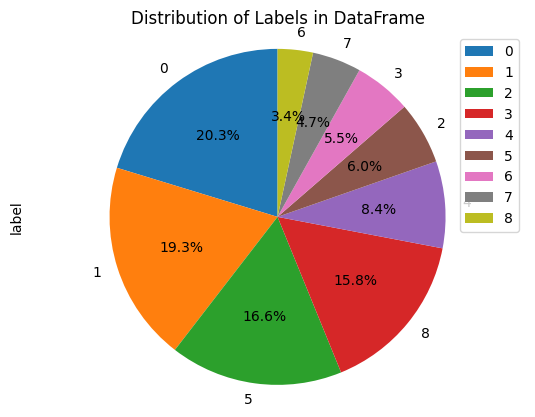

In [10]:
# Plot pie chart of train_df
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['label'].unique())
plt.show()

In [11]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               pigmented benign keratosis     478       
1               melanoma                       454       
2               vascular lesion                142       
3               actinic keratosis              130       
4               squamous cell carcinoma        197       
5               basal cell carcinoma           392       
6               seborrheic keratosis           80        
7               dermatofibroma                 111       
8               nevus                          373       
------------------------------------------------------------
Total                                         2357      


# Step 4 : Loading and resizing of images

In [12]:
max_images_per_class = 4000 # 2500

# Group by label column and take first max_images_per_class rows for each group
df = df.groupby("label").apply(lambda x: x.head(max_images_per_class)).reset_index(drop=True)

*Code for Importing GPU*

In [13]:
import tensorflow as tf

# Allow gpu usage
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
try:
    tf.config.experimental.set_memory_growth = True
except Exception as ex:
    print(e)

[]


*Calcluate number of core*

In [14]:
import multiprocessing

# Get the number of CPU cores available
max_workers = multiprocessing.cpu_count()
max_workers

96

In [15]:
import concurrent.futures

# Define a function to resize image arrays
def resize_image_array(image_path):
    return np.asarray(Image.open(image_path).resize((224,224)))

# Use concurrent.futures to parallelize the resizing process
with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
    # Use executor.map to apply the function to each image path in the DataFrame
    image_arrays = list(executor.map(resize_image_array, df['image_path'].tolist()))

# Add the resized image arrays to the DataFrame
df['image'] = image_arrays
del image_arrays

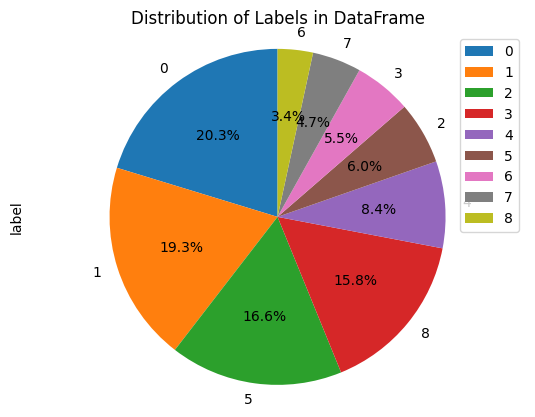

In [16]:
# Plot pie chart of train_df
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Labels in DataFrame')
plt.legend(df['label'].unique())
plt.show()

In [17]:
df.head()

image_path label  \
0  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0   
1  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0   
2  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0   
3  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0   
4  /kaggle/input/skin-cancer9-classesisic/Skin ca...     0   

                                               image  
0  [[[154, 133, 152], [153, 132, 151], [154, 133,...  
1  [[[172, 139, 156], [169, 137, 152], [170, 140,...  
2  [[[245, 171, 161], [247, 170, 161], [244, 169,...  
3  [[[174, 141, 158], [176, 146, 164], [174, 145,...  
4  [[[145, 126, 134], [146, 127, 135], [147, 128,...

> # Displaying the total number of images of each Class before Data Augmentation

In [18]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               pigmented benign keratosis     478       
1               melanoma                       454       
2               vascular lesion                142       
3               actinic keratosis              130       
4               squamous cell carcinoma        197       
5               basal cell carcinoma           392       
6               seborrheic keratosis           80        
7               dermatofibroma                 111       
8               nevus                          373       
------------------------------------------------------------
Total                                         2357      


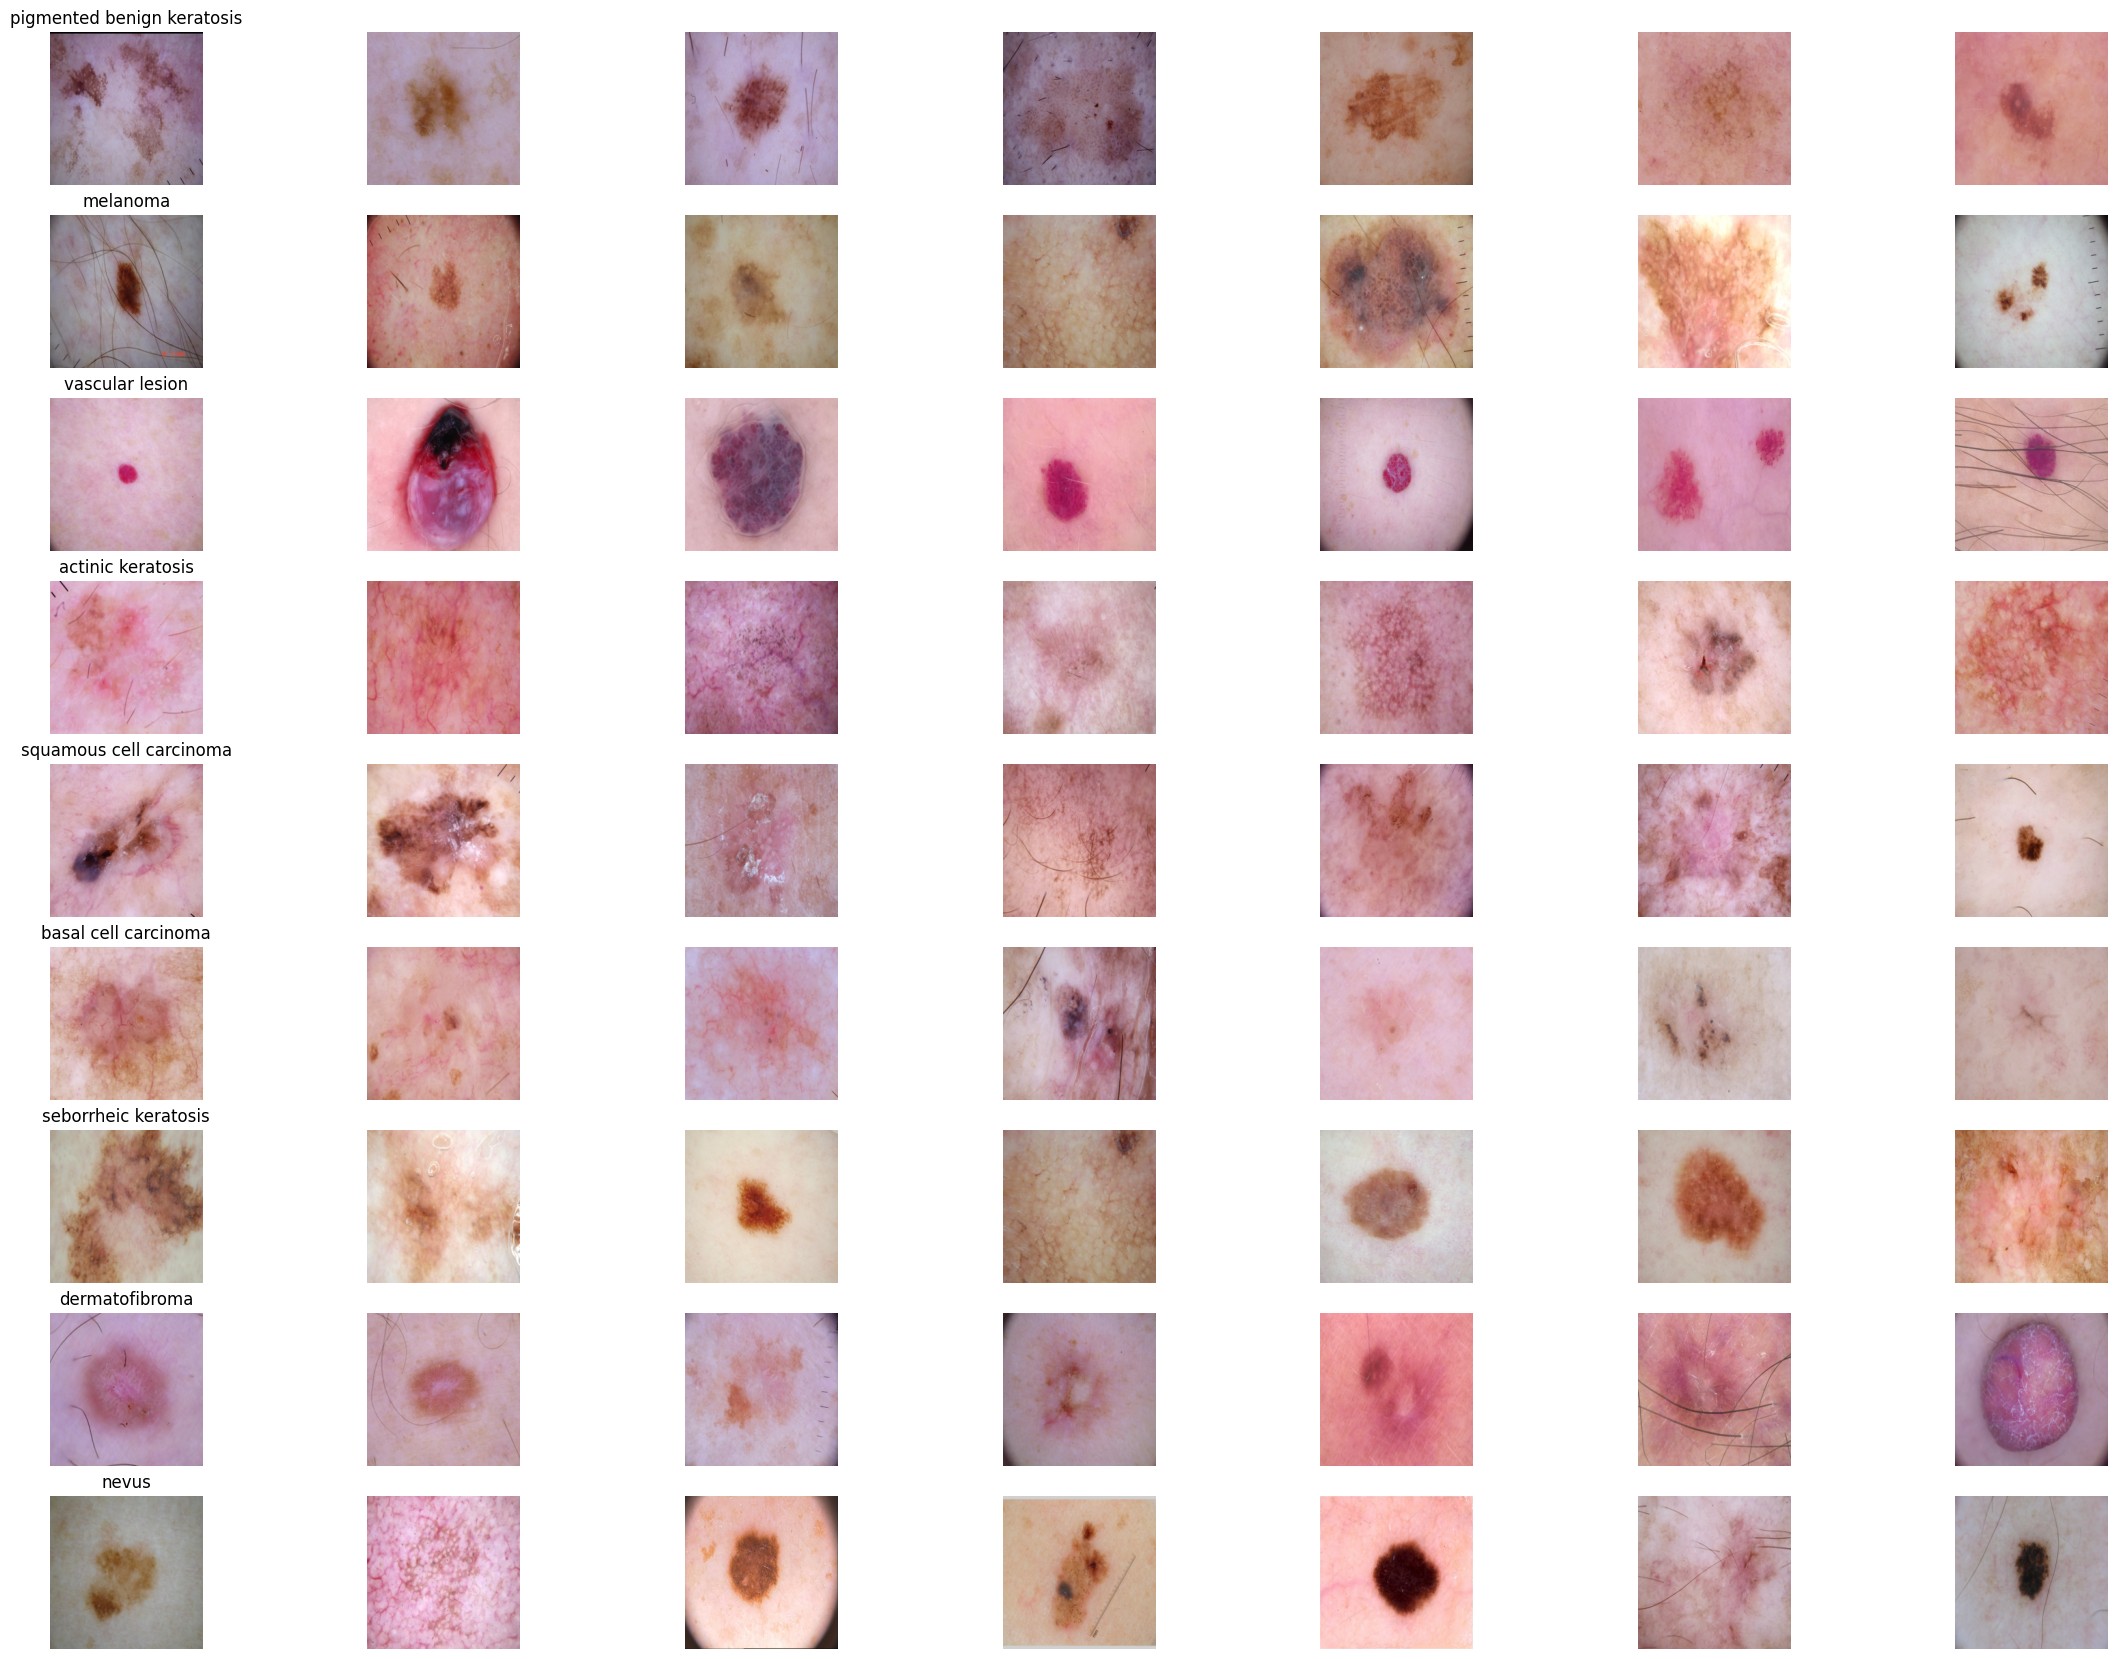

In [19]:
n_samples = 7
fig, m_axs = plt.subplots(num_classes, n_samples, figsize=(4*n_samples, 3*7))
for n_axs, (class_idx, class_rows) in zip(m_axs, df.sort_values(['label']).groupby('label')):
    class_name = label_map[class_idx] # get the class name using label_map
    n_axs[0].set_title(class_name)
    for c_ax, (_, c_row) in zip(n_axs, class_rows.sample(n_samples, random_state=5).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [20]:
df['image'].map(lambda x: x.shape).value_counts()

(224, 224, 3)    2357
Name: image, dtype: int64

# Step 5 : Data Augmentation

In [21]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with the desired transformations
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [22]:
# Create an empty dataframe to store the augmented images
augmented_df = pd.DataFrame(columns=['image_path', 'label', 'image'])
with strategy.scope():
    # Loop through each class label and generate additional images if needed
    for class_label in df['label'].unique():
        # Get the image arrays for the current class
        image_arrays = df.loc[df['label'] == class_label, 'image'].values

        # Calculate the number of additional images needed for the current class
        num_images_needed = max_images_per_class - len(image_arrays)

        # Generate augmented images for the current class
        if num_images_needed > 0:
            # Select a random subset of the original images
            selected_images = np.random.choice(image_arrays, size=num_images_needed)

            # Apply transformations to the selected images and add them to the augmented dataframe
            for image_array in selected_images:
                # Reshape the image array to a 4D tensor with a batch size of 1
                image_tensor = np.expand_dims(image_array, axis=0)

                # Generate the augmented images
                augmented_images = datagen.flow(image_tensor, batch_size=1)

                # Extract the augmented image arrays and add them to the augmented dataframe
                for i in range(augmented_images.n):
                    augmented_image_array = augmented_images.next()[0].astype('uint8')
                    augmented_df = augmented_df.append({'image_path': None, 'label': class_label, 'image': augmented_image_array}, ignore_index=True)

        # Add the original images for the current class to the augmented dataframe
        original_images_df = df.loc[df['label'] == class_label, ['image_path', 'label', 'image']]
        augmented_df = augmented_df.append(original_images_df, ignore_index=True)

    # Group the augmented dataframe by the 'label' column and filter out extra images
    df = augmented_df.groupby('label').head(max_images_per_class)

    del augmented_df

    # Use the augmented dataframe for further processing
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

> # Displaying the total number of images of each Class after Data Augmentation

In [23]:
# Count the number of images in each class
class_counts = df['label'].value_counts().sort_index()

# Print the number of images in each class
print("Dataset Summary")
print("-" * 60)
print(f"{'Class Label':<15} {'Class Name':<30} {'Count':<10}")
print("-" * 60)
for class_label, class_name in label_map.items():
    count = class_counts[class_label]
    print(f"{class_label:<15} {class_name:<30} {count:<10}")
print("-" * 60)
print(f"{'Total':<45} {sum(class_counts):<10}")

Dataset Summary
------------------------------------------------------------
Class Label     Class Name                     Count     
------------------------------------------------------------
0               pigmented benign keratosis     4000      
1               melanoma                       4000      
2               vascular lesion                4000      
3               actinic keratosis              4000      
4               squamous cell carcinoma        4000      
5               basal cell carcinoma           4000      
6               seborrheic keratosis           4000      
7               dermatofibroma                 4000      
8               nevus                          4000      
------------------------------------------------------------
Total                                         36000     


# Step 6 : Train and Test split

In [24]:
features = df.drop(columns=['label','image_path'],axis=1)
target = df['label']

In [25]:
features.head()

image
0  [[[167, 132, 149], [167, 132, 149], [167, 133,...
1  [[[162, 128, 118], [162, 128, 118], [162, 128,...
2  [[[157, 117, 153], [158, 117, 157], [157, 113,...
3  [[[182, 146, 130], [183, 148, 127], [182, 146,...
4  [[[204, 140, 151], [204, 140, 151], [204, 140,...

In [26]:
target.head()

0    4
1    5
2    5
3    6
4    2
Name: label, dtype: object

In [27]:
print(target.shape,features.shape)

(36000,) (36000, 1)


# Step 8 : Splitting the Data into Train and Test

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.15,shuffle=True)

# Step 8 : Normalization of Data

In [29]:
x_train = np.asarray(x_train['image'].tolist())
x_test = np.asarray(x_test['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

# Step 9 : Label Encoding

In [30]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train,num_classes = num_classes)
y_test = to_categorical(y_test,num_classes = num_classes)

# Step 10 : Splitting the data into training and Validation Split

In [31]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2,shuffle=True)

In [32]:
# Reshape image in 3 dimensions (height = 75px, width = 100px , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(224, 224, 3))
x_test = x_test.reshape(x_test.shape[0], *(224, 224, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(224, 224, 3))

In [33]:
y_train = y_train.astype(int)
y_validate = y_validate.astype(int)

> # Displaying the total number of images of each Class

In [34]:
# Calculate the number of images in each class for train, validation, and test datasets
train_counts = np.sum(y_train, axis=0)
val_counts = np.sum(y_validate, axis=0)
test_counts = np.sum(y_test, axis=0)

# Print the number of images in each class for train, validation, and test datasets
print("Dataset Summary")
print("-" * 90)
print(f"{'Class Label':<15} {'Class Name':<30} {'Train':<10} {'Validation':<12} {'Test':<10} {'Total':<10}")
print("-" * 90)
for class_label, class_name in label_map.items():
    train_num = int(train_counts[class_label])
    val_num = int(val_counts[class_label])
    test_num = int(test_counts[class_label])
    total_num = train_num + val_num + test_num
    print(f"{class_label:<15} {class_name:<30} {train_num:<10} {val_num:<12} {test_num:<10} {total_num:<10}")
print("-" * 90)
print(f"{'Total':<46} {len(y_train):<10} {len(y_validate):<12} {len(y_test):<10} {len(y_train) + len(y_validate) + len(y_test):<10}")

Dataset Summary
------------------------------------------------------------------------------------------
Class Label     Class Name                     Train      Validation   Test       Total     
------------------------------------------------------------------------------------------
0               pigmented benign keratosis     2718       668          614        4000      
1               melanoma                       2728       676          596        4000      
2               vascular lesion                2681       695          624        4000      
3               actinic keratosis              2714       702          584        4000      
4               squamous cell carcinoma        2729       670          601        4000      
5               basal cell carcinoma           2738       694          568        4000      
6               seborrheic keratosis           2731       652          617        4000      
7               dermatofibroma                 2693       

In [35]:
df.groupby('label').size()

label
0    4000
1    4000
2    4000
3    4000
4    4000
5    4000
6    4000
7    4000
8    4000
dtype: int64

In [36]:
input_shape = df['image'][0].shape

# Step 10 : Model Architecture

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings("ignore")
with strategy.scope():
    # Load the MobileNetV2 model with pre-trained weights from ImageNet
    base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    # Add new layers for skin cancer classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x) # ex
    predictions = Dense(9, activation='softmax')(x)

    # Create the final model
    model_1 = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
    from keras.metrics import categorical_accuracy, top_k_categorical_accuracy
    from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
    def top_2_acc(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=2)

    def top_3_acc(y_true, y_pred):
        return top_k_categorical_accuracy(y_true, y_pred, k=3)
    # compilation of the model
    model_1.compile(Adam(1e-4), loss="categorical_crossentropy", metrics=["accuracy", top_2_acc, top_3_acc])
     
    # Tune Hyperparameter
    filepath = "model.h5"
    checkpoint_param = {
        "filepath": filepath,
        "monitor": "val_accuracy",
        "verbose": 1,
        "save_best_only": True,
        "mode": "max"
        }
    checkpoint = ModelCheckpoint(**checkpoint_param)
    lr_decay_params = {
        "monitor": "val_loss",
        "factor": 0.5,
        "patience": 2,
        "min_lr": 1e-5
    }
    lr_decay = ReduceLROnPlateau(**lr_decay_params)
    early_stopping = EarlyStopping(monitor="val_loss", patience=6, verbose=1)
    
    # fit the mdoel 
    # Initialize variables to keep track of the highest validation accuracy seen so far
    highest_val_acc = 0
    highest_val_acc_top_2 = 0
    highest_val_acc_top_3 = 0

    # Fit the model and compute validation metrics at the end of each epoch
    epochs = 30
    for epoch in tqdm(range(epochs)):
        history = model_1.fit(x_train, y_train, validation_data=(x_validate, y_validate), batch_size=32, epochs=1, callbacks=[checkpoint, lr_decay, early_stopping])

        # Get the validation metrics for the current epoch
        val_loss, val_acc, val_acc_top_2, val_acc_top_3 = model_1.evaluate(x_validate, y_validate, verbose=0)

        # Update the highest validation accuracy seen so far for each metric
        if val_acc > highest_val_acc:
            highest_val_acc = val_acc
        if val_acc_top_2 > highest_val_acc_top_2:
            highest_val_acc_top_2 = val_acc_top_2
        if val_acc_top_3 > highest_val_acc_top_3:
            highest_val_acc_top_3 = val_acc_top_3

        # Print the current epoch and the highest validation accuracy seen so far for each metric
        print("Epoch {} - Highest Validation Accuracy: {:.2%} - Highest Validation Top 2 Accuracy: {:.2%} - Highest Validation Top 3 Accuracy: {:.2%}".format(epoch+1, highest_val_acc, highest_val_acc_top_2, highest_val_acc_top_3))

    # print the final result of the Validations Accuracy
    print(" Highest Validation Accuracy: {:.2%} - Highest Validation Top 2 Accuracy: {:.2%} - Highest Validation Top 3 Accuracy: {:.2%}".format(highest_val_acc, highest_val_acc_top_2, highest_val_acc_top_3))

   8192/9406464 [..............................] - ETA: 0s

4202496/9406464 [============>.................] - ETA: 0s

9406464/9406464 [==============================] - 0s 0us/step


  0%|          | 0/30 [00:00<?, ?it/s]

2023-05-05 16:58:56.350611: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2023-05-05 16:58:56.941388: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


  1/765 [..............................] - ETA: 10:20:45 - loss: 5.5447 - accuracy: 0.1875 - top_2_acc: 0.2812 - top_3_acc: 0.3438

  3/765 [..............................] - ETA: 24s - loss: 5.7272 - accuracy: 0.1146 - top_2_acc: 0.2604 - top_3_acc: 0.3542     

  5/765 [..............................] - ETA: 23s - loss: 5.6646 - accuracy: 0.0938 - top_2_acc: 0.2438 - top_3_acc: 0.3438

  7/765 [..............................] - ETA: 23s - loss: 5.5955 - accuracy: 0.1116 - top_2_acc: 0.2589 - top_3_acc: 0.3571

  9/765 [..............................] - ETA: 23s - loss: 5.5639 - accuracy: 0.1042 - top_2_acc: 0.2535 - top_3_acc: 0.3611

 11/765 [..............................] - ETA: 23s - loss: 5.5164 - accuracy: 0.1193 - top_2_acc: 0.2557 - top_3_acc: 0.3693

 13/765 [..............................] - ETA: 23s - loss: 5.4641 - accuracy: 0.1274 - top_2_acc: 0.2644 - top_3_acc: 0.3702

 15/765 [..............................] - ETA: 23s - loss: 5.4963 - accuracy: 0.1188 - top_2_acc: 0.2500 - top_3_acc: 0.3583

 17/765 [..............................] - ETA: 23s - loss: 5.4589 - accuracy: 0.1268 - top_2_acc: 0.2574 - top_3_acc: 0.3640

 19/765 [..............................] - ETA: 23s - loss: 5.4525 - accuracy: 0.1332 - top_2_acc: 0.2533 - top_3_acc: 0.3651

 21/765 [..............................] - ETA: 23s - loss: 5.4248 - accuracy: 0.1384 - top_2_acc: 0.2515 - top_3_acc: 0.3795

 23/765 [..............................] - ETA: 23s - loss: 5.4158 - accuracy: 0.1481 - top_2_acc: 0.2595 - top_3_acc: 0.3804

 25/765 [..............................] - ETA: 23s - loss: 5.3929 - accuracy: 0.1512 - top_2_acc: 0.2650 - top_3_acc: 0.3875

 27/765 [>.............................] - ETA: 23s - loss: 5.3986 - accuracy: 0.1493 - top_2_acc: 0.2662 - top_3_acc: 0.3889

 29/765 [>.............................] - ETA: 23s - loss: 5.3618 - accuracy: 0.1552 - top_2_acc: 0.2748 - top_3_acc: 0.3976

 31/765 [>.............................] - ETA: 23s - loss: 5.3561 - accuracy: 0.1583 - top_2_acc: 0.2732 - top_3_acc: 0.3972

 33/765 [>.............................] - ETA: 23s - loss: 5.3493 - accuracy: 0.1591 - top_2_acc: 0.2775 - top_3_acc: 0.4006

 35/765 [>.............................] - ETA: 22s - loss: 5.3317 - accuracy: 0.1607 - top_2_acc: 0.2786 - top_3_acc: 0.4018

 37/765 [>.............................] - ETA: 22s - loss: 5.3117 - accuracy: 0.1630 - top_2_acc: 0.2804 - top_3_acc: 0.4062

 39/765 [>.............................] - ETA: 22s - loss: 5.3035 - accuracy: 0.1643 - top_2_acc: 0.2837 - top_3_acc: 0.4119

 41/765 [>.............................] - ETA: 22s - loss: 5.2824 - accuracy: 0.1707 - top_2_acc: 0.2904 - top_3_acc: 0.4184

 43/765 [>.............................] - ETA: 22s - loss: 5.2736 - accuracy: 0.1708 - top_2_acc: 0.2900 - top_3_acc: 0.4164

 45/765 [>.............................] - ETA: 22s - loss: 5.2557 - accuracy: 0.1750 - top_2_acc: 0.2910 - top_3_acc: 0.4160

 47/765 [>.............................] - ETA: 22s - loss: 5.2369 - accuracy: 0.1769 - top_2_acc: 0.2959 - top_3_acc: 0.4202

 49/765 [>.............................] - ETA: 22s - loss: 5.2201 - accuracy: 0.1779 - top_2_acc: 0.2985 - top_3_acc: 0.4254

 51/765 [=>............................] - ETA: 22s - loss: 5.2197 - accuracy: 0.1789 - top_2_acc: 0.2996 - top_3_acc: 0.4271

 53/765 [=>............................] - ETA: 22s - loss: 5.2031 - accuracy: 0.1810 - top_2_acc: 0.3031 - top_3_acc: 0.4310

 55/765 [=>............................] - ETA: 22s - loss: 5.1888 - accuracy: 0.1835 - top_2_acc: 0.3085 - top_3_acc: 0.4369

 57/765 [=>............................] - ETA: 22s - loss: 5.1676 - accuracy: 0.1875 - top_2_acc: 0.3103 - top_3_acc: 0.4408

 59/765 [=>............................] - ETA: 22s - loss: 5.1722 - accuracy: 0.1886 - top_2_acc: 0.3109 - top_3_acc: 0.4412

 61/765 [=>............................] - ETA: 22s - loss: 5.1696 - accuracy: 0.1890 - top_2_acc: 0.3110 - top_3_acc: 0.4421

 63/765 [=>............................] - ETA: 22s - loss: 5.1642 - accuracy: 0.1890 - top_2_acc: 0.3125 - top_3_acc: 0.4439

 65/765 [=>............................] - ETA: 22s - loss: 5.1445 - accuracy: 0.1918 - top_2_acc: 0.3178 - top_3_acc: 0.4505

 67/765 [=>............................] - ETA: 22s - loss: 5.1241 - accuracy: 0.1945 - top_2_acc: 0.3218 - top_3_acc: 0.4538

 69/765 [=>............................] - ETA: 22s - loss: 5.0997 - accuracy: 0.1975 - top_2_acc: 0.3243 - top_3_acc: 0.4583

 71/765 [=>............................] - ETA: 22s - loss: 5.0917 - accuracy: 0.1985 - top_2_acc: 0.3261 - top_3_acc: 0.4586

 73/765 [=>............................] - ETA: 21s - loss: 5.0755 - accuracy: 0.2003 - top_2_acc: 0.3279 - top_3_acc: 0.4632

 75/765 [=>............................] - ETA: 21s - loss: 5.0656 - accuracy: 0.2013 - top_2_acc: 0.3308 - top_3_acc: 0.4650

 77/765 [==>...........................] - ETA: 21s - loss: 5.0570 - accuracy: 0.2021 - top_2_acc: 0.3344 - top_3_acc: 0.4679

 79/765 [==>...........................] - ETA: 21s - loss: 5.0458 - accuracy: 0.2029 - top_2_acc: 0.3378 - top_3_acc: 0.4699

 81/765 [==>...........................] - ETA: 21s - loss: 5.0324 - accuracy: 0.2037 - top_2_acc: 0.3422 - top_3_acc: 0.4757

 83/765 [==>...........................] - ETA: 21s - loss: 5.0341 - accuracy: 0.2048 - top_2_acc: 0.3407 - top_3_acc: 0.4736

 85/765 [==>...........................] - ETA: 21s - loss: 5.0237 - accuracy: 0.2070 - top_2_acc: 0.3430 - top_3_acc: 0.4750

 87/765 [==>...........................] - ETA: 21s - loss: 5.0169 - accuracy: 0.2083 - top_2_acc: 0.3427 - top_3_acc: 0.4741

 89/765 [==>...........................] - ETA: 21s - loss: 4.9994 - accuracy: 0.2124 - top_2_acc: 0.3480 - top_3_acc: 0.4782

 91/765 [==>...........................] - ETA: 21s - loss: 4.9935 - accuracy: 0.2136 - top_2_acc: 0.3496 - top_3_acc: 0.4811

 93/765 [==>...........................] - ETA: 21s - loss: 4.9868 - accuracy: 0.2151 - top_2_acc: 0.3525 - top_3_acc: 0.4829

 95/765 [==>...........................] - ETA: 21s - loss: 4.9741 - accuracy: 0.2174 - top_2_acc: 0.3559 - top_3_acc: 0.4862

 97/765 [==>...........................] - ETA: 21s - loss: 4.9618 - accuracy: 0.2200 - top_2_acc: 0.3582 - top_3_acc: 0.4884

 99/765 [==>...........................] - ETA: 21s - loss: 4.9560 - accuracy: 0.2200 - top_2_acc: 0.3583 - top_3_acc: 0.4899

101/765 [==>...........................] - ETA: 20s - loss: 4.9490 - accuracy: 0.2212 - top_2_acc: 0.3605 - top_3_acc: 0.4913

103/765 [===>..........................] - ETA: 20s - loss: 4.9521 - accuracy: 0.2197 - top_2_acc: 0.3601 - top_3_acc: 0.4915

105/765 [===>..........................] - ETA: 20s - loss: 4.9404 - accuracy: 0.2214 - top_2_acc: 0.3622 - top_3_acc: 0.4946

107/765 [===>..........................] - ETA: 20s - loss: 4.9314 - accuracy: 0.2231 - top_2_acc: 0.3645 - top_3_acc: 0.4971

109/765 [===>..........................] - ETA: 20s - loss: 4.9274 - accuracy: 0.2253 - top_2_acc: 0.3664 - top_3_acc: 0.4986

111/765 [===>..........................] - ETA: 20s - loss: 4.9226 - accuracy: 0.2272 - top_2_acc: 0.3682 - top_3_acc: 0.4997

113/765 [===>..........................] - ETA: 20s - loss: 4.9144 - accuracy: 0.2284 - top_2_acc: 0.3700 - top_3_acc: 0.5030

115/765 [===>..........................] - ETA: 20s - loss: 4.9114 - accuracy: 0.2285 - top_2_acc: 0.3712 - top_3_acc: 0.5035

117/765 [===>..........................] - ETA: 20s - loss: 4.9073 - accuracy: 0.2294 - top_2_acc: 0.3726 - top_3_acc: 0.5059

119/765 [===>..........................] - ETA: 20s - loss: 4.9068 - accuracy: 0.2300 - top_2_acc: 0.3721 - top_3_acc: 0.5058

121/765 [===>..........................] - ETA: 20s - loss: 4.8998 - accuracy: 0.2332 - top_2_acc: 0.3755 - top_3_acc: 0.5093

123/765 [===>..........................] - ETA: 20s - loss: 4.8993 - accuracy: 0.2330 - top_2_acc: 0.3750 - top_3_acc: 0.5086

125/765 [===>..........................] - ETA: 20s - loss: 4.8941 - accuracy: 0.2330 - top_2_acc: 0.3773 - top_3_acc: 0.5110

127/765 [===>..........................] - ETA: 20s - loss: 4.8905 - accuracy: 0.2340 - top_2_acc: 0.3780 - top_3_acc: 0.5118

129/765 [====>.........................] - ETA: 20s - loss: 4.8859 - accuracy: 0.2347 - top_2_acc: 0.3784 - top_3_acc: 0.5126

131/765 [====>.........................] - ETA: 19s - loss: 4.8850 - accuracy: 0.2347 - top_2_acc: 0.3783 - top_3_acc: 0.5126

133/765 [====>.........................] - ETA: 19s - loss: 4.8813 - accuracy: 0.2359 - top_2_acc: 0.3795 - top_3_acc: 0.5143

135/765 [====>.........................] - ETA: 19s - loss: 4.8727 - accuracy: 0.2377 - top_2_acc: 0.3815 - top_3_acc: 0.5174

137/765 [====>.........................] - ETA: 19s - loss: 4.8665 - accuracy: 0.2388 - top_2_acc: 0.3823 - top_3_acc: 0.5180

139/765 [====>.........................] - ETA: 19s - loss: 4.8569 - accuracy: 0.2408 - top_2_acc: 0.3849 - top_3_acc: 0.5198

141/765 [====>.........................] - ETA: 19s - loss: 4.8493 - accuracy: 0.2429 - top_2_acc: 0.3870 - top_3_acc: 0.5211

143/765 [====>.........................] - ETA: 19s - loss: 4.8475 - accuracy: 0.2432 - top_2_acc: 0.3879 - top_3_acc: 0.5212

145/765 [====>.........................] - ETA: 19s - loss: 4.8427 - accuracy: 0.2429 - top_2_acc: 0.3886 - top_3_acc: 0.5222

147/765 [====>.........................] - ETA: 19s - loss: 4.8407 - accuracy: 0.2428 - top_2_acc: 0.3892 - top_3_acc: 0.5223

149/765 [====>.........................] - ETA: 19s - loss: 4.8330 - accuracy: 0.2448 - top_2_acc: 0.3911 - top_3_acc: 0.5237

151/765 [====>.........................] - ETA: 19s - loss: 4.8278 - accuracy: 0.2465 - top_2_acc: 0.3926 - top_3_acc: 0.5250

153/765 [=====>........................] - ETA: 19s - loss: 4.8260 - accuracy: 0.2469 - top_2_acc: 0.3926 - top_3_acc: 0.5245

155/765 [=====>........................] - ETA: 19s - loss: 4.8241 - accuracy: 0.2476 - top_2_acc: 0.3937 - top_3_acc: 0.5256

157/765 [=====>........................] - ETA: 19s - loss: 4.8238 - accuracy: 0.2488 - top_2_acc: 0.3945 - top_3_acc: 0.5261

159/765 [=====>........................] - ETA: 19s - loss: 4.8169 - accuracy: 0.2500 - top_2_acc: 0.3968 - top_3_acc: 0.5275

161/765 [=====>........................] - ETA: 19s - loss: 4.8139 - accuracy: 0.2512 - top_2_acc: 0.3983 - top_3_acc: 0.5293

163/765 [=====>........................] - ETA: 19s - loss: 4.8125 - accuracy: 0.2512 - top_2_acc: 0.3992 - top_3_acc: 0.5295

165/765 [=====>........................] - ETA: 19s - loss: 4.8070 - accuracy: 0.2515 - top_2_acc: 0.4002 - top_3_acc: 0.5311

167/765 [=====>........................] - ETA: 18s - loss: 4.8031 - accuracy: 0.2515 - top_2_acc: 0.4019 - top_3_acc: 0.5320

169/765 [=====>........................] - ETA: 18s - loss: 4.7980 - accuracy: 0.2530 - top_2_acc: 0.4033 - top_3_acc: 0.5325

171/765 [=====>........................] - ETA: 18s - loss: 4.7961 - accuracy: 0.2540 - top_2_acc: 0.4041 - top_3_acc: 0.5327

173/765 [=====>........................] - ETA: 18s - loss: 4.7888 - accuracy: 0.2547 - top_2_acc: 0.4062 - top_3_acc: 0.5349

175/765 [=====>........................] - ETA: 18s - loss: 4.7819 - accuracy: 0.2552 - top_2_acc: 0.4077 - top_3_acc: 0.5364

177/765 [=====>........................] - ETA: 18s - loss: 4.7787 - accuracy: 0.2562 - top_2_acc: 0.4078 - top_3_acc: 0.5373

179/765 [======>.......................] - ETA: 18s - loss: 4.7695 - accuracy: 0.2580 - top_2_acc: 0.4103 - top_3_acc: 0.5398

181/765 [======>.......................] - ETA: 18s - loss: 4.7650 - accuracy: 0.2597 - top_2_acc: 0.4113 - top_3_acc: 0.5407

183/765 [======>.......................] - ETA: 18s - loss: 4.7627 - accuracy: 0.2606 - top_2_acc: 0.4121 - top_3_acc: 0.5410

185/765 [======>.......................] - ETA: 18s - loss: 4.7588 - accuracy: 0.2615 - top_2_acc: 0.4132 - top_3_acc: 0.5419

187/765 [======>.......................] - ETA: 18s - loss: 4.7521 - accuracy: 0.2620 - top_2_acc: 0.4144 - top_3_acc: 0.5440

189/765 [======>.......................] - ETA: 18s - loss: 4.7463 - accuracy: 0.2627 - top_2_acc: 0.4153 - top_3_acc: 0.5445

191/765 [======>.......................] - ETA: 18s - loss: 4.7426 - accuracy: 0.2634 - top_2_acc: 0.4156 - top_3_acc: 0.5450

193/765 [======>.......................] - ETA: 18s - loss: 4.7355 - accuracy: 0.2649 - top_2_acc: 0.4176 - top_3_acc: 0.5468

195/765 [======>.......................] - ETA: 18s - loss: 4.7343 - accuracy: 0.2651 - top_2_acc: 0.4184 - top_3_acc: 0.5471

197/765 [======>.......................] - ETA: 17s - loss: 4.7262 - accuracy: 0.2676 - top_2_acc: 0.4204 - top_3_acc: 0.5485

199/765 [======>.......................] - ETA: 17s - loss: 4.7223 - accuracy: 0.2684 - top_2_acc: 0.4216 - top_3_acc: 0.5493

201/765 [======>.......................] - ETA: 17s - loss: 4.7232 - accuracy: 0.2682 - top_2_acc: 0.4210 - top_3_acc: 0.5493

203/765 [======>.......................] - ETA: 17s - loss: 4.7201 - accuracy: 0.2686 - top_2_acc: 0.4220 - top_3_acc: 0.5503

205/765 [=======>......................] - ETA: 17s - loss: 4.7174 - accuracy: 0.2686 - top_2_acc: 0.4224 - top_3_acc: 0.5512

207/765 [=======>......................] - ETA: 17s - loss: 4.7143 - accuracy: 0.2690 - top_2_acc: 0.4232 - top_3_acc: 0.5525

209/765 [=======>......................] - ETA: 17s - loss: 4.7118 - accuracy: 0.2697 - top_2_acc: 0.4236 - top_3_acc: 0.5534

211/765 [=======>......................] - ETA: 17s - loss: 4.7084 - accuracy: 0.2700 - top_2_acc: 0.4239 - top_3_acc: 0.5533

213/765 [=======>......................] - ETA: 17s - loss: 4.7051 - accuracy: 0.2701 - top_2_acc: 0.4246 - top_3_acc: 0.5543

215/765 [=======>......................] - ETA: 17s - loss: 4.7006 - accuracy: 0.2711 - top_2_acc: 0.4259 - top_3_acc: 0.5555

217/765 [=======>......................] - ETA: 17s - loss: 4.6938 - accuracy: 0.2730 - top_2_acc: 0.4277 - top_3_acc: 0.5573

219/765 [=======>......................] - ETA: 17s - loss: 4.6920 - accuracy: 0.2734 - top_2_acc: 0.4285 - top_3_acc: 0.5579

221/765 [=======>......................] - ETA: 17s - loss: 4.6898 - accuracy: 0.2735 - top_2_acc: 0.4289 - top_3_acc: 0.5588

223/765 [=======>......................] - ETA: 17s - loss: 4.6876 - accuracy: 0.2733 - top_2_acc: 0.4291 - top_3_acc: 0.5597

225/765 [=======>......................] - ETA: 16s - loss: 4.6856 - accuracy: 0.2740 - top_2_acc: 0.4299 - top_3_acc: 0.5606

227/765 [=======>......................] - ETA: 16s - loss: 4.6811 - accuracy: 0.2748 - top_2_acc: 0.4316 - top_3_acc: 0.5617

229/765 [=======>......................] - ETA: 16s - loss: 4.6783 - accuracy: 0.2754 - top_2_acc: 0.4323 - top_3_acc: 0.5622

231/765 [========>.....................] - ETA: 16s - loss: 4.6751 - accuracy: 0.2758 - top_2_acc: 0.4330 - top_3_acc: 0.5626

233/765 [========>.....................] - ETA: 16s - loss: 4.6763 - accuracy: 0.2759 - top_2_acc: 0.4327 - top_3_acc: 0.5618

235/765 [========>.....................] - ETA: 16s - loss: 4.6729 - accuracy: 0.2765 - top_2_acc: 0.4332 - top_3_acc: 0.5625

237/765 [========>.....................] - ETA: 16s - loss: 4.6654 - accuracy: 0.2777 - top_2_acc: 0.4350 - top_3_acc: 0.5638

239/765 [========>.....................] - ETA: 16s - loss: 4.6603 - accuracy: 0.2788 - top_2_acc: 0.4359 - top_3_acc: 0.5647

241/765 [========>.....................] - ETA: 16s - loss: 4.6569 - accuracy: 0.2798 - top_2_acc: 0.4369 - top_3_acc: 0.5651

243/765 [========>.....................] - ETA: 16s - loss: 4.6528 - accuracy: 0.2805 - top_2_acc: 0.4379 - top_3_acc: 0.5656

245/765 [========>.....................] - ETA: 16s - loss: 4.6495 - accuracy: 0.2806 - top_2_acc: 0.4384 - top_3_acc: 0.5661

247/765 [========>.....................] - ETA: 16s - loss: 4.6459 - accuracy: 0.2815 - top_2_acc: 0.4390 - top_3_acc: 0.5673

249/765 [========>.....................] - ETA: 16s - loss: 4.6404 - accuracy: 0.2823 - top_2_acc: 0.4401 - top_3_acc: 0.5688

251/765 [========>.....................] - ETA: 16s - loss: 4.6361 - accuracy: 0.2831 - top_2_acc: 0.4409 - top_3_acc: 0.5692

253/765 [========>.....................] - ETA: 16s - loss: 4.6287 - accuracy: 0.2841 - top_2_acc: 0.4423 - top_3_acc: 0.5709

255/765 [=========>....................] - ETA: 16s - loss: 4.6240 - accuracy: 0.2846 - top_2_acc: 0.4434 - top_3_acc: 0.5717

257/765 [=========>....................] - ETA: 15s - loss: 4.6215 - accuracy: 0.2847 - top_2_acc: 0.4436 - top_3_acc: 0.5717

259/765 [=========>....................] - ETA: 15s - loss: 4.6162 - accuracy: 0.2855 - top_2_acc: 0.4449 - top_3_acc: 0.5732

261/765 [=========>....................] - ETA: 15s - loss: 4.6144 - accuracy: 0.2857 - top_2_acc: 0.4454 - top_3_acc: 0.5736

263/765 [=========>....................] - ETA: 15s - loss: 4.6115 - accuracy: 0.2860 - top_2_acc: 0.4462 - top_3_acc: 0.5743

265/765 [=========>....................] - ETA: 15s - loss: 4.6077 - accuracy: 0.2869 - top_2_acc: 0.4472 - top_3_acc: 0.5752

267/765 [=========>....................] - ETA: 15s - loss: 4.6035 - accuracy: 0.2877 - top_2_acc: 0.4483 - top_3_acc: 0.5758

269/765 [=========>....................] - ETA: 15s - loss: 4.6004 - accuracy: 0.2887 - top_2_acc: 0.4492 - top_3_acc: 0.5766

271/765 [=========>....................] - ETA: 15s - loss: 4.5986 - accuracy: 0.2894 - top_2_acc: 0.4496 - top_3_acc: 0.5770

273/765 [=========>....................] - ETA: 15s - loss: 4.5944 - accuracy: 0.2896 - top_2_acc: 0.4503 - top_3_acc: 0.5777

275/765 [=========>....................] - ETA: 15s - loss: 4.5906 - accuracy: 0.2901 - top_2_acc: 0.4508 - top_3_acc: 0.5784

277/765 [=========>....................] - ETA: 15s - loss: 4.5871 - accuracy: 0.2910 - top_2_acc: 0.4512 - top_3_acc: 0.5786

279/765 [=========>....................] - ETA: 15s - loss: 4.5841 - accuracy: 0.2917 - top_2_acc: 0.4517 - top_3_acc: 0.5792

281/765 [==========>...................] - ETA: 15s - loss: 4.5802 - accuracy: 0.2920 - top_2_acc: 0.4528 - top_3_acc: 0.5803

283/765 [==========>...................] - ETA: 15s - loss: 4.5769 - accuracy: 0.2928 - top_2_acc: 0.4535 - top_3_acc: 0.5807

285/765 [==========>...................] - ETA: 15s - loss: 4.5719 - accuracy: 0.2936 - top_2_acc: 0.4547 - top_3_acc: 0.5820

287/765 [==========>...................] - ETA: 15s - loss: 4.5682 - accuracy: 0.2941 - top_2_acc: 0.4556 - top_3_acc: 0.5835

289/765 [==========>...................] - ETA: 14s - loss: 4.5660 - accuracy: 0.2946 - top_2_acc: 0.4558 - top_3_acc: 0.5836

291/765 [==========>...................] - ETA: 14s - loss: 4.5632 - accuracy: 0.2949 - top_2_acc: 0.4561 - top_3_acc: 0.5838

293/765 [==========>...................] - ETA: 14s - loss: 4.5593 - accuracy: 0.2951 - top_2_acc: 0.4568 - top_3_acc: 0.5843

295/765 [==========>...................] - ETA: 14s - loss: 4.5584 - accuracy: 0.2956 - top_2_acc: 0.4573 - top_3_acc: 0.5846

297/765 [==========>...................] - ETA: 14s - loss: 4.5577 - accuracy: 0.2956 - top_2_acc: 0.4577 - top_3_acc: 0.5854

299/765 [==========>...................] - ETA: 14s - loss: 4.5561 - accuracy: 0.2961 - top_2_acc: 0.4583 - top_3_acc: 0.5860

301/765 [==========>...................] - ETA: 14s - loss: 4.5537 - accuracy: 0.2967 - top_2_acc: 0.4587 - top_3_acc: 0.5866

303/765 [==========>...................] - ETA: 14s - loss: 4.5506 - accuracy: 0.2971 - top_2_acc: 0.4591 - top_3_acc: 0.5873

305/765 [==========>...................] - ETA: 14s - loss: 4.5476 - accuracy: 0.2980 - top_2_acc: 0.4597 - top_3_acc: 0.5882

307/765 [===========>..................] - ETA: 14s - loss: 4.5442 - accuracy: 0.2990 - top_2_acc: 0.4608 - top_3_acc: 0.5891

309/765 [===========>..................] - ETA: 14s - loss: 4.5395 - accuracy: 0.2997 - top_2_acc: 0.4619 - top_3_acc: 0.5899

311/765 [===========>..................] - ETA: 14s - loss: 4.5355 - accuracy: 0.3001 - top_2_acc: 0.4624 - top_3_acc: 0.5905

313/765 [===========>..................] - ETA: 14s - loss: 4.5320 - accuracy: 0.3012 - top_2_acc: 0.4632 - top_3_acc: 0.5911

315/765 [===========>..................] - ETA: 14s - loss: 4.5265 - accuracy: 0.3024 - top_2_acc: 0.4640 - top_3_acc: 0.5919

317/765 [===========>..................] - ETA: 14s - loss: 4.5250 - accuracy: 0.3031 - top_2_acc: 0.4647 - top_3_acc: 0.5921

319/765 [===========>..................] - ETA: 14s - loss: 4.5234 - accuracy: 0.3033 - top_2_acc: 0.4652 - top_3_acc: 0.5928

321/765 [===========>..................] - ETA: 14s - loss: 4.5202 - accuracy: 0.3033 - top_2_acc: 0.4660 - top_3_acc: 0.5936

323/765 [===========>..................] - ETA: 13s - loss: 4.5160 - accuracy: 0.3040 - top_2_acc: 0.4666 - top_3_acc: 0.5942

325/765 [===========>..................] - ETA: 13s - loss: 4.5138 - accuracy: 0.3044 - top_2_acc: 0.4672 - top_3_acc: 0.5946

327/765 [===========>..................] - ETA: 13s - loss: 4.5133 - accuracy: 0.3047 - top_2_acc: 0.4671 - top_3_acc: 0.5945

329/765 [===========>..................] - ETA: 13s - loss: 4.5104 - accuracy: 0.3056 - top_2_acc: 0.4680 - top_3_acc: 0.5955

331/765 [===========>..................] - ETA: 13s - loss: 4.5085 - accuracy: 0.3057 - top_2_acc: 0.4688 - top_3_acc: 0.5960

333/765 [============>.................] - ETA: 13s - loss: 4.5075 - accuracy: 0.3060 - top_2_acc: 0.4688 - top_3_acc: 0.5960

335/765 [============>.................] - ETA: 13s - loss: 4.5047 - accuracy: 0.3067 - top_2_acc: 0.4692 - top_3_acc: 0.5965

337/765 [============>.................] - ETA: 13s - loss: 4.5022 - accuracy: 0.3077 - top_2_acc: 0.4700 - top_3_acc: 0.5969

339/765 [============>.................] - ETA: 13s - loss: 4.5001 - accuracy: 0.3078 - top_2_acc: 0.4703 - top_3_acc: 0.5972

341/765 [============>.................] - ETA: 13s - loss: 4.4969 - accuracy: 0.3087 - top_2_acc: 0.4709 - top_3_acc: 0.5978

343/765 [============>.................] - ETA: 13s - loss: 4.4943 - accuracy: 0.3090 - top_2_acc: 0.4713 - top_3_acc: 0.5983

345/765 [============>.................] - ETA: 13s - loss: 4.4933 - accuracy: 0.3092 - top_2_acc: 0.4711 - top_3_acc: 0.5983

347/765 [============>.................] - ETA: 13s - loss: 4.4903 - accuracy: 0.3098 - top_2_acc: 0.4715 - top_3_acc: 0.5992

349/765 [============>.................] - ETA: 13s - loss: 4.4876 - accuracy: 0.3104 - top_2_acc: 0.4722 - top_3_acc: 0.5998

351/765 [============>.................] - ETA: 13s - loss: 4.4845 - accuracy: 0.3109 - top_2_acc: 0.4729 - top_3_acc: 0.6003

353/765 [============>.................] - ETA: 12s - loss: 4.4821 - accuracy: 0.3114 - top_2_acc: 0.4733 - top_3_acc: 0.6007

355/765 [============>.................] - ETA: 12s - loss: 4.4811 - accuracy: 0.3114 - top_2_acc: 0.4734 - top_3_acc: 0.6006

357/765 [=============>................] - ETA: 12s - loss: 4.4804 - accuracy: 0.3113 - top_2_acc: 0.4737 - top_3_acc: 0.6010

359/765 [=============>................] - ETA: 12s - loss: 4.4779 - accuracy: 0.3116 - top_2_acc: 0.4739 - top_3_acc: 0.6015

361/765 [=============>................] - ETA: 12s - loss: 4.4749 - accuracy: 0.3120 - top_2_acc: 0.4745 - top_3_acc: 0.6025

363/765 [=============>................] - ETA: 12s - loss: 4.4738 - accuracy: 0.3122 - top_2_acc: 0.4747 - top_3_acc: 0.6028

365/765 [=============>................] - ETA: 12s - loss: 4.4719 - accuracy: 0.3124 - top_2_acc: 0.4749 - top_3_acc: 0.6033

367/765 [=============>................] - ETA: 12s - loss: 4.4675 - accuracy: 0.3132 - top_2_acc: 0.4759 - top_3_acc: 0.6045

369/765 [=============>................] - ETA: 12s - loss: 4.4651 - accuracy: 0.3138 - top_2_acc: 0.4767 - top_3_acc: 0.6052

371/765 [=============>................] - ETA: 12s - loss: 4.4616 - accuracy: 0.3143 - top_2_acc: 0.4774 - top_3_acc: 0.6059

373/765 [=============>................] - ETA: 12s - loss: 4.4591 - accuracy: 0.3144 - top_2_acc: 0.4779 - top_3_acc: 0.6061

375/765 [=============>................] - ETA: 12s - loss: 4.4578 - accuracy: 0.3142 - top_2_acc: 0.4778 - top_3_acc: 0.6066

377/765 [=============>................] - ETA: 12s - loss: 4.4554 - accuracy: 0.3142 - top_2_acc: 0.4780 - top_3_acc: 0.6073

379/765 [=============>................] - ETA: 12s - loss: 4.4543 - accuracy: 0.3141 - top_2_acc: 0.4780 - top_3_acc: 0.6071

381/765 [=============>................] - ETA: 12s - loss: 4.4503 - accuracy: 0.3150 - top_2_acc: 0.4789 - top_3_acc: 0.6083

383/765 [==============>...............] - ETA: 11s - loss: 4.4467 - accuracy: 0.3158 - top_2_acc: 0.4797 - top_3_acc: 0.6088

385/765 [==============>...............] - ETA: 11s - loss: 4.4440 - accuracy: 0.3164 - top_2_acc: 0.4800 - top_3_acc: 0.6096

387/765 [==============>...............] - ETA: 11s - loss: 4.4412 - accuracy: 0.3171 - top_2_acc: 0.4805 - top_3_acc: 0.6098

389/765 [==============>...............] - ETA: 11s - loss: 4.4407 - accuracy: 0.3176 - top_2_acc: 0.4808 - top_3_acc: 0.6097

391/765 [==============>...............] - ETA: 11s - loss: 4.4390 - accuracy: 0.3176 - top_2_acc: 0.4816 - top_3_acc: 0.6105

393/765 [==============>...............] - ETA: 11s - loss: 4.4361 - accuracy: 0.3184 - top_2_acc: 0.4824 - top_3_acc: 0.6113

395/765 [==============>...............] - ETA: 11s - loss: 4.4339 - accuracy: 0.3190 - top_2_acc: 0.4831 - top_3_acc: 0.6119

397/765 [==============>...............] - ETA: 11s - loss: 4.4325 - accuracy: 0.3191 - top_2_acc: 0.4832 - top_3_acc: 0.6121

399/765 [==============>...............] - ETA: 11s - loss: 4.4291 - accuracy: 0.3199 - top_2_acc: 0.4842 - top_3_acc: 0.6127

401/765 [==============>...............] - ETA: 11s - loss: 4.4240 - accuracy: 0.3209 - top_2_acc: 0.4853 - top_3_acc: 0.6138

403/765 [==============>...............] - ETA: 11s - loss: 4.4223 - accuracy: 0.3214 - top_2_acc: 0.4855 - top_3_acc: 0.6143

405/765 [==============>...............] - ETA: 11s - loss: 4.4203 - accuracy: 0.3216 - top_2_acc: 0.4856 - top_3_acc: 0.6146

407/765 [==============>...............] - ETA: 11s - loss: 4.4185 - accuracy: 0.3219 - top_2_acc: 0.4859 - top_3_acc: 0.6149

409/765 [===============>..............] - ETA: 11s - loss: 4.4165 - accuracy: 0.3221 - top_2_acc: 0.4862 - top_3_acc: 0.6148

411/765 [===============>..............] - ETA: 11s - loss: 4.4160 - accuracy: 0.3217 - top_2_acc: 0.4862 - top_3_acc: 0.6150

413/765 [===============>..............] - ETA: 11s - loss: 4.4128 - accuracy: 0.3221 - top_2_acc: 0.4868 - top_3_acc: 0.6156

415/765 [===============>..............] - ETA: 10s - loss: 4.4109 - accuracy: 0.3224 - top_2_acc: 0.4874 - top_3_acc: 0.6160

417/765 [===============>..............] - ETA: 10s - loss: 4.4076 - accuracy: 0.3229 - top_2_acc: 0.4879 - top_3_acc: 0.6165

419/765 [===============>..............] - ETA: 10s - loss: 4.4034 - accuracy: 0.3236 - top_2_acc: 0.4891 - top_3_acc: 0.6175

421/765 [===============>..............] - ETA: 10s - loss: 4.4004 - accuracy: 0.3242 - top_2_acc: 0.4900 - top_3_acc: 0.6181

423/765 [===============>..............] - ETA: 10s - loss: 4.3996 - accuracy: 0.3245 - top_2_acc: 0.4899 - top_3_acc: 0.6180

425/765 [===============>..............] - ETA: 10s - loss: 4.3959 - accuracy: 0.3253 - top_2_acc: 0.4910 - top_3_acc: 0.6189

427/765 [===============>..............] - ETA: 10s - loss: 4.3934 - accuracy: 0.3256 - top_2_acc: 0.4917 - top_3_acc: 0.6194

429/765 [===============>..............] - ETA: 10s - loss: 4.3912 - accuracy: 0.3259 - top_2_acc: 0.4922 - top_3_acc: 0.6199

431/765 [===============>..............] - ETA: 10s - loss: 4.3894 - accuracy: 0.3262 - top_2_acc: 0.4930 - top_3_acc: 0.6203

433/765 [===============>..............] - ETA: 10s - loss: 4.3863 - accuracy: 0.3267 - top_2_acc: 0.4939 - top_3_acc: 0.6210

435/765 [================>.............] - ETA: 10s - loss: 4.3832 - accuracy: 0.3272 - top_2_acc: 0.4945 - top_3_acc: 0.6217

437/765 [================>.............] - ETA: 10s - loss: 4.3818 - accuracy: 0.3274 - top_2_acc: 0.4944 - top_3_acc: 0.6219

439/765 [================>.............] - ETA: 10s - loss: 4.3793 - accuracy: 0.3282 - top_2_acc: 0.4950 - top_3_acc: 0.6224

441/765 [================>.............] - ETA: 10s - loss: 4.3782 - accuracy: 0.3284 - top_2_acc: 0.4953 - top_3_acc: 0.6226

443/765 [================>.............] - ETA: 10s - loss: 4.3766 - accuracy: 0.3283 - top_2_acc: 0.4953 - top_3_acc: 0.6229

445/765 [================>.............] - ETA: 10s - loss: 4.3744 - accuracy: 0.3287 - top_2_acc: 0.4957 - top_3_acc: 0.6232

447/765 [================>.............] - ETA: 9s - loss: 4.3730 - accuracy: 0.3289 - top_2_acc: 0.4963 - top_3_acc: 0.6235 

449/765 [================>.............] - ETA: 9s - loss: 4.3707 - accuracy: 0.3291 - top_2_acc: 0.4967 - top_3_acc: 0.6240

451/765 [================>.............] - ETA: 9s - loss: 4.3710 - accuracy: 0.3288 - top_2_acc: 0.4963 - top_3_acc: 0.6238

453/765 [================>.............] - ETA: 9s - loss: 4.3678 - accuracy: 0.3294 - top_2_acc: 0.4970 - top_3_acc: 0.6244

455/765 [================>.............] - ETA: 9s - loss: 4.3643 - accuracy: 0.3301 - top_2_acc: 0.4978 - top_3_acc: 0.6253

457/765 [================>.............] - ETA: 9s - loss: 4.3604 - accuracy: 0.3307 - top_2_acc: 0.4988 - top_3_acc: 0.6263

459/765 [=================>............] - ETA: 9s - loss: 4.3587 - accuracy: 0.3312 - top_2_acc: 0.4993 - top_3_acc: 0.6266

461/765 [=================>............] - ETA: 9s - loss: 4.3570 - accuracy: 0.3313 - top_2_acc: 0.4994 - top_3_acc: 0.6268

463/765 [=================>............] - ETA: 9s - loss: 4.3536 - accuracy: 0.3317 - top_2_acc: 0.5001 - top_3_acc: 0.6277

465/765 [=================>............] - ETA: 9s - loss: 4.3516 - accuracy: 0.3317 - top_2_acc: 0.5004 - top_3_acc: 0.6280

467/765 [=================>............] - ETA: 9s - loss: 4.3487 - accuracy: 0.3320 - top_2_acc: 0.5011 - top_3_acc: 0.6286

469/765 [=================>............] - ETA: 9s - loss: 4.3468 - accuracy: 0.3320 - top_2_acc: 0.5016 - top_3_acc: 0.6291

471/765 [=================>............] - ETA: 9s - loss: 4.3455 - accuracy: 0.3320 - top_2_acc: 0.5017 - top_3_acc: 0.6294

473/765 [=================>............] - ETA: 9s - loss: 4.3422 - accuracy: 0.3325 - top_2_acc: 0.5025 - top_3_acc: 0.6301

475/765 [=================>............] - ETA: 9s - loss: 4.3404 - accuracy: 0.3330 - top_2_acc: 0.5026 - top_3_acc: 0.6303

477/765 [=================>............] - ETA: 9s - loss: 4.3391 - accuracy: 0.3329 - top_2_acc: 0.5027 - top_3_acc: 0.6306

478/765 [=================>............] - ETA: 8s - loss: 4.3377 - accuracy: 0.3332 - top_2_acc: 0.5031 - top_3_acc: 0.6309

480/765 [=================>............] - ETA: 8s - loss: 4.3361 - accuracy: 0.3331 - top_2_acc: 0.5035 - top_3_acc: 0.6313

482/765 [=================>............] - ETA: 8s - loss: 4.3341 - accuracy: 0.3336 - top_2_acc: 0.5039 - top_3_acc: 0.6315

484/765 [=================>............] - ETA: 8s - loss: 4.3313 - accuracy: 0.3343 - top_2_acc: 0.5045 - top_3_acc: 0.6320

486/765 [==================>...........] - ETA: 8s - loss: 4.3273 - accuracy: 0.3349 - top_2_acc: 0.5053 - top_3_acc: 0.6328

488/765 [==================>...........] - ETA: 8s - loss: 4.3246 - accuracy: 0.3352 - top_2_acc: 0.5060 - top_3_acc: 0.6332

490/765 [==================>...........] - ETA: 8s - loss: 4.3226 - accuracy: 0.3358 - top_2_acc: 0.5066 - top_3_acc: 0.6336

492/765 [==================>...........] - ETA: 8s - loss: 4.3204 - accuracy: 0.3364 - top_2_acc: 0.5072 - top_3_acc: 0.6340

494/765 [==================>...........] - ETA: 8s - loss: 4.3181 - accuracy: 0.3365 - top_2_acc: 0.5076 - top_3_acc: 0.6343

496/765 [==================>...........] - ETA: 8s - loss: 4.3166 - accuracy: 0.3366 - top_2_acc: 0.5077 - top_3_acc: 0.6345

498/765 [==================>...........] - ETA: 8s - loss: 4.3145 - accuracy: 0.3370 - top_2_acc: 0.5082 - top_3_acc: 0.6349

500/765 [==================>...........] - ETA: 8s - loss: 4.3130 - accuracy: 0.3374 - top_2_acc: 0.5086 - top_3_acc: 0.6352

502/765 [==================>...........] - ETA: 8s - loss: 4.3102 - accuracy: 0.3380 - top_2_acc: 0.5091 - top_3_acc: 0.6356

504/765 [==================>...........] - ETA: 8s - loss: 4.3081 - accuracy: 0.3381 - top_2_acc: 0.5092 - top_3_acc: 0.6359

506/765 [==================>...........] - ETA: 8s - loss: 4.3068 - accuracy: 0.3383 - top_2_acc: 0.5093 - top_3_acc: 0.6361

508/765 [==================>...........] - ETA: 8s - loss: 4.3047 - accuracy: 0.3385 - top_2_acc: 0.5096 - top_3_acc: 0.6364

510/765 [===================>..........] - ETA: 7s - loss: 4.3023 - accuracy: 0.3388 - top_2_acc: 0.5100 - top_3_acc: 0.6368

512/765 [===================>..........] - ETA: 7s - loss: 4.2996 - accuracy: 0.3394 - top_2_acc: 0.5107 - top_3_acc: 0.6371

514/765 [===================>..........] - ETA: 7s - loss: 4.2986 - accuracy: 0.3394 - top_2_acc: 0.5107 - top_3_acc: 0.6375

516/765 [===================>..........] - ETA: 7s - loss: 4.2957 - accuracy: 0.3401 - top_2_acc: 0.5112 - top_3_acc: 0.6379

518/765 [===================>..........] - ETA: 7s - loss: 4.2944 - accuracy: 0.3403 - top_2_acc: 0.5116 - top_3_acc: 0.6383

520/765 [===================>..........] - ETA: 7s - loss: 4.2917 - accuracy: 0.3406 - top_2_acc: 0.5121 - top_3_acc: 0.6389

522/765 [===================>..........] - ETA: 7s - loss: 4.2906 - accuracy: 0.3409 - top_2_acc: 0.5124 - top_3_acc: 0.6391

524/765 [===================>..........] - ETA: 7s - loss: 4.2872 - accuracy: 0.3417 - top_2_acc: 0.5134 - top_3_acc: 0.6398

526/765 [===================>..........] - ETA: 7s - loss: 4.2855 - accuracy: 0.3417 - top_2_acc: 0.5137 - top_3_acc: 0.6401

528/765 [===================>..........] - ETA: 7s - loss: 4.2836 - accuracy: 0.3422 - top_2_acc: 0.5138 - top_3_acc: 0.6401

530/765 [===================>..........] - ETA: 7s - loss: 4.2817 - accuracy: 0.3425 - top_2_acc: 0.5142 - top_3_acc: 0.6405

532/765 [===================>..........] - ETA: 7s - loss: 4.2799 - accuracy: 0.3427 - top_2_acc: 0.5144 - top_3_acc: 0.6408

534/765 [===================>..........] - ETA: 7s - loss: 4.2788 - accuracy: 0.3426 - top_2_acc: 0.5146 - top_3_acc: 0.6410

536/765 [====================>.........] - ETA: 7s - loss: 4.2768 - accuracy: 0.3431 - top_2_acc: 0.5150 - top_3_acc: 0.6414

538/765 [====================>.........] - ETA: 7s - loss: 4.2743 - accuracy: 0.3437 - top_2_acc: 0.5155 - top_3_acc: 0.6418

540/765 [====================>.........] - ETA: 7s - loss: 4.2723 - accuracy: 0.3441 - top_2_acc: 0.5157 - top_3_acc: 0.6420

542/765 [====================>.........] - ETA: 6s - loss: 4.2702 - accuracy: 0.3446 - top_2_acc: 0.5161 - top_3_acc: 0.6424

544/765 [====================>.........] - ETA: 6s - loss: 4.2690 - accuracy: 0.3444 - top_2_acc: 0.5164 - top_3_acc: 0.6425

546/765 [====================>.........] - ETA: 6s - loss: 4.2664 - accuracy: 0.3450 - top_2_acc: 0.5169 - top_3_acc: 0.6429

548/765 [====================>.........] - ETA: 6s - loss: 4.2656 - accuracy: 0.3448 - top_2_acc: 0.5168 - top_3_acc: 0.6430

550/765 [====================>.........] - ETA: 6s - loss: 4.2633 - accuracy: 0.3449 - top_2_acc: 0.5174 - top_3_acc: 0.6436

552/765 [====================>.........] - ETA: 6s - loss: 4.2610 - accuracy: 0.3456 - top_2_acc: 0.5181 - top_3_acc: 0.6441

554/765 [====================>.........] - ETA: 6s - loss: 4.2593 - accuracy: 0.3456 - top_2_acc: 0.5185 - top_3_acc: 0.6446

556/765 [====================>.........] - ETA: 6s - loss: 4.2577 - accuracy: 0.3458 - top_2_acc: 0.5188 - top_3_acc: 0.6448

558/765 [====================>.........] - ETA: 6s - loss: 4.2560 - accuracy: 0.3464 - top_2_acc: 0.5190 - top_3_acc: 0.6452

560/765 [====================>.........] - ETA: 6s - loss: 4.2542 - accuracy: 0.3465 - top_2_acc: 0.5193 - top_3_acc: 0.6453

562/765 [=====================>........] - ETA: 6s - loss: 4.2523 - accuracy: 0.3468 - top_2_acc: 0.5196 - top_3_acc: 0.6457

564/765 [=====================>........] - ETA: 6s - loss: 4.2501 - accuracy: 0.3471 - top_2_acc: 0.5199 - top_3_acc: 0.6462

566/765 [=====================>........] - ETA: 6s - loss: 4.2490 - accuracy: 0.3470 - top_2_acc: 0.5200 - top_3_acc: 0.6465

568/765 [=====================>........] - ETA: 6s - loss: 4.2458 - accuracy: 0.3478 - top_2_acc: 0.5209 - top_3_acc: 0.6472

570/765 [=====================>........] - ETA: 6s - loss: 4.2448 - accuracy: 0.3478 - top_2_acc: 0.5208 - top_3_acc: 0.6476

572/765 [=====================>........] - ETA: 6s - loss: 4.2437 - accuracy: 0.3479 - top_2_acc: 0.5210 - top_3_acc: 0.6478

574/765 [=====================>........] - ETA: 5s - loss: 4.2414 - accuracy: 0.3484 - top_2_acc: 0.5211 - top_3_acc: 0.6481

576/765 [=====================>........] - ETA: 5s - loss: 4.2395 - accuracy: 0.3486 - top_2_acc: 0.5216 - top_3_acc: 0.6484

578/765 [=====================>........] - ETA: 5s - loss: 4.2372 - accuracy: 0.3492 - top_2_acc: 0.5224 - top_3_acc: 0.6491

580/765 [=====================>........] - ETA: 5s - loss: 4.2355 - accuracy: 0.3494 - top_2_acc: 0.5226 - top_3_acc: 0.6492

582/765 [=====================>........] - ETA: 5s - loss: 4.2331 - accuracy: 0.3498 - top_2_acc: 0.5229 - top_3_acc: 0.6496

584/765 [=====================>........] - ETA: 5s - loss: 4.2318 - accuracy: 0.3497 - top_2_acc: 0.5230 - top_3_acc: 0.6499

586/765 [=====================>........] - ETA: 5s - loss: 4.2300 - accuracy: 0.3499 - top_2_acc: 0.5234 - top_3_acc: 0.6503

588/765 [======================>.......] - ETA: 5s - loss: 4.2275 - accuracy: 0.3504 - top_2_acc: 0.5241 - top_3_acc: 0.6508

590/765 [======================>.......] - ETA: 5s - loss: 4.2254 - accuracy: 0.3508 - top_2_acc: 0.5246 - top_3_acc: 0.6512

592/765 [======================>.......] - ETA: 5s - loss: 4.2237 - accuracy: 0.3508 - top_2_acc: 0.5248 - top_3_acc: 0.6516

594/765 [======================>.......] - ETA: 5s - loss: 4.2224 - accuracy: 0.3510 - top_2_acc: 0.5252 - top_3_acc: 0.6520

596/765 [======================>.......] - ETA: 5s - loss: 4.2202 - accuracy: 0.3514 - top_2_acc: 0.5256 - top_3_acc: 0.6524

598/765 [======================>.......] - ETA: 5s - loss: 4.2176 - accuracy: 0.3518 - top_2_acc: 0.5262 - top_3_acc: 0.6529

600/765 [======================>.......] - ETA: 5s - loss: 4.2164 - accuracy: 0.3515 - top_2_acc: 0.5264 - top_3_acc: 0.6533

602/765 [======================>.......] - ETA: 5s - loss: 4.2141 - accuracy: 0.3520 - top_2_acc: 0.5268 - top_3_acc: 0.6537

604/765 [======================>.......] - ETA: 5s - loss: 4.2130 - accuracy: 0.3522 - top_2_acc: 0.5269 - top_3_acc: 0.6540

606/765 [======================>.......] - ETA: 4s - loss: 4.2114 - accuracy: 0.3524 - top_2_acc: 0.5272 - top_3_acc: 0.6542

608/765 [======================>.......] - ETA: 4s - loss: 4.2098 - accuracy: 0.3529 - top_2_acc: 0.5275 - top_3_acc: 0.6545

610/765 [======================>.......] - ETA: 4s - loss: 4.2074 - accuracy: 0.3534 - top_2_acc: 0.5279 - top_3_acc: 0.6549

612/765 [=======================>......] - ETA: 4s - loss: 4.2049 - accuracy: 0.3539 - top_2_acc: 0.5284 - top_3_acc: 0.6555

614/765 [=======================>......] - ETA: 4s - loss: 4.2033 - accuracy: 0.3541 - top_2_acc: 0.5287 - top_3_acc: 0.6558

616/765 [=======================>......] - ETA: 4s - loss: 4.2016 - accuracy: 0.3544 - top_2_acc: 0.5292 - top_3_acc: 0.6562

618/765 [=======================>......] - ETA: 4s - loss: 4.1994 - accuracy: 0.3549 - top_2_acc: 0.5296 - top_3_acc: 0.6564

620/765 [=======================>......] - ETA: 4s - loss: 4.1978 - accuracy: 0.3552 - top_2_acc: 0.5299 - top_3_acc: 0.6567

622/765 [=======================>......] - ETA: 4s - loss: 4.1964 - accuracy: 0.3555 - top_2_acc: 0.5302 - top_3_acc: 0.6570

624/765 [=======================>......] - ETA: 4s - loss: 4.1950 - accuracy: 0.3557 - top_2_acc: 0.5304 - top_3_acc: 0.6571

626/765 [=======================>......] - ETA: 4s - loss: 4.1932 - accuracy: 0.3559 - top_2_acc: 0.5308 - top_3_acc: 0.6575

628/765 [=======================>......] - ETA: 4s - loss: 4.1910 - accuracy: 0.3562 - top_2_acc: 0.5311 - top_3_acc: 0.6579

630/765 [=======================>......] - ETA: 4s - loss: 4.1885 - accuracy: 0.3568 - top_2_acc: 0.5316 - top_3_acc: 0.6585

632/765 [=======================>......] - ETA: 4s - loss: 4.1860 - accuracy: 0.3573 - top_2_acc: 0.5323 - top_3_acc: 0.6591

634/765 [=======================>......] - ETA: 4s - loss: 4.1851 - accuracy: 0.3575 - top_2_acc: 0.5324 - top_3_acc: 0.6591

636/765 [=======================>......] - ETA: 4s - loss: 4.1842 - accuracy: 0.3576 - top_2_acc: 0.5327 - top_3_acc: 0.6592

638/765 [========================>.....] - ETA: 3s - loss: 4.1821 - accuracy: 0.3580 - top_2_acc: 0.5332 - top_3_acc: 0.6595

640/765 [========================>.....] - ETA: 3s - loss: 4.1804 - accuracy: 0.3581 - top_2_acc: 0.5334 - top_3_acc: 0.6597

642/765 [========================>.....] - ETA: 3s - loss: 4.1787 - accuracy: 0.3582 - top_2_acc: 0.5338 - top_3_acc: 0.6603

644/765 [========================>.....] - ETA: 3s - loss: 4.1772 - accuracy: 0.3585 - top_2_acc: 0.5342 - top_3_acc: 0.6604

646/765 [========================>.....] - ETA: 3s - loss: 4.1752 - accuracy: 0.3587 - top_2_acc: 0.5346 - top_3_acc: 0.6610

648/765 [========================>.....] - ETA: 3s - loss: 4.1744 - accuracy: 0.3587 - top_2_acc: 0.5348 - top_3_acc: 0.6612

650/765 [========================>.....] - ETA: 3s - loss: 4.1732 - accuracy: 0.3588 - top_2_acc: 0.5350 - top_3_acc: 0.6615

652/765 [========================>.....] - ETA: 3s - loss: 4.1713 - accuracy: 0.3593 - top_2_acc: 0.5356 - top_3_acc: 0.6620

654/765 [========================>.....] - ETA: 3s - loss: 4.1691 - accuracy: 0.3595 - top_2_acc: 0.5361 - top_3_acc: 0.6625

656/765 [========================>.....] - ETA: 3s - loss: 4.1661 - accuracy: 0.3601 - top_2_acc: 0.5367 - top_3_acc: 0.6630

658/765 [========================>.....] - ETA: 3s - loss: 4.1652 - accuracy: 0.3601 - top_2_acc: 0.5369 - top_3_acc: 0.6630

660/765 [========================>.....] - ETA: 3s - loss: 4.1640 - accuracy: 0.3601 - top_2_acc: 0.5370 - top_3_acc: 0.6631

662/765 [========================>.....] - ETA: 3s - loss: 4.1627 - accuracy: 0.3605 - top_2_acc: 0.5373 - top_3_acc: 0.6631

664/765 [=========================>....] - ETA: 3s - loss: 4.1610 - accuracy: 0.3607 - top_2_acc: 0.5378 - top_3_acc: 0.6635

666/765 [=========================>....] - ETA: 3s - loss: 4.1587 - accuracy: 0.3611 - top_2_acc: 0.5382 - top_3_acc: 0.6640

668/765 [=========================>....] - ETA: 3s - loss: 4.1568 - accuracy: 0.3613 - top_2_acc: 0.5384 - top_3_acc: 0.6643

670/765 [=========================>....] - ETA: 2s - loss: 4.1555 - accuracy: 0.3613 - top_2_acc: 0.5385 - top_3_acc: 0.6647

672/765 [=========================>....] - ETA: 2s - loss: 4.1549 - accuracy: 0.3612 - top_2_acc: 0.5383 - top_3_acc: 0.6645

674/765 [=========================>....] - ETA: 2s - loss: 4.1522 - accuracy: 0.3616 - top_2_acc: 0.5389 - top_3_acc: 0.6652

676/765 [=========================>....] - ETA: 2s - loss: 4.1503 - accuracy: 0.3620 - top_2_acc: 0.5394 - top_3_acc: 0.6656

678/765 [=========================>....] - ETA: 2s - loss: 4.1488 - accuracy: 0.3622 - top_2_acc: 0.5395 - top_3_acc: 0.6659

680/765 [=========================>....] - ETA: 2s - loss: 4.1478 - accuracy: 0.3622 - top_2_acc: 0.5396 - top_3_acc: 0.6659

682/765 [=========================>....] - ETA: 2s - loss: 4.1468 - accuracy: 0.3624 - top_2_acc: 0.5398 - top_3_acc: 0.6661

684/765 [=========================>....] - ETA: 2s - loss: 4.1450 - accuracy: 0.3627 - top_2_acc: 0.5403 - top_3_acc: 0.6665

686/765 [=========================>....] - ETA: 2s - loss: 4.1438 - accuracy: 0.3627 - top_2_acc: 0.5403 - top_3_acc: 0.6665

688/765 [=========================>....] - ETA: 2s - loss: 4.1421 - accuracy: 0.3632 - top_2_acc: 0.5407 - top_3_acc: 0.6668

690/765 [==========================>...] - ETA: 2s - loss: 4.1398 - accuracy: 0.3635 - top_2_acc: 0.5410 - top_3_acc: 0.6673

692/765 [==========================>...] - ETA: 2s - loss: 4.1372 - accuracy: 0.3638 - top_2_acc: 0.5417 - top_3_acc: 0.6679

694/765 [==========================>...] - ETA: 2s - loss: 4.1354 - accuracy: 0.3641 - top_2_acc: 0.5419 - top_3_acc: 0.6680

696/765 [==========================>...] - ETA: 2s - loss: 4.1329 - accuracy: 0.3648 - top_2_acc: 0.5424 - top_3_acc: 0.6684

698/765 [==========================>...] - ETA: 2s - loss: 4.1328 - accuracy: 0.3647 - top_2_acc: 0.5424 - top_3_acc: 0.6685

700/765 [==========================>...] - ETA: 2s - loss: 4.1314 - accuracy: 0.3650 - top_2_acc: 0.5426 - top_3_acc: 0.6687

702/765 [==========================>...] - ETA: 1s - loss: 4.1295 - accuracy: 0.3653 - top_2_acc: 0.5429 - top_3_acc: 0.6688

704/765 [==========================>...] - ETA: 1s - loss: 4.1279 - accuracy: 0.3655 - top_2_acc: 0.5431 - top_3_acc: 0.6690

706/765 [==========================>...] - ETA: 1s - loss: 4.1258 - accuracy: 0.3660 - top_2_acc: 0.5436 - top_3_acc: 0.6694

708/765 [==========================>...] - ETA: 1s - loss: 4.1247 - accuracy: 0.3662 - top_2_acc: 0.5437 - top_3_acc: 0.6697

710/765 [==========================>...] - ETA: 1s - loss: 4.1240 - accuracy: 0.3663 - top_2_acc: 0.5440 - top_3_acc: 0.6699

712/765 [==========================>...] - ETA: 1s - loss: 4.1224 - accuracy: 0.3665 - top_2_acc: 0.5442 - top_3_acc: 0.6701

714/765 [===========================>..] - ETA: 1s - loss: 4.1199 - accuracy: 0.3669 - top_2_acc: 0.5448 - top_3_acc: 0.6704

716/765 [===========================>..] - ETA: 1s - loss: 4.1179 - accuracy: 0.3673 - top_2_acc: 0.5451 - top_3_acc: 0.6709

718/765 [===========================>..] - ETA: 1s - loss: 4.1171 - accuracy: 0.3676 - top_2_acc: 0.5452 - top_3_acc: 0.6709

720/765 [===========================>..] - ETA: 1s - loss: 4.1160 - accuracy: 0.3678 - top_2_acc: 0.5454 - top_3_acc: 0.6710

722/765 [===========================>..] - ETA: 1s - loss: 4.1145 - accuracy: 0.3681 - top_2_acc: 0.5456 - top_3_acc: 0.6712

724/765 [===========================>..] - ETA: 1s - loss: 4.1139 - accuracy: 0.3682 - top_2_acc: 0.5456 - top_3_acc: 0.6714

726/765 [===========================>..] - ETA: 1s - loss: 4.1121 - accuracy: 0.3685 - top_2_acc: 0.5458 - top_3_acc: 0.6716

728/765 [===========================>..] - ETA: 1s - loss: 4.1095 - accuracy: 0.3692 - top_2_acc: 0.5465 - top_3_acc: 0.6720

730/765 [===========================>..] - ETA: 1s - loss: 4.1081 - accuracy: 0.3695 - top_2_acc: 0.5468 - top_3_acc: 0.6723

732/765 [===========================>..] - ETA: 1s - loss: 4.1065 - accuracy: 0.3697 - top_2_acc: 0.5472 - top_3_acc: 0.6727

734/765 [===========================>..] - ETA: 0s - loss: 4.1044 - accuracy: 0.3703 - top_2_acc: 0.5476 - top_3_acc: 0.6731

736/765 [===========================>..] - ETA: 0s - loss: 4.1024 - accuracy: 0.3706 - top_2_acc: 0.5479 - top_3_acc: 0.6734

738/765 [===========================>..] - ETA: 0s - loss: 4.1012 - accuracy: 0.3708 - top_2_acc: 0.5481 - top_3_acc: 0.6736

740/765 [============================>.] - ETA: 0s - loss: 4.0991 - accuracy: 0.3712 - top_2_acc: 0.5486 - top_3_acc: 0.6741

742/765 [============================>.] - ETA: 0s - loss: 4.0975 - accuracy: 0.3716 - top_2_acc: 0.5488 - top_3_acc: 0.6742

744/765 [============================>.] - ETA: 0s - loss: 4.0957 - accuracy: 0.3721 - top_2_acc: 0.5492 - top_3_acc: 0.6746

746/765 [============================>.] - ETA: 0s - loss: 4.0945 - accuracy: 0.3721 - top_2_acc: 0.5493 - top_3_acc: 0.6748

748/765 [============================>.] - ETA: 0s - loss: 4.0927 - accuracy: 0.3724 - top_2_acc: 0.5497 - top_3_acc: 0.6752

750/765 [============================>.] - ETA: 0s - loss: 4.0909 - accuracy: 0.3727 - top_2_acc: 0.5499 - top_3_acc: 0.6754

752/765 [============================>.] - ETA: 0s - loss: 4.0892 - accuracy: 0.3730 - top_2_acc: 0.5502 - top_3_acc: 0.6756

754/765 [============================>.] - ETA: 0s - loss: 4.0878 - accuracy: 0.3731 - top_2_acc: 0.5504 - top_3_acc: 0.6759

756/765 [============================>.] - ETA: 0s - loss: 4.0866 - accuracy: 0.3732 - top_2_acc: 0.5505 - top_3_acc: 0.6761

758/765 [============================>.] - ETA: 0s - loss: 4.0848 - accuracy: 0.3734 - top_2_acc: 0.5508 - top_3_acc: 0.6765

760/765 [============================>.] - ETA: 0s - loss: 4.0835 - accuracy: 0.3737 - top_2_acc: 0.5512 - top_3_acc: 0.6766

762/765 [============================>.] - ETA: 0s - loss: 4.0819 - accuracy: 0.3739 - top_2_acc: 0.5513 - top_3_acc: 0.6767

764/765 [============================>.] - ETA: 0s - loss: 4.0805 - accuracy: 0.3739 - top_2_acc: 0.5515 - top_3_acc: 0.6770

2023-05-05 16:59:59.322709: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2023-05-05 16:59:59.545535: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.



Epoch 1: val_accuracy improved from -inf to 0.39918, saving model to model.h5


765/765 [==============================] - 99s 66ms/step - loss: 4.0799 - accuracy: 0.3740 - top_2_acc: 0.5516 - top_3_acc: 0.6771 - val_loss: 4.5578 - val_accuracy: 0.3992 - val_top_2_acc: 0.5724 - val_top_3_acc: 0.6825 - lr: 1.0000e-04


  3%|▎         | 1/30 [02:24<1:09:50, 144.50s/it]

Epoch 1 - Highest Validation Accuracy: 39.92% - Highest Validation Top 2 Accuracy: 57.24% - Highest Validation Top 3 Accuracy: 68.25%


  1/765 [..............................] - ETA: 43s - loss: 3.3408 - accuracy: 0.4688 - top_2_acc: 0.7500 - top_3_acc: 0.8750

  3/765 [..............................] - ETA: 29s - loss: 3.5831 - accuracy: 0.4375 - top_2_acc: 0.6771 - top_3_acc: 0.7917

  5/765 [..............................] - ETA: 26s - loss: 3.6691 - accuracy: 0.4125 - top_2_acc: 0.6375 - top_3_acc: 0.7750

  7/765 [..............................] - ETA: 25s - loss: 3.6083 - accuracy: 0.4375 - top_2_acc: 0.6384 - top_3_acc: 0.7768

  9/765 [..............................] - ETA: 24s - loss: 3.5242 - accuracy: 0.4549 - top_2_acc: 0.6528 - top_3_acc: 0.7882

 11/765 [..............................] - ETA: 24s - loss: 3.4830 - accuracy: 0.4631 - top_2_acc: 0.6648 - top_3_acc: 0.7898

 13/765 [..............................] - ETA: 24s - loss: 3.4571 - accuracy: 0.4567 - top_2_acc: 0.6683 - top_3_acc: 0.7933

 15/765 [..............................] - ETA: 24s - loss: 3.4724 - accuracy: 0.4521 - top_2_acc: 0.6646 - top_3_acc: 0.7896

 17/765 [..............................] - ETA: 23s - loss: 3.5303 - accuracy: 0.4449 - top_2_acc: 0.6562 - top_3_acc: 0.7757

 19/765 [..............................] - ETA: 23s - loss: 3.5186 - accuracy: 0.4474 - top_2_acc: 0.6562 - top_3_acc: 0.7747

 21/765 [..............................] - ETA: 23s - loss: 3.5288 - accuracy: 0.4524 - top_2_acc: 0.6592 - top_3_acc: 0.7753

 23/765 [..............................] - ETA: 23s - loss: 3.5284 - accuracy: 0.4470 - top_2_acc: 0.6562 - top_3_acc: 0.7758

 25/765 [..............................] - ETA: 23s - loss: 3.5342 - accuracy: 0.4500 - top_2_acc: 0.6587 - top_3_acc: 0.7763

 27/765 [>.............................] - ETA: 23s - loss: 3.4964 - accuracy: 0.4595 - top_2_acc: 0.6644 - top_3_acc: 0.7789

 29/765 [>.............................] - ETA: 23s - loss: 3.4775 - accuracy: 0.4644 - top_2_acc: 0.6692 - top_3_acc: 0.7856

 31/765 [>.............................] - ETA: 23s - loss: 3.4689 - accuracy: 0.4667 - top_2_acc: 0.6694 - top_3_acc: 0.7853

 33/765 [>.............................] - ETA: 23s - loss: 3.4718 - accuracy: 0.4659 - top_2_acc: 0.6648 - top_3_acc: 0.7831

 35/765 [>.............................] - ETA: 23s - loss: 3.4604 - accuracy: 0.4679 - top_2_acc: 0.6634 - top_3_acc: 0.7857

 37/765 [>.............................] - ETA: 23s - loss: 3.4658 - accuracy: 0.4662 - top_2_acc: 0.6613 - top_3_acc: 0.7855

 39/765 [>.............................] - ETA: 23s - loss: 3.4471 - accuracy: 0.4728 - top_2_acc: 0.6659 - top_3_acc: 0.7885

 41/765 [>.............................] - ETA: 23s - loss: 3.4389 - accuracy: 0.4718 - top_2_acc: 0.6677 - top_3_acc: 0.7904

 43/765 [>.............................] - ETA: 23s - loss: 3.4274 - accuracy: 0.4731 - top_2_acc: 0.6715 - top_3_acc: 0.7936

 45/765 [>.............................] - ETA: 23s - loss: 3.4349 - accuracy: 0.4708 - top_2_acc: 0.6681 - top_3_acc: 0.7903

 47/765 [>.............................] - ETA: 23s - loss: 3.4303 - accuracy: 0.4747 - top_2_acc: 0.6722 - top_3_acc: 0.7932

 49/765 [>.............................] - ETA: 23s - loss: 3.4161 - accuracy: 0.4815 - top_2_acc: 0.6754 - top_3_acc: 0.7959

 51/765 [=>............................] - ETA: 22s - loss: 3.4225 - accuracy: 0.4779 - top_2_acc: 0.6728 - top_3_acc: 0.7923

 53/765 [=>............................] - ETA: 22s - loss: 3.4192 - accuracy: 0.4800 - top_2_acc: 0.6733 - top_3_acc: 0.7919

 55/765 [=>............................] - ETA: 22s - loss: 3.4128 - accuracy: 0.4852 - top_2_acc: 0.6773 - top_3_acc: 0.7926

 57/765 [=>............................] - ETA: 22s - loss: 3.4084 - accuracy: 0.4907 - top_2_acc: 0.6798 - top_3_acc: 0.7944

 59/765 [=>............................] - ETA: 22s - loss: 3.3970 - accuracy: 0.4926 - top_2_acc: 0.6811 - top_3_acc: 0.7956

 61/765 [=>............................] - ETA: 22s - loss: 3.4144 - accuracy: 0.4892 - top_2_acc: 0.6783 - top_3_acc: 0.7941

 63/765 [=>............................] - ETA: 22s - loss: 3.4208 - accuracy: 0.4871 - top_2_acc: 0.6776 - top_3_acc: 0.7932

 65/765 [=>............................] - ETA: 22s - loss: 3.4182 - accuracy: 0.4875 - top_2_acc: 0.6798 - top_3_acc: 0.7937

 67/765 [=>............................] - ETA: 22s - loss: 3.4146 - accuracy: 0.4902 - top_2_acc: 0.6805 - top_3_acc: 0.7948

 69/765 [=>............................] - ETA: 22s - loss: 3.4139 - accuracy: 0.4900 - top_2_acc: 0.6803 - top_3_acc: 0.7953

 71/765 [=>............................] - ETA: 22s - loss: 3.4191 - accuracy: 0.4890 - top_2_acc: 0.6800 - top_3_acc: 0.7953

 73/765 [=>............................] - ETA: 22s - loss: 3.4205 - accuracy: 0.4880 - top_2_acc: 0.6794 - top_3_acc: 0.7954

 75/765 [=>............................] - ETA: 22s - loss: 3.4171 - accuracy: 0.4871 - top_2_acc: 0.6792 - top_3_acc: 0.7954

 77/765 [==>...........................] - ETA: 22s - loss: 3.4214 - accuracy: 0.4854 - top_2_acc: 0.6786 - top_3_acc: 0.7955

 79/765 [==>...........................] - ETA: 22s - loss: 3.4169 - accuracy: 0.4862 - top_2_acc: 0.6788 - top_3_acc: 0.7943

 81/765 [==>...........................] - ETA: 21s - loss: 3.4143 - accuracy: 0.4880 - top_2_acc: 0.6798 - top_3_acc: 0.7944

 83/765 [==>...........................] - ETA: 21s - loss: 3.4117 - accuracy: 0.4895 - top_2_acc: 0.6807 - top_3_acc: 0.7941

 85/765 [==>...........................] - ETA: 21s - loss: 3.4048 - accuracy: 0.4915 - top_2_acc: 0.6842 - top_3_acc: 0.7974

 87/765 [==>...........................] - ETA: 21s - loss: 3.4018 - accuracy: 0.4903 - top_2_acc: 0.6853 - top_3_acc: 0.7981

 89/765 [==>...........................] - ETA: 21s - loss: 3.4020 - accuracy: 0.4905 - top_2_acc: 0.6836 - top_3_acc: 0.7981

 91/765 [==>...........................] - ETA: 21s - loss: 3.4042 - accuracy: 0.4883 - top_2_acc: 0.6820 - top_3_acc: 0.7974

 93/765 [==>...........................] - ETA: 21s - loss: 3.4042 - accuracy: 0.4886 - top_2_acc: 0.6825 - top_3_acc: 0.7987

 95/765 [==>...........................] - ETA: 21s - loss: 3.4057 - accuracy: 0.4891 - top_2_acc: 0.6832 - top_3_acc: 0.7984

 97/765 [==>...........................] - ETA: 21s - loss: 3.4034 - accuracy: 0.4900 - top_2_acc: 0.6836 - top_3_acc: 0.7993

 99/765 [==>...........................] - ETA: 21s - loss: 3.3972 - accuracy: 0.4915 - top_2_acc: 0.6856 - top_3_acc: 0.8008

101/765 [==>...........................] - ETA: 21s - loss: 3.3981 - accuracy: 0.4901 - top_2_acc: 0.6841 - top_3_acc: 0.8001

103/765 [===>..........................] - ETA: 21s - loss: 3.3973 - accuracy: 0.4888 - top_2_acc: 0.6829 - top_3_acc: 0.7995

105/765 [===>..........................] - ETA: 21s - loss: 3.3948 - accuracy: 0.4890 - top_2_acc: 0.6830 - top_3_acc: 0.7997

107/765 [===>..........................] - ETA: 21s - loss: 3.3935 - accuracy: 0.4901 - top_2_acc: 0.6834 - top_3_acc: 0.7996

109/765 [===>..........................] - ETA: 20s - loss: 3.3959 - accuracy: 0.4900 - top_2_acc: 0.6821 - top_3_acc: 0.7985

111/765 [===>..........................] - ETA: 20s - loss: 3.3955 - accuracy: 0.4896 - top_2_acc: 0.6827 - top_3_acc: 0.7990

113/765 [===>..........................] - ETA: 20s - loss: 3.3923 - accuracy: 0.4909 - top_2_acc: 0.6831 - top_3_acc: 0.7987

115/765 [===>..........................] - ETA: 20s - loss: 3.3932 - accuracy: 0.4897 - top_2_acc: 0.6826 - top_3_acc: 0.7984

117/765 [===>..........................] - ETA: 20s - loss: 3.3911 - accuracy: 0.4899 - top_2_acc: 0.6827 - top_3_acc: 0.7978

119/765 [===>..........................] - ETA: 20s - loss: 3.3914 - accuracy: 0.4887 - top_2_acc: 0.6815 - top_3_acc: 0.7962

121/765 [===>..........................] - ETA: 20s - loss: 3.3947 - accuracy: 0.4881 - top_2_acc: 0.6808 - top_3_acc: 0.7952

123/765 [===>..........................] - ETA: 20s - loss: 3.3934 - accuracy: 0.4878 - top_2_acc: 0.6804 - top_3_acc: 0.7952

125/765 [===>..........................] - ETA: 20s - loss: 3.3935 - accuracy: 0.4870 - top_2_acc: 0.6808 - top_3_acc: 0.7958

127/765 [===>..........................] - ETA: 20s - loss: 3.3962 - accuracy: 0.4852 - top_2_acc: 0.6801 - top_3_acc: 0.7953

129/765 [====>.........................] - ETA: 20s - loss: 3.3899 - accuracy: 0.4864 - top_2_acc: 0.6810 - top_3_acc: 0.7960

131/765 [====>.........................] - ETA: 20s - loss: 3.3900 - accuracy: 0.4854 - top_2_acc: 0.6815 - top_3_acc: 0.7963

133/765 [====>.........................] - ETA: 20s - loss: 3.3892 - accuracy: 0.4854 - top_2_acc: 0.6821 - top_3_acc: 0.7961

135/765 [====>.........................] - ETA: 20s - loss: 3.3865 - accuracy: 0.4866 - top_2_acc: 0.6831 - top_3_acc: 0.7972

137/765 [====>.........................] - ETA: 19s - loss: 3.3832 - accuracy: 0.4877 - top_2_acc: 0.6832 - top_3_acc: 0.7974

139/765 [====>.........................] - ETA: 19s - loss: 3.3764 - accuracy: 0.4899 - top_2_acc: 0.6839 - top_3_acc: 0.7981

141/765 [====>.........................] - ETA: 19s - loss: 3.3737 - accuracy: 0.4905 - top_2_acc: 0.6848 - top_3_acc: 0.7985

143/765 [====>.........................] - ETA: 19s - loss: 3.3776 - accuracy: 0.4895 - top_2_acc: 0.6836 - top_3_acc: 0.7976

145/765 [====>.........................] - ETA: 19s - loss: 3.3772 - accuracy: 0.4881 - top_2_acc: 0.6830 - top_3_acc: 0.7972

147/765 [====>.........................] - ETA: 19s - loss: 3.3757 - accuracy: 0.4896 - top_2_acc: 0.6832 - top_3_acc: 0.7976

149/765 [====>.........................] - ETA: 19s - loss: 3.3690 - accuracy: 0.4912 - top_2_acc: 0.6856 - top_3_acc: 0.7993

151/765 [====>.........................] - ETA: 19s - loss: 3.3662 - accuracy: 0.4915 - top_2_acc: 0.6869 - top_3_acc: 0.8001

153/765 [=====>........................] - ETA: 19s - loss: 3.3634 - accuracy: 0.4918 - top_2_acc: 0.6877 - top_3_acc: 0.8007

155/765 [=====>........................] - ETA: 19s - loss: 3.3630 - accuracy: 0.4913 - top_2_acc: 0.6879 - top_3_acc: 0.8010

157/765 [=====>........................] - ETA: 19s - loss: 3.3667 - accuracy: 0.4898 - top_2_acc: 0.6869 - top_3_acc: 0.8004

159/765 [=====>........................] - ETA: 19s - loss: 3.3668 - accuracy: 0.4906 - top_2_acc: 0.6871 - top_3_acc: 0.7999

161/765 [=====>........................] - ETA: 19s - loss: 3.3685 - accuracy: 0.4905 - top_2_acc: 0.6873 - top_3_acc: 0.7999

163/765 [=====>........................] - ETA: 19s - loss: 3.3663 - accuracy: 0.4910 - top_2_acc: 0.6879 - top_3_acc: 0.8004

165/765 [=====>........................] - ETA: 19s - loss: 3.3664 - accuracy: 0.4907 - top_2_acc: 0.6881 - top_3_acc: 0.8000

167/765 [=====>........................] - ETA: 19s - loss: 3.3656 - accuracy: 0.4912 - top_2_acc: 0.6882 - top_3_acc: 0.8001

169/765 [=====>........................] - ETA: 19s - loss: 3.3653 - accuracy: 0.4917 - top_2_acc: 0.6890 - top_3_acc: 0.8005

171/765 [=====>........................] - ETA: 18s - loss: 3.3633 - accuracy: 0.4916 - top_2_acc: 0.6895 - top_3_acc: 0.8008

173/765 [=====>........................] - ETA: 18s - loss: 3.3616 - accuracy: 0.4917 - top_2_acc: 0.6898 - top_3_acc: 0.8015

175/765 [=====>........................] - ETA: 18s - loss: 3.3599 - accuracy: 0.4920 - top_2_acc: 0.6900 - top_3_acc: 0.8011

177/765 [=====>........................] - ETA: 18s - loss: 3.3617 - accuracy: 0.4910 - top_2_acc: 0.6889 - top_3_acc: 0.8003

179/765 [======>.......................] - ETA: 18s - loss: 3.3593 - accuracy: 0.4909 - top_2_acc: 0.6898 - top_3_acc: 0.8010

181/765 [======>.......................] - ETA: 18s - loss: 3.3575 - accuracy: 0.4908 - top_2_acc: 0.6892 - top_3_acc: 0.8009

183/765 [======>.......................] - ETA: 18s - loss: 3.3572 - accuracy: 0.4915 - top_2_acc: 0.6889 - top_3_acc: 0.8011

185/765 [======>.......................] - ETA: 18s - loss: 3.3544 - accuracy: 0.4922 - top_2_acc: 0.6890 - top_3_acc: 0.8014

187/765 [======>.......................] - ETA: 18s - loss: 3.3546 - accuracy: 0.4925 - top_2_acc: 0.6890 - top_3_acc: 0.8010

189/765 [======>.......................] - ETA: 18s - loss: 3.3541 - accuracy: 0.4926 - top_2_acc: 0.6896 - top_3_acc: 0.8009

191/765 [======>.......................] - ETA: 18s - loss: 3.3549 - accuracy: 0.4918 - top_2_acc: 0.6888 - top_3_acc: 0.8006

193/765 [======>.......................] - ETA: 18s - loss: 3.3536 - accuracy: 0.4916 - top_2_acc: 0.6883 - top_3_acc: 0.8000

195/765 [======>.......................] - ETA: 18s - loss: 3.3555 - accuracy: 0.4915 - top_2_acc: 0.6880 - top_3_acc: 0.7992

197/765 [======>.......................] - ETA: 18s - loss: 3.3524 - accuracy: 0.4924 - top_2_acc: 0.6886 - top_3_acc: 0.7993

199/765 [======>.......................] - ETA: 18s - loss: 3.3547 - accuracy: 0.4918 - top_2_acc: 0.6883 - top_3_acc: 0.7988

201/765 [======>.......................] - ETA: 18s - loss: 3.3544 - accuracy: 0.4910 - top_2_acc: 0.6881 - top_3_acc: 0.7988

203/765 [======>.......................] - ETA: 17s - loss: 3.3558 - accuracy: 0.4901 - top_2_acc: 0.6880 - top_3_acc: 0.7982

205/765 [=======>......................] - ETA: 17s - loss: 3.3532 - accuracy: 0.4905 - top_2_acc: 0.6890 - top_3_acc: 0.7989

207/765 [=======>......................] - ETA: 17s - loss: 3.3534 - accuracy: 0.4900 - top_2_acc: 0.6889 - top_3_acc: 0.7991

209/765 [=======>......................] - ETA: 17s - loss: 3.3528 - accuracy: 0.4898 - top_2_acc: 0.6888 - top_3_acc: 0.7998

211/765 [=======>......................] - ETA: 17s - loss: 3.3522 - accuracy: 0.4902 - top_2_acc: 0.6888 - top_3_acc: 0.7995

213/765 [=======>......................] - ETA: 17s - loss: 3.3514 - accuracy: 0.4902 - top_2_acc: 0.6894 - top_3_acc: 0.8000

215/765 [=======>......................] - ETA: 17s - loss: 3.3495 - accuracy: 0.4903 - top_2_acc: 0.6897 - top_3_acc: 0.8006

217/765 [=======>......................] - ETA: 17s - loss: 3.3476 - accuracy: 0.4908 - top_2_acc: 0.6902 - top_3_acc: 0.8007

219/765 [=======>......................] - ETA: 17s - loss: 3.3484 - accuracy: 0.4907 - top_2_acc: 0.6902 - top_3_acc: 0.8001

221/765 [=======>......................] - ETA: 17s - loss: 3.3508 - accuracy: 0.4898 - top_2_acc: 0.6895 - top_3_acc: 0.7996

223/765 [=======>......................] - ETA: 17s - loss: 3.3479 - accuracy: 0.4908 - top_2_acc: 0.6903 - top_3_acc: 0.8003

225/765 [=======>......................] - ETA: 17s - loss: 3.3477 - accuracy: 0.4911 - top_2_acc: 0.6910 - top_3_acc: 0.8004

227/765 [=======>......................] - ETA: 17s - loss: 3.3455 - accuracy: 0.4916 - top_2_acc: 0.6912 - top_3_acc: 0.8005

229/765 [=======>......................] - ETA: 17s - loss: 3.3464 - accuracy: 0.4909 - top_2_acc: 0.6916 - top_3_acc: 0.8005

231/765 [========>.....................] - ETA: 16s - loss: 3.3443 - accuracy: 0.4909 - top_2_acc: 0.6920 - top_3_acc: 0.8007

233/765 [========>.....................] - ETA: 16s - loss: 3.3436 - accuracy: 0.4902 - top_2_acc: 0.6919 - top_3_acc: 0.8010

235/765 [========>.....................] - ETA: 16s - loss: 3.3438 - accuracy: 0.4896 - top_2_acc: 0.6922 - top_3_acc: 0.8011

237/765 [========>.....................] - ETA: 16s - loss: 3.3435 - accuracy: 0.4889 - top_2_acc: 0.6920 - top_3_acc: 0.8010

239/765 [========>.....................] - ETA: 16s - loss: 3.3401 - accuracy: 0.4902 - top_2_acc: 0.6925 - top_3_acc: 0.8015

241/765 [========>.....................] - ETA: 16s - loss: 3.3394 - accuracy: 0.4900 - top_2_acc: 0.6928 - top_3_acc: 0.8011

243/765 [========>.....................] - ETA: 16s - loss: 3.3393 - accuracy: 0.4909 - top_2_acc: 0.6932 - top_3_acc: 0.8009

245/765 [========>.....................] - ETA: 16s - loss: 3.3370 - accuracy: 0.4911 - top_2_acc: 0.6934 - top_3_acc: 0.8010

247/765 [========>.....................] - ETA: 16s - loss: 3.3365 - accuracy: 0.4908 - top_2_acc: 0.6933 - top_3_acc: 0.8014

249/765 [========>.....................] - ETA: 16s - loss: 3.3337 - accuracy: 0.4908 - top_2_acc: 0.6940 - top_3_acc: 0.8021

251/765 [========>.....................] - ETA: 16s - loss: 3.3322 - accuracy: 0.4912 - top_2_acc: 0.6948 - top_3_acc: 0.8025

253/765 [========>.....................] - ETA: 16s - loss: 3.3323 - accuracy: 0.4910 - top_2_acc: 0.6947 - top_3_acc: 0.8019

255/765 [=========>....................] - ETA: 16s - loss: 3.3334 - accuracy: 0.4911 - top_2_acc: 0.6942 - top_3_acc: 0.8012

257/765 [=========>....................] - ETA: 16s - loss: 3.3336 - accuracy: 0.4908 - top_2_acc: 0.6938 - top_3_acc: 0.8006

259/765 [=========>....................] - ETA: 16s - loss: 3.3329 - accuracy: 0.4906 - top_2_acc: 0.6938 - top_3_acc: 0.8006

261/765 [=========>....................] - ETA: 15s - loss: 3.3308 - accuracy: 0.4911 - top_2_acc: 0.6944 - top_3_acc: 0.8011

263/765 [=========>....................] - ETA: 15s - loss: 3.3313 - accuracy: 0.4911 - top_2_acc: 0.6944 - top_3_acc: 0.8009

265/765 [=========>....................] - ETA: 15s - loss: 3.3303 - accuracy: 0.4915 - top_2_acc: 0.6945 - top_3_acc: 0.8008

267/765 [=========>....................] - ETA: 15s - loss: 3.3278 - accuracy: 0.4925 - top_2_acc: 0.6949 - top_3_acc: 0.8011

269/765 [=========>....................] - ETA: 15s - loss: 3.3263 - accuracy: 0.4927 - top_2_acc: 0.6955 - top_3_acc: 0.8016

271/765 [=========>....................] - ETA: 15s - loss: 3.3255 - accuracy: 0.4930 - top_2_acc: 0.6957 - top_3_acc: 0.8014

273/765 [=========>....................] - ETA: 15s - loss: 3.3247 - accuracy: 0.4929 - top_2_acc: 0.6955 - top_3_acc: 0.8017

275/765 [=========>....................] - ETA: 15s - loss: 3.3227 - accuracy: 0.4934 - top_2_acc: 0.6960 - top_3_acc: 0.8025

277/765 [=========>....................] - ETA: 15s - loss: 3.3206 - accuracy: 0.4941 - top_2_acc: 0.6965 - top_3_acc: 0.8029

279/765 [=========>....................] - ETA: 15s - loss: 3.3209 - accuracy: 0.4933 - top_2_acc: 0.6962 - top_3_acc: 0.8029

281/765 [==========>...................] - ETA: 15s - loss: 3.3199 - accuracy: 0.4938 - top_2_acc: 0.6964 - top_3_acc: 0.8034

283/765 [==========>...................] - ETA: 15s - loss: 3.3183 - accuracy: 0.4943 - top_2_acc: 0.6969 - top_3_acc: 0.8034

285/765 [==========>...................] - ETA: 15s - loss: 3.3160 - accuracy: 0.4947 - top_2_acc: 0.6973 - top_3_acc: 0.8043

287/765 [==========>...................] - ETA: 15s - loss: 3.3157 - accuracy: 0.4949 - top_2_acc: 0.6974 - top_3_acc: 0.8044

289/765 [==========>...................] - ETA: 15s - loss: 3.3128 - accuracy: 0.4954 - top_2_acc: 0.6979 - top_3_acc: 0.8053

291/765 [==========>...................] - ETA: 15s - loss: 3.3125 - accuracy: 0.4958 - top_2_acc: 0.6977 - top_3_acc: 0.8051

293/765 [==========>...................] - ETA: 14s - loss: 3.3111 - accuracy: 0.4963 - top_2_acc: 0.6980 - top_3_acc: 0.8055

295/765 [==========>...................] - ETA: 14s - loss: 3.3119 - accuracy: 0.4956 - top_2_acc: 0.6975 - top_3_acc: 0.8050

297/765 [==========>...................] - ETA: 14s - loss: 3.3110 - accuracy: 0.4952 - top_2_acc: 0.6977 - top_3_acc: 0.8050

298/765 [==========>...................] - ETA: 14s - loss: 3.3116 - accuracy: 0.4951 - top_2_acc: 0.6975 - top_3_acc: 0.8047

300/765 [==========>...................] - ETA: 14s - loss: 3.3114 - accuracy: 0.4947 - top_2_acc: 0.6976 - top_3_acc: 0.8045

302/765 [==========>...................] - ETA: 14s - loss: 3.3111 - accuracy: 0.4944 - top_2_acc: 0.6973 - top_3_acc: 0.8043

304/765 [==========>...................] - ETA: 14s - loss: 3.3095 - accuracy: 0.4948 - top_2_acc: 0.6977 - top_3_acc: 0.8045

306/765 [===========>..................] - ETA: 14s - loss: 3.3087 - accuracy: 0.4944 - top_2_acc: 0.6977 - top_3_acc: 0.8043

308/765 [===========>..................] - ETA: 14s - loss: 3.3077 - accuracy: 0.4942 - top_2_acc: 0.6978 - top_3_acc: 0.8045

310/765 [===========>..................] - ETA: 14s - loss: 3.3061 - accuracy: 0.4948 - top_2_acc: 0.6980 - top_3_acc: 0.8045

312/765 [===========>..................] - ETA: 14s - loss: 3.3045 - accuracy: 0.4952 - top_2_acc: 0.6986 - top_3_acc: 0.8048

314/765 [===========>..................] - ETA: 14s - loss: 3.3031 - accuracy: 0.4951 - top_2_acc: 0.6981 - top_3_acc: 0.8052

316/765 [===========>..................] - ETA: 14s - loss: 3.3016 - accuracy: 0.4954 - top_2_acc: 0.6985 - top_3_acc: 0.8056

318/765 [===========>..................] - ETA: 14s - loss: 3.3010 - accuracy: 0.4953 - top_2_acc: 0.6985 - top_3_acc: 0.8055

320/765 [===========>..................] - ETA: 14s - loss: 3.3008 - accuracy: 0.4949 - top_2_acc: 0.6981 - top_3_acc: 0.8059

322/765 [===========>..................] - ETA: 14s - loss: 3.2989 - accuracy: 0.4955 - top_2_acc: 0.6989 - top_3_acc: 0.8060

324/765 [===========>..................] - ETA: 13s - loss: 3.2982 - accuracy: 0.4950 - top_2_acc: 0.6990 - top_3_acc: 0.8061

326/765 [===========>..................] - ETA: 13s - loss: 3.2973 - accuracy: 0.4952 - top_2_acc: 0.6993 - top_3_acc: 0.8064

328/765 [===========>..................] - ETA: 13s - loss: 3.2963 - accuracy: 0.4949 - top_2_acc: 0.6994 - top_3_acc: 0.8064

330/765 [===========>..................] - ETA: 13s - loss: 3.2954 - accuracy: 0.4955 - top_2_acc: 0.6996 - top_3_acc: 0.8065

332/765 [============>.................] - ETA: 13s - loss: 3.2942 - accuracy: 0.4957 - top_2_acc: 0.6997 - top_3_acc: 0.8068

334/765 [============>.................] - ETA: 13s - loss: 3.2937 - accuracy: 0.4959 - top_2_acc: 0.6999 - top_3_acc: 0.8070

336/765 [============>.................] - ETA: 13s - loss: 3.2921 - accuracy: 0.4965 - top_2_acc: 0.7004 - top_3_acc: 0.8072

338/765 [============>.................] - ETA: 13s - loss: 3.2898 - accuracy: 0.4970 - top_2_acc: 0.7009 - top_3_acc: 0.8076

340/765 [============>.................] - ETA: 13s - loss: 3.2881 - accuracy: 0.4973 - top_2_acc: 0.7015 - top_3_acc: 0.8077

342/765 [============>.................] - ETA: 13s - loss: 3.2876 - accuracy: 0.4974 - top_2_acc: 0.7015 - top_3_acc: 0.8077

344/765 [============>.................] - ETA: 13s - loss: 3.2857 - accuracy: 0.4977 - top_2_acc: 0.7018 - top_3_acc: 0.8080

346/765 [============>.................] - ETA: 13s - loss: 3.2832 - accuracy: 0.4982 - top_2_acc: 0.7025 - top_3_acc: 0.8087

348/765 [============>.................] - ETA: 13s - loss: 3.2820 - accuracy: 0.4984 - top_2_acc: 0.7025 - top_3_acc: 0.8090

350/765 [============>.................] - ETA: 13s - loss: 3.2816 - accuracy: 0.4985 - top_2_acc: 0.7025 - top_3_acc: 0.8089

352/765 [============>.................] - ETA: 13s - loss: 3.2816 - accuracy: 0.4985 - top_2_acc: 0.7026 - top_3_acc: 0.8089

354/765 [============>.................] - ETA: 13s - loss: 3.2796 - accuracy: 0.4990 - top_2_acc: 0.7031 - top_3_acc: 0.8094

356/765 [============>.................] - ETA: 12s - loss: 3.2790 - accuracy: 0.4990 - top_2_acc: 0.7031 - top_3_acc: 0.8096

358/765 [=============>................] - ETA: 12s - loss: 3.2784 - accuracy: 0.4994 - top_2_acc: 0.7032 - top_3_acc: 0.8098

360/765 [=============>................] - ETA: 12s - loss: 3.2781 - accuracy: 0.4995 - top_2_acc: 0.7032 - top_3_acc: 0.8099

362/765 [=============>................] - ETA: 12s - loss: 3.2781 - accuracy: 0.4995 - top_2_acc: 0.7031 - top_3_acc: 0.8096

364/765 [=============>................] - ETA: 12s - loss: 3.2769 - accuracy: 0.4997 - top_2_acc: 0.7032 - top_3_acc: 0.8097

366/765 [=============>................] - ETA: 12s - loss: 3.2762 - accuracy: 0.4998 - top_2_acc: 0.7032 - top_3_acc: 0.8094

368/765 [=============>................] - ETA: 12s - loss: 3.2762 - accuracy: 0.5003 - top_2_acc: 0.7031 - top_3_acc: 0.8093

370/765 [=============>................] - ETA: 12s - loss: 3.2765 - accuracy: 0.5003 - top_2_acc: 0.7030 - top_3_acc: 0.8088

372/765 [=============>................] - ETA: 12s - loss: 3.2759 - accuracy: 0.5003 - top_2_acc: 0.7028 - top_3_acc: 0.8086

374/765 [=============>................] - ETA: 12s - loss: 3.2734 - accuracy: 0.5009 - top_2_acc: 0.7033 - top_3_acc: 0.8092

376/765 [=============>................] - ETA: 12s - loss: 3.2713 - accuracy: 0.5016 - top_2_acc: 0.7035 - top_3_acc: 0.8097

378/765 [=============>................] - ETA: 12s - loss: 3.2711 - accuracy: 0.5017 - top_2_acc: 0.7037 - top_3_acc: 0.8099

380/765 [=============>................] - ETA: 12s - loss: 3.2715 - accuracy: 0.5016 - top_2_acc: 0.7033 - top_3_acc: 0.8095

382/765 [=============>................] - ETA: 12s - loss: 3.2692 - accuracy: 0.5021 - top_2_acc: 0.7035 - top_3_acc: 0.8095

384/765 [==============>...............] - ETA: 12s - loss: 3.2690 - accuracy: 0.5020 - top_2_acc: 0.7035 - top_3_acc: 0.8092

386/765 [==============>...............] - ETA: 11s - loss: 3.2677 - accuracy: 0.5023 - top_2_acc: 0.7034 - top_3_acc: 0.8093

388/765 [==============>...............] - ETA: 11s - loss: 3.2672 - accuracy: 0.5026 - top_2_acc: 0.7034 - top_3_acc: 0.8093

390/765 [==============>...............] - ETA: 11s - loss: 3.2666 - accuracy: 0.5028 - top_2_acc: 0.7034 - top_3_acc: 0.8095

392/765 [==============>...............] - ETA: 11s - loss: 3.2665 - accuracy: 0.5026 - top_2_acc: 0.7032 - top_3_acc: 0.8092

394/765 [==============>...............] - ETA: 11s - loss: 3.2658 - accuracy: 0.5025 - top_2_acc: 0.7030 - top_3_acc: 0.8089

396/765 [==============>...............] - ETA: 11s - loss: 3.2646 - accuracy: 0.5024 - top_2_acc: 0.7030 - top_3_acc: 0.8089

398/765 [==============>...............] - ETA: 11s - loss: 3.2649 - accuracy: 0.5020 - top_2_acc: 0.7026 - top_3_acc: 0.8087

400/765 [==============>...............] - ETA: 11s - loss: 3.2650 - accuracy: 0.5019 - top_2_acc: 0.7023 - top_3_acc: 0.8085

402/765 [==============>...............] - ETA: 11s - loss: 3.2642 - accuracy: 0.5020 - top_2_acc: 0.7025 - top_3_acc: 0.8088

404/765 [==============>...............] - ETA: 11s - loss: 3.2627 - accuracy: 0.5023 - top_2_acc: 0.7029 - top_3_acc: 0.8092

406/765 [==============>...............] - ETA: 11s - loss: 3.2620 - accuracy: 0.5020 - top_2_acc: 0.7028 - top_3_acc: 0.8090

408/765 [===============>..............] - ETA: 11s - loss: 3.2620 - accuracy: 0.5016 - top_2_acc: 0.7027 - top_3_acc: 0.8091

410/765 [===============>..............] - ETA: 11s - loss: 3.2607 - accuracy: 0.5023 - top_2_acc: 0.7028 - top_3_acc: 0.8091

412/765 [===============>..............] - ETA: 11s - loss: 3.2603 - accuracy: 0.5023 - top_2_acc: 0.7029 - top_3_acc: 0.8091

414/765 [===============>..............] - ETA: 11s - loss: 3.2602 - accuracy: 0.5019 - top_2_acc: 0.7030 - top_3_acc: 0.8093

416/765 [===============>..............] - ETA: 10s - loss: 3.2582 - accuracy: 0.5023 - top_2_acc: 0.7034 - top_3_acc: 0.8093

418/765 [===============>..............] - ETA: 10s - loss: 3.2576 - accuracy: 0.5022 - top_2_acc: 0.7034 - top_3_acc: 0.8094

420/765 [===============>..............] - ETA: 10s - loss: 3.2565 - accuracy: 0.5024 - top_2_acc: 0.7036 - top_3_acc: 0.8094

422/765 [===============>..............] - ETA: 10s - loss: 3.2553 - accuracy: 0.5026 - top_2_acc: 0.7036 - top_3_acc: 0.8095

424/765 [===============>..............] - ETA: 10s - loss: 3.2544 - accuracy: 0.5028 - top_2_acc: 0.7035 - top_3_acc: 0.8094

426/765 [===============>..............] - ETA: 10s - loss: 3.2532 - accuracy: 0.5030 - top_2_acc: 0.7034 - top_3_acc: 0.8095

428/765 [===============>..............] - ETA: 10s - loss: 3.2518 - accuracy: 0.5037 - top_2_acc: 0.7039 - top_3_acc: 0.8097

430/765 [===============>..............] - ETA: 10s - loss: 3.2506 - accuracy: 0.5038 - top_2_acc: 0.7041 - top_3_acc: 0.8101

432/765 [===============>..............] - ETA: 10s - loss: 3.2489 - accuracy: 0.5045 - top_2_acc: 0.7044 - top_3_acc: 0.8104

434/765 [================>.............] - ETA: 10s - loss: 3.2474 - accuracy: 0.5048 - top_2_acc: 0.7048 - top_3_acc: 0.8107

436/765 [================>.............] - ETA: 10s - loss: 3.2475 - accuracy: 0.5044 - top_2_acc: 0.7044 - top_3_acc: 0.8105

438/765 [================>.............] - ETA: 10s - loss: 3.2465 - accuracy: 0.5046 - top_2_acc: 0.7048 - top_3_acc: 0.8109

440/765 [================>.............] - ETA: 10s - loss: 3.2439 - accuracy: 0.5053 - top_2_acc: 0.7054 - top_3_acc: 0.8114

442/765 [================>.............] - ETA: 10s - loss: 3.2435 - accuracy: 0.5052 - top_2_acc: 0.7052 - top_3_acc: 0.8110

444/765 [================>.............] - ETA: 10s - loss: 3.2423 - accuracy: 0.5048 - top_2_acc: 0.7056 - top_3_acc: 0.8113

446/765 [================>.............] - ETA: 10s - loss: 3.2407 - accuracy: 0.5050 - top_2_acc: 0.7058 - top_3_acc: 0.8114

448/765 [================>.............] - ETA: 9s - loss: 3.2400 - accuracy: 0.5052 - top_2_acc: 0.7056 - top_3_acc: 0.8112 

450/765 [================>.............] - ETA: 9s - loss: 3.2385 - accuracy: 0.5053 - top_2_acc: 0.7058 - top_3_acc: 0.8113

452/765 [================>.............] - ETA: 9s - loss: 3.2374 - accuracy: 0.5055 - top_2_acc: 0.7058 - top_3_acc: 0.8112

454/765 [================>.............] - ETA: 9s - loss: 3.2354 - accuracy: 0.5061 - top_2_acc: 0.7064 - top_3_acc: 0.8115

456/765 [================>.............] - ETA: 9s - loss: 3.2336 - accuracy: 0.5069 - top_2_acc: 0.7069 - top_3_acc: 0.8117

458/765 [================>.............] - ETA: 9s - loss: 3.2322 - accuracy: 0.5070 - top_2_acc: 0.7071 - top_3_acc: 0.8122

460/765 [=================>............] - ETA: 9s - loss: 3.2309 - accuracy: 0.5073 - top_2_acc: 0.7072 - top_3_acc: 0.8122

462/765 [=================>............] - ETA: 9s - loss: 3.2295 - accuracy: 0.5076 - top_2_acc: 0.7075 - top_3_acc: 0.8123

464/765 [=================>............] - ETA: 9s - loss: 3.2293 - accuracy: 0.5075 - top_2_acc: 0.7073 - top_3_acc: 0.8122

466/765 [=================>............] - ETA: 9s - loss: 3.2283 - accuracy: 0.5076 - top_2_acc: 0.7074 - top_3_acc: 0.8124

468/765 [=================>............] - ETA: 9s - loss: 3.2277 - accuracy: 0.5075 - top_2_acc: 0.7071 - top_3_acc: 0.8122

470/765 [=================>............] - ETA: 9s - loss: 3.2271 - accuracy: 0.5072 - top_2_acc: 0.7072 - top_3_acc: 0.8124

472/765 [=================>............] - ETA: 9s - loss: 3.2256 - accuracy: 0.5076 - top_2_acc: 0.7076 - top_3_acc: 0.8127

474/765 [=================>............] - ETA: 9s - loss: 3.2245 - accuracy: 0.5079 - top_2_acc: 0.7078 - top_3_acc: 0.8129

476/765 [=================>............] - ETA: 9s - loss: 3.2240 - accuracy: 0.5077 - top_2_acc: 0.7079 - top_3_acc: 0.8130

478/765 [=================>............] - ETA: 9s - loss: 3.2219 - accuracy: 0.5084 - top_2_acc: 0.7084 - top_3_acc: 0.8133

480/765 [=================>............] - ETA: 9s - loss: 3.2208 - accuracy: 0.5086 - top_2_acc: 0.7086 - top_3_acc: 0.8135

482/765 [=================>............] - ETA: 8s - loss: 3.2199 - accuracy: 0.5085 - top_2_acc: 0.7090 - top_3_acc: 0.8138

484/765 [=================>............] - ETA: 8s - loss: 3.2184 - accuracy: 0.5088 - top_2_acc: 0.7095 - top_3_acc: 0.8142

486/765 [==================>...........] - ETA: 8s - loss: 3.2168 - accuracy: 0.5091 - top_2_acc: 0.7097 - top_3_acc: 0.8145

488/765 [==================>...........] - ETA: 8s - loss: 3.2167 - accuracy: 0.5092 - top_2_acc: 0.7097 - top_3_acc: 0.8141

490/765 [==================>...........] - ETA: 8s - loss: 3.2150 - accuracy: 0.5096 - top_2_acc: 0.7103 - top_3_acc: 0.8145

492/765 [==================>...........] - ETA: 8s - loss: 3.2143 - accuracy: 0.5097 - top_2_acc: 0.7106 - top_3_acc: 0.8147

494/765 [==================>...........] - ETA: 8s - loss: 3.2126 - accuracy: 0.5099 - top_2_acc: 0.7108 - top_3_acc: 0.8148

496/765 [==================>...........] - ETA: 8s - loss: 3.2120 - accuracy: 0.5100 - top_2_acc: 0.7106 - top_3_acc: 0.8148

498/765 [==================>...........] - ETA: 8s - loss: 3.2116 - accuracy: 0.5100 - top_2_acc: 0.7108 - top_3_acc: 0.8149

500/765 [==================>...........] - ETA: 8s - loss: 3.2105 - accuracy: 0.5101 - top_2_acc: 0.7110 - top_3_acc: 0.8151

502/765 [==================>...........] - ETA: 8s - loss: 3.2085 - accuracy: 0.5106 - top_2_acc: 0.7113 - top_3_acc: 0.8155

504/765 [==================>...........] - ETA: 8s - loss: 3.2081 - accuracy: 0.5104 - top_2_acc: 0.7112 - top_3_acc: 0.8153

506/765 [==================>...........] - ETA: 8s - loss: 3.2067 - accuracy: 0.5104 - top_2_acc: 0.7116 - top_3_acc: 0.8154

508/765 [==================>...........] - ETA: 8s - loss: 3.2047 - accuracy: 0.5108 - top_2_acc: 0.7117 - top_3_acc: 0.8156

510/765 [===================>..........] - ETA: 8s - loss: 3.2038 - accuracy: 0.5111 - top_2_acc: 0.7119 - top_3_acc: 0.8158

512/765 [===================>..........] - ETA: 8s - loss: 3.2028 - accuracy: 0.5113 - top_2_acc: 0.7121 - top_3_acc: 0.8160

514/765 [===================>..........] - ETA: 7s - loss: 3.2015 - accuracy: 0.5116 - top_2_acc: 0.7125 - top_3_acc: 0.8162

516/765 [===================>..........] - ETA: 7s - loss: 3.2014 - accuracy: 0.5115 - top_2_acc: 0.7123 - top_3_acc: 0.8161

518/765 [===================>..........] - ETA: 7s - loss: 3.2021 - accuracy: 0.5113 - top_2_acc: 0.7122 - top_3_acc: 0.8161

520/765 [===================>..........] - ETA: 7s - loss: 3.2015 - accuracy: 0.5114 - top_2_acc: 0.7123 - top_3_acc: 0.8161

522/765 [===================>..........] - ETA: 7s - loss: 3.2013 - accuracy: 0.5114 - top_2_acc: 0.7123 - top_3_acc: 0.8160

524/765 [===================>..........] - ETA: 7s - loss: 3.2011 - accuracy: 0.5112 - top_2_acc: 0.7122 - top_3_acc: 0.8162

526/765 [===================>..........] - ETA: 7s - loss: 3.2000 - accuracy: 0.5111 - top_2_acc: 0.7126 - top_3_acc: 0.8165

528/765 [===================>..........] - ETA: 7s - loss: 3.1991 - accuracy: 0.5114 - top_2_acc: 0.7128 - top_3_acc: 0.8169

530/765 [===================>..........] - ETA: 7s - loss: 3.1981 - accuracy: 0.5116 - top_2_acc: 0.7131 - top_3_acc: 0.8170

532/765 [===================>..........] - ETA: 7s - loss: 3.1965 - accuracy: 0.5120 - top_2_acc: 0.7133 - top_3_acc: 0.8172

534/765 [===================>..........] - ETA: 7s - loss: 3.1954 - accuracy: 0.5122 - top_2_acc: 0.7134 - top_3_acc: 0.8173

536/765 [====================>.........] - ETA: 7s - loss: 3.1950 - accuracy: 0.5122 - top_2_acc: 0.7134 - top_3_acc: 0.8175

538/765 [====================>.........] - ETA: 7s - loss: 3.1933 - accuracy: 0.5127 - top_2_acc: 0.7134 - top_3_acc: 0.8176

540/765 [====================>.........] - ETA: 7s - loss: 3.1931 - accuracy: 0.5128 - top_2_acc: 0.7133 - top_3_acc: 0.8175

542/765 [====================>.........] - ETA: 7s - loss: 3.1925 - accuracy: 0.5130 - top_2_acc: 0.7134 - top_3_acc: 0.8175

544/765 [====================>.........] - ETA: 6s - loss: 3.1915 - accuracy: 0.5130 - top_2_acc: 0.7135 - top_3_acc: 0.8175

546/765 [====================>.........] - ETA: 6s - loss: 3.1907 - accuracy: 0.5132 - top_2_acc: 0.7135 - top_3_acc: 0.8175

548/765 [====================>.........] - ETA: 6s - loss: 3.1898 - accuracy: 0.5132 - top_2_acc: 0.7135 - top_3_acc: 0.8175

550/765 [====================>.........] - ETA: 6s - loss: 3.1895 - accuracy: 0.5132 - top_2_acc: 0.7134 - top_3_acc: 0.8175

552/765 [====================>.........] - ETA: 6s - loss: 3.1884 - accuracy: 0.5134 - top_2_acc: 0.7138 - top_3_acc: 0.8177

554/765 [====================>.........] - ETA: 6s - loss: 3.1877 - accuracy: 0.5135 - top_2_acc: 0.7139 - top_3_acc: 0.8178

556/765 [====================>.........] - ETA: 6s - loss: 3.1864 - accuracy: 0.5134 - top_2_acc: 0.7141 - top_3_acc: 0.8180

558/765 [====================>.........] - ETA: 6s - loss: 3.1866 - accuracy: 0.5132 - top_2_acc: 0.7138 - top_3_acc: 0.8178

560/765 [====================>.........] - ETA: 6s - loss: 3.1855 - accuracy: 0.5134 - top_2_acc: 0.7142 - top_3_acc: 0.8180

562/765 [=====================>........] - ETA: 6s - loss: 3.1851 - accuracy: 0.5135 - top_2_acc: 0.7142 - top_3_acc: 0.8181

564/765 [=====================>........] - ETA: 6s - loss: 3.1839 - accuracy: 0.5134 - top_2_acc: 0.7143 - top_3_acc: 0.8181

566/765 [=====================>........] - ETA: 6s - loss: 3.1817 - accuracy: 0.5138 - top_2_acc: 0.7148 - top_3_acc: 0.8184

568/765 [=====================>........] - ETA: 6s - loss: 3.1802 - accuracy: 0.5141 - top_2_acc: 0.7149 - top_3_acc: 0.8186

570/765 [=====================>........] - ETA: 6s - loss: 3.1790 - accuracy: 0.5143 - top_2_acc: 0.7150 - top_3_acc: 0.8188

572/765 [=====================>........] - ETA: 6s - loss: 3.1779 - accuracy: 0.5145 - top_2_acc: 0.7152 - top_3_acc: 0.8190

574/765 [=====================>........] - ETA: 6s - loss: 3.1772 - accuracy: 0.5145 - top_2_acc: 0.7155 - top_3_acc: 0.8191

576/765 [=====================>........] - ETA: 5s - loss: 3.1771 - accuracy: 0.5145 - top_2_acc: 0.7153 - top_3_acc: 0.8189

578/765 [=====================>........] - ETA: 5s - loss: 3.1767 - accuracy: 0.5145 - top_2_acc: 0.7153 - top_3_acc: 0.8189

580/765 [=====================>........] - ETA: 5s - loss: 3.1755 - accuracy: 0.5148 - top_2_acc: 0.7156 - top_3_acc: 0.8190

582/765 [=====================>........] - ETA: 5s - loss: 3.1738 - accuracy: 0.5154 - top_2_acc: 0.7160 - top_3_acc: 0.8192

584/765 [=====================>........] - ETA: 5s - loss: 3.1738 - accuracy: 0.5154 - top_2_acc: 0.7160 - top_3_acc: 0.8191

586/765 [=====================>........] - ETA: 5s - loss: 3.1732 - accuracy: 0.5154 - top_2_acc: 0.7159 - top_3_acc: 0.8190

588/765 [======================>.......] - ETA: 5s - loss: 3.1719 - accuracy: 0.5156 - top_2_acc: 0.7162 - top_3_acc: 0.8191

590/765 [======================>.......] - ETA: 5s - loss: 3.1711 - accuracy: 0.5156 - top_2_acc: 0.7166 - top_3_acc: 0.8193

592/765 [======================>.......] - ETA: 5s - loss: 3.1711 - accuracy: 0.5157 - top_2_acc: 0.7164 - top_3_acc: 0.8192

594/765 [======================>.......] - ETA: 5s - loss: 3.1698 - accuracy: 0.5159 - top_2_acc: 0.7164 - top_3_acc: 0.8192

596/765 [======================>.......] - ETA: 5s - loss: 3.1692 - accuracy: 0.5161 - top_2_acc: 0.7165 - top_3_acc: 0.8193

598/765 [======================>.......] - ETA: 5s - loss: 3.1682 - accuracy: 0.5164 - top_2_acc: 0.7166 - top_3_acc: 0.8196

600/765 [======================>.......] - ETA: 5s - loss: 3.1673 - accuracy: 0.5163 - top_2_acc: 0.7166 - top_3_acc: 0.8196

602/765 [======================>.......] - ETA: 5s - loss: 3.1664 - accuracy: 0.5164 - top_2_acc: 0.7165 - top_3_acc: 0.8196

604/765 [======================>.......] - ETA: 5s - loss: 3.1652 - accuracy: 0.5166 - top_2_acc: 0.7169 - top_3_acc: 0.8198

606/765 [======================>.......] - ETA: 4s - loss: 3.1635 - accuracy: 0.5169 - top_2_acc: 0.7172 - top_3_acc: 0.8201

608/765 [======================>.......] - ETA: 4s - loss: 3.1622 - accuracy: 0.5173 - top_2_acc: 0.7175 - top_3_acc: 0.8203

610/765 [======================>.......] - ETA: 4s - loss: 3.1620 - accuracy: 0.5176 - top_2_acc: 0.7174 - top_3_acc: 0.8201

612/765 [=======================>......] - ETA: 4s - loss: 3.1611 - accuracy: 0.5176 - top_2_acc: 0.7175 - top_3_acc: 0.8202

614/765 [=======================>......] - ETA: 4s - loss: 3.1605 - accuracy: 0.5177 - top_2_acc: 0.7175 - top_3_acc: 0.8202

616/765 [=======================>......] - ETA: 4s - loss: 3.1601 - accuracy: 0.5178 - top_2_acc: 0.7177 - top_3_acc: 0.8204

618/765 [=======================>......] - ETA: 4s - loss: 3.1588 - accuracy: 0.5183 - top_2_acc: 0.7180 - top_3_acc: 0.8205

620/765 [=======================>......] - ETA: 4s - loss: 3.1566 - accuracy: 0.5188 - top_2_acc: 0.7184 - top_3_acc: 0.8208

622/765 [=======================>......] - ETA: 4s - loss: 3.1563 - accuracy: 0.5186 - top_2_acc: 0.7182 - top_3_acc: 0.8207

624/765 [=======================>......] - ETA: 4s - loss: 3.1553 - accuracy: 0.5188 - top_2_acc: 0.7184 - top_3_acc: 0.8210

626/765 [=======================>......] - ETA: 4s - loss: 3.1549 - accuracy: 0.5186 - top_2_acc: 0.7183 - top_3_acc: 0.8210

628/765 [=======================>......] - ETA: 4s - loss: 3.1543 - accuracy: 0.5186 - top_2_acc: 0.7182 - top_3_acc: 0.8211

630/765 [=======================>......] - ETA: 4s - loss: 3.1529 - accuracy: 0.5187 - top_2_acc: 0.7185 - top_3_acc: 0.8214

632/765 [=======================>......] - ETA: 4s - loss: 3.1530 - accuracy: 0.5183 - top_2_acc: 0.7183 - top_3_acc: 0.8213

634/765 [=======================>......] - ETA: 4s - loss: 3.1518 - accuracy: 0.5186 - top_2_acc: 0.7185 - top_3_acc: 0.8214

636/765 [=======================>......] - ETA: 4s - loss: 3.1506 - accuracy: 0.5188 - top_2_acc: 0.7187 - top_3_acc: 0.8215

638/765 [========================>.....] - ETA: 3s - loss: 3.1493 - accuracy: 0.5190 - top_2_acc: 0.7188 - top_3_acc: 0.8216

640/765 [========================>.....] - ETA: 3s - loss: 3.1484 - accuracy: 0.5191 - top_2_acc: 0.7186 - top_3_acc: 0.8213

642/765 [========================>.....] - ETA: 3s - loss: 3.1466 - accuracy: 0.5195 - top_2_acc: 0.7191 - top_3_acc: 0.8217

644/765 [========================>.....] - ETA: 3s - loss: 3.1457 - accuracy: 0.5196 - top_2_acc: 0.7192 - top_3_acc: 0.8218

646/765 [========================>.....] - ETA: 3s - loss: 3.1444 - accuracy: 0.5198 - top_2_acc: 0.7194 - top_3_acc: 0.8218

648/765 [========================>.....] - ETA: 3s - loss: 3.1436 - accuracy: 0.5199 - top_2_acc: 0.7196 - top_3_acc: 0.8219

650/765 [========================>.....] - ETA: 3s - loss: 3.1429 - accuracy: 0.5200 - top_2_acc: 0.7197 - top_3_acc: 0.8221

652/765 [========================>.....] - ETA: 3s - loss: 3.1425 - accuracy: 0.5200 - top_2_acc: 0.7198 - top_3_acc: 0.8221

654/765 [========================>.....] - ETA: 3s - loss: 3.1423 - accuracy: 0.5199 - top_2_acc: 0.7197 - top_3_acc: 0.8220

656/765 [========================>.....] - ETA: 3s - loss: 3.1420 - accuracy: 0.5201 - top_2_acc: 0.7198 - top_3_acc: 0.8220

658/765 [========================>.....] - ETA: 3s - loss: 3.1408 - accuracy: 0.5205 - top_2_acc: 0.7201 - top_3_acc: 0.8222

660/765 [========================>.....] - ETA: 3s - loss: 3.1397 - accuracy: 0.5205 - top_2_acc: 0.7202 - top_3_acc: 0.8224

662/765 [========================>.....] - ETA: 3s - loss: 3.1385 - accuracy: 0.5208 - top_2_acc: 0.7204 - top_3_acc: 0.8226

664/765 [=========================>....] - ETA: 3s - loss: 3.1368 - accuracy: 0.5211 - top_2_acc: 0.7207 - top_3_acc: 0.8229

666/765 [=========================>....] - ETA: 3s - loss: 3.1364 - accuracy: 0.5211 - top_2_acc: 0.7207 - top_3_acc: 0.8229

668/765 [=========================>....] - ETA: 3s - loss: 3.1343 - accuracy: 0.5217 - top_2_acc: 0.7211 - top_3_acc: 0.8233

670/765 [=========================>....] - ETA: 2s - loss: 3.1329 - accuracy: 0.5219 - top_2_acc: 0.7212 - top_3_acc: 0.8234

672/765 [=========================>....] - ETA: 2s - loss: 3.1321 - accuracy: 0.5220 - top_2_acc: 0.7213 - top_3_acc: 0.8236

674/765 [=========================>....] - ETA: 2s - loss: 3.1313 - accuracy: 0.5219 - top_2_acc: 0.7213 - top_3_acc: 0.8235

676/765 [=========================>....] - ETA: 2s - loss: 3.1309 - accuracy: 0.5219 - top_2_acc: 0.7212 - top_3_acc: 0.8234

678/765 [=========================>....] - ETA: 2s - loss: 3.1302 - accuracy: 0.5221 - top_2_acc: 0.7212 - top_3_acc: 0.8233

680/765 [=========================>....] - ETA: 2s - loss: 3.1289 - accuracy: 0.5224 - top_2_acc: 0.7216 - top_3_acc: 0.8236

682/765 [=========================>....] - ETA: 2s - loss: 3.1280 - accuracy: 0.5225 - top_2_acc: 0.7217 - top_3_acc: 0.8237

684/765 [=========================>....] - ETA: 2s - loss: 3.1275 - accuracy: 0.5226 - top_2_acc: 0.7218 - top_3_acc: 0.8236

686/765 [=========================>....] - ETA: 2s - loss: 3.1267 - accuracy: 0.5226 - top_2_acc: 0.7219 - top_3_acc: 0.8237

688/765 [=========================>....] - ETA: 2s - loss: 3.1250 - accuracy: 0.5229 - top_2_acc: 0.7224 - top_3_acc: 0.8239

690/765 [==========================>...] - ETA: 2s - loss: 3.1237 - accuracy: 0.5234 - top_2_acc: 0.7225 - top_3_acc: 0.8240

692/765 [==========================>...] - ETA: 2s - loss: 3.1224 - accuracy: 0.5235 - top_2_acc: 0.7227 - top_3_acc: 0.8241

694/765 [==========================>...] - ETA: 2s - loss: 3.1215 - accuracy: 0.5236 - top_2_acc: 0.7228 - top_3_acc: 0.8243

696/765 [==========================>...] - ETA: 2s - loss: 3.1208 - accuracy: 0.5238 - top_2_acc: 0.7228 - top_3_acc: 0.8243

698/765 [==========================>...] - ETA: 2s - loss: 3.1192 - accuracy: 0.5241 - top_2_acc: 0.7231 - top_3_acc: 0.8245

700/765 [==========================>...] - ETA: 2s - loss: 3.1191 - accuracy: 0.5242 - top_2_acc: 0.7231 - top_3_acc: 0.8246

702/765 [==========================>...] - ETA: 1s - loss: 3.1180 - accuracy: 0.5244 - top_2_acc: 0.7234 - top_3_acc: 0.8247

704/765 [==========================>...] - ETA: 1s - loss: 3.1174 - accuracy: 0.5243 - top_2_acc: 0.7234 - top_3_acc: 0.8247

706/765 [==========================>...] - ETA: 1s - loss: 3.1166 - accuracy: 0.5244 - top_2_acc: 0.7235 - top_3_acc: 0.8247

708/765 [==========================>...] - ETA: 1s - loss: 3.1163 - accuracy: 0.5245 - top_2_acc: 0.7236 - top_3_acc: 0.8247

710/765 [==========================>...] - ETA: 1s - loss: 3.1152 - accuracy: 0.5246 - top_2_acc: 0.7237 - top_3_acc: 0.8249

712/765 [==========================>...] - ETA: 1s - loss: 3.1140 - accuracy: 0.5246 - top_2_acc: 0.7240 - top_3_acc: 0.8251

714/765 [===========================>..] - ETA: 1s - loss: 3.1140 - accuracy: 0.5245 - top_2_acc: 0.7237 - top_3_acc: 0.8249

716/765 [===========================>..] - ETA: 1s - loss: 3.1132 - accuracy: 0.5244 - top_2_acc: 0.7237 - top_3_acc: 0.8250

718/765 [===========================>..] - ETA: 1s - loss: 3.1121 - accuracy: 0.5247 - top_2_acc: 0.7238 - top_3_acc: 0.8252

720/765 [===========================>..] - ETA: 1s - loss: 3.1108 - accuracy: 0.5250 - top_2_acc: 0.7241 - top_3_acc: 0.8254

722/765 [===========================>..] - ETA: 1s - loss: 3.1095 - accuracy: 0.5250 - top_2_acc: 0.7243 - top_3_acc: 0.8256

724/765 [===========================>..] - ETA: 1s - loss: 3.1090 - accuracy: 0.5251 - top_2_acc: 0.7244 - top_3_acc: 0.8256

726/765 [===========================>..] - ETA: 1s - loss: 3.1080 - accuracy: 0.5254 - top_2_acc: 0.7244 - top_3_acc: 0.8256

728/765 [===========================>..] - ETA: 1s - loss: 3.1076 - accuracy: 0.5254 - top_2_acc: 0.7242 - top_3_acc: 0.8254

730/765 [===========================>..] - ETA: 1s - loss: 3.1068 - accuracy: 0.5255 - top_2_acc: 0.7244 - top_3_acc: 0.8254

732/765 [===========================>..] - ETA: 1s - loss: 3.1058 - accuracy: 0.5256 - top_2_acc: 0.7245 - top_3_acc: 0.8255

734/765 [===========================>..] - ETA: 0s - loss: 3.1050 - accuracy: 0.5258 - top_2_acc: 0.7246 - top_3_acc: 0.8257

736/765 [===========================>..] - ETA: 0s - loss: 3.1047 - accuracy: 0.5255 - top_2_acc: 0.7243 - top_3_acc: 0.8257

738/765 [===========================>..] - ETA: 0s - loss: 3.1033 - accuracy: 0.5257 - top_2_acc: 0.7246 - top_3_acc: 0.8259

740/765 [============================>.] - ETA: 0s - loss: 3.1032 - accuracy: 0.5256 - top_2_acc: 0.7246 - top_3_acc: 0.8259

742/765 [============================>.] - ETA: 0s - loss: 3.1029 - accuracy: 0.5256 - top_2_acc: 0.7248 - top_3_acc: 0.8259

744/765 [============================>.] - ETA: 0s - loss: 3.1018 - accuracy: 0.5258 - top_2_acc: 0.7249 - top_3_acc: 0.8260

746/765 [============================>.] - ETA: 0s - loss: 3.1006 - accuracy: 0.5261 - top_2_acc: 0.7252 - top_3_acc: 0.8261

748/765 [============================>.] - ETA: 0s - loss: 3.0997 - accuracy: 0.5261 - top_2_acc: 0.7255 - top_3_acc: 0.8263

750/765 [============================>.] - ETA: 0s - loss: 3.0999 - accuracy: 0.5259 - top_2_acc: 0.7253 - top_3_acc: 0.8260

752/765 [============================>.] - ETA: 0s - loss: 3.0986 - accuracy: 0.5262 - top_2_acc: 0.7256 - top_3_acc: 0.8261

754/765 [============================>.] - ETA: 0s - loss: 3.0971 - accuracy: 0.5265 - top_2_acc: 0.7259 - top_3_acc: 0.8262

756/765 [============================>.] - ETA: 0s - loss: 3.0966 - accuracy: 0.5267 - top_2_acc: 0.7260 - top_3_acc: 0.8263

758/765 [============================>.] - ETA: 0s - loss: 3.0955 - accuracy: 0.5271 - top_2_acc: 0.7262 - top_3_acc: 0.8264

760/765 [============================>.] - ETA: 0s - loss: 3.0943 - accuracy: 0.5273 - top_2_acc: 0.7262 - top_3_acc: 0.8266

762/765 [============================>.] - ETA: 0s - loss: 3.0934 - accuracy: 0.5275 - top_2_acc: 0.7263 - top_3_acc: 0.8265

764/765 [============================>.] - ETA: 0s - loss: 3.0931 - accuracy: 0.5275 - top_2_acc: 0.7264 - top_3_acc: 0.8266


Epoch 1: val_accuracy improved from 0.39918 to 0.61095, saving model to model.h5


765/765 [==============================] - 38s 50ms/step - loss: 3.0935 - accuracy: 0.5275 - top_2_acc: 0.7263 - top_3_acc: 0.8265 - val_loss: 2.7951 - val_accuracy: 0.6109 - val_top_2_acc: 0.8062 - val_top_3_acc: 0.8895 - lr: 1.0000e-04


  7%|▋         | 2/30 [03:47<50:29, 108.21s/it]  

Epoch 2 - Highest Validation Accuracy: 61.09% - Highest Validation Top 2 Accuracy: 80.62% - Highest Validation Top 3 Accuracy: 88.95%


  1/765 [..............................] - ETA: 44s - loss: 2.6776 - accuracy: 0.5312 - top_2_acc: 0.7812 - top_3_acc: 0.8750

  2/765 [..............................] - ETA: 43s - loss: 2.6982 - accuracy: 0.5781 - top_2_acc: 0.7656 - top_3_acc: 0.8438

  4/765 [..............................] - ETA: 31s - loss: 2.6711 - accuracy: 0.5859 - top_2_acc: 0.7891 - top_3_acc: 0.8672

  6/765 [..............................] - ETA: 28s - loss: 2.6765 - accuracy: 0.6094 - top_2_acc: 0.7917 - top_3_acc: 0.8542

  8/765 [..............................] - ETA: 27s - loss: 2.6753 - accuracy: 0.6094 - top_2_acc: 0.7930 - top_3_acc: 0.8594

 10/765 [..............................] - ETA: 26s - loss: 2.7166 - accuracy: 0.5750 - top_2_acc: 0.7812 - top_3_acc: 0.8500

 12/765 [..............................] - ETA: 25s - loss: 2.6687 - accuracy: 0.5964 - top_2_acc: 0.8021 - top_3_acc: 0.8620

 14/765 [..............................] - ETA: 25s - loss: 2.7173 - accuracy: 0.5804 - top_2_acc: 0.7813 - top_3_acc: 0.8527

 16/765 [..............................] - ETA: 25s - loss: 2.7477 - accuracy: 0.5723 - top_2_acc: 0.7773 - top_3_acc: 0.8496

 18/765 [..............................] - ETA: 24s - loss: 2.7673 - accuracy: 0.5694 - top_2_acc: 0.7778 - top_3_acc: 0.8490

 20/765 [..............................] - ETA: 24s - loss: 2.7716 - accuracy: 0.5734 - top_2_acc: 0.7781 - top_3_acc: 0.8484

 22/765 [..............................] - ETA: 24s - loss: 2.8106 - accuracy: 0.5653 - top_2_acc: 0.7656 - top_3_acc: 0.8381

 24/765 [..............................] - ETA: 24s - loss: 2.8001 - accuracy: 0.5677 - top_2_acc: 0.7682 - top_3_acc: 0.8411

 26/765 [>.............................] - ETA: 24s - loss: 2.7811 - accuracy: 0.5733 - top_2_acc: 0.7716 - top_3_acc: 0.8486

 28/765 [>.............................] - ETA: 23s - loss: 2.7941 - accuracy: 0.5703 - top_2_acc: 0.7712 - top_3_acc: 0.8471

 30/765 [>.............................] - ETA: 23s - loss: 2.7727 - accuracy: 0.5792 - top_2_acc: 0.7760 - top_3_acc: 0.8510

 32/765 [>.............................] - ETA: 23s - loss: 2.7703 - accuracy: 0.5791 - top_2_acc: 0.7734 - top_3_acc: 0.8516

 34/765 [>.............................] - ETA: 23s - loss: 2.7677 - accuracy: 0.5809 - top_2_acc: 0.7767 - top_3_acc: 0.8520

 36/765 [>.............................] - ETA: 23s - loss: 2.7617 - accuracy: 0.5816 - top_2_acc: 0.7752 - top_3_acc: 0.8524

 38/765 [>.............................] - ETA: 23s - loss: 2.7577 - accuracy: 0.5789 - top_2_acc: 0.7788 - top_3_acc: 0.8553

 40/765 [>.............................] - ETA: 22s - loss: 2.7538 - accuracy: 0.5789 - top_2_acc: 0.7781 - top_3_acc: 0.8555

 42/765 [>.............................] - ETA: 22s - loss: 2.7602 - accuracy: 0.5766 - top_2_acc: 0.7760 - top_3_acc: 0.8542

 44/765 [>.............................] - ETA: 22s - loss: 2.7506 - accuracy: 0.5803 - top_2_acc: 0.7777 - top_3_acc: 0.8565

 46/765 [>.............................] - ETA: 22s - loss: 2.7526 - accuracy: 0.5781 - top_2_acc: 0.7779 - top_3_acc: 0.8567

 48/765 [>.............................] - ETA: 22s - loss: 2.7457 - accuracy: 0.5807 - top_2_acc: 0.7812 - top_3_acc: 0.8587

 50/765 [>.............................] - ETA: 22s - loss: 2.7404 - accuracy: 0.5838 - top_2_acc: 0.7844 - top_3_acc: 0.8594

 52/765 [=>............................] - ETA: 22s - loss: 2.7456 - accuracy: 0.5817 - top_2_acc: 0.7837 - top_3_acc: 0.8594

 54/765 [=>............................] - ETA: 22s - loss: 2.7497 - accuracy: 0.5799 - top_2_acc: 0.7818 - top_3_acc: 0.8594

 56/765 [=>............................] - ETA: 22s - loss: 2.7550 - accuracy: 0.5776 - top_2_acc: 0.7790 - top_3_acc: 0.8577

 58/765 [=>............................] - ETA: 21s - loss: 2.7583 - accuracy: 0.5760 - top_2_acc: 0.7802 - top_3_acc: 0.8583

 60/765 [=>............................] - ETA: 21s - loss: 2.7629 - accuracy: 0.5745 - top_2_acc: 0.7792 - top_3_acc: 0.8563

 62/765 [=>............................] - ETA: 21s - loss: 2.7637 - accuracy: 0.5746 - top_2_acc: 0.7777 - top_3_acc: 0.8548

 64/765 [=>............................] - ETA: 21s - loss: 2.7576 - accuracy: 0.5732 - top_2_acc: 0.7793 - top_3_acc: 0.8564

 66/765 [=>............................] - ETA: 21s - loss: 2.7508 - accuracy: 0.5753 - top_2_acc: 0.7808 - top_3_acc: 0.8584

 68/765 [=>............................] - ETA: 21s - loss: 2.7483 - accuracy: 0.5772 - top_2_acc: 0.7812 - top_3_acc: 0.8580

 70/765 [=>............................] - ETA: 21s - loss: 2.7504 - accuracy: 0.5777 - top_2_acc: 0.7804 - top_3_acc: 0.8571

 72/765 [=>............................] - ETA: 21s - loss: 2.7461 - accuracy: 0.5781 - top_2_acc: 0.7817 - top_3_acc: 0.8585

 74/765 [=>............................] - ETA: 21s - loss: 2.7402 - accuracy: 0.5790 - top_2_acc: 0.7817 - top_3_acc: 0.8594

 76/765 [=>............................] - ETA: 21s - loss: 2.7337 - accuracy: 0.5810 - top_2_acc: 0.7829 - top_3_acc: 0.8610

 78/765 [==>...........................] - ETA: 21s - loss: 2.7356 - accuracy: 0.5809 - top_2_acc: 0.7821 - top_3_acc: 0.8614

 80/765 [==>...........................] - ETA: 21s - loss: 2.7391 - accuracy: 0.5789 - top_2_acc: 0.7801 - top_3_acc: 0.8602

 82/765 [==>...........................] - ETA: 21s - loss: 2.7372 - accuracy: 0.5804 - top_2_acc: 0.7801 - top_3_acc: 0.8601

 84/765 [==>...........................] - ETA: 21s - loss: 2.7355 - accuracy: 0.5800 - top_2_acc: 0.7798 - top_3_acc: 0.8594

 86/765 [==>...........................] - ETA: 20s - loss: 2.7346 - accuracy: 0.5807 - top_2_acc: 0.7805 - top_3_acc: 0.8597

 88/765 [==>...........................] - ETA: 20s - loss: 2.7304 - accuracy: 0.5820 - top_2_acc: 0.7820 - top_3_acc: 0.8608

 90/765 [==>...........................] - ETA: 20s - loss: 2.7246 - accuracy: 0.5837 - top_2_acc: 0.7833 - top_3_acc: 0.8622

 92/765 [==>...........................] - ETA: 20s - loss: 2.7160 - accuracy: 0.5866 - top_2_acc: 0.7863 - top_3_acc: 0.8638

 94/765 [==>...........................] - ETA: 20s - loss: 2.7195 - accuracy: 0.5848 - top_2_acc: 0.7856 - top_3_acc: 0.8630

 96/765 [==>...........................] - ETA: 20s - loss: 2.7219 - accuracy: 0.5840 - top_2_acc: 0.7855 - top_3_acc: 0.8633

 98/765 [==>...........................] - ETA: 20s - loss: 2.7181 - accuracy: 0.5855 - top_2_acc: 0.7860 - top_3_acc: 0.8626

100/765 [==>...........................] - ETA: 20s - loss: 2.7214 - accuracy: 0.5841 - top_2_acc: 0.7844 - top_3_acc: 0.8616

102/765 [===>..........................] - ETA: 20s - loss: 2.7232 - accuracy: 0.5836 - top_2_acc: 0.7828 - top_3_acc: 0.8597

104/765 [===>..........................] - ETA: 20s - loss: 2.7265 - accuracy: 0.5832 - top_2_acc: 0.7809 - top_3_acc: 0.8594

106/765 [===>..........................] - ETA: 20s - loss: 2.7256 - accuracy: 0.5817 - top_2_acc: 0.7818 - top_3_acc: 0.8606

108/765 [===>..........................] - ETA: 20s - loss: 2.7197 - accuracy: 0.5833 - top_2_acc: 0.7830 - top_3_acc: 0.8611

110/765 [===>..........................] - ETA: 20s - loss: 2.7179 - accuracy: 0.5847 - top_2_acc: 0.7838 - top_3_acc: 0.8611

112/765 [===>..........................] - ETA: 19s - loss: 2.7151 - accuracy: 0.5845 - top_2_acc: 0.7838 - top_3_acc: 0.8613

114/765 [===>..........................] - ETA: 19s - loss: 2.7140 - accuracy: 0.5844 - top_2_acc: 0.7845 - top_3_acc: 0.8616

116/765 [===>..........................] - ETA: 19s - loss: 2.7139 - accuracy: 0.5854 - top_2_acc: 0.7845 - top_3_acc: 0.8618

118/765 [===>..........................] - ETA: 19s - loss: 2.7136 - accuracy: 0.5866 - top_2_acc: 0.7852 - top_3_acc: 0.8618

120/765 [===>..........................] - ETA: 19s - loss: 2.7123 - accuracy: 0.5872 - top_2_acc: 0.7852 - top_3_acc: 0.8617

122/765 [===>..........................] - ETA: 19s - loss: 2.7118 - accuracy: 0.5876 - top_2_acc: 0.7853 - top_3_acc: 0.8622

124/765 [===>..........................] - ETA: 19s - loss: 2.7103 - accuracy: 0.5885 - top_2_acc: 0.7853 - top_3_acc: 0.8621

126/765 [===>..........................] - ETA: 19s - loss: 2.7118 - accuracy: 0.5871 - top_2_acc: 0.7860 - top_3_acc: 0.8628

128/765 [====>.........................] - ETA: 19s - loss: 2.7089 - accuracy: 0.5862 - top_2_acc: 0.7869 - top_3_acc: 0.8635

130/765 [====>.........................] - ETA: 19s - loss: 2.7098 - accuracy: 0.5858 - top_2_acc: 0.7865 - top_3_acc: 0.8637

132/765 [====>.........................] - ETA: 19s - loss: 2.7057 - accuracy: 0.5871 - top_2_acc: 0.7867 - top_3_acc: 0.8643

134/765 [====>.........................] - ETA: 19s - loss: 2.7077 - accuracy: 0.5865 - top_2_acc: 0.7859 - top_3_acc: 0.8638

136/765 [====>.........................] - ETA: 19s - loss: 2.7098 - accuracy: 0.5855 - top_2_acc: 0.7847 - top_3_acc: 0.8635

138/765 [====>.........................] - ETA: 19s - loss: 2.7088 - accuracy: 0.5858 - top_2_acc: 0.7858 - top_3_acc: 0.8641

140/765 [====>.........................] - ETA: 19s - loss: 2.7060 - accuracy: 0.5864 - top_2_acc: 0.7859 - top_3_acc: 0.8647

142/765 [====>.........................] - ETA: 18s - loss: 2.7075 - accuracy: 0.5854 - top_2_acc: 0.7857 - top_3_acc: 0.8640

144/765 [====>.........................] - ETA: 18s - loss: 2.7085 - accuracy: 0.5849 - top_2_acc: 0.7849 - top_3_acc: 0.8635

146/765 [====>.........................] - ETA: 18s - loss: 2.7082 - accuracy: 0.5839 - top_2_acc: 0.7842 - top_3_acc: 0.8637

148/765 [====>.........................] - ETA: 18s - loss: 2.7059 - accuracy: 0.5849 - top_2_acc: 0.7851 - top_3_acc: 0.8634

150/765 [====>.........................] - ETA: 18s - loss: 2.7047 - accuracy: 0.5854 - top_2_acc: 0.7856 - top_3_acc: 0.8635

152/765 [====>.........................] - ETA: 18s - loss: 2.7002 - accuracy: 0.5870 - top_2_acc: 0.7862 - top_3_acc: 0.8639

154/765 [=====>........................] - ETA: 18s - loss: 2.6966 - accuracy: 0.5873 - top_2_acc: 0.7867 - top_3_acc: 0.8640

156/765 [=====>........................] - ETA: 18s - loss: 2.6969 - accuracy: 0.5871 - top_2_acc: 0.7863 - top_3_acc: 0.8638

158/765 [=====>........................] - ETA: 18s - loss: 2.6977 - accuracy: 0.5868 - top_2_acc: 0.7866 - top_3_acc: 0.8633

160/765 [=====>........................] - ETA: 18s - loss: 2.6985 - accuracy: 0.5865 - top_2_acc: 0.7865 - top_3_acc: 0.8635

162/765 [=====>........................] - ETA: 18s - loss: 2.6994 - accuracy: 0.5855 - top_2_acc: 0.7863 - top_3_acc: 0.8632

164/765 [=====>........................] - ETA: 18s - loss: 2.6975 - accuracy: 0.5859 - top_2_acc: 0.7870 - top_3_acc: 0.8634

166/765 [=====>........................] - ETA: 18s - loss: 2.6971 - accuracy: 0.5868 - top_2_acc: 0.7865 - top_3_acc: 0.8628

168/765 [=====>........................] - ETA: 18s - loss: 2.6968 - accuracy: 0.5867 - top_2_acc: 0.7863 - top_3_acc: 0.8629

170/765 [=====>........................] - ETA: 18s - loss: 2.6963 - accuracy: 0.5866 - top_2_acc: 0.7862 - top_3_acc: 0.8631

172/765 [=====>........................] - ETA: 18s - loss: 2.6948 - accuracy: 0.5863 - top_2_acc: 0.7869 - top_3_acc: 0.8632

174/765 [=====>........................] - ETA: 17s - loss: 2.6949 - accuracy: 0.5860 - top_2_acc: 0.7865 - top_3_acc: 0.8630

176/765 [=====>........................] - ETA: 17s - loss: 2.6918 - accuracy: 0.5868 - top_2_acc: 0.7868 - top_3_acc: 0.8636

178/765 [=====>........................] - ETA: 17s - loss: 2.6915 - accuracy: 0.5874 - top_2_acc: 0.7867 - top_3_acc: 0.8638

180/765 [======>.......................] - ETA: 17s - loss: 2.6914 - accuracy: 0.5875 - top_2_acc: 0.7865 - top_3_acc: 0.8641

182/765 [======>.......................] - ETA: 17s - loss: 2.6901 - accuracy: 0.5876 - top_2_acc: 0.7869 - top_3_acc: 0.8644

184/765 [======>.......................] - ETA: 17s - loss: 2.6867 - accuracy: 0.5890 - top_2_acc: 0.7879 - top_3_acc: 0.8653

186/765 [======>.......................] - ETA: 17s - loss: 2.6833 - accuracy: 0.5899 - top_2_acc: 0.7886 - top_3_acc: 0.8656

188/765 [======>.......................] - ETA: 17s - loss: 2.6837 - accuracy: 0.5896 - top_2_acc: 0.7881 - top_3_acc: 0.8652

190/765 [======>.......................] - ETA: 17s - loss: 2.6820 - accuracy: 0.5900 - top_2_acc: 0.7885 - top_3_acc: 0.8653

192/765 [======>.......................] - ETA: 17s - loss: 2.6810 - accuracy: 0.5898 - top_2_acc: 0.7881 - top_3_acc: 0.8654

194/765 [======>.......................] - ETA: 17s - loss: 2.6825 - accuracy: 0.5891 - top_2_acc: 0.7874 - top_3_acc: 0.8649

196/765 [======>.......................] - ETA: 17s - loss: 2.6806 - accuracy: 0.5888 - top_2_acc: 0.7881 - top_3_acc: 0.8653

198/765 [======>.......................] - ETA: 17s - loss: 2.6838 - accuracy: 0.5882 - top_2_acc: 0.7869 - top_3_acc: 0.8646

200/765 [======>.......................] - ETA: 17s - loss: 2.6820 - accuracy: 0.5889 - top_2_acc: 0.7877 - top_3_acc: 0.8650

202/765 [======>.......................] - ETA: 17s - loss: 2.6809 - accuracy: 0.5894 - top_2_acc: 0.7879 - top_3_acc: 0.8649

204/765 [=======>......................] - ETA: 17s - loss: 2.6801 - accuracy: 0.5902 - top_2_acc: 0.7880 - top_3_acc: 0.8652

206/765 [=======>......................] - ETA: 17s - loss: 2.6781 - accuracy: 0.5900 - top_2_acc: 0.7882 - top_3_acc: 0.8657

208/765 [=======>......................] - ETA: 16s - loss: 2.6787 - accuracy: 0.5897 - top_2_acc: 0.7880 - top_3_acc: 0.8655

210/765 [=======>......................] - ETA: 16s - loss: 2.6775 - accuracy: 0.5899 - top_2_acc: 0.7887 - top_3_acc: 0.8658

212/765 [=======>......................] - ETA: 16s - loss: 2.6784 - accuracy: 0.5898 - top_2_acc: 0.7883 - top_3_acc: 0.8656

214/765 [=======>......................] - ETA: 16s - loss: 2.6785 - accuracy: 0.5888 - top_2_acc: 0.7880 - top_3_acc: 0.8655

216/765 [=======>......................] - ETA: 16s - loss: 2.6785 - accuracy: 0.5890 - top_2_acc: 0.7879 - top_3_acc: 0.8656

218/765 [=======>......................] - ETA: 16s - loss: 2.6749 - accuracy: 0.5902 - top_2_acc: 0.7888 - top_3_acc: 0.8664

220/765 [=======>......................] - ETA: 16s - loss: 2.6726 - accuracy: 0.5905 - top_2_acc: 0.7896 - top_3_acc: 0.8672

222/765 [=======>......................] - ETA: 16s - loss: 2.6709 - accuracy: 0.5915 - top_2_acc: 0.7900 - top_3_acc: 0.8673

224/765 [=======>......................] - ETA: 16s - loss: 2.6695 - accuracy: 0.5921 - top_2_acc: 0.7905 - top_3_acc: 0.8673

226/765 [=======>......................] - ETA: 16s - loss: 2.6690 - accuracy: 0.5925 - top_2_acc: 0.7909 - top_3_acc: 0.8675

228/765 [=======>......................] - ETA: 16s - loss: 2.6674 - accuracy: 0.5929 - top_2_acc: 0.7915 - top_3_acc: 0.8677

230/765 [========>.....................] - ETA: 16s - loss: 2.6666 - accuracy: 0.5932 - top_2_acc: 0.7917 - top_3_acc: 0.8681

232/765 [========>.....................] - ETA: 16s - loss: 2.6643 - accuracy: 0.5936 - top_2_acc: 0.7922 - top_3_acc: 0.8684

234/765 [========>.....................] - ETA: 16s - loss: 2.6641 - accuracy: 0.5939 - top_2_acc: 0.7919 - top_3_acc: 0.8683

236/765 [========>.....................] - ETA: 16s - loss: 2.6645 - accuracy: 0.5935 - top_2_acc: 0.7920 - top_3_acc: 0.8688

238/765 [========>.....................] - ETA: 16s - loss: 2.6625 - accuracy: 0.5938 - top_2_acc: 0.7921 - top_3_acc: 0.8691

240/765 [========>.....................] - ETA: 16s - loss: 2.6611 - accuracy: 0.5939 - top_2_acc: 0.7919 - top_3_acc: 0.8689

242/765 [========>.....................] - ETA: 15s - loss: 2.6604 - accuracy: 0.5941 - top_2_acc: 0.7921 - top_3_acc: 0.8691

244/765 [========>.....................] - ETA: 15s - loss: 2.6588 - accuracy: 0.5941 - top_2_acc: 0.7923 - top_3_acc: 0.8697

246/765 [========>.....................] - ETA: 15s - loss: 2.6558 - accuracy: 0.5949 - top_2_acc: 0.7927 - top_3_acc: 0.8702

248/765 [========>.....................] - ETA: 15s - loss: 2.6551 - accuracy: 0.5948 - top_2_acc: 0.7927 - top_3_acc: 0.8702

250/765 [========>.....................] - ETA: 15s - loss: 2.6540 - accuracy: 0.5943 - top_2_acc: 0.7929 - top_3_acc: 0.8703

252/765 [========>.....................] - ETA: 15s - loss: 2.6536 - accuracy: 0.5938 - top_2_acc: 0.7930 - top_3_acc: 0.8709

254/765 [========>.....................] - ETA: 15s - loss: 2.6557 - accuracy: 0.5930 - top_2_acc: 0.7923 - top_3_acc: 0.8701

256/765 [=========>....................] - ETA: 15s - loss: 2.6550 - accuracy: 0.5929 - top_2_acc: 0.7924 - top_3_acc: 0.8704

258/765 [=========>....................] - ETA: 15s - loss: 2.6536 - accuracy: 0.5931 - top_2_acc: 0.7929 - top_3_acc: 0.8709

260/765 [=========>....................] - ETA: 15s - loss: 2.6517 - accuracy: 0.5941 - top_2_acc: 0.7934 - top_3_acc: 0.8712

262/765 [=========>....................] - ETA: 15s - loss: 2.6518 - accuracy: 0.5936 - top_2_acc: 0.7931 - top_3_acc: 0.8709

264/765 [=========>....................] - ETA: 15s - loss: 2.6509 - accuracy: 0.5939 - top_2_acc: 0.7931 - top_3_acc: 0.8712

266/765 [=========>....................] - ETA: 15s - loss: 2.6500 - accuracy: 0.5936 - top_2_acc: 0.7934 - top_3_acc: 0.8714

268/765 [=========>....................] - ETA: 15s - loss: 2.6495 - accuracy: 0.5940 - top_2_acc: 0.7935 - top_3_acc: 0.8714

270/765 [=========>....................] - ETA: 15s - loss: 2.6497 - accuracy: 0.5936 - top_2_acc: 0.7929 - top_3_acc: 0.8712

272/765 [=========>....................] - ETA: 15s - loss: 2.6480 - accuracy: 0.5939 - top_2_acc: 0.7927 - top_3_acc: 0.8713

274/765 [=========>....................] - ETA: 14s - loss: 2.6463 - accuracy: 0.5942 - top_2_acc: 0.7925 - top_3_acc: 0.8717

276/765 [=========>....................] - ETA: 14s - loss: 2.6460 - accuracy: 0.5939 - top_2_acc: 0.7922 - top_3_acc: 0.8719

278/765 [=========>....................] - ETA: 14s - loss: 2.6452 - accuracy: 0.5939 - top_2_acc: 0.7923 - top_3_acc: 0.8720

280/765 [=========>....................] - ETA: 14s - loss: 2.6447 - accuracy: 0.5941 - top_2_acc: 0.7924 - top_3_acc: 0.8719

282/765 [==========>...................] - ETA: 14s - loss: 2.6417 - accuracy: 0.5951 - top_2_acc: 0.7931 - top_3_acc: 0.8725

284/765 [==========>...................] - ETA: 14s - loss: 2.6400 - accuracy: 0.5955 - top_2_acc: 0.7932 - top_3_acc: 0.8726

286/765 [==========>...................] - ETA: 14s - loss: 2.6399 - accuracy: 0.5951 - top_2_acc: 0.7931 - top_3_acc: 0.8728

288/765 [==========>...................] - ETA: 14s - loss: 2.6400 - accuracy: 0.5949 - top_2_acc: 0.7930 - top_3_acc: 0.8729

290/765 [==========>...................] - ETA: 14s - loss: 2.6379 - accuracy: 0.5953 - top_2_acc: 0.7933 - top_3_acc: 0.8734

292/765 [==========>...................] - ETA: 14s - loss: 2.6369 - accuracy: 0.5952 - top_2_acc: 0.7935 - top_3_acc: 0.8735

294/765 [==========>...................] - ETA: 14s - loss: 2.6376 - accuracy: 0.5949 - top_2_acc: 0.7926 - top_3_acc: 0.8734

296/765 [==========>...................] - ETA: 14s - loss: 2.6392 - accuracy: 0.5941 - top_2_acc: 0.7920 - top_3_acc: 0.8734

298/765 [==========>...................] - ETA: 14s - loss: 2.6378 - accuracy: 0.5947 - top_2_acc: 0.7922 - top_3_acc: 0.8734

300/765 [==========>...................] - ETA: 14s - loss: 2.6390 - accuracy: 0.5943 - top_2_acc: 0.7916 - top_3_acc: 0.8730

302/765 [==========>...................] - ETA: 14s - loss: 2.6382 - accuracy: 0.5942 - top_2_acc: 0.7915 - top_3_acc: 0.8729

304/765 [==========>...................] - ETA: 14s - loss: 2.6363 - accuracy: 0.5947 - top_2_acc: 0.7916 - top_3_acc: 0.8733

306/765 [===========>..................] - ETA: 13s - loss: 2.6351 - accuracy: 0.5948 - top_2_acc: 0.7918 - top_3_acc: 0.8731

308/765 [===========>..................] - ETA: 13s - loss: 2.6345 - accuracy: 0.5945 - top_2_acc: 0.7917 - top_3_acc: 0.8730

310/765 [===========>..................] - ETA: 13s - loss: 2.6335 - accuracy: 0.5944 - top_2_acc: 0.7917 - top_3_acc: 0.8732

312/765 [===========>..................] - ETA: 13s - loss: 2.6322 - accuracy: 0.5947 - top_2_acc: 0.7919 - top_3_acc: 0.8734

314/765 [===========>..................] - ETA: 13s - loss: 2.6321 - accuracy: 0.5944 - top_2_acc: 0.7913 - top_3_acc: 0.8735

316/765 [===========>..................] - ETA: 13s - loss: 2.6307 - accuracy: 0.5944 - top_2_acc: 0.7914 - top_3_acc: 0.8736

318/765 [===========>..................] - ETA: 13s - loss: 2.6302 - accuracy: 0.5945 - top_2_acc: 0.7917 - top_3_acc: 0.8739

320/765 [===========>..................] - ETA: 13s - loss: 2.6291 - accuracy: 0.5947 - top_2_acc: 0.7922 - top_3_acc: 0.8743

322/765 [===========>..................] - ETA: 13s - loss: 2.6295 - accuracy: 0.5945 - top_2_acc: 0.7921 - top_3_acc: 0.8739

324/765 [===========>..................] - ETA: 13s - loss: 2.6272 - accuracy: 0.5951 - top_2_acc: 0.7925 - top_3_acc: 0.8743

326/765 [===========>..................] - ETA: 13s - loss: 2.6267 - accuracy: 0.5950 - top_2_acc: 0.7927 - top_3_acc: 0.8744

328/765 [===========>..................] - ETA: 13s - loss: 2.6268 - accuracy: 0.5946 - top_2_acc: 0.7923 - top_3_acc: 0.8745

330/765 [===========>..................] - ETA: 13s - loss: 2.6254 - accuracy: 0.5947 - top_2_acc: 0.7927 - top_3_acc: 0.8750

332/765 [============>.................] - ETA: 13s - loss: 2.6243 - accuracy: 0.5948 - top_2_acc: 0.7926 - top_3_acc: 0.8752

334/765 [============>.................] - ETA: 13s - loss: 2.6236 - accuracy: 0.5947 - top_2_acc: 0.7927 - top_3_acc: 0.8753

336/765 [============>.................] - ETA: 13s - loss: 2.6255 - accuracy: 0.5938 - top_2_acc: 0.7921 - top_3_acc: 0.8751

338/765 [============>.................] - ETA: 13s - loss: 2.6275 - accuracy: 0.5932 - top_2_acc: 0.7916 - top_3_acc: 0.8746

340/765 [============>.................] - ETA: 12s - loss: 2.6266 - accuracy: 0.5938 - top_2_acc: 0.7920 - top_3_acc: 0.8750

342/765 [============>.................] - ETA: 12s - loss: 2.6250 - accuracy: 0.5944 - top_2_acc: 0.7922 - top_3_acc: 0.8751

344/765 [============>.................] - ETA: 12s - loss: 2.6243 - accuracy: 0.5945 - top_2_acc: 0.7927 - top_3_acc: 0.8754

346/765 [============>.................] - ETA: 12s - loss: 2.6252 - accuracy: 0.5944 - top_2_acc: 0.7924 - top_3_acc: 0.8751

348/765 [============>.................] - ETA: 12s - loss: 2.6238 - accuracy: 0.5947 - top_2_acc: 0.7926 - top_3_acc: 0.8753

350/765 [============>.................] - ETA: 12s - loss: 2.6238 - accuracy: 0.5950 - top_2_acc: 0.7926 - top_3_acc: 0.8752

352/765 [============>.................] - ETA: 12s - loss: 2.6222 - accuracy: 0.5955 - top_2_acc: 0.7928 - top_3_acc: 0.8754

354/765 [============>.................] - ETA: 12s - loss: 2.6229 - accuracy: 0.5958 - top_2_acc: 0.7929 - top_3_acc: 0.8754

356/765 [============>.................] - ETA: 12s - loss: 2.6233 - accuracy: 0.5959 - top_2_acc: 0.7927 - top_3_acc: 0.8750

358/765 [=============>................] - ETA: 12s - loss: 2.6227 - accuracy: 0.5959 - top_2_acc: 0.7927 - top_3_acc: 0.8752

360/765 [=============>................] - ETA: 12s - loss: 2.6208 - accuracy: 0.5968 - top_2_acc: 0.7932 - top_3_acc: 0.8756

362/765 [=============>................] - ETA: 12s - loss: 2.6203 - accuracy: 0.5969 - top_2_acc: 0.7932 - top_3_acc: 0.8754

364/765 [=============>................] - ETA: 12s - loss: 2.6190 - accuracy: 0.5974 - top_2_acc: 0.7930 - top_3_acc: 0.8753

366/765 [=============>................] - ETA: 12s - loss: 2.6177 - accuracy: 0.5978 - top_2_acc: 0.7931 - top_3_acc: 0.8756

368/765 [=============>................] - ETA: 12s - loss: 2.6185 - accuracy: 0.5974 - top_2_acc: 0.7930 - top_3_acc: 0.8753

370/765 [=============>................] - ETA: 12s - loss: 2.6187 - accuracy: 0.5970 - top_2_acc: 0.7926 - top_3_acc: 0.8751

372/765 [=============>................] - ETA: 11s - loss: 2.6191 - accuracy: 0.5968 - top_2_acc: 0.7920 - top_3_acc: 0.8748

374/765 [=============>................] - ETA: 11s - loss: 2.6175 - accuracy: 0.5972 - top_2_acc: 0.7920 - top_3_acc: 0.8748

376/765 [=============>................] - ETA: 11s - loss: 2.6177 - accuracy: 0.5968 - top_2_acc: 0.7917 - top_3_acc: 0.8748

378/765 [=============>................] - ETA: 11s - loss: 2.6163 - accuracy: 0.5971 - top_2_acc: 0.7917 - top_3_acc: 0.8751

380/765 [=============>................] - ETA: 11s - loss: 2.6154 - accuracy: 0.5973 - top_2_acc: 0.7919 - top_3_acc: 0.8752

382/765 [=============>................] - ETA: 11s - loss: 2.6156 - accuracy: 0.5970 - top_2_acc: 0.7914 - top_3_acc: 0.8750

384/765 [==============>...............] - ETA: 11s - loss: 2.6155 - accuracy: 0.5972 - top_2_acc: 0.7913 - top_3_acc: 0.8749

386/765 [==============>...............] - ETA: 11s - loss: 2.6150 - accuracy: 0.5976 - top_2_acc: 0.7915 - top_3_acc: 0.8750

388/765 [==============>...............] - ETA: 11s - loss: 2.6143 - accuracy: 0.5979 - top_2_acc: 0.7916 - top_3_acc: 0.8752

390/765 [==============>...............] - ETA: 11s - loss: 2.6137 - accuracy: 0.5981 - top_2_acc: 0.7916 - top_3_acc: 0.8752

392/765 [==============>...............] - ETA: 11s - loss: 2.6114 - accuracy: 0.5990 - top_2_acc: 0.7921 - top_3_acc: 0.8756

394/765 [==============>...............] - ETA: 11s - loss: 2.6104 - accuracy: 0.5991 - top_2_acc: 0.7923 - top_3_acc: 0.8757

396/765 [==============>...............] - ETA: 11s - loss: 2.6103 - accuracy: 0.5989 - top_2_acc: 0.7923 - top_3_acc: 0.8759

398/765 [==============>...............] - ETA: 11s - loss: 2.6102 - accuracy: 0.5985 - top_2_acc: 0.7923 - top_3_acc: 0.8759

400/765 [==============>...............] - ETA: 11s - loss: 2.6091 - accuracy: 0.5985 - top_2_acc: 0.7926 - top_3_acc: 0.8760

402/765 [==============>...............] - ETA: 11s - loss: 2.6084 - accuracy: 0.5983 - top_2_acc: 0.7926 - top_3_acc: 0.8762

404/765 [==============>...............] - ETA: 10s - loss: 2.6076 - accuracy: 0.5984 - top_2_acc: 0.7926 - top_3_acc: 0.8762

406/765 [==============>...............] - ETA: 10s - loss: 2.6068 - accuracy: 0.5983 - top_2_acc: 0.7922 - top_3_acc: 0.8760

408/765 [===============>..............] - ETA: 10s - loss: 2.6058 - accuracy: 0.5985 - top_2_acc: 0.7926 - top_3_acc: 0.8761

410/765 [===============>..............] - ETA: 10s - loss: 2.6052 - accuracy: 0.5986 - top_2_acc: 0.7928 - top_3_acc: 0.8761

412/765 [===============>..............] - ETA: 10s - loss: 2.6043 - accuracy: 0.5988 - top_2_acc: 0.7931 - top_3_acc: 0.8764

414/765 [===============>..............] - ETA: 10s - loss: 2.6035 - accuracy: 0.5986 - top_2_acc: 0.7932 - top_3_acc: 0.8767

416/765 [===============>..............] - ETA: 10s - loss: 2.6034 - accuracy: 0.5986 - top_2_acc: 0.7933 - top_3_acc: 0.8767

418/765 [===============>..............] - ETA: 10s - loss: 2.6029 - accuracy: 0.5986 - top_2_acc: 0.7934 - top_3_acc: 0.8768

420/765 [===============>..............] - ETA: 10s - loss: 2.6016 - accuracy: 0.5990 - top_2_acc: 0.7936 - top_3_acc: 0.8769

422/765 [===============>..............] - ETA: 10s - loss: 2.6003 - accuracy: 0.5991 - top_2_acc: 0.7940 - top_3_acc: 0.8771

424/765 [===============>..............] - ETA: 10s - loss: 2.6000 - accuracy: 0.5991 - top_2_acc: 0.7939 - top_3_acc: 0.8771

426/765 [===============>..............] - ETA: 10s - loss: 2.6004 - accuracy: 0.5987 - top_2_acc: 0.7933 - top_3_acc: 0.8768

428/765 [===============>..............] - ETA: 10s - loss: 2.5996 - accuracy: 0.5988 - top_2_acc: 0.7932 - top_3_acc: 0.8767

430/765 [===============>..............] - ETA: 10s - loss: 2.5994 - accuracy: 0.5985 - top_2_acc: 0.7932 - top_3_acc: 0.8766

432/765 [===============>..............] - ETA: 10s - loss: 2.6002 - accuracy: 0.5981 - top_2_acc: 0.7930 - top_3_acc: 0.8763

434/765 [================>.............] - ETA: 10s - loss: 2.5984 - accuracy: 0.5983 - top_2_acc: 0.7932 - top_3_acc: 0.8765

436/765 [================>.............] - ETA: 10s - loss: 2.5979 - accuracy: 0.5981 - top_2_acc: 0.7929 - top_3_acc: 0.8764

438/765 [================>.............] - ETA: 9s - loss: 2.5973 - accuracy: 0.5983 - top_2_acc: 0.7930 - top_3_acc: 0.8764 

440/765 [================>.............] - ETA: 9s - loss: 2.5971 - accuracy: 0.5979 - top_2_acc: 0.7930 - top_3_acc: 0.8763

442/765 [================>.............] - ETA: 9s - loss: 2.5968 - accuracy: 0.5981 - top_2_acc: 0.7927 - top_3_acc: 0.8761

444/765 [================>.............] - ETA: 9s - loss: 2.5962 - accuracy: 0.5981 - top_2_acc: 0.7927 - top_3_acc: 0.8761

446/765 [================>.............] - ETA: 9s - loss: 2.5950 - accuracy: 0.5981 - top_2_acc: 0.7930 - top_3_acc: 0.8764

448/765 [================>.............] - ETA: 9s - loss: 2.5951 - accuracy: 0.5981 - top_2_acc: 0.7928 - top_3_acc: 0.8761

450/765 [================>.............] - ETA: 9s - loss: 2.5945 - accuracy: 0.5980 - top_2_acc: 0.7931 - top_3_acc: 0.8763

452/765 [================>.............] - ETA: 9s - loss: 2.5937 - accuracy: 0.5979 - top_2_acc: 0.7933 - top_3_acc: 0.8765

454/765 [================>.............] - ETA: 9s - loss: 2.5931 - accuracy: 0.5983 - top_2_acc: 0.7934 - top_3_acc: 0.8763

456/765 [================>.............] - ETA: 9s - loss: 2.5942 - accuracy: 0.5978 - top_2_acc: 0.7929 - top_3_acc: 0.8761

458/765 [================>.............] - ETA: 9s - loss: 2.5932 - accuracy: 0.5982 - top_2_acc: 0.7932 - top_3_acc: 0.8763

460/765 [=================>............] - ETA: 9s - loss: 2.5919 - accuracy: 0.5982 - top_2_acc: 0.7936 - top_3_acc: 0.8767

462/765 [=================>............] - ETA: 9s - loss: 2.5919 - accuracy: 0.5982 - top_2_acc: 0.7935 - top_3_acc: 0.8766

464/765 [=================>............] - ETA: 9s - loss: 2.5915 - accuracy: 0.5983 - top_2_acc: 0.7934 - top_3_acc: 0.8763

466/765 [=================>............] - ETA: 9s - loss: 2.5902 - accuracy: 0.5985 - top_2_acc: 0.7935 - top_3_acc: 0.8767

468/765 [=================>............] - ETA: 9s - loss: 2.5888 - accuracy: 0.5987 - top_2_acc: 0.7939 - top_3_acc: 0.8770

470/765 [=================>............] - ETA: 8s - loss: 2.5873 - accuracy: 0.5993 - top_2_acc: 0.7943 - top_3_acc: 0.8772

472/765 [=================>............] - ETA: 8s - loss: 2.5867 - accuracy: 0.5993 - top_2_acc: 0.7943 - top_3_acc: 0.8770

474/765 [=================>............] - ETA: 8s - loss: 2.5853 - accuracy: 0.5996 - top_2_acc: 0.7944 - top_3_acc: 0.8772

476/765 [=================>............] - ETA: 8s - loss: 2.5849 - accuracy: 0.5998 - top_2_acc: 0.7943 - top_3_acc: 0.8772

478/765 [=================>............] - ETA: 8s - loss: 2.5841 - accuracy: 0.6000 - top_2_acc: 0.7943 - top_3_acc: 0.8772

480/765 [=================>............] - ETA: 8s - loss: 2.5834 - accuracy: 0.6001 - top_2_acc: 0.7945 - top_3_acc: 0.8771

482/765 [=================>............] - ETA: 8s - loss: 2.5825 - accuracy: 0.6003 - top_2_acc: 0.7944 - top_3_acc: 0.8769

484/765 [=================>............] - ETA: 8s - loss: 2.5822 - accuracy: 0.6005 - top_2_acc: 0.7944 - top_3_acc: 0.8768

486/765 [==================>...........] - ETA: 8s - loss: 2.5810 - accuracy: 0.6006 - top_2_acc: 0.7948 - top_3_acc: 0.8771

488/765 [==================>...........] - ETA: 8s - loss: 2.5809 - accuracy: 0.6004 - top_2_acc: 0.7950 - top_3_acc: 0.8772

490/765 [==================>...........] - ETA: 8s - loss: 2.5794 - accuracy: 0.6006 - top_2_acc: 0.7953 - top_3_acc: 0.8775

492/765 [==================>...........] - ETA: 8s - loss: 2.5791 - accuracy: 0.6004 - top_2_acc: 0.7952 - top_3_acc: 0.8773

494/765 [==================>...........] - ETA: 8s - loss: 2.5777 - accuracy: 0.6006 - top_2_acc: 0.7955 - top_3_acc: 0.8775

496/765 [==================>...........] - ETA: 8s - loss: 2.5763 - accuracy: 0.6011 - top_2_acc: 0.7959 - top_3_acc: 0.8778

498/765 [==================>...........] - ETA: 8s - loss: 2.5748 - accuracy: 0.6015 - top_2_acc: 0.7961 - top_3_acc: 0.8779

500/765 [==================>...........] - ETA: 8s - loss: 2.5741 - accuracy: 0.6014 - top_2_acc: 0.7961 - top_3_acc: 0.8779

502/765 [==================>...........] - ETA: 8s - loss: 2.5732 - accuracy: 0.6016 - top_2_acc: 0.7961 - top_3_acc: 0.8779

504/765 [==================>...........] - ETA: 7s - loss: 2.5737 - accuracy: 0.6013 - top_2_acc: 0.7961 - top_3_acc: 0.8779

506/765 [==================>...........] - ETA: 7s - loss: 2.5725 - accuracy: 0.6015 - top_2_acc: 0.7967 - top_3_acc: 0.8781

508/765 [==================>...........] - ETA: 7s - loss: 2.5716 - accuracy: 0.6015 - top_2_acc: 0.7968 - top_3_acc: 0.8783

510/765 [===================>..........] - ETA: 7s - loss: 2.5720 - accuracy: 0.6015 - top_2_acc: 0.7967 - top_3_acc: 0.8781

512/765 [===================>..........] - ETA: 7s - loss: 2.5708 - accuracy: 0.6018 - top_2_acc: 0.7969 - top_3_acc: 0.8782

514/765 [===================>..........] - ETA: 7s - loss: 2.5698 - accuracy: 0.6023 - top_2_acc: 0.7974 - top_3_acc: 0.8784

516/765 [===================>..........] - ETA: 7s - loss: 2.5690 - accuracy: 0.6024 - top_2_acc: 0.7975 - top_3_acc: 0.8784

518/765 [===================>..........] - ETA: 7s - loss: 2.5692 - accuracy: 0.6023 - top_2_acc: 0.7973 - top_3_acc: 0.8783

520/765 [===================>..........] - ETA: 7s - loss: 2.5686 - accuracy: 0.6023 - top_2_acc: 0.7975 - top_3_acc: 0.8785

522/765 [===================>..........] - ETA: 7s - loss: 2.5674 - accuracy: 0.6027 - top_2_acc: 0.7977 - top_3_acc: 0.8785

524/765 [===================>..........] - ETA: 7s - loss: 2.5671 - accuracy: 0.6024 - top_2_acc: 0.7975 - top_3_acc: 0.8786

526/765 [===================>..........] - ETA: 7s - loss: 2.5664 - accuracy: 0.6024 - top_2_acc: 0.7976 - top_3_acc: 0.8788

528/765 [===================>..........] - ETA: 7s - loss: 2.5658 - accuracy: 0.6023 - top_2_acc: 0.7978 - top_3_acc: 0.8790

530/765 [===================>..........] - ETA: 7s - loss: 2.5658 - accuracy: 0.6021 - top_2_acc: 0.7974 - top_3_acc: 0.8788

532/765 [===================>..........] - ETA: 7s - loss: 2.5653 - accuracy: 0.6019 - top_2_acc: 0.7975 - top_3_acc: 0.8788

534/765 [===================>..........] - ETA: 7s - loss: 2.5647 - accuracy: 0.6020 - top_2_acc: 0.7976 - top_3_acc: 0.8789

536/765 [====================>.........] - ETA: 6s - loss: 2.5631 - accuracy: 0.6025 - top_2_acc: 0.7980 - top_3_acc: 0.8792

538/765 [====================>.........] - ETA: 6s - loss: 2.5627 - accuracy: 0.6023 - top_2_acc: 0.7981 - top_3_acc: 0.8792

540/765 [====================>.........] - ETA: 6s - loss: 2.5623 - accuracy: 0.6021 - top_2_acc: 0.7981 - top_3_acc: 0.8792

542/765 [====================>.........] - ETA: 6s - loss: 2.5608 - accuracy: 0.6025 - top_2_acc: 0.7985 - top_3_acc: 0.8795

544/765 [====================>.........] - ETA: 6s - loss: 2.5603 - accuracy: 0.6026 - top_2_acc: 0.7985 - top_3_acc: 0.8795

546/765 [====================>.........] - ETA: 6s - loss: 2.5594 - accuracy: 0.6026 - top_2_acc: 0.7984 - top_3_acc: 0.8794

548/765 [====================>.........] - ETA: 6s - loss: 2.5581 - accuracy: 0.6031 - top_2_acc: 0.7985 - top_3_acc: 0.8796

550/765 [====================>.........] - ETA: 6s - loss: 2.5572 - accuracy: 0.6035 - top_2_acc: 0.7986 - top_3_acc: 0.8797

552/765 [====================>.........] - ETA: 6s - loss: 2.5565 - accuracy: 0.6038 - top_2_acc: 0.7987 - top_3_acc: 0.8797

554/765 [====================>.........] - ETA: 6s - loss: 2.5556 - accuracy: 0.6041 - top_2_acc: 0.7991 - top_3_acc: 0.8799

556/765 [====================>.........] - ETA: 6s - loss: 2.5548 - accuracy: 0.6045 - top_2_acc: 0.7993 - top_3_acc: 0.8798

558/765 [====================>.........] - ETA: 6s - loss: 2.5535 - accuracy: 0.6049 - top_2_acc: 0.7994 - top_3_acc: 0.8799

560/765 [====================>.........] - ETA: 6s - loss: 2.5531 - accuracy: 0.6050 - top_2_acc: 0.7996 - top_3_acc: 0.8799

562/765 [=====================>........] - ETA: 6s - loss: 2.5515 - accuracy: 0.6054 - top_2_acc: 0.7998 - top_3_acc: 0.8801

564/765 [=====================>........] - ETA: 6s - loss: 2.5510 - accuracy: 0.6057 - top_2_acc: 0.7998 - top_3_acc: 0.8802

566/765 [=====================>........] - ETA: 6s - loss: 2.5501 - accuracy: 0.6057 - top_2_acc: 0.8000 - top_3_acc: 0.8803

568/765 [=====================>........] - ETA: 6s - loss: 2.5491 - accuracy: 0.6057 - top_2_acc: 0.8003 - top_3_acc: 0.8805

570/765 [=====================>........] - ETA: 5s - loss: 2.5486 - accuracy: 0.6059 - top_2_acc: 0.8004 - top_3_acc: 0.8805

572/765 [=====================>........] - ETA: 5s - loss: 2.5482 - accuracy: 0.6058 - top_2_acc: 0.8003 - top_3_acc: 0.8805

574/765 [=====================>........] - ETA: 5s - loss: 2.5480 - accuracy: 0.6058 - top_2_acc: 0.8003 - top_3_acc: 0.8806

576/765 [=====================>........] - ETA: 5s - loss: 2.5471 - accuracy: 0.6058 - top_2_acc: 0.8003 - top_3_acc: 0.8807

578/765 [=====================>........] - ETA: 5s - loss: 2.5473 - accuracy: 0.6055 - top_2_acc: 0.8002 - top_3_acc: 0.8806

580/765 [=====================>........] - ETA: 5s - loss: 2.5461 - accuracy: 0.6058 - top_2_acc: 0.8004 - top_3_acc: 0.8807

582/765 [=====================>........] - ETA: 5s - loss: 2.5451 - accuracy: 0.6061 - top_2_acc: 0.8006 - top_3_acc: 0.8807

584/765 [=====================>........] - ETA: 5s - loss: 2.5443 - accuracy: 0.6062 - top_2_acc: 0.8006 - top_3_acc: 0.8809

586/765 [=====================>........] - ETA: 5s - loss: 2.5441 - accuracy: 0.6062 - top_2_acc: 0.8005 - top_3_acc: 0.8808

588/765 [======================>.......] - ETA: 5s - loss: 2.5434 - accuracy: 0.6062 - top_2_acc: 0.8005 - top_3_acc: 0.8808

590/765 [======================>.......] - ETA: 5s - loss: 2.5428 - accuracy: 0.6065 - top_2_acc: 0.8006 - top_3_acc: 0.8808

592/765 [======================>.......] - ETA: 5s - loss: 2.5418 - accuracy: 0.6066 - top_2_acc: 0.8007 - top_3_acc: 0.8810

594/765 [======================>.......] - ETA: 5s - loss: 2.5415 - accuracy: 0.6065 - top_2_acc: 0.8006 - top_3_acc: 0.8809

596/765 [======================>.......] - ETA: 5s - loss: 2.5415 - accuracy: 0.6067 - top_2_acc: 0.8004 - top_3_acc: 0.8807

598/765 [======================>.......] - ETA: 5s - loss: 2.5407 - accuracy: 0.6069 - top_2_acc: 0.8006 - top_3_acc: 0.8807

600/765 [======================>.......] - ETA: 5s - loss: 2.5398 - accuracy: 0.6071 - top_2_acc: 0.8007 - top_3_acc: 0.8807

602/765 [======================>.......] - ETA: 4s - loss: 2.5397 - accuracy: 0.6071 - top_2_acc: 0.8006 - top_3_acc: 0.8805

604/765 [======================>.......] - ETA: 4s - loss: 2.5388 - accuracy: 0.6071 - top_2_acc: 0.8007 - top_3_acc: 0.8806

606/765 [======================>.......] - ETA: 4s - loss: 2.5383 - accuracy: 0.6072 - top_2_acc: 0.8006 - top_3_acc: 0.8807

608/765 [======================>.......] - ETA: 4s - loss: 2.5369 - accuracy: 0.6077 - top_2_acc: 0.8007 - top_3_acc: 0.8808

610/765 [======================>.......] - ETA: 4s - loss: 2.5365 - accuracy: 0.6077 - top_2_acc: 0.8009 - top_3_acc: 0.8809

612/765 [=======================>......] - ETA: 4s - loss: 2.5353 - accuracy: 0.6080 - top_2_acc: 0.8012 - top_3_acc: 0.8810

614/765 [=======================>......] - ETA: 4s - loss: 2.5341 - accuracy: 0.6083 - top_2_acc: 0.8013 - top_3_acc: 0.8811

616/765 [=======================>......] - ETA: 4s - loss: 2.5331 - accuracy: 0.6087 - top_2_acc: 0.8015 - top_3_acc: 0.8811

618/765 [=======================>......] - ETA: 4s - loss: 2.5332 - accuracy: 0.6084 - top_2_acc: 0.8014 - top_3_acc: 0.8810

620/765 [=======================>......] - ETA: 4s - loss: 2.5323 - accuracy: 0.6086 - top_2_acc: 0.8016 - top_3_acc: 0.8810

622/765 [=======================>......] - ETA: 4s - loss: 2.5312 - accuracy: 0.6088 - top_2_acc: 0.8016 - top_3_acc: 0.8813

624/765 [=======================>......] - ETA: 4s - loss: 2.5308 - accuracy: 0.6090 - top_2_acc: 0.8016 - top_3_acc: 0.8814

626/765 [=======================>......] - ETA: 4s - loss: 2.5292 - accuracy: 0.6094 - top_2_acc: 0.8020 - top_3_acc: 0.8816

628/765 [=======================>......] - ETA: 4s - loss: 2.5283 - accuracy: 0.6096 - top_2_acc: 0.8022 - top_3_acc: 0.8817

630/765 [=======================>......] - ETA: 4s - loss: 2.5273 - accuracy: 0.6098 - top_2_acc: 0.8023 - top_3_acc: 0.8817

632/765 [=======================>......] - ETA: 4s - loss: 2.5272 - accuracy: 0.6099 - top_2_acc: 0.8024 - top_3_acc: 0.8819

634/765 [=======================>......] - ETA: 4s - loss: 2.5266 - accuracy: 0.6099 - top_2_acc: 0.8024 - top_3_acc: 0.8818

636/765 [=======================>......] - ETA: 3s - loss: 2.5262 - accuracy: 0.6101 - top_2_acc: 0.8025 - top_3_acc: 0.8819

638/765 [========================>.....] - ETA: 3s - loss: 2.5253 - accuracy: 0.6104 - top_2_acc: 0.8024 - top_3_acc: 0.8818

640/765 [========================>.....] - ETA: 3s - loss: 2.5239 - accuracy: 0.6106 - top_2_acc: 0.8026 - top_3_acc: 0.8821

642/765 [========================>.....] - ETA: 3s - loss: 2.5228 - accuracy: 0.6110 - top_2_acc: 0.8028 - top_3_acc: 0.8822

644/765 [========================>.....] - ETA: 3s - loss: 2.5215 - accuracy: 0.6114 - top_2_acc: 0.8029 - top_3_acc: 0.8822

646/765 [========================>.....] - ETA: 3s - loss: 2.5206 - accuracy: 0.6114 - top_2_acc: 0.8031 - top_3_acc: 0.8823

648/765 [========================>.....] - ETA: 3s - loss: 2.5206 - accuracy: 0.6114 - top_2_acc: 0.8030 - top_3_acc: 0.8821

650/765 [========================>.....] - ETA: 3s - loss: 2.5195 - accuracy: 0.6115 - top_2_acc: 0.8032 - top_3_acc: 0.8823

652/765 [========================>.....] - ETA: 3s - loss: 2.5191 - accuracy: 0.6117 - top_2_acc: 0.8032 - top_3_acc: 0.8823

654/765 [========================>.....] - ETA: 3s - loss: 2.5188 - accuracy: 0.6116 - top_2_acc: 0.8033 - top_3_acc: 0.8824

656/765 [========================>.....] - ETA: 3s - loss: 2.5180 - accuracy: 0.6119 - top_2_acc: 0.8034 - top_3_acc: 0.8823

658/765 [========================>.....] - ETA: 3s - loss: 2.5166 - accuracy: 0.6124 - top_2_acc: 0.8037 - top_3_acc: 0.8825

660/765 [========================>.....] - ETA: 3s - loss: 2.5165 - accuracy: 0.6124 - top_2_acc: 0.8036 - top_3_acc: 0.8825

662/765 [========================>.....] - ETA: 3s - loss: 2.5151 - accuracy: 0.6127 - top_2_acc: 0.8039 - top_3_acc: 0.8826

664/765 [=========================>....] - ETA: 3s - loss: 2.5158 - accuracy: 0.6125 - top_2_acc: 0.8035 - top_3_acc: 0.8826

666/765 [=========================>....] - ETA: 3s - loss: 2.5154 - accuracy: 0.6123 - top_2_acc: 0.8035 - top_3_acc: 0.8825

668/765 [=========================>....] - ETA: 2s - loss: 2.5150 - accuracy: 0.6125 - top_2_acc: 0.8035 - top_3_acc: 0.8825

670/765 [=========================>....] - ETA: 2s - loss: 2.5144 - accuracy: 0.6125 - top_2_acc: 0.8035 - top_3_acc: 0.8825

672/765 [=========================>....] - ETA: 2s - loss: 2.5136 - accuracy: 0.6127 - top_2_acc: 0.8036 - top_3_acc: 0.8826

674/765 [=========================>....] - ETA: 2s - loss: 2.5140 - accuracy: 0.6127 - top_2_acc: 0.8036 - top_3_acc: 0.8825

676/765 [=========================>....] - ETA: 2s - loss: 2.5128 - accuracy: 0.6128 - top_2_acc: 0.8038 - top_3_acc: 0.8826

678/765 [=========================>....] - ETA: 2s - loss: 2.5120 - accuracy: 0.6130 - top_2_acc: 0.8038 - top_3_acc: 0.8826

680/765 [=========================>....] - ETA: 2s - loss: 2.5116 - accuracy: 0.6127 - top_2_acc: 0.8037 - top_3_acc: 0.8827

682/765 [=========================>....] - ETA: 2s - loss: 2.5104 - accuracy: 0.6129 - top_2_acc: 0.8039 - top_3_acc: 0.8829

684/765 [=========================>....] - ETA: 2s - loss: 2.5095 - accuracy: 0.6131 - top_2_acc: 0.8040 - top_3_acc: 0.8830

686/765 [=========================>....] - ETA: 2s - loss: 2.5083 - accuracy: 0.6134 - top_2_acc: 0.8043 - top_3_acc: 0.8833

688/765 [=========================>....] - ETA: 2s - loss: 2.5076 - accuracy: 0.6136 - top_2_acc: 0.8043 - top_3_acc: 0.8832

690/765 [==========================>...] - ETA: 2s - loss: 2.5068 - accuracy: 0.6138 - top_2_acc: 0.8045 - top_3_acc: 0.8833

692/765 [==========================>...] - ETA: 2s - loss: 2.5061 - accuracy: 0.6139 - top_2_acc: 0.8045 - top_3_acc: 0.8834

694/765 [==========================>...] - ETA: 2s - loss: 2.5056 - accuracy: 0.6141 - top_2_acc: 0.8046 - top_3_acc: 0.8834

696/765 [==========================>...] - ETA: 2s - loss: 2.5051 - accuracy: 0.6140 - top_2_acc: 0.8046 - top_3_acc: 0.8836

698/765 [==========================>...] - ETA: 2s - loss: 2.5049 - accuracy: 0.6141 - top_2_acc: 0.8045 - top_3_acc: 0.8835

700/765 [==========================>...] - ETA: 1s - loss: 2.5049 - accuracy: 0.6141 - top_2_acc: 0.8043 - top_3_acc: 0.8833

702/765 [==========================>...] - ETA: 1s - loss: 2.5046 - accuracy: 0.6142 - top_2_acc: 0.8043 - top_3_acc: 0.8832

704/765 [==========================>...] - ETA: 1s - loss: 2.5031 - accuracy: 0.6145 - top_2_acc: 0.8046 - top_3_acc: 0.8834

706/765 [==========================>...] - ETA: 1s - loss: 2.5018 - accuracy: 0.6146 - top_2_acc: 0.8048 - top_3_acc: 0.8837

708/765 [==========================>...] - ETA: 1s - loss: 2.5013 - accuracy: 0.6146 - top_2_acc: 0.8049 - top_3_acc: 0.8837

710/765 [==========================>...] - ETA: 1s - loss: 2.5005 - accuracy: 0.6147 - top_2_acc: 0.8050 - top_3_acc: 0.8838

712/765 [==========================>...] - ETA: 1s - loss: 2.5008 - accuracy: 0.6143 - top_2_acc: 0.8047 - top_3_acc: 0.8836

714/765 [===========================>..] - ETA: 1s - loss: 2.5003 - accuracy: 0.6143 - top_2_acc: 0.8047 - top_3_acc: 0.8836

716/765 [===========================>..] - ETA: 1s - loss: 2.4993 - accuracy: 0.6145 - top_2_acc: 0.8048 - top_3_acc: 0.8838

718/765 [===========================>..] - ETA: 1s - loss: 2.4986 - accuracy: 0.6147 - top_2_acc: 0.8048 - top_3_acc: 0.8839

720/765 [===========================>..] - ETA: 1s - loss: 2.4980 - accuracy: 0.6147 - top_2_acc: 0.8050 - top_3_acc: 0.8839

722/765 [===========================>..] - ETA: 1s - loss: 2.4971 - accuracy: 0.6150 - top_2_acc: 0.8051 - top_3_acc: 0.8840

724/765 [===========================>..] - ETA: 1s - loss: 2.4974 - accuracy: 0.6148 - top_2_acc: 0.8049 - top_3_acc: 0.8839

726/765 [===========================>..] - ETA: 1s - loss: 2.4971 - accuracy: 0.6149 - top_2_acc: 0.8048 - top_3_acc: 0.8838

728/765 [===========================>..] - ETA: 1s - loss: 2.4968 - accuracy: 0.6150 - top_2_acc: 0.8049 - top_3_acc: 0.8838

730/765 [===========================>..] - ETA: 1s - loss: 2.4959 - accuracy: 0.6155 - top_2_acc: 0.8050 - top_3_acc: 0.8838

732/765 [===========================>..] - ETA: 1s - loss: 2.4959 - accuracy: 0.6152 - top_2_acc: 0.8049 - top_3_acc: 0.8837

734/765 [===========================>..] - ETA: 0s - loss: 2.4950 - accuracy: 0.6155 - top_2_acc: 0.8051 - top_3_acc: 0.8839

736/765 [===========================>..] - ETA: 0s - loss: 2.4938 - accuracy: 0.6157 - top_2_acc: 0.8054 - top_3_acc: 0.8842

738/765 [===========================>..] - ETA: 0s - loss: 2.4935 - accuracy: 0.6157 - top_2_acc: 0.8052 - top_3_acc: 0.8841

740/765 [============================>.] - ETA: 0s - loss: 2.4922 - accuracy: 0.6159 - top_2_acc: 0.8054 - top_3_acc: 0.8842

742/765 [============================>.] - ETA: 0s - loss: 2.4919 - accuracy: 0.6159 - top_2_acc: 0.8054 - top_3_acc: 0.8842

744/765 [============================>.] - ETA: 0s - loss: 2.4915 - accuracy: 0.6159 - top_2_acc: 0.8054 - top_3_acc: 0.8842

746/765 [============================>.] - ETA: 0s - loss: 2.4909 - accuracy: 0.6162 - top_2_acc: 0.8055 - top_3_acc: 0.8841

748/765 [============================>.] - ETA: 0s - loss: 2.4898 - accuracy: 0.6163 - top_2_acc: 0.8056 - top_3_acc: 0.8843

750/765 [============================>.] - ETA: 0s - loss: 2.4889 - accuracy: 0.6163 - top_2_acc: 0.8058 - top_3_acc: 0.8844

752/765 [============================>.] - ETA: 0s - loss: 2.4882 - accuracy: 0.6164 - top_2_acc: 0.8057 - top_3_acc: 0.8844

754/765 [============================>.] - ETA: 0s - loss: 2.4869 - accuracy: 0.6168 - top_2_acc: 0.8060 - top_3_acc: 0.8846

756/765 [============================>.] - ETA: 0s - loss: 2.4862 - accuracy: 0.6170 - top_2_acc: 0.8060 - top_3_acc: 0.8846

758/765 [============================>.] - ETA: 0s - loss: 2.4853 - accuracy: 0.6171 - top_2_acc: 0.8061 - top_3_acc: 0.8846

760/765 [============================>.] - ETA: 0s - loss: 2.4844 - accuracy: 0.6173 - top_2_acc: 0.8060 - top_3_acc: 0.8845

762/765 [============================>.] - ETA: 0s - loss: 2.4845 - accuracy: 0.6171 - top_2_acc: 0.8059 - top_3_acc: 0.8846

764/765 [============================>.] - ETA: 0s - loss: 2.4841 - accuracy: 0.6172 - top_2_acc: 0.8060 - top_3_acc: 0.8847


Epoch 1: val_accuracy improved from 0.61095 to 0.72255, saving model to model.h5


765/765 [==============================] - 38s 49ms/step - loss: 2.4838 - accuracy: 0.6173 - top_2_acc: 0.8060 - top_3_acc: 0.8846 - val_loss: 2.0248 - val_accuracy: 0.7225 - val_top_2_acc: 0.8974 - val_top_3_acc: 0.9492 - lr: 1.0000e-04


 10%|█         | 3/30 [05:09<43:25, 96.52s/it] 

Epoch 3 - Highest Validation Accuracy: 72.25% - Highest Validation Top 2 Accuracy: 89.74% - Highest Validation Top 3 Accuracy: 94.92%


  1/765 [..............................] - ETA: 35s - loss: 2.0917 - accuracy: 0.6250 - top_2_acc: 0.9688 - top_3_acc: 0.9688

  3/765 [..............................] - ETA: 26s - loss: 1.9624 - accuracy: 0.7292 - top_2_acc: 0.9583 - top_3_acc: 0.9896

  5/765 [..............................] - ETA: 24s - loss: 2.0682 - accuracy: 0.6687 - top_2_acc: 0.8938 - top_3_acc: 0.9438

  7/765 [..............................] - ETA: 23s - loss: 1.9904 - accuracy: 0.7098 - top_2_acc: 0.9018 - top_3_acc: 0.9598

  9/765 [..............................] - ETA: 23s - loss: 2.0810 - accuracy: 0.6667 - top_2_acc: 0.8854 - top_3_acc: 0.9479

 11/765 [..............................] - ETA: 22s - loss: 2.1080 - accuracy: 0.6676 - top_2_acc: 0.8722 - top_3_acc: 0.9460

 13/765 [..............................] - ETA: 22s - loss: 2.1182 - accuracy: 0.6635 - top_2_acc: 0.8678 - top_3_acc: 0.9423

 15/765 [..............................] - ETA: 22s - loss: 2.1374 - accuracy: 0.6583 - top_2_acc: 0.8583 - top_3_acc: 0.9333

 17/765 [..............................] - ETA: 22s - loss: 2.1461 - accuracy: 0.6544 - top_2_acc: 0.8529 - top_3_acc: 0.9283

 19/765 [..............................] - ETA: 22s - loss: 2.1402 - accuracy: 0.6595 - top_2_acc: 0.8553 - top_3_acc: 0.9342

 21/765 [..............................] - ETA: 22s - loss: 2.1475 - accuracy: 0.6577 - top_2_acc: 0.8542 - top_3_acc: 0.9301

 23/765 [..............................] - ETA: 22s - loss: 2.1606 - accuracy: 0.6590 - top_2_acc: 0.8492 - top_3_acc: 0.9280

 25/765 [..............................] - ETA: 22s - loss: 2.1608 - accuracy: 0.6575 - top_2_acc: 0.8487 - top_3_acc: 0.9250

 27/765 [>.............................] - ETA: 22s - loss: 2.1529 - accuracy: 0.6620 - top_2_acc: 0.8495 - top_3_acc: 0.9236

 29/765 [>.............................] - ETA: 21s - loss: 2.1602 - accuracy: 0.6562 - top_2_acc: 0.8438 - top_3_acc: 0.9203

 31/765 [>.............................] - ETA: 21s - loss: 2.1646 - accuracy: 0.6522 - top_2_acc: 0.8407 - top_3_acc: 0.9183

 33/765 [>.............................] - ETA: 21s - loss: 2.1655 - accuracy: 0.6553 - top_2_acc: 0.8419 - top_3_acc: 0.9186

 35/765 [>.............................] - ETA: 21s - loss: 2.1729 - accuracy: 0.6536 - top_2_acc: 0.8429 - top_3_acc: 0.9170

 37/765 [>.............................] - ETA: 21s - loss: 2.1542 - accuracy: 0.6630 - top_2_acc: 0.8480 - top_3_acc: 0.9198

 39/765 [>.............................] - ETA: 21s - loss: 2.1404 - accuracy: 0.6675 - top_2_acc: 0.8526 - top_3_acc: 0.9231

 41/765 [>.............................] - ETA: 21s - loss: 2.1419 - accuracy: 0.6707 - top_2_acc: 0.8544 - top_3_acc: 0.9238

 43/765 [>.............................] - ETA: 21s - loss: 2.1500 - accuracy: 0.6686 - top_2_acc: 0.8517 - top_3_acc: 0.9215

 45/765 [>.............................] - ETA: 21s - loss: 2.1502 - accuracy: 0.6715 - top_2_acc: 0.8535 - top_3_acc: 0.9208

 47/765 [>.............................] - ETA: 21s - loss: 2.1520 - accuracy: 0.6689 - top_2_acc: 0.8524 - top_3_acc: 0.9182

 49/765 [>.............................] - ETA: 21s - loss: 2.1517 - accuracy: 0.6716 - top_2_acc: 0.8527 - top_3_acc: 0.9184

 51/765 [=>............................] - ETA: 21s - loss: 2.1555 - accuracy: 0.6716 - top_2_acc: 0.8529 - top_3_acc: 0.9179

 53/765 [=>............................] - ETA: 21s - loss: 2.1516 - accuracy: 0.6728 - top_2_acc: 0.8520 - top_3_acc: 0.9186

 55/765 [=>............................] - ETA: 21s - loss: 2.1492 - accuracy: 0.6733 - top_2_acc: 0.8511 - top_3_acc: 0.9182

 57/765 [=>............................] - ETA: 20s - loss: 2.1554 - accuracy: 0.6683 - top_2_acc: 0.8492 - top_3_acc: 0.9183

 59/765 [=>............................] - ETA: 20s - loss: 2.1625 - accuracy: 0.6647 - top_2_acc: 0.8469 - top_3_acc: 0.9163

 61/765 [=>............................] - ETA: 20s - loss: 2.1572 - accuracy: 0.6685 - top_2_acc: 0.8484 - top_3_acc: 0.9165

 63/765 [=>............................] - ETA: 20s - loss: 2.1618 - accuracy: 0.6662 - top_2_acc: 0.8477 - top_3_acc: 0.9157

 65/765 [=>............................] - ETA: 20s - loss: 2.1620 - accuracy: 0.6673 - top_2_acc: 0.8481 - top_3_acc: 0.9144

 67/765 [=>............................] - ETA: 20s - loss: 2.1600 - accuracy: 0.6656 - top_2_acc: 0.8493 - top_3_acc: 0.9151

 69/765 [=>............................] - ETA: 20s - loss: 2.1577 - accuracy: 0.6644 - top_2_acc: 0.8510 - top_3_acc: 0.9153

 71/765 [=>............................] - ETA: 20s - loss: 2.1554 - accuracy: 0.6651 - top_2_acc: 0.8508 - top_3_acc: 0.9168

 73/765 [=>............................] - ETA: 20s - loss: 2.1585 - accuracy: 0.6665 - top_2_acc: 0.8506 - top_3_acc: 0.9157

 75/765 [=>............................] - ETA: 20s - loss: 2.1572 - accuracy: 0.6679 - top_2_acc: 0.8504 - top_3_acc: 0.9163

 77/765 [==>...........................] - ETA: 20s - loss: 2.1638 - accuracy: 0.6660 - top_2_acc: 0.8482 - top_3_acc: 0.9156

 79/765 [==>...........................] - ETA: 20s - loss: 2.1702 - accuracy: 0.6642 - top_2_acc: 0.8457 - top_3_acc: 0.9142

 81/765 [==>...........................] - ETA: 20s - loss: 2.1702 - accuracy: 0.6651 - top_2_acc: 0.8461 - top_3_acc: 0.9136

 83/765 [==>...........................] - ETA: 20s - loss: 2.1787 - accuracy: 0.6623 - top_2_acc: 0.8441 - top_3_acc: 0.9123

 85/765 [==>...........................] - ETA: 20s - loss: 2.1794 - accuracy: 0.6607 - top_2_acc: 0.8426 - top_3_acc: 0.9132

 87/765 [==>...........................] - ETA: 20s - loss: 2.1790 - accuracy: 0.6613 - top_2_acc: 0.8423 - top_3_acc: 0.9131

 89/765 [==>...........................] - ETA: 20s - loss: 2.1793 - accuracy: 0.6605 - top_2_acc: 0.8409 - top_3_acc: 0.9129

 91/765 [==>...........................] - ETA: 20s - loss: 2.1842 - accuracy: 0.6587 - top_2_acc: 0.8410 - top_3_acc: 0.9131

 93/765 [==>...........................] - ETA: 20s - loss: 2.1829 - accuracy: 0.6586 - top_2_acc: 0.8407 - top_3_acc: 0.9136

 95/765 [==>...........................] - ETA: 19s - loss: 2.1803 - accuracy: 0.6605 - top_2_acc: 0.8414 - top_3_acc: 0.9141

 97/765 [==>...........................] - ETA: 19s - loss: 2.1785 - accuracy: 0.6608 - top_2_acc: 0.8415 - top_3_acc: 0.9143

 99/765 [==>...........................] - ETA: 19s - loss: 2.1735 - accuracy: 0.6629 - top_2_acc: 0.8431 - top_3_acc: 0.9151

101/765 [==>...........................] - ETA: 19s - loss: 2.1738 - accuracy: 0.6624 - top_2_acc: 0.8419 - top_3_acc: 0.9149

103/765 [===>..........................] - ETA: 19s - loss: 2.1786 - accuracy: 0.6617 - top_2_acc: 0.8413 - top_3_acc: 0.9135

105/765 [===>..........................] - ETA: 19s - loss: 2.1794 - accuracy: 0.6613 - top_2_acc: 0.8405 - top_3_acc: 0.9134

107/765 [===>..........................] - ETA: 19s - loss: 2.1809 - accuracy: 0.6600 - top_2_acc: 0.8394 - top_3_acc: 0.9130

109/765 [===>..........................] - ETA: 19s - loss: 2.1811 - accuracy: 0.6591 - top_2_acc: 0.8397 - top_3_acc: 0.9134

111/765 [===>..........................] - ETA: 19s - loss: 2.1813 - accuracy: 0.6591 - top_2_acc: 0.8401 - top_3_acc: 0.9130

113/765 [===>..........................] - ETA: 19s - loss: 2.1786 - accuracy: 0.6593 - top_2_acc: 0.8410 - top_3_acc: 0.9134

115/765 [===>..........................] - ETA: 19s - loss: 2.1761 - accuracy: 0.6598 - top_2_acc: 0.8405 - top_3_acc: 0.9136

117/765 [===>..........................] - ETA: 19s - loss: 2.1740 - accuracy: 0.6592 - top_2_acc: 0.8411 - top_3_acc: 0.9140

119/765 [===>..........................] - ETA: 19s - loss: 2.1735 - accuracy: 0.6591 - top_2_acc: 0.8409 - top_3_acc: 0.9136

121/765 [===>..........................] - ETA: 19s - loss: 2.1765 - accuracy: 0.6578 - top_2_acc: 0.8391 - top_3_acc: 0.9127

123/765 [===>..........................] - ETA: 19s - loss: 2.1747 - accuracy: 0.6583 - top_2_acc: 0.8397 - top_3_acc: 0.9129

125/765 [===>..........................] - ETA: 19s - loss: 2.1732 - accuracy: 0.6578 - top_2_acc: 0.8393 - top_3_acc: 0.9128

127/765 [===>..........................] - ETA: 19s - loss: 2.1706 - accuracy: 0.6587 - top_2_acc: 0.8398 - top_3_acc: 0.9131

129/765 [====>.........................] - ETA: 19s - loss: 2.1701 - accuracy: 0.6587 - top_2_acc: 0.8394 - top_3_acc: 0.9123

131/765 [====>.........................] - ETA: 19s - loss: 2.1676 - accuracy: 0.6584 - top_2_acc: 0.8392 - top_3_acc: 0.9125

133/765 [====>.........................] - ETA: 19s - loss: 2.1698 - accuracy: 0.6570 - top_2_acc: 0.8391 - top_3_acc: 0.9124

135/765 [====>.........................] - ETA: 19s - loss: 2.1671 - accuracy: 0.6576 - top_2_acc: 0.8394 - top_3_acc: 0.9127

137/765 [====>.........................] - ETA: 19s - loss: 2.1691 - accuracy: 0.6574 - top_2_acc: 0.8380 - top_3_acc: 0.9122

139/765 [====>.........................] - ETA: 18s - loss: 2.1662 - accuracy: 0.6583 - top_2_acc: 0.8388 - top_3_acc: 0.9123

141/765 [====>.........................] - ETA: 18s - loss: 2.1672 - accuracy: 0.6585 - top_2_acc: 0.8380 - top_3_acc: 0.9125

143/765 [====>.........................] - ETA: 18s - loss: 2.1650 - accuracy: 0.6589 - top_2_acc: 0.8383 - top_3_acc: 0.9126

145/765 [====>.........................] - ETA: 18s - loss: 2.1649 - accuracy: 0.6586 - top_2_acc: 0.8381 - top_3_acc: 0.9123

146/765 [====>.........................] - ETA: 18s - loss: 2.1658 - accuracy: 0.6580 - top_2_acc: 0.8384 - top_3_acc: 0.9125

148/765 [====>.........................] - ETA: 18s - loss: 2.1671 - accuracy: 0.6579 - top_2_acc: 0.8374 - top_3_acc: 0.9117

150/765 [====>.........................] - ETA: 18s - loss: 2.1673 - accuracy: 0.6575 - top_2_acc: 0.8371 - top_3_acc: 0.9112

152/765 [====>.........................] - ETA: 18s - loss: 2.1678 - accuracy: 0.6575 - top_2_acc: 0.8372 - top_3_acc: 0.9112

154/765 [=====>........................] - ETA: 18s - loss: 2.1698 - accuracy: 0.6575 - top_2_acc: 0.8373 - top_3_acc: 0.9109

156/765 [=====>........................] - ETA: 18s - loss: 2.1657 - accuracy: 0.6597 - top_2_acc: 0.8379 - top_3_acc: 0.9113

158/765 [=====>........................] - ETA: 18s - loss: 2.1694 - accuracy: 0.6588 - top_2_acc: 0.8374 - top_3_acc: 0.9108

160/765 [=====>........................] - ETA: 18s - loss: 2.1708 - accuracy: 0.6576 - top_2_acc: 0.8371 - top_3_acc: 0.9109

162/765 [=====>........................] - ETA: 18s - loss: 2.1757 - accuracy: 0.6564 - top_2_acc: 0.8364 - top_3_acc: 0.9101

164/765 [=====>........................] - ETA: 18s - loss: 2.1731 - accuracy: 0.6572 - top_2_acc: 0.8369 - top_3_acc: 0.9103

166/765 [=====>........................] - ETA: 18s - loss: 2.1720 - accuracy: 0.6574 - top_2_acc: 0.8375 - top_3_acc: 0.9106

168/765 [=====>........................] - ETA: 18s - loss: 2.1730 - accuracy: 0.6568 - top_2_acc: 0.8372 - top_3_acc: 0.9103

170/765 [=====>........................] - ETA: 18s - loss: 2.1706 - accuracy: 0.6574 - top_2_acc: 0.8377 - top_3_acc: 0.9107

172/765 [=====>........................] - ETA: 18s - loss: 2.1704 - accuracy: 0.6568 - top_2_acc: 0.8372 - top_3_acc: 0.9104

174/765 [=====>........................] - ETA: 18s - loss: 2.1708 - accuracy: 0.6566 - top_2_acc: 0.8375 - top_3_acc: 0.9109

176/765 [=====>........................] - ETA: 18s - loss: 2.1703 - accuracy: 0.6568 - top_2_acc: 0.8375 - top_3_acc: 0.9112

178/765 [=====>........................] - ETA: 18s - loss: 2.1689 - accuracy: 0.6575 - top_2_acc: 0.8380 - top_3_acc: 0.9113

180/765 [======>.......................] - ETA: 18s - loss: 2.1668 - accuracy: 0.6578 - top_2_acc: 0.8384 - top_3_acc: 0.9111

182/765 [======>.......................] - ETA: 17s - loss: 2.1644 - accuracy: 0.6588 - top_2_acc: 0.8393 - top_3_acc: 0.9117

184/765 [======>.......................] - ETA: 17s - loss: 2.1630 - accuracy: 0.6596 - top_2_acc: 0.8400 - top_3_acc: 0.9122

186/765 [======>.......................] - ETA: 17s - loss: 2.1620 - accuracy: 0.6594 - top_2_acc: 0.8402 - top_3_acc: 0.9125

188/765 [======>.......................] - ETA: 17s - loss: 2.1596 - accuracy: 0.6594 - top_2_acc: 0.8406 - top_3_acc: 0.9131

190/765 [======>.......................] - ETA: 17s - loss: 2.1611 - accuracy: 0.6581 - top_2_acc: 0.8401 - top_3_acc: 0.9125

192/765 [======>.......................] - ETA: 17s - loss: 2.1586 - accuracy: 0.6592 - top_2_acc: 0.8403 - top_3_acc: 0.9124

194/765 [======>.......................] - ETA: 17s - loss: 2.1588 - accuracy: 0.6590 - top_2_acc: 0.8402 - top_3_acc: 0.9125

196/765 [======>.......................] - ETA: 17s - loss: 2.1592 - accuracy: 0.6585 - top_2_acc: 0.8391 - top_3_acc: 0.9120

198/765 [======>.......................] - ETA: 17s - loss: 2.1584 - accuracy: 0.6592 - top_2_acc: 0.8395 - top_3_acc: 0.9119

200/765 [======>.......................] - ETA: 17s - loss: 2.1589 - accuracy: 0.6584 - top_2_acc: 0.8391 - top_3_acc: 0.9117

202/765 [======>.......................] - ETA: 17s - loss: 2.1583 - accuracy: 0.6583 - top_2_acc: 0.8394 - top_3_acc: 0.9118

204/765 [=======>......................] - ETA: 17s - loss: 2.1571 - accuracy: 0.6579 - top_2_acc: 0.8393 - top_3_acc: 0.9122

206/765 [=======>......................] - ETA: 17s - loss: 2.1559 - accuracy: 0.6582 - top_2_acc: 0.8392 - top_3_acc: 0.9122

208/765 [=======>......................] - ETA: 17s - loss: 2.1536 - accuracy: 0.6585 - top_2_acc: 0.8403 - top_3_acc: 0.9129

210/765 [=======>......................] - ETA: 17s - loss: 2.1520 - accuracy: 0.6586 - top_2_acc: 0.8403 - top_3_acc: 0.9132

212/765 [=======>......................] - ETA: 17s - loss: 2.1497 - accuracy: 0.6592 - top_2_acc: 0.8405 - top_3_acc: 0.9132

214/765 [=======>......................] - ETA: 17s - loss: 2.1486 - accuracy: 0.6598 - top_2_acc: 0.8405 - top_3_acc: 0.9133

216/765 [=======>......................] - ETA: 16s - loss: 2.1465 - accuracy: 0.6600 - top_2_acc: 0.8406 - top_3_acc: 0.9135

218/765 [=======>......................] - ETA: 16s - loss: 2.1457 - accuracy: 0.6600 - top_2_acc: 0.8405 - top_3_acc: 0.9134

220/765 [=======>......................] - ETA: 16s - loss: 2.1435 - accuracy: 0.6604 - top_2_acc: 0.8413 - top_3_acc: 0.9138

222/765 [=======>......................] - ETA: 16s - loss: 2.1433 - accuracy: 0.6605 - top_2_acc: 0.8418 - top_3_acc: 0.9137

224/765 [=======>......................] - ETA: 16s - loss: 2.1419 - accuracy: 0.6607 - top_2_acc: 0.8417 - top_3_acc: 0.9138

226/765 [=======>......................] - ETA: 16s - loss: 2.1423 - accuracy: 0.6615 - top_2_acc: 0.8415 - top_3_acc: 0.9133

228/765 [=======>......................] - ETA: 16s - loss: 2.1442 - accuracy: 0.6610 - top_2_acc: 0.8411 - top_3_acc: 0.9128

230/765 [========>.....................] - ETA: 16s - loss: 2.1453 - accuracy: 0.6603 - top_2_acc: 0.8406 - top_3_acc: 0.9125

232/765 [========>.....................] - ETA: 16s - loss: 2.1447 - accuracy: 0.6604 - top_2_acc: 0.8404 - top_3_acc: 0.9126

234/765 [========>.....................] - ETA: 16s - loss: 2.1448 - accuracy: 0.6607 - top_2_acc: 0.8408 - top_3_acc: 0.9127

236/765 [========>.....................] - ETA: 16s - loss: 2.1462 - accuracy: 0.6600 - top_2_acc: 0.8402 - top_3_acc: 0.9119

238/765 [========>.....................] - ETA: 16s - loss: 2.1457 - accuracy: 0.6599 - top_2_acc: 0.8402 - top_3_acc: 0.9122

240/765 [========>.....................] - ETA: 16s - loss: 2.1442 - accuracy: 0.6604 - top_2_acc: 0.8404 - top_3_acc: 0.9125

242/765 [========>.....................] - ETA: 16s - loss: 2.1421 - accuracy: 0.6612 - top_2_acc: 0.8409 - top_3_acc: 0.9127

244/765 [========>.....................] - ETA: 16s - loss: 2.1399 - accuracy: 0.6623 - top_2_acc: 0.8411 - top_3_acc: 0.9132

246/765 [========>.....................] - ETA: 15s - loss: 2.1412 - accuracy: 0.6615 - top_2_acc: 0.8407 - top_3_acc: 0.9130

248/765 [========>.....................] - ETA: 15s - loss: 2.1399 - accuracy: 0.6615 - top_2_acc: 0.8412 - top_3_acc: 0.9132

250/765 [========>.....................] - ETA: 15s - loss: 2.1404 - accuracy: 0.6611 - top_2_acc: 0.8410 - top_3_acc: 0.9129

252/765 [========>.....................] - ETA: 15s - loss: 2.1402 - accuracy: 0.6613 - top_2_acc: 0.8413 - top_3_acc: 0.9129

254/765 [========>.....................] - ETA: 15s - loss: 2.1391 - accuracy: 0.6615 - top_2_acc: 0.8417 - top_3_acc: 0.9130

256/765 [=========>....................] - ETA: 15s - loss: 2.1390 - accuracy: 0.6614 - top_2_acc: 0.8416 - top_3_acc: 0.9131

258/765 [=========>....................] - ETA: 15s - loss: 2.1374 - accuracy: 0.6618 - top_2_acc: 0.8419 - top_3_acc: 0.9134

260/765 [=========>....................] - ETA: 15s - loss: 2.1365 - accuracy: 0.6627 - top_2_acc: 0.8421 - top_3_acc: 0.9135

262/765 [=========>....................] - ETA: 15s - loss: 2.1348 - accuracy: 0.6627 - top_2_acc: 0.8424 - top_3_acc: 0.9138

264/765 [=========>....................] - ETA: 15s - loss: 2.1345 - accuracy: 0.6630 - top_2_acc: 0.8426 - top_3_acc: 0.9142

266/765 [=========>....................] - ETA: 15s - loss: 2.1348 - accuracy: 0.6626 - top_2_acc: 0.8425 - top_3_acc: 0.9141

268/765 [=========>....................] - ETA: 15s - loss: 2.1352 - accuracy: 0.6623 - top_2_acc: 0.8428 - top_3_acc: 0.9141

270/765 [=========>....................] - ETA: 15s - loss: 2.1367 - accuracy: 0.6616 - top_2_acc: 0.8427 - top_3_acc: 0.9138

272/765 [=========>....................] - ETA: 15s - loss: 2.1370 - accuracy: 0.6616 - top_2_acc: 0.8425 - top_3_acc: 0.9134

274/765 [=========>....................] - ETA: 15s - loss: 2.1369 - accuracy: 0.6616 - top_2_acc: 0.8423 - top_3_acc: 0.9130

276/765 [=========>....................] - ETA: 15s - loss: 2.1385 - accuracy: 0.6617 - top_2_acc: 0.8421 - top_3_acc: 0.9126

278/765 [=========>....................] - ETA: 15s - loss: 2.1390 - accuracy: 0.6621 - top_2_acc: 0.8422 - top_3_acc: 0.9127

280/765 [=========>....................] - ETA: 14s - loss: 2.1394 - accuracy: 0.6626 - top_2_acc: 0.8423 - top_3_acc: 0.9125

282/765 [==========>...................] - ETA: 14s - loss: 2.1374 - accuracy: 0.6629 - top_2_acc: 0.8426 - top_3_acc: 0.9127

284/765 [==========>...................] - ETA: 14s - loss: 2.1371 - accuracy: 0.6630 - top_2_acc: 0.8426 - top_3_acc: 0.9124

286/765 [==========>...................] - ETA: 14s - loss: 2.1373 - accuracy: 0.6629 - top_2_acc: 0.8423 - top_3_acc: 0.9123

288/765 [==========>...................] - ETA: 14s - loss: 2.1366 - accuracy: 0.6628 - top_2_acc: 0.8423 - top_3_acc: 0.9123

290/765 [==========>...................] - ETA: 14s - loss: 2.1356 - accuracy: 0.6628 - top_2_acc: 0.8427 - top_3_acc: 0.9127

292/765 [==========>...................] - ETA: 14s - loss: 2.1374 - accuracy: 0.6621 - top_2_acc: 0.8420 - top_3_acc: 0.9122

294/765 [==========>...................] - ETA: 14s - loss: 2.1378 - accuracy: 0.6621 - top_2_acc: 0.8415 - top_3_acc: 0.9121

296/765 [==========>...................] - ETA: 14s - loss: 2.1377 - accuracy: 0.6626 - top_2_acc: 0.8415 - top_3_acc: 0.9118

298/765 [==========>...................] - ETA: 14s - loss: 2.1381 - accuracy: 0.6624 - top_2_acc: 0.8412 - top_3_acc: 0.9121

300/765 [==========>...................] - ETA: 14s - loss: 2.1379 - accuracy: 0.6621 - top_2_acc: 0.8411 - top_3_acc: 0.9121

302/765 [==========>...................] - ETA: 14s - loss: 2.1362 - accuracy: 0.6625 - top_2_acc: 0.8416 - top_3_acc: 0.9124

304/765 [==========>...................] - ETA: 14s - loss: 2.1363 - accuracy: 0.6623 - top_2_acc: 0.8415 - top_3_acc: 0.9124

306/765 [===========>..................] - ETA: 14s - loss: 2.1375 - accuracy: 0.6618 - top_2_acc: 0.8409 - top_3_acc: 0.9122

308/765 [===========>..................] - ETA: 14s - loss: 2.1365 - accuracy: 0.6618 - top_2_acc: 0.8404 - top_3_acc: 0.9121

310/765 [===========>..................] - ETA: 14s - loss: 2.1367 - accuracy: 0.6618 - top_2_acc: 0.8404 - top_3_acc: 0.9121

312/765 [===========>..................] - ETA: 13s - loss: 2.1377 - accuracy: 0.6612 - top_2_acc: 0.8397 - top_3_acc: 0.9119

314/765 [===========>..................] - ETA: 13s - loss: 2.1380 - accuracy: 0.6612 - top_2_acc: 0.8395 - top_3_acc: 0.9118

316/765 [===========>..................] - ETA: 13s - loss: 2.1366 - accuracy: 0.6613 - top_2_acc: 0.8398 - top_3_acc: 0.9120

318/765 [===========>..................] - ETA: 13s - loss: 2.1362 - accuracy: 0.6615 - top_2_acc: 0.8399 - top_3_acc: 0.9119

320/765 [===========>..................] - ETA: 13s - loss: 2.1360 - accuracy: 0.6616 - top_2_acc: 0.8397 - top_3_acc: 0.9116

322/765 [===========>..................] - ETA: 13s - loss: 2.1347 - accuracy: 0.6619 - top_2_acc: 0.8399 - top_3_acc: 0.9116

324/765 [===========>..................] - ETA: 13s - loss: 2.1352 - accuracy: 0.6615 - top_2_acc: 0.8398 - top_3_acc: 0.9116

326/765 [===========>..................] - ETA: 13s - loss: 2.1348 - accuracy: 0.6616 - top_2_acc: 0.8398 - top_3_acc: 0.9116

328/765 [===========>..................] - ETA: 13s - loss: 2.1331 - accuracy: 0.6622 - top_2_acc: 0.8401 - top_3_acc: 0.9118

330/765 [===========>..................] - ETA: 13s - loss: 2.1321 - accuracy: 0.6625 - top_2_acc: 0.8401 - top_3_acc: 0.9119

332/765 [============>.................] - ETA: 13s - loss: 2.1323 - accuracy: 0.6623 - top_2_acc: 0.8400 - top_3_acc: 0.9117

334/765 [============>.................] - ETA: 13s - loss: 2.1331 - accuracy: 0.6616 - top_2_acc: 0.8396 - top_3_acc: 0.9115

336/765 [============>.................] - ETA: 13s - loss: 2.1334 - accuracy: 0.6615 - top_2_acc: 0.8397 - top_3_acc: 0.9114

338/765 [============>.................] - ETA: 13s - loss: 2.1331 - accuracy: 0.6612 - top_2_acc: 0.8395 - top_3_acc: 0.9112

340/765 [============>.................] - ETA: 13s - loss: 2.1328 - accuracy: 0.6612 - top_2_acc: 0.8395 - top_3_acc: 0.9109

342/765 [============>.................] - ETA: 13s - loss: 2.1305 - accuracy: 0.6616 - top_2_acc: 0.8399 - top_3_acc: 0.9112

344/765 [============>.................] - ETA: 13s - loss: 2.1300 - accuracy: 0.6615 - top_2_acc: 0.8402 - top_3_acc: 0.9114

346/765 [============>.................] - ETA: 12s - loss: 2.1297 - accuracy: 0.6614 - top_2_acc: 0.8405 - top_3_acc: 0.9114

348/765 [============>.................] - ETA: 12s - loss: 2.1298 - accuracy: 0.6613 - top_2_acc: 0.8401 - top_3_acc: 0.9109

350/765 [============>.................] - ETA: 12s - loss: 2.1306 - accuracy: 0.6608 - top_2_acc: 0.8396 - top_3_acc: 0.9107

352/765 [============>.................] - ETA: 12s - loss: 2.1296 - accuracy: 0.6609 - top_2_acc: 0.8399 - top_3_acc: 0.9110

354/765 [============>.................] - ETA: 12s - loss: 2.1291 - accuracy: 0.6611 - top_2_acc: 0.8402 - top_3_acc: 0.9112

356/765 [============>.................] - ETA: 12s - loss: 2.1288 - accuracy: 0.6610 - top_2_acc: 0.8399 - top_3_acc: 0.9110

358/765 [=============>................] - ETA: 12s - loss: 2.1281 - accuracy: 0.6612 - top_2_acc: 0.8401 - top_3_acc: 0.9112

360/765 [=============>................] - ETA: 12s - loss: 2.1271 - accuracy: 0.6614 - top_2_acc: 0.8401 - top_3_acc: 0.9111

362/765 [=============>................] - ETA: 12s - loss: 2.1262 - accuracy: 0.6613 - top_2_acc: 0.8402 - top_3_acc: 0.9112

364/765 [=============>................] - ETA: 12s - loss: 2.1259 - accuracy: 0.6615 - top_2_acc: 0.8402 - top_3_acc: 0.9111

366/765 [=============>................] - ETA: 12s - loss: 2.1253 - accuracy: 0.6612 - top_2_acc: 0.8402 - top_3_acc: 0.9112

368/765 [=============>................] - ETA: 12s - loss: 2.1247 - accuracy: 0.6613 - top_2_acc: 0.8398 - top_3_acc: 0.9109

370/765 [=============>................] - ETA: 12s - loss: 2.1234 - accuracy: 0.6616 - top_2_acc: 0.8401 - top_3_acc: 0.9111

372/765 [=============>................] - ETA: 12s - loss: 2.1222 - accuracy: 0.6620 - top_2_acc: 0.8405 - top_3_acc: 0.9112

374/765 [=============>................] - ETA: 12s - loss: 2.1199 - accuracy: 0.6627 - top_2_acc: 0.8411 - top_3_acc: 0.9116

376/765 [=============>................] - ETA: 12s - loss: 2.1192 - accuracy: 0.6628 - top_2_acc: 0.8413 - top_3_acc: 0.9117

378/765 [=============>................] - ETA: 12s - loss: 2.1192 - accuracy: 0.6627 - top_2_acc: 0.8413 - top_3_acc: 0.9116

380/765 [=============>................] - ETA: 11s - loss: 2.1189 - accuracy: 0.6627 - top_2_acc: 0.8410 - top_3_acc: 0.9113

382/765 [=============>................] - ETA: 11s - loss: 2.1180 - accuracy: 0.6629 - top_2_acc: 0.8411 - top_3_acc: 0.9115

384/765 [==============>...............] - ETA: 11s - loss: 2.1161 - accuracy: 0.6632 - top_2_acc: 0.8418 - top_3_acc: 0.9119

386/765 [==============>...............] - ETA: 11s - loss: 2.1152 - accuracy: 0.6634 - top_2_acc: 0.8418 - top_3_acc: 0.9119

388/765 [==============>...............] - ETA: 11s - loss: 2.1147 - accuracy: 0.6630 - top_2_acc: 0.8418 - top_3_acc: 0.9122

390/765 [==============>...............] - ETA: 11s - loss: 2.1141 - accuracy: 0.6632 - top_2_acc: 0.8421 - top_3_acc: 0.9123

392/765 [==============>...............] - ETA: 11s - loss: 2.1141 - accuracy: 0.6628 - top_2_acc: 0.8422 - top_3_acc: 0.9122

394/765 [==============>...............] - ETA: 11s - loss: 2.1138 - accuracy: 0.6627 - top_2_acc: 0.8422 - top_3_acc: 0.9123

396/765 [==============>...............] - ETA: 11s - loss: 2.1144 - accuracy: 0.6626 - top_2_acc: 0.8420 - top_3_acc: 0.9122

398/765 [==============>...............] - ETA: 11s - loss: 2.1143 - accuracy: 0.6621 - top_2_acc: 0.8419 - top_3_acc: 0.9122

400/765 [==============>...............] - ETA: 11s - loss: 2.1129 - accuracy: 0.6622 - top_2_acc: 0.8423 - top_3_acc: 0.9125

402/765 [==============>...............] - ETA: 11s - loss: 2.1116 - accuracy: 0.6625 - top_2_acc: 0.8426 - top_3_acc: 0.9128

404/765 [==============>...............] - ETA: 11s - loss: 2.1108 - accuracy: 0.6627 - top_2_acc: 0.8428 - top_3_acc: 0.9128

406/765 [==============>...............] - ETA: 11s - loss: 2.1104 - accuracy: 0.6626 - top_2_acc: 0.8428 - top_3_acc: 0.9129

408/765 [===============>..............] - ETA: 11s - loss: 2.1091 - accuracy: 0.6628 - top_2_acc: 0.8431 - top_3_acc: 0.9130

410/765 [===============>..............] - ETA: 10s - loss: 2.1080 - accuracy: 0.6636 - top_2_acc: 0.8434 - top_3_acc: 0.9131

412/765 [===============>..............] - ETA: 10s - loss: 2.1073 - accuracy: 0.6640 - top_2_acc: 0.8435 - top_3_acc: 0.9132

414/765 [===============>..............] - ETA: 10s - loss: 2.1057 - accuracy: 0.6646 - top_2_acc: 0.8438 - top_3_acc: 0.9133

416/765 [===============>..............] - ETA: 10s - loss: 2.1056 - accuracy: 0.6644 - top_2_acc: 0.8438 - top_3_acc: 0.9133

418/765 [===============>..............] - ETA: 10s - loss: 2.1043 - accuracy: 0.6646 - top_2_acc: 0.8440 - top_3_acc: 0.9134

420/765 [===============>..............] - ETA: 10s - loss: 2.1052 - accuracy: 0.6642 - top_2_acc: 0.8438 - top_3_acc: 0.9133

422/765 [===============>..............] - ETA: 10s - loss: 2.1046 - accuracy: 0.6643 - top_2_acc: 0.8439 - top_3_acc: 0.9133

424/765 [===============>..............] - ETA: 10s - loss: 2.1045 - accuracy: 0.6644 - top_2_acc: 0.8438 - top_3_acc: 0.9130

426/765 [===============>..............] - ETA: 10s - loss: 2.1037 - accuracy: 0.6647 - top_2_acc: 0.8438 - top_3_acc: 0.9129

428/765 [===============>..............] - ETA: 10s - loss: 2.1025 - accuracy: 0.6649 - top_2_acc: 0.8439 - top_3_acc: 0.9129

430/765 [===============>..............] - ETA: 10s - loss: 2.1025 - accuracy: 0.6649 - top_2_acc: 0.8438 - top_3_acc: 0.9128

432/765 [===============>..............] - ETA: 10s - loss: 2.1029 - accuracy: 0.6651 - top_2_acc: 0.8433 - top_3_acc: 0.9123

434/765 [================>.............] - ETA: 10s - loss: 2.1021 - accuracy: 0.6655 - top_2_acc: 0.8435 - top_3_acc: 0.9122

436/765 [================>.............] - ETA: 10s - loss: 2.1017 - accuracy: 0.6657 - top_2_acc: 0.8435 - top_3_acc: 0.9121

438/765 [================>.............] - ETA: 10s - loss: 2.1010 - accuracy: 0.6660 - top_2_acc: 0.8436 - top_3_acc: 0.9120

440/765 [================>.............] - ETA: 10s - loss: 2.1000 - accuracy: 0.6659 - top_2_acc: 0.8439 - top_3_acc: 0.9123

442/765 [================>.............] - ETA: 9s - loss: 2.0991 - accuracy: 0.6661 - top_2_acc: 0.8440 - top_3_acc: 0.9123 

444/765 [================>.............] - ETA: 9s - loss: 2.0988 - accuracy: 0.6662 - top_2_acc: 0.8439 - top_3_acc: 0.9122

446/765 [================>.............] - ETA: 9s - loss: 2.0989 - accuracy: 0.6661 - top_2_acc: 0.8438 - top_3_acc: 0.9119

448/765 [================>.............] - ETA: 9s - loss: 2.0973 - accuracy: 0.6666 - top_2_acc: 0.8442 - top_3_acc: 0.9122

450/765 [================>.............] - ETA: 9s - loss: 2.0973 - accuracy: 0.6663 - top_2_acc: 0.8441 - top_3_acc: 0.9119

452/765 [================>.............] - ETA: 9s - loss: 2.0967 - accuracy: 0.6663 - top_2_acc: 0.8443 - top_3_acc: 0.9121

454/765 [================>.............] - ETA: 9s - loss: 2.0955 - accuracy: 0.6666 - top_2_acc: 0.8445 - top_3_acc: 0.9122

456/765 [================>.............] - ETA: 9s - loss: 2.0949 - accuracy: 0.6667 - top_2_acc: 0.8447 - top_3_acc: 0.9124

458/765 [================>.............] - ETA: 9s - loss: 2.0938 - accuracy: 0.6666 - top_2_acc: 0.8450 - top_3_acc: 0.9127

460/765 [=================>............] - ETA: 9s - loss: 2.0924 - accuracy: 0.6667 - top_2_acc: 0.8454 - top_3_acc: 0.9130

462/765 [=================>............] - ETA: 9s - loss: 2.0921 - accuracy: 0.6668 - top_2_acc: 0.8452 - top_3_acc: 0.9129

464/765 [=================>............] - ETA: 9s - loss: 2.0914 - accuracy: 0.6670 - top_2_acc: 0.8453 - top_3_acc: 0.9129

466/765 [=================>............] - ETA: 9s - loss: 2.0911 - accuracy: 0.6670 - top_2_acc: 0.8453 - top_3_acc: 0.9130

468/765 [=================>............] - ETA: 9s - loss: 2.0898 - accuracy: 0.6673 - top_2_acc: 0.8456 - top_3_acc: 0.9133

470/765 [=================>............] - ETA: 9s - loss: 2.0886 - accuracy: 0.6678 - top_2_acc: 0.8459 - top_3_acc: 0.9135

472/765 [=================>............] - ETA: 9s - loss: 2.0884 - accuracy: 0.6675 - top_2_acc: 0.8460 - top_3_acc: 0.9136

474/765 [=================>............] - ETA: 9s - loss: 2.0870 - accuracy: 0.6679 - top_2_acc: 0.8463 - top_3_acc: 0.9137

476/765 [=================>............] - ETA: 8s - loss: 2.0857 - accuracy: 0.6682 - top_2_acc: 0.8466 - top_3_acc: 0.9139

478/765 [=================>............] - ETA: 8s - loss: 2.0852 - accuracy: 0.6680 - top_2_acc: 0.8464 - top_3_acc: 0.9138

480/765 [=================>............] - ETA: 8s - loss: 2.0841 - accuracy: 0.6684 - top_2_acc: 0.8465 - top_3_acc: 0.9141

482/765 [=================>............] - ETA: 8s - loss: 2.0838 - accuracy: 0.6682 - top_2_acc: 0.8464 - top_3_acc: 0.9142

484/765 [=================>............] - ETA: 8s - loss: 2.0836 - accuracy: 0.6683 - top_2_acc: 0.8465 - top_3_acc: 0.9143

486/765 [==================>...........] - ETA: 8s - loss: 2.0826 - accuracy: 0.6686 - top_2_acc: 0.8467 - top_3_acc: 0.9144

488/765 [==================>...........] - ETA: 8s - loss: 2.0815 - accuracy: 0.6690 - top_2_acc: 0.8469 - top_3_acc: 0.9144

490/765 [==================>...........] - ETA: 8s - loss: 2.0808 - accuracy: 0.6691 - top_2_acc: 0.8469 - top_3_acc: 0.9143

492/765 [==================>...........] - ETA: 8s - loss: 2.0807 - accuracy: 0.6690 - top_2_acc: 0.8469 - top_3_acc: 0.9145

494/765 [==================>...........] - ETA: 8s - loss: 2.0801 - accuracy: 0.6690 - top_2_acc: 0.8471 - top_3_acc: 0.9146

496/765 [==================>...........] - ETA: 8s - loss: 2.0785 - accuracy: 0.6694 - top_2_acc: 0.8472 - top_3_acc: 0.9148

498/765 [==================>...........] - ETA: 8s - loss: 2.0776 - accuracy: 0.6696 - top_2_acc: 0.8476 - top_3_acc: 0.9149

500/765 [==================>...........] - ETA: 8s - loss: 2.0775 - accuracy: 0.6696 - top_2_acc: 0.8476 - top_3_acc: 0.9148

502/765 [==================>...........] - ETA: 8s - loss: 2.0768 - accuracy: 0.6694 - top_2_acc: 0.8477 - top_3_acc: 0.9150

504/765 [==================>...........] - ETA: 8s - loss: 2.0773 - accuracy: 0.6691 - top_2_acc: 0.8474 - top_3_acc: 0.9149

506/765 [==================>...........] - ETA: 8s - loss: 2.0762 - accuracy: 0.6695 - top_2_acc: 0.8477 - top_3_acc: 0.9150

508/765 [==================>...........] - ETA: 7s - loss: 2.0750 - accuracy: 0.6697 - top_2_acc: 0.8477 - top_3_acc: 0.9151

510/765 [===================>..........] - ETA: 7s - loss: 2.0740 - accuracy: 0.6699 - top_2_acc: 0.8478 - top_3_acc: 0.9151

512/765 [===================>..........] - ETA: 7s - loss: 2.0740 - accuracy: 0.6696 - top_2_acc: 0.8477 - top_3_acc: 0.9150

514/765 [===================>..........] - ETA: 7s - loss: 2.0731 - accuracy: 0.6699 - top_2_acc: 0.8478 - top_3_acc: 0.9151

516/765 [===================>..........] - ETA: 7s - loss: 2.0729 - accuracy: 0.6698 - top_2_acc: 0.8478 - top_3_acc: 0.9151

518/765 [===================>..........] - ETA: 7s - loss: 2.0722 - accuracy: 0.6700 - top_2_acc: 0.8479 - top_3_acc: 0.9150

520/765 [===================>..........] - ETA: 7s - loss: 2.0706 - accuracy: 0.6705 - top_2_acc: 0.8483 - top_3_acc: 0.9151

522/765 [===================>..........] - ETA: 7s - loss: 2.0697 - accuracy: 0.6706 - top_2_acc: 0.8485 - top_3_acc: 0.9155

524/765 [===================>..........] - ETA: 7s - loss: 2.0688 - accuracy: 0.6710 - top_2_acc: 0.8485 - top_3_acc: 0.9155

526/765 [===================>..........] - ETA: 7s - loss: 2.0684 - accuracy: 0.6707 - top_2_acc: 0.8485 - top_3_acc: 0.9157

528/765 [===================>..........] - ETA: 7s - loss: 2.0685 - accuracy: 0.6706 - top_2_acc: 0.8485 - top_3_acc: 0.9157

530/765 [===================>..........] - ETA: 7s - loss: 2.0675 - accuracy: 0.6709 - top_2_acc: 0.8486 - top_3_acc: 0.9158

532/765 [===================>..........] - ETA: 7s - loss: 2.0664 - accuracy: 0.6712 - top_2_acc: 0.8489 - top_3_acc: 0.9161

534/765 [===================>..........] - ETA: 7s - loss: 2.0656 - accuracy: 0.6713 - top_2_acc: 0.8489 - top_3_acc: 0.9159

536/765 [====================>.........] - ETA: 7s - loss: 2.0666 - accuracy: 0.6709 - top_2_acc: 0.8485 - top_3_acc: 0.9156

538/765 [====================>.........] - ETA: 7s - loss: 2.0665 - accuracy: 0.6708 - top_2_acc: 0.8484 - top_3_acc: 0.9155

540/765 [====================>.........] - ETA: 6s - loss: 2.0662 - accuracy: 0.6705 - top_2_acc: 0.8485 - top_3_acc: 0.9155

542/765 [====================>.........] - ETA: 6s - loss: 2.0662 - accuracy: 0.6703 - top_2_acc: 0.8485 - top_3_acc: 0.9154

544/765 [====================>.........] - ETA: 6s - loss: 2.0658 - accuracy: 0.6702 - top_2_acc: 0.8484 - top_3_acc: 0.9153

546/765 [====================>.........] - ETA: 6s - loss: 2.0658 - accuracy: 0.6699 - top_2_acc: 0.8485 - top_3_acc: 0.9152

548/765 [====================>.........] - ETA: 6s - loss: 2.0645 - accuracy: 0.6704 - top_2_acc: 0.8487 - top_3_acc: 0.9153

550/765 [====================>.........] - ETA: 6s - loss: 2.0646 - accuracy: 0.6703 - top_2_acc: 0.8486 - top_3_acc: 0.9152

552/765 [====================>.........] - ETA: 6s - loss: 2.0637 - accuracy: 0.6705 - top_2_acc: 0.8487 - top_3_acc: 0.9154

554/765 [====================>.........] - ETA: 6s - loss: 2.0625 - accuracy: 0.6707 - top_2_acc: 0.8489 - top_3_acc: 0.9154

556/765 [====================>.........] - ETA: 6s - loss: 2.0627 - accuracy: 0.6706 - top_2_acc: 0.8485 - top_3_acc: 0.9152

558/765 [====================>.........] - ETA: 6s - loss: 2.0614 - accuracy: 0.6709 - top_2_acc: 0.8486 - top_3_acc: 0.9154

560/765 [====================>.........] - ETA: 6s - loss: 2.0610 - accuracy: 0.6708 - top_2_acc: 0.8488 - top_3_acc: 0.9157

562/765 [=====================>........] - ETA: 6s - loss: 2.0609 - accuracy: 0.6707 - top_2_acc: 0.8486 - top_3_acc: 0.9155

564/765 [=====================>........] - ETA: 6s - loss: 2.0607 - accuracy: 0.6707 - top_2_acc: 0.8485 - top_3_acc: 0.9154

566/765 [=====================>........] - ETA: 6s - loss: 2.0606 - accuracy: 0.6704 - top_2_acc: 0.8484 - top_3_acc: 0.9155

568/765 [=====================>........] - ETA: 6s - loss: 2.0600 - accuracy: 0.6706 - top_2_acc: 0.8485 - top_3_acc: 0.9157

570/765 [=====================>........] - ETA: 6s - loss: 2.0610 - accuracy: 0.6703 - top_2_acc: 0.8481 - top_3_acc: 0.9155

572/765 [=====================>........] - ETA: 5s - loss: 2.0600 - accuracy: 0.6707 - top_2_acc: 0.8483 - top_3_acc: 0.9156

574/765 [=====================>........] - ETA: 5s - loss: 2.0594 - accuracy: 0.6708 - top_2_acc: 0.8484 - top_3_acc: 0.9156

576/765 [=====================>........] - ETA: 5s - loss: 2.0583 - accuracy: 0.6709 - top_2_acc: 0.8486 - top_3_acc: 0.9157

578/765 [=====================>........] - ETA: 5s - loss: 2.0574 - accuracy: 0.6711 - top_2_acc: 0.8488 - top_3_acc: 0.9159

580/765 [=====================>........] - ETA: 5s - loss: 2.0554 - accuracy: 0.6718 - top_2_acc: 0.8491 - top_3_acc: 0.9160

582/765 [=====================>........] - ETA: 5s - loss: 2.0542 - accuracy: 0.6720 - top_2_acc: 0.8494 - top_3_acc: 0.9162

584/765 [=====================>........] - ETA: 5s - loss: 2.0531 - accuracy: 0.6722 - top_2_acc: 0.8496 - top_3_acc: 0.9164

586/765 [=====================>........] - ETA: 5s - loss: 2.0527 - accuracy: 0.6722 - top_2_acc: 0.8496 - top_3_acc: 0.9165

588/765 [======================>.......] - ETA: 5s - loss: 2.0521 - accuracy: 0.6723 - top_2_acc: 0.8495 - top_3_acc: 0.9166

590/765 [======================>.......] - ETA: 5s - loss: 2.0520 - accuracy: 0.6723 - top_2_acc: 0.8496 - top_3_acc: 0.9164

592/765 [======================>.......] - ETA: 5s - loss: 2.0516 - accuracy: 0.6722 - top_2_acc: 0.8497 - top_3_acc: 0.9165

594/765 [======================>.......] - ETA: 5s - loss: 2.0512 - accuracy: 0.6722 - top_2_acc: 0.8499 - top_3_acc: 0.9165

596/765 [======================>.......] - ETA: 5s - loss: 2.0502 - accuracy: 0.6727 - top_2_acc: 0.8500 - top_3_acc: 0.9166

598/765 [======================>.......] - ETA: 5s - loss: 2.0496 - accuracy: 0.6727 - top_2_acc: 0.8501 - top_3_acc: 0.9166

600/765 [======================>.......] - ETA: 5s - loss: 2.0492 - accuracy: 0.6726 - top_2_acc: 0.8499 - top_3_acc: 0.9167

602/765 [======================>.......] - ETA: 5s - loss: 2.0488 - accuracy: 0.6724 - top_2_acc: 0.8499 - top_3_acc: 0.9167

604/765 [======================>.......] - ETA: 4s - loss: 2.0476 - accuracy: 0.6726 - top_2_acc: 0.8503 - top_3_acc: 0.9170

606/765 [======================>.......] - ETA: 4s - loss: 2.0479 - accuracy: 0.6723 - top_2_acc: 0.8502 - top_3_acc: 0.9168

608/765 [======================>.......] - ETA: 4s - loss: 2.0481 - accuracy: 0.6724 - top_2_acc: 0.8501 - top_3_acc: 0.9167

610/765 [======================>.......] - ETA: 4s - loss: 2.0473 - accuracy: 0.6726 - top_2_acc: 0.8503 - top_3_acc: 0.9168

612/765 [=======================>......] - ETA: 4s - loss: 2.0464 - accuracy: 0.6726 - top_2_acc: 0.8504 - top_3_acc: 0.9170

614/765 [=======================>......] - ETA: 4s - loss: 2.0468 - accuracy: 0.6725 - top_2_acc: 0.8503 - top_3_acc: 0.9169

616/765 [=======================>......] - ETA: 4s - loss: 2.0462 - accuracy: 0.6727 - top_2_acc: 0.8504 - top_3_acc: 0.9170

618/765 [=======================>......] - ETA: 4s - loss: 2.0458 - accuracy: 0.6726 - top_2_acc: 0.8505 - top_3_acc: 0.9171

620/765 [=======================>......] - ETA: 4s - loss: 2.0454 - accuracy: 0.6726 - top_2_acc: 0.8504 - top_3_acc: 0.9170

622/765 [=======================>......] - ETA: 4s - loss: 2.0453 - accuracy: 0.6726 - top_2_acc: 0.8504 - top_3_acc: 0.9169

624/765 [=======================>......] - ETA: 4s - loss: 2.0450 - accuracy: 0.6728 - top_2_acc: 0.8503 - top_3_acc: 0.9168

626/765 [=======================>......] - ETA: 4s - loss: 2.0442 - accuracy: 0.6730 - top_2_acc: 0.8503 - top_3_acc: 0.9168

627/765 [=======================>......] - ETA: 4s - loss: 2.0440 - accuracy: 0.6729 - top_2_acc: 0.8503 - top_3_acc: 0.9168

629/765 [=======================>......] - ETA: 4s - loss: 2.0433 - accuracy: 0.6730 - top_2_acc: 0.8504 - top_3_acc: 0.9169

631/765 [=======================>......] - ETA: 4s - loss: 2.0426 - accuracy: 0.6732 - top_2_acc: 0.8505 - top_3_acc: 0.9170

633/765 [=======================>......] - ETA: 4s - loss: 2.0424 - accuracy: 0.6733 - top_2_acc: 0.8506 - top_3_acc: 0.9170

635/765 [=======================>......] - ETA: 4s - loss: 2.0413 - accuracy: 0.6735 - top_2_acc: 0.8507 - top_3_acc: 0.9171

637/765 [=======================>......] - ETA: 3s - loss: 2.0408 - accuracy: 0.6736 - top_2_acc: 0.8507 - top_3_acc: 0.9171

639/765 [========================>.....] - ETA: 3s - loss: 2.0399 - accuracy: 0.6739 - top_2_acc: 0.8509 - top_3_acc: 0.9173

641/765 [========================>.....] - ETA: 3s - loss: 2.0392 - accuracy: 0.6739 - top_2_acc: 0.8511 - top_3_acc: 0.9174

643/765 [========================>.....] - ETA: 3s - loss: 2.0382 - accuracy: 0.6742 - top_2_acc: 0.8512 - top_3_acc: 0.9175

645/765 [========================>.....] - ETA: 3s - loss: 2.0373 - accuracy: 0.6741 - top_2_acc: 0.8515 - top_3_acc: 0.9175

647/765 [========================>.....] - ETA: 3s - loss: 2.0363 - accuracy: 0.6743 - top_2_acc: 0.8515 - top_3_acc: 0.9176

649/765 [========================>.....] - ETA: 3s - loss: 2.0356 - accuracy: 0.6743 - top_2_acc: 0.8517 - top_3_acc: 0.9177

651/765 [========================>.....] - ETA: 3s - loss: 2.0347 - accuracy: 0.6745 - top_2_acc: 0.8519 - top_3_acc: 0.9176

653/765 [========================>.....] - ETA: 3s - loss: 2.0348 - accuracy: 0.6742 - top_2_acc: 0.8518 - top_3_acc: 0.9176

655/765 [========================>.....] - ETA: 3s - loss: 2.0338 - accuracy: 0.6745 - top_2_acc: 0.8520 - top_3_acc: 0.9177

657/765 [========================>.....] - ETA: 3s - loss: 2.0332 - accuracy: 0.6748 - top_2_acc: 0.8519 - top_3_acc: 0.9176

659/765 [========================>.....] - ETA: 3s - loss: 2.0327 - accuracy: 0.6746 - top_2_acc: 0.8521 - top_3_acc: 0.9176

661/765 [========================>.....] - ETA: 3s - loss: 2.0328 - accuracy: 0.6745 - top_2_acc: 0.8520 - top_3_acc: 0.9174

663/765 [=========================>....] - ETA: 3s - loss: 2.0328 - accuracy: 0.6745 - top_2_acc: 0.8519 - top_3_acc: 0.9174

665/765 [=========================>....] - ETA: 3s - loss: 2.0329 - accuracy: 0.6742 - top_2_acc: 0.8518 - top_3_acc: 0.9172

667/765 [=========================>....] - ETA: 3s - loss: 2.0324 - accuracy: 0.6744 - top_2_acc: 0.8518 - top_3_acc: 0.9172

669/765 [=========================>....] - ETA: 2s - loss: 2.0328 - accuracy: 0.6740 - top_2_acc: 0.8515 - top_3_acc: 0.9171

671/765 [=========================>....] - ETA: 2s - loss: 2.0324 - accuracy: 0.6740 - top_2_acc: 0.8514 - top_3_acc: 0.9172

673/765 [=========================>....] - ETA: 2s - loss: 2.0319 - accuracy: 0.6742 - top_2_acc: 0.8515 - top_3_acc: 0.9172

675/765 [=========================>....] - ETA: 2s - loss: 2.0321 - accuracy: 0.6742 - top_2_acc: 0.8512 - top_3_acc: 0.9170

677/765 [=========================>....] - ETA: 2s - loss: 2.0321 - accuracy: 0.6741 - top_2_acc: 0.8512 - top_3_acc: 0.9170

679/765 [=========================>....] - ETA: 2s - loss: 2.0317 - accuracy: 0.6743 - top_2_acc: 0.8513 - top_3_acc: 0.9170

681/765 [=========================>....] - ETA: 2s - loss: 2.0302 - accuracy: 0.6748 - top_2_acc: 0.8517 - top_3_acc: 0.9172

683/765 [=========================>....] - ETA: 2s - loss: 2.0294 - accuracy: 0.6750 - top_2_acc: 0.8518 - top_3_acc: 0.9174

685/765 [=========================>....] - ETA: 2s - loss: 2.0293 - accuracy: 0.6750 - top_2_acc: 0.8519 - top_3_acc: 0.9174

687/765 [=========================>....] - ETA: 2s - loss: 2.0294 - accuracy: 0.6748 - top_2_acc: 0.8518 - top_3_acc: 0.9173

689/765 [==========================>...] - ETA: 2s - loss: 2.0282 - accuracy: 0.6752 - top_2_acc: 0.8521 - top_3_acc: 0.9175

691/765 [==========================>...] - ETA: 2s - loss: 2.0282 - accuracy: 0.6750 - top_2_acc: 0.8520 - top_3_acc: 0.9173

693/765 [==========================>...] - ETA: 2s - loss: 2.0276 - accuracy: 0.6752 - top_2_acc: 0.8521 - top_3_acc: 0.9173

695/765 [==========================>...] - ETA: 2s - loss: 2.0272 - accuracy: 0.6753 - top_2_acc: 0.8521 - top_3_acc: 0.9174

697/765 [==========================>...] - ETA: 2s - loss: 2.0268 - accuracy: 0.6753 - top_2_acc: 0.8519 - top_3_acc: 0.9173

699/765 [==========================>...] - ETA: 2s - loss: 2.0267 - accuracy: 0.6753 - top_2_acc: 0.8518 - top_3_acc: 0.9172

701/765 [==========================>...] - ETA: 1s - loss: 2.0262 - accuracy: 0.6753 - top_2_acc: 0.8517 - top_3_acc: 0.9174

703/765 [==========================>...] - ETA: 1s - loss: 2.0257 - accuracy: 0.6754 - top_2_acc: 0.8517 - top_3_acc: 0.9173

705/765 [==========================>...] - ETA: 1s - loss: 2.0254 - accuracy: 0.6753 - top_2_acc: 0.8516 - top_3_acc: 0.9173

707/765 [==========================>...] - ETA: 1s - loss: 2.0248 - accuracy: 0.6755 - top_2_acc: 0.8517 - top_3_acc: 0.9173

709/765 [==========================>...] - ETA: 1s - loss: 2.0241 - accuracy: 0.6757 - top_2_acc: 0.8518 - top_3_acc: 0.9174

711/765 [==========================>...] - ETA: 1s - loss: 2.0232 - accuracy: 0.6759 - top_2_acc: 0.8520 - top_3_acc: 0.9175

713/765 [==========================>...] - ETA: 1s - loss: 2.0229 - accuracy: 0.6760 - top_2_acc: 0.8520 - top_3_acc: 0.9175

715/765 [===========================>..] - ETA: 1s - loss: 2.0228 - accuracy: 0.6760 - top_2_acc: 0.8519 - top_3_acc: 0.9175

717/765 [===========================>..] - ETA: 1s - loss: 2.0221 - accuracy: 0.6761 - top_2_acc: 0.8521 - top_3_acc: 0.9176

719/765 [===========================>..] - ETA: 1s - loss: 2.0210 - accuracy: 0.6764 - top_2_acc: 0.8522 - top_3_acc: 0.9177

721/765 [===========================>..] - ETA: 1s - loss: 2.0207 - accuracy: 0.6763 - top_2_acc: 0.8521 - top_3_acc: 0.9176

723/765 [===========================>..] - ETA: 1s - loss: 2.0199 - accuracy: 0.6763 - top_2_acc: 0.8522 - top_3_acc: 0.9177

725/765 [===========================>..] - ETA: 1s - loss: 2.0191 - accuracy: 0.6764 - top_2_acc: 0.8524 - top_3_acc: 0.9177

727/765 [===========================>..] - ETA: 1s - loss: 2.0185 - accuracy: 0.6765 - top_2_acc: 0.8526 - top_3_acc: 0.9178

729/765 [===========================>..] - ETA: 1s - loss: 2.0175 - accuracy: 0.6768 - top_2_acc: 0.8528 - top_3_acc: 0.9179

731/765 [===========================>..] - ETA: 1s - loss: 2.0167 - accuracy: 0.6769 - top_2_acc: 0.8529 - top_3_acc: 0.9180

733/765 [===========================>..] - ETA: 0s - loss: 2.0160 - accuracy: 0.6771 - top_2_acc: 0.8529 - top_3_acc: 0.9180

735/765 [===========================>..] - ETA: 0s - loss: 2.0153 - accuracy: 0.6772 - top_2_acc: 0.8531 - top_3_acc: 0.9181

737/765 [===========================>..] - ETA: 0s - loss: 2.0149 - accuracy: 0.6772 - top_2_acc: 0.8532 - top_3_acc: 0.9182

739/765 [===========================>..] - ETA: 0s - loss: 2.0141 - accuracy: 0.6774 - top_2_acc: 0.8534 - top_3_acc: 0.9182

741/765 [============================>.] - ETA: 0s - loss: 2.0138 - accuracy: 0.6773 - top_2_acc: 0.8533 - top_3_acc: 0.9183

743/765 [============================>.] - ETA: 0s - loss: 2.0129 - accuracy: 0.6774 - top_2_acc: 0.8535 - top_3_acc: 0.9184

745/765 [============================>.] - ETA: 0s - loss: 2.0122 - accuracy: 0.6776 - top_2_acc: 0.8535 - top_3_acc: 0.9185

747/765 [============================>.] - ETA: 0s - loss: 2.0116 - accuracy: 0.6775 - top_2_acc: 0.8537 - top_3_acc: 0.9185

749/765 [============================>.] - ETA: 0s - loss: 2.0107 - accuracy: 0.6777 - top_2_acc: 0.8538 - top_3_acc: 0.9185

751/765 [============================>.] - ETA: 0s - loss: 2.0113 - accuracy: 0.6773 - top_2_acc: 0.8537 - top_3_acc: 0.9184

753/765 [============================>.] - ETA: 0s - loss: 2.0115 - accuracy: 0.6772 - top_2_acc: 0.8535 - top_3_acc: 0.9182

755/765 [============================>.] - ETA: 0s - loss: 2.0111 - accuracy: 0.6771 - top_2_acc: 0.8536 - top_3_acc: 0.9183

757/765 [============================>.] - ETA: 0s - loss: 2.0104 - accuracy: 0.6773 - top_2_acc: 0.8537 - top_3_acc: 0.9183

759/765 [============================>.] - ETA: 0s - loss: 2.0094 - accuracy: 0.6774 - top_2_acc: 0.8538 - top_3_acc: 0.9185

761/765 [============================>.] - ETA: 0s - loss: 2.0081 - accuracy: 0.6777 - top_2_acc: 0.8541 - top_3_acc: 0.9187

763/765 [============================>.] - ETA: 0s - loss: 2.0072 - accuracy: 0.6781 - top_2_acc: 0.8542 - top_3_acc: 0.9187

765/765 [==============================] - ETA: 0s - loss: 2.0067 - accuracy: 0.6781 - top_2_acc: 0.8542 - top_3_acc: 0.9188


Epoch 1: val_accuracy improved from 0.72255 to 0.78186, saving model to model.h5


765/765 [==============================] - 38s 50ms/step - loss: 2.0067 - accuracy: 0.6781 - top_2_acc: 0.8542 - top_3_acc: 0.9188 - val_loss: 1.5956 - val_accuracy: 0.7819 - val_top_2_acc: 0.9322 - val_top_3_acc: 0.9693 - lr: 1.0000e-04


 13%|█▎        | 4/30 [06:32<39:30, 91.16s/it]

Epoch 4 - Highest Validation Accuracy: 78.19% - Highest Validation Top 2 Accuracy: 93.22% - Highest Validation Top 3 Accuracy: 96.93%


  1/765 [..............................] - ETA: 48s - loss: 2.1228 - accuracy: 0.6250 - top_2_acc: 0.8125 - top_3_acc: 0.8750

  3/765 [..............................] - ETA: 24s - loss: 1.8566 - accuracy: 0.7188 - top_2_acc: 0.8646 - top_3_acc: 0.9375

  5/765 [..............................] - ETA: 24s - loss: 1.8385 - accuracy: 0.7063 - top_2_acc: 0.8500 - top_3_acc: 0.9250

  7/765 [..............................] - ETA: 23s - loss: 1.8096 - accuracy: 0.7143 - top_2_acc: 0.8482 - top_3_acc: 0.9196

  9/765 [..............................] - ETA: 23s - loss: 1.8285 - accuracy: 0.7014 - top_2_acc: 0.8438 - top_3_acc: 0.9097

 11/765 [..............................] - ETA: 23s - loss: 1.7947 - accuracy: 0.7244 - top_2_acc: 0.8665 - top_3_acc: 0.9233

 13/765 [..............................] - ETA: 22s - loss: 1.8367 - accuracy: 0.7043 - top_2_acc: 0.8606 - top_3_acc: 0.9183

 15/765 [..............................] - ETA: 22s - loss: 1.8236 - accuracy: 0.7083 - top_2_acc: 0.8625 - top_3_acc: 0.9208

 17/765 [..............................] - ETA: 22s - loss: 1.8177 - accuracy: 0.7169 - top_2_acc: 0.8676 - top_3_acc: 0.9191

 19/765 [..............................] - ETA: 22s - loss: 1.8027 - accuracy: 0.7220 - top_2_acc: 0.8668 - top_3_acc: 0.9211

 21/765 [..............................] - ETA: 22s - loss: 1.8039 - accuracy: 0.7232 - top_2_acc: 0.8676 - top_3_acc: 0.9226

 23/765 [..............................] - ETA: 22s - loss: 1.8055 - accuracy: 0.7174 - top_2_acc: 0.8668 - top_3_acc: 0.9239

 25/765 [..............................] - ETA: 22s - loss: 1.7915 - accuracy: 0.7212 - top_2_acc: 0.8687 - top_3_acc: 0.9275

 27/765 [>.............................] - ETA: 22s - loss: 1.7891 - accuracy: 0.7234 - top_2_acc: 0.8704 - top_3_acc: 0.9271

 29/765 [>.............................] - ETA: 22s - loss: 1.7729 - accuracy: 0.7231 - top_2_acc: 0.8750 - top_3_acc: 0.9300

 31/765 [>.............................] - ETA: 22s - loss: 1.7803 - accuracy: 0.7177 - top_2_acc: 0.8760 - top_3_acc: 0.9294

 33/765 [>.............................] - ETA: 22s - loss: 1.7924 - accuracy: 0.7131 - top_2_acc: 0.8712 - top_3_acc: 0.9280

 35/765 [>.............................] - ETA: 22s - loss: 1.7980 - accuracy: 0.7107 - top_2_acc: 0.8723 - top_3_acc: 0.9277

 37/765 [>.............................] - ETA: 22s - loss: 1.8145 - accuracy: 0.7078 - top_2_acc: 0.8691 - top_3_acc: 0.9223

 39/765 [>.............................] - ETA: 22s - loss: 1.8102 - accuracy: 0.7091 - top_2_acc: 0.8702 - top_3_acc: 0.9239

 41/765 [>.............................] - ETA: 22s - loss: 1.7996 - accuracy: 0.7127 - top_2_acc: 0.8727 - top_3_acc: 0.9253

 43/765 [>.............................] - ETA: 22s - loss: 1.7988 - accuracy: 0.7129 - top_2_acc: 0.8743 - top_3_acc: 0.9273

 45/765 [>.............................] - ETA: 22s - loss: 1.7974 - accuracy: 0.7132 - top_2_acc: 0.8715 - top_3_acc: 0.9271

 47/765 [>.............................] - ETA: 22s - loss: 1.7893 - accuracy: 0.7148 - top_2_acc: 0.8743 - top_3_acc: 0.9289

 49/765 [>.............................] - ETA: 22s - loss: 1.7915 - accuracy: 0.7136 - top_2_acc: 0.8731 - top_3_acc: 0.9279

 51/765 [=>............................] - ETA: 22s - loss: 1.7909 - accuracy: 0.7138 - top_2_acc: 0.8719 - top_3_acc: 0.9277

 53/765 [=>............................] - ETA: 21s - loss: 1.7942 - accuracy: 0.7123 - top_2_acc: 0.8703 - top_3_acc: 0.9269

 55/765 [=>............................] - ETA: 21s - loss: 1.7904 - accuracy: 0.7131 - top_2_acc: 0.8710 - top_3_acc: 0.9267

 57/765 [=>............................] - ETA: 21s - loss: 1.7849 - accuracy: 0.7155 - top_2_acc: 0.8723 - top_3_acc: 0.9271

 59/765 [=>............................] - ETA: 21s - loss: 1.7797 - accuracy: 0.7172 - top_2_acc: 0.8734 - top_3_acc: 0.9274

 61/765 [=>............................] - ETA: 21s - loss: 1.7771 - accuracy: 0.7187 - top_2_acc: 0.8740 - top_3_acc: 0.9267

 63/765 [=>............................] - ETA: 21s - loss: 1.7738 - accuracy: 0.7197 - top_2_acc: 0.8755 - top_3_acc: 0.9276

 65/765 [=>............................] - ETA: 21s - loss: 1.7701 - accuracy: 0.7212 - top_2_acc: 0.8755 - top_3_acc: 0.9269

 67/765 [=>............................] - ETA: 21s - loss: 1.7665 - accuracy: 0.7211 - top_2_acc: 0.8769 - top_3_acc: 0.9282

 69/765 [=>............................] - ETA: 21s - loss: 1.7727 - accuracy: 0.7183 - top_2_acc: 0.8745 - top_3_acc: 0.9275

 71/765 [=>............................] - ETA: 21s - loss: 1.7737 - accuracy: 0.7183 - top_2_acc: 0.8732 - top_3_acc: 0.9269

 73/765 [=>............................] - ETA: 21s - loss: 1.7745 - accuracy: 0.7179 - top_2_acc: 0.8733 - top_3_acc: 0.9264

 75/765 [=>............................] - ETA: 21s - loss: 1.7657 - accuracy: 0.7212 - top_2_acc: 0.8754 - top_3_acc: 0.9271

 77/765 [==>...........................] - ETA: 21s - loss: 1.7687 - accuracy: 0.7196 - top_2_acc: 0.8742 - top_3_acc: 0.9261

 79/765 [==>...........................] - ETA: 21s - loss: 1.7707 - accuracy: 0.7184 - top_2_acc: 0.8726 - top_3_acc: 0.9256

 81/765 [==>...........................] - ETA: 21s - loss: 1.7655 - accuracy: 0.7188 - top_2_acc: 0.8742 - top_3_acc: 0.9275

 83/765 [==>...........................] - ETA: 21s - loss: 1.7603 - accuracy: 0.7199 - top_2_acc: 0.8746 - top_3_acc: 0.9277

 85/765 [==>...........................] - ETA: 21s - loss: 1.7639 - accuracy: 0.7180 - top_2_acc: 0.8732 - top_3_acc: 0.9276

 87/765 [==>...........................] - ETA: 21s - loss: 1.7602 - accuracy: 0.7188 - top_2_acc: 0.8754 - top_3_acc: 0.9289

 89/765 [==>...........................] - ETA: 20s - loss: 1.7639 - accuracy: 0.7177 - top_2_acc: 0.8757 - top_3_acc: 0.9284

 91/765 [==>...........................] - ETA: 20s - loss: 1.7664 - accuracy: 0.7163 - top_2_acc: 0.8760 - top_3_acc: 0.9286

 93/765 [==>...........................] - ETA: 20s - loss: 1.7710 - accuracy: 0.7147 - top_2_acc: 0.8750 - top_3_acc: 0.9281

 95/765 [==>...........................] - ETA: 20s - loss: 1.7663 - accuracy: 0.7158 - top_2_acc: 0.8760 - top_3_acc: 0.9296

 97/765 [==>...........................] - ETA: 20s - loss: 1.7655 - accuracy: 0.7152 - top_2_acc: 0.8753 - top_3_acc: 0.9301

 99/765 [==>...........................] - ETA: 20s - loss: 1.7639 - accuracy: 0.7146 - top_2_acc: 0.8763 - top_3_acc: 0.9312

101/765 [==>...........................] - ETA: 20s - loss: 1.7631 - accuracy: 0.7150 - top_2_acc: 0.8759 - top_3_acc: 0.9310

103/765 [===>..........................] - ETA: 20s - loss: 1.7643 - accuracy: 0.7154 - top_2_acc: 0.8762 - top_3_acc: 0.9311

105/765 [===>..........................] - ETA: 20s - loss: 1.7619 - accuracy: 0.7155 - top_2_acc: 0.8774 - top_3_acc: 0.9318

107/765 [===>..........................] - ETA: 20s - loss: 1.7598 - accuracy: 0.7179 - top_2_acc: 0.8773 - top_3_acc: 0.9320

109/765 [===>..........................] - ETA: 20s - loss: 1.7599 - accuracy: 0.7182 - top_2_acc: 0.8770 - top_3_acc: 0.9318

111/765 [===>..........................] - ETA: 20s - loss: 1.7608 - accuracy: 0.7165 - top_2_acc: 0.8767 - top_3_acc: 0.9313

113/765 [===>..........................] - ETA: 20s - loss: 1.7621 - accuracy: 0.7163 - top_2_acc: 0.8764 - top_3_acc: 0.9314

115/765 [===>..........................] - ETA: 19s - loss: 1.7649 - accuracy: 0.7152 - top_2_acc: 0.8755 - top_3_acc: 0.9307

117/765 [===>..........................] - ETA: 19s - loss: 1.7615 - accuracy: 0.7158 - top_2_acc: 0.8769 - top_3_acc: 0.9316

119/765 [===>..........................] - ETA: 19s - loss: 1.7610 - accuracy: 0.7159 - top_2_acc: 0.8768 - top_3_acc: 0.9315

121/765 [===>..........................] - ETA: 19s - loss: 1.7638 - accuracy: 0.7154 - top_2_acc: 0.8763 - top_3_acc: 0.9305

123/765 [===>..........................] - ETA: 19s - loss: 1.7642 - accuracy: 0.7154 - top_2_acc: 0.8758 - top_3_acc: 0.9299

125/765 [===>..........................] - ETA: 19s - loss: 1.7623 - accuracy: 0.7165 - top_2_acc: 0.8760 - top_3_acc: 0.9305

127/765 [===>..........................] - ETA: 19s - loss: 1.7625 - accuracy: 0.7160 - top_2_acc: 0.8757 - top_3_acc: 0.9304

129/765 [====>.........................] - ETA: 19s - loss: 1.7640 - accuracy: 0.7154 - top_2_acc: 0.8762 - top_3_acc: 0.9305

131/765 [====>.........................] - ETA: 19s - loss: 1.7622 - accuracy: 0.7154 - top_2_acc: 0.8767 - top_3_acc: 0.9308

133/765 [====>.........................] - ETA: 19s - loss: 1.7626 - accuracy: 0.7155 - top_2_acc: 0.8759 - top_3_acc: 0.9305

135/765 [====>.........................] - ETA: 19s - loss: 1.7621 - accuracy: 0.7153 - top_2_acc: 0.8757 - top_3_acc: 0.9301

137/765 [====>.........................] - ETA: 19s - loss: 1.7585 - accuracy: 0.7169 - top_2_acc: 0.8759 - top_3_acc: 0.9309

139/765 [====>.........................] - ETA: 19s - loss: 1.7577 - accuracy: 0.7174 - top_2_acc: 0.8757 - top_3_acc: 0.9303

141/765 [====>.........................] - ETA: 19s - loss: 1.7593 - accuracy: 0.7174 - top_2_acc: 0.8752 - top_3_acc: 0.9302

143/765 [====>.........................] - ETA: 19s - loss: 1.7574 - accuracy: 0.7181 - top_2_acc: 0.8759 - top_3_acc: 0.9307

144/765 [====>.........................] - ETA: 19s - loss: 1.7580 - accuracy: 0.7179 - top_2_acc: 0.8754 - top_3_acc: 0.9310

146/765 [====>.........................] - ETA: 19s - loss: 1.7586 - accuracy: 0.7173 - top_2_acc: 0.8759 - top_3_acc: 0.9315

148/765 [====>.........................] - ETA: 19s - loss: 1.7581 - accuracy: 0.7160 - top_2_acc: 0.8763 - top_3_acc: 0.9316

150/765 [====>.........................] - ETA: 19s - loss: 1.7601 - accuracy: 0.7156 - top_2_acc: 0.8758 - top_3_acc: 0.9313

152/765 [====>.........................] - ETA: 18s - loss: 1.7623 - accuracy: 0.7148 - top_2_acc: 0.8758 - top_3_acc: 0.9309

154/765 [=====>........................] - ETA: 18s - loss: 1.7636 - accuracy: 0.7151 - top_2_acc: 0.8754 - top_3_acc: 0.9306

156/765 [=====>........................] - ETA: 18s - loss: 1.7615 - accuracy: 0.7155 - top_2_acc: 0.8760 - top_3_acc: 0.9311

158/765 [=====>........................] - ETA: 18s - loss: 1.7600 - accuracy: 0.7164 - top_2_acc: 0.8762 - top_3_acc: 0.9308

160/765 [=====>........................] - ETA: 18s - loss: 1.7611 - accuracy: 0.7168 - top_2_acc: 0.8762 - top_3_acc: 0.9305

162/765 [=====>........................] - ETA: 18s - loss: 1.7609 - accuracy: 0.7162 - top_2_acc: 0.8762 - top_3_acc: 0.9306

164/765 [=====>........................] - ETA: 18s - loss: 1.7601 - accuracy: 0.7161 - top_2_acc: 0.8767 - top_3_acc: 0.9308

166/765 [=====>........................] - ETA: 18s - loss: 1.7596 - accuracy: 0.7161 - top_2_acc: 0.8771 - top_3_acc: 0.9309

168/765 [=====>........................] - ETA: 18s - loss: 1.7632 - accuracy: 0.7148 - top_2_acc: 0.8757 - top_3_acc: 0.9301

170/765 [=====>........................] - ETA: 18s - loss: 1.7628 - accuracy: 0.7151 - top_2_acc: 0.8761 - top_3_acc: 0.9301

172/765 [=====>........................] - ETA: 18s - loss: 1.7635 - accuracy: 0.7140 - top_2_acc: 0.8759 - top_3_acc: 0.9297

174/765 [=====>........................] - ETA: 18s - loss: 1.7630 - accuracy: 0.7143 - top_2_acc: 0.8757 - top_3_acc: 0.9300

176/765 [=====>........................] - ETA: 18s - loss: 1.7619 - accuracy: 0.7145 - top_2_acc: 0.8759 - top_3_acc: 0.9300

178/765 [=====>........................] - ETA: 18s - loss: 1.7624 - accuracy: 0.7144 - top_2_acc: 0.8754 - top_3_acc: 0.9300

180/765 [======>.......................] - ETA: 18s - loss: 1.7625 - accuracy: 0.7141 - top_2_acc: 0.8757 - top_3_acc: 0.9300

182/765 [======>.......................] - ETA: 17s - loss: 1.7616 - accuracy: 0.7146 - top_2_acc: 0.8757 - top_3_acc: 0.9298

184/765 [======>.......................] - ETA: 17s - loss: 1.7632 - accuracy: 0.7140 - top_2_acc: 0.8753 - top_3_acc: 0.9295

186/765 [======>.......................] - ETA: 17s - loss: 1.7628 - accuracy: 0.7137 - top_2_acc: 0.8753 - top_3_acc: 0.9296

188/765 [======>.......................] - ETA: 17s - loss: 1.7616 - accuracy: 0.7143 - top_2_acc: 0.8750 - top_3_acc: 0.9290

190/765 [======>.......................] - ETA: 17s - loss: 1.7603 - accuracy: 0.7146 - top_2_acc: 0.8755 - top_3_acc: 0.9294

192/765 [======>.......................] - ETA: 17s - loss: 1.7616 - accuracy: 0.7147 - top_2_acc: 0.8755 - top_3_acc: 0.9294

194/765 [======>.......................] - ETA: 17s - loss: 1.7638 - accuracy: 0.7141 - top_2_acc: 0.8753 - top_3_acc: 0.9291

196/765 [======>.......................] - ETA: 17s - loss: 1.7616 - accuracy: 0.7143 - top_2_acc: 0.8755 - top_3_acc: 0.9295

198/765 [======>.......................] - ETA: 17s - loss: 1.7619 - accuracy: 0.7146 - top_2_acc: 0.8759 - top_3_acc: 0.9298

200/765 [======>.......................] - ETA: 17s - loss: 1.7613 - accuracy: 0.7150 - top_2_acc: 0.8759 - top_3_acc: 0.9300

202/765 [======>.......................] - ETA: 17s - loss: 1.7618 - accuracy: 0.7140 - top_2_acc: 0.8756 - top_3_acc: 0.9301

204/765 [=======>......................] - ETA: 17s - loss: 1.7610 - accuracy: 0.7140 - top_2_acc: 0.8758 - top_3_acc: 0.9303

206/765 [=======>......................] - ETA: 17s - loss: 1.7585 - accuracy: 0.7150 - top_2_acc: 0.8764 - top_3_acc: 0.9305

208/765 [=======>......................] - ETA: 17s - loss: 1.7569 - accuracy: 0.7154 - top_2_acc: 0.8765 - top_3_acc: 0.9304

210/765 [=======>......................] - ETA: 17s - loss: 1.7557 - accuracy: 0.7156 - top_2_acc: 0.8763 - top_3_acc: 0.9307

212/765 [=======>......................] - ETA: 17s - loss: 1.7539 - accuracy: 0.7158 - top_2_acc: 0.8765 - top_3_acc: 0.9310

214/765 [=======>......................] - ETA: 17s - loss: 1.7525 - accuracy: 0.7166 - top_2_acc: 0.8772 - top_3_acc: 0.9315

216/765 [=======>......................] - ETA: 16s - loss: 1.7510 - accuracy: 0.7167 - top_2_acc: 0.8775 - top_3_acc: 0.9317

218/765 [=======>......................] - ETA: 16s - loss: 1.7495 - accuracy: 0.7165 - top_2_acc: 0.8776 - top_3_acc: 0.9319

220/765 [=======>......................] - ETA: 16s - loss: 1.7504 - accuracy: 0.7152 - top_2_acc: 0.8767 - top_3_acc: 0.9315

222/765 [=======>......................] - ETA: 16s - loss: 1.7496 - accuracy: 0.7155 - top_2_acc: 0.8765 - top_3_acc: 0.9313

224/765 [=======>......................] - ETA: 16s - loss: 1.7465 - accuracy: 0.7167 - top_2_acc: 0.8771 - top_3_acc: 0.9318

226/765 [=======>......................] - ETA: 16s - loss: 1.7439 - accuracy: 0.7172 - top_2_acc: 0.8776 - top_3_acc: 0.9324

228/765 [=======>......................] - ETA: 16s - loss: 1.7446 - accuracy: 0.7168 - top_2_acc: 0.8768 - top_3_acc: 0.9326

230/765 [========>.....................] - ETA: 16s - loss: 1.7433 - accuracy: 0.7173 - top_2_acc: 0.8769 - top_3_acc: 0.9326

232/765 [========>.....................] - ETA: 16s - loss: 1.7448 - accuracy: 0.7166 - top_2_acc: 0.8769 - top_3_acc: 0.9325

234/765 [========>.....................] - ETA: 16s - loss: 1.7440 - accuracy: 0.7166 - top_2_acc: 0.8771 - top_3_acc: 0.9328

236/765 [========>.....................] - ETA: 16s - loss: 1.7431 - accuracy: 0.7170 - top_2_acc: 0.8773 - top_3_acc: 0.9330

238/765 [========>.....................] - ETA: 16s - loss: 1.7413 - accuracy: 0.7172 - top_2_acc: 0.8775 - top_3_acc: 0.9330

240/765 [========>.....................] - ETA: 16s - loss: 1.7397 - accuracy: 0.7176 - top_2_acc: 0.8776 - top_3_acc: 0.9333

242/765 [========>.....................] - ETA: 16s - loss: 1.7389 - accuracy: 0.7176 - top_2_acc: 0.8776 - top_3_acc: 0.9332

244/765 [========>.....................] - ETA: 16s - loss: 1.7370 - accuracy: 0.7184 - top_2_acc: 0.8781 - top_3_acc: 0.9335

246/765 [========>.....................] - ETA: 16s - loss: 1.7348 - accuracy: 0.7185 - top_2_acc: 0.8787 - top_3_acc: 0.9341

248/765 [========>.....................] - ETA: 15s - loss: 1.7350 - accuracy: 0.7182 - top_2_acc: 0.8784 - top_3_acc: 0.9341

250/765 [========>.....................] - ETA: 15s - loss: 1.7347 - accuracy: 0.7178 - top_2_acc: 0.8786 - top_3_acc: 0.9340

252/765 [========>.....................] - ETA: 15s - loss: 1.7325 - accuracy: 0.7186 - top_2_acc: 0.8788 - top_3_acc: 0.9343

254/765 [========>.....................] - ETA: 15s - loss: 1.7313 - accuracy: 0.7189 - top_2_acc: 0.8787 - top_3_acc: 0.9345

256/765 [=========>....................] - ETA: 15s - loss: 1.7310 - accuracy: 0.7186 - top_2_acc: 0.8789 - top_3_acc: 0.9346

258/765 [=========>....................] - ETA: 15s - loss: 1.7298 - accuracy: 0.7189 - top_2_acc: 0.8789 - top_3_acc: 0.9345

260/765 [=========>....................] - ETA: 15s - loss: 1.7299 - accuracy: 0.7192 - top_2_acc: 0.8786 - top_3_acc: 0.9344

262/765 [=========>....................] - ETA: 15s - loss: 1.7303 - accuracy: 0.7193 - top_2_acc: 0.8783 - top_3_acc: 0.9343

264/765 [=========>....................] - ETA: 15s - loss: 1.7304 - accuracy: 0.7189 - top_2_acc: 0.8780 - top_3_acc: 0.9341

266/765 [=========>....................] - ETA: 15s - loss: 1.7305 - accuracy: 0.7191 - top_2_acc: 0.8778 - top_3_acc: 0.9340

268/765 [=========>....................] - ETA: 15s - loss: 1.7317 - accuracy: 0.7183 - top_2_acc: 0.8773 - top_3_acc: 0.9339

270/765 [=========>....................] - ETA: 15s - loss: 1.7327 - accuracy: 0.7177 - top_2_acc: 0.8773 - top_3_acc: 0.9338

272/765 [=========>....................] - ETA: 15s - loss: 1.7322 - accuracy: 0.7179 - top_2_acc: 0.8773 - top_3_acc: 0.9341

274/765 [=========>....................] - ETA: 15s - loss: 1.7335 - accuracy: 0.7173 - top_2_acc: 0.8766 - top_3_acc: 0.9336

276/765 [=========>....................] - ETA: 15s - loss: 1.7324 - accuracy: 0.7178 - top_2_acc: 0.8769 - top_3_acc: 0.9338

278/765 [=========>....................] - ETA: 15s - loss: 1.7305 - accuracy: 0.7186 - top_2_acc: 0.8774 - top_3_acc: 0.9341

280/765 [=========>....................] - ETA: 14s - loss: 1.7290 - accuracy: 0.7188 - top_2_acc: 0.8776 - top_3_acc: 0.9345

282/765 [==========>...................] - ETA: 14s - loss: 1.7290 - accuracy: 0.7188 - top_2_acc: 0.8772 - top_3_acc: 0.9344

284/765 [==========>...................] - ETA: 14s - loss: 1.7295 - accuracy: 0.7186 - top_2_acc: 0.8771 - top_3_acc: 0.9342

286/765 [==========>...................] - ETA: 14s - loss: 1.7273 - accuracy: 0.7194 - top_2_acc: 0.8776 - top_3_acc: 0.9344

288/765 [==========>...................] - ETA: 14s - loss: 1.7274 - accuracy: 0.7191 - top_2_acc: 0.8772 - top_3_acc: 0.9345

290/765 [==========>...................] - ETA: 14s - loss: 1.7259 - accuracy: 0.7193 - top_2_acc: 0.8777 - top_3_acc: 0.9347

292/765 [==========>...................] - ETA: 14s - loss: 1.7246 - accuracy: 0.7195 - top_2_acc: 0.8781 - top_3_acc: 0.9351

294/765 [==========>...................] - ETA: 14s - loss: 1.7236 - accuracy: 0.7198 - top_2_acc: 0.8783 - top_3_acc: 0.9351

296/765 [==========>...................] - ETA: 14s - loss: 1.7239 - accuracy: 0.7193 - top_2_acc: 0.8781 - top_3_acc: 0.9350

298/765 [==========>...................] - ETA: 14s - loss: 1.7228 - accuracy: 0.7197 - top_2_acc: 0.8784 - top_3_acc: 0.9352

300/765 [==========>...................] - ETA: 14s - loss: 1.7223 - accuracy: 0.7200 - top_2_acc: 0.8784 - top_3_acc: 0.9354

302/765 [==========>...................] - ETA: 14s - loss: 1.7209 - accuracy: 0.7205 - top_2_acc: 0.8786 - top_3_acc: 0.9356

304/765 [==========>...................] - ETA: 14s - loss: 1.7221 - accuracy: 0.7200 - top_2_acc: 0.8782 - top_3_acc: 0.9353

305/765 [==========>...................] - ETA: 14s - loss: 1.7209 - accuracy: 0.7206 - top_2_acc: 0.8784 - top_3_acc: 0.9356

306/765 [===========>..................] - ETA: 14s - loss: 1.7220 - accuracy: 0.7202 - top_2_acc: 0.8782 - top_3_acc: 0.9353

308/765 [===========>..................] - ETA: 14s - loss: 1.7231 - accuracy: 0.7195 - top_2_acc: 0.8778 - top_3_acc: 0.9351

310/765 [===========>..................] - ETA: 14s - loss: 1.7224 - accuracy: 0.7195 - top_2_acc: 0.8780 - top_3_acc: 0.9351

312/765 [===========>..................] - ETA: 14s - loss: 1.7213 - accuracy: 0.7202 - top_2_acc: 0.8785 - top_3_acc: 0.9354

314/765 [===========>..................] - ETA: 13s - loss: 1.7205 - accuracy: 0.7202 - top_2_acc: 0.8786 - top_3_acc: 0.9353

316/765 [===========>..................] - ETA: 13s - loss: 1.7206 - accuracy: 0.7201 - top_2_acc: 0.8790 - top_3_acc: 0.9354

318/765 [===========>..................] - ETA: 13s - loss: 1.7216 - accuracy: 0.7199 - top_2_acc: 0.8787 - top_3_acc: 0.9351

320/765 [===========>..................] - ETA: 13s - loss: 1.7215 - accuracy: 0.7196 - top_2_acc: 0.8785 - top_3_acc: 0.9350

322/765 [===========>..................] - ETA: 13s - loss: 1.7212 - accuracy: 0.7195 - top_2_acc: 0.8785 - top_3_acc: 0.9351

324/765 [===========>..................] - ETA: 13s - loss: 1.7225 - accuracy: 0.7189 - top_2_acc: 0.8781 - top_3_acc: 0.9349

326/765 [===========>..................] - ETA: 13s - loss: 1.7221 - accuracy: 0.7188 - top_2_acc: 0.8783 - top_3_acc: 0.9350

328/765 [===========>..................] - ETA: 13s - loss: 1.7214 - accuracy: 0.7188 - top_2_acc: 0.8786 - top_3_acc: 0.9353

330/765 [===========>..................] - ETA: 13s - loss: 1.7196 - accuracy: 0.7191 - top_2_acc: 0.8791 - top_3_acc: 0.9356

332/765 [============>.................] - ETA: 13s - loss: 1.7190 - accuracy: 0.7193 - top_2_acc: 0.8792 - top_3_acc: 0.9358

334/765 [============>.................] - ETA: 13s - loss: 1.7188 - accuracy: 0.7194 - top_2_acc: 0.8792 - top_3_acc: 0.9356

336/765 [============>.................] - ETA: 13s - loss: 1.7178 - accuracy: 0.7194 - top_2_acc: 0.8794 - top_3_acc: 0.9357

338/765 [============>.................] - ETA: 13s - loss: 1.7172 - accuracy: 0.7197 - top_2_acc: 0.8797 - top_3_acc: 0.9359

340/765 [============>.................] - ETA: 13s - loss: 1.7176 - accuracy: 0.7196 - top_2_acc: 0.8795 - top_3_acc: 0.9360

342/765 [============>.................] - ETA: 13s - loss: 1.7166 - accuracy: 0.7198 - top_2_acc: 0.8798 - top_3_acc: 0.9361

344/765 [============>.................] - ETA: 13s - loss: 1.7154 - accuracy: 0.7200 - top_2_acc: 0.8800 - top_3_acc: 0.9363

346/765 [============>.................] - ETA: 12s - loss: 1.7131 - accuracy: 0.7210 - top_2_acc: 0.8805 - top_3_acc: 0.9366

348/765 [============>.................] - ETA: 12s - loss: 1.7135 - accuracy: 0.7206 - top_2_acc: 0.8802 - top_3_acc: 0.9365

350/765 [============>.................] - ETA: 12s - loss: 1.7129 - accuracy: 0.7205 - top_2_acc: 0.8803 - top_3_acc: 0.9365

352/765 [============>.................] - ETA: 12s - loss: 1.7117 - accuracy: 0.7209 - top_2_acc: 0.8805 - top_3_acc: 0.9367

354/765 [============>.................] - ETA: 12s - loss: 1.7114 - accuracy: 0.7210 - top_2_acc: 0.8805 - top_3_acc: 0.9367

356/765 [============>.................] - ETA: 12s - loss: 1.7112 - accuracy: 0.7206 - top_2_acc: 0.8804 - top_3_acc: 0.9367

358/765 [=============>................] - ETA: 12s - loss: 1.7114 - accuracy: 0.7203 - top_2_acc: 0.8806 - top_3_acc: 0.9368

360/765 [=============>................] - ETA: 12s - loss: 1.7108 - accuracy: 0.7205 - top_2_acc: 0.8809 - top_3_acc: 0.9370

362/765 [=============>................] - ETA: 12s - loss: 1.7102 - accuracy: 0.7208 - top_2_acc: 0.8810 - top_3_acc: 0.9370

364/765 [=============>................] - ETA: 12s - loss: 1.7104 - accuracy: 0.7205 - top_2_acc: 0.8808 - top_3_acc: 0.9369

366/765 [=============>................] - ETA: 12s - loss: 1.7099 - accuracy: 0.7207 - top_2_acc: 0.8810 - top_3_acc: 0.9370

368/765 [=============>................] - ETA: 12s - loss: 1.7098 - accuracy: 0.7208 - top_2_acc: 0.8811 - top_3_acc: 0.9370

370/765 [=============>................] - ETA: 12s - loss: 1.7091 - accuracy: 0.7209 - top_2_acc: 0.8812 - top_3_acc: 0.9370

372/765 [=============>................] - ETA: 12s - loss: 1.7100 - accuracy: 0.7207 - top_2_acc: 0.8810 - top_3_acc: 0.9367

374/765 [=============>................] - ETA: 12s - loss: 1.7099 - accuracy: 0.7208 - top_2_acc: 0.8811 - top_3_acc: 0.9367

376/765 [=============>................] - ETA: 12s - loss: 1.7094 - accuracy: 0.7205 - top_2_acc: 0.8810 - top_3_acc: 0.9370

378/765 [=============>................] - ETA: 11s - loss: 1.7079 - accuracy: 0.7209 - top_2_acc: 0.8814 - top_3_acc: 0.9372

380/765 [=============>................] - ETA: 11s - loss: 1.7072 - accuracy: 0.7211 - top_2_acc: 0.8815 - top_3_acc: 0.9373

382/765 [=============>................] - ETA: 11s - loss: 1.7075 - accuracy: 0.7209 - top_2_acc: 0.8814 - top_3_acc: 0.9372

384/765 [==============>...............] - ETA: 11s - loss: 1.7067 - accuracy: 0.7205 - top_2_acc: 0.8814 - top_3_acc: 0.9373

386/765 [==============>...............] - ETA: 11s - loss: 1.7065 - accuracy: 0.7206 - top_2_acc: 0.8814 - top_3_acc: 0.9372

388/765 [==============>...............] - ETA: 11s - loss: 1.7066 - accuracy: 0.7204 - top_2_acc: 0.8812 - top_3_acc: 0.9373

390/765 [==============>...............] - ETA: 11s - loss: 1.7065 - accuracy: 0.7205 - top_2_acc: 0.8812 - top_3_acc: 0.9372

392/765 [==============>...............] - ETA: 11s - loss: 1.7058 - accuracy: 0.7206 - top_2_acc: 0.8811 - top_3_acc: 0.9373

394/765 [==============>...............] - ETA: 11s - loss: 1.7046 - accuracy: 0.7208 - top_2_acc: 0.8812 - top_3_acc: 0.9373

396/765 [==============>...............] - ETA: 11s - loss: 1.7039 - accuracy: 0.7208 - top_2_acc: 0.8812 - top_3_acc: 0.9374

398/765 [==============>...............] - ETA: 11s - loss: 1.7036 - accuracy: 0.7211 - top_2_acc: 0.8810 - top_3_acc: 0.9373

400/765 [==============>...............] - ETA: 11s - loss: 1.7040 - accuracy: 0.7209 - top_2_acc: 0.8806 - top_3_acc: 0.9372

402/765 [==============>...............] - ETA: 11s - loss: 1.7040 - accuracy: 0.7212 - top_2_acc: 0.8808 - top_3_acc: 0.9373

404/765 [==============>...............] - ETA: 11s - loss: 1.7036 - accuracy: 0.7212 - top_2_acc: 0.8808 - top_3_acc: 0.9372

406/765 [==============>...............] - ETA: 11s - loss: 1.7029 - accuracy: 0.7212 - top_2_acc: 0.8808 - top_3_acc: 0.9373

408/765 [===============>..............] - ETA: 10s - loss: 1.7019 - accuracy: 0.7215 - top_2_acc: 0.8807 - top_3_acc: 0.9373

410/765 [===============>..............] - ETA: 10s - loss: 1.7023 - accuracy: 0.7214 - top_2_acc: 0.8806 - top_3_acc: 0.9370

412/765 [===============>..............] - ETA: 10s - loss: 1.7012 - accuracy: 0.7219 - top_2_acc: 0.8807 - top_3_acc: 0.9368

414/765 [===============>..............] - ETA: 10s - loss: 1.7012 - accuracy: 0.7218 - top_2_acc: 0.8805 - top_3_acc: 0.9366

416/765 [===============>..............] - ETA: 10s - loss: 1.7011 - accuracy: 0.7216 - top_2_acc: 0.8803 - top_3_acc: 0.9365

418/765 [===============>..............] - ETA: 10s - loss: 1.7007 - accuracy: 0.7214 - top_2_acc: 0.8802 - top_3_acc: 0.9366

420/765 [===============>..............] - ETA: 10s - loss: 1.6993 - accuracy: 0.7216 - top_2_acc: 0.8805 - top_3_acc: 0.9368

422/765 [===============>..............] - ETA: 10s - loss: 1.6985 - accuracy: 0.7219 - top_2_acc: 0.8808 - top_3_acc: 0.9369

424/765 [===============>..............] - ETA: 10s - loss: 1.6977 - accuracy: 0.7221 - top_2_acc: 0.8808 - top_3_acc: 0.9371

426/765 [===============>..............] - ETA: 10s - loss: 1.6981 - accuracy: 0.7218 - top_2_acc: 0.8806 - top_3_acc: 0.9371

428/765 [===============>..............] - ETA: 10s - loss: 1.6983 - accuracy: 0.7215 - top_2_acc: 0.8803 - top_3_acc: 0.9371

430/765 [===============>..............] - ETA: 10s - loss: 1.6973 - accuracy: 0.7217 - top_2_acc: 0.8805 - top_3_acc: 0.9371

432/765 [===============>..............] - ETA: 10s - loss: 1.6967 - accuracy: 0.7219 - top_2_acc: 0.8806 - top_3_acc: 0.9371

434/765 [================>.............] - ETA: 10s - loss: 1.6967 - accuracy: 0.7221 - top_2_acc: 0.8807 - top_3_acc: 0.9371

436/765 [================>.............] - ETA: 10s - loss: 1.6977 - accuracy: 0.7216 - top_2_acc: 0.8807 - top_3_acc: 0.9371

438/765 [================>.............] - ETA: 10s - loss: 1.6964 - accuracy: 0.7220 - top_2_acc: 0.8809 - top_3_acc: 0.9373

440/765 [================>.............] - ETA: 9s - loss: 1.6955 - accuracy: 0.7221 - top_2_acc: 0.8810 - top_3_acc: 0.9374 

442/765 [================>.............] - ETA: 9s - loss: 1.6945 - accuracy: 0.7223 - top_2_acc: 0.8812 - top_3_acc: 0.9375

444/765 [================>.............] - ETA: 9s - loss: 1.6942 - accuracy: 0.7222 - top_2_acc: 0.8813 - top_3_acc: 0.9374

446/765 [================>.............] - ETA: 9s - loss: 1.6949 - accuracy: 0.7220 - top_2_acc: 0.8811 - top_3_acc: 0.9371

448/765 [================>.............] - ETA: 9s - loss: 1.6954 - accuracy: 0.7215 - top_2_acc: 0.8810 - top_3_acc: 0.9369

450/765 [================>.............] - ETA: 9s - loss: 1.6959 - accuracy: 0.7209 - top_2_acc: 0.8806 - top_3_acc: 0.9368

452/765 [================>.............] - ETA: 9s - loss: 1.6940 - accuracy: 0.7212 - top_2_acc: 0.8807 - top_3_acc: 0.9369

454/765 [================>.............] - ETA: 9s - loss: 1.6934 - accuracy: 0.7216 - top_2_acc: 0.8808 - top_3_acc: 0.9369

456/765 [================>.............] - ETA: 9s - loss: 1.6924 - accuracy: 0.7219 - top_2_acc: 0.8808 - top_3_acc: 0.9370

458/765 [================>.............] - ETA: 9s - loss: 1.6917 - accuracy: 0.7219 - top_2_acc: 0.8809 - top_3_acc: 0.9372

460/765 [=================>............] - ETA: 9s - loss: 1.6905 - accuracy: 0.7221 - top_2_acc: 0.8811 - top_3_acc: 0.9374

462/765 [=================>............] - ETA: 9s - loss: 1.6889 - accuracy: 0.7226 - top_2_acc: 0.8814 - top_3_acc: 0.9375

464/765 [=================>............] - ETA: 9s - loss: 1.6889 - accuracy: 0.7226 - top_2_acc: 0.8815 - top_3_acc: 0.9376

466/765 [=================>............] - ETA: 9s - loss: 1.6887 - accuracy: 0.7225 - top_2_acc: 0.8812 - top_3_acc: 0.9374

468/765 [=================>............] - ETA: 9s - loss: 1.6886 - accuracy: 0.7223 - top_2_acc: 0.8810 - top_3_acc: 0.9374

470/765 [=================>............] - ETA: 9s - loss: 1.6875 - accuracy: 0.7223 - top_2_acc: 0.8812 - top_3_acc: 0.9374

472/765 [=================>............] - ETA: 9s - loss: 1.6867 - accuracy: 0.7223 - top_2_acc: 0.8814 - top_3_acc: 0.9374

474/765 [=================>............] - ETA: 8s - loss: 1.6856 - accuracy: 0.7226 - top_2_acc: 0.8816 - top_3_acc: 0.9375

476/765 [=================>............] - ETA: 8s - loss: 1.6856 - accuracy: 0.7225 - top_2_acc: 0.8814 - top_3_acc: 0.9374

478/765 [=================>............] - ETA: 8s - loss: 1.6844 - accuracy: 0.7229 - top_2_acc: 0.8816 - top_3_acc: 0.9374

480/765 [=================>............] - ETA: 8s - loss: 1.6833 - accuracy: 0.7230 - top_2_acc: 0.8818 - top_3_acc: 0.9376

482/765 [=================>............] - ETA: 8s - loss: 1.6826 - accuracy: 0.7232 - top_2_acc: 0.8819 - top_3_acc: 0.9377

484/765 [=================>............] - ETA: 8s - loss: 1.6822 - accuracy: 0.7233 - top_2_acc: 0.8818 - top_3_acc: 0.9376

486/765 [==================>...........] - ETA: 8s - loss: 1.6822 - accuracy: 0.7231 - top_2_acc: 0.8818 - top_3_acc: 0.9374

488/765 [==================>...........] - ETA: 8s - loss: 1.6813 - accuracy: 0.7233 - top_2_acc: 0.8819 - top_3_acc: 0.9374

490/765 [==================>...........] - ETA: 8s - loss: 1.6803 - accuracy: 0.7236 - top_2_acc: 0.8818 - top_3_acc: 0.9376

492/765 [==================>...........] - ETA: 8s - loss: 1.6797 - accuracy: 0.7236 - top_2_acc: 0.8819 - top_3_acc: 0.9377

494/765 [==================>...........] - ETA: 8s - loss: 1.6796 - accuracy: 0.7234 - top_2_acc: 0.8819 - top_3_acc: 0.9378

496/765 [==================>...........] - ETA: 8s - loss: 1.6789 - accuracy: 0.7235 - top_2_acc: 0.8819 - top_3_acc: 0.9378

498/765 [==================>...........] - ETA: 8s - loss: 1.6783 - accuracy: 0.7238 - top_2_acc: 0.8819 - top_3_acc: 0.9378

500/765 [==================>...........] - ETA: 8s - loss: 1.6776 - accuracy: 0.7237 - top_2_acc: 0.8821 - top_3_acc: 0.9379

502/765 [==================>...........] - ETA: 8s - loss: 1.6781 - accuracy: 0.7232 - top_2_acc: 0.8817 - top_3_acc: 0.9377

504/765 [==================>...........] - ETA: 8s - loss: 1.6768 - accuracy: 0.7235 - top_2_acc: 0.8818 - top_3_acc: 0.9379

506/765 [==================>...........] - ETA: 7s - loss: 1.6771 - accuracy: 0.7235 - top_2_acc: 0.8817 - top_3_acc: 0.9378

508/765 [==================>...........] - ETA: 7s - loss: 1.6773 - accuracy: 0.7234 - top_2_acc: 0.8816 - top_3_acc: 0.9378

510/765 [===================>..........] - ETA: 7s - loss: 1.6775 - accuracy: 0.7233 - top_2_acc: 0.8816 - top_3_acc: 0.9377

512/765 [===================>..........] - ETA: 7s - loss: 1.6775 - accuracy: 0.7231 - top_2_acc: 0.8815 - top_3_acc: 0.9377

514/765 [===================>..........] - ETA: 7s - loss: 1.6769 - accuracy: 0.7232 - top_2_acc: 0.8816 - top_3_acc: 0.9377

516/765 [===================>..........] - ETA: 7s - loss: 1.6767 - accuracy: 0.7230 - top_2_acc: 0.8817 - top_3_acc: 0.9378

518/765 [===================>..........] - ETA: 7s - loss: 1.6760 - accuracy: 0.7232 - top_2_acc: 0.8818 - top_3_acc: 0.9379

520/765 [===================>..........] - ETA: 7s - loss: 1.6754 - accuracy: 0.7232 - top_2_acc: 0.8819 - top_3_acc: 0.9380

522/765 [===================>..........] - ETA: 7s - loss: 1.6751 - accuracy: 0.7231 - top_2_acc: 0.8819 - top_3_acc: 0.9382

524/765 [===================>..........] - ETA: 7s - loss: 1.6741 - accuracy: 0.7235 - top_2_acc: 0.8819 - top_3_acc: 0.9382

526/765 [===================>..........] - ETA: 7s - loss: 1.6735 - accuracy: 0.7235 - top_2_acc: 0.8819 - top_3_acc: 0.9382

528/765 [===================>..........] - ETA: 7s - loss: 1.6731 - accuracy: 0.7234 - top_2_acc: 0.8820 - top_3_acc: 0.9383

530/765 [===================>..........] - ETA: 7s - loss: 1.6734 - accuracy: 0.7231 - top_2_acc: 0.8820 - top_3_acc: 0.9381

532/765 [===================>..........] - ETA: 7s - loss: 1.6728 - accuracy: 0.7232 - top_2_acc: 0.8820 - top_3_acc: 0.9382

534/765 [===================>..........] - ETA: 7s - loss: 1.6720 - accuracy: 0.7234 - top_2_acc: 0.8821 - top_3_acc: 0.9383

536/765 [====================>.........] - ETA: 7s - loss: 1.6727 - accuracy: 0.7233 - top_2_acc: 0.8821 - top_3_acc: 0.9382

538/765 [====================>.........] - ETA: 7s - loss: 1.6727 - accuracy: 0.7233 - top_2_acc: 0.8821 - top_3_acc: 0.9381

540/765 [====================>.........] - ETA: 6s - loss: 1.6728 - accuracy: 0.7229 - top_2_acc: 0.8821 - top_3_acc: 0.9383

542/765 [====================>.........] - ETA: 6s - loss: 1.6721 - accuracy: 0.7232 - top_2_acc: 0.8821 - top_3_acc: 0.9383

544/765 [====================>.........] - ETA: 6s - loss: 1.6713 - accuracy: 0.7236 - top_2_acc: 0.8822 - top_3_acc: 0.9384

546/765 [====================>.........] - ETA: 6s - loss: 1.6705 - accuracy: 0.7235 - top_2_acc: 0.8822 - top_3_acc: 0.9385

548/765 [====================>.........] - ETA: 6s - loss: 1.6705 - accuracy: 0.7234 - top_2_acc: 0.8821 - top_3_acc: 0.9384

550/765 [====================>.........] - ETA: 6s - loss: 1.6694 - accuracy: 0.7236 - top_2_acc: 0.8824 - top_3_acc: 0.9386

552/765 [====================>.........] - ETA: 6s - loss: 1.6687 - accuracy: 0.7238 - top_2_acc: 0.8825 - top_3_acc: 0.9387

554/765 [====================>.........] - ETA: 6s - loss: 1.6681 - accuracy: 0.7238 - top_2_acc: 0.8826 - top_3_acc: 0.9387

556/765 [====================>.........] - ETA: 6s - loss: 1.6671 - accuracy: 0.7241 - top_2_acc: 0.8828 - top_3_acc: 0.9388

558/765 [====================>.........] - ETA: 6s - loss: 1.6661 - accuracy: 0.7241 - top_2_acc: 0.8830 - top_3_acc: 0.9390

560/765 [====================>.........] - ETA: 6s - loss: 1.6652 - accuracy: 0.7243 - top_2_acc: 0.8831 - top_3_acc: 0.9391

562/765 [=====================>........] - ETA: 6s - loss: 1.6647 - accuracy: 0.7243 - top_2_acc: 0.8834 - top_3_acc: 0.9392

564/765 [=====================>........] - ETA: 6s - loss: 1.6646 - accuracy: 0.7242 - top_2_acc: 0.8835 - top_3_acc: 0.9393

566/765 [=====================>........] - ETA: 6s - loss: 1.6641 - accuracy: 0.7241 - top_2_acc: 0.8837 - top_3_acc: 0.9393

568/765 [=====================>........] - ETA: 6s - loss: 1.6633 - accuracy: 0.7241 - top_2_acc: 0.8838 - top_3_acc: 0.9394

570/765 [=====================>........] - ETA: 6s - loss: 1.6629 - accuracy: 0.7242 - top_2_acc: 0.8838 - top_3_acc: 0.9394

572/765 [=====================>........] - ETA: 5s - loss: 1.6624 - accuracy: 0.7242 - top_2_acc: 0.8839 - top_3_acc: 0.9394

574/765 [=====================>........] - ETA: 5s - loss: 1.6614 - accuracy: 0.7244 - top_2_acc: 0.8840 - top_3_acc: 0.9396

576/765 [=====================>........] - ETA: 5s - loss: 1.6609 - accuracy: 0.7244 - top_2_acc: 0.8841 - top_3_acc: 0.9395

578/765 [=====================>........] - ETA: 5s - loss: 1.6603 - accuracy: 0.7245 - top_2_acc: 0.8841 - top_3_acc: 0.9396

580/765 [=====================>........] - ETA: 5s - loss: 1.6597 - accuracy: 0.7246 - top_2_acc: 0.8842 - top_3_acc: 0.9396

582/765 [=====================>........] - ETA: 5s - loss: 1.6596 - accuracy: 0.7247 - top_2_acc: 0.8842 - top_3_acc: 0.9395

584/765 [=====================>........] - ETA: 5s - loss: 1.6599 - accuracy: 0.7246 - top_2_acc: 0.8842 - top_3_acc: 0.9395

586/765 [=====================>........] - ETA: 5s - loss: 1.6597 - accuracy: 0.7247 - top_2_acc: 0.8842 - top_3_acc: 0.9395

588/765 [======================>.......] - ETA: 5s - loss: 1.6591 - accuracy: 0.7249 - top_2_acc: 0.8842 - top_3_acc: 0.9396

590/765 [======================>.......] - ETA: 5s - loss: 1.6590 - accuracy: 0.7247 - top_2_acc: 0.8841 - top_3_acc: 0.9396

592/765 [======================>.......] - ETA: 5s - loss: 1.6581 - accuracy: 0.7250 - top_2_acc: 0.8840 - top_3_acc: 0.9395

594/765 [======================>.......] - ETA: 5s - loss: 1.6574 - accuracy: 0.7251 - top_2_acc: 0.8840 - top_3_acc: 0.9395

596/765 [======================>.......] - ETA: 5s - loss: 1.6570 - accuracy: 0.7250 - top_2_acc: 0.8840 - top_3_acc: 0.9395

598/765 [======================>.......] - ETA: 5s - loss: 1.6569 - accuracy: 0.7251 - top_2_acc: 0.8841 - top_3_acc: 0.9395

600/765 [======================>.......] - ETA: 5s - loss: 1.6561 - accuracy: 0.7253 - top_2_acc: 0.8844 - top_3_acc: 0.9396

602/765 [======================>.......] - ETA: 5s - loss: 1.6558 - accuracy: 0.7253 - top_2_acc: 0.8844 - top_3_acc: 0.9396

604/765 [======================>.......] - ETA: 4s - loss: 1.6557 - accuracy: 0.7252 - top_2_acc: 0.8845 - top_3_acc: 0.9396

606/765 [======================>.......] - ETA: 4s - loss: 1.6547 - accuracy: 0.7254 - top_2_acc: 0.8845 - top_3_acc: 0.9397

608/765 [======================>.......] - ETA: 4s - loss: 1.6549 - accuracy: 0.7254 - top_2_acc: 0.8843 - top_3_acc: 0.9395

610/765 [======================>.......] - ETA: 4s - loss: 1.6544 - accuracy: 0.7256 - top_2_acc: 0.8843 - top_3_acc: 0.9396

612/765 [=======================>......] - ETA: 4s - loss: 1.6544 - accuracy: 0.7254 - top_2_acc: 0.8843 - top_3_acc: 0.9396

614/765 [=======================>......] - ETA: 4s - loss: 1.6539 - accuracy: 0.7256 - top_2_acc: 0.8844 - top_3_acc: 0.9395

616/765 [=======================>......] - ETA: 4s - loss: 1.6535 - accuracy: 0.7254 - top_2_acc: 0.8845 - top_3_acc: 0.9396

618/765 [=======================>......] - ETA: 4s - loss: 1.6526 - accuracy: 0.7255 - top_2_acc: 0.8847 - top_3_acc: 0.9397

620/765 [=======================>......] - ETA: 4s - loss: 1.6517 - accuracy: 0.7256 - top_2_acc: 0.8847 - top_3_acc: 0.9399

622/765 [=======================>......] - ETA: 4s - loss: 1.6504 - accuracy: 0.7258 - top_2_acc: 0.8850 - top_3_acc: 0.9401

624/765 [=======================>......] - ETA: 4s - loss: 1.6499 - accuracy: 0.7261 - top_2_acc: 0.8850 - top_3_acc: 0.9401

626/765 [=======================>......] - ETA: 4s - loss: 1.6494 - accuracy: 0.7261 - top_2_acc: 0.8851 - top_3_acc: 0.9401

628/765 [=======================>......] - ETA: 4s - loss: 1.6494 - accuracy: 0.7263 - top_2_acc: 0.8852 - top_3_acc: 0.9401

630/765 [=======================>......] - ETA: 4s - loss: 1.6488 - accuracy: 0.7264 - top_2_acc: 0.8852 - top_3_acc: 0.9403

632/765 [=======================>......] - ETA: 4s - loss: 1.6481 - accuracy: 0.7266 - top_2_acc: 0.8853 - top_3_acc: 0.9404

634/765 [=======================>......] - ETA: 4s - loss: 1.6475 - accuracy: 0.7267 - top_2_acc: 0.8854 - top_3_acc: 0.9404

636/765 [=======================>......] - ETA: 3s - loss: 1.6474 - accuracy: 0.7264 - top_2_acc: 0.8855 - top_3_acc: 0.9403

638/765 [========================>.....] - ETA: 3s - loss: 1.6468 - accuracy: 0.7264 - top_2_acc: 0.8855 - top_3_acc: 0.9403

640/765 [========================>.....] - ETA: 3s - loss: 1.6458 - accuracy: 0.7267 - top_2_acc: 0.8857 - top_3_acc: 0.9404

642/765 [========================>.....] - ETA: 3s - loss: 1.6448 - accuracy: 0.7267 - top_2_acc: 0.8859 - top_3_acc: 0.9405

644/765 [========================>.....] - ETA: 3s - loss: 1.6436 - accuracy: 0.7271 - top_2_acc: 0.8860 - top_3_acc: 0.9407

646/765 [========================>.....] - ETA: 3s - loss: 1.6432 - accuracy: 0.7274 - top_2_acc: 0.8861 - top_3_acc: 0.9406

648/765 [========================>.....] - ETA: 3s - loss: 1.6429 - accuracy: 0.7274 - top_2_acc: 0.8861 - top_3_acc: 0.9406

650/765 [========================>.....] - ETA: 3s - loss: 1.6427 - accuracy: 0.7275 - top_2_acc: 0.8861 - top_3_acc: 0.9406

652/765 [========================>.....] - ETA: 3s - loss: 1.6423 - accuracy: 0.7277 - top_2_acc: 0.8860 - top_3_acc: 0.9406

654/765 [========================>.....] - ETA: 3s - loss: 1.6420 - accuracy: 0.7276 - top_2_acc: 0.8861 - top_3_acc: 0.9406

656/765 [========================>.....] - ETA: 3s - loss: 1.6417 - accuracy: 0.7277 - top_2_acc: 0.8860 - top_3_acc: 0.9407

658/765 [========================>.....] - ETA: 3s - loss: 1.6415 - accuracy: 0.7276 - top_2_acc: 0.8860 - top_3_acc: 0.9406

660/765 [========================>.....] - ETA: 3s - loss: 1.6406 - accuracy: 0.7278 - top_2_acc: 0.8860 - top_3_acc: 0.9407

662/765 [========================>.....] - ETA: 3s - loss: 1.6406 - accuracy: 0.7278 - top_2_acc: 0.8860 - top_3_acc: 0.9407

664/765 [=========================>....] - ETA: 3s - loss: 1.6396 - accuracy: 0.7278 - top_2_acc: 0.8862 - top_3_acc: 0.9408

666/765 [=========================>....] - ETA: 3s - loss: 1.6390 - accuracy: 0.7279 - top_2_acc: 0.8864 - top_3_acc: 0.9410

668/765 [=========================>....] - ETA: 2s - loss: 1.6387 - accuracy: 0.7279 - top_2_acc: 0.8863 - top_3_acc: 0.9410

670/765 [=========================>....] - ETA: 2s - loss: 1.6377 - accuracy: 0.7281 - top_2_acc: 0.8865 - top_3_acc: 0.9410

672/765 [=========================>....] - ETA: 2s - loss: 1.6366 - accuracy: 0.7283 - top_2_acc: 0.8867 - top_3_acc: 0.9411

674/765 [=========================>....] - ETA: 2s - loss: 1.6358 - accuracy: 0.7285 - top_2_acc: 0.8870 - top_3_acc: 0.9412

676/765 [=========================>....] - ETA: 2s - loss: 1.6353 - accuracy: 0.7285 - top_2_acc: 0.8871 - top_3_acc: 0.9414

678/765 [=========================>....] - ETA: 2s - loss: 1.6350 - accuracy: 0.7286 - top_2_acc: 0.8870 - top_3_acc: 0.9413

680/765 [=========================>....] - ETA: 2s - loss: 1.6338 - accuracy: 0.7289 - top_2_acc: 0.8872 - top_3_acc: 0.9414

682/765 [=========================>....] - ETA: 2s - loss: 1.6343 - accuracy: 0.7288 - top_2_acc: 0.8869 - top_3_acc: 0.9413

684/765 [=========================>....] - ETA: 2s - loss: 1.6344 - accuracy: 0.7288 - top_2_acc: 0.8868 - top_3_acc: 0.9413

686/765 [=========================>....] - ETA: 2s - loss: 1.6335 - accuracy: 0.7289 - top_2_acc: 0.8869 - top_3_acc: 0.9415

688/765 [=========================>....] - ETA: 2s - loss: 1.6325 - accuracy: 0.7292 - top_2_acc: 0.8871 - top_3_acc: 0.9416

690/765 [==========================>...] - ETA: 2s - loss: 1.6317 - accuracy: 0.7293 - top_2_acc: 0.8873 - top_3_acc: 0.9417

692/765 [==========================>...] - ETA: 2s - loss: 1.6310 - accuracy: 0.7295 - top_2_acc: 0.8873 - top_3_acc: 0.9417

694/765 [==========================>...] - ETA: 2s - loss: 1.6308 - accuracy: 0.7294 - top_2_acc: 0.8872 - top_3_acc: 0.9417

696/765 [==========================>...] - ETA: 2s - loss: 1.6304 - accuracy: 0.7294 - top_2_acc: 0.8874 - top_3_acc: 0.9418

698/765 [==========================>...] - ETA: 2s - loss: 1.6296 - accuracy: 0.7295 - top_2_acc: 0.8876 - top_3_acc: 0.9418

700/765 [==========================>...] - ETA: 1s - loss: 1.6287 - accuracy: 0.7297 - top_2_acc: 0.8877 - top_3_acc: 0.9419

702/765 [==========================>...] - ETA: 1s - loss: 1.6287 - accuracy: 0.7297 - top_2_acc: 0.8876 - top_3_acc: 0.9418

704/765 [==========================>...] - ETA: 1s - loss: 1.6282 - accuracy: 0.7299 - top_2_acc: 0.8876 - top_3_acc: 0.9418

706/765 [==========================>...] - ETA: 1s - loss: 1.6281 - accuracy: 0.7298 - top_2_acc: 0.8875 - top_3_acc: 0.9417

708/765 [==========================>...] - ETA: 1s - loss: 1.6278 - accuracy: 0.7296 - top_2_acc: 0.8875 - top_3_acc: 0.9418

710/765 [==========================>...] - ETA: 1s - loss: 1.6275 - accuracy: 0.7295 - top_2_acc: 0.8875 - top_3_acc: 0.9418

712/765 [==========================>...] - ETA: 1s - loss: 1.6279 - accuracy: 0.7292 - top_2_acc: 0.8875 - top_3_acc: 0.9418

714/765 [===========================>..] - ETA: 1s - loss: 1.6280 - accuracy: 0.7291 - top_2_acc: 0.8874 - top_3_acc: 0.9417

716/765 [===========================>..] - ETA: 1s - loss: 1.6282 - accuracy: 0.7292 - top_2_acc: 0.8873 - top_3_acc: 0.9416

718/765 [===========================>..] - ETA: 1s - loss: 1.6278 - accuracy: 0.7294 - top_2_acc: 0.8873 - top_3_acc: 0.9416

720/765 [===========================>..] - ETA: 1s - loss: 1.6281 - accuracy: 0.7292 - top_2_acc: 0.8870 - top_3_acc: 0.9414

722/765 [===========================>..] - ETA: 1s - loss: 1.6274 - accuracy: 0.7294 - top_2_acc: 0.8872 - top_3_acc: 0.9415

724/765 [===========================>..] - ETA: 1s - loss: 1.6271 - accuracy: 0.7293 - top_2_acc: 0.8872 - top_3_acc: 0.9415

726/765 [===========================>..] - ETA: 1s - loss: 1.6273 - accuracy: 0.7293 - top_2_acc: 0.8872 - top_3_acc: 0.9414

728/765 [===========================>..] - ETA: 1s - loss: 1.6271 - accuracy: 0.7292 - top_2_acc: 0.8871 - top_3_acc: 0.9413

730/765 [===========================>..] - ETA: 1s - loss: 1.6270 - accuracy: 0.7290 - top_2_acc: 0.8871 - top_3_acc: 0.9413

732/765 [===========================>..] - ETA: 1s - loss: 1.6262 - accuracy: 0.7291 - top_2_acc: 0.8873 - top_3_acc: 0.9414

734/765 [===========================>..] - ETA: 0s - loss: 1.6260 - accuracy: 0.7290 - top_2_acc: 0.8872 - top_3_acc: 0.9415

736/765 [===========================>..] - ETA: 0s - loss: 1.6255 - accuracy: 0.7290 - top_2_acc: 0.8873 - top_3_acc: 0.9415

738/765 [===========================>..] - ETA: 0s - loss: 1.6254 - accuracy: 0.7290 - top_2_acc: 0.8873 - top_3_acc: 0.9415

740/765 [============================>.] - ETA: 0s - loss: 1.6254 - accuracy: 0.7287 - top_2_acc: 0.8872 - top_3_acc: 0.9414

742/765 [============================>.] - ETA: 0s - loss: 1.6246 - accuracy: 0.7289 - top_2_acc: 0.8872 - top_3_acc: 0.9414

744/765 [============================>.] - ETA: 0s - loss: 1.6240 - accuracy: 0.7290 - top_2_acc: 0.8873 - top_3_acc: 0.9414

746/765 [============================>.] - ETA: 0s - loss: 1.6230 - accuracy: 0.7292 - top_2_acc: 0.8874 - top_3_acc: 0.9415

748/765 [============================>.] - ETA: 0s - loss: 1.6232 - accuracy: 0.7289 - top_2_acc: 0.8872 - top_3_acc: 0.9415

750/765 [============================>.] - ETA: 0s - loss: 1.6230 - accuracy: 0.7289 - top_2_acc: 0.8872 - top_3_acc: 0.9415

752/765 [============================>.] - ETA: 0s - loss: 1.6224 - accuracy: 0.7288 - top_2_acc: 0.8873 - top_3_acc: 0.9416

754/765 [============================>.] - ETA: 0s - loss: 1.6226 - accuracy: 0.7287 - top_2_acc: 0.8871 - top_3_acc: 0.9415

756/765 [============================>.] - ETA: 0s - loss: 1.6221 - accuracy: 0.7288 - top_2_acc: 0.8873 - top_3_acc: 0.9416

758/765 [============================>.] - ETA: 0s - loss: 1.6211 - accuracy: 0.7290 - top_2_acc: 0.8874 - top_3_acc: 0.9417

760/765 [============================>.] - ETA: 0s - loss: 1.6208 - accuracy: 0.7289 - top_2_acc: 0.8875 - top_3_acc: 0.9417

762/765 [============================>.] - ETA: 0s - loss: 1.6204 - accuracy: 0.7290 - top_2_acc: 0.8875 - top_3_acc: 0.9418

764/765 [============================>.] - ETA: 0s - loss: 1.6198 - accuracy: 0.7291 - top_2_acc: 0.8876 - top_3_acc: 0.9418


Epoch 1: val_accuracy improved from 0.78186 to 0.79575, saving model to model.h5


765/765 [==============================] - 41s 54ms/step - loss: 1.6193 - accuracy: 0.7292 - top_2_acc: 0.8877 - top_3_acc: 0.9419 - val_loss: 1.3118 - val_accuracy: 0.7958 - val_top_2_acc: 0.9377 - val_top_3_acc: 0.9776 - lr: 1.0000e-04


 17%|█▋        | 5/30 [07:58<37:13, 89.34s/it]

Epoch 5 - Highest Validation Accuracy: 79.58% - Highest Validation Top 2 Accuracy: 93.77% - Highest Validation Top 3 Accuracy: 97.76%


  1/765 [..............................] - ETA: 59s - loss: 1.6082 - accuracy: 0.7500 - top_2_acc: 0.8438 - top_3_acc: 0.9062

  3/765 [..............................] - ETA: 23s - loss: 1.5130 - accuracy: 0.7292 - top_2_acc: 0.8958 - top_3_acc: 0.9479

  5/765 [..............................] - ETA: 22s - loss: 1.4225 - accuracy: 0.7563 - top_2_acc: 0.9125 - top_3_acc: 0.9500

  7/765 [..............................] - ETA: 22s - loss: 1.4292 - accuracy: 0.7545 - top_2_acc: 0.9107 - top_3_acc: 0.9554

  9/765 [..............................] - ETA: 22s - loss: 1.4590 - accuracy: 0.7500 - top_2_acc: 0.9028 - top_3_acc: 0.9410

 11/765 [..............................] - ETA: 22s - loss: 1.4773 - accuracy: 0.7358 - top_2_acc: 0.8920 - top_3_acc: 0.9403

 13/765 [..............................] - ETA: 22s - loss: 1.4723 - accuracy: 0.7404 - top_2_acc: 0.8894 - top_3_acc: 0.9399

 15/765 [..............................] - ETA: 22s - loss: 1.4568 - accuracy: 0.7479 - top_2_acc: 0.8958 - top_3_acc: 0.9438

 17/765 [..............................] - ETA: 22s - loss: 1.4382 - accuracy: 0.7555 - top_2_acc: 0.9026 - top_3_acc: 0.9485

 19/765 [..............................] - ETA: 22s - loss: 1.4516 - accuracy: 0.7516 - top_2_acc: 0.8980 - top_3_acc: 0.9424

 21/765 [..............................] - ETA: 22s - loss: 1.4603 - accuracy: 0.7426 - top_2_acc: 0.8973 - top_3_acc: 0.9435

 23/765 [..............................] - ETA: 22s - loss: 1.4681 - accuracy: 0.7432 - top_2_acc: 0.8981 - top_3_acc: 0.9416

 25/765 [..............................] - ETA: 22s - loss: 1.4737 - accuracy: 0.7400 - top_2_acc: 0.8975 - top_3_acc: 0.9400

 27/765 [>.............................] - ETA: 22s - loss: 1.4725 - accuracy: 0.7373 - top_2_acc: 0.8970 - top_3_acc: 0.9398

 29/765 [>.............................] - ETA: 22s - loss: 1.4861 - accuracy: 0.7360 - top_2_acc: 0.8944 - top_3_acc: 0.9386

 31/765 [>.............................] - ETA: 22s - loss: 1.4852 - accuracy: 0.7359 - top_2_acc: 0.8901 - top_3_acc: 0.9375

 33/765 [>.............................] - ETA: 21s - loss: 1.4877 - accuracy: 0.7311 - top_2_acc: 0.8920 - top_3_acc: 0.9394

 35/765 [>.............................] - ETA: 21s - loss: 1.4878 - accuracy: 0.7321 - top_2_acc: 0.8920 - top_3_acc: 0.9384

 37/765 [>.............................] - ETA: 21s - loss: 1.4778 - accuracy: 0.7348 - top_2_acc: 0.8936 - top_3_acc: 0.9400

 39/765 [>.............................] - ETA: 21s - loss: 1.4783 - accuracy: 0.7332 - top_2_acc: 0.8934 - top_3_acc: 0.9399

 41/765 [>.............................] - ETA: 21s - loss: 1.4744 - accuracy: 0.7355 - top_2_acc: 0.8918 - top_3_acc: 0.9405

 43/765 [>.............................] - ETA: 21s - loss: 1.4675 - accuracy: 0.7369 - top_2_acc: 0.8932 - top_3_acc: 0.9419

 45/765 [>.............................] - ETA: 21s - loss: 1.4657 - accuracy: 0.7382 - top_2_acc: 0.8944 - top_3_acc: 0.9417

 47/765 [>.............................] - ETA: 21s - loss: 1.4564 - accuracy: 0.7414 - top_2_acc: 0.8956 - top_3_acc: 0.9422

 49/765 [>.............................] - ETA: 21s - loss: 1.4555 - accuracy: 0.7398 - top_2_acc: 0.8935 - top_3_acc: 0.9426

 51/765 [=>............................] - ETA: 21s - loss: 1.4505 - accuracy: 0.7426 - top_2_acc: 0.8964 - top_3_acc: 0.9442

 53/765 [=>............................] - ETA: 21s - loss: 1.4513 - accuracy: 0.7417 - top_2_acc: 0.8956 - top_3_acc: 0.9434

 55/765 [=>............................] - ETA: 21s - loss: 1.4484 - accuracy: 0.7426 - top_2_acc: 0.8960 - top_3_acc: 0.9443

 57/765 [=>............................] - ETA: 21s - loss: 1.4586 - accuracy: 0.7418 - top_2_acc: 0.8931 - top_3_acc: 0.9413

 59/765 [=>............................] - ETA: 21s - loss: 1.4653 - accuracy: 0.7389 - top_2_acc: 0.8914 - top_3_acc: 0.9407

 61/765 [=>............................] - ETA: 21s - loss: 1.4620 - accuracy: 0.7403 - top_2_acc: 0.8919 - top_3_acc: 0.9411

 63/765 [=>............................] - ETA: 21s - loss: 1.4535 - accuracy: 0.7440 - top_2_acc: 0.8934 - top_3_acc: 0.9410

 65/765 [=>............................] - ETA: 21s - loss: 1.4569 - accuracy: 0.7428 - top_2_acc: 0.8923 - top_3_acc: 0.9404

 67/765 [=>............................] - ETA: 21s - loss: 1.4566 - accuracy: 0.7425 - top_2_acc: 0.8918 - top_3_acc: 0.9403

 69/765 [=>............................] - ETA: 21s - loss: 1.4608 - accuracy: 0.7423 - top_2_acc: 0.8904 - top_3_acc: 0.9393

 71/765 [=>............................] - ETA: 21s - loss: 1.4548 - accuracy: 0.7456 - top_2_acc: 0.8913 - top_3_acc: 0.9401

 73/765 [=>............................] - ETA: 20s - loss: 1.4524 - accuracy: 0.7453 - top_2_acc: 0.8904 - top_3_acc: 0.9405

 75/765 [=>............................] - ETA: 20s - loss: 1.4533 - accuracy: 0.7475 - top_2_acc: 0.8904 - top_3_acc: 0.9404

 77/765 [==>...........................] - ETA: 20s - loss: 1.4504 - accuracy: 0.7480 - top_2_acc: 0.8912 - top_3_acc: 0.9407

 79/765 [==>...........................] - ETA: 20s - loss: 1.4504 - accuracy: 0.7480 - top_2_acc: 0.8928 - top_3_acc: 0.9419

 81/765 [==>...........................] - ETA: 20s - loss: 1.4481 - accuracy: 0.7496 - top_2_acc: 0.8935 - top_3_acc: 0.9425

 83/765 [==>...........................] - ETA: 20s - loss: 1.4421 - accuracy: 0.7504 - top_2_acc: 0.8942 - top_3_acc: 0.9439

 85/765 [==>...........................] - ETA: 20s - loss: 1.4367 - accuracy: 0.7518 - top_2_acc: 0.8960 - top_3_acc: 0.9449

 87/765 [==>...........................] - ETA: 20s - loss: 1.4310 - accuracy: 0.7550 - top_2_acc: 0.8969 - top_3_acc: 0.9454

 89/765 [==>...........................] - ETA: 20s - loss: 1.4315 - accuracy: 0.7556 - top_2_acc: 0.8964 - top_3_acc: 0.9442

 91/765 [==>...........................] - ETA: 20s - loss: 1.4332 - accuracy: 0.7538 - top_2_acc: 0.8963 - top_3_acc: 0.9433

 93/765 [==>...........................] - ETA: 20s - loss: 1.4280 - accuracy: 0.7560 - top_2_acc: 0.8975 - top_3_acc: 0.9446

 95/765 [==>...........................] - ETA: 20s - loss: 1.4295 - accuracy: 0.7539 - top_2_acc: 0.8984 - top_3_acc: 0.9447

 97/765 [==>...........................] - ETA: 20s - loss: 1.4299 - accuracy: 0.7542 - top_2_acc: 0.8992 - top_3_acc: 0.9449

 99/765 [==>...........................] - ETA: 20s - loss: 1.4369 - accuracy: 0.7519 - top_2_acc: 0.8961 - top_3_acc: 0.9426

101/765 [==>...........................] - ETA: 20s - loss: 1.4398 - accuracy: 0.7528 - top_2_acc: 0.8967 - top_3_acc: 0.9425

103/765 [===>..........................] - ETA: 20s - loss: 1.4402 - accuracy: 0.7509 - top_2_acc: 0.8968 - top_3_acc: 0.9421

105/765 [===>..........................] - ETA: 20s - loss: 1.4407 - accuracy: 0.7503 - top_2_acc: 0.8967 - top_3_acc: 0.9420

107/765 [===>..........................] - ETA: 20s - loss: 1.4413 - accuracy: 0.7512 - top_2_acc: 0.8957 - top_3_acc: 0.9416

109/765 [===>..........................] - ETA: 20s - loss: 1.4426 - accuracy: 0.7506 - top_2_acc: 0.8951 - top_3_acc: 0.9409

111/765 [===>..........................] - ETA: 19s - loss: 1.4381 - accuracy: 0.7520 - top_2_acc: 0.8964 - top_3_acc: 0.9414

113/765 [===>..........................] - ETA: 19s - loss: 1.4362 - accuracy: 0.7525 - top_2_acc: 0.8968 - top_3_acc: 0.9414

115/765 [===>..........................] - ETA: 19s - loss: 1.4357 - accuracy: 0.7516 - top_2_acc: 0.8973 - top_3_acc: 0.9416

117/765 [===>..........................] - ETA: 19s - loss: 1.4372 - accuracy: 0.7503 - top_2_acc: 0.8969 - top_3_acc: 0.9420

119/765 [===>..........................] - ETA: 19s - loss: 1.4395 - accuracy: 0.7489 - top_2_acc: 0.8957 - top_3_acc: 0.9420

121/765 [===>..........................] - ETA: 19s - loss: 1.4370 - accuracy: 0.7490 - top_2_acc: 0.8964 - top_3_acc: 0.9427

123/765 [===>..........................] - ETA: 19s - loss: 1.4338 - accuracy: 0.7500 - top_2_acc: 0.8974 - top_3_acc: 0.9433

125/765 [===>..........................] - ETA: 19s - loss: 1.4327 - accuracy: 0.7508 - top_2_acc: 0.8980 - top_3_acc: 0.9438

127/765 [===>..........................] - ETA: 19s - loss: 1.4310 - accuracy: 0.7510 - top_2_acc: 0.8986 - top_3_acc: 0.9444

129/765 [====>.........................] - ETA: 19s - loss: 1.4271 - accuracy: 0.7522 - top_2_acc: 0.8997 - top_3_acc: 0.9450

131/765 [====>.........................] - ETA: 19s - loss: 1.4232 - accuracy: 0.7536 - top_2_acc: 0.9000 - top_3_acc: 0.9456

133/765 [====>.........................] - ETA: 19s - loss: 1.4194 - accuracy: 0.7554 - top_2_acc: 0.9008 - top_3_acc: 0.9457

135/765 [====>.........................] - ETA: 19s - loss: 1.4186 - accuracy: 0.7553 - top_2_acc: 0.9007 - top_3_acc: 0.9463

137/765 [====>.........................] - ETA: 19s - loss: 1.4147 - accuracy: 0.7566 - top_2_acc: 0.9017 - top_3_acc: 0.9469

139/765 [====>.........................] - ETA: 19s - loss: 1.4130 - accuracy: 0.7563 - top_2_acc: 0.9020 - top_3_acc: 0.9474

141/765 [====>.........................] - ETA: 19s - loss: 1.4095 - accuracy: 0.7580 - top_2_acc: 0.9029 - top_3_acc: 0.9481

143/765 [====>.........................] - ETA: 19s - loss: 1.4107 - accuracy: 0.7574 - top_2_acc: 0.9025 - top_3_acc: 0.9482

145/765 [====>.........................] - ETA: 19s - loss: 1.4113 - accuracy: 0.7580 - top_2_acc: 0.9022 - top_3_acc: 0.9478

147/765 [====>.........................] - ETA: 19s - loss: 1.4091 - accuracy: 0.7587 - top_2_acc: 0.9026 - top_3_acc: 0.9483

149/765 [====>.........................] - ETA: 19s - loss: 1.4074 - accuracy: 0.7594 - top_2_acc: 0.9029 - top_3_acc: 0.9486

151/765 [====>.........................] - ETA: 19s - loss: 1.4055 - accuracy: 0.7599 - top_2_acc: 0.9029 - top_3_acc: 0.9487

153/765 [=====>........................] - ETA: 18s - loss: 1.4044 - accuracy: 0.7594 - top_2_acc: 0.9036 - top_3_acc: 0.9489

155/765 [=====>........................] - ETA: 18s - loss: 1.4041 - accuracy: 0.7601 - top_2_acc: 0.9036 - top_3_acc: 0.9486

157/765 [=====>........................] - ETA: 18s - loss: 1.4032 - accuracy: 0.7605 - top_2_acc: 0.9041 - top_3_acc: 0.9488

159/765 [=====>........................] - ETA: 18s - loss: 1.3996 - accuracy: 0.7624 - top_2_acc: 0.9049 - top_3_acc: 0.9493

161/765 [=====>........................] - ETA: 18s - loss: 1.3994 - accuracy: 0.7616 - top_2_acc: 0.9047 - top_3_acc: 0.9490

163/765 [=====>........................] - ETA: 18s - loss: 1.3977 - accuracy: 0.7619 - top_2_acc: 0.9049 - top_3_acc: 0.9494

165/765 [=====>........................] - ETA: 18s - loss: 1.3971 - accuracy: 0.7629 - top_2_acc: 0.9053 - top_3_acc: 0.9496

167/765 [=====>........................] - ETA: 18s - loss: 1.3941 - accuracy: 0.7640 - top_2_acc: 0.9063 - top_3_acc: 0.9502

169/765 [=====>........................] - ETA: 18s - loss: 1.3936 - accuracy: 0.7641 - top_2_acc: 0.9059 - top_3_acc: 0.9503

171/765 [=====>........................] - ETA: 18s - loss: 1.3898 - accuracy: 0.7655 - top_2_acc: 0.9064 - top_3_acc: 0.9507

173/765 [=====>........................] - ETA: 18s - loss: 1.3894 - accuracy: 0.7655 - top_2_acc: 0.9064 - top_3_acc: 0.9507

175/765 [=====>........................] - ETA: 18s - loss: 1.3873 - accuracy: 0.7659 - top_2_acc: 0.9066 - top_3_acc: 0.9513

177/765 [=====>........................] - ETA: 18s - loss: 1.3839 - accuracy: 0.7671 - top_2_acc: 0.9073 - top_3_acc: 0.9518

179/765 [======>.......................] - ETA: 18s - loss: 1.3860 - accuracy: 0.7662 - top_2_acc: 0.9064 - top_3_acc: 0.9509

181/765 [======>.......................] - ETA: 17s - loss: 1.3876 - accuracy: 0.7652 - top_2_acc: 0.9063 - top_3_acc: 0.9508

183/765 [======>.......................] - ETA: 17s - loss: 1.3881 - accuracy: 0.7654 - top_2_acc: 0.9063 - top_3_acc: 0.9508

185/765 [======>.......................] - ETA: 17s - loss: 1.3874 - accuracy: 0.7652 - top_2_acc: 0.9064 - top_3_acc: 0.9512

187/765 [======>.......................] - ETA: 17s - loss: 1.3873 - accuracy: 0.7650 - top_2_acc: 0.9068 - top_3_acc: 0.9514

189/765 [======>.......................] - ETA: 17s - loss: 1.3858 - accuracy: 0.7660 - top_2_acc: 0.9069 - top_3_acc: 0.9516

191/765 [======>.......................] - ETA: 17s - loss: 1.3846 - accuracy: 0.7657 - top_2_acc: 0.9074 - top_3_acc: 0.9519

193/765 [======>.......................] - ETA: 17s - loss: 1.3848 - accuracy: 0.7654 - top_2_acc: 0.9071 - top_3_acc: 0.9517

195/765 [======>.......................] - ETA: 17s - loss: 1.3822 - accuracy: 0.7662 - top_2_acc: 0.9075 - top_3_acc: 0.9522

197/765 [======>.......................] - ETA: 17s - loss: 1.3822 - accuracy: 0.7660 - top_2_acc: 0.9072 - top_3_acc: 0.9526

199/765 [======>.......................] - ETA: 17s - loss: 1.3843 - accuracy: 0.7662 - top_2_acc: 0.9067 - top_3_acc: 0.9521

201/765 [======>.......................] - ETA: 17s - loss: 1.3836 - accuracy: 0.7666 - top_2_acc: 0.9075 - top_3_acc: 0.9524

203/765 [======>.......................] - ETA: 17s - loss: 1.3829 - accuracy: 0.7668 - top_2_acc: 0.9078 - top_3_acc: 0.9524

205/765 [=======>......................] - ETA: 17s - loss: 1.3823 - accuracy: 0.7662 - top_2_acc: 0.9078 - top_3_acc: 0.9524

207/765 [=======>......................] - ETA: 17s - loss: 1.3835 - accuracy: 0.7655 - top_2_acc: 0.9078 - top_3_acc: 0.9526

209/765 [=======>......................] - ETA: 17s - loss: 1.3836 - accuracy: 0.7658 - top_2_acc: 0.9077 - top_3_acc: 0.9523

211/765 [=======>......................] - ETA: 16s - loss: 1.3825 - accuracy: 0.7661 - top_2_acc: 0.9079 - top_3_acc: 0.9522

213/765 [=======>......................] - ETA: 16s - loss: 1.3829 - accuracy: 0.7664 - top_2_acc: 0.9077 - top_3_acc: 0.9523

215/765 [=======>......................] - ETA: 16s - loss: 1.3828 - accuracy: 0.7661 - top_2_acc: 0.9073 - top_3_acc: 0.9523

217/765 [=======>......................] - ETA: 16s - loss: 1.3838 - accuracy: 0.7657 - top_2_acc: 0.9068 - top_3_acc: 0.9518

219/765 [=======>......................] - ETA: 16s - loss: 1.3850 - accuracy: 0.7650 - top_2_acc: 0.9063 - top_3_acc: 0.9513

221/765 [=======>......................] - ETA: 16s - loss: 1.3829 - accuracy: 0.7656 - top_2_acc: 0.9067 - top_3_acc: 0.9515

223/765 [=======>......................] - ETA: 16s - loss: 1.3843 - accuracy: 0.7647 - top_2_acc: 0.9060 - top_3_acc: 0.9511

225/765 [=======>......................] - ETA: 16s - loss: 1.3847 - accuracy: 0.7644 - top_2_acc: 0.9060 - top_3_acc: 0.9511

227/765 [=======>......................] - ETA: 16s - loss: 1.3822 - accuracy: 0.7656 - top_2_acc: 0.9062 - top_3_acc: 0.9514

229/765 [=======>......................] - ETA: 16s - loss: 1.3815 - accuracy: 0.7656 - top_2_acc: 0.9065 - top_3_acc: 0.9514

231/765 [========>.....................] - ETA: 16s - loss: 1.3813 - accuracy: 0.7650 - top_2_acc: 0.9068 - top_3_acc: 0.9516

233/765 [========>.....................] - ETA: 16s - loss: 1.3819 - accuracy: 0.7649 - top_2_acc: 0.9067 - top_3_acc: 0.9512

235/765 [========>.....................] - ETA: 16s - loss: 1.3819 - accuracy: 0.7652 - top_2_acc: 0.9070 - top_3_acc: 0.9513

237/765 [========>.....................] - ETA: 16s - loss: 1.3810 - accuracy: 0.7652 - top_2_acc: 0.9072 - top_3_acc: 0.9515

239/765 [========>.....................] - ETA: 16s - loss: 1.3810 - accuracy: 0.7646 - top_2_acc: 0.9072 - top_3_acc: 0.9516

241/765 [========>.....................] - ETA: 16s - loss: 1.3820 - accuracy: 0.7643 - top_2_acc: 0.9069 - top_3_acc: 0.9518

243/765 [========>.....................] - ETA: 15s - loss: 1.3806 - accuracy: 0.7645 - top_2_acc: 0.9074 - top_3_acc: 0.9520

245/765 [========>.....................] - ETA: 15s - loss: 1.3799 - accuracy: 0.7649 - top_2_acc: 0.9077 - top_3_acc: 0.9522

247/765 [========>.....................] - ETA: 15s - loss: 1.3793 - accuracy: 0.7645 - top_2_acc: 0.9076 - top_3_acc: 0.9524

249/765 [========>.....................] - ETA: 15s - loss: 1.3783 - accuracy: 0.7648 - top_2_acc: 0.9079 - top_3_acc: 0.9527

251/765 [========>.....................] - ETA: 15s - loss: 1.3781 - accuracy: 0.7647 - top_2_acc: 0.9079 - top_3_acc: 0.9527

253/765 [========>.....................] - ETA: 15s - loss: 1.3795 - accuracy: 0.7641 - top_2_acc: 0.9076 - top_3_acc: 0.9524

255/765 [=========>....................] - ETA: 15s - loss: 1.3772 - accuracy: 0.7648 - top_2_acc: 0.9081 - top_3_acc: 0.9527

257/765 [=========>....................] - ETA: 15s - loss: 1.3773 - accuracy: 0.7648 - top_2_acc: 0.9082 - top_3_acc: 0.9528

259/765 [=========>....................] - ETA: 15s - loss: 1.3768 - accuracy: 0.7647 - top_2_acc: 0.9087 - top_3_acc: 0.9529

261/765 [=========>....................] - ETA: 15s - loss: 1.3774 - accuracy: 0.7645 - top_2_acc: 0.9086 - top_3_acc: 0.9528

263/765 [=========>....................] - ETA: 15s - loss: 1.3759 - accuracy: 0.7649 - top_2_acc: 0.9087 - top_3_acc: 0.9528

265/765 [=========>....................] - ETA: 15s - loss: 1.3760 - accuracy: 0.7650 - top_2_acc: 0.9081 - top_3_acc: 0.9526

267/765 [=========>....................] - ETA: 15s - loss: 1.3759 - accuracy: 0.7647 - top_2_acc: 0.9079 - top_3_acc: 0.9525

269/765 [=========>....................] - ETA: 15s - loss: 1.3765 - accuracy: 0.7645 - top_2_acc: 0.9078 - top_3_acc: 0.9524

271/765 [=========>....................] - ETA: 15s - loss: 1.3749 - accuracy: 0.7651 - top_2_acc: 0.9081 - top_3_acc: 0.9525

273/765 [=========>....................] - ETA: 15s - loss: 1.3748 - accuracy: 0.7651 - top_2_acc: 0.9080 - top_3_acc: 0.9526

275/765 [=========>....................] - ETA: 14s - loss: 1.3735 - accuracy: 0.7651 - top_2_acc: 0.9084 - top_3_acc: 0.9528

277/765 [=========>....................] - ETA: 14s - loss: 1.3746 - accuracy: 0.7642 - top_2_acc: 0.9084 - top_3_acc: 0.9528

279/765 [=========>....................] - ETA: 14s - loss: 1.3755 - accuracy: 0.7642 - top_2_acc: 0.9077 - top_3_acc: 0.9523

281/765 [==========>...................] - ETA: 14s - loss: 1.3750 - accuracy: 0.7642 - top_2_acc: 0.9078 - top_3_acc: 0.9524

283/765 [==========>...................] - ETA: 14s - loss: 1.3740 - accuracy: 0.7641 - top_2_acc: 0.9082 - top_3_acc: 0.9527

285/765 [==========>...................] - ETA: 14s - loss: 1.3740 - accuracy: 0.7645 - top_2_acc: 0.9082 - top_3_acc: 0.9525

287/765 [==========>...................] - ETA: 14s - loss: 1.3722 - accuracy: 0.7649 - top_2_acc: 0.9088 - top_3_acc: 0.9529

289/765 [==========>...................] - ETA: 14s - loss: 1.3717 - accuracy: 0.7648 - top_2_acc: 0.9090 - top_3_acc: 0.9529

291/765 [==========>...................] - ETA: 14s - loss: 1.3696 - accuracy: 0.7658 - top_2_acc: 0.9094 - top_3_acc: 0.9532

293/765 [==========>...................] - ETA: 14s - loss: 1.3700 - accuracy: 0.7654 - top_2_acc: 0.9091 - top_3_acc: 0.9534

295/765 [==========>...................] - ETA: 14s - loss: 1.3703 - accuracy: 0.7650 - top_2_acc: 0.9089 - top_3_acc: 0.9532

297/765 [==========>...................] - ETA: 14s - loss: 1.3691 - accuracy: 0.7654 - top_2_acc: 0.9090 - top_3_acc: 0.9534

299/765 [==========>...................] - ETA: 14s - loss: 1.3671 - accuracy: 0.7658 - top_2_acc: 0.9094 - top_3_acc: 0.9537

301/765 [==========>...................] - ETA: 14s - loss: 1.3660 - accuracy: 0.7660 - top_2_acc: 0.9096 - top_3_acc: 0.9538

303/765 [==========>...................] - ETA: 14s - loss: 1.3669 - accuracy: 0.7660 - top_2_acc: 0.9096 - top_3_acc: 0.9536

305/765 [==========>...................] - ETA: 14s - loss: 1.3685 - accuracy: 0.7655 - top_2_acc: 0.9093 - top_3_acc: 0.9533

307/765 [===========>..................] - ETA: 14s - loss: 1.3691 - accuracy: 0.7649 - top_2_acc: 0.9094 - top_3_acc: 0.9533

309/765 [===========>..................] - ETA: 14s - loss: 1.3682 - accuracy: 0.7651 - top_2_acc: 0.9098 - top_3_acc: 0.9535

311/765 [===========>..................] - ETA: 13s - loss: 1.3681 - accuracy: 0.7652 - top_2_acc: 0.9098 - top_3_acc: 0.9534

313/765 [===========>..................] - ETA: 13s - loss: 1.3677 - accuracy: 0.7655 - top_2_acc: 0.9099 - top_3_acc: 0.9534

315/765 [===========>..................] - ETA: 13s - loss: 1.3661 - accuracy: 0.7661 - top_2_acc: 0.9103 - top_3_acc: 0.9537

317/765 [===========>..................] - ETA: 13s - loss: 1.3675 - accuracy: 0.7655 - top_2_acc: 0.9100 - top_3_acc: 0.9533

319/765 [===========>..................] - ETA: 13s - loss: 1.3669 - accuracy: 0.7656 - top_2_acc: 0.9100 - top_3_acc: 0.9533

321/765 [===========>..................] - ETA: 13s - loss: 1.3663 - accuracy: 0.7657 - top_2_acc: 0.9099 - top_3_acc: 0.9535

323/765 [===========>..................] - ETA: 13s - loss: 1.3677 - accuracy: 0.7652 - top_2_acc: 0.9093 - top_3_acc: 0.9531

325/765 [===========>..................] - ETA: 13s - loss: 1.3680 - accuracy: 0.7647 - top_2_acc: 0.9094 - top_3_acc: 0.9531

327/765 [===========>..................] - ETA: 13s - loss: 1.3675 - accuracy: 0.7645 - top_2_acc: 0.9096 - top_3_acc: 0.9531

329/765 [===========>..................] - ETA: 13s - loss: 1.3671 - accuracy: 0.7647 - top_2_acc: 0.9098 - top_3_acc: 0.9532

331/765 [===========>..................] - ETA: 13s - loss: 1.3677 - accuracy: 0.7646 - top_2_acc: 0.9096 - top_3_acc: 0.9530

333/765 [============>.................] - ETA: 13s - loss: 1.3685 - accuracy: 0.7642 - top_2_acc: 0.9091 - top_3_acc: 0.9528

335/765 [============>.................] - ETA: 13s - loss: 1.3675 - accuracy: 0.7643 - top_2_acc: 0.9092 - top_3_acc: 0.9530

337/765 [============>.................] - ETA: 13s - loss: 1.3676 - accuracy: 0.7642 - top_2_acc: 0.9093 - top_3_acc: 0.9531

339/765 [============>.................] - ETA: 13s - loss: 1.3695 - accuracy: 0.7633 - top_2_acc: 0.9090 - top_3_acc: 0.9529

341/765 [============>.................] - ETA: 13s - loss: 1.3681 - accuracy: 0.7639 - top_2_acc: 0.9092 - top_3_acc: 0.9529

343/765 [============>.................] - ETA: 13s - loss: 1.3684 - accuracy: 0.7638 - top_2_acc: 0.9093 - top_3_acc: 0.9527

345/765 [============>.................] - ETA: 12s - loss: 1.3686 - accuracy: 0.7634 - top_2_acc: 0.9091 - top_3_acc: 0.9527

347/765 [============>.................] - ETA: 12s - loss: 1.3682 - accuracy: 0.7632 - top_2_acc: 0.9092 - top_3_acc: 0.9528

349/765 [============>.................] - ETA: 12s - loss: 1.3680 - accuracy: 0.7633 - top_2_acc: 0.9089 - top_3_acc: 0.9529

351/765 [============>.................] - ETA: 12s - loss: 1.3687 - accuracy: 0.7632 - top_2_acc: 0.9089 - top_3_acc: 0.9528

353/765 [============>.................] - ETA: 12s - loss: 1.3670 - accuracy: 0.7637 - top_2_acc: 0.9089 - top_3_acc: 0.9529

355/765 [============>.................] - ETA: 12s - loss: 1.3673 - accuracy: 0.7633 - top_2_acc: 0.9090 - top_3_acc: 0.9530

357/765 [=============>................] - ETA: 12s - loss: 1.3677 - accuracy: 0.7629 - top_2_acc: 0.9089 - top_3_acc: 0.9530

359/765 [=============>................] - ETA: 12s - loss: 1.3677 - accuracy: 0.7627 - top_2_acc: 0.9092 - top_3_acc: 0.9532

361/765 [=============>................] - ETA: 12s - loss: 1.3695 - accuracy: 0.7621 - top_2_acc: 0.9090 - top_3_acc: 0.9531

363/765 [=============>................] - ETA: 12s - loss: 1.3679 - accuracy: 0.7627 - top_2_acc: 0.9094 - top_3_acc: 0.9533

365/765 [=============>................] - ETA: 12s - loss: 1.3669 - accuracy: 0.7631 - top_2_acc: 0.9096 - top_3_acc: 0.9535

367/765 [=============>................] - ETA: 12s - loss: 1.3669 - accuracy: 0.7631 - top_2_acc: 0.9097 - top_3_acc: 0.9535

369/765 [=============>................] - ETA: 12s - loss: 1.3653 - accuracy: 0.7636 - top_2_acc: 0.9097 - top_3_acc: 0.9535

371/765 [=============>................] - ETA: 12s - loss: 1.3659 - accuracy: 0.7634 - top_2_acc: 0.9094 - top_3_acc: 0.9531

373/765 [=============>................] - ETA: 12s - loss: 1.3655 - accuracy: 0.7633 - top_2_acc: 0.9091 - top_3_acc: 0.9529

375/765 [=============>................] - ETA: 12s - loss: 1.3657 - accuracy: 0.7629 - top_2_acc: 0.9093 - top_3_acc: 0.9530

377/765 [=============>................] - ETA: 12s - loss: 1.3654 - accuracy: 0.7631 - top_2_acc: 0.9096 - top_3_acc: 0.9531

379/765 [=============>................] - ETA: 11s - loss: 1.3650 - accuracy: 0.7629 - top_2_acc: 0.9096 - top_3_acc: 0.9530

381/765 [=============>................] - ETA: 11s - loss: 1.3641 - accuracy: 0.7631 - top_2_acc: 0.9099 - top_3_acc: 0.9531

383/765 [==============>...............] - ETA: 11s - loss: 1.3633 - accuracy: 0.7634 - top_2_acc: 0.9098 - top_3_acc: 0.9532

385/765 [==============>...............] - ETA: 11s - loss: 1.3625 - accuracy: 0.7633 - top_2_acc: 0.9100 - top_3_acc: 0.9534

387/765 [==============>...............] - ETA: 11s - loss: 1.3629 - accuracy: 0.7635 - top_2_acc: 0.9099 - top_3_acc: 0.9534

389/765 [==============>...............] - ETA: 11s - loss: 1.3614 - accuracy: 0.7640 - top_2_acc: 0.9102 - top_3_acc: 0.9536

391/765 [==============>...............] - ETA: 11s - loss: 1.3598 - accuracy: 0.7642 - top_2_acc: 0.9103 - top_3_acc: 0.9537

393/765 [==============>...............] - ETA: 11s - loss: 1.3599 - accuracy: 0.7639 - top_2_acc: 0.9101 - top_3_acc: 0.9536

395/765 [==============>...............] - ETA: 11s - loss: 1.3592 - accuracy: 0.7640 - top_2_acc: 0.9100 - top_3_acc: 0.9537

397/765 [==============>...............] - ETA: 11s - loss: 1.3586 - accuracy: 0.7639 - top_2_acc: 0.9102 - top_3_acc: 0.9539

399/765 [==============>...............] - ETA: 11s - loss: 1.3578 - accuracy: 0.7641 - top_2_acc: 0.9103 - top_3_acc: 0.9539

401/765 [==============>...............] - ETA: 11s - loss: 1.3564 - accuracy: 0.7643 - top_2_acc: 0.9106 - top_3_acc: 0.9542

403/765 [==============>...............] - ETA: 11s - loss: 1.3565 - accuracy: 0.7645 - top_2_acc: 0.9106 - top_3_acc: 0.9540

405/765 [==============>...............] - ETA: 11s - loss: 1.3558 - accuracy: 0.7647 - top_2_acc: 0.9107 - top_3_acc: 0.9541

407/765 [==============>...............] - ETA: 11s - loss: 1.3557 - accuracy: 0.7647 - top_2_acc: 0.9106 - top_3_acc: 0.9539

409/765 [===============>..............] - ETA: 11s - loss: 1.3557 - accuracy: 0.7647 - top_2_acc: 0.9107 - top_3_acc: 0.9539

411/765 [===============>..............] - ETA: 10s - loss: 1.3556 - accuracy: 0.7644 - top_2_acc: 0.9110 - top_3_acc: 0.9541

413/765 [===============>..............] - ETA: 10s - loss: 1.3547 - accuracy: 0.7648 - top_2_acc: 0.9109 - top_3_acc: 0.9541

415/765 [===============>..............] - ETA: 10s - loss: 1.3548 - accuracy: 0.7645 - top_2_acc: 0.9108 - top_3_acc: 0.9540

417/765 [===============>..............] - ETA: 10s - loss: 1.3543 - accuracy: 0.7644 - top_2_acc: 0.9111 - top_3_acc: 0.9541

419/765 [===============>..............] - ETA: 10s - loss: 1.3538 - accuracy: 0.7643 - top_2_acc: 0.9112 - top_3_acc: 0.9543

421/765 [===============>..............] - ETA: 10s - loss: 1.3533 - accuracy: 0.7645 - top_2_acc: 0.9114 - top_3_acc: 0.9543

423/765 [===============>..............] - ETA: 10s - loss: 1.3528 - accuracy: 0.7648 - top_2_acc: 0.9113 - top_3_acc: 0.9542

425/765 [===============>..............] - ETA: 10s - loss: 1.3521 - accuracy: 0.7651 - top_2_acc: 0.9112 - top_3_acc: 0.9543

427/765 [===============>..............] - ETA: 10s - loss: 1.3514 - accuracy: 0.7656 - top_2_acc: 0.9115 - top_3_acc: 0.9544

429/765 [===============>..............] - ETA: 10s - loss: 1.3514 - accuracy: 0.7656 - top_2_acc: 0.9116 - top_3_acc: 0.9545

431/765 [===============>..............] - ETA: 10s - loss: 1.3505 - accuracy: 0.7659 - top_2_acc: 0.9118 - top_3_acc: 0.9547

433/765 [===============>..............] - ETA: 10s - loss: 1.3499 - accuracy: 0.7660 - top_2_acc: 0.9118 - top_3_acc: 0.9548

435/765 [================>.............] - ETA: 10s - loss: 1.3504 - accuracy: 0.7658 - top_2_acc: 0.9118 - top_3_acc: 0.9547

437/765 [================>.............] - ETA: 10s - loss: 1.3503 - accuracy: 0.7657 - top_2_acc: 0.9118 - top_3_acc: 0.9549

439/765 [================>.............] - ETA: 10s - loss: 1.3495 - accuracy: 0.7660 - top_2_acc: 0.9119 - top_3_acc: 0.9549

441/765 [================>.............] - ETA: 10s - loss: 1.3497 - accuracy: 0.7659 - top_2_acc: 0.9120 - top_3_acc: 0.9549

443/765 [================>.............] - ETA: 9s - loss: 1.3484 - accuracy: 0.7662 - top_2_acc: 0.9122 - top_3_acc: 0.9551 

445/765 [================>.............] - ETA: 9s - loss: 1.3481 - accuracy: 0.7662 - top_2_acc: 0.9121 - top_3_acc: 0.9550

447/765 [================>.............] - ETA: 9s - loss: 1.3478 - accuracy: 0.7664 - top_2_acc: 0.9121 - top_3_acc: 0.9550

449/765 [================>.............] - ETA: 9s - loss: 1.3482 - accuracy: 0.7658 - top_2_acc: 0.9119 - top_3_acc: 0.9550

451/765 [================>.............] - ETA: 9s - loss: 1.3476 - accuracy: 0.7656 - top_2_acc: 0.9120 - top_3_acc: 0.9550

453/765 [================>.............] - ETA: 9s - loss: 1.3472 - accuracy: 0.7652 - top_2_acc: 0.9121 - top_3_acc: 0.9552

455/765 [================>.............] - ETA: 9s - loss: 1.3461 - accuracy: 0.7655 - top_2_acc: 0.9124 - top_3_acc: 0.9554

457/765 [================>.............] - ETA: 9s - loss: 1.3458 - accuracy: 0.7656 - top_2_acc: 0.9124 - top_3_acc: 0.9553

459/765 [=================>............] - ETA: 9s - loss: 1.3448 - accuracy: 0.7657 - top_2_acc: 0.9126 - top_3_acc: 0.9553

461/765 [=================>............] - ETA: 9s - loss: 1.3443 - accuracy: 0.7657 - top_2_acc: 0.9127 - top_3_acc: 0.9554

463/765 [=================>............] - ETA: 9s - loss: 1.3447 - accuracy: 0.7655 - top_2_acc: 0.9125 - top_3_acc: 0.9553

465/765 [=================>............] - ETA: 9s - loss: 1.3450 - accuracy: 0.7655 - top_2_acc: 0.9124 - top_3_acc: 0.9552

466/765 [=================>............] - ETA: 9s - loss: 1.3451 - accuracy: 0.7654 - top_2_acc: 0.9125 - top_3_acc: 0.9551

468/765 [=================>............] - ETA: 9s - loss: 1.3453 - accuracy: 0.7654 - top_2_acc: 0.9125 - top_3_acc: 0.9551

470/765 [=================>............] - ETA: 9s - loss: 1.3449 - accuracy: 0.7655 - top_2_acc: 0.9122 - top_3_acc: 0.9551

472/765 [=================>............] - ETA: 9s - loss: 1.3441 - accuracy: 0.7658 - top_2_acc: 0.9123 - top_3_acc: 0.9551

474/765 [=================>............] - ETA: 9s - loss: 1.3433 - accuracy: 0.7661 - top_2_acc: 0.9124 - top_3_acc: 0.9550

476/765 [=================>............] - ETA: 8s - loss: 1.3426 - accuracy: 0.7663 - top_2_acc: 0.9124 - top_3_acc: 0.9550

478/765 [=================>............] - ETA: 8s - loss: 1.3423 - accuracy: 0.7665 - top_2_acc: 0.9125 - top_3_acc: 0.9552

480/765 [=================>............] - ETA: 8s - loss: 1.3419 - accuracy: 0.7662 - top_2_acc: 0.9125 - top_3_acc: 0.9553

482/765 [=================>............] - ETA: 8s - loss: 1.3417 - accuracy: 0.7662 - top_2_acc: 0.9125 - top_3_acc: 0.9553

484/765 [=================>............] - ETA: 8s - loss: 1.3419 - accuracy: 0.7661 - top_2_acc: 0.9122 - top_3_acc: 0.9551

486/765 [==================>...........] - ETA: 8s - loss: 1.3416 - accuracy: 0.7661 - top_2_acc: 0.9124 - top_3_acc: 0.9551

488/765 [==================>...........] - ETA: 8s - loss: 1.3417 - accuracy: 0.7661 - top_2_acc: 0.9123 - top_3_acc: 0.9552

490/765 [==================>...........] - ETA: 8s - loss: 1.3416 - accuracy: 0.7661 - top_2_acc: 0.9122 - top_3_acc: 0.9550

492/765 [==================>...........] - ETA: 8s - loss: 1.3405 - accuracy: 0.7663 - top_2_acc: 0.9123 - top_3_acc: 0.9552

494/765 [==================>...........] - ETA: 8s - loss: 1.3405 - accuracy: 0.7660 - top_2_acc: 0.9123 - top_3_acc: 0.9551

496/765 [==================>...........] - ETA: 8s - loss: 1.3403 - accuracy: 0.7661 - top_2_acc: 0.9124 - top_3_acc: 0.9550

498/765 [==================>...........] - ETA: 8s - loss: 1.3409 - accuracy: 0.7659 - top_2_acc: 0.9122 - top_3_acc: 0.9549

500/765 [==================>...........] - ETA: 8s - loss: 1.3399 - accuracy: 0.7663 - top_2_acc: 0.9124 - top_3_acc: 0.9550

502/765 [==================>...........] - ETA: 8s - loss: 1.3395 - accuracy: 0.7666 - top_2_acc: 0.9125 - top_3_acc: 0.9550

504/765 [==================>...........] - ETA: 8s - loss: 1.3391 - accuracy: 0.7663 - top_2_acc: 0.9126 - top_3_acc: 0.9550

506/765 [==================>...........] - ETA: 8s - loss: 1.3383 - accuracy: 0.7664 - top_2_acc: 0.9127 - top_3_acc: 0.9552

508/765 [==================>...........] - ETA: 7s - loss: 1.3376 - accuracy: 0.7666 - top_2_acc: 0.9128 - top_3_acc: 0.9552

510/765 [===================>..........] - ETA: 7s - loss: 1.3371 - accuracy: 0.7666 - top_2_acc: 0.9129 - top_3_acc: 0.9552

512/765 [===================>..........] - ETA: 7s - loss: 1.3373 - accuracy: 0.7664 - top_2_acc: 0.9127 - top_3_acc: 0.9552

514/765 [===================>..........] - ETA: 7s - loss: 1.3369 - accuracy: 0.7662 - top_2_acc: 0.9128 - top_3_acc: 0.9553

516/765 [===================>..........] - ETA: 7s - loss: 1.3366 - accuracy: 0.7663 - top_2_acc: 0.9127 - top_3_acc: 0.9552

518/765 [===================>..........] - ETA: 7s - loss: 1.3360 - accuracy: 0.7662 - top_2_acc: 0.9129 - top_3_acc: 0.9554

520/765 [===================>..........] - ETA: 7s - loss: 1.3360 - accuracy: 0.7662 - top_2_acc: 0.9128 - top_3_acc: 0.9553

522/765 [===================>..........] - ETA: 7s - loss: 1.3350 - accuracy: 0.7665 - top_2_acc: 0.9130 - top_3_acc: 0.9554

524/765 [===================>..........] - ETA: 7s - loss: 1.3353 - accuracy: 0.7665 - top_2_acc: 0.9130 - top_3_acc: 0.9554

526/765 [===================>..........] - ETA: 7s - loss: 1.3346 - accuracy: 0.7666 - top_2_acc: 0.9132 - top_3_acc: 0.9555

528/765 [===================>..........] - ETA: 7s - loss: 1.3350 - accuracy: 0.7664 - top_2_acc: 0.9130 - top_3_acc: 0.9555

530/765 [===================>..........] - ETA: 7s - loss: 1.3347 - accuracy: 0.7666 - top_2_acc: 0.9130 - top_3_acc: 0.9554

532/765 [===================>..........] - ETA: 7s - loss: 1.3341 - accuracy: 0.7667 - top_2_acc: 0.9131 - top_3_acc: 0.9555

534/765 [===================>..........] - ETA: 7s - loss: 1.3330 - accuracy: 0.7671 - top_2_acc: 0.9133 - top_3_acc: 0.9556

536/765 [====================>.........] - ETA: 7s - loss: 1.3326 - accuracy: 0.7671 - top_2_acc: 0.9131 - top_3_acc: 0.9556

538/765 [====================>.........] - ETA: 7s - loss: 1.3318 - accuracy: 0.7674 - top_2_acc: 0.9133 - top_3_acc: 0.9557

540/765 [====================>.........] - ETA: 6s - loss: 1.3319 - accuracy: 0.7672 - top_2_acc: 0.9131 - top_3_acc: 0.9557

542/765 [====================>.........] - ETA: 6s - loss: 1.3308 - accuracy: 0.7675 - top_2_acc: 0.9133 - top_3_acc: 0.9558

544/765 [====================>.........] - ETA: 6s - loss: 1.3298 - accuracy: 0.7678 - top_2_acc: 0.9136 - top_3_acc: 0.9560

546/765 [====================>.........] - ETA: 6s - loss: 1.3290 - accuracy: 0.7682 - top_2_acc: 0.9137 - top_3_acc: 0.9559

548/765 [====================>.........] - ETA: 6s - loss: 1.3279 - accuracy: 0.7684 - top_2_acc: 0.9139 - top_3_acc: 0.9561

550/765 [====================>.........] - ETA: 6s - loss: 1.3268 - accuracy: 0.7685 - top_2_acc: 0.9141 - top_3_acc: 0.9563

552/765 [====================>.........] - ETA: 6s - loss: 1.3260 - accuracy: 0.7688 - top_2_acc: 0.9143 - top_3_acc: 0.9564

554/765 [====================>.........] - ETA: 6s - loss: 1.3260 - accuracy: 0.7687 - top_2_acc: 0.9141 - top_3_acc: 0.9563

556/765 [====================>.........] - ETA: 6s - loss: 1.3254 - accuracy: 0.7689 - top_2_acc: 0.9143 - top_3_acc: 0.9565

558/765 [====================>.........] - ETA: 6s - loss: 1.3250 - accuracy: 0.7688 - top_2_acc: 0.9144 - top_3_acc: 0.9565

560/765 [====================>.........] - ETA: 6s - loss: 1.3249 - accuracy: 0.7688 - top_2_acc: 0.9144 - top_3_acc: 0.9565

562/765 [=====================>........] - ETA: 6s - loss: 1.3243 - accuracy: 0.7688 - top_2_acc: 0.9143 - top_3_acc: 0.9565

564/765 [=====================>........] - ETA: 6s - loss: 1.3238 - accuracy: 0.7688 - top_2_acc: 0.9145 - top_3_acc: 0.9566

566/765 [=====================>........] - ETA: 6s - loss: 1.3236 - accuracy: 0.7688 - top_2_acc: 0.9145 - top_3_acc: 0.9565

568/765 [=====================>........] - ETA: 6s - loss: 1.3225 - accuracy: 0.7690 - top_2_acc: 0.9146 - top_3_acc: 0.9566

570/765 [=====================>........] - ETA: 6s - loss: 1.3224 - accuracy: 0.7690 - top_2_acc: 0.9146 - top_3_acc: 0.9565

572/765 [=====================>........] - ETA: 6s - loss: 1.3227 - accuracy: 0.7689 - top_2_acc: 0.9144 - top_3_acc: 0.9563

574/765 [=====================>........] - ETA: 5s - loss: 1.3226 - accuracy: 0.7688 - top_2_acc: 0.9142 - top_3_acc: 0.9562

576/765 [=====================>........] - ETA: 5s - loss: 1.3222 - accuracy: 0.7688 - top_2_acc: 0.9144 - top_3_acc: 0.9563

578/765 [=====================>........] - ETA: 5s - loss: 1.3218 - accuracy: 0.7689 - top_2_acc: 0.9144 - top_3_acc: 0.9563

580/765 [=====================>........] - ETA: 5s - loss: 1.3216 - accuracy: 0.7690 - top_2_acc: 0.9143 - top_3_acc: 0.9562

582/765 [=====================>........] - ETA: 5s - loss: 1.3224 - accuracy: 0.7686 - top_2_acc: 0.9141 - top_3_acc: 0.9562

584/765 [=====================>........] - ETA: 5s - loss: 1.3218 - accuracy: 0.7688 - top_2_acc: 0.9143 - top_3_acc: 0.9562

586/765 [=====================>........] - ETA: 5s - loss: 1.3209 - accuracy: 0.7691 - top_2_acc: 0.9144 - top_3_acc: 0.9563

588/765 [======================>.......] - ETA: 5s - loss: 1.3200 - accuracy: 0.7695 - top_2_acc: 0.9144 - top_3_acc: 0.9563

590/765 [======================>.......] - ETA: 5s - loss: 1.3194 - accuracy: 0.7697 - top_2_acc: 0.9144 - top_3_acc: 0.9563

592/765 [======================>.......] - ETA: 5s - loss: 1.3189 - accuracy: 0.7699 - top_2_acc: 0.9145 - top_3_acc: 0.9563

594/765 [======================>.......] - ETA: 5s - loss: 1.3183 - accuracy: 0.7701 - top_2_acc: 0.9144 - top_3_acc: 0.9562

596/765 [======================>.......] - ETA: 5s - loss: 1.3182 - accuracy: 0.7699 - top_2_acc: 0.9144 - top_3_acc: 0.9563

598/765 [======================>.......] - ETA: 5s - loss: 1.3181 - accuracy: 0.7700 - top_2_acc: 0.9142 - top_3_acc: 0.9562

600/765 [======================>.......] - ETA: 5s - loss: 1.3174 - accuracy: 0.7702 - top_2_acc: 0.9142 - top_3_acc: 0.9563

602/765 [======================>.......] - ETA: 5s - loss: 1.3170 - accuracy: 0.7703 - top_2_acc: 0.9142 - top_3_acc: 0.9563

604/765 [======================>.......] - ETA: 5s - loss: 1.3167 - accuracy: 0.7704 - top_2_acc: 0.9141 - top_3_acc: 0.9563

606/765 [======================>.......] - ETA: 4s - loss: 1.3164 - accuracy: 0.7702 - top_2_acc: 0.9141 - top_3_acc: 0.9563

608/765 [======================>.......] - ETA: 4s - loss: 1.3165 - accuracy: 0.7700 - top_2_acc: 0.9140 - top_3_acc: 0.9564

610/765 [======================>.......] - ETA: 4s - loss: 1.3161 - accuracy: 0.7700 - top_2_acc: 0.9140 - top_3_acc: 0.9565

612/765 [=======================>......] - ETA: 4s - loss: 1.3163 - accuracy: 0.7697 - top_2_acc: 0.9138 - top_3_acc: 0.9565

614/765 [=======================>......] - ETA: 4s - loss: 1.3161 - accuracy: 0.7697 - top_2_acc: 0.9137 - top_3_acc: 0.9565

616/765 [=======================>......] - ETA: 4s - loss: 1.3162 - accuracy: 0.7696 - top_2_acc: 0.9136 - top_3_acc: 0.9564

618/765 [=======================>......] - ETA: 4s - loss: 1.3161 - accuracy: 0.7695 - top_2_acc: 0.9135 - top_3_acc: 0.9564

620/765 [=======================>......] - ETA: 4s - loss: 1.3151 - accuracy: 0.7698 - top_2_acc: 0.9137 - top_3_acc: 0.9564

622/765 [=======================>......] - ETA: 4s - loss: 1.3151 - accuracy: 0.7696 - top_2_acc: 0.9136 - top_3_acc: 0.9562

624/765 [=======================>......] - ETA: 4s - loss: 1.3150 - accuracy: 0.7697 - top_2_acc: 0.9135 - top_3_acc: 0.9562

626/765 [=======================>......] - ETA: 4s - loss: 1.3144 - accuracy: 0.7700 - top_2_acc: 0.9137 - top_3_acc: 0.9563

628/765 [=======================>......] - ETA: 4s - loss: 1.3138 - accuracy: 0.7701 - top_2_acc: 0.9138 - top_3_acc: 0.9563

630/765 [=======================>......] - ETA: 4s - loss: 1.3130 - accuracy: 0.7704 - top_2_acc: 0.9137 - top_3_acc: 0.9563

632/765 [=======================>......] - ETA: 4s - loss: 1.3131 - accuracy: 0.7703 - top_2_acc: 0.9137 - top_3_acc: 0.9561

634/765 [=======================>......] - ETA: 4s - loss: 1.3128 - accuracy: 0.7703 - top_2_acc: 0.9136 - top_3_acc: 0.9561

636/765 [=======================>......] - ETA: 4s - loss: 1.3125 - accuracy: 0.7703 - top_2_acc: 0.9135 - top_3_acc: 0.9560

638/765 [========================>.....] - ETA: 3s - loss: 1.3124 - accuracy: 0.7703 - top_2_acc: 0.9135 - top_3_acc: 0.9561

640/765 [========================>.....] - ETA: 3s - loss: 1.3121 - accuracy: 0.7703 - top_2_acc: 0.9136 - top_3_acc: 0.9560

642/765 [========================>.....] - ETA: 3s - loss: 1.3116 - accuracy: 0.7704 - top_2_acc: 0.9136 - top_3_acc: 0.9560

644/765 [========================>.....] - ETA: 3s - loss: 1.3120 - accuracy: 0.7701 - top_2_acc: 0.9133 - top_3_acc: 0.9560

646/765 [========================>.....] - ETA: 3s - loss: 1.3114 - accuracy: 0.7701 - top_2_acc: 0.9134 - top_3_acc: 0.9560

648/765 [========================>.....] - ETA: 3s - loss: 1.3113 - accuracy: 0.7700 - top_2_acc: 0.9134 - top_3_acc: 0.9561

650/765 [========================>.....] - ETA: 3s - loss: 1.3110 - accuracy: 0.7700 - top_2_acc: 0.9135 - top_3_acc: 0.9561

652/765 [========================>.....] - ETA: 3s - loss: 1.3104 - accuracy: 0.7702 - top_2_acc: 0.9136 - top_3_acc: 0.9560

654/765 [========================>.....] - ETA: 3s - loss: 1.3098 - accuracy: 0.7702 - top_2_acc: 0.9135 - top_3_acc: 0.9560

656/765 [========================>.....] - ETA: 3s - loss: 1.3087 - accuracy: 0.7705 - top_2_acc: 0.9137 - top_3_acc: 0.9562

658/765 [========================>.....] - ETA: 3s - loss: 1.3082 - accuracy: 0.7706 - top_2_acc: 0.9138 - top_3_acc: 0.9563

660/765 [========================>.....] - ETA: 3s - loss: 1.3082 - accuracy: 0.7705 - top_2_acc: 0.9138 - top_3_acc: 0.9562

662/765 [========================>.....] - ETA: 3s - loss: 1.3078 - accuracy: 0.7705 - top_2_acc: 0.9136 - top_3_acc: 0.9562

664/765 [=========================>....] - ETA: 3s - loss: 1.3074 - accuracy: 0.7705 - top_2_acc: 0.9137 - top_3_acc: 0.9563

666/765 [=========================>....] - ETA: 3s - loss: 1.3071 - accuracy: 0.7707 - top_2_acc: 0.9137 - top_3_acc: 0.9563

668/765 [=========================>....] - ETA: 3s - loss: 1.3069 - accuracy: 0.7706 - top_2_acc: 0.9136 - top_3_acc: 0.9563

670/765 [=========================>....] - ETA: 2s - loss: 1.3065 - accuracy: 0.7706 - top_2_acc: 0.9136 - top_3_acc: 0.9563

672/765 [=========================>....] - ETA: 2s - loss: 1.3063 - accuracy: 0.7706 - top_2_acc: 0.9136 - top_3_acc: 0.9563

674/765 [=========================>....] - ETA: 2s - loss: 1.3059 - accuracy: 0.7707 - top_2_acc: 0.9137 - top_3_acc: 0.9564

676/765 [=========================>....] - ETA: 2s - loss: 1.3053 - accuracy: 0.7708 - top_2_acc: 0.9138 - top_3_acc: 0.9565

678/765 [=========================>....] - ETA: 2s - loss: 1.3053 - accuracy: 0.7709 - top_2_acc: 0.9138 - top_3_acc: 0.9564

680/765 [=========================>....] - ETA: 2s - loss: 1.3048 - accuracy: 0.7710 - top_2_acc: 0.9138 - top_3_acc: 0.9564

682/765 [=========================>....] - ETA: 2s - loss: 1.3046 - accuracy: 0.7709 - top_2_acc: 0.9138 - top_3_acc: 0.9565

684/765 [=========================>....] - ETA: 2s - loss: 1.3042 - accuracy: 0.7708 - top_2_acc: 0.9138 - top_3_acc: 0.9566

686/765 [=========================>....] - ETA: 2s - loss: 1.3039 - accuracy: 0.7709 - top_2_acc: 0.9139 - top_3_acc: 0.9565

688/765 [=========================>....] - ETA: 2s - loss: 1.3031 - accuracy: 0.7712 - top_2_acc: 0.9140 - top_3_acc: 0.9566

690/765 [==========================>...] - ETA: 2s - loss: 1.3025 - accuracy: 0.7712 - top_2_acc: 0.9139 - top_3_acc: 0.9567

692/765 [==========================>...] - ETA: 2s - loss: 1.3025 - accuracy: 0.7710 - top_2_acc: 0.9139 - top_3_acc: 0.9566

694/765 [==========================>...] - ETA: 2s - loss: 1.3019 - accuracy: 0.7713 - top_2_acc: 0.9139 - top_3_acc: 0.9567

696/765 [==========================>...] - ETA: 2s - loss: 1.3012 - accuracy: 0.7715 - top_2_acc: 0.9141 - top_3_acc: 0.9567

698/765 [==========================>...] - ETA: 2s - loss: 1.3009 - accuracy: 0.7714 - top_2_acc: 0.9142 - top_3_acc: 0.9568

700/765 [==========================>...] - ETA: 2s - loss: 1.3006 - accuracy: 0.7715 - top_2_acc: 0.9143 - top_3_acc: 0.9568

702/765 [==========================>...] - ETA: 1s - loss: 1.2997 - accuracy: 0.7717 - top_2_acc: 0.9144 - top_3_acc: 0.9569

704/765 [==========================>...] - ETA: 1s - loss: 1.2997 - accuracy: 0.7717 - top_2_acc: 0.9144 - top_3_acc: 0.9569

706/765 [==========================>...] - ETA: 1s - loss: 1.2991 - accuracy: 0.7720 - top_2_acc: 0.9144 - top_3_acc: 0.9569

708/765 [==========================>...] - ETA: 1s - loss: 1.2988 - accuracy: 0.7721 - top_2_acc: 0.9146 - top_3_acc: 0.9569

710/765 [==========================>...] - ETA: 1s - loss: 1.2980 - accuracy: 0.7723 - top_2_acc: 0.9146 - top_3_acc: 0.9569

712/765 [==========================>...] - ETA: 1s - loss: 1.2972 - accuracy: 0.7724 - top_2_acc: 0.9147 - top_3_acc: 0.9569

714/765 [===========================>..] - ETA: 1s - loss: 1.2975 - accuracy: 0.7725 - top_2_acc: 0.9146 - top_3_acc: 0.9568

716/765 [===========================>..] - ETA: 1s - loss: 1.2972 - accuracy: 0.7726 - top_2_acc: 0.9146 - top_3_acc: 0.9568

718/765 [===========================>..] - ETA: 1s - loss: 1.2965 - accuracy: 0.7725 - top_2_acc: 0.9148 - top_3_acc: 0.9570

720/765 [===========================>..] - ETA: 1s - loss: 1.2961 - accuracy: 0.7726 - top_2_acc: 0.9149 - top_3_acc: 0.9571

722/765 [===========================>..] - ETA: 1s - loss: 1.2958 - accuracy: 0.7726 - top_2_acc: 0.9150 - top_3_acc: 0.9572

724/765 [===========================>..] - ETA: 1s - loss: 1.2959 - accuracy: 0.7726 - top_2_acc: 0.9151 - top_3_acc: 0.9571

726/765 [===========================>..] - ETA: 1s - loss: 1.2953 - accuracy: 0.7727 - top_2_acc: 0.9151 - top_3_acc: 0.9571

728/765 [===========================>..] - ETA: 1s - loss: 1.2950 - accuracy: 0.7729 - top_2_acc: 0.9152 - top_3_acc: 0.9572

730/765 [===========================>..] - ETA: 1s - loss: 1.2947 - accuracy: 0.7730 - top_2_acc: 0.9152 - top_3_acc: 0.9571

732/765 [===========================>..] - ETA: 1s - loss: 1.2942 - accuracy: 0.7731 - top_2_acc: 0.9153 - top_3_acc: 0.9572

734/765 [===========================>..] - ETA: 0s - loss: 1.2940 - accuracy: 0.7729 - top_2_acc: 0.9154 - top_3_acc: 0.9573

736/765 [===========================>..] - ETA: 0s - loss: 1.2937 - accuracy: 0.7731 - top_2_acc: 0.9155 - top_3_acc: 0.9574

738/765 [===========================>..] - ETA: 0s - loss: 1.2939 - accuracy: 0.7729 - top_2_acc: 0.9153 - top_3_acc: 0.9573

740/765 [============================>.] - ETA: 0s - loss: 1.2932 - accuracy: 0.7731 - top_2_acc: 0.9154 - top_3_acc: 0.9573

742/765 [============================>.] - ETA: 0s - loss: 1.2928 - accuracy: 0.7732 - top_2_acc: 0.9155 - top_3_acc: 0.9574

744/765 [============================>.] - ETA: 0s - loss: 1.2929 - accuracy: 0.7733 - top_2_acc: 0.9155 - top_3_acc: 0.9573

746/765 [============================>.] - ETA: 0s - loss: 1.2929 - accuracy: 0.7733 - top_2_acc: 0.9155 - top_3_acc: 0.9573

748/765 [============================>.] - ETA: 0s - loss: 1.2919 - accuracy: 0.7736 - top_2_acc: 0.9157 - top_3_acc: 0.9573

750/765 [============================>.] - ETA: 0s - loss: 1.2917 - accuracy: 0.7734 - top_2_acc: 0.9157 - top_3_acc: 0.9573

752/765 [============================>.] - ETA: 0s - loss: 1.2917 - accuracy: 0.7733 - top_2_acc: 0.9157 - top_3_acc: 0.9573

754/765 [============================>.] - ETA: 0s - loss: 1.2914 - accuracy: 0.7733 - top_2_acc: 0.9158 - top_3_acc: 0.9573

756/765 [============================>.] - ETA: 0s - loss: 1.2913 - accuracy: 0.7734 - top_2_acc: 0.9158 - top_3_acc: 0.9572

758/765 [============================>.] - ETA: 0s - loss: 1.2907 - accuracy: 0.7735 - top_2_acc: 0.9159 - top_3_acc: 0.9572

760/765 [============================>.] - ETA: 0s - loss: 1.2901 - accuracy: 0.7736 - top_2_acc: 0.9160 - top_3_acc: 0.9573

762/765 [============================>.] - ETA: 0s - loss: 1.2900 - accuracy: 0.7736 - top_2_acc: 0.9160 - top_3_acc: 0.9573

764/765 [============================>.] - ETA: 0s - loss: 1.2896 - accuracy: 0.7738 - top_2_acc: 0.9161 - top_3_acc: 0.9574


Epoch 1: val_accuracy did not improve from 0.79575


765/765 [==============================] - 36s 48ms/step - loss: 1.2896 - accuracy: 0.7736 - top_2_acc: 0.9160 - top_3_acc: 0.9574 - val_loss: 1.1648 - val_accuracy: 0.7827 - val_top_2_acc: 0.9307 - val_top_3_acc: 0.9743 - lr: 1.0000e-04


 20%|██        | 6/30 [09:20<34:43, 86.79s/it]

Epoch 6 - Highest Validation Accuracy: 79.58% - Highest Validation Top 2 Accuracy: 93.77% - Highest Validation Top 3 Accuracy: 97.76%


  1/765 [..............................] - ETA: 41s - loss: 0.9782 - accuracy: 0.8438 - top_2_acc: 0.9375 - top_3_acc: 0.9375

  3/765 [..............................] - ETA: 29s - loss: 1.0499 - accuracy: 0.8438 - top_2_acc: 0.9479 - top_3_acc: 0.9688

  5/765 [..............................] - ETA: 26s - loss: 1.1660 - accuracy: 0.8250 - top_2_acc: 0.9250 - top_3_acc: 0.9563

  7/765 [..............................] - ETA: 26s - loss: 1.1879 - accuracy: 0.8125 - top_2_acc: 0.9063 - top_3_acc: 0.9464

  9/765 [..............................] - ETA: 25s - loss: 1.1809 - accuracy: 0.8125 - top_2_acc: 0.9132 - top_3_acc: 0.9514

 11/765 [..............................] - ETA: 24s - loss: 1.1839 - accuracy: 0.7983 - top_2_acc: 0.9148 - top_3_acc: 0.9517

 13/765 [..............................] - ETA: 24s - loss: 1.1707 - accuracy: 0.8029 - top_2_acc: 0.9159 - top_3_acc: 0.9567

 15/765 [..............................] - ETA: 24s - loss: 1.1581 - accuracy: 0.8063 - top_2_acc: 0.9188 - top_3_acc: 0.9604

 17/765 [..............................] - ETA: 23s - loss: 1.1536 - accuracy: 0.8033 - top_2_acc: 0.9228 - top_3_acc: 0.9632

 19/765 [..............................] - ETA: 23s - loss: 1.1703 - accuracy: 0.7977 - top_2_acc: 0.9161 - top_3_acc: 0.9638

 21/765 [..............................] - ETA: 23s - loss: 1.1784 - accuracy: 0.7961 - top_2_acc: 0.9107 - top_3_acc: 0.9583

 23/765 [..............................] - ETA: 23s - loss: 1.1838 - accuracy: 0.7840 - top_2_acc: 0.9130 - top_3_acc: 0.9606

 25/765 [..............................] - ETA: 23s - loss: 1.1855 - accuracy: 0.7837 - top_2_acc: 0.9150 - top_3_acc: 0.9625

 27/765 [>.............................] - ETA: 23s - loss: 1.1741 - accuracy: 0.7882 - top_2_acc: 0.9178 - top_3_acc: 0.9630

 29/765 [>.............................] - ETA: 23s - loss: 1.1676 - accuracy: 0.7931 - top_2_acc: 0.9181 - top_3_acc: 0.9623

 31/765 [>.............................] - ETA: 23s - loss: 1.1823 - accuracy: 0.7843 - top_2_acc: 0.9143 - top_3_acc: 0.9587

 33/765 [>.............................] - ETA: 22s - loss: 1.1870 - accuracy: 0.7822 - top_2_acc: 0.9110 - top_3_acc: 0.9583

 35/765 [>.............................] - ETA: 22s - loss: 1.1976 - accuracy: 0.7795 - top_2_acc: 0.9116 - top_3_acc: 0.9571

 37/765 [>.............................] - ETA: 22s - loss: 1.1930 - accuracy: 0.7804 - top_2_acc: 0.9113 - top_3_acc: 0.9578

 39/765 [>.............................] - ETA: 22s - loss: 1.1932 - accuracy: 0.7821 - top_2_acc: 0.9119 - top_3_acc: 0.9591

 41/765 [>.............................] - ETA: 22s - loss: 1.1873 - accuracy: 0.7851 - top_2_acc: 0.9123 - top_3_acc: 0.9596

 43/765 [>.............................] - ETA: 22s - loss: 1.1757 - accuracy: 0.7892 - top_2_acc: 0.9164 - top_3_acc: 0.9615

 45/765 [>.............................] - ETA: 22s - loss: 1.1713 - accuracy: 0.7896 - top_2_acc: 0.9181 - top_3_acc: 0.9625

 47/765 [>.............................] - ETA: 22s - loss: 1.1649 - accuracy: 0.7912 - top_2_acc: 0.9202 - top_3_acc: 0.9641

 49/765 [>.............................] - ETA: 22s - loss: 1.1655 - accuracy: 0.7883 - top_2_acc: 0.9209 - top_3_acc: 0.9643

 51/765 [=>............................] - ETA: 22s - loss: 1.1593 - accuracy: 0.7904 - top_2_acc: 0.9216 - top_3_acc: 0.9651

 53/765 [=>............................] - ETA: 22s - loss: 1.1568 - accuracy: 0.7901 - top_2_acc: 0.9222 - top_3_acc: 0.9646

 55/765 [=>............................] - ETA: 22s - loss: 1.1538 - accuracy: 0.7932 - top_2_acc: 0.9227 - top_3_acc: 0.9653

 57/765 [=>............................] - ETA: 22s - loss: 1.1534 - accuracy: 0.7933 - top_2_acc: 0.9227 - top_3_acc: 0.9655

 59/765 [=>............................] - ETA: 22s - loss: 1.1537 - accuracy: 0.7940 - top_2_acc: 0.9227 - top_3_acc: 0.9656

 61/765 [=>............................] - ETA: 22s - loss: 1.1474 - accuracy: 0.7971 - top_2_acc: 0.9242 - top_3_acc: 0.9662

 63/765 [=>............................] - ETA: 22s - loss: 1.1471 - accuracy: 0.7966 - top_2_acc: 0.9266 - top_3_acc: 0.9673

 65/765 [=>............................] - ETA: 22s - loss: 1.1455 - accuracy: 0.7952 - top_2_acc: 0.9269 - top_3_acc: 0.9683

 67/765 [=>............................] - ETA: 21s - loss: 1.1448 - accuracy: 0.7966 - top_2_acc: 0.9263 - top_3_acc: 0.9678

 69/765 [=>............................] - ETA: 21s - loss: 1.1437 - accuracy: 0.7966 - top_2_acc: 0.9262 - top_3_acc: 0.9683

 71/765 [=>............................] - ETA: 21s - loss: 1.1411 - accuracy: 0.7975 - top_2_acc: 0.9265 - top_3_acc: 0.9679

 73/765 [=>............................] - ETA: 21s - loss: 1.1402 - accuracy: 0.7992 - top_2_acc: 0.9272 - top_3_acc: 0.9683

 75/765 [=>............................] - ETA: 21s - loss: 1.1386 - accuracy: 0.7996 - top_2_acc: 0.9271 - top_3_acc: 0.9679

 77/765 [==>...........................] - ETA: 21s - loss: 1.1380 - accuracy: 0.8007 - top_2_acc: 0.9269 - top_3_acc: 0.9675

 79/765 [==>...........................] - ETA: 21s - loss: 1.1345 - accuracy: 0.8022 - top_2_acc: 0.9272 - top_3_acc: 0.9680

 81/765 [==>...........................] - ETA: 21s - loss: 1.1433 - accuracy: 0.8002 - top_2_acc: 0.9255 - top_3_acc: 0.9664

 83/765 [==>...........................] - ETA: 21s - loss: 1.1407 - accuracy: 0.8008 - top_2_acc: 0.9262 - top_3_acc: 0.9665

 85/765 [==>...........................] - ETA: 21s - loss: 1.1406 - accuracy: 0.8007 - top_2_acc: 0.9265 - top_3_acc: 0.9658

 87/765 [==>...........................] - ETA: 21s - loss: 1.1411 - accuracy: 0.8003 - top_2_acc: 0.9271 - top_3_acc: 0.9666

 89/765 [==>...........................] - ETA: 21s - loss: 1.1379 - accuracy: 0.8009 - top_2_acc: 0.9280 - top_3_acc: 0.9670

 91/765 [==>...........................] - ETA: 21s - loss: 1.1364 - accuracy: 0.8005 - top_2_acc: 0.9286 - top_3_acc: 0.9674

 93/765 [==>...........................] - ETA: 21s - loss: 1.1339 - accuracy: 0.8014 - top_2_acc: 0.9288 - top_3_acc: 0.9674

 95/765 [==>...........................] - ETA: 21s - loss: 1.1319 - accuracy: 0.8020 - top_2_acc: 0.9283 - top_3_acc: 0.9678

 97/765 [==>...........................] - ETA: 21s - loss: 1.1369 - accuracy: 0.8003 - top_2_acc: 0.9278 - top_3_acc: 0.9678

 99/765 [==>...........................] - ETA: 21s - loss: 1.1345 - accuracy: 0.8011 - top_2_acc: 0.9283 - top_3_acc: 0.9681

101/765 [==>...........................] - ETA: 21s - loss: 1.1324 - accuracy: 0.8023 - top_2_acc: 0.9295 - top_3_acc: 0.9684

103/765 [===>..........................] - ETA: 20s - loss: 1.1380 - accuracy: 0.8013 - top_2_acc: 0.9281 - top_3_acc: 0.9669

105/765 [===>..........................] - ETA: 20s - loss: 1.1365 - accuracy: 0.8024 - top_2_acc: 0.9280 - top_3_acc: 0.9673

107/765 [===>..........................] - ETA: 20s - loss: 1.1365 - accuracy: 0.8014 - top_2_acc: 0.9276 - top_3_acc: 0.9670

109/765 [===>..........................] - ETA: 20s - loss: 1.1332 - accuracy: 0.8019 - top_2_acc: 0.9286 - top_3_acc: 0.9676

111/765 [===>..........................] - ETA: 20s - loss: 1.1328 - accuracy: 0.8024 - top_2_acc: 0.9282 - top_3_acc: 0.9671

113/765 [===>..........................] - ETA: 20s - loss: 1.1286 - accuracy: 0.8037 - top_2_acc: 0.9287 - top_3_acc: 0.9674

115/765 [===>..........................] - ETA: 20s - loss: 1.1288 - accuracy: 0.8033 - top_2_acc: 0.9280 - top_3_acc: 0.9671

117/765 [===>..........................] - ETA: 20s - loss: 1.1290 - accuracy: 0.8024 - top_2_acc: 0.9279 - top_3_acc: 0.9669

119/765 [===>..........................] - ETA: 20s - loss: 1.1325 - accuracy: 0.8020 - top_2_acc: 0.9273 - top_3_acc: 0.9664

121/765 [===>..........................] - ETA: 20s - loss: 1.1358 - accuracy: 0.8004 - top_2_acc: 0.9261 - top_3_acc: 0.9659

123/765 [===>..........................] - ETA: 20s - loss: 1.1368 - accuracy: 0.7990 - top_2_acc: 0.9266 - top_3_acc: 0.9662

125/765 [===>..........................] - ETA: 20s - loss: 1.1374 - accuracy: 0.7985 - top_2_acc: 0.9265 - top_3_acc: 0.9655

127/765 [===>..........................] - ETA: 20s - loss: 1.1375 - accuracy: 0.7982 - top_2_acc: 0.9264 - top_3_acc: 0.9651

129/765 [====>.........................] - ETA: 20s - loss: 1.1356 - accuracy: 0.7987 - top_2_acc: 0.9271 - top_3_acc: 0.9656

131/765 [====>.........................] - ETA: 20s - loss: 1.1333 - accuracy: 0.7991 - top_2_acc: 0.9275 - top_3_acc: 0.9659

133/765 [====>.........................] - ETA: 20s - loss: 1.1321 - accuracy: 0.7991 - top_2_acc: 0.9276 - top_3_acc: 0.9662

135/765 [====>.........................] - ETA: 19s - loss: 1.1325 - accuracy: 0.7988 - top_2_acc: 0.9273 - top_3_acc: 0.9657

137/765 [====>.........................] - ETA: 19s - loss: 1.1331 - accuracy: 0.7977 - top_2_acc: 0.9279 - top_3_acc: 0.9658

139/765 [====>.........................] - ETA: 19s - loss: 1.1330 - accuracy: 0.7979 - top_2_acc: 0.9274 - top_3_acc: 0.9658

140/765 [====>.........................] - ETA: 19s - loss: 1.1332 - accuracy: 0.7973 - top_2_acc: 0.9277 - top_3_acc: 0.9661

142/765 [====>.........................] - ETA: 19s - loss: 1.1326 - accuracy: 0.7969 - top_2_acc: 0.9276 - top_3_acc: 0.9661

144/765 [====>.........................] - ETA: 19s - loss: 1.1302 - accuracy: 0.7975 - top_2_acc: 0.9284 - top_3_acc: 0.9666

146/765 [====>.........................] - ETA: 19s - loss: 1.1309 - accuracy: 0.7967 - top_2_acc: 0.9279 - top_3_acc: 0.9664

148/765 [====>.........................] - ETA: 19s - loss: 1.1292 - accuracy: 0.7971 - top_2_acc: 0.9286 - top_3_acc: 0.9668

150/765 [====>.........................] - ETA: 19s - loss: 1.1273 - accuracy: 0.7979 - top_2_acc: 0.9285 - top_3_acc: 0.9667

152/765 [====>.........................] - ETA: 19s - loss: 1.1254 - accuracy: 0.7987 - top_2_acc: 0.9287 - top_3_acc: 0.9665

154/765 [=====>........................] - ETA: 19s - loss: 1.1224 - accuracy: 0.7991 - top_2_acc: 0.9294 - top_3_acc: 0.9667

156/765 [=====>........................] - ETA: 19s - loss: 1.1221 - accuracy: 0.7987 - top_2_acc: 0.9297 - top_3_acc: 0.9669

158/765 [=====>........................] - ETA: 19s - loss: 1.1226 - accuracy: 0.7981 - top_2_acc: 0.9300 - top_3_acc: 0.9672

160/765 [=====>........................] - ETA: 19s - loss: 1.1221 - accuracy: 0.7984 - top_2_acc: 0.9299 - top_3_acc: 0.9670

162/765 [=====>........................] - ETA: 19s - loss: 1.1234 - accuracy: 0.7982 - top_2_acc: 0.9296 - top_3_acc: 0.9670

164/765 [=====>........................] - ETA: 19s - loss: 1.1235 - accuracy: 0.7984 - top_2_acc: 0.9293 - top_3_acc: 0.9668

166/765 [=====>........................] - ETA: 18s - loss: 1.1231 - accuracy: 0.7978 - top_2_acc: 0.9296 - top_3_acc: 0.9669

168/765 [=====>........................] - ETA: 18s - loss: 1.1240 - accuracy: 0.7978 - top_2_acc: 0.9295 - top_3_acc: 0.9663

170/765 [=====>........................] - ETA: 18s - loss: 1.1242 - accuracy: 0.7980 - top_2_acc: 0.9290 - top_3_acc: 0.9667

172/765 [=====>........................] - ETA: 18s - loss: 1.1242 - accuracy: 0.7981 - top_2_acc: 0.9293 - top_3_acc: 0.9668

174/765 [=====>........................] - ETA: 18s - loss: 1.1228 - accuracy: 0.7983 - top_2_acc: 0.9296 - top_3_acc: 0.9670

176/765 [=====>........................] - ETA: 18s - loss: 1.1257 - accuracy: 0.7972 - top_2_acc: 0.9292 - top_3_acc: 0.9668

178/765 [=====>........................] - ETA: 18s - loss: 1.1232 - accuracy: 0.7985 - top_2_acc: 0.9298 - top_3_acc: 0.9670

180/765 [======>.......................] - ETA: 18s - loss: 1.1210 - accuracy: 0.7991 - top_2_acc: 0.9300 - top_3_acc: 0.9672

182/765 [======>.......................] - ETA: 18s - loss: 1.1202 - accuracy: 0.7991 - top_2_acc: 0.9298 - top_3_acc: 0.9670

184/765 [======>.......................] - ETA: 18s - loss: 1.1198 - accuracy: 0.7986 - top_2_acc: 0.9295 - top_3_acc: 0.9672

186/765 [======>.......................] - ETA: 18s - loss: 1.1188 - accuracy: 0.7989 - top_2_acc: 0.9296 - top_3_acc: 0.9674

188/765 [======>.......................] - ETA: 18s - loss: 1.1211 - accuracy: 0.7972 - top_2_acc: 0.9292 - top_3_acc: 0.9674

190/765 [======>.......................] - ETA: 18s - loss: 1.1197 - accuracy: 0.7979 - top_2_acc: 0.9298 - top_3_acc: 0.9676

192/765 [======>.......................] - ETA: 18s - loss: 1.1183 - accuracy: 0.7982 - top_2_acc: 0.9302 - top_3_acc: 0.9678

194/765 [======>.......................] - ETA: 17s - loss: 1.1172 - accuracy: 0.7980 - top_2_acc: 0.9301 - top_3_acc: 0.9679

196/765 [======>.......................] - ETA: 17s - loss: 1.1184 - accuracy: 0.7975 - top_2_acc: 0.9298 - top_3_acc: 0.9678

198/765 [======>.......................] - ETA: 17s - loss: 1.1171 - accuracy: 0.7975 - top_2_acc: 0.9299 - top_3_acc: 0.9680

200/765 [======>.......................] - ETA: 17s - loss: 1.1154 - accuracy: 0.7983 - top_2_acc: 0.9306 - top_3_acc: 0.9683

202/765 [======>.......................] - ETA: 17s - loss: 1.1139 - accuracy: 0.7992 - top_2_acc: 0.9307 - top_3_acc: 0.9684

204/765 [=======>......................] - ETA: 17s - loss: 1.1137 - accuracy: 0.7989 - top_2_acc: 0.9309 - top_3_acc: 0.9683

206/765 [=======>......................] - ETA: 17s - loss: 1.1125 - accuracy: 0.7995 - top_2_acc: 0.9314 - top_3_acc: 0.9684

208/765 [=======>......................] - ETA: 17s - loss: 1.1133 - accuracy: 0.7985 - top_2_acc: 0.9310 - top_3_acc: 0.9680

210/765 [=======>......................] - ETA: 17s - loss: 1.1133 - accuracy: 0.7985 - top_2_acc: 0.9311 - top_3_acc: 0.9679

212/765 [=======>......................] - ETA: 17s - loss: 1.1110 - accuracy: 0.7994 - top_2_acc: 0.9316 - top_3_acc: 0.9680

214/765 [=======>......................] - ETA: 17s - loss: 1.1107 - accuracy: 0.7999 - top_2_acc: 0.9314 - top_3_acc: 0.9677

216/765 [=======>......................] - ETA: 17s - loss: 1.1112 - accuracy: 0.7999 - top_2_acc: 0.9314 - top_3_acc: 0.9677

218/765 [=======>......................] - ETA: 17s - loss: 1.1126 - accuracy: 0.7990 - top_2_acc: 0.9308 - top_3_acc: 0.9676

220/765 [=======>......................] - ETA: 17s - loss: 1.1121 - accuracy: 0.7989 - top_2_acc: 0.9308 - top_3_acc: 0.9676

222/765 [=======>......................] - ETA: 16s - loss: 1.1131 - accuracy: 0.7981 - top_2_acc: 0.9303 - top_3_acc: 0.9673

224/765 [=======>......................] - ETA: 16s - loss: 1.1134 - accuracy: 0.7976 - top_2_acc: 0.9295 - top_3_acc: 0.9672

226/765 [=======>......................] - ETA: 16s - loss: 1.1120 - accuracy: 0.7980 - top_2_acc: 0.9299 - top_3_acc: 0.9674

228/765 [=======>......................] - ETA: 16s - loss: 1.1109 - accuracy: 0.7982 - top_2_acc: 0.9301 - top_3_acc: 0.9677

230/765 [========>.....................] - ETA: 16s - loss: 1.1104 - accuracy: 0.7986 - top_2_acc: 0.9302 - top_3_acc: 0.9675

232/765 [========>.....................] - ETA: 16s - loss: 1.1098 - accuracy: 0.7988 - top_2_acc: 0.9306 - top_3_acc: 0.9678

234/765 [========>.....................] - ETA: 16s - loss: 1.1087 - accuracy: 0.7986 - top_2_acc: 0.9311 - top_3_acc: 0.9679

236/765 [========>.....................] - ETA: 16s - loss: 1.1109 - accuracy: 0.7977 - top_2_acc: 0.9300 - top_3_acc: 0.9674

238/765 [========>.....................] - ETA: 16s - loss: 1.1106 - accuracy: 0.7981 - top_2_acc: 0.9301 - top_3_acc: 0.9674

240/765 [========>.....................] - ETA: 16s - loss: 1.1129 - accuracy: 0.7970 - top_2_acc: 0.9299 - top_3_acc: 0.9674

242/765 [========>.....................] - ETA: 16s - loss: 1.1117 - accuracy: 0.7974 - top_2_acc: 0.9300 - top_3_acc: 0.9676

244/765 [========>.....................] - ETA: 16s - loss: 1.1110 - accuracy: 0.7976 - top_2_acc: 0.9303 - top_3_acc: 0.9677

246/765 [========>.....................] - ETA: 16s - loss: 1.1107 - accuracy: 0.7980 - top_2_acc: 0.9303 - top_3_acc: 0.9677

248/765 [========>.....................] - ETA: 16s - loss: 1.1107 - accuracy: 0.7979 - top_2_acc: 0.9306 - top_3_acc: 0.9680

250/765 [========>.....................] - ETA: 16s - loss: 1.1104 - accuracy: 0.7980 - top_2_acc: 0.9309 - top_3_acc: 0.9681

252/765 [========>.....................] - ETA: 15s - loss: 1.1104 - accuracy: 0.7980 - top_2_acc: 0.9308 - top_3_acc: 0.9681

254/765 [========>.....................] - ETA: 15s - loss: 1.1100 - accuracy: 0.7981 - top_2_acc: 0.9306 - top_3_acc: 0.9679

256/765 [=========>....................] - ETA: 15s - loss: 1.1086 - accuracy: 0.7990 - top_2_acc: 0.9309 - top_3_acc: 0.9680

258/765 [=========>....................] - ETA: 15s - loss: 1.1080 - accuracy: 0.7986 - top_2_acc: 0.9312 - top_3_acc: 0.9681

260/765 [=========>....................] - ETA: 15s - loss: 1.1074 - accuracy: 0.7988 - top_2_acc: 0.9312 - top_3_acc: 0.9681

262/765 [=========>....................] - ETA: 15s - loss: 1.1081 - accuracy: 0.7985 - top_2_acc: 0.9311 - top_3_acc: 0.9682

264/765 [=========>....................] - ETA: 15s - loss: 1.1087 - accuracy: 0.7984 - top_2_acc: 0.9309 - top_3_acc: 0.9678

266/765 [=========>....................] - ETA: 15s - loss: 1.1078 - accuracy: 0.7989 - top_2_acc: 0.9310 - top_3_acc: 0.9680

268/765 [=========>....................] - ETA: 15s - loss: 1.1081 - accuracy: 0.7990 - top_2_acc: 0.9312 - top_3_acc: 0.9682

270/765 [=========>....................] - ETA: 15s - loss: 1.1082 - accuracy: 0.7988 - top_2_acc: 0.9311 - top_3_acc: 0.9683

272/765 [=========>....................] - ETA: 15s - loss: 1.1075 - accuracy: 0.7989 - top_2_acc: 0.9313 - top_3_acc: 0.9683

274/765 [=========>....................] - ETA: 15s - loss: 1.1070 - accuracy: 0.7993 - top_2_acc: 0.9311 - top_3_acc: 0.9682

276/765 [=========>....................] - ETA: 15s - loss: 1.1054 - accuracy: 0.7997 - top_2_acc: 0.9316 - top_3_acc: 0.9684

278/765 [=========>....................] - ETA: 15s - loss: 1.1046 - accuracy: 0.7996 - top_2_acc: 0.9318 - top_3_acc: 0.9684

280/765 [=========>....................] - ETA: 15s - loss: 1.1044 - accuracy: 0.8000 - top_2_acc: 0.9318 - top_3_acc: 0.9683

282/765 [==========>...................] - ETA: 15s - loss: 1.1034 - accuracy: 0.8001 - top_2_acc: 0.9318 - top_3_acc: 0.9684

284/765 [==========>...................] - ETA: 14s - loss: 1.1023 - accuracy: 0.8000 - top_2_acc: 0.9320 - top_3_acc: 0.9683

286/765 [==========>...................] - ETA: 14s - loss: 1.1012 - accuracy: 0.8000 - top_2_acc: 0.9323 - top_3_acc: 0.9684

288/765 [==========>...................] - ETA: 14s - loss: 1.1005 - accuracy: 0.7999 - top_2_acc: 0.9327 - top_3_acc: 0.9686

290/765 [==========>...................] - ETA: 14s - loss: 1.1016 - accuracy: 0.7997 - top_2_acc: 0.9325 - top_3_acc: 0.9685

292/765 [==========>...................] - ETA: 14s - loss: 1.1002 - accuracy: 0.8003 - top_2_acc: 0.9328 - top_3_acc: 0.9686

294/765 [==========>...................] - ETA: 14s - loss: 1.0988 - accuracy: 0.8008 - top_2_acc: 0.9329 - top_3_acc: 0.9688

296/765 [==========>...................] - ETA: 14s - loss: 1.0986 - accuracy: 0.8010 - top_2_acc: 0.9330 - top_3_acc: 0.9688

298/765 [==========>...................] - ETA: 14s - loss: 1.0972 - accuracy: 0.8014 - top_2_acc: 0.9332 - top_3_acc: 0.9690

300/765 [==========>...................] - ETA: 14s - loss: 1.0967 - accuracy: 0.8014 - top_2_acc: 0.9333 - top_3_acc: 0.9690

302/765 [==========>...................] - ETA: 14s - loss: 1.0969 - accuracy: 0.8009 - top_2_acc: 0.9335 - top_3_acc: 0.9692

304/765 [==========>...................] - ETA: 14s - loss: 1.0976 - accuracy: 0.8003 - top_2_acc: 0.9329 - top_3_acc: 0.9690

305/765 [==========>...................] - ETA: 14s - loss: 1.0972 - accuracy: 0.8004 - top_2_acc: 0.9329 - top_3_acc: 0.9691

307/765 [===========>..................] - ETA: 14s - loss: 1.0960 - accuracy: 0.8007 - top_2_acc: 0.9330 - top_3_acc: 0.9691

309/765 [===========>..................] - ETA: 14s - loss: 1.0946 - accuracy: 0.8009 - top_2_acc: 0.9333 - top_3_acc: 0.9693

311/765 [===========>..................] - ETA: 14s - loss: 1.0935 - accuracy: 0.8011 - top_2_acc: 0.9335 - top_3_acc: 0.9694

313/765 [===========>..................] - ETA: 14s - loss: 1.0930 - accuracy: 0.8014 - top_2_acc: 0.9335 - top_3_acc: 0.9692

315/765 [===========>..................] - ETA: 13s - loss: 1.0917 - accuracy: 0.8017 - top_2_acc: 0.9336 - top_3_acc: 0.9693

317/765 [===========>..................] - ETA: 13s - loss: 1.0921 - accuracy: 0.8013 - top_2_acc: 0.9334 - top_3_acc: 0.9692

319/765 [===========>..................] - ETA: 13s - loss: 1.0916 - accuracy: 0.8013 - top_2_acc: 0.9334 - top_3_acc: 0.9693

321/765 [===========>..................] - ETA: 13s - loss: 1.0921 - accuracy: 0.8010 - top_2_acc: 0.9332 - top_3_acc: 0.9691

323/765 [===========>..................] - ETA: 13s - loss: 1.0915 - accuracy: 0.8009 - top_2_acc: 0.9334 - top_3_acc: 0.9692

325/765 [===========>..................] - ETA: 13s - loss: 1.0908 - accuracy: 0.8012 - top_2_acc: 0.9336 - top_3_acc: 0.9693

327/765 [===========>..................] - ETA: 13s - loss: 1.0905 - accuracy: 0.8012 - top_2_acc: 0.9334 - top_3_acc: 0.9693

329/765 [===========>..................] - ETA: 13s - loss: 1.0909 - accuracy: 0.8010 - top_2_acc: 0.9332 - top_3_acc: 0.9692

331/765 [===========>..................] - ETA: 13s - loss: 1.0897 - accuracy: 0.8013 - top_2_acc: 0.9333 - top_3_acc: 0.9693

333/765 [============>.................] - ETA: 13s - loss: 1.0912 - accuracy: 0.8005 - top_2_acc: 0.9326 - top_3_acc: 0.9688

335/765 [============>.................] - ETA: 13s - loss: 1.0905 - accuracy: 0.8007 - top_2_acc: 0.9326 - top_3_acc: 0.9686

337/765 [============>.................] - ETA: 13s - loss: 1.0904 - accuracy: 0.8004 - top_2_acc: 0.9325 - top_3_acc: 0.9687

339/765 [============>.................] - ETA: 13s - loss: 1.0894 - accuracy: 0.8006 - top_2_acc: 0.9326 - top_3_acc: 0.9688

341/765 [============>.................] - ETA: 13s - loss: 1.0889 - accuracy: 0.8006 - top_2_acc: 0.9327 - top_3_acc: 0.9688

343/765 [============>.................] - ETA: 13s - loss: 1.0903 - accuracy: 0.8004 - top_2_acc: 0.9325 - top_3_acc: 0.9687

345/765 [============>.................] - ETA: 13s - loss: 1.0901 - accuracy: 0.8003 - top_2_acc: 0.9324 - top_3_acc: 0.9688

347/765 [============>.................] - ETA: 12s - loss: 1.0908 - accuracy: 0.7997 - top_2_acc: 0.9324 - top_3_acc: 0.9687

349/765 [============>.................] - ETA: 12s - loss: 1.0905 - accuracy: 0.7998 - top_2_acc: 0.9322 - top_3_acc: 0.9687

351/765 [============>.................] - ETA: 12s - loss: 1.0903 - accuracy: 0.7997 - top_2_acc: 0.9319 - top_3_acc: 0.9685

353/765 [============>.................] - ETA: 12s - loss: 1.0906 - accuracy: 0.7994 - top_2_acc: 0.9318 - top_3_acc: 0.9684

355/765 [============>.................] - ETA: 12s - loss: 1.0898 - accuracy: 0.7996 - top_2_acc: 0.9320 - top_3_acc: 0.9685

357/765 [=============>................] - ETA: 12s - loss: 1.0891 - accuracy: 0.8000 - top_2_acc: 0.9321 - top_3_acc: 0.9686

359/765 [=============>................] - ETA: 12s - loss: 1.0898 - accuracy: 0.7997 - top_2_acc: 0.9318 - top_3_acc: 0.9685

361/765 [=============>................] - ETA: 12s - loss: 1.0888 - accuracy: 0.8000 - top_2_acc: 0.9319 - top_3_acc: 0.9686

363/765 [=============>................] - ETA: 12s - loss: 1.0882 - accuracy: 0.8004 - top_2_acc: 0.9321 - top_3_acc: 0.9686

365/765 [=============>................] - ETA: 12s - loss: 1.0886 - accuracy: 0.8003 - top_2_acc: 0.9318 - top_3_acc: 0.9684

367/765 [=============>................] - ETA: 12s - loss: 1.0879 - accuracy: 0.8004 - top_2_acc: 0.9321 - top_3_acc: 0.9685

369/765 [=============>................] - ETA: 12s - loss: 1.0878 - accuracy: 0.8005 - top_2_acc: 0.9320 - top_3_acc: 0.9685

371/765 [=============>................] - ETA: 12s - loss: 1.0881 - accuracy: 0.8005 - top_2_acc: 0.9319 - top_3_acc: 0.9684

373/765 [=============>................] - ETA: 12s - loss: 1.0881 - accuracy: 0.8001 - top_2_acc: 0.9321 - top_3_acc: 0.9684

375/765 [=============>................] - ETA: 12s - loss: 1.0883 - accuracy: 0.7997 - top_2_acc: 0.9317 - top_3_acc: 0.9682

377/765 [=============>................] - ETA: 12s - loss: 1.0882 - accuracy: 0.7998 - top_2_acc: 0.9317 - top_3_acc: 0.9683

379/765 [=============>................] - ETA: 11s - loss: 1.0878 - accuracy: 0.7997 - top_2_acc: 0.9317 - top_3_acc: 0.9682

381/765 [=============>................] - ETA: 11s - loss: 1.0866 - accuracy: 0.8002 - top_2_acc: 0.9319 - top_3_acc: 0.9682

383/765 [==============>...............] - ETA: 11s - loss: 1.0859 - accuracy: 0.8003 - top_2_acc: 0.9321 - top_3_acc: 0.9683

385/765 [==============>...............] - ETA: 11s - loss: 1.0856 - accuracy: 0.8005 - top_2_acc: 0.9318 - top_3_acc: 0.9682

387/765 [==============>...............] - ETA: 11s - loss: 1.0846 - accuracy: 0.8008 - top_2_acc: 0.9320 - top_3_acc: 0.9683

389/765 [==============>...............] - ETA: 11s - loss: 1.0846 - accuracy: 0.8005 - top_2_acc: 0.9320 - top_3_acc: 0.9682

391/765 [==============>...............] - ETA: 11s - loss: 1.0836 - accuracy: 0.8007 - top_2_acc: 0.9321 - top_3_acc: 0.9682

393/765 [==============>...............] - ETA: 11s - loss: 1.0843 - accuracy: 0.8003 - top_2_acc: 0.9319 - top_3_acc: 0.9680

395/765 [==============>...............] - ETA: 11s - loss: 1.0852 - accuracy: 0.7999 - top_2_acc: 0.9317 - top_3_acc: 0.9678

397/765 [==============>...............] - ETA: 11s - loss: 1.0849 - accuracy: 0.7999 - top_2_acc: 0.9316 - top_3_acc: 0.9679

399/765 [==============>...............] - ETA: 11s - loss: 1.0847 - accuracy: 0.7999 - top_2_acc: 0.9315 - top_3_acc: 0.9679

401/765 [==============>...............] - ETA: 11s - loss: 1.0844 - accuracy: 0.8000 - top_2_acc: 0.9314 - top_3_acc: 0.9677

403/765 [==============>...............] - ETA: 11s - loss: 1.0851 - accuracy: 0.7996 - top_2_acc: 0.9311 - top_3_acc: 0.9674

405/765 [==============>...............] - ETA: 11s - loss: 1.0841 - accuracy: 0.7999 - top_2_acc: 0.9313 - top_3_acc: 0.9676

407/765 [==============>...............] - ETA: 11s - loss: 1.0846 - accuracy: 0.7998 - top_2_acc: 0.9311 - top_3_acc: 0.9674

409/765 [===============>..............] - ETA: 11s - loss: 1.0853 - accuracy: 0.7994 - top_2_acc: 0.9306 - top_3_acc: 0.9673

411/765 [===============>..............] - ETA: 10s - loss: 1.0853 - accuracy: 0.7993 - top_2_acc: 0.9306 - top_3_acc: 0.9674

413/765 [===============>..............] - ETA: 10s - loss: 1.0855 - accuracy: 0.7992 - top_2_acc: 0.9305 - top_3_acc: 0.9673

415/765 [===============>..............] - ETA: 10s - loss: 1.0844 - accuracy: 0.7995 - top_2_acc: 0.9307 - top_3_acc: 0.9675

417/765 [===============>..............] - ETA: 10s - loss: 1.0847 - accuracy: 0.7992 - top_2_acc: 0.9305 - top_3_acc: 0.9673

419/765 [===============>..............] - ETA: 10s - loss: 1.0840 - accuracy: 0.7994 - top_2_acc: 0.9306 - top_3_acc: 0.9674

421/765 [===============>..............] - ETA: 10s - loss: 1.0834 - accuracy: 0.7995 - top_2_acc: 0.9307 - top_3_acc: 0.9674

423/765 [===============>..............] - ETA: 10s - loss: 1.0829 - accuracy: 0.7996 - top_2_acc: 0.9307 - top_3_acc: 0.9675

425/765 [===============>..............] - ETA: 10s - loss: 1.0824 - accuracy: 0.7997 - top_2_acc: 0.9309 - top_3_acc: 0.9676

427/765 [===============>..............] - ETA: 10s - loss: 1.0820 - accuracy: 0.7997 - top_2_acc: 0.9310 - top_3_acc: 0.9675

429/765 [===============>..............] - ETA: 10s - loss: 1.0822 - accuracy: 0.7995 - top_2_acc: 0.9309 - top_3_acc: 0.9675

431/765 [===============>..............] - ETA: 10s - loss: 1.0823 - accuracy: 0.7993 - top_2_acc: 0.9308 - top_3_acc: 0.9674

433/765 [===============>..............] - ETA: 10s - loss: 1.0824 - accuracy: 0.7991 - top_2_acc: 0.9308 - top_3_acc: 0.9674

435/765 [================>.............] - ETA: 10s - loss: 1.0815 - accuracy: 0.7994 - top_2_acc: 0.9310 - top_3_acc: 0.9675

437/765 [================>.............] - ETA: 10s - loss: 1.0806 - accuracy: 0.7996 - top_2_acc: 0.9312 - top_3_acc: 0.9676

439/765 [================>.............] - ETA: 10s - loss: 1.0803 - accuracy: 0.7996 - top_2_acc: 0.9312 - top_3_acc: 0.9677

441/765 [================>.............] - ETA: 10s - loss: 1.0801 - accuracy: 0.7995 - top_2_acc: 0.9312 - top_3_acc: 0.9676

443/765 [================>.............] - ETA: 9s - loss: 1.0801 - accuracy: 0.7995 - top_2_acc: 0.9312 - top_3_acc: 0.9675 

445/765 [================>.............] - ETA: 9s - loss: 1.0799 - accuracy: 0.7996 - top_2_acc: 0.9310 - top_3_acc: 0.9674

447/765 [================>.............] - ETA: 9s - loss: 1.0815 - accuracy: 0.7991 - top_2_acc: 0.9306 - top_3_acc: 0.9671

449/765 [================>.............] - ETA: 9s - loss: 1.0805 - accuracy: 0.7993 - top_2_acc: 0.9308 - top_3_acc: 0.9671

451/765 [================>.............] - ETA: 9s - loss: 1.0793 - accuracy: 0.7997 - top_2_acc: 0.9310 - top_3_acc: 0.9672

453/765 [================>.............] - ETA: 9s - loss: 1.0786 - accuracy: 0.8001 - top_2_acc: 0.9311 - top_3_acc: 0.9672

455/765 [================>.............] - ETA: 9s - loss: 1.0797 - accuracy: 0.7998 - top_2_acc: 0.9308 - top_3_acc: 0.9672

457/765 [================>.............] - ETA: 9s - loss: 1.0794 - accuracy: 0.7997 - top_2_acc: 0.9310 - top_3_acc: 0.9673

459/765 [=================>............] - ETA: 9s - loss: 1.0801 - accuracy: 0.7996 - top_2_acc: 0.9308 - top_3_acc: 0.9670

461/765 [=================>............] - ETA: 9s - loss: 1.0794 - accuracy: 0.7997 - top_2_acc: 0.9308 - top_3_acc: 0.9672

463/765 [=================>............] - ETA: 9s - loss: 1.0787 - accuracy: 0.7997 - top_2_acc: 0.9310 - top_3_acc: 0.9673

465/765 [=================>............] - ETA: 9s - loss: 1.0794 - accuracy: 0.7995 - top_2_acc: 0.9308 - top_3_acc: 0.9671

466/765 [=================>............] - ETA: 9s - loss: 1.0790 - accuracy: 0.7996 - top_2_acc: 0.9309 - top_3_acc: 0.9672

468/765 [=================>............] - ETA: 9s - loss: 1.0791 - accuracy: 0.7995 - top_2_acc: 0.9308 - top_3_acc: 0.9671

470/765 [=================>............] - ETA: 9s - loss: 1.0789 - accuracy: 0.7995 - top_2_acc: 0.9309 - top_3_acc: 0.9671

472/765 [=================>............] - ETA: 9s - loss: 1.0789 - accuracy: 0.7995 - top_2_acc: 0.9309 - top_3_acc: 0.9671

474/765 [=================>............] - ETA: 9s - loss: 1.0783 - accuracy: 0.7996 - top_2_acc: 0.9309 - top_3_acc: 0.9671

476/765 [=================>............] - ETA: 8s - loss: 1.0782 - accuracy: 0.7996 - top_2_acc: 0.9307 - top_3_acc: 0.9670

478/765 [=================>............] - ETA: 8s - loss: 1.0779 - accuracy: 0.7997 - top_2_acc: 0.9307 - top_3_acc: 0.9669

480/765 [=================>............] - ETA: 8s - loss: 1.0770 - accuracy: 0.7999 - top_2_acc: 0.9309 - top_3_acc: 0.9670

482/765 [=================>............] - ETA: 8s - loss: 1.0769 - accuracy: 0.8000 - top_2_acc: 0.9308 - top_3_acc: 0.9670

484/765 [=================>............] - ETA: 8s - loss: 1.0767 - accuracy: 0.8000 - top_2_acc: 0.9308 - top_3_acc: 0.9669

486/765 [==================>...........] - ETA: 8s - loss: 1.0767 - accuracy: 0.8000 - top_2_acc: 0.9306 - top_3_acc: 0.9668

488/765 [==================>...........] - ETA: 8s - loss: 1.0763 - accuracy: 0.7999 - top_2_acc: 0.9307 - top_3_acc: 0.9669

490/765 [==================>...........] - ETA: 8s - loss: 1.0755 - accuracy: 0.8001 - top_2_acc: 0.9307 - top_3_acc: 0.9670

492/765 [==================>...........] - ETA: 8s - loss: 1.0746 - accuracy: 0.8004 - top_2_acc: 0.9309 - top_3_acc: 0.9671

494/765 [==================>...........] - ETA: 8s - loss: 1.0736 - accuracy: 0.8007 - top_2_acc: 0.9311 - top_3_acc: 0.9672

496/765 [==================>...........] - ETA: 8s - loss: 1.0736 - accuracy: 0.8007 - top_2_acc: 0.9312 - top_3_acc: 0.9672

498/765 [==================>...........] - ETA: 8s - loss: 1.0742 - accuracy: 0.8007 - top_2_acc: 0.9310 - top_3_acc: 0.9670

500/765 [==================>...........] - ETA: 8s - loss: 1.0735 - accuracy: 0.8009 - top_2_acc: 0.9311 - top_3_acc: 0.9671

502/765 [==================>...........] - ETA: 8s - loss: 1.0724 - accuracy: 0.8013 - top_2_acc: 0.9313 - top_3_acc: 0.9673

504/765 [==================>...........] - ETA: 8s - loss: 1.0722 - accuracy: 0.8014 - top_2_acc: 0.9314 - top_3_acc: 0.9671

506/765 [==================>...........] - ETA: 8s - loss: 1.0724 - accuracy: 0.8013 - top_2_acc: 0.9313 - top_3_acc: 0.9671

508/765 [==================>...........] - ETA: 8s - loss: 1.0728 - accuracy: 0.8014 - top_2_acc: 0.9313 - top_3_acc: 0.9670

510/765 [===================>..........] - ETA: 7s - loss: 1.0721 - accuracy: 0.8014 - top_2_acc: 0.9316 - top_3_acc: 0.9671

512/765 [===================>..........] - ETA: 7s - loss: 1.0728 - accuracy: 0.8011 - top_2_acc: 0.9313 - top_3_acc: 0.9669

514/765 [===================>..........] - ETA: 7s - loss: 1.0734 - accuracy: 0.8008 - top_2_acc: 0.9312 - top_3_acc: 0.9669

516/765 [===================>..........] - ETA: 7s - loss: 1.0729 - accuracy: 0.8009 - top_2_acc: 0.9313 - top_3_acc: 0.9670

518/765 [===================>..........] - ETA: 7s - loss: 1.0727 - accuracy: 0.8012 - top_2_acc: 0.9314 - top_3_acc: 0.9670

520/765 [===================>..........] - ETA: 7s - loss: 1.0726 - accuracy: 0.8010 - top_2_acc: 0.9316 - top_3_acc: 0.9671

522/765 [===================>..........] - ETA: 7s - loss: 1.0724 - accuracy: 0.8009 - top_2_acc: 0.9316 - top_3_acc: 0.9671

524/765 [===================>..........] - ETA: 7s - loss: 1.0719 - accuracy: 0.8010 - top_2_acc: 0.9317 - top_3_acc: 0.9671

526/765 [===================>..........] - ETA: 7s - loss: 1.0714 - accuracy: 0.8012 - top_2_acc: 0.9318 - top_3_acc: 0.9671

528/765 [===================>..........] - ETA: 7s - loss: 1.0716 - accuracy: 0.8010 - top_2_acc: 0.9317 - top_3_acc: 0.9671

530/765 [===================>..........] - ETA: 7s - loss: 1.0708 - accuracy: 0.8013 - top_2_acc: 0.9318 - top_3_acc: 0.9672

532/765 [===================>..........] - ETA: 7s - loss: 1.0708 - accuracy: 0.8013 - top_2_acc: 0.9317 - top_3_acc: 0.9671

534/765 [===================>..........] - ETA: 7s - loss: 1.0706 - accuracy: 0.8013 - top_2_acc: 0.9316 - top_3_acc: 0.9672

536/765 [====================>.........] - ETA: 7s - loss: 1.0710 - accuracy: 0.8012 - top_2_acc: 0.9316 - top_3_acc: 0.9671

538/765 [====================>.........] - ETA: 7s - loss: 1.0706 - accuracy: 0.8013 - top_2_acc: 0.9316 - top_3_acc: 0.9672

540/765 [====================>.........] - ETA: 7s - loss: 1.0700 - accuracy: 0.8013 - top_2_acc: 0.9317 - top_3_acc: 0.9672

542/765 [====================>.........] - ETA: 6s - loss: 1.0701 - accuracy: 0.8013 - top_2_acc: 0.9317 - top_3_acc: 0.9672

544/765 [====================>.........] - ETA: 6s - loss: 1.0690 - accuracy: 0.8016 - top_2_acc: 0.9319 - top_3_acc: 0.9673

546/765 [====================>.........] - ETA: 6s - loss: 1.0686 - accuracy: 0.8017 - top_2_acc: 0.9320 - top_3_acc: 0.9673

548/765 [====================>.........] - ETA: 6s - loss: 1.0684 - accuracy: 0.8017 - top_2_acc: 0.9319 - top_3_acc: 0.9672

550/765 [====================>.........] - ETA: 6s - loss: 1.0671 - accuracy: 0.8022 - top_2_acc: 0.9321 - top_3_acc: 0.9673

552/765 [====================>.........] - ETA: 6s - loss: 1.0675 - accuracy: 0.8021 - top_2_acc: 0.9320 - top_3_acc: 0.9671

554/765 [====================>.........] - ETA: 6s - loss: 1.0670 - accuracy: 0.8022 - top_2_acc: 0.9319 - top_3_acc: 0.9671

556/765 [====================>.........] - ETA: 6s - loss: 1.0661 - accuracy: 0.8025 - top_2_acc: 0.9320 - top_3_acc: 0.9672

558/765 [====================>.........] - ETA: 6s - loss: 1.0668 - accuracy: 0.8025 - top_2_acc: 0.9317 - top_3_acc: 0.9670

560/765 [====================>.........] - ETA: 6s - loss: 1.0660 - accuracy: 0.8028 - top_2_acc: 0.9318 - top_3_acc: 0.9671

562/765 [=====================>........] - ETA: 6s - loss: 1.0657 - accuracy: 0.8029 - top_2_acc: 0.9319 - top_3_acc: 0.9671

564/765 [=====================>........] - ETA: 6s - loss: 1.0652 - accuracy: 0.8029 - top_2_acc: 0.9320 - top_3_acc: 0.9673

566/765 [=====================>........] - ETA: 6s - loss: 1.0650 - accuracy: 0.8029 - top_2_acc: 0.9320 - top_3_acc: 0.9672

568/765 [=====================>........] - ETA: 6s - loss: 1.0645 - accuracy: 0.8029 - top_2_acc: 0.9321 - top_3_acc: 0.9672

570/765 [=====================>........] - ETA: 6s - loss: 1.0644 - accuracy: 0.8029 - top_2_acc: 0.9321 - top_3_acc: 0.9672

572/765 [=====================>........] - ETA: 6s - loss: 1.0648 - accuracy: 0.8026 - top_2_acc: 0.9320 - top_3_acc: 0.9670

574/765 [=====================>........] - ETA: 5s - loss: 1.0644 - accuracy: 0.8025 - top_2_acc: 0.9322 - top_3_acc: 0.9671

576/765 [=====================>........] - ETA: 5s - loss: 1.0637 - accuracy: 0.8027 - top_2_acc: 0.9323 - top_3_acc: 0.9672

578/765 [=====================>........] - ETA: 5s - loss: 1.0636 - accuracy: 0.8025 - top_2_acc: 0.9324 - top_3_acc: 0.9673

580/765 [=====================>........] - ETA: 5s - loss: 1.0635 - accuracy: 0.8025 - top_2_acc: 0.9324 - top_3_acc: 0.9672

582/765 [=====================>........] - ETA: 5s - loss: 1.0632 - accuracy: 0.8026 - top_2_acc: 0.9324 - top_3_acc: 0.9672

584/765 [=====================>........] - ETA: 5s - loss: 1.0625 - accuracy: 0.8029 - top_2_acc: 0.9325 - top_3_acc: 0.9673

586/765 [=====================>........] - ETA: 5s - loss: 1.0622 - accuracy: 0.8030 - top_2_acc: 0.9324 - top_3_acc: 0.9672

588/765 [======================>.......] - ETA: 5s - loss: 1.0618 - accuracy: 0.8033 - top_2_acc: 0.9325 - top_3_acc: 0.9672

590/765 [======================>.......] - ETA: 5s - loss: 1.0619 - accuracy: 0.8031 - top_2_acc: 0.9325 - top_3_acc: 0.9672

592/765 [======================>.......] - ETA: 5s - loss: 1.0616 - accuracy: 0.8032 - top_2_acc: 0.9324 - top_3_acc: 0.9672

594/765 [======================>.......] - ETA: 5s - loss: 1.0611 - accuracy: 0.8031 - top_2_acc: 0.9324 - top_3_acc: 0.9672

596/765 [======================>.......] - ETA: 5s - loss: 1.0608 - accuracy: 0.8032 - top_2_acc: 0.9325 - top_3_acc: 0.9672

598/765 [======================>.......] - ETA: 5s - loss: 1.0604 - accuracy: 0.8033 - top_2_acc: 0.9324 - top_3_acc: 0.9672

600/765 [======================>.......] - ETA: 5s - loss: 1.0596 - accuracy: 0.8035 - top_2_acc: 0.9325 - top_3_acc: 0.9671

602/765 [======================>.......] - ETA: 5s - loss: 1.0589 - accuracy: 0.8038 - top_2_acc: 0.9327 - top_3_acc: 0.9672

604/765 [======================>.......] - ETA: 5s - loss: 1.0590 - accuracy: 0.8037 - top_2_acc: 0.9326 - top_3_acc: 0.9671

606/765 [======================>.......] - ETA: 4s - loss: 1.0591 - accuracy: 0.8035 - top_2_acc: 0.9325 - top_3_acc: 0.9672

608/765 [======================>.......] - ETA: 4s - loss: 1.0584 - accuracy: 0.8037 - top_2_acc: 0.9325 - top_3_acc: 0.9673

610/765 [======================>.......] - ETA: 4s - loss: 1.0575 - accuracy: 0.8040 - top_2_acc: 0.9326 - top_3_acc: 0.9673

612/765 [=======================>......] - ETA: 4s - loss: 1.0580 - accuracy: 0.8039 - top_2_acc: 0.9326 - top_3_acc: 0.9673

614/765 [=======================>......] - ETA: 4s - loss: 1.0575 - accuracy: 0.8041 - top_2_acc: 0.9327 - top_3_acc: 0.9674

616/765 [=======================>......] - ETA: 4s - loss: 1.0571 - accuracy: 0.8042 - top_2_acc: 0.9328 - top_3_acc: 0.9675

618/765 [=======================>......] - ETA: 4s - loss: 1.0574 - accuracy: 0.8039 - top_2_acc: 0.9326 - top_3_acc: 0.9674

620/765 [=======================>......] - ETA: 4s - loss: 1.0572 - accuracy: 0.8039 - top_2_acc: 0.9327 - top_3_acc: 0.9674

622/765 [=======================>......] - ETA: 4s - loss: 1.0575 - accuracy: 0.8039 - top_2_acc: 0.9327 - top_3_acc: 0.9674

624/765 [=======================>......] - ETA: 4s - loss: 1.0572 - accuracy: 0.8040 - top_2_acc: 0.9328 - top_3_acc: 0.9674

625/765 [=======================>......] - ETA: 4s - loss: 1.0572 - accuracy: 0.8041 - top_2_acc: 0.9328 - top_3_acc: 0.9675

627/765 [=======================>......] - ETA: 4s - loss: 1.0567 - accuracy: 0.8041 - top_2_acc: 0.9328 - top_3_acc: 0.9675

629/765 [=======================>......] - ETA: 4s - loss: 1.0559 - accuracy: 0.8044 - top_2_acc: 0.9330 - top_3_acc: 0.9676

631/765 [=======================>......] - ETA: 4s - loss: 1.0558 - accuracy: 0.8041 - top_2_acc: 0.9330 - top_3_acc: 0.9676

633/765 [=======================>......] - ETA: 4s - loss: 1.0556 - accuracy: 0.8041 - top_2_acc: 0.9330 - top_3_acc: 0.9676

635/765 [=======================>......] - ETA: 4s - loss: 1.0555 - accuracy: 0.8040 - top_2_acc: 0.9329 - top_3_acc: 0.9676

637/765 [=======================>......] - ETA: 3s - loss: 1.0551 - accuracy: 0.8041 - top_2_acc: 0.9330 - top_3_acc: 0.9675

639/765 [========================>.....] - ETA: 3s - loss: 1.0542 - accuracy: 0.8044 - top_2_acc: 0.9331 - top_3_acc: 0.9676

641/765 [========================>.....] - ETA: 3s - loss: 1.0538 - accuracy: 0.8044 - top_2_acc: 0.9331 - top_3_acc: 0.9675

643/765 [========================>.....] - ETA: 3s - loss: 1.0533 - accuracy: 0.8046 - top_2_acc: 0.9331 - top_3_acc: 0.9675

645/765 [========================>.....] - ETA: 3s - loss: 1.0533 - accuracy: 0.8047 - top_2_acc: 0.9331 - top_3_acc: 0.9675

647/765 [========================>.....] - ETA: 3s - loss: 1.0531 - accuracy: 0.8046 - top_2_acc: 0.9332 - top_3_acc: 0.9675

649/765 [========================>.....] - ETA: 3s - loss: 1.0526 - accuracy: 0.8047 - top_2_acc: 0.9332 - top_3_acc: 0.9674

651/765 [========================>.....] - ETA: 3s - loss: 1.0525 - accuracy: 0.8045 - top_2_acc: 0.9331 - top_3_acc: 0.9675

653/765 [========================>.....] - ETA: 3s - loss: 1.0519 - accuracy: 0.8045 - top_2_acc: 0.9333 - top_3_acc: 0.9676

655/765 [========================>.....] - ETA: 3s - loss: 1.0511 - accuracy: 0.8049 - top_2_acc: 0.9333 - top_3_acc: 0.9677

657/765 [========================>.....] - ETA: 3s - loss: 1.0507 - accuracy: 0.8050 - top_2_acc: 0.9333 - top_3_acc: 0.9677

659/765 [========================>.....] - ETA: 3s - loss: 1.0509 - accuracy: 0.8048 - top_2_acc: 0.9333 - top_3_acc: 0.9677

661/765 [========================>.....] - ETA: 3s - loss: 1.0511 - accuracy: 0.8046 - top_2_acc: 0.9332 - top_3_acc: 0.9676

663/765 [=========================>....] - ETA: 3s - loss: 1.0509 - accuracy: 0.8048 - top_2_acc: 0.9332 - top_3_acc: 0.9675

665/765 [=========================>....] - ETA: 3s - loss: 1.0501 - accuracy: 0.8050 - top_2_acc: 0.9333 - top_3_acc: 0.9676

667/765 [=========================>....] - ETA: 3s - loss: 1.0491 - accuracy: 0.8053 - top_2_acc: 0.9335 - top_3_acc: 0.9677

669/765 [=========================>....] - ETA: 2s - loss: 1.0497 - accuracy: 0.8050 - top_2_acc: 0.9334 - top_3_acc: 0.9676

671/765 [=========================>....] - ETA: 2s - loss: 1.0498 - accuracy: 0.8046 - top_2_acc: 0.9333 - top_3_acc: 0.9676

673/765 [=========================>....] - ETA: 2s - loss: 1.0494 - accuracy: 0.8048 - top_2_acc: 0.9334 - top_3_acc: 0.9677

675/765 [=========================>....] - ETA: 2s - loss: 1.0495 - accuracy: 0.8049 - top_2_acc: 0.9333 - top_3_acc: 0.9675

677/765 [=========================>....] - ETA: 2s - loss: 1.0495 - accuracy: 0.8048 - top_2_acc: 0.9332 - top_3_acc: 0.9674

679/765 [=========================>....] - ETA: 2s - loss: 1.0491 - accuracy: 0.8049 - top_2_acc: 0.9332 - top_3_acc: 0.9675

681/765 [=========================>....] - ETA: 2s - loss: 1.0492 - accuracy: 0.8051 - top_2_acc: 0.9332 - top_3_acc: 0.9674

683/765 [=========================>....] - ETA: 2s - loss: 1.0486 - accuracy: 0.8052 - top_2_acc: 0.9332 - top_3_acc: 0.9675

685/765 [=========================>....] - ETA: 2s - loss: 1.0488 - accuracy: 0.8049 - top_2_acc: 0.9330 - top_3_acc: 0.9675

687/765 [=========================>....] - ETA: 2s - loss: 1.0487 - accuracy: 0.8049 - top_2_acc: 0.9330 - top_3_acc: 0.9674

689/765 [==========================>...] - ETA: 2s - loss: 1.0482 - accuracy: 0.8050 - top_2_acc: 0.9331 - top_3_acc: 0.9675

691/765 [==========================>...] - ETA: 2s - loss: 1.0481 - accuracy: 0.8050 - top_2_acc: 0.9332 - top_3_acc: 0.9675

693/765 [==========================>...] - ETA: 2s - loss: 1.0483 - accuracy: 0.8049 - top_2_acc: 0.9330 - top_3_acc: 0.9674

695/765 [==========================>...] - ETA: 2s - loss: 1.0480 - accuracy: 0.8048 - top_2_acc: 0.9330 - top_3_acc: 0.9674

697/765 [==========================>...] - ETA: 2s - loss: 1.0478 - accuracy: 0.8049 - top_2_acc: 0.9332 - top_3_acc: 0.9674

699/765 [==========================>...] - ETA: 2s - loss: 1.0479 - accuracy: 0.8046 - top_2_acc: 0.9331 - top_3_acc: 0.9675

701/765 [==========================>...] - ETA: 1s - loss: 1.0480 - accuracy: 0.8046 - top_2_acc: 0.9330 - top_3_acc: 0.9675

703/765 [==========================>...] - ETA: 1s - loss: 1.0477 - accuracy: 0.8048 - top_2_acc: 0.9331 - top_3_acc: 0.9675

705/765 [==========================>...] - ETA: 1s - loss: 1.0479 - accuracy: 0.8048 - top_2_acc: 0.9329 - top_3_acc: 0.9675

707/765 [==========================>...] - ETA: 1s - loss: 1.0484 - accuracy: 0.8045 - top_2_acc: 0.9327 - top_3_acc: 0.9672

709/765 [==========================>...] - ETA: 1s - loss: 1.0482 - accuracy: 0.8045 - top_2_acc: 0.9326 - top_3_acc: 0.9673

711/765 [==========================>...] - ETA: 1s - loss: 1.0478 - accuracy: 0.8046 - top_2_acc: 0.9326 - top_3_acc: 0.9673

713/765 [==========================>...] - ETA: 1s - loss: 1.0472 - accuracy: 0.8048 - top_2_acc: 0.9326 - top_3_acc: 0.9673

715/765 [===========================>..] - ETA: 1s - loss: 1.0468 - accuracy: 0.8048 - top_2_acc: 0.9326 - top_3_acc: 0.9674

717/765 [===========================>..] - ETA: 1s - loss: 1.0464 - accuracy: 0.8048 - top_2_acc: 0.9327 - top_3_acc: 0.9675

719/765 [===========================>..] - ETA: 1s - loss: 1.0458 - accuracy: 0.8050 - top_2_acc: 0.9328 - top_3_acc: 0.9675

721/765 [===========================>..] - ETA: 1s - loss: 1.0455 - accuracy: 0.8048 - top_2_acc: 0.9328 - top_3_acc: 0.9675

723/765 [===========================>..] - ETA: 1s - loss: 1.0451 - accuracy: 0.8050 - top_2_acc: 0.9329 - top_3_acc: 0.9675

725/765 [===========================>..] - ETA: 1s - loss: 1.0451 - accuracy: 0.8050 - top_2_acc: 0.9328 - top_3_acc: 0.9675

727/765 [===========================>..] - ETA: 1s - loss: 1.0447 - accuracy: 0.8050 - top_2_acc: 0.9329 - top_3_acc: 0.9676

729/765 [===========================>..] - ETA: 1s - loss: 1.0447 - accuracy: 0.8050 - top_2_acc: 0.9329 - top_3_acc: 0.9675

731/765 [===========================>..] - ETA: 1s - loss: 1.0448 - accuracy: 0.8050 - top_2_acc: 0.9329 - top_3_acc: 0.9676

733/765 [===========================>..] - ETA: 0s - loss: 1.0449 - accuracy: 0.8050 - top_2_acc: 0.9330 - top_3_acc: 0.9676

735/765 [===========================>..] - ETA: 0s - loss: 1.0457 - accuracy: 0.8047 - top_2_acc: 0.9329 - top_3_acc: 0.9674

737/765 [===========================>..] - ETA: 0s - loss: 1.0457 - accuracy: 0.8048 - top_2_acc: 0.9329 - top_3_acc: 0.9674

739/765 [===========================>..] - ETA: 0s - loss: 1.0451 - accuracy: 0.8050 - top_2_acc: 0.9330 - top_3_acc: 0.9674

741/765 [============================>.] - ETA: 0s - loss: 1.0449 - accuracy: 0.8050 - top_2_acc: 0.9331 - top_3_acc: 0.9675

743/765 [============================>.] - ETA: 0s - loss: 1.0447 - accuracy: 0.8049 - top_2_acc: 0.9330 - top_3_acc: 0.9674

745/765 [============================>.] - ETA: 0s - loss: 1.0447 - accuracy: 0.8048 - top_2_acc: 0.9329 - top_3_acc: 0.9674

747/765 [============================>.] - ETA: 0s - loss: 1.0448 - accuracy: 0.8047 - top_2_acc: 0.9328 - top_3_acc: 0.9673

749/765 [============================>.] - ETA: 0s - loss: 1.0444 - accuracy: 0.8046 - top_2_acc: 0.9329 - top_3_acc: 0.9673

751/765 [============================>.] - ETA: 0s - loss: 1.0440 - accuracy: 0.8046 - top_2_acc: 0.9330 - top_3_acc: 0.9674

753/765 [============================>.] - ETA: 0s - loss: 1.0444 - accuracy: 0.8045 - top_2_acc: 0.9329 - top_3_acc: 0.9673

755/765 [============================>.] - ETA: 0s - loss: 1.0437 - accuracy: 0.8047 - top_2_acc: 0.9329 - top_3_acc: 0.9674

757/765 [============================>.] - ETA: 0s - loss: 1.0441 - accuracy: 0.8045 - top_2_acc: 0.9329 - top_3_acc: 0.9673

759/765 [============================>.] - ETA: 0s - loss: 1.0441 - accuracy: 0.8043 - top_2_acc: 0.9328 - top_3_acc: 0.9672

761/765 [============================>.] - ETA: 0s - loss: 1.0437 - accuracy: 0.8045 - top_2_acc: 0.9329 - top_3_acc: 0.9673

763/765 [============================>.] - ETA: 0s - loss: 1.0434 - accuracy: 0.8044 - top_2_acc: 0.9329 - top_3_acc: 0.9672

765/765 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.8044 - top_2_acc: 0.9330 - top_3_acc: 0.9672


Epoch 1: val_accuracy improved from 0.79575 to 0.82467, saving model to model.h5


765/765 [==============================] - 38s 50ms/step - loss: 1.0434 - accuracy: 0.8044 - top_2_acc: 0.9330 - top_3_acc: 0.9672 - val_loss: 0.9131 - val_accuracy: 0.8247 - val_top_2_acc: 0.9538 - val_top_3_acc: 0.9794 - lr: 1.0000e-04


 23%|██▎       | 7/30 [10:44<32:52, 85.75s/it]

Epoch 7 - Highest Validation Accuracy: 82.47% - Highest Validation Top 2 Accuracy: 95.38% - Highest Validation Top 3 Accuracy: 97.94%


  1/765 [..............................] - ETA: 56s - loss: 0.9212 - accuracy: 0.7812 - top_2_acc: 0.9375 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 22s - loss: 0.9898 - accuracy: 0.8333 - top_2_acc: 0.9167 - top_3_acc: 0.9688

  5/765 [..............................] - ETA: 22s - loss: 1.0062 - accuracy: 0.8125 - top_2_acc: 0.9250 - top_3_acc: 0.9750

  7/765 [..............................] - ETA: 22s - loss: 0.9586 - accuracy: 0.8214 - top_2_acc: 0.9286 - top_3_acc: 0.9732

  9/765 [..............................] - ETA: 21s - loss: 0.9709 - accuracy: 0.8194 - top_2_acc: 0.9306 - top_3_acc: 0.9757

 11/765 [..............................] - ETA: 21s - loss: 0.9793 - accuracy: 0.8097 - top_2_acc: 0.9318 - top_3_acc: 0.9744

 13/765 [..............................] - ETA: 21s - loss: 0.9599 - accuracy: 0.8125 - top_2_acc: 0.9351 - top_3_acc: 0.9736

 15/765 [..............................] - ETA: 21s - loss: 0.9594 - accuracy: 0.8104 - top_2_acc: 0.9375 - top_3_acc: 0.9750

 17/765 [..............................] - ETA: 21s - loss: 0.9608 - accuracy: 0.8051 - top_2_acc: 0.9357 - top_3_acc: 0.9706

 19/765 [..............................] - ETA: 21s - loss: 0.9680 - accuracy: 0.8026 - top_2_acc: 0.9309 - top_3_acc: 0.9688

 21/765 [..............................] - ETA: 21s - loss: 0.9653 - accuracy: 0.8021 - top_2_acc: 0.9315 - top_3_acc: 0.9717

 23/765 [..............................] - ETA: 21s - loss: 0.9655 - accuracy: 0.8043 - top_2_acc: 0.9334 - top_3_acc: 0.9715

 25/765 [..............................] - ETA: 21s - loss: 0.9488 - accuracy: 0.8112 - top_2_acc: 0.9375 - top_3_acc: 0.9725

 27/765 [>.............................] - ETA: 21s - loss: 0.9387 - accuracy: 0.8137 - top_2_acc: 0.9410 - top_3_acc: 0.9745

 29/765 [>.............................] - ETA: 21s - loss: 0.9535 - accuracy: 0.8093 - top_2_acc: 0.9386 - top_3_acc: 0.9731

 31/765 [>.............................] - ETA: 21s - loss: 0.9565 - accuracy: 0.8115 - top_2_acc: 0.9375 - top_3_acc: 0.9728

 33/765 [>.............................] - ETA: 21s - loss: 0.9575 - accuracy: 0.8144 - top_2_acc: 0.9347 - top_3_acc: 0.9725

 35/765 [>.............................] - ETA: 21s - loss: 0.9583 - accuracy: 0.8143 - top_2_acc: 0.9357 - top_3_acc: 0.9723

 37/765 [>.............................] - ETA: 21s - loss: 0.9506 - accuracy: 0.8159 - top_2_acc: 0.9375 - top_3_acc: 0.9730

 39/765 [>.............................] - ETA: 20s - loss: 0.9415 - accuracy: 0.8181 - top_2_acc: 0.9391 - top_3_acc: 0.9744

 41/765 [>.............................] - ETA: 20s - loss: 0.9332 - accuracy: 0.8201 - top_2_acc: 0.9413 - top_3_acc: 0.9756

 43/765 [>.............................] - ETA: 20s - loss: 0.9341 - accuracy: 0.8198 - top_2_acc: 0.9404 - top_3_acc: 0.9746

 45/765 [>.............................] - ETA: 20s - loss: 0.9294 - accuracy: 0.8215 - top_2_acc: 0.9410 - top_3_acc: 0.9757

 47/765 [>.............................] - ETA: 20s - loss: 0.9199 - accuracy: 0.8265 - top_2_acc: 0.9415 - top_3_acc: 0.9761

 49/765 [>.............................] - ETA: 20s - loss: 0.9207 - accuracy: 0.8284 - top_2_acc: 0.9420 - top_3_acc: 0.9751

 51/765 [=>............................] - ETA: 20s - loss: 0.9271 - accuracy: 0.8272 - top_2_acc: 0.9418 - top_3_acc: 0.9749

 53/765 [=>............................] - ETA: 20s - loss: 0.9236 - accuracy: 0.8272 - top_2_acc: 0.9410 - top_3_acc: 0.9758

 55/765 [=>............................] - ETA: 20s - loss: 0.9325 - accuracy: 0.8244 - top_2_acc: 0.9398 - top_3_acc: 0.9739

 57/765 [=>............................] - ETA: 20s - loss: 0.9275 - accuracy: 0.8251 - top_2_acc: 0.9402 - top_3_acc: 0.9737

 59/765 [=>............................] - ETA: 20s - loss: 0.9193 - accuracy: 0.8273 - top_2_acc: 0.9417 - top_3_acc: 0.9746

 61/765 [=>............................] - ETA: 20s - loss: 0.9187 - accuracy: 0.8279 - top_2_acc: 0.9416 - top_3_acc: 0.9734

 63/765 [=>............................] - ETA: 20s - loss: 0.9121 - accuracy: 0.8299 - top_2_acc: 0.9430 - top_3_acc: 0.9742

 65/765 [=>............................] - ETA: 20s - loss: 0.9121 - accuracy: 0.8298 - top_2_acc: 0.9428 - top_3_acc: 0.9740

 67/765 [=>............................] - ETA: 20s - loss: 0.9114 - accuracy: 0.8293 - top_2_acc: 0.9436 - top_3_acc: 0.9743

 69/765 [=>............................] - ETA: 20s - loss: 0.9061 - accuracy: 0.8306 - top_2_acc: 0.9447 - top_3_acc: 0.9751

 71/765 [=>............................] - ETA: 20s - loss: 0.9022 - accuracy: 0.8323 - top_2_acc: 0.9459 - top_3_acc: 0.9754

 73/765 [=>............................] - ETA: 20s - loss: 0.9045 - accuracy: 0.8309 - top_2_acc: 0.9456 - top_3_acc: 0.9747

 75/765 [=>............................] - ETA: 19s - loss: 0.9065 - accuracy: 0.8308 - top_2_acc: 0.9458 - top_3_acc: 0.9750

 77/765 [==>...........................] - ETA: 19s - loss: 0.9031 - accuracy: 0.8316 - top_2_acc: 0.9468 - top_3_acc: 0.9752

 79/765 [==>...........................] - ETA: 19s - loss: 0.9030 - accuracy: 0.8299 - top_2_acc: 0.9470 - top_3_acc: 0.9759

 81/765 [==>...........................] - ETA: 19s - loss: 0.9051 - accuracy: 0.8283 - top_2_acc: 0.9468 - top_3_acc: 0.9757

 83/765 [==>...........................] - ETA: 19s - loss: 0.9054 - accuracy: 0.8279 - top_2_acc: 0.9458 - top_3_acc: 0.9755

 85/765 [==>...........................] - ETA: 19s - loss: 0.9001 - accuracy: 0.8305 - top_2_acc: 0.9471 - top_3_acc: 0.9761

 87/765 [==>...........................] - ETA: 19s - loss: 0.8991 - accuracy: 0.8297 - top_2_acc: 0.9472 - top_3_acc: 0.9759

 89/765 [==>...........................] - ETA: 19s - loss: 0.8974 - accuracy: 0.8311 - top_2_acc: 0.9473 - top_3_acc: 0.9754

 91/765 [==>...........................] - ETA: 19s - loss: 0.8976 - accuracy: 0.8321 - top_2_acc: 0.9471 - top_3_acc: 0.9749

 93/765 [==>...........................] - ETA: 19s - loss: 0.8949 - accuracy: 0.8330 - top_2_acc: 0.9479 - top_3_acc: 0.9751

 95/765 [==>...........................] - ETA: 19s - loss: 0.8952 - accuracy: 0.8336 - top_2_acc: 0.9474 - top_3_acc: 0.9747

 97/765 [==>...........................] - ETA: 19s - loss: 0.8962 - accuracy: 0.8331 - top_2_acc: 0.9468 - top_3_acc: 0.9742

 99/765 [==>...........................] - ETA: 19s - loss: 0.8947 - accuracy: 0.8340 - top_2_acc: 0.9476 - top_3_acc: 0.9747

101/765 [==>...........................] - ETA: 19s - loss: 0.8943 - accuracy: 0.8342 - top_2_acc: 0.9474 - top_3_acc: 0.9749

103/765 [===>..........................] - ETA: 19s - loss: 0.8930 - accuracy: 0.8346 - top_2_acc: 0.9472 - top_3_acc: 0.9751

105/765 [===>..........................] - ETA: 19s - loss: 0.8932 - accuracy: 0.8345 - top_2_acc: 0.9476 - top_3_acc: 0.9753

107/765 [===>..........................] - ETA: 19s - loss: 0.8937 - accuracy: 0.8341 - top_2_acc: 0.9474 - top_3_acc: 0.9749

109/765 [===>..........................] - ETA: 19s - loss: 0.8944 - accuracy: 0.8340 - top_2_acc: 0.9472 - top_3_acc: 0.9751

111/765 [===>..........................] - ETA: 19s - loss: 0.8954 - accuracy: 0.8331 - top_2_acc: 0.9474 - top_3_acc: 0.9752

113/765 [===>..........................] - ETA: 18s - loss: 0.8962 - accuracy: 0.8321 - top_2_acc: 0.9477 - top_3_acc: 0.9754

115/765 [===>..........................] - ETA: 18s - loss: 0.8959 - accuracy: 0.8318 - top_2_acc: 0.9478 - top_3_acc: 0.9755

117/765 [===>..........................] - ETA: 18s - loss: 0.8966 - accuracy: 0.8315 - top_2_acc: 0.9474 - top_3_acc: 0.9754

119/765 [===>..........................] - ETA: 18s - loss: 0.8949 - accuracy: 0.8317 - top_2_acc: 0.9477 - top_3_acc: 0.9756

121/765 [===>..........................] - ETA: 18s - loss: 0.8932 - accuracy: 0.8329 - top_2_acc: 0.9478 - top_3_acc: 0.9757

123/765 [===>..........................] - ETA: 18s - loss: 0.8922 - accuracy: 0.8333 - top_2_acc: 0.9479 - top_3_acc: 0.9756

125/765 [===>..........................] - ETA: 18s - loss: 0.8932 - accuracy: 0.8330 - top_2_acc: 0.9480 - top_3_acc: 0.9753

127/765 [===>..........................] - ETA: 18s - loss: 0.8901 - accuracy: 0.8342 - top_2_acc: 0.9483 - top_3_acc: 0.9756

129/765 [====>.........................] - ETA: 18s - loss: 0.8895 - accuracy: 0.8345 - top_2_acc: 0.9479 - top_3_acc: 0.9760

131/765 [====>.........................] - ETA: 18s - loss: 0.8914 - accuracy: 0.8340 - top_2_acc: 0.9470 - top_3_acc: 0.9759

133/765 [====>.........................] - ETA: 18s - loss: 0.8904 - accuracy: 0.8339 - top_2_acc: 0.9471 - top_3_acc: 0.9760

135/765 [====>.........................] - ETA: 18s - loss: 0.8910 - accuracy: 0.8333 - top_2_acc: 0.9468 - top_3_acc: 0.9752

137/765 [====>.........................] - ETA: 18s - loss: 0.8975 - accuracy: 0.8317 - top_2_acc: 0.9457 - top_3_acc: 0.9745

139/765 [====>.........................] - ETA: 18s - loss: 0.8970 - accuracy: 0.8318 - top_2_acc: 0.9463 - top_3_acc: 0.9748

141/765 [====>.........................] - ETA: 18s - loss: 0.8961 - accuracy: 0.8320 - top_2_acc: 0.9464 - top_3_acc: 0.9745

143/765 [====>.........................] - ETA: 18s - loss: 0.8942 - accuracy: 0.8322 - top_2_acc: 0.9469 - top_3_acc: 0.9749

145/765 [====>.........................] - ETA: 18s - loss: 0.8931 - accuracy: 0.8328 - top_2_acc: 0.9470 - top_3_acc: 0.9746

147/765 [====>.........................] - ETA: 18s - loss: 0.8922 - accuracy: 0.8327 - top_2_acc: 0.9473 - top_3_acc: 0.9747

149/765 [====>.........................] - ETA: 18s - loss: 0.8923 - accuracy: 0.8328 - top_2_acc: 0.9474 - top_3_acc: 0.9744

151/765 [====>.........................] - ETA: 18s - loss: 0.8915 - accuracy: 0.8326 - top_2_acc: 0.9472 - top_3_acc: 0.9743

153/765 [=====>........................] - ETA: 18s - loss: 0.8924 - accuracy: 0.8323 - top_2_acc: 0.9471 - top_3_acc: 0.9741

155/765 [=====>........................] - ETA: 18s - loss: 0.8932 - accuracy: 0.8321 - top_2_acc: 0.9468 - top_3_acc: 0.9738

157/765 [=====>........................] - ETA: 18s - loss: 0.8947 - accuracy: 0.8314 - top_2_acc: 0.9461 - top_3_acc: 0.9735

159/765 [=====>........................] - ETA: 18s - loss: 0.8962 - accuracy: 0.8316 - top_2_acc: 0.9460 - top_3_acc: 0.9733

161/765 [=====>........................] - ETA: 18s - loss: 0.8954 - accuracy: 0.8321 - top_2_acc: 0.9460 - top_3_acc: 0.9734

163/765 [=====>........................] - ETA: 18s - loss: 0.8971 - accuracy: 0.8321 - top_2_acc: 0.9452 - top_3_acc: 0.9730

165/765 [=====>........................] - ETA: 17s - loss: 0.8980 - accuracy: 0.8307 - top_2_acc: 0.9453 - top_3_acc: 0.9729

167/765 [=====>........................] - ETA: 17s - loss: 0.8962 - accuracy: 0.8314 - top_2_acc: 0.9457 - top_3_acc: 0.9732

169/765 [=====>........................] - ETA: 17s - loss: 0.8990 - accuracy: 0.8308 - top_2_acc: 0.9451 - top_3_acc: 0.9730

171/765 [=====>........................] - ETA: 17s - loss: 0.8998 - accuracy: 0.8310 - top_2_acc: 0.9454 - top_3_acc: 0.9731

173/765 [=====>........................] - ETA: 17s - loss: 0.8997 - accuracy: 0.8306 - top_2_acc: 0.9456 - top_3_acc: 0.9734

175/765 [=====>........................] - ETA: 17s - loss: 0.9013 - accuracy: 0.8300 - top_2_acc: 0.9452 - top_3_acc: 0.9732

177/765 [=====>........................] - ETA: 17s - loss: 0.9030 - accuracy: 0.8296 - top_2_acc: 0.9449 - top_3_acc: 0.9728

179/765 [======>.......................] - ETA: 17s - loss: 0.9018 - accuracy: 0.8296 - top_2_acc: 0.9448 - top_3_acc: 0.9731

181/765 [======>.......................] - ETA: 17s - loss: 0.9007 - accuracy: 0.8298 - top_2_acc: 0.9448 - top_3_acc: 0.9731

183/765 [======>.......................] - ETA: 17s - loss: 0.8993 - accuracy: 0.8301 - top_2_acc: 0.9452 - top_3_acc: 0.9732

185/765 [======>.......................] - ETA: 17s - loss: 0.9006 - accuracy: 0.8297 - top_2_acc: 0.9449 - top_3_acc: 0.9730

187/765 [======>.......................] - ETA: 17s - loss: 0.9001 - accuracy: 0.8299 - top_2_acc: 0.9450 - top_3_acc: 0.9731

189/765 [======>.......................] - ETA: 17s - loss: 0.8989 - accuracy: 0.8304 - top_2_acc: 0.9449 - top_3_acc: 0.9732

191/765 [======>.......................] - ETA: 17s - loss: 0.8978 - accuracy: 0.8303 - top_2_acc: 0.9450 - top_3_acc: 0.9733

193/765 [======>.......................] - ETA: 17s - loss: 0.8966 - accuracy: 0.8305 - top_2_acc: 0.9454 - top_3_acc: 0.9734

195/765 [======>.......................] - ETA: 17s - loss: 0.8956 - accuracy: 0.8306 - top_2_acc: 0.9455 - top_3_acc: 0.9737

197/765 [======>.......................] - ETA: 17s - loss: 0.8959 - accuracy: 0.8307 - top_2_acc: 0.9453 - top_3_acc: 0.9738

199/765 [======>.......................] - ETA: 17s - loss: 0.8963 - accuracy: 0.8302 - top_2_acc: 0.9450 - top_3_acc: 0.9738

201/765 [======>.......................] - ETA: 17s - loss: 0.8951 - accuracy: 0.8307 - top_2_acc: 0.9451 - top_3_acc: 0.9739

203/765 [======>.......................] - ETA: 16s - loss: 0.8947 - accuracy: 0.8308 - top_2_acc: 0.9454 - top_3_acc: 0.9740

205/765 [=======>......................] - ETA: 16s - loss: 0.8968 - accuracy: 0.8299 - top_2_acc: 0.9450 - top_3_acc: 0.9735

207/765 [=======>......................] - ETA: 16s - loss: 0.8966 - accuracy: 0.8302 - top_2_acc: 0.9447 - top_3_acc: 0.9734

209/765 [=======>......................] - ETA: 16s - loss: 0.8962 - accuracy: 0.8303 - top_2_acc: 0.9448 - top_3_acc: 0.9737

211/765 [=======>......................] - ETA: 16s - loss: 0.8968 - accuracy: 0.8303 - top_2_acc: 0.9448 - top_3_acc: 0.9736

213/765 [=======>......................] - ETA: 16s - loss: 0.8985 - accuracy: 0.8298 - top_2_acc: 0.9440 - top_3_acc: 0.9733

215/765 [=======>......................] - ETA: 16s - loss: 0.8971 - accuracy: 0.8304 - top_2_acc: 0.9442 - top_3_acc: 0.9735

217/765 [=======>......................] - ETA: 16s - loss: 0.8973 - accuracy: 0.8301 - top_2_acc: 0.9440 - top_3_acc: 0.9736

219/765 [=======>......................] - ETA: 16s - loss: 0.8974 - accuracy: 0.8298 - top_2_acc: 0.9438 - top_3_acc: 0.9736

221/765 [=======>......................] - ETA: 16s - loss: 0.8971 - accuracy: 0.8298 - top_2_acc: 0.9436 - top_3_acc: 0.9737

223/765 [=======>......................] - ETA: 16s - loss: 0.8965 - accuracy: 0.8303 - top_2_acc: 0.9437 - top_3_acc: 0.9737

225/765 [=======>......................] - ETA: 16s - loss: 0.8967 - accuracy: 0.8296 - top_2_acc: 0.9433 - top_3_acc: 0.9736

227/765 [=======>......................] - ETA: 16s - loss: 0.8965 - accuracy: 0.8292 - top_2_acc: 0.9434 - top_3_acc: 0.9737

229/765 [=======>......................] - ETA: 16s - loss: 0.8969 - accuracy: 0.8286 - top_2_acc: 0.9434 - top_3_acc: 0.9738

231/765 [========>.....................] - ETA: 16s - loss: 0.8960 - accuracy: 0.8285 - top_2_acc: 0.9430 - top_3_acc: 0.9738

233/765 [========>.....................] - ETA: 16s - loss: 0.8974 - accuracy: 0.8275 - top_2_acc: 0.9427 - top_3_acc: 0.9737

235/765 [========>.....................] - ETA: 16s - loss: 0.8957 - accuracy: 0.8282 - top_2_acc: 0.9432 - top_3_acc: 0.9739

237/765 [========>.....................] - ETA: 15s - loss: 0.8965 - accuracy: 0.8278 - top_2_acc: 0.9430 - top_3_acc: 0.9738

239/765 [========>.....................] - ETA: 15s - loss: 0.8968 - accuracy: 0.8278 - top_2_acc: 0.9431 - top_3_acc: 0.9740

241/765 [========>.....................] - ETA: 15s - loss: 0.8971 - accuracy: 0.8274 - top_2_acc: 0.9431 - top_3_acc: 0.9739

243/765 [========>.....................] - ETA: 15s - loss: 0.8969 - accuracy: 0.8273 - top_2_acc: 0.9430 - top_3_acc: 0.9740

245/765 [========>.....................] - ETA: 15s - loss: 0.8979 - accuracy: 0.8269 - top_2_acc: 0.9429 - top_3_acc: 0.9739

247/765 [========>.....................] - ETA: 15s - loss: 0.8981 - accuracy: 0.8269 - top_2_acc: 0.9428 - top_3_acc: 0.9738

249/765 [========>.....................] - ETA: 15s - loss: 0.8978 - accuracy: 0.8268 - top_2_acc: 0.9428 - top_3_acc: 0.9739

251/765 [========>.....................] - ETA: 15s - loss: 0.8973 - accuracy: 0.8268 - top_2_acc: 0.9429 - top_3_acc: 0.9737

253/765 [========>.....................] - ETA: 15s - loss: 0.8977 - accuracy: 0.8268 - top_2_acc: 0.9426 - top_3_acc: 0.9734

255/765 [=========>....................] - ETA: 15s - loss: 0.8981 - accuracy: 0.8266 - top_2_acc: 0.9424 - top_3_acc: 0.9733

257/765 [=========>....................] - ETA: 15s - loss: 0.8985 - accuracy: 0.8261 - top_2_acc: 0.9424 - top_3_acc: 0.9735

259/765 [=========>....................] - ETA: 15s - loss: 0.8985 - accuracy: 0.8261 - top_2_acc: 0.9424 - top_3_acc: 0.9735

261/765 [=========>....................] - ETA: 15s - loss: 0.8975 - accuracy: 0.8263 - top_2_acc: 0.9425 - top_3_acc: 0.9737

263/765 [=========>....................] - ETA: 15s - loss: 0.8971 - accuracy: 0.8260 - top_2_acc: 0.9425 - top_3_acc: 0.9736

265/765 [=========>....................] - ETA: 15s - loss: 0.8977 - accuracy: 0.8258 - top_2_acc: 0.9425 - top_3_acc: 0.9735

267/765 [=========>....................] - ETA: 15s - loss: 0.8969 - accuracy: 0.8261 - top_2_acc: 0.9426 - top_3_acc: 0.9735

269/765 [=========>....................] - ETA: 15s - loss: 0.8969 - accuracy: 0.8260 - top_2_acc: 0.9426 - top_3_acc: 0.9736

271/765 [=========>....................] - ETA: 14s - loss: 0.8957 - accuracy: 0.8265 - top_2_acc: 0.9429 - top_3_acc: 0.9738

273/765 [=========>....................] - ETA: 14s - loss: 0.8949 - accuracy: 0.8264 - top_2_acc: 0.9433 - top_3_acc: 0.9740

275/765 [=========>....................] - ETA: 14s - loss: 0.8933 - accuracy: 0.8268 - top_2_acc: 0.9436 - top_3_acc: 0.9742

277/765 [=========>....................] - ETA: 14s - loss: 0.8930 - accuracy: 0.8268 - top_2_acc: 0.9436 - top_3_acc: 0.9741

279/765 [=========>....................] - ETA: 14s - loss: 0.8924 - accuracy: 0.8269 - top_2_acc: 0.9439 - top_3_acc: 0.9741

281/765 [==========>...................] - ETA: 14s - loss: 0.8922 - accuracy: 0.8271 - top_2_acc: 0.9438 - top_3_acc: 0.9742

283/765 [==========>...................] - ETA: 14s - loss: 0.8912 - accuracy: 0.8274 - top_2_acc: 0.9442 - top_3_acc: 0.9744

285/765 [==========>...................] - ETA: 14s - loss: 0.8917 - accuracy: 0.8268 - top_2_acc: 0.9440 - top_3_acc: 0.9745

287/765 [==========>...................] - ETA: 14s - loss: 0.8906 - accuracy: 0.8270 - top_2_acc: 0.9441 - top_3_acc: 0.9746

289/765 [==========>...................] - ETA: 14s - loss: 0.8911 - accuracy: 0.8266 - top_2_acc: 0.9439 - top_3_acc: 0.9744

291/765 [==========>...................] - ETA: 14s - loss: 0.8908 - accuracy: 0.8268 - top_2_acc: 0.9439 - top_3_acc: 0.9743

293/765 [==========>...................] - ETA: 14s - loss: 0.8902 - accuracy: 0.8270 - top_2_acc: 0.9441 - top_3_acc: 0.9745

295/765 [==========>...................] - ETA: 14s - loss: 0.8904 - accuracy: 0.8268 - top_2_acc: 0.9442 - top_3_acc: 0.9746

297/765 [==========>...................] - ETA: 14s - loss: 0.8893 - accuracy: 0.8268 - top_2_acc: 0.9443 - top_3_acc: 0.9747

299/765 [==========>...................] - ETA: 14s - loss: 0.8888 - accuracy: 0.8269 - top_2_acc: 0.9442 - top_3_acc: 0.9748

301/765 [==========>...................] - ETA: 14s - loss: 0.8879 - accuracy: 0.8270 - top_2_acc: 0.9445 - top_3_acc: 0.9750

303/765 [==========>...................] - ETA: 13s - loss: 0.8873 - accuracy: 0.8272 - top_2_acc: 0.9445 - top_3_acc: 0.9750

305/765 [==========>...................] - ETA: 13s - loss: 0.8877 - accuracy: 0.8268 - top_2_acc: 0.9445 - top_3_acc: 0.9750

307/765 [===========>..................] - ETA: 13s - loss: 0.8885 - accuracy: 0.8266 - top_2_acc: 0.9441 - top_3_acc: 0.9747

309/765 [===========>..................] - ETA: 13s - loss: 0.8890 - accuracy: 0.8264 - top_2_acc: 0.9439 - top_3_acc: 0.9747

311/765 [===========>..................] - ETA: 13s - loss: 0.8892 - accuracy: 0.8265 - top_2_acc: 0.9439 - top_3_acc: 0.9748

312/765 [===========>..................] - ETA: 13s - loss: 0.8893 - accuracy: 0.8263 - top_2_acc: 0.9439 - top_3_acc: 0.9748

314/765 [===========>..................] - ETA: 13s - loss: 0.8897 - accuracy: 0.8263 - top_2_acc: 0.9439 - top_3_acc: 0.9747

316/765 [===========>..................] - ETA: 13s - loss: 0.8889 - accuracy: 0.8264 - top_2_acc: 0.9441 - top_3_acc: 0.9748

318/765 [===========>..................] - ETA: 13s - loss: 0.8888 - accuracy: 0.8265 - top_2_acc: 0.9441 - top_3_acc: 0.9746

320/765 [===========>..................] - ETA: 13s - loss: 0.8886 - accuracy: 0.8264 - top_2_acc: 0.9440 - top_3_acc: 0.9747

322/765 [===========>..................] - ETA: 13s - loss: 0.8869 - accuracy: 0.8272 - top_2_acc: 0.9443 - top_3_acc: 0.9749

324/765 [===========>..................] - ETA: 13s - loss: 0.8857 - accuracy: 0.8276 - top_2_acc: 0.9443 - top_3_acc: 0.9750

326/765 [===========>..................] - ETA: 13s - loss: 0.8852 - accuracy: 0.8277 - top_2_acc: 0.9443 - top_3_acc: 0.9751

328/765 [===========>..................] - ETA: 13s - loss: 0.8857 - accuracy: 0.8274 - top_2_acc: 0.9442 - top_3_acc: 0.9748

330/765 [===========>..................] - ETA: 13s - loss: 0.8847 - accuracy: 0.8277 - top_2_acc: 0.9444 - top_3_acc: 0.9750

332/765 [============>.................] - ETA: 13s - loss: 0.8844 - accuracy: 0.8277 - top_2_acc: 0.9441 - top_3_acc: 0.9749

334/765 [============>.................] - ETA: 13s - loss: 0.8835 - accuracy: 0.8280 - top_2_acc: 0.9443 - top_3_acc: 0.9750

336/765 [============>.................] - ETA: 12s - loss: 0.8833 - accuracy: 0.8279 - top_2_acc: 0.9443 - top_3_acc: 0.9751

338/765 [============>.................] - ETA: 12s - loss: 0.8829 - accuracy: 0.8279 - top_2_acc: 0.9442 - top_3_acc: 0.9751

340/765 [============>.................] - ETA: 12s - loss: 0.8821 - accuracy: 0.8282 - top_2_acc: 0.9444 - top_3_acc: 0.9752

342/765 [============>.................] - ETA: 12s - loss: 0.8820 - accuracy: 0.8282 - top_2_acc: 0.9444 - top_3_acc: 0.9751

344/765 [============>.................] - ETA: 12s - loss: 0.8821 - accuracy: 0.8279 - top_2_acc: 0.9443 - top_3_acc: 0.9750

346/765 [============>.................] - ETA: 12s - loss: 0.8823 - accuracy: 0.8279 - top_2_acc: 0.9442 - top_3_acc: 0.9750

348/765 [============>.................] - ETA: 12s - loss: 0.8826 - accuracy: 0.8279 - top_2_acc: 0.9442 - top_3_acc: 0.9750

350/765 [============>.................] - ETA: 12s - loss: 0.8817 - accuracy: 0.8282 - top_2_acc: 0.9444 - top_3_acc: 0.9751

352/765 [============>.................] - ETA: 12s - loss: 0.8816 - accuracy: 0.8284 - top_2_acc: 0.9443 - top_3_acc: 0.9751

354/765 [============>.................] - ETA: 12s - loss: 0.8810 - accuracy: 0.8285 - top_2_acc: 0.9445 - top_3_acc: 0.9751

356/765 [============>.................] - ETA: 12s - loss: 0.8804 - accuracy: 0.8284 - top_2_acc: 0.9447 - top_3_acc: 0.9752

358/765 [=============>................] - ETA: 12s - loss: 0.8809 - accuracy: 0.8282 - top_2_acc: 0.9445 - top_3_acc: 0.9750

360/765 [=============>................] - ETA: 12s - loss: 0.8802 - accuracy: 0.8284 - top_2_acc: 0.9446 - top_3_acc: 0.9752

362/765 [=============>................] - ETA: 12s - loss: 0.8799 - accuracy: 0.8284 - top_2_acc: 0.9447 - top_3_acc: 0.9752

364/765 [=============>................] - ETA: 12s - loss: 0.8797 - accuracy: 0.8281 - top_2_acc: 0.9448 - top_3_acc: 0.9753

366/765 [=============>................] - ETA: 12s - loss: 0.8784 - accuracy: 0.8286 - top_2_acc: 0.9449 - top_3_acc: 0.9754

368/765 [=============>................] - ETA: 12s - loss: 0.8778 - accuracy: 0.8285 - top_2_acc: 0.9449 - top_3_acc: 0.9755

370/765 [=============>................] - ETA: 11s - loss: 0.8776 - accuracy: 0.8285 - top_2_acc: 0.9448 - top_3_acc: 0.9754

372/765 [=============>................] - ETA: 11s - loss: 0.8788 - accuracy: 0.8280 - top_2_acc: 0.9444 - top_3_acc: 0.9751

374/765 [=============>................] - ETA: 11s - loss: 0.8792 - accuracy: 0.8278 - top_2_acc: 0.9443 - top_3_acc: 0.9751

376/765 [=============>................] - ETA: 11s - loss: 0.8783 - accuracy: 0.8279 - top_2_acc: 0.9446 - top_3_acc: 0.9752

378/765 [=============>................] - ETA: 11s - loss: 0.8774 - accuracy: 0.8280 - top_2_acc: 0.9448 - top_3_acc: 0.9753

380/765 [=============>................] - ETA: 11s - loss: 0.8763 - accuracy: 0.8285 - top_2_acc: 0.9451 - top_3_acc: 0.9754

382/765 [=============>................] - ETA: 11s - loss: 0.8760 - accuracy: 0.8285 - top_2_acc: 0.9452 - top_3_acc: 0.9755

384/765 [==============>...............] - ETA: 11s - loss: 0.8761 - accuracy: 0.8285 - top_2_acc: 0.9451 - top_3_acc: 0.9754

386/765 [==============>...............] - ETA: 11s - loss: 0.8759 - accuracy: 0.8285 - top_2_acc: 0.9452 - top_3_acc: 0.9755

388/765 [==============>...............] - ETA: 11s - loss: 0.8755 - accuracy: 0.8284 - top_2_acc: 0.9451 - top_3_acc: 0.9755

390/765 [==============>...............] - ETA: 11s - loss: 0.8764 - accuracy: 0.8280 - top_2_acc: 0.9446 - top_3_acc: 0.9754

392/765 [==============>...............] - ETA: 11s - loss: 0.8759 - accuracy: 0.8280 - top_2_acc: 0.9446 - top_3_acc: 0.9754

394/765 [==============>...............] - ETA: 11s - loss: 0.8747 - accuracy: 0.8285 - top_2_acc: 0.9449 - top_3_acc: 0.9755

396/765 [==============>...............] - ETA: 11s - loss: 0.8757 - accuracy: 0.8284 - top_2_acc: 0.9446 - top_3_acc: 0.9751

398/765 [==============>...............] - ETA: 11s - loss: 0.8760 - accuracy: 0.8284 - top_2_acc: 0.9443 - top_3_acc: 0.9750

400/765 [==============>...............] - ETA: 11s - loss: 0.8757 - accuracy: 0.8285 - top_2_acc: 0.9442 - top_3_acc: 0.9750

402/765 [==============>...............] - ETA: 11s - loss: 0.8751 - accuracy: 0.8287 - top_2_acc: 0.9443 - top_3_acc: 0.9750

404/765 [==============>...............] - ETA: 10s - loss: 0.8751 - accuracy: 0.8285 - top_2_acc: 0.9445 - top_3_acc: 0.9749

406/765 [==============>...............] - ETA: 10s - loss: 0.8749 - accuracy: 0.8284 - top_2_acc: 0.9446 - top_3_acc: 0.9751

408/765 [===============>..............] - ETA: 10s - loss: 0.8747 - accuracy: 0.8283 - top_2_acc: 0.9445 - top_3_acc: 0.9751

410/765 [===============>..............] - ETA: 10s - loss: 0.8744 - accuracy: 0.8284 - top_2_acc: 0.9445 - top_3_acc: 0.9750

412/765 [===============>..............] - ETA: 10s - loss: 0.8743 - accuracy: 0.8283 - top_2_acc: 0.9445 - top_3_acc: 0.9748

414/765 [===============>..............] - ETA: 10s - loss: 0.8743 - accuracy: 0.8280 - top_2_acc: 0.9444 - top_3_acc: 0.9749

416/765 [===============>..............] - ETA: 10s - loss: 0.8743 - accuracy: 0.8280 - top_2_acc: 0.9443 - top_3_acc: 0.9747

418/765 [===============>..............] - ETA: 10s - loss: 0.8738 - accuracy: 0.8283 - top_2_acc: 0.9444 - top_3_acc: 0.9747

420/765 [===============>..............] - ETA: 10s - loss: 0.8733 - accuracy: 0.8282 - top_2_acc: 0.9445 - top_3_acc: 0.9748

422/765 [===============>..............] - ETA: 10s - loss: 0.8730 - accuracy: 0.8283 - top_2_acc: 0.9445 - top_3_acc: 0.9747

424/765 [===============>..............] - ETA: 10s - loss: 0.8733 - accuracy: 0.8281 - top_2_acc: 0.9445 - top_3_acc: 0.9747

426/765 [===============>..............] - ETA: 10s - loss: 0.8734 - accuracy: 0.8281 - top_2_acc: 0.9446 - top_3_acc: 0.9748

428/765 [===============>..............] - ETA: 10s - loss: 0.8739 - accuracy: 0.8277 - top_2_acc: 0.9444 - top_3_acc: 0.9747

430/765 [===============>..............] - ETA: 10s - loss: 0.8727 - accuracy: 0.8281 - top_2_acc: 0.9445 - top_3_acc: 0.9748

432/765 [===============>..............] - ETA: 10s - loss: 0.8717 - accuracy: 0.8283 - top_2_acc: 0.9447 - top_3_acc: 0.9749

434/765 [================>.............] - ETA: 10s - loss: 0.8718 - accuracy: 0.8281 - top_2_acc: 0.9446 - top_3_acc: 0.9749

436/765 [================>.............] - ETA: 10s - loss: 0.8717 - accuracy: 0.8281 - top_2_acc: 0.9445 - top_3_acc: 0.9749

438/765 [================>.............] - ETA: 9s - loss: 0.8715 - accuracy: 0.8282 - top_2_acc: 0.9446 - top_3_acc: 0.9749 

440/765 [================>.............] - ETA: 9s - loss: 0.8711 - accuracy: 0.8283 - top_2_acc: 0.9445 - top_3_acc: 0.9748

442/765 [================>.............] - ETA: 9s - loss: 0.8711 - accuracy: 0.8282 - top_2_acc: 0.9445 - top_3_acc: 0.9748

444/765 [================>.............] - ETA: 9s - loss: 0.8703 - accuracy: 0.8284 - top_2_acc: 0.9445 - top_3_acc: 0.9749

446/765 [================>.............] - ETA: 9s - loss: 0.8695 - accuracy: 0.8286 - top_2_acc: 0.9446 - top_3_acc: 0.9751

448/765 [================>.............] - ETA: 9s - loss: 0.8691 - accuracy: 0.8287 - top_2_acc: 0.9447 - top_3_acc: 0.9751

450/765 [================>.............] - ETA: 9s - loss: 0.8690 - accuracy: 0.8288 - top_2_acc: 0.9447 - top_3_acc: 0.9751

452/765 [================>.............] - ETA: 9s - loss: 0.8690 - accuracy: 0.8285 - top_2_acc: 0.9448 - top_3_acc: 0.9751

454/765 [================>.............] - ETA: 9s - loss: 0.8686 - accuracy: 0.8285 - top_2_acc: 0.9449 - top_3_acc: 0.9752

456/765 [================>.............] - ETA: 9s - loss: 0.8674 - accuracy: 0.8289 - top_2_acc: 0.9451 - top_3_acc: 0.9753

458/765 [================>.............] - ETA: 9s - loss: 0.8669 - accuracy: 0.8291 - top_2_acc: 0.9451 - top_3_acc: 0.9754

460/765 [=================>............] - ETA: 9s - loss: 0.8670 - accuracy: 0.8289 - top_2_acc: 0.9450 - top_3_acc: 0.9753

462/765 [=================>............] - ETA: 9s - loss: 0.8667 - accuracy: 0.8289 - top_2_acc: 0.9450 - top_3_acc: 0.9752

464/765 [=================>............] - ETA: 9s - loss: 0.8670 - accuracy: 0.8286 - top_2_acc: 0.9449 - top_3_acc: 0.9752

466/765 [=================>............] - ETA: 9s - loss: 0.8669 - accuracy: 0.8285 - top_2_acc: 0.9449 - top_3_acc: 0.9753

468/765 [=================>............] - ETA: 9s - loss: 0.8664 - accuracy: 0.8287 - top_2_acc: 0.9450 - top_3_acc: 0.9754

470/765 [=================>............] - ETA: 8s - loss: 0.8657 - accuracy: 0.8288 - top_2_acc: 0.9451 - top_3_acc: 0.9754

472/765 [=================>............] - ETA: 8s - loss: 0.8650 - accuracy: 0.8291 - top_2_acc: 0.9452 - top_3_acc: 0.9755

474/765 [=================>............] - ETA: 8s - loss: 0.8650 - accuracy: 0.8292 - top_2_acc: 0.9452 - top_3_acc: 0.9754

475/765 [=================>............] - ETA: 8s - loss: 0.8645 - accuracy: 0.8293 - top_2_acc: 0.9453 - top_3_acc: 0.9755

477/765 [=================>............] - ETA: 8s - loss: 0.8642 - accuracy: 0.8293 - top_2_acc: 0.9454 - top_3_acc: 0.9754

479/765 [=================>............] - ETA: 8s - loss: 0.8643 - accuracy: 0.8289 - top_2_acc: 0.9454 - top_3_acc: 0.9754

481/765 [=================>............] - ETA: 8s - loss: 0.8641 - accuracy: 0.8290 - top_2_acc: 0.9454 - top_3_acc: 0.9754

483/765 [=================>............] - ETA: 8s - loss: 0.8638 - accuracy: 0.8290 - top_2_acc: 0.9455 - top_3_acc: 0.9755

485/765 [==================>...........] - ETA: 8s - loss: 0.8644 - accuracy: 0.8289 - top_2_acc: 0.9454 - top_3_acc: 0.9754

487/765 [==================>...........] - ETA: 8s - loss: 0.8639 - accuracy: 0.8289 - top_2_acc: 0.9453 - top_3_acc: 0.9754

489/765 [==================>...........] - ETA: 8s - loss: 0.8639 - accuracy: 0.8289 - top_2_acc: 0.9454 - top_3_acc: 0.9755

491/765 [==================>...........] - ETA: 8s - loss: 0.8635 - accuracy: 0.8292 - top_2_acc: 0.9455 - top_3_acc: 0.9755

493/765 [==================>...........] - ETA: 8s - loss: 0.8640 - accuracy: 0.8289 - top_2_acc: 0.9453 - top_3_acc: 0.9755

495/765 [==================>...........] - ETA: 8s - loss: 0.8639 - accuracy: 0.8290 - top_2_acc: 0.9452 - top_3_acc: 0.9754

497/765 [==================>...........] - ETA: 8s - loss: 0.8635 - accuracy: 0.8290 - top_2_acc: 0.9452 - top_3_acc: 0.9755

499/765 [==================>...........] - ETA: 8s - loss: 0.8624 - accuracy: 0.8294 - top_2_acc: 0.9454 - top_3_acc: 0.9756

501/765 [==================>...........] - ETA: 8s - loss: 0.8628 - accuracy: 0.8293 - top_2_acc: 0.9454 - top_3_acc: 0.9755

503/765 [==================>...........] - ETA: 7s - loss: 0.8624 - accuracy: 0.8294 - top_2_acc: 0.9456 - top_3_acc: 0.9756

505/765 [==================>...........] - ETA: 7s - loss: 0.8623 - accuracy: 0.8295 - top_2_acc: 0.9455 - top_3_acc: 0.9757

507/765 [==================>...........] - ETA: 7s - loss: 0.8622 - accuracy: 0.8296 - top_2_acc: 0.9456 - top_3_acc: 0.9757

509/765 [==================>...........] - ETA: 7s - loss: 0.8623 - accuracy: 0.8292 - top_2_acc: 0.9455 - top_3_acc: 0.9757

511/765 [===================>..........] - ETA: 7s - loss: 0.8616 - accuracy: 0.8293 - top_2_acc: 0.9456 - top_3_acc: 0.9758

513/765 [===================>..........] - ETA: 7s - loss: 0.8610 - accuracy: 0.8296 - top_2_acc: 0.9456 - top_3_acc: 0.9758

515/765 [===================>..........] - ETA: 7s - loss: 0.8620 - accuracy: 0.8289 - top_2_acc: 0.9454 - top_3_acc: 0.9758

517/765 [===================>..........] - ETA: 7s - loss: 0.8627 - accuracy: 0.8289 - top_2_acc: 0.9453 - top_3_acc: 0.9756

519/765 [===================>..........] - ETA: 7s - loss: 0.8624 - accuracy: 0.8291 - top_2_acc: 0.9453 - top_3_acc: 0.9757

521/765 [===================>..........] - ETA: 7s - loss: 0.8622 - accuracy: 0.8292 - top_2_acc: 0.9452 - top_3_acc: 0.9756

523/765 [===================>..........] - ETA: 7s - loss: 0.8627 - accuracy: 0.8289 - top_2_acc: 0.9451 - top_3_acc: 0.9756

525/765 [===================>..........] - ETA: 7s - loss: 0.8625 - accuracy: 0.8290 - top_2_acc: 0.9452 - top_3_acc: 0.9756

527/765 [===================>..........] - ETA: 7s - loss: 0.8625 - accuracy: 0.8290 - top_2_acc: 0.9451 - top_3_acc: 0.9756

529/765 [===================>..........] - ETA: 7s - loss: 0.8625 - accuracy: 0.8290 - top_2_acc: 0.9451 - top_3_acc: 0.9755

531/765 [===================>..........] - ETA: 7s - loss: 0.8627 - accuracy: 0.8286 - top_2_acc: 0.9451 - top_3_acc: 0.9755

533/765 [===================>..........] - ETA: 7s - loss: 0.8624 - accuracy: 0.8287 - top_2_acc: 0.9452 - top_3_acc: 0.9756

535/765 [===================>..........] - ETA: 6s - loss: 0.8622 - accuracy: 0.8287 - top_2_acc: 0.9451 - top_3_acc: 0.9755

537/765 [====================>.........] - ETA: 6s - loss: 0.8617 - accuracy: 0.8287 - top_2_acc: 0.9451 - top_3_acc: 0.9755

539/765 [====================>.........] - ETA: 6s - loss: 0.8613 - accuracy: 0.8289 - top_2_acc: 0.9451 - top_3_acc: 0.9754

541/765 [====================>.........] - ETA: 6s - loss: 0.8613 - accuracy: 0.8287 - top_2_acc: 0.9451 - top_3_acc: 0.9755

543/765 [====================>.........] - ETA: 6s - loss: 0.8610 - accuracy: 0.8290 - top_2_acc: 0.9452 - top_3_acc: 0.9754

545/765 [====================>.........] - ETA: 6s - loss: 0.8609 - accuracy: 0.8289 - top_2_acc: 0.9451 - top_3_acc: 0.9754

547/765 [====================>.........] - ETA: 6s - loss: 0.8609 - accuracy: 0.8290 - top_2_acc: 0.9450 - top_3_acc: 0.9754

549/765 [====================>.........] - ETA: 6s - loss: 0.8610 - accuracy: 0.8290 - top_2_acc: 0.9450 - top_3_acc: 0.9753

551/765 [====================>.........] - ETA: 6s - loss: 0.8611 - accuracy: 0.8289 - top_2_acc: 0.9450 - top_3_acc: 0.9752

553/765 [====================>.........] - ETA: 6s - loss: 0.8608 - accuracy: 0.8289 - top_2_acc: 0.9451 - top_3_acc: 0.9752

555/765 [====================>.........] - ETA: 6s - loss: 0.8613 - accuracy: 0.8287 - top_2_acc: 0.9448 - top_3_acc: 0.9751

557/765 [====================>.........] - ETA: 6s - loss: 0.8610 - accuracy: 0.8287 - top_2_acc: 0.9450 - top_3_acc: 0.9751

559/765 [====================>.........] - ETA: 6s - loss: 0.8607 - accuracy: 0.8289 - top_2_acc: 0.9451 - top_3_acc: 0.9752

561/765 [=====================>........] - ETA: 6s - loss: 0.8608 - accuracy: 0.8291 - top_2_acc: 0.9451 - top_3_acc: 0.9751

563/765 [=====================>........] - ETA: 6s - loss: 0.8611 - accuracy: 0.8290 - top_2_acc: 0.9450 - top_3_acc: 0.9750

565/765 [=====================>........] - ETA: 6s - loss: 0.8620 - accuracy: 0.8287 - top_2_acc: 0.9448 - top_3_acc: 0.9748

567/765 [=====================>........] - ETA: 6s - loss: 0.8617 - accuracy: 0.8288 - top_2_acc: 0.9449 - top_3_acc: 0.9748

569/765 [=====================>........] - ETA: 5s - loss: 0.8615 - accuracy: 0.8291 - top_2_acc: 0.9449 - top_3_acc: 0.9748

571/765 [=====================>........] - ETA: 5s - loss: 0.8616 - accuracy: 0.8290 - top_2_acc: 0.9449 - top_3_acc: 0.9748

573/765 [=====================>........] - ETA: 5s - loss: 0.8610 - accuracy: 0.8292 - top_2_acc: 0.9450 - top_3_acc: 0.9748

575/765 [=====================>........] - ETA: 5s - loss: 0.8604 - accuracy: 0.8294 - top_2_acc: 0.9451 - top_3_acc: 0.9748

577/765 [=====================>........] - ETA: 5s - loss: 0.8605 - accuracy: 0.8293 - top_2_acc: 0.9449 - top_3_acc: 0.9748

579/765 [=====================>........] - ETA: 5s - loss: 0.8601 - accuracy: 0.8294 - top_2_acc: 0.9449 - top_3_acc: 0.9748

581/765 [=====================>........] - ETA: 5s - loss: 0.8601 - accuracy: 0.8294 - top_2_acc: 0.9447 - top_3_acc: 0.9748

583/765 [=====================>........] - ETA: 5s - loss: 0.8603 - accuracy: 0.8293 - top_2_acc: 0.9447 - top_3_acc: 0.9747

585/765 [=====================>........] - ETA: 5s - loss: 0.8599 - accuracy: 0.8293 - top_2_acc: 0.9448 - top_3_acc: 0.9747

587/765 [======================>.......] - ETA: 5s - loss: 0.8596 - accuracy: 0.8294 - top_2_acc: 0.9448 - top_3_acc: 0.9747

589/765 [======================>.......] - ETA: 5s - loss: 0.8594 - accuracy: 0.8295 - top_2_acc: 0.9448 - top_3_acc: 0.9746

591/765 [======================>.......] - ETA: 5s - loss: 0.8596 - accuracy: 0.8293 - top_2_acc: 0.9448 - top_3_acc: 0.9746

593/765 [======================>.......] - ETA: 5s - loss: 0.8595 - accuracy: 0.8294 - top_2_acc: 0.9448 - top_3_acc: 0.9745

595/765 [======================>.......] - ETA: 5s - loss: 0.8595 - accuracy: 0.8293 - top_2_acc: 0.9447 - top_3_acc: 0.9746

597/765 [======================>.......] - ETA: 5s - loss: 0.8594 - accuracy: 0.8293 - top_2_acc: 0.9448 - top_3_acc: 0.9746

599/765 [======================>.......] - ETA: 5s - loss: 0.8590 - accuracy: 0.8292 - top_2_acc: 0.9448 - top_3_acc: 0.9746

601/765 [======================>.......] - ETA: 4s - loss: 0.8587 - accuracy: 0.8292 - top_2_acc: 0.9448 - top_3_acc: 0.9746

603/765 [======================>.......] - ETA: 4s - loss: 0.8586 - accuracy: 0.8292 - top_2_acc: 0.9449 - top_3_acc: 0.9746

605/765 [======================>.......] - ETA: 4s - loss: 0.8579 - accuracy: 0.8295 - top_2_acc: 0.9450 - top_3_acc: 0.9746

607/765 [======================>.......] - ETA: 4s - loss: 0.8580 - accuracy: 0.8295 - top_2_acc: 0.9450 - top_3_acc: 0.9746

609/765 [======================>.......] - ETA: 4s - loss: 0.8574 - accuracy: 0.8296 - top_2_acc: 0.9450 - top_3_acc: 0.9746

611/765 [======================>.......] - ETA: 4s - loss: 0.8565 - accuracy: 0.8299 - top_2_acc: 0.9451 - top_3_acc: 0.9746

613/765 [=======================>......] - ETA: 4s - loss: 0.8562 - accuracy: 0.8301 - top_2_acc: 0.9450 - top_3_acc: 0.9745

615/765 [=======================>......] - ETA: 4s - loss: 0.8557 - accuracy: 0.8303 - top_2_acc: 0.9450 - top_3_acc: 0.9746

617/765 [=======================>......] - ETA: 4s - loss: 0.8551 - accuracy: 0.8304 - top_2_acc: 0.9451 - top_3_acc: 0.9747

619/765 [=======================>......] - ETA: 4s - loss: 0.8547 - accuracy: 0.8304 - top_2_acc: 0.9452 - top_3_acc: 0.9747

621/765 [=======================>......] - ETA: 4s - loss: 0.8544 - accuracy: 0.8305 - top_2_acc: 0.9451 - top_3_acc: 0.9748

623/765 [=======================>......] - ETA: 4s - loss: 0.8546 - accuracy: 0.8302 - top_2_acc: 0.9451 - top_3_acc: 0.9748

625/765 [=======================>......] - ETA: 4s - loss: 0.8545 - accuracy: 0.8302 - top_2_acc: 0.9451 - top_3_acc: 0.9748

627/765 [=======================>......] - ETA: 4s - loss: 0.8542 - accuracy: 0.8303 - top_2_acc: 0.9451 - top_3_acc: 0.9747

629/765 [=======================>......] - ETA: 4s - loss: 0.8542 - accuracy: 0.8302 - top_2_acc: 0.9451 - top_3_acc: 0.9747

631/765 [=======================>......] - ETA: 4s - loss: 0.8537 - accuracy: 0.8304 - top_2_acc: 0.9453 - top_3_acc: 0.9747

633/765 [=======================>......] - ETA: 4s - loss: 0.8537 - accuracy: 0.8304 - top_2_acc: 0.9453 - top_3_acc: 0.9748

635/765 [=======================>......] - ETA: 3s - loss: 0.8531 - accuracy: 0.8305 - top_2_acc: 0.9453 - top_3_acc: 0.9749

637/765 [=======================>......] - ETA: 3s - loss: 0.8527 - accuracy: 0.8306 - top_2_acc: 0.9454 - top_3_acc: 0.9749

638/765 [========================>.....] - ETA: 3s - loss: 0.8529 - accuracy: 0.8306 - top_2_acc: 0.9453 - top_3_acc: 0.9748

640/765 [========================>.....] - ETA: 3s - loss: 0.8523 - accuracy: 0.8308 - top_2_acc: 0.9454 - top_3_acc: 0.9748

642/765 [========================>.....] - ETA: 3s - loss: 0.8527 - accuracy: 0.8305 - top_2_acc: 0.9452 - top_3_acc: 0.9747

644/765 [========================>.....] - ETA: 3s - loss: 0.8522 - accuracy: 0.8306 - top_2_acc: 0.9453 - top_3_acc: 0.9748

646/765 [========================>.....] - ETA: 3s - loss: 0.8524 - accuracy: 0.8304 - top_2_acc: 0.9450 - top_3_acc: 0.9748

648/765 [========================>.....] - ETA: 3s - loss: 0.8525 - accuracy: 0.8305 - top_2_acc: 0.9450 - top_3_acc: 0.9748

650/765 [========================>.....] - ETA: 3s - loss: 0.8524 - accuracy: 0.8305 - top_2_acc: 0.9451 - top_3_acc: 0.9749

652/765 [========================>.....] - ETA: 3s - loss: 0.8521 - accuracy: 0.8307 - top_2_acc: 0.9452 - top_3_acc: 0.9749

654/765 [========================>.....] - ETA: 3s - loss: 0.8521 - accuracy: 0.8305 - top_2_acc: 0.9452 - top_3_acc: 0.9749

656/765 [========================>.....] - ETA: 3s - loss: 0.8520 - accuracy: 0.8304 - top_2_acc: 0.9453 - top_3_acc: 0.9750

658/765 [========================>.....] - ETA: 3s - loss: 0.8520 - accuracy: 0.8303 - top_2_acc: 0.9452 - top_3_acc: 0.9750

660/765 [========================>.....] - ETA: 3s - loss: 0.8518 - accuracy: 0.8304 - top_2_acc: 0.9452 - top_3_acc: 0.9750

662/765 [========================>.....] - ETA: 3s - loss: 0.8520 - accuracy: 0.8302 - top_2_acc: 0.9453 - top_3_acc: 0.9750

664/765 [=========================>....] - ETA: 3s - loss: 0.8524 - accuracy: 0.8300 - top_2_acc: 0.9453 - top_3_acc: 0.9750

666/765 [=========================>....] - ETA: 3s - loss: 0.8521 - accuracy: 0.8301 - top_2_acc: 0.9452 - top_3_acc: 0.9750

668/765 [=========================>....] - ETA: 2s - loss: 0.8519 - accuracy: 0.8299 - top_2_acc: 0.9454 - top_3_acc: 0.9751

670/765 [=========================>....] - ETA: 2s - loss: 0.8517 - accuracy: 0.8301 - top_2_acc: 0.9453 - top_3_acc: 0.9750

672/765 [=========================>....] - ETA: 2s - loss: 0.8516 - accuracy: 0.8300 - top_2_acc: 0.9454 - top_3_acc: 0.9750

674/765 [=========================>....] - ETA: 2s - loss: 0.8510 - accuracy: 0.8301 - top_2_acc: 0.9455 - top_3_acc: 0.9751

676/765 [=========================>....] - ETA: 2s - loss: 0.8510 - accuracy: 0.8300 - top_2_acc: 0.9455 - top_3_acc: 0.9750

678/765 [=========================>....] - ETA: 2s - loss: 0.8505 - accuracy: 0.8302 - top_2_acc: 0.9454 - top_3_acc: 0.9751

680/765 [=========================>....] - ETA: 2s - loss: 0.8504 - accuracy: 0.8302 - top_2_acc: 0.9455 - top_3_acc: 0.9750

682/765 [=========================>....] - ETA: 2s - loss: 0.8499 - accuracy: 0.8303 - top_2_acc: 0.9455 - top_3_acc: 0.9751

684/765 [=========================>....] - ETA: 2s - loss: 0.8497 - accuracy: 0.8305 - top_2_acc: 0.9455 - top_3_acc: 0.9750

686/765 [=========================>....] - ETA: 2s - loss: 0.8492 - accuracy: 0.8306 - top_2_acc: 0.9456 - top_3_acc: 0.9750

688/765 [=========================>....] - ETA: 2s - loss: 0.8487 - accuracy: 0.8308 - top_2_acc: 0.9457 - top_3_acc: 0.9751

690/765 [==========================>...] - ETA: 2s - loss: 0.8485 - accuracy: 0.8308 - top_2_acc: 0.9457 - top_3_acc: 0.9750

692/765 [==========================>...] - ETA: 2s - loss: 0.8485 - accuracy: 0.8308 - top_2_acc: 0.9456 - top_3_acc: 0.9749

694/765 [==========================>...] - ETA: 2s - loss: 0.8484 - accuracy: 0.8307 - top_2_acc: 0.9456 - top_3_acc: 0.9749

696/765 [==========================>...] - ETA: 2s - loss: 0.8491 - accuracy: 0.8305 - top_2_acc: 0.9454 - top_3_acc: 0.9748

698/765 [==========================>...] - ETA: 2s - loss: 0.8488 - accuracy: 0.8305 - top_2_acc: 0.9454 - top_3_acc: 0.9747

700/765 [==========================>...] - ETA: 1s - loss: 0.8486 - accuracy: 0.8306 - top_2_acc: 0.9454 - top_3_acc: 0.9747

702/765 [==========================>...] - ETA: 1s - loss: 0.8482 - accuracy: 0.8307 - top_2_acc: 0.9453 - top_3_acc: 0.9747

704/765 [==========================>...] - ETA: 1s - loss: 0.8483 - accuracy: 0.8306 - top_2_acc: 0.9454 - top_3_acc: 0.9747

706/765 [==========================>...] - ETA: 1s - loss: 0.8481 - accuracy: 0.8306 - top_2_acc: 0.9454 - top_3_acc: 0.9747

708/765 [==========================>...] - ETA: 1s - loss: 0.8476 - accuracy: 0.8308 - top_2_acc: 0.9454 - top_3_acc: 0.9747

710/765 [==========================>...] - ETA: 1s - loss: 0.8481 - accuracy: 0.8306 - top_2_acc: 0.9453 - top_3_acc: 0.9746

712/765 [==========================>...] - ETA: 1s - loss: 0.8484 - accuracy: 0.8305 - top_2_acc: 0.9453 - top_3_acc: 0.9746

714/765 [===========================>..] - ETA: 1s - loss: 0.8480 - accuracy: 0.8307 - top_2_acc: 0.9454 - top_3_acc: 0.9746

716/765 [===========================>..] - ETA: 1s - loss: 0.8475 - accuracy: 0.8308 - top_2_acc: 0.9455 - top_3_acc: 0.9746

718/765 [===========================>..] - ETA: 1s - loss: 0.8471 - accuracy: 0.8310 - top_2_acc: 0.9456 - top_3_acc: 0.9747

720/765 [===========================>..] - ETA: 1s - loss: 0.8474 - accuracy: 0.8309 - top_2_acc: 0.9456 - top_3_acc: 0.9747

722/765 [===========================>..] - ETA: 1s - loss: 0.8469 - accuracy: 0.8310 - top_2_acc: 0.9457 - top_3_acc: 0.9747

724/765 [===========================>..] - ETA: 1s - loss: 0.8465 - accuracy: 0.8311 - top_2_acc: 0.9457 - top_3_acc: 0.9747

726/765 [===========================>..] - ETA: 1s - loss: 0.8463 - accuracy: 0.8312 - top_2_acc: 0.9458 - top_3_acc: 0.9748

728/765 [===========================>..] - ETA: 1s - loss: 0.8470 - accuracy: 0.8308 - top_2_acc: 0.9456 - top_3_acc: 0.9747

730/765 [===========================>..] - ETA: 1s - loss: 0.8471 - accuracy: 0.8308 - top_2_acc: 0.9456 - top_3_acc: 0.9747

732/765 [===========================>..] - ETA: 1s - loss: 0.8469 - accuracy: 0.8309 - top_2_acc: 0.9456 - top_3_acc: 0.9747

734/765 [===========================>..] - ETA: 0s - loss: 0.8465 - accuracy: 0.8309 - top_2_acc: 0.9456 - top_3_acc: 0.9748

736/765 [===========================>..] - ETA: 0s - loss: 0.8460 - accuracy: 0.8311 - top_2_acc: 0.9457 - top_3_acc: 0.9748

738/765 [===========================>..] - ETA: 0s - loss: 0.8459 - accuracy: 0.8311 - top_2_acc: 0.9457 - top_3_acc: 0.9748

740/765 [============================>.] - ETA: 0s - loss: 0.8453 - accuracy: 0.8312 - top_2_acc: 0.9458 - top_3_acc: 0.9748

742/765 [============================>.] - ETA: 0s - loss: 0.8451 - accuracy: 0.8313 - top_2_acc: 0.9458 - top_3_acc: 0.9748

744/765 [============================>.] - ETA: 0s - loss: 0.8448 - accuracy: 0.8314 - top_2_acc: 0.9459 - top_3_acc: 0.9749

746/765 [============================>.] - ETA: 0s - loss: 0.8451 - accuracy: 0.8313 - top_2_acc: 0.9459 - top_3_acc: 0.9748

748/765 [============================>.] - ETA: 0s - loss: 0.8446 - accuracy: 0.8313 - top_2_acc: 0.9459 - top_3_acc: 0.9748

750/765 [============================>.] - ETA: 0s - loss: 0.8446 - accuracy: 0.8313 - top_2_acc: 0.9458 - top_3_acc: 0.9747

752/765 [============================>.] - ETA: 0s - loss: 0.8442 - accuracy: 0.8314 - top_2_acc: 0.9459 - top_3_acc: 0.9747

754/765 [============================>.] - ETA: 0s - loss: 0.8439 - accuracy: 0.8315 - top_2_acc: 0.9459 - top_3_acc: 0.9748

756/765 [============================>.] - ETA: 0s - loss: 0.8443 - accuracy: 0.8315 - top_2_acc: 0.9459 - top_3_acc: 0.9747

758/765 [============================>.] - ETA: 0s - loss: 0.8442 - accuracy: 0.8315 - top_2_acc: 0.9459 - top_3_acc: 0.9747

760/765 [============================>.] - ETA: 0s - loss: 0.8439 - accuracy: 0.8316 - top_2_acc: 0.9458 - top_3_acc: 0.9747

762/765 [============================>.] - ETA: 0s - loss: 0.8438 - accuracy: 0.8316 - top_2_acc: 0.9459 - top_3_acc: 0.9747

764/765 [============================>.] - ETA: 0s - loss: 0.8436 - accuracy: 0.8317 - top_2_acc: 0.9458 - top_3_acc: 0.9746


Epoch 1: val_accuracy improved from 0.82467 to 0.86029, saving model to model.h5


765/765 [==============================] - 37s 48ms/step - loss: 0.8437 - accuracy: 0.8317 - top_2_acc: 0.9458 - top_3_acc: 0.9746 - val_loss: 0.7088 - val_accuracy: 0.8603 - val_top_2_acc: 0.9658 - val_top_3_acc: 0.9850 - lr: 1.0000e-04


 27%|██▋       | 8/30 [12:08<31:14, 85.19s/it]

Epoch 8 - Highest Validation Accuracy: 86.03% - Highest Validation Top 2 Accuracy: 96.58% - Highest Validation Top 3 Accuracy: 98.50%


  1/765 [..............................] - ETA: 56s - loss: 0.6764 - accuracy: 0.8438 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 23s - loss: 0.7412 - accuracy: 0.8333 - top_2_acc: 0.9792 - top_3_acc: 0.9896

  5/765 [..............................] - ETA: 23s - loss: 0.7821 - accuracy: 0.8188 - top_2_acc: 0.9750 - top_3_acc: 0.9812

  7/765 [..............................] - ETA: 22s - loss: 0.7457 - accuracy: 0.8304 - top_2_acc: 0.9688 - top_3_acc: 0.9821

  9/765 [..............................] - ETA: 22s - loss: 0.7216 - accuracy: 0.8472 - top_2_acc: 0.9757 - top_3_acc: 0.9861

 11/765 [..............................] - ETA: 22s - loss: 0.7082 - accuracy: 0.8523 - top_2_acc: 0.9773 - top_3_acc: 0.9858

 13/765 [..............................] - ETA: 22s - loss: 0.7175 - accuracy: 0.8486 - top_2_acc: 0.9736 - top_3_acc: 0.9808

 15/765 [..............................] - ETA: 22s - loss: 0.7180 - accuracy: 0.8479 - top_2_acc: 0.9729 - top_3_acc: 0.9792

 17/765 [..............................] - ETA: 22s - loss: 0.7132 - accuracy: 0.8511 - top_2_acc: 0.9706 - top_3_acc: 0.9798

 19/765 [..............................] - ETA: 22s - loss: 0.7290 - accuracy: 0.8405 - top_2_acc: 0.9622 - top_3_acc: 0.9770

 21/765 [..............................] - ETA: 22s - loss: 0.7423 - accuracy: 0.8318 - top_2_acc: 0.9568 - top_3_acc: 0.9762

 23/765 [..............................] - ETA: 22s - loss: 0.7588 - accuracy: 0.8274 - top_2_acc: 0.9524 - top_3_acc: 0.9742

 25/765 [..............................] - ETA: 22s - loss: 0.7458 - accuracy: 0.8338 - top_2_acc: 0.9525 - top_3_acc: 0.9762

 27/765 [>.............................] - ETA: 22s - loss: 0.7443 - accuracy: 0.8345 - top_2_acc: 0.9525 - top_3_acc: 0.9780

 29/765 [>.............................] - ETA: 22s - loss: 0.7317 - accuracy: 0.8416 - top_2_acc: 0.9547 - top_3_acc: 0.9795

 31/765 [>.............................] - ETA: 22s - loss: 0.7399 - accuracy: 0.8377 - top_2_acc: 0.9526 - top_3_acc: 0.9778

 33/765 [>.............................] - ETA: 22s - loss: 0.7308 - accuracy: 0.8400 - top_2_acc: 0.9545 - top_3_acc: 0.9782

 35/765 [>.............................] - ETA: 22s - loss: 0.7376 - accuracy: 0.8357 - top_2_acc: 0.9554 - top_3_acc: 0.9786

 37/765 [>.............................] - ETA: 22s - loss: 0.7358 - accuracy: 0.8345 - top_2_acc: 0.9561 - top_3_acc: 0.9789

 39/765 [>.............................] - ETA: 22s - loss: 0.7346 - accuracy: 0.8349 - top_2_acc: 0.9559 - top_3_acc: 0.9784

 41/765 [>.............................] - ETA: 22s - loss: 0.7319 - accuracy: 0.8369 - top_2_acc: 0.9558 - top_3_acc: 0.9779

 43/765 [>.............................] - ETA: 22s - loss: 0.7391 - accuracy: 0.8372 - top_2_acc: 0.9542 - top_3_acc: 0.9775

 45/765 [>.............................] - ETA: 21s - loss: 0.7348 - accuracy: 0.8396 - top_2_acc: 0.9556 - top_3_acc: 0.9778

 47/765 [>.............................] - ETA: 21s - loss: 0.7280 - accuracy: 0.8424 - top_2_acc: 0.9568 - top_3_acc: 0.9787

 49/765 [>.............................] - ETA: 21s - loss: 0.7332 - accuracy: 0.8418 - top_2_acc: 0.9560 - top_3_acc: 0.9783

 51/765 [=>............................] - ETA: 21s - loss: 0.7348 - accuracy: 0.8419 - top_2_acc: 0.9547 - top_3_acc: 0.9786

 53/765 [=>............................] - ETA: 21s - loss: 0.7315 - accuracy: 0.8432 - top_2_acc: 0.9540 - top_3_acc: 0.9782

 55/765 [=>............................] - ETA: 21s - loss: 0.7319 - accuracy: 0.8415 - top_2_acc: 0.9540 - top_3_acc: 0.9773

 57/765 [=>............................] - ETA: 21s - loss: 0.7346 - accuracy: 0.8416 - top_2_acc: 0.9539 - top_3_acc: 0.9770

 59/765 [=>............................] - ETA: 21s - loss: 0.7300 - accuracy: 0.8438 - top_2_acc: 0.9550 - top_3_acc: 0.9778

 61/765 [=>............................] - ETA: 21s - loss: 0.7256 - accuracy: 0.8453 - top_2_acc: 0.9554 - top_3_acc: 0.9780

 63/765 [=>............................] - ETA: 21s - loss: 0.7249 - accuracy: 0.8447 - top_2_acc: 0.9554 - top_3_acc: 0.9777

 65/765 [=>............................] - ETA: 21s - loss: 0.7235 - accuracy: 0.8447 - top_2_acc: 0.9558 - top_3_acc: 0.9779

 67/765 [=>............................] - ETA: 21s - loss: 0.7221 - accuracy: 0.8461 - top_2_acc: 0.9562 - top_3_acc: 0.9776

 69/765 [=>............................] - ETA: 21s - loss: 0.7200 - accuracy: 0.8478 - top_2_acc: 0.9570 - top_3_acc: 0.9778

 71/765 [=>............................] - ETA: 21s - loss: 0.7161 - accuracy: 0.8504 - top_2_acc: 0.9564 - top_3_acc: 0.9776

 73/765 [=>............................] - ETA: 21s - loss: 0.7161 - accuracy: 0.8506 - top_2_acc: 0.9568 - top_3_acc: 0.9777

 75/765 [=>............................] - ETA: 21s - loss: 0.7167 - accuracy: 0.8500 - top_2_acc: 0.9571 - top_3_acc: 0.9783

 77/765 [==>...........................] - ETA: 21s - loss: 0.7172 - accuracy: 0.8502 - top_2_acc: 0.9570 - top_3_acc: 0.9781

 79/765 [==>...........................] - ETA: 21s - loss: 0.7153 - accuracy: 0.8517 - top_2_acc: 0.9565 - top_3_acc: 0.9778

 81/765 [==>...........................] - ETA: 21s - loss: 0.7176 - accuracy: 0.8503 - top_2_acc: 0.9556 - top_3_acc: 0.9780

 83/765 [==>...........................] - ETA: 20s - loss: 0.7196 - accuracy: 0.8490 - top_2_acc: 0.9552 - top_3_acc: 0.9774

 85/765 [==>...........................] - ETA: 20s - loss: 0.7211 - accuracy: 0.8482 - top_2_acc: 0.9540 - top_3_acc: 0.9765

 87/765 [==>...........................] - ETA: 20s - loss: 0.7199 - accuracy: 0.8473 - top_2_acc: 0.9547 - top_3_acc: 0.9770

 89/765 [==>...........................] - ETA: 20s - loss: 0.7192 - accuracy: 0.8466 - top_2_acc: 0.9547 - top_3_acc: 0.9772

 91/765 [==>...........................] - ETA: 20s - loss: 0.7201 - accuracy: 0.8448 - top_2_acc: 0.9547 - top_3_acc: 0.9777

 93/765 [==>...........................] - ETA: 20s - loss: 0.7230 - accuracy: 0.8448 - top_2_acc: 0.9536 - top_3_acc: 0.9772

 95/765 [==>...........................] - ETA: 20s - loss: 0.7232 - accuracy: 0.8451 - top_2_acc: 0.9539 - top_3_acc: 0.9773

 97/765 [==>...........................] - ETA: 20s - loss: 0.7219 - accuracy: 0.8466 - top_2_acc: 0.9543 - top_3_acc: 0.9771

 99/765 [==>...........................] - ETA: 20s - loss: 0.7248 - accuracy: 0.8456 - top_2_acc: 0.9539 - top_3_acc: 0.9770

101/765 [==>...........................] - ETA: 20s - loss: 0.7278 - accuracy: 0.8453 - top_2_acc: 0.9542 - top_3_acc: 0.9774

103/765 [===>..........................] - ETA: 20s - loss: 0.7278 - accuracy: 0.8456 - top_2_acc: 0.9545 - top_3_acc: 0.9775

105/765 [===>..........................] - ETA: 20s - loss: 0.7298 - accuracy: 0.8446 - top_2_acc: 0.9539 - top_3_acc: 0.9771

107/765 [===>..........................] - ETA: 20s - loss: 0.7296 - accuracy: 0.8446 - top_2_acc: 0.9530 - top_3_acc: 0.9769

109/765 [===>..........................] - ETA: 20s - loss: 0.7292 - accuracy: 0.8443 - top_2_acc: 0.9527 - top_3_acc: 0.9771

111/765 [===>..........................] - ETA: 20s - loss: 0.7297 - accuracy: 0.8432 - top_2_acc: 0.9533 - top_3_acc: 0.9772

113/765 [===>..........................] - ETA: 20s - loss: 0.7304 - accuracy: 0.8421 - top_2_acc: 0.9533 - top_3_acc: 0.9776

115/765 [===>..........................] - ETA: 20s - loss: 0.7340 - accuracy: 0.8418 - top_2_acc: 0.9522 - top_3_acc: 0.9772

117/765 [===>..........................] - ETA: 20s - loss: 0.7336 - accuracy: 0.8424 - top_2_acc: 0.9519 - top_3_acc: 0.9770

119/765 [===>..........................] - ETA: 19s - loss: 0.7324 - accuracy: 0.8427 - top_2_acc: 0.9522 - top_3_acc: 0.9772

121/765 [===>..........................] - ETA: 19s - loss: 0.7313 - accuracy: 0.8427 - top_2_acc: 0.9522 - top_3_acc: 0.9773

123/765 [===>..........................] - ETA: 19s - loss: 0.7325 - accuracy: 0.8420 - top_2_acc: 0.9517 - top_3_acc: 0.9771

125/765 [===>..........................] - ETA: 19s - loss: 0.7356 - accuracy: 0.8413 - top_2_acc: 0.9508 - top_3_acc: 0.9768

127/765 [===>..........................] - ETA: 19s - loss: 0.7337 - accuracy: 0.8418 - top_2_acc: 0.9513 - top_3_acc: 0.9769

129/765 [====>.........................] - ETA: 19s - loss: 0.7322 - accuracy: 0.8421 - top_2_acc: 0.9520 - top_3_acc: 0.9772

131/765 [====>.........................] - ETA: 19s - loss: 0.7290 - accuracy: 0.8435 - top_2_acc: 0.9523 - top_3_acc: 0.9776

133/765 [====>.........................] - ETA: 19s - loss: 0.7285 - accuracy: 0.8440 - top_2_acc: 0.9518 - top_3_acc: 0.9777

135/765 [====>.........................] - ETA: 19s - loss: 0.7300 - accuracy: 0.8442 - top_2_acc: 0.9516 - top_3_acc: 0.9778

137/765 [====>.........................] - ETA: 19s - loss: 0.7290 - accuracy: 0.8442 - top_2_acc: 0.9516 - top_3_acc: 0.9779

139/765 [====>.........................] - ETA: 19s - loss: 0.7284 - accuracy: 0.8442 - top_2_acc: 0.9517 - top_3_acc: 0.9780

141/765 [====>.........................] - ETA: 19s - loss: 0.7281 - accuracy: 0.8449 - top_2_acc: 0.9519 - top_3_acc: 0.9778

143/765 [====>.........................] - ETA: 19s - loss: 0.7291 - accuracy: 0.8448 - top_2_acc: 0.9519 - top_3_acc: 0.9777

145/765 [====>.........................] - ETA: 19s - loss: 0.7255 - accuracy: 0.8463 - top_2_acc: 0.9526 - top_3_acc: 0.9780

147/765 [====>.........................] - ETA: 19s - loss: 0.7246 - accuracy: 0.8467 - top_2_acc: 0.9530 - top_3_acc: 0.9781

149/765 [====>.........................] - ETA: 19s - loss: 0.7237 - accuracy: 0.8463 - top_2_acc: 0.9532 - top_3_acc: 0.9784

151/765 [====>.........................] - ETA: 19s - loss: 0.7257 - accuracy: 0.8448 - top_2_acc: 0.9536 - top_3_acc: 0.9785

153/765 [=====>........................] - ETA: 18s - loss: 0.7242 - accuracy: 0.8454 - top_2_acc: 0.9536 - top_3_acc: 0.9788

155/765 [=====>........................] - ETA: 18s - loss: 0.7239 - accuracy: 0.8456 - top_2_acc: 0.9536 - top_3_acc: 0.9788

157/765 [=====>........................] - ETA: 18s - loss: 0.7247 - accuracy: 0.8451 - top_2_acc: 0.9532 - top_3_acc: 0.9791

159/765 [=====>........................] - ETA: 18s - loss: 0.7234 - accuracy: 0.8453 - top_2_acc: 0.9536 - top_3_acc: 0.9794

161/765 [=====>........................] - ETA: 18s - loss: 0.7256 - accuracy: 0.8447 - top_2_acc: 0.9534 - top_3_acc: 0.9794

163/765 [=====>........................] - ETA: 18s - loss: 0.7245 - accuracy: 0.8457 - top_2_acc: 0.9538 - top_3_acc: 0.9797

165/765 [=====>........................] - ETA: 18s - loss: 0.7230 - accuracy: 0.8466 - top_2_acc: 0.9542 - top_3_acc: 0.9797

167/765 [=====>........................] - ETA: 18s - loss: 0.7217 - accuracy: 0.8477 - top_2_acc: 0.9545 - top_3_acc: 0.9798

169/765 [=====>........................] - ETA: 18s - loss: 0.7217 - accuracy: 0.8473 - top_2_acc: 0.9545 - top_3_acc: 0.9797

171/765 [=====>........................] - ETA: 18s - loss: 0.7223 - accuracy: 0.8476 - top_2_acc: 0.9543 - top_3_acc: 0.9792

173/765 [=====>........................] - ETA: 18s - loss: 0.7203 - accuracy: 0.8486 - top_2_acc: 0.9547 - top_3_acc: 0.9794

175/765 [=====>........................] - ETA: 18s - loss: 0.7211 - accuracy: 0.8482 - top_2_acc: 0.9545 - top_3_acc: 0.9793

177/765 [=====>........................] - ETA: 18s - loss: 0.7193 - accuracy: 0.8489 - top_2_acc: 0.9546 - top_3_acc: 0.9795

179/765 [======>.......................] - ETA: 18s - loss: 0.7188 - accuracy: 0.8486 - top_2_acc: 0.9548 - top_3_acc: 0.9797

181/765 [======>.......................] - ETA: 18s - loss: 0.7218 - accuracy: 0.8479 - top_2_acc: 0.9544 - top_3_acc: 0.9796

183/765 [======>.......................] - ETA: 17s - loss: 0.7226 - accuracy: 0.8482 - top_2_acc: 0.9542 - top_3_acc: 0.9795

185/765 [======>.......................] - ETA: 17s - loss: 0.7221 - accuracy: 0.8481 - top_2_acc: 0.9541 - top_3_acc: 0.9796

187/765 [======>.......................] - ETA: 17s - loss: 0.7209 - accuracy: 0.8483 - top_2_acc: 0.9545 - top_3_acc: 0.9798

189/765 [======>.......................] - ETA: 17s - loss: 0.7209 - accuracy: 0.8485 - top_2_acc: 0.9544 - top_3_acc: 0.9798

191/765 [======>.......................] - ETA: 17s - loss: 0.7214 - accuracy: 0.8483 - top_2_acc: 0.9544 - top_3_acc: 0.9797

193/765 [======>.......................] - ETA: 17s - loss: 0.7212 - accuracy: 0.8484 - top_2_acc: 0.9543 - top_3_acc: 0.9799

195/765 [======>.......................] - ETA: 17s - loss: 0.7201 - accuracy: 0.8489 - top_2_acc: 0.9546 - top_3_acc: 0.9800

197/765 [======>.......................] - ETA: 17s - loss: 0.7184 - accuracy: 0.8496 - top_2_acc: 0.9549 - top_3_acc: 0.9802

199/765 [======>.......................] - ETA: 17s - loss: 0.7192 - accuracy: 0.8492 - top_2_acc: 0.9546 - top_3_acc: 0.9797

201/765 [======>.......................] - ETA: 17s - loss: 0.7177 - accuracy: 0.8498 - top_2_acc: 0.9549 - top_3_acc: 0.9798

203/765 [======>.......................] - ETA: 17s - loss: 0.7193 - accuracy: 0.8496 - top_2_acc: 0.9543 - top_3_acc: 0.9795

205/765 [=======>......................] - ETA: 17s - loss: 0.7200 - accuracy: 0.8491 - top_2_acc: 0.9543 - top_3_acc: 0.9796

207/765 [=======>......................] - ETA: 17s - loss: 0.7200 - accuracy: 0.8492 - top_2_acc: 0.9541 - top_3_acc: 0.9795

209/765 [=======>......................] - ETA: 17s - loss: 0.7194 - accuracy: 0.8490 - top_2_acc: 0.9544 - top_3_acc: 0.9795

211/765 [=======>......................] - ETA: 17s - loss: 0.7183 - accuracy: 0.8495 - top_2_acc: 0.9544 - top_3_acc: 0.9796

213/765 [=======>......................] - ETA: 17s - loss: 0.7186 - accuracy: 0.8495 - top_2_acc: 0.9544 - top_3_acc: 0.9796

215/765 [=======>......................] - ETA: 16s - loss: 0.7168 - accuracy: 0.8500 - top_2_acc: 0.9548 - top_3_acc: 0.9798

217/765 [=======>......................] - ETA: 16s - loss: 0.7176 - accuracy: 0.8498 - top_2_acc: 0.9551 - top_3_acc: 0.9800

219/765 [=======>......................] - ETA: 16s - loss: 0.7171 - accuracy: 0.8502 - top_2_acc: 0.9551 - top_3_acc: 0.9800

221/765 [=======>......................] - ETA: 16s - loss: 0.7181 - accuracy: 0.8497 - top_2_acc: 0.9548 - top_3_acc: 0.9798

223/765 [=======>......................] - ETA: 16s - loss: 0.7186 - accuracy: 0.8496 - top_2_acc: 0.9545 - top_3_acc: 0.9798

225/765 [=======>......................] - ETA: 16s - loss: 0.7200 - accuracy: 0.8490 - top_2_acc: 0.9544 - top_3_acc: 0.9799

227/765 [=======>......................] - ETA: 16s - loss: 0.7227 - accuracy: 0.8480 - top_2_acc: 0.9537 - top_3_acc: 0.9794

229/765 [=======>......................] - ETA: 16s - loss: 0.7222 - accuracy: 0.8483 - top_2_acc: 0.9540 - top_3_acc: 0.9794

231/765 [========>.....................] - ETA: 16s - loss: 0.7214 - accuracy: 0.8485 - top_2_acc: 0.9544 - top_3_acc: 0.9796

233/765 [========>.....................] - ETA: 16s - loss: 0.7197 - accuracy: 0.8491 - top_2_acc: 0.9547 - top_3_acc: 0.9797

235/765 [========>.....................] - ETA: 16s - loss: 0.7203 - accuracy: 0.8488 - top_2_acc: 0.9545 - top_3_acc: 0.9795

237/765 [========>.....................] - ETA: 16s - loss: 0.7204 - accuracy: 0.8489 - top_2_acc: 0.9544 - top_3_acc: 0.9796

239/765 [========>.....................] - ETA: 16s - loss: 0.7195 - accuracy: 0.8494 - top_2_acc: 0.9545 - top_3_acc: 0.9796

241/765 [========>.....................] - ETA: 16s - loss: 0.7210 - accuracy: 0.8492 - top_2_acc: 0.9541 - top_3_acc: 0.9793

243/765 [========>.....................] - ETA: 16s - loss: 0.7204 - accuracy: 0.8497 - top_2_acc: 0.9543 - top_3_acc: 0.9794

245/765 [========>.....................] - ETA: 16s - loss: 0.7205 - accuracy: 0.8495 - top_2_acc: 0.9541 - top_3_acc: 0.9795

247/765 [========>.....................] - ETA: 15s - loss: 0.7200 - accuracy: 0.8497 - top_2_acc: 0.9543 - top_3_acc: 0.9795

249/765 [========>.....................] - ETA: 15s - loss: 0.7203 - accuracy: 0.8495 - top_2_acc: 0.9543 - top_3_acc: 0.9794

251/765 [========>.....................] - ETA: 15s - loss: 0.7212 - accuracy: 0.8491 - top_2_acc: 0.9539 - top_3_acc: 0.9791

253/765 [========>.....................] - ETA: 15s - loss: 0.7211 - accuracy: 0.8491 - top_2_acc: 0.9541 - top_3_acc: 0.9791

255/765 [=========>....................] - ETA: 15s - loss: 0.7210 - accuracy: 0.8491 - top_2_acc: 0.9540 - top_3_acc: 0.9790

257/765 [=========>....................] - ETA: 15s - loss: 0.7214 - accuracy: 0.8490 - top_2_acc: 0.9539 - top_3_acc: 0.9791

259/765 [=========>....................] - ETA: 15s - loss: 0.7201 - accuracy: 0.8494 - top_2_acc: 0.9542 - top_3_acc: 0.9792

261/765 [=========>....................] - ETA: 15s - loss: 0.7197 - accuracy: 0.8499 - top_2_acc: 0.9540 - top_3_acc: 0.9789

263/765 [=========>....................] - ETA: 15s - loss: 0.7212 - accuracy: 0.8493 - top_2_acc: 0.9537 - top_3_acc: 0.9788

265/765 [=========>....................] - ETA: 15s - loss: 0.7220 - accuracy: 0.8489 - top_2_acc: 0.9534 - top_3_acc: 0.9788

267/765 [=========>....................] - ETA: 15s - loss: 0.7220 - accuracy: 0.8489 - top_2_acc: 0.9533 - top_3_acc: 0.9785

269/765 [=========>....................] - ETA: 15s - loss: 0.7220 - accuracy: 0.8490 - top_2_acc: 0.9533 - top_3_acc: 0.9784

271/765 [=========>....................] - ETA: 15s - loss: 0.7212 - accuracy: 0.8492 - top_2_acc: 0.9534 - top_3_acc: 0.9783

273/765 [=========>....................] - ETA: 15s - loss: 0.7212 - accuracy: 0.8491 - top_2_acc: 0.9532 - top_3_acc: 0.9783

275/765 [=========>....................] - ETA: 15s - loss: 0.7214 - accuracy: 0.8489 - top_2_acc: 0.9531 - top_3_acc: 0.9781

277/765 [=========>....................] - ETA: 15s - loss: 0.7214 - accuracy: 0.8489 - top_2_acc: 0.9531 - top_3_acc: 0.9780

279/765 [=========>....................] - ETA: 15s - loss: 0.7215 - accuracy: 0.8486 - top_2_acc: 0.9528 - top_3_acc: 0.9778

281/765 [==========>...................] - ETA: 14s - loss: 0.7211 - accuracy: 0.8485 - top_2_acc: 0.9531 - top_3_acc: 0.9780

283/765 [==========>...................] - ETA: 14s - loss: 0.7219 - accuracy: 0.8481 - top_2_acc: 0.9531 - top_3_acc: 0.9779

285/765 [==========>...................] - ETA: 14s - loss: 0.7220 - accuracy: 0.8482 - top_2_acc: 0.9530 - top_3_acc: 0.9779

287/765 [==========>...................] - ETA: 14s - loss: 0.7207 - accuracy: 0.8486 - top_2_acc: 0.9532 - top_3_acc: 0.9780

289/765 [==========>...................] - ETA: 14s - loss: 0.7200 - accuracy: 0.8487 - top_2_acc: 0.9533 - top_3_acc: 0.9782

291/765 [==========>...................] - ETA: 14s - loss: 0.7211 - accuracy: 0.8482 - top_2_acc: 0.9531 - top_3_acc: 0.9779

293/765 [==========>...................] - ETA: 14s - loss: 0.7204 - accuracy: 0.8488 - top_2_acc: 0.9532 - top_3_acc: 0.9779

295/765 [==========>...................] - ETA: 14s - loss: 0.7216 - accuracy: 0.8479 - top_2_acc: 0.9530 - top_3_acc: 0.9776

297/765 [==========>...................] - ETA: 14s - loss: 0.7210 - accuracy: 0.8483 - top_2_acc: 0.9531 - top_3_acc: 0.9778

299/765 [==========>...................] - ETA: 14s - loss: 0.7209 - accuracy: 0.8485 - top_2_acc: 0.9531 - top_3_acc: 0.9777

301/765 [==========>...................] - ETA: 14s - loss: 0.7219 - accuracy: 0.8483 - top_2_acc: 0.9532 - top_3_acc: 0.9779

303/765 [==========>...................] - ETA: 14s - loss: 0.7212 - accuracy: 0.8487 - top_2_acc: 0.9533 - top_3_acc: 0.9779

305/765 [==========>...................] - ETA: 14s - loss: 0.7224 - accuracy: 0.8485 - top_2_acc: 0.9533 - top_3_acc: 0.9778

307/765 [===========>..................] - ETA: 14s - loss: 0.7233 - accuracy: 0.8480 - top_2_acc: 0.9531 - top_3_acc: 0.9777

309/765 [===========>..................] - ETA: 14s - loss: 0.7251 - accuracy: 0.8473 - top_2_acc: 0.9525 - top_3_acc: 0.9772

311/765 [===========>..................] - ETA: 14s - loss: 0.7244 - accuracy: 0.8474 - top_2_acc: 0.9527 - top_3_acc: 0.9774

313/765 [===========>..................] - ETA: 13s - loss: 0.7233 - accuracy: 0.8477 - top_2_acc: 0.9529 - top_3_acc: 0.9775

315/765 [===========>..................] - ETA: 13s - loss: 0.7224 - accuracy: 0.8482 - top_2_acc: 0.9532 - top_3_acc: 0.9777

317/765 [===========>..................] - ETA: 13s - loss: 0.7208 - accuracy: 0.8488 - top_2_acc: 0.9535 - top_3_acc: 0.9778

319/765 [===========>..................] - ETA: 13s - loss: 0.7207 - accuracy: 0.8487 - top_2_acc: 0.9534 - top_3_acc: 0.9779

321/765 [===========>..................] - ETA: 13s - loss: 0.7198 - accuracy: 0.8489 - top_2_acc: 0.9537 - top_3_acc: 0.9780

323/765 [===========>..................] - ETA: 13s - loss: 0.7208 - accuracy: 0.8483 - top_2_acc: 0.9533 - top_3_acc: 0.9777

325/765 [===========>..................] - ETA: 13s - loss: 0.7218 - accuracy: 0.8479 - top_2_acc: 0.9531 - top_3_acc: 0.9776

327/765 [===========>..................] - ETA: 13s - loss: 0.7213 - accuracy: 0.8481 - top_2_acc: 0.9530 - top_3_acc: 0.9775

329/765 [===========>..................] - ETA: 13s - loss: 0.7223 - accuracy: 0.8477 - top_2_acc: 0.9527 - top_3_acc: 0.9774

331/765 [===========>..................] - ETA: 13s - loss: 0.7219 - accuracy: 0.8477 - top_2_acc: 0.9529 - top_3_acc: 0.9775

333/765 [============>.................] - ETA: 13s - loss: 0.7226 - accuracy: 0.8473 - top_2_acc: 0.9530 - top_3_acc: 0.9776

335/765 [============>.................] - ETA: 13s - loss: 0.7222 - accuracy: 0.8474 - top_2_acc: 0.9530 - top_3_acc: 0.9776

337/765 [============>.................] - ETA: 13s - loss: 0.7209 - accuracy: 0.8478 - top_2_acc: 0.9532 - top_3_acc: 0.9777

339/765 [============>.................] - ETA: 13s - loss: 0.7204 - accuracy: 0.8479 - top_2_acc: 0.9533 - top_3_acc: 0.9776

341/765 [============>.................] - ETA: 13s - loss: 0.7206 - accuracy: 0.8475 - top_2_acc: 0.9530 - top_3_acc: 0.9775

343/765 [============>.................] - ETA: 13s - loss: 0.7203 - accuracy: 0.8477 - top_2_acc: 0.9531 - top_3_acc: 0.9776

345/765 [============>.................] - ETA: 12s - loss: 0.7206 - accuracy: 0.8473 - top_2_acc: 0.9530 - top_3_acc: 0.9775

347/765 [============>.................] - ETA: 12s - loss: 0.7201 - accuracy: 0.8474 - top_2_acc: 0.9531 - top_3_acc: 0.9775

349/765 [============>.................] - ETA: 12s - loss: 0.7202 - accuracy: 0.8472 - top_2_acc: 0.9531 - top_3_acc: 0.9775

351/765 [============>.................] - ETA: 12s - loss: 0.7205 - accuracy: 0.8474 - top_2_acc: 0.9528 - top_3_acc: 0.9774

353/765 [============>.................] - ETA: 12s - loss: 0.7215 - accuracy: 0.8470 - top_2_acc: 0.9529 - top_3_acc: 0.9773

355/765 [============>.................] - ETA: 12s - loss: 0.7215 - accuracy: 0.8469 - top_2_acc: 0.9529 - top_3_acc: 0.9774

357/765 [=============>................] - ETA: 12s - loss: 0.7212 - accuracy: 0.8470 - top_2_acc: 0.9528 - top_3_acc: 0.9772

359/765 [=============>................] - ETA: 12s - loss: 0.7206 - accuracy: 0.8471 - top_2_acc: 0.9530 - top_3_acc: 0.9774

361/765 [=============>................] - ETA: 12s - loss: 0.7208 - accuracy: 0.8469 - top_2_acc: 0.9530 - top_3_acc: 0.9774

363/765 [=============>................] - ETA: 12s - loss: 0.7206 - accuracy: 0.8467 - top_2_acc: 0.9531 - top_3_acc: 0.9775

365/765 [=============>................] - ETA: 12s - loss: 0.7210 - accuracy: 0.8466 - top_2_acc: 0.9529 - top_3_acc: 0.9775

367/765 [=============>................] - ETA: 12s - loss: 0.7207 - accuracy: 0.8466 - top_2_acc: 0.9528 - top_3_acc: 0.9774

369/765 [=============>................] - ETA: 12s - loss: 0.7215 - accuracy: 0.8461 - top_2_acc: 0.9527 - top_3_acc: 0.9774

371/765 [=============>................] - ETA: 12s - loss: 0.7206 - accuracy: 0.8465 - top_2_acc: 0.9528 - top_3_acc: 0.9775

373/765 [=============>................] - ETA: 12s - loss: 0.7201 - accuracy: 0.8468 - top_2_acc: 0.9528 - top_3_acc: 0.9775

375/765 [=============>................] - ETA: 12s - loss: 0.7200 - accuracy: 0.8470 - top_2_acc: 0.9528 - top_3_acc: 0.9776

377/765 [=============>................] - ETA: 11s - loss: 0.7194 - accuracy: 0.8471 - top_2_acc: 0.9529 - top_3_acc: 0.9777

379/765 [=============>................] - ETA: 11s - loss: 0.7188 - accuracy: 0.8470 - top_2_acc: 0.9530 - top_3_acc: 0.9778

381/765 [=============>................] - ETA: 11s - loss: 0.7182 - accuracy: 0.8473 - top_2_acc: 0.9531 - top_3_acc: 0.9779

383/765 [==============>...............] - ETA: 11s - loss: 0.7182 - accuracy: 0.8473 - top_2_acc: 0.9531 - top_3_acc: 0.9778

385/765 [==============>...............] - ETA: 11s - loss: 0.7175 - accuracy: 0.8475 - top_2_acc: 0.9531 - top_3_acc: 0.9779

387/765 [==============>...............] - ETA: 11s - loss: 0.7170 - accuracy: 0.8478 - top_2_acc: 0.9532 - top_3_acc: 0.9780

389/765 [==============>...............] - ETA: 11s - loss: 0.7175 - accuracy: 0.8475 - top_2_acc: 0.9531 - top_3_acc: 0.9780

391/765 [==============>...............] - ETA: 11s - loss: 0.7178 - accuracy: 0.8473 - top_2_acc: 0.9531 - top_3_acc: 0.9779

393/765 [==============>...............] - ETA: 11s - loss: 0.7189 - accuracy: 0.8470 - top_2_acc: 0.9530 - top_3_acc: 0.9779

395/765 [==============>...............] - ETA: 11s - loss: 0.7194 - accuracy: 0.8466 - top_2_acc: 0.9529 - top_3_acc: 0.9779

397/765 [==============>...............] - ETA: 11s - loss: 0.7190 - accuracy: 0.8466 - top_2_acc: 0.9530 - top_3_acc: 0.9780

399/765 [==============>...............] - ETA: 11s - loss: 0.7184 - accuracy: 0.8469 - top_2_acc: 0.9532 - top_3_acc: 0.9781

401/765 [==============>...............] - ETA: 11s - loss: 0.7178 - accuracy: 0.8470 - top_2_acc: 0.9532 - top_3_acc: 0.9781

403/765 [==============>...............] - ETA: 11s - loss: 0.7176 - accuracy: 0.8472 - top_2_acc: 0.9532 - top_3_acc: 0.9781

405/765 [==============>...............] - ETA: 11s - loss: 0.7174 - accuracy: 0.8471 - top_2_acc: 0.9532 - top_3_acc: 0.9780

407/765 [==============>...............] - ETA: 11s - loss: 0.7174 - accuracy: 0.8471 - top_2_acc: 0.9535 - top_3_acc: 0.9781

409/765 [===============>..............] - ETA: 10s - loss: 0.7177 - accuracy: 0.8469 - top_2_acc: 0.9535 - top_3_acc: 0.9781

411/765 [===============>..............] - ETA: 10s - loss: 0.7188 - accuracy: 0.8464 - top_2_acc: 0.9532 - top_3_acc: 0.9780

413/765 [===============>..............] - ETA: 10s - loss: 0.7189 - accuracy: 0.8462 - top_2_acc: 0.9532 - top_3_acc: 0.9779

415/765 [===============>..............] - ETA: 10s - loss: 0.7187 - accuracy: 0.8464 - top_2_acc: 0.9530 - top_3_acc: 0.9778

417/765 [===============>..............] - ETA: 10s - loss: 0.7182 - accuracy: 0.8462 - top_2_acc: 0.9531 - top_3_acc: 0.9778

419/765 [===============>..............] - ETA: 10s - loss: 0.7183 - accuracy: 0.8462 - top_2_acc: 0.9531 - top_3_acc: 0.9777

421/765 [===============>..............] - ETA: 10s - loss: 0.7177 - accuracy: 0.8465 - top_2_acc: 0.9532 - top_3_acc: 0.9778

423/765 [===============>..............] - ETA: 10s - loss: 0.7181 - accuracy: 0.8465 - top_2_acc: 0.9531 - top_3_acc: 0.9777

425/765 [===============>..............] - ETA: 10s - loss: 0.7180 - accuracy: 0.8462 - top_2_acc: 0.9531 - top_3_acc: 0.9777

427/765 [===============>..............] - ETA: 10s - loss: 0.7173 - accuracy: 0.8463 - top_2_acc: 0.9532 - top_3_acc: 0.9778

429/765 [===============>..............] - ETA: 10s - loss: 0.7172 - accuracy: 0.8463 - top_2_acc: 0.9533 - top_3_acc: 0.9779

431/765 [===============>..............] - ETA: 10s - loss: 0.7182 - accuracy: 0.8461 - top_2_acc: 0.9532 - top_3_acc: 0.9779

433/765 [===============>..............] - ETA: 10s - loss: 0.7172 - accuracy: 0.8466 - top_2_acc: 0.9534 - top_3_acc: 0.9780

435/765 [================>.............] - ETA: 10s - loss: 0.7169 - accuracy: 0.8465 - top_2_acc: 0.9536 - top_3_acc: 0.9780

437/765 [================>.............] - ETA: 10s - loss: 0.7167 - accuracy: 0.8465 - top_2_acc: 0.9537 - top_3_acc: 0.9780

439/765 [================>.............] - ETA: 10s - loss: 0.7163 - accuracy: 0.8468 - top_2_acc: 0.9539 - top_3_acc: 0.9781

441/765 [================>.............] - ETA: 9s - loss: 0.7164 - accuracy: 0.8467 - top_2_acc: 0.9538 - top_3_acc: 0.9780 

443/765 [================>.............] - ETA: 9s - loss: 0.7158 - accuracy: 0.8469 - top_2_acc: 0.9538 - top_3_acc: 0.9779

445/765 [================>.............] - ETA: 9s - loss: 0.7156 - accuracy: 0.8470 - top_2_acc: 0.9538 - top_3_acc: 0.9779

447/765 [================>.............] - ETA: 9s - loss: 0.7149 - accuracy: 0.8472 - top_2_acc: 0.9539 - top_3_acc: 0.9779

449/765 [================>.............] - ETA: 9s - loss: 0.7149 - accuracy: 0.8471 - top_2_acc: 0.9539 - top_3_acc: 0.9779

451/765 [================>.............] - ETA: 9s - loss: 0.7146 - accuracy: 0.8471 - top_2_acc: 0.9540 - top_3_acc: 0.9780

453/765 [================>.............] - ETA: 9s - loss: 0.7143 - accuracy: 0.8470 - top_2_acc: 0.9540 - top_3_acc: 0.9781

455/765 [================>.............] - ETA: 9s - loss: 0.7144 - accuracy: 0.8469 - top_2_acc: 0.9538 - top_3_acc: 0.9779

457/765 [================>.............] - ETA: 9s - loss: 0.7142 - accuracy: 0.8471 - top_2_acc: 0.9539 - top_3_acc: 0.9778

459/765 [=================>............] - ETA: 9s - loss: 0.7139 - accuracy: 0.8472 - top_2_acc: 0.9539 - top_3_acc: 0.9779

461/765 [=================>............] - ETA: 9s - loss: 0.7136 - accuracy: 0.8471 - top_2_acc: 0.9540 - top_3_acc: 0.9780

463/765 [=================>............] - ETA: 9s - loss: 0.7131 - accuracy: 0.8473 - top_2_acc: 0.9539 - top_3_acc: 0.9779

465/765 [=================>............] - ETA: 9s - loss: 0.7134 - accuracy: 0.8474 - top_2_acc: 0.9538 - top_3_acc: 0.9779

467/765 [=================>............] - ETA: 9s - loss: 0.7130 - accuracy: 0.8474 - top_2_acc: 0.9538 - top_3_acc: 0.9779

469/765 [=================>............] - ETA: 9s - loss: 0.7128 - accuracy: 0.8477 - top_2_acc: 0.9538 - top_3_acc: 0.9777

471/765 [=================>............] - ETA: 9s - loss: 0.7119 - accuracy: 0.8479 - top_2_acc: 0.9540 - top_3_acc: 0.9778

473/765 [=================>............] - ETA: 8s - loss: 0.7120 - accuracy: 0.8478 - top_2_acc: 0.9540 - top_3_acc: 0.9779

475/765 [=================>............] - ETA: 8s - loss: 0.7118 - accuracy: 0.8480 - top_2_acc: 0.9540 - top_3_acc: 0.9778

477/765 [=================>............] - ETA: 8s - loss: 0.7120 - accuracy: 0.8479 - top_2_acc: 0.9541 - top_3_acc: 0.9779

479/765 [=================>............] - ETA: 8s - loss: 0.7116 - accuracy: 0.8479 - top_2_acc: 0.9542 - top_3_acc: 0.9779

481/765 [=================>............] - ETA: 8s - loss: 0.7120 - accuracy: 0.8478 - top_2_acc: 0.9541 - top_3_acc: 0.9778

483/765 [=================>............] - ETA: 8s - loss: 0.7117 - accuracy: 0.8478 - top_2_acc: 0.9541 - top_3_acc: 0.9779

485/765 [==================>...........] - ETA: 8s - loss: 0.7116 - accuracy: 0.8475 - top_2_acc: 0.9541 - top_3_acc: 0.9779

487/765 [==================>...........] - ETA: 8s - loss: 0.7120 - accuracy: 0.8472 - top_2_acc: 0.9539 - top_3_acc: 0.9779

489/765 [==================>...........] - ETA: 8s - loss: 0.7129 - accuracy: 0.8469 - top_2_acc: 0.9538 - top_3_acc: 0.9777

491/765 [==================>...........] - ETA: 8s - loss: 0.7133 - accuracy: 0.8466 - top_2_acc: 0.9536 - top_3_acc: 0.9775

493/765 [==================>...........] - ETA: 8s - loss: 0.7129 - accuracy: 0.8467 - top_2_acc: 0.9537 - top_3_acc: 0.9776

495/765 [==================>...........] - ETA: 8s - loss: 0.7130 - accuracy: 0.8464 - top_2_acc: 0.9536 - top_3_acc: 0.9776

497/765 [==================>...........] - ETA: 8s - loss: 0.7125 - accuracy: 0.8466 - top_2_acc: 0.9537 - top_3_acc: 0.9777

499/765 [==================>...........] - ETA: 8s - loss: 0.7129 - accuracy: 0.8464 - top_2_acc: 0.9536 - top_3_acc: 0.9776

501/765 [==================>...........] - ETA: 8s - loss: 0.7128 - accuracy: 0.8464 - top_2_acc: 0.9536 - top_3_acc: 0.9777

503/765 [==================>...........] - ETA: 8s - loss: 0.7125 - accuracy: 0.8464 - top_2_acc: 0.9537 - top_3_acc: 0.9778

505/765 [==================>...........] - ETA: 7s - loss: 0.7121 - accuracy: 0.8467 - top_2_acc: 0.9538 - top_3_acc: 0.9778

507/765 [==================>...........] - ETA: 7s - loss: 0.7122 - accuracy: 0.8463 - top_2_acc: 0.9537 - top_3_acc: 0.9777

509/765 [==================>...........] - ETA: 7s - loss: 0.7129 - accuracy: 0.8462 - top_2_acc: 0.9536 - top_3_acc: 0.9776

511/765 [===================>..........] - ETA: 7s - loss: 0.7129 - accuracy: 0.8463 - top_2_acc: 0.9535 - top_3_acc: 0.9777

513/765 [===================>..........] - ETA: 7s - loss: 0.7129 - accuracy: 0.8462 - top_2_acc: 0.9534 - top_3_acc: 0.9777

515/765 [===================>..........] - ETA: 7s - loss: 0.7126 - accuracy: 0.8464 - top_2_acc: 0.9535 - top_3_acc: 0.9777

517/765 [===================>..........] - ETA: 7s - loss: 0.7126 - accuracy: 0.8462 - top_2_acc: 0.9535 - top_3_acc: 0.9778

519/765 [===================>..........] - ETA: 7s - loss: 0.7126 - accuracy: 0.8462 - top_2_acc: 0.9535 - top_3_acc: 0.9777

521/765 [===================>..........] - ETA: 7s - loss: 0.7120 - accuracy: 0.8464 - top_2_acc: 0.9537 - top_3_acc: 0.9778

523/765 [===================>..........] - ETA: 7s - loss: 0.7124 - accuracy: 0.8461 - top_2_acc: 0.9538 - top_3_acc: 0.9779

525/765 [===================>..........] - ETA: 7s - loss: 0.7134 - accuracy: 0.8458 - top_2_acc: 0.9537 - top_3_acc: 0.9779

527/765 [===================>..........] - ETA: 7s - loss: 0.7141 - accuracy: 0.8455 - top_2_acc: 0.9534 - top_3_acc: 0.9779

529/765 [===================>..........] - ETA: 7s - loss: 0.7137 - accuracy: 0.8457 - top_2_acc: 0.9534 - top_3_acc: 0.9778

531/765 [===================>..........] - ETA: 7s - loss: 0.7139 - accuracy: 0.8455 - top_2_acc: 0.9533 - top_3_acc: 0.9778

533/765 [===================>..........] - ETA: 7s - loss: 0.7145 - accuracy: 0.8453 - top_2_acc: 0.9532 - top_3_acc: 0.9778

535/765 [===================>..........] - ETA: 7s - loss: 0.7141 - accuracy: 0.8453 - top_2_acc: 0.9533 - top_3_acc: 0.9778

537/765 [====================>.........] - ETA: 6s - loss: 0.7135 - accuracy: 0.8454 - top_2_acc: 0.9534 - top_3_acc: 0.9779

539/765 [====================>.........] - ETA: 6s - loss: 0.7137 - accuracy: 0.8454 - top_2_acc: 0.9534 - top_3_acc: 0.9779

541/765 [====================>.........] - ETA: 6s - loss: 0.7135 - accuracy: 0.8454 - top_2_acc: 0.9534 - top_3_acc: 0.9780

543/765 [====================>.........] - ETA: 6s - loss: 0.7128 - accuracy: 0.8457 - top_2_acc: 0.9534 - top_3_acc: 0.9781

545/765 [====================>.........] - ETA: 6s - loss: 0.7123 - accuracy: 0.8459 - top_2_acc: 0.9534 - top_3_acc: 0.9781

547/765 [====================>.........] - ETA: 6s - loss: 0.7126 - accuracy: 0.8459 - top_2_acc: 0.9533 - top_3_acc: 0.9780

549/765 [====================>.........] - ETA: 6s - loss: 0.7122 - accuracy: 0.8460 - top_2_acc: 0.9534 - top_3_acc: 0.9780

551/765 [====================>.........] - ETA: 6s - loss: 0.7116 - accuracy: 0.8463 - top_2_acc: 0.9536 - top_3_acc: 0.9781

553/765 [====================>.........] - ETA: 6s - loss: 0.7114 - accuracy: 0.8465 - top_2_acc: 0.9536 - top_3_acc: 0.9781

555/765 [====================>.........] - ETA: 6s - loss: 0.7114 - accuracy: 0.8463 - top_2_acc: 0.9537 - top_3_acc: 0.9782

557/765 [====================>.........] - ETA: 6s - loss: 0.7120 - accuracy: 0.8462 - top_2_acc: 0.9535 - top_3_acc: 0.9780

559/765 [====================>.........] - ETA: 6s - loss: 0.7118 - accuracy: 0.8463 - top_2_acc: 0.9537 - top_3_acc: 0.9781

561/765 [=====================>........] - ETA: 6s - loss: 0.7118 - accuracy: 0.8463 - top_2_acc: 0.9537 - top_3_acc: 0.9781

563/765 [=====================>........] - ETA: 6s - loss: 0.7121 - accuracy: 0.8462 - top_2_acc: 0.9537 - top_3_acc: 0.9781

565/765 [=====================>........] - ETA: 6s - loss: 0.7122 - accuracy: 0.8462 - top_2_acc: 0.9537 - top_3_acc: 0.9780

567/765 [=====================>........] - ETA: 6s - loss: 0.7126 - accuracy: 0.8463 - top_2_acc: 0.9536 - top_3_acc: 0.9780

569/765 [=====================>........] - ETA: 6s - loss: 0.7132 - accuracy: 0.8461 - top_2_acc: 0.9535 - top_3_acc: 0.9779

571/765 [=====================>........] - ETA: 5s - loss: 0.7131 - accuracy: 0.8460 - top_2_acc: 0.9536 - top_3_acc: 0.9779

573/765 [=====================>........] - ETA: 5s - loss: 0.7121 - accuracy: 0.8464 - top_2_acc: 0.9538 - top_3_acc: 0.9780

575/765 [=====================>........] - ETA: 5s - loss: 0.7120 - accuracy: 0.8465 - top_2_acc: 0.9537 - top_3_acc: 0.9780

577/765 [=====================>........] - ETA: 5s - loss: 0.7122 - accuracy: 0.8464 - top_2_acc: 0.9536 - top_3_acc: 0.9780

579/765 [=====================>........] - ETA: 5s - loss: 0.7120 - accuracy: 0.8464 - top_2_acc: 0.9537 - top_3_acc: 0.9780

581/765 [=====================>........] - ETA: 5s - loss: 0.7111 - accuracy: 0.8467 - top_2_acc: 0.9539 - top_3_acc: 0.9781

583/765 [=====================>........] - ETA: 5s - loss: 0.7109 - accuracy: 0.8466 - top_2_acc: 0.9539 - top_3_acc: 0.9781

585/765 [=====================>........] - ETA: 5s - loss: 0.7104 - accuracy: 0.8469 - top_2_acc: 0.9540 - top_3_acc: 0.9781

587/765 [======================>.......] - ETA: 5s - loss: 0.7114 - accuracy: 0.8466 - top_2_acc: 0.9538 - top_3_acc: 0.9780

589/765 [======================>.......] - ETA: 5s - loss: 0.7111 - accuracy: 0.8467 - top_2_acc: 0.9538 - top_3_acc: 0.9780

591/765 [======================>.......] - ETA: 5s - loss: 0.7111 - accuracy: 0.8467 - top_2_acc: 0.9539 - top_3_acc: 0.9781

593/765 [======================>.......] - ETA: 5s - loss: 0.7110 - accuracy: 0.8468 - top_2_acc: 0.9538 - top_3_acc: 0.9780

595/765 [======================>.......] - ETA: 5s - loss: 0.7110 - accuracy: 0.8467 - top_2_acc: 0.9538 - top_3_acc: 0.9780

597/765 [======================>.......] - ETA: 5s - loss: 0.7107 - accuracy: 0.8468 - top_2_acc: 0.9537 - top_3_acc: 0.9780

599/765 [======================>.......] - ETA: 5s - loss: 0.7110 - accuracy: 0.8466 - top_2_acc: 0.9536 - top_3_acc: 0.9778

601/765 [======================>.......] - ETA: 5s - loss: 0.7111 - accuracy: 0.8468 - top_2_acc: 0.9537 - top_3_acc: 0.9778

603/765 [======================>.......] - ETA: 4s - loss: 0.7108 - accuracy: 0.8468 - top_2_acc: 0.9538 - top_3_acc: 0.9779

605/765 [======================>.......] - ETA: 4s - loss: 0.7107 - accuracy: 0.8468 - top_2_acc: 0.9539 - top_3_acc: 0.9779

607/765 [======================>.......] - ETA: 4s - loss: 0.7103 - accuracy: 0.8470 - top_2_acc: 0.9540 - top_3_acc: 0.9780

609/765 [======================>.......] - ETA: 4s - loss: 0.7101 - accuracy: 0.8471 - top_2_acc: 0.9540 - top_3_acc: 0.9780

611/765 [======================>.......] - ETA: 4s - loss: 0.7100 - accuracy: 0.8469 - top_2_acc: 0.9541 - top_3_acc: 0.9781

613/765 [=======================>......] - ETA: 4s - loss: 0.7107 - accuracy: 0.8466 - top_2_acc: 0.9539 - top_3_acc: 0.9779

615/765 [=======================>......] - ETA: 4s - loss: 0.7106 - accuracy: 0.8465 - top_2_acc: 0.9539 - top_3_acc: 0.9779

617/765 [=======================>......] - ETA: 4s - loss: 0.7104 - accuracy: 0.8467 - top_2_acc: 0.9539 - top_3_acc: 0.9779

619/765 [=======================>......] - ETA: 4s - loss: 0.7104 - accuracy: 0.8467 - top_2_acc: 0.9539 - top_3_acc: 0.9778

621/765 [=======================>......] - ETA: 4s - loss: 0.7096 - accuracy: 0.8470 - top_2_acc: 0.9540 - top_3_acc: 0.9779

623/765 [=======================>......] - ETA: 4s - loss: 0.7092 - accuracy: 0.8469 - top_2_acc: 0.9542 - top_3_acc: 0.9779

625/765 [=======================>......] - ETA: 4s - loss: 0.7088 - accuracy: 0.8469 - top_2_acc: 0.9541 - top_3_acc: 0.9780

627/765 [=======================>......] - ETA: 4s - loss: 0.7091 - accuracy: 0.8468 - top_2_acc: 0.9539 - top_3_acc: 0.9779

629/765 [=======================>......] - ETA: 4s - loss: 0.7090 - accuracy: 0.8468 - top_2_acc: 0.9539 - top_3_acc: 0.9780

631/765 [=======================>......] - ETA: 4s - loss: 0.7094 - accuracy: 0.8467 - top_2_acc: 0.9538 - top_3_acc: 0.9780

632/765 [=======================>......] - ETA: 4s - loss: 0.7089 - accuracy: 0.8469 - top_2_acc: 0.9539 - top_3_acc: 0.9780

634/765 [=======================>......] - ETA: 4s - loss: 0.7086 - accuracy: 0.8470 - top_2_acc: 0.9539 - top_3_acc: 0.9781

636/765 [=======================>......] - ETA: 3s - loss: 0.7093 - accuracy: 0.8468 - top_2_acc: 0.9538 - top_3_acc: 0.9779

638/765 [========================>.....] - ETA: 3s - loss: 0.7093 - accuracy: 0.8468 - top_2_acc: 0.9538 - top_3_acc: 0.9779

640/765 [========================>.....] - ETA: 3s - loss: 0.7087 - accuracy: 0.8470 - top_2_acc: 0.9539 - top_3_acc: 0.9779

642/765 [========================>.....] - ETA: 3s - loss: 0.7091 - accuracy: 0.8466 - top_2_acc: 0.9537 - top_3_acc: 0.9779

644/765 [========================>.....] - ETA: 3s - loss: 0.7081 - accuracy: 0.8470 - top_2_acc: 0.9539 - top_3_acc: 0.9780

646/765 [========================>.....] - ETA: 3s - loss: 0.7078 - accuracy: 0.8472 - top_2_acc: 0.9539 - top_3_acc: 0.9780

648/765 [========================>.....] - ETA: 3s - loss: 0.7082 - accuracy: 0.8470 - top_2_acc: 0.9538 - top_3_acc: 0.9780

650/765 [========================>.....] - ETA: 3s - loss: 0.7079 - accuracy: 0.8470 - top_2_acc: 0.9538 - top_3_acc: 0.9780

652/765 [========================>.....] - ETA: 3s - loss: 0.7079 - accuracy: 0.8470 - top_2_acc: 0.9537 - top_3_acc: 0.9780

654/765 [========================>.....] - ETA: 3s - loss: 0.7072 - accuracy: 0.8470 - top_2_acc: 0.9538 - top_3_acc: 0.9781

656/765 [========================>.....] - ETA: 3s - loss: 0.7074 - accuracy: 0.8469 - top_2_acc: 0.9536 - top_3_acc: 0.9779

658/765 [========================>.....] - ETA: 3s - loss: 0.7076 - accuracy: 0.8469 - top_2_acc: 0.9536 - top_3_acc: 0.9779

660/765 [========================>.....] - ETA: 3s - loss: 0.7071 - accuracy: 0.8471 - top_2_acc: 0.9536 - top_3_acc: 0.9779

662/765 [========================>.....] - ETA: 3s - loss: 0.7069 - accuracy: 0.8471 - top_2_acc: 0.9537 - top_3_acc: 0.9779

664/765 [=========================>....] - ETA: 3s - loss: 0.7069 - accuracy: 0.8471 - top_2_acc: 0.9537 - top_3_acc: 0.9779

666/765 [=========================>....] - ETA: 3s - loss: 0.7063 - accuracy: 0.8473 - top_2_acc: 0.9539 - top_3_acc: 0.9779

668/765 [=========================>....] - ETA: 2s - loss: 0.7058 - accuracy: 0.8475 - top_2_acc: 0.9539 - top_3_acc: 0.9780

670/765 [=========================>....] - ETA: 2s - loss: 0.7063 - accuracy: 0.8471 - top_2_acc: 0.9538 - top_3_acc: 0.9778

672/765 [=========================>....] - ETA: 2s - loss: 0.7059 - accuracy: 0.8472 - top_2_acc: 0.9539 - top_3_acc: 0.9779

674/765 [=========================>....] - ETA: 2s - loss: 0.7058 - accuracy: 0.8472 - top_2_acc: 0.9538 - top_3_acc: 0.9778

676/765 [=========================>....] - ETA: 2s - loss: 0.7058 - accuracy: 0.8473 - top_2_acc: 0.9537 - top_3_acc: 0.9778

678/765 [=========================>....] - ETA: 2s - loss: 0.7056 - accuracy: 0.8473 - top_2_acc: 0.9538 - top_3_acc: 0.9779

680/765 [=========================>....] - ETA: 2s - loss: 0.7051 - accuracy: 0.8474 - top_2_acc: 0.9538 - top_3_acc: 0.9779

682/765 [=========================>....] - ETA: 2s - loss: 0.7053 - accuracy: 0.8473 - top_2_acc: 0.9538 - top_3_acc: 0.9779

684/765 [=========================>....] - ETA: 2s - loss: 0.7051 - accuracy: 0.8473 - top_2_acc: 0.9538 - top_3_acc: 0.9779

686/765 [=========================>....] - ETA: 2s - loss: 0.7043 - accuracy: 0.8475 - top_2_acc: 0.9539 - top_3_acc: 0.9779

688/765 [=========================>....] - ETA: 2s - loss: 0.7037 - accuracy: 0.8477 - top_2_acc: 0.9539 - top_3_acc: 0.9780

690/765 [==========================>...] - ETA: 2s - loss: 0.7035 - accuracy: 0.8478 - top_2_acc: 0.9539 - top_3_acc: 0.9780

692/765 [==========================>...] - ETA: 2s - loss: 0.7032 - accuracy: 0.8479 - top_2_acc: 0.9540 - top_3_acc: 0.9781

694/765 [==========================>...] - ETA: 2s - loss: 0.7032 - accuracy: 0.8478 - top_2_acc: 0.9540 - top_3_acc: 0.9780

696/765 [==========================>...] - ETA: 2s - loss: 0.7033 - accuracy: 0.8477 - top_2_acc: 0.9540 - top_3_acc: 0.9780

698/765 [==========================>...] - ETA: 2s - loss: 0.7025 - accuracy: 0.8479 - top_2_acc: 0.9541 - top_3_acc: 0.9781

700/765 [==========================>...] - ETA: 2s - loss: 0.7022 - accuracy: 0.8481 - top_2_acc: 0.9541 - top_3_acc: 0.9780

702/765 [==========================>...] - ETA: 1s - loss: 0.7015 - accuracy: 0.8482 - top_2_acc: 0.9542 - top_3_acc: 0.9781

704/765 [==========================>...] - ETA: 1s - loss: 0.7012 - accuracy: 0.8483 - top_2_acc: 0.9543 - top_3_acc: 0.9782

706/765 [==========================>...] - ETA: 1s - loss: 0.7011 - accuracy: 0.8483 - top_2_acc: 0.9544 - top_3_acc: 0.9782

708/765 [==========================>...] - ETA: 1s - loss: 0.7009 - accuracy: 0.8483 - top_2_acc: 0.9544 - top_3_acc: 0.9782

710/765 [==========================>...] - ETA: 1s - loss: 0.7003 - accuracy: 0.8485 - top_2_acc: 0.9546 - top_3_acc: 0.9783

712/765 [==========================>...] - ETA: 1s - loss: 0.6999 - accuracy: 0.8487 - top_2_acc: 0.9546 - top_3_acc: 0.9783

714/765 [===========================>..] - ETA: 1s - loss: 0.6998 - accuracy: 0.8487 - top_2_acc: 0.9546 - top_3_acc: 0.9783

716/765 [===========================>..] - ETA: 1s - loss: 0.7000 - accuracy: 0.8487 - top_2_acc: 0.9546 - top_3_acc: 0.9783

718/765 [===========================>..] - ETA: 1s - loss: 0.6998 - accuracy: 0.8487 - top_2_acc: 0.9546 - top_3_acc: 0.9783

720/765 [===========================>..] - ETA: 1s - loss: 0.6998 - accuracy: 0.8487 - top_2_acc: 0.9544 - top_3_acc: 0.9782

722/765 [===========================>..] - ETA: 1s - loss: 0.6993 - accuracy: 0.8489 - top_2_acc: 0.9545 - top_3_acc: 0.9782

724/765 [===========================>..] - ETA: 1s - loss: 0.6989 - accuracy: 0.8489 - top_2_acc: 0.9546 - top_3_acc: 0.9782

726/765 [===========================>..] - ETA: 1s - loss: 0.6982 - accuracy: 0.8492 - top_2_acc: 0.9547 - top_3_acc: 0.9783

728/765 [===========================>..] - ETA: 1s - loss: 0.6980 - accuracy: 0.8492 - top_2_acc: 0.9547 - top_3_acc: 0.9783

730/765 [===========================>..] - ETA: 1s - loss: 0.6977 - accuracy: 0.8493 - top_2_acc: 0.9546 - top_3_acc: 0.9784

732/765 [===========================>..] - ETA: 1s - loss: 0.6980 - accuracy: 0.8490 - top_2_acc: 0.9545 - top_3_acc: 0.9784

734/765 [===========================>..] - ETA: 0s - loss: 0.6980 - accuracy: 0.8489 - top_2_acc: 0.9546 - top_3_acc: 0.9784

736/765 [===========================>..] - ETA: 0s - loss: 0.6979 - accuracy: 0.8490 - top_2_acc: 0.9546 - top_3_acc: 0.9783

738/765 [===========================>..] - ETA: 0s - loss: 0.6975 - accuracy: 0.8491 - top_2_acc: 0.9546 - top_3_acc: 0.9784

740/765 [============================>.] - ETA: 0s - loss: 0.6972 - accuracy: 0.8491 - top_2_acc: 0.9546 - top_3_acc: 0.9783

742/765 [============================>.] - ETA: 0s - loss: 0.6971 - accuracy: 0.8491 - top_2_acc: 0.9547 - top_3_acc: 0.9784

744/765 [============================>.] - ETA: 0s - loss: 0.6968 - accuracy: 0.8492 - top_2_acc: 0.9548 - top_3_acc: 0.9784

746/765 [============================>.] - ETA: 0s - loss: 0.6973 - accuracy: 0.8492 - top_2_acc: 0.9548 - top_3_acc: 0.9783

748/765 [============================>.] - ETA: 0s - loss: 0.6976 - accuracy: 0.8491 - top_2_acc: 0.9546 - top_3_acc: 0.9782

750/765 [============================>.] - ETA: 0s - loss: 0.6973 - accuracy: 0.8492 - top_2_acc: 0.9546 - top_3_acc: 0.9781

752/765 [============================>.] - ETA: 0s - loss: 0.6976 - accuracy: 0.8491 - top_2_acc: 0.9546 - top_3_acc: 0.9781

754/765 [============================>.] - ETA: 0s - loss: 0.6971 - accuracy: 0.8493 - top_2_acc: 0.9546 - top_3_acc: 0.9781

756/765 [============================>.] - ETA: 0s - loss: 0.6976 - accuracy: 0.8491 - top_2_acc: 0.9544 - top_3_acc: 0.9780

758/765 [============================>.] - ETA: 0s - loss: 0.6973 - accuracy: 0.8492 - top_2_acc: 0.9544 - top_3_acc: 0.9779

760/765 [============================>.] - ETA: 0s - loss: 0.6981 - accuracy: 0.8488 - top_2_acc: 0.9544 - top_3_acc: 0.9779

762/765 [============================>.] - ETA: 0s - loss: 0.6976 - accuracy: 0.8490 - top_2_acc: 0.9544 - top_3_acc: 0.9779

764/765 [============================>.] - ETA: 0s - loss: 0.6974 - accuracy: 0.8491 - top_2_acc: 0.9544 - top_3_acc: 0.9779


Epoch 1: val_accuracy improved from 0.86029 to 0.86487, saving model to model.h5


765/765 [==============================] - 38s 49ms/step - loss: 0.6969 - accuracy: 0.8492 - top_2_acc: 0.9545 - top_3_acc: 0.9779 - val_loss: 0.6187 - val_accuracy: 0.8649 - val_top_2_acc: 0.9735 - val_top_3_acc: 0.9892 - lr: 1.0000e-04


 30%|███       | 9/30 [13:32<29:38, 84.69s/it]

Epoch 9 - Highest Validation Accuracy: 86.49% - Highest Validation Top 2 Accuracy: 97.35% - Highest Validation Top 3 Accuracy: 98.92%


  1/765 [..............................] - ETA: 51s - loss: 0.5981 - accuracy: 0.8750 - top_2_acc: 0.9375 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 25s - loss: 0.5384 - accuracy: 0.8646 - top_2_acc: 0.9583 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 23s - loss: 0.5616 - accuracy: 0.8500 - top_2_acc: 0.9688 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 23s - loss: 0.5795 - accuracy: 0.8438 - top_2_acc: 0.9598 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 23s - loss: 0.5790 - accuracy: 0.8472 - top_2_acc: 0.9583 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 23s - loss: 0.5664 - accuracy: 0.8665 - top_2_acc: 0.9602 - top_3_acc: 0.9943

 13/765 [..............................] - ETA: 23s - loss: 0.5759 - accuracy: 0.8678 - top_2_acc: 0.9543 - top_3_acc: 0.9880

 15/765 [..............................] - ETA: 23s - loss: 0.5717 - accuracy: 0.8729 - top_2_acc: 0.9563 - top_3_acc: 0.9875

 17/765 [..............................] - ETA: 23s - loss: 0.5775 - accuracy: 0.8713 - top_2_acc: 0.9577 - top_3_acc: 0.9871

 19/765 [..............................] - ETA: 23s - loss: 0.5830 - accuracy: 0.8717 - top_2_acc: 0.9556 - top_3_acc: 0.9868

 21/765 [..............................] - ETA: 23s - loss: 0.5758 - accuracy: 0.8720 - top_2_acc: 0.9554 - top_3_acc: 0.9881

 23/765 [..............................] - ETA: 23s - loss: 0.5851 - accuracy: 0.8696 - top_2_acc: 0.9565 - top_3_acc: 0.9864

 25/765 [..............................] - ETA: 23s - loss: 0.5788 - accuracy: 0.8712 - top_2_acc: 0.9562 - top_3_acc: 0.9862

 27/765 [>.............................] - ETA: 23s - loss: 0.5769 - accuracy: 0.8738 - top_2_acc: 0.9583 - top_3_acc: 0.9861

 29/765 [>.............................] - ETA: 23s - loss: 0.5806 - accuracy: 0.8739 - top_2_acc: 0.9569 - top_3_acc: 0.9838

 31/765 [>.............................] - ETA: 23s - loss: 0.5950 - accuracy: 0.8690 - top_2_acc: 0.9536 - top_3_acc: 0.9829

 33/765 [>.............................] - ETA: 23s - loss: 0.5864 - accuracy: 0.8712 - top_2_acc: 0.9555 - top_3_acc: 0.9839

 35/765 [>.............................] - ETA: 23s - loss: 0.5778 - accuracy: 0.8750 - top_2_acc: 0.9571 - top_3_acc: 0.9848

 37/765 [>.............................] - ETA: 23s - loss: 0.5788 - accuracy: 0.8733 - top_2_acc: 0.9578 - top_3_acc: 0.9840

 39/765 [>.............................] - ETA: 23s - loss: 0.5733 - accuracy: 0.8750 - top_2_acc: 0.9591 - top_3_acc: 0.9848

 41/765 [>.............................] - ETA: 23s - loss: 0.5701 - accuracy: 0.8758 - top_2_acc: 0.9596 - top_3_acc: 0.9855

 43/765 [>.............................] - ETA: 23s - loss: 0.5668 - accuracy: 0.8772 - top_2_acc: 0.9600 - top_3_acc: 0.9862

 45/765 [>.............................] - ETA: 23s - loss: 0.5721 - accuracy: 0.8778 - top_2_acc: 0.9604 - top_3_acc: 0.9861

 47/765 [>.............................] - ETA: 23s - loss: 0.5726 - accuracy: 0.8790 - top_2_acc: 0.9608 - top_3_acc: 0.9854

 49/765 [>.............................] - ETA: 23s - loss: 0.5755 - accuracy: 0.8769 - top_2_acc: 0.9605 - top_3_acc: 0.9847

 51/765 [=>............................] - ETA: 23s - loss: 0.5708 - accuracy: 0.8793 - top_2_acc: 0.9608 - top_3_acc: 0.9847

 53/765 [=>............................] - ETA: 23s - loss: 0.5708 - accuracy: 0.8779 - top_2_acc: 0.9611 - top_3_acc: 0.9847

 55/765 [=>............................] - ETA: 23s - loss: 0.5720 - accuracy: 0.8784 - top_2_acc: 0.9614 - top_3_acc: 0.9847

 57/765 [=>............................] - ETA: 22s - loss: 0.5705 - accuracy: 0.8788 - top_2_acc: 0.9622 - top_3_acc: 0.9852

 59/765 [=>............................] - ETA: 22s - loss: 0.5708 - accuracy: 0.8792 - top_2_acc: 0.9613 - top_3_acc: 0.9852

 61/765 [=>............................] - ETA: 22s - loss: 0.5721 - accuracy: 0.8786 - top_2_acc: 0.9606 - top_3_acc: 0.9851

 63/765 [=>............................] - ETA: 22s - loss: 0.5721 - accuracy: 0.8785 - top_2_acc: 0.9608 - top_3_acc: 0.9851

 65/765 [=>............................] - ETA: 22s - loss: 0.5690 - accuracy: 0.8798 - top_2_acc: 0.9615 - top_3_acc: 0.9856

 67/765 [=>............................] - ETA: 22s - loss: 0.5747 - accuracy: 0.8797 - top_2_acc: 0.9604 - top_3_acc: 0.9841

 69/765 [=>............................] - ETA: 22s - loss: 0.5734 - accuracy: 0.8804 - top_2_acc: 0.9611 - top_3_acc: 0.9846

 71/765 [=>............................] - ETA: 22s - loss: 0.5741 - accuracy: 0.8794 - top_2_acc: 0.9617 - top_3_acc: 0.9846

 73/765 [=>............................] - ETA: 22s - loss: 0.5747 - accuracy: 0.8789 - top_2_acc: 0.9623 - top_3_acc: 0.9846

 75/765 [=>............................] - ETA: 22s - loss: 0.5768 - accuracy: 0.8775 - top_2_acc: 0.9617 - top_3_acc: 0.9846

 77/765 [==>...........................] - ETA: 22s - loss: 0.5771 - accuracy: 0.8770 - top_2_acc: 0.9619 - top_3_acc: 0.9846

 79/765 [==>...........................] - ETA: 22s - loss: 0.5775 - accuracy: 0.8782 - top_2_acc: 0.9620 - top_3_acc: 0.9842

 81/765 [==>...........................] - ETA: 22s - loss: 0.5796 - accuracy: 0.8777 - top_2_acc: 0.9618 - top_3_acc: 0.9838

 83/765 [==>...........................] - ETA: 21s - loss: 0.5834 - accuracy: 0.8769 - top_2_acc: 0.9608 - top_3_acc: 0.9834

 85/765 [==>...........................] - ETA: 21s - loss: 0.5828 - accuracy: 0.8761 - top_2_acc: 0.9610 - top_3_acc: 0.9838

 87/765 [==>...........................] - ETA: 21s - loss: 0.5816 - accuracy: 0.8764 - top_2_acc: 0.9612 - top_3_acc: 0.9835

 89/765 [==>...........................] - ETA: 21s - loss: 0.5813 - accuracy: 0.8771 - top_2_acc: 0.9610 - top_3_acc: 0.9838

 91/765 [==>...........................] - ETA: 21s - loss: 0.5810 - accuracy: 0.8774 - top_2_acc: 0.9605 - top_3_acc: 0.9839

 93/765 [==>...........................] - ETA: 21s - loss: 0.5802 - accuracy: 0.8774 - top_2_acc: 0.9603 - top_3_acc: 0.9835

 95/765 [==>...........................] - ETA: 21s - loss: 0.5815 - accuracy: 0.8770 - top_2_acc: 0.9602 - top_3_acc: 0.9836

 97/765 [==>...........................] - ETA: 21s - loss: 0.5807 - accuracy: 0.8782 - top_2_acc: 0.9607 - top_3_acc: 0.9836

 99/765 [==>...........................] - ETA: 21s - loss: 0.5833 - accuracy: 0.8772 - top_2_acc: 0.9605 - top_3_acc: 0.9830

101/765 [==>...........................] - ETA: 21s - loss: 0.5831 - accuracy: 0.8781 - top_2_acc: 0.9607 - top_3_acc: 0.9830

103/765 [===>..........................] - ETA: 21s - loss: 0.5851 - accuracy: 0.8771 - top_2_acc: 0.9600 - top_3_acc: 0.9827

105/765 [===>..........................] - ETA: 21s - loss: 0.5841 - accuracy: 0.8771 - top_2_acc: 0.9601 - top_3_acc: 0.9830

107/765 [===>..........................] - ETA: 21s - loss: 0.5815 - accuracy: 0.8776 - top_2_acc: 0.9609 - top_3_acc: 0.9834

109/765 [===>..........................] - ETA: 20s - loss: 0.5827 - accuracy: 0.8770 - top_2_acc: 0.9604 - top_3_acc: 0.9831

111/765 [===>..........................] - ETA: 20s - loss: 0.5873 - accuracy: 0.8750 - top_2_acc: 0.9597 - top_3_acc: 0.9825

113/765 [===>..........................] - ETA: 20s - loss: 0.5858 - accuracy: 0.8756 - top_2_acc: 0.9599 - top_3_acc: 0.9826

115/765 [===>..........................] - ETA: 20s - loss: 0.5876 - accuracy: 0.8750 - top_2_acc: 0.9603 - top_3_acc: 0.9826

117/765 [===>..........................] - ETA: 20s - loss: 0.5877 - accuracy: 0.8742 - top_2_acc: 0.9607 - top_3_acc: 0.9829

119/765 [===>..........................] - ETA: 20s - loss: 0.5874 - accuracy: 0.8742 - top_2_acc: 0.9603 - top_3_acc: 0.9827

121/765 [===>..........................] - ETA: 20s - loss: 0.5891 - accuracy: 0.8737 - top_2_acc: 0.9600 - top_3_acc: 0.9827

123/765 [===>..........................] - ETA: 20s - loss: 0.5900 - accuracy: 0.8732 - top_2_acc: 0.9596 - top_3_acc: 0.9825

125/765 [===>..........................] - ETA: 20s - loss: 0.5908 - accuracy: 0.8735 - top_2_acc: 0.9595 - top_3_acc: 0.9823

127/765 [===>..........................] - ETA: 20s - loss: 0.5907 - accuracy: 0.8733 - top_2_acc: 0.9596 - top_3_acc: 0.9823

129/765 [====>.........................] - ETA: 20s - loss: 0.5895 - accuracy: 0.8735 - top_2_acc: 0.9600 - top_3_acc: 0.9826

131/765 [====>.........................] - ETA: 20s - loss: 0.5895 - accuracy: 0.8738 - top_2_acc: 0.9599 - top_3_acc: 0.9826

133/765 [====>.........................] - ETA: 20s - loss: 0.5935 - accuracy: 0.8724 - top_2_acc: 0.9589 - top_3_acc: 0.9817

135/765 [====>.........................] - ETA: 20s - loss: 0.5937 - accuracy: 0.8725 - top_2_acc: 0.9588 - top_3_acc: 0.9815

137/765 [====>.........................] - ETA: 19s - loss: 0.5940 - accuracy: 0.8725 - top_2_acc: 0.9585 - top_3_acc: 0.9815

139/765 [====>.........................] - ETA: 20s - loss: 0.5960 - accuracy: 0.8716 - top_2_acc: 0.9582 - top_3_acc: 0.9813

141/765 [====>.........................] - ETA: 20s - loss: 0.5974 - accuracy: 0.8706 - top_2_acc: 0.9579 - top_3_acc: 0.9809

143/765 [====>.........................] - ETA: 19s - loss: 0.5975 - accuracy: 0.8702 - top_2_acc: 0.9578 - top_3_acc: 0.9808

145/765 [====>.........................] - ETA: 19s - loss: 0.5974 - accuracy: 0.8700 - top_2_acc: 0.9580 - top_3_acc: 0.9808

147/765 [====>.........................] - ETA: 19s - loss: 0.5961 - accuracy: 0.8705 - top_2_acc: 0.9583 - top_3_acc: 0.9809

149/765 [====>.........................] - ETA: 19s - loss: 0.5964 - accuracy: 0.8704 - top_2_acc: 0.9585 - top_3_acc: 0.9811

151/765 [====>.........................] - ETA: 19s - loss: 0.5973 - accuracy: 0.8707 - top_2_acc: 0.9582 - top_3_acc: 0.9810

153/765 [=====>........................] - ETA: 19s - loss: 0.5954 - accuracy: 0.8719 - top_2_acc: 0.9587 - top_3_acc: 0.9812

155/765 [=====>........................] - ETA: 19s - loss: 0.5939 - accuracy: 0.8724 - top_2_acc: 0.9589 - top_3_acc: 0.9812

157/765 [=====>........................] - ETA: 19s - loss: 0.5950 - accuracy: 0.8720 - top_2_acc: 0.9586 - top_3_acc: 0.9811

159/765 [=====>........................] - ETA: 19s - loss: 0.5964 - accuracy: 0.8711 - top_2_acc: 0.9587 - top_3_acc: 0.9811

161/765 [=====>........................] - ETA: 19s - loss: 0.5962 - accuracy: 0.8711 - top_2_acc: 0.9587 - top_3_acc: 0.9812

163/765 [=====>........................] - ETA: 19s - loss: 0.5945 - accuracy: 0.8717 - top_2_acc: 0.9588 - top_3_acc: 0.9810

165/765 [=====>........................] - ETA: 19s - loss: 0.5979 - accuracy: 0.8703 - top_2_acc: 0.9585 - top_3_acc: 0.9811

167/765 [=====>........................] - ETA: 19s - loss: 0.5988 - accuracy: 0.8705 - top_2_acc: 0.9585 - top_3_acc: 0.9809

169/765 [=====>........................] - ETA: 19s - loss: 0.5982 - accuracy: 0.8707 - top_2_acc: 0.9588 - top_3_acc: 0.9811

171/765 [=====>........................] - ETA: 18s - loss: 0.5988 - accuracy: 0.8706 - top_2_acc: 0.9587 - top_3_acc: 0.9810

173/765 [=====>........................] - ETA: 18s - loss: 0.6003 - accuracy: 0.8708 - top_2_acc: 0.9585 - top_3_acc: 0.9807

175/765 [=====>........................] - ETA: 18s - loss: 0.6013 - accuracy: 0.8705 - top_2_acc: 0.9586 - top_3_acc: 0.9805

177/765 [=====>........................] - ETA: 18s - loss: 0.6025 - accuracy: 0.8702 - top_2_acc: 0.9582 - top_3_acc: 0.9804

179/765 [======>.......................] - ETA: 18s - loss: 0.6017 - accuracy: 0.8705 - top_2_acc: 0.9581 - top_3_acc: 0.9804

181/765 [======>.......................] - ETA: 18s - loss: 0.6025 - accuracy: 0.8707 - top_2_acc: 0.9580 - top_3_acc: 0.9803

183/765 [======>.......................] - ETA: 18s - loss: 0.6017 - accuracy: 0.8711 - top_2_acc: 0.9583 - top_3_acc: 0.9805

185/765 [======>.......................] - ETA: 18s - loss: 0.6022 - accuracy: 0.8708 - top_2_acc: 0.9583 - top_3_acc: 0.9806

187/765 [======>.......................] - ETA: 18s - loss: 0.6027 - accuracy: 0.8708 - top_2_acc: 0.9582 - top_3_acc: 0.9804

189/765 [======>.......................] - ETA: 18s - loss: 0.6022 - accuracy: 0.8707 - top_2_acc: 0.9585 - top_3_acc: 0.9805

191/765 [======>.......................] - ETA: 18s - loss: 0.6007 - accuracy: 0.8711 - top_2_acc: 0.9589 - top_3_acc: 0.9807

193/765 [======>.......................] - ETA: 18s - loss: 0.6013 - accuracy: 0.8708 - top_2_acc: 0.9587 - top_3_acc: 0.9809

195/765 [======>.......................] - ETA: 18s - loss: 0.6004 - accuracy: 0.8713 - top_2_acc: 0.9588 - top_3_acc: 0.9808

197/765 [======>.......................] - ETA: 18s - loss: 0.6014 - accuracy: 0.8706 - top_2_acc: 0.9589 - top_3_acc: 0.9808

199/765 [======>.......................] - ETA: 17s - loss: 0.6015 - accuracy: 0.8704 - top_2_acc: 0.9589 - top_3_acc: 0.9807

201/765 [======>.......................] - ETA: 17s - loss: 0.6011 - accuracy: 0.8705 - top_2_acc: 0.9588 - top_3_acc: 0.9807

203/765 [======>.......................] - ETA: 17s - loss: 0.6021 - accuracy: 0.8698 - top_2_acc: 0.9586 - top_3_acc: 0.9804

205/765 [=======>......................] - ETA: 17s - loss: 0.6037 - accuracy: 0.8691 - top_2_acc: 0.9587 - top_3_acc: 0.9803

207/765 [=======>......................] - ETA: 17s - loss: 0.6034 - accuracy: 0.8693 - top_2_acc: 0.9585 - top_3_acc: 0.9804

209/765 [=======>......................] - ETA: 17s - loss: 0.6022 - accuracy: 0.8695 - top_2_acc: 0.9586 - top_3_acc: 0.9803

211/765 [=======>......................] - ETA: 17s - loss: 0.6010 - accuracy: 0.8701 - top_2_acc: 0.9590 - top_3_acc: 0.9805

213/765 [=======>......................] - ETA: 17s - loss: 0.6010 - accuracy: 0.8702 - top_2_acc: 0.9592 - top_3_acc: 0.9805

215/765 [=======>......................] - ETA: 17s - loss: 0.6009 - accuracy: 0.8702 - top_2_acc: 0.9592 - top_3_acc: 0.9804

217/765 [=======>......................] - ETA: 17s - loss: 0.6007 - accuracy: 0.8700 - top_2_acc: 0.9591 - top_3_acc: 0.9804

219/765 [=======>......................] - ETA: 17s - loss: 0.6008 - accuracy: 0.8694 - top_2_acc: 0.9595 - top_3_acc: 0.9806

221/765 [=======>......................] - ETA: 17s - loss: 0.6002 - accuracy: 0.8698 - top_2_acc: 0.9596 - top_3_acc: 0.9806

223/765 [=======>......................] - ETA: 17s - loss: 0.6006 - accuracy: 0.8694 - top_2_acc: 0.9594 - top_3_acc: 0.9804

225/765 [=======>......................] - ETA: 17s - loss: 0.5997 - accuracy: 0.8699 - top_2_acc: 0.9594 - top_3_acc: 0.9806

227/765 [=======>......................] - ETA: 17s - loss: 0.5997 - accuracy: 0.8699 - top_2_acc: 0.9593 - top_3_acc: 0.9803

229/765 [=======>......................] - ETA: 16s - loss: 0.6020 - accuracy: 0.8693 - top_2_acc: 0.9588 - top_3_acc: 0.9799

231/765 [========>.....................] - ETA: 16s - loss: 0.6018 - accuracy: 0.8696 - top_2_acc: 0.9587 - top_3_acc: 0.9797

233/765 [========>.....................] - ETA: 16s - loss: 0.6000 - accuracy: 0.8703 - top_2_acc: 0.9591 - top_3_acc: 0.9799

235/765 [========>.....................] - ETA: 16s - loss: 0.5997 - accuracy: 0.8702 - top_2_acc: 0.9590 - top_3_acc: 0.9798

237/765 [========>.....................] - ETA: 16s - loss: 0.5986 - accuracy: 0.8708 - top_2_acc: 0.9593 - top_3_acc: 0.9800

239/765 [========>.....................] - ETA: 16s - loss: 0.5988 - accuracy: 0.8711 - top_2_acc: 0.9591 - top_3_acc: 0.9799

241/765 [========>.....................] - ETA: 16s - loss: 0.5984 - accuracy: 0.8711 - top_2_acc: 0.9589 - top_3_acc: 0.9799

243/765 [========>.....................] - ETA: 16s - loss: 0.5980 - accuracy: 0.8713 - top_2_acc: 0.9592 - top_3_acc: 0.9801

245/765 [========>.....................] - ETA: 16s - loss: 0.6003 - accuracy: 0.8708 - top_2_acc: 0.9591 - top_3_acc: 0.9797

247/765 [========>.....................] - ETA: 16s - loss: 0.5996 - accuracy: 0.8712 - top_2_acc: 0.9590 - top_3_acc: 0.9799

249/765 [========>.....................] - ETA: 16s - loss: 0.6000 - accuracy: 0.8710 - top_2_acc: 0.9591 - top_3_acc: 0.9799

251/765 [========>.....................] - ETA: 16s - loss: 0.5998 - accuracy: 0.8706 - top_2_acc: 0.9592 - top_3_acc: 0.9801

253/765 [========>.....................] - ETA: 16s - loss: 0.6008 - accuracy: 0.8704 - top_2_acc: 0.9592 - top_3_acc: 0.9800

255/765 [=========>....................] - ETA: 16s - loss: 0.6014 - accuracy: 0.8703 - top_2_acc: 0.9591 - top_3_acc: 0.9800

257/765 [=========>....................] - ETA: 16s - loss: 0.6014 - accuracy: 0.8700 - top_2_acc: 0.9593 - top_3_acc: 0.9801

259/765 [=========>....................] - ETA: 16s - loss: 0.6008 - accuracy: 0.8702 - top_2_acc: 0.9592 - top_3_acc: 0.9800

261/765 [=========>....................] - ETA: 15s - loss: 0.6000 - accuracy: 0.8705 - top_2_acc: 0.9593 - top_3_acc: 0.9799

263/765 [=========>....................] - ETA: 15s - loss: 0.6003 - accuracy: 0.8704 - top_2_acc: 0.9592 - top_3_acc: 0.9798

265/765 [=========>....................] - ETA: 15s - loss: 0.6000 - accuracy: 0.8702 - top_2_acc: 0.9593 - top_3_acc: 0.9800

267/765 [=========>....................] - ETA: 15s - loss: 0.6015 - accuracy: 0.8696 - top_2_acc: 0.9590 - top_3_acc: 0.9799

269/765 [=========>....................] - ETA: 15s - loss: 0.6005 - accuracy: 0.8700 - top_2_acc: 0.9591 - top_3_acc: 0.9800

271/765 [=========>....................] - ETA: 15s - loss: 0.6008 - accuracy: 0.8700 - top_2_acc: 0.9588 - top_3_acc: 0.9799

273/765 [=========>....................] - ETA: 15s - loss: 0.6002 - accuracy: 0.8703 - top_2_acc: 0.9588 - top_3_acc: 0.9801

275/765 [=========>....................] - ETA: 15s - loss: 0.6006 - accuracy: 0.8701 - top_2_acc: 0.9588 - top_3_acc: 0.9801

277/765 [=========>....................] - ETA: 15s - loss: 0.6016 - accuracy: 0.8695 - top_2_acc: 0.9587 - top_3_acc: 0.9800

279/765 [=========>....................] - ETA: 15s - loss: 0.6009 - accuracy: 0.8697 - top_2_acc: 0.9587 - top_3_acc: 0.9801

281/765 [==========>...................] - ETA: 15s - loss: 0.6009 - accuracy: 0.8697 - top_2_acc: 0.9585 - top_3_acc: 0.9801

283/765 [==========>...................] - ETA: 15s - loss: 0.6013 - accuracy: 0.8696 - top_2_acc: 0.9584 - top_3_acc: 0.9800

285/765 [==========>...................] - ETA: 15s - loss: 0.6022 - accuracy: 0.8692 - top_2_acc: 0.9584 - top_3_acc: 0.9800

287/765 [==========>...................] - ETA: 15s - loss: 0.6025 - accuracy: 0.8689 - top_2_acc: 0.9586 - top_3_acc: 0.9802

289/765 [==========>...................] - ETA: 15s - loss: 0.6021 - accuracy: 0.8691 - top_2_acc: 0.9587 - top_3_acc: 0.9802

291/765 [==========>...................] - ETA: 14s - loss: 0.6028 - accuracy: 0.8689 - top_2_acc: 0.9584 - top_3_acc: 0.9800

293/765 [==========>...................] - ETA: 14s - loss: 0.6024 - accuracy: 0.8689 - top_2_acc: 0.9585 - top_3_acc: 0.9799

295/765 [==========>...................] - ETA: 14s - loss: 0.6044 - accuracy: 0.8685 - top_2_acc: 0.9581 - top_3_acc: 0.9797

297/765 [==========>...................] - ETA: 14s - loss: 0.6030 - accuracy: 0.8690 - top_2_acc: 0.9582 - top_3_acc: 0.9798

299/765 [==========>...................] - ETA: 14s - loss: 0.6047 - accuracy: 0.8680 - top_2_acc: 0.9581 - top_3_acc: 0.9798

301/765 [==========>...................] - ETA: 14s - loss: 0.6067 - accuracy: 0.8671 - top_2_acc: 0.9577 - top_3_acc: 0.9797

303/765 [==========>...................] - ETA: 14s - loss: 0.6064 - accuracy: 0.8674 - top_2_acc: 0.9578 - top_3_acc: 0.9796

305/765 [==========>...................] - ETA: 14s - loss: 0.6060 - accuracy: 0.8674 - top_2_acc: 0.9578 - top_3_acc: 0.9797

307/765 [===========>..................] - ETA: 14s - loss: 0.6061 - accuracy: 0.8672 - top_2_acc: 0.9579 - top_3_acc: 0.9796

309/765 [===========>..................] - ETA: 14s - loss: 0.6049 - accuracy: 0.8673 - top_2_acc: 0.9579 - top_3_acc: 0.9797

311/765 [===========>..................] - ETA: 14s - loss: 0.6046 - accuracy: 0.8672 - top_2_acc: 0.9581 - top_3_acc: 0.9798

313/765 [===========>..................] - ETA: 14s - loss: 0.6048 - accuracy: 0.8673 - top_2_acc: 0.9582 - top_3_acc: 0.9797

315/765 [===========>..................] - ETA: 14s - loss: 0.6046 - accuracy: 0.8673 - top_2_acc: 0.9579 - top_3_acc: 0.9796

317/765 [===========>..................] - ETA: 14s - loss: 0.6051 - accuracy: 0.8671 - top_2_acc: 0.9579 - top_3_acc: 0.9797

319/765 [===========>..................] - ETA: 14s - loss: 0.6051 - accuracy: 0.8672 - top_2_acc: 0.9579 - top_3_acc: 0.9797

321/765 [===========>..................] - ETA: 14s - loss: 0.6052 - accuracy: 0.8671 - top_2_acc: 0.9579 - top_3_acc: 0.9798

323/765 [===========>..................] - ETA: 13s - loss: 0.6059 - accuracy: 0.8669 - top_2_acc: 0.9580 - top_3_acc: 0.9797

325/765 [===========>..................] - ETA: 13s - loss: 0.6049 - accuracy: 0.8671 - top_2_acc: 0.9580 - top_3_acc: 0.9798

327/765 [===========>..................] - ETA: 13s - loss: 0.6048 - accuracy: 0.8672 - top_2_acc: 0.9579 - top_3_acc: 0.9797

329/765 [===========>..................] - ETA: 13s - loss: 0.6047 - accuracy: 0.8672 - top_2_acc: 0.9580 - top_3_acc: 0.9799

331/765 [===========>..................] - ETA: 13s - loss: 0.6039 - accuracy: 0.8674 - top_2_acc: 0.9583 - top_3_acc: 0.9800

333/765 [============>.................] - ETA: 13s - loss: 0.6035 - accuracy: 0.8673 - top_2_acc: 0.9583 - top_3_acc: 0.9800

335/765 [============>.................] - ETA: 13s - loss: 0.6043 - accuracy: 0.8670 - top_2_acc: 0.9581 - top_3_acc: 0.9799

337/765 [============>.................] - ETA: 13s - loss: 0.6039 - accuracy: 0.8668 - top_2_acc: 0.9582 - top_3_acc: 0.9800

339/765 [============>.................] - ETA: 13s - loss: 0.6041 - accuracy: 0.8667 - top_2_acc: 0.9581 - top_3_acc: 0.9800

341/765 [============>.................] - ETA: 13s - loss: 0.6042 - accuracy: 0.8668 - top_2_acc: 0.9580 - top_3_acc: 0.9800

343/765 [============>.................] - ETA: 13s - loss: 0.6032 - accuracy: 0.8669 - top_2_acc: 0.9582 - top_3_acc: 0.9801

345/765 [============>.................] - ETA: 13s - loss: 0.6032 - accuracy: 0.8669 - top_2_acc: 0.9581 - top_3_acc: 0.9801

347/765 [============>.................] - ETA: 13s - loss: 0.6030 - accuracy: 0.8670 - top_2_acc: 0.9583 - top_3_acc: 0.9802

349/765 [============>.................] - ETA: 13s - loss: 0.6024 - accuracy: 0.8671 - top_2_acc: 0.9585 - top_3_acc: 0.9803

351/765 [============>.................] - ETA: 13s - loss: 0.6014 - accuracy: 0.8673 - top_2_acc: 0.9586 - top_3_acc: 0.9804

353/765 [============>.................] - ETA: 12s - loss: 0.6014 - accuracy: 0.8670 - top_2_acc: 0.9586 - top_3_acc: 0.9803

355/765 [============>.................] - ETA: 12s - loss: 0.6009 - accuracy: 0.8673 - top_2_acc: 0.9587 - top_3_acc: 0.9805

357/765 [=============>................] - ETA: 12s - loss: 0.6014 - accuracy: 0.8667 - top_2_acc: 0.9587 - top_3_acc: 0.9806

359/765 [=============>................] - ETA: 12s - loss: 0.6009 - accuracy: 0.8669 - top_2_acc: 0.9589 - top_3_acc: 0.9807

361/765 [=============>................] - ETA: 12s - loss: 0.6008 - accuracy: 0.8668 - top_2_acc: 0.9590 - top_3_acc: 0.9807

363/765 [=============>................] - ETA: 12s - loss: 0.6005 - accuracy: 0.8670 - top_2_acc: 0.9589 - top_3_acc: 0.9805

365/765 [=============>................] - ETA: 12s - loss: 0.6006 - accuracy: 0.8666 - top_2_acc: 0.9589 - top_3_acc: 0.9805

367/765 [=============>................] - ETA: 12s - loss: 0.6014 - accuracy: 0.8665 - top_2_acc: 0.9588 - top_3_acc: 0.9803

369/765 [=============>................] - ETA: 12s - loss: 0.6016 - accuracy: 0.8664 - top_2_acc: 0.9586 - top_3_acc: 0.9803

371/765 [=============>................] - ETA: 12s - loss: 0.6026 - accuracy: 0.8662 - top_2_acc: 0.9584 - top_3_acc: 0.9801

373/765 [=============>................] - ETA: 12s - loss: 0.6015 - accuracy: 0.8667 - top_2_acc: 0.9585 - top_3_acc: 0.9802

375/765 [=============>................] - ETA: 12s - loss: 0.6023 - accuracy: 0.8665 - top_2_acc: 0.9585 - top_3_acc: 0.9803

377/765 [=============>................] - ETA: 12s - loss: 0.6028 - accuracy: 0.8665 - top_2_acc: 0.9585 - top_3_acc: 0.9801

379/765 [=============>................] - ETA: 12s - loss: 0.6024 - accuracy: 0.8664 - top_2_acc: 0.9584 - top_3_acc: 0.9801

381/765 [=============>................] - ETA: 12s - loss: 0.6031 - accuracy: 0.8664 - top_2_acc: 0.9583 - top_3_acc: 0.9799

383/765 [==============>...............] - ETA: 12s - loss: 0.6030 - accuracy: 0.8666 - top_2_acc: 0.9584 - top_3_acc: 0.9798

385/765 [==============>...............] - ETA: 11s - loss: 0.6022 - accuracy: 0.8668 - top_2_acc: 0.9586 - top_3_acc: 0.9800

387/765 [==============>...............] - ETA: 11s - loss: 0.6026 - accuracy: 0.8664 - top_2_acc: 0.9586 - top_3_acc: 0.9800

389/765 [==============>...............] - ETA: 11s - loss: 0.6027 - accuracy: 0.8662 - top_2_acc: 0.9585 - top_3_acc: 0.9801

391/765 [==============>...............] - ETA: 11s - loss: 0.6029 - accuracy: 0.8660 - top_2_acc: 0.9584 - top_3_acc: 0.9800

393/765 [==============>...............] - ETA: 11s - loss: 0.6029 - accuracy: 0.8661 - top_2_acc: 0.9583 - top_3_acc: 0.9799

395/765 [==============>...............] - ETA: 11s - loss: 0.6028 - accuracy: 0.8661 - top_2_acc: 0.9585 - top_3_acc: 0.9800

397/765 [==============>...............] - ETA: 11s - loss: 0.6027 - accuracy: 0.8661 - top_2_acc: 0.9583 - top_3_acc: 0.9800

399/765 [==============>...............] - ETA: 11s - loss: 0.6021 - accuracy: 0.8662 - top_2_acc: 0.9584 - top_3_acc: 0.9801

401/765 [==============>...............] - ETA: 11s - loss: 0.6021 - accuracy: 0.8663 - top_2_acc: 0.9584 - top_3_acc: 0.9800

403/765 [==============>...............] - ETA: 11s - loss: 0.6021 - accuracy: 0.8666 - top_2_acc: 0.9584 - top_3_acc: 0.9801

405/765 [==============>...............] - ETA: 11s - loss: 0.6022 - accuracy: 0.8666 - top_2_acc: 0.9585 - top_3_acc: 0.9800

407/765 [==============>...............] - ETA: 11s - loss: 0.6016 - accuracy: 0.8667 - top_2_acc: 0.9586 - top_3_acc: 0.9801

409/765 [===============>..............] - ETA: 11s - loss: 0.6005 - accuracy: 0.8672 - top_2_acc: 0.9587 - top_3_acc: 0.9801

411/765 [===============>..............] - ETA: 11s - loss: 0.6005 - accuracy: 0.8673 - top_2_acc: 0.9587 - top_3_acc: 0.9802

413/765 [===============>..............] - ETA: 11s - loss: 0.6020 - accuracy: 0.8666 - top_2_acc: 0.9584 - top_3_acc: 0.9799

415/765 [===============>..............] - ETA: 10s - loss: 0.6018 - accuracy: 0.8665 - top_2_acc: 0.9584 - top_3_acc: 0.9800

417/765 [===============>..............] - ETA: 10s - loss: 0.6015 - accuracy: 0.8665 - top_2_acc: 0.9585 - top_3_acc: 0.9800

419/765 [===============>..............] - ETA: 10s - loss: 0.6018 - accuracy: 0.8663 - top_2_acc: 0.9584 - top_3_acc: 0.9799

421/765 [===============>..............] - ETA: 10s - loss: 0.6013 - accuracy: 0.8665 - top_2_acc: 0.9585 - top_3_acc: 0.9800

423/765 [===============>..............] - ETA: 10s - loss: 0.6013 - accuracy: 0.8662 - top_2_acc: 0.9586 - top_3_acc: 0.9801

425/765 [===============>..............] - ETA: 10s - loss: 0.6015 - accuracy: 0.8659 - top_2_acc: 0.9586 - top_3_acc: 0.9801

427/765 [===============>..............] - ETA: 10s - loss: 0.6008 - accuracy: 0.8659 - top_2_acc: 0.9587 - top_3_acc: 0.9802

429/765 [===============>..............] - ETA: 10s - loss: 0.6009 - accuracy: 0.8657 - top_2_acc: 0.9588 - top_3_acc: 0.9803

431/765 [===============>..............] - ETA: 10s - loss: 0.6010 - accuracy: 0.8656 - top_2_acc: 0.9587 - top_3_acc: 0.9802

433/765 [===============>..............] - ETA: 10s - loss: 0.6007 - accuracy: 0.8654 - top_2_acc: 0.9587 - top_3_acc: 0.9802

435/765 [================>.............] - ETA: 10s - loss: 0.6003 - accuracy: 0.8655 - top_2_acc: 0.9588 - top_3_acc: 0.9802

437/765 [================>.............] - ETA: 10s - loss: 0.6004 - accuracy: 0.8656 - top_2_acc: 0.9587 - top_3_acc: 0.9800

439/765 [================>.............] - ETA: 10s - loss: 0.6004 - accuracy: 0.8655 - top_2_acc: 0.9585 - top_3_acc: 0.9799

441/765 [================>.............] - ETA: 10s - loss: 0.6011 - accuracy: 0.8652 - top_2_acc: 0.9584 - top_3_acc: 0.9797

443/765 [================>.............] - ETA: 10s - loss: 0.6008 - accuracy: 0.8651 - top_2_acc: 0.9584 - top_3_acc: 0.9797

445/765 [================>.............] - ETA: 10s - loss: 0.6009 - accuracy: 0.8653 - top_2_acc: 0.9583 - top_3_acc: 0.9797

447/765 [================>.............] - ETA: 9s - loss: 0.6006 - accuracy: 0.8655 - top_2_acc: 0.9583 - top_3_acc: 0.9798 

449/765 [================>.............] - ETA: 9s - loss: 0.6001 - accuracy: 0.8657 - top_2_acc: 0.9584 - top_3_acc: 0.9799

451/765 [================>.............] - ETA: 9s - loss: 0.5994 - accuracy: 0.8659 - top_2_acc: 0.9586 - top_3_acc: 0.9800

453/765 [================>.............] - ETA: 9s - loss: 0.5989 - accuracy: 0.8660 - top_2_acc: 0.9587 - top_3_acc: 0.9800

455/765 [================>.............] - ETA: 9s - loss: 0.5998 - accuracy: 0.8658 - top_2_acc: 0.9584 - top_3_acc: 0.9798

457/765 [================>.............] - ETA: 9s - loss: 0.6003 - accuracy: 0.8655 - top_2_acc: 0.9583 - top_3_acc: 0.9797

459/765 [=================>............] - ETA: 9s - loss: 0.6009 - accuracy: 0.8655 - top_2_acc: 0.9582 - top_3_acc: 0.9795

461/765 [=================>............] - ETA: 9s - loss: 0.6012 - accuracy: 0.8653 - top_2_acc: 0.9582 - top_3_acc: 0.9795

463/765 [=================>............] - ETA: 9s - loss: 0.6016 - accuracy: 0.8651 - top_2_acc: 0.9580 - top_3_acc: 0.9794

465/765 [=================>............] - ETA: 9s - loss: 0.6008 - accuracy: 0.8655 - top_2_acc: 0.9581 - top_3_acc: 0.9795

467/765 [=================>............] - ETA: 9s - loss: 0.6007 - accuracy: 0.8654 - top_2_acc: 0.9580 - top_3_acc: 0.9795

469/765 [=================>............] - ETA: 9s - loss: 0.6008 - accuracy: 0.8654 - top_2_acc: 0.9580 - top_3_acc: 0.9795

471/765 [=================>............] - ETA: 9s - loss: 0.6014 - accuracy: 0.8651 - top_2_acc: 0.9577 - top_3_acc: 0.9792

473/765 [=================>............] - ETA: 9s - loss: 0.6015 - accuracy: 0.8650 - top_2_acc: 0.9577 - top_3_acc: 0.9793

475/765 [=================>............] - ETA: 9s - loss: 0.6016 - accuracy: 0.8647 - top_2_acc: 0.9576 - top_3_acc: 0.9792

477/765 [=================>............] - ETA: 9s - loss: 0.6014 - accuracy: 0.8648 - top_2_acc: 0.9576 - top_3_acc: 0.9793

479/765 [=================>............] - ETA: 8s - loss: 0.6008 - accuracy: 0.8649 - top_2_acc: 0.9577 - top_3_acc: 0.9794

481/765 [=================>............] - ETA: 8s - loss: 0.6008 - accuracy: 0.8649 - top_2_acc: 0.9577 - top_3_acc: 0.9794

483/765 [=================>............] - ETA: 8s - loss: 0.6003 - accuracy: 0.8650 - top_2_acc: 0.9578 - top_3_acc: 0.9794

485/765 [==================>...........] - ETA: 8s - loss: 0.6003 - accuracy: 0.8649 - top_2_acc: 0.9577 - top_3_acc: 0.9794

487/765 [==================>...........] - ETA: 8s - loss: 0.6003 - accuracy: 0.8649 - top_2_acc: 0.9576 - top_3_acc: 0.9795

489/765 [==================>...........] - ETA: 8s - loss: 0.5998 - accuracy: 0.8651 - top_2_acc: 0.9577 - top_3_acc: 0.9796

491/765 [==================>...........] - ETA: 8s - loss: 0.5993 - accuracy: 0.8651 - top_2_acc: 0.9578 - top_3_acc: 0.9796

493/765 [==================>...........] - ETA: 8s - loss: 0.5985 - accuracy: 0.8654 - top_2_acc: 0.9580 - top_3_acc: 0.9797

495/765 [==================>...........] - ETA: 8s - loss: 0.5985 - accuracy: 0.8653 - top_2_acc: 0.9579 - top_3_acc: 0.9796

497/765 [==================>...........] - ETA: 8s - loss: 0.5990 - accuracy: 0.8653 - top_2_acc: 0.9578 - top_3_acc: 0.9796

499/765 [==================>...........] - ETA: 8s - loss: 0.5994 - accuracy: 0.8651 - top_2_acc: 0.9579 - top_3_acc: 0.9796

501/765 [==================>...........] - ETA: 8s - loss: 0.5992 - accuracy: 0.8650 - top_2_acc: 0.9578 - top_3_acc: 0.9796

503/765 [==================>...........] - ETA: 8s - loss: 0.5985 - accuracy: 0.8652 - top_2_acc: 0.9579 - top_3_acc: 0.9796

505/765 [==================>...........] - ETA: 8s - loss: 0.5988 - accuracy: 0.8652 - top_2_acc: 0.9579 - top_3_acc: 0.9795

507/765 [==================>...........] - ETA: 8s - loss: 0.5992 - accuracy: 0.8651 - top_2_acc: 0.9578 - top_3_acc: 0.9793

509/765 [==================>...........] - ETA: 8s - loss: 0.5994 - accuracy: 0.8651 - top_2_acc: 0.9575 - top_3_acc: 0.9792

511/765 [===================>..........] - ETA: 7s - loss: 0.5987 - accuracy: 0.8652 - top_2_acc: 0.9576 - top_3_acc: 0.9793

513/765 [===================>..........] - ETA: 7s - loss: 0.5986 - accuracy: 0.8653 - top_2_acc: 0.9577 - top_3_acc: 0.9793

515/765 [===================>..........] - ETA: 7s - loss: 0.5982 - accuracy: 0.8654 - top_2_acc: 0.9577 - top_3_acc: 0.9794

517/765 [===================>..........] - ETA: 7s - loss: 0.5981 - accuracy: 0.8654 - top_2_acc: 0.9577 - top_3_acc: 0.9794

519/765 [===================>..........] - ETA: 7s - loss: 0.5978 - accuracy: 0.8655 - top_2_acc: 0.9578 - top_3_acc: 0.9795

521/765 [===================>..........] - ETA: 7s - loss: 0.5979 - accuracy: 0.8653 - top_2_acc: 0.9579 - top_3_acc: 0.9796

523/765 [===================>..........] - ETA: 7s - loss: 0.5977 - accuracy: 0.8654 - top_2_acc: 0.9581 - top_3_acc: 0.9797

525/765 [===================>..........] - ETA: 7s - loss: 0.5984 - accuracy: 0.8652 - top_2_acc: 0.9579 - top_3_acc: 0.9795

527/765 [===================>..........] - ETA: 7s - loss: 0.5981 - accuracy: 0.8652 - top_2_acc: 0.9580 - top_3_acc: 0.9795

529/765 [===================>..........] - ETA: 7s - loss: 0.5976 - accuracy: 0.8653 - top_2_acc: 0.9581 - top_3_acc: 0.9796

531/765 [===================>..........] - ETA: 7s - loss: 0.5974 - accuracy: 0.8652 - top_2_acc: 0.9581 - top_3_acc: 0.9796

533/765 [===================>..........] - ETA: 7s - loss: 0.5969 - accuracy: 0.8654 - top_2_acc: 0.9581 - top_3_acc: 0.9797

535/765 [===================>..........] - ETA: 7s - loss: 0.5974 - accuracy: 0.8652 - top_2_acc: 0.9582 - top_3_acc: 0.9797

537/765 [====================>.........] - ETA: 7s - loss: 0.5980 - accuracy: 0.8652 - top_2_acc: 0.9582 - top_3_acc: 0.9797

539/765 [====================>.........] - ETA: 7s - loss: 0.5979 - accuracy: 0.8651 - top_2_acc: 0.9583 - top_3_acc: 0.9797

541/765 [====================>.........] - ETA: 7s - loss: 0.5973 - accuracy: 0.8653 - top_2_acc: 0.9584 - top_3_acc: 0.9797

543/765 [====================>.........] - ETA: 6s - loss: 0.5971 - accuracy: 0.8652 - top_2_acc: 0.9585 - top_3_acc: 0.9798

545/765 [====================>.........] - ETA: 6s - loss: 0.5978 - accuracy: 0.8649 - top_2_acc: 0.9584 - top_3_acc: 0.9798

547/765 [====================>.........] - ETA: 6s - loss: 0.5975 - accuracy: 0.8651 - top_2_acc: 0.9585 - top_3_acc: 0.9798

549/765 [====================>.........] - ETA: 6s - loss: 0.5975 - accuracy: 0.8648 - top_2_acc: 0.9585 - top_3_acc: 0.9799

551/765 [====================>.........] - ETA: 6s - loss: 0.5970 - accuracy: 0.8650 - top_2_acc: 0.9587 - top_3_acc: 0.9800

553/765 [====================>.........] - ETA: 6s - loss: 0.5970 - accuracy: 0.8648 - top_2_acc: 0.9587 - top_3_acc: 0.9799

555/765 [====================>.........] - ETA: 6s - loss: 0.5968 - accuracy: 0.8649 - top_2_acc: 0.9587 - top_3_acc: 0.9800

557/765 [====================>.........] - ETA: 6s - loss: 0.5972 - accuracy: 0.8647 - top_2_acc: 0.9587 - top_3_acc: 0.9799

559/765 [====================>.........] - ETA: 6s - loss: 0.5965 - accuracy: 0.8650 - top_2_acc: 0.9587 - top_3_acc: 0.9799

561/765 [=====================>........] - ETA: 6s - loss: 0.5967 - accuracy: 0.8649 - top_2_acc: 0.9587 - top_3_acc: 0.9798

563/765 [=====================>........] - ETA: 6s - loss: 0.5961 - accuracy: 0.8652 - top_2_acc: 0.9588 - top_3_acc: 0.9799

565/765 [=====================>........] - ETA: 6s - loss: 0.5969 - accuracy: 0.8649 - top_2_acc: 0.9585 - top_3_acc: 0.9797

567/765 [=====================>........] - ETA: 6s - loss: 0.5969 - accuracy: 0.8650 - top_2_acc: 0.9586 - top_3_acc: 0.9797

569/765 [=====================>........] - ETA: 6s - loss: 0.5978 - accuracy: 0.8647 - top_2_acc: 0.9584 - top_3_acc: 0.9795

571/765 [=====================>........] - ETA: 6s - loss: 0.5975 - accuracy: 0.8648 - top_2_acc: 0.9584 - top_3_acc: 0.9796

573/765 [=====================>........] - ETA: 6s - loss: 0.5974 - accuracy: 0.8647 - top_2_acc: 0.9582 - top_3_acc: 0.9795

575/765 [=====================>........] - ETA: 5s - loss: 0.5972 - accuracy: 0.8646 - top_2_acc: 0.9583 - top_3_acc: 0.9796

577/765 [=====================>........] - ETA: 5s - loss: 0.5966 - accuracy: 0.8648 - top_2_acc: 0.9584 - top_3_acc: 0.9796

579/765 [=====================>........] - ETA: 5s - loss: 0.5963 - accuracy: 0.8649 - top_2_acc: 0.9585 - top_3_acc: 0.9797

581/765 [=====================>........] - ETA: 5s - loss: 0.5960 - accuracy: 0.8650 - top_2_acc: 0.9585 - top_3_acc: 0.9796

583/765 [=====================>........] - ETA: 5s - loss: 0.5954 - accuracy: 0.8651 - top_2_acc: 0.9587 - top_3_acc: 0.9797

585/765 [=====================>........] - ETA: 5s - loss: 0.5952 - accuracy: 0.8651 - top_2_acc: 0.9587 - top_3_acc: 0.9798

587/765 [======================>.......] - ETA: 5s - loss: 0.5947 - accuracy: 0.8652 - top_2_acc: 0.9588 - top_3_acc: 0.9798

589/765 [======================>.......] - ETA: 5s - loss: 0.5944 - accuracy: 0.8653 - top_2_acc: 0.9589 - top_3_acc: 0.9798

591/765 [======================>.......] - ETA: 5s - loss: 0.5942 - accuracy: 0.8654 - top_2_acc: 0.9590 - top_3_acc: 0.9799

593/765 [======================>.......] - ETA: 5s - loss: 0.5942 - accuracy: 0.8654 - top_2_acc: 0.9589 - top_3_acc: 0.9799

595/765 [======================>.......] - ETA: 5s - loss: 0.5940 - accuracy: 0.8655 - top_2_acc: 0.9590 - top_3_acc: 0.9799

597/765 [======================>.......] - ETA: 5s - loss: 0.5937 - accuracy: 0.8656 - top_2_acc: 0.9591 - top_3_acc: 0.9800

599/765 [======================>.......] - ETA: 5s - loss: 0.5930 - accuracy: 0.8658 - top_2_acc: 0.9592 - top_3_acc: 0.9801

601/765 [======================>.......] - ETA: 5s - loss: 0.5931 - accuracy: 0.8657 - top_2_acc: 0.9592 - top_3_acc: 0.9801

603/765 [======================>.......] - ETA: 5s - loss: 0.5931 - accuracy: 0.8657 - top_2_acc: 0.9592 - top_3_acc: 0.9802

605/765 [======================>.......] - ETA: 4s - loss: 0.5931 - accuracy: 0.8656 - top_2_acc: 0.9591 - top_3_acc: 0.9801

607/765 [======================>.......] - ETA: 4s - loss: 0.5925 - accuracy: 0.8657 - top_2_acc: 0.9592 - top_3_acc: 0.9802

609/765 [======================>.......] - ETA: 4s - loss: 0.5925 - accuracy: 0.8660 - top_2_acc: 0.9593 - top_3_acc: 0.9802

611/765 [======================>.......] - ETA: 4s - loss: 0.5928 - accuracy: 0.8657 - top_2_acc: 0.9591 - top_3_acc: 0.9801

613/765 [=======================>......] - ETA: 4s - loss: 0.5923 - accuracy: 0.8660 - top_2_acc: 0.9592 - top_3_acc: 0.9801

615/765 [=======================>......] - ETA: 4s - loss: 0.5917 - accuracy: 0.8662 - top_2_acc: 0.9593 - top_3_acc: 0.9801

617/765 [=======================>......] - ETA: 4s - loss: 0.5917 - accuracy: 0.8660 - top_2_acc: 0.9595 - top_3_acc: 0.9802

619/765 [=======================>......] - ETA: 4s - loss: 0.5912 - accuracy: 0.8661 - top_2_acc: 0.9595 - top_3_acc: 0.9803

621/765 [=======================>......] - ETA: 4s - loss: 0.5913 - accuracy: 0.8661 - top_2_acc: 0.9595 - top_3_acc: 0.9803

623/765 [=======================>......] - ETA: 4s - loss: 0.5912 - accuracy: 0.8661 - top_2_acc: 0.9596 - top_3_acc: 0.9802

625/765 [=======================>......] - ETA: 4s - loss: 0.5905 - accuracy: 0.8663 - top_2_acc: 0.9597 - top_3_acc: 0.9803

627/765 [=======================>......] - ETA: 4s - loss: 0.5901 - accuracy: 0.8663 - top_2_acc: 0.9598 - top_3_acc: 0.9803

629/765 [=======================>......] - ETA: 4s - loss: 0.5898 - accuracy: 0.8664 - top_2_acc: 0.9599 - top_3_acc: 0.9804

631/765 [=======================>......] - ETA: 4s - loss: 0.5903 - accuracy: 0.8664 - top_2_acc: 0.9597 - top_3_acc: 0.9802

633/765 [=======================>......] - ETA: 4s - loss: 0.5904 - accuracy: 0.8663 - top_2_acc: 0.9597 - top_3_acc: 0.9803

635/765 [=======================>......] - ETA: 4s - loss: 0.5901 - accuracy: 0.8664 - top_2_acc: 0.9598 - top_3_acc: 0.9804

637/765 [=======================>......] - ETA: 3s - loss: 0.5897 - accuracy: 0.8666 - top_2_acc: 0.9599 - top_3_acc: 0.9804

639/765 [========================>.....] - ETA: 3s - loss: 0.5898 - accuracy: 0.8663 - top_2_acc: 0.9598 - top_3_acc: 0.9804

641/765 [========================>.....] - ETA: 3s - loss: 0.5899 - accuracy: 0.8662 - top_2_acc: 0.9599 - top_3_acc: 0.9804

643/765 [========================>.....] - ETA: 3s - loss: 0.5896 - accuracy: 0.8662 - top_2_acc: 0.9600 - top_3_acc: 0.9805

645/765 [========================>.....] - ETA: 3s - loss: 0.5899 - accuracy: 0.8661 - top_2_acc: 0.9599 - top_3_acc: 0.9804

647/765 [========================>.....] - ETA: 3s - loss: 0.5903 - accuracy: 0.8659 - top_2_acc: 0.9596 - top_3_acc: 0.9803

649/765 [========================>.....] - ETA: 3s - loss: 0.5907 - accuracy: 0.8659 - top_2_acc: 0.9595 - top_3_acc: 0.9802

651/765 [========================>.....] - ETA: 3s - loss: 0.5904 - accuracy: 0.8660 - top_2_acc: 0.9595 - top_3_acc: 0.9802

653/765 [========================>.....] - ETA: 3s - loss: 0.5899 - accuracy: 0.8661 - top_2_acc: 0.9595 - top_3_acc: 0.9802

655/765 [========================>.....] - ETA: 3s - loss: 0.5896 - accuracy: 0.8662 - top_2_acc: 0.9595 - top_3_acc: 0.9802

657/765 [========================>.....] - ETA: 3s - loss: 0.5894 - accuracy: 0.8662 - top_2_acc: 0.9596 - top_3_acc: 0.9803

659/765 [========================>.....] - ETA: 3s - loss: 0.5895 - accuracy: 0.8660 - top_2_acc: 0.9596 - top_3_acc: 0.9803

661/765 [========================>.....] - ETA: 3s - loss: 0.5895 - accuracy: 0.8660 - top_2_acc: 0.9595 - top_3_acc: 0.9803

663/765 [=========================>....] - ETA: 3s - loss: 0.5892 - accuracy: 0.8661 - top_2_acc: 0.9595 - top_3_acc: 0.9803

665/765 [=========================>....] - ETA: 3s - loss: 0.5893 - accuracy: 0.8661 - top_2_acc: 0.9595 - top_3_acc: 0.9802

667/765 [=========================>....] - ETA: 3s - loss: 0.5892 - accuracy: 0.8662 - top_2_acc: 0.9595 - top_3_acc: 0.9803

669/765 [=========================>....] - ETA: 2s - loss: 0.5892 - accuracy: 0.8660 - top_2_acc: 0.9595 - top_3_acc: 0.9803

671/765 [=========================>....] - ETA: 2s - loss: 0.5891 - accuracy: 0.8661 - top_2_acc: 0.9595 - top_3_acc: 0.9803

673/765 [=========================>....] - ETA: 2s - loss: 0.5892 - accuracy: 0.8659 - top_2_acc: 0.9593 - top_3_acc: 0.9803

675/765 [=========================>....] - ETA: 2s - loss: 0.5890 - accuracy: 0.8659 - top_2_acc: 0.9594 - top_3_acc: 0.9804

677/765 [=========================>....] - ETA: 2s - loss: 0.5892 - accuracy: 0.8659 - top_2_acc: 0.9593 - top_3_acc: 0.9803

679/765 [=========================>....] - ETA: 2s - loss: 0.5892 - accuracy: 0.8658 - top_2_acc: 0.9592 - top_3_acc: 0.9803

681/765 [=========================>....] - ETA: 2s - loss: 0.5887 - accuracy: 0.8660 - top_2_acc: 0.9593 - top_3_acc: 0.9804

683/765 [=========================>....] - ETA: 2s - loss: 0.5889 - accuracy: 0.8659 - top_2_acc: 0.9593 - top_3_acc: 0.9804

685/765 [=========================>....] - ETA: 2s - loss: 0.5895 - accuracy: 0.8656 - top_2_acc: 0.9592 - top_3_acc: 0.9803

687/765 [=========================>....] - ETA: 2s - loss: 0.5893 - accuracy: 0.8657 - top_2_acc: 0.9592 - top_3_acc: 0.9803

689/765 [==========================>...] - ETA: 2s - loss: 0.5892 - accuracy: 0.8657 - top_2_acc: 0.9592 - top_3_acc: 0.9803

691/765 [==========================>...] - ETA: 2s - loss: 0.5898 - accuracy: 0.8653 - top_2_acc: 0.9593 - top_3_acc: 0.9804

693/765 [==========================>...] - ETA: 2s - loss: 0.5893 - accuracy: 0.8654 - top_2_acc: 0.9594 - top_3_acc: 0.9804

695/765 [==========================>...] - ETA: 2s - loss: 0.5891 - accuracy: 0.8655 - top_2_acc: 0.9594 - top_3_acc: 0.9804

697/765 [==========================>...] - ETA: 2s - loss: 0.5888 - accuracy: 0.8655 - top_2_acc: 0.9594 - top_3_acc: 0.9805

699/765 [==========================>...] - ETA: 2s - loss: 0.5887 - accuracy: 0.8655 - top_2_acc: 0.9595 - top_3_acc: 0.9805

701/765 [==========================>...] - ETA: 1s - loss: 0.5890 - accuracy: 0.8654 - top_2_acc: 0.9593 - top_3_acc: 0.9804

703/765 [==========================>...] - ETA: 1s - loss: 0.5895 - accuracy: 0.8652 - top_2_acc: 0.9592 - top_3_acc: 0.9802

705/765 [==========================>...] - ETA: 1s - loss: 0.5899 - accuracy: 0.8651 - top_2_acc: 0.9591 - top_3_acc: 0.9801

707/765 [==========================>...] - ETA: 1s - loss: 0.5896 - accuracy: 0.8652 - top_2_acc: 0.9591 - top_3_acc: 0.9801

709/765 [==========================>...] - ETA: 1s - loss: 0.5895 - accuracy: 0.8653 - top_2_acc: 0.9592 - top_3_acc: 0.9801

711/765 [==========================>...] - ETA: 1s - loss: 0.5900 - accuracy: 0.8651 - top_2_acc: 0.9591 - top_3_acc: 0.9800

713/765 [==========================>...] - ETA: 1s - loss: 0.5898 - accuracy: 0.8651 - top_2_acc: 0.9591 - top_3_acc: 0.9801

715/765 [===========================>..] - ETA: 1s - loss: 0.5900 - accuracy: 0.8649 - top_2_acc: 0.9590 - top_3_acc: 0.9799

717/765 [===========================>..] - ETA: 1s - loss: 0.5899 - accuracy: 0.8650 - top_2_acc: 0.9591 - top_3_acc: 0.9800

719/765 [===========================>..] - ETA: 1s - loss: 0.5899 - accuracy: 0.8650 - top_2_acc: 0.9591 - top_3_acc: 0.9801

721/765 [===========================>..] - ETA: 1s - loss: 0.5902 - accuracy: 0.8649 - top_2_acc: 0.9591 - top_3_acc: 0.9801

723/765 [===========================>..] - ETA: 1s - loss: 0.5905 - accuracy: 0.8648 - top_2_acc: 0.9591 - top_3_acc: 0.9801

725/765 [===========================>..] - ETA: 1s - loss: 0.5905 - accuracy: 0.8647 - top_2_acc: 0.9591 - top_3_acc: 0.9801

727/765 [===========================>..] - ETA: 1s - loss: 0.5905 - accuracy: 0.8648 - top_2_acc: 0.9592 - top_3_acc: 0.9801

729/765 [===========================>..] - ETA: 1s - loss: 0.5905 - accuracy: 0.8648 - top_2_acc: 0.9591 - top_3_acc: 0.9802

731/765 [===========================>..] - ETA: 1s - loss: 0.5906 - accuracy: 0.8648 - top_2_acc: 0.9590 - top_3_acc: 0.9801

733/765 [===========================>..] - ETA: 0s - loss: 0.5907 - accuracy: 0.8646 - top_2_acc: 0.9589 - top_3_acc: 0.9801

735/765 [===========================>..] - ETA: 0s - loss: 0.5905 - accuracy: 0.8646 - top_2_acc: 0.9589 - top_3_acc: 0.9801

737/765 [===========================>..] - ETA: 0s - loss: 0.5902 - accuracy: 0.8647 - top_2_acc: 0.9590 - top_3_acc: 0.9802

739/765 [===========================>..] - ETA: 0s - loss: 0.5906 - accuracy: 0.8645 - top_2_acc: 0.9590 - top_3_acc: 0.9801

741/765 [============================>.] - ETA: 0s - loss: 0.5902 - accuracy: 0.8645 - top_2_acc: 0.9591 - top_3_acc: 0.9802

743/765 [============================>.] - ETA: 0s - loss: 0.5903 - accuracy: 0.8646 - top_2_acc: 0.9590 - top_3_acc: 0.9801

745/765 [============================>.] - ETA: 0s - loss: 0.5902 - accuracy: 0.8647 - top_2_acc: 0.9590 - top_3_acc: 0.9802

747/765 [============================>.] - ETA: 0s - loss: 0.5899 - accuracy: 0.8648 - top_2_acc: 0.9590 - top_3_acc: 0.9802

749/765 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.8647 - top_2_acc: 0.9591 - top_3_acc: 0.9802

751/765 [============================>.] - ETA: 0s - loss: 0.5908 - accuracy: 0.8644 - top_2_acc: 0.9589 - top_3_acc: 0.9801

753/765 [============================>.] - ETA: 0s - loss: 0.5908 - accuracy: 0.8644 - top_2_acc: 0.9589 - top_3_acc: 0.9800

755/765 [============================>.] - ETA: 0s - loss: 0.5909 - accuracy: 0.8644 - top_2_acc: 0.9589 - top_3_acc: 0.9800

757/765 [============================>.] - ETA: 0s - loss: 0.5905 - accuracy: 0.8645 - top_2_acc: 0.9590 - top_3_acc: 0.9800

759/765 [============================>.] - ETA: 0s - loss: 0.5904 - accuracy: 0.8645 - top_2_acc: 0.9590 - top_3_acc: 0.9800

761/765 [============================>.] - ETA: 0s - loss: 0.5904 - accuracy: 0.8646 - top_2_acc: 0.9591 - top_3_acc: 0.9801

762/765 [============================>.] - ETA: 0s - loss: 0.5901 - accuracy: 0.8646 - top_2_acc: 0.9591 - top_3_acc: 0.9801

764/765 [============================>.] - ETA: 0s - loss: 0.5898 - accuracy: 0.8647 - top_2_acc: 0.9592 - top_3_acc: 0.9802


Epoch 1: val_accuracy improved from 0.86487 to 0.87859, saving model to model.h5


765/765 [==============================] - 38s 49ms/step - loss: 0.5902 - accuracy: 0.8646 - top_2_acc: 0.9592 - top_3_acc: 0.9801 - val_loss: 0.5383 - val_accuracy: 0.8786 - val_top_2_acc: 0.9763 - val_top_3_acc: 0.9917 - lr: 1.0000e-04


 33%|███▎      | 10/30 [14:55<28:07, 84.39s/it]

Epoch 10 - Highest Validation Accuracy: 87.86% - Highest Validation Top 2 Accuracy: 97.63% - Highest Validation Top 3 Accuracy: 99.17%


  1/765 [..............................] - ETA: 54s - loss: 0.6108 - accuracy: 0.8438 - top_2_acc: 0.9688 - top_3_acc: 0.9688

  3/765 [..............................] - ETA: 25s - loss: 0.6073 - accuracy: 0.8125 - top_2_acc: 0.9688 - top_3_acc: 0.9792

  5/765 [..............................] - ETA: 24s - loss: 0.5626 - accuracy: 0.8313 - top_2_acc: 0.9812 - top_3_acc: 0.9875

  7/765 [..............................] - ETA: 24s - loss: 0.5519 - accuracy: 0.8393 - top_2_acc: 0.9777 - top_3_acc: 0.9866

  9/765 [..............................] - ETA: 24s - loss: 0.5470 - accuracy: 0.8438 - top_2_acc: 0.9826 - top_3_acc: 0.9896

 11/765 [..............................] - ETA: 24s - loss: 0.5325 - accuracy: 0.8523 - top_2_acc: 0.9858 - top_3_acc: 0.9915

 13/765 [..............................] - ETA: 24s - loss: 0.5180 - accuracy: 0.8606 - top_2_acc: 0.9832 - top_3_acc: 0.9928

 15/765 [..............................] - ETA: 24s - loss: 0.5173 - accuracy: 0.8667 - top_2_acc: 0.9854 - top_3_acc: 0.9938

 17/765 [..............................] - ETA: 24s - loss: 0.5169 - accuracy: 0.8713 - top_2_acc: 0.9835 - top_3_acc: 0.9908

 19/765 [..............................] - ETA: 24s - loss: 0.5075 - accuracy: 0.8734 - top_2_acc: 0.9852 - top_3_acc: 0.9918

 21/765 [..............................] - ETA: 24s - loss: 0.5048 - accuracy: 0.8750 - top_2_acc: 0.9866 - top_3_acc: 0.9926

 23/765 [..............................] - ETA: 24s - loss: 0.5151 - accuracy: 0.8696 - top_2_acc: 0.9823 - top_3_acc: 0.9932

 25/765 [..............................] - ETA: 23s - loss: 0.5253 - accuracy: 0.8687 - top_2_acc: 0.9800 - top_3_acc: 0.9912

 27/765 [>.............................] - ETA: 23s - loss: 0.5387 - accuracy: 0.8657 - top_2_acc: 0.9769 - top_3_acc: 0.9907

 29/765 [>.............................] - ETA: 23s - loss: 0.5389 - accuracy: 0.8653 - top_2_acc: 0.9752 - top_3_acc: 0.9914

 31/765 [>.............................] - ETA: 23s - loss: 0.5506 - accuracy: 0.8609 - top_2_acc: 0.9698 - top_3_acc: 0.9879

 33/765 [>.............................] - ETA: 23s - loss: 0.5414 - accuracy: 0.8655 - top_2_acc: 0.9706 - top_3_acc: 0.9877

 35/765 [>.............................] - ETA: 23s - loss: 0.5360 - accuracy: 0.8652 - top_2_acc: 0.9714 - top_3_acc: 0.9884

 37/765 [>.............................] - ETA: 23s - loss: 0.5284 - accuracy: 0.8674 - top_2_acc: 0.9721 - top_3_acc: 0.9890

 39/765 [>.............................] - ETA: 23s - loss: 0.5252 - accuracy: 0.8678 - top_2_acc: 0.9728 - top_3_acc: 0.9896

 41/765 [>.............................] - ETA: 23s - loss: 0.5266 - accuracy: 0.8697 - top_2_acc: 0.9726 - top_3_acc: 0.9886

 43/765 [>.............................] - ETA: 23s - loss: 0.5247 - accuracy: 0.8721 - top_2_acc: 0.9717 - top_3_acc: 0.9876

 45/765 [>.............................] - ETA: 22s - loss: 0.5215 - accuracy: 0.8729 - top_2_acc: 0.9715 - top_3_acc: 0.9882

 47/765 [>.............................] - ETA: 22s - loss: 0.5292 - accuracy: 0.8703 - top_2_acc: 0.9721 - top_3_acc: 0.9880

 49/765 [>.............................] - ETA: 22s - loss: 0.5276 - accuracy: 0.8712 - top_2_acc: 0.9726 - top_3_acc: 0.9885

 51/765 [=>............................] - ETA: 22s - loss: 0.5305 - accuracy: 0.8689 - top_2_acc: 0.9724 - top_3_acc: 0.9884

 53/765 [=>............................] - ETA: 22s - loss: 0.5274 - accuracy: 0.8709 - top_2_acc: 0.9729 - top_3_acc: 0.9888

 55/765 [=>............................] - ETA: 22s - loss: 0.5253 - accuracy: 0.8716 - top_2_acc: 0.9727 - top_3_acc: 0.9892

 57/765 [=>............................] - ETA: 22s - loss: 0.5287 - accuracy: 0.8717 - top_2_acc: 0.9715 - top_3_acc: 0.9879

 59/765 [=>............................] - ETA: 22s - loss: 0.5309 - accuracy: 0.8702 - top_2_acc: 0.9698 - top_3_acc: 0.9868

 61/765 [=>............................] - ETA: 22s - loss: 0.5287 - accuracy: 0.8714 - top_2_acc: 0.9703 - top_3_acc: 0.9872

 63/765 [=>............................] - ETA: 22s - loss: 0.5273 - accuracy: 0.8725 - top_2_acc: 0.9702 - top_3_acc: 0.9876

 65/765 [=>............................] - ETA: 22s - loss: 0.5364 - accuracy: 0.8726 - top_2_acc: 0.9678 - top_3_acc: 0.9851

 67/765 [=>............................] - ETA: 22s - loss: 0.5341 - accuracy: 0.8736 - top_2_acc: 0.9683 - top_3_acc: 0.9851

 69/765 [=>............................] - ETA: 22s - loss: 0.5345 - accuracy: 0.8727 - top_2_acc: 0.9683 - top_3_acc: 0.9855

 71/765 [=>............................] - ETA: 22s - loss: 0.5367 - accuracy: 0.8710 - top_2_acc: 0.9679 - top_3_acc: 0.9850

 73/765 [=>............................] - ETA: 21s - loss: 0.5345 - accuracy: 0.8703 - top_2_acc: 0.9683 - top_3_acc: 0.9850

 75/765 [=>............................] - ETA: 21s - loss: 0.5338 - accuracy: 0.8713 - top_2_acc: 0.9679 - top_3_acc: 0.9846

 77/765 [==>...........................] - ETA: 21s - loss: 0.5352 - accuracy: 0.8701 - top_2_acc: 0.9671 - top_3_acc: 0.9842

 79/765 [==>...........................] - ETA: 21s - loss: 0.5323 - accuracy: 0.8706 - top_2_acc: 0.9676 - top_3_acc: 0.9846

 81/765 [==>...........................] - ETA: 21s - loss: 0.5315 - accuracy: 0.8715 - top_2_acc: 0.9676 - top_3_acc: 0.9842

 83/765 [==>...........................] - ETA: 21s - loss: 0.5352 - accuracy: 0.8694 - top_2_acc: 0.9672 - top_3_acc: 0.9838

 85/765 [==>...........................] - ETA: 21s - loss: 0.5360 - accuracy: 0.8699 - top_2_acc: 0.9665 - top_3_acc: 0.9838

 87/765 [==>...........................] - ETA: 21s - loss: 0.5365 - accuracy: 0.8700 - top_2_acc: 0.9670 - top_3_acc: 0.9838

 89/765 [==>...........................] - ETA: 21s - loss: 0.5353 - accuracy: 0.8701 - top_2_acc: 0.9673 - top_3_acc: 0.9842

 91/765 [==>...........................] - ETA: 21s - loss: 0.5372 - accuracy: 0.8695 - top_2_acc: 0.9670 - top_3_acc: 0.9845

 93/765 [==>...........................] - ETA: 21s - loss: 0.5358 - accuracy: 0.8703 - top_2_acc: 0.9667 - top_3_acc: 0.9842

 95/765 [==>...........................] - ETA: 21s - loss: 0.5329 - accuracy: 0.8714 - top_2_acc: 0.9674 - top_3_acc: 0.9845

 97/765 [==>...........................] - ETA: 21s - loss: 0.5337 - accuracy: 0.8715 - top_2_acc: 0.9671 - top_3_acc: 0.9842

 99/765 [==>...........................] - ETA: 21s - loss: 0.5347 - accuracy: 0.8709 - top_2_acc: 0.9669 - top_3_acc: 0.9842

101/765 [==>...........................] - ETA: 21s - loss: 0.5333 - accuracy: 0.8716 - top_2_acc: 0.9669 - top_3_acc: 0.9842

103/765 [===>..........................] - ETA: 20s - loss: 0.5359 - accuracy: 0.8701 - top_2_acc: 0.9660 - top_3_acc: 0.9833

105/765 [===>..........................] - ETA: 20s - loss: 0.5345 - accuracy: 0.8711 - top_2_acc: 0.9658 - top_3_acc: 0.9830

107/765 [===>..........................] - ETA: 20s - loss: 0.5360 - accuracy: 0.8712 - top_2_acc: 0.9650 - top_3_acc: 0.9828

109/765 [===>..........................] - ETA: 20s - loss: 0.5339 - accuracy: 0.8727 - top_2_acc: 0.9653 - top_3_acc: 0.9828

111/765 [===>..........................] - ETA: 20s - loss: 0.5363 - accuracy: 0.8713 - top_2_acc: 0.9648 - top_3_acc: 0.9825

113/765 [===>..........................] - ETA: 20s - loss: 0.5409 - accuracy: 0.8695 - top_2_acc: 0.9638 - top_3_acc: 0.9820

115/765 [===>..........................] - ETA: 20s - loss: 0.5388 - accuracy: 0.8701 - top_2_acc: 0.9641 - top_3_acc: 0.9823

117/765 [===>..........................] - ETA: 20s - loss: 0.5367 - accuracy: 0.8707 - top_2_acc: 0.9642 - top_3_acc: 0.9826

119/765 [===>..........................] - ETA: 20s - loss: 0.5338 - accuracy: 0.8718 - top_2_acc: 0.9643 - top_3_acc: 0.9829

121/765 [===>..........................] - ETA: 20s - loss: 0.5353 - accuracy: 0.8716 - top_2_acc: 0.9633 - top_3_acc: 0.9830

123/765 [===>..........................] - ETA: 20s - loss: 0.5348 - accuracy: 0.8717 - top_2_acc: 0.9634 - top_3_acc: 0.9830

125/765 [===>..........................] - ETA: 20s - loss: 0.5332 - accuracy: 0.8728 - top_2_acc: 0.9638 - top_3_acc: 0.9830

127/765 [===>..........................] - ETA: 20s - loss: 0.5358 - accuracy: 0.8720 - top_2_acc: 0.9631 - top_3_acc: 0.9828

129/765 [====>.........................] - ETA: 20s - loss: 0.5353 - accuracy: 0.8716 - top_2_acc: 0.9634 - top_3_acc: 0.9830

131/765 [====>.........................] - ETA: 19s - loss: 0.5339 - accuracy: 0.8719 - top_2_acc: 0.9630 - top_3_acc: 0.9828

133/765 [====>.........................] - ETA: 19s - loss: 0.5336 - accuracy: 0.8719 - top_2_acc: 0.9633 - top_3_acc: 0.9828

135/765 [====>.........................] - ETA: 19s - loss: 0.5325 - accuracy: 0.8725 - top_2_acc: 0.9637 - top_3_acc: 0.9829

137/765 [====>.........................] - ETA: 19s - loss: 0.5358 - accuracy: 0.8716 - top_2_acc: 0.9633 - top_3_acc: 0.9824

139/765 [====>.........................] - ETA: 19s - loss: 0.5337 - accuracy: 0.8723 - top_2_acc: 0.9634 - top_3_acc: 0.9827

141/765 [====>.........................] - ETA: 19s - loss: 0.5306 - accuracy: 0.8734 - top_2_acc: 0.9639 - top_3_acc: 0.9829

143/765 [====>.........................] - ETA: 19s - loss: 0.5308 - accuracy: 0.8728 - top_2_acc: 0.9637 - top_3_acc: 0.9830

145/765 [====>.........................] - ETA: 19s - loss: 0.5281 - accuracy: 0.8739 - top_2_acc: 0.9642 - top_3_acc: 0.9832

147/765 [====>.........................] - ETA: 19s - loss: 0.5291 - accuracy: 0.8729 - top_2_acc: 0.9641 - top_3_acc: 0.9834

149/765 [====>.........................] - ETA: 19s - loss: 0.5272 - accuracy: 0.8740 - top_2_acc: 0.9643 - top_3_acc: 0.9836

151/765 [====>.........................] - ETA: 19s - loss: 0.5261 - accuracy: 0.8742 - top_2_acc: 0.9644 - top_3_acc: 0.9837

153/765 [=====>........................] - ETA: 19s - loss: 0.5277 - accuracy: 0.8738 - top_2_acc: 0.9643 - top_3_acc: 0.9835

155/765 [=====>........................] - ETA: 19s - loss: 0.5285 - accuracy: 0.8738 - top_2_acc: 0.9639 - top_3_acc: 0.9835

157/765 [=====>........................] - ETA: 19s - loss: 0.5287 - accuracy: 0.8736 - top_2_acc: 0.9634 - top_3_acc: 0.9835

159/765 [=====>........................] - ETA: 19s - loss: 0.5284 - accuracy: 0.8738 - top_2_acc: 0.9638 - top_3_acc: 0.9837

161/765 [=====>........................] - ETA: 18s - loss: 0.5278 - accuracy: 0.8738 - top_2_acc: 0.9641 - top_3_acc: 0.9837

163/765 [=====>........................] - ETA: 18s - loss: 0.5261 - accuracy: 0.8744 - top_2_acc: 0.9645 - top_3_acc: 0.9839

165/765 [=====>........................] - ETA: 18s - loss: 0.5247 - accuracy: 0.8746 - top_2_acc: 0.9650 - top_3_acc: 0.9841

167/765 [=====>........................] - ETA: 18s - loss: 0.5241 - accuracy: 0.8746 - top_2_acc: 0.9648 - top_3_acc: 0.9839

169/765 [=====>........................] - ETA: 18s - loss: 0.5257 - accuracy: 0.8746 - top_2_acc: 0.9647 - top_3_acc: 0.9839

171/765 [=====>........................] - ETA: 18s - loss: 0.5266 - accuracy: 0.8748 - top_2_acc: 0.9642 - top_3_acc: 0.9836

173/765 [=====>........................] - ETA: 18s - loss: 0.5257 - accuracy: 0.8752 - top_2_acc: 0.9641 - top_3_acc: 0.9834

175/765 [=====>........................] - ETA: 18s - loss: 0.5242 - accuracy: 0.8755 - top_2_acc: 0.9645 - top_3_acc: 0.9836

177/765 [=====>........................] - ETA: 18s - loss: 0.5242 - accuracy: 0.8752 - top_2_acc: 0.9645 - top_3_acc: 0.9836

179/765 [======>.......................] - ETA: 18s - loss: 0.5224 - accuracy: 0.8760 - top_2_acc: 0.9647 - top_3_acc: 0.9838

181/765 [======>.......................] - ETA: 18s - loss: 0.5208 - accuracy: 0.8767 - top_2_acc: 0.9651 - top_3_acc: 0.9839

183/765 [======>.......................] - ETA: 18s - loss: 0.5197 - accuracy: 0.8774 - top_2_acc: 0.9652 - top_3_acc: 0.9841

185/765 [======>.......................] - ETA: 18s - loss: 0.5225 - accuracy: 0.8767 - top_2_acc: 0.9647 - top_3_acc: 0.9840

187/765 [======>.......................] - ETA: 18s - loss: 0.5218 - accuracy: 0.8768 - top_2_acc: 0.9644 - top_3_acc: 0.9838

189/765 [======>.......................] - ETA: 18s - loss: 0.5228 - accuracy: 0.8758 - top_2_acc: 0.9641 - top_3_acc: 0.9835

191/765 [======>.......................] - ETA: 17s - loss: 0.5219 - accuracy: 0.8760 - top_2_acc: 0.9643 - top_3_acc: 0.9835

193/765 [======>.......................] - ETA: 17s - loss: 0.5241 - accuracy: 0.8755 - top_2_acc: 0.9634 - top_3_acc: 0.9828

195/765 [======>.......................] - ETA: 17s - loss: 0.5236 - accuracy: 0.8755 - top_2_acc: 0.9635 - top_3_acc: 0.9829

197/765 [======>.......................] - ETA: 17s - loss: 0.5229 - accuracy: 0.8758 - top_2_acc: 0.9637 - top_3_acc: 0.9829

199/765 [======>.......................] - ETA: 17s - loss: 0.5221 - accuracy: 0.8761 - top_2_acc: 0.9637 - top_3_acc: 0.9827

201/765 [======>.......................] - ETA: 17s - loss: 0.5226 - accuracy: 0.8759 - top_2_acc: 0.9636 - top_3_acc: 0.9827

203/765 [======>.......................] - ETA: 17s - loss: 0.5226 - accuracy: 0.8762 - top_2_acc: 0.9637 - top_3_acc: 0.9829

205/765 [=======>......................] - ETA: 17s - loss: 0.5214 - accuracy: 0.8767 - top_2_acc: 0.9637 - top_3_acc: 0.9829

207/765 [=======>......................] - ETA: 17s - loss: 0.5210 - accuracy: 0.8767 - top_2_acc: 0.9638 - top_3_acc: 0.9829

209/765 [=======>......................] - ETA: 17s - loss: 0.5199 - accuracy: 0.8768 - top_2_acc: 0.9640 - top_3_acc: 0.9831

211/765 [=======>......................] - ETA: 17s - loss: 0.5216 - accuracy: 0.8763 - top_2_acc: 0.9634 - top_3_acc: 0.9827

213/765 [=======>......................] - ETA: 17s - loss: 0.5202 - accuracy: 0.8769 - top_2_acc: 0.9638 - top_3_acc: 0.9828

215/765 [=======>......................] - ETA: 17s - loss: 0.5190 - accuracy: 0.8772 - top_2_acc: 0.9640 - top_3_acc: 0.9830

217/765 [=======>......................] - ETA: 17s - loss: 0.5187 - accuracy: 0.8774 - top_2_acc: 0.9639 - top_3_acc: 0.9827

219/765 [=======>......................] - ETA: 17s - loss: 0.5191 - accuracy: 0.8776 - top_2_acc: 0.9636 - top_3_acc: 0.9824

221/765 [=======>......................] - ETA: 17s - loss: 0.5200 - accuracy: 0.8773 - top_2_acc: 0.9634 - top_3_acc: 0.9825

223/765 [=======>......................] - ETA: 17s - loss: 0.5194 - accuracy: 0.8775 - top_2_acc: 0.9634 - top_3_acc: 0.9826

225/765 [=======>......................] - ETA: 16s - loss: 0.5194 - accuracy: 0.8776 - top_2_acc: 0.9633 - top_3_acc: 0.9828

227/765 [=======>......................] - ETA: 16s - loss: 0.5210 - accuracy: 0.8768 - top_2_acc: 0.9630 - top_3_acc: 0.9824

229/765 [=======>......................] - ETA: 16s - loss: 0.5195 - accuracy: 0.8772 - top_2_acc: 0.9633 - top_3_acc: 0.9825

231/765 [========>.....................] - ETA: 16s - loss: 0.5191 - accuracy: 0.8773 - top_2_acc: 0.9632 - top_3_acc: 0.9824

233/765 [========>.....................] - ETA: 16s - loss: 0.5211 - accuracy: 0.8767 - top_2_acc: 0.9631 - top_3_acc: 0.9823

235/765 [========>.....................] - ETA: 16s - loss: 0.5223 - accuracy: 0.8761 - top_2_acc: 0.9625 - top_3_acc: 0.9820

237/765 [========>.....................] - ETA: 16s - loss: 0.5221 - accuracy: 0.8762 - top_2_acc: 0.9627 - top_3_acc: 0.9821

239/765 [========>.....................] - ETA: 16s - loss: 0.5225 - accuracy: 0.8762 - top_2_acc: 0.9627 - top_3_acc: 0.9822

241/765 [========>.....................] - ETA: 16s - loss: 0.5214 - accuracy: 0.8764 - top_2_acc: 0.9628 - top_3_acc: 0.9824

243/765 [========>.....................] - ETA: 16s - loss: 0.5222 - accuracy: 0.8760 - top_2_acc: 0.9622 - top_3_acc: 0.9821

245/765 [========>.....................] - ETA: 16s - loss: 0.5209 - accuracy: 0.8765 - top_2_acc: 0.9625 - top_3_acc: 0.9823

247/765 [========>.....................] - ETA: 16s - loss: 0.5214 - accuracy: 0.8759 - top_2_acc: 0.9627 - top_3_acc: 0.9824

249/765 [========>.....................] - ETA: 16s - loss: 0.5205 - accuracy: 0.8760 - top_2_acc: 0.9629 - top_3_acc: 0.9824

251/765 [========>.....................] - ETA: 16s - loss: 0.5201 - accuracy: 0.8762 - top_2_acc: 0.9626 - top_3_acc: 0.9823

253/765 [========>.....................] - ETA: 16s - loss: 0.5202 - accuracy: 0.8764 - top_2_acc: 0.9627 - top_3_acc: 0.9823

255/765 [=========>....................] - ETA: 16s - loss: 0.5206 - accuracy: 0.8761 - top_2_acc: 0.9629 - top_3_acc: 0.9824

257/765 [=========>....................] - ETA: 15s - loss: 0.5195 - accuracy: 0.8763 - top_2_acc: 0.9632 - top_3_acc: 0.9825

259/765 [=========>....................] - ETA: 15s - loss: 0.5196 - accuracy: 0.8762 - top_2_acc: 0.9631 - top_3_acc: 0.9824

261/765 [=========>....................] - ETA: 15s - loss: 0.5211 - accuracy: 0.8756 - top_2_acc: 0.9628 - top_3_acc: 0.9822

263/765 [=========>....................] - ETA: 15s - loss: 0.5230 - accuracy: 0.8754 - top_2_acc: 0.9626 - top_3_acc: 0.9821

265/765 [=========>....................] - ETA: 15s - loss: 0.5229 - accuracy: 0.8754 - top_2_acc: 0.9627 - top_3_acc: 0.9821

267/765 [=========>....................] - ETA: 15s - loss: 0.5219 - accuracy: 0.8758 - top_2_acc: 0.9630 - top_3_acc: 0.9822

269/765 [=========>....................] - ETA: 15s - loss: 0.5206 - accuracy: 0.8765 - top_2_acc: 0.9632 - top_3_acc: 0.9823

271/765 [=========>....................] - ETA: 15s - loss: 0.5206 - accuracy: 0.8762 - top_2_acc: 0.9633 - top_3_acc: 0.9824

273/765 [=========>....................] - ETA: 15s - loss: 0.5201 - accuracy: 0.8764 - top_2_acc: 0.9635 - top_3_acc: 0.9824

275/765 [=========>....................] - ETA: 15s - loss: 0.5205 - accuracy: 0.8764 - top_2_acc: 0.9634 - top_3_acc: 0.9824

277/765 [=========>....................] - ETA: 15s - loss: 0.5189 - accuracy: 0.8770 - top_2_acc: 0.9636 - top_3_acc: 0.9825

279/765 [=========>....................] - ETA: 15s - loss: 0.5197 - accuracy: 0.8765 - top_2_acc: 0.9635 - top_3_acc: 0.9825

281/765 [==========>...................] - ETA: 15s - loss: 0.5191 - accuracy: 0.8767 - top_2_acc: 0.9635 - top_3_acc: 0.9825

283/765 [==========>...................] - ETA: 15s - loss: 0.5193 - accuracy: 0.8767 - top_2_acc: 0.9634 - top_3_acc: 0.9827

285/765 [==========>...................] - ETA: 15s - loss: 0.5189 - accuracy: 0.8766 - top_2_acc: 0.9636 - top_3_acc: 0.9828

287/765 [==========>...................] - ETA: 15s - loss: 0.5194 - accuracy: 0.8764 - top_2_acc: 0.9635 - top_3_acc: 0.9828

289/765 [==========>...................] - ETA: 14s - loss: 0.5188 - accuracy: 0.8767 - top_2_acc: 0.9635 - top_3_acc: 0.9829

291/765 [==========>...................] - ETA: 14s - loss: 0.5179 - accuracy: 0.8770 - top_2_acc: 0.9636 - top_3_acc: 0.9830

293/765 [==========>...................] - ETA: 14s - loss: 0.5182 - accuracy: 0.8769 - top_2_acc: 0.9637 - top_3_acc: 0.9831

295/765 [==========>...................] - ETA: 14s - loss: 0.5187 - accuracy: 0.8766 - top_2_acc: 0.9635 - top_3_acc: 0.9828

297/765 [==========>...................] - ETA: 14s - loss: 0.5184 - accuracy: 0.8768 - top_2_acc: 0.9634 - top_3_acc: 0.9827

299/765 [==========>...................] - ETA: 14s - loss: 0.5182 - accuracy: 0.8764 - top_2_acc: 0.9635 - top_3_acc: 0.9829

301/765 [==========>...................] - ETA: 14s - loss: 0.5189 - accuracy: 0.8761 - top_2_acc: 0.9635 - top_3_acc: 0.9828

303/765 [==========>...................] - ETA: 14s - loss: 0.5187 - accuracy: 0.8763 - top_2_acc: 0.9635 - top_3_acc: 0.9827

305/765 [==========>...................] - ETA: 14s - loss: 0.5186 - accuracy: 0.8760 - top_2_acc: 0.9634 - top_3_acc: 0.9828

307/765 [===========>..................] - ETA: 14s - loss: 0.5178 - accuracy: 0.8765 - top_2_acc: 0.9636 - top_3_acc: 0.9828

309/765 [===========>..................] - ETA: 14s - loss: 0.5172 - accuracy: 0.8768 - top_2_acc: 0.9636 - top_3_acc: 0.9828

311/765 [===========>..................] - ETA: 14s - loss: 0.5163 - accuracy: 0.8770 - top_2_acc: 0.9637 - top_3_acc: 0.9829

313/765 [===========>..................] - ETA: 14s - loss: 0.5159 - accuracy: 0.8773 - top_2_acc: 0.9637 - top_3_acc: 0.9828

315/765 [===========>..................] - ETA: 14s - loss: 0.5154 - accuracy: 0.8774 - top_2_acc: 0.9637 - top_3_acc: 0.9828

317/765 [===========>..................] - ETA: 14s - loss: 0.5158 - accuracy: 0.8769 - top_2_acc: 0.9636 - top_3_acc: 0.9827

319/765 [===========>..................] - ETA: 14s - loss: 0.5158 - accuracy: 0.8768 - top_2_acc: 0.9637 - top_3_acc: 0.9828

321/765 [===========>..................] - ETA: 13s - loss: 0.5156 - accuracy: 0.8768 - top_2_acc: 0.9638 - top_3_acc: 0.9828

323/765 [===========>..................] - ETA: 13s - loss: 0.5168 - accuracy: 0.8763 - top_2_acc: 0.9637 - top_3_acc: 0.9826

325/765 [===========>..................] - ETA: 13s - loss: 0.5181 - accuracy: 0.8758 - top_2_acc: 0.9635 - top_3_acc: 0.9823

327/765 [===========>..................] - ETA: 13s - loss: 0.5191 - accuracy: 0.8753 - top_2_acc: 0.9635 - top_3_acc: 0.9823

329/765 [===========>..................] - ETA: 13s - loss: 0.5201 - accuracy: 0.8749 - top_2_acc: 0.9632 - top_3_acc: 0.9823

331/765 [===========>..................] - ETA: 13s - loss: 0.5217 - accuracy: 0.8743 - top_2_acc: 0.9633 - top_3_acc: 0.9823

333/765 [============>.................] - ETA: 13s - loss: 0.5218 - accuracy: 0.8744 - top_2_acc: 0.9633 - top_3_acc: 0.9822

335/765 [============>.................] - ETA: 13s - loss: 0.5210 - accuracy: 0.8750 - top_2_acc: 0.9634 - top_3_acc: 0.9823

337/765 [============>.................] - ETA: 13s - loss: 0.5206 - accuracy: 0.8753 - top_2_acc: 0.9635 - top_3_acc: 0.9823

339/765 [============>.................] - ETA: 13s - loss: 0.5204 - accuracy: 0.8754 - top_2_acc: 0.9634 - top_3_acc: 0.9821

341/765 [============>.................] - ETA: 13s - loss: 0.5210 - accuracy: 0.8750 - top_2_acc: 0.9633 - top_3_acc: 0.9821

343/765 [============>.................] - ETA: 13s - loss: 0.5220 - accuracy: 0.8744 - top_2_acc: 0.9632 - top_3_acc: 0.9821

345/765 [============>.................] - ETA: 13s - loss: 0.5221 - accuracy: 0.8742 - top_2_acc: 0.9633 - top_3_acc: 0.9821

347/765 [============>.................] - ETA: 13s - loss: 0.5212 - accuracy: 0.8745 - top_2_acc: 0.9635 - top_3_acc: 0.9822

349/765 [============>.................] - ETA: 13s - loss: 0.5211 - accuracy: 0.8746 - top_2_acc: 0.9635 - top_3_acc: 0.9822

351/765 [============>.................] - ETA: 13s - loss: 0.5211 - accuracy: 0.8746 - top_2_acc: 0.9634 - top_3_acc: 0.9822

353/765 [============>.................] - ETA: 12s - loss: 0.5208 - accuracy: 0.8744 - top_2_acc: 0.9635 - top_3_acc: 0.9823

355/765 [============>.................] - ETA: 12s - loss: 0.5204 - accuracy: 0.8746 - top_2_acc: 0.9635 - top_3_acc: 0.9823

357/765 [=============>................] - ETA: 12s - loss: 0.5205 - accuracy: 0.8744 - top_2_acc: 0.9636 - top_3_acc: 0.9824

359/765 [=============>................] - ETA: 12s - loss: 0.5196 - accuracy: 0.8747 - top_2_acc: 0.9638 - top_3_acc: 0.9825

361/765 [=============>................] - ETA: 12s - loss: 0.5194 - accuracy: 0.8748 - top_2_acc: 0.9639 - top_3_acc: 0.9825

363/765 [=============>................] - ETA: 12s - loss: 0.5194 - accuracy: 0.8750 - top_2_acc: 0.9638 - top_3_acc: 0.9826

365/765 [=============>................] - ETA: 12s - loss: 0.5202 - accuracy: 0.8747 - top_2_acc: 0.9637 - top_3_acc: 0.9826

367/765 [=============>................] - ETA: 12s - loss: 0.5209 - accuracy: 0.8747 - top_2_acc: 0.9636 - top_3_acc: 0.9825

369/765 [=============>................] - ETA: 12s - loss: 0.5213 - accuracy: 0.8744 - top_2_acc: 0.9637 - top_3_acc: 0.9826

371/765 [=============>................] - ETA: 12s - loss: 0.5211 - accuracy: 0.8746 - top_2_acc: 0.9636 - top_3_acc: 0.9826

373/765 [=============>................] - ETA: 12s - loss: 0.5211 - accuracy: 0.8745 - top_2_acc: 0.9636 - top_3_acc: 0.9825

375/765 [=============>................] - ETA: 12s - loss: 0.5205 - accuracy: 0.8745 - top_2_acc: 0.9638 - top_3_acc: 0.9826

377/765 [=============>................] - ETA: 12s - loss: 0.5209 - accuracy: 0.8742 - top_2_acc: 0.9639 - top_3_acc: 0.9827

379/765 [=============>................] - ETA: 12s - loss: 0.5202 - accuracy: 0.8743 - top_2_acc: 0.9641 - top_3_acc: 0.9828

381/765 [=============>................] - ETA: 12s - loss: 0.5203 - accuracy: 0.8745 - top_2_acc: 0.9641 - top_3_acc: 0.9828

383/765 [==============>...............] - ETA: 11s - loss: 0.5204 - accuracy: 0.8743 - top_2_acc: 0.9642 - top_3_acc: 0.9828

385/765 [==============>...............] - ETA: 11s - loss: 0.5196 - accuracy: 0.8746 - top_2_acc: 0.9644 - top_3_acc: 0.9829

387/765 [==============>...............] - ETA: 11s - loss: 0.5188 - accuracy: 0.8746 - top_2_acc: 0.9645 - top_3_acc: 0.9830

389/765 [==============>...............] - ETA: 11s - loss: 0.5189 - accuracy: 0.8746 - top_2_acc: 0.9647 - top_3_acc: 0.9830

391/765 [==============>...............] - ETA: 11s - loss: 0.5193 - accuracy: 0.8745 - top_2_acc: 0.9645 - top_3_acc: 0.9831

393/765 [==============>...............] - ETA: 11s - loss: 0.5194 - accuracy: 0.8747 - top_2_acc: 0.9645 - top_3_acc: 0.9831

395/765 [==============>...............] - ETA: 11s - loss: 0.5199 - accuracy: 0.8744 - top_2_acc: 0.9644 - top_3_acc: 0.9830

397/765 [==============>...............] - ETA: 11s - loss: 0.5196 - accuracy: 0.8745 - top_2_acc: 0.9645 - top_3_acc: 0.9830

399/765 [==============>...............] - ETA: 11s - loss: 0.5194 - accuracy: 0.8746 - top_2_acc: 0.9645 - top_3_acc: 0.9831

401/765 [==============>...............] - ETA: 11s - loss: 0.5189 - accuracy: 0.8748 - top_2_acc: 0.9646 - top_3_acc: 0.9832

403/765 [==============>...............] - ETA: 11s - loss: 0.5184 - accuracy: 0.8750 - top_2_acc: 0.9648 - top_3_acc: 0.9833

405/765 [==============>...............] - ETA: 11s - loss: 0.5182 - accuracy: 0.8751 - top_2_acc: 0.9647 - top_3_acc: 0.9831

407/765 [==============>...............] - ETA: 11s - loss: 0.5182 - accuracy: 0.8748 - top_2_acc: 0.9646 - top_3_acc: 0.9831

409/765 [===============>..............] - ETA: 11s - loss: 0.5182 - accuracy: 0.8748 - top_2_acc: 0.9646 - top_3_acc: 0.9832

411/765 [===============>..............] - ETA: 11s - loss: 0.5188 - accuracy: 0.8746 - top_2_acc: 0.9645 - top_3_acc: 0.9831

413/765 [===============>..............] - ETA: 11s - loss: 0.5188 - accuracy: 0.8745 - top_2_acc: 0.9645 - top_3_acc: 0.9831

415/765 [===============>..............] - ETA: 10s - loss: 0.5183 - accuracy: 0.8745 - top_2_acc: 0.9646 - top_3_acc: 0.9831

417/765 [===============>..............] - ETA: 10s - loss: 0.5187 - accuracy: 0.8745 - top_2_acc: 0.9646 - top_3_acc: 0.9830

419/765 [===============>..............] - ETA: 10s - loss: 0.5189 - accuracy: 0.8743 - top_2_acc: 0.9646 - top_3_acc: 0.9831

421/765 [===============>..............] - ETA: 10s - loss: 0.5188 - accuracy: 0.8743 - top_2_acc: 0.9647 - top_3_acc: 0.9831

423/765 [===============>..............] - ETA: 10s - loss: 0.5188 - accuracy: 0.8743 - top_2_acc: 0.9647 - top_3_acc: 0.9830

425/765 [===============>..............] - ETA: 10s - loss: 0.5184 - accuracy: 0.8745 - top_2_acc: 0.9647 - top_3_acc: 0.9830

427/765 [===============>..............] - ETA: 10s - loss: 0.5180 - accuracy: 0.8746 - top_2_acc: 0.9647 - top_3_acc: 0.9830

429/765 [===============>..............] - ETA: 10s - loss: 0.5174 - accuracy: 0.8749 - top_2_acc: 0.9647 - top_3_acc: 0.9831

431/765 [===============>..............] - ETA: 10s - loss: 0.5177 - accuracy: 0.8749 - top_2_acc: 0.9645 - top_3_acc: 0.9828

433/765 [===============>..............] - ETA: 10s - loss: 0.5178 - accuracy: 0.8750 - top_2_acc: 0.9643 - top_3_acc: 0.9827

435/765 [================>.............] - ETA: 10s - loss: 0.5172 - accuracy: 0.8752 - top_2_acc: 0.9644 - top_3_acc: 0.9827

437/765 [================>.............] - ETA: 10s - loss: 0.5171 - accuracy: 0.8752 - top_2_acc: 0.9643 - top_3_acc: 0.9826

439/765 [================>.............] - ETA: 10s - loss: 0.5175 - accuracy: 0.8749 - top_2_acc: 0.9641 - top_3_acc: 0.9826

441/765 [================>.............] - ETA: 10s - loss: 0.5173 - accuracy: 0.8747 - top_2_acc: 0.9640 - top_3_acc: 0.9826

443/765 [================>.............] - ETA: 10s - loss: 0.5172 - accuracy: 0.8747 - top_2_acc: 0.9638 - top_3_acc: 0.9826

445/765 [================>.............] - ETA: 10s - loss: 0.5171 - accuracy: 0.8747 - top_2_acc: 0.9639 - top_3_acc: 0.9827

447/765 [================>.............] - ETA: 9s - loss: 0.5172 - accuracy: 0.8745 - top_2_acc: 0.9640 - top_3_acc: 0.9827 

449/765 [================>.............] - ETA: 9s - loss: 0.5169 - accuracy: 0.8745 - top_2_acc: 0.9641 - top_3_acc: 0.9827

451/765 [================>.............] - ETA: 9s - loss: 0.5172 - accuracy: 0.8745 - top_2_acc: 0.9640 - top_3_acc: 0.9826

453/765 [================>.............] - ETA: 9s - loss: 0.5173 - accuracy: 0.8744 - top_2_acc: 0.9639 - top_3_acc: 0.9827

455/765 [================>.............] - ETA: 9s - loss: 0.5168 - accuracy: 0.8747 - top_2_acc: 0.9640 - top_3_acc: 0.9827

457/765 [================>.............] - ETA: 9s - loss: 0.5163 - accuracy: 0.8750 - top_2_acc: 0.9640 - top_3_acc: 0.9827

459/765 [=================>............] - ETA: 9s - loss: 0.5157 - accuracy: 0.8752 - top_2_acc: 0.9641 - top_3_acc: 0.9828

461/765 [=================>............] - ETA: 9s - loss: 0.5154 - accuracy: 0.8753 - top_2_acc: 0.9641 - top_3_acc: 0.9828

463/765 [=================>............] - ETA: 9s - loss: 0.5156 - accuracy: 0.8752 - top_2_acc: 0.9640 - top_3_acc: 0.9828

465/765 [=================>............] - ETA: 9s - loss: 0.5154 - accuracy: 0.8751 - top_2_acc: 0.9639 - top_3_acc: 0.9829

467/765 [=================>............] - ETA: 9s - loss: 0.5145 - accuracy: 0.8754 - top_2_acc: 0.9640 - top_3_acc: 0.9829

469/765 [=================>............] - ETA: 9s - loss: 0.5139 - accuracy: 0.8756 - top_2_acc: 0.9641 - top_3_acc: 0.9829

471/765 [=================>............] - ETA: 9s - loss: 0.5136 - accuracy: 0.8757 - top_2_acc: 0.9641 - top_3_acc: 0.9829

473/765 [=================>............] - ETA: 9s - loss: 0.5126 - accuracy: 0.8761 - top_2_acc: 0.9642 - top_3_acc: 0.9830

475/765 [=================>............] - ETA: 9s - loss: 0.5126 - accuracy: 0.8759 - top_2_acc: 0.9641 - top_3_acc: 0.9830

477/765 [=================>............] - ETA: 9s - loss: 0.5121 - accuracy: 0.8761 - top_2_acc: 0.9642 - top_3_acc: 0.9830

479/765 [=================>............] - ETA: 8s - loss: 0.5127 - accuracy: 0.8758 - top_2_acc: 0.9641 - top_3_acc: 0.9830

481/765 [=================>............] - ETA: 8s - loss: 0.5128 - accuracy: 0.8757 - top_2_acc: 0.9641 - top_3_acc: 0.9830

483/765 [=================>............] - ETA: 8s - loss: 0.5130 - accuracy: 0.8756 - top_2_acc: 0.9642 - top_3_acc: 0.9830

485/765 [==================>...........] - ETA: 8s - loss: 0.5136 - accuracy: 0.8756 - top_2_acc: 0.9641 - top_3_acc: 0.9831

487/765 [==================>...........] - ETA: 8s - loss: 0.5136 - accuracy: 0.8755 - top_2_acc: 0.9641 - top_3_acc: 0.9830

489/765 [==================>...........] - ETA: 8s - loss: 0.5131 - accuracy: 0.8757 - top_2_acc: 0.9642 - top_3_acc: 0.9831

491/765 [==================>...........] - ETA: 8s - loss: 0.5136 - accuracy: 0.8756 - top_2_acc: 0.9641 - top_3_acc: 0.9831

493/765 [==================>...........] - ETA: 8s - loss: 0.5128 - accuracy: 0.8759 - top_2_acc: 0.9642 - top_3_acc: 0.9831

495/765 [==================>...........] - ETA: 8s - loss: 0.5131 - accuracy: 0.8756 - top_2_acc: 0.9641 - top_3_acc: 0.9830

497/765 [==================>...........] - ETA: 8s - loss: 0.5136 - accuracy: 0.8754 - top_2_acc: 0.9640 - top_3_acc: 0.9831

499/765 [==================>...........] - ETA: 8s - loss: 0.5140 - accuracy: 0.8754 - top_2_acc: 0.9639 - top_3_acc: 0.9830

501/765 [==================>...........] - ETA: 8s - loss: 0.5143 - accuracy: 0.8752 - top_2_acc: 0.9639 - top_3_acc: 0.9830

503/765 [==================>...........] - ETA: 8s - loss: 0.5140 - accuracy: 0.8754 - top_2_acc: 0.9640 - top_3_acc: 0.9830

505/765 [==================>...........] - ETA: 8s - loss: 0.5148 - accuracy: 0.8750 - top_2_acc: 0.9638 - top_3_acc: 0.9829

507/765 [==================>...........] - ETA: 8s - loss: 0.5151 - accuracy: 0.8750 - top_2_acc: 0.9637 - top_3_acc: 0.9828

509/765 [==================>...........] - ETA: 8s - loss: 0.5147 - accuracy: 0.8751 - top_2_acc: 0.9638 - top_3_acc: 0.9828

511/765 [===================>..........] - ETA: 7s - loss: 0.5150 - accuracy: 0.8750 - top_2_acc: 0.9636 - top_3_acc: 0.9828

513/765 [===================>..........] - ETA: 7s - loss: 0.5151 - accuracy: 0.8748 - top_2_acc: 0.9635 - top_3_acc: 0.9828

515/765 [===================>..........] - ETA: 7s - loss: 0.5149 - accuracy: 0.8748 - top_2_acc: 0.9635 - top_3_acc: 0.9828

517/765 [===================>..........] - ETA: 7s - loss: 0.5144 - accuracy: 0.8751 - top_2_acc: 0.9637 - top_3_acc: 0.9829

519/765 [===================>..........] - ETA: 7s - loss: 0.5153 - accuracy: 0.8749 - top_2_acc: 0.9636 - top_3_acc: 0.9828

521/765 [===================>..........] - ETA: 7s - loss: 0.5149 - accuracy: 0.8751 - top_2_acc: 0.9637 - top_3_acc: 0.9829

523/765 [===================>..........] - ETA: 7s - loss: 0.5150 - accuracy: 0.8750 - top_2_acc: 0.9637 - top_3_acc: 0.9830

525/765 [===================>..........] - ETA: 7s - loss: 0.5151 - accuracy: 0.8749 - top_2_acc: 0.9636 - top_3_acc: 0.9830

527/765 [===================>..........] - ETA: 7s - loss: 0.5154 - accuracy: 0.8749 - top_2_acc: 0.9637 - top_3_acc: 0.9830

529/765 [===================>..........] - ETA: 7s - loss: 0.5151 - accuracy: 0.8749 - top_2_acc: 0.9636 - top_3_acc: 0.9830

531/765 [===================>..........] - ETA: 7s - loss: 0.5149 - accuracy: 0.8750 - top_2_acc: 0.9637 - top_3_acc: 0.9831

533/765 [===================>..........] - ETA: 7s - loss: 0.5148 - accuracy: 0.8749 - top_2_acc: 0.9637 - top_3_acc: 0.9831

535/765 [===================>..........] - ETA: 7s - loss: 0.5147 - accuracy: 0.8750 - top_2_acc: 0.9637 - top_3_acc: 0.9831

537/765 [====================>.........] - ETA: 7s - loss: 0.5144 - accuracy: 0.8752 - top_2_acc: 0.9637 - top_3_acc: 0.9831

539/765 [====================>.........] - ETA: 7s - loss: 0.5144 - accuracy: 0.8752 - top_2_acc: 0.9638 - top_3_acc: 0.9832

541/765 [====================>.........] - ETA: 7s - loss: 0.5143 - accuracy: 0.8752 - top_2_acc: 0.9639 - top_3_acc: 0.9832

543/765 [====================>.........] - ETA: 6s - loss: 0.5141 - accuracy: 0.8751 - top_2_acc: 0.9639 - top_3_acc: 0.9832

545/765 [====================>.........] - ETA: 6s - loss: 0.5139 - accuracy: 0.8751 - top_2_acc: 0.9640 - top_3_acc: 0.9832

547/765 [====================>.........] - ETA: 6s - loss: 0.5138 - accuracy: 0.8751 - top_2_acc: 0.9640 - top_3_acc: 0.9832

549/765 [====================>.........] - ETA: 6s - loss: 0.5144 - accuracy: 0.8747 - top_2_acc: 0.9639 - top_3_acc: 0.9831

551/765 [====================>.........] - ETA: 6s - loss: 0.5143 - accuracy: 0.8748 - top_2_acc: 0.9640 - top_3_acc: 0.9832

553/765 [====================>.........] - ETA: 6s - loss: 0.5142 - accuracy: 0.8748 - top_2_acc: 0.9640 - top_3_acc: 0.9832

555/765 [====================>.........] - ETA: 6s - loss: 0.5136 - accuracy: 0.8750 - top_2_acc: 0.9641 - top_3_acc: 0.9832

557/765 [====================>.........] - ETA: 6s - loss: 0.5141 - accuracy: 0.8748 - top_2_acc: 0.9639 - top_3_acc: 0.9831

559/765 [====================>.........] - ETA: 6s - loss: 0.5134 - accuracy: 0.8750 - top_2_acc: 0.9639 - top_3_acc: 0.9831

561/765 [=====================>........] - ETA: 6s - loss: 0.5133 - accuracy: 0.8751 - top_2_acc: 0.9640 - top_3_acc: 0.9831

563/765 [=====================>........] - ETA: 6s - loss: 0.5131 - accuracy: 0.8752 - top_2_acc: 0.9640 - top_3_acc: 0.9831

565/765 [=====================>........] - ETA: 6s - loss: 0.5129 - accuracy: 0.8752 - top_2_acc: 0.9641 - top_3_acc: 0.9832

567/765 [=====================>........] - ETA: 6s - loss: 0.5132 - accuracy: 0.8750 - top_2_acc: 0.9640 - top_3_acc: 0.9831

569/765 [=====================>........] - ETA: 6s - loss: 0.5127 - accuracy: 0.8752 - top_2_acc: 0.9640 - top_3_acc: 0.9831

571/765 [=====================>........] - ETA: 6s - loss: 0.5124 - accuracy: 0.8752 - top_2_acc: 0.9641 - top_3_acc: 0.9831

573/765 [=====================>........] - ETA: 6s - loss: 0.5122 - accuracy: 0.8753 - top_2_acc: 0.9640 - top_3_acc: 0.9831

575/765 [=====================>........] - ETA: 5s - loss: 0.5122 - accuracy: 0.8753 - top_2_acc: 0.9640 - top_3_acc: 0.9831

577/765 [=====================>........] - ETA: 5s - loss: 0.5117 - accuracy: 0.8755 - top_2_acc: 0.9641 - top_3_acc: 0.9832

579/765 [=====================>........] - ETA: 5s - loss: 0.5116 - accuracy: 0.8754 - top_2_acc: 0.9642 - top_3_acc: 0.9832

581/765 [=====================>........] - ETA: 5s - loss: 0.5113 - accuracy: 0.8755 - top_2_acc: 0.9642 - top_3_acc: 0.9832

583/765 [=====================>........] - ETA: 5s - loss: 0.5116 - accuracy: 0.8754 - top_2_acc: 0.9641 - top_3_acc: 0.9831

585/765 [=====================>........] - ETA: 5s - loss: 0.5116 - accuracy: 0.8754 - top_2_acc: 0.9642 - top_3_acc: 0.9832

587/765 [======================>.......] - ETA: 5s - loss: 0.5119 - accuracy: 0.8752 - top_2_acc: 0.9642 - top_3_acc: 0.9831

589/765 [======================>.......] - ETA: 5s - loss: 0.5117 - accuracy: 0.8751 - top_2_acc: 0.9641 - top_3_acc: 0.9832

591/765 [======================>.......] - ETA: 5s - loss: 0.5120 - accuracy: 0.8751 - top_2_acc: 0.9640 - top_3_acc: 0.9831

593/765 [======================>.......] - ETA: 5s - loss: 0.5116 - accuracy: 0.8752 - top_2_acc: 0.9641 - top_3_acc: 0.9832

595/765 [======================>.......] - ETA: 5s - loss: 0.5113 - accuracy: 0.8753 - top_2_acc: 0.9640 - top_3_acc: 0.9832

597/765 [======================>.......] - ETA: 5s - loss: 0.5112 - accuracy: 0.8754 - top_2_acc: 0.9641 - top_3_acc: 0.9832

599/765 [======================>.......] - ETA: 5s - loss: 0.5117 - accuracy: 0.8752 - top_2_acc: 0.9642 - top_3_acc: 0.9833

601/765 [======================>.......] - ETA: 5s - loss: 0.5112 - accuracy: 0.8753 - top_2_acc: 0.9643 - top_3_acc: 0.9833

603/765 [======================>.......] - ETA: 5s - loss: 0.5110 - accuracy: 0.8754 - top_2_acc: 0.9643 - top_3_acc: 0.9833

605/765 [======================>.......] - ETA: 5s - loss: 0.5110 - accuracy: 0.8755 - top_2_acc: 0.9643 - top_3_acc: 0.9833

607/765 [======================>.......] - ETA: 4s - loss: 0.5109 - accuracy: 0.8755 - top_2_acc: 0.9643 - top_3_acc: 0.9833

609/765 [======================>.......] - ETA: 4s - loss: 0.5109 - accuracy: 0.8754 - top_2_acc: 0.9643 - top_3_acc: 0.9833

611/765 [======================>.......] - ETA: 4s - loss: 0.5111 - accuracy: 0.8754 - top_2_acc: 0.9642 - top_3_acc: 0.9833

613/765 [=======================>......] - ETA: 4s - loss: 0.5111 - accuracy: 0.8754 - top_2_acc: 0.9643 - top_3_acc: 0.9833

615/765 [=======================>......] - ETA: 4s - loss: 0.5110 - accuracy: 0.8754 - top_2_acc: 0.9643 - top_3_acc: 0.9833

617/765 [=======================>......] - ETA: 4s - loss: 0.5114 - accuracy: 0.8754 - top_2_acc: 0.9642 - top_3_acc: 0.9832

619/765 [=======================>......] - ETA: 4s - loss: 0.5113 - accuracy: 0.8754 - top_2_acc: 0.9643 - top_3_acc: 0.9832

621/765 [=======================>......] - ETA: 4s - loss: 0.5111 - accuracy: 0.8755 - top_2_acc: 0.9643 - top_3_acc: 0.9831

623/765 [=======================>......] - ETA: 4s - loss: 0.5106 - accuracy: 0.8757 - top_2_acc: 0.9643 - top_3_acc: 0.9831

625/765 [=======================>......] - ETA: 4s - loss: 0.5098 - accuracy: 0.8760 - top_2_acc: 0.9645 - top_3_acc: 0.9832

627/765 [=======================>......] - ETA: 4s - loss: 0.5100 - accuracy: 0.8760 - top_2_acc: 0.9644 - top_3_acc: 0.9832

629/765 [=======================>......] - ETA: 4s - loss: 0.5101 - accuracy: 0.8758 - top_2_acc: 0.9643 - top_3_acc: 0.9832

631/765 [=======================>......] - ETA: 4s - loss: 0.5106 - accuracy: 0.8756 - top_2_acc: 0.9642 - top_3_acc: 0.9831

633/765 [=======================>......] - ETA: 4s - loss: 0.5099 - accuracy: 0.8758 - top_2_acc: 0.9644 - top_3_acc: 0.9831

635/765 [=======================>......] - ETA: 4s - loss: 0.5102 - accuracy: 0.8757 - top_2_acc: 0.9645 - top_3_acc: 0.9832

637/765 [=======================>......] - ETA: 4s - loss: 0.5100 - accuracy: 0.8758 - top_2_acc: 0.9645 - top_3_acc: 0.9832

639/765 [========================>.....] - ETA: 3s - loss: 0.5098 - accuracy: 0.8758 - top_2_acc: 0.9646 - top_3_acc: 0.9832

641/765 [========================>.....] - ETA: 3s - loss: 0.5099 - accuracy: 0.8759 - top_2_acc: 0.9646 - top_3_acc: 0.9832

643/765 [========================>.....] - ETA: 3s - loss: 0.5103 - accuracy: 0.8758 - top_2_acc: 0.9645 - top_3_acc: 0.9831

645/765 [========================>.....] - ETA: 3s - loss: 0.5099 - accuracy: 0.8759 - top_2_acc: 0.9646 - top_3_acc: 0.9831

647/765 [========================>.....] - ETA: 3s - loss: 0.5097 - accuracy: 0.8760 - top_2_acc: 0.9645 - top_3_acc: 0.9831

649/765 [========================>.....] - ETA: 3s - loss: 0.5096 - accuracy: 0.8761 - top_2_acc: 0.9646 - top_3_acc: 0.9831

651/765 [========================>.....] - ETA: 3s - loss: 0.5099 - accuracy: 0.8759 - top_2_acc: 0.9646 - top_3_acc: 0.9831

653/765 [========================>.....] - ETA: 3s - loss: 0.5099 - accuracy: 0.8760 - top_2_acc: 0.9645 - top_3_acc: 0.9830

655/765 [========================>.....] - ETA: 3s - loss: 0.5097 - accuracy: 0.8760 - top_2_acc: 0.9646 - top_3_acc: 0.9830

657/765 [========================>.....] - ETA: 3s - loss: 0.5092 - accuracy: 0.8761 - top_2_acc: 0.9646 - top_3_acc: 0.9830

659/765 [========================>.....] - ETA: 3s - loss: 0.5093 - accuracy: 0.8760 - top_2_acc: 0.9646 - top_3_acc: 0.9831

661/765 [========================>.....] - ETA: 3s - loss: 0.5094 - accuracy: 0.8759 - top_2_acc: 0.9645 - top_3_acc: 0.9831

663/765 [=========================>....] - ETA: 3s - loss: 0.5098 - accuracy: 0.8757 - top_2_acc: 0.9644 - top_3_acc: 0.9830

665/765 [=========================>....] - ETA: 3s - loss: 0.5099 - accuracy: 0.8756 - top_2_acc: 0.9645 - top_3_acc: 0.9831

667/765 [=========================>....] - ETA: 3s - loss: 0.5097 - accuracy: 0.8757 - top_2_acc: 0.9645 - top_3_acc: 0.9831

669/765 [=========================>....] - ETA: 3s - loss: 0.5100 - accuracy: 0.8756 - top_2_acc: 0.9644 - top_3_acc: 0.9830

671/765 [=========================>....] - ETA: 2s - loss: 0.5099 - accuracy: 0.8756 - top_2_acc: 0.9645 - top_3_acc: 0.9831

673/765 [=========================>....] - ETA: 2s - loss: 0.5095 - accuracy: 0.8757 - top_2_acc: 0.9645 - top_3_acc: 0.9831

675/765 [=========================>....] - ETA: 2s - loss: 0.5089 - accuracy: 0.8759 - top_2_acc: 0.9646 - top_3_acc: 0.9832

677/765 [=========================>....] - ETA: 2s - loss: 0.5088 - accuracy: 0.8758 - top_2_acc: 0.9646 - top_3_acc: 0.9832

679/765 [=========================>....] - ETA: 2s - loss: 0.5093 - accuracy: 0.8756 - top_2_acc: 0.9647 - top_3_acc: 0.9832

681/765 [=========================>....] - ETA: 2s - loss: 0.5090 - accuracy: 0.8758 - top_2_acc: 0.9647 - top_3_acc: 0.9832

683/765 [=========================>....] - ETA: 2s - loss: 0.5087 - accuracy: 0.8758 - top_2_acc: 0.9647 - top_3_acc: 0.9832

685/765 [=========================>....] - ETA: 2s - loss: 0.5090 - accuracy: 0.8757 - top_2_acc: 0.9647 - top_3_acc: 0.9833

687/765 [=========================>....] - ETA: 2s - loss: 0.5087 - accuracy: 0.8759 - top_2_acc: 0.9648 - top_3_acc: 0.9833

689/765 [==========================>...] - ETA: 2s - loss: 0.5082 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9833

691/765 [==========================>...] - ETA: 2s - loss: 0.5082 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9833

693/765 [==========================>...] - ETA: 2s - loss: 0.5080 - accuracy: 0.8759 - top_2_acc: 0.9648 - top_3_acc: 0.9833

695/765 [==========================>...] - ETA: 2s - loss: 0.5080 - accuracy: 0.8759 - top_2_acc: 0.9648 - top_3_acc: 0.9833

697/765 [==========================>...] - ETA: 2s - loss: 0.5073 - accuracy: 0.8762 - top_2_acc: 0.9649 - top_3_acc: 0.9833

699/765 [==========================>...] - ETA: 2s - loss: 0.5072 - accuracy: 0.8762 - top_2_acc: 0.9649 - top_3_acc: 0.9833

701/765 [==========================>...] - ETA: 2s - loss: 0.5071 - accuracy: 0.8762 - top_2_acc: 0.9650 - top_3_acc: 0.9833

703/765 [==========================>...] - ETA: 1s - loss: 0.5076 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9833

705/765 [==========================>...] - ETA: 1s - loss: 0.5070 - accuracy: 0.8762 - top_2_acc: 0.9649 - top_3_acc: 0.9833

707/765 [==========================>...] - ETA: 1s - loss: 0.5068 - accuracy: 0.8762 - top_2_acc: 0.9650 - top_3_acc: 0.9834

709/765 [==========================>...] - ETA: 1s - loss: 0.5062 - accuracy: 0.8764 - top_2_acc: 0.9651 - top_3_acc: 0.9834

711/765 [==========================>...] - ETA: 1s - loss: 0.5065 - accuracy: 0.8762 - top_2_acc: 0.9650 - top_3_acc: 0.9833

713/765 [==========================>...] - ETA: 1s - loss: 0.5065 - accuracy: 0.8761 - top_2_acc: 0.9650 - top_3_acc: 0.9833

715/765 [===========================>..] - ETA: 1s - loss: 0.5062 - accuracy: 0.8762 - top_2_acc: 0.9650 - top_3_acc: 0.9833

717/765 [===========================>..] - ETA: 1s - loss: 0.5063 - accuracy: 0.8760 - top_2_acc: 0.9650 - top_3_acc: 0.9833

719/765 [===========================>..] - ETA: 1s - loss: 0.5065 - accuracy: 0.8759 - top_2_acc: 0.9649 - top_3_acc: 0.9831

721/765 [===========================>..] - ETA: 1s - loss: 0.5067 - accuracy: 0.8759 - top_2_acc: 0.9648 - top_3_acc: 0.9831

723/765 [===========================>..] - ETA: 1s - loss: 0.5065 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9831

725/765 [===========================>..] - ETA: 1s - loss: 0.5067 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9831

727/765 [===========================>..] - ETA: 1s - loss: 0.5065 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9831

729/765 [===========================>..] - ETA: 1s - loss: 0.5065 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9831

731/765 [===========================>..] - ETA: 1s - loss: 0.5064 - accuracy: 0.8761 - top_2_acc: 0.9649 - top_3_acc: 0.9831

733/765 [===========================>..] - ETA: 1s - loss: 0.5070 - accuracy: 0.8760 - top_2_acc: 0.9648 - top_3_acc: 0.9831

735/765 [===========================>..] - ETA: 0s - loss: 0.5068 - accuracy: 0.8760 - top_2_acc: 0.9649 - top_3_acc: 0.9831

737/765 [===========================>..] - ETA: 0s - loss: 0.5069 - accuracy: 0.8761 - top_2_acc: 0.9648 - top_3_acc: 0.9830

739/765 [===========================>..] - ETA: 0s - loss: 0.5068 - accuracy: 0.8761 - top_2_acc: 0.9649 - top_3_acc: 0.9830

741/765 [============================>.] - ETA: 0s - loss: 0.5064 - accuracy: 0.8761 - top_2_acc: 0.9649 - top_3_acc: 0.9830

743/765 [============================>.] - ETA: 0s - loss: 0.5062 - accuracy: 0.8763 - top_2_acc: 0.9649 - top_3_acc: 0.9830

745/765 [============================>.] - ETA: 0s - loss: 0.5060 - accuracy: 0.8763 - top_2_acc: 0.9649 - top_3_acc: 0.9831

747/765 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.8765 - top_2_acc: 0.9649 - top_3_acc: 0.9831

749/765 [============================>.] - ETA: 0s - loss: 0.5056 - accuracy: 0.8764 - top_2_acc: 0.9650 - top_3_acc: 0.9831

751/765 [============================>.] - ETA: 0s - loss: 0.5059 - accuracy: 0.8763 - top_2_acc: 0.9650 - top_3_acc: 0.9831

753/765 [============================>.] - ETA: 0s - loss: 0.5059 - accuracy: 0.8762 - top_2_acc: 0.9651 - top_3_acc: 0.9831

755/765 [============================>.] - ETA: 0s - loss: 0.5063 - accuracy: 0.8760 - top_2_acc: 0.9649 - top_3_acc: 0.9830

757/765 [============================>.] - ETA: 0s - loss: 0.5061 - accuracy: 0.8761 - top_2_acc: 0.9650 - top_3_acc: 0.9831

759/765 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.8760 - top_2_acc: 0.9649 - top_3_acc: 0.9830

761/765 [============================>.] - ETA: 0s - loss: 0.5065 - accuracy: 0.8760 - top_2_acc: 0.9649 - top_3_acc: 0.9830

763/765 [============================>.] - ETA: 0s - loss: 0.5063 - accuracy: 0.8761 - top_2_acc: 0.9649 - top_3_acc: 0.9830

765/765 [==============================] - ETA: 0s - loss: 0.5061 - accuracy: 0.8760 - top_2_acc: 0.9649 - top_3_acc: 0.9830


Epoch 1: val_accuracy improved from 0.87859 to 0.91176, saving model to model.h5


765/765 [==============================] - 38s 50ms/step - loss: 0.5061 - accuracy: 0.8760 - top_2_acc: 0.9649 - top_3_acc: 0.9830 - val_loss: 0.3794 - val_accuracy: 0.9118 - val_top_2_acc: 0.9899 - val_top_3_acc: 0.9967 - lr: 1.0000e-04


 37%|███▋      | 11/30 [16:20<26:43, 84.39s/it]

Epoch 11 - Highest Validation Accuracy: 91.18% - Highest Validation Top 2 Accuracy: 98.99% - Highest Validation Top 3 Accuracy: 99.67%


  1/765 [..............................] - ETA: 42s - loss: 0.4227 - accuracy: 0.8750 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 28s - loss: 0.4014 - accuracy: 0.8958 - top_2_acc: 0.9896 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 25s - loss: 0.3763 - accuracy: 0.9187 - top_2_acc: 0.9875 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 24s - loss: 0.4142 - accuracy: 0.9018 - top_2_acc: 0.9777 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 24s - loss: 0.4151 - accuracy: 0.8993 - top_2_acc: 0.9757 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 24s - loss: 0.4229 - accuracy: 0.8920 - top_2_acc: 0.9744 - top_3_acc: 0.9972

 13/765 [..............................] - ETA: 23s - loss: 0.4204 - accuracy: 0.8918 - top_2_acc: 0.9760 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 23s - loss: 0.4262 - accuracy: 0.8917 - top_2_acc: 0.9729 - top_3_acc: 0.9938

 17/765 [..............................] - ETA: 23s - loss: 0.4159 - accuracy: 0.8989 - top_2_acc: 0.9761 - top_3_acc: 0.9945

 19/765 [..............................] - ETA: 23s - loss: 0.4164 - accuracy: 0.9013 - top_2_acc: 0.9770 - top_3_acc: 0.9934

 21/765 [..............................] - ETA: 23s - loss: 0.4170 - accuracy: 0.9018 - top_2_acc: 0.9747 - top_3_acc: 0.9926

 23/765 [..............................] - ETA: 22s - loss: 0.4476 - accuracy: 0.8927 - top_2_acc: 0.9728 - top_3_acc: 0.9905

 25/765 [..............................] - ETA: 22s - loss: 0.4634 - accuracy: 0.8912 - top_2_acc: 0.9688 - top_3_acc: 0.9850

 27/765 [>.............................] - ETA: 22s - loss: 0.4671 - accuracy: 0.8877 - top_2_acc: 0.9664 - top_3_acc: 0.9850

 29/765 [>.............................] - ETA: 22s - loss: 0.4671 - accuracy: 0.8858 - top_2_acc: 0.9688 - top_3_acc: 0.9860

 31/765 [>.............................] - ETA: 22s - loss: 0.4659 - accuracy: 0.8871 - top_2_acc: 0.9688 - top_3_acc: 0.9859

 33/765 [>.............................] - ETA: 22s - loss: 0.4593 - accuracy: 0.8892 - top_2_acc: 0.9706 - top_3_acc: 0.9867

 35/765 [>.............................] - ETA: 22s - loss: 0.4634 - accuracy: 0.8902 - top_2_acc: 0.9696 - top_3_acc: 0.9857

 37/765 [>.............................] - ETA: 22s - loss: 0.4632 - accuracy: 0.8868 - top_2_acc: 0.9688 - top_3_acc: 0.9848

 39/765 [>.............................] - ETA: 22s - loss: 0.4607 - accuracy: 0.8862 - top_2_acc: 0.9696 - top_3_acc: 0.9856

 41/765 [>.............................] - ETA: 22s - loss: 0.4558 - accuracy: 0.8887 - top_2_acc: 0.9695 - top_3_acc: 0.9863

 43/765 [>.............................] - ETA: 22s - loss: 0.4509 - accuracy: 0.8903 - top_2_acc: 0.9709 - top_3_acc: 0.9869

 45/765 [>.............................] - ETA: 22s - loss: 0.4524 - accuracy: 0.8903 - top_2_acc: 0.9715 - top_3_acc: 0.9875

 47/765 [>.............................] - ETA: 22s - loss: 0.4548 - accuracy: 0.8890 - top_2_acc: 0.9721 - top_3_acc: 0.9880

 49/765 [>.............................] - ETA: 22s - loss: 0.4549 - accuracy: 0.8890 - top_2_acc: 0.9719 - top_3_acc: 0.9872

 51/765 [=>............................] - ETA: 21s - loss: 0.4502 - accuracy: 0.8915 - top_2_acc: 0.9724 - top_3_acc: 0.9871

 53/765 [=>............................] - ETA: 21s - loss: 0.4495 - accuracy: 0.8915 - top_2_acc: 0.9729 - top_3_acc: 0.9870

 55/765 [=>............................] - ETA: 21s - loss: 0.4462 - accuracy: 0.8920 - top_2_acc: 0.9739 - top_3_acc: 0.9875

 57/765 [=>............................] - ETA: 21s - loss: 0.4493 - accuracy: 0.8904 - top_2_acc: 0.9731 - top_3_acc: 0.9874

 59/765 [=>............................] - ETA: 21s - loss: 0.4501 - accuracy: 0.8898 - top_2_acc: 0.9735 - top_3_acc: 0.9878

 61/765 [=>............................] - ETA: 21s - loss: 0.4485 - accuracy: 0.8893 - top_2_acc: 0.9739 - top_3_acc: 0.9877

 63/765 [=>............................] - ETA: 21s - loss: 0.4453 - accuracy: 0.8899 - top_2_acc: 0.9742 - top_3_acc: 0.9876

 65/765 [=>............................] - ETA: 21s - loss: 0.4456 - accuracy: 0.8899 - top_2_acc: 0.9745 - top_3_acc: 0.9875

 67/765 [=>............................] - ETA: 21s - loss: 0.4467 - accuracy: 0.8895 - top_2_acc: 0.9748 - top_3_acc: 0.9874

 69/765 [=>............................] - ETA: 21s - loss: 0.4447 - accuracy: 0.8904 - top_2_acc: 0.9751 - top_3_acc: 0.9873

 71/765 [=>............................] - ETA: 21s - loss: 0.4403 - accuracy: 0.8917 - top_2_acc: 0.9758 - top_3_acc: 0.9877

 73/765 [=>............................] - ETA: 21s - loss: 0.4408 - accuracy: 0.8913 - top_2_acc: 0.9752 - top_3_acc: 0.9880

 75/765 [=>............................] - ETA: 21s - loss: 0.4457 - accuracy: 0.8888 - top_2_acc: 0.9750 - top_3_acc: 0.9875

 77/765 [==>...........................] - ETA: 21s - loss: 0.4503 - accuracy: 0.8880 - top_2_acc: 0.9740 - top_3_acc: 0.9866

 79/765 [==>...........................] - ETA: 21s - loss: 0.4479 - accuracy: 0.8896 - top_2_acc: 0.9747 - top_3_acc: 0.9869

 81/765 [==>...........................] - ETA: 20s - loss: 0.4446 - accuracy: 0.8908 - top_2_acc: 0.9749 - top_3_acc: 0.9869

 83/765 [==>...........................] - ETA: 20s - loss: 0.4455 - accuracy: 0.8901 - top_2_acc: 0.9748 - top_3_acc: 0.9868

 85/765 [==>...........................] - ETA: 20s - loss: 0.4452 - accuracy: 0.8912 - top_2_acc: 0.9746 - top_3_acc: 0.9868

 87/765 [==>...........................] - ETA: 20s - loss: 0.4458 - accuracy: 0.8912 - top_2_acc: 0.9749 - top_3_acc: 0.9871

 89/765 [==>...........................] - ETA: 20s - loss: 0.4451 - accuracy: 0.8915 - top_2_acc: 0.9751 - top_3_acc: 0.9874

 91/765 [==>...........................] - ETA: 20s - loss: 0.4423 - accuracy: 0.8929 - top_2_acc: 0.9753 - top_3_acc: 0.9873

 93/765 [==>...........................] - ETA: 20s - loss: 0.4420 - accuracy: 0.8928 - top_2_acc: 0.9751 - top_3_acc: 0.9876

 95/765 [==>...........................] - ETA: 20s - loss: 0.4403 - accuracy: 0.8928 - top_2_acc: 0.9757 - top_3_acc: 0.9878

 97/765 [==>...........................] - ETA: 20s - loss: 0.4377 - accuracy: 0.8934 - top_2_acc: 0.9762 - top_3_acc: 0.9881

 99/765 [==>...........................] - ETA: 20s - loss: 0.4363 - accuracy: 0.8936 - top_2_acc: 0.9760 - top_3_acc: 0.9880

101/765 [==>...........................] - ETA: 20s - loss: 0.4387 - accuracy: 0.8926 - top_2_acc: 0.9756 - top_3_acc: 0.9876

103/765 [===>..........................] - ETA: 20s - loss: 0.4408 - accuracy: 0.8929 - top_2_acc: 0.9751 - top_3_acc: 0.9870

105/765 [===>..........................] - ETA: 20s - loss: 0.4393 - accuracy: 0.8935 - top_2_acc: 0.9756 - top_3_acc: 0.9872

107/765 [===>..........................] - ETA: 20s - loss: 0.4416 - accuracy: 0.8925 - top_2_acc: 0.9749 - top_3_acc: 0.9866

109/765 [===>..........................] - ETA: 20s - loss: 0.4426 - accuracy: 0.8922 - top_2_acc: 0.9751 - top_3_acc: 0.9865

111/765 [===>..........................] - ETA: 20s - loss: 0.4425 - accuracy: 0.8925 - top_2_acc: 0.9752 - top_3_acc: 0.9868

113/765 [===>..........................] - ETA: 20s - loss: 0.4438 - accuracy: 0.8921 - top_2_acc: 0.9751 - top_3_acc: 0.9867

115/765 [===>..........................] - ETA: 20s - loss: 0.4451 - accuracy: 0.8918 - top_2_acc: 0.9750 - top_3_acc: 0.9864

117/765 [===>..........................] - ETA: 20s - loss: 0.4424 - accuracy: 0.8929 - top_2_acc: 0.9752 - top_3_acc: 0.9866

119/765 [===>..........................] - ETA: 19s - loss: 0.4420 - accuracy: 0.8931 - top_2_acc: 0.9751 - top_3_acc: 0.9866

121/765 [===>..........................] - ETA: 19s - loss: 0.4401 - accuracy: 0.8936 - top_2_acc: 0.9755 - top_3_acc: 0.9868

123/765 [===>..........................] - ETA: 19s - loss: 0.4413 - accuracy: 0.8933 - top_2_acc: 0.9751 - top_3_acc: 0.9868

125/765 [===>..........................] - ETA: 19s - loss: 0.4436 - accuracy: 0.8920 - top_2_acc: 0.9753 - top_3_acc: 0.9870

127/765 [===>..........................] - ETA: 19s - loss: 0.4426 - accuracy: 0.8922 - top_2_acc: 0.9751 - top_3_acc: 0.9870

129/765 [====>.........................] - ETA: 19s - loss: 0.4435 - accuracy: 0.8912 - top_2_acc: 0.9753 - top_3_acc: 0.9872

131/765 [====>.........................] - ETA: 19s - loss: 0.4429 - accuracy: 0.8910 - top_2_acc: 0.9754 - top_3_acc: 0.9874

133/765 [====>.........................] - ETA: 19s - loss: 0.4434 - accuracy: 0.8905 - top_2_acc: 0.9751 - top_3_acc: 0.9871

135/765 [====>.........................] - ETA: 19s - loss: 0.4437 - accuracy: 0.8900 - top_2_acc: 0.9748 - top_3_acc: 0.9873

137/765 [====>.........................] - ETA: 19s - loss: 0.4438 - accuracy: 0.8903 - top_2_acc: 0.9747 - top_3_acc: 0.9870

139/765 [====>.........................] - ETA: 19s - loss: 0.4436 - accuracy: 0.8910 - top_2_acc: 0.9748 - top_3_acc: 0.9870

141/765 [====>.........................] - ETA: 19s - loss: 0.4428 - accuracy: 0.8910 - top_2_acc: 0.9747 - top_3_acc: 0.9869

143/765 [====>.........................] - ETA: 19s - loss: 0.4455 - accuracy: 0.8901 - top_2_acc: 0.9740 - top_3_acc: 0.9865

145/765 [====>.........................] - ETA: 19s - loss: 0.4458 - accuracy: 0.8903 - top_2_acc: 0.9739 - top_3_acc: 0.9864

147/765 [====>.........................] - ETA: 19s - loss: 0.4457 - accuracy: 0.8903 - top_2_acc: 0.9741 - top_3_acc: 0.9866

149/765 [====>.........................] - ETA: 19s - loss: 0.4462 - accuracy: 0.8897 - top_2_acc: 0.9740 - top_3_acc: 0.9866

151/765 [====>.........................] - ETA: 19s - loss: 0.4460 - accuracy: 0.8901 - top_2_acc: 0.9739 - top_3_acc: 0.9865

153/765 [=====>........................] - ETA: 19s - loss: 0.4442 - accuracy: 0.8913 - top_2_acc: 0.9743 - top_3_acc: 0.9867

155/765 [=====>........................] - ETA: 19s - loss: 0.4444 - accuracy: 0.8911 - top_2_acc: 0.9740 - top_3_acc: 0.9865

157/765 [=====>........................] - ETA: 18s - loss: 0.4441 - accuracy: 0.8913 - top_2_acc: 0.9737 - top_3_acc: 0.9861

159/765 [=====>........................] - ETA: 18s - loss: 0.4440 - accuracy: 0.8907 - top_2_acc: 0.9737 - top_3_acc: 0.9862

161/765 [=====>........................] - ETA: 18s - loss: 0.4430 - accuracy: 0.8911 - top_2_acc: 0.9736 - top_3_acc: 0.9864

163/765 [=====>........................] - ETA: 18s - loss: 0.4419 - accuracy: 0.8915 - top_2_acc: 0.9737 - top_3_acc: 0.9866

165/765 [=====>........................] - ETA: 18s - loss: 0.4456 - accuracy: 0.8903 - top_2_acc: 0.9731 - top_3_acc: 0.9860

167/765 [=====>........................] - ETA: 18s - loss: 0.4463 - accuracy: 0.8898 - top_2_acc: 0.9731 - top_3_acc: 0.9862

169/765 [=====>........................] - ETA: 18s - loss: 0.4468 - accuracy: 0.8891 - top_2_acc: 0.9734 - top_3_acc: 0.9863

171/765 [=====>........................] - ETA: 18s - loss: 0.4477 - accuracy: 0.8885 - top_2_acc: 0.9733 - top_3_acc: 0.9863

173/765 [=====>........................] - ETA: 18s - loss: 0.4481 - accuracy: 0.8884 - top_2_acc: 0.9733 - top_3_acc: 0.9861

175/765 [=====>........................] - ETA: 18s - loss: 0.4484 - accuracy: 0.8880 - top_2_acc: 0.9734 - top_3_acc: 0.9862

177/765 [=====>........................] - ETA: 18s - loss: 0.4485 - accuracy: 0.8882 - top_2_acc: 0.9733 - top_3_acc: 0.9861

179/765 [======>.......................] - ETA: 18s - loss: 0.4478 - accuracy: 0.8884 - top_2_acc: 0.9736 - top_3_acc: 0.9862

181/765 [======>.......................] - ETA: 18s - loss: 0.4476 - accuracy: 0.8890 - top_2_acc: 0.9738 - top_3_acc: 0.9862

183/765 [======>.......................] - ETA: 18s - loss: 0.4470 - accuracy: 0.8892 - top_2_acc: 0.9737 - top_3_acc: 0.9862

185/765 [======>.......................] - ETA: 18s - loss: 0.4476 - accuracy: 0.8889 - top_2_acc: 0.9738 - top_3_acc: 0.9863

187/765 [======>.......................] - ETA: 18s - loss: 0.4480 - accuracy: 0.8889 - top_2_acc: 0.9736 - top_3_acc: 0.9860

189/765 [======>.......................] - ETA: 17s - loss: 0.4481 - accuracy: 0.8889 - top_2_acc: 0.9735 - top_3_acc: 0.9861

191/765 [======>.......................] - ETA: 17s - loss: 0.4481 - accuracy: 0.8886 - top_2_acc: 0.9735 - top_3_acc: 0.9861

193/765 [======>.......................] - ETA: 17s - loss: 0.4471 - accuracy: 0.8891 - top_2_acc: 0.9738 - top_3_acc: 0.9862

195/765 [======>.......................] - ETA: 17s - loss: 0.4461 - accuracy: 0.8894 - top_2_acc: 0.9737 - top_3_acc: 0.9864

197/765 [======>.......................] - ETA: 17s - loss: 0.4450 - accuracy: 0.8898 - top_2_acc: 0.9740 - top_3_acc: 0.9865

199/765 [======>.......................] - ETA: 17s - loss: 0.4458 - accuracy: 0.8894 - top_2_acc: 0.9739 - top_3_acc: 0.9865

201/765 [======>.......................] - ETA: 17s - loss: 0.4441 - accuracy: 0.8904 - top_2_acc: 0.9742 - top_3_acc: 0.9866

203/765 [======>.......................] - ETA: 17s - loss: 0.4430 - accuracy: 0.8909 - top_2_acc: 0.9741 - top_3_acc: 0.9868

205/765 [=======>......................] - ETA: 17s - loss: 0.4430 - accuracy: 0.8912 - top_2_acc: 0.9742 - top_3_acc: 0.9867

207/765 [=======>......................] - ETA: 17s - loss: 0.4449 - accuracy: 0.8907 - top_2_acc: 0.9737 - top_3_acc: 0.9863

209/765 [=======>......................] - ETA: 17s - loss: 0.4450 - accuracy: 0.8910 - top_2_acc: 0.9735 - top_3_acc: 0.9861

211/765 [=======>......................] - ETA: 17s - loss: 0.4439 - accuracy: 0.8916 - top_2_acc: 0.9736 - top_3_acc: 0.9861

213/765 [=======>......................] - ETA: 17s - loss: 0.4432 - accuracy: 0.8920 - top_2_acc: 0.9734 - top_3_acc: 0.9861

215/765 [=======>......................] - ETA: 17s - loss: 0.4432 - accuracy: 0.8922 - top_2_acc: 0.9734 - top_3_acc: 0.9860

217/765 [=======>......................] - ETA: 16s - loss: 0.4425 - accuracy: 0.8921 - top_2_acc: 0.9735 - top_3_acc: 0.9862

219/765 [=======>......................] - ETA: 16s - loss: 0.4432 - accuracy: 0.8918 - top_2_acc: 0.9732 - top_3_acc: 0.9860

221/765 [=======>......................] - ETA: 16s - loss: 0.4424 - accuracy: 0.8921 - top_2_acc: 0.9731 - top_3_acc: 0.9861

223/765 [=======>......................] - ETA: 16s - loss: 0.4432 - accuracy: 0.8917 - top_2_acc: 0.9730 - top_3_acc: 0.9861

225/765 [=======>......................] - ETA: 16s - loss: 0.4424 - accuracy: 0.8919 - top_2_acc: 0.9732 - top_3_acc: 0.9863

227/765 [=======>......................] - ETA: 16s - loss: 0.4430 - accuracy: 0.8918 - top_2_acc: 0.9733 - top_3_acc: 0.9862

229/765 [=======>......................] - ETA: 16s - loss: 0.4432 - accuracy: 0.8918 - top_2_acc: 0.9735 - top_3_acc: 0.9864

231/765 [========>.....................] - ETA: 16s - loss: 0.4418 - accuracy: 0.8923 - top_2_acc: 0.9736 - top_3_acc: 0.9865

233/765 [========>.....................] - ETA: 16s - loss: 0.4418 - accuracy: 0.8926 - top_2_acc: 0.9736 - top_3_acc: 0.9865

235/765 [========>.....................] - ETA: 16s - loss: 0.4418 - accuracy: 0.8922 - top_2_acc: 0.9734 - top_3_acc: 0.9866

237/765 [========>.....................] - ETA: 16s - loss: 0.4415 - accuracy: 0.8920 - top_2_acc: 0.9735 - top_3_acc: 0.9866

239/765 [========>.....................] - ETA: 16s - loss: 0.4431 - accuracy: 0.8919 - top_2_acc: 0.9732 - top_3_acc: 0.9864

241/765 [========>.....................] - ETA: 16s - loss: 0.4433 - accuracy: 0.8916 - top_2_acc: 0.9730 - top_3_acc: 0.9864

243/765 [========>.....................] - ETA: 16s - loss: 0.4419 - accuracy: 0.8922 - top_2_acc: 0.9733 - top_3_acc: 0.9865

245/765 [========>.....................] - ETA: 16s - loss: 0.4430 - accuracy: 0.8921 - top_2_acc: 0.9728 - top_3_acc: 0.9862

247/765 [========>.....................] - ETA: 15s - loss: 0.4434 - accuracy: 0.8922 - top_2_acc: 0.9729 - top_3_acc: 0.9862

249/765 [========>.....................] - ETA: 15s - loss: 0.4438 - accuracy: 0.8916 - top_2_acc: 0.9725 - top_3_acc: 0.9861

251/765 [========>.....................] - ETA: 15s - loss: 0.4435 - accuracy: 0.8916 - top_2_acc: 0.9726 - top_3_acc: 0.9862

253/765 [========>.....................] - ETA: 15s - loss: 0.4427 - accuracy: 0.8918 - top_2_acc: 0.9725 - top_3_acc: 0.9863

255/765 [=========>....................] - ETA: 15s - loss: 0.4418 - accuracy: 0.8920 - top_2_acc: 0.9725 - top_3_acc: 0.9864

257/765 [=========>....................] - ETA: 15s - loss: 0.4406 - accuracy: 0.8925 - top_2_acc: 0.9728 - top_3_acc: 0.9865

259/765 [=========>....................] - ETA: 15s - loss: 0.4399 - accuracy: 0.8926 - top_2_acc: 0.9730 - top_3_acc: 0.9866

261/765 [=========>....................] - ETA: 15s - loss: 0.4419 - accuracy: 0.8918 - top_2_acc: 0.9727 - top_3_acc: 0.9864

263/765 [=========>....................] - ETA: 15s - loss: 0.4409 - accuracy: 0.8921 - top_2_acc: 0.9728 - top_3_acc: 0.9865

265/765 [=========>....................] - ETA: 15s - loss: 0.4406 - accuracy: 0.8925 - top_2_acc: 0.9728 - top_3_acc: 0.9866

267/765 [=========>....................] - ETA: 15s - loss: 0.4408 - accuracy: 0.8922 - top_2_acc: 0.9728 - top_3_acc: 0.9865

269/765 [=========>....................] - ETA: 15s - loss: 0.4411 - accuracy: 0.8922 - top_2_acc: 0.9728 - top_3_acc: 0.9866

271/765 [=========>....................] - ETA: 15s - loss: 0.4413 - accuracy: 0.8918 - top_2_acc: 0.9728 - top_3_acc: 0.9867

273/765 [=========>....................] - ETA: 15s - loss: 0.4407 - accuracy: 0.8922 - top_2_acc: 0.9730 - top_3_acc: 0.9868

275/765 [=========>....................] - ETA: 15s - loss: 0.4400 - accuracy: 0.8924 - top_2_acc: 0.9731 - top_3_acc: 0.9869

277/765 [=========>....................] - ETA: 14s - loss: 0.4408 - accuracy: 0.8923 - top_2_acc: 0.9728 - top_3_acc: 0.9868

279/765 [=========>....................] - ETA: 14s - loss: 0.4402 - accuracy: 0.8926 - top_2_acc: 0.9729 - top_3_acc: 0.9868

281/765 [==========>...................] - ETA: 14s - loss: 0.4400 - accuracy: 0.8927 - top_2_acc: 0.9729 - top_3_acc: 0.9867

283/765 [==========>...................] - ETA: 14s - loss: 0.4404 - accuracy: 0.8923 - top_2_acc: 0.9729 - top_3_acc: 0.9867

285/765 [==========>...................] - ETA: 14s - loss: 0.4394 - accuracy: 0.8928 - top_2_acc: 0.9731 - top_3_acc: 0.9868

287/765 [==========>...................] - ETA: 14s - loss: 0.4396 - accuracy: 0.8926 - top_2_acc: 0.9730 - top_3_acc: 0.9869

289/765 [==========>...................] - ETA: 14s - loss: 0.4402 - accuracy: 0.8923 - top_2_acc: 0.9730 - top_3_acc: 0.9870

291/765 [==========>...................] - ETA: 14s - loss: 0.4392 - accuracy: 0.8927 - top_2_acc: 0.9730 - top_3_acc: 0.9871

293/765 [==========>...................] - ETA: 14s - loss: 0.4392 - accuracy: 0.8926 - top_2_acc: 0.9730 - top_3_acc: 0.9871

295/765 [==========>...................] - ETA: 14s - loss: 0.4390 - accuracy: 0.8926 - top_2_acc: 0.9732 - top_3_acc: 0.9872

297/765 [==========>...................] - ETA: 14s - loss: 0.4391 - accuracy: 0.8925 - top_2_acc: 0.9732 - top_3_acc: 0.9872

299/765 [==========>...................] - ETA: 14s - loss: 0.4394 - accuracy: 0.8923 - top_2_acc: 0.9729 - top_3_acc: 0.9870

301/765 [==========>...................] - ETA: 14s - loss: 0.4389 - accuracy: 0.8924 - top_2_acc: 0.9730 - top_3_acc: 0.9870

303/765 [==========>...................] - ETA: 14s - loss: 0.4380 - accuracy: 0.8927 - top_2_acc: 0.9732 - top_3_acc: 0.9871

305/765 [==========>...................] - ETA: 14s - loss: 0.4374 - accuracy: 0.8930 - top_2_acc: 0.9733 - top_3_acc: 0.9872

307/765 [===========>..................] - ETA: 14s - loss: 0.4374 - accuracy: 0.8931 - top_2_acc: 0.9732 - top_3_acc: 0.9871

309/765 [===========>..................] - ETA: 14s - loss: 0.4386 - accuracy: 0.8928 - top_2_acc: 0.9729 - top_3_acc: 0.9868

311/765 [===========>..................] - ETA: 13s - loss: 0.4382 - accuracy: 0.8930 - top_2_acc: 0.9730 - top_3_acc: 0.9867

313/765 [===========>..................] - ETA: 13s - loss: 0.4386 - accuracy: 0.8929 - top_2_acc: 0.9730 - top_3_acc: 0.9867

315/765 [===========>..................] - ETA: 13s - loss: 0.4382 - accuracy: 0.8928 - top_2_acc: 0.9732 - top_3_acc: 0.9868

317/765 [===========>..................] - ETA: 13s - loss: 0.4396 - accuracy: 0.8921 - top_2_acc: 0.9728 - top_3_acc: 0.9867

319/765 [===========>..................] - ETA: 13s - loss: 0.4396 - accuracy: 0.8920 - top_2_acc: 0.9729 - top_3_acc: 0.9868

321/765 [===========>..................] - ETA: 13s - loss: 0.4406 - accuracy: 0.8916 - top_2_acc: 0.9727 - top_3_acc: 0.9866

323/765 [===========>..................] - ETA: 13s - loss: 0.4408 - accuracy: 0.8915 - top_2_acc: 0.9727 - top_3_acc: 0.9865

325/765 [===========>..................] - ETA: 13s - loss: 0.4404 - accuracy: 0.8916 - top_2_acc: 0.9727 - top_3_acc: 0.9865

327/765 [===========>..................] - ETA: 13s - loss: 0.4419 - accuracy: 0.8912 - top_2_acc: 0.9725 - top_3_acc: 0.9864

329/765 [===========>..................] - ETA: 13s - loss: 0.4414 - accuracy: 0.8914 - top_2_acc: 0.9726 - top_3_acc: 0.9865

331/765 [===========>..................] - ETA: 13s - loss: 0.4410 - accuracy: 0.8915 - top_2_acc: 0.9728 - top_3_acc: 0.9866

333/765 [============>.................] - ETA: 13s - loss: 0.4401 - accuracy: 0.8917 - top_2_acc: 0.9730 - top_3_acc: 0.9867

335/765 [============>.................] - ETA: 13s - loss: 0.4408 - accuracy: 0.8913 - top_2_acc: 0.9729 - top_3_acc: 0.9867

337/765 [============>.................] - ETA: 13s - loss: 0.4424 - accuracy: 0.8909 - top_2_acc: 0.9726 - top_3_acc: 0.9863

339/765 [============>.................] - ETA: 13s - loss: 0.4417 - accuracy: 0.8913 - top_2_acc: 0.9727 - top_3_acc: 0.9864

341/765 [============>.................] - ETA: 13s - loss: 0.4416 - accuracy: 0.8916 - top_2_acc: 0.9728 - top_3_acc: 0.9864

343/765 [============>.................] - ETA: 13s - loss: 0.4414 - accuracy: 0.8915 - top_2_acc: 0.9728 - top_3_acc: 0.9865

345/765 [============>.................] - ETA: 12s - loss: 0.4415 - accuracy: 0.8915 - top_2_acc: 0.9728 - top_3_acc: 0.9865

347/765 [============>.................] - ETA: 12s - loss: 0.4416 - accuracy: 0.8914 - top_2_acc: 0.9728 - top_3_acc: 0.9866

349/765 [============>.................] - ETA: 12s - loss: 0.4413 - accuracy: 0.8912 - top_2_acc: 0.9728 - top_3_acc: 0.9866

351/765 [============>.................] - ETA: 12s - loss: 0.4415 - accuracy: 0.8908 - top_2_acc: 0.9727 - top_3_acc: 0.9865

353/765 [============>.................] - ETA: 12s - loss: 0.4412 - accuracy: 0.8909 - top_2_acc: 0.9726 - top_3_acc: 0.9864

355/765 [============>.................] - ETA: 12s - loss: 0.4416 - accuracy: 0.8908 - top_2_acc: 0.9726 - top_3_acc: 0.9863

357/765 [=============>................] - ETA: 12s - loss: 0.4412 - accuracy: 0.8910 - top_2_acc: 0.9726 - top_3_acc: 0.9862

359/765 [=============>................] - ETA: 12s - loss: 0.4411 - accuracy: 0.8909 - top_2_acc: 0.9728 - top_3_acc: 0.9862

361/765 [=============>................] - ETA: 12s - loss: 0.4413 - accuracy: 0.8908 - top_2_acc: 0.9726 - top_3_acc: 0.9861

363/765 [=============>................] - ETA: 12s - loss: 0.4404 - accuracy: 0.8910 - top_2_acc: 0.9727 - top_3_acc: 0.9861

365/765 [=============>................] - ETA: 12s - loss: 0.4405 - accuracy: 0.8910 - top_2_acc: 0.9727 - top_3_acc: 0.9861

367/765 [=============>................] - ETA: 12s - loss: 0.4406 - accuracy: 0.8909 - top_2_acc: 0.9727 - top_3_acc: 0.9861

369/765 [=============>................] - ETA: 12s - loss: 0.4405 - accuracy: 0.8908 - top_2_acc: 0.9727 - top_3_acc: 0.9862

371/765 [=============>................] - ETA: 12s - loss: 0.4397 - accuracy: 0.8913 - top_2_acc: 0.9729 - top_3_acc: 0.9863

373/765 [=============>................] - ETA: 12s - loss: 0.4391 - accuracy: 0.8914 - top_2_acc: 0.9730 - top_3_acc: 0.9863

375/765 [=============>................] - ETA: 12s - loss: 0.4386 - accuracy: 0.8916 - top_2_acc: 0.9731 - top_3_acc: 0.9863

377/765 [=============>................] - ETA: 11s - loss: 0.4384 - accuracy: 0.8917 - top_2_acc: 0.9731 - top_3_acc: 0.9863

379/765 [=============>................] - ETA: 11s - loss: 0.4382 - accuracy: 0.8919 - top_2_acc: 0.9732 - top_3_acc: 0.9864

381/765 [=============>................] - ETA: 11s - loss: 0.4372 - accuracy: 0.8921 - top_2_acc: 0.9733 - top_3_acc: 0.9865

383/765 [==============>...............] - ETA: 11s - loss: 0.4368 - accuracy: 0.8921 - top_2_acc: 0.9735 - top_3_acc: 0.9865

385/765 [==============>...............] - ETA: 11s - loss: 0.4378 - accuracy: 0.8917 - top_2_acc: 0.9735 - top_3_acc: 0.9864

387/765 [==============>...............] - ETA: 11s - loss: 0.4376 - accuracy: 0.8918 - top_2_acc: 0.9735 - top_3_acc: 0.9865

389/765 [==============>...............] - ETA: 11s - loss: 0.4384 - accuracy: 0.8916 - top_2_acc: 0.9734 - top_3_acc: 0.9863

391/765 [==============>...............] - ETA: 11s - loss: 0.4381 - accuracy: 0.8915 - top_2_acc: 0.9735 - top_3_acc: 0.9863

393/765 [==============>...............] - ETA: 11s - loss: 0.4375 - accuracy: 0.8917 - top_2_acc: 0.9736 - top_3_acc: 0.9864

395/765 [==============>...............] - ETA: 11s - loss: 0.4375 - accuracy: 0.8918 - top_2_acc: 0.9735 - top_3_acc: 0.9865

397/765 [==============>...............] - ETA: 11s - loss: 0.4367 - accuracy: 0.8920 - top_2_acc: 0.9736 - top_3_acc: 0.9865

399/765 [==============>...............] - ETA: 11s - loss: 0.4362 - accuracy: 0.8922 - top_2_acc: 0.9735 - top_3_acc: 0.9865

401/765 [==============>...............] - ETA: 11s - loss: 0.4366 - accuracy: 0.8921 - top_2_acc: 0.9735 - top_3_acc: 0.9864

403/765 [==============>...............] - ETA: 11s - loss: 0.4362 - accuracy: 0.8921 - top_2_acc: 0.9736 - top_3_acc: 0.9865

405/765 [==============>...............] - ETA: 11s - loss: 0.4360 - accuracy: 0.8921 - top_2_acc: 0.9736 - top_3_acc: 0.9865

407/765 [==============>...............] - ETA: 11s - loss: 0.4352 - accuracy: 0.8925 - top_2_acc: 0.9737 - top_3_acc: 0.9866

409/765 [===============>..............] - ETA: 10s - loss: 0.4354 - accuracy: 0.8923 - top_2_acc: 0.9736 - top_3_acc: 0.9865

411/765 [===============>..............] - ETA: 10s - loss: 0.4354 - accuracy: 0.8923 - top_2_acc: 0.9736 - top_3_acc: 0.9865

413/765 [===============>..............] - ETA: 10s - loss: 0.4350 - accuracy: 0.8924 - top_2_acc: 0.9735 - top_3_acc: 0.9865

415/765 [===============>..............] - ETA: 10s - loss: 0.4353 - accuracy: 0.8922 - top_2_acc: 0.9735 - top_3_acc: 0.9864

417/765 [===============>..............] - ETA: 10s - loss: 0.4361 - accuracy: 0.8918 - top_2_acc: 0.9734 - top_3_acc: 0.9864

419/765 [===============>..............] - ETA: 10s - loss: 0.4367 - accuracy: 0.8915 - top_2_acc: 0.9731 - top_3_acc: 0.9863

421/765 [===============>..............] - ETA: 10s - loss: 0.4369 - accuracy: 0.8910 - top_2_acc: 0.9731 - top_3_acc: 0.9863

423/765 [===============>..............] - ETA: 10s - loss: 0.4368 - accuracy: 0.8913 - top_2_acc: 0.9731 - top_3_acc: 0.9862

425/765 [===============>..............] - ETA: 10s - loss: 0.4373 - accuracy: 0.8910 - top_2_acc: 0.9729 - top_3_acc: 0.9860

427/765 [===============>..............] - ETA: 10s - loss: 0.4368 - accuracy: 0.8913 - top_2_acc: 0.9729 - top_3_acc: 0.9861

429/765 [===============>..............] - ETA: 10s - loss: 0.4376 - accuracy: 0.8909 - top_2_acc: 0.9728 - top_3_acc: 0.9860

431/765 [===============>..............] - ETA: 10s - loss: 0.4380 - accuracy: 0.8907 - top_2_acc: 0.9728 - top_3_acc: 0.9859

433/765 [===============>..............] - ETA: 10s - loss: 0.4385 - accuracy: 0.8903 - top_2_acc: 0.9726 - top_3_acc: 0.9859

435/765 [================>.............] - ETA: 10s - loss: 0.4378 - accuracy: 0.8905 - top_2_acc: 0.9727 - top_3_acc: 0.9859

437/765 [================>.............] - ETA: 10s - loss: 0.4377 - accuracy: 0.8904 - top_2_acc: 0.9727 - top_3_acc: 0.9859

439/765 [================>.............] - ETA: 10s - loss: 0.4375 - accuracy: 0.8904 - top_2_acc: 0.9727 - top_3_acc: 0.9859

441/765 [================>.............] - ETA: 9s - loss: 0.4381 - accuracy: 0.8904 - top_2_acc: 0.9724 - top_3_acc: 0.9858 

443/765 [================>.............] - ETA: 9s - loss: 0.4377 - accuracy: 0.8904 - top_2_acc: 0.9725 - top_3_acc: 0.9858

445/765 [================>.............] - ETA: 9s - loss: 0.4379 - accuracy: 0.8905 - top_2_acc: 0.9725 - top_3_acc: 0.9857

447/765 [================>.............] - ETA: 9s - loss: 0.4382 - accuracy: 0.8904 - top_2_acc: 0.9725 - top_3_acc: 0.9858

449/765 [================>.............] - ETA: 9s - loss: 0.4387 - accuracy: 0.8901 - top_2_acc: 0.9722 - top_3_acc: 0.9857

451/765 [================>.............] - ETA: 9s - loss: 0.4389 - accuracy: 0.8900 - top_2_acc: 0.9721 - top_3_acc: 0.9857

453/765 [================>.............] - ETA: 9s - loss: 0.4402 - accuracy: 0.8897 - top_2_acc: 0.9717 - top_3_acc: 0.9855

455/765 [================>.............] - ETA: 9s - loss: 0.4405 - accuracy: 0.8895 - top_2_acc: 0.9715 - top_3_acc: 0.9854

457/765 [================>.............] - ETA: 9s - loss: 0.4409 - accuracy: 0.8892 - top_2_acc: 0.9713 - top_3_acc: 0.9854

459/765 [=================>............] - ETA: 9s - loss: 0.4410 - accuracy: 0.8891 - top_2_acc: 0.9713 - top_3_acc: 0.9854

461/765 [=================>............] - ETA: 9s - loss: 0.4409 - accuracy: 0.8891 - top_2_acc: 0.9715 - top_3_acc: 0.9855

463/765 [=================>............] - ETA: 9s - loss: 0.4411 - accuracy: 0.8890 - top_2_acc: 0.9714 - top_3_acc: 0.9855

465/765 [=================>............] - ETA: 9s - loss: 0.4408 - accuracy: 0.8890 - top_2_acc: 0.9714 - top_3_acc: 0.9856

467/765 [=================>............] - ETA: 9s - loss: 0.4412 - accuracy: 0.8890 - top_2_acc: 0.9714 - top_3_acc: 0.9855

469/765 [=================>............] - ETA: 9s - loss: 0.4412 - accuracy: 0.8891 - top_2_acc: 0.9713 - top_3_acc: 0.9855

471/765 [=================>............] - ETA: 8s - loss: 0.4419 - accuracy: 0.8889 - top_2_acc: 0.9712 - top_3_acc: 0.9853

472/765 [=================>............] - ETA: 8s - loss: 0.4418 - accuracy: 0.8889 - top_2_acc: 0.9713 - top_3_acc: 0.9854

474/765 [=================>............] - ETA: 8s - loss: 0.4425 - accuracy: 0.8886 - top_2_acc: 0.9711 - top_3_acc: 0.9852

476/765 [=================>............] - ETA: 8s - loss: 0.4436 - accuracy: 0.8884 - top_2_acc: 0.9709 - top_3_acc: 0.9852

478/765 [=================>............] - ETA: 8s - loss: 0.4431 - accuracy: 0.8886 - top_2_acc: 0.9710 - top_3_acc: 0.9852

480/765 [=================>............] - ETA: 8s - loss: 0.4431 - accuracy: 0.8886 - top_2_acc: 0.9711 - top_3_acc: 0.9853

482/765 [=================>............] - ETA: 8s - loss: 0.4425 - accuracy: 0.8889 - top_2_acc: 0.9711 - top_3_acc: 0.9853

484/765 [=================>............] - ETA: 8s - loss: 0.4424 - accuracy: 0.8887 - top_2_acc: 0.9713 - top_3_acc: 0.9853

486/765 [==================>...........] - ETA: 8s - loss: 0.4423 - accuracy: 0.8887 - top_2_acc: 0.9713 - top_3_acc: 0.9853

488/765 [==================>...........] - ETA: 8s - loss: 0.4422 - accuracy: 0.8888 - top_2_acc: 0.9713 - top_3_acc: 0.9854

490/765 [==================>...........] - ETA: 8s - loss: 0.4425 - accuracy: 0.8889 - top_2_acc: 0.9713 - top_3_acc: 0.9853

492/765 [==================>...........] - ETA: 8s - loss: 0.4419 - accuracy: 0.8891 - top_2_acc: 0.9714 - top_3_acc: 0.9854

494/765 [==================>...........] - ETA: 8s - loss: 0.4415 - accuracy: 0.8892 - top_2_acc: 0.9715 - top_3_acc: 0.9855

496/765 [==================>...........] - ETA: 8s - loss: 0.4428 - accuracy: 0.8888 - top_2_acc: 0.9713 - top_3_acc: 0.9854

498/765 [==================>...........] - ETA: 8s - loss: 0.4421 - accuracy: 0.8891 - top_2_acc: 0.9714 - top_3_acc: 0.9854

500/765 [==================>...........] - ETA: 8s - loss: 0.4417 - accuracy: 0.8893 - top_2_acc: 0.9715 - top_3_acc: 0.9855

502/765 [==================>...........] - ETA: 8s - loss: 0.4421 - accuracy: 0.8892 - top_2_acc: 0.9714 - top_3_acc: 0.9855

504/765 [==================>...........] - ETA: 8s - loss: 0.4425 - accuracy: 0.8889 - top_2_acc: 0.9714 - top_3_acc: 0.9856

506/765 [==================>...........] - ETA: 7s - loss: 0.4426 - accuracy: 0.8888 - top_2_acc: 0.9715 - top_3_acc: 0.9856

508/765 [==================>...........] - ETA: 7s - loss: 0.4422 - accuracy: 0.8888 - top_2_acc: 0.9715 - top_3_acc: 0.9857

510/765 [===================>..........] - ETA: 7s - loss: 0.4421 - accuracy: 0.8888 - top_2_acc: 0.9716 - top_3_acc: 0.9857

512/765 [===================>..........] - ETA: 7s - loss: 0.4422 - accuracy: 0.8888 - top_2_acc: 0.9716 - top_3_acc: 0.9856

514/765 [===================>..........] - ETA: 7s - loss: 0.4421 - accuracy: 0.8890 - top_2_acc: 0.9715 - top_3_acc: 0.9857

516/765 [===================>..........] - ETA: 7s - loss: 0.4420 - accuracy: 0.8891 - top_2_acc: 0.9715 - top_3_acc: 0.9856

518/765 [===================>..........] - ETA: 7s - loss: 0.4420 - accuracy: 0.8891 - top_2_acc: 0.9715 - top_3_acc: 0.9856

520/765 [===================>..........] - ETA: 7s - loss: 0.4416 - accuracy: 0.8893 - top_2_acc: 0.9715 - top_3_acc: 0.9856

522/765 [===================>..........] - ETA: 7s - loss: 0.4412 - accuracy: 0.8894 - top_2_acc: 0.9716 - top_3_acc: 0.9856

524/765 [===================>..........] - ETA: 7s - loss: 0.4411 - accuracy: 0.8894 - top_2_acc: 0.9717 - top_3_acc: 0.9856

526/765 [===================>..........] - ETA: 7s - loss: 0.4413 - accuracy: 0.8891 - top_2_acc: 0.9718 - top_3_acc: 0.9857

528/765 [===================>..........] - ETA: 7s - loss: 0.4412 - accuracy: 0.8891 - top_2_acc: 0.9717 - top_3_acc: 0.9857

530/765 [===================>..........] - ETA: 7s - loss: 0.4411 - accuracy: 0.8890 - top_2_acc: 0.9715 - top_3_acc: 0.9857

532/765 [===================>..........] - ETA: 7s - loss: 0.4423 - accuracy: 0.8886 - top_2_acc: 0.9713 - top_3_acc: 0.9856

534/765 [===================>..........] - ETA: 7s - loss: 0.4421 - accuracy: 0.8888 - top_2_acc: 0.9713 - top_3_acc: 0.9856

536/765 [====================>.........] - ETA: 7s - loss: 0.4417 - accuracy: 0.8888 - top_2_acc: 0.9714 - top_3_acc: 0.9857

538/765 [====================>.........] - ETA: 6s - loss: 0.4414 - accuracy: 0.8889 - top_2_acc: 0.9714 - top_3_acc: 0.9857

540/765 [====================>.........] - ETA: 6s - loss: 0.4412 - accuracy: 0.8890 - top_2_acc: 0.9714 - top_3_acc: 0.9858

542/765 [====================>.........] - ETA: 6s - loss: 0.4410 - accuracy: 0.8892 - top_2_acc: 0.9715 - top_3_acc: 0.9858

544/765 [====================>.........] - ETA: 6s - loss: 0.4408 - accuracy: 0.8894 - top_2_acc: 0.9715 - top_3_acc: 0.9858

546/765 [====================>.........] - ETA: 6s - loss: 0.4404 - accuracy: 0.8895 - top_2_acc: 0.9715 - top_3_acc: 0.9857

548/765 [====================>.........] - ETA: 6s - loss: 0.4407 - accuracy: 0.8894 - top_2_acc: 0.9714 - top_3_acc: 0.9858

550/765 [====================>.........] - ETA: 6s - loss: 0.4403 - accuracy: 0.8894 - top_2_acc: 0.9715 - top_3_acc: 0.9858

552/765 [====================>.........] - ETA: 6s - loss: 0.4411 - accuracy: 0.8891 - top_2_acc: 0.9714 - top_3_acc: 0.9857

554/765 [====================>.........] - ETA: 6s - loss: 0.4407 - accuracy: 0.8893 - top_2_acc: 0.9715 - top_3_acc: 0.9857

556/765 [====================>.........] - ETA: 6s - loss: 0.4408 - accuracy: 0.8893 - top_2_acc: 0.9713 - top_3_acc: 0.9856

558/765 [====================>.........] - ETA: 6s - loss: 0.4404 - accuracy: 0.8896 - top_2_acc: 0.9714 - top_3_acc: 0.9857

560/765 [====================>.........] - ETA: 6s - loss: 0.4406 - accuracy: 0.8895 - top_2_acc: 0.9714 - top_3_acc: 0.9857

562/765 [=====================>........] - ETA: 6s - loss: 0.4407 - accuracy: 0.8896 - top_2_acc: 0.9714 - top_3_acc: 0.9857

564/765 [=====================>........] - ETA: 6s - loss: 0.4407 - accuracy: 0.8896 - top_2_acc: 0.9714 - top_3_acc: 0.9856

566/765 [=====================>........] - ETA: 6s - loss: 0.4406 - accuracy: 0.8895 - top_2_acc: 0.9713 - top_3_acc: 0.9856

568/765 [=====================>........] - ETA: 6s - loss: 0.4409 - accuracy: 0.8894 - top_2_acc: 0.9711 - top_3_acc: 0.9856

570/765 [=====================>........] - ETA: 5s - loss: 0.4411 - accuracy: 0.8893 - top_2_acc: 0.9711 - top_3_acc: 0.9856

572/765 [=====================>........] - ETA: 5s - loss: 0.4406 - accuracy: 0.8895 - top_2_acc: 0.9711 - top_3_acc: 0.9857

574/765 [=====================>........] - ETA: 5s - loss: 0.4402 - accuracy: 0.8896 - top_2_acc: 0.9711 - top_3_acc: 0.9857

576/765 [=====================>........] - ETA: 5s - loss: 0.4399 - accuracy: 0.8897 - top_2_acc: 0.9712 - top_3_acc: 0.9857

578/765 [=====================>........] - ETA: 5s - loss: 0.4402 - accuracy: 0.8898 - top_2_acc: 0.9711 - top_3_acc: 0.9857

580/765 [=====================>........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8897 - top_2_acc: 0.9710 - top_3_acc: 0.9857

582/765 [=====================>........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8897 - top_2_acc: 0.9711 - top_3_acc: 0.9858

584/765 [=====================>........] - ETA: 5s - loss: 0.4403 - accuracy: 0.8897 - top_2_acc: 0.9712 - top_3_acc: 0.9858

586/765 [=====================>........] - ETA: 5s - loss: 0.4398 - accuracy: 0.8899 - top_2_acc: 0.9713 - top_3_acc: 0.9859

588/765 [======================>.......] - ETA: 5s - loss: 0.4396 - accuracy: 0.8899 - top_2_acc: 0.9713 - top_3_acc: 0.9859

590/765 [======================>.......] - ETA: 5s - loss: 0.4392 - accuracy: 0.8900 - top_2_acc: 0.9714 - top_3_acc: 0.9860

592/765 [======================>.......] - ETA: 5s - loss: 0.4389 - accuracy: 0.8901 - top_2_acc: 0.9714 - top_3_acc: 0.9860

594/765 [======================>.......] - ETA: 5s - loss: 0.4385 - accuracy: 0.8901 - top_2_acc: 0.9715 - top_3_acc: 0.9861

596/765 [======================>.......] - ETA: 5s - loss: 0.4385 - accuracy: 0.8902 - top_2_acc: 0.9715 - top_3_acc: 0.9861

598/765 [======================>.......] - ETA: 5s - loss: 0.4386 - accuracy: 0.8901 - top_2_acc: 0.9715 - top_3_acc: 0.9860

600/765 [======================>.......] - ETA: 5s - loss: 0.4381 - accuracy: 0.8903 - top_2_acc: 0.9716 - top_3_acc: 0.9861

602/765 [======================>.......] - ETA: 4s - loss: 0.4378 - accuracy: 0.8904 - top_2_acc: 0.9716 - top_3_acc: 0.9861

604/765 [======================>.......] - ETA: 4s - loss: 0.4376 - accuracy: 0.8905 - top_2_acc: 0.9716 - top_3_acc: 0.9861

606/765 [======================>.......] - ETA: 4s - loss: 0.4374 - accuracy: 0.8906 - top_2_acc: 0.9717 - top_3_acc: 0.9861

608/765 [======================>.......] - ETA: 4s - loss: 0.4371 - accuracy: 0.8907 - top_2_acc: 0.9717 - top_3_acc: 0.9861

610/765 [======================>.......] - ETA: 4s - loss: 0.4373 - accuracy: 0.8907 - top_2_acc: 0.9717 - top_3_acc: 0.9861

612/765 [=======================>......] - ETA: 4s - loss: 0.4369 - accuracy: 0.8909 - top_2_acc: 0.9717 - top_3_acc: 0.9861

614/765 [=======================>......] - ETA: 4s - loss: 0.4366 - accuracy: 0.8909 - top_2_acc: 0.9718 - top_3_acc: 0.9862

616/765 [=======================>......] - ETA: 4s - loss: 0.4366 - accuracy: 0.8909 - top_2_acc: 0.9718 - top_3_acc: 0.9862

618/765 [=======================>......] - ETA: 4s - loss: 0.4368 - accuracy: 0.8910 - top_2_acc: 0.9717 - top_3_acc: 0.9861

620/765 [=======================>......] - ETA: 4s - loss: 0.4368 - accuracy: 0.8909 - top_2_acc: 0.9716 - top_3_acc: 0.9860

622/765 [=======================>......] - ETA: 4s - loss: 0.4372 - accuracy: 0.8908 - top_2_acc: 0.9716 - top_3_acc: 0.9860

624/765 [=======================>......] - ETA: 4s - loss: 0.4377 - accuracy: 0.8907 - top_2_acc: 0.9714 - top_3_acc: 0.9859

626/765 [=======================>......] - ETA: 4s - loss: 0.4376 - accuracy: 0.8906 - top_2_acc: 0.9714 - top_3_acc: 0.9860

628/765 [=======================>......] - ETA: 4s - loss: 0.4376 - accuracy: 0.8905 - top_2_acc: 0.9715 - top_3_acc: 0.9860

630/765 [=======================>......] - ETA: 4s - loss: 0.4376 - accuracy: 0.8905 - top_2_acc: 0.9715 - top_3_acc: 0.9860

632/765 [=======================>......] - ETA: 4s - loss: 0.4380 - accuracy: 0.8903 - top_2_acc: 0.9714 - top_3_acc: 0.9859

634/765 [=======================>......] - ETA: 4s - loss: 0.4378 - accuracy: 0.8905 - top_2_acc: 0.9714 - top_3_acc: 0.9859

635/765 [=======================>......] - ETA: 3s - loss: 0.4375 - accuracy: 0.8906 - top_2_acc: 0.9715 - top_3_acc: 0.9859

637/765 [=======================>......] - ETA: 3s - loss: 0.4376 - accuracy: 0.8906 - top_2_acc: 0.9715 - top_3_acc: 0.9860

639/765 [========================>.....] - ETA: 3s - loss: 0.4377 - accuracy: 0.8904 - top_2_acc: 0.9715 - top_3_acc: 0.9860

641/765 [========================>.....] - ETA: 3s - loss: 0.4378 - accuracy: 0.8904 - top_2_acc: 0.9715 - top_3_acc: 0.9860

643/765 [========================>.....] - ETA: 3s - loss: 0.4377 - accuracy: 0.8906 - top_2_acc: 0.9715 - top_3_acc: 0.9860

645/765 [========================>.....] - ETA: 3s - loss: 0.4391 - accuracy: 0.8902 - top_2_acc: 0.9713 - top_3_acc: 0.9857

647/765 [========================>.....] - ETA: 3s - loss: 0.4392 - accuracy: 0.8900 - top_2_acc: 0.9712 - top_3_acc: 0.9857

649/765 [========================>.....] - ETA: 3s - loss: 0.4388 - accuracy: 0.8902 - top_2_acc: 0.9712 - top_3_acc: 0.9857

651/765 [========================>.....] - ETA: 3s - loss: 0.4385 - accuracy: 0.8904 - top_2_acc: 0.9712 - top_3_acc: 0.9858

653/765 [========================>.....] - ETA: 3s - loss: 0.4385 - accuracy: 0.8904 - top_2_acc: 0.9712 - top_3_acc: 0.9858

655/765 [========================>.....] - ETA: 3s - loss: 0.4391 - accuracy: 0.8903 - top_2_acc: 0.9712 - top_3_acc: 0.9857

657/765 [========================>.....] - ETA: 3s - loss: 0.4388 - accuracy: 0.8903 - top_2_acc: 0.9712 - top_3_acc: 0.9858

659/765 [========================>.....] - ETA: 3s - loss: 0.4391 - accuracy: 0.8901 - top_2_acc: 0.9712 - top_3_acc: 0.9858

661/765 [========================>.....] - ETA: 3s - loss: 0.4391 - accuracy: 0.8900 - top_2_acc: 0.9712 - top_3_acc: 0.9858

663/765 [=========================>....] - ETA: 3s - loss: 0.4389 - accuracy: 0.8901 - top_2_acc: 0.9712 - top_3_acc: 0.9858

665/765 [=========================>....] - ETA: 3s - loss: 0.4389 - accuracy: 0.8901 - top_2_acc: 0.9712 - top_3_acc: 0.9858

667/765 [=========================>....] - ETA: 2s - loss: 0.4387 - accuracy: 0.8901 - top_2_acc: 0.9713 - top_3_acc: 0.9858

669/765 [=========================>....] - ETA: 2s - loss: 0.4387 - accuracy: 0.8900 - top_2_acc: 0.9712 - top_3_acc: 0.9858

671/765 [=========================>....] - ETA: 2s - loss: 0.4389 - accuracy: 0.8899 - top_2_acc: 0.9712 - top_3_acc: 0.9858

673/765 [=========================>....] - ETA: 2s - loss: 0.4390 - accuracy: 0.8899 - top_2_acc: 0.9711 - top_3_acc: 0.9858

675/765 [=========================>....] - ETA: 2s - loss: 0.4391 - accuracy: 0.8899 - top_2_acc: 0.9711 - top_3_acc: 0.9858

677/765 [=========================>....] - ETA: 2s - loss: 0.4390 - accuracy: 0.8899 - top_2_acc: 0.9711 - top_3_acc: 0.9858

679/765 [=========================>....] - ETA: 2s - loss: 0.4387 - accuracy: 0.8900 - top_2_acc: 0.9711 - top_3_acc: 0.9858

681/765 [=========================>....] - ETA: 2s - loss: 0.4386 - accuracy: 0.8898 - top_2_acc: 0.9711 - top_3_acc: 0.9859

683/765 [=========================>....] - ETA: 2s - loss: 0.4387 - accuracy: 0.8898 - top_2_acc: 0.9711 - top_3_acc: 0.9858

685/765 [=========================>....] - ETA: 2s - loss: 0.4386 - accuracy: 0.8899 - top_2_acc: 0.9711 - top_3_acc: 0.9858

687/765 [=========================>....] - ETA: 2s - loss: 0.4385 - accuracy: 0.8898 - top_2_acc: 0.9711 - top_3_acc: 0.9859

689/765 [==========================>...] - ETA: 2s - loss: 0.4384 - accuracy: 0.8899 - top_2_acc: 0.9712 - top_3_acc: 0.9859

691/765 [==========================>...] - ETA: 2s - loss: 0.4387 - accuracy: 0.8897 - top_2_acc: 0.9711 - top_3_acc: 0.9859

693/765 [==========================>...] - ETA: 2s - loss: 0.4395 - accuracy: 0.8894 - top_2_acc: 0.9710 - top_3_acc: 0.9858

695/765 [==========================>...] - ETA: 2s - loss: 0.4392 - accuracy: 0.8895 - top_2_acc: 0.9711 - top_3_acc: 0.9859

697/765 [==========================>...] - ETA: 2s - loss: 0.4389 - accuracy: 0.8897 - top_2_acc: 0.9712 - top_3_acc: 0.9859

699/765 [==========================>...] - ETA: 2s - loss: 0.4392 - accuracy: 0.8897 - top_2_acc: 0.9711 - top_3_acc: 0.9858

701/765 [==========================>...] - ETA: 1s - loss: 0.4392 - accuracy: 0.8896 - top_2_acc: 0.9712 - top_3_acc: 0.9859

703/765 [==========================>...] - ETA: 1s - loss: 0.4392 - accuracy: 0.8896 - top_2_acc: 0.9711 - top_3_acc: 0.9858

705/765 [==========================>...] - ETA: 1s - loss: 0.4393 - accuracy: 0.8896 - top_2_acc: 0.9711 - top_3_acc: 0.9858

707/765 [==========================>...] - ETA: 1s - loss: 0.4393 - accuracy: 0.8895 - top_2_acc: 0.9710 - top_3_acc: 0.9859

709/765 [==========================>...] - ETA: 1s - loss: 0.4394 - accuracy: 0.8895 - top_2_acc: 0.9710 - top_3_acc: 0.9858

711/765 [==========================>...] - ETA: 1s - loss: 0.4393 - accuracy: 0.8895 - top_2_acc: 0.9709 - top_3_acc: 0.9858

713/765 [==========================>...] - ETA: 1s - loss: 0.4393 - accuracy: 0.8894 - top_2_acc: 0.9709 - top_3_acc: 0.9858

715/765 [===========================>..] - ETA: 1s - loss: 0.4395 - accuracy: 0.8894 - top_2_acc: 0.9708 - top_3_acc: 0.9857

717/765 [===========================>..] - ETA: 1s - loss: 0.4396 - accuracy: 0.8893 - top_2_acc: 0.9708 - top_3_acc: 0.9857

719/765 [===========================>..] - ETA: 1s - loss: 0.4397 - accuracy: 0.8893 - top_2_acc: 0.9708 - top_3_acc: 0.9857

721/765 [===========================>..] - ETA: 1s - loss: 0.4399 - accuracy: 0.8893 - top_2_acc: 0.9707 - top_3_acc: 0.9856

723/765 [===========================>..] - ETA: 1s - loss: 0.4398 - accuracy: 0.8893 - top_2_acc: 0.9707 - top_3_acc: 0.9857

725/765 [===========================>..] - ETA: 1s - loss: 0.4395 - accuracy: 0.8894 - top_2_acc: 0.9706 - top_3_acc: 0.9856

727/765 [===========================>..] - ETA: 1s - loss: 0.4394 - accuracy: 0.8895 - top_2_acc: 0.9706 - top_3_acc: 0.9856

729/765 [===========================>..] - ETA: 1s - loss: 0.4403 - accuracy: 0.8893 - top_2_acc: 0.9705 - top_3_acc: 0.9855

731/765 [===========================>..] - ETA: 1s - loss: 0.4404 - accuracy: 0.8892 - top_2_acc: 0.9704 - top_3_acc: 0.9853

733/765 [===========================>..] - ETA: 0s - loss: 0.4402 - accuracy: 0.8892 - top_2_acc: 0.9705 - top_3_acc: 0.9854

735/765 [===========================>..] - ETA: 0s - loss: 0.4401 - accuracy: 0.8891 - top_2_acc: 0.9705 - top_3_acc: 0.9854

737/765 [===========================>..] - ETA: 0s - loss: 0.4401 - accuracy: 0.8891 - top_2_acc: 0.9705 - top_3_acc: 0.9854

739/765 [===========================>..] - ETA: 0s - loss: 0.4401 - accuracy: 0.8892 - top_2_acc: 0.9704 - top_3_acc: 0.9853

741/765 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8892 - top_2_acc: 0.9705 - top_3_acc: 0.9854

743/765 [============================>.] - ETA: 0s - loss: 0.4404 - accuracy: 0.8890 - top_2_acc: 0.9705 - top_3_acc: 0.9854

745/765 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.8890 - top_2_acc: 0.9705 - top_3_acc: 0.9854

747/765 [============================>.] - ETA: 0s - loss: 0.4403 - accuracy: 0.8890 - top_2_acc: 0.9705 - top_3_acc: 0.9854

749/765 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8890 - top_2_acc: 0.9705 - top_3_acc: 0.9854

751/765 [============================>.] - ETA: 0s - loss: 0.4404 - accuracy: 0.8888 - top_2_acc: 0.9705 - top_3_acc: 0.9854

753/765 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.8889 - top_2_acc: 0.9705 - top_3_acc: 0.9854

755/765 [============================>.] - ETA: 0s - loss: 0.4408 - accuracy: 0.8886 - top_2_acc: 0.9705 - top_3_acc: 0.9854

757/765 [============================>.] - ETA: 0s - loss: 0.4417 - accuracy: 0.8884 - top_2_acc: 0.9704 - top_3_acc: 0.9853

759/765 [============================>.] - ETA: 0s - loss: 0.4414 - accuracy: 0.8884 - top_2_acc: 0.9704 - top_3_acc: 0.9853

761/765 [============================>.] - ETA: 0s - loss: 0.4417 - accuracy: 0.8884 - top_2_acc: 0.9704 - top_3_acc: 0.9854

763/765 [============================>.] - ETA: 0s - loss: 0.4415 - accuracy: 0.8886 - top_2_acc: 0.9704 - top_3_acc: 0.9854

765/765 [==============================] - ETA: 0s - loss: 0.4410 - accuracy: 0.8887 - top_2_acc: 0.9704 - top_3_acc: 0.9855


Epoch 1: val_accuracy did not improve from 0.91176


765/765 [==============================] - 35s 46ms/step - loss: 0.4410 - accuracy: 0.8887 - top_2_acc: 0.9704 - top_3_acc: 0.9855 - val_loss: 0.4468 - val_accuracy: 0.8863 - val_top_2_acc: 0.9820 - val_top_3_acc: 0.9964 - lr: 1.0000e-04


 40%|████      | 12/30 [17:41<25:04, 83.56s/it]

Epoch 12 - Highest Validation Accuracy: 91.18% - Highest Validation Top 2 Accuracy: 98.99% - Highest Validation Top 3 Accuracy: 99.67%


  1/765 [..............................] - ETA: 1:08 - loss: 0.5265 - accuracy: 0.9062 - top_2_acc: 0.9688 - top_3_acc: 0.9688

  3/765 [..............................] - ETA: 23s - loss: 0.4126 - accuracy: 0.9167 - top_2_acc: 0.9792 - top_3_acc: 0.9792 

  5/765 [..............................] - ETA: 23s - loss: 0.4569 - accuracy: 0.8813 - top_2_acc: 0.9750 - top_3_acc: 0.9750

  7/765 [..............................] - ETA: 23s - loss: 0.4303 - accuracy: 0.8839 - top_2_acc: 0.9643 - top_3_acc: 0.9732

  9/765 [..............................] - ETA: 23s - loss: 0.4260 - accuracy: 0.8854 - top_2_acc: 0.9688 - top_3_acc: 0.9792

 11/765 [..............................] - ETA: 22s - loss: 0.4237 - accuracy: 0.8892 - top_2_acc: 0.9716 - top_3_acc: 0.9830

 13/765 [..............................] - ETA: 22s - loss: 0.4185 - accuracy: 0.8990 - top_2_acc: 0.9736 - top_3_acc: 0.9832

 15/765 [..............................] - ETA: 22s - loss: 0.4223 - accuracy: 0.8958 - top_2_acc: 0.9708 - top_3_acc: 0.9813

 17/765 [..............................] - ETA: 22s - loss: 0.4030 - accuracy: 0.9044 - top_2_acc: 0.9743 - top_3_acc: 0.9835

 19/765 [..............................] - ETA: 22s - loss: 0.4012 - accuracy: 0.9046 - top_2_acc: 0.9737 - top_3_acc: 0.9836

 21/765 [..............................] - ETA: 22s - loss: 0.4134 - accuracy: 0.9003 - top_2_acc: 0.9732 - top_3_acc: 0.9851

 23/765 [..............................] - ETA: 22s - loss: 0.4193 - accuracy: 0.8995 - top_2_acc: 0.9701 - top_3_acc: 0.9810

 25/765 [..............................] - ETA: 22s - loss: 0.4179 - accuracy: 0.9013 - top_2_acc: 0.9712 - top_3_acc: 0.9825

 27/765 [>.............................] - ETA: 22s - loss: 0.4090 - accuracy: 0.9039 - top_2_acc: 0.9734 - top_3_acc: 0.9838

 29/765 [>.............................] - ETA: 22s - loss: 0.4087 - accuracy: 0.9041 - top_2_acc: 0.9741 - top_3_acc: 0.9838

 31/765 [>.............................] - ETA: 22s - loss: 0.4083 - accuracy: 0.9022 - top_2_acc: 0.9748 - top_3_acc: 0.9839

 33/765 [>.............................] - ETA: 22s - loss: 0.4150 - accuracy: 0.8996 - top_2_acc: 0.9716 - top_3_acc: 0.9830

 35/765 [>.............................] - ETA: 22s - loss: 0.4206 - accuracy: 0.8973 - top_2_acc: 0.9688 - top_3_acc: 0.9821

 37/765 [>.............................] - ETA: 22s - loss: 0.4222 - accuracy: 0.8978 - top_2_acc: 0.9671 - top_3_acc: 0.9823

 39/765 [>.............................] - ETA: 21s - loss: 0.4208 - accuracy: 0.8990 - top_2_acc: 0.9679 - top_3_acc: 0.9824

 41/765 [>.............................] - ETA: 21s - loss: 0.4183 - accuracy: 0.8994 - top_2_acc: 0.9672 - top_3_acc: 0.9825

 43/765 [>.............................] - ETA: 21s - loss: 0.4134 - accuracy: 0.9012 - top_2_acc: 0.9688 - top_3_acc: 0.9833

 45/765 [>.............................] - ETA: 21s - loss: 0.4083 - accuracy: 0.9028 - top_2_acc: 0.9694 - top_3_acc: 0.9840

 47/765 [>.............................] - ETA: 21s - loss: 0.4100 - accuracy: 0.9029 - top_2_acc: 0.9687 - top_3_acc: 0.9834

 49/765 [>.............................] - ETA: 21s - loss: 0.4098 - accuracy: 0.9018 - top_2_acc: 0.9694 - top_3_acc: 0.9841

 51/765 [=>............................] - ETA: 21s - loss: 0.4086 - accuracy: 0.9026 - top_2_acc: 0.9694 - top_3_acc: 0.9841

 53/765 [=>............................] - ETA: 21s - loss: 0.4091 - accuracy: 0.9015 - top_2_acc: 0.9699 - top_3_acc: 0.9841

 55/765 [=>............................] - ETA: 21s - loss: 0.4096 - accuracy: 0.9011 - top_2_acc: 0.9699 - top_3_acc: 0.9847

 57/765 [=>............................] - ETA: 21s - loss: 0.4129 - accuracy: 0.9008 - top_2_acc: 0.9693 - top_3_acc: 0.9836

 59/765 [=>............................] - ETA: 21s - loss: 0.4132 - accuracy: 0.8999 - top_2_acc: 0.9698 - top_3_acc: 0.9841

 61/765 [=>............................] - ETA: 21s - loss: 0.4153 - accuracy: 0.8975 - top_2_acc: 0.9698 - top_3_acc: 0.9841

 63/765 [=>............................] - ETA: 21s - loss: 0.4141 - accuracy: 0.8973 - top_2_acc: 0.9697 - top_3_acc: 0.9836

 65/765 [=>............................] - ETA: 21s - loss: 0.4103 - accuracy: 0.8981 - top_2_acc: 0.9702 - top_3_acc: 0.9837

 67/765 [=>............................] - ETA: 21s - loss: 0.4103 - accuracy: 0.8988 - top_2_acc: 0.9697 - top_3_acc: 0.9832

 69/765 [=>............................] - ETA: 21s - loss: 0.4057 - accuracy: 0.9004 - top_2_acc: 0.9706 - top_3_acc: 0.9837

 71/765 [=>............................] - ETA: 21s - loss: 0.4069 - accuracy: 0.8988 - top_2_acc: 0.9705 - top_3_acc: 0.9837

 73/765 [=>............................] - ETA: 20s - loss: 0.4082 - accuracy: 0.8977 - top_2_acc: 0.9700 - top_3_acc: 0.9842

 75/765 [=>............................] - ETA: 20s - loss: 0.4075 - accuracy: 0.8979 - top_2_acc: 0.9700 - top_3_acc: 0.9846

 77/765 [==>...........................] - ETA: 20s - loss: 0.4109 - accuracy: 0.8973 - top_2_acc: 0.9696 - top_3_acc: 0.9838

 79/765 [==>...........................] - ETA: 20s - loss: 0.4143 - accuracy: 0.8952 - top_2_acc: 0.9695 - top_3_acc: 0.9838

 81/765 [==>...........................] - ETA: 20s - loss: 0.4184 - accuracy: 0.8939 - top_2_acc: 0.9691 - top_3_acc: 0.9834

 83/765 [==>...........................] - ETA: 20s - loss: 0.4178 - accuracy: 0.8942 - top_2_acc: 0.9695 - top_3_acc: 0.9838

 85/765 [==>...........................] - ETA: 20s - loss: 0.4133 - accuracy: 0.8960 - top_2_acc: 0.9702 - top_3_acc: 0.9842

 87/765 [==>...........................] - ETA: 20s - loss: 0.4163 - accuracy: 0.8948 - top_2_acc: 0.9695 - top_3_acc: 0.9835

 89/765 [==>...........................] - ETA: 20s - loss: 0.4186 - accuracy: 0.8940 - top_2_acc: 0.9695 - top_3_acc: 0.9831

 91/765 [==>...........................] - ETA: 20s - loss: 0.4164 - accuracy: 0.8946 - top_2_acc: 0.9701 - top_3_acc: 0.9835

 93/765 [==>...........................] - ETA: 20s - loss: 0.4176 - accuracy: 0.8938 - top_2_acc: 0.9704 - top_3_acc: 0.9835

 95/765 [==>...........................] - ETA: 20s - loss: 0.4171 - accuracy: 0.8931 - top_2_acc: 0.9711 - top_3_acc: 0.9839

 97/765 [==>...........................] - ETA: 20s - loss: 0.4166 - accuracy: 0.8930 - top_2_acc: 0.9707 - top_3_acc: 0.9836

 99/765 [==>...........................] - ETA: 20s - loss: 0.4136 - accuracy: 0.8939 - top_2_acc: 0.9713 - top_3_acc: 0.9839

101/765 [==>...........................] - ETA: 19s - loss: 0.4160 - accuracy: 0.8917 - top_2_acc: 0.9706 - top_3_acc: 0.9836

103/765 [===>..........................] - ETA: 19s - loss: 0.4143 - accuracy: 0.8926 - top_2_acc: 0.9709 - top_3_acc: 0.9839

105/765 [===>..........................] - ETA: 19s - loss: 0.4142 - accuracy: 0.8926 - top_2_acc: 0.9705 - top_3_acc: 0.9842

107/765 [===>..........................] - ETA: 19s - loss: 0.4148 - accuracy: 0.8934 - top_2_acc: 0.9708 - top_3_acc: 0.9842

109/765 [===>..........................] - ETA: 19s - loss: 0.4151 - accuracy: 0.8922 - top_2_acc: 0.9708 - top_3_acc: 0.9842

111/765 [===>..........................] - ETA: 19s - loss: 0.4146 - accuracy: 0.8922 - top_2_acc: 0.9710 - top_3_acc: 0.9842

113/765 [===>..........................] - ETA: 19s - loss: 0.4143 - accuracy: 0.8921 - top_2_acc: 0.9715 - top_3_acc: 0.9845

115/765 [===>..........................] - ETA: 19s - loss: 0.4134 - accuracy: 0.8929 - top_2_acc: 0.9717 - top_3_acc: 0.9845

117/765 [===>..........................] - ETA: 19s - loss: 0.4131 - accuracy: 0.8934 - top_2_acc: 0.9714 - top_3_acc: 0.9842

119/765 [===>..........................] - ETA: 19s - loss: 0.4108 - accuracy: 0.8944 - top_2_acc: 0.9716 - top_3_acc: 0.9842

121/765 [===>..........................] - ETA: 19s - loss: 0.4129 - accuracy: 0.8933 - top_2_acc: 0.9716 - top_3_acc: 0.9842

123/765 [===>..........................] - ETA: 19s - loss: 0.4105 - accuracy: 0.8941 - top_2_acc: 0.9718 - top_3_acc: 0.9842

125/765 [===>..........................] - ETA: 19s - loss: 0.4104 - accuracy: 0.8938 - top_2_acc: 0.9720 - top_3_acc: 0.9843

127/765 [===>..........................] - ETA: 19s - loss: 0.4107 - accuracy: 0.8939 - top_2_acc: 0.9719 - top_3_acc: 0.9840

129/765 [====>.........................] - ETA: 19s - loss: 0.4095 - accuracy: 0.8941 - top_2_acc: 0.9724 - top_3_acc: 0.9843

131/765 [====>.........................] - ETA: 19s - loss: 0.4085 - accuracy: 0.8943 - top_2_acc: 0.9726 - top_3_acc: 0.9845

133/765 [====>.........................] - ETA: 18s - loss: 0.4077 - accuracy: 0.8952 - top_2_acc: 0.9725 - top_3_acc: 0.9845

135/765 [====>.........................] - ETA: 18s - loss: 0.4085 - accuracy: 0.8949 - top_2_acc: 0.9725 - top_3_acc: 0.9843

137/765 [====>.........................] - ETA: 18s - loss: 0.4083 - accuracy: 0.8946 - top_2_acc: 0.9724 - top_3_acc: 0.9845

139/765 [====>.........................] - ETA: 18s - loss: 0.4074 - accuracy: 0.8948 - top_2_acc: 0.9726 - top_3_acc: 0.9847

141/765 [====>.........................] - ETA: 18s - loss: 0.4138 - accuracy: 0.8927 - top_2_acc: 0.9721 - top_3_acc: 0.9843

143/765 [====>.........................] - ETA: 18s - loss: 0.4117 - accuracy: 0.8934 - top_2_acc: 0.9725 - top_3_acc: 0.9845

145/765 [====>.........................] - ETA: 18s - loss: 0.4107 - accuracy: 0.8940 - top_2_acc: 0.9724 - top_3_acc: 0.9847

147/765 [====>.........................] - ETA: 18s - loss: 0.4104 - accuracy: 0.8935 - top_2_acc: 0.9726 - top_3_acc: 0.9849

149/765 [====>.........................] - ETA: 18s - loss: 0.4111 - accuracy: 0.8932 - top_2_acc: 0.9723 - top_3_acc: 0.9845

151/765 [====>.........................] - ETA: 18s - loss: 0.4124 - accuracy: 0.8926 - top_2_acc: 0.9721 - top_3_acc: 0.9843

153/765 [=====>........................] - ETA: 18s - loss: 0.4111 - accuracy: 0.8924 - top_2_acc: 0.9724 - top_3_acc: 0.9845

155/765 [=====>........................] - ETA: 18s - loss: 0.4106 - accuracy: 0.8929 - top_2_acc: 0.9724 - top_3_acc: 0.9847

157/765 [=====>........................] - ETA: 18s - loss: 0.4097 - accuracy: 0.8933 - top_2_acc: 0.9725 - top_3_acc: 0.9847

159/765 [=====>........................] - ETA: 18s - loss: 0.4095 - accuracy: 0.8933 - top_2_acc: 0.9727 - top_3_acc: 0.9849

161/765 [=====>........................] - ETA: 18s - loss: 0.4113 - accuracy: 0.8934 - top_2_acc: 0.9722 - top_3_acc: 0.9845

163/765 [=====>........................] - ETA: 18s - loss: 0.4123 - accuracy: 0.8926 - top_2_acc: 0.9722 - top_3_acc: 0.9845

165/765 [=====>........................] - ETA: 18s - loss: 0.4149 - accuracy: 0.8922 - top_2_acc: 0.9714 - top_3_acc: 0.9841

167/765 [=====>........................] - ETA: 18s - loss: 0.4143 - accuracy: 0.8928 - top_2_acc: 0.9716 - top_3_acc: 0.9841

169/765 [=====>........................] - ETA: 17s - loss: 0.4141 - accuracy: 0.8931 - top_2_acc: 0.9717 - top_3_acc: 0.9843

171/765 [=====>........................] - ETA: 17s - loss: 0.4128 - accuracy: 0.8936 - top_2_acc: 0.9717 - top_3_acc: 0.9845

173/765 [=====>........................] - ETA: 17s - loss: 0.4118 - accuracy: 0.8940 - top_2_acc: 0.9718 - top_3_acc: 0.9846

175/765 [=====>........................] - ETA: 17s - loss: 0.4125 - accuracy: 0.8941 - top_2_acc: 0.9714 - top_3_acc: 0.9845

177/765 [=====>........................] - ETA: 17s - loss: 0.4111 - accuracy: 0.8946 - top_2_acc: 0.9716 - top_3_acc: 0.9846

179/765 [======>.......................] - ETA: 17s - loss: 0.4090 - accuracy: 0.8956 - top_2_acc: 0.9717 - top_3_acc: 0.9848

181/765 [======>.......................] - ETA: 17s - loss: 0.4074 - accuracy: 0.8961 - top_2_acc: 0.9720 - top_3_acc: 0.9850

183/765 [======>.......................] - ETA: 17s - loss: 0.4078 - accuracy: 0.8955 - top_2_acc: 0.9723 - top_3_acc: 0.9851

185/765 [======>.......................] - ETA: 17s - loss: 0.4072 - accuracy: 0.8956 - top_2_acc: 0.9725 - top_3_acc: 0.9851

187/765 [======>.......................] - ETA: 17s - loss: 0.4061 - accuracy: 0.8961 - top_2_acc: 0.9728 - top_3_acc: 0.9853

189/765 [======>.......................] - ETA: 17s - loss: 0.4051 - accuracy: 0.8963 - top_2_acc: 0.9730 - top_3_acc: 0.9854

191/765 [======>.......................] - ETA: 17s - loss: 0.4053 - accuracy: 0.8963 - top_2_acc: 0.9730 - top_3_acc: 0.9854

193/765 [======>.......................] - ETA: 17s - loss: 0.4059 - accuracy: 0.8962 - top_2_acc: 0.9731 - top_3_acc: 0.9854

195/765 [======>.......................] - ETA: 17s - loss: 0.4062 - accuracy: 0.8962 - top_2_acc: 0.9729 - top_3_acc: 0.9853

197/765 [======>.......................] - ETA: 17s - loss: 0.4063 - accuracy: 0.8958 - top_2_acc: 0.9729 - top_3_acc: 0.9851

199/765 [======>.......................] - ETA: 17s - loss: 0.4053 - accuracy: 0.8959 - top_2_acc: 0.9731 - top_3_acc: 0.9852

201/765 [======>.......................] - ETA: 17s - loss: 0.4060 - accuracy: 0.8955 - top_2_acc: 0.9729 - top_3_acc: 0.9852

203/765 [======>.......................] - ETA: 17s - loss: 0.4067 - accuracy: 0.8947 - top_2_acc: 0.9728 - top_3_acc: 0.9852

205/765 [=======>......................] - ETA: 16s - loss: 0.4054 - accuracy: 0.8953 - top_2_acc: 0.9730 - top_3_acc: 0.9854

207/765 [=======>......................] - ETA: 16s - loss: 0.4043 - accuracy: 0.8955 - top_2_acc: 0.9731 - top_3_acc: 0.9855

209/765 [=======>......................] - ETA: 16s - loss: 0.4037 - accuracy: 0.8955 - top_2_acc: 0.9731 - top_3_acc: 0.9856

211/765 [=======>......................] - ETA: 16s - loss: 0.4036 - accuracy: 0.8957 - top_2_acc: 0.9732 - top_3_acc: 0.9856

213/765 [=======>......................] - ETA: 16s - loss: 0.4029 - accuracy: 0.8960 - top_2_acc: 0.9733 - top_3_acc: 0.9858

215/765 [=======>......................] - ETA: 16s - loss: 0.4017 - accuracy: 0.8965 - top_2_acc: 0.9734 - top_3_acc: 0.9859

217/765 [=======>......................] - ETA: 16s - loss: 0.4022 - accuracy: 0.8963 - top_2_acc: 0.9732 - top_3_acc: 0.9859

219/765 [=======>......................] - ETA: 16s - loss: 0.4031 - accuracy: 0.8960 - top_2_acc: 0.9732 - top_3_acc: 0.9860

221/765 [=======>......................] - ETA: 16s - loss: 0.4018 - accuracy: 0.8964 - top_2_acc: 0.9733 - top_3_acc: 0.9861

223/765 [=======>......................] - ETA: 16s - loss: 0.4010 - accuracy: 0.8969 - top_2_acc: 0.9735 - top_3_acc: 0.9863

225/765 [=======>......................] - ETA: 16s - loss: 0.4006 - accuracy: 0.8968 - top_2_acc: 0.9736 - top_3_acc: 0.9863

227/765 [=======>......................] - ETA: 16s - loss: 0.4006 - accuracy: 0.8966 - top_2_acc: 0.9736 - top_3_acc: 0.9862

229/765 [=======>......................] - ETA: 16s - loss: 0.3999 - accuracy: 0.8970 - top_2_acc: 0.9737 - top_3_acc: 0.9864

231/765 [========>.....................] - ETA: 16s - loss: 0.3989 - accuracy: 0.8973 - top_2_acc: 0.9739 - top_3_acc: 0.9865

233/765 [========>.....................] - ETA: 16s - loss: 0.3985 - accuracy: 0.8973 - top_2_acc: 0.9740 - top_3_acc: 0.9866

235/765 [========>.....................] - ETA: 16s - loss: 0.3978 - accuracy: 0.8976 - top_2_acc: 0.9741 - top_3_acc: 0.9867

237/765 [========>.....................] - ETA: 16s - loss: 0.3985 - accuracy: 0.8978 - top_2_acc: 0.9740 - top_3_acc: 0.9867

239/765 [========>.....................] - ETA: 16s - loss: 0.3990 - accuracy: 0.8978 - top_2_acc: 0.9740 - top_3_acc: 0.9867

241/765 [========>.....................] - ETA: 15s - loss: 0.3983 - accuracy: 0.8981 - top_2_acc: 0.9742 - top_3_acc: 0.9868

243/765 [========>.....................] - ETA: 15s - loss: 0.3977 - accuracy: 0.8981 - top_2_acc: 0.9743 - top_3_acc: 0.9868

245/765 [========>.....................] - ETA: 15s - loss: 0.3971 - accuracy: 0.8982 - top_2_acc: 0.9742 - top_3_acc: 0.9867

247/765 [========>.....................] - ETA: 15s - loss: 0.3962 - accuracy: 0.8984 - top_2_acc: 0.9743 - top_3_acc: 0.9868

249/765 [========>.....................] - ETA: 15s - loss: 0.3964 - accuracy: 0.8986 - top_2_acc: 0.9744 - top_3_acc: 0.9868

251/765 [========>.....................] - ETA: 15s - loss: 0.3959 - accuracy: 0.8984 - top_2_acc: 0.9746 - top_3_acc: 0.9869

253/765 [========>.....................] - ETA: 15s - loss: 0.3964 - accuracy: 0.8980 - top_2_acc: 0.9744 - top_3_acc: 0.9869

255/765 [=========>....................] - ETA: 15s - loss: 0.3973 - accuracy: 0.8978 - top_2_acc: 0.9744 - top_3_acc: 0.9868

257/765 [=========>....................] - ETA: 15s - loss: 0.3966 - accuracy: 0.8980 - top_2_acc: 0.9745 - top_3_acc: 0.9867

259/765 [=========>....................] - ETA: 15s - loss: 0.3959 - accuracy: 0.8983 - top_2_acc: 0.9745 - top_3_acc: 0.9867

261/765 [=========>....................] - ETA: 15s - loss: 0.3955 - accuracy: 0.8985 - top_2_acc: 0.9746 - top_3_acc: 0.9867

263/765 [=========>....................] - ETA: 15s - loss: 0.3951 - accuracy: 0.8983 - top_2_acc: 0.9747 - top_3_acc: 0.9868

265/765 [=========>....................] - ETA: 15s - loss: 0.3956 - accuracy: 0.8981 - top_2_acc: 0.9746 - top_3_acc: 0.9868

267/765 [=========>....................] - ETA: 15s - loss: 0.3965 - accuracy: 0.8974 - top_2_acc: 0.9746 - top_3_acc: 0.9868

269/765 [=========>....................] - ETA: 15s - loss: 0.3953 - accuracy: 0.8980 - top_2_acc: 0.9748 - top_3_acc: 0.9869

271/765 [=========>....................] - ETA: 14s - loss: 0.3952 - accuracy: 0.8979 - top_2_acc: 0.9749 - top_3_acc: 0.9870

273/765 [=========>....................] - ETA: 14s - loss: 0.3958 - accuracy: 0.8976 - top_2_acc: 0.9749 - top_3_acc: 0.9871

275/765 [=========>....................] - ETA: 14s - loss: 0.3966 - accuracy: 0.8973 - top_2_acc: 0.9749 - top_3_acc: 0.9869

277/765 [=========>....................] - ETA: 14s - loss: 0.3959 - accuracy: 0.8976 - top_2_acc: 0.9748 - top_3_acc: 0.9870

279/765 [=========>....................] - ETA: 14s - loss: 0.3952 - accuracy: 0.8976 - top_2_acc: 0.9750 - top_3_acc: 0.9871

281/765 [==========>...................] - ETA: 14s - loss: 0.3951 - accuracy: 0.8976 - top_2_acc: 0.9752 - top_3_acc: 0.9872

283/765 [==========>...................] - ETA: 14s - loss: 0.3936 - accuracy: 0.8982 - top_2_acc: 0.9754 - top_3_acc: 0.9873

285/765 [==========>...................] - ETA: 14s - loss: 0.3948 - accuracy: 0.8977 - top_2_acc: 0.9752 - top_3_acc: 0.9871

287/765 [==========>...................] - ETA: 14s - loss: 0.3948 - accuracy: 0.8976 - top_2_acc: 0.9753 - top_3_acc: 0.9872

289/765 [==========>...................] - ETA: 14s - loss: 0.3945 - accuracy: 0.8977 - top_2_acc: 0.9752 - top_3_acc: 0.9871

291/765 [==========>...................] - ETA: 14s - loss: 0.3948 - accuracy: 0.8974 - top_2_acc: 0.9752 - top_3_acc: 0.9872

293/765 [==========>...................] - ETA: 14s - loss: 0.3952 - accuracy: 0.8974 - top_2_acc: 0.9749 - top_3_acc: 0.9872

295/765 [==========>...................] - ETA: 14s - loss: 0.3956 - accuracy: 0.8970 - top_2_acc: 0.9748 - top_3_acc: 0.9872

297/765 [==========>...................] - ETA: 14s - loss: 0.3949 - accuracy: 0.8972 - top_2_acc: 0.9749 - top_3_acc: 0.9873

299/765 [==========>...................] - ETA: 14s - loss: 0.3950 - accuracy: 0.8971 - top_2_acc: 0.9749 - top_3_acc: 0.9874

301/765 [==========>...................] - ETA: 14s - loss: 0.3944 - accuracy: 0.8973 - top_2_acc: 0.9751 - top_3_acc: 0.9874

303/765 [==========>...................] - ETA: 13s - loss: 0.3942 - accuracy: 0.8974 - top_2_acc: 0.9751 - top_3_acc: 0.9874

305/765 [==========>...................] - ETA: 13s - loss: 0.3944 - accuracy: 0.8973 - top_2_acc: 0.9750 - top_3_acc: 0.9873

307/765 [===========>..................] - ETA: 13s - loss: 0.3939 - accuracy: 0.8975 - top_2_acc: 0.9751 - top_3_acc: 0.9873

309/765 [===========>..................] - ETA: 13s - loss: 0.3959 - accuracy: 0.8969 - top_2_acc: 0.9746 - top_3_acc: 0.9871

311/765 [===========>..................] - ETA: 13s - loss: 0.3966 - accuracy: 0.8968 - top_2_acc: 0.9745 - top_3_acc: 0.9868

313/765 [===========>..................] - ETA: 13s - loss: 0.3960 - accuracy: 0.8970 - top_2_acc: 0.9745 - top_3_acc: 0.9868

315/765 [===========>..................] - ETA: 13s - loss: 0.3968 - accuracy: 0.8965 - top_2_acc: 0.9744 - top_3_acc: 0.9869

317/765 [===========>..................] - ETA: 13s - loss: 0.3960 - accuracy: 0.8968 - top_2_acc: 0.9745 - top_3_acc: 0.9869

319/765 [===========>..................] - ETA: 13s - loss: 0.3967 - accuracy: 0.8964 - top_2_acc: 0.9742 - top_3_acc: 0.9868

321/765 [===========>..................] - ETA: 13s - loss: 0.3965 - accuracy: 0.8964 - top_2_acc: 0.9742 - top_3_acc: 0.9869

323/765 [===========>..................] - ETA: 13s - loss: 0.3960 - accuracy: 0.8966 - top_2_acc: 0.9742 - top_3_acc: 0.9869

325/765 [===========>..................] - ETA: 13s - loss: 0.3964 - accuracy: 0.8964 - top_2_acc: 0.9742 - top_3_acc: 0.9869

327/765 [===========>..................] - ETA: 13s - loss: 0.3962 - accuracy: 0.8966 - top_2_acc: 0.9743 - top_3_acc: 0.9869

329/765 [===========>..................] - ETA: 13s - loss: 0.3963 - accuracy: 0.8966 - top_2_acc: 0.9744 - top_3_acc: 0.9869

331/765 [===========>..................] - ETA: 13s - loss: 0.3961 - accuracy: 0.8966 - top_2_acc: 0.9742 - top_3_acc: 0.9869

333/765 [============>.................] - ETA: 13s - loss: 0.3954 - accuracy: 0.8970 - top_2_acc: 0.9744 - top_3_acc: 0.9870

335/765 [============>.................] - ETA: 13s - loss: 0.3949 - accuracy: 0.8973 - top_2_acc: 0.9745 - top_3_acc: 0.9870

337/765 [============>.................] - ETA: 12s - loss: 0.3954 - accuracy: 0.8972 - top_2_acc: 0.9745 - top_3_acc: 0.9870

339/765 [============>.................] - ETA: 12s - loss: 0.3957 - accuracy: 0.8972 - top_2_acc: 0.9744 - top_3_acc: 0.9869

341/765 [============>.................] - ETA: 12s - loss: 0.3952 - accuracy: 0.8975 - top_2_acc: 0.9744 - top_3_acc: 0.9870

343/765 [============>.................] - ETA: 12s - loss: 0.3947 - accuracy: 0.8977 - top_2_acc: 0.9746 - top_3_acc: 0.9871

345/765 [============>.................] - ETA: 12s - loss: 0.3947 - accuracy: 0.8977 - top_2_acc: 0.9745 - top_3_acc: 0.9871

347/765 [============>.................] - ETA: 12s - loss: 0.3950 - accuracy: 0.8977 - top_2_acc: 0.9743 - top_3_acc: 0.9870

349/765 [============>.................] - ETA: 12s - loss: 0.3949 - accuracy: 0.8978 - top_2_acc: 0.9744 - top_3_acc: 0.9870

351/765 [============>.................] - ETA: 12s - loss: 0.3945 - accuracy: 0.8980 - top_2_acc: 0.9744 - top_3_acc: 0.9870

353/765 [============>.................] - ETA: 12s - loss: 0.3944 - accuracy: 0.8978 - top_2_acc: 0.9746 - top_3_acc: 0.9871

355/765 [============>.................] - ETA: 12s - loss: 0.3942 - accuracy: 0.8980 - top_2_acc: 0.9746 - top_3_acc: 0.9871

357/765 [=============>................] - ETA: 12s - loss: 0.3944 - accuracy: 0.8979 - top_2_acc: 0.9745 - top_3_acc: 0.9870

359/765 [=============>................] - ETA: 12s - loss: 0.3944 - accuracy: 0.8982 - top_2_acc: 0.9744 - top_3_acc: 0.9869

361/765 [=============>................] - ETA: 12s - loss: 0.3948 - accuracy: 0.8979 - top_2_acc: 0.9744 - top_3_acc: 0.9870

363/765 [=============>................] - ETA: 12s - loss: 0.3940 - accuracy: 0.8982 - top_2_acc: 0.9744 - top_3_acc: 0.9870

365/765 [=============>................] - ETA: 12s - loss: 0.3931 - accuracy: 0.8986 - top_2_acc: 0.9746 - top_3_acc: 0.9871

367/765 [=============>................] - ETA: 12s - loss: 0.3932 - accuracy: 0.8986 - top_2_acc: 0.9746 - top_3_acc: 0.9871

369/765 [=============>................] - ETA: 11s - loss: 0.3930 - accuracy: 0.8986 - top_2_acc: 0.9745 - top_3_acc: 0.9870

371/765 [=============>................] - ETA: 11s - loss: 0.3938 - accuracy: 0.8985 - top_2_acc: 0.9743 - top_3_acc: 0.9868

373/765 [=============>................] - ETA: 11s - loss: 0.3939 - accuracy: 0.8984 - top_2_acc: 0.9743 - top_3_acc: 0.9868

375/765 [=============>................] - ETA: 11s - loss: 0.3933 - accuracy: 0.8984 - top_2_acc: 0.9744 - top_3_acc: 0.9868

377/765 [=============>................] - ETA: 11s - loss: 0.3935 - accuracy: 0.8983 - top_2_acc: 0.9744 - top_3_acc: 0.9867

379/765 [=============>................] - ETA: 11s - loss: 0.3928 - accuracy: 0.8986 - top_2_acc: 0.9744 - top_3_acc: 0.9867

381/765 [=============>................] - ETA: 11s - loss: 0.3924 - accuracy: 0.8988 - top_2_acc: 0.9743 - top_3_acc: 0.9867

383/765 [==============>...............] - ETA: 11s - loss: 0.3919 - accuracy: 0.8992 - top_2_acc: 0.9745 - top_3_acc: 0.9868

385/765 [==============>...............] - ETA: 11s - loss: 0.3931 - accuracy: 0.8992 - top_2_acc: 0.9744 - top_3_acc: 0.9867

387/765 [==============>...............] - ETA: 11s - loss: 0.3925 - accuracy: 0.8995 - top_2_acc: 0.9744 - top_3_acc: 0.9867

389/765 [==============>...............] - ETA: 11s - loss: 0.3920 - accuracy: 0.8997 - top_2_acc: 0.9745 - top_3_acc: 0.9867

391/765 [==============>...............] - ETA: 11s - loss: 0.3922 - accuracy: 0.8995 - top_2_acc: 0.9745 - top_3_acc: 0.9868

393/765 [==============>...............] - ETA: 11s - loss: 0.3919 - accuracy: 0.8996 - top_2_acc: 0.9746 - top_3_acc: 0.9869

395/765 [==============>...............] - ETA: 11s - loss: 0.3918 - accuracy: 0.8997 - top_2_acc: 0.9747 - top_3_acc: 0.9869

397/765 [==============>...............] - ETA: 11s - loss: 0.3917 - accuracy: 0.8996 - top_2_acc: 0.9747 - top_3_acc: 0.9869

399/765 [==============>...............] - ETA: 11s - loss: 0.3908 - accuracy: 0.8998 - top_2_acc: 0.9748 - top_3_acc: 0.9868

401/765 [==============>...............] - ETA: 10s - loss: 0.3906 - accuracy: 0.8999 - top_2_acc: 0.9748 - top_3_acc: 0.9868

403/765 [==============>...............] - ETA: 10s - loss: 0.3906 - accuracy: 0.8999 - top_2_acc: 0.9747 - top_3_acc: 0.9869

405/765 [==============>...............] - ETA: 10s - loss: 0.3905 - accuracy: 0.8998 - top_2_acc: 0.9748 - top_3_acc: 0.9870

407/765 [==============>...............] - ETA: 10s - loss: 0.3899 - accuracy: 0.8999 - top_2_acc: 0.9749 - top_3_acc: 0.9870

409/765 [===============>..............] - ETA: 10s - loss: 0.3900 - accuracy: 0.8999 - top_2_acc: 0.9748 - top_3_acc: 0.9869

411/765 [===============>..............] - ETA: 10s - loss: 0.3905 - accuracy: 0.8998 - top_2_acc: 0.9747 - top_3_acc: 0.9868

413/765 [===============>..............] - ETA: 10s - loss: 0.3914 - accuracy: 0.8994 - top_2_acc: 0.9746 - top_3_acc: 0.9868

415/765 [===============>..............] - ETA: 10s - loss: 0.3906 - accuracy: 0.8997 - top_2_acc: 0.9747 - top_3_acc: 0.9868

417/765 [===============>..............] - ETA: 10s - loss: 0.3906 - accuracy: 0.8997 - top_2_acc: 0.9747 - top_3_acc: 0.9869

419/765 [===============>..............] - ETA: 10s - loss: 0.3906 - accuracy: 0.8997 - top_2_acc: 0.9748 - top_3_acc: 0.9869

421/765 [===============>..............] - ETA: 10s - loss: 0.3907 - accuracy: 0.8996 - top_2_acc: 0.9749 - top_3_acc: 0.9870

423/765 [===============>..............] - ETA: 10s - loss: 0.3916 - accuracy: 0.8993 - top_2_acc: 0.9746 - top_3_acc: 0.9868

425/765 [===============>..............] - ETA: 10s - loss: 0.3915 - accuracy: 0.8994 - top_2_acc: 0.9746 - top_3_acc: 0.9868

427/765 [===============>..............] - ETA: 10s - loss: 0.3913 - accuracy: 0.8996 - top_2_acc: 0.9746 - top_3_acc: 0.9868

429/765 [===============>..............] - ETA: 10s - loss: 0.3916 - accuracy: 0.8993 - top_2_acc: 0.9745 - top_3_acc: 0.9869

431/765 [===============>..............] - ETA: 10s - loss: 0.3912 - accuracy: 0.8994 - top_2_acc: 0.9745 - top_3_acc: 0.9869

433/765 [===============>..............] - ETA: 10s - loss: 0.3910 - accuracy: 0.8995 - top_2_acc: 0.9746 - top_3_acc: 0.9869

435/765 [================>.............] - ETA: 9s - loss: 0.3908 - accuracy: 0.8996 - top_2_acc: 0.9746 - top_3_acc: 0.9869 

437/765 [================>.............] - ETA: 9s - loss: 0.3904 - accuracy: 0.8997 - top_2_acc: 0.9746 - top_3_acc: 0.9869

439/765 [================>.............] - ETA: 9s - loss: 0.3901 - accuracy: 0.8998 - top_2_acc: 0.9747 - top_3_acc: 0.9870

441/765 [================>.............] - ETA: 9s - loss: 0.3899 - accuracy: 0.8998 - top_2_acc: 0.9748 - top_3_acc: 0.9870

443/765 [================>.............] - ETA: 9s - loss: 0.3897 - accuracy: 0.8998 - top_2_acc: 0.9747 - top_3_acc: 0.9870

445/765 [================>.............] - ETA: 9s - loss: 0.3895 - accuracy: 0.8996 - top_2_acc: 0.9749 - top_3_acc: 0.9871

447/765 [================>.............] - ETA: 9s - loss: 0.3896 - accuracy: 0.8996 - top_2_acc: 0.9750 - top_3_acc: 0.9871

449/765 [================>.............] - ETA: 9s - loss: 0.3894 - accuracy: 0.8996 - top_2_acc: 0.9749 - top_3_acc: 0.9872

451/765 [================>.............] - ETA: 9s - loss: 0.3892 - accuracy: 0.8997 - top_2_acc: 0.9750 - top_3_acc: 0.9872

453/765 [================>.............] - ETA: 9s - loss: 0.3887 - accuracy: 0.8999 - top_2_acc: 0.9750 - top_3_acc: 0.9872

455/765 [================>.............] - ETA: 9s - loss: 0.3886 - accuracy: 0.8999 - top_2_acc: 0.9751 - top_3_acc: 0.9872

457/765 [================>.............] - ETA: 9s - loss: 0.3893 - accuracy: 0.8997 - top_2_acc: 0.9750 - top_3_acc: 0.9871

459/765 [=================>............] - ETA: 9s - loss: 0.3903 - accuracy: 0.8993 - top_2_acc: 0.9748 - top_3_acc: 0.9871

461/765 [=================>............] - ETA: 9s - loss: 0.3905 - accuracy: 0.8993 - top_2_acc: 0.9748 - top_3_acc: 0.9871

463/765 [=================>............] - ETA: 9s - loss: 0.3911 - accuracy: 0.8992 - top_2_acc: 0.9746 - top_3_acc: 0.9870

465/765 [=================>............] - ETA: 9s - loss: 0.3917 - accuracy: 0.8991 - top_2_acc: 0.9745 - top_3_acc: 0.9869

467/765 [=================>............] - ETA: 9s - loss: 0.3914 - accuracy: 0.8992 - top_2_acc: 0.9745 - top_3_acc: 0.9869

469/765 [=================>............] - ETA: 8s - loss: 0.3910 - accuracy: 0.8992 - top_2_acc: 0.9746 - top_3_acc: 0.9869

471/765 [=================>............] - ETA: 8s - loss: 0.3909 - accuracy: 0.8993 - top_2_acc: 0.9745 - top_3_acc: 0.9869

473/765 [=================>............] - ETA: 8s - loss: 0.3909 - accuracy: 0.8994 - top_2_acc: 0.9744 - top_3_acc: 0.9869

475/765 [=================>............] - ETA: 8s - loss: 0.3906 - accuracy: 0.8995 - top_2_acc: 0.9745 - top_3_acc: 0.9870

477/765 [=================>............] - ETA: 8s - loss: 0.3905 - accuracy: 0.8996 - top_2_acc: 0.9746 - top_3_acc: 0.9870

479/765 [=================>............] - ETA: 8s - loss: 0.3902 - accuracy: 0.8995 - top_2_acc: 0.9746 - top_3_acc: 0.9870

481/765 [=================>............] - ETA: 8s - loss: 0.3909 - accuracy: 0.8993 - top_2_acc: 0.9745 - top_3_acc: 0.9869

483/765 [=================>............] - ETA: 8s - loss: 0.3903 - accuracy: 0.8995 - top_2_acc: 0.9746 - top_3_acc: 0.9870

485/765 [==================>...........] - ETA: 8s - loss: 0.3898 - accuracy: 0.8996 - top_2_acc: 0.9747 - top_3_acc: 0.9870

487/765 [==================>...........] - ETA: 8s - loss: 0.3906 - accuracy: 0.8994 - top_2_acc: 0.9745 - top_3_acc: 0.9869

489/765 [==================>...........] - ETA: 8s - loss: 0.3912 - accuracy: 0.8991 - top_2_acc: 0.9744 - top_3_acc: 0.9869

491/765 [==================>...........] - ETA: 8s - loss: 0.3914 - accuracy: 0.8989 - top_2_acc: 0.9744 - top_3_acc: 0.9869

493/765 [==================>...........] - ETA: 8s - loss: 0.3909 - accuracy: 0.8990 - top_2_acc: 0.9745 - top_3_acc: 0.9869

495/765 [==================>...........] - ETA: 8s - loss: 0.3910 - accuracy: 0.8991 - top_2_acc: 0.9745 - top_3_acc: 0.9869

497/765 [==================>...........] - ETA: 8s - loss: 0.3909 - accuracy: 0.8991 - top_2_acc: 0.9745 - top_3_acc: 0.9869

499/765 [==================>...........] - ETA: 8s - loss: 0.3905 - accuracy: 0.8994 - top_2_acc: 0.9744 - top_3_acc: 0.9869

501/765 [==================>...........] - ETA: 8s - loss: 0.3901 - accuracy: 0.8995 - top_2_acc: 0.9745 - top_3_acc: 0.9870

503/765 [==================>...........] - ETA: 7s - loss: 0.3902 - accuracy: 0.8996 - top_2_acc: 0.9744 - top_3_acc: 0.9869

505/765 [==================>...........] - ETA: 7s - loss: 0.3899 - accuracy: 0.8997 - top_2_acc: 0.9744 - top_3_acc: 0.9869

507/765 [==================>...........] - ETA: 7s - loss: 0.3893 - accuracy: 0.9000 - top_2_acc: 0.9744 - top_3_acc: 0.9870

509/765 [==================>...........] - ETA: 7s - loss: 0.3893 - accuracy: 0.8999 - top_2_acc: 0.9743 - top_3_acc: 0.9870

511/765 [===================>..........] - ETA: 7s - loss: 0.3891 - accuracy: 0.8999 - top_2_acc: 0.9743 - top_3_acc: 0.9870

513/765 [===================>..........] - ETA: 7s - loss: 0.3891 - accuracy: 0.8999 - top_2_acc: 0.9743 - top_3_acc: 0.9871

515/765 [===================>..........] - ETA: 7s - loss: 0.3887 - accuracy: 0.9001 - top_2_acc: 0.9743 - top_3_acc: 0.9871

517/765 [===================>..........] - ETA: 7s - loss: 0.3882 - accuracy: 0.9003 - top_2_acc: 0.9744 - top_3_acc: 0.9872

519/765 [===================>..........] - ETA: 7s - loss: 0.3883 - accuracy: 0.9003 - top_2_acc: 0.9744 - top_3_acc: 0.9872

521/765 [===================>..........] - ETA: 7s - loss: 0.3885 - accuracy: 0.9003 - top_2_acc: 0.9743 - top_3_acc: 0.9870

523/765 [===================>..........] - ETA: 7s - loss: 0.3881 - accuracy: 0.9005 - top_2_acc: 0.9743 - top_3_acc: 0.9871

525/765 [===================>..........] - ETA: 7s - loss: 0.3888 - accuracy: 0.9002 - top_2_acc: 0.9741 - top_3_acc: 0.9871

527/765 [===================>..........] - ETA: 7s - loss: 0.3887 - accuracy: 0.9003 - top_2_acc: 0.9740 - top_3_acc: 0.9871

529/765 [===================>..........] - ETA: 7s - loss: 0.3885 - accuracy: 0.9005 - top_2_acc: 0.9740 - top_3_acc: 0.9871

531/765 [===================>..........] - ETA: 7s - loss: 0.3883 - accuracy: 0.9005 - top_2_acc: 0.9740 - top_3_acc: 0.9872

533/765 [===================>..........] - ETA: 7s - loss: 0.3887 - accuracy: 0.9004 - top_2_acc: 0.9740 - top_3_acc: 0.9871

535/765 [===================>..........] - ETA: 6s - loss: 0.3885 - accuracy: 0.9005 - top_2_acc: 0.9741 - top_3_acc: 0.9871

537/765 [====================>.........] - ETA: 6s - loss: 0.3886 - accuracy: 0.9004 - top_2_acc: 0.9741 - top_3_acc: 0.9871

539/765 [====================>.........] - ETA: 6s - loss: 0.3885 - accuracy: 0.9005 - top_2_acc: 0.9742 - top_3_acc: 0.9872

541/765 [====================>.........] - ETA: 6s - loss: 0.3883 - accuracy: 0.9003 - top_2_acc: 0.9742 - top_3_acc: 0.9872

543/765 [====================>.........] - ETA: 6s - loss: 0.3881 - accuracy: 0.9004 - top_2_acc: 0.9743 - top_3_acc: 0.9872

545/765 [====================>.........] - ETA: 6s - loss: 0.3876 - accuracy: 0.9006 - top_2_acc: 0.9744 - top_3_acc: 0.9873

547/765 [====================>.........] - ETA: 6s - loss: 0.3877 - accuracy: 0.9005 - top_2_acc: 0.9744 - top_3_acc: 0.9873

549/765 [====================>.........] - ETA: 6s - loss: 0.3874 - accuracy: 0.9006 - top_2_acc: 0.9744 - top_3_acc: 0.9872

551/765 [====================>.........] - ETA: 6s - loss: 0.3870 - accuracy: 0.9006 - top_2_acc: 0.9745 - top_3_acc: 0.9872

553/765 [====================>.........] - ETA: 6s - loss: 0.3870 - accuracy: 0.9006 - top_2_acc: 0.9744 - top_3_acc: 0.9873

555/765 [====================>.........] - ETA: 6s - loss: 0.3870 - accuracy: 0.9006 - top_2_acc: 0.9744 - top_3_acc: 0.9873

557/765 [====================>.........] - ETA: 6s - loss: 0.3871 - accuracy: 0.9006 - top_2_acc: 0.9743 - top_3_acc: 0.9872

559/765 [====================>.........] - ETA: 6s - loss: 0.3870 - accuracy: 0.9006 - top_2_acc: 0.9743 - top_3_acc: 0.9872

561/765 [=====================>........] - ETA: 6s - loss: 0.3872 - accuracy: 0.9005 - top_2_acc: 0.9743 - top_3_acc: 0.9871

563/765 [=====================>........] - ETA: 6s - loss: 0.3873 - accuracy: 0.9004 - top_2_acc: 0.9742 - top_3_acc: 0.9871

565/765 [=====================>........] - ETA: 6s - loss: 0.3874 - accuracy: 0.9004 - top_2_acc: 0.9742 - top_3_acc: 0.9871

567/765 [=====================>........] - ETA: 6s - loss: 0.3875 - accuracy: 0.9002 - top_2_acc: 0.9742 - top_3_acc: 0.9871

569/765 [=====================>........] - ETA: 5s - loss: 0.3876 - accuracy: 0.9002 - top_2_acc: 0.9741 - top_3_acc: 0.9871

571/765 [=====================>........] - ETA: 5s - loss: 0.3878 - accuracy: 0.9000 - top_2_acc: 0.9741 - top_3_acc: 0.9870

573/765 [=====================>........] - ETA: 5s - loss: 0.3885 - accuracy: 0.8998 - top_2_acc: 0.9740 - top_3_acc: 0.9869

575/765 [=====================>........] - ETA: 5s - loss: 0.3883 - accuracy: 0.8999 - top_2_acc: 0.9741 - top_3_acc: 0.9870

577/765 [=====================>........] - ETA: 5s - loss: 0.3880 - accuracy: 0.9001 - top_2_acc: 0.9742 - top_3_acc: 0.9870

579/765 [=====================>........] - ETA: 5s - loss: 0.3881 - accuracy: 0.8999 - top_2_acc: 0.9741 - top_3_acc: 0.9869

581/765 [=====================>........] - ETA: 5s - loss: 0.3878 - accuracy: 0.9000 - top_2_acc: 0.9741 - top_3_acc: 0.9870

583/765 [=====================>........] - ETA: 5s - loss: 0.3877 - accuracy: 0.9000 - top_2_acc: 0.9740 - top_3_acc: 0.9870

585/765 [=====================>........] - ETA: 5s - loss: 0.3877 - accuracy: 0.8999 - top_2_acc: 0.9741 - top_3_acc: 0.9870

587/765 [======================>.......] - ETA: 5s - loss: 0.3881 - accuracy: 0.8999 - top_2_acc: 0.9740 - top_3_acc: 0.9869

589/765 [======================>.......] - ETA: 5s - loss: 0.3884 - accuracy: 0.8998 - top_2_acc: 0.9738 - top_3_acc: 0.9868

591/765 [======================>.......] - ETA: 5s - loss: 0.3884 - accuracy: 0.8997 - top_2_acc: 0.9739 - top_3_acc: 0.9868

593/765 [======================>.......] - ETA: 5s - loss: 0.3881 - accuracy: 0.8998 - top_2_acc: 0.9740 - top_3_acc: 0.9869

595/765 [======================>.......] - ETA: 5s - loss: 0.3887 - accuracy: 0.8995 - top_2_acc: 0.9739 - top_3_acc: 0.9869

597/765 [======================>.......] - ETA: 5s - loss: 0.3887 - accuracy: 0.8995 - top_2_acc: 0.9739 - top_3_acc: 0.9868

599/765 [======================>.......] - ETA: 5s - loss: 0.3886 - accuracy: 0.8995 - top_2_acc: 0.9740 - top_3_acc: 0.9869

601/765 [======================>.......] - ETA: 4s - loss: 0.3891 - accuracy: 0.8994 - top_2_acc: 0.9740 - top_3_acc: 0.9868

603/765 [======================>.......] - ETA: 4s - loss: 0.3889 - accuracy: 0.8994 - top_2_acc: 0.9741 - top_3_acc: 0.9869

605/765 [======================>.......] - ETA: 4s - loss: 0.3889 - accuracy: 0.8993 - top_2_acc: 0.9740 - top_3_acc: 0.9869

607/765 [======================>.......] - ETA: 4s - loss: 0.3886 - accuracy: 0.8994 - top_2_acc: 0.9741 - top_3_acc: 0.9869

609/765 [======================>.......] - ETA: 4s - loss: 0.3891 - accuracy: 0.8993 - top_2_acc: 0.9740 - top_3_acc: 0.9869

611/765 [======================>.......] - ETA: 4s - loss: 0.3893 - accuracy: 0.8991 - top_2_acc: 0.9740 - top_3_acc: 0.9869

613/765 [=======================>......] - ETA: 4s - loss: 0.3892 - accuracy: 0.8992 - top_2_acc: 0.9739 - top_3_acc: 0.9869

615/765 [=======================>......] - ETA: 4s - loss: 0.3892 - accuracy: 0.8992 - top_2_acc: 0.9739 - top_3_acc: 0.9869

617/765 [=======================>......] - ETA: 4s - loss: 0.3891 - accuracy: 0.8994 - top_2_acc: 0.9740 - top_3_acc: 0.9869

619/765 [=======================>......] - ETA: 4s - loss: 0.3891 - accuracy: 0.8992 - top_2_acc: 0.9739 - top_3_acc: 0.9869

621/765 [=======================>......] - ETA: 4s - loss: 0.3891 - accuracy: 0.8993 - top_2_acc: 0.9739 - top_3_acc: 0.9869

623/765 [=======================>......] - ETA: 4s - loss: 0.3886 - accuracy: 0.8995 - top_2_acc: 0.9739 - top_3_acc: 0.9869

625/765 [=======================>......] - ETA: 4s - loss: 0.3886 - accuracy: 0.8995 - top_2_acc: 0.9738 - top_3_acc: 0.9868

627/765 [=======================>......] - ETA: 4s - loss: 0.3888 - accuracy: 0.8994 - top_2_acc: 0.9739 - top_3_acc: 0.9868

629/765 [=======================>......] - ETA: 4s - loss: 0.3888 - accuracy: 0.8993 - top_2_acc: 0.9739 - top_3_acc: 0.9869

631/765 [=======================>......] - ETA: 4s - loss: 0.3892 - accuracy: 0.8993 - top_2_acc: 0.9739 - top_3_acc: 0.9869

633/765 [=======================>......] - ETA: 4s - loss: 0.3891 - accuracy: 0.8993 - top_2_acc: 0.9738 - top_3_acc: 0.9869

635/765 [=======================>......] - ETA: 3s - loss: 0.3888 - accuracy: 0.8995 - top_2_acc: 0.9739 - top_3_acc: 0.9870

637/765 [=======================>......] - ETA: 3s - loss: 0.3890 - accuracy: 0.8993 - top_2_acc: 0.9739 - top_3_acc: 0.9869

639/765 [========================>.....] - ETA: 3s - loss: 0.3888 - accuracy: 0.8994 - top_2_acc: 0.9738 - top_3_acc: 0.9868

641/765 [========================>.....] - ETA: 3s - loss: 0.3884 - accuracy: 0.8995 - top_2_acc: 0.9739 - top_3_acc: 0.9869

643/765 [========================>.....] - ETA: 3s - loss: 0.3882 - accuracy: 0.8995 - top_2_acc: 0.9740 - top_3_acc: 0.9869

645/765 [========================>.....] - ETA: 3s - loss: 0.3882 - accuracy: 0.8994 - top_2_acc: 0.9740 - top_3_acc: 0.9870

647/765 [========================>.....] - ETA: 3s - loss: 0.3884 - accuracy: 0.8993 - top_2_acc: 0.9740 - top_3_acc: 0.9870

649/765 [========================>.....] - ETA: 3s - loss: 0.3881 - accuracy: 0.8994 - top_2_acc: 0.9740 - top_3_acc: 0.9870

651/765 [========================>.....] - ETA: 3s - loss: 0.3879 - accuracy: 0.8994 - top_2_acc: 0.9741 - top_3_acc: 0.9870

653/765 [========================>.....] - ETA: 3s - loss: 0.3882 - accuracy: 0.8993 - top_2_acc: 0.9740 - top_3_acc: 0.9870

655/765 [========================>.....] - ETA: 3s - loss: 0.3880 - accuracy: 0.8993 - top_2_acc: 0.9740 - top_3_acc: 0.9871

657/765 [========================>.....] - ETA: 3s - loss: 0.3881 - accuracy: 0.8994 - top_2_acc: 0.9741 - top_3_acc: 0.9871

659/765 [========================>.....] - ETA: 3s - loss: 0.3880 - accuracy: 0.8993 - top_2_acc: 0.9741 - top_3_acc: 0.9871

661/765 [========================>.....] - ETA: 3s - loss: 0.3877 - accuracy: 0.8993 - top_2_acc: 0.9742 - top_3_acc: 0.9872

663/765 [=========================>....] - ETA: 3s - loss: 0.3877 - accuracy: 0.8994 - top_2_acc: 0.9742 - top_3_acc: 0.9872

665/765 [=========================>....] - ETA: 3s - loss: 0.3877 - accuracy: 0.8994 - top_2_acc: 0.9742 - top_3_acc: 0.9872

667/765 [=========================>....] - ETA: 2s - loss: 0.3874 - accuracy: 0.8995 - top_2_acc: 0.9742 - top_3_acc: 0.9872

669/765 [=========================>....] - ETA: 2s - loss: 0.3874 - accuracy: 0.8996 - top_2_acc: 0.9742 - top_3_acc: 0.9872

671/765 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8995 - top_2_acc: 0.9742 - top_3_acc: 0.9872

673/765 [=========================>....] - ETA: 2s - loss: 0.3874 - accuracy: 0.8995 - top_2_acc: 0.9743 - top_3_acc: 0.9872

675/765 [=========================>....] - ETA: 2s - loss: 0.3873 - accuracy: 0.8994 - top_2_acc: 0.9743 - top_3_acc: 0.9873

677/765 [=========================>....] - ETA: 2s - loss: 0.3874 - accuracy: 0.8994 - top_2_acc: 0.9742 - top_3_acc: 0.9873

679/765 [=========================>....] - ETA: 2s - loss: 0.3876 - accuracy: 0.8993 - top_2_acc: 0.9741 - top_3_acc: 0.9872

681/765 [=========================>....] - ETA: 2s - loss: 0.3881 - accuracy: 0.8992 - top_2_acc: 0.9740 - top_3_acc: 0.9871

683/765 [=========================>....] - ETA: 2s - loss: 0.3881 - accuracy: 0.8992 - top_2_acc: 0.9741 - top_3_acc: 0.9871

685/765 [=========================>....] - ETA: 2s - loss: 0.3878 - accuracy: 0.8991 - top_2_acc: 0.9741 - top_3_acc: 0.9872

687/765 [=========================>....] - ETA: 2s - loss: 0.3878 - accuracy: 0.8991 - top_2_acc: 0.9742 - top_3_acc: 0.9872

689/765 [==========================>...] - ETA: 2s - loss: 0.3882 - accuracy: 0.8989 - top_2_acc: 0.9741 - top_3_acc: 0.9872

691/765 [==========================>...] - ETA: 2s - loss: 0.3882 - accuracy: 0.8988 - top_2_acc: 0.9742 - top_3_acc: 0.9872

693/765 [==========================>...] - ETA: 2s - loss: 0.3883 - accuracy: 0.8987 - top_2_acc: 0.9742 - top_3_acc: 0.9872

695/765 [==========================>...] - ETA: 2s - loss: 0.3883 - accuracy: 0.8987 - top_2_acc: 0.9742 - top_3_acc: 0.9872

697/765 [==========================>...] - ETA: 2s - loss: 0.3880 - accuracy: 0.8987 - top_2_acc: 0.9743 - top_3_acc: 0.9873

699/765 [==========================>...] - ETA: 2s - loss: 0.3878 - accuracy: 0.8987 - top_2_acc: 0.9743 - top_3_acc: 0.9873

701/765 [==========================>...] - ETA: 1s - loss: 0.3876 - accuracy: 0.8988 - top_2_acc: 0.9744 - top_3_acc: 0.9873

703/765 [==========================>...] - ETA: 1s - loss: 0.3874 - accuracy: 0.8988 - top_2_acc: 0.9745 - top_3_acc: 0.9874

705/765 [==========================>...] - ETA: 1s - loss: 0.3871 - accuracy: 0.8990 - top_2_acc: 0.9746 - top_3_acc: 0.9874

707/765 [==========================>...] - ETA: 1s - loss: 0.3870 - accuracy: 0.8990 - top_2_acc: 0.9745 - top_3_acc: 0.9874

709/765 [==========================>...] - ETA: 1s - loss: 0.3870 - accuracy: 0.8990 - top_2_acc: 0.9745 - top_3_acc: 0.9874

711/765 [==========================>...] - ETA: 1s - loss: 0.3866 - accuracy: 0.8992 - top_2_acc: 0.9746 - top_3_acc: 0.9874

713/765 [==========================>...] - ETA: 1s - loss: 0.3864 - accuracy: 0.8992 - top_2_acc: 0.9745 - top_3_acc: 0.9874

715/765 [===========================>..] - ETA: 1s - loss: 0.3865 - accuracy: 0.8991 - top_2_acc: 0.9746 - top_3_acc: 0.9874

717/765 [===========================>..] - ETA: 1s - loss: 0.3863 - accuracy: 0.8991 - top_2_acc: 0.9746 - top_3_acc: 0.9874

719/765 [===========================>..] - ETA: 1s - loss: 0.3867 - accuracy: 0.8989 - top_2_acc: 0.9745 - top_3_acc: 0.9874

721/765 [===========================>..] - ETA: 1s - loss: 0.3867 - accuracy: 0.8988 - top_2_acc: 0.9746 - top_3_acc: 0.9874

723/765 [===========================>..] - ETA: 1s - loss: 0.3869 - accuracy: 0.8987 - top_2_acc: 0.9745 - top_3_acc: 0.9873

725/765 [===========================>..] - ETA: 1s - loss: 0.3870 - accuracy: 0.8987 - top_2_acc: 0.9745 - top_3_acc: 0.9873

727/765 [===========================>..] - ETA: 1s - loss: 0.3869 - accuracy: 0.8988 - top_2_acc: 0.9746 - top_3_acc: 0.9874

729/765 [===========================>..] - ETA: 1s - loss: 0.3869 - accuracy: 0.8988 - top_2_acc: 0.9746 - top_3_acc: 0.9874

731/765 [===========================>..] - ETA: 1s - loss: 0.3867 - accuracy: 0.8989 - top_2_acc: 0.9747 - top_3_acc: 0.9874

733/765 [===========================>..] - ETA: 0s - loss: 0.3864 - accuracy: 0.8990 - top_2_acc: 0.9747 - top_3_acc: 0.9875

735/765 [===========================>..] - ETA: 0s - loss: 0.3864 - accuracy: 0.8989 - top_2_acc: 0.9747 - top_3_acc: 0.9875

737/765 [===========================>..] - ETA: 0s - loss: 0.3865 - accuracy: 0.8989 - top_2_acc: 0.9746 - top_3_acc: 0.9874

739/765 [===========================>..] - ETA: 0s - loss: 0.3865 - accuracy: 0.8989 - top_2_acc: 0.9747 - top_3_acc: 0.9874

741/765 [============================>.] - ETA: 0s - loss: 0.3863 - accuracy: 0.8990 - top_2_acc: 0.9747 - top_3_acc: 0.9874

743/765 [============================>.] - ETA: 0s - loss: 0.3869 - accuracy: 0.8987 - top_2_acc: 0.9746 - top_3_acc: 0.9873

745/765 [============================>.] - ETA: 0s - loss: 0.3876 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9873

747/765 [============================>.] - ETA: 0s - loss: 0.3876 - accuracy: 0.8986 - top_2_acc: 0.9745 - top_3_acc: 0.9873

749/765 [============================>.] - ETA: 0s - loss: 0.3874 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9873

751/765 [============================>.] - ETA: 0s - loss: 0.3875 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9873

753/765 [============================>.] - ETA: 0s - loss: 0.3875 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9873

755/765 [============================>.] - ETA: 0s - loss: 0.3879 - accuracy: 0.8983 - top_2_acc: 0.9745 - top_3_acc: 0.9874

757/765 [============================>.] - ETA: 0s - loss: 0.3878 - accuracy: 0.8984 - top_2_acc: 0.9745 - top_3_acc: 0.9874

759/765 [============================>.] - ETA: 0s - loss: 0.3876 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9874

761/765 [============================>.] - ETA: 0s - loss: 0.3875 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9874

763/765 [============================>.] - ETA: 0s - loss: 0.3877 - accuracy: 0.8984 - top_2_acc: 0.9745 - top_3_acc: 0.9873

765/765 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9874


Epoch 1: val_accuracy did not improve from 0.91176


765/765 [==============================] - 36s 47ms/step - loss: 0.3875 - accuracy: 0.8985 - top_2_acc: 0.9745 - top_3_acc: 0.9874 - val_loss: 0.4486 - val_accuracy: 0.8807 - val_top_2_acc: 0.9734 - val_top_3_acc: 0.9897 - lr: 1.0000e-04


 43%|████▎     | 13/30 [19:08<23:57, 84.59s/it]

Epoch 13 - Highest Validation Accuracy: 91.18% - Highest Validation Top 2 Accuracy: 98.99% - Highest Validation Top 3 Accuracy: 99.67%


  1/765 [..............................] - ETA: 45s - loss: 0.7501 - accuracy: 0.9062 - top_2_acc: 0.9062 - top_3_acc: 0.9062

  3/765 [..............................] - ETA: 25s - loss: 0.5131 - accuracy: 0.8854 - top_2_acc: 0.9375 - top_3_acc: 0.9688

  5/765 [..............................] - ETA: 23s - loss: 0.3985 - accuracy: 0.9187 - top_2_acc: 0.9625 - top_3_acc: 0.9812

  7/765 [..............................] - ETA: 23s - loss: 0.3552 - accuracy: 0.9241 - top_2_acc: 0.9688 - top_3_acc: 0.9866

  9/765 [..............................] - ETA: 23s - loss: 0.4026 - accuracy: 0.9132 - top_2_acc: 0.9653 - top_3_acc: 0.9792

 11/765 [..............................] - ETA: 23s - loss: 0.3924 - accuracy: 0.9119 - top_2_acc: 0.9659 - top_3_acc: 0.9830

 13/765 [..............................] - ETA: 23s - loss: 0.3957 - accuracy: 0.9111 - top_2_acc: 0.9639 - top_3_acc: 0.9808

 15/765 [..............................] - ETA: 23s - loss: 0.3740 - accuracy: 0.9146 - top_2_acc: 0.9688 - top_3_acc: 0.9833

 17/765 [..............................] - ETA: 23s - loss: 0.3721 - accuracy: 0.9136 - top_2_acc: 0.9706 - top_3_acc: 0.9853

 19/765 [..............................] - ETA: 23s - loss: 0.3681 - accuracy: 0.9095 - top_2_acc: 0.9720 - top_3_acc: 0.9868

 21/765 [..............................] - ETA: 23s - loss: 0.3581 - accuracy: 0.9092 - top_2_acc: 0.9747 - top_3_acc: 0.9881

 23/765 [..............................] - ETA: 23s - loss: 0.3763 - accuracy: 0.9022 - top_2_acc: 0.9701 - top_3_acc: 0.9837

 25/765 [..............................] - ETA: 22s - loss: 0.3772 - accuracy: 0.9013 - top_2_acc: 0.9700 - top_3_acc: 0.9837

 27/765 [>.............................] - ETA: 22s - loss: 0.3805 - accuracy: 0.8993 - top_2_acc: 0.9711 - top_3_acc: 0.9838

 29/765 [>.............................] - ETA: 22s - loss: 0.3769 - accuracy: 0.9009 - top_2_acc: 0.9720 - top_3_acc: 0.9838

 31/765 [>.............................] - ETA: 22s - loss: 0.3756 - accuracy: 0.9012 - top_2_acc: 0.9728 - top_3_acc: 0.9839

 33/765 [>.............................] - ETA: 22s - loss: 0.3692 - accuracy: 0.9015 - top_2_acc: 0.9744 - top_3_acc: 0.9848

 35/765 [>.............................] - ETA: 22s - loss: 0.3724 - accuracy: 0.9009 - top_2_acc: 0.9732 - top_3_acc: 0.9839

 37/765 [>.............................] - ETA: 22s - loss: 0.3806 - accuracy: 0.9003 - top_2_acc: 0.9696 - top_3_acc: 0.9814

 39/765 [>.............................] - ETA: 22s - loss: 0.3789 - accuracy: 0.9014 - top_2_acc: 0.9712 - top_3_acc: 0.9824

 41/765 [>.............................] - ETA: 22s - loss: 0.3746 - accuracy: 0.9040 - top_2_acc: 0.9726 - top_3_acc: 0.9832

 43/765 [>.............................] - ETA: 22s - loss: 0.3783 - accuracy: 0.9004 - top_2_acc: 0.9717 - top_3_acc: 0.9826

 45/765 [>.............................] - ETA: 22s - loss: 0.3768 - accuracy: 0.9000 - top_2_acc: 0.9722 - top_3_acc: 0.9826

 47/765 [>.............................] - ETA: 22s - loss: 0.3763 - accuracy: 0.8996 - top_2_acc: 0.9734 - top_3_acc: 0.9834

 49/765 [>.............................] - ETA: 22s - loss: 0.3787 - accuracy: 0.8999 - top_2_acc: 0.9739 - top_3_acc: 0.9841

 51/765 [=>............................] - ETA: 22s - loss: 0.3742 - accuracy: 0.9020 - top_2_acc: 0.9737 - top_3_acc: 0.9847

 53/765 [=>............................] - ETA: 22s - loss: 0.3750 - accuracy: 0.9015 - top_2_acc: 0.9741 - top_3_acc: 0.9853

 55/765 [=>............................] - ETA: 21s - loss: 0.3783 - accuracy: 0.9011 - top_2_acc: 0.9733 - top_3_acc: 0.9841

 57/765 [=>............................] - ETA: 21s - loss: 0.3795 - accuracy: 0.9008 - top_2_acc: 0.9731 - top_3_acc: 0.9841

 59/765 [=>............................] - ETA: 21s - loss: 0.3810 - accuracy: 0.9004 - top_2_acc: 0.9730 - top_3_acc: 0.9841

 61/765 [=>............................] - ETA: 21s - loss: 0.3809 - accuracy: 0.9006 - top_2_acc: 0.9734 - top_3_acc: 0.9846

 63/765 [=>............................] - ETA: 21s - loss: 0.3815 - accuracy: 0.9008 - top_2_acc: 0.9722 - top_3_acc: 0.9846

 65/765 [=>............................] - ETA: 21s - loss: 0.3834 - accuracy: 0.8995 - top_2_acc: 0.9721 - top_3_acc: 0.9846

 67/765 [=>............................] - ETA: 21s - loss: 0.3818 - accuracy: 0.8993 - top_2_acc: 0.9729 - top_3_acc: 0.9851

 69/765 [=>............................] - ETA: 21s - loss: 0.3818 - accuracy: 0.8995 - top_2_acc: 0.9728 - top_3_acc: 0.9851

 71/765 [=>............................] - ETA: 21s - loss: 0.3793 - accuracy: 0.9001 - top_2_acc: 0.9736 - top_3_acc: 0.9855

 73/765 [=>............................] - ETA: 21s - loss: 0.3800 - accuracy: 0.8998 - top_2_acc: 0.9735 - top_3_acc: 0.9854

 75/765 [=>............................] - ETA: 21s - loss: 0.3823 - accuracy: 0.8992 - top_2_acc: 0.9737 - top_3_acc: 0.9854

 77/765 [==>...........................] - ETA: 21s - loss: 0.3797 - accuracy: 0.8994 - top_2_acc: 0.9744 - top_3_acc: 0.9858

 79/765 [==>...........................] - ETA: 21s - loss: 0.3789 - accuracy: 0.8995 - top_2_acc: 0.9747 - top_3_acc: 0.9862

 81/765 [==>...........................] - ETA: 21s - loss: 0.3807 - accuracy: 0.8985 - top_2_acc: 0.9749 - top_3_acc: 0.9865

 83/765 [==>...........................] - ETA: 21s - loss: 0.3790 - accuracy: 0.8991 - top_2_acc: 0.9752 - top_3_acc: 0.9868

 85/765 [==>...........................] - ETA: 20s - loss: 0.3766 - accuracy: 0.9004 - top_2_acc: 0.9757 - top_3_acc: 0.9871

 87/765 [==>...........................] - ETA: 20s - loss: 0.3810 - accuracy: 0.8980 - top_2_acc: 0.9745 - top_3_acc: 0.9871

 89/765 [==>...........................] - ETA: 20s - loss: 0.3833 - accuracy: 0.8971 - top_2_acc: 0.9737 - top_3_acc: 0.9863

 91/765 [==>...........................] - ETA: 20s - loss: 0.3899 - accuracy: 0.8946 - top_2_acc: 0.9718 - top_3_acc: 0.9856

 93/765 [==>...........................] - ETA: 20s - loss: 0.3895 - accuracy: 0.8942 - top_2_acc: 0.9721 - top_3_acc: 0.9859

 95/765 [==>...........................] - ETA: 20s - loss: 0.3875 - accuracy: 0.8947 - top_2_acc: 0.9724 - top_3_acc: 0.9859

 97/765 [==>...........................] - ETA: 20s - loss: 0.3887 - accuracy: 0.8943 - top_2_acc: 0.9720 - top_3_acc: 0.9852

 99/765 [==>...........................] - ETA: 20s - loss: 0.3867 - accuracy: 0.8946 - top_2_acc: 0.9725 - top_3_acc: 0.9855

101/765 [==>...........................] - ETA: 20s - loss: 0.3861 - accuracy: 0.8942 - top_2_acc: 0.9731 - top_3_acc: 0.9858

103/765 [===>..........................] - ETA: 20s - loss: 0.3834 - accuracy: 0.8947 - top_2_acc: 0.9730 - top_3_acc: 0.9857

105/765 [===>..........................] - ETA: 20s - loss: 0.3859 - accuracy: 0.8940 - top_2_acc: 0.9729 - top_3_acc: 0.9854

107/765 [===>..........................] - ETA: 20s - loss: 0.3868 - accuracy: 0.8937 - top_2_acc: 0.9734 - top_3_acc: 0.9857

109/765 [===>..........................] - ETA: 20s - loss: 0.3846 - accuracy: 0.8951 - top_2_acc: 0.9736 - top_3_acc: 0.9857

111/765 [===>..........................] - ETA: 20s - loss: 0.3846 - accuracy: 0.8944 - top_2_acc: 0.9735 - top_3_acc: 0.9859

113/765 [===>..........................] - ETA: 19s - loss: 0.3833 - accuracy: 0.8949 - top_2_acc: 0.9737 - top_3_acc: 0.9859

115/765 [===>..........................] - ETA: 19s - loss: 0.3852 - accuracy: 0.8951 - top_2_acc: 0.9734 - top_3_acc: 0.9856

117/765 [===>..........................] - ETA: 19s - loss: 0.3853 - accuracy: 0.8953 - top_2_acc: 0.9738 - top_3_acc: 0.9858

119/765 [===>..........................] - ETA: 19s - loss: 0.3865 - accuracy: 0.8955 - top_2_acc: 0.9740 - top_3_acc: 0.9858

121/765 [===>..........................] - ETA: 19s - loss: 0.3863 - accuracy: 0.8951 - top_2_acc: 0.9744 - top_3_acc: 0.9861

123/765 [===>..........................] - ETA: 19s - loss: 0.3848 - accuracy: 0.8956 - top_2_acc: 0.9748 - top_3_acc: 0.9863

125/765 [===>..........................] - ETA: 19s - loss: 0.3833 - accuracy: 0.8960 - top_2_acc: 0.9750 - top_3_acc: 0.9865

127/765 [===>..........................] - ETA: 19s - loss: 0.3823 - accuracy: 0.8962 - top_2_acc: 0.9749 - top_3_acc: 0.9865

129/765 [====>.........................] - ETA: 19s - loss: 0.3812 - accuracy: 0.8968 - top_2_acc: 0.9750 - top_3_acc: 0.9867

131/765 [====>.........................] - ETA: 19s - loss: 0.3796 - accuracy: 0.8974 - top_2_acc: 0.9752 - top_3_acc: 0.9866

133/765 [====>.........................] - ETA: 19s - loss: 0.3804 - accuracy: 0.8966 - top_2_acc: 0.9751 - top_3_acc: 0.9868

135/765 [====>.........................] - ETA: 19s - loss: 0.3806 - accuracy: 0.8963 - top_2_acc: 0.9748 - top_3_acc: 0.9870

137/765 [====>.........................] - ETA: 19s - loss: 0.3783 - accuracy: 0.8974 - top_2_acc: 0.9751 - top_3_acc: 0.9872

139/765 [====>.........................] - ETA: 19s - loss: 0.3809 - accuracy: 0.8970 - top_2_acc: 0.9746 - top_3_acc: 0.9867

141/765 [====>.........................] - ETA: 19s - loss: 0.3807 - accuracy: 0.8965 - top_2_acc: 0.9747 - top_3_acc: 0.9869

143/765 [====>.........................] - ETA: 19s - loss: 0.3790 - accuracy: 0.8973 - top_2_acc: 0.9751 - top_3_acc: 0.9871

144/765 [====>.........................] - ETA: 19s - loss: 0.3784 - accuracy: 0.8974 - top_2_acc: 0.9750 - top_3_acc: 0.9872

145/765 [====>.........................] - ETA: 19s - loss: 0.3779 - accuracy: 0.8976 - top_2_acc: 0.9750 - top_3_acc: 0.9871

147/765 [====>.........................] - ETA: 19s - loss: 0.3761 - accuracy: 0.8984 - top_2_acc: 0.9751 - top_3_acc: 0.9870

149/765 [====>.........................] - ETA: 19s - loss: 0.3752 - accuracy: 0.8987 - top_2_acc: 0.9755 - top_3_acc: 0.9872

151/765 [====>.........................] - ETA: 19s - loss: 0.3753 - accuracy: 0.8988 - top_2_acc: 0.9758 - top_3_acc: 0.9874

153/765 [=====>........................] - ETA: 19s - loss: 0.3739 - accuracy: 0.8991 - top_2_acc: 0.9759 - top_3_acc: 0.9875

155/765 [=====>........................] - ETA: 18s - loss: 0.3763 - accuracy: 0.8986 - top_2_acc: 0.9752 - top_3_acc: 0.9871

157/765 [=====>........................] - ETA: 18s - loss: 0.3747 - accuracy: 0.8993 - top_2_acc: 0.9755 - top_3_acc: 0.9873

159/765 [=====>........................] - ETA: 18s - loss: 0.3742 - accuracy: 0.8994 - top_2_acc: 0.9756 - top_3_acc: 0.9874

161/765 [=====>........................] - ETA: 18s - loss: 0.3739 - accuracy: 0.8993 - top_2_acc: 0.9755 - top_3_acc: 0.9876

163/765 [=====>........................] - ETA: 18s - loss: 0.3748 - accuracy: 0.8993 - top_2_acc: 0.9751 - top_3_acc: 0.9873

165/765 [=====>........................] - ETA: 18s - loss: 0.3735 - accuracy: 0.8996 - top_2_acc: 0.9752 - top_3_acc: 0.9875

167/765 [=====>........................] - ETA: 18s - loss: 0.3735 - accuracy: 0.8997 - top_2_acc: 0.9751 - top_3_acc: 0.9873

169/765 [=====>........................] - ETA: 18s - loss: 0.3733 - accuracy: 0.8996 - top_2_acc: 0.9750 - top_3_acc: 0.9872

171/765 [=====>........................] - ETA: 18s - loss: 0.3713 - accuracy: 0.9004 - top_2_acc: 0.9753 - top_3_acc: 0.9874

173/765 [=====>........................] - ETA: 18s - loss: 0.3715 - accuracy: 0.9003 - top_2_acc: 0.9751 - top_3_acc: 0.9874

175/765 [=====>........................] - ETA: 18s - loss: 0.3709 - accuracy: 0.9000 - top_2_acc: 0.9754 - top_3_acc: 0.9875

177/765 [=====>........................] - ETA: 18s - loss: 0.3701 - accuracy: 0.9002 - top_2_acc: 0.9753 - top_3_acc: 0.9876

179/765 [======>.......................] - ETA: 18s - loss: 0.3693 - accuracy: 0.9008 - top_2_acc: 0.9752 - top_3_acc: 0.9874

181/765 [======>.......................] - ETA: 18s - loss: 0.3704 - accuracy: 0.9002 - top_2_acc: 0.9746 - top_3_acc: 0.9869

183/765 [======>.......................] - ETA: 18s - loss: 0.3704 - accuracy: 0.9004 - top_2_acc: 0.9746 - top_3_acc: 0.9869

185/765 [======>.......................] - ETA: 18s - loss: 0.3688 - accuracy: 0.9010 - top_2_acc: 0.9748 - top_3_acc: 0.9870

187/765 [======>.......................] - ETA: 17s - loss: 0.3675 - accuracy: 0.9016 - top_2_acc: 0.9751 - top_3_acc: 0.9871

189/765 [======>.......................] - ETA: 17s - loss: 0.3667 - accuracy: 0.9023 - top_2_acc: 0.9752 - top_3_acc: 0.9871

191/765 [======>.......................] - ETA: 17s - loss: 0.3661 - accuracy: 0.9027 - top_2_acc: 0.9753 - top_3_acc: 0.9872

193/765 [======>.......................] - ETA: 17s - loss: 0.3667 - accuracy: 0.9024 - top_2_acc: 0.9752 - top_3_acc: 0.9872

195/765 [======>.......................] - ETA: 17s - loss: 0.3651 - accuracy: 0.9029 - top_2_acc: 0.9755 - top_3_acc: 0.9873

197/765 [======>.......................] - ETA: 17s - loss: 0.3673 - accuracy: 0.9020 - top_2_acc: 0.9751 - top_3_acc: 0.9872

199/765 [======>.......................] - ETA: 17s - loss: 0.3674 - accuracy: 0.9022 - top_2_acc: 0.9750 - top_3_acc: 0.9873

201/765 [======>.......................] - ETA: 17s - loss: 0.3660 - accuracy: 0.9027 - top_2_acc: 0.9753 - top_3_acc: 0.9874

203/765 [======>.......................] - ETA: 17s - loss: 0.3683 - accuracy: 0.9019 - top_2_acc: 0.9746 - top_3_acc: 0.9872

205/765 [=======>......................] - ETA: 17s - loss: 0.3681 - accuracy: 0.9017 - top_2_acc: 0.9747 - top_3_acc: 0.9873

207/765 [=======>......................] - ETA: 17s - loss: 0.3689 - accuracy: 0.9014 - top_2_acc: 0.9746 - top_3_acc: 0.9873

209/765 [=======>......................] - ETA: 17s - loss: 0.3688 - accuracy: 0.9016 - top_2_acc: 0.9747 - top_3_acc: 0.9873

211/765 [=======>......................] - ETA: 17s - loss: 0.3691 - accuracy: 0.9015 - top_2_acc: 0.9748 - top_3_acc: 0.9874

213/765 [=======>......................] - ETA: 17s - loss: 0.3686 - accuracy: 0.9018 - top_2_acc: 0.9748 - top_3_acc: 0.9872

215/765 [=======>......................] - ETA: 17s - loss: 0.3719 - accuracy: 0.9012 - top_2_acc: 0.9744 - top_3_acc: 0.9869

217/765 [=======>......................] - ETA: 17s - loss: 0.3717 - accuracy: 0.9012 - top_2_acc: 0.9742 - top_3_acc: 0.9868

219/765 [=======>......................] - ETA: 16s - loss: 0.3730 - accuracy: 0.9010 - top_2_acc: 0.9740 - top_3_acc: 0.9866

221/765 [=======>......................] - ETA: 16s - loss: 0.3721 - accuracy: 0.9013 - top_2_acc: 0.9740 - top_3_acc: 0.9867

223/765 [=======>......................] - ETA: 16s - loss: 0.3731 - accuracy: 0.9011 - top_2_acc: 0.9738 - top_3_acc: 0.9867

225/765 [=======>......................] - ETA: 16s - loss: 0.3736 - accuracy: 0.9003 - top_2_acc: 0.9739 - top_3_acc: 0.9867

227/765 [=======>......................] - ETA: 16s - loss: 0.3726 - accuracy: 0.9007 - top_2_acc: 0.9740 - top_3_acc: 0.9868

229/765 [=======>......................] - ETA: 16s - loss: 0.3722 - accuracy: 0.9008 - top_2_acc: 0.9739 - top_3_acc: 0.9866

231/765 [========>.....................] - ETA: 16s - loss: 0.3724 - accuracy: 0.9010 - top_2_acc: 0.9740 - top_3_acc: 0.9867

233/765 [========>.....................] - ETA: 16s - loss: 0.3741 - accuracy: 0.9010 - top_2_acc: 0.9736 - top_3_acc: 0.9865

235/765 [========>.....................] - ETA: 16s - loss: 0.3744 - accuracy: 0.9011 - top_2_acc: 0.9735 - top_3_acc: 0.9866

237/765 [========>.....................] - ETA: 16s - loss: 0.3743 - accuracy: 0.9010 - top_2_acc: 0.9735 - top_3_acc: 0.9866

239/765 [========>.....................] - ETA: 16s - loss: 0.3738 - accuracy: 0.9009 - top_2_acc: 0.9737 - top_3_acc: 0.9867

241/765 [========>.....................] - ETA: 16s - loss: 0.3735 - accuracy: 0.9011 - top_2_acc: 0.9737 - top_3_acc: 0.9865

243/765 [========>.....................] - ETA: 16s - loss: 0.3737 - accuracy: 0.9011 - top_2_acc: 0.9735 - top_3_acc: 0.9862

245/765 [========>.....................] - ETA: 16s - loss: 0.3730 - accuracy: 0.9013 - top_2_acc: 0.9737 - top_3_acc: 0.9864

247/765 [========>.....................] - ETA: 16s - loss: 0.3731 - accuracy: 0.9014 - top_2_acc: 0.9737 - top_3_acc: 0.9865

249/765 [========>.....................] - ETA: 16s - loss: 0.3732 - accuracy: 0.9012 - top_2_acc: 0.9738 - top_3_acc: 0.9864

251/765 [========>.....................] - ETA: 15s - loss: 0.3747 - accuracy: 0.9006 - top_2_acc: 0.9736 - top_3_acc: 0.9863

253/765 [========>.....................] - ETA: 15s - loss: 0.3746 - accuracy: 0.9004 - top_2_acc: 0.9738 - top_3_acc: 0.9864

255/765 [=========>....................] - ETA: 15s - loss: 0.3745 - accuracy: 0.9005 - top_2_acc: 0.9739 - top_3_acc: 0.9865

257/765 [=========>....................] - ETA: 15s - loss: 0.3745 - accuracy: 0.9004 - top_2_acc: 0.9739 - top_3_acc: 0.9865

259/765 [=========>....................] - ETA: 15s - loss: 0.3750 - accuracy: 0.8999 - top_2_acc: 0.9737 - top_3_acc: 0.9865

261/765 [=========>....................] - ETA: 15s - loss: 0.3739 - accuracy: 0.9004 - top_2_acc: 0.9738 - top_3_acc: 0.9866

263/765 [=========>....................] - ETA: 15s - loss: 0.3733 - accuracy: 0.9005 - top_2_acc: 0.9739 - top_3_acc: 0.9867

265/765 [=========>....................] - ETA: 15s - loss: 0.3728 - accuracy: 0.9008 - top_2_acc: 0.9739 - top_3_acc: 0.9867

267/765 [=========>....................] - ETA: 15s - loss: 0.3728 - accuracy: 0.9007 - top_2_acc: 0.9738 - top_3_acc: 0.9867

269/765 [=========>....................] - ETA: 15s - loss: 0.3723 - accuracy: 0.9009 - top_2_acc: 0.9737 - top_3_acc: 0.9865

271/765 [=========>....................] - ETA: 15s - loss: 0.3712 - accuracy: 0.9013 - top_2_acc: 0.9739 - top_3_acc: 0.9866

273/765 [=========>....................] - ETA: 15s - loss: 0.3718 - accuracy: 0.9012 - top_2_acc: 0.9738 - top_3_acc: 0.9865

275/765 [=========>....................] - ETA: 15s - loss: 0.3721 - accuracy: 0.9010 - top_2_acc: 0.9736 - top_3_acc: 0.9864

277/765 [=========>....................] - ETA: 15s - loss: 0.3736 - accuracy: 0.9003 - top_2_acc: 0.9733 - top_3_acc: 0.9861

279/765 [=========>....................] - ETA: 15s - loss: 0.3731 - accuracy: 0.9004 - top_2_acc: 0.9733 - top_3_acc: 0.9861

281/765 [==========>...................] - ETA: 15s - loss: 0.3731 - accuracy: 0.9002 - top_2_acc: 0.9732 - top_3_acc: 0.9861

283/765 [==========>...................] - ETA: 15s - loss: 0.3728 - accuracy: 0.9001 - top_2_acc: 0.9732 - top_3_acc: 0.9862

285/765 [==========>...................] - ETA: 14s - loss: 0.3735 - accuracy: 0.8997 - top_2_acc: 0.9731 - top_3_acc: 0.9862

287/765 [==========>...................] - ETA: 14s - loss: 0.3736 - accuracy: 0.8998 - top_2_acc: 0.9731 - top_3_acc: 0.9861

289/765 [==========>...................] - ETA: 14s - loss: 0.3732 - accuracy: 0.9000 - top_2_acc: 0.9733 - top_3_acc: 0.9862

291/765 [==========>...................] - ETA: 14s - loss: 0.3733 - accuracy: 0.8997 - top_2_acc: 0.9734 - top_3_acc: 0.9861

293/765 [==========>...................] - ETA: 14s - loss: 0.3741 - accuracy: 0.8993 - top_2_acc: 0.9730 - top_3_acc: 0.9861

295/765 [==========>...................] - ETA: 14s - loss: 0.3731 - accuracy: 0.8997 - top_2_acc: 0.9732 - top_3_acc: 0.9862

297/765 [==========>...................] - ETA: 14s - loss: 0.3722 - accuracy: 0.9000 - top_2_acc: 0.9734 - top_3_acc: 0.9863

299/765 [==========>...................] - ETA: 14s - loss: 0.3722 - accuracy: 0.8999 - top_2_acc: 0.9733 - top_3_acc: 0.9864

301/765 [==========>...................] - ETA: 14s - loss: 0.3728 - accuracy: 0.8995 - top_2_acc: 0.9733 - top_3_acc: 0.9864

303/765 [==========>...................] - ETA: 14s - loss: 0.3725 - accuracy: 0.8994 - top_2_acc: 0.9733 - top_3_acc: 0.9864

305/765 [==========>...................] - ETA: 14s - loss: 0.3720 - accuracy: 0.8996 - top_2_acc: 0.9734 - top_3_acc: 0.9865

307/765 [===========>..................] - ETA: 14s - loss: 0.3717 - accuracy: 0.8997 - top_2_acc: 0.9733 - top_3_acc: 0.9864

309/765 [===========>..................] - ETA: 14s - loss: 0.3710 - accuracy: 0.9000 - top_2_acc: 0.9735 - top_3_acc: 0.9864

311/765 [===========>..................] - ETA: 14s - loss: 0.3706 - accuracy: 0.9001 - top_2_acc: 0.9736 - top_3_acc: 0.9865

313/765 [===========>..................] - ETA: 14s - loss: 0.3716 - accuracy: 0.9003 - top_2_acc: 0.9734 - top_3_acc: 0.9864

315/765 [===========>..................] - ETA: 14s - loss: 0.3709 - accuracy: 0.9007 - top_2_acc: 0.9735 - top_3_acc: 0.9864

317/765 [===========>..................] - ETA: 13s - loss: 0.3707 - accuracy: 0.9007 - top_2_acc: 0.9735 - top_3_acc: 0.9863

319/765 [===========>..................] - ETA: 13s - loss: 0.3701 - accuracy: 0.9008 - top_2_acc: 0.9736 - top_3_acc: 0.9864

321/765 [===========>..................] - ETA: 13s - loss: 0.3710 - accuracy: 0.9007 - top_2_acc: 0.9735 - top_3_acc: 0.9865

323/765 [===========>..................] - ETA: 13s - loss: 0.3706 - accuracy: 0.9008 - top_2_acc: 0.9736 - top_3_acc: 0.9865

325/765 [===========>..................] - ETA: 13s - loss: 0.3712 - accuracy: 0.9010 - top_2_acc: 0.9736 - top_3_acc: 0.9863

327/765 [===========>..................] - ETA: 13s - loss: 0.3718 - accuracy: 0.9007 - top_2_acc: 0.9734 - top_3_acc: 0.9862

329/765 [===========>..................] - ETA: 13s - loss: 0.3721 - accuracy: 0.9006 - top_2_acc: 0.9732 - top_3_acc: 0.9862

331/765 [===========>..................] - ETA: 13s - loss: 0.3723 - accuracy: 0.9003 - top_2_acc: 0.9734 - top_3_acc: 0.9863

333/765 [============>.................] - ETA: 13s - loss: 0.3722 - accuracy: 0.9003 - top_2_acc: 0.9735 - top_3_acc: 0.9864

335/765 [============>.................] - ETA: 13s - loss: 0.3723 - accuracy: 0.9004 - top_2_acc: 0.9736 - top_3_acc: 0.9864

337/765 [============>.................] - ETA: 13s - loss: 0.3715 - accuracy: 0.9005 - top_2_acc: 0.9737 - top_3_acc: 0.9865

339/765 [============>.................] - ETA: 13s - loss: 0.3714 - accuracy: 0.9005 - top_2_acc: 0.9736 - top_3_acc: 0.9864

341/765 [============>.................] - ETA: 13s - loss: 0.3706 - accuracy: 0.9009 - top_2_acc: 0.9738 - top_3_acc: 0.9864

343/765 [============>.................] - ETA: 13s - loss: 0.3718 - accuracy: 0.9007 - top_2_acc: 0.9736 - top_3_acc: 0.9862

345/765 [============>.................] - ETA: 13s - loss: 0.3714 - accuracy: 0.9009 - top_2_acc: 0.9736 - top_3_acc: 0.9862

347/765 [============>.................] - ETA: 13s - loss: 0.3718 - accuracy: 0.9010 - top_2_acc: 0.9735 - top_3_acc: 0.9860

349/765 [============>.................] - ETA: 12s - loss: 0.3714 - accuracy: 0.9013 - top_2_acc: 0.9736 - top_3_acc: 0.9860

351/765 [============>.................] - ETA: 12s - loss: 0.3711 - accuracy: 0.9014 - top_2_acc: 0.9736 - top_3_acc: 0.9861

353/765 [============>.................] - ETA: 12s - loss: 0.3712 - accuracy: 0.9014 - top_2_acc: 0.9736 - top_3_acc: 0.9861

355/765 [============>.................] - ETA: 12s - loss: 0.3702 - accuracy: 0.9017 - top_2_acc: 0.9738 - top_3_acc: 0.9862

357/765 [=============>................] - ETA: 12s - loss: 0.3700 - accuracy: 0.9017 - top_2_acc: 0.9739 - top_3_acc: 0.9863

359/765 [=============>................] - ETA: 12s - loss: 0.3703 - accuracy: 0.9014 - top_2_acc: 0.9741 - top_3_acc: 0.9863

361/765 [=============>................] - ETA: 12s - loss: 0.3700 - accuracy: 0.9016 - top_2_acc: 0.9739 - top_3_acc: 0.9862

363/765 [=============>................] - ETA: 12s - loss: 0.3695 - accuracy: 0.9018 - top_2_acc: 0.9740 - top_3_acc: 0.9863

365/765 [=============>................] - ETA: 12s - loss: 0.3684 - accuracy: 0.9022 - top_2_acc: 0.9741 - top_3_acc: 0.9864

367/765 [=============>................] - ETA: 12s - loss: 0.3682 - accuracy: 0.9022 - top_2_acc: 0.9741 - top_3_acc: 0.9864

369/765 [=============>................] - ETA: 12s - loss: 0.3696 - accuracy: 0.9020 - top_2_acc: 0.9738 - top_3_acc: 0.9860

371/765 [=============>................] - ETA: 12s - loss: 0.3692 - accuracy: 0.9022 - top_2_acc: 0.9740 - top_3_acc: 0.9861

373/765 [=============>................] - ETA: 12s - loss: 0.3691 - accuracy: 0.9022 - top_2_acc: 0.9740 - top_3_acc: 0.9862

375/765 [=============>................] - ETA: 12s - loss: 0.3685 - accuracy: 0.9026 - top_2_acc: 0.9742 - top_3_acc: 0.9862

377/765 [=============>................] - ETA: 12s - loss: 0.3673 - accuracy: 0.9031 - top_2_acc: 0.9743 - top_3_acc: 0.9863

379/765 [=============>................] - ETA: 12s - loss: 0.3673 - accuracy: 0.9030 - top_2_acc: 0.9744 - top_3_acc: 0.9864

381/765 [=============>................] - ETA: 11s - loss: 0.3671 - accuracy: 0.9031 - top_2_acc: 0.9744 - top_3_acc: 0.9864

383/765 [==============>...............] - ETA: 11s - loss: 0.3663 - accuracy: 0.9033 - top_2_acc: 0.9745 - top_3_acc: 0.9865

385/765 [==============>...............] - ETA: 11s - loss: 0.3668 - accuracy: 0.9029 - top_2_acc: 0.9744 - top_3_acc: 0.9864

387/765 [==============>...............] - ETA: 11s - loss: 0.3665 - accuracy: 0.9029 - top_2_acc: 0.9744 - top_3_acc: 0.9864

389/765 [==============>...............] - ETA: 11s - loss: 0.3665 - accuracy: 0.9030 - top_2_acc: 0.9744 - top_3_acc: 0.9863

391/765 [==============>...............] - ETA: 11s - loss: 0.3667 - accuracy: 0.9029 - top_2_acc: 0.9744 - top_3_acc: 0.9864

393/765 [==============>...............] - ETA: 11s - loss: 0.3667 - accuracy: 0.9028 - top_2_acc: 0.9745 - top_3_acc: 0.9864

395/765 [==============>...............] - ETA: 11s - loss: 0.3665 - accuracy: 0.9028 - top_2_acc: 0.9745 - top_3_acc: 0.9865

397/765 [==============>...............] - ETA: 11s - loss: 0.3670 - accuracy: 0.9028 - top_2_acc: 0.9745 - top_3_acc: 0.9864

399/765 [==============>...............] - ETA: 11s - loss: 0.3672 - accuracy: 0.9027 - top_2_acc: 0.9745 - top_3_acc: 0.9864

401/765 [==============>...............] - ETA: 11s - loss: 0.3672 - accuracy: 0.9027 - top_2_acc: 0.9744 - top_3_acc: 0.9864

403/765 [==============>...............] - ETA: 11s - loss: 0.3668 - accuracy: 0.9027 - top_2_acc: 0.9745 - top_3_acc: 0.9864

405/765 [==============>...............] - ETA: 11s - loss: 0.3670 - accuracy: 0.9023 - top_2_acc: 0.9745 - top_3_acc: 0.9864

407/765 [==============>...............] - ETA: 11s - loss: 0.3673 - accuracy: 0.9022 - top_2_acc: 0.9744 - top_3_acc: 0.9864

409/765 [===============>..............] - ETA: 11s - loss: 0.3680 - accuracy: 0.9021 - top_2_acc: 0.9742 - top_3_acc: 0.9862

411/765 [===============>..............] - ETA: 11s - loss: 0.3677 - accuracy: 0.9023 - top_2_acc: 0.9743 - top_3_acc: 0.9862

413/765 [===============>..............] - ETA: 11s - loss: 0.3676 - accuracy: 0.9022 - top_2_acc: 0.9743 - top_3_acc: 0.9863

415/765 [===============>..............] - ETA: 10s - loss: 0.3670 - accuracy: 0.9023 - top_2_acc: 0.9744 - top_3_acc: 0.9864

417/765 [===============>..............] - ETA: 10s - loss: 0.3678 - accuracy: 0.9021 - top_2_acc: 0.9742 - top_3_acc: 0.9863

419/765 [===============>..............] - ETA: 10s - loss: 0.3681 - accuracy: 0.9020 - top_2_acc: 0.9741 - top_3_acc: 0.9862

421/765 [===============>..............] - ETA: 10s - loss: 0.3681 - accuracy: 0.9019 - top_2_acc: 0.9742 - top_3_acc: 0.9863

423/765 [===============>..............] - ETA: 10s - loss: 0.3679 - accuracy: 0.9020 - top_2_acc: 0.9743 - top_3_acc: 0.9863

425/765 [===============>..............] - ETA: 10s - loss: 0.3677 - accuracy: 0.9021 - top_2_acc: 0.9743 - top_3_acc: 0.9863

427/765 [===============>..............] - ETA: 10s - loss: 0.3673 - accuracy: 0.9022 - top_2_acc: 0.9744 - top_3_acc: 0.9864

429/765 [===============>..............] - ETA: 10s - loss: 0.3669 - accuracy: 0.9025 - top_2_acc: 0.9744 - top_3_acc: 0.9864

431/765 [===============>..............] - ETA: 10s - loss: 0.3672 - accuracy: 0.9022 - top_2_acc: 0.9743 - top_3_acc: 0.9864

433/765 [===============>..............] - ETA: 10s - loss: 0.3671 - accuracy: 0.9021 - top_2_acc: 0.9743 - top_3_acc: 0.9864

435/765 [================>.............] - ETA: 10s - loss: 0.3671 - accuracy: 0.9022 - top_2_acc: 0.9743 - top_3_acc: 0.9864

437/765 [================>.............] - ETA: 10s - loss: 0.3667 - accuracy: 0.9023 - top_2_acc: 0.9744 - top_3_acc: 0.9865

439/765 [================>.............] - ETA: 10s - loss: 0.3663 - accuracy: 0.9023 - top_2_acc: 0.9745 - top_3_acc: 0.9865

441/765 [================>.............] - ETA: 10s - loss: 0.3658 - accuracy: 0.9025 - top_2_acc: 0.9746 - top_3_acc: 0.9865

443/765 [================>.............] - ETA: 10s - loss: 0.3662 - accuracy: 0.9024 - top_2_acc: 0.9744 - top_3_acc: 0.9864

445/765 [================>.............] - ETA: 9s - loss: 0.3662 - accuracy: 0.9023 - top_2_acc: 0.9745 - top_3_acc: 0.9864 

447/765 [================>.............] - ETA: 9s - loss: 0.3661 - accuracy: 0.9023 - top_2_acc: 0.9745 - top_3_acc: 0.9864

449/765 [================>.............] - ETA: 9s - loss: 0.3667 - accuracy: 0.9021 - top_2_acc: 0.9744 - top_3_acc: 0.9862

451/765 [================>.............] - ETA: 9s - loss: 0.3660 - accuracy: 0.9024 - top_2_acc: 0.9745 - top_3_acc: 0.9863

453/765 [================>.............] - ETA: 9s - loss: 0.3656 - accuracy: 0.9026 - top_2_acc: 0.9745 - top_3_acc: 0.9863

455/765 [================>.............] - ETA: 9s - loss: 0.3657 - accuracy: 0.9025 - top_2_acc: 0.9745 - top_3_acc: 0.9863

457/765 [================>.............] - ETA: 9s - loss: 0.3654 - accuracy: 0.9025 - top_2_acc: 0.9746 - top_3_acc: 0.9864

459/765 [=================>............] - ETA: 9s - loss: 0.3652 - accuracy: 0.9023 - top_2_acc: 0.9747 - top_3_acc: 0.9865

461/765 [=================>............] - ETA: 9s - loss: 0.3649 - accuracy: 0.9024 - top_2_acc: 0.9748 - top_3_acc: 0.9864

463/765 [=================>............] - ETA: 9s - loss: 0.3656 - accuracy: 0.9021 - top_2_acc: 0.9746 - top_3_acc: 0.9864

465/765 [=================>............] - ETA: 9s - loss: 0.3659 - accuracy: 0.9021 - top_2_acc: 0.9746 - top_3_acc: 0.9864

467/765 [=================>............] - ETA: 9s - loss: 0.3652 - accuracy: 0.9024 - top_2_acc: 0.9747 - top_3_acc: 0.9864

469/765 [=================>............] - ETA: 9s - loss: 0.3650 - accuracy: 0.9023 - top_2_acc: 0.9747 - top_3_acc: 0.9865

471/765 [=================>............] - ETA: 9s - loss: 0.3655 - accuracy: 0.9021 - top_2_acc: 0.9747 - top_3_acc: 0.9865

473/765 [=================>............] - ETA: 9s - loss: 0.3660 - accuracy: 0.9018 - top_2_acc: 0.9744 - top_3_acc: 0.9865

475/765 [=================>............] - ETA: 9s - loss: 0.3657 - accuracy: 0.9020 - top_2_acc: 0.9744 - top_3_acc: 0.9864

477/765 [=================>............] - ETA: 8s - loss: 0.3662 - accuracy: 0.9015 - top_2_acc: 0.9744 - top_3_acc: 0.9865

479/765 [=================>............] - ETA: 8s - loss: 0.3657 - accuracy: 0.9017 - top_2_acc: 0.9744 - top_3_acc: 0.9866

481/765 [=================>............] - ETA: 8s - loss: 0.3657 - accuracy: 0.9017 - top_2_acc: 0.9745 - top_3_acc: 0.9866

483/765 [=================>............] - ETA: 8s - loss: 0.3652 - accuracy: 0.9019 - top_2_acc: 0.9746 - top_3_acc: 0.9867

485/765 [==================>...........] - ETA: 8s - loss: 0.3654 - accuracy: 0.9018 - top_2_acc: 0.9745 - top_3_acc: 0.9867

487/765 [==================>...........] - ETA: 8s - loss: 0.3663 - accuracy: 0.9016 - top_2_acc: 0.9745 - top_3_acc: 0.9866

489/765 [==================>...........] - ETA: 8s - loss: 0.3665 - accuracy: 0.9016 - top_2_acc: 0.9744 - top_3_acc: 0.9866

491/765 [==================>...........] - ETA: 8s - loss: 0.3666 - accuracy: 0.9016 - top_2_acc: 0.9743 - top_3_acc: 0.9866

493/765 [==================>...........] - ETA: 8s - loss: 0.3665 - accuracy: 0.9015 - top_2_acc: 0.9744 - top_3_acc: 0.9867

495/765 [==================>...........] - ETA: 8s - loss: 0.3665 - accuracy: 0.9013 - top_2_acc: 0.9743 - top_3_acc: 0.9866

497/765 [==================>...........] - ETA: 8s - loss: 0.3667 - accuracy: 0.9013 - top_2_acc: 0.9742 - top_3_acc: 0.9864

499/765 [==================>...........] - ETA: 8s - loss: 0.3665 - accuracy: 0.9013 - top_2_acc: 0.9743 - top_3_acc: 0.9865

501/765 [==================>...........] - ETA: 8s - loss: 0.3665 - accuracy: 0.9014 - top_2_acc: 0.9744 - top_3_acc: 0.9865

503/765 [==================>...........] - ETA: 8s - loss: 0.3663 - accuracy: 0.9013 - top_2_acc: 0.9744 - top_3_acc: 0.9865

505/765 [==================>...........] - ETA: 8s - loss: 0.3661 - accuracy: 0.9013 - top_2_acc: 0.9743 - top_3_acc: 0.9864

507/765 [==================>...........] - ETA: 8s - loss: 0.3661 - accuracy: 0.9013 - top_2_acc: 0.9744 - top_3_acc: 0.9865

509/765 [==================>...........] - ETA: 7s - loss: 0.3669 - accuracy: 0.9009 - top_2_acc: 0.9743 - top_3_acc: 0.9864

511/765 [===================>..........] - ETA: 7s - loss: 0.3669 - accuracy: 0.9009 - top_2_acc: 0.9743 - top_3_acc: 0.9864

513/765 [===================>..........] - ETA: 7s - loss: 0.3671 - accuracy: 0.9008 - top_2_acc: 0.9743 - top_3_acc: 0.9864

515/765 [===================>..........] - ETA: 7s - loss: 0.3671 - accuracy: 0.9008 - top_2_acc: 0.9742 - top_3_acc: 0.9863

517/765 [===================>..........] - ETA: 7s - loss: 0.3673 - accuracy: 0.9007 - top_2_acc: 0.9742 - top_3_acc: 0.9863

519/765 [===================>..........] - ETA: 7s - loss: 0.3678 - accuracy: 0.9006 - top_2_acc: 0.9740 - top_3_acc: 0.9863

521/765 [===================>..........] - ETA: 7s - loss: 0.3678 - accuracy: 0.9006 - top_2_acc: 0.9740 - top_3_acc: 0.9863

523/765 [===================>..........] - ETA: 7s - loss: 0.3677 - accuracy: 0.9008 - top_2_acc: 0.9741 - top_3_acc: 0.9863

525/765 [===================>..........] - ETA: 7s - loss: 0.3675 - accuracy: 0.9008 - top_2_acc: 0.9741 - top_3_acc: 0.9863

527/765 [===================>..........] - ETA: 7s - loss: 0.3678 - accuracy: 0.9008 - top_2_acc: 0.9740 - top_3_acc: 0.9862

529/765 [===================>..........] - ETA: 7s - loss: 0.3681 - accuracy: 0.9006 - top_2_acc: 0.9739 - top_3_acc: 0.9861

531/765 [===================>..........] - ETA: 7s - loss: 0.3683 - accuracy: 0.9006 - top_2_acc: 0.9739 - top_3_acc: 0.9861

533/765 [===================>..........] - ETA: 7s - loss: 0.3679 - accuracy: 0.9007 - top_2_acc: 0.9740 - top_3_acc: 0.9862

535/765 [===================>..........] - ETA: 7s - loss: 0.3681 - accuracy: 0.9005 - top_2_acc: 0.9740 - top_3_acc: 0.9862

537/765 [====================>.........] - ETA: 7s - loss: 0.3676 - accuracy: 0.9008 - top_2_acc: 0.9741 - top_3_acc: 0.9862

539/765 [====================>.........] - ETA: 7s - loss: 0.3677 - accuracy: 0.9007 - top_2_acc: 0.9741 - top_3_acc: 0.9862

541/765 [====================>.........] - ETA: 6s - loss: 0.3676 - accuracy: 0.9007 - top_2_acc: 0.9741 - top_3_acc: 0.9863

543/765 [====================>.........] - ETA: 6s - loss: 0.3676 - accuracy: 0.9007 - top_2_acc: 0.9741 - top_3_acc: 0.9863

545/765 [====================>.........] - ETA: 6s - loss: 0.3672 - accuracy: 0.9008 - top_2_acc: 0.9742 - top_3_acc: 0.9864

547/765 [====================>.........] - ETA: 6s - loss: 0.3672 - accuracy: 0.9008 - top_2_acc: 0.9743 - top_3_acc: 0.9864

549/765 [====================>.........] - ETA: 6s - loss: 0.3671 - accuracy: 0.9008 - top_2_acc: 0.9744 - top_3_acc: 0.9865

551/765 [====================>.........] - ETA: 6s - loss: 0.3667 - accuracy: 0.9011 - top_2_acc: 0.9744 - top_3_acc: 0.9864

553/765 [====================>.........] - ETA: 6s - loss: 0.3670 - accuracy: 0.9010 - top_2_acc: 0.9743 - top_3_acc: 0.9864

555/765 [====================>.........] - ETA: 6s - loss: 0.3667 - accuracy: 0.9012 - top_2_acc: 0.9743 - top_3_acc: 0.9864

557/765 [====================>.........] - ETA: 6s - loss: 0.3668 - accuracy: 0.9012 - top_2_acc: 0.9744 - top_3_acc: 0.9864

559/765 [====================>.........] - ETA: 6s - loss: 0.3668 - accuracy: 0.9013 - top_2_acc: 0.9743 - top_3_acc: 0.9864

561/765 [=====================>........] - ETA: 6s - loss: 0.3668 - accuracy: 0.9012 - top_2_acc: 0.9742 - top_3_acc: 0.9864

563/765 [=====================>........] - ETA: 6s - loss: 0.3665 - accuracy: 0.9015 - top_2_acc: 0.9742 - top_3_acc: 0.9865

565/765 [=====================>........] - ETA: 6s - loss: 0.3665 - accuracy: 0.9015 - top_2_acc: 0.9743 - top_3_acc: 0.9865

567/765 [=====================>........] - ETA: 6s - loss: 0.3666 - accuracy: 0.9015 - top_2_acc: 0.9741 - top_3_acc: 0.9864

569/765 [=====================>........] - ETA: 6s - loss: 0.3662 - accuracy: 0.9015 - top_2_acc: 0.9741 - top_3_acc: 0.9864

571/765 [=====================>........] - ETA: 6s - loss: 0.3663 - accuracy: 0.9013 - top_2_acc: 0.9742 - top_3_acc: 0.9864

573/765 [=====================>........] - ETA: 5s - loss: 0.3666 - accuracy: 0.9013 - top_2_acc: 0.9741 - top_3_acc: 0.9864

575/765 [=====================>........] - ETA: 5s - loss: 0.3664 - accuracy: 0.9015 - top_2_acc: 0.9742 - top_3_acc: 0.9865

577/765 [=====================>........] - ETA: 5s - loss: 0.3660 - accuracy: 0.9016 - top_2_acc: 0.9742 - top_3_acc: 0.9865

579/765 [=====================>........] - ETA: 5s - loss: 0.3660 - accuracy: 0.9016 - top_2_acc: 0.9741 - top_3_acc: 0.9865

581/765 [=====================>........] - ETA: 5s - loss: 0.3657 - accuracy: 0.9017 - top_2_acc: 0.9742 - top_3_acc: 0.9865

583/765 [=====================>........] - ETA: 5s - loss: 0.3659 - accuracy: 0.9016 - top_2_acc: 0.9741 - top_3_acc: 0.9865

585/765 [=====================>........] - ETA: 5s - loss: 0.3655 - accuracy: 0.9019 - top_2_acc: 0.9741 - top_3_acc: 0.9865

587/765 [======================>.......] - ETA: 5s - loss: 0.3650 - accuracy: 0.9020 - top_2_acc: 0.9742 - top_3_acc: 0.9865

589/765 [======================>.......] - ETA: 5s - loss: 0.3648 - accuracy: 0.9021 - top_2_acc: 0.9743 - top_3_acc: 0.9865

591/765 [======================>.......] - ETA: 5s - loss: 0.3650 - accuracy: 0.9019 - top_2_acc: 0.9743 - top_3_acc: 0.9865

593/765 [======================>.......] - ETA: 5s - loss: 0.3645 - accuracy: 0.9021 - top_2_acc: 0.9744 - top_3_acc: 0.9866

595/765 [======================>.......] - ETA: 5s - loss: 0.3643 - accuracy: 0.9020 - top_2_acc: 0.9745 - top_3_acc: 0.9866

597/765 [======================>.......] - ETA: 5s - loss: 0.3638 - accuracy: 0.9022 - top_2_acc: 0.9745 - top_3_acc: 0.9867

599/765 [======================>.......] - ETA: 5s - loss: 0.3647 - accuracy: 0.9020 - top_2_acc: 0.9743 - top_3_acc: 0.9865

601/765 [======================>.......] - ETA: 5s - loss: 0.3647 - accuracy: 0.9019 - top_2_acc: 0.9743 - top_3_acc: 0.9865

603/765 [======================>.......] - ETA: 5s - loss: 0.3651 - accuracy: 0.9017 - top_2_acc: 0.9742 - top_3_acc: 0.9865

605/765 [======================>.......] - ETA: 4s - loss: 0.3652 - accuracy: 0.9017 - top_2_acc: 0.9742 - top_3_acc: 0.9865

607/765 [======================>.......] - ETA: 4s - loss: 0.3657 - accuracy: 0.9016 - top_2_acc: 0.9741 - top_3_acc: 0.9863

609/765 [======================>.......] - ETA: 4s - loss: 0.3656 - accuracy: 0.9017 - top_2_acc: 0.9740 - top_3_acc: 0.9864

611/765 [======================>.......] - ETA: 4s - loss: 0.3658 - accuracy: 0.9016 - top_2_acc: 0.9739 - top_3_acc: 0.9863

613/765 [=======================>......] - ETA: 4s - loss: 0.3660 - accuracy: 0.9016 - top_2_acc: 0.9738 - top_3_acc: 0.9863

615/765 [=======================>......] - ETA: 4s - loss: 0.3663 - accuracy: 0.9016 - top_2_acc: 0.9738 - top_3_acc: 0.9862

617/765 [=======================>......] - ETA: 4s - loss: 0.3667 - accuracy: 0.9016 - top_2_acc: 0.9738 - top_3_acc: 0.9862

619/765 [=======================>......] - ETA: 4s - loss: 0.3666 - accuracy: 0.9015 - top_2_acc: 0.9738 - top_3_acc: 0.9862

621/765 [=======================>......] - ETA: 4s - loss: 0.3670 - accuracy: 0.9014 - top_2_acc: 0.9737 - top_3_acc: 0.9862

623/765 [=======================>......] - ETA: 4s - loss: 0.3674 - accuracy: 0.9013 - top_2_acc: 0.9737 - top_3_acc: 0.9862

625/765 [=======================>......] - ETA: 4s - loss: 0.3673 - accuracy: 0.9013 - top_2_acc: 0.9738 - top_3_acc: 0.9862

627/765 [=======================>......] - ETA: 4s - loss: 0.3678 - accuracy: 0.9010 - top_2_acc: 0.9738 - top_3_acc: 0.9861

628/765 [=======================>......] - ETA: 4s - loss: 0.3679 - accuracy: 0.9010 - top_2_acc: 0.9738 - top_3_acc: 0.9862

630/765 [=======================>......] - ETA: 4s - loss: 0.3685 - accuracy: 0.9007 - top_2_acc: 0.9737 - top_3_acc: 0.9861

632/765 [=======================>......] - ETA: 4s - loss: 0.3683 - accuracy: 0.9008 - top_2_acc: 0.9738 - top_3_acc: 0.9862

634/765 [=======================>......] - ETA: 4s - loss: 0.3680 - accuracy: 0.9009 - top_2_acc: 0.9738 - top_3_acc: 0.9861

636/765 [=======================>......] - ETA: 4s - loss: 0.3683 - accuracy: 0.9007 - top_2_acc: 0.9738 - top_3_acc: 0.9861

638/765 [========================>.....] - ETA: 3s - loss: 0.3686 - accuracy: 0.9006 - top_2_acc: 0.9738 - top_3_acc: 0.9861

640/765 [========================>.....] - ETA: 3s - loss: 0.3687 - accuracy: 0.9007 - top_2_acc: 0.9737 - top_3_acc: 0.9861

642/765 [========================>.....] - ETA: 3s - loss: 0.3688 - accuracy: 0.9006 - top_2_acc: 0.9737 - top_3_acc: 0.9860

644/765 [========================>.....] - ETA: 3s - loss: 0.3686 - accuracy: 0.9006 - top_2_acc: 0.9737 - top_3_acc: 0.9860

646/765 [========================>.....] - ETA: 3s - loss: 0.3684 - accuracy: 0.9007 - top_2_acc: 0.9737 - top_3_acc: 0.9860

648/765 [========================>.....] - ETA: 3s - loss: 0.3686 - accuracy: 0.9006 - top_2_acc: 0.9737 - top_3_acc: 0.9860

650/765 [========================>.....] - ETA: 3s - loss: 0.3691 - accuracy: 0.9003 - top_2_acc: 0.9736 - top_3_acc: 0.9859

652/765 [========================>.....] - ETA: 3s - loss: 0.3691 - accuracy: 0.9003 - top_2_acc: 0.9736 - top_3_acc: 0.9859

654/765 [========================>.....] - ETA: 3s - loss: 0.3687 - accuracy: 0.9005 - top_2_acc: 0.9737 - top_3_acc: 0.9859

656/765 [========================>.....] - ETA: 3s - loss: 0.3685 - accuracy: 0.9005 - top_2_acc: 0.9738 - top_3_acc: 0.9859

658/765 [========================>.....] - ETA: 3s - loss: 0.3683 - accuracy: 0.9005 - top_2_acc: 0.9738 - top_3_acc: 0.9860

660/765 [========================>.....] - ETA: 3s - loss: 0.3684 - accuracy: 0.9005 - top_2_acc: 0.9739 - top_3_acc: 0.9860

662/765 [========================>.....] - ETA: 3s - loss: 0.3687 - accuracy: 0.9004 - top_2_acc: 0.9738 - top_3_acc: 0.9859

664/765 [=========================>....] - ETA: 3s - loss: 0.3687 - accuracy: 0.9005 - top_2_acc: 0.9738 - top_3_acc: 0.9860

666/765 [=========================>....] - ETA: 3s - loss: 0.3681 - accuracy: 0.9007 - top_2_acc: 0.9739 - top_3_acc: 0.9860

668/765 [=========================>....] - ETA: 3s - loss: 0.3682 - accuracy: 0.9006 - top_2_acc: 0.9738 - top_3_acc: 0.9861

670/765 [=========================>....] - ETA: 2s - loss: 0.3683 - accuracy: 0.9006 - top_2_acc: 0.9739 - top_3_acc: 0.9861

672/765 [=========================>....] - ETA: 2s - loss: 0.3686 - accuracy: 0.9003 - top_2_acc: 0.9739 - top_3_acc: 0.9861

674/765 [=========================>....] - ETA: 2s - loss: 0.3683 - accuracy: 0.9005 - top_2_acc: 0.9739 - top_3_acc: 0.9861

676/765 [=========================>....] - ETA: 2s - loss: 0.3686 - accuracy: 0.9003 - top_2_acc: 0.9740 - top_3_acc: 0.9862

678/765 [=========================>....] - ETA: 2s - loss: 0.3689 - accuracy: 0.9002 - top_2_acc: 0.9740 - top_3_acc: 0.9862

680/765 [=========================>....] - ETA: 2s - loss: 0.3688 - accuracy: 0.9002 - top_2_acc: 0.9739 - top_3_acc: 0.9862

682/765 [=========================>....] - ETA: 2s - loss: 0.3686 - accuracy: 0.9004 - top_2_acc: 0.9740 - top_3_acc: 0.9862

684/765 [=========================>....] - ETA: 2s - loss: 0.3686 - accuracy: 0.9004 - top_2_acc: 0.9740 - top_3_acc: 0.9862

686/765 [=========================>....] - ETA: 2s - loss: 0.3690 - accuracy: 0.9003 - top_2_acc: 0.9740 - top_3_acc: 0.9862

688/765 [=========================>....] - ETA: 2s - loss: 0.3687 - accuracy: 0.9004 - top_2_acc: 0.9740 - top_3_acc: 0.9862

690/765 [==========================>...] - ETA: 2s - loss: 0.3685 - accuracy: 0.9005 - top_2_acc: 0.9740 - top_3_acc: 0.9862

692/765 [==========================>...] - ETA: 2s - loss: 0.3683 - accuracy: 0.9006 - top_2_acc: 0.9740 - top_3_acc: 0.9863

694/765 [==========================>...] - ETA: 2s - loss: 0.3684 - accuracy: 0.9005 - top_2_acc: 0.9741 - top_3_acc: 0.9863

696/765 [==========================>...] - ETA: 2s - loss: 0.3681 - accuracy: 0.9006 - top_2_acc: 0.9741 - top_3_acc: 0.9863

698/765 [==========================>...] - ETA: 2s - loss: 0.3679 - accuracy: 0.9007 - top_2_acc: 0.9741 - top_3_acc: 0.9863

700/765 [==========================>...] - ETA: 2s - loss: 0.3677 - accuracy: 0.9008 - top_2_acc: 0.9742 - top_3_acc: 0.9863

702/765 [==========================>...] - ETA: 1s - loss: 0.3677 - accuracy: 0.9007 - top_2_acc: 0.9743 - top_3_acc: 0.9864

704/765 [==========================>...] - ETA: 1s - loss: 0.3676 - accuracy: 0.9007 - top_2_acc: 0.9743 - top_3_acc: 0.9864

706/765 [==========================>...] - ETA: 1s - loss: 0.3675 - accuracy: 0.9008 - top_2_acc: 0.9743 - top_3_acc: 0.9864

708/765 [==========================>...] - ETA: 1s - loss: 0.3671 - accuracy: 0.9010 - top_2_acc: 0.9744 - top_3_acc: 0.9864

710/765 [==========================>...] - ETA: 1s - loss: 0.3672 - accuracy: 0.9009 - top_2_acc: 0.9743 - top_3_acc: 0.9864

712/765 [==========================>...] - ETA: 1s - loss: 0.3668 - accuracy: 0.9010 - top_2_acc: 0.9744 - top_3_acc: 0.9864

714/765 [===========================>..] - ETA: 1s - loss: 0.3665 - accuracy: 0.9011 - top_2_acc: 0.9744 - top_3_acc: 0.9864

716/765 [===========================>..] - ETA: 1s - loss: 0.3669 - accuracy: 0.9009 - top_2_acc: 0.9743 - top_3_acc: 0.9864

718/765 [===========================>..] - ETA: 1s - loss: 0.3666 - accuracy: 0.9010 - top_2_acc: 0.9744 - top_3_acc: 0.9865

720/765 [===========================>..] - ETA: 1s - loss: 0.3668 - accuracy: 0.9009 - top_2_acc: 0.9743 - top_3_acc: 0.9865

722/765 [===========================>..] - ETA: 1s - loss: 0.3674 - accuracy: 0.9007 - top_2_acc: 0.9742 - top_3_acc: 0.9864

724/765 [===========================>..] - ETA: 1s - loss: 0.3673 - accuracy: 0.9007 - top_2_acc: 0.9741 - top_3_acc: 0.9863

726/765 [===========================>..] - ETA: 1s - loss: 0.3674 - accuracy: 0.9007 - top_2_acc: 0.9742 - top_3_acc: 0.9864

728/765 [===========================>..] - ETA: 1s - loss: 0.3674 - accuracy: 0.9008 - top_2_acc: 0.9742 - top_3_acc: 0.9863

730/765 [===========================>..] - ETA: 1s - loss: 0.3676 - accuracy: 0.9008 - top_2_acc: 0.9742 - top_3_acc: 0.9864

732/765 [===========================>..] - ETA: 1s - loss: 0.3676 - accuracy: 0.9009 - top_2_acc: 0.9742 - top_3_acc: 0.9863

734/765 [===========================>..] - ETA: 0s - loss: 0.3676 - accuracy: 0.9008 - top_2_acc: 0.9743 - top_3_acc: 0.9864

736/765 [===========================>..] - ETA: 0s - loss: 0.3677 - accuracy: 0.9007 - top_2_acc: 0.9742 - top_3_acc: 0.9864

738/765 [===========================>..] - ETA: 0s - loss: 0.3674 - accuracy: 0.9008 - top_2_acc: 0.9743 - top_3_acc: 0.9864

740/765 [============================>.] - ETA: 0s - loss: 0.3676 - accuracy: 0.9007 - top_2_acc: 0.9743 - top_3_acc: 0.9864

742/765 [============================>.] - ETA: 0s - loss: 0.3674 - accuracy: 0.9009 - top_2_acc: 0.9743 - top_3_acc: 0.9864

744/765 [============================>.] - ETA: 0s - loss: 0.3672 - accuracy: 0.9010 - top_2_acc: 0.9744 - top_3_acc: 0.9865

746/765 [============================>.] - ETA: 0s - loss: 0.3668 - accuracy: 0.9011 - top_2_acc: 0.9744 - top_3_acc: 0.9865

748/765 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.9012 - top_2_acc: 0.9745 - top_3_acc: 0.9865

750/765 [============================>.] - ETA: 0s - loss: 0.3664 - accuracy: 0.9013 - top_2_acc: 0.9745 - top_3_acc: 0.9866

752/765 [============================>.] - ETA: 0s - loss: 0.3665 - accuracy: 0.9012 - top_2_acc: 0.9745 - top_3_acc: 0.9866

754/765 [============================>.] - ETA: 0s - loss: 0.3675 - accuracy: 0.9009 - top_2_acc: 0.9743 - top_3_acc: 0.9864

756/765 [============================>.] - ETA: 0s - loss: 0.3670 - accuracy: 0.9011 - top_2_acc: 0.9744 - top_3_acc: 0.9864

758/765 [============================>.] - ETA: 0s - loss: 0.3671 - accuracy: 0.9009 - top_2_acc: 0.9744 - top_3_acc: 0.9865

760/765 [============================>.] - ETA: 0s - loss: 0.3669 - accuracy: 0.9010 - top_2_acc: 0.9744 - top_3_acc: 0.9865

762/765 [============================>.] - ETA: 0s - loss: 0.3666 - accuracy: 0.9010 - top_2_acc: 0.9745 - top_3_acc: 0.9865

764/765 [============================>.] - ETA: 0s - loss: 0.3668 - accuracy: 0.9010 - top_2_acc: 0.9744 - top_3_acc: 0.9865


Epoch 1: val_accuracy improved from 0.91176 to 0.92435, saving model to model.h5


765/765 [==============================] - 38s 49ms/step - loss: 0.3665 - accuracy: 0.9011 - top_2_acc: 0.9745 - top_3_acc: 0.9866 - val_loss: 0.2982 - val_accuracy: 0.9243 - val_top_2_acc: 0.9954 - val_top_3_acc: 0.9985 - lr: 1.0000e-04


 47%|████▋     | 14/30 [20:34<22:38, 84.93s/it]

Epoch 14 - Highest Validation Accuracy: 92.43% - Highest Validation Top 2 Accuracy: 99.54% - Highest Validation Top 3 Accuracy: 99.85%


  1/765 [..............................] - ETA: 1:02 - loss: 0.2658 - accuracy: 0.9375 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 24s - loss: 0.3852 - accuracy: 0.8646 - top_2_acc: 0.9792 - top_3_acc: 1.0000 

  5/765 [..............................] - ETA: 23s - loss: 0.3248 - accuracy: 0.9000 - top_2_acc: 0.9875 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 23s - loss: 0.3536 - accuracy: 0.8929 - top_2_acc: 0.9777 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 23s - loss: 0.3713 - accuracy: 0.8889 - top_2_acc: 0.9722 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 23s - loss: 0.3957 - accuracy: 0.8864 - top_2_acc: 0.9631 - top_3_acc: 0.9915

 13/765 [..............................] - ETA: 23s - loss: 0.3979 - accuracy: 0.8918 - top_2_acc: 0.9615 - top_3_acc: 0.9880

 15/765 [..............................] - ETA: 23s - loss: 0.3862 - accuracy: 0.8938 - top_2_acc: 0.9646 - top_3_acc: 0.9896

 17/765 [..............................] - ETA: 23s - loss: 0.3796 - accuracy: 0.8952 - top_2_acc: 0.9669 - top_3_acc: 0.9908

 19/765 [..............................] - ETA: 23s - loss: 0.3858 - accuracy: 0.8914 - top_2_acc: 0.9638 - top_3_acc: 0.9885

 21/765 [..............................] - ETA: 23s - loss: 0.3768 - accuracy: 0.8943 - top_2_acc: 0.9658 - top_3_acc: 0.9896

 23/765 [..............................] - ETA: 23s - loss: 0.3706 - accuracy: 0.8981 - top_2_acc: 0.9674 - top_3_acc: 0.9891

 25/765 [..............................] - ETA: 23s - loss: 0.3701 - accuracy: 0.9000 - top_2_acc: 0.9688 - top_3_acc: 0.9887

 27/765 [>.............................] - ETA: 23s - loss: 0.3685 - accuracy: 0.9005 - top_2_acc: 0.9688 - top_3_acc: 0.9896

 29/765 [>.............................] - ETA: 23s - loss: 0.3666 - accuracy: 0.9009 - top_2_acc: 0.9698 - top_3_acc: 0.9903

 31/765 [>.............................] - ETA: 23s - loss: 0.3628 - accuracy: 0.8992 - top_2_acc: 0.9708 - top_3_acc: 0.9909

 33/765 [>.............................] - ETA: 23s - loss: 0.3612 - accuracy: 0.8996 - top_2_acc: 0.9697 - top_3_acc: 0.9915

 35/765 [>.............................] - ETA: 23s - loss: 0.3563 - accuracy: 0.9000 - top_2_acc: 0.9696 - top_3_acc: 0.9920

 37/765 [>.............................] - ETA: 23s - loss: 0.3538 - accuracy: 0.8995 - top_2_acc: 0.9713 - top_3_acc: 0.9924

 39/765 [>.............................] - ETA: 23s - loss: 0.3502 - accuracy: 0.8998 - top_2_acc: 0.9720 - top_3_acc: 0.9928

 41/765 [>.............................] - ETA: 23s - loss: 0.3476 - accuracy: 0.8994 - top_2_acc: 0.9733 - top_3_acc: 0.9931

 43/765 [>.............................] - ETA: 22s - loss: 0.3476 - accuracy: 0.9004 - top_2_acc: 0.9738 - top_3_acc: 0.9927

 45/765 [>.............................] - ETA: 22s - loss: 0.3422 - accuracy: 0.9028 - top_2_acc: 0.9750 - top_3_acc: 0.9931

 47/765 [>.............................] - ETA: 22s - loss: 0.3457 - accuracy: 0.9009 - top_2_acc: 0.9747 - top_3_acc: 0.9934

 49/765 [>.............................] - ETA: 22s - loss: 0.3473 - accuracy: 0.9024 - top_2_acc: 0.9745 - top_3_acc: 0.9923

 51/765 [=>............................] - ETA: 22s - loss: 0.3515 - accuracy: 0.9007 - top_2_acc: 0.9743 - top_3_acc: 0.9920

 53/765 [=>............................] - ETA: 22s - loss: 0.3497 - accuracy: 0.9021 - top_2_acc: 0.9746 - top_3_acc: 0.9917

 55/765 [=>............................] - ETA: 22s - loss: 0.3495 - accuracy: 0.9017 - top_2_acc: 0.9750 - top_3_acc: 0.9920

 57/765 [=>............................] - ETA: 22s - loss: 0.3437 - accuracy: 0.9035 - top_2_acc: 0.9753 - top_3_acc: 0.9923

 59/765 [=>............................] - ETA: 22s - loss: 0.3487 - accuracy: 0.9031 - top_2_acc: 0.9751 - top_3_acc: 0.9915

 61/765 [=>............................] - ETA: 22s - loss: 0.3515 - accuracy: 0.9027 - top_2_acc: 0.9749 - top_3_acc: 0.9908

 63/765 [=>............................] - ETA: 22s - loss: 0.3514 - accuracy: 0.9023 - top_2_acc: 0.9752 - top_3_acc: 0.9911

 65/765 [=>............................] - ETA: 22s - loss: 0.3516 - accuracy: 0.9019 - top_2_acc: 0.9740 - top_3_acc: 0.9904

 67/765 [=>............................] - ETA: 22s - loss: 0.3503 - accuracy: 0.9011 - top_2_acc: 0.9748 - top_3_acc: 0.9907

 69/765 [=>............................] - ETA: 22s - loss: 0.3560 - accuracy: 0.9004 - top_2_acc: 0.9733 - top_3_acc: 0.9891

 71/765 [=>............................] - ETA: 22s - loss: 0.3585 - accuracy: 0.8992 - top_2_acc: 0.9732 - top_3_acc: 0.9890

 73/765 [=>............................] - ETA: 21s - loss: 0.3562 - accuracy: 0.9003 - top_2_acc: 0.9739 - top_3_acc: 0.9893

 75/765 [=>............................] - ETA: 21s - loss: 0.3544 - accuracy: 0.9013 - top_2_acc: 0.9742 - top_3_acc: 0.9896

 77/765 [==>...........................] - ETA: 21s - loss: 0.3617 - accuracy: 0.8998 - top_2_acc: 0.9724 - top_3_acc: 0.9886

 79/765 [==>...........................] - ETA: 21s - loss: 0.3623 - accuracy: 0.9003 - top_2_acc: 0.9723 - top_3_acc: 0.9889

 81/765 [==>...........................] - ETA: 21s - loss: 0.3624 - accuracy: 0.8997 - top_2_acc: 0.9722 - top_3_acc: 0.9888

 83/765 [==>...........................] - ETA: 21s - loss: 0.3613 - accuracy: 0.9002 - top_2_acc: 0.9725 - top_3_acc: 0.9887

 85/765 [==>...........................] - ETA: 21s - loss: 0.3606 - accuracy: 0.9007 - top_2_acc: 0.9724 - top_3_acc: 0.9886

 87/765 [==>...........................] - ETA: 21s - loss: 0.3582 - accuracy: 0.9016 - top_2_acc: 0.9731 - top_3_acc: 0.9889

 89/765 [==>...........................] - ETA: 21s - loss: 0.3611 - accuracy: 0.8996 - top_2_acc: 0.9730 - top_3_acc: 0.9888

 91/765 [==>...........................] - ETA: 21s - loss: 0.3595 - accuracy: 0.8997 - top_2_acc: 0.9725 - top_3_acc: 0.9887

 93/765 [==>...........................] - ETA: 21s - loss: 0.3568 - accuracy: 0.9012 - top_2_acc: 0.9724 - top_3_acc: 0.9886

 95/765 [==>...........................] - ETA: 20s - loss: 0.3563 - accuracy: 0.9016 - top_2_acc: 0.9727 - top_3_acc: 0.9888

 97/765 [==>...........................] - ETA: 20s - loss: 0.3575 - accuracy: 0.9014 - top_2_acc: 0.9723 - top_3_acc: 0.9890

 99/765 [==>...........................] - ETA: 20s - loss: 0.3600 - accuracy: 0.9003 - top_2_acc: 0.9719 - top_3_acc: 0.9890

101/765 [==>...........................] - ETA: 20s - loss: 0.3574 - accuracy: 0.9007 - top_2_acc: 0.9718 - top_3_acc: 0.9892

103/765 [===>..........................] - ETA: 20s - loss: 0.3572 - accuracy: 0.8999 - top_2_acc: 0.9721 - top_3_acc: 0.9894

105/765 [===>..........................] - ETA: 20s - loss: 0.3549 - accuracy: 0.9012 - top_2_acc: 0.9726 - top_3_acc: 0.9896

107/765 [===>..........................] - ETA: 20s - loss: 0.3564 - accuracy: 0.9004 - top_2_acc: 0.9725 - top_3_acc: 0.9898

109/765 [===>..........................] - ETA: 20s - loss: 0.3566 - accuracy: 0.8991 - top_2_acc: 0.9731 - top_3_acc: 0.9900

111/765 [===>..........................] - ETA: 20s - loss: 0.3563 - accuracy: 0.8986 - top_2_acc: 0.9733 - top_3_acc: 0.9901

113/765 [===>..........................] - ETA: 20s - loss: 0.3572 - accuracy: 0.8982 - top_2_acc: 0.9737 - top_3_acc: 0.9903

115/765 [===>..........................] - ETA: 20s - loss: 0.3558 - accuracy: 0.8986 - top_2_acc: 0.9736 - top_3_acc: 0.9905

117/765 [===>..........................] - ETA: 20s - loss: 0.3558 - accuracy: 0.8982 - top_2_acc: 0.9736 - top_3_acc: 0.9904

119/765 [===>..........................] - ETA: 20s - loss: 0.3577 - accuracy: 0.8976 - top_2_acc: 0.9732 - top_3_acc: 0.9903

121/765 [===>..........................] - ETA: 20s - loss: 0.3563 - accuracy: 0.8985 - top_2_acc: 0.9737 - top_3_acc: 0.9904

123/765 [===>..........................] - ETA: 19s - loss: 0.3566 - accuracy: 0.8986 - top_2_acc: 0.9736 - top_3_acc: 0.9903

125/765 [===>..........................] - ETA: 19s - loss: 0.3552 - accuracy: 0.8988 - top_2_acc: 0.9740 - top_3_acc: 0.9905

127/765 [===>..........................] - ETA: 19s - loss: 0.3540 - accuracy: 0.8991 - top_2_acc: 0.9744 - top_3_acc: 0.9906

129/765 [====>.........................] - ETA: 19s - loss: 0.3554 - accuracy: 0.8985 - top_2_acc: 0.9743 - top_3_acc: 0.9903

131/765 [====>.........................] - ETA: 19s - loss: 0.3534 - accuracy: 0.8993 - top_2_acc: 0.9745 - top_3_acc: 0.9902

133/765 [====>.........................] - ETA: 19s - loss: 0.3529 - accuracy: 0.8997 - top_2_acc: 0.9744 - top_3_acc: 0.9901

135/765 [====>.........................] - ETA: 19s - loss: 0.3535 - accuracy: 0.8993 - top_2_acc: 0.9745 - top_3_acc: 0.9900

137/765 [====>.........................] - ETA: 19s - loss: 0.3532 - accuracy: 0.8994 - top_2_acc: 0.9742 - top_3_acc: 0.9897

139/765 [====>.........................] - ETA: 19s - loss: 0.3516 - accuracy: 0.9002 - top_2_acc: 0.9744 - top_3_acc: 0.9897

141/765 [====>.........................] - ETA: 19s - loss: 0.3513 - accuracy: 0.9003 - top_2_acc: 0.9745 - top_3_acc: 0.9896

143/765 [====>.........................] - ETA: 19s - loss: 0.3515 - accuracy: 0.8997 - top_2_acc: 0.9749 - top_3_acc: 0.9897

145/765 [====>.........................] - ETA: 19s - loss: 0.3515 - accuracy: 0.8991 - top_2_acc: 0.9748 - top_3_acc: 0.9897

147/765 [====>.........................] - ETA: 19s - loss: 0.3530 - accuracy: 0.8986 - top_2_acc: 0.9745 - top_3_acc: 0.9894

149/765 [====>.........................] - ETA: 19s - loss: 0.3521 - accuracy: 0.8991 - top_2_acc: 0.9748 - top_3_acc: 0.9895

151/765 [====>.........................] - ETA: 19s - loss: 0.3519 - accuracy: 0.8990 - top_2_acc: 0.9752 - top_3_acc: 0.9897

153/765 [=====>........................] - ETA: 19s - loss: 0.3507 - accuracy: 0.8993 - top_2_acc: 0.9753 - top_3_acc: 0.9896

155/765 [=====>........................] - ETA: 18s - loss: 0.3495 - accuracy: 0.8996 - top_2_acc: 0.9754 - top_3_acc: 0.9897

157/765 [=====>........................] - ETA: 18s - loss: 0.3494 - accuracy: 0.9001 - top_2_acc: 0.9755 - top_3_acc: 0.9896

159/765 [=====>........................] - ETA: 18s - loss: 0.3498 - accuracy: 0.9000 - top_2_acc: 0.9756 - top_3_acc: 0.9898

161/765 [=====>........................] - ETA: 18s - loss: 0.3496 - accuracy: 0.9000 - top_2_acc: 0.9757 - top_3_acc: 0.9899

163/765 [=====>........................] - ETA: 18s - loss: 0.3508 - accuracy: 0.8999 - top_2_acc: 0.9755 - top_3_acc: 0.9896

165/765 [=====>........................] - ETA: 18s - loss: 0.3501 - accuracy: 0.9002 - top_2_acc: 0.9754 - top_3_acc: 0.9896

167/765 [=====>........................] - ETA: 18s - loss: 0.3503 - accuracy: 0.8999 - top_2_acc: 0.9755 - top_3_acc: 0.9897

169/765 [=====>........................] - ETA: 18s - loss: 0.3499 - accuracy: 0.9000 - top_2_acc: 0.9754 - top_3_acc: 0.9895

171/765 [=====>........................] - ETA: 18s - loss: 0.3508 - accuracy: 0.8997 - top_2_acc: 0.9755 - top_3_acc: 0.9894

173/765 [=====>........................] - ETA: 18s - loss: 0.3504 - accuracy: 0.8997 - top_2_acc: 0.9756 - top_3_acc: 0.9895

175/765 [=====>........................] - ETA: 18s - loss: 0.3484 - accuracy: 0.9005 - top_2_acc: 0.9759 - top_3_acc: 0.9896

177/765 [=====>........................] - ETA: 18s - loss: 0.3475 - accuracy: 0.9011 - top_2_acc: 0.9760 - top_3_acc: 0.9898

179/765 [======>.......................] - ETA: 18s - loss: 0.3474 - accuracy: 0.9015 - top_2_acc: 0.9759 - top_3_acc: 0.9897

181/765 [======>.......................] - ETA: 18s - loss: 0.3475 - accuracy: 0.9021 - top_2_acc: 0.9758 - top_3_acc: 0.9896

183/765 [======>.......................] - ETA: 17s - loss: 0.3478 - accuracy: 0.9018 - top_2_acc: 0.9759 - top_3_acc: 0.9896

185/765 [======>.......................] - ETA: 17s - loss: 0.3484 - accuracy: 0.9015 - top_2_acc: 0.9760 - top_3_acc: 0.9895

187/765 [======>.......................] - ETA: 17s - loss: 0.3485 - accuracy: 0.9016 - top_2_acc: 0.9759 - top_3_acc: 0.9896

189/765 [======>.......................] - ETA: 17s - loss: 0.3475 - accuracy: 0.9018 - top_2_acc: 0.9760 - top_3_acc: 0.9897

191/765 [======>.......................] - ETA: 17s - loss: 0.3478 - accuracy: 0.9018 - top_2_acc: 0.9759 - top_3_acc: 0.9895

193/765 [======>.......................] - ETA: 17s - loss: 0.3475 - accuracy: 0.9017 - top_2_acc: 0.9760 - top_3_acc: 0.9895

195/765 [======>.......................] - ETA: 17s - loss: 0.3470 - accuracy: 0.9018 - top_2_acc: 0.9761 - top_3_acc: 0.9896

197/765 [======>.......................] - ETA: 17s - loss: 0.3471 - accuracy: 0.9018 - top_2_acc: 0.9762 - top_3_acc: 0.9897

199/765 [======>.......................] - ETA: 17s - loss: 0.3473 - accuracy: 0.9017 - top_2_acc: 0.9761 - top_3_acc: 0.9895

201/765 [======>.......................] - ETA: 17s - loss: 0.3491 - accuracy: 0.9013 - top_2_acc: 0.9759 - top_3_acc: 0.9893

203/765 [======>.......................] - ETA: 17s - loss: 0.3485 - accuracy: 0.9016 - top_2_acc: 0.9760 - top_3_acc: 0.9892

205/765 [=======>......................] - ETA: 17s - loss: 0.3492 - accuracy: 0.9015 - top_2_acc: 0.9758 - top_3_acc: 0.9890

207/765 [=======>......................] - ETA: 17s - loss: 0.3489 - accuracy: 0.9019 - top_2_acc: 0.9758 - top_3_acc: 0.9891

209/765 [=======>......................] - ETA: 17s - loss: 0.3481 - accuracy: 0.9019 - top_2_acc: 0.9761 - top_3_acc: 0.9892

211/765 [=======>......................] - ETA: 17s - loss: 0.3480 - accuracy: 0.9021 - top_2_acc: 0.9763 - top_3_acc: 0.9893

213/765 [=======>......................] - ETA: 17s - loss: 0.3472 - accuracy: 0.9026 - top_2_acc: 0.9764 - top_3_acc: 0.9894

215/765 [=======>......................] - ETA: 16s - loss: 0.3467 - accuracy: 0.9026 - top_2_acc: 0.9766 - top_3_acc: 0.9895

217/765 [=======>......................] - ETA: 16s - loss: 0.3469 - accuracy: 0.9024 - top_2_acc: 0.9765 - top_3_acc: 0.9895

219/765 [=======>......................] - ETA: 16s - loss: 0.3456 - accuracy: 0.9027 - top_2_acc: 0.9767 - top_3_acc: 0.9896

221/765 [=======>......................] - ETA: 16s - loss: 0.3455 - accuracy: 0.9027 - top_2_acc: 0.9767 - top_3_acc: 0.9897

223/765 [=======>......................] - ETA: 16s - loss: 0.3466 - accuracy: 0.9023 - top_2_acc: 0.9763 - top_3_acc: 0.9895

225/765 [=======>......................] - ETA: 16s - loss: 0.3464 - accuracy: 0.9026 - top_2_acc: 0.9763 - top_3_acc: 0.9896

227/765 [=======>......................] - ETA: 16s - loss: 0.3469 - accuracy: 0.9027 - top_2_acc: 0.9759 - top_3_acc: 0.9895

229/765 [=======>......................] - ETA: 16s - loss: 0.3467 - accuracy: 0.9031 - top_2_acc: 0.9760 - top_3_acc: 0.9895

231/765 [========>.....................] - ETA: 16s - loss: 0.3470 - accuracy: 0.9034 - top_2_acc: 0.9759 - top_3_acc: 0.9894

233/765 [========>.....................] - ETA: 16s - loss: 0.3465 - accuracy: 0.9034 - top_2_acc: 0.9761 - top_3_acc: 0.9895

235/765 [========>.....................] - ETA: 16s - loss: 0.3466 - accuracy: 0.9033 - top_2_acc: 0.9762 - top_3_acc: 0.9896

237/765 [========>.....................] - ETA: 16s - loss: 0.3459 - accuracy: 0.9033 - top_2_acc: 0.9764 - top_3_acc: 0.9897

239/765 [========>.....................] - ETA: 16s - loss: 0.3457 - accuracy: 0.9036 - top_2_acc: 0.9765 - top_3_acc: 0.9897

241/765 [========>.....................] - ETA: 16s - loss: 0.3466 - accuracy: 0.9031 - top_2_acc: 0.9764 - top_3_acc: 0.9895

243/765 [========>.....................] - ETA: 16s - loss: 0.3474 - accuracy: 0.9029 - top_2_acc: 0.9766 - top_3_acc: 0.9896

245/765 [========>.....................] - ETA: 16s - loss: 0.3473 - accuracy: 0.9028 - top_2_acc: 0.9765 - top_3_acc: 0.9897

247/765 [========>.....................] - ETA: 15s - loss: 0.3468 - accuracy: 0.9030 - top_2_acc: 0.9766 - top_3_acc: 0.9896

249/765 [========>.....................] - ETA: 15s - loss: 0.3470 - accuracy: 0.9027 - top_2_acc: 0.9767 - top_3_acc: 0.9896

251/765 [========>.....................] - ETA: 15s - loss: 0.3466 - accuracy: 0.9028 - top_2_acc: 0.9767 - top_3_acc: 0.9897

253/765 [========>.....................] - ETA: 15s - loss: 0.3464 - accuracy: 0.9028 - top_2_acc: 0.9768 - top_3_acc: 0.9897

255/765 [=========>....................] - ETA: 15s - loss: 0.3463 - accuracy: 0.9027 - top_2_acc: 0.9770 - top_3_acc: 0.9898

257/765 [=========>....................] - ETA: 15s - loss: 0.3463 - accuracy: 0.9027 - top_2_acc: 0.9769 - top_3_acc: 0.9897

259/765 [=========>....................] - ETA: 15s - loss: 0.3448 - accuracy: 0.9034 - top_2_acc: 0.9771 - top_3_acc: 0.9897

261/765 [=========>....................] - ETA: 15s - loss: 0.3452 - accuracy: 0.9031 - top_2_acc: 0.9771 - top_3_acc: 0.9897

263/765 [=========>....................] - ETA: 15s - loss: 0.3447 - accuracy: 0.9034 - top_2_acc: 0.9772 - top_3_acc: 0.9898

265/765 [=========>....................] - ETA: 15s - loss: 0.3444 - accuracy: 0.9037 - top_2_acc: 0.9770 - top_3_acc: 0.9897

267/765 [=========>....................] - ETA: 15s - loss: 0.3445 - accuracy: 0.9037 - top_2_acc: 0.9768 - top_3_acc: 0.9897

269/765 [=========>....................] - ETA: 15s - loss: 0.3439 - accuracy: 0.9038 - top_2_acc: 0.9769 - top_3_acc: 0.9897

271/765 [=========>....................] - ETA: 15s - loss: 0.3447 - accuracy: 0.9035 - top_2_acc: 0.9767 - top_3_acc: 0.9895

273/765 [=========>....................] - ETA: 15s - loss: 0.3452 - accuracy: 0.9034 - top_2_acc: 0.9768 - top_3_acc: 0.9896

275/765 [=========>....................] - ETA: 15s - loss: 0.3451 - accuracy: 0.9033 - top_2_acc: 0.9768 - top_3_acc: 0.9897

277/765 [=========>....................] - ETA: 15s - loss: 0.3450 - accuracy: 0.9034 - top_2_acc: 0.9769 - top_3_acc: 0.9896

279/765 [=========>....................] - ETA: 15s - loss: 0.3446 - accuracy: 0.9037 - top_2_acc: 0.9769 - top_3_acc: 0.9896

281/765 [==========>...................] - ETA: 14s - loss: 0.3437 - accuracy: 0.9041 - top_2_acc: 0.9771 - top_3_acc: 0.9897

283/765 [==========>...................] - ETA: 14s - loss: 0.3440 - accuracy: 0.9039 - top_2_acc: 0.9768 - top_3_acc: 0.9896

285/765 [==========>...................] - ETA: 14s - loss: 0.3434 - accuracy: 0.9041 - top_2_acc: 0.9769 - top_3_acc: 0.9897

287/765 [==========>...................] - ETA: 14s - loss: 0.3425 - accuracy: 0.9045 - top_2_acc: 0.9769 - top_3_acc: 0.9898

289/765 [==========>...................] - ETA: 14s - loss: 0.3431 - accuracy: 0.9040 - top_2_acc: 0.9769 - top_3_acc: 0.9897

291/765 [==========>...................] - ETA: 14s - loss: 0.3434 - accuracy: 0.9039 - top_2_acc: 0.9769 - top_3_acc: 0.9897

293/765 [==========>...................] - ETA: 14s - loss: 0.3444 - accuracy: 0.9037 - top_2_acc: 0.9767 - top_3_acc: 0.9894

295/765 [==========>...................] - ETA: 14s - loss: 0.3437 - accuracy: 0.9039 - top_2_acc: 0.9769 - top_3_acc: 0.9895

297/765 [==========>...................] - ETA: 14s - loss: 0.3441 - accuracy: 0.9038 - top_2_acc: 0.9769 - top_3_acc: 0.9895

299/765 [==========>...................] - ETA: 14s - loss: 0.3435 - accuracy: 0.9038 - top_2_acc: 0.9770 - top_3_acc: 0.9895

301/765 [==========>...................] - ETA: 14s - loss: 0.3435 - accuracy: 0.9039 - top_2_acc: 0.9772 - top_3_acc: 0.9896

303/765 [==========>...................] - ETA: 14s - loss: 0.3441 - accuracy: 0.9038 - top_2_acc: 0.9770 - top_3_acc: 0.9894

305/765 [==========>...................] - ETA: 14s - loss: 0.3442 - accuracy: 0.9037 - top_2_acc: 0.9769 - top_3_acc: 0.9893

307/765 [===========>..................] - ETA: 14s - loss: 0.3432 - accuracy: 0.9041 - top_2_acc: 0.9771 - top_3_acc: 0.9894

309/765 [===========>..................] - ETA: 14s - loss: 0.3434 - accuracy: 0.9041 - top_2_acc: 0.9770 - top_3_acc: 0.9893

311/765 [===========>..................] - ETA: 14s - loss: 0.3443 - accuracy: 0.9039 - top_2_acc: 0.9768 - top_3_acc: 0.9891

313/765 [===========>..................] - ETA: 14s - loss: 0.3440 - accuracy: 0.9041 - top_2_acc: 0.9769 - top_3_acc: 0.9892

315/765 [===========>..................] - ETA: 13s - loss: 0.3440 - accuracy: 0.9040 - top_2_acc: 0.9770 - top_3_acc: 0.9893

317/765 [===========>..................] - ETA: 13s - loss: 0.3438 - accuracy: 0.9041 - top_2_acc: 0.9769 - top_3_acc: 0.9893

319/765 [===========>..................] - ETA: 13s - loss: 0.3437 - accuracy: 0.9041 - top_2_acc: 0.9770 - top_3_acc: 0.9893

321/765 [===========>..................] - ETA: 13s - loss: 0.3436 - accuracy: 0.9041 - top_2_acc: 0.9771 - top_3_acc: 0.9894

323/765 [===========>..................] - ETA: 13s - loss: 0.3437 - accuracy: 0.9041 - top_2_acc: 0.9771 - top_3_acc: 0.9894

325/765 [===========>..................] - ETA: 13s - loss: 0.3435 - accuracy: 0.9040 - top_2_acc: 0.9771 - top_3_acc: 0.9894

327/765 [===========>..................] - ETA: 13s - loss: 0.3439 - accuracy: 0.9040 - top_2_acc: 0.9769 - top_3_acc: 0.9893

329/765 [===========>..................] - ETA: 13s - loss: 0.3430 - accuracy: 0.9043 - top_2_acc: 0.9770 - top_3_acc: 0.9894

331/765 [===========>..................] - ETA: 13s - loss: 0.3433 - accuracy: 0.9044 - top_2_acc: 0.9771 - top_3_acc: 0.9893

333/765 [============>.................] - ETA: 13s - loss: 0.3435 - accuracy: 0.9043 - top_2_acc: 0.9771 - top_3_acc: 0.9894

335/765 [============>.................] - ETA: 13s - loss: 0.3426 - accuracy: 0.9048 - top_2_acc: 0.9772 - top_3_acc: 0.9895

337/765 [============>.................] - ETA: 13s - loss: 0.3425 - accuracy: 0.9049 - top_2_acc: 0.9770 - top_3_acc: 0.9894

339/765 [============>.................] - ETA: 13s - loss: 0.3432 - accuracy: 0.9044 - top_2_acc: 0.9770 - top_3_acc: 0.9895

341/765 [============>.................] - ETA: 13s - loss: 0.3443 - accuracy: 0.9039 - top_2_acc: 0.9770 - top_3_acc: 0.9895

343/765 [============>.................] - ETA: 13s - loss: 0.3438 - accuracy: 0.9040 - top_2_acc: 0.9771 - top_3_acc: 0.9895

345/765 [============>.................] - ETA: 13s - loss: 0.3440 - accuracy: 0.9039 - top_2_acc: 0.9772 - top_3_acc: 0.9896

347/765 [============>.................] - ETA: 12s - loss: 0.3441 - accuracy: 0.9036 - top_2_acc: 0.9772 - top_3_acc: 0.9896

349/765 [============>.................] - ETA: 12s - loss: 0.3441 - accuracy: 0.9035 - top_2_acc: 0.9773 - top_3_acc: 0.9897

351/765 [============>.................] - ETA: 12s - loss: 0.3443 - accuracy: 0.9035 - top_2_acc: 0.9775 - top_3_acc: 0.9898

353/765 [============>.................] - ETA: 12s - loss: 0.3454 - accuracy: 0.9031 - top_2_acc: 0.9771 - top_3_acc: 0.9896

355/765 [============>.................] - ETA: 12s - loss: 0.3460 - accuracy: 0.9028 - top_2_acc: 0.9770 - top_3_acc: 0.9896

357/765 [=============>................] - ETA: 12s - loss: 0.3459 - accuracy: 0.9029 - top_2_acc: 0.9771 - top_3_acc: 0.9896

359/765 [=============>................] - ETA: 12s - loss: 0.3460 - accuracy: 0.9029 - top_2_acc: 0.9769 - top_3_acc: 0.9895

361/765 [=============>................] - ETA: 12s - loss: 0.3462 - accuracy: 0.9030 - top_2_acc: 0.9770 - top_3_acc: 0.9894

363/765 [=============>................] - ETA: 12s - loss: 0.3464 - accuracy: 0.9030 - top_2_acc: 0.9769 - top_3_acc: 0.9894

365/765 [=============>................] - ETA: 12s - loss: 0.3462 - accuracy: 0.9031 - top_2_acc: 0.9770 - top_3_acc: 0.9895

367/765 [=============>................] - ETA: 12s - loss: 0.3460 - accuracy: 0.9033 - top_2_acc: 0.9770 - top_3_acc: 0.9894

369/765 [=============>................] - ETA: 12s - loss: 0.3462 - accuracy: 0.9029 - top_2_acc: 0.9770 - top_3_acc: 0.9894

371/765 [=============>................] - ETA: 12s - loss: 0.3466 - accuracy: 0.9029 - top_2_acc: 0.9769 - top_3_acc: 0.9893

373/765 [=============>................] - ETA: 12s - loss: 0.3459 - accuracy: 0.9032 - top_2_acc: 0.9770 - top_3_acc: 0.9894

375/765 [=============>................] - ETA: 12s - loss: 0.3462 - accuracy: 0.9032 - top_2_acc: 0.9770 - top_3_acc: 0.9893

377/765 [=============>................] - ETA: 12s - loss: 0.3460 - accuracy: 0.9033 - top_2_acc: 0.9770 - top_3_acc: 0.9894

379/765 [=============>................] - ETA: 11s - loss: 0.3461 - accuracy: 0.9034 - top_2_acc: 0.9771 - top_3_acc: 0.9894

381/765 [=============>................] - ETA: 11s - loss: 0.3463 - accuracy: 0.9033 - top_2_acc: 0.9771 - top_3_acc: 0.9894

383/765 [==============>...............] - ETA: 11s - loss: 0.3456 - accuracy: 0.9035 - top_2_acc: 0.9772 - top_3_acc: 0.9895

385/765 [==============>...............] - ETA: 11s - loss: 0.3454 - accuracy: 0.9035 - top_2_acc: 0.9772 - top_3_acc: 0.9895

387/765 [==============>...............] - ETA: 11s - loss: 0.3449 - accuracy: 0.9037 - top_2_acc: 0.9773 - top_3_acc: 0.9896

389/765 [==============>...............] - ETA: 11s - loss: 0.3440 - accuracy: 0.9042 - top_2_acc: 0.9774 - top_3_acc: 0.9896

391/765 [==============>...............] - ETA: 11s - loss: 0.3436 - accuracy: 0.9043 - top_2_acc: 0.9775 - top_3_acc: 0.9897

393/765 [==============>...............] - ETA: 11s - loss: 0.3431 - accuracy: 0.9046 - top_2_acc: 0.9774 - top_3_acc: 0.9897

395/765 [==============>...............] - ETA: 11s - loss: 0.3429 - accuracy: 0.9046 - top_2_acc: 0.9775 - top_3_acc: 0.9898

397/765 [==============>...............] - ETA: 11s - loss: 0.3431 - accuracy: 0.9044 - top_2_acc: 0.9773 - top_3_acc: 0.9898

399/765 [==============>...............] - ETA: 11s - loss: 0.3431 - accuracy: 0.9043 - top_2_acc: 0.9773 - top_3_acc: 0.9898

401/765 [==============>...............] - ETA: 11s - loss: 0.3431 - accuracy: 0.9042 - top_2_acc: 0.9773 - top_3_acc: 0.9899

403/765 [==============>...............] - ETA: 11s - loss: 0.3424 - accuracy: 0.9044 - top_2_acc: 0.9774 - top_3_acc: 0.9899

405/765 [==============>...............] - ETA: 11s - loss: 0.3419 - accuracy: 0.9046 - top_2_acc: 0.9775 - top_3_acc: 0.9900

407/765 [==============>...............] - ETA: 11s - loss: 0.3411 - accuracy: 0.9049 - top_2_acc: 0.9777 - top_3_acc: 0.9900

409/765 [===============>..............] - ETA: 11s - loss: 0.3409 - accuracy: 0.9048 - top_2_acc: 0.9777 - top_3_acc: 0.9900

411/765 [===============>..............] - ETA: 10s - loss: 0.3408 - accuracy: 0.9047 - top_2_acc: 0.9776 - top_3_acc: 0.9900

413/765 [===============>..............] - ETA: 10s - loss: 0.3410 - accuracy: 0.9046 - top_2_acc: 0.9777 - top_3_acc: 0.9900

415/765 [===============>..............] - ETA: 10s - loss: 0.3417 - accuracy: 0.9044 - top_2_acc: 0.9775 - top_3_acc: 0.9900

417/765 [===============>..............] - ETA: 10s - loss: 0.3413 - accuracy: 0.9047 - top_2_acc: 0.9776 - top_3_acc: 0.9900

419/765 [===============>..............] - ETA: 10s - loss: 0.3409 - accuracy: 0.9048 - top_2_acc: 0.9777 - top_3_acc: 0.9901

421/765 [===============>..............] - ETA: 10s - loss: 0.3414 - accuracy: 0.9048 - top_2_acc: 0.9777 - top_3_acc: 0.9900

423/765 [===============>..............] - ETA: 10s - loss: 0.3409 - accuracy: 0.9050 - top_2_acc: 0.9777 - top_3_acc: 0.9900

425/765 [===============>..............] - ETA: 10s - loss: 0.3411 - accuracy: 0.9051 - top_2_acc: 0.9776 - top_3_acc: 0.9900

427/765 [===============>..............] - ETA: 10s - loss: 0.3413 - accuracy: 0.9049 - top_2_acc: 0.9777 - top_3_acc: 0.9900

429/765 [===============>..............] - ETA: 10s - loss: 0.3408 - accuracy: 0.9051 - top_2_acc: 0.9778 - top_3_acc: 0.9900

431/765 [===============>..............] - ETA: 10s - loss: 0.3408 - accuracy: 0.9051 - top_2_acc: 0.9777 - top_3_acc: 0.9899

433/765 [===============>..............] - ETA: 10s - loss: 0.3407 - accuracy: 0.9052 - top_2_acc: 0.9777 - top_3_acc: 0.9900

435/765 [================>.............] - ETA: 10s - loss: 0.3411 - accuracy: 0.9050 - top_2_acc: 0.9776 - top_3_acc: 0.9899

437/765 [================>.............] - ETA: 10s - loss: 0.3408 - accuracy: 0.9051 - top_2_acc: 0.9777 - top_3_acc: 0.9899

439/765 [================>.............] - ETA: 10s - loss: 0.3407 - accuracy: 0.9050 - top_2_acc: 0.9777 - top_3_acc: 0.9899

441/765 [================>.............] - ETA: 10s - loss: 0.3404 - accuracy: 0.9052 - top_2_acc: 0.9777 - top_3_acc: 0.9899

443/765 [================>.............] - ETA: 9s - loss: 0.3402 - accuracy: 0.9052 - top_2_acc: 0.9778 - top_3_acc: 0.9900 

445/765 [================>.............] - ETA: 9s - loss: 0.3402 - accuracy: 0.9052 - top_2_acc: 0.9778 - top_3_acc: 0.9900

447/765 [================>.............] - ETA: 9s - loss: 0.3406 - accuracy: 0.9051 - top_2_acc: 0.9778 - top_3_acc: 0.9900

449/765 [================>.............] - ETA: 9s - loss: 0.3409 - accuracy: 0.9049 - top_2_acc: 0.9777 - top_3_acc: 0.9900

451/765 [================>.............] - ETA: 9s - loss: 0.3404 - accuracy: 0.9051 - top_2_acc: 0.9778 - top_3_acc: 0.9901

453/765 [================>.............] - ETA: 9s - loss: 0.3402 - accuracy: 0.9054 - top_2_acc: 0.9779 - top_3_acc: 0.9901

455/765 [================>.............] - ETA: 9s - loss: 0.3399 - accuracy: 0.9054 - top_2_acc: 0.9780 - top_3_acc: 0.9901

457/765 [================>.............] - ETA: 9s - loss: 0.3402 - accuracy: 0.9053 - top_2_acc: 0.9779 - top_3_acc: 0.9902

459/765 [=================>............] - ETA: 9s - loss: 0.3400 - accuracy: 0.9054 - top_2_acc: 0.9779 - top_3_acc: 0.9902

461/765 [=================>............] - ETA: 9s - loss: 0.3396 - accuracy: 0.9056 - top_2_acc: 0.9780 - top_3_acc: 0.9902

463/765 [=================>............] - ETA: 9s - loss: 0.3396 - accuracy: 0.9056 - top_2_acc: 0.9781 - top_3_acc: 0.9903

465/765 [=================>............] - ETA: 9s - loss: 0.3391 - accuracy: 0.9058 - top_2_acc: 0.9782 - top_3_acc: 0.9903

467/765 [=================>............] - ETA: 9s - loss: 0.3392 - accuracy: 0.9057 - top_2_acc: 0.9781 - top_3_acc: 0.9902

469/765 [=================>............] - ETA: 9s - loss: 0.3390 - accuracy: 0.9057 - top_2_acc: 0.9781 - top_3_acc: 0.9902

471/765 [=================>............] - ETA: 9s - loss: 0.3391 - accuracy: 0.9057 - top_2_acc: 0.9781 - top_3_acc: 0.9902

473/765 [=================>............] - ETA: 9s - loss: 0.3389 - accuracy: 0.9057 - top_2_acc: 0.9781 - top_3_acc: 0.9902

475/765 [=================>............] - ETA: 9s - loss: 0.3390 - accuracy: 0.9057 - top_2_acc: 0.9780 - top_3_acc: 0.9902

477/765 [=================>............] - ETA: 8s - loss: 0.3387 - accuracy: 0.9058 - top_2_acc: 0.9781 - top_3_acc: 0.9902

479/765 [=================>............] - ETA: 8s - loss: 0.3386 - accuracy: 0.9059 - top_2_acc: 0.9781 - top_3_acc: 0.9902

481/765 [=================>............] - ETA: 8s - loss: 0.3384 - accuracy: 0.9059 - top_2_acc: 0.9782 - top_3_acc: 0.9903

483/765 [=================>............] - ETA: 8s - loss: 0.3382 - accuracy: 0.9061 - top_2_acc: 0.9783 - top_3_acc: 0.9903

485/765 [==================>...........] - ETA: 8s - loss: 0.3379 - accuracy: 0.9061 - top_2_acc: 0.9782 - top_3_acc: 0.9903

487/765 [==================>...........] - ETA: 8s - loss: 0.3375 - accuracy: 0.9063 - top_2_acc: 0.9782 - top_3_acc: 0.9902

489/765 [==================>...........] - ETA: 8s - loss: 0.3375 - accuracy: 0.9064 - top_2_acc: 0.9782 - top_3_acc: 0.9903

491/765 [==================>...........] - ETA: 8s - loss: 0.3372 - accuracy: 0.9065 - top_2_acc: 0.9783 - top_3_acc: 0.9903

493/765 [==================>...........] - ETA: 8s - loss: 0.3371 - accuracy: 0.9064 - top_2_acc: 0.9783 - top_3_acc: 0.9903

495/765 [==================>...........] - ETA: 8s - loss: 0.3368 - accuracy: 0.9066 - top_2_acc: 0.9784 - top_3_acc: 0.9903

497/765 [==================>...........] - ETA: 8s - loss: 0.3371 - accuracy: 0.9065 - top_2_acc: 0.9784 - top_3_acc: 0.9903

499/765 [==================>...........] - ETA: 8s - loss: 0.3370 - accuracy: 0.9066 - top_2_acc: 0.9783 - top_3_acc: 0.9903

501/765 [==================>...........] - ETA: 8s - loss: 0.3372 - accuracy: 0.9066 - top_2_acc: 0.9782 - top_3_acc: 0.9903

503/765 [==================>...........] - ETA: 8s - loss: 0.3370 - accuracy: 0.9066 - top_2_acc: 0.9782 - top_3_acc: 0.9903

505/765 [==================>...........] - ETA: 8s - loss: 0.3371 - accuracy: 0.9067 - top_2_acc: 0.9782 - top_3_acc: 0.9903

507/765 [==================>...........] - ETA: 8s - loss: 0.3372 - accuracy: 0.9067 - top_2_acc: 0.9782 - top_3_acc: 0.9902

509/765 [==================>...........] - ETA: 7s - loss: 0.3369 - accuracy: 0.9067 - top_2_acc: 0.9782 - top_3_acc: 0.9902

511/765 [===================>..........] - ETA: 7s - loss: 0.3374 - accuracy: 0.9067 - top_2_acc: 0.9781 - top_3_acc: 0.9900

513/765 [===================>..........] - ETA: 7s - loss: 0.3374 - accuracy: 0.9066 - top_2_acc: 0.9781 - top_3_acc: 0.9900

515/765 [===================>..........] - ETA: 7s - loss: 0.3370 - accuracy: 0.9067 - top_2_acc: 0.9782 - top_3_acc: 0.9900

517/765 [===================>..........] - ETA: 7s - loss: 0.3372 - accuracy: 0.9066 - top_2_acc: 0.9781 - top_3_acc: 0.9900

519/765 [===================>..........] - ETA: 7s - loss: 0.3370 - accuracy: 0.9067 - top_2_acc: 0.9781 - top_3_acc: 0.9900

521/765 [===================>..........] - ETA: 7s - loss: 0.3382 - accuracy: 0.9065 - top_2_acc: 0.9780 - top_3_acc: 0.9900

523/765 [===================>..........] - ETA: 7s - loss: 0.3380 - accuracy: 0.9067 - top_2_acc: 0.9780 - top_3_acc: 0.9900

525/765 [===================>..........] - ETA: 7s - loss: 0.3383 - accuracy: 0.9065 - top_2_acc: 0.9779 - top_3_acc: 0.9899

527/765 [===================>..........] - ETA: 7s - loss: 0.3388 - accuracy: 0.9064 - top_2_acc: 0.9778 - top_3_acc: 0.9898

529/765 [===================>..........] - ETA: 7s - loss: 0.3394 - accuracy: 0.9061 - top_2_acc: 0.9778 - top_3_acc: 0.9898

531/765 [===================>..........] - ETA: 7s - loss: 0.3386 - accuracy: 0.9064 - top_2_acc: 0.9779 - top_3_acc: 0.9898

533/765 [===================>..........] - ETA: 7s - loss: 0.3388 - accuracy: 0.9064 - top_2_acc: 0.9777 - top_3_acc: 0.9897

535/765 [===================>..........] - ETA: 7s - loss: 0.3383 - accuracy: 0.9067 - top_2_acc: 0.9777 - top_3_acc: 0.9897

537/765 [====================>.........] - ETA: 7s - loss: 0.3388 - accuracy: 0.9065 - top_2_acc: 0.9777 - top_3_acc: 0.9896

539/765 [====================>.........] - ETA: 7s - loss: 0.3387 - accuracy: 0.9067 - top_2_acc: 0.9777 - top_3_acc: 0.9897

541/765 [====================>.........] - ETA: 6s - loss: 0.3382 - accuracy: 0.9069 - top_2_acc: 0.9778 - top_3_acc: 0.9897

543/765 [====================>.........] - ETA: 6s - loss: 0.3382 - accuracy: 0.9069 - top_2_acc: 0.9778 - top_3_acc: 0.9897

545/765 [====================>.........] - ETA: 6s - loss: 0.3379 - accuracy: 0.9069 - top_2_acc: 0.9779 - top_3_acc: 0.9897

547/765 [====================>.........] - ETA: 6s - loss: 0.3375 - accuracy: 0.9070 - top_2_acc: 0.9779 - top_3_acc: 0.9898

549/765 [====================>.........] - ETA: 6s - loss: 0.3375 - accuracy: 0.9071 - top_2_acc: 0.9780 - top_3_acc: 0.9898

551/765 [====================>.........] - ETA: 6s - loss: 0.3369 - accuracy: 0.9073 - top_2_acc: 0.9780 - top_3_acc: 0.9898

553/765 [====================>.........] - ETA: 6s - loss: 0.3370 - accuracy: 0.9072 - top_2_acc: 0.9779 - top_3_acc: 0.9898

555/765 [====================>.........] - ETA: 6s - loss: 0.3368 - accuracy: 0.9074 - top_2_acc: 0.9780 - top_3_acc: 0.9898

557/765 [====================>.........] - ETA: 6s - loss: 0.3366 - accuracy: 0.9074 - top_2_acc: 0.9781 - top_3_acc: 0.9898

559/765 [====================>.........] - ETA: 6s - loss: 0.3369 - accuracy: 0.9075 - top_2_acc: 0.9780 - top_3_acc: 0.9898

561/765 [=====================>........] - ETA: 6s - loss: 0.3369 - accuracy: 0.9074 - top_2_acc: 0.9780 - top_3_acc: 0.9898

563/765 [=====================>........] - ETA: 6s - loss: 0.3367 - accuracy: 0.9075 - top_2_acc: 0.9779 - top_3_acc: 0.9898

565/765 [=====================>........] - ETA: 6s - loss: 0.3371 - accuracy: 0.9074 - top_2_acc: 0.9778 - top_3_acc: 0.9897

567/765 [=====================>........] - ETA: 6s - loss: 0.3371 - accuracy: 0.9072 - top_2_acc: 0.9777 - top_3_acc: 0.9897

569/765 [=====================>........] - ETA: 6s - loss: 0.3375 - accuracy: 0.9071 - top_2_acc: 0.9776 - top_3_acc: 0.9896

571/765 [=====================>........] - ETA: 6s - loss: 0.3373 - accuracy: 0.9072 - top_2_acc: 0.9777 - top_3_acc: 0.9896

573/765 [=====================>........] - ETA: 5s - loss: 0.3374 - accuracy: 0.9072 - top_2_acc: 0.9777 - top_3_acc: 0.9896

575/765 [=====================>........] - ETA: 5s - loss: 0.3372 - accuracy: 0.9072 - top_2_acc: 0.9778 - top_3_acc: 0.9897

577/765 [=====================>........] - ETA: 5s - loss: 0.3378 - accuracy: 0.9071 - top_2_acc: 0.9778 - top_3_acc: 0.9897

579/765 [=====================>........] - ETA: 5s - loss: 0.3380 - accuracy: 0.9069 - top_2_acc: 0.9778 - top_3_acc: 0.9896

581/765 [=====================>........] - ETA: 5s - loss: 0.3374 - accuracy: 0.9071 - top_2_acc: 0.9778 - top_3_acc: 0.9897

583/765 [=====================>........] - ETA: 5s - loss: 0.3371 - accuracy: 0.9073 - top_2_acc: 0.9779 - top_3_acc: 0.9897

585/765 [=====================>........] - ETA: 5s - loss: 0.3365 - accuracy: 0.9075 - top_2_acc: 0.9780 - top_3_acc: 0.9897

587/765 [======================>.......] - ETA: 5s - loss: 0.3362 - accuracy: 0.9077 - top_2_acc: 0.9780 - top_3_acc: 0.9898

589/765 [======================>.......] - ETA: 5s - loss: 0.3362 - accuracy: 0.9078 - top_2_acc: 0.9780 - top_3_acc: 0.9898

591/765 [======================>.......] - ETA: 5s - loss: 0.3357 - accuracy: 0.9081 - top_2_acc: 0.9780 - top_3_acc: 0.9898

593/765 [======================>.......] - ETA: 5s - loss: 0.3350 - accuracy: 0.9084 - top_2_acc: 0.9781 - top_3_acc: 0.9899

595/765 [======================>.......] - ETA: 5s - loss: 0.3346 - accuracy: 0.9085 - top_2_acc: 0.9781 - top_3_acc: 0.9899

597/765 [======================>.......] - ETA: 5s - loss: 0.3348 - accuracy: 0.9084 - top_2_acc: 0.9781 - top_3_acc: 0.9899

599/765 [======================>.......] - ETA: 5s - loss: 0.3343 - accuracy: 0.9086 - top_2_acc: 0.9782 - top_3_acc: 0.9899

601/765 [======================>.......] - ETA: 5s - loss: 0.3342 - accuracy: 0.9086 - top_2_acc: 0.9782 - top_3_acc: 0.9900

603/765 [======================>.......] - ETA: 5s - loss: 0.3346 - accuracy: 0.9084 - top_2_acc: 0.9782 - top_3_acc: 0.9899

605/765 [======================>.......] - ETA: 4s - loss: 0.3345 - accuracy: 0.9084 - top_2_acc: 0.9783 - top_3_acc: 0.9900

607/765 [======================>.......] - ETA: 4s - loss: 0.3338 - accuracy: 0.9087 - top_2_acc: 0.9784 - top_3_acc: 0.9900

609/765 [======================>.......] - ETA: 4s - loss: 0.3337 - accuracy: 0.9087 - top_2_acc: 0.9784 - top_3_acc: 0.9900

611/765 [======================>.......] - ETA: 4s - loss: 0.3334 - accuracy: 0.9088 - top_2_acc: 0.9785 - top_3_acc: 0.9901

613/765 [=======================>......] - ETA: 4s - loss: 0.3335 - accuracy: 0.9086 - top_2_acc: 0.9783 - top_3_acc: 0.9900

615/765 [=======================>......] - ETA: 4s - loss: 0.3335 - accuracy: 0.9086 - top_2_acc: 0.9784 - top_3_acc: 0.9900

617/765 [=======================>......] - ETA: 4s - loss: 0.3334 - accuracy: 0.9086 - top_2_acc: 0.9784 - top_3_acc: 0.9900

619/765 [=======================>......] - ETA: 4s - loss: 0.3336 - accuracy: 0.9085 - top_2_acc: 0.9784 - top_3_acc: 0.9900

621/765 [=======================>......] - ETA: 4s - loss: 0.3336 - accuracy: 0.9085 - top_2_acc: 0.9784 - top_3_acc: 0.9900

623/765 [=======================>......] - ETA: 4s - loss: 0.3330 - accuracy: 0.9087 - top_2_acc: 0.9784 - top_3_acc: 0.9900

625/765 [=======================>......] - ETA: 4s - loss: 0.3326 - accuracy: 0.9089 - top_2_acc: 0.9785 - top_3_acc: 0.9900

627/765 [=======================>......] - ETA: 4s - loss: 0.3326 - accuracy: 0.9090 - top_2_acc: 0.9785 - top_3_acc: 0.9900

629/765 [=======================>......] - ETA: 4s - loss: 0.3320 - accuracy: 0.9092 - top_2_acc: 0.9786 - top_3_acc: 0.9901

631/765 [=======================>......] - ETA: 4s - loss: 0.3317 - accuracy: 0.9092 - top_2_acc: 0.9787 - top_3_acc: 0.9901

633/765 [=======================>......] - ETA: 4s - loss: 0.3314 - accuracy: 0.9093 - top_2_acc: 0.9787 - top_3_acc: 0.9901

635/765 [=======================>......] - ETA: 4s - loss: 0.3311 - accuracy: 0.9094 - top_2_acc: 0.9787 - top_3_acc: 0.9901

637/765 [=======================>......] - ETA: 3s - loss: 0.3316 - accuracy: 0.9093 - top_2_acc: 0.9786 - top_3_acc: 0.9901

639/765 [========================>.....] - ETA: 3s - loss: 0.3318 - accuracy: 0.9093 - top_2_acc: 0.9786 - top_3_acc: 0.9901

641/765 [========================>.....] - ETA: 3s - loss: 0.3320 - accuracy: 0.9091 - top_2_acc: 0.9785 - top_3_acc: 0.9901

643/765 [========================>.....] - ETA: 3s - loss: 0.3317 - accuracy: 0.9093 - top_2_acc: 0.9785 - top_3_acc: 0.9901

645/765 [========================>.....] - ETA: 3s - loss: 0.3314 - accuracy: 0.9094 - top_2_acc: 0.9785 - top_3_acc: 0.9901

647/765 [========================>.....] - ETA: 3s - loss: 0.3312 - accuracy: 0.9094 - top_2_acc: 0.9785 - top_3_acc: 0.9901

649/765 [========================>.....] - ETA: 3s - loss: 0.3310 - accuracy: 0.9094 - top_2_acc: 0.9785 - top_3_acc: 0.9901

651/765 [========================>.....] - ETA: 3s - loss: 0.3311 - accuracy: 0.9093 - top_2_acc: 0.9784 - top_3_acc: 0.9901

653/765 [========================>.....] - ETA: 3s - loss: 0.3312 - accuracy: 0.9092 - top_2_acc: 0.9783 - top_3_acc: 0.9900

655/765 [========================>.....] - ETA: 3s - loss: 0.3312 - accuracy: 0.9092 - top_2_acc: 0.9784 - top_3_acc: 0.9900

657/765 [========================>.....] - ETA: 3s - loss: 0.3316 - accuracy: 0.9091 - top_2_acc: 0.9784 - top_3_acc: 0.9900

659/765 [========================>.....] - ETA: 3s - loss: 0.3315 - accuracy: 0.9091 - top_2_acc: 0.9784 - top_3_acc: 0.9900

661/765 [========================>.....] - ETA: 3s - loss: 0.3313 - accuracy: 0.9092 - top_2_acc: 0.9783 - top_3_acc: 0.9900

663/765 [=========================>....] - ETA: 3s - loss: 0.3315 - accuracy: 0.9092 - top_2_acc: 0.9783 - top_3_acc: 0.9899

665/765 [=========================>....] - ETA: 3s - loss: 0.3314 - accuracy: 0.9093 - top_2_acc: 0.9783 - top_3_acc: 0.9899

667/765 [=========================>....] - ETA: 3s - loss: 0.3313 - accuracy: 0.9093 - top_2_acc: 0.9783 - top_3_acc: 0.9899

669/765 [=========================>....] - ETA: 2s - loss: 0.3312 - accuracy: 0.9094 - top_2_acc: 0.9783 - top_3_acc: 0.9899

671/765 [=========================>....] - ETA: 2s - loss: 0.3314 - accuracy: 0.9093 - top_2_acc: 0.9783 - top_3_acc: 0.9899

673/765 [=========================>....] - ETA: 2s - loss: 0.3319 - accuracy: 0.9091 - top_2_acc: 0.9783 - top_3_acc: 0.9899

675/765 [=========================>....] - ETA: 2s - loss: 0.3321 - accuracy: 0.9091 - top_2_acc: 0.9782 - top_3_acc: 0.9899

677/765 [=========================>....] - ETA: 2s - loss: 0.3321 - accuracy: 0.9091 - top_2_acc: 0.9783 - top_3_acc: 0.9899

679/765 [=========================>....] - ETA: 2s - loss: 0.3320 - accuracy: 0.9090 - top_2_acc: 0.9783 - top_3_acc: 0.9900

681/765 [=========================>....] - ETA: 2s - loss: 0.3319 - accuracy: 0.9090 - top_2_acc: 0.9783 - top_3_acc: 0.9900

683/765 [=========================>....] - ETA: 2s - loss: 0.3329 - accuracy: 0.9087 - top_2_acc: 0.9781 - top_3_acc: 0.9899

685/765 [=========================>....] - ETA: 2s - loss: 0.3334 - accuracy: 0.9085 - top_2_acc: 0.9780 - top_3_acc: 0.9898

687/765 [=========================>....] - ETA: 2s - loss: 0.3336 - accuracy: 0.9086 - top_2_acc: 0.9780 - top_3_acc: 0.9898

689/765 [==========================>...] - ETA: 2s - loss: 0.3335 - accuracy: 0.9086 - top_2_acc: 0.9780 - top_3_acc: 0.9898

691/765 [==========================>...] - ETA: 2s - loss: 0.3334 - accuracy: 0.9087 - top_2_acc: 0.9780 - top_3_acc: 0.9898

693/765 [==========================>...] - ETA: 2s - loss: 0.3337 - accuracy: 0.9087 - top_2_acc: 0.9779 - top_3_acc: 0.9898

695/765 [==========================>...] - ETA: 2s - loss: 0.3337 - accuracy: 0.9088 - top_2_acc: 0.9779 - top_3_acc: 0.9898

697/765 [==========================>...] - ETA: 2s - loss: 0.3337 - accuracy: 0.9087 - top_2_acc: 0.9779 - top_3_acc: 0.9897

699/765 [==========================>...] - ETA: 2s - loss: 0.3341 - accuracy: 0.9085 - top_2_acc: 0.9778 - top_3_acc: 0.9897

701/765 [==========================>...] - ETA: 1s - loss: 0.3339 - accuracy: 0.9086 - top_2_acc: 0.9778 - top_3_acc: 0.9897

703/765 [==========================>...] - ETA: 1s - loss: 0.3337 - accuracy: 0.9086 - top_2_acc: 0.9779 - top_3_acc: 0.9898

705/765 [==========================>...] - ETA: 1s - loss: 0.3335 - accuracy: 0.9086 - top_2_acc: 0.9779 - top_3_acc: 0.9898

707/765 [==========================>...] - ETA: 1s - loss: 0.3338 - accuracy: 0.9085 - top_2_acc: 0.9779 - top_3_acc: 0.9898

709/765 [==========================>...] - ETA: 1s - loss: 0.3336 - accuracy: 0.9085 - top_2_acc: 0.9780 - top_3_acc: 0.9898

711/765 [==========================>...] - ETA: 1s - loss: 0.3334 - accuracy: 0.9086 - top_2_acc: 0.9780 - top_3_acc: 0.9898

713/765 [==========================>...] - ETA: 1s - loss: 0.3335 - accuracy: 0.9087 - top_2_acc: 0.9780 - top_3_acc: 0.9897

715/765 [===========================>..] - ETA: 1s - loss: 0.3331 - accuracy: 0.9088 - top_2_acc: 0.9780 - top_3_acc: 0.9898

717/765 [===========================>..] - ETA: 1s - loss: 0.3331 - accuracy: 0.9086 - top_2_acc: 0.9781 - top_3_acc: 0.9898

719/765 [===========================>..] - ETA: 1s - loss: 0.3330 - accuracy: 0.9087 - top_2_acc: 0.9781 - top_3_acc: 0.9898

721/765 [===========================>..] - ETA: 1s - loss: 0.3336 - accuracy: 0.9086 - top_2_acc: 0.9781 - top_3_acc: 0.9898

723/765 [===========================>..] - ETA: 1s - loss: 0.3335 - accuracy: 0.9086 - top_2_acc: 0.9781 - top_3_acc: 0.9898

725/765 [===========================>..] - ETA: 1s - loss: 0.3334 - accuracy: 0.9086 - top_2_acc: 0.9781 - top_3_acc: 0.9898

727/765 [===========================>..] - ETA: 1s - loss: 0.3333 - accuracy: 0.9086 - top_2_acc: 0.9781 - top_3_acc: 0.9898

729/765 [===========================>..] - ETA: 1s - loss: 0.3334 - accuracy: 0.9084 - top_2_acc: 0.9781 - top_3_acc: 0.9898

731/765 [===========================>..] - ETA: 1s - loss: 0.3332 - accuracy: 0.9086 - top_2_acc: 0.9782 - top_3_acc: 0.9898

733/765 [===========================>..] - ETA: 0s - loss: 0.3331 - accuracy: 0.9086 - top_2_acc: 0.9782 - top_3_acc: 0.9899

735/765 [===========================>..] - ETA: 0s - loss: 0.3334 - accuracy: 0.9085 - top_2_acc: 0.9782 - top_3_acc: 0.9898

737/765 [===========================>..] - ETA: 0s - loss: 0.3336 - accuracy: 0.9085 - top_2_acc: 0.9782 - top_3_acc: 0.9898

739/765 [===========================>..] - ETA: 0s - loss: 0.3337 - accuracy: 0.9084 - top_2_acc: 0.9781 - top_3_acc: 0.9897

741/765 [============================>.] - ETA: 0s - loss: 0.3332 - accuracy: 0.9086 - top_2_acc: 0.9782 - top_3_acc: 0.9898

743/765 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.9086 - top_2_acc: 0.9781 - top_3_acc: 0.9897

745/765 [============================>.] - ETA: 0s - loss: 0.3330 - accuracy: 0.9086 - top_2_acc: 0.9782 - top_3_acc: 0.9898

747/765 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.9086 - top_2_acc: 0.9781 - top_3_acc: 0.9897

749/765 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.9088 - top_2_acc: 0.9782 - top_3_acc: 0.9897

751/765 [============================>.] - ETA: 0s - loss: 0.3330 - accuracy: 0.9087 - top_2_acc: 0.9782 - top_3_acc: 0.9897

753/765 [============================>.] - ETA: 0s - loss: 0.3330 - accuracy: 0.9087 - top_2_acc: 0.9781 - top_3_acc: 0.9897

755/765 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.9089 - top_2_acc: 0.9781 - top_3_acc: 0.9897

757/765 [============================>.] - ETA: 0s - loss: 0.3327 - accuracy: 0.9088 - top_2_acc: 0.9780 - top_3_acc: 0.9897

759/765 [============================>.] - ETA: 0s - loss: 0.3328 - accuracy: 0.9088 - top_2_acc: 0.9780 - top_3_acc: 0.9897

761/765 [============================>.] - ETA: 0s - loss: 0.3329 - accuracy: 0.9088 - top_2_acc: 0.9779 - top_3_acc: 0.9897

763/765 [============================>.] - ETA: 0s - loss: 0.3331 - accuracy: 0.9087 - top_2_acc: 0.9779 - top_3_acc: 0.9897

765/765 [==============================] - ETA: 0s - loss: 0.3332 - accuracy: 0.9087 - top_2_acc: 0.9779 - top_3_acc: 0.9897


Epoch 1: val_accuracy did not improve from 0.92435


765/765 [==============================] - 37s 48ms/step - loss: 0.3332 - accuracy: 0.9087 - top_2_acc: 0.9779 - top_3_acc: 0.9897 - val_loss: 0.4253 - val_accuracy: 0.8982 - val_top_2_acc: 0.9842 - val_top_3_acc: 0.9928 - lr: 1.0000e-04


 50%|█████     | 15/30 [22:12<22:12, 88.86s/it]

Epoch 15 - Highest Validation Accuracy: 92.43% - Highest Validation Top 2 Accuracy: 99.54% - Highest Validation Top 3 Accuracy: 99.85%


  1/765 [..............................] - ETA: 55s - loss: 0.2571 - accuracy: 0.9375 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 26s - loss: 0.3552 - accuracy: 0.8958 - top_2_acc: 0.9688 - top_3_acc: 0.9896

  5/765 [..............................] - ETA: 24s - loss: 0.3580 - accuracy: 0.8875 - top_2_acc: 0.9750 - top_3_acc: 0.9938

  7/765 [..............................] - ETA: 24s - loss: 0.3231 - accuracy: 0.8929 - top_2_acc: 0.9821 - top_3_acc: 0.9955

  9/765 [..............................] - ETA: 24s - loss: 0.3086 - accuracy: 0.9028 - top_2_acc: 0.9826 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 24s - loss: 0.3123 - accuracy: 0.9062 - top_2_acc: 0.9801 - top_3_acc: 0.9943

 13/765 [..............................] - ETA: 24s - loss: 0.3064 - accuracy: 0.9135 - top_2_acc: 0.9832 - top_3_acc: 0.9952

 15/765 [..............................] - ETA: 24s - loss: 0.3169 - accuracy: 0.9125 - top_2_acc: 0.9813 - top_3_acc: 0.9938

 17/765 [..............................] - ETA: 24s - loss: 0.3085 - accuracy: 0.9136 - top_2_acc: 0.9816 - top_3_acc: 0.9945

 19/765 [..............................] - ETA: 24s - loss: 0.3008 - accuracy: 0.9194 - top_2_acc: 0.9836 - top_3_acc: 0.9951

 21/765 [..............................] - ETA: 24s - loss: 0.2994 - accuracy: 0.9152 - top_2_acc: 0.9851 - top_3_acc: 0.9955

 23/765 [..............................] - ETA: 24s - loss: 0.3079 - accuracy: 0.9144 - top_2_acc: 0.9837 - top_3_acc: 0.9946

 25/765 [..............................] - ETA: 23s - loss: 0.3066 - accuracy: 0.9162 - top_2_acc: 0.9837 - top_3_acc: 0.9950

 27/765 [>.............................] - ETA: 23s - loss: 0.3055 - accuracy: 0.9190 - top_2_acc: 0.9826 - top_3_acc: 0.9954

 29/765 [>.............................] - ETA: 23s - loss: 0.3071 - accuracy: 0.9170 - top_2_acc: 0.9828 - top_3_acc: 0.9957

 31/765 [>.............................] - ETA: 23s - loss: 0.3052 - accuracy: 0.9183 - top_2_acc: 0.9829 - top_3_acc: 0.9950

 33/765 [>.............................] - ETA: 23s - loss: 0.2999 - accuracy: 0.9195 - top_2_acc: 0.9830 - top_3_acc: 0.9953

 35/765 [>.............................] - ETA: 23s - loss: 0.2970 - accuracy: 0.9223 - top_2_acc: 0.9821 - top_3_acc: 0.9955

 37/765 [>.............................] - ETA: 23s - loss: 0.2959 - accuracy: 0.9215 - top_2_acc: 0.9831 - top_3_acc: 0.9958

 39/765 [>.............................] - ETA: 23s - loss: 0.2977 - accuracy: 0.9199 - top_2_acc: 0.9832 - top_3_acc: 0.9960

 41/765 [>.............................] - ETA: 22s - loss: 0.2988 - accuracy: 0.9200 - top_2_acc: 0.9825 - top_3_acc: 0.9954

 43/765 [>.............................] - ETA: 22s - loss: 0.2952 - accuracy: 0.9201 - top_2_acc: 0.9833 - top_3_acc: 0.9956

 45/765 [>.............................] - ETA: 22s - loss: 0.2972 - accuracy: 0.9194 - top_2_acc: 0.9833 - top_3_acc: 0.9951

 47/765 [>.............................] - ETA: 22s - loss: 0.2943 - accuracy: 0.9209 - top_2_acc: 0.9834 - top_3_acc: 0.9953

 49/765 [>.............................] - ETA: 22s - loss: 0.2903 - accuracy: 0.9216 - top_2_acc: 0.9841 - top_3_acc: 0.9955

 51/765 [=>............................] - ETA: 22s - loss: 0.2940 - accuracy: 0.9203 - top_2_acc: 0.9841 - top_3_acc: 0.9951

 53/765 [=>............................] - ETA: 22s - loss: 0.2917 - accuracy: 0.9210 - top_2_acc: 0.9841 - top_3_acc: 0.9947

 55/765 [=>............................] - ETA: 22s - loss: 0.2894 - accuracy: 0.9216 - top_2_acc: 0.9847 - top_3_acc: 0.9949

 57/765 [=>............................] - ETA: 22s - loss: 0.2892 - accuracy: 0.9205 - top_2_acc: 0.9846 - top_3_acc: 0.9945

 59/765 [=>............................] - ETA: 22s - loss: 0.2886 - accuracy: 0.9216 - top_2_acc: 0.9846 - top_3_acc: 0.9947

 61/765 [=>............................] - ETA: 22s - loss: 0.2906 - accuracy: 0.9211 - top_2_acc: 0.9841 - top_3_acc: 0.9939

 63/765 [=>............................] - ETA: 22s - loss: 0.2951 - accuracy: 0.9191 - top_2_acc: 0.9831 - top_3_acc: 0.9936

 65/765 [=>............................] - ETA: 22s - loss: 0.2974 - accuracy: 0.9187 - top_2_acc: 0.9827 - top_3_acc: 0.9937

 67/765 [=>............................] - ETA: 22s - loss: 0.3015 - accuracy: 0.9174 - top_2_acc: 0.9823 - top_3_acc: 0.9935

 69/765 [=>............................] - ETA: 22s - loss: 0.2987 - accuracy: 0.9185 - top_2_acc: 0.9828 - top_3_acc: 0.9937

 71/765 [=>............................] - ETA: 22s - loss: 0.2968 - accuracy: 0.9190 - top_2_acc: 0.9828 - top_3_acc: 0.9938

 73/765 [=>............................] - ETA: 21s - loss: 0.2959 - accuracy: 0.9195 - top_2_acc: 0.9833 - top_3_acc: 0.9940

 75/765 [=>............................] - ETA: 21s - loss: 0.2950 - accuracy: 0.9200 - top_2_acc: 0.9833 - top_3_acc: 0.9942

 77/765 [==>...........................] - ETA: 21s - loss: 0.2966 - accuracy: 0.9200 - top_2_acc: 0.9830 - top_3_acc: 0.9943

 79/765 [==>...........................] - ETA: 21s - loss: 0.3000 - accuracy: 0.9181 - top_2_acc: 0.9822 - top_3_acc: 0.9937

 81/765 [==>...........................] - ETA: 21s - loss: 0.3010 - accuracy: 0.9186 - top_2_acc: 0.9819 - top_3_acc: 0.9934

 83/765 [==>...........................] - ETA: 21s - loss: 0.3000 - accuracy: 0.9187 - top_2_acc: 0.9819 - top_3_acc: 0.9936

 85/765 [==>...........................] - ETA: 21s - loss: 0.3026 - accuracy: 0.9176 - top_2_acc: 0.9813 - top_3_acc: 0.9926

 87/765 [==>...........................] - ETA: 21s - loss: 0.3002 - accuracy: 0.9188 - top_2_acc: 0.9817 - top_3_acc: 0.9928

 89/765 [==>...........................] - ETA: 21s - loss: 0.3012 - accuracy: 0.9178 - top_2_acc: 0.9817 - top_3_acc: 0.9926

 91/765 [==>...........................] - ETA: 21s - loss: 0.3015 - accuracy: 0.9176 - top_2_acc: 0.9815 - top_3_acc: 0.9924

 93/765 [==>...........................] - ETA: 21s - loss: 0.3010 - accuracy: 0.9173 - top_2_acc: 0.9819 - top_3_acc: 0.9926

 95/765 [==>...........................] - ETA: 21s - loss: 0.3030 - accuracy: 0.9168 - top_2_acc: 0.9816 - top_3_acc: 0.9921

 97/765 [==>...........................] - ETA: 21s - loss: 0.3056 - accuracy: 0.9156 - top_2_acc: 0.9807 - top_3_acc: 0.9923

 99/765 [==>...........................] - ETA: 21s - loss: 0.3052 - accuracy: 0.9154 - top_2_acc: 0.9807 - top_3_acc: 0.9924

101/765 [==>...........................] - ETA: 21s - loss: 0.3042 - accuracy: 0.9162 - top_2_acc: 0.9808 - top_3_acc: 0.9923

103/765 [===>..........................] - ETA: 21s - loss: 0.3060 - accuracy: 0.9154 - top_2_acc: 0.9806 - top_3_acc: 0.9921

105/765 [===>..........................] - ETA: 21s - loss: 0.3066 - accuracy: 0.9152 - top_2_acc: 0.9804 - top_3_acc: 0.9923

107/765 [===>..........................] - ETA: 21s - loss: 0.3070 - accuracy: 0.9150 - top_2_acc: 0.9801 - top_3_acc: 0.9921

109/765 [===>..........................] - ETA: 20s - loss: 0.3068 - accuracy: 0.9149 - top_2_acc: 0.9802 - top_3_acc: 0.9923

111/765 [===>..........................] - ETA: 20s - loss: 0.3060 - accuracy: 0.9150 - top_2_acc: 0.9806 - top_3_acc: 0.9924

113/765 [===>..........................] - ETA: 20s - loss: 0.3065 - accuracy: 0.9145 - top_2_acc: 0.9806 - top_3_acc: 0.9925

115/765 [===>..........................] - ETA: 20s - loss: 0.3122 - accuracy: 0.9136 - top_2_acc: 0.9793 - top_3_acc: 0.9916

117/765 [===>..........................] - ETA: 20s - loss: 0.3104 - accuracy: 0.9143 - top_2_acc: 0.9794 - top_3_acc: 0.9917

119/765 [===>..........................] - ETA: 20s - loss: 0.3100 - accuracy: 0.9141 - top_2_acc: 0.9790 - top_3_acc: 0.9916

121/765 [===>..........................] - ETA: 20s - loss: 0.3077 - accuracy: 0.9150 - top_2_acc: 0.9793 - top_3_acc: 0.9917

123/765 [===>..........................] - ETA: 20s - loss: 0.3062 - accuracy: 0.9151 - top_2_acc: 0.9797 - top_3_acc: 0.9919

125/765 [===>..........................] - ETA: 20s - loss: 0.3050 - accuracy: 0.9160 - top_2_acc: 0.9798 - top_3_acc: 0.9918

127/765 [===>..........................] - ETA: 20s - loss: 0.3040 - accuracy: 0.9161 - top_2_acc: 0.9796 - top_3_acc: 0.9919

129/765 [====>.........................] - ETA: 20s - loss: 0.3049 - accuracy: 0.9155 - top_2_acc: 0.9794 - top_3_acc: 0.9920

131/765 [====>.........................] - ETA: 20s - loss: 0.3039 - accuracy: 0.9153 - top_2_acc: 0.9797 - top_3_acc: 0.9921

133/765 [====>.........................] - ETA: 20s - loss: 0.3059 - accuracy: 0.9147 - top_2_acc: 0.9798 - top_3_acc: 0.9922

135/765 [====>.........................] - ETA: 20s - loss: 0.3061 - accuracy: 0.9148 - top_2_acc: 0.9799 - top_3_acc: 0.9924

137/765 [====>.........................] - ETA: 20s - loss: 0.3064 - accuracy: 0.9145 - top_2_acc: 0.9799 - top_3_acc: 0.9925

139/765 [====>.........................] - ETA: 20s - loss: 0.3072 - accuracy: 0.9143 - top_2_acc: 0.9795 - top_3_acc: 0.9921

141/765 [====>.........................] - ETA: 20s - loss: 0.3062 - accuracy: 0.9142 - top_2_acc: 0.9796 - top_3_acc: 0.9920

143/765 [====>.........................] - ETA: 20s - loss: 0.3051 - accuracy: 0.9146 - top_2_acc: 0.9797 - top_3_acc: 0.9921

145/765 [====>.........................] - ETA: 19s - loss: 0.3062 - accuracy: 0.9142 - top_2_acc: 0.9800 - top_3_acc: 0.9922

147/765 [====>.........................] - ETA: 19s - loss: 0.3072 - accuracy: 0.9135 - top_2_acc: 0.9796 - top_3_acc: 0.9921

149/765 [====>.........................] - ETA: 19s - loss: 0.3075 - accuracy: 0.9132 - top_2_acc: 0.9799 - top_3_acc: 0.9922

151/765 [====>.........................] - ETA: 19s - loss: 0.3070 - accuracy: 0.9131 - top_2_acc: 0.9799 - top_3_acc: 0.9923

153/765 [=====>........................] - ETA: 19s - loss: 0.3060 - accuracy: 0.9136 - top_2_acc: 0.9800 - top_3_acc: 0.9924

155/765 [=====>........................] - ETA: 19s - loss: 0.3060 - accuracy: 0.9133 - top_2_acc: 0.9800 - top_3_acc: 0.9925

157/765 [=====>........................] - ETA: 19s - loss: 0.3061 - accuracy: 0.9130 - top_2_acc: 0.9803 - top_3_acc: 0.9926

159/765 [=====>........................] - ETA: 19s - loss: 0.3051 - accuracy: 0.9131 - top_2_acc: 0.9801 - top_3_acc: 0.9927

161/765 [=====>........................] - ETA: 19s - loss: 0.3048 - accuracy: 0.9132 - top_2_acc: 0.9804 - top_3_acc: 0.9928

163/765 [=====>........................] - ETA: 19s - loss: 0.3047 - accuracy: 0.9133 - top_2_acc: 0.9804 - top_3_acc: 0.9929

165/765 [=====>........................] - ETA: 19s - loss: 0.3057 - accuracy: 0.9133 - top_2_acc: 0.9803 - top_3_acc: 0.9926

167/765 [=====>........................] - ETA: 19s - loss: 0.3068 - accuracy: 0.9130 - top_2_acc: 0.9800 - top_3_acc: 0.9925

169/765 [=====>........................] - ETA: 19s - loss: 0.3073 - accuracy: 0.9125 - top_2_acc: 0.9800 - top_3_acc: 0.9926

171/765 [=====>........................] - ETA: 19s - loss: 0.3075 - accuracy: 0.9123 - top_2_acc: 0.9803 - top_3_acc: 0.9927

173/765 [=====>........................] - ETA: 18s - loss: 0.3081 - accuracy: 0.9122 - top_2_acc: 0.9805 - top_3_acc: 0.9928

175/765 [=====>........................] - ETA: 18s - loss: 0.3076 - accuracy: 0.9123 - top_2_acc: 0.9805 - top_3_acc: 0.9929

177/765 [=====>........................] - ETA: 18s - loss: 0.3070 - accuracy: 0.9128 - top_2_acc: 0.9804 - top_3_acc: 0.9929

179/765 [======>.......................] - ETA: 18s - loss: 0.3076 - accuracy: 0.9125 - top_2_acc: 0.9806 - top_3_acc: 0.9930

181/765 [======>.......................] - ETA: 18s - loss: 0.3096 - accuracy: 0.9114 - top_2_acc: 0.9807 - top_3_acc: 0.9931

183/765 [======>.......................] - ETA: 18s - loss: 0.3084 - accuracy: 0.9119 - top_2_acc: 0.9809 - top_3_acc: 0.9932

185/765 [======>.......................] - ETA: 18s - loss: 0.3076 - accuracy: 0.9120 - top_2_acc: 0.9811 - top_3_acc: 0.9932

187/765 [======>.......................] - ETA: 18s - loss: 0.3088 - accuracy: 0.9113 - top_2_acc: 0.9808 - top_3_acc: 0.9930

189/765 [======>.......................] - ETA: 18s - loss: 0.3095 - accuracy: 0.9104 - top_2_acc: 0.9807 - top_3_acc: 0.9931

191/765 [======>.......................] - ETA: 18s - loss: 0.3087 - accuracy: 0.9107 - top_2_acc: 0.9809 - top_3_acc: 0.9931

193/765 [======>.......................] - ETA: 18s - loss: 0.3091 - accuracy: 0.9103 - top_2_acc: 0.9806 - top_3_acc: 0.9930

195/765 [======>.......................] - ETA: 18s - loss: 0.3101 - accuracy: 0.9101 - top_2_acc: 0.9806 - top_3_acc: 0.9931

197/765 [======>.......................] - ETA: 18s - loss: 0.3105 - accuracy: 0.9099 - top_2_acc: 0.9803 - top_3_acc: 0.9932

199/765 [======>.......................] - ETA: 18s - loss: 0.3109 - accuracy: 0.9099 - top_2_acc: 0.9804 - top_3_acc: 0.9931

201/765 [======>.......................] - ETA: 17s - loss: 0.3121 - accuracy: 0.9094 - top_2_acc: 0.9801 - top_3_acc: 0.9930

203/765 [======>.......................] - ETA: 17s - loss: 0.3117 - accuracy: 0.9095 - top_2_acc: 0.9801 - top_3_acc: 0.9931

205/765 [=======>......................] - ETA: 17s - loss: 0.3115 - accuracy: 0.9098 - top_2_acc: 0.9803 - top_3_acc: 0.9931

207/765 [=======>......................] - ETA: 17s - loss: 0.3124 - accuracy: 0.9097 - top_2_acc: 0.9801 - top_3_acc: 0.9931

209/765 [=======>......................] - ETA: 17s - loss: 0.3122 - accuracy: 0.9097 - top_2_acc: 0.9803 - top_3_acc: 0.9931

211/765 [=======>......................] - ETA: 17s - loss: 0.3111 - accuracy: 0.9101 - top_2_acc: 0.9803 - top_3_acc: 0.9930

213/765 [=======>......................] - ETA: 17s - loss: 0.3107 - accuracy: 0.9104 - top_2_acc: 0.9805 - top_3_acc: 0.9931

215/765 [=======>......................] - ETA: 17s - loss: 0.3101 - accuracy: 0.9108 - top_2_acc: 0.9807 - top_3_acc: 0.9932

217/765 [=======>......................] - ETA: 17s - loss: 0.3111 - accuracy: 0.9107 - top_2_acc: 0.9804 - top_3_acc: 0.9928

219/765 [=======>......................] - ETA: 17s - loss: 0.3106 - accuracy: 0.9110 - top_2_acc: 0.9805 - top_3_acc: 0.9927

221/765 [=======>......................] - ETA: 17s - loss: 0.3119 - accuracy: 0.9106 - top_2_acc: 0.9802 - top_3_acc: 0.9925

223/765 [=======>......................] - ETA: 17s - loss: 0.3115 - accuracy: 0.9106 - top_2_acc: 0.9801 - top_3_acc: 0.9926

225/765 [=======>......................] - ETA: 17s - loss: 0.3103 - accuracy: 0.9111 - top_2_acc: 0.9803 - top_3_acc: 0.9926

227/765 [=======>......................] - ETA: 17s - loss: 0.3111 - accuracy: 0.9109 - top_2_acc: 0.9802 - top_3_acc: 0.9926

229/765 [=======>......................] - ETA: 17s - loss: 0.3112 - accuracy: 0.9109 - top_2_acc: 0.9802 - top_3_acc: 0.9926

231/765 [========>.....................] - ETA: 16s - loss: 0.3124 - accuracy: 0.9108 - top_2_acc: 0.9798 - top_3_acc: 0.9924

233/765 [========>.....................] - ETA: 16s - loss: 0.3130 - accuracy: 0.9109 - top_2_acc: 0.9799 - top_3_acc: 0.9925

235/765 [========>.....................] - ETA: 16s - loss: 0.3131 - accuracy: 0.9110 - top_2_acc: 0.9799 - top_3_acc: 0.9926

237/765 [========>.....................] - ETA: 16s - loss: 0.3130 - accuracy: 0.9110 - top_2_acc: 0.9800 - top_3_acc: 0.9925

239/765 [========>.....................] - ETA: 16s - loss: 0.3131 - accuracy: 0.9107 - top_2_acc: 0.9799 - top_3_acc: 0.9925

241/765 [========>.....................] - ETA: 16s - loss: 0.3132 - accuracy: 0.9107 - top_2_acc: 0.9799 - top_3_acc: 0.9925

243/765 [========>.....................] - ETA: 16s - loss: 0.3126 - accuracy: 0.9110 - top_2_acc: 0.9799 - top_3_acc: 0.9924

245/765 [========>.....................] - ETA: 16s - loss: 0.3120 - accuracy: 0.9115 - top_2_acc: 0.9801 - top_3_acc: 0.9925

247/765 [========>.....................] - ETA: 16s - loss: 0.3118 - accuracy: 0.9116 - top_2_acc: 0.9801 - top_3_acc: 0.9925

249/765 [========>.....................] - ETA: 16s - loss: 0.3124 - accuracy: 0.9115 - top_2_acc: 0.9800 - top_3_acc: 0.9923

251/765 [========>.....................] - ETA: 16s - loss: 0.3131 - accuracy: 0.9111 - top_2_acc: 0.9800 - top_3_acc: 0.9923

253/765 [========>.....................] - ETA: 16s - loss: 0.3136 - accuracy: 0.9111 - top_2_acc: 0.9799 - top_3_acc: 0.9922

255/765 [=========>....................] - ETA: 16s - loss: 0.3133 - accuracy: 0.9112 - top_2_acc: 0.9799 - top_3_acc: 0.9923

257/765 [=========>....................] - ETA: 16s - loss: 0.3125 - accuracy: 0.9116 - top_2_acc: 0.9799 - top_3_acc: 0.9923

259/765 [=========>....................] - ETA: 16s - loss: 0.3120 - accuracy: 0.9119 - top_2_acc: 0.9797 - top_3_acc: 0.9922

261/765 [=========>....................] - ETA: 15s - loss: 0.3122 - accuracy: 0.9116 - top_2_acc: 0.9798 - top_3_acc: 0.9922

263/765 [=========>....................] - ETA: 15s - loss: 0.3120 - accuracy: 0.9117 - top_2_acc: 0.9798 - top_3_acc: 0.9923

265/765 [=========>....................] - ETA: 15s - loss: 0.3118 - accuracy: 0.9120 - top_2_acc: 0.9798 - top_3_acc: 0.9922

267/765 [=========>....................] - ETA: 15s - loss: 0.3113 - accuracy: 0.9123 - top_2_acc: 0.9800 - top_3_acc: 0.9923

269/765 [=========>....................] - ETA: 15s - loss: 0.3110 - accuracy: 0.9124 - top_2_acc: 0.9800 - top_3_acc: 0.9922

271/765 [=========>....................] - ETA: 15s - loss: 0.3103 - accuracy: 0.9124 - top_2_acc: 0.9802 - top_3_acc: 0.9923

273/765 [=========>....................] - ETA: 15s - loss: 0.3104 - accuracy: 0.9122 - top_2_acc: 0.9802 - top_3_acc: 0.9923

275/765 [=========>....................] - ETA: 15s - loss: 0.3101 - accuracy: 0.9124 - top_2_acc: 0.9801 - top_3_acc: 0.9924

277/765 [=========>....................] - ETA: 15s - loss: 0.3110 - accuracy: 0.9125 - top_2_acc: 0.9800 - top_3_acc: 0.9922

279/765 [=========>....................] - ETA: 15s - loss: 0.3109 - accuracy: 0.9125 - top_2_acc: 0.9802 - top_3_acc: 0.9923

281/765 [==========>...................] - ETA: 15s - loss: 0.3108 - accuracy: 0.9129 - top_2_acc: 0.9802 - top_3_acc: 0.9922

283/765 [==========>...................] - ETA: 15s - loss: 0.3101 - accuracy: 0.9129 - top_2_acc: 0.9803 - top_3_acc: 0.9923

285/765 [==========>...................] - ETA: 15s - loss: 0.3102 - accuracy: 0.9127 - top_2_acc: 0.9804 - top_3_acc: 0.9923

287/765 [==========>...................] - ETA: 15s - loss: 0.3102 - accuracy: 0.9129 - top_2_acc: 0.9803 - top_3_acc: 0.9924

289/765 [==========>...................] - ETA: 15s - loss: 0.3094 - accuracy: 0.9134 - top_2_acc: 0.9804 - top_3_acc: 0.9924

291/765 [==========>...................] - ETA: 15s - loss: 0.3098 - accuracy: 0.9131 - top_2_acc: 0.9805 - top_3_acc: 0.9924

293/765 [==========>...................] - ETA: 14s - loss: 0.3087 - accuracy: 0.9136 - top_2_acc: 0.9805 - top_3_acc: 0.9924

295/765 [==========>...................] - ETA: 14s - loss: 0.3085 - accuracy: 0.9136 - top_2_acc: 0.9806 - top_3_acc: 0.9925

297/765 [==========>...................] - ETA: 14s - loss: 0.3081 - accuracy: 0.9138 - top_2_acc: 0.9807 - top_3_acc: 0.9925

299/765 [==========>...................] - ETA: 14s - loss: 0.3091 - accuracy: 0.9135 - top_2_acc: 0.9808 - top_3_acc: 0.9925

301/765 [==========>...................] - ETA: 14s - loss: 0.3087 - accuracy: 0.9135 - top_2_acc: 0.9808 - top_3_acc: 0.9924

303/765 [==========>...................] - ETA: 14s - loss: 0.3088 - accuracy: 0.9137 - top_2_acc: 0.9808 - top_3_acc: 0.9924

305/765 [==========>...................] - ETA: 14s - loss: 0.3086 - accuracy: 0.9137 - top_2_acc: 0.9808 - top_3_acc: 0.9923

307/765 [===========>..................] - ETA: 14s - loss: 0.3080 - accuracy: 0.9140 - top_2_acc: 0.9810 - top_3_acc: 0.9924

309/765 [===========>..................] - ETA: 14s - loss: 0.3074 - accuracy: 0.9141 - top_2_acc: 0.9811 - top_3_acc: 0.9924

311/765 [===========>..................] - ETA: 14s - loss: 0.3095 - accuracy: 0.9135 - top_2_acc: 0.9807 - top_3_acc: 0.9920

313/765 [===========>..................] - ETA: 14s - loss: 0.3090 - accuracy: 0.9136 - top_2_acc: 0.9807 - top_3_acc: 0.9919

315/765 [===========>..................] - ETA: 14s - loss: 0.3085 - accuracy: 0.9137 - top_2_acc: 0.9809 - top_3_acc: 0.9920

317/765 [===========>..................] - ETA: 14s - loss: 0.3084 - accuracy: 0.9137 - top_2_acc: 0.9810 - top_3_acc: 0.9920

319/765 [===========>..................] - ETA: 14s - loss: 0.3080 - accuracy: 0.9140 - top_2_acc: 0.9811 - top_3_acc: 0.9921

321/765 [===========>..................] - ETA: 14s - loss: 0.3078 - accuracy: 0.9138 - top_2_acc: 0.9811 - top_3_acc: 0.9921

323/765 [===========>..................] - ETA: 14s - loss: 0.3080 - accuracy: 0.9138 - top_2_acc: 0.9810 - top_3_acc: 0.9922

325/765 [===========>..................] - ETA: 14s - loss: 0.3077 - accuracy: 0.9138 - top_2_acc: 0.9811 - top_3_acc: 0.9922

327/765 [===========>..................] - ETA: 13s - loss: 0.3073 - accuracy: 0.9141 - top_2_acc: 0.9810 - top_3_acc: 0.9921

329/765 [===========>..................] - ETA: 13s - loss: 0.3077 - accuracy: 0.9138 - top_2_acc: 0.9810 - top_3_acc: 0.9920

331/765 [===========>..................] - ETA: 13s - loss: 0.3074 - accuracy: 0.9138 - top_2_acc: 0.9811 - top_3_acc: 0.9921

333/765 [============>.................] - ETA: 13s - loss: 0.3076 - accuracy: 0.9136 - top_2_acc: 0.9809 - top_3_acc: 0.9920

335/765 [============>.................] - ETA: 13s - loss: 0.3084 - accuracy: 0.9133 - top_2_acc: 0.9809 - top_3_acc: 0.9921

337/765 [============>.................] - ETA: 13s - loss: 0.3082 - accuracy: 0.9133 - top_2_acc: 0.9810 - top_3_acc: 0.9921

339/765 [============>.................] - ETA: 13s - loss: 0.3085 - accuracy: 0.9131 - top_2_acc: 0.9810 - top_3_acc: 0.9921

341/765 [============>.................] - ETA: 13s - loss: 0.3085 - accuracy: 0.9128 - top_2_acc: 0.9810 - top_3_acc: 0.9921

343/765 [============>.................] - ETA: 13s - loss: 0.3087 - accuracy: 0.9126 - top_2_acc: 0.9810 - top_3_acc: 0.9922

345/765 [============>.................] - ETA: 13s - loss: 0.3089 - accuracy: 0.9125 - top_2_acc: 0.9811 - top_3_acc: 0.9922

347/765 [============>.................] - ETA: 13s - loss: 0.3087 - accuracy: 0.9127 - top_2_acc: 0.9811 - top_3_acc: 0.9923

349/765 [============>.................] - ETA: 13s - loss: 0.3083 - accuracy: 0.9129 - top_2_acc: 0.9810 - top_3_acc: 0.9923

351/765 [============>.................] - ETA: 13s - loss: 0.3087 - accuracy: 0.9128 - top_2_acc: 0.9810 - top_3_acc: 0.9923

353/765 [============>.................] - ETA: 13s - loss: 0.3087 - accuracy: 0.9128 - top_2_acc: 0.9809 - top_3_acc: 0.9922

355/765 [============>.................] - ETA: 13s - loss: 0.3090 - accuracy: 0.9126 - top_2_acc: 0.9809 - top_3_acc: 0.9922

357/765 [=============>................] - ETA: 13s - loss: 0.3084 - accuracy: 0.9127 - top_2_acc: 0.9810 - top_3_acc: 0.9922

359/765 [=============>................] - ETA: 12s - loss: 0.3079 - accuracy: 0.9130 - top_2_acc: 0.9811 - top_3_acc: 0.9923

361/765 [=============>................] - ETA: 12s - loss: 0.3071 - accuracy: 0.9134 - top_2_acc: 0.9811 - top_3_acc: 0.9922

363/765 [=============>................] - ETA: 12s - loss: 0.3069 - accuracy: 0.9136 - top_2_acc: 0.9811 - top_3_acc: 0.9922

365/765 [=============>................] - ETA: 12s - loss: 0.3070 - accuracy: 0.9135 - top_2_acc: 0.9811 - top_3_acc: 0.9921

367/765 [=============>................] - ETA: 12s - loss: 0.3067 - accuracy: 0.9135 - top_2_acc: 0.9812 - top_3_acc: 0.9922

369/765 [=============>................] - ETA: 12s - loss: 0.3065 - accuracy: 0.9136 - top_2_acc: 0.9812 - top_3_acc: 0.9922

371/765 [=============>................] - ETA: 12s - loss: 0.3061 - accuracy: 0.9140 - top_2_acc: 0.9812 - top_3_acc: 0.9922

373/765 [=============>................] - ETA: 12s - loss: 0.3063 - accuracy: 0.9139 - top_2_acc: 0.9813 - top_3_acc: 0.9922

375/765 [=============>................] - ETA: 12s - loss: 0.3067 - accuracy: 0.9136 - top_2_acc: 0.9813 - top_3_acc: 0.9922

377/765 [=============>................] - ETA: 12s - loss: 0.3059 - accuracy: 0.9140 - top_2_acc: 0.9814 - top_3_acc: 0.9923

379/765 [=============>................] - ETA: 12s - loss: 0.3054 - accuracy: 0.9142 - top_2_acc: 0.9814 - top_3_acc: 0.9923

381/765 [=============>................] - ETA: 12s - loss: 0.3054 - accuracy: 0.9140 - top_2_acc: 0.9815 - top_3_acc: 0.9924

383/765 [==============>...............] - ETA: 12s - loss: 0.3051 - accuracy: 0.9140 - top_2_acc: 0.9815 - top_3_acc: 0.9924

385/765 [==============>...............] - ETA: 12s - loss: 0.3054 - accuracy: 0.9139 - top_2_acc: 0.9814 - top_3_acc: 0.9923

387/765 [==============>...............] - ETA: 12s - loss: 0.3052 - accuracy: 0.9138 - top_2_acc: 0.9814 - top_3_acc: 0.9922

389/765 [==============>...............] - ETA: 11s - loss: 0.3055 - accuracy: 0.9136 - top_2_acc: 0.9813 - top_3_acc: 0.9921

391/765 [==============>...............] - ETA: 11s - loss: 0.3061 - accuracy: 0.9134 - top_2_acc: 0.9811 - top_3_acc: 0.9922

393/765 [==============>...............] - ETA: 11s - loss: 0.3062 - accuracy: 0.9133 - top_2_acc: 0.9811 - top_3_acc: 0.9921

395/765 [==============>...............] - ETA: 11s - loss: 0.3059 - accuracy: 0.9135 - top_2_acc: 0.9811 - top_3_acc: 0.9922

397/765 [==============>...............] - ETA: 11s - loss: 0.3062 - accuracy: 0.9134 - top_2_acc: 0.9810 - top_3_acc: 0.9920

399/765 [==============>...............] - ETA: 11s - loss: 0.3070 - accuracy: 0.9131 - top_2_acc: 0.9810 - top_3_acc: 0.9920

401/765 [==============>...............] - ETA: 11s - loss: 0.3071 - accuracy: 0.9130 - top_2_acc: 0.9810 - top_3_acc: 0.9921

403/765 [==============>...............] - ETA: 11s - loss: 0.3075 - accuracy: 0.9129 - top_2_acc: 0.9809 - top_3_acc: 0.9921

405/765 [==============>...............] - ETA: 11s - loss: 0.3076 - accuracy: 0.9129 - top_2_acc: 0.9808 - top_3_acc: 0.9921

407/765 [==============>...............] - ETA: 11s - loss: 0.3075 - accuracy: 0.9129 - top_2_acc: 0.9808 - top_3_acc: 0.9921

409/765 [===============>..............] - ETA: 11s - loss: 0.3077 - accuracy: 0.9127 - top_2_acc: 0.9807 - top_3_acc: 0.9921

411/765 [===============>..............] - ETA: 11s - loss: 0.3073 - accuracy: 0.9130 - top_2_acc: 0.9808 - top_3_acc: 0.9922

413/765 [===============>..............] - ETA: 11s - loss: 0.3070 - accuracy: 0.9131 - top_2_acc: 0.9809 - top_3_acc: 0.9921

415/765 [===============>..............] - ETA: 11s - loss: 0.3079 - accuracy: 0.9130 - top_2_acc: 0.9808 - top_3_acc: 0.9921

417/765 [===============>..............] - ETA: 11s - loss: 0.3080 - accuracy: 0.9128 - top_2_acc: 0.9808 - top_3_acc: 0.9921

419/765 [===============>..............] - ETA: 11s - loss: 0.3087 - accuracy: 0.9127 - top_2_acc: 0.9807 - top_3_acc: 0.9920

421/765 [===============>..............] - ETA: 10s - loss: 0.3090 - accuracy: 0.9127 - top_2_acc: 0.9806 - top_3_acc: 0.9919

423/765 [===============>..............] - ETA: 10s - loss: 0.3092 - accuracy: 0.9125 - top_2_acc: 0.9806 - top_3_acc: 0.9919

425/765 [===============>..............] - ETA: 10s - loss: 0.3099 - accuracy: 0.9124 - top_2_acc: 0.9806 - top_3_acc: 0.9918

427/765 [===============>..............] - ETA: 10s - loss: 0.3098 - accuracy: 0.9124 - top_2_acc: 0.9806 - top_3_acc: 0.9918

429/765 [===============>..............] - ETA: 10s - loss: 0.3093 - accuracy: 0.9127 - top_2_acc: 0.9807 - top_3_acc: 0.9918

431/765 [===============>..............] - ETA: 10s - loss: 0.3087 - accuracy: 0.9129 - top_2_acc: 0.9808 - top_3_acc: 0.9919

433/765 [===============>..............] - ETA: 10s - loss: 0.3088 - accuracy: 0.9128 - top_2_acc: 0.9808 - top_3_acc: 0.9919

435/765 [================>.............] - ETA: 10s - loss: 0.3088 - accuracy: 0.9129 - top_2_acc: 0.9807 - top_3_acc: 0.9918

437/765 [================>.............] - ETA: 10s - loss: 0.3091 - accuracy: 0.9128 - top_2_acc: 0.9807 - top_3_acc: 0.9917

439/765 [================>.............] - ETA: 10s - loss: 0.3092 - accuracy: 0.9127 - top_2_acc: 0.9806 - top_3_acc: 0.9917

441/765 [================>.............] - ETA: 10s - loss: 0.3098 - accuracy: 0.9125 - top_2_acc: 0.9807 - top_3_acc: 0.9917

443/765 [================>.............] - ETA: 10s - loss: 0.3099 - accuracy: 0.9125 - top_2_acc: 0.9807 - top_3_acc: 0.9917

445/765 [================>.............] - ETA: 10s - loss: 0.3101 - accuracy: 0.9125 - top_2_acc: 0.9807 - top_3_acc: 0.9917

447/765 [================>.............] - ETA: 10s - loss: 0.3101 - accuracy: 0.9125 - top_2_acc: 0.9808 - top_3_acc: 0.9918

449/765 [================>.............] - ETA: 10s - loss: 0.3104 - accuracy: 0.9126 - top_2_acc: 0.9807 - top_3_acc: 0.9916

450/765 [================>.............] - ETA: 10s - loss: 0.3101 - accuracy: 0.9126 - top_2_acc: 0.9808 - top_3_acc: 0.9917

452/765 [================>.............] - ETA: 10s - loss: 0.3104 - accuracy: 0.9126 - top_2_acc: 0.9806 - top_3_acc: 0.9917

454/765 [================>.............] - ETA: 9s - loss: 0.3105 - accuracy: 0.9125 - top_2_acc: 0.9807 - top_3_acc: 0.9917 

456/765 [================>.............] - ETA: 9s - loss: 0.3106 - accuracy: 0.9123 - top_2_acc: 0.9806 - top_3_acc: 0.9916

458/765 [================>.............] - ETA: 9s - loss: 0.3104 - accuracy: 0.9124 - top_2_acc: 0.9806 - top_3_acc: 0.9917

460/765 [=================>............] - ETA: 9s - loss: 0.3102 - accuracy: 0.9124 - top_2_acc: 0.9806 - top_3_acc: 0.9917

462/765 [=================>............] - ETA: 9s - loss: 0.3098 - accuracy: 0.9127 - top_2_acc: 0.9807 - top_3_acc: 0.9917

464/765 [=================>............] - ETA: 9s - loss: 0.3096 - accuracy: 0.9127 - top_2_acc: 0.9807 - top_3_acc: 0.9917

466/765 [=================>............] - ETA: 9s - loss: 0.3097 - accuracy: 0.9128 - top_2_acc: 0.9808 - top_3_acc: 0.9918

468/765 [=================>............] - ETA: 9s - loss: 0.3095 - accuracy: 0.9127 - top_2_acc: 0.9808 - top_3_acc: 0.9918

470/765 [=================>............] - ETA: 9s - loss: 0.3096 - accuracy: 0.9126 - top_2_acc: 0.9808 - top_3_acc: 0.9917

472/765 [=================>............] - ETA: 9s - loss: 0.3095 - accuracy: 0.9127 - top_2_acc: 0.9808 - top_3_acc: 0.9917

474/765 [=================>............] - ETA: 9s - loss: 0.3088 - accuracy: 0.9131 - top_2_acc: 0.9809 - top_3_acc: 0.9918

476/765 [=================>............] - ETA: 9s - loss: 0.3088 - accuracy: 0.9131 - top_2_acc: 0.9809 - top_3_acc: 0.9918

478/765 [=================>............] - ETA: 9s - loss: 0.3085 - accuracy: 0.9132 - top_2_acc: 0.9810 - top_3_acc: 0.9918

480/765 [=================>............] - ETA: 9s - loss: 0.3101 - accuracy: 0.9124 - top_2_acc: 0.9807 - top_3_acc: 0.9916

482/765 [=================>............] - ETA: 9s - loss: 0.3094 - accuracy: 0.9127 - top_2_acc: 0.9808 - top_3_acc: 0.9916

484/765 [=================>............] - ETA: 8s - loss: 0.3092 - accuracy: 0.9128 - top_2_acc: 0.9809 - top_3_acc: 0.9917

486/765 [==================>...........] - ETA: 8s - loss: 0.3090 - accuracy: 0.9128 - top_2_acc: 0.9810 - top_3_acc: 0.9917

488/765 [==================>...........] - ETA: 8s - loss: 0.3092 - accuracy: 0.9128 - top_2_acc: 0.9810 - top_3_acc: 0.9917

490/765 [==================>...........] - ETA: 8s - loss: 0.3094 - accuracy: 0.9128 - top_2_acc: 0.9811 - top_3_acc: 0.9917

492/765 [==================>...........] - ETA: 8s - loss: 0.3094 - accuracy: 0.9127 - top_2_acc: 0.9811 - top_3_acc: 0.9917

494/765 [==================>...........] - ETA: 8s - loss: 0.3102 - accuracy: 0.9124 - top_2_acc: 0.9810 - top_3_acc: 0.9916

496/765 [==================>...........] - ETA: 8s - loss: 0.3100 - accuracy: 0.9126 - top_2_acc: 0.9809 - top_3_acc: 0.9917

498/765 [==================>...........] - ETA: 8s - loss: 0.3096 - accuracy: 0.9127 - top_2_acc: 0.9810 - top_3_acc: 0.9917

500/765 [==================>...........] - ETA: 8s - loss: 0.3098 - accuracy: 0.9124 - top_2_acc: 0.9809 - top_3_acc: 0.9918

502/765 [==================>...........] - ETA: 8s - loss: 0.3095 - accuracy: 0.9125 - top_2_acc: 0.9810 - top_3_acc: 0.9918

504/765 [==================>...........] - ETA: 8s - loss: 0.3091 - accuracy: 0.9128 - top_2_acc: 0.9810 - top_3_acc: 0.9918

506/765 [==================>...........] - ETA: 8s - loss: 0.3089 - accuracy: 0.9129 - top_2_acc: 0.9811 - top_3_acc: 0.9918

508/765 [==================>...........] - ETA: 8s - loss: 0.3087 - accuracy: 0.9129 - top_2_acc: 0.9812 - top_3_acc: 0.9919

510/765 [===================>..........] - ETA: 8s - loss: 0.3083 - accuracy: 0.9131 - top_2_acc: 0.9812 - top_3_acc: 0.9919

512/765 [===================>..........] - ETA: 8s - loss: 0.3083 - accuracy: 0.9131 - top_2_acc: 0.9812 - top_3_acc: 0.9919

514/765 [===================>..........] - ETA: 8s - loss: 0.3081 - accuracy: 0.9131 - top_2_acc: 0.9812 - top_3_acc: 0.9919

516/765 [===================>..........] - ETA: 7s - loss: 0.3081 - accuracy: 0.9132 - top_2_acc: 0.9812 - top_3_acc: 0.9919

518/765 [===================>..........] - ETA: 7s - loss: 0.3076 - accuracy: 0.9132 - top_2_acc: 0.9813 - top_3_acc: 0.9920

520/765 [===================>..........] - ETA: 7s - loss: 0.3077 - accuracy: 0.9132 - top_2_acc: 0.9814 - top_3_acc: 0.9920

522/765 [===================>..........] - ETA: 7s - loss: 0.3075 - accuracy: 0.9133 - top_2_acc: 0.9814 - top_3_acc: 0.9920

524/765 [===================>..........] - ETA: 7s - loss: 0.3075 - accuracy: 0.9133 - top_2_acc: 0.9815 - top_3_acc: 0.9921

526/765 [===================>..........] - ETA: 7s - loss: 0.3075 - accuracy: 0.9134 - top_2_acc: 0.9815 - top_3_acc: 0.9921

528/765 [===================>..........] - ETA: 7s - loss: 0.3074 - accuracy: 0.9134 - top_2_acc: 0.9815 - top_3_acc: 0.9921

530/765 [===================>..........] - ETA: 7s - loss: 0.3073 - accuracy: 0.9135 - top_2_acc: 0.9816 - top_3_acc: 0.9922

532/765 [===================>..........] - ETA: 7s - loss: 0.3071 - accuracy: 0.9135 - top_2_acc: 0.9816 - top_3_acc: 0.9921

534/765 [===================>..........] - ETA: 7s - loss: 0.3068 - accuracy: 0.9137 - top_2_acc: 0.9816 - top_3_acc: 0.9922

536/765 [====================>.........] - ETA: 7s - loss: 0.3075 - accuracy: 0.9134 - top_2_acc: 0.9815 - top_3_acc: 0.9921

538/765 [====================>.........] - ETA: 7s - loss: 0.3076 - accuracy: 0.9135 - top_2_acc: 0.9815 - top_3_acc: 0.9922

540/765 [====================>.........] - ETA: 7s - loss: 0.3077 - accuracy: 0.9134 - top_2_acc: 0.9815 - top_3_acc: 0.9922

542/765 [====================>.........] - ETA: 7s - loss: 0.3077 - accuracy: 0.9135 - top_2_acc: 0.9815 - top_3_acc: 0.9922

544/765 [====================>.........] - ETA: 7s - loss: 0.3074 - accuracy: 0.9137 - top_2_acc: 0.9816 - top_3_acc: 0.9922

546/765 [====================>.........] - ETA: 6s - loss: 0.3077 - accuracy: 0.9137 - top_2_acc: 0.9816 - top_3_acc: 0.9922

548/765 [====================>.........] - ETA: 6s - loss: 0.3079 - accuracy: 0.9135 - top_2_acc: 0.9816 - top_3_acc: 0.9922

550/765 [====================>.........] - ETA: 6s - loss: 0.3077 - accuracy: 0.9136 - top_2_acc: 0.9817 - top_3_acc: 0.9923

552/765 [====================>.........] - ETA: 6s - loss: 0.3079 - accuracy: 0.9135 - top_2_acc: 0.9817 - top_3_acc: 0.9922

554/765 [====================>.........] - ETA: 6s - loss: 0.3084 - accuracy: 0.9134 - top_2_acc: 0.9816 - top_3_acc: 0.9922

556/765 [====================>.........] - ETA: 6s - loss: 0.3082 - accuracy: 0.9135 - top_2_acc: 0.9815 - top_3_acc: 0.9922

558/765 [====================>.........] - ETA: 6s - loss: 0.3084 - accuracy: 0.9134 - top_2_acc: 0.9815 - top_3_acc: 0.9921

560/765 [====================>.........] - ETA: 6s - loss: 0.3084 - accuracy: 0.9134 - top_2_acc: 0.9814 - top_3_acc: 0.9921

562/765 [=====================>........] - ETA: 6s - loss: 0.3078 - accuracy: 0.9136 - top_2_acc: 0.9815 - top_3_acc: 0.9921

564/765 [=====================>........] - ETA: 6s - loss: 0.3078 - accuracy: 0.9135 - top_2_acc: 0.9815 - top_3_acc: 0.9921

566/765 [=====================>........] - ETA: 6s - loss: 0.3078 - accuracy: 0.9135 - top_2_acc: 0.9815 - top_3_acc: 0.9922

568/765 [=====================>........] - ETA: 6s - loss: 0.3077 - accuracy: 0.9135 - top_2_acc: 0.9815 - top_3_acc: 0.9921

570/765 [=====================>........] - ETA: 6s - loss: 0.3075 - accuracy: 0.9135 - top_2_acc: 0.9816 - top_3_acc: 0.9922

572/765 [=====================>........] - ETA: 6s - loss: 0.3074 - accuracy: 0.9137 - top_2_acc: 0.9816 - top_3_acc: 0.9921

574/765 [=====================>........] - ETA: 6s - loss: 0.3071 - accuracy: 0.9137 - top_2_acc: 0.9817 - top_3_acc: 0.9922

576/765 [=====================>........] - ETA: 6s - loss: 0.3069 - accuracy: 0.9138 - top_2_acc: 0.9817 - top_3_acc: 0.9921

578/765 [=====================>........] - ETA: 5s - loss: 0.3065 - accuracy: 0.9139 - top_2_acc: 0.9817 - top_3_acc: 0.9922

580/765 [=====================>........] - ETA: 5s - loss: 0.3062 - accuracy: 0.9141 - top_2_acc: 0.9817 - top_3_acc: 0.9921

582/765 [=====================>........] - ETA: 5s - loss: 0.3060 - accuracy: 0.9142 - top_2_acc: 0.9817 - top_3_acc: 0.9921

584/765 [=====================>........] - ETA: 5s - loss: 0.3062 - accuracy: 0.9143 - top_2_acc: 0.9817 - top_3_acc: 0.9920

586/765 [=====================>........] - ETA: 5s - loss: 0.3062 - accuracy: 0.9144 - top_2_acc: 0.9818 - top_3_acc: 0.9921

588/765 [======================>.......] - ETA: 5s - loss: 0.3060 - accuracy: 0.9144 - top_2_acc: 0.9818 - top_3_acc: 0.9920

590/765 [======================>.......] - ETA: 5s - loss: 0.3061 - accuracy: 0.9143 - top_2_acc: 0.9817 - top_3_acc: 0.9920

592/765 [======================>.......] - ETA: 5s - loss: 0.3063 - accuracy: 0.9143 - top_2_acc: 0.9816 - top_3_acc: 0.9919

594/765 [======================>.......] - ETA: 5s - loss: 0.3061 - accuracy: 0.9144 - top_2_acc: 0.9816 - top_3_acc: 0.9920

596/765 [======================>.......] - ETA: 5s - loss: 0.3075 - accuracy: 0.9144 - top_2_acc: 0.9814 - top_3_acc: 0.9918

598/765 [======================>.......] - ETA: 5s - loss: 0.3073 - accuracy: 0.9145 - top_2_acc: 0.9815 - top_3_acc: 0.9918

600/765 [======================>.......] - ETA: 5s - loss: 0.3074 - accuracy: 0.9144 - top_2_acc: 0.9815 - top_3_acc: 0.9919

602/765 [======================>.......] - ETA: 5s - loss: 0.3075 - accuracy: 0.9143 - top_2_acc: 0.9816 - top_3_acc: 0.9919

604/765 [======================>.......] - ETA: 5s - loss: 0.3075 - accuracy: 0.9143 - top_2_acc: 0.9816 - top_3_acc: 0.9919

606/765 [======================>.......] - ETA: 5s - loss: 0.3073 - accuracy: 0.9144 - top_2_acc: 0.9816 - top_3_acc: 0.9920

608/765 [======================>.......] - ETA: 5s - loss: 0.3073 - accuracy: 0.9145 - top_2_acc: 0.9817 - top_3_acc: 0.9919

610/765 [======================>.......] - ETA: 4s - loss: 0.3071 - accuracy: 0.9145 - top_2_acc: 0.9817 - top_3_acc: 0.9920

612/765 [=======================>......] - ETA: 4s - loss: 0.3070 - accuracy: 0.9145 - top_2_acc: 0.9818 - top_3_acc: 0.9920

614/765 [=======================>......] - ETA: 4s - loss: 0.3069 - accuracy: 0.9145 - top_2_acc: 0.9818 - top_3_acc: 0.9920

616/765 [=======================>......] - ETA: 4s - loss: 0.3071 - accuracy: 0.9143 - top_2_acc: 0.9818 - top_3_acc: 0.9920

618/765 [=======================>......] - ETA: 4s - loss: 0.3071 - accuracy: 0.9143 - top_2_acc: 0.9818 - top_3_acc: 0.9921

620/765 [=======================>......] - ETA: 4s - loss: 0.3075 - accuracy: 0.9143 - top_2_acc: 0.9818 - top_3_acc: 0.9919

622/765 [=======================>......] - ETA: 4s - loss: 0.3077 - accuracy: 0.9142 - top_2_acc: 0.9818 - top_3_acc: 0.9919

624/765 [=======================>......] - ETA: 4s - loss: 0.3074 - accuracy: 0.9144 - top_2_acc: 0.9818 - top_3_acc: 0.9919

626/765 [=======================>......] - ETA: 4s - loss: 0.3075 - accuracy: 0.9143 - top_2_acc: 0.9818 - top_3_acc: 0.9919

628/765 [=======================>......] - ETA: 4s - loss: 0.3069 - accuracy: 0.9146 - top_2_acc: 0.9818 - top_3_acc: 0.9919

630/765 [=======================>......] - ETA: 4s - loss: 0.3069 - accuracy: 0.9145 - top_2_acc: 0.9818 - top_3_acc: 0.9920

632/765 [=======================>......] - ETA: 4s - loss: 0.3068 - accuracy: 0.9146 - top_2_acc: 0.9818 - top_3_acc: 0.9919

634/765 [=======================>......] - ETA: 4s - loss: 0.3064 - accuracy: 0.9148 - top_2_acc: 0.9819 - top_3_acc: 0.9920

636/765 [=======================>......] - ETA: 4s - loss: 0.3064 - accuracy: 0.9148 - top_2_acc: 0.9818 - top_3_acc: 0.9919

638/765 [========================>.....] - ETA: 4s - loss: 0.3060 - accuracy: 0.9150 - top_2_acc: 0.9818 - top_3_acc: 0.9919

640/765 [========================>.....] - ETA: 3s - loss: 0.3059 - accuracy: 0.9149 - top_2_acc: 0.9818 - top_3_acc: 0.9919

642/765 [========================>.....] - ETA: 3s - loss: 0.3063 - accuracy: 0.9150 - top_2_acc: 0.9817 - top_3_acc: 0.9918

644/765 [========================>.....] - ETA: 3s - loss: 0.3062 - accuracy: 0.9149 - top_2_acc: 0.9817 - top_3_acc: 0.9918

646/765 [========================>.....] - ETA: 3s - loss: 0.3058 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9918

648/765 [========================>.....] - ETA: 3s - loss: 0.3055 - accuracy: 0.9153 - top_2_acc: 0.9818 - top_3_acc: 0.9919

650/765 [========================>.....] - ETA: 3s - loss: 0.3057 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9919

652/765 [========================>.....] - ETA: 3s - loss: 0.3058 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9919

654/765 [========================>.....] - ETA: 3s - loss: 0.3058 - accuracy: 0.9151 - top_2_acc: 0.9819 - top_3_acc: 0.9919

656/765 [========================>.....] - ETA: 3s - loss: 0.3056 - accuracy: 0.9151 - top_2_acc: 0.9819 - top_3_acc: 0.9919

658/765 [========================>.....] - ETA: 3s - loss: 0.3058 - accuracy: 0.9151 - top_2_acc: 0.9819 - top_3_acc: 0.9919

660/765 [========================>.....] - ETA: 3s - loss: 0.3058 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9919

662/765 [========================>.....] - ETA: 3s - loss: 0.3059 - accuracy: 0.9149 - top_2_acc: 0.9818 - top_3_acc: 0.9919

664/765 [=========================>....] - ETA: 3s - loss: 0.3058 - accuracy: 0.9150 - top_2_acc: 0.9817 - top_3_acc: 0.9919

666/765 [=========================>....] - ETA: 3s - loss: 0.3055 - accuracy: 0.9150 - top_2_acc: 0.9818 - top_3_acc: 0.9919

668/765 [=========================>....] - ETA: 3s - loss: 0.3054 - accuracy: 0.9150 - top_2_acc: 0.9818 - top_3_acc: 0.9919

670/765 [=========================>....] - ETA: 3s - loss: 0.3054 - accuracy: 0.9149 - top_2_acc: 0.9819 - top_3_acc: 0.9919

672/765 [=========================>....] - ETA: 2s - loss: 0.3052 - accuracy: 0.9149 - top_2_acc: 0.9820 - top_3_acc: 0.9920

674/765 [=========================>....] - ETA: 2s - loss: 0.3049 - accuracy: 0.9150 - top_2_acc: 0.9820 - top_3_acc: 0.9920

676/765 [=========================>....] - ETA: 2s - loss: 0.3046 - accuracy: 0.9151 - top_2_acc: 0.9821 - top_3_acc: 0.9920

678/765 [=========================>....] - ETA: 2s - loss: 0.3049 - accuracy: 0.9151 - top_2_acc: 0.9820 - top_3_acc: 0.9920

680/765 [=========================>....] - ETA: 2s - loss: 0.3048 - accuracy: 0.9151 - top_2_acc: 0.9820 - top_3_acc: 0.9920

682/765 [=========================>....] - ETA: 2s - loss: 0.3051 - accuracy: 0.9150 - top_2_acc: 0.9819 - top_3_acc: 0.9920

684/765 [=========================>....] - ETA: 2s - loss: 0.3050 - accuracy: 0.9149 - top_2_acc: 0.9819 - top_3_acc: 0.9920

686/765 [=========================>....] - ETA: 2s - loss: 0.3048 - accuracy: 0.9150 - top_2_acc: 0.9820 - top_3_acc: 0.9920

688/765 [=========================>....] - ETA: 2s - loss: 0.3045 - accuracy: 0.9150 - top_2_acc: 0.9820 - top_3_acc: 0.9921

690/765 [==========================>...] - ETA: 2s - loss: 0.3047 - accuracy: 0.9150 - top_2_acc: 0.9819 - top_3_acc: 0.9920

692/765 [==========================>...] - ETA: 2s - loss: 0.3044 - accuracy: 0.9151 - top_2_acc: 0.9820 - top_3_acc: 0.9921

694/765 [==========================>...] - ETA: 2s - loss: 0.3041 - accuracy: 0.9152 - top_2_acc: 0.9820 - top_3_acc: 0.9921

696/765 [==========================>...] - ETA: 2s - loss: 0.3039 - accuracy: 0.9152 - top_2_acc: 0.9821 - top_3_acc: 0.9921

698/765 [==========================>...] - ETA: 2s - loss: 0.3040 - accuracy: 0.9152 - top_2_acc: 0.9820 - top_3_acc: 0.9921

700/765 [==========================>...] - ETA: 2s - loss: 0.3042 - accuracy: 0.9151 - top_2_acc: 0.9819 - top_3_acc: 0.9921

702/765 [==========================>...] - ETA: 2s - loss: 0.3042 - accuracy: 0.9151 - top_2_acc: 0.9819 - top_3_acc: 0.9920

704/765 [==========================>...] - ETA: 1s - loss: 0.3037 - accuracy: 0.9153 - top_2_acc: 0.9820 - top_3_acc: 0.9921

706/765 [==========================>...] - ETA: 1s - loss: 0.3037 - accuracy: 0.9152 - top_2_acc: 0.9820 - top_3_acc: 0.9921

708/765 [==========================>...] - ETA: 1s - loss: 0.3039 - accuracy: 0.9151 - top_2_acc: 0.9820 - top_3_acc: 0.9921

710/765 [==========================>...] - ETA: 1s - loss: 0.3036 - accuracy: 0.9152 - top_2_acc: 0.9820 - top_3_acc: 0.9921

712/765 [==========================>...] - ETA: 1s - loss: 0.3032 - accuracy: 0.9154 - top_2_acc: 0.9820 - top_3_acc: 0.9921

714/765 [===========================>..] - ETA: 1s - loss: 0.3037 - accuracy: 0.9152 - top_2_acc: 0.9819 - top_3_acc: 0.9920

716/765 [===========================>..] - ETA: 1s - loss: 0.3035 - accuracy: 0.9152 - top_2_acc: 0.9820 - top_3_acc: 0.9920

718/765 [===========================>..] - ETA: 1s - loss: 0.3034 - accuracy: 0.9153 - top_2_acc: 0.9820 - top_3_acc: 0.9920

720/765 [===========================>..] - ETA: 1s - loss: 0.3033 - accuracy: 0.9153 - top_2_acc: 0.9820 - top_3_acc: 0.9921

722/765 [===========================>..] - ETA: 1s - loss: 0.3034 - accuracy: 0.9153 - top_2_acc: 0.9820 - top_3_acc: 0.9920

724/765 [===========================>..] - ETA: 1s - loss: 0.3032 - accuracy: 0.9154 - top_2_acc: 0.9820 - top_3_acc: 0.9920

726/765 [===========================>..] - ETA: 1s - loss: 0.3030 - accuracy: 0.9155 - top_2_acc: 0.9820 - top_3_acc: 0.9920

728/765 [===========================>..] - ETA: 1s - loss: 0.3030 - accuracy: 0.9154 - top_2_acc: 0.9821 - top_3_acc: 0.9921

730/765 [===========================>..] - ETA: 1s - loss: 0.3030 - accuracy: 0.9154 - top_2_acc: 0.9820 - top_3_acc: 0.9920

732/765 [===========================>..] - ETA: 1s - loss: 0.3031 - accuracy: 0.9154 - top_2_acc: 0.9820 - top_3_acc: 0.9920

734/765 [===========================>..] - ETA: 0s - loss: 0.3032 - accuracy: 0.9154 - top_2_acc: 0.9819 - top_3_acc: 0.9920

736/765 [===========================>..] - ETA: 0s - loss: 0.3034 - accuracy: 0.9152 - top_2_acc: 0.9819 - top_3_acc: 0.9920

738/765 [===========================>..] - ETA: 0s - loss: 0.3035 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9919

740/765 [============================>.] - ETA: 0s - loss: 0.3033 - accuracy: 0.9152 - top_2_acc: 0.9819 - top_3_acc: 0.9919

742/765 [============================>.] - ETA: 0s - loss: 0.3036 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9919

744/765 [============================>.] - ETA: 0s - loss: 0.3037 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9919

746/765 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.9149 - top_2_acc: 0.9818 - top_3_acc: 0.9919

748/765 [============================>.] - ETA: 0s - loss: 0.3039 - accuracy: 0.9149 - top_2_acc: 0.9818 - top_3_acc: 0.9919

750/765 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.9149 - top_2_acc: 0.9818 - top_3_acc: 0.9919

752/765 [============================>.] - ETA: 0s - loss: 0.3046 - accuracy: 0.9148 - top_2_acc: 0.9816 - top_3_acc: 0.9918

754/765 [============================>.] - ETA: 0s - loss: 0.3047 - accuracy: 0.9148 - top_2_acc: 0.9817 - top_3_acc: 0.9918

756/765 [============================>.] - ETA: 0s - loss: 0.3047 - accuracy: 0.9148 - top_2_acc: 0.9817 - top_3_acc: 0.9918

758/765 [============================>.] - ETA: 0s - loss: 0.3050 - accuracy: 0.9148 - top_2_acc: 0.9817 - top_3_acc: 0.9918

760/765 [============================>.] - ETA: 0s - loss: 0.3047 - accuracy: 0.9149 - top_2_acc: 0.9817 - top_3_acc: 0.9918

762/765 [============================>.] - ETA: 0s - loss: 0.3045 - accuracy: 0.9149 - top_2_acc: 0.9817 - top_3_acc: 0.9918

764/765 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.9150 - top_2_acc: 0.9818 - top_3_acc: 0.9918


Epoch 1: val_accuracy did not improve from 0.92435


765/765 [==============================] - 37s 48ms/step - loss: 0.3040 - accuracy: 0.9151 - top_2_acc: 0.9818 - top_3_acc: 0.9918 - val_loss: 0.2965 - val_accuracy: 0.9136 - val_top_2_acc: 0.9935 - val_top_3_acc: 0.9974 - lr: 1.0000e-04


 53%|█████▎    | 16/30 [23:36<20:23, 87.37s/it]

Epoch 16 - Highest Validation Accuracy: 92.43% - Highest Validation Top 2 Accuracy: 99.54% - Highest Validation Top 3 Accuracy: 99.85%


  1/765 [..............................] - ETA: 54s - loss: 0.1614 - accuracy: 0.9688 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 24s - loss: 0.1759 - accuracy: 0.9792 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 24s - loss: 0.2029 - accuracy: 0.9688 - top_2_acc: 0.9938 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 24s - loss: 0.2177 - accuracy: 0.9598 - top_2_acc: 0.9911 - top_3_acc: 0.9955

  9/765 [..............................] - ETA: 24s - loss: 0.3146 - accuracy: 0.9271 - top_2_acc: 0.9792 - top_3_acc: 0.9861

 11/765 [..............................] - ETA: 24s - loss: 0.3165 - accuracy: 0.9290 - top_2_acc: 0.9801 - top_3_acc: 0.9858

 13/765 [..............................] - ETA: 24s - loss: 0.3116 - accuracy: 0.9279 - top_2_acc: 0.9808 - top_3_acc: 0.9880

 15/765 [..............................] - ETA: 24s - loss: 0.3107 - accuracy: 0.9229 - top_2_acc: 0.9771 - top_3_acc: 0.9896

 17/765 [..............................] - ETA: 24s - loss: 0.3148 - accuracy: 0.9191 - top_2_acc: 0.9798 - top_3_acc: 0.9908

 19/765 [..............................] - ETA: 24s - loss: 0.3096 - accuracy: 0.9178 - top_2_acc: 0.9803 - top_3_acc: 0.9918

 21/765 [..............................] - ETA: 24s - loss: 0.3091 - accuracy: 0.9182 - top_2_acc: 0.9807 - top_3_acc: 0.9926

 23/765 [..............................] - ETA: 24s - loss: 0.3138 - accuracy: 0.9171 - top_2_acc: 0.9769 - top_3_acc: 0.9905

 25/765 [..............................] - ETA: 23s - loss: 0.3089 - accuracy: 0.9187 - top_2_acc: 0.9787 - top_3_acc: 0.9912

 27/765 [>.............................] - ETA: 23s - loss: 0.3096 - accuracy: 0.9178 - top_2_acc: 0.9792 - top_3_acc: 0.9907

 29/765 [>.............................] - ETA: 23s - loss: 0.3115 - accuracy: 0.9181 - top_2_acc: 0.9774 - top_3_acc: 0.9892

 31/765 [>.............................] - ETA: 23s - loss: 0.3065 - accuracy: 0.9204 - top_2_acc: 0.9778 - top_3_acc: 0.9889

 33/765 [>.............................] - ETA: 23s - loss: 0.3083 - accuracy: 0.9167 - top_2_acc: 0.9773 - top_3_acc: 0.9886

 35/765 [>.............................] - ETA: 23s - loss: 0.3077 - accuracy: 0.9170 - top_2_acc: 0.9777 - top_3_acc: 0.9893

 37/765 [>.............................] - ETA: 23s - loss: 0.3045 - accuracy: 0.9181 - top_2_acc: 0.9789 - top_3_acc: 0.9899

 39/765 [>.............................] - ETA: 23s - loss: 0.3068 - accuracy: 0.9183 - top_2_acc: 0.9768 - top_3_acc: 0.9888

 41/765 [>.............................] - ETA: 23s - loss: 0.3022 - accuracy: 0.9207 - top_2_acc: 0.9779 - top_3_acc: 0.9893

 43/765 [>.............................] - ETA: 23s - loss: 0.3006 - accuracy: 0.9208 - top_2_acc: 0.9782 - top_3_acc: 0.9898

 45/765 [>.............................] - ETA: 23s - loss: 0.2963 - accuracy: 0.9229 - top_2_acc: 0.9792 - top_3_acc: 0.9903

 47/765 [>.............................] - ETA: 22s - loss: 0.3026 - accuracy: 0.9215 - top_2_acc: 0.9774 - top_3_acc: 0.9894

 49/765 [>.............................] - ETA: 22s - loss: 0.2992 - accuracy: 0.9222 - top_2_acc: 0.9777 - top_3_acc: 0.9898

 51/765 [=>............................] - ETA: 22s - loss: 0.2958 - accuracy: 0.9234 - top_2_acc: 0.9779 - top_3_acc: 0.9896

 53/765 [=>............................] - ETA: 22s - loss: 0.2973 - accuracy: 0.9210 - top_2_acc: 0.9782 - top_3_acc: 0.9900

 55/765 [=>............................] - ETA: 22s - loss: 0.2951 - accuracy: 0.9222 - top_2_acc: 0.9784 - top_3_acc: 0.9903

 57/765 [=>............................] - ETA: 22s - loss: 0.2914 - accuracy: 0.9238 - top_2_acc: 0.9786 - top_3_acc: 0.9907

 59/765 [=>............................] - ETA: 22s - loss: 0.2938 - accuracy: 0.9227 - top_2_acc: 0.9788 - top_3_acc: 0.9905

 61/765 [=>............................] - ETA: 22s - loss: 0.2914 - accuracy: 0.9237 - top_2_acc: 0.9795 - top_3_acc: 0.9908

 63/765 [=>............................] - ETA: 22s - loss: 0.2918 - accuracy: 0.9236 - top_2_acc: 0.9797 - top_3_acc: 0.9911

 65/765 [=>............................] - ETA: 22s - loss: 0.2891 - accuracy: 0.9250 - top_2_acc: 0.9803 - top_3_acc: 0.9913

 67/765 [=>............................] - ETA: 22s - loss: 0.2913 - accuracy: 0.9244 - top_2_acc: 0.9804 - top_3_acc: 0.9916

 69/765 [=>............................] - ETA: 22s - loss: 0.2924 - accuracy: 0.9248 - top_2_acc: 0.9801 - top_3_acc: 0.9914

 71/765 [=>............................] - ETA: 21s - loss: 0.2949 - accuracy: 0.9239 - top_2_acc: 0.9793 - top_3_acc: 0.9908

 73/765 [=>............................] - ETA: 21s - loss: 0.2935 - accuracy: 0.9238 - top_2_acc: 0.9799 - top_3_acc: 0.9910

 75/765 [=>............................] - ETA: 21s - loss: 0.2935 - accuracy: 0.9233 - top_2_acc: 0.9804 - top_3_acc: 0.9913

 77/765 [==>...........................] - ETA: 21s - loss: 0.2944 - accuracy: 0.9233 - top_2_acc: 0.9805 - top_3_acc: 0.9911

 79/765 [==>...........................] - ETA: 21s - loss: 0.2998 - accuracy: 0.9225 - top_2_acc: 0.9798 - top_3_acc: 0.9901

 81/765 [==>...........................] - ETA: 21s - loss: 0.2981 - accuracy: 0.9225 - top_2_acc: 0.9803 - top_3_acc: 0.9904

 83/765 [==>...........................] - ETA: 21s - loss: 0.3058 - accuracy: 0.9224 - top_2_acc: 0.9793 - top_3_acc: 0.9895

 85/765 [==>...........................] - ETA: 21s - loss: 0.3028 - accuracy: 0.9235 - top_2_acc: 0.9798 - top_3_acc: 0.9897

 87/765 [==>...........................] - ETA: 21s - loss: 0.3035 - accuracy: 0.9224 - top_2_acc: 0.9802 - top_3_acc: 0.9899

 89/765 [==>...........................] - ETA: 21s - loss: 0.3015 - accuracy: 0.9224 - top_2_acc: 0.9807 - top_3_acc: 0.9902

 91/765 [==>...........................] - ETA: 21s - loss: 0.2992 - accuracy: 0.9231 - top_2_acc: 0.9811 - top_3_acc: 0.9904

 93/765 [==>...........................] - ETA: 21s - loss: 0.2965 - accuracy: 0.9241 - top_2_acc: 0.9815 - top_3_acc: 0.9906

 95/765 [==>...........................] - ETA: 20s - loss: 0.2967 - accuracy: 0.9237 - top_2_acc: 0.9816 - top_3_acc: 0.9908

 97/765 [==>...........................] - ETA: 20s - loss: 0.2972 - accuracy: 0.9236 - top_2_acc: 0.9810 - top_3_acc: 0.9903

 99/765 [==>...........................] - ETA: 20s - loss: 0.2961 - accuracy: 0.9236 - top_2_acc: 0.9811 - top_3_acc: 0.9902

101/765 [==>...........................] - ETA: 20s - loss: 0.2956 - accuracy: 0.9245 - top_2_acc: 0.9808 - top_3_acc: 0.9898

103/765 [===>..........................] - ETA: 20s - loss: 0.2996 - accuracy: 0.9235 - top_2_acc: 0.9806 - top_3_acc: 0.9894

105/765 [===>..........................] - ETA: 20s - loss: 0.2973 - accuracy: 0.9238 - top_2_acc: 0.9810 - top_3_acc: 0.9896

107/765 [===>..........................] - ETA: 20s - loss: 0.2956 - accuracy: 0.9244 - top_2_acc: 0.9813 - top_3_acc: 0.9898

109/765 [===>..........................] - ETA: 20s - loss: 0.2940 - accuracy: 0.9252 - top_2_acc: 0.9814 - top_3_acc: 0.9900

111/765 [===>..........................] - ETA: 20s - loss: 0.2939 - accuracy: 0.9251 - top_2_acc: 0.9811 - top_3_acc: 0.9899

113/765 [===>..........................] - ETA: 20s - loss: 0.2932 - accuracy: 0.9251 - top_2_acc: 0.9812 - top_3_acc: 0.9900

115/765 [===>..........................] - ETA: 20s - loss: 0.2933 - accuracy: 0.9253 - top_2_acc: 0.9812 - top_3_acc: 0.9902

117/765 [===>..........................] - ETA: 20s - loss: 0.2948 - accuracy: 0.9247 - top_2_acc: 0.9808 - top_3_acc: 0.9901

119/765 [===>..........................] - ETA: 20s - loss: 0.2940 - accuracy: 0.9244 - top_2_acc: 0.9811 - top_3_acc: 0.9903

121/765 [===>..........................] - ETA: 20s - loss: 0.2925 - accuracy: 0.9251 - top_2_acc: 0.9811 - top_3_acc: 0.9904

123/765 [===>..........................] - ETA: 20s - loss: 0.2925 - accuracy: 0.9253 - top_2_acc: 0.9815 - top_3_acc: 0.9906

125/765 [===>..........................] - ETA: 20s - loss: 0.2948 - accuracy: 0.9248 - top_2_acc: 0.9815 - top_3_acc: 0.9905

127/765 [===>..........................] - ETA: 19s - loss: 0.2960 - accuracy: 0.9237 - top_2_acc: 0.9818 - top_3_acc: 0.9906

129/765 [====>.........................] - ETA: 19s - loss: 0.2951 - accuracy: 0.9239 - top_2_acc: 0.9818 - top_3_acc: 0.9906

131/765 [====>.........................] - ETA: 19s - loss: 0.2960 - accuracy: 0.9237 - top_2_acc: 0.9812 - top_3_acc: 0.9900

133/765 [====>.........................] - ETA: 19s - loss: 0.2954 - accuracy: 0.9236 - top_2_acc: 0.9812 - top_3_acc: 0.9899

135/765 [====>.........................] - ETA: 19s - loss: 0.2970 - accuracy: 0.9227 - top_2_acc: 0.9810 - top_3_acc: 0.9900

137/765 [====>.........................] - ETA: 19s - loss: 0.2972 - accuracy: 0.9222 - top_2_acc: 0.9808 - top_3_acc: 0.9897

139/765 [====>.........................] - ETA: 19s - loss: 0.2980 - accuracy: 0.9218 - top_2_acc: 0.9802 - top_3_acc: 0.9894

141/765 [====>.........................] - ETA: 19s - loss: 0.3009 - accuracy: 0.9215 - top_2_acc: 0.9798 - top_3_acc: 0.9889

143/765 [====>.........................] - ETA: 19s - loss: 0.2995 - accuracy: 0.9220 - top_2_acc: 0.9801 - top_3_acc: 0.9891

145/765 [====>.........................] - ETA: 19s - loss: 0.2973 - accuracy: 0.9231 - top_2_acc: 0.9804 - top_3_acc: 0.9892

147/765 [====>.........................] - ETA: 19s - loss: 0.2962 - accuracy: 0.9230 - top_2_acc: 0.9807 - top_3_acc: 0.9894

149/765 [====>.........................] - ETA: 19s - loss: 0.2965 - accuracy: 0.9232 - top_2_acc: 0.9805 - top_3_acc: 0.9891

151/765 [====>.........................] - ETA: 19s - loss: 0.2971 - accuracy: 0.9228 - top_2_acc: 0.9805 - top_3_acc: 0.9890

153/765 [=====>........................] - ETA: 19s - loss: 0.2971 - accuracy: 0.9226 - top_2_acc: 0.9808 - top_3_acc: 0.9892

155/765 [=====>........................] - ETA: 19s - loss: 0.2960 - accuracy: 0.9232 - top_2_acc: 0.9810 - top_3_acc: 0.9893

157/765 [=====>........................] - ETA: 19s - loss: 0.2975 - accuracy: 0.9222 - top_2_acc: 0.9805 - top_3_acc: 0.9893

159/765 [=====>........................] - ETA: 19s - loss: 0.2977 - accuracy: 0.9220 - top_2_acc: 0.9801 - top_3_acc: 0.9892

161/765 [=====>........................] - ETA: 18s - loss: 0.2976 - accuracy: 0.9222 - top_2_acc: 0.9800 - top_3_acc: 0.9891

163/765 [=====>........................] - ETA: 18s - loss: 0.2980 - accuracy: 0.9220 - top_2_acc: 0.9799 - top_3_acc: 0.9889

165/765 [=====>........................] - ETA: 18s - loss: 0.2982 - accuracy: 0.9216 - top_2_acc: 0.9801 - top_3_acc: 0.9890

167/765 [=====>........................] - ETA: 18s - loss: 0.2978 - accuracy: 0.9216 - top_2_acc: 0.9800 - top_3_acc: 0.9888

169/765 [=====>........................] - ETA: 18s - loss: 0.2987 - accuracy: 0.9214 - top_2_acc: 0.9797 - top_3_acc: 0.9889

171/765 [=====>........................] - ETA: 18s - loss: 0.2994 - accuracy: 0.9212 - top_2_acc: 0.9793 - top_3_acc: 0.9885

173/765 [=====>........................] - ETA: 18s - loss: 0.2984 - accuracy: 0.9214 - top_2_acc: 0.9796 - top_3_acc: 0.9886

175/765 [=====>........................] - ETA: 18s - loss: 0.2988 - accuracy: 0.9211 - top_2_acc: 0.9795 - top_3_acc: 0.9886

177/765 [=====>........................] - ETA: 18s - loss: 0.2979 - accuracy: 0.9214 - top_2_acc: 0.9797 - top_3_acc: 0.9887

179/765 [======>.......................] - ETA: 18s - loss: 0.2983 - accuracy: 0.9214 - top_2_acc: 0.9797 - top_3_acc: 0.9888

181/765 [======>.......................] - ETA: 18s - loss: 0.2977 - accuracy: 0.9218 - top_2_acc: 0.9798 - top_3_acc: 0.9888

183/765 [======>.......................] - ETA: 18s - loss: 0.2973 - accuracy: 0.9218 - top_2_acc: 0.9797 - top_3_acc: 0.9889

185/765 [======>.......................] - ETA: 18s - loss: 0.2967 - accuracy: 0.9216 - top_2_acc: 0.9799 - top_3_acc: 0.9890

187/765 [======>.......................] - ETA: 18s - loss: 0.2967 - accuracy: 0.9215 - top_2_acc: 0.9801 - top_3_acc: 0.9891

189/765 [======>.......................] - ETA: 17s - loss: 0.2954 - accuracy: 0.9218 - top_2_acc: 0.9803 - top_3_acc: 0.9893

191/765 [======>.......................] - ETA: 17s - loss: 0.2955 - accuracy: 0.9216 - top_2_acc: 0.9804 - top_3_acc: 0.9894

193/765 [======>.......................] - ETA: 17s - loss: 0.2952 - accuracy: 0.9218 - top_2_acc: 0.9802 - top_3_acc: 0.9895

195/765 [======>.......................] - ETA: 17s - loss: 0.2947 - accuracy: 0.9221 - top_2_acc: 0.9804 - top_3_acc: 0.9896

197/765 [======>.......................] - ETA: 17s - loss: 0.2957 - accuracy: 0.9215 - top_2_acc: 0.9802 - top_3_acc: 0.9897

199/765 [======>.......................] - ETA: 17s - loss: 0.2950 - accuracy: 0.9216 - top_2_acc: 0.9801 - top_3_acc: 0.9898

201/765 [======>.......................] - ETA: 17s - loss: 0.2944 - accuracy: 0.9220 - top_2_acc: 0.9803 - top_3_acc: 0.9899

203/765 [======>.......................] - ETA: 17s - loss: 0.2940 - accuracy: 0.9221 - top_2_acc: 0.9804 - top_3_acc: 0.9900

205/765 [=======>......................] - ETA: 17s - loss: 0.2947 - accuracy: 0.9223 - top_2_acc: 0.9802 - top_3_acc: 0.9898

207/765 [=======>......................] - ETA: 17s - loss: 0.2944 - accuracy: 0.9224 - top_2_acc: 0.9804 - top_3_acc: 0.9899

209/765 [=======>......................] - ETA: 17s - loss: 0.2956 - accuracy: 0.9218 - top_2_acc: 0.9803 - top_3_acc: 0.9897

211/765 [=======>......................] - ETA: 17s - loss: 0.2950 - accuracy: 0.9219 - top_2_acc: 0.9802 - top_3_acc: 0.9896

213/765 [=======>......................] - ETA: 17s - loss: 0.2956 - accuracy: 0.9219 - top_2_acc: 0.9799 - top_3_acc: 0.9894

215/765 [=======>......................] - ETA: 17s - loss: 0.2956 - accuracy: 0.9219 - top_2_acc: 0.9799 - top_3_acc: 0.9894

217/765 [=======>......................] - ETA: 16s - loss: 0.2944 - accuracy: 0.9225 - top_2_acc: 0.9801 - top_3_acc: 0.9895

219/765 [=======>......................] - ETA: 16s - loss: 0.2943 - accuracy: 0.9225 - top_2_acc: 0.9802 - top_3_acc: 0.9896

221/765 [=======>......................] - ETA: 16s - loss: 0.2937 - accuracy: 0.9225 - top_2_acc: 0.9803 - top_3_acc: 0.9897

223/765 [=======>......................] - ETA: 16s - loss: 0.2945 - accuracy: 0.9222 - top_2_acc: 0.9802 - top_3_acc: 0.9896

225/765 [=======>......................] - ETA: 16s - loss: 0.2934 - accuracy: 0.9225 - top_2_acc: 0.9804 - top_3_acc: 0.9897

227/765 [=======>......................] - ETA: 16s - loss: 0.2942 - accuracy: 0.9222 - top_2_acc: 0.9802 - top_3_acc: 0.9897

229/765 [=======>......................] - ETA: 16s - loss: 0.2951 - accuracy: 0.9218 - top_2_acc: 0.9801 - top_3_acc: 0.9895

231/765 [========>.....................] - ETA: 16s - loss: 0.2948 - accuracy: 0.9215 - top_2_acc: 0.9801 - top_3_acc: 0.9896

233/765 [========>.....................] - ETA: 16s - loss: 0.2961 - accuracy: 0.9210 - top_2_acc: 0.9799 - top_3_acc: 0.9895

235/765 [========>.....................] - ETA: 16s - loss: 0.2954 - accuracy: 0.9211 - top_2_acc: 0.9801 - top_3_acc: 0.9896

237/765 [========>.....................] - ETA: 16s - loss: 0.2955 - accuracy: 0.9213 - top_2_acc: 0.9802 - top_3_acc: 0.9897

239/765 [========>.....................] - ETA: 16s - loss: 0.2952 - accuracy: 0.9214 - top_2_acc: 0.9803 - top_3_acc: 0.9897

241/765 [========>.....................] - ETA: 16s - loss: 0.2952 - accuracy: 0.9214 - top_2_acc: 0.9803 - top_3_acc: 0.9898

243/765 [========>.....................] - ETA: 16s - loss: 0.2952 - accuracy: 0.9214 - top_2_acc: 0.9805 - top_3_acc: 0.9898

245/765 [========>.....................] - ETA: 16s - loss: 0.2955 - accuracy: 0.9212 - top_2_acc: 0.9805 - top_3_acc: 0.9899

247/765 [========>.....................] - ETA: 16s - loss: 0.2953 - accuracy: 0.9211 - top_2_acc: 0.9805 - top_3_acc: 0.9899

249/765 [========>.....................] - ETA: 15s - loss: 0.2954 - accuracy: 0.9211 - top_2_acc: 0.9804 - top_3_acc: 0.9898

251/765 [========>.....................] - ETA: 15s - loss: 0.2957 - accuracy: 0.9211 - top_2_acc: 0.9805 - top_3_acc: 0.9898

253/765 [========>.....................] - ETA: 15s - loss: 0.2958 - accuracy: 0.9209 - top_2_acc: 0.9805 - top_3_acc: 0.9897

255/765 [=========>....................] - ETA: 15s - loss: 0.2951 - accuracy: 0.9211 - top_2_acc: 0.9805 - top_3_acc: 0.9898

257/765 [=========>....................] - ETA: 15s - loss: 0.2945 - accuracy: 0.9212 - top_2_acc: 0.9807 - top_3_acc: 0.9899

259/765 [=========>....................] - ETA: 15s - loss: 0.2942 - accuracy: 0.9213 - top_2_acc: 0.9806 - top_3_acc: 0.9897

261/765 [=========>....................] - ETA: 15s - loss: 0.2947 - accuracy: 0.9211 - top_2_acc: 0.9806 - top_3_acc: 0.9897

263/765 [=========>....................] - ETA: 15s - loss: 0.2954 - accuracy: 0.9207 - top_2_acc: 0.9806 - top_3_acc: 0.9898

265/765 [=========>....................] - ETA: 15s - loss: 0.2953 - accuracy: 0.9206 - top_2_acc: 0.9805 - top_3_acc: 0.9899

267/765 [=========>....................] - ETA: 15s - loss: 0.2947 - accuracy: 0.9208 - top_2_acc: 0.9806 - top_3_acc: 0.9899

269/765 [=========>....................] - ETA: 15s - loss: 0.2937 - accuracy: 0.9211 - top_2_acc: 0.9806 - top_3_acc: 0.9900

271/765 [=========>....................] - ETA: 15s - loss: 0.2928 - accuracy: 0.9215 - top_2_acc: 0.9807 - top_3_acc: 0.9901

273/765 [=========>....................] - ETA: 15s - loss: 0.2929 - accuracy: 0.9215 - top_2_acc: 0.9807 - top_3_acc: 0.9902

275/765 [=========>....................] - ETA: 15s - loss: 0.2926 - accuracy: 0.9216 - top_2_acc: 0.9808 - top_3_acc: 0.9902

277/765 [=========>....................] - ETA: 15s - loss: 0.2922 - accuracy: 0.9215 - top_2_acc: 0.9808 - top_3_acc: 0.9903

279/765 [=========>....................] - ETA: 15s - loss: 0.2922 - accuracy: 0.9214 - top_2_acc: 0.9808 - top_3_acc: 0.9904

281/765 [==========>...................] - ETA: 15s - loss: 0.2912 - accuracy: 0.9217 - top_2_acc: 0.9810 - top_3_acc: 0.9904

283/765 [==========>...................] - ETA: 15s - loss: 0.2913 - accuracy: 0.9217 - top_2_acc: 0.9811 - top_3_acc: 0.9905

285/765 [==========>...................] - ETA: 14s - loss: 0.2914 - accuracy: 0.9217 - top_2_acc: 0.9810 - top_3_acc: 0.9906

287/765 [==========>...................] - ETA: 14s - loss: 0.2909 - accuracy: 0.9218 - top_2_acc: 0.9811 - top_3_acc: 0.9906

289/765 [==========>...................] - ETA: 14s - loss: 0.2912 - accuracy: 0.9217 - top_2_acc: 0.9811 - top_3_acc: 0.9907

291/765 [==========>...................] - ETA: 14s - loss: 0.2911 - accuracy: 0.9217 - top_2_acc: 0.9812 - top_3_acc: 0.9908

293/765 [==========>...................] - ETA: 14s - loss: 0.2910 - accuracy: 0.9218 - top_2_acc: 0.9812 - top_3_acc: 0.9908

295/765 [==========>...................] - ETA: 14s - loss: 0.2915 - accuracy: 0.9215 - top_2_acc: 0.9812 - top_3_acc: 0.9909

297/765 [==========>...................] - ETA: 14s - loss: 0.2910 - accuracy: 0.9217 - top_2_acc: 0.9814 - top_3_acc: 0.9910

299/765 [==========>...................] - ETA: 14s - loss: 0.2906 - accuracy: 0.9217 - top_2_acc: 0.9815 - top_3_acc: 0.9910

301/765 [==========>...................] - ETA: 14s - loss: 0.2909 - accuracy: 0.9216 - top_2_acc: 0.9815 - top_3_acc: 0.9910

303/765 [==========>...................] - ETA: 14s - loss: 0.2908 - accuracy: 0.9216 - top_2_acc: 0.9815 - top_3_acc: 0.9909

305/765 [==========>...................] - ETA: 14s - loss: 0.2907 - accuracy: 0.9216 - top_2_acc: 0.9817 - top_3_acc: 0.9910

307/765 [===========>..................] - ETA: 14s - loss: 0.2900 - accuracy: 0.9219 - top_2_acc: 0.9818 - top_3_acc: 0.9910

309/765 [===========>..................] - ETA: 14s - loss: 0.2894 - accuracy: 0.9222 - top_2_acc: 0.9819 - top_3_acc: 0.9911

311/765 [===========>..................] - ETA: 14s - loss: 0.2893 - accuracy: 0.9221 - top_2_acc: 0.9818 - top_3_acc: 0.9912

313/765 [===========>..................] - ETA: 14s - loss: 0.2892 - accuracy: 0.9221 - top_2_acc: 0.9818 - top_3_acc: 0.9912

315/765 [===========>..................] - ETA: 14s - loss: 0.2887 - accuracy: 0.9220 - top_2_acc: 0.9819 - top_3_acc: 0.9913

317/765 [===========>..................] - ETA: 13s - loss: 0.2900 - accuracy: 0.9215 - top_2_acc: 0.9817 - top_3_acc: 0.9910

319/765 [===========>..................] - ETA: 13s - loss: 0.2892 - accuracy: 0.9218 - top_2_acc: 0.9818 - top_3_acc: 0.9911

321/765 [===========>..................] - ETA: 13s - loss: 0.2888 - accuracy: 0.9218 - top_2_acc: 0.9819 - top_3_acc: 0.9911

323/765 [===========>..................] - ETA: 13s - loss: 0.2885 - accuracy: 0.9218 - top_2_acc: 0.9819 - top_3_acc: 0.9912

325/765 [===========>..................] - ETA: 13s - loss: 0.2886 - accuracy: 0.9217 - top_2_acc: 0.9820 - top_3_acc: 0.9913

327/765 [===========>..................] - ETA: 13s - loss: 0.2893 - accuracy: 0.9216 - top_2_acc: 0.9818 - top_3_acc: 0.9912

329/765 [===========>..................] - ETA: 13s - loss: 0.2915 - accuracy: 0.9209 - top_2_acc: 0.9813 - top_3_acc: 0.9908

331/765 [===========>..................] - ETA: 13s - loss: 0.2908 - accuracy: 0.9212 - top_2_acc: 0.9814 - top_3_acc: 0.9908

333/765 [============>.................] - ETA: 13s - loss: 0.2904 - accuracy: 0.9212 - top_2_acc: 0.9815 - top_3_acc: 0.9909

335/765 [============>.................] - ETA: 13s - loss: 0.2909 - accuracy: 0.9211 - top_2_acc: 0.9815 - top_3_acc: 0.9909

337/765 [============>.................] - ETA: 13s - loss: 0.2904 - accuracy: 0.9212 - top_2_acc: 0.9816 - top_3_acc: 0.9909

339/765 [============>.................] - ETA: 13s - loss: 0.2902 - accuracy: 0.9213 - top_2_acc: 0.9817 - top_3_acc: 0.9910

341/765 [============>.................] - ETA: 13s - loss: 0.2901 - accuracy: 0.9213 - top_2_acc: 0.9816 - top_3_acc: 0.9910

343/765 [============>.................] - ETA: 13s - loss: 0.2897 - accuracy: 0.9215 - top_2_acc: 0.9816 - top_3_acc: 0.9911

345/765 [============>.................] - ETA: 13s - loss: 0.2899 - accuracy: 0.9216 - top_2_acc: 0.9815 - top_3_acc: 0.9910

347/765 [============>.................] - ETA: 13s - loss: 0.2893 - accuracy: 0.9217 - top_2_acc: 0.9816 - top_3_acc: 0.9911

349/765 [============>.................] - ETA: 12s - loss: 0.2896 - accuracy: 0.9219 - top_2_acc: 0.9816 - top_3_acc: 0.9910

351/765 [============>.................] - ETA: 12s - loss: 0.2895 - accuracy: 0.9218 - top_2_acc: 0.9817 - top_3_acc: 0.9910

353/765 [============>.................] - ETA: 12s - loss: 0.2894 - accuracy: 0.9220 - top_2_acc: 0.9817 - top_3_acc: 0.9911

355/765 [============>.................] - ETA: 12s - loss: 0.2893 - accuracy: 0.9221 - top_2_acc: 0.9818 - top_3_acc: 0.9911

357/765 [=============>................] - ETA: 12s - loss: 0.2892 - accuracy: 0.9222 - top_2_acc: 0.9817 - top_3_acc: 0.9912

359/765 [=============>................] - ETA: 12s - loss: 0.2894 - accuracy: 0.9219 - top_2_acc: 0.9817 - top_3_acc: 0.9911

361/765 [=============>................] - ETA: 12s - loss: 0.2896 - accuracy: 0.9217 - top_2_acc: 0.9816 - top_3_acc: 0.9911

363/765 [=============>................] - ETA: 12s - loss: 0.2896 - accuracy: 0.9217 - top_2_acc: 0.9816 - top_3_acc: 0.9911

365/765 [=============>................] - ETA: 12s - loss: 0.2908 - accuracy: 0.9214 - top_2_acc: 0.9814 - top_3_acc: 0.9909

367/765 [=============>................] - ETA: 12s - loss: 0.2907 - accuracy: 0.9213 - top_2_acc: 0.9815 - top_3_acc: 0.9910

369/765 [=============>................] - ETA: 12s - loss: 0.2912 - accuracy: 0.9212 - top_2_acc: 0.9815 - top_3_acc: 0.9909

371/765 [=============>................] - ETA: 12s - loss: 0.2914 - accuracy: 0.9212 - top_2_acc: 0.9816 - top_3_acc: 0.9909

373/765 [=============>................] - ETA: 12s - loss: 0.2922 - accuracy: 0.9209 - top_2_acc: 0.9813 - top_3_acc: 0.9908

375/765 [=============>................] - ETA: 12s - loss: 0.2914 - accuracy: 0.9212 - top_2_acc: 0.9814 - top_3_acc: 0.9908

377/765 [=============>................] - ETA: 12s - loss: 0.2916 - accuracy: 0.9211 - top_2_acc: 0.9813 - top_3_acc: 0.9908

379/765 [=============>................] - ETA: 12s - loss: 0.2919 - accuracy: 0.9210 - top_2_acc: 0.9812 - top_3_acc: 0.9907

381/765 [=============>................] - ETA: 11s - loss: 0.2924 - accuracy: 0.9208 - top_2_acc: 0.9811 - top_3_acc: 0.9906

383/765 [==============>...............] - ETA: 11s - loss: 0.2932 - accuracy: 0.9207 - top_2_acc: 0.9809 - top_3_acc: 0.9905

385/765 [==============>...............] - ETA: 11s - loss: 0.2934 - accuracy: 0.9206 - top_2_acc: 0.9808 - top_3_acc: 0.9904

387/765 [==============>...............] - ETA: 11s - loss: 0.2935 - accuracy: 0.9204 - top_2_acc: 0.9808 - top_3_acc: 0.9905

389/765 [==============>...............] - ETA: 11s - loss: 0.2938 - accuracy: 0.9201 - top_2_acc: 0.9807 - top_3_acc: 0.9904

391/765 [==============>...............] - ETA: 11s - loss: 0.2938 - accuracy: 0.9202 - top_2_acc: 0.9807 - top_3_acc: 0.9905

393/765 [==============>...............] - ETA: 11s - loss: 0.2940 - accuracy: 0.9201 - top_2_acc: 0.9807 - top_3_acc: 0.9905

395/765 [==============>...............] - ETA: 11s - loss: 0.2940 - accuracy: 0.9199 - top_2_acc: 0.9806 - top_3_acc: 0.9905

397/765 [==============>...............] - ETA: 11s - loss: 0.2948 - accuracy: 0.9196 - top_2_acc: 0.9805 - top_3_acc: 0.9903

399/765 [==============>...............] - ETA: 11s - loss: 0.2950 - accuracy: 0.9195 - top_2_acc: 0.9803 - top_3_acc: 0.9903

401/765 [==============>...............] - ETA: 11s - loss: 0.2947 - accuracy: 0.9195 - top_2_acc: 0.9804 - top_3_acc: 0.9903

403/765 [==============>...............] - ETA: 11s - loss: 0.2947 - accuracy: 0.9194 - top_2_acc: 0.9805 - top_3_acc: 0.9904

405/765 [==============>...............] - ETA: 11s - loss: 0.2952 - accuracy: 0.9189 - top_2_acc: 0.9804 - top_3_acc: 0.9904

407/765 [==============>...............] - ETA: 11s - loss: 0.2949 - accuracy: 0.9191 - top_2_acc: 0.9804 - top_3_acc: 0.9904

409/765 [===============>..............] - ETA: 11s - loss: 0.2945 - accuracy: 0.9192 - top_2_acc: 0.9805 - top_3_acc: 0.9904

411/765 [===============>..............] - ETA: 10s - loss: 0.2951 - accuracy: 0.9189 - top_2_acc: 0.9805 - top_3_acc: 0.9904

413/765 [===============>..............] - ETA: 10s - loss: 0.2950 - accuracy: 0.9190 - top_2_acc: 0.9803 - top_3_acc: 0.9905

415/765 [===============>..............] - ETA: 10s - loss: 0.2953 - accuracy: 0.9189 - top_2_acc: 0.9803 - top_3_acc: 0.9904

417/765 [===============>..............] - ETA: 10s - loss: 0.2956 - accuracy: 0.9188 - top_2_acc: 0.9803 - top_3_acc: 0.9903

419/765 [===============>..............] - ETA: 10s - loss: 0.2960 - accuracy: 0.9187 - top_2_acc: 0.9803 - top_3_acc: 0.9903

421/765 [===============>..............] - ETA: 10s - loss: 0.2963 - accuracy: 0.9186 - top_2_acc: 0.9803 - top_3_acc: 0.9902

423/765 [===============>..............] - ETA: 10s - loss: 0.2959 - accuracy: 0.9187 - top_2_acc: 0.9803 - top_3_acc: 0.9902

425/765 [===============>..............] - ETA: 10s - loss: 0.2963 - accuracy: 0.9186 - top_2_acc: 0.9802 - top_3_acc: 0.9902

427/765 [===============>..............] - ETA: 10s - loss: 0.2970 - accuracy: 0.9183 - top_2_acc: 0.9801 - top_3_acc: 0.9901

429/765 [===============>..............] - ETA: 10s - loss: 0.2973 - accuracy: 0.9182 - top_2_acc: 0.9799 - top_3_acc: 0.9900

431/765 [===============>..............] - ETA: 10s - loss: 0.2972 - accuracy: 0.9183 - top_2_acc: 0.9799 - top_3_acc: 0.9900

433/765 [===============>..............] - ETA: 10s - loss: 0.2969 - accuracy: 0.9182 - top_2_acc: 0.9799 - top_3_acc: 0.9900

435/765 [================>.............] - ETA: 10s - loss: 0.2968 - accuracy: 0.9182 - top_2_acc: 0.9800 - top_3_acc: 0.9900

437/765 [================>.............] - ETA: 10s - loss: 0.2966 - accuracy: 0.9183 - top_2_acc: 0.9800 - top_3_acc: 0.9901

439/765 [================>.............] - ETA: 10s - loss: 0.2960 - accuracy: 0.9185 - top_2_acc: 0.9801 - top_3_acc: 0.9901

441/765 [================>.............] - ETA: 10s - loss: 0.2958 - accuracy: 0.9185 - top_2_acc: 0.9800 - top_3_acc: 0.9901

443/765 [================>.............] - ETA: 9s - loss: 0.2949 - accuracy: 0.9189 - top_2_acc: 0.9801 - top_3_acc: 0.9901 

445/765 [================>.............] - ETA: 9s - loss: 0.2965 - accuracy: 0.9185 - top_2_acc: 0.9799 - top_3_acc: 0.9900

447/765 [================>.............] - ETA: 9s - loss: 0.2968 - accuracy: 0.9183 - top_2_acc: 0.9799 - top_3_acc: 0.9900

449/765 [================>.............] - ETA: 9s - loss: 0.2965 - accuracy: 0.9184 - top_2_acc: 0.9800 - top_3_acc: 0.9900

451/765 [================>.............] - ETA: 9s - loss: 0.2960 - accuracy: 0.9186 - top_2_acc: 0.9800 - top_3_acc: 0.9901

453/765 [================>.............] - ETA: 9s - loss: 0.2967 - accuracy: 0.9183 - top_2_acc: 0.9800 - top_3_acc: 0.9901

455/765 [================>.............] - ETA: 9s - loss: 0.2971 - accuracy: 0.9182 - top_2_acc: 0.9801 - top_3_acc: 0.9901

457/765 [================>.............] - ETA: 9s - loss: 0.2967 - accuracy: 0.9184 - top_2_acc: 0.9802 - top_3_acc: 0.9902

459/765 [=================>............] - ETA: 9s - loss: 0.2967 - accuracy: 0.9182 - top_2_acc: 0.9803 - top_3_acc: 0.9902

461/765 [=================>............] - ETA: 9s - loss: 0.2970 - accuracy: 0.9182 - top_2_acc: 0.9802 - top_3_acc: 0.9902

463/765 [=================>............] - ETA: 9s - loss: 0.2969 - accuracy: 0.9181 - top_2_acc: 0.9803 - top_3_acc: 0.9902

464/765 [=================>............] - ETA: 9s - loss: 0.2972 - accuracy: 0.9180 - top_2_acc: 0.9803 - top_3_acc: 0.9902

466/765 [=================>............] - ETA: 9s - loss: 0.2972 - accuracy: 0.9179 - top_2_acc: 0.9803 - top_3_acc: 0.9902

468/765 [=================>............] - ETA: 9s - loss: 0.2969 - accuracy: 0.9179 - top_2_acc: 0.9804 - top_3_acc: 0.9903

470/765 [=================>............] - ETA: 9s - loss: 0.2967 - accuracy: 0.9178 - top_2_acc: 0.9805 - top_3_acc: 0.9903

472/765 [=================>............] - ETA: 9s - loss: 0.2967 - accuracy: 0.9178 - top_2_acc: 0.9805 - top_3_acc: 0.9903

474/765 [=================>............] - ETA: 9s - loss: 0.2977 - accuracy: 0.9175 - top_2_acc: 0.9803 - top_3_acc: 0.9901

476/765 [=================>............] - ETA: 9s - loss: 0.2976 - accuracy: 0.9175 - top_2_acc: 0.9804 - top_3_acc: 0.9902

478/765 [=================>............] - ETA: 8s - loss: 0.2974 - accuracy: 0.9177 - top_2_acc: 0.9804 - top_3_acc: 0.9902

480/765 [=================>............] - ETA: 8s - loss: 0.2976 - accuracy: 0.9175 - top_2_acc: 0.9803 - top_3_acc: 0.9902

482/765 [=================>............] - ETA: 8s - loss: 0.2970 - accuracy: 0.9178 - top_2_acc: 0.9804 - top_3_acc: 0.9902

484/765 [=================>............] - ETA: 8s - loss: 0.2970 - accuracy: 0.9178 - top_2_acc: 0.9803 - top_3_acc: 0.9902

486/765 [==================>...........] - ETA: 8s - loss: 0.2973 - accuracy: 0.9177 - top_2_acc: 0.9803 - top_3_acc: 0.9902

488/765 [==================>...........] - ETA: 8s - loss: 0.2971 - accuracy: 0.9177 - top_2_acc: 0.9803 - top_3_acc: 0.9902

490/765 [==================>...........] - ETA: 8s - loss: 0.2980 - accuracy: 0.9176 - top_2_acc: 0.9802 - top_3_acc: 0.9901

492/765 [==================>...........] - ETA: 8s - loss: 0.2984 - accuracy: 0.9176 - top_2_acc: 0.9801 - top_3_acc: 0.9900

494/765 [==================>...........] - ETA: 8s - loss: 0.2984 - accuracy: 0.9177 - top_2_acc: 0.9801 - top_3_acc: 0.9899

496/765 [==================>...........] - ETA: 8s - loss: 0.2986 - accuracy: 0.9178 - top_2_acc: 0.9801 - top_3_acc: 0.9899

498/765 [==================>...........] - ETA: 8s - loss: 0.2992 - accuracy: 0.9176 - top_2_acc: 0.9799 - top_3_acc: 0.9899

500/765 [==================>...........] - ETA: 8s - loss: 0.2990 - accuracy: 0.9176 - top_2_acc: 0.9800 - top_3_acc: 0.9899

502/765 [==================>...........] - ETA: 8s - loss: 0.2989 - accuracy: 0.9176 - top_2_acc: 0.9800 - top_3_acc: 0.9899

504/765 [==================>...........] - ETA: 8s - loss: 0.2989 - accuracy: 0.9175 - top_2_acc: 0.9800 - top_3_acc: 0.9900

506/765 [==================>...........] - ETA: 8s - loss: 0.2987 - accuracy: 0.9176 - top_2_acc: 0.9801 - top_3_acc: 0.9900

508/765 [==================>...........] - ETA: 8s - loss: 0.2985 - accuracy: 0.9176 - top_2_acc: 0.9801 - top_3_acc: 0.9900

510/765 [===================>..........] - ETA: 7s - loss: 0.2985 - accuracy: 0.9175 - top_2_acc: 0.9801 - top_3_acc: 0.9900

512/765 [===================>..........] - ETA: 7s - loss: 0.2983 - accuracy: 0.9175 - top_2_acc: 0.9802 - top_3_acc: 0.9899

514/765 [===================>..........] - ETA: 7s - loss: 0.2987 - accuracy: 0.9174 - top_2_acc: 0.9801 - top_3_acc: 0.9899

516/765 [===================>..........] - ETA: 7s - loss: 0.2983 - accuracy: 0.9175 - top_2_acc: 0.9801 - top_3_acc: 0.9899

518/765 [===================>..........] - ETA: 7s - loss: 0.2979 - accuracy: 0.9177 - top_2_acc: 0.9802 - top_3_acc: 0.9900

520/765 [===================>..........] - ETA: 7s - loss: 0.2975 - accuracy: 0.9178 - top_2_acc: 0.9802 - top_3_acc: 0.9900

522/765 [===================>..........] - ETA: 7s - loss: 0.2977 - accuracy: 0.9179 - top_2_acc: 0.9801 - top_3_acc: 0.9899

524/765 [===================>..........] - ETA: 7s - loss: 0.2976 - accuracy: 0.9178 - top_2_acc: 0.9801 - top_3_acc: 0.9899

526/765 [===================>..........] - ETA: 7s - loss: 0.2975 - accuracy: 0.9178 - top_2_acc: 0.9802 - top_3_acc: 0.9900

528/765 [===================>..........] - ETA: 7s - loss: 0.2972 - accuracy: 0.9179 - top_2_acc: 0.9801 - top_3_acc: 0.9899

530/765 [===================>..........] - ETA: 7s - loss: 0.2968 - accuracy: 0.9181 - top_2_acc: 0.9802 - top_3_acc: 0.9900

532/765 [===================>..........] - ETA: 7s - loss: 0.2973 - accuracy: 0.9180 - top_2_acc: 0.9801 - top_3_acc: 0.9900

534/765 [===================>..........] - ETA: 7s - loss: 0.2970 - accuracy: 0.9181 - top_2_acc: 0.9801 - top_3_acc: 0.9900

536/765 [====================>.........] - ETA: 7s - loss: 0.2969 - accuracy: 0.9181 - top_2_acc: 0.9801 - top_3_acc: 0.9900

538/765 [====================>.........] - ETA: 7s - loss: 0.2971 - accuracy: 0.9180 - top_2_acc: 0.9801 - top_3_acc: 0.9900

540/765 [====================>.........] - ETA: 7s - loss: 0.2970 - accuracy: 0.9180 - top_2_acc: 0.9801 - top_3_acc: 0.9900

542/765 [====================>.........] - ETA: 6s - loss: 0.2969 - accuracy: 0.9181 - top_2_acc: 0.9801 - top_3_acc: 0.9901

544/765 [====================>.........] - ETA: 6s - loss: 0.2976 - accuracy: 0.9180 - top_2_acc: 0.9800 - top_3_acc: 0.9900

546/765 [====================>.........] - ETA: 6s - loss: 0.2979 - accuracy: 0.9178 - top_2_acc: 0.9800 - top_3_acc: 0.9900

548/765 [====================>.........] - ETA: 6s - loss: 0.2978 - accuracy: 0.9178 - top_2_acc: 0.9800 - top_3_acc: 0.9900

550/765 [====================>.........] - ETA: 6s - loss: 0.2980 - accuracy: 0.9177 - top_2_acc: 0.9799 - top_3_acc: 0.9901

552/765 [====================>.........] - ETA: 6s - loss: 0.2978 - accuracy: 0.9179 - top_2_acc: 0.9799 - top_3_acc: 0.9900

554/765 [====================>.........] - ETA: 6s - loss: 0.2975 - accuracy: 0.9180 - top_2_acc: 0.9799 - top_3_acc: 0.9901

556/765 [====================>.........] - ETA: 6s - loss: 0.2976 - accuracy: 0.9178 - top_2_acc: 0.9799 - top_3_acc: 0.9901

558/765 [====================>.........] - ETA: 6s - loss: 0.2972 - accuracy: 0.9181 - top_2_acc: 0.9800 - top_3_acc: 0.9901

560/765 [====================>.........] - ETA: 6s - loss: 0.2971 - accuracy: 0.9180 - top_2_acc: 0.9800 - top_3_acc: 0.9901

562/765 [=====================>........] - ETA: 6s - loss: 0.2971 - accuracy: 0.9180 - top_2_acc: 0.9800 - top_3_acc: 0.9902

564/765 [=====================>........] - ETA: 6s - loss: 0.2970 - accuracy: 0.9181 - top_2_acc: 0.9800 - top_3_acc: 0.9901

566/765 [=====================>........] - ETA: 6s - loss: 0.2969 - accuracy: 0.9182 - top_2_acc: 0.9800 - top_3_acc: 0.9902

568/765 [=====================>........] - ETA: 6s - loss: 0.2967 - accuracy: 0.9181 - top_2_acc: 0.9801 - top_3_acc: 0.9902

570/765 [=====================>........] - ETA: 6s - loss: 0.2963 - accuracy: 0.9182 - top_2_acc: 0.9802 - top_3_acc: 0.9902

572/765 [=====================>........] - ETA: 5s - loss: 0.2961 - accuracy: 0.9182 - top_2_acc: 0.9802 - top_3_acc: 0.9903

574/765 [=====================>........] - ETA: 5s - loss: 0.2960 - accuracy: 0.9181 - top_2_acc: 0.9803 - top_3_acc: 0.9903

576/765 [=====================>........] - ETA: 5s - loss: 0.2958 - accuracy: 0.9181 - top_2_acc: 0.9803 - top_3_acc: 0.9903

578/765 [=====================>........] - ETA: 5s - loss: 0.2958 - accuracy: 0.9181 - top_2_acc: 0.9803 - top_3_acc: 0.9903

580/765 [=====================>........] - ETA: 5s - loss: 0.2955 - accuracy: 0.9182 - top_2_acc: 0.9803 - top_3_acc: 0.9903

582/765 [=====================>........] - ETA: 5s - loss: 0.2959 - accuracy: 0.9180 - top_2_acc: 0.9803 - top_3_acc: 0.9903

584/765 [=====================>........] - ETA: 5s - loss: 0.2959 - accuracy: 0.9181 - top_2_acc: 0.9803 - top_3_acc: 0.9903

586/765 [=====================>........] - ETA: 5s - loss: 0.2957 - accuracy: 0.9181 - top_2_acc: 0.9803 - top_3_acc: 0.9903

588/765 [======================>.......] - ETA: 5s - loss: 0.2962 - accuracy: 0.9178 - top_2_acc: 0.9804 - top_3_acc: 0.9904

590/765 [======================>.......] - ETA: 5s - loss: 0.2962 - accuracy: 0.9179 - top_2_acc: 0.9803 - top_3_acc: 0.9904

592/765 [======================>.......] - ETA: 5s - loss: 0.2962 - accuracy: 0.9178 - top_2_acc: 0.9804 - top_3_acc: 0.9903

594/765 [======================>.......] - ETA: 5s - loss: 0.2961 - accuracy: 0.9178 - top_2_acc: 0.9803 - top_3_acc: 0.9903

596/765 [======================>.......] - ETA: 5s - loss: 0.2964 - accuracy: 0.9176 - top_2_acc: 0.9803 - top_3_acc: 0.9903

598/765 [======================>.......] - ETA: 5s - loss: 0.2963 - accuracy: 0.9176 - top_2_acc: 0.9803 - top_3_acc: 0.9903

600/765 [======================>.......] - ETA: 5s - loss: 0.2967 - accuracy: 0.9174 - top_2_acc: 0.9802 - top_3_acc: 0.9903

602/765 [======================>.......] - ETA: 5s - loss: 0.2967 - accuracy: 0.9174 - top_2_acc: 0.9802 - top_3_acc: 0.9902

604/765 [======================>.......] - ETA: 4s - loss: 0.2965 - accuracy: 0.9174 - top_2_acc: 0.9802 - top_3_acc: 0.9903

606/765 [======================>.......] - ETA: 4s - loss: 0.2966 - accuracy: 0.9174 - top_2_acc: 0.9802 - top_3_acc: 0.9903

608/765 [======================>.......] - ETA: 4s - loss: 0.2967 - accuracy: 0.9175 - top_2_acc: 0.9802 - top_3_acc: 0.9902

610/765 [======================>.......] - ETA: 4s - loss: 0.2964 - accuracy: 0.9176 - top_2_acc: 0.9802 - top_3_acc: 0.9902

612/765 [=======================>......] - ETA: 4s - loss: 0.2964 - accuracy: 0.9176 - top_2_acc: 0.9802 - top_3_acc: 0.9902

614/765 [=======================>......] - ETA: 4s - loss: 0.2968 - accuracy: 0.9173 - top_2_acc: 0.9801 - top_3_acc: 0.9902

616/765 [=======================>......] - ETA: 4s - loss: 0.2966 - accuracy: 0.9174 - top_2_acc: 0.9801 - top_3_acc: 0.9902

618/765 [=======================>......] - ETA: 4s - loss: 0.2967 - accuracy: 0.9173 - top_2_acc: 0.9801 - top_3_acc: 0.9902

620/765 [=======================>......] - ETA: 4s - loss: 0.2965 - accuracy: 0.9173 - top_2_acc: 0.9802 - top_3_acc: 0.9903

622/765 [=======================>......] - ETA: 4s - loss: 0.2965 - accuracy: 0.9174 - top_2_acc: 0.9803 - top_3_acc: 0.9903

624/765 [=======================>......] - ETA: 4s - loss: 0.2967 - accuracy: 0.9172 - top_2_acc: 0.9803 - top_3_acc: 0.9903

626/765 [=======================>......] - ETA: 4s - loss: 0.2966 - accuracy: 0.9171 - top_2_acc: 0.9804 - top_3_acc: 0.9904

627/765 [=======================>......] - ETA: 4s - loss: 0.2964 - accuracy: 0.9172 - top_2_acc: 0.9804 - top_3_acc: 0.9904

629/765 [=======================>......] - ETA: 4s - loss: 0.2963 - accuracy: 0.9173 - top_2_acc: 0.9804 - top_3_acc: 0.9904

631/765 [=======================>......] - ETA: 4s - loss: 0.2965 - accuracy: 0.9172 - top_2_acc: 0.9803 - top_3_acc: 0.9903

633/765 [=======================>......] - ETA: 4s - loss: 0.2966 - accuracy: 0.9172 - top_2_acc: 0.9803 - top_3_acc: 0.9903

635/765 [=======================>......] - ETA: 4s - loss: 0.2966 - accuracy: 0.9171 - top_2_acc: 0.9804 - top_3_acc: 0.9903

637/765 [=======================>......] - ETA: 3s - loss: 0.2963 - accuracy: 0.9172 - top_2_acc: 0.9804 - top_3_acc: 0.9903

639/765 [========================>.....] - ETA: 3s - loss: 0.2962 - accuracy: 0.9173 - top_2_acc: 0.9804 - top_3_acc: 0.9904

641/765 [========================>.....] - ETA: 3s - loss: 0.2960 - accuracy: 0.9172 - top_2_acc: 0.9805 - top_3_acc: 0.9904

643/765 [========================>.....] - ETA: 3s - loss: 0.2968 - accuracy: 0.9171 - top_2_acc: 0.9804 - top_3_acc: 0.9903

645/765 [========================>.....] - ETA: 3s - loss: 0.2966 - accuracy: 0.9172 - top_2_acc: 0.9804 - top_3_acc: 0.9903

647/765 [========================>.....] - ETA: 3s - loss: 0.2965 - accuracy: 0.9171 - top_2_acc: 0.9805 - top_3_acc: 0.9903

649/765 [========================>.....] - ETA: 3s - loss: 0.2967 - accuracy: 0.9170 - top_2_acc: 0.9805 - top_3_acc: 0.9903

651/765 [========================>.....] - ETA: 3s - loss: 0.2966 - accuracy: 0.9171 - top_2_acc: 0.9806 - top_3_acc: 0.9904

653/765 [========================>.....] - ETA: 3s - loss: 0.2967 - accuracy: 0.9170 - top_2_acc: 0.9805 - top_3_acc: 0.9903

655/765 [========================>.....] - ETA: 3s - loss: 0.2973 - accuracy: 0.9168 - top_2_acc: 0.9805 - top_3_acc: 0.9903

657/765 [========================>.....] - ETA: 3s - loss: 0.2974 - accuracy: 0.9168 - top_2_acc: 0.9805 - top_3_acc: 0.9903

659/765 [========================>.....] - ETA: 3s - loss: 0.2976 - accuracy: 0.9168 - top_2_acc: 0.9804 - top_3_acc: 0.9904

661/765 [========================>.....] - ETA: 3s - loss: 0.2981 - accuracy: 0.9166 - top_2_acc: 0.9804 - top_3_acc: 0.9904

663/765 [=========================>....] - ETA: 3s - loss: 0.2978 - accuracy: 0.9167 - top_2_acc: 0.9805 - top_3_acc: 0.9904

665/765 [=========================>....] - ETA: 3s - loss: 0.2977 - accuracy: 0.9167 - top_2_acc: 0.9805 - top_3_acc: 0.9904

667/765 [=========================>....] - ETA: 3s - loss: 0.2976 - accuracy: 0.9167 - top_2_acc: 0.9805 - top_3_acc: 0.9904

669/765 [=========================>....] - ETA: 2s - loss: 0.2979 - accuracy: 0.9166 - top_2_acc: 0.9805 - top_3_acc: 0.9905

671/765 [=========================>....] - ETA: 2s - loss: 0.2979 - accuracy: 0.9166 - top_2_acc: 0.9805 - top_3_acc: 0.9905

673/765 [=========================>....] - ETA: 2s - loss: 0.2977 - accuracy: 0.9167 - top_2_acc: 0.9805 - top_3_acc: 0.9905

675/765 [=========================>....] - ETA: 2s - loss: 0.2977 - accuracy: 0.9166 - top_2_acc: 0.9805 - top_3_acc: 0.9906

677/765 [=========================>....] - ETA: 2s - loss: 0.2975 - accuracy: 0.9167 - top_2_acc: 0.9805 - top_3_acc: 0.9906

679/765 [=========================>....] - ETA: 2s - loss: 0.2972 - accuracy: 0.9168 - top_2_acc: 0.9805 - top_3_acc: 0.9906

681/765 [=========================>....] - ETA: 2s - loss: 0.2969 - accuracy: 0.9169 - top_2_acc: 0.9806 - top_3_acc: 0.9906

683/765 [=========================>....] - ETA: 2s - loss: 0.2967 - accuracy: 0.9170 - top_2_acc: 0.9806 - top_3_acc: 0.9907

685/765 [=========================>....] - ETA: 2s - loss: 0.2966 - accuracy: 0.9171 - top_2_acc: 0.9807 - top_3_acc: 0.9907

687/765 [=========================>....] - ETA: 2s - loss: 0.2963 - accuracy: 0.9171 - top_2_acc: 0.9807 - top_3_acc: 0.9907

689/765 [==========================>...] - ETA: 2s - loss: 0.2961 - accuracy: 0.9172 - top_2_acc: 0.9807 - top_3_acc: 0.9907

691/765 [==========================>...] - ETA: 2s - loss: 0.2960 - accuracy: 0.9172 - top_2_acc: 0.9808 - top_3_acc: 0.9907

693/765 [==========================>...] - ETA: 2s - loss: 0.2962 - accuracy: 0.9172 - top_2_acc: 0.9808 - top_3_acc: 0.9907

695/765 [==========================>...] - ETA: 2s - loss: 0.2964 - accuracy: 0.9171 - top_2_acc: 0.9808 - top_3_acc: 0.9907

697/765 [==========================>...] - ETA: 2s - loss: 0.2964 - accuracy: 0.9171 - top_2_acc: 0.9808 - top_3_acc: 0.9907

699/765 [==========================>...] - ETA: 2s - loss: 0.2965 - accuracy: 0.9170 - top_2_acc: 0.9808 - top_3_acc: 0.9907

701/765 [==========================>...] - ETA: 1s - loss: 0.2964 - accuracy: 0.9171 - top_2_acc: 0.9808 - top_3_acc: 0.9908

703/765 [==========================>...] - ETA: 1s - loss: 0.2968 - accuracy: 0.9170 - top_2_acc: 0.9808 - top_3_acc: 0.9908

705/765 [==========================>...] - ETA: 1s - loss: 0.2967 - accuracy: 0.9170 - top_2_acc: 0.9808 - top_3_acc: 0.9908

707/765 [==========================>...] - ETA: 1s - loss: 0.2965 - accuracy: 0.9171 - top_2_acc: 0.9808 - top_3_acc: 0.9908

709/765 [==========================>...] - ETA: 1s - loss: 0.2966 - accuracy: 0.9171 - top_2_acc: 0.9807 - top_3_acc: 0.9908

711/765 [==========================>...] - ETA: 1s - loss: 0.2967 - accuracy: 0.9171 - top_2_acc: 0.9807 - top_3_acc: 0.9908

713/765 [==========================>...] - ETA: 1s - loss: 0.2968 - accuracy: 0.9170 - top_2_acc: 0.9807 - top_3_acc: 0.9908

715/765 [===========================>..] - ETA: 1s - loss: 0.2965 - accuracy: 0.9171 - top_2_acc: 0.9808 - top_3_acc: 0.9908

717/765 [===========================>..] - ETA: 1s - loss: 0.2970 - accuracy: 0.9170 - top_2_acc: 0.9807 - top_3_acc: 0.9907

719/765 [===========================>..] - ETA: 1s - loss: 0.2972 - accuracy: 0.9169 - top_2_acc: 0.9806 - top_3_acc: 0.9906

721/765 [===========================>..] - ETA: 1s - loss: 0.2975 - accuracy: 0.9167 - top_2_acc: 0.9807 - top_3_acc: 0.9906

723/765 [===========================>..] - ETA: 1s - loss: 0.2978 - accuracy: 0.9166 - top_2_acc: 0.9806 - top_3_acc: 0.9906

725/765 [===========================>..] - ETA: 1s - loss: 0.2983 - accuracy: 0.9166 - top_2_acc: 0.9806 - top_3_acc: 0.9906

727/765 [===========================>..] - ETA: 1s - loss: 0.2986 - accuracy: 0.9164 - top_2_acc: 0.9806 - top_3_acc: 0.9906

729/765 [===========================>..] - ETA: 1s - loss: 0.2987 - accuracy: 0.9165 - top_2_acc: 0.9805 - top_3_acc: 0.9906

731/765 [===========================>..] - ETA: 1s - loss: 0.2988 - accuracy: 0.9164 - top_2_acc: 0.9805 - top_3_acc: 0.9906

733/765 [===========================>..] - ETA: 0s - loss: 0.2988 - accuracy: 0.9165 - top_2_acc: 0.9805 - top_3_acc: 0.9905

735/765 [===========================>..] - ETA: 0s - loss: 0.2991 - accuracy: 0.9165 - top_2_acc: 0.9804 - top_3_acc: 0.9904

737/765 [===========================>..] - ETA: 0s - loss: 0.2999 - accuracy: 0.9163 - top_2_acc: 0.9804 - top_3_acc: 0.9904

739/765 [===========================>..] - ETA: 0s - loss: 0.2998 - accuracy: 0.9163 - top_2_acc: 0.9804 - top_3_acc: 0.9904

741/765 [============================>.] - ETA: 0s - loss: 0.2999 - accuracy: 0.9162 - top_2_acc: 0.9804 - top_3_acc: 0.9905

743/765 [============================>.] - ETA: 0s - loss: 0.2998 - accuracy: 0.9162 - top_2_acc: 0.9804 - top_3_acc: 0.9905

745/765 [============================>.] - ETA: 0s - loss: 0.2995 - accuracy: 0.9163 - top_2_acc: 0.9805 - top_3_acc: 0.9905

747/765 [============================>.] - ETA: 0s - loss: 0.2993 - accuracy: 0.9164 - top_2_acc: 0.9805 - top_3_acc: 0.9905

749/765 [============================>.] - ETA: 0s - loss: 0.2992 - accuracy: 0.9162 - top_2_acc: 0.9806 - top_3_acc: 0.9906

751/765 [============================>.] - ETA: 0s - loss: 0.2994 - accuracy: 0.9162 - top_2_acc: 0.9806 - top_3_acc: 0.9906

753/765 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.9162 - top_2_acc: 0.9806 - top_3_acc: 0.9906

755/765 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.9161 - top_2_acc: 0.9806 - top_3_acc: 0.9906

757/765 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.9161 - top_2_acc: 0.9806 - top_3_acc: 0.9906

759/765 [============================>.] - ETA: 0s - loss: 0.2993 - accuracy: 0.9162 - top_2_acc: 0.9806 - top_3_acc: 0.9906

761/765 [============================>.] - ETA: 0s - loss: 0.2996 - accuracy: 0.9159 - top_2_acc: 0.9806 - top_3_acc: 0.9906

763/765 [============================>.] - ETA: 0s - loss: 0.3000 - accuracy: 0.9158 - top_2_acc: 0.9805 - top_3_acc: 0.9906

765/765 [==============================] - ETA: 0s - loss: 0.2999 - accuracy: 0.9159 - top_2_acc: 0.9806 - top_3_acc: 0.9906


Epoch 1: val_accuracy did not improve from 0.92435


765/765 [==============================] - 36s 47ms/step - loss: 0.2999 - accuracy: 0.9159 - top_2_acc: 0.9806 - top_3_acc: 0.9906 - val_loss: 0.2977 - val_accuracy: 0.9225 - val_top_2_acc: 0.9959 - val_top_3_acc: 0.9989 - lr: 1.0000e-04


 57%|█████▋    | 17/30 [24:59<18:37, 85.97s/it]

Epoch 17 - Highest Validation Accuracy: 92.43% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 43s - loss: 0.2490 - accuracy: 0.9062 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 28s - loss: 0.2694 - accuracy: 0.9271 - top_2_acc: 0.9896 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 26s - loss: 0.2683 - accuracy: 0.9187 - top_2_acc: 0.9875 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 25s - loss: 0.2777 - accuracy: 0.9286 - top_2_acc: 0.9777 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 24s - loss: 0.2590 - accuracy: 0.9306 - top_2_acc: 0.9826 - top_3_acc: 1.0000

 11/765 [..............................] - ETA: 24s - loss: 0.2927 - accuracy: 0.9176 - top_2_acc: 0.9744 - top_3_acc: 0.9915

 13/765 [..............................] - ETA: 23s - loss: 0.2711 - accuracy: 0.9279 - top_2_acc: 0.9784 - top_3_acc: 0.9928

 15/765 [..............................] - ETA: 23s - loss: 0.2692 - accuracy: 0.9250 - top_2_acc: 0.9792 - top_3_acc: 0.9917

 17/765 [..............................] - ETA: 23s - loss: 0.2708 - accuracy: 0.9210 - top_2_acc: 0.9816 - top_3_acc: 0.9926

 19/765 [..............................] - ETA: 23s - loss: 0.2934 - accuracy: 0.9128 - top_2_acc: 0.9803 - top_3_acc: 0.9901

 21/765 [..............................] - ETA: 22s - loss: 0.3005 - accuracy: 0.9137 - top_2_acc: 0.9792 - top_3_acc: 0.9881

 23/765 [..............................] - ETA: 22s - loss: 0.3098 - accuracy: 0.9090 - top_2_acc: 0.9755 - top_3_acc: 0.9878

 25/765 [..............................] - ETA: 22s - loss: 0.3186 - accuracy: 0.9075 - top_2_acc: 0.9725 - top_3_acc: 0.9837

 27/765 [>.............................] - ETA: 22s - loss: 0.3207 - accuracy: 0.9086 - top_2_acc: 0.9711 - top_3_acc: 0.9815

 29/765 [>.............................] - ETA: 22s - loss: 0.3434 - accuracy: 0.9019 - top_2_acc: 0.9677 - top_3_acc: 0.9795

 31/765 [>.............................] - ETA: 22s - loss: 0.3289 - accuracy: 0.9083 - top_2_acc: 0.9698 - top_3_acc: 0.9808

 33/765 [>.............................] - ETA: 22s - loss: 0.3291 - accuracy: 0.9081 - top_2_acc: 0.9716 - top_3_acc: 0.9820

 35/765 [>.............................] - ETA: 22s - loss: 0.3244 - accuracy: 0.9089 - top_2_acc: 0.9732 - top_3_acc: 0.9830

 37/765 [>.............................] - ETA: 22s - loss: 0.3182 - accuracy: 0.9096 - top_2_acc: 0.9747 - top_3_acc: 0.9840

 39/765 [>.............................] - ETA: 21s - loss: 0.3111 - accuracy: 0.9127 - top_2_acc: 0.9760 - top_3_acc: 0.9848

 41/765 [>.............................] - ETA: 21s - loss: 0.3106 - accuracy: 0.9131 - top_2_acc: 0.9764 - top_3_acc: 0.9855

 43/765 [>.............................] - ETA: 21s - loss: 0.3134 - accuracy: 0.9128 - top_2_acc: 0.9760 - top_3_acc: 0.9847

 45/765 [>.............................] - ETA: 21s - loss: 0.3122 - accuracy: 0.9139 - top_2_acc: 0.9764 - top_3_acc: 0.9854

 47/765 [>.............................] - ETA: 21s - loss: 0.3086 - accuracy: 0.9162 - top_2_acc: 0.9767 - top_3_acc: 0.9854

 49/765 [>.............................] - ETA: 21s - loss: 0.3049 - accuracy: 0.9177 - top_2_acc: 0.9770 - top_3_acc: 0.9860

 51/765 [=>............................] - ETA: 21s - loss: 0.3064 - accuracy: 0.9173 - top_2_acc: 0.9779 - top_3_acc: 0.9865

 53/765 [=>............................] - ETA: 21s - loss: 0.3089 - accuracy: 0.9157 - top_2_acc: 0.9776 - top_3_acc: 0.9858

 55/765 [=>............................] - ETA: 21s - loss: 0.3035 - accuracy: 0.9176 - top_2_acc: 0.9784 - top_3_acc: 0.9864

 57/765 [=>............................] - ETA: 21s - loss: 0.3003 - accuracy: 0.9178 - top_2_acc: 0.9792 - top_3_acc: 0.9868

 59/765 [=>............................] - ETA: 21s - loss: 0.3022 - accuracy: 0.9168 - top_2_acc: 0.9788 - top_3_acc: 0.9873

 61/765 [=>............................] - ETA: 21s - loss: 0.3048 - accuracy: 0.9160 - top_2_acc: 0.9790 - top_3_acc: 0.9872

 63/765 [=>............................] - ETA: 21s - loss: 0.3029 - accuracy: 0.9167 - top_2_acc: 0.9787 - top_3_acc: 0.9871

 65/765 [=>............................] - ETA: 21s - loss: 0.3019 - accuracy: 0.9168 - top_2_acc: 0.9788 - top_3_acc: 0.9870

 67/765 [=>............................] - ETA: 21s - loss: 0.2977 - accuracy: 0.9179 - top_2_acc: 0.9795 - top_3_acc: 0.9874

 69/765 [=>............................] - ETA: 21s - loss: 0.3010 - accuracy: 0.9149 - top_2_acc: 0.9801 - top_3_acc: 0.9878

 71/765 [=>............................] - ETA: 20s - loss: 0.2981 - accuracy: 0.9159 - top_2_acc: 0.9802 - top_3_acc: 0.9877

 73/765 [=>............................] - ETA: 20s - loss: 0.2973 - accuracy: 0.9165 - top_2_acc: 0.9803 - top_3_acc: 0.9880

 75/765 [=>............................] - ETA: 20s - loss: 0.2968 - accuracy: 0.9167 - top_2_acc: 0.9804 - top_3_acc: 0.9879

 77/765 [==>...........................] - ETA: 20s - loss: 0.2939 - accuracy: 0.9184 - top_2_acc: 0.9809 - top_3_acc: 0.9882

 79/765 [==>...........................] - ETA: 20s - loss: 0.2914 - accuracy: 0.9197 - top_2_acc: 0.9814 - top_3_acc: 0.9885

 81/765 [==>...........................] - ETA: 20s - loss: 0.2928 - accuracy: 0.9194 - top_2_acc: 0.9815 - top_3_acc: 0.9884

 83/765 [==>...........................] - ETA: 20s - loss: 0.2901 - accuracy: 0.9198 - top_2_acc: 0.9819 - top_3_acc: 0.9887

 85/765 [==>...........................] - ETA: 20s - loss: 0.2944 - accuracy: 0.9173 - top_2_acc: 0.9805 - top_3_acc: 0.9882

 87/765 [==>...........................] - ETA: 20s - loss: 0.3010 - accuracy: 0.9145 - top_2_acc: 0.9795 - top_3_acc: 0.9871

 89/765 [==>...........................] - ETA: 20s - loss: 0.3001 - accuracy: 0.9150 - top_2_acc: 0.9793 - top_3_acc: 0.9870

 91/765 [==>...........................] - ETA: 20s - loss: 0.3003 - accuracy: 0.9148 - top_2_acc: 0.9791 - top_3_acc: 0.9870

 93/765 [==>...........................] - ETA: 20s - loss: 0.2998 - accuracy: 0.9150 - top_2_acc: 0.9788 - top_3_acc: 0.9869

 95/765 [==>...........................] - ETA: 20s - loss: 0.2983 - accuracy: 0.9148 - top_2_acc: 0.9793 - top_3_acc: 0.9872

 97/765 [==>...........................] - ETA: 20s - loss: 0.2978 - accuracy: 0.9146 - top_2_acc: 0.9797 - top_3_acc: 0.9874

 99/765 [==>...........................] - ETA: 20s - loss: 0.2947 - accuracy: 0.9157 - top_2_acc: 0.9801 - top_3_acc: 0.9877

101/765 [==>...........................] - ETA: 20s - loss: 0.2927 - accuracy: 0.9168 - top_2_acc: 0.9805 - top_3_acc: 0.9879

103/765 [===>..........................] - ETA: 20s - loss: 0.2939 - accuracy: 0.9169 - top_2_acc: 0.9803 - top_3_acc: 0.9876

105/765 [===>..........................] - ETA: 19s - loss: 0.2945 - accuracy: 0.9161 - top_2_acc: 0.9807 - top_3_acc: 0.9878

107/765 [===>..........................] - ETA: 19s - loss: 0.2923 - accuracy: 0.9171 - top_2_acc: 0.9810 - top_3_acc: 0.9880

109/765 [===>..........................] - ETA: 19s - loss: 0.2913 - accuracy: 0.9171 - top_2_acc: 0.9814 - top_3_acc: 0.9882

111/765 [===>..........................] - ETA: 19s - loss: 0.2915 - accuracy: 0.9167 - top_2_acc: 0.9817 - top_3_acc: 0.9885

113/765 [===>..........................] - ETA: 19s - loss: 0.2897 - accuracy: 0.9173 - top_2_acc: 0.9817 - top_3_acc: 0.9887

115/765 [===>..........................] - ETA: 19s - loss: 0.2898 - accuracy: 0.9171 - top_2_acc: 0.9818 - top_3_acc: 0.9886

117/765 [===>..........................] - ETA: 19s - loss: 0.2900 - accuracy: 0.9177 - top_2_acc: 0.9816 - top_3_acc: 0.9885

119/765 [===>..........................] - ETA: 19s - loss: 0.2881 - accuracy: 0.9183 - top_2_acc: 0.9819 - top_3_acc: 0.9887

121/765 [===>..........................] - ETA: 19s - loss: 0.2879 - accuracy: 0.9186 - top_2_acc: 0.9822 - top_3_acc: 0.9889

123/765 [===>..........................] - ETA: 19s - loss: 0.2867 - accuracy: 0.9190 - top_2_acc: 0.9822 - top_3_acc: 0.9891

125/765 [===>..........................] - ETA: 19s - loss: 0.2863 - accuracy: 0.9190 - top_2_acc: 0.9823 - top_3_acc: 0.9890

127/765 [===>..........................] - ETA: 19s - loss: 0.2878 - accuracy: 0.9193 - top_2_acc: 0.9820 - top_3_acc: 0.9887

129/765 [====>.........................] - ETA: 19s - loss: 0.2856 - accuracy: 0.9201 - top_2_acc: 0.9821 - top_3_acc: 0.9889

131/765 [====>.........................] - ETA: 19s - loss: 0.2878 - accuracy: 0.9191 - top_2_acc: 0.9819 - top_3_acc: 0.9888

133/765 [====>.........................] - ETA: 19s - loss: 0.2865 - accuracy: 0.9194 - top_2_acc: 0.9817 - top_3_acc: 0.9890

135/765 [====>.........................] - ETA: 19s - loss: 0.2845 - accuracy: 0.9201 - top_2_acc: 0.9819 - top_3_acc: 0.9891

137/765 [====>.........................] - ETA: 19s - loss: 0.2851 - accuracy: 0.9199 - top_2_acc: 0.9815 - top_3_acc: 0.9891

139/765 [====>.........................] - ETA: 19s - loss: 0.2855 - accuracy: 0.9200 - top_2_acc: 0.9818 - top_3_acc: 0.9892

141/765 [====>.........................] - ETA: 18s - loss: 0.2841 - accuracy: 0.9207 - top_2_acc: 0.9816 - top_3_acc: 0.9889

143/765 [====>.........................] - ETA: 18s - loss: 0.2832 - accuracy: 0.9211 - top_2_acc: 0.9819 - top_3_acc: 0.9891

145/765 [====>.........................] - ETA: 18s - loss: 0.2815 - accuracy: 0.9216 - top_2_acc: 0.9821 - top_3_acc: 0.9892

147/765 [====>.........................] - ETA: 18s - loss: 0.2824 - accuracy: 0.9211 - top_2_acc: 0.9819 - top_3_acc: 0.9894

149/765 [====>.........................] - ETA: 18s - loss: 0.2807 - accuracy: 0.9220 - top_2_acc: 0.9822 - top_3_acc: 0.9895

151/765 [====>.........................] - ETA: 18s - loss: 0.2821 - accuracy: 0.9216 - top_2_acc: 0.9822 - top_3_acc: 0.9897

153/765 [=====>........................] - ETA: 18s - loss: 0.2817 - accuracy: 0.9218 - top_2_acc: 0.9824 - top_3_acc: 0.9898

155/765 [=====>........................] - ETA: 18s - loss: 0.2816 - accuracy: 0.9220 - top_2_acc: 0.9827 - top_3_acc: 0.9899

157/765 [=====>........................] - ETA: 18s - loss: 0.2807 - accuracy: 0.9220 - top_2_acc: 0.9829 - top_3_acc: 0.9900

159/765 [=====>........................] - ETA: 18s - loss: 0.2804 - accuracy: 0.9224 - top_2_acc: 0.9829 - top_3_acc: 0.9902

161/765 [=====>........................] - ETA: 18s - loss: 0.2798 - accuracy: 0.9227 - top_2_acc: 0.9829 - top_3_acc: 0.9901

163/765 [=====>........................] - ETA: 18s - loss: 0.2793 - accuracy: 0.9229 - top_2_acc: 0.9831 - top_3_acc: 0.9902

165/765 [=====>........................] - ETA: 18s - loss: 0.2797 - accuracy: 0.9223 - top_2_acc: 0.9831 - top_3_acc: 0.9902

167/765 [=====>........................] - ETA: 18s - loss: 0.2781 - accuracy: 0.9231 - top_2_acc: 0.9832 - top_3_acc: 0.9903

169/765 [=====>........................] - ETA: 18s - loss: 0.2768 - accuracy: 0.9236 - top_2_acc: 0.9834 - top_3_acc: 0.9904

171/765 [=====>........................] - ETA: 18s - loss: 0.2766 - accuracy: 0.9234 - top_2_acc: 0.9834 - top_3_acc: 0.9903

173/765 [=====>........................] - ETA: 18s - loss: 0.2770 - accuracy: 0.9236 - top_2_acc: 0.9832 - top_3_acc: 0.9902

175/765 [=====>........................] - ETA: 17s - loss: 0.2771 - accuracy: 0.9234 - top_2_acc: 0.9830 - top_3_acc: 0.9902

177/765 [=====>........................] - ETA: 17s - loss: 0.2775 - accuracy: 0.9236 - top_2_acc: 0.9832 - top_3_acc: 0.9903

179/765 [======>.......................] - ETA: 17s - loss: 0.2777 - accuracy: 0.9237 - top_2_acc: 0.9831 - top_3_acc: 0.9904

181/765 [======>.......................] - ETA: 17s - loss: 0.2771 - accuracy: 0.9239 - top_2_acc: 0.9831 - top_3_acc: 0.9905

183/765 [======>.......................] - ETA: 17s - loss: 0.2783 - accuracy: 0.9235 - top_2_acc: 0.9829 - top_3_acc: 0.9904

185/765 [======>.......................] - ETA: 17s - loss: 0.2783 - accuracy: 0.9231 - top_2_acc: 0.9829 - top_3_acc: 0.9904

187/765 [======>.......................] - ETA: 17s - loss: 0.2780 - accuracy: 0.9230 - top_2_acc: 0.9830 - top_3_acc: 0.9903

189/765 [======>.......................] - ETA: 17s - loss: 0.2781 - accuracy: 0.9228 - top_2_acc: 0.9826 - top_3_acc: 0.9902

191/765 [======>.......................] - ETA: 17s - loss: 0.2784 - accuracy: 0.9224 - top_2_acc: 0.9828 - top_3_acc: 0.9903

193/765 [======>.......................] - ETA: 17s - loss: 0.2779 - accuracy: 0.9226 - top_2_acc: 0.9828 - top_3_acc: 0.9903

195/765 [======>.......................] - ETA: 17s - loss: 0.2788 - accuracy: 0.9223 - top_2_acc: 0.9824 - top_3_acc: 0.9901

197/765 [======>.......................] - ETA: 17s - loss: 0.2790 - accuracy: 0.9223 - top_2_acc: 0.9824 - top_3_acc: 0.9902

199/765 [======>.......................] - ETA: 17s - loss: 0.2805 - accuracy: 0.9218 - top_2_acc: 0.9824 - top_3_acc: 0.9903

201/765 [======>.......................] - ETA: 17s - loss: 0.2816 - accuracy: 0.9213 - top_2_acc: 0.9826 - top_3_acc: 0.9904

203/765 [======>.......................] - ETA: 17s - loss: 0.2820 - accuracy: 0.9210 - top_2_acc: 0.9825 - top_3_acc: 0.9903

205/765 [=======>......................] - ETA: 17s - loss: 0.2812 - accuracy: 0.9213 - top_2_acc: 0.9826 - top_3_acc: 0.9904

207/765 [=======>......................] - ETA: 17s - loss: 0.2832 - accuracy: 0.9213 - top_2_acc: 0.9822 - top_3_acc: 0.9900

209/765 [=======>......................] - ETA: 17s - loss: 0.2831 - accuracy: 0.9214 - top_2_acc: 0.9821 - top_3_acc: 0.9900

211/765 [=======>......................] - ETA: 17s - loss: 0.2826 - accuracy: 0.9217 - top_2_acc: 0.9822 - top_3_acc: 0.9901

213/765 [=======>......................] - ETA: 17s - loss: 0.2819 - accuracy: 0.9221 - top_2_acc: 0.9822 - top_3_acc: 0.9900

215/765 [=======>......................] - ETA: 16s - loss: 0.2831 - accuracy: 0.9218 - top_2_acc: 0.9820 - top_3_acc: 0.9897

217/765 [=======>......................] - ETA: 16s - loss: 0.2833 - accuracy: 0.9217 - top_2_acc: 0.9819 - top_3_acc: 0.9896

219/765 [=======>......................] - ETA: 16s - loss: 0.2823 - accuracy: 0.9221 - top_2_acc: 0.9820 - top_3_acc: 0.9897

221/765 [=======>......................] - ETA: 16s - loss: 0.2814 - accuracy: 0.9225 - top_2_acc: 0.9822 - top_3_acc: 0.9898

223/765 [=======>......................] - ETA: 16s - loss: 0.2815 - accuracy: 0.9222 - top_2_acc: 0.9823 - top_3_acc: 0.9899

225/765 [=======>......................] - ETA: 16s - loss: 0.2811 - accuracy: 0.9225 - top_2_acc: 0.9825 - top_3_acc: 0.9900

227/765 [=======>......................] - ETA: 16s - loss: 0.2797 - accuracy: 0.9230 - top_2_acc: 0.9827 - top_3_acc: 0.9901

229/765 [=======>......................] - ETA: 16s - loss: 0.2787 - accuracy: 0.9234 - top_2_acc: 0.9828 - top_3_acc: 0.9902

231/765 [========>.....................] - ETA: 16s - loss: 0.2786 - accuracy: 0.9230 - top_2_acc: 0.9830 - top_3_acc: 0.9903

233/765 [========>.....................] - ETA: 16s - loss: 0.2778 - accuracy: 0.9234 - top_2_acc: 0.9830 - top_3_acc: 0.9903

235/765 [========>.....................] - ETA: 16s - loss: 0.2780 - accuracy: 0.9234 - top_2_acc: 0.9830 - top_3_acc: 0.9904

237/765 [========>.....................] - ETA: 16s - loss: 0.2773 - accuracy: 0.9235 - top_2_acc: 0.9831 - top_3_acc: 0.9905

239/765 [========>.....................] - ETA: 16s - loss: 0.2767 - accuracy: 0.9239 - top_2_acc: 0.9833 - top_3_acc: 0.9906

241/765 [========>.....................] - ETA: 16s - loss: 0.2766 - accuracy: 0.9239 - top_2_acc: 0.9834 - top_3_acc: 0.9907

243/765 [========>.....................] - ETA: 16s - loss: 0.2769 - accuracy: 0.9236 - top_2_acc: 0.9833 - top_3_acc: 0.9906

245/765 [========>.....................] - ETA: 16s - loss: 0.2769 - accuracy: 0.9236 - top_2_acc: 0.9832 - top_3_acc: 0.9906

247/765 [========>.....................] - ETA: 15s - loss: 0.2765 - accuracy: 0.9236 - top_2_acc: 0.9832 - top_3_acc: 0.9906

249/765 [========>.....................] - ETA: 15s - loss: 0.2763 - accuracy: 0.9237 - top_2_acc: 0.9833 - top_3_acc: 0.9907

251/765 [========>.....................] - ETA: 15s - loss: 0.2757 - accuracy: 0.9237 - top_2_acc: 0.9833 - top_3_acc: 0.9908

253/765 [========>.....................] - ETA: 15s - loss: 0.2751 - accuracy: 0.9240 - top_2_acc: 0.9833 - top_3_acc: 0.9907

255/765 [=========>....................] - ETA: 15s - loss: 0.2750 - accuracy: 0.9240 - top_2_acc: 0.9835 - top_3_acc: 0.9908

257/765 [=========>....................] - ETA: 15s - loss: 0.2751 - accuracy: 0.9240 - top_2_acc: 0.9835 - top_3_acc: 0.9909

259/765 [=========>....................] - ETA: 15s - loss: 0.2752 - accuracy: 0.9237 - top_2_acc: 0.9836 - top_3_acc: 0.9910

261/765 [=========>....................] - ETA: 15s - loss: 0.2751 - accuracy: 0.9239 - top_2_acc: 0.9837 - top_3_acc: 0.9910

263/765 [=========>....................] - ETA: 15s - loss: 0.2758 - accuracy: 0.9235 - top_2_acc: 0.9835 - top_3_acc: 0.9910

265/765 [=========>....................] - ETA: 15s - loss: 0.2757 - accuracy: 0.9237 - top_2_acc: 0.9835 - top_3_acc: 0.9909

267/765 [=========>....................] - ETA: 15s - loss: 0.2764 - accuracy: 0.9238 - top_2_acc: 0.9834 - top_3_acc: 0.9910

269/765 [=========>....................] - ETA: 15s - loss: 0.2777 - accuracy: 0.9233 - top_2_acc: 0.9833 - top_3_acc: 0.9908

271/765 [=========>....................] - ETA: 15s - loss: 0.2774 - accuracy: 0.9235 - top_2_acc: 0.9832 - top_3_acc: 0.9908

273/765 [=========>....................] - ETA: 15s - loss: 0.2769 - accuracy: 0.9236 - top_2_acc: 0.9833 - top_3_acc: 0.9908

275/765 [=========>....................] - ETA: 15s - loss: 0.2765 - accuracy: 0.9240 - top_2_acc: 0.9833 - top_3_acc: 0.9908

277/765 [=========>....................] - ETA: 15s - loss: 0.2759 - accuracy: 0.9243 - top_2_acc: 0.9834 - top_3_acc: 0.9909

279/765 [=========>....................] - ETA: 14s - loss: 0.2756 - accuracy: 0.9244 - top_2_acc: 0.9833 - top_3_acc: 0.9908

281/765 [==========>...................] - ETA: 14s - loss: 0.2753 - accuracy: 0.9243 - top_2_acc: 0.9834 - top_3_acc: 0.9909

283/765 [==========>...................] - ETA: 14s - loss: 0.2753 - accuracy: 0.9242 - top_2_acc: 0.9834 - top_3_acc: 0.9909

285/765 [==========>...................] - ETA: 14s - loss: 0.2750 - accuracy: 0.9242 - top_2_acc: 0.9836 - top_3_acc: 0.9910

287/765 [==========>...................] - ETA: 14s - loss: 0.2759 - accuracy: 0.9241 - top_2_acc: 0.9833 - top_3_acc: 0.9909

289/765 [==========>...................] - ETA: 14s - loss: 0.2759 - accuracy: 0.9240 - top_2_acc: 0.9832 - top_3_acc: 0.9908

291/765 [==========>...................] - ETA: 14s - loss: 0.2756 - accuracy: 0.9240 - top_2_acc: 0.9832 - top_3_acc: 0.9909

293/765 [==========>...................] - ETA: 14s - loss: 0.2754 - accuracy: 0.9240 - top_2_acc: 0.9833 - top_3_acc: 0.9909

295/765 [==========>...................] - ETA: 14s - loss: 0.2748 - accuracy: 0.9240 - top_2_acc: 0.9834 - top_3_acc: 0.9910

297/765 [==========>...................] - ETA: 14s - loss: 0.2744 - accuracy: 0.9242 - top_2_acc: 0.9835 - top_3_acc: 0.9911

299/765 [==========>...................] - ETA: 14s - loss: 0.2736 - accuracy: 0.9245 - top_2_acc: 0.9836 - top_3_acc: 0.9911

301/765 [==========>...................] - ETA: 14s - loss: 0.2734 - accuracy: 0.9246 - top_2_acc: 0.9836 - top_3_acc: 0.9911

303/765 [==========>...................] - ETA: 14s - loss: 0.2727 - accuracy: 0.9249 - top_2_acc: 0.9836 - top_3_acc: 0.9910

305/765 [==========>...................] - ETA: 14s - loss: 0.2722 - accuracy: 0.9250 - top_2_acc: 0.9837 - top_3_acc: 0.9911

307/765 [===========>..................] - ETA: 14s - loss: 0.2714 - accuracy: 0.9253 - top_2_acc: 0.9838 - top_3_acc: 0.9911

309/765 [===========>..................] - ETA: 14s - loss: 0.2711 - accuracy: 0.9254 - top_2_acc: 0.9838 - top_3_acc: 0.9912

311/765 [===========>..................] - ETA: 14s - loss: 0.2704 - accuracy: 0.9256 - top_2_acc: 0.9839 - top_3_acc: 0.9913

313/765 [===========>..................] - ETA: 13s - loss: 0.2708 - accuracy: 0.9253 - top_2_acc: 0.9838 - top_3_acc: 0.9911

315/765 [===========>..................] - ETA: 13s - loss: 0.2705 - accuracy: 0.9253 - top_2_acc: 0.9839 - top_3_acc: 0.9912

317/765 [===========>..................] - ETA: 13s - loss: 0.2708 - accuracy: 0.9249 - top_2_acc: 0.9838 - top_3_acc: 0.9910

319/765 [===========>..................] - ETA: 13s - loss: 0.2702 - accuracy: 0.9250 - top_2_acc: 0.9839 - top_3_acc: 0.9911

321/765 [===========>..................] - ETA: 13s - loss: 0.2705 - accuracy: 0.9249 - top_2_acc: 0.9840 - top_3_acc: 0.9911

323/765 [===========>..................] - ETA: 13s - loss: 0.2705 - accuracy: 0.9251 - top_2_acc: 0.9840 - top_3_acc: 0.9911

325/765 [===========>..................] - ETA: 13s - loss: 0.2700 - accuracy: 0.9253 - top_2_acc: 0.9841 - top_3_acc: 0.9912

327/765 [===========>..................] - ETA: 13s - loss: 0.2698 - accuracy: 0.9255 - top_2_acc: 0.9841 - top_3_acc: 0.9911

329/765 [===========>..................] - ETA: 13s - loss: 0.2695 - accuracy: 0.9257 - top_2_acc: 0.9841 - top_3_acc: 0.9912

331/765 [===========>..................] - ETA: 13s - loss: 0.2694 - accuracy: 0.9258 - top_2_acc: 0.9841 - top_3_acc: 0.9911

333/765 [============>.................] - ETA: 13s - loss: 0.2692 - accuracy: 0.9259 - top_2_acc: 0.9841 - top_3_acc: 0.9912

335/765 [============>.................] - ETA: 13s - loss: 0.2684 - accuracy: 0.9262 - top_2_acc: 0.9841 - top_3_acc: 0.9912

337/765 [============>.................] - ETA: 13s - loss: 0.2679 - accuracy: 0.9265 - top_2_acc: 0.9841 - top_3_acc: 0.9913

339/765 [============>.................] - ETA: 13s - loss: 0.2679 - accuracy: 0.9264 - top_2_acc: 0.9842 - top_3_acc: 0.9913

341/765 [============>.................] - ETA: 13s - loss: 0.2695 - accuracy: 0.9260 - top_2_acc: 0.9841 - top_3_acc: 0.9912

343/765 [============>.................] - ETA: 13s - loss: 0.2695 - accuracy: 0.9259 - top_2_acc: 0.9841 - top_3_acc: 0.9913

345/765 [============>.................] - ETA: 12s - loss: 0.2701 - accuracy: 0.9257 - top_2_acc: 0.9841 - top_3_acc: 0.9911

347/765 [============>.................] - ETA: 12s - loss: 0.2698 - accuracy: 0.9260 - top_2_acc: 0.9841 - top_3_acc: 0.9912

349/765 [============>.................] - ETA: 12s - loss: 0.2705 - accuracy: 0.9259 - top_2_acc: 0.9841 - top_3_acc: 0.9911

351/765 [============>.................] - ETA: 12s - loss: 0.2712 - accuracy: 0.9256 - top_2_acc: 0.9840 - top_3_acc: 0.9910

353/765 [============>.................] - ETA: 12s - loss: 0.2714 - accuracy: 0.9253 - top_2_acc: 0.9840 - top_3_acc: 0.9911

355/765 [============>.................] - ETA: 12s - loss: 0.2714 - accuracy: 0.9253 - top_2_acc: 0.9840 - top_3_acc: 0.9911

357/765 [=============>................] - ETA: 12s - loss: 0.2708 - accuracy: 0.9254 - top_2_acc: 0.9841 - top_3_acc: 0.9912

359/765 [=============>................] - ETA: 12s - loss: 0.2709 - accuracy: 0.9254 - top_2_acc: 0.9841 - top_3_acc: 0.9911

361/765 [=============>................] - ETA: 12s - loss: 0.2715 - accuracy: 0.9251 - top_2_acc: 0.9840 - top_3_acc: 0.9910

363/765 [=============>................] - ETA: 12s - loss: 0.2712 - accuracy: 0.9253 - top_2_acc: 0.9841 - top_3_acc: 0.9910

365/765 [=============>................] - ETA: 12s - loss: 0.2710 - accuracy: 0.9254 - top_2_acc: 0.9841 - top_3_acc: 0.9910

367/765 [=============>................] - ETA: 12s - loss: 0.2708 - accuracy: 0.9254 - top_2_acc: 0.9842 - top_3_acc: 0.9911

369/765 [=============>................] - ETA: 12s - loss: 0.2706 - accuracy: 0.9255 - top_2_acc: 0.9841 - top_3_acc: 0.9910

371/765 [=============>................] - ETA: 12s - loss: 0.2704 - accuracy: 0.9255 - top_2_acc: 0.9841 - top_3_acc: 0.9911

373/765 [=============>................] - ETA: 12s - loss: 0.2701 - accuracy: 0.9256 - top_2_acc: 0.9841 - top_3_acc: 0.9911

375/765 [=============>................] - ETA: 12s - loss: 0.2698 - accuracy: 0.9258 - top_2_acc: 0.9842 - top_3_acc: 0.9912

377/765 [=============>................] - ETA: 11s - loss: 0.2696 - accuracy: 0.9257 - top_2_acc: 0.9843 - top_3_acc: 0.9912

379/765 [=============>................] - ETA: 11s - loss: 0.2696 - accuracy: 0.9255 - top_2_acc: 0.9842 - top_3_acc: 0.9912

381/765 [=============>................] - ETA: 11s - loss: 0.2695 - accuracy: 0.9254 - top_2_acc: 0.9842 - top_3_acc: 0.9912

383/765 [==============>...............] - ETA: 11s - loss: 0.2695 - accuracy: 0.9253 - top_2_acc: 0.9843 - top_3_acc: 0.9913

385/765 [==============>...............] - ETA: 11s - loss: 0.2694 - accuracy: 0.9254 - top_2_acc: 0.9843 - top_3_acc: 0.9913

387/765 [==============>...............] - ETA: 11s - loss: 0.2699 - accuracy: 0.9251 - top_2_acc: 0.9843 - top_3_acc: 0.9912

389/765 [==============>...............] - ETA: 11s - loss: 0.2696 - accuracy: 0.9252 - top_2_acc: 0.9843 - top_3_acc: 0.9912

391/765 [==============>...............] - ETA: 11s - loss: 0.2692 - accuracy: 0.9254 - top_2_acc: 0.9844 - top_3_acc: 0.9913

393/765 [==============>...............] - ETA: 11s - loss: 0.2692 - accuracy: 0.9255 - top_2_acc: 0.9843 - top_3_acc: 0.9913

395/765 [==============>...............] - ETA: 11s - loss: 0.2689 - accuracy: 0.9256 - top_2_acc: 0.9843 - top_3_acc: 0.9914

397/765 [==============>...............] - ETA: 11s - loss: 0.2696 - accuracy: 0.9253 - top_2_acc: 0.9843 - top_3_acc: 0.9913

399/765 [==============>...............] - ETA: 11s - loss: 0.2694 - accuracy: 0.9253 - top_2_acc: 0.9843 - top_3_acc: 0.9914

401/765 [==============>...............] - ETA: 11s - loss: 0.2697 - accuracy: 0.9250 - top_2_acc: 0.9843 - top_3_acc: 0.9913

403/765 [==============>...............] - ETA: 11s - loss: 0.2699 - accuracy: 0.9249 - top_2_acc: 0.9843 - top_3_acc: 0.9913

405/765 [==============>...............] - ETA: 11s - loss: 0.2696 - accuracy: 0.9252 - top_2_acc: 0.9843 - top_3_acc: 0.9914

407/765 [==============>...............] - ETA: 11s - loss: 0.2697 - accuracy: 0.9251 - top_2_acc: 0.9843 - top_3_acc: 0.9914

409/765 [===============>..............] - ETA: 11s - loss: 0.2697 - accuracy: 0.9253 - top_2_acc: 0.9843 - top_3_acc: 0.9914

411/765 [===============>..............] - ETA: 10s - loss: 0.2696 - accuracy: 0.9254 - top_2_acc: 0.9844 - top_3_acc: 0.9915

413/765 [===============>..............] - ETA: 10s - loss: 0.2698 - accuracy: 0.9252 - top_2_acc: 0.9845 - top_3_acc: 0.9915

415/765 [===============>..............] - ETA: 10s - loss: 0.2695 - accuracy: 0.9252 - top_2_acc: 0.9846 - top_3_acc: 0.9916

417/765 [===============>..............] - ETA: 10s - loss: 0.2695 - accuracy: 0.9250 - top_2_acc: 0.9846 - top_3_acc: 0.9916

419/765 [===============>..............] - ETA: 10s - loss: 0.2692 - accuracy: 0.9250 - top_2_acc: 0.9846 - top_3_acc: 0.9916

421/765 [===============>..............] - ETA: 10s - loss: 0.2699 - accuracy: 0.9250 - top_2_acc: 0.9843 - top_3_acc: 0.9915

423/765 [===============>..............] - ETA: 10s - loss: 0.2700 - accuracy: 0.9249 - top_2_acc: 0.9843 - top_3_acc: 0.9915

425/765 [===============>..............] - ETA: 10s - loss: 0.2698 - accuracy: 0.9249 - top_2_acc: 0.9844 - top_3_acc: 0.9915

427/765 [===============>..............] - ETA: 10s - loss: 0.2696 - accuracy: 0.9247 - top_2_acc: 0.9845 - top_3_acc: 0.9916

429/765 [===============>..............] - ETA: 10s - loss: 0.2696 - accuracy: 0.9248 - top_2_acc: 0.9844 - top_3_acc: 0.9916

431/765 [===============>..............] - ETA: 10s - loss: 0.2695 - accuracy: 0.9248 - top_2_acc: 0.9845 - top_3_acc: 0.9916

433/765 [===============>..............] - ETA: 10s - loss: 0.2693 - accuracy: 0.9250 - top_2_acc: 0.9845 - top_3_acc: 0.9916

435/765 [================>.............] - ETA: 10s - loss: 0.2697 - accuracy: 0.9249 - top_2_acc: 0.9845 - top_3_acc: 0.9915

437/765 [================>.............] - ETA: 10s - loss: 0.2692 - accuracy: 0.9250 - top_2_acc: 0.9845 - top_3_acc: 0.9916

439/765 [================>.............] - ETA: 10s - loss: 0.2691 - accuracy: 0.9251 - top_2_acc: 0.9845 - top_3_acc: 0.9915

441/765 [================>.............] - ETA: 10s - loss: 0.2686 - accuracy: 0.9253 - top_2_acc: 0.9845 - top_3_acc: 0.9916

443/765 [================>.............] - ETA: 9s - loss: 0.2686 - accuracy: 0.9253 - top_2_acc: 0.9846 - top_3_acc: 0.9916 

445/765 [================>.............] - ETA: 9s - loss: 0.2691 - accuracy: 0.9251 - top_2_acc: 0.9844 - top_3_acc: 0.9916

447/765 [================>.............] - ETA: 9s - loss: 0.2687 - accuracy: 0.9252 - top_2_acc: 0.9845 - top_3_acc: 0.9917

449/765 [================>.............] - ETA: 9s - loss: 0.2689 - accuracy: 0.9251 - top_2_acc: 0.9845 - top_3_acc: 0.9916

451/765 [================>.............] - ETA: 9s - loss: 0.2688 - accuracy: 0.9252 - top_2_acc: 0.9845 - top_3_acc: 0.9917

453/765 [================>.............] - ETA: 9s - loss: 0.2690 - accuracy: 0.9250 - top_2_acc: 0.9845 - top_3_acc: 0.9917

455/765 [================>.............] - ETA: 9s - loss: 0.2685 - accuracy: 0.9252 - top_2_acc: 0.9845 - top_3_acc: 0.9918

457/765 [================>.............] - ETA: 9s - loss: 0.2688 - accuracy: 0.9252 - top_2_acc: 0.9845 - top_3_acc: 0.9917

459/765 [=================>............] - ETA: 9s - loss: 0.2688 - accuracy: 0.9250 - top_2_acc: 0.9846 - top_3_acc: 0.9918

461/765 [=================>............] - ETA: 9s - loss: 0.2686 - accuracy: 0.9250 - top_2_acc: 0.9847 - top_3_acc: 0.9918

463/765 [=================>............] - ETA: 9s - loss: 0.2685 - accuracy: 0.9250 - top_2_acc: 0.9847 - top_3_acc: 0.9918

465/765 [=================>............] - ETA: 9s - loss: 0.2680 - accuracy: 0.9251 - top_2_acc: 0.9847 - top_3_acc: 0.9919

467/765 [=================>............] - ETA: 9s - loss: 0.2686 - accuracy: 0.9251 - top_2_acc: 0.9846 - top_3_acc: 0.9918

469/765 [=================>............] - ETA: 9s - loss: 0.2685 - accuracy: 0.9253 - top_2_acc: 0.9847 - top_3_acc: 0.9918

471/765 [=================>............] - ETA: 9s - loss: 0.2689 - accuracy: 0.9252 - top_2_acc: 0.9847 - top_3_acc: 0.9918

473/765 [=================>............] - ETA: 9s - loss: 0.2694 - accuracy: 0.9248 - top_2_acc: 0.9846 - top_3_acc: 0.9917

475/765 [=================>............] - ETA: 8s - loss: 0.2697 - accuracy: 0.9249 - top_2_acc: 0.9845 - top_3_acc: 0.9916

477/765 [=================>............] - ETA: 8s - loss: 0.2695 - accuracy: 0.9249 - top_2_acc: 0.9844 - top_3_acc: 0.9916

479/765 [=================>............] - ETA: 8s - loss: 0.2693 - accuracy: 0.9249 - top_2_acc: 0.9845 - top_3_acc: 0.9916

481/765 [=================>............] - ETA: 8s - loss: 0.2694 - accuracy: 0.9247 - top_2_acc: 0.9845 - top_3_acc: 0.9917

483/765 [=================>............] - ETA: 8s - loss: 0.2695 - accuracy: 0.9246 - top_2_acc: 0.9845 - top_3_acc: 0.9917

485/765 [==================>...........] - ETA: 8s - loss: 0.2696 - accuracy: 0.9245 - top_2_acc: 0.9845 - top_3_acc: 0.9918

487/765 [==================>...........] - ETA: 8s - loss: 0.2694 - accuracy: 0.9245 - top_2_acc: 0.9844 - top_3_acc: 0.9917

489/765 [==================>...........] - ETA: 8s - loss: 0.2691 - accuracy: 0.9247 - top_2_acc: 0.9844 - top_3_acc: 0.9917

491/765 [==================>...........] - ETA: 8s - loss: 0.2689 - accuracy: 0.9249 - top_2_acc: 0.9845 - top_3_acc: 0.9917

493/765 [==================>...........] - ETA: 8s - loss: 0.2688 - accuracy: 0.9249 - top_2_acc: 0.9844 - top_3_acc: 0.9918

495/765 [==================>...........] - ETA: 8s - loss: 0.2688 - accuracy: 0.9249 - top_2_acc: 0.9843 - top_3_acc: 0.9917

497/765 [==================>...........] - ETA: 8s - loss: 0.2685 - accuracy: 0.9251 - top_2_acc: 0.9844 - top_3_acc: 0.9917

499/765 [==================>...........] - ETA: 8s - loss: 0.2686 - accuracy: 0.9250 - top_2_acc: 0.9845 - top_3_acc: 0.9917

501/765 [==================>...........] - ETA: 8s - loss: 0.2692 - accuracy: 0.9248 - top_2_acc: 0.9843 - top_3_acc: 0.9916

503/765 [==================>...........] - ETA: 8s - loss: 0.2690 - accuracy: 0.9248 - top_2_acc: 0.9843 - top_3_acc: 0.9917

505/765 [==================>...........] - ETA: 8s - loss: 0.2687 - accuracy: 0.9249 - top_2_acc: 0.9844 - top_3_acc: 0.9917

507/765 [==================>...........] - ETA: 7s - loss: 0.2700 - accuracy: 0.9246 - top_2_acc: 0.9842 - top_3_acc: 0.9915

509/765 [==================>...........] - ETA: 7s - loss: 0.2696 - accuracy: 0.9246 - top_2_acc: 0.9843 - top_3_acc: 0.9915

511/765 [===================>..........] - ETA: 7s - loss: 0.2692 - accuracy: 0.9248 - top_2_acc: 0.9843 - top_3_acc: 0.9916

513/765 [===================>..........] - ETA: 7s - loss: 0.2689 - accuracy: 0.9250 - top_2_acc: 0.9844 - top_3_acc: 0.9916

515/765 [===================>..........] - ETA: 7s - loss: 0.2693 - accuracy: 0.9249 - top_2_acc: 0.9843 - top_3_acc: 0.9916

517/765 [===================>..........] - ETA: 7s - loss: 0.2694 - accuracy: 0.9247 - top_2_acc: 0.9843 - top_3_acc: 0.9916

519/765 [===================>..........] - ETA: 7s - loss: 0.2701 - accuracy: 0.9245 - top_2_acc: 0.9843 - top_3_acc: 0.9915

521/765 [===================>..........] - ETA: 7s - loss: 0.2701 - accuracy: 0.9245 - top_2_acc: 0.9843 - top_3_acc: 0.9915

523/765 [===================>..........] - ETA: 7s - loss: 0.2705 - accuracy: 0.9244 - top_2_acc: 0.9842 - top_3_acc: 0.9915

525/765 [===================>..........] - ETA: 7s - loss: 0.2706 - accuracy: 0.9243 - top_2_acc: 0.9841 - top_3_acc: 0.9914

527/765 [===================>..........] - ETA: 7s - loss: 0.2712 - accuracy: 0.9241 - top_2_acc: 0.9840 - top_3_acc: 0.9914

529/765 [===================>..........] - ETA: 7s - loss: 0.2716 - accuracy: 0.9239 - top_2_acc: 0.9840 - top_3_acc: 0.9913

531/765 [===================>..........] - ETA: 7s - loss: 0.2718 - accuracy: 0.9236 - top_2_acc: 0.9841 - top_3_acc: 0.9913

533/765 [===================>..........] - ETA: 7s - loss: 0.2717 - accuracy: 0.9237 - top_2_acc: 0.9841 - top_3_acc: 0.9914

535/765 [===================>..........] - ETA: 7s - loss: 0.2717 - accuracy: 0.9237 - top_2_acc: 0.9841 - top_3_acc: 0.9914

537/765 [====================>.........] - ETA: 7s - loss: 0.2713 - accuracy: 0.9239 - top_2_acc: 0.9842 - top_3_acc: 0.9914

539/765 [====================>.........] - ETA: 6s - loss: 0.2726 - accuracy: 0.9237 - top_2_acc: 0.9841 - top_3_acc: 0.9913

541/765 [====================>.........] - ETA: 6s - loss: 0.2720 - accuracy: 0.9239 - top_2_acc: 0.9841 - top_3_acc: 0.9913

543/765 [====================>.........] - ETA: 6s - loss: 0.2715 - accuracy: 0.9242 - top_2_acc: 0.9842 - top_3_acc: 0.9914

545/765 [====================>.........] - ETA: 6s - loss: 0.2716 - accuracy: 0.9243 - top_2_acc: 0.9841 - top_3_acc: 0.9913

547/765 [====================>.........] - ETA: 6s - loss: 0.2719 - accuracy: 0.9242 - top_2_acc: 0.9841 - top_3_acc: 0.9913

549/765 [====================>.........] - ETA: 6s - loss: 0.2716 - accuracy: 0.9242 - top_2_acc: 0.9842 - top_3_acc: 0.9913

551/765 [====================>.........] - ETA: 6s - loss: 0.2720 - accuracy: 0.9242 - top_2_acc: 0.9841 - top_3_acc: 0.9912

553/765 [====================>.........] - ETA: 6s - loss: 0.2720 - accuracy: 0.9241 - top_2_acc: 0.9841 - top_3_acc: 0.9912

555/765 [====================>.........] - ETA: 6s - loss: 0.2721 - accuracy: 0.9240 - top_2_acc: 0.9841 - top_3_acc: 0.9912

557/765 [====================>.........] - ETA: 6s - loss: 0.2717 - accuracy: 0.9242 - top_2_acc: 0.9842 - top_3_acc: 0.9912

559/765 [====================>.........] - ETA: 6s - loss: 0.2718 - accuracy: 0.9241 - top_2_acc: 0.9842 - top_3_acc: 0.9913

561/765 [=====================>........] - ETA: 6s - loss: 0.2712 - accuracy: 0.9243 - top_2_acc: 0.9842 - top_3_acc: 0.9913

563/765 [=====================>........] - ETA: 6s - loss: 0.2712 - accuracy: 0.9243 - top_2_acc: 0.9842 - top_3_acc: 0.9913

565/765 [=====================>........] - ETA: 6s - loss: 0.2714 - accuracy: 0.9243 - top_2_acc: 0.9842 - top_3_acc: 0.9914

567/765 [=====================>........] - ETA: 6s - loss: 0.2711 - accuracy: 0.9243 - top_2_acc: 0.9842 - top_3_acc: 0.9914

569/765 [=====================>........] - ETA: 6s - loss: 0.2717 - accuracy: 0.9240 - top_2_acc: 0.9841 - top_3_acc: 0.9914

571/765 [=====================>........] - ETA: 5s - loss: 0.2719 - accuracy: 0.9239 - top_2_acc: 0.9841 - top_3_acc: 0.9914

573/765 [=====================>........] - ETA: 5s - loss: 0.2717 - accuracy: 0.9239 - top_2_acc: 0.9842 - top_3_acc: 0.9914

575/765 [=====================>........] - ETA: 5s - loss: 0.2716 - accuracy: 0.9239 - top_2_acc: 0.9842 - top_3_acc: 0.9914

577/765 [=====================>........] - ETA: 5s - loss: 0.2717 - accuracy: 0.9240 - top_2_acc: 0.9842 - top_3_acc: 0.9913

579/765 [=====================>........] - ETA: 5s - loss: 0.2718 - accuracy: 0.9239 - top_2_acc: 0.9842 - top_3_acc: 0.9914

581/765 [=====================>........] - ETA: 5s - loss: 0.2717 - accuracy: 0.9238 - top_2_acc: 0.9842 - top_3_acc: 0.9913

583/765 [=====================>........] - ETA: 5s - loss: 0.2713 - accuracy: 0.9240 - top_2_acc: 0.9843 - top_3_acc: 0.9914

585/765 [=====================>........] - ETA: 5s - loss: 0.2712 - accuracy: 0.9240 - top_2_acc: 0.9843 - top_3_acc: 0.9914

587/765 [======================>.......] - ETA: 5s - loss: 0.2714 - accuracy: 0.9239 - top_2_acc: 0.9843 - top_3_acc: 0.9914

589/765 [======================>.......] - ETA: 5s - loss: 0.2714 - accuracy: 0.9239 - top_2_acc: 0.9843 - top_3_acc: 0.9914

591/765 [======================>.......] - ETA: 5s - loss: 0.2718 - accuracy: 0.9238 - top_2_acc: 0.9843 - top_3_acc: 0.9914

593/765 [======================>.......] - ETA: 5s - loss: 0.2723 - accuracy: 0.9236 - top_2_acc: 0.9841 - top_3_acc: 0.9913

595/765 [======================>.......] - ETA: 5s - loss: 0.2721 - accuracy: 0.9236 - top_2_acc: 0.9841 - top_3_acc: 0.9913

597/765 [======================>.......] - ETA: 5s - loss: 0.2723 - accuracy: 0.9235 - top_2_acc: 0.9840 - top_3_acc: 0.9914

599/765 [======================>.......] - ETA: 5s - loss: 0.2724 - accuracy: 0.9234 - top_2_acc: 0.9840 - top_3_acc: 0.9913

601/765 [======================>.......] - ETA: 5s - loss: 0.2727 - accuracy: 0.9233 - top_2_acc: 0.9839 - top_3_acc: 0.9913

603/765 [======================>.......] - ETA: 4s - loss: 0.2727 - accuracy: 0.9231 - top_2_acc: 0.9839 - top_3_acc: 0.9913

605/765 [======================>.......] - ETA: 4s - loss: 0.2723 - accuracy: 0.9233 - top_2_acc: 0.9840 - top_3_acc: 0.9913

607/765 [======================>.......] - ETA: 4s - loss: 0.2725 - accuracy: 0.9233 - top_2_acc: 0.9839 - top_3_acc: 0.9913

609/765 [======================>.......] - ETA: 4s - loss: 0.2724 - accuracy: 0.9234 - top_2_acc: 0.9839 - top_3_acc: 0.9913

611/765 [======================>.......] - ETA: 4s - loss: 0.2731 - accuracy: 0.9232 - top_2_acc: 0.9837 - top_3_acc: 0.9913

613/765 [=======================>......] - ETA: 4s - loss: 0.2734 - accuracy: 0.9231 - top_2_acc: 0.9837 - top_3_acc: 0.9912

615/765 [=======================>......] - ETA: 4s - loss: 0.2738 - accuracy: 0.9229 - top_2_acc: 0.9836 - top_3_acc: 0.9912

617/765 [=======================>......] - ETA: 4s - loss: 0.2742 - accuracy: 0.9228 - top_2_acc: 0.9837 - top_3_acc: 0.9912

619/765 [=======================>......] - ETA: 4s - loss: 0.2743 - accuracy: 0.9226 - top_2_acc: 0.9836 - top_3_acc: 0.9912

621/765 [=======================>......] - ETA: 4s - loss: 0.2740 - accuracy: 0.9227 - top_2_acc: 0.9837 - top_3_acc: 0.9912

623/765 [=======================>......] - ETA: 4s - loss: 0.2737 - accuracy: 0.9229 - top_2_acc: 0.9837 - top_3_acc: 0.9912

625/765 [=======================>......] - ETA: 4s - loss: 0.2736 - accuracy: 0.9229 - top_2_acc: 0.9837 - top_3_acc: 0.9912

627/765 [=======================>......] - ETA: 4s - loss: 0.2737 - accuracy: 0.9227 - top_2_acc: 0.9837 - top_3_acc: 0.9912

629/765 [=======================>......] - ETA: 4s - loss: 0.2737 - accuracy: 0.9228 - top_2_acc: 0.9837 - top_3_acc: 0.9913

631/765 [=======================>......] - ETA: 4s - loss: 0.2738 - accuracy: 0.9228 - top_2_acc: 0.9836 - top_3_acc: 0.9912

633/765 [=======================>......] - ETA: 4s - loss: 0.2736 - accuracy: 0.9230 - top_2_acc: 0.9837 - top_3_acc: 0.9913

635/765 [=======================>......] - ETA: 4s - loss: 0.2734 - accuracy: 0.9230 - top_2_acc: 0.9837 - top_3_acc: 0.9912

637/765 [=======================>......] - ETA: 3s - loss: 0.2736 - accuracy: 0.9228 - top_2_acc: 0.9835 - top_3_acc: 0.9912

639/765 [========================>.....] - ETA: 3s - loss: 0.2737 - accuracy: 0.9228 - top_2_acc: 0.9835 - top_3_acc: 0.9911

641/765 [========================>.....] - ETA: 3s - loss: 0.2740 - accuracy: 0.9226 - top_2_acc: 0.9834 - top_3_acc: 0.9912

643/765 [========================>.....] - ETA: 3s - loss: 0.2742 - accuracy: 0.9225 - top_2_acc: 0.9833 - top_3_acc: 0.9912

645/765 [========================>.....] - ETA: 3s - loss: 0.2741 - accuracy: 0.9226 - top_2_acc: 0.9833 - top_3_acc: 0.9912

647/765 [========================>.....] - ETA: 3s - loss: 0.2744 - accuracy: 0.9225 - top_2_acc: 0.9832 - top_3_acc: 0.9911

649/765 [========================>.....] - ETA: 3s - loss: 0.2742 - accuracy: 0.9226 - top_2_acc: 0.9832 - top_3_acc: 0.9911

651/765 [========================>.....] - ETA: 3s - loss: 0.2742 - accuracy: 0.9226 - top_2_acc: 0.9832 - top_3_acc: 0.9911

653/765 [========================>.....] - ETA: 3s - loss: 0.2746 - accuracy: 0.9224 - top_2_acc: 0.9833 - top_3_acc: 0.9911

655/765 [========================>.....] - ETA: 3s - loss: 0.2746 - accuracy: 0.9224 - top_2_acc: 0.9833 - top_3_acc: 0.9912

657/765 [========================>.....] - ETA: 3s - loss: 0.2746 - accuracy: 0.9224 - top_2_acc: 0.9833 - top_3_acc: 0.9912

659/765 [========================>.....] - ETA: 3s - loss: 0.2747 - accuracy: 0.9224 - top_2_acc: 0.9833 - top_3_acc: 0.9912

661/765 [========================>.....] - ETA: 3s - loss: 0.2746 - accuracy: 0.9225 - top_2_acc: 0.9833 - top_3_acc: 0.9912

663/765 [=========================>....] - ETA: 3s - loss: 0.2745 - accuracy: 0.9225 - top_2_acc: 0.9833 - top_3_acc: 0.9912

665/765 [=========================>....] - ETA: 3s - loss: 0.2743 - accuracy: 0.9225 - top_2_acc: 0.9834 - top_3_acc: 0.9913

667/765 [=========================>....] - ETA: 3s - loss: 0.2743 - accuracy: 0.9226 - top_2_acc: 0.9834 - top_3_acc: 0.9913

669/765 [=========================>....] - ETA: 2s - loss: 0.2742 - accuracy: 0.9226 - top_2_acc: 0.9835 - top_3_acc: 0.9913

671/765 [=========================>....] - ETA: 2s - loss: 0.2743 - accuracy: 0.9226 - top_2_acc: 0.9834 - top_3_acc: 0.9913

673/765 [=========================>....] - ETA: 2s - loss: 0.2738 - accuracy: 0.9228 - top_2_acc: 0.9835 - top_3_acc: 0.9914

675/765 [=========================>....] - ETA: 2s - loss: 0.2740 - accuracy: 0.9228 - top_2_acc: 0.9834 - top_3_acc: 0.9913

677/765 [=========================>....] - ETA: 2s - loss: 0.2742 - accuracy: 0.9228 - top_2_acc: 0.9834 - top_3_acc: 0.9913

679/765 [=========================>....] - ETA: 2s - loss: 0.2744 - accuracy: 0.9226 - top_2_acc: 0.9834 - top_3_acc: 0.9913

681/765 [=========================>....] - ETA: 2s - loss: 0.2750 - accuracy: 0.9225 - top_2_acc: 0.9833 - top_3_acc: 0.9912

683/765 [=========================>....] - ETA: 2s - loss: 0.2752 - accuracy: 0.9225 - top_2_acc: 0.9833 - top_3_acc: 0.9911

685/765 [=========================>....] - ETA: 2s - loss: 0.2753 - accuracy: 0.9225 - top_2_acc: 0.9832 - top_3_acc: 0.9911

687/765 [=========================>....] - ETA: 2s - loss: 0.2752 - accuracy: 0.9224 - top_2_acc: 0.9833 - top_3_acc: 0.9911

689/765 [==========================>...] - ETA: 2s - loss: 0.2752 - accuracy: 0.9224 - top_2_acc: 0.9832 - top_3_acc: 0.9911

691/765 [==========================>...] - ETA: 2s - loss: 0.2753 - accuracy: 0.9223 - top_2_acc: 0.9833 - top_3_acc: 0.9911

693/765 [==========================>...] - ETA: 2s - loss: 0.2751 - accuracy: 0.9223 - top_2_acc: 0.9833 - top_3_acc: 0.9911

695/765 [==========================>...] - ETA: 2s - loss: 0.2749 - accuracy: 0.9222 - top_2_acc: 0.9833 - top_3_acc: 0.9911

697/765 [==========================>...] - ETA: 2s - loss: 0.2748 - accuracy: 0.9223 - top_2_acc: 0.9833 - top_3_acc: 0.9912

699/765 [==========================>...] - ETA: 2s - loss: 0.2749 - accuracy: 0.9223 - top_2_acc: 0.9833 - top_3_acc: 0.9912

701/765 [==========================>...] - ETA: 1s - loss: 0.2752 - accuracy: 0.9221 - top_2_acc: 0.9833 - top_3_acc: 0.9912

703/765 [==========================>...] - ETA: 1s - loss: 0.2752 - accuracy: 0.9221 - top_2_acc: 0.9833 - top_3_acc: 0.9912

705/765 [==========================>...] - ETA: 1s - loss: 0.2750 - accuracy: 0.9222 - top_2_acc: 0.9833 - top_3_acc: 0.9912

707/765 [==========================>...] - ETA: 1s - loss: 0.2752 - accuracy: 0.9221 - top_2_acc: 0.9833 - top_3_acc: 0.9912

709/765 [==========================>...] - ETA: 1s - loss: 0.2749 - accuracy: 0.9222 - top_2_acc: 0.9833 - top_3_acc: 0.9912

711/765 [==========================>...] - ETA: 1s - loss: 0.2752 - accuracy: 0.9221 - top_2_acc: 0.9833 - top_3_acc: 0.9912

713/765 [==========================>...] - ETA: 1s - loss: 0.2753 - accuracy: 0.9221 - top_2_acc: 0.9832 - top_3_acc: 0.9911

715/765 [===========================>..] - ETA: 1s - loss: 0.2754 - accuracy: 0.9221 - top_2_acc: 0.9832 - top_3_acc: 0.9912

717/765 [===========================>..] - ETA: 1s - loss: 0.2755 - accuracy: 0.9220 - top_2_acc: 0.9833 - top_3_acc: 0.9912

719/765 [===========================>..] - ETA: 1s - loss: 0.2757 - accuracy: 0.9219 - top_2_acc: 0.9833 - top_3_acc: 0.9912

721/765 [===========================>..] - ETA: 1s - loss: 0.2755 - accuracy: 0.9220 - top_2_acc: 0.9833 - top_3_acc: 0.9912

723/765 [===========================>..] - ETA: 1s - loss: 0.2758 - accuracy: 0.9219 - top_2_acc: 0.9833 - top_3_acc: 0.9912

725/765 [===========================>..] - ETA: 1s - loss: 0.2760 - accuracy: 0.9219 - top_2_acc: 0.9832 - top_3_acc: 0.9911

727/765 [===========================>..] - ETA: 1s - loss: 0.2758 - accuracy: 0.9219 - top_2_acc: 0.9832 - top_3_acc: 0.9911

729/765 [===========================>..] - ETA: 1s - loss: 0.2758 - accuracy: 0.9219 - top_2_acc: 0.9832 - top_3_acc: 0.9912

731/765 [===========================>..] - ETA: 1s - loss: 0.2765 - accuracy: 0.9218 - top_2_acc: 0.9831 - top_3_acc: 0.9911

733/765 [===========================>..] - ETA: 0s - loss: 0.2762 - accuracy: 0.9220 - top_2_acc: 0.9832 - top_3_acc: 0.9911

735/765 [===========================>..] - ETA: 0s - loss: 0.2765 - accuracy: 0.9219 - top_2_acc: 0.9831 - top_3_acc: 0.9911

737/765 [===========================>..] - ETA: 0s - loss: 0.2764 - accuracy: 0.9219 - top_2_acc: 0.9831 - top_3_acc: 0.9911

739/765 [===========================>..] - ETA: 0s - loss: 0.2765 - accuracy: 0.9219 - top_2_acc: 0.9831 - top_3_acc: 0.9912

741/765 [============================>.] - ETA: 0s - loss: 0.2764 - accuracy: 0.9218 - top_2_acc: 0.9831 - top_3_acc: 0.9912

743/765 [============================>.] - ETA: 0s - loss: 0.2766 - accuracy: 0.9216 - top_2_acc: 0.9831 - top_3_acc: 0.9912

745/765 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.9216 - top_2_acc: 0.9831 - top_3_acc: 0.9911

747/765 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.9217 - top_2_acc: 0.9831 - top_3_acc: 0.9911

749/765 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.9216 - top_2_acc: 0.9830 - top_3_acc: 0.9911

751/765 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.9216 - top_2_acc: 0.9830 - top_3_acc: 0.9911

753/765 [============================>.] - ETA: 0s - loss: 0.2768 - accuracy: 0.9216 - top_2_acc: 0.9830 - top_3_acc: 0.9912

755/765 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.9216 - top_2_acc: 0.9830 - top_3_acc: 0.9912

757/765 [============================>.] - ETA: 0s - loss: 0.2770 - accuracy: 0.9215 - top_2_acc: 0.9831 - top_3_acc: 0.9912

759/765 [============================>.] - ETA: 0s - loss: 0.2771 - accuracy: 0.9214 - top_2_acc: 0.9830 - top_3_acc: 0.9912

761/765 [============================>.] - ETA: 0s - loss: 0.2769 - accuracy: 0.9216 - top_2_acc: 0.9830 - top_3_acc: 0.9912

763/765 [============================>.] - ETA: 0s - loss: 0.2767 - accuracy: 0.9215 - top_2_acc: 0.9831 - top_3_acc: 0.9912

765/765 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.9214 - top_2_acc: 0.9830 - top_3_acc: 0.9912


Epoch 1: val_accuracy did not improve from 0.92435


765/765 [==============================] - 36s 47ms/step - loss: 0.2769 - accuracy: 0.9214 - top_2_acc: 0.9830 - top_3_acc: 0.9912 - val_loss: 0.3899 - val_accuracy: 0.8940 - val_top_2_acc: 0.9807 - val_top_3_acc: 0.9956 - lr: 1.0000e-04


 60%|██████    | 18/30 [26:21<16:59, 84.96s/it]

Epoch 18 - Highest Validation Accuracy: 92.43% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 54s - loss: 0.0804 - accuracy: 1.0000 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 23s - loss: 0.1761 - accuracy: 0.9583 - top_2_acc: 0.9896 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 22s - loss: 0.2283 - accuracy: 0.9313 - top_2_acc: 0.9875 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 22s - loss: 0.2625 - accuracy: 0.9196 - top_2_acc: 0.9866 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 22s - loss: 0.2639 - accuracy: 0.9271 - top_2_acc: 0.9861 - top_3_acc: 1.0000

 11/765 [..............................] - ETA: 22s - loss: 0.2636 - accuracy: 0.9261 - top_2_acc: 0.9858 - top_3_acc: 1.0000

 13/765 [..............................] - ETA: 22s - loss: 0.2594 - accuracy: 0.9303 - top_2_acc: 0.9856 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 22s - loss: 0.2660 - accuracy: 0.9229 - top_2_acc: 0.9854 - top_3_acc: 0.9958

 17/765 [..............................] - ETA: 22s - loss: 0.2624 - accuracy: 0.9246 - top_2_acc: 0.9853 - top_3_acc: 0.9945

 19/765 [..............................] - ETA: 22s - loss: 0.2597 - accuracy: 0.9276 - top_2_acc: 0.9852 - top_3_acc: 0.9934

 21/765 [..............................] - ETA: 22s - loss: 0.2681 - accuracy: 0.9256 - top_2_acc: 0.9851 - top_3_acc: 0.9940

 23/765 [..............................] - ETA: 22s - loss: 0.2584 - accuracy: 0.9293 - top_2_acc: 0.9851 - top_3_acc: 0.9946

 25/765 [..............................] - ETA: 22s - loss: 0.2579 - accuracy: 0.9300 - top_2_acc: 0.9862 - top_3_acc: 0.9950

 27/765 [>.............................] - ETA: 22s - loss: 0.2634 - accuracy: 0.9294 - top_2_acc: 0.9850 - top_3_acc: 0.9942

 29/765 [>.............................] - ETA: 22s - loss: 0.2697 - accuracy: 0.9289 - top_2_acc: 0.9849 - top_3_acc: 0.9935

 31/765 [>.............................] - ETA: 22s - loss: 0.2693 - accuracy: 0.9274 - top_2_acc: 0.9859 - top_3_acc: 0.9940

 33/765 [>.............................] - ETA: 22s - loss: 0.2668 - accuracy: 0.9271 - top_2_acc: 0.9858 - top_3_acc: 0.9934

 35/765 [>.............................] - ETA: 22s - loss: 0.2673 - accuracy: 0.9259 - top_2_acc: 0.9866 - top_3_acc: 0.9937

 37/765 [>.............................] - ETA: 21s - loss: 0.2618 - accuracy: 0.9282 - top_2_acc: 0.9873 - top_3_acc: 0.9941

 39/765 [>.............................] - ETA: 21s - loss: 0.2582 - accuracy: 0.9279 - top_2_acc: 0.9880 - top_3_acc: 0.9944

 41/765 [>.............................] - ETA: 21s - loss: 0.2599 - accuracy: 0.9268 - top_2_acc: 0.9863 - top_3_acc: 0.9939

 43/765 [>.............................] - ETA: 21s - loss: 0.2635 - accuracy: 0.9237 - top_2_acc: 0.9862 - top_3_acc: 0.9942

 45/765 [>.............................] - ETA: 21s - loss: 0.2651 - accuracy: 0.9236 - top_2_acc: 0.9854 - top_3_acc: 0.9938

 47/765 [>.............................] - ETA: 21s - loss: 0.2672 - accuracy: 0.9242 - top_2_acc: 0.9847 - top_3_acc: 0.9934

 49/765 [>.............................] - ETA: 21s - loss: 0.2664 - accuracy: 0.9241 - top_2_acc: 0.9847 - top_3_acc: 0.9930

 51/765 [=>............................] - ETA: 21s - loss: 0.2743 - accuracy: 0.9216 - top_2_acc: 0.9835 - top_3_acc: 0.9914

 53/765 [=>............................] - ETA: 21s - loss: 0.2709 - accuracy: 0.9233 - top_2_acc: 0.9841 - top_3_acc: 0.9917

 55/765 [=>............................] - ETA: 21s - loss: 0.2728 - accuracy: 0.9227 - top_2_acc: 0.9835 - top_3_acc: 0.9915

 57/765 [=>............................] - ETA: 21s - loss: 0.2762 - accuracy: 0.9205 - top_2_acc: 0.9836 - top_3_acc: 0.9918

 59/765 [=>............................] - ETA: 21s - loss: 0.2738 - accuracy: 0.9211 - top_2_acc: 0.9841 - top_3_acc: 0.9921

 61/765 [=>............................] - ETA: 21s - loss: 0.2771 - accuracy: 0.9191 - top_2_acc: 0.9841 - top_3_acc: 0.9923

 63/765 [=>............................] - ETA: 20s - loss: 0.2720 - accuracy: 0.9216 - top_2_acc: 0.9846 - top_3_acc: 0.9926

 65/765 [=>............................] - ETA: 20s - loss: 0.2762 - accuracy: 0.9207 - top_2_acc: 0.9846 - top_3_acc: 0.9923

 67/765 [=>............................] - ETA: 20s - loss: 0.2804 - accuracy: 0.9207 - top_2_acc: 0.9837 - top_3_acc: 0.9916

 69/765 [=>............................] - ETA: 20s - loss: 0.2829 - accuracy: 0.9198 - top_2_acc: 0.9837 - top_3_acc: 0.9918

 71/765 [=>............................] - ETA: 20s - loss: 0.2815 - accuracy: 0.9203 - top_2_acc: 0.9842 - top_3_acc: 0.9921

 73/765 [=>............................] - ETA: 20s - loss: 0.2819 - accuracy: 0.9204 - top_2_acc: 0.9842 - top_3_acc: 0.9919

 75/765 [=>............................] - ETA: 20s - loss: 0.2797 - accuracy: 0.9208 - top_2_acc: 0.9846 - top_3_acc: 0.9921

 77/765 [==>...........................] - ETA: 20s - loss: 0.2767 - accuracy: 0.9221 - top_2_acc: 0.9850 - top_3_acc: 0.9923

 79/765 [==>...........................] - ETA: 20s - loss: 0.2739 - accuracy: 0.9229 - top_2_acc: 0.9854 - top_3_acc: 0.9925

 81/765 [==>...........................] - ETA: 20s - loss: 0.2726 - accuracy: 0.9228 - top_2_acc: 0.9857 - top_3_acc: 0.9927

 83/765 [==>...........................] - ETA: 20s - loss: 0.2720 - accuracy: 0.9232 - top_2_acc: 0.9861 - top_3_acc: 0.9928

 85/765 [==>...........................] - ETA: 20s - loss: 0.2739 - accuracy: 0.9228 - top_2_acc: 0.9860 - top_3_acc: 0.9926

 87/765 [==>...........................] - ETA: 20s - loss: 0.2726 - accuracy: 0.9239 - top_2_acc: 0.9864 - top_3_acc: 0.9928

 89/765 [==>...........................] - ETA: 20s - loss: 0.2731 - accuracy: 0.9238 - top_2_acc: 0.9863 - top_3_acc: 0.9930

 91/765 [==>...........................] - ETA: 19s - loss: 0.2739 - accuracy: 0.9227 - top_2_acc: 0.9863 - top_3_acc: 0.9931

 93/765 [==>...........................] - ETA: 19s - loss: 0.2728 - accuracy: 0.9231 - top_2_acc: 0.9866 - top_3_acc: 0.9933

 95/765 [==>...........................] - ETA: 19s - loss: 0.2762 - accuracy: 0.9214 - top_2_acc: 0.9859 - top_3_acc: 0.9928

 97/765 [==>...........................] - ETA: 19s - loss: 0.2767 - accuracy: 0.9207 - top_2_acc: 0.9852 - top_3_acc: 0.9929

 99/765 [==>...........................] - ETA: 19s - loss: 0.2782 - accuracy: 0.9208 - top_2_acc: 0.9842 - top_3_acc: 0.9924

101/765 [==>...........................] - ETA: 19s - loss: 0.2810 - accuracy: 0.9205 - top_2_acc: 0.9839 - top_3_acc: 0.9923

103/765 [===>..........................] - ETA: 19s - loss: 0.2806 - accuracy: 0.9205 - top_2_acc: 0.9839 - top_3_acc: 0.9924

105/765 [===>..........................] - ETA: 19s - loss: 0.2800 - accuracy: 0.9205 - top_2_acc: 0.9839 - top_3_acc: 0.9926

107/765 [===>..........................] - ETA: 19s - loss: 0.2795 - accuracy: 0.9209 - top_2_acc: 0.9839 - top_3_acc: 0.9927

109/765 [===>..........................] - ETA: 19s - loss: 0.2785 - accuracy: 0.9209 - top_2_acc: 0.9839 - top_3_acc: 0.9925

111/765 [===>..........................] - ETA: 19s - loss: 0.2796 - accuracy: 0.9203 - top_2_acc: 0.9842 - top_3_acc: 0.9927

113/765 [===>..........................] - ETA: 19s - loss: 0.2773 - accuracy: 0.9212 - top_2_acc: 0.9845 - top_3_acc: 0.9928

115/765 [===>..........................] - ETA: 19s - loss: 0.2767 - accuracy: 0.9215 - top_2_acc: 0.9848 - top_3_acc: 0.9929

117/765 [===>..........................] - ETA: 19s - loss: 0.2742 - accuracy: 0.9223 - top_2_acc: 0.9850 - top_3_acc: 0.9931

119/765 [===>..........................] - ETA: 19s - loss: 0.2722 - accuracy: 0.9228 - top_2_acc: 0.9853 - top_3_acc: 0.9932

121/765 [===>..........................] - ETA: 19s - loss: 0.2730 - accuracy: 0.9223 - top_2_acc: 0.9850 - top_3_acc: 0.9933

123/765 [===>..........................] - ETA: 19s - loss: 0.2733 - accuracy: 0.9223 - top_2_acc: 0.9850 - top_3_acc: 0.9934

125/765 [===>..........................] - ETA: 18s - loss: 0.2707 - accuracy: 0.9233 - top_2_acc: 0.9853 - top_3_acc: 0.9935

127/765 [===>..........................] - ETA: 18s - loss: 0.2720 - accuracy: 0.9227 - top_2_acc: 0.9855 - top_3_acc: 0.9936

129/765 [====>.........................] - ETA: 18s - loss: 0.2719 - accuracy: 0.9232 - top_2_acc: 0.9855 - top_3_acc: 0.9935

131/765 [====>.........................] - ETA: 18s - loss: 0.2713 - accuracy: 0.9237 - top_2_acc: 0.9850 - top_3_acc: 0.9933

133/765 [====>.........................] - ETA: 18s - loss: 0.2727 - accuracy: 0.9229 - top_2_acc: 0.9847 - top_3_acc: 0.9930

135/765 [====>.........................] - ETA: 18s - loss: 0.2728 - accuracy: 0.9229 - top_2_acc: 0.9847 - top_3_acc: 0.9931

137/765 [====>.........................] - ETA: 18s - loss: 0.2751 - accuracy: 0.9227 - top_2_acc: 0.9845 - top_3_acc: 0.9927

139/765 [====>.........................] - ETA: 18s - loss: 0.2760 - accuracy: 0.9218 - top_2_acc: 0.9847 - top_3_acc: 0.9928

141/765 [====>.........................] - ETA: 18s - loss: 0.2746 - accuracy: 0.9224 - top_2_acc: 0.9849 - top_3_acc: 0.9929

143/765 [====>.........................] - ETA: 18s - loss: 0.2735 - accuracy: 0.9229 - top_2_acc: 0.9847 - top_3_acc: 0.9928

145/765 [====>.........................] - ETA: 18s - loss: 0.2733 - accuracy: 0.9231 - top_2_acc: 0.9849 - top_3_acc: 0.9929

147/765 [====>.........................] - ETA: 18s - loss: 0.2725 - accuracy: 0.9235 - top_2_acc: 0.9851 - top_3_acc: 0.9930

149/765 [====>.........................] - ETA: 18s - loss: 0.2728 - accuracy: 0.9228 - top_2_acc: 0.9853 - top_3_acc: 0.9931

151/765 [====>.........................] - ETA: 18s - loss: 0.2724 - accuracy: 0.9234 - top_2_acc: 0.9853 - top_3_acc: 0.9930

153/765 [=====>........................] - ETA: 18s - loss: 0.2721 - accuracy: 0.9232 - top_2_acc: 0.9853 - top_3_acc: 0.9929

155/765 [=====>........................] - ETA: 18s - loss: 0.2719 - accuracy: 0.9236 - top_2_acc: 0.9853 - top_3_acc: 0.9927

157/765 [=====>........................] - ETA: 18s - loss: 0.2715 - accuracy: 0.9236 - top_2_acc: 0.9853 - top_3_acc: 0.9926

159/765 [=====>........................] - ETA: 18s - loss: 0.2701 - accuracy: 0.9241 - top_2_acc: 0.9855 - top_3_acc: 0.9927

161/765 [=====>........................] - ETA: 18s - loss: 0.2710 - accuracy: 0.9241 - top_2_acc: 0.9852 - top_3_acc: 0.9924

163/765 [=====>........................] - ETA: 18s - loss: 0.2698 - accuracy: 0.9245 - top_2_acc: 0.9854 - top_3_acc: 0.9925

165/765 [=====>........................] - ETA: 18s - loss: 0.2699 - accuracy: 0.9244 - top_2_acc: 0.9856 - top_3_acc: 0.9926

167/765 [=====>........................] - ETA: 18s - loss: 0.2699 - accuracy: 0.9246 - top_2_acc: 0.9854 - top_3_acc: 0.9925

169/765 [=====>........................] - ETA: 18s - loss: 0.2690 - accuracy: 0.9247 - top_2_acc: 0.9854 - top_3_acc: 0.9926

171/765 [=====>........................] - ETA: 18s - loss: 0.2682 - accuracy: 0.9249 - top_2_acc: 0.9854 - top_3_acc: 0.9927

173/765 [=====>........................] - ETA: 17s - loss: 0.2687 - accuracy: 0.9245 - top_2_acc: 0.9855 - top_3_acc: 0.9928

175/765 [=====>........................] - ETA: 17s - loss: 0.2688 - accuracy: 0.9245 - top_2_acc: 0.9857 - top_3_acc: 0.9929

177/765 [=====>........................] - ETA: 17s - loss: 0.2672 - accuracy: 0.9250 - top_2_acc: 0.9859 - top_3_acc: 0.9929

179/765 [======>.......................] - ETA: 17s - loss: 0.2682 - accuracy: 0.9244 - top_2_acc: 0.9855 - top_3_acc: 0.9930

181/765 [======>.......................] - ETA: 17s - loss: 0.2690 - accuracy: 0.9240 - top_2_acc: 0.9857 - top_3_acc: 0.9931

183/765 [======>.......................] - ETA: 17s - loss: 0.2705 - accuracy: 0.9237 - top_2_acc: 0.9855 - top_3_acc: 0.9928

185/765 [======>.......................] - ETA: 17s - loss: 0.2733 - accuracy: 0.9230 - top_2_acc: 0.9853 - top_3_acc: 0.9926

187/765 [======>.......................] - ETA: 17s - loss: 0.2724 - accuracy: 0.9230 - top_2_acc: 0.9853 - top_3_acc: 0.9925

189/765 [======>.......................] - ETA: 17s - loss: 0.2735 - accuracy: 0.9228 - top_2_acc: 0.9853 - top_3_acc: 0.9926

191/765 [======>.......................] - ETA: 17s - loss: 0.2731 - accuracy: 0.9228 - top_2_acc: 0.9854 - top_3_acc: 0.9926

193/765 [======>.......................] - ETA: 17s - loss: 0.2722 - accuracy: 0.9229 - top_2_acc: 0.9854 - top_3_acc: 0.9927

195/765 [======>.......................] - ETA: 17s - loss: 0.2722 - accuracy: 0.9229 - top_2_acc: 0.9856 - top_3_acc: 0.9928

197/765 [======>.......................] - ETA: 17s - loss: 0.2727 - accuracy: 0.9226 - top_2_acc: 0.9856 - top_3_acc: 0.9929

199/765 [======>.......................] - ETA: 17s - loss: 0.2742 - accuracy: 0.9218 - top_2_acc: 0.9851 - top_3_acc: 0.9925

201/765 [======>.......................] - ETA: 17s - loss: 0.2734 - accuracy: 0.9223 - top_2_acc: 0.9852 - top_3_acc: 0.9925

203/765 [======>.......................] - ETA: 16s - loss: 0.2755 - accuracy: 0.9218 - top_2_acc: 0.9849 - top_3_acc: 0.9923

205/765 [=======>......................] - ETA: 16s - loss: 0.2750 - accuracy: 0.9220 - top_2_acc: 0.9851 - top_3_acc: 0.9924

207/765 [=======>......................] - ETA: 16s - loss: 0.2742 - accuracy: 0.9223 - top_2_acc: 0.9852 - top_3_acc: 0.9925

209/765 [=======>......................] - ETA: 16s - loss: 0.2739 - accuracy: 0.9221 - top_2_acc: 0.9853 - top_3_acc: 0.9925

211/765 [=======>......................] - ETA: 16s - loss: 0.2758 - accuracy: 0.9214 - top_2_acc: 0.9849 - top_3_acc: 0.9922

213/765 [=======>......................] - ETA: 16s - loss: 0.2764 - accuracy: 0.9212 - top_2_acc: 0.9849 - top_3_acc: 0.9922

215/765 [=======>......................] - ETA: 16s - loss: 0.2792 - accuracy: 0.9203 - top_2_acc: 0.9844 - top_3_acc: 0.9920

217/765 [=======>......................] - ETA: 16s - loss: 0.2786 - accuracy: 0.9207 - top_2_acc: 0.9846 - top_3_acc: 0.9921

219/765 [=======>......................] - ETA: 16s - loss: 0.2778 - accuracy: 0.9209 - top_2_acc: 0.9846 - top_3_acc: 0.9922

221/765 [=======>......................] - ETA: 16s - loss: 0.2768 - accuracy: 0.9211 - top_2_acc: 0.9847 - top_3_acc: 0.9922

223/765 [=======>......................] - ETA: 16s - loss: 0.2768 - accuracy: 0.9211 - top_2_acc: 0.9847 - top_3_acc: 0.9923

225/765 [=======>......................] - ETA: 16s - loss: 0.2761 - accuracy: 0.9214 - top_2_acc: 0.9847 - top_3_acc: 0.9924

227/765 [=======>......................] - ETA: 16s - loss: 0.2760 - accuracy: 0.9215 - top_2_acc: 0.9847 - top_3_acc: 0.9924

229/765 [=======>......................] - ETA: 16s - loss: 0.2757 - accuracy: 0.9218 - top_2_acc: 0.9847 - top_3_acc: 0.9925

231/765 [========>.....................] - ETA: 16s - loss: 0.2769 - accuracy: 0.9217 - top_2_acc: 0.9844 - top_3_acc: 0.9922

233/765 [========>.....................] - ETA: 16s - loss: 0.2764 - accuracy: 0.9217 - top_2_acc: 0.9844 - top_3_acc: 0.9922

235/765 [========>.....................] - ETA: 15s - loss: 0.2769 - accuracy: 0.9215 - top_2_acc: 0.9843 - top_3_acc: 0.9920

237/765 [========>.....................] - ETA: 15s - loss: 0.2770 - accuracy: 0.9213 - top_2_acc: 0.9844 - top_3_acc: 0.9921

239/765 [========>.....................] - ETA: 15s - loss: 0.2769 - accuracy: 0.9214 - top_2_acc: 0.9846 - top_3_acc: 0.9922

241/765 [========>.....................] - ETA: 15s - loss: 0.2761 - accuracy: 0.9217 - top_2_acc: 0.9847 - top_3_acc: 0.9922

243/765 [========>.....................] - ETA: 15s - loss: 0.2764 - accuracy: 0.9218 - top_2_acc: 0.9846 - top_3_acc: 0.9922

245/765 [========>.....................] - ETA: 15s - loss: 0.2768 - accuracy: 0.9217 - top_2_acc: 0.9844 - top_3_acc: 0.9921

247/765 [========>.....................] - ETA: 15s - loss: 0.2769 - accuracy: 0.9214 - top_2_acc: 0.9846 - top_3_acc: 0.9922

249/765 [========>.....................] - ETA: 15s - loss: 0.2765 - accuracy: 0.9216 - top_2_acc: 0.9847 - top_3_acc: 0.9922

251/765 [========>.....................] - ETA: 15s - loss: 0.2757 - accuracy: 0.9218 - top_2_acc: 0.9848 - top_3_acc: 0.9923

253/765 [========>.....................] - ETA: 15s - loss: 0.2775 - accuracy: 0.9212 - top_2_acc: 0.9846 - top_3_acc: 0.9920

255/765 [=========>....................] - ETA: 15s - loss: 0.2772 - accuracy: 0.9213 - top_2_acc: 0.9847 - top_3_acc: 0.9920

257/765 [=========>....................] - ETA: 15s - loss: 0.2788 - accuracy: 0.9207 - top_2_acc: 0.9843 - top_3_acc: 0.9920

259/765 [=========>....................] - ETA: 15s - loss: 0.2780 - accuracy: 0.9212 - top_2_acc: 0.9843 - top_3_acc: 0.9920

261/765 [=========>....................] - ETA: 15s - loss: 0.2777 - accuracy: 0.9213 - top_2_acc: 0.9844 - top_3_acc: 0.9921

263/765 [=========>....................] - ETA: 15s - loss: 0.2787 - accuracy: 0.9211 - top_2_acc: 0.9843 - top_3_acc: 0.9920

265/765 [=========>....................] - ETA: 15s - loss: 0.2794 - accuracy: 0.9210 - top_2_acc: 0.9842 - top_3_acc: 0.9919

267/765 [=========>....................] - ETA: 14s - loss: 0.2785 - accuracy: 0.9213 - top_2_acc: 0.9842 - top_3_acc: 0.9918

269/765 [=========>....................] - ETA: 14s - loss: 0.2785 - accuracy: 0.9215 - top_2_acc: 0.9842 - top_3_acc: 0.9918

271/765 [=========>....................] - ETA: 14s - loss: 0.2781 - accuracy: 0.9216 - top_2_acc: 0.9843 - top_3_acc: 0.9918

273/765 [=========>....................] - ETA: 14s - loss: 0.2787 - accuracy: 0.9215 - top_2_acc: 0.9843 - top_3_acc: 0.9918

275/765 [=========>....................] - ETA: 14s - loss: 0.2781 - accuracy: 0.9216 - top_2_acc: 0.9843 - top_3_acc: 0.9918

277/765 [=========>....................] - ETA: 14s - loss: 0.2781 - accuracy: 0.9216 - top_2_acc: 0.9842 - top_3_acc: 0.9918

279/765 [=========>....................] - ETA: 14s - loss: 0.2777 - accuracy: 0.9216 - top_2_acc: 0.9841 - top_3_acc: 0.9918

281/765 [==========>...................] - ETA: 14s - loss: 0.2777 - accuracy: 0.9215 - top_2_acc: 0.9842 - top_3_acc: 0.9919

283/765 [==========>...................] - ETA: 14s - loss: 0.2775 - accuracy: 0.9215 - top_2_acc: 0.9843 - top_3_acc: 0.9919

285/765 [==========>...................] - ETA: 14s - loss: 0.2773 - accuracy: 0.9216 - top_2_acc: 0.9842 - top_3_acc: 0.9919

287/765 [==========>...................] - ETA: 14s - loss: 0.2767 - accuracy: 0.9216 - top_2_acc: 0.9843 - top_3_acc: 0.9919

289/765 [==========>...................] - ETA: 14s - loss: 0.2782 - accuracy: 0.9212 - top_2_acc: 0.9840 - top_3_acc: 0.9917

291/765 [==========>...................] - ETA: 14s - loss: 0.2781 - accuracy: 0.9211 - top_2_acc: 0.9840 - top_3_acc: 0.9917

293/765 [==========>...................] - ETA: 14s - loss: 0.2785 - accuracy: 0.9209 - top_2_acc: 0.9840 - top_3_acc: 0.9918

295/765 [==========>...................] - ETA: 14s - loss: 0.2780 - accuracy: 0.9209 - top_2_acc: 0.9840 - top_3_acc: 0.9918

297/765 [==========>...................] - ETA: 14s - loss: 0.2792 - accuracy: 0.9205 - top_2_acc: 0.9838 - top_3_acc: 0.9918

299/765 [==========>...................] - ETA: 13s - loss: 0.2789 - accuracy: 0.9205 - top_2_acc: 0.9837 - top_3_acc: 0.9918

301/765 [==========>...................] - ETA: 13s - loss: 0.2785 - accuracy: 0.9207 - top_2_acc: 0.9838 - top_3_acc: 0.9919

303/765 [==========>...................] - ETA: 13s - loss: 0.2784 - accuracy: 0.9206 - top_2_acc: 0.9839 - top_3_acc: 0.9920

305/765 [==========>...................] - ETA: 13s - loss: 0.2780 - accuracy: 0.9206 - top_2_acc: 0.9840 - top_3_acc: 0.9920

307/765 [===========>..................] - ETA: 13s - loss: 0.2780 - accuracy: 0.9204 - top_2_acc: 0.9840 - top_3_acc: 0.9921

309/765 [===========>..................] - ETA: 13s - loss: 0.2788 - accuracy: 0.9203 - top_2_acc: 0.9838 - top_3_acc: 0.9918

311/765 [===========>..................] - ETA: 13s - loss: 0.2780 - accuracy: 0.9207 - top_2_acc: 0.9839 - top_3_acc: 0.9919

313/765 [===========>..................] - ETA: 13s - loss: 0.2785 - accuracy: 0.9202 - top_2_acc: 0.9837 - top_3_acc: 0.9917

314/765 [===========>..................] - ETA: 13s - loss: 0.2787 - accuracy: 0.9204 - top_2_acc: 0.9837 - top_3_acc: 0.9916

316/765 [===========>..................] - ETA: 13s - loss: 0.2781 - accuracy: 0.9203 - top_2_acc: 0.9837 - top_3_acc: 0.9917

318/765 [===========>..................] - ETA: 13s - loss: 0.2777 - accuracy: 0.9206 - top_2_acc: 0.9838 - top_3_acc: 0.9917

320/765 [===========>..................] - ETA: 13s - loss: 0.2771 - accuracy: 0.9208 - top_2_acc: 0.9839 - top_3_acc: 0.9918

322/765 [===========>..................] - ETA: 13s - loss: 0.2764 - accuracy: 0.9210 - top_2_acc: 0.9839 - top_3_acc: 0.9918

324/765 [===========>..................] - ETA: 13s - loss: 0.2764 - accuracy: 0.9210 - top_2_acc: 0.9838 - top_3_acc: 0.9918

326/765 [===========>..................] - ETA: 13s - loss: 0.2760 - accuracy: 0.9211 - top_2_acc: 0.9839 - top_3_acc: 0.9919

328/765 [===========>..................] - ETA: 13s - loss: 0.2754 - accuracy: 0.9213 - top_2_acc: 0.9839 - top_3_acc: 0.9918

330/765 [===========>..................] - ETA: 13s - loss: 0.2754 - accuracy: 0.9212 - top_2_acc: 0.9840 - top_3_acc: 0.9919

332/765 [============>.................] - ETA: 13s - loss: 0.2760 - accuracy: 0.9208 - top_2_acc: 0.9839 - top_3_acc: 0.9918

334/765 [============>.................] - ETA: 12s - loss: 0.2755 - accuracy: 0.9209 - top_2_acc: 0.9840 - top_3_acc: 0.9919

336/765 [============>.................] - ETA: 12s - loss: 0.2754 - accuracy: 0.9208 - top_2_acc: 0.9841 - top_3_acc: 0.9919

338/765 [============>.................] - ETA: 12s - loss: 0.2759 - accuracy: 0.9208 - top_2_acc: 0.9841 - top_3_acc: 0.9919

340/765 [============>.................] - ETA: 12s - loss: 0.2762 - accuracy: 0.9208 - top_2_acc: 0.9841 - top_3_acc: 0.9919

342/765 [============>.................] - ETA: 12s - loss: 0.2757 - accuracy: 0.9210 - top_2_acc: 0.9842 - top_3_acc: 0.9920

344/765 [============>.................] - ETA: 12s - loss: 0.2750 - accuracy: 0.9211 - top_2_acc: 0.9843 - top_3_acc: 0.9920

346/765 [============>.................] - ETA: 12s - loss: 0.2745 - accuracy: 0.9213 - top_2_acc: 0.9844 - top_3_acc: 0.9921

348/765 [============>.................] - ETA: 12s - loss: 0.2751 - accuracy: 0.9208 - top_2_acc: 0.9843 - top_3_acc: 0.9921

350/765 [============>.................] - ETA: 12s - loss: 0.2749 - accuracy: 0.9210 - top_2_acc: 0.9843 - top_3_acc: 0.9921

352/765 [============>.................] - ETA: 12s - loss: 0.2748 - accuracy: 0.9212 - top_2_acc: 0.9842 - top_3_acc: 0.9921

354/765 [============>.................] - ETA: 12s - loss: 0.2744 - accuracy: 0.9213 - top_2_acc: 0.9842 - top_3_acc: 0.9921

356/765 [============>.................] - ETA: 12s - loss: 0.2749 - accuracy: 0.9209 - top_2_acc: 0.9842 - top_3_acc: 0.9920

358/765 [=============>................] - ETA: 12s - loss: 0.2747 - accuracy: 0.9210 - top_2_acc: 0.9841 - top_3_acc: 0.9920

360/765 [=============>................] - ETA: 12s - loss: 0.2748 - accuracy: 0.9209 - top_2_acc: 0.9841 - top_3_acc: 0.9920

362/765 [=============>................] - ETA: 12s - loss: 0.2746 - accuracy: 0.9209 - top_2_acc: 0.9842 - top_3_acc: 0.9921

364/765 [=============>................] - ETA: 12s - loss: 0.2746 - accuracy: 0.9209 - top_2_acc: 0.9842 - top_3_acc: 0.9921

366/765 [=============>................] - ETA: 12s - loss: 0.2743 - accuracy: 0.9209 - top_2_acc: 0.9841 - top_3_acc: 0.9921

368/765 [=============>................] - ETA: 11s - loss: 0.2747 - accuracy: 0.9208 - top_2_acc: 0.9842 - top_3_acc: 0.9922

370/765 [=============>................] - ETA: 11s - loss: 0.2751 - accuracy: 0.9207 - top_2_acc: 0.9842 - top_3_acc: 0.9922

372/765 [=============>................] - ETA: 11s - loss: 0.2751 - accuracy: 0.9208 - top_2_acc: 0.9842 - top_3_acc: 0.9922

374/765 [=============>................] - ETA: 11s - loss: 0.2754 - accuracy: 0.9208 - top_2_acc: 0.9841 - top_3_acc: 0.9922

376/765 [=============>................] - ETA: 11s - loss: 0.2756 - accuracy: 0.9206 - top_2_acc: 0.9841 - top_3_acc: 0.9922

378/765 [=============>................] - ETA: 11s - loss: 0.2752 - accuracy: 0.9208 - top_2_acc: 0.9841 - top_3_acc: 0.9922

380/765 [=============>................] - ETA: 11s - loss: 0.2750 - accuracy: 0.9208 - top_2_acc: 0.9842 - top_3_acc: 0.9923

382/765 [=============>................] - ETA: 11s - loss: 0.2748 - accuracy: 0.9210 - top_2_acc: 0.9843 - top_3_acc: 0.9923

384/765 [==============>...............] - ETA: 11s - loss: 0.2744 - accuracy: 0.9210 - top_2_acc: 0.9844 - top_3_acc: 0.9924

386/765 [==============>...............] - ETA: 11s - loss: 0.2749 - accuracy: 0.9209 - top_2_acc: 0.9842 - top_3_acc: 0.9922

388/765 [==============>...............] - ETA: 11s - loss: 0.2751 - accuracy: 0.9208 - top_2_acc: 0.9841 - top_3_acc: 0.9921

390/765 [==============>...............] - ETA: 11s - loss: 0.2750 - accuracy: 0.9210 - top_2_acc: 0.9841 - top_3_acc: 0.9921

392/765 [==============>...............] - ETA: 11s - loss: 0.2762 - accuracy: 0.9205 - top_2_acc: 0.9838 - top_3_acc: 0.9919

394/765 [==============>...............] - ETA: 11s - loss: 0.2757 - accuracy: 0.9207 - top_2_acc: 0.9838 - top_3_acc: 0.9919

396/765 [==============>...............] - ETA: 11s - loss: 0.2757 - accuracy: 0.9208 - top_2_acc: 0.9837 - top_3_acc: 0.9920

398/765 [==============>...............] - ETA: 11s - loss: 0.2754 - accuracy: 0.9209 - top_2_acc: 0.9837 - top_3_acc: 0.9920

400/765 [==============>...............] - ETA: 10s - loss: 0.2761 - accuracy: 0.9205 - top_2_acc: 0.9836 - top_3_acc: 0.9920

402/765 [==============>...............] - ETA: 10s - loss: 0.2762 - accuracy: 0.9206 - top_2_acc: 0.9837 - top_3_acc: 0.9920

404/765 [==============>...............] - ETA: 10s - loss: 0.2758 - accuracy: 0.9208 - top_2_acc: 0.9838 - top_3_acc: 0.9920

406/765 [==============>...............] - ETA: 10s - loss: 0.2753 - accuracy: 0.9210 - top_2_acc: 0.9838 - top_3_acc: 0.9921

408/765 [===============>..............] - ETA: 10s - loss: 0.2751 - accuracy: 0.9210 - top_2_acc: 0.9838 - top_3_acc: 0.9921

410/765 [===============>..............] - ETA: 10s - loss: 0.2747 - accuracy: 0.9212 - top_2_acc: 0.9838 - top_3_acc: 0.9921

412/765 [===============>..............] - ETA: 10s - loss: 0.2746 - accuracy: 0.9212 - top_2_acc: 0.9838 - top_3_acc: 0.9922

414/765 [===============>..............] - ETA: 10s - loss: 0.2742 - accuracy: 0.9213 - top_2_acc: 0.9839 - top_3_acc: 0.9922

416/765 [===============>..............] - ETA: 10s - loss: 0.2745 - accuracy: 0.9211 - top_2_acc: 0.9839 - top_3_acc: 0.9923

418/765 [===============>..............] - ETA: 10s - loss: 0.2743 - accuracy: 0.9212 - top_2_acc: 0.9839 - top_3_acc: 0.9922

420/765 [===============>..............] - ETA: 10s - loss: 0.2737 - accuracy: 0.9215 - top_2_acc: 0.9840 - top_3_acc: 0.9923

422/765 [===============>..............] - ETA: 10s - loss: 0.2739 - accuracy: 0.9214 - top_2_acc: 0.9840 - top_3_acc: 0.9922

424/765 [===============>..............] - ETA: 10s - loss: 0.2745 - accuracy: 0.9211 - top_2_acc: 0.9839 - top_3_acc: 0.9922

426/765 [===============>..............] - ETA: 10s - loss: 0.2739 - accuracy: 0.9213 - top_2_acc: 0.9840 - top_3_acc: 0.9922

428/765 [===============>..............] - ETA: 10s - loss: 0.2744 - accuracy: 0.9211 - top_2_acc: 0.9839 - top_3_acc: 0.9923

430/765 [===============>..............] - ETA: 10s - loss: 0.2741 - accuracy: 0.9212 - top_2_acc: 0.9839 - top_3_acc: 0.9923

432/765 [===============>..............] - ETA: 10s - loss: 0.2747 - accuracy: 0.9212 - top_2_acc: 0.9840 - top_3_acc: 0.9923

434/765 [================>.............] - ETA: 9s - loss: 0.2753 - accuracy: 0.9209 - top_2_acc: 0.9839 - top_3_acc: 0.9924 

436/765 [================>.............] - ETA: 9s - loss: 0.2752 - accuracy: 0.9207 - top_2_acc: 0.9839 - top_3_acc: 0.9924

438/765 [================>.............] - ETA: 9s - loss: 0.2754 - accuracy: 0.9205 - top_2_acc: 0.9840 - top_3_acc: 0.9924

440/765 [================>.............] - ETA: 9s - loss: 0.2754 - accuracy: 0.9206 - top_2_acc: 0.9840 - top_3_acc: 0.9924

442/765 [================>.............] - ETA: 9s - loss: 0.2750 - accuracy: 0.9208 - top_2_acc: 0.9841 - top_3_acc: 0.9924

444/765 [================>.............] - ETA: 9s - loss: 0.2747 - accuracy: 0.9209 - top_2_acc: 0.9842 - top_3_acc: 0.9925

446/765 [================>.............] - ETA: 9s - loss: 0.2748 - accuracy: 0.9210 - top_2_acc: 0.9842 - top_3_acc: 0.9925

448/765 [================>.............] - ETA: 9s - loss: 0.2762 - accuracy: 0.9205 - top_2_acc: 0.9839 - top_3_acc: 0.9923

450/765 [================>.............] - ETA: 9s - loss: 0.2758 - accuracy: 0.9206 - top_2_acc: 0.9840 - top_3_acc: 0.9923

452/765 [================>.............] - ETA: 9s - loss: 0.2759 - accuracy: 0.9204 - top_2_acc: 0.9840 - top_3_acc: 0.9923

454/765 [================>.............] - ETA: 9s - loss: 0.2762 - accuracy: 0.9202 - top_2_acc: 0.9840 - top_3_acc: 0.9924

456/765 [================>.............] - ETA: 9s - loss: 0.2758 - accuracy: 0.9202 - top_2_acc: 0.9840 - top_3_acc: 0.9924

458/765 [================>.............] - ETA: 9s - loss: 0.2756 - accuracy: 0.9203 - top_2_acc: 0.9840 - top_3_acc: 0.9924

460/765 [=================>............] - ETA: 9s - loss: 0.2755 - accuracy: 0.9204 - top_2_acc: 0.9840 - top_3_acc: 0.9923

462/765 [=================>............] - ETA: 9s - loss: 0.2761 - accuracy: 0.9203 - top_2_acc: 0.9838 - top_3_acc: 0.9922

464/765 [=================>............] - ETA: 9s - loss: 0.2765 - accuracy: 0.9199 - top_2_acc: 0.9839 - top_3_acc: 0.9922

466/765 [=================>............] - ETA: 9s - loss: 0.2759 - accuracy: 0.9201 - top_2_acc: 0.9839 - top_3_acc: 0.9922

468/765 [=================>............] - ETA: 8s - loss: 0.2761 - accuracy: 0.9201 - top_2_acc: 0.9839 - top_3_acc: 0.9922

470/765 [=================>............] - ETA: 8s - loss: 0.2764 - accuracy: 0.9200 - top_2_acc: 0.9838 - top_3_acc: 0.9922

472/765 [=================>............] - ETA: 8s - loss: 0.2777 - accuracy: 0.9198 - top_2_acc: 0.9834 - top_3_acc: 0.9919

474/765 [=================>............] - ETA: 8s - loss: 0.2774 - accuracy: 0.9199 - top_2_acc: 0.9835 - top_3_acc: 0.9920

476/765 [=================>............] - ETA: 8s - loss: 0.2773 - accuracy: 0.9200 - top_2_acc: 0.9835 - top_3_acc: 0.9919

478/765 [=================>............] - ETA: 8s - loss: 0.2772 - accuracy: 0.9200 - top_2_acc: 0.9835 - top_3_acc: 0.9920

480/765 [=================>............] - ETA: 8s - loss: 0.2774 - accuracy: 0.9200 - top_2_acc: 0.9835 - top_3_acc: 0.9920

482/765 [=================>............] - ETA: 8s - loss: 0.2774 - accuracy: 0.9200 - top_2_acc: 0.9835 - top_3_acc: 0.9920

484/765 [=================>............] - ETA: 8s - loss: 0.2773 - accuracy: 0.9201 - top_2_acc: 0.9835 - top_3_acc: 0.9921

486/765 [==================>...........] - ETA: 8s - loss: 0.2771 - accuracy: 0.9203 - top_2_acc: 0.9836 - top_3_acc: 0.9921

488/765 [==================>...........] - ETA: 8s - loss: 0.2770 - accuracy: 0.9203 - top_2_acc: 0.9837 - top_3_acc: 0.9921

490/765 [==================>...........] - ETA: 8s - loss: 0.2764 - accuracy: 0.9206 - top_2_acc: 0.9837 - top_3_acc: 0.9921

492/765 [==================>...........] - ETA: 8s - loss: 0.2761 - accuracy: 0.9207 - top_2_acc: 0.9837 - top_3_acc: 0.9921

494/765 [==================>...........] - ETA: 8s - loss: 0.2766 - accuracy: 0.9206 - top_2_acc: 0.9837 - top_3_acc: 0.9922

496/765 [==================>...........] - ETA: 8s - loss: 0.2764 - accuracy: 0.9206 - top_2_acc: 0.9838 - top_3_acc: 0.9922

498/765 [==================>...........] - ETA: 8s - loss: 0.2771 - accuracy: 0.9204 - top_2_acc: 0.9837 - top_3_acc: 0.9922

500/765 [==================>...........] - ETA: 8s - loss: 0.2769 - accuracy: 0.9204 - top_2_acc: 0.9838 - top_3_acc: 0.9923

502/765 [==================>...........] - ETA: 7s - loss: 0.2767 - accuracy: 0.9206 - top_2_acc: 0.9839 - top_3_acc: 0.9923

504/765 [==================>...........] - ETA: 7s - loss: 0.2766 - accuracy: 0.9204 - top_2_acc: 0.9839 - top_3_acc: 0.9923

506/765 [==================>...........] - ETA: 7s - loss: 0.2762 - accuracy: 0.9206 - top_2_acc: 0.9840 - top_3_acc: 0.9923

508/765 [==================>...........] - ETA: 7s - loss: 0.2764 - accuracy: 0.9205 - top_2_acc: 0.9840 - top_3_acc: 0.9923

510/765 [===================>..........] - ETA: 7s - loss: 0.2763 - accuracy: 0.9205 - top_2_acc: 0.9841 - top_3_acc: 0.9923

512/765 [===================>..........] - ETA: 7s - loss: 0.2769 - accuracy: 0.9202 - top_2_acc: 0.9841 - top_3_acc: 0.9924

514/765 [===================>..........] - ETA: 7s - loss: 0.2770 - accuracy: 0.9203 - top_2_acc: 0.9841 - top_3_acc: 0.9923

516/765 [===================>..........] - ETA: 7s - loss: 0.2767 - accuracy: 0.9204 - top_2_acc: 0.9841 - top_3_acc: 0.9923

518/765 [===================>..........] - ETA: 7s - loss: 0.2763 - accuracy: 0.9206 - top_2_acc: 0.9841 - top_3_acc: 0.9923

520/765 [===================>..........] - ETA: 7s - loss: 0.2761 - accuracy: 0.9207 - top_2_acc: 0.9841 - top_3_acc: 0.9924

522/765 [===================>..........] - ETA: 7s - loss: 0.2760 - accuracy: 0.9207 - top_2_acc: 0.9842 - top_3_acc: 0.9924

524/765 [===================>..........] - ETA: 7s - loss: 0.2760 - accuracy: 0.9207 - top_2_acc: 0.9841 - top_3_acc: 0.9924

526/765 [===================>..........] - ETA: 7s - loss: 0.2763 - accuracy: 0.9205 - top_2_acc: 0.9841 - top_3_acc: 0.9924

528/765 [===================>..........] - ETA: 7s - loss: 0.2767 - accuracy: 0.9204 - top_2_acc: 0.9840 - top_3_acc: 0.9924

530/765 [===================>..........] - ETA: 7s - loss: 0.2769 - accuracy: 0.9204 - top_2_acc: 0.9839 - top_3_acc: 0.9924

532/765 [===================>..........] - ETA: 7s - loss: 0.2766 - accuracy: 0.9205 - top_2_acc: 0.9840 - top_3_acc: 0.9924

534/765 [===================>..........] - ETA: 6s - loss: 0.2761 - accuracy: 0.9207 - top_2_acc: 0.9840 - top_3_acc: 0.9925

536/765 [====================>.........] - ETA: 6s - loss: 0.2756 - accuracy: 0.9209 - top_2_acc: 0.9841 - top_3_acc: 0.9925

538/765 [====================>.........] - ETA: 6s - loss: 0.2750 - accuracy: 0.9211 - top_2_acc: 0.9841 - top_3_acc: 0.9925

540/765 [====================>.........] - ETA: 6s - loss: 0.2753 - accuracy: 0.9212 - top_2_acc: 0.9842 - top_3_acc: 0.9925

542/765 [====================>.........] - ETA: 6s - loss: 0.2749 - accuracy: 0.9214 - top_2_acc: 0.9842 - top_3_acc: 0.9926

544/765 [====================>.........] - ETA: 6s - loss: 0.2748 - accuracy: 0.9215 - top_2_acc: 0.9842 - top_3_acc: 0.9925

546/765 [====================>.........] - ETA: 6s - loss: 0.2748 - accuracy: 0.9215 - top_2_acc: 0.9843 - top_3_acc: 0.9926

548/765 [====================>.........] - ETA: 6s - loss: 0.2748 - accuracy: 0.9215 - top_2_acc: 0.9841 - top_3_acc: 0.9926

550/765 [====================>.........] - ETA: 6s - loss: 0.2752 - accuracy: 0.9213 - top_2_acc: 0.9840 - top_3_acc: 0.9926

552/765 [====================>.........] - ETA: 6s - loss: 0.2753 - accuracy: 0.9213 - top_2_acc: 0.9840 - top_3_acc: 0.9926

554/765 [====================>.........] - ETA: 6s - loss: 0.2753 - accuracy: 0.9212 - top_2_acc: 0.9841 - top_3_acc: 0.9926

556/765 [====================>.........] - ETA: 6s - loss: 0.2749 - accuracy: 0.9214 - top_2_acc: 0.9842 - top_3_acc: 0.9926

558/765 [====================>.........] - ETA: 6s - loss: 0.2750 - accuracy: 0.9214 - top_2_acc: 0.9841 - top_3_acc: 0.9927

560/765 [====================>.........] - ETA: 6s - loss: 0.2749 - accuracy: 0.9215 - top_2_acc: 0.9841 - top_3_acc: 0.9926

562/765 [=====================>........] - ETA: 6s - loss: 0.2748 - accuracy: 0.9215 - top_2_acc: 0.9841 - top_3_acc: 0.9926

564/765 [=====================>........] - ETA: 6s - loss: 0.2747 - accuracy: 0.9215 - top_2_acc: 0.9841 - top_3_acc: 0.9926

566/765 [=====================>........] - ETA: 6s - loss: 0.2748 - accuracy: 0.9215 - top_2_acc: 0.9841 - top_3_acc: 0.9925

568/765 [=====================>........] - ETA: 5s - loss: 0.2746 - accuracy: 0.9215 - top_2_acc: 0.9841 - top_3_acc: 0.9925

570/765 [=====================>........] - ETA: 5s - loss: 0.2743 - accuracy: 0.9217 - top_2_acc: 0.9842 - top_3_acc: 0.9925

572/765 [=====================>........] - ETA: 5s - loss: 0.2740 - accuracy: 0.9218 - top_2_acc: 0.9842 - top_3_acc: 0.9926

574/765 [=====================>........] - ETA: 5s - loss: 0.2740 - accuracy: 0.9217 - top_2_acc: 0.9842 - top_3_acc: 0.9926

576/765 [=====================>........] - ETA: 5s - loss: 0.2741 - accuracy: 0.9218 - top_2_acc: 0.9843 - top_3_acc: 0.9926

578/765 [=====================>........] - ETA: 5s - loss: 0.2741 - accuracy: 0.9219 - top_2_acc: 0.9843 - top_3_acc: 0.9926

580/765 [=====================>........] - ETA: 5s - loss: 0.2745 - accuracy: 0.9218 - top_2_acc: 0.9842 - top_3_acc: 0.9926

582/765 [=====================>........] - ETA: 5s - loss: 0.2743 - accuracy: 0.9218 - top_2_acc: 0.9843 - top_3_acc: 0.9926

584/765 [=====================>........] - ETA: 5s - loss: 0.2743 - accuracy: 0.9218 - top_2_acc: 0.9843 - top_3_acc: 0.9926

586/765 [=====================>........] - ETA: 5s - loss: 0.2739 - accuracy: 0.9220 - top_2_acc: 0.9843 - top_3_acc: 0.9926

588/765 [======================>.......] - ETA: 5s - loss: 0.2741 - accuracy: 0.9220 - top_2_acc: 0.9843 - top_3_acc: 0.9926

590/765 [======================>.......] - ETA: 5s - loss: 0.2744 - accuracy: 0.9219 - top_2_acc: 0.9842 - top_3_acc: 0.9925

592/765 [======================>.......] - ETA: 5s - loss: 0.2748 - accuracy: 0.9217 - top_2_acc: 0.9842 - top_3_acc: 0.9925

594/765 [======================>.......] - ETA: 5s - loss: 0.2747 - accuracy: 0.9217 - top_2_acc: 0.9841 - top_3_acc: 0.9924

596/765 [======================>.......] - ETA: 5s - loss: 0.2748 - accuracy: 0.9217 - top_2_acc: 0.9841 - top_3_acc: 0.9924

598/765 [======================>.......] - ETA: 5s - loss: 0.2750 - accuracy: 0.9216 - top_2_acc: 0.9840 - top_3_acc: 0.9924

600/765 [======================>.......] - ETA: 4s - loss: 0.2750 - accuracy: 0.9217 - top_2_acc: 0.9840 - top_3_acc: 0.9924

602/765 [======================>.......] - ETA: 4s - loss: 0.2749 - accuracy: 0.9218 - top_2_acc: 0.9841 - top_3_acc: 0.9925

604/765 [======================>.......] - ETA: 4s - loss: 0.2747 - accuracy: 0.9219 - top_2_acc: 0.9841 - top_3_acc: 0.9925

606/765 [======================>.......] - ETA: 4s - loss: 0.2744 - accuracy: 0.9220 - top_2_acc: 0.9842 - top_3_acc: 0.9925

608/765 [======================>.......] - ETA: 4s - loss: 0.2741 - accuracy: 0.9222 - top_2_acc: 0.9842 - top_3_acc: 0.9925

610/765 [======================>.......] - ETA: 4s - loss: 0.2742 - accuracy: 0.9222 - top_2_acc: 0.9841 - top_3_acc: 0.9925

612/765 [=======================>......] - ETA: 4s - loss: 0.2739 - accuracy: 0.9223 - top_2_acc: 0.9842 - top_3_acc: 0.9925

614/765 [=======================>......] - ETA: 4s - loss: 0.2736 - accuracy: 0.9225 - top_2_acc: 0.9842 - top_3_acc: 0.9926

616/765 [=======================>......] - ETA: 4s - loss: 0.2739 - accuracy: 0.9222 - top_2_acc: 0.9842 - top_3_acc: 0.9926

618/765 [=======================>......] - ETA: 4s - loss: 0.2740 - accuracy: 0.9222 - top_2_acc: 0.9843 - top_3_acc: 0.9926

620/765 [=======================>......] - ETA: 4s - loss: 0.2740 - accuracy: 0.9221 - top_2_acc: 0.9843 - top_3_acc: 0.9926

622/765 [=======================>......] - ETA: 4s - loss: 0.2742 - accuracy: 0.9220 - top_2_acc: 0.9842 - top_3_acc: 0.9927

624/765 [=======================>......] - ETA: 4s - loss: 0.2739 - accuracy: 0.9221 - top_2_acc: 0.9842 - top_3_acc: 0.9927

626/765 [=======================>......] - ETA: 4s - loss: 0.2737 - accuracy: 0.9223 - top_2_acc: 0.9842 - top_3_acc: 0.9927

628/765 [=======================>......] - ETA: 4s - loss: 0.2737 - accuracy: 0.9223 - top_2_acc: 0.9842 - top_3_acc: 0.9927

630/765 [=======================>......] - ETA: 4s - loss: 0.2736 - accuracy: 0.9223 - top_2_acc: 0.9842 - top_3_acc: 0.9928

632/765 [=======================>......] - ETA: 4s - loss: 0.2734 - accuracy: 0.9223 - top_2_acc: 0.9842 - top_3_acc: 0.9928

634/765 [=======================>......] - ETA: 3s - loss: 0.2733 - accuracy: 0.9223 - top_2_acc: 0.9842 - top_3_acc: 0.9928

636/765 [=======================>......] - ETA: 3s - loss: 0.2736 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9927

638/765 [========================>.....] - ETA: 3s - loss: 0.2735 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9928

640/765 [========================>.....] - ETA: 3s - loss: 0.2736 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9927

642/765 [========================>.....] - ETA: 3s - loss: 0.2735 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9927

644/765 [========================>.....] - ETA: 3s - loss: 0.2736 - accuracy: 0.9223 - top_2_acc: 0.9840 - top_3_acc: 0.9927

646/765 [========================>.....] - ETA: 3s - loss: 0.2738 - accuracy: 0.9222 - top_2_acc: 0.9840 - top_3_acc: 0.9926

648/765 [========================>.....] - ETA: 3s - loss: 0.2739 - accuracy: 0.9221 - top_2_acc: 0.9840 - top_3_acc: 0.9926

650/765 [========================>.....] - ETA: 3s - loss: 0.2735 - accuracy: 0.9223 - top_2_acc: 0.9840 - top_3_acc: 0.9926

652/765 [========================>.....] - ETA: 3s - loss: 0.2737 - accuracy: 0.9221 - top_2_acc: 0.9840 - top_3_acc: 0.9926

654/765 [========================>.....] - ETA: 3s - loss: 0.2735 - accuracy: 0.9222 - top_2_acc: 0.9840 - top_3_acc: 0.9926

656/765 [========================>.....] - ETA: 3s - loss: 0.2736 - accuracy: 0.9221 - top_2_acc: 0.9841 - top_3_acc: 0.9926

658/765 [========================>.....] - ETA: 3s - loss: 0.2736 - accuracy: 0.9220 - top_2_acc: 0.9841 - top_3_acc: 0.9926

660/765 [========================>.....] - ETA: 3s - loss: 0.2734 - accuracy: 0.9221 - top_2_acc: 0.9841 - top_3_acc: 0.9926

662/765 [========================>.....] - ETA: 3s - loss: 0.2734 - accuracy: 0.9221 - top_2_acc: 0.9840 - top_3_acc: 0.9926

664/765 [=========================>....] - ETA: 3s - loss: 0.2732 - accuracy: 0.9221 - top_2_acc: 0.9840 - top_3_acc: 0.9926

666/765 [=========================>....] - ETA: 3s - loss: 0.2729 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9926

668/765 [=========================>....] - ETA: 2s - loss: 0.2733 - accuracy: 0.9222 - top_2_acc: 0.9840 - top_3_acc: 0.9926

670/765 [=========================>....] - ETA: 2s - loss: 0.2729 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9926

672/765 [=========================>....] - ETA: 2s - loss: 0.2733 - accuracy: 0.9221 - top_2_acc: 0.9841 - top_3_acc: 0.9927

674/765 [=========================>....] - ETA: 2s - loss: 0.2730 - accuracy: 0.9222 - top_2_acc: 0.9841 - top_3_acc: 0.9927

676/765 [=========================>....] - ETA: 2s - loss: 0.2729 - accuracy: 0.9222 - top_2_acc: 0.9841 - top_3_acc: 0.9926

678/765 [=========================>....] - ETA: 2s - loss: 0.2728 - accuracy: 0.9222 - top_2_acc: 0.9842 - top_3_acc: 0.9927

680/765 [=========================>....] - ETA: 2s - loss: 0.2723 - accuracy: 0.9224 - top_2_acc: 0.9842 - top_3_acc: 0.9927

682/765 [=========================>....] - ETA: 2s - loss: 0.2725 - accuracy: 0.9224 - top_2_acc: 0.9841 - top_3_acc: 0.9926

684/765 [=========================>....] - ETA: 2s - loss: 0.2727 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9926

686/765 [=========================>....] - ETA: 2s - loss: 0.2724 - accuracy: 0.9225 - top_2_acc: 0.9842 - top_3_acc: 0.9927

688/765 [=========================>....] - ETA: 2s - loss: 0.2728 - accuracy: 0.9224 - top_2_acc: 0.9841 - top_3_acc: 0.9926

690/765 [==========================>...] - ETA: 2s - loss: 0.2728 - accuracy: 0.9223 - top_2_acc: 0.9841 - top_3_acc: 0.9926

692/765 [==========================>...] - ETA: 2s - loss: 0.2730 - accuracy: 0.9222 - top_2_acc: 0.9841 - top_3_acc: 0.9926

694/765 [==========================>...] - ETA: 2s - loss: 0.2728 - accuracy: 0.9222 - top_2_acc: 0.9841 - top_3_acc: 0.9927

696/765 [==========================>...] - ETA: 2s - loss: 0.2728 - accuracy: 0.9222 - top_2_acc: 0.9841 - top_3_acc: 0.9926

698/765 [==========================>...] - ETA: 2s - loss: 0.2728 - accuracy: 0.9222 - top_2_acc: 0.9841 - top_3_acc: 0.9927

700/765 [==========================>...] - ETA: 1s - loss: 0.2725 - accuracy: 0.9223 - top_2_acc: 0.9842 - top_3_acc: 0.9927

702/765 [==========================>...] - ETA: 1s - loss: 0.2725 - accuracy: 0.9222 - top_2_acc: 0.9842 - top_3_acc: 0.9927

704/765 [==========================>...] - ETA: 1s - loss: 0.2722 - accuracy: 0.9224 - top_2_acc: 0.9842 - top_3_acc: 0.9927

706/765 [==========================>...] - ETA: 1s - loss: 0.2722 - accuracy: 0.9225 - top_2_acc: 0.9842 - top_3_acc: 0.9927

708/765 [==========================>...] - ETA: 1s - loss: 0.2721 - accuracy: 0.9224 - top_2_acc: 0.9842 - top_3_acc: 0.9927

710/765 [==========================>...] - ETA: 1s - loss: 0.2720 - accuracy: 0.9224 - top_2_acc: 0.9842 - top_3_acc: 0.9927

712/765 [==========================>...] - ETA: 1s - loss: 0.2718 - accuracy: 0.9226 - top_2_acc: 0.9842 - top_3_acc: 0.9928

714/765 [===========================>..] - ETA: 1s - loss: 0.2720 - accuracy: 0.9224 - top_2_acc: 0.9842 - top_3_acc: 0.9928

716/765 [===========================>..] - ETA: 1s - loss: 0.2721 - accuracy: 0.9224 - top_2_acc: 0.9842 - top_3_acc: 0.9928

718/765 [===========================>..] - ETA: 1s - loss: 0.2719 - accuracy: 0.9226 - top_2_acc: 0.9842 - top_3_acc: 0.9928

720/765 [===========================>..] - ETA: 1s - loss: 0.2716 - accuracy: 0.9227 - top_2_acc: 0.9842 - top_3_acc: 0.9928

722/765 [===========================>..] - ETA: 1s - loss: 0.2713 - accuracy: 0.9228 - top_2_acc: 0.9843 - top_3_acc: 0.9928

724/765 [===========================>..] - ETA: 1s - loss: 0.2711 - accuracy: 0.9229 - top_2_acc: 0.9843 - top_3_acc: 0.9928

726/765 [===========================>..] - ETA: 1s - loss: 0.2716 - accuracy: 0.9227 - top_2_acc: 0.9843 - top_3_acc: 0.9928

728/765 [===========================>..] - ETA: 1s - loss: 0.2715 - accuracy: 0.9228 - top_2_acc: 0.9843 - top_3_acc: 0.9928

730/765 [===========================>..] - ETA: 1s - loss: 0.2711 - accuracy: 0.9229 - top_2_acc: 0.9844 - top_3_acc: 0.9929

732/765 [===========================>..] - ETA: 1s - loss: 0.2710 - accuracy: 0.9229 - top_2_acc: 0.9844 - top_3_acc: 0.9929

734/765 [===========================>..] - ETA: 0s - loss: 0.2710 - accuracy: 0.9230 - top_2_acc: 0.9844 - top_3_acc: 0.9929

736/765 [===========================>..] - ETA: 0s - loss: 0.2716 - accuracy: 0.9228 - top_2_acc: 0.9843 - top_3_acc: 0.9929

738/765 [===========================>..] - ETA: 0s - loss: 0.2714 - accuracy: 0.9229 - top_2_acc: 0.9843 - top_3_acc: 0.9929

740/765 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.9231 - top_2_acc: 0.9844 - top_3_acc: 0.9929

742/765 [============================>.] - ETA: 0s - loss: 0.2708 - accuracy: 0.9232 - top_2_acc: 0.9844 - top_3_acc: 0.9929

744/765 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.9233 - top_2_acc: 0.9845 - top_3_acc: 0.9929

746/765 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9233 - top_2_acc: 0.9845 - top_3_acc: 0.9930

748/765 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.9233 - top_2_acc: 0.9845 - top_3_acc: 0.9929

750/765 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9233 - top_2_acc: 0.9844 - top_3_acc: 0.9930

752/765 [============================>.] - ETA: 0s - loss: 0.2702 - accuracy: 0.9233 - top_2_acc: 0.9844 - top_3_acc: 0.9930

754/765 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.9232 - top_2_acc: 0.9843 - top_3_acc: 0.9929

756/765 [============================>.] - ETA: 0s - loss: 0.2703 - accuracy: 0.9233 - top_2_acc: 0.9843 - top_3_acc: 0.9929

758/765 [============================>.] - ETA: 0s - loss: 0.2701 - accuracy: 0.9234 - top_2_acc: 0.9843 - top_3_acc: 0.9930

760/765 [============================>.] - ETA: 0s - loss: 0.2699 - accuracy: 0.9234 - top_2_acc: 0.9843 - top_3_acc: 0.9930

762/765 [============================>.] - ETA: 0s - loss: 0.2695 - accuracy: 0.9236 - top_2_acc: 0.9843 - top_3_acc: 0.9930

764/765 [============================>.] - ETA: 0s - loss: 0.2694 - accuracy: 0.9235 - top_2_acc: 0.9844 - top_3_acc: 0.9930


Epoch 1: val_accuracy did not improve from 0.92435


765/765 [==============================] - 35s 46ms/step - loss: 0.2694 - accuracy: 0.9235 - top_2_acc: 0.9844 - top_3_acc: 0.9930 - val_loss: 0.4062 - val_accuracy: 0.9016 - val_top_2_acc: 0.9925 - val_top_3_acc: 0.9984 - lr: 1.0000e-04


 63%|██████▎   | 19/30 [27:43<15:25, 84.17s/it]

Epoch 19 - Highest Validation Accuracy: 92.43% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 46s - loss: 0.2679 - accuracy: 0.9062 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 24s - loss: 0.1924 - accuracy: 0.9479 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 24s - loss: 0.2341 - accuracy: 0.9313 - top_2_acc: 0.9938 - top_3_acc: 0.9938

  7/765 [..............................] - ETA: 23s - loss: 0.1999 - accuracy: 0.9464 - top_2_acc: 0.9955 - top_3_acc: 0.9955

  9/765 [..............................] - ETA: 23s - loss: 0.2236 - accuracy: 0.9410 - top_2_acc: 0.9931 - top_3_acc: 0.9931

 11/765 [..............................] - ETA: 23s - loss: 0.2296 - accuracy: 0.9375 - top_2_acc: 0.9915 - top_3_acc: 0.9915

 13/765 [..............................] - ETA: 23s - loss: 0.2210 - accuracy: 0.9399 - top_2_acc: 0.9928 - top_3_acc: 0.9928

 15/765 [..............................] - ETA: 23s - loss: 0.2200 - accuracy: 0.9375 - top_2_acc: 0.9938 - top_3_acc: 0.9938

 17/765 [..............................] - ETA: 23s - loss: 0.2248 - accuracy: 0.9338 - top_2_acc: 0.9926 - top_3_acc: 0.9945

 19/765 [..............................] - ETA: 22s - loss: 0.2380 - accuracy: 0.9326 - top_2_acc: 0.9901 - top_3_acc: 0.9918

 21/765 [..............................] - ETA: 22s - loss: 0.2386 - accuracy: 0.9330 - top_2_acc: 0.9881 - top_3_acc: 0.9911

 23/765 [..............................] - ETA: 22s - loss: 0.2411 - accuracy: 0.9307 - top_2_acc: 0.9878 - top_3_acc: 0.9905

 25/765 [..............................] - ETA: 22s - loss: 0.2375 - accuracy: 0.9312 - top_2_acc: 0.9887 - top_3_acc: 0.9912

 27/765 [>.............................] - ETA: 22s - loss: 0.2335 - accuracy: 0.9329 - top_2_acc: 0.9896 - top_3_acc: 0.9919

 29/765 [>.............................] - ETA: 22s - loss: 0.2444 - accuracy: 0.9278 - top_2_acc: 0.9881 - top_3_acc: 0.9925

 31/765 [>.............................] - ETA: 22s - loss: 0.2392 - accuracy: 0.9304 - top_2_acc: 0.9889 - top_3_acc: 0.9929

 33/765 [>.............................] - ETA: 22s - loss: 0.2402 - accuracy: 0.9318 - top_2_acc: 0.9886 - top_3_acc: 0.9924

 35/765 [>.............................] - ETA: 22s - loss: 0.2388 - accuracy: 0.9312 - top_2_acc: 0.9884 - top_3_acc: 0.9929

 37/765 [>.............................] - ETA: 22s - loss: 0.2393 - accuracy: 0.9307 - top_2_acc: 0.9890 - top_3_acc: 0.9932

 39/765 [>.............................] - ETA: 22s - loss: 0.2459 - accuracy: 0.9287 - top_2_acc: 0.9872 - top_3_acc: 0.9928

 41/765 [>.............................] - ETA: 21s - loss: 0.2449 - accuracy: 0.9284 - top_2_acc: 0.9878 - top_3_acc: 0.9931

 43/765 [>.............................] - ETA: 21s - loss: 0.2437 - accuracy: 0.9288 - top_2_acc: 0.9869 - top_3_acc: 0.9927

 45/765 [>.............................] - ETA: 21s - loss: 0.2427 - accuracy: 0.9285 - top_2_acc: 0.9875 - top_3_acc: 0.9931

 47/765 [>.............................] - ETA: 21s - loss: 0.2418 - accuracy: 0.9289 - top_2_acc: 0.9880 - top_3_acc: 0.9934

 49/765 [>.............................] - ETA: 21s - loss: 0.2444 - accuracy: 0.9273 - top_2_acc: 0.9866 - top_3_acc: 0.9923

 51/765 [=>............................] - ETA: 21s - loss: 0.2436 - accuracy: 0.9289 - top_2_acc: 0.9871 - top_3_acc: 0.9926

 53/765 [=>............................] - ETA: 21s - loss: 0.2464 - accuracy: 0.9287 - top_2_acc: 0.9864 - top_3_acc: 0.9923

 55/765 [=>............................] - ETA: 21s - loss: 0.2472 - accuracy: 0.9295 - top_2_acc: 0.9858 - top_3_acc: 0.9915

 57/765 [=>............................] - ETA: 21s - loss: 0.2489 - accuracy: 0.9293 - top_2_acc: 0.9852 - top_3_acc: 0.9918

 59/765 [=>............................] - ETA: 21s - loss: 0.2502 - accuracy: 0.9306 - top_2_acc: 0.9852 - top_3_acc: 0.9915

 61/765 [=>............................] - ETA: 21s - loss: 0.2547 - accuracy: 0.9303 - top_2_acc: 0.9841 - top_3_acc: 0.9913

 63/765 [=>............................] - ETA: 21s - loss: 0.2601 - accuracy: 0.9286 - top_2_acc: 0.9836 - top_3_acc: 0.9906

 65/765 [=>............................] - ETA: 21s - loss: 0.2573 - accuracy: 0.9293 - top_2_acc: 0.9841 - top_3_acc: 0.9909

 67/765 [=>............................] - ETA: 21s - loss: 0.2561 - accuracy: 0.9300 - top_2_acc: 0.9841 - top_3_acc: 0.9911

 69/765 [=>............................] - ETA: 21s - loss: 0.2579 - accuracy: 0.9298 - top_2_acc: 0.9841 - top_3_acc: 0.9914

 71/765 [=>............................] - ETA: 21s - loss: 0.2570 - accuracy: 0.9300 - top_2_acc: 0.9846 - top_3_acc: 0.9916

 73/765 [=>............................] - ETA: 21s - loss: 0.2551 - accuracy: 0.9307 - top_2_acc: 0.9846 - top_3_acc: 0.9919

 75/765 [=>............................] - ETA: 21s - loss: 0.2535 - accuracy: 0.9317 - top_2_acc: 0.9846 - top_3_acc: 0.9917

 77/765 [==>...........................] - ETA: 20s - loss: 0.2504 - accuracy: 0.9330 - top_2_acc: 0.9850 - top_3_acc: 0.9919

 79/765 [==>...........................] - ETA: 20s - loss: 0.2500 - accuracy: 0.9339 - top_2_acc: 0.9854 - top_3_acc: 0.9921

 81/765 [==>...........................] - ETA: 20s - loss: 0.2511 - accuracy: 0.9336 - top_2_acc: 0.9853 - top_3_acc: 0.9923

 83/765 [==>...........................] - ETA: 20s - loss: 0.2507 - accuracy: 0.9337 - top_2_acc: 0.9853 - top_3_acc: 0.9925

 85/765 [==>...........................] - ETA: 20s - loss: 0.2513 - accuracy: 0.9324 - top_2_acc: 0.9849 - top_3_acc: 0.9926

 87/765 [==>...........................] - ETA: 20s - loss: 0.2523 - accuracy: 0.9314 - top_2_acc: 0.9849 - top_3_acc: 0.9928

 89/765 [==>...........................] - ETA: 20s - loss: 0.2535 - accuracy: 0.9315 - top_2_acc: 0.9849 - top_3_acc: 0.9926

 91/765 [==>...........................] - ETA: 20s - loss: 0.2588 - accuracy: 0.9296 - top_2_acc: 0.9842 - top_3_acc: 0.9921

 93/765 [==>...........................] - ETA: 20s - loss: 0.2576 - accuracy: 0.9301 - top_2_acc: 0.9842 - top_3_acc: 0.9923

 95/765 [==>...........................] - ETA: 20s - loss: 0.2561 - accuracy: 0.9306 - top_2_acc: 0.9839 - top_3_acc: 0.9921

 97/765 [==>...........................] - ETA: 20s - loss: 0.2575 - accuracy: 0.9298 - top_2_acc: 0.9836 - top_3_acc: 0.9919

 99/765 [==>...........................] - ETA: 20s - loss: 0.2584 - accuracy: 0.9293 - top_2_acc: 0.9833 - top_3_acc: 0.9921

101/765 [==>...........................] - ETA: 20s - loss: 0.2568 - accuracy: 0.9301 - top_2_acc: 0.9836 - top_3_acc: 0.9923

103/765 [===>..........................] - ETA: 20s - loss: 0.2561 - accuracy: 0.9305 - top_2_acc: 0.9836 - top_3_acc: 0.9924

105/765 [===>..........................] - ETA: 20s - loss: 0.2563 - accuracy: 0.9292 - top_2_acc: 0.9839 - top_3_acc: 0.9926

107/765 [===>..........................] - ETA: 20s - loss: 0.2537 - accuracy: 0.9302 - top_2_acc: 0.9842 - top_3_acc: 0.9927

109/765 [===>..........................] - ETA: 20s - loss: 0.2513 - accuracy: 0.9315 - top_2_acc: 0.9845 - top_3_acc: 0.9928

111/765 [===>..........................] - ETA: 20s - loss: 0.2531 - accuracy: 0.9305 - top_2_acc: 0.9842 - top_3_acc: 0.9927

113/765 [===>..........................] - ETA: 20s - loss: 0.2546 - accuracy: 0.9298 - top_2_acc: 0.9840 - top_3_acc: 0.9925

115/765 [===>..........................] - ETA: 20s - loss: 0.2554 - accuracy: 0.9291 - top_2_acc: 0.9834 - top_3_acc: 0.9921

117/765 [===>..........................] - ETA: 20s - loss: 0.2539 - accuracy: 0.9292 - top_2_acc: 0.9837 - top_3_acc: 0.9923

119/765 [===>..........................] - ETA: 20s - loss: 0.2548 - accuracy: 0.9294 - top_2_acc: 0.9835 - top_3_acc: 0.9921

121/765 [===>..........................] - ETA: 20s - loss: 0.2531 - accuracy: 0.9300 - top_2_acc: 0.9837 - top_3_acc: 0.9923

123/765 [===>..........................] - ETA: 19s - loss: 0.2535 - accuracy: 0.9299 - top_2_acc: 0.9840 - top_3_acc: 0.9924

125/765 [===>..........................] - ETA: 19s - loss: 0.2521 - accuracy: 0.9305 - top_2_acc: 0.9840 - top_3_acc: 0.9925

127/765 [===>..........................] - ETA: 19s - loss: 0.2513 - accuracy: 0.9306 - top_2_acc: 0.9843 - top_3_acc: 0.9926

129/765 [====>.........................] - ETA: 19s - loss: 0.2525 - accuracy: 0.9297 - top_2_acc: 0.9840 - top_3_acc: 0.9922

131/765 [====>.........................] - ETA: 19s - loss: 0.2512 - accuracy: 0.9306 - top_2_acc: 0.9843 - top_3_acc: 0.9924

133/765 [====>.........................] - ETA: 19s - loss: 0.2504 - accuracy: 0.9309 - top_2_acc: 0.9843 - top_3_acc: 0.9922

135/765 [====>.........................] - ETA: 19s - loss: 0.2507 - accuracy: 0.9310 - top_2_acc: 0.9843 - top_3_acc: 0.9921

137/765 [====>.........................] - ETA: 19s - loss: 0.2514 - accuracy: 0.9307 - top_2_acc: 0.9843 - top_3_acc: 0.9922

139/765 [====>.........................] - ETA: 19s - loss: 0.2502 - accuracy: 0.9312 - top_2_acc: 0.9843 - top_3_acc: 0.9924

141/765 [====>.........................] - ETA: 19s - loss: 0.2482 - accuracy: 0.9320 - top_2_acc: 0.9845 - top_3_acc: 0.9925

143/765 [====>.........................] - ETA: 19s - loss: 0.2473 - accuracy: 0.9318 - top_2_acc: 0.9847 - top_3_acc: 0.9926

145/765 [====>.........................] - ETA: 19s - loss: 0.2481 - accuracy: 0.9317 - top_2_acc: 0.9847 - top_3_acc: 0.9925

147/765 [====>.........................] - ETA: 19s - loss: 0.2474 - accuracy: 0.9320 - top_2_acc: 0.9847 - top_3_acc: 0.9923

149/765 [====>.........................] - ETA: 19s - loss: 0.2497 - accuracy: 0.9312 - top_2_acc: 0.9843 - top_3_acc: 0.9922

151/765 [====>.........................] - ETA: 19s - loss: 0.2486 - accuracy: 0.9313 - top_2_acc: 0.9845 - top_3_acc: 0.9923

153/765 [=====>........................] - ETA: 19s - loss: 0.2468 - accuracy: 0.9320 - top_2_acc: 0.9847 - top_3_acc: 0.9924

155/765 [=====>........................] - ETA: 19s - loss: 0.2480 - accuracy: 0.9319 - top_2_acc: 0.9843 - top_3_acc: 0.9923

157/765 [=====>........................] - ETA: 18s - loss: 0.2482 - accuracy: 0.9319 - top_2_acc: 0.9843 - top_3_acc: 0.9924

159/765 [=====>........................] - ETA: 18s - loss: 0.2482 - accuracy: 0.9316 - top_2_acc: 0.9843 - top_3_acc: 0.9925

161/765 [=====>........................] - ETA: 18s - loss: 0.2489 - accuracy: 0.9317 - top_2_acc: 0.9841 - top_3_acc: 0.9922

163/765 [=====>........................] - ETA: 18s - loss: 0.2486 - accuracy: 0.9316 - top_2_acc: 0.9843 - top_3_acc: 0.9923

165/765 [=====>........................] - ETA: 18s - loss: 0.2494 - accuracy: 0.9316 - top_2_acc: 0.9841 - top_3_acc: 0.9922

167/765 [=====>........................] - ETA: 18s - loss: 0.2496 - accuracy: 0.9317 - top_2_acc: 0.9839 - top_3_acc: 0.9921

169/765 [=====>........................] - ETA: 18s - loss: 0.2485 - accuracy: 0.9323 - top_2_acc: 0.9841 - top_3_acc: 0.9922

171/765 [=====>........................] - ETA: 18s - loss: 0.2475 - accuracy: 0.9327 - top_2_acc: 0.9841 - top_3_acc: 0.9923

173/765 [=====>........................] - ETA: 18s - loss: 0.2476 - accuracy: 0.9326 - top_2_acc: 0.9843 - top_3_acc: 0.9924

175/765 [=====>........................] - ETA: 18s - loss: 0.2490 - accuracy: 0.9321 - top_2_acc: 0.9839 - top_3_acc: 0.9923

177/765 [=====>........................] - ETA: 18s - loss: 0.2482 - accuracy: 0.9322 - top_2_acc: 0.9841 - top_3_acc: 0.9924

179/765 [======>.......................] - ETA: 18s - loss: 0.2479 - accuracy: 0.9321 - top_2_acc: 0.9841 - top_3_acc: 0.9923

181/765 [======>.......................] - ETA: 18s - loss: 0.2492 - accuracy: 0.9313 - top_2_acc: 0.9841 - top_3_acc: 0.9922

183/765 [======>.......................] - ETA: 18s - loss: 0.2496 - accuracy: 0.9314 - top_2_acc: 0.9841 - top_3_acc: 0.9923

185/765 [======>.......................] - ETA: 18s - loss: 0.2510 - accuracy: 0.9309 - top_2_acc: 0.9838 - top_3_acc: 0.9922

187/765 [======>.......................] - ETA: 18s - loss: 0.2503 - accuracy: 0.9313 - top_2_acc: 0.9840 - top_3_acc: 0.9923

189/765 [======>.......................] - ETA: 17s - loss: 0.2506 - accuracy: 0.9309 - top_2_acc: 0.9840 - top_3_acc: 0.9924

191/765 [======>.......................] - ETA: 17s - loss: 0.2509 - accuracy: 0.9306 - top_2_acc: 0.9840 - top_3_acc: 0.9923

193/765 [======>.......................] - ETA: 17s - loss: 0.2508 - accuracy: 0.9307 - top_2_acc: 0.9840 - top_3_acc: 0.9922

195/765 [======>.......................] - ETA: 17s - loss: 0.2507 - accuracy: 0.9306 - top_2_acc: 0.9838 - top_3_acc: 0.9921

197/765 [======>.......................] - ETA: 17s - loss: 0.2501 - accuracy: 0.9307 - top_2_acc: 0.9838 - top_3_acc: 0.9922

199/765 [======>.......................] - ETA: 17s - loss: 0.2511 - accuracy: 0.9303 - top_2_acc: 0.9840 - top_3_acc: 0.9923

201/765 [======>.......................] - ETA: 17s - loss: 0.2509 - accuracy: 0.9302 - top_2_acc: 0.9841 - top_3_acc: 0.9924

203/765 [======>.......................] - ETA: 17s - loss: 0.2505 - accuracy: 0.9304 - top_2_acc: 0.9843 - top_3_acc: 0.9925

205/765 [=======>......................] - ETA: 17s - loss: 0.2506 - accuracy: 0.9303 - top_2_acc: 0.9843 - top_3_acc: 0.9924

207/765 [=======>......................] - ETA: 17s - loss: 0.2498 - accuracy: 0.9306 - top_2_acc: 0.9845 - top_3_acc: 0.9925

209/765 [=======>......................] - ETA: 17s - loss: 0.2492 - accuracy: 0.9309 - top_2_acc: 0.9846 - top_3_acc: 0.9925

211/765 [=======>......................] - ETA: 17s - loss: 0.2492 - accuracy: 0.9305 - top_2_acc: 0.9844 - top_3_acc: 0.9926

213/765 [=======>......................] - ETA: 17s - loss: 0.2507 - accuracy: 0.9303 - top_2_acc: 0.9842 - top_3_acc: 0.9927

215/765 [=======>......................] - ETA: 17s - loss: 0.2505 - accuracy: 0.9302 - top_2_acc: 0.9843 - top_3_acc: 0.9927

217/765 [=======>......................] - ETA: 17s - loss: 0.2501 - accuracy: 0.9303 - top_2_acc: 0.9844 - top_3_acc: 0.9928

219/765 [=======>......................] - ETA: 17s - loss: 0.2504 - accuracy: 0.9299 - top_2_acc: 0.9844 - top_3_acc: 0.9929

221/765 [=======>......................] - ETA: 17s - loss: 0.2507 - accuracy: 0.9301 - top_2_acc: 0.9843 - top_3_acc: 0.9929

223/765 [=======>......................] - ETA: 16s - loss: 0.2512 - accuracy: 0.9299 - top_2_acc: 0.9844 - top_3_acc: 0.9930

225/765 [=======>......................] - ETA: 16s - loss: 0.2511 - accuracy: 0.9299 - top_2_acc: 0.9846 - top_3_acc: 0.9931

227/765 [=======>......................] - ETA: 16s - loss: 0.2508 - accuracy: 0.9299 - top_2_acc: 0.9844 - top_3_acc: 0.9931

229/765 [=======>......................] - ETA: 16s - loss: 0.2504 - accuracy: 0.9300 - top_2_acc: 0.9844 - top_3_acc: 0.9930

231/765 [========>.....................] - ETA: 16s - loss: 0.2505 - accuracy: 0.9302 - top_2_acc: 0.9843 - top_3_acc: 0.9930

233/765 [========>.....................] - ETA: 16s - loss: 0.2506 - accuracy: 0.9300 - top_2_acc: 0.9843 - top_3_acc: 0.9929

235/765 [========>.....................] - ETA: 16s - loss: 0.2502 - accuracy: 0.9301 - top_2_acc: 0.9843 - top_3_acc: 0.9930

237/765 [========>.....................] - ETA: 16s - loss: 0.2503 - accuracy: 0.9300 - top_2_acc: 0.9843 - top_3_acc: 0.9929

239/765 [========>.....................] - ETA: 16s - loss: 0.2504 - accuracy: 0.9302 - top_2_acc: 0.9843 - top_3_acc: 0.9928

241/765 [========>.....................] - ETA: 16s - loss: 0.2499 - accuracy: 0.9305 - top_2_acc: 0.9844 - top_3_acc: 0.9929

243/765 [========>.....................] - ETA: 16s - loss: 0.2505 - accuracy: 0.9299 - top_2_acc: 0.9846 - top_3_acc: 0.9929

245/765 [========>.....................] - ETA: 16s - loss: 0.2504 - accuracy: 0.9301 - top_2_acc: 0.9846 - top_3_acc: 0.9930

247/765 [========>.....................] - ETA: 16s - loss: 0.2508 - accuracy: 0.9295 - top_2_acc: 0.9846 - top_3_acc: 0.9930

249/765 [========>.....................] - ETA: 16s - loss: 0.2504 - accuracy: 0.9293 - top_2_acc: 0.9847 - top_3_acc: 0.9931

251/765 [========>.....................] - ETA: 16s - loss: 0.2501 - accuracy: 0.9294 - top_2_acc: 0.9847 - top_3_acc: 0.9932

253/765 [========>.....................] - ETA: 15s - loss: 0.2501 - accuracy: 0.9295 - top_2_acc: 0.9848 - top_3_acc: 0.9932

255/765 [=========>....................] - ETA: 15s - loss: 0.2503 - accuracy: 0.9297 - top_2_acc: 0.9846 - top_3_acc: 0.9931

257/765 [=========>....................] - ETA: 15s - loss: 0.2520 - accuracy: 0.9289 - top_2_acc: 0.9844 - top_3_acc: 0.9931

259/765 [=========>....................] - ETA: 15s - loss: 0.2517 - accuracy: 0.9289 - top_2_acc: 0.9844 - top_3_acc: 0.9931

261/765 [=========>....................] - ETA: 15s - loss: 0.2523 - accuracy: 0.9285 - top_2_acc: 0.9844 - top_3_acc: 0.9931

263/765 [=========>....................] - ETA: 15s - loss: 0.2517 - accuracy: 0.9288 - top_2_acc: 0.9846 - top_3_acc: 0.9931

265/765 [=========>....................] - ETA: 15s - loss: 0.2511 - accuracy: 0.9291 - top_2_acc: 0.9847 - top_3_acc: 0.9932

267/765 [=========>....................] - ETA: 15s - loss: 0.2505 - accuracy: 0.9295 - top_2_acc: 0.9848 - top_3_acc: 0.9932

269/765 [=========>....................] - ETA: 15s - loss: 0.2509 - accuracy: 0.9295 - top_2_acc: 0.9847 - top_3_acc: 0.9930

271/765 [=========>....................] - ETA: 15s - loss: 0.2522 - accuracy: 0.9290 - top_2_acc: 0.9844 - top_3_acc: 0.9927

273/765 [=========>....................] - ETA: 15s - loss: 0.2520 - accuracy: 0.9288 - top_2_acc: 0.9845 - top_3_acc: 0.9928

275/765 [=========>....................] - ETA: 15s - loss: 0.2521 - accuracy: 0.9289 - top_2_acc: 0.9845 - top_3_acc: 0.9928

277/765 [=========>....................] - ETA: 15s - loss: 0.2519 - accuracy: 0.9287 - top_2_acc: 0.9847 - top_3_acc: 0.9929

279/765 [=========>....................] - ETA: 15s - loss: 0.2515 - accuracy: 0.9287 - top_2_acc: 0.9847 - top_3_acc: 0.9929

281/765 [==========>...................] - ETA: 15s - loss: 0.2513 - accuracy: 0.9285 - top_2_acc: 0.9847 - top_3_acc: 0.9929

283/765 [==========>...................] - ETA: 14s - loss: 0.2514 - accuracy: 0.9282 - top_2_acc: 0.9847 - top_3_acc: 0.9928

285/765 [==========>...................] - ETA: 14s - loss: 0.2513 - accuracy: 0.9283 - top_2_acc: 0.9846 - top_3_acc: 0.9929

287/765 [==========>...................] - ETA: 14s - loss: 0.2513 - accuracy: 0.9286 - top_2_acc: 0.9846 - top_3_acc: 0.9928

289/765 [==========>...................] - ETA: 14s - loss: 0.2510 - accuracy: 0.9287 - top_2_acc: 0.9848 - top_3_acc: 0.9929

291/765 [==========>...................] - ETA: 14s - loss: 0.2502 - accuracy: 0.9290 - top_2_acc: 0.9849 - top_3_acc: 0.9929

293/765 [==========>...................] - ETA: 14s - loss: 0.2503 - accuracy: 0.9290 - top_2_acc: 0.9849 - top_3_acc: 0.9929

295/765 [==========>...................] - ETA: 14s - loss: 0.2505 - accuracy: 0.9290 - top_2_acc: 0.9850 - top_3_acc: 0.9929

297/765 [==========>...................] - ETA: 14s - loss: 0.2498 - accuracy: 0.9293 - top_2_acc: 0.9851 - top_3_acc: 0.9930

299/765 [==========>...................] - ETA: 14s - loss: 0.2495 - accuracy: 0.9293 - top_2_acc: 0.9852 - top_3_acc: 0.9930

301/765 [==========>...................] - ETA: 14s - loss: 0.2493 - accuracy: 0.9295 - top_2_acc: 0.9853 - top_3_acc: 0.9930

303/765 [==========>...................] - ETA: 14s - loss: 0.2498 - accuracy: 0.9294 - top_2_acc: 0.9853 - top_3_acc: 0.9931

304/765 [==========>...................] - ETA: 14s - loss: 0.2494 - accuracy: 0.9296 - top_2_acc: 0.9853 - top_3_acc: 0.9931

306/765 [===========>..................] - ETA: 14s - loss: 0.2492 - accuracy: 0.9297 - top_2_acc: 0.9853 - top_3_acc: 0.9932

308/765 [===========>..................] - ETA: 14s - loss: 0.2501 - accuracy: 0.9294 - top_2_acc: 0.9852 - top_3_acc: 0.9931

310/765 [===========>..................] - ETA: 14s - loss: 0.2504 - accuracy: 0.9292 - top_2_acc: 0.9853 - top_3_acc: 0.9931

312/765 [===========>..................] - ETA: 14s - loss: 0.2502 - accuracy: 0.9293 - top_2_acc: 0.9853 - top_3_acc: 0.9932

314/765 [===========>..................] - ETA: 14s - loss: 0.2510 - accuracy: 0.9289 - top_2_acc: 0.9852 - top_3_acc: 0.9931

316/765 [===========>..................] - ETA: 13s - loss: 0.2512 - accuracy: 0.9290 - top_2_acc: 0.9851 - top_3_acc: 0.9930

318/765 [===========>..................] - ETA: 13s - loss: 0.2513 - accuracy: 0.9290 - top_2_acc: 0.9852 - top_3_acc: 0.9930

320/765 [===========>..................] - ETA: 13s - loss: 0.2512 - accuracy: 0.9290 - top_2_acc: 0.9852 - top_3_acc: 0.9931

322/765 [===========>..................] - ETA: 13s - loss: 0.2507 - accuracy: 0.9293 - top_2_acc: 0.9852 - top_3_acc: 0.9931

324/765 [===========>..................] - ETA: 13s - loss: 0.2505 - accuracy: 0.9293 - top_2_acc: 0.9853 - top_3_acc: 0.9932

326/765 [===========>..................] - ETA: 13s - loss: 0.2505 - accuracy: 0.9292 - top_2_acc: 0.9853 - top_3_acc: 0.9932

328/765 [===========>..................] - ETA: 13s - loss: 0.2512 - accuracy: 0.9289 - top_2_acc: 0.9852 - top_3_acc: 0.9931

330/765 [===========>..................] - ETA: 13s - loss: 0.2507 - accuracy: 0.9291 - top_2_acc: 0.9852 - top_3_acc: 0.9932

332/765 [============>.................] - ETA: 13s - loss: 0.2502 - accuracy: 0.9291 - top_2_acc: 0.9853 - top_3_acc: 0.9932

334/765 [============>.................] - ETA: 13s - loss: 0.2502 - accuracy: 0.9289 - top_2_acc: 0.9853 - top_3_acc: 0.9933

336/765 [============>.................] - ETA: 13s - loss: 0.2503 - accuracy: 0.9289 - top_2_acc: 0.9854 - top_3_acc: 0.9933

338/765 [============>.................] - ETA: 13s - loss: 0.2521 - accuracy: 0.9286 - top_2_acc: 0.9852 - top_3_acc: 0.9931

340/765 [============>.................] - ETA: 13s - loss: 0.2518 - accuracy: 0.9287 - top_2_acc: 0.9853 - top_3_acc: 0.9931

342/765 [============>.................] - ETA: 13s - loss: 0.2522 - accuracy: 0.9285 - top_2_acc: 0.9854 - top_3_acc: 0.9931

344/765 [============>.................] - ETA: 13s - loss: 0.2524 - accuracy: 0.9283 - top_2_acc: 0.9855 - top_3_acc: 0.9932

346/765 [============>.................] - ETA: 13s - loss: 0.2523 - accuracy: 0.9282 - top_2_acc: 0.9854 - top_3_acc: 0.9932

348/765 [============>.................] - ETA: 12s - loss: 0.2524 - accuracy: 0.9282 - top_2_acc: 0.9855 - top_3_acc: 0.9933

350/765 [============>.................] - ETA: 12s - loss: 0.2528 - accuracy: 0.9281 - top_2_acc: 0.9854 - top_3_acc: 0.9933

352/765 [============>.................] - ETA: 12s - loss: 0.2525 - accuracy: 0.9284 - top_2_acc: 0.9854 - top_3_acc: 0.9933

354/765 [============>.................] - ETA: 12s - loss: 0.2524 - accuracy: 0.9282 - top_2_acc: 0.9854 - top_3_acc: 0.9932

356/765 [============>.................] - ETA: 12s - loss: 0.2520 - accuracy: 0.9285 - top_2_acc: 0.9854 - top_3_acc: 0.9932

358/765 [=============>................] - ETA: 12s - loss: 0.2515 - accuracy: 0.9285 - top_2_acc: 0.9855 - top_3_acc: 0.9932

360/765 [=============>................] - ETA: 12s - loss: 0.2513 - accuracy: 0.9285 - top_2_acc: 0.9856 - top_3_acc: 0.9932

362/765 [=============>................] - ETA: 12s - loss: 0.2513 - accuracy: 0.9284 - top_2_acc: 0.9856 - top_3_acc: 0.9933

364/765 [=============>................] - ETA: 12s - loss: 0.2513 - accuracy: 0.9283 - top_2_acc: 0.9855 - top_3_acc: 0.9932

366/765 [=============>................] - ETA: 12s - loss: 0.2513 - accuracy: 0.9282 - top_2_acc: 0.9855 - top_3_acc: 0.9933

368/765 [=============>................] - ETA: 12s - loss: 0.2510 - accuracy: 0.9284 - top_2_acc: 0.9856 - top_3_acc: 0.9933

370/765 [=============>................] - ETA: 12s - loss: 0.2510 - accuracy: 0.9284 - top_2_acc: 0.9856 - top_3_acc: 0.9932

372/765 [=============>................] - ETA: 12s - loss: 0.2509 - accuracy: 0.9284 - top_2_acc: 0.9856 - top_3_acc: 0.9933

374/765 [=============>................] - ETA: 12s - loss: 0.2517 - accuracy: 0.9282 - top_2_acc: 0.9855 - top_3_acc: 0.9932

376/765 [=============>................] - ETA: 12s - loss: 0.2512 - accuracy: 0.9284 - top_2_acc: 0.9855 - top_3_acc: 0.9933

378/765 [=============>................] - ETA: 12s - loss: 0.2511 - accuracy: 0.9285 - top_2_acc: 0.9854 - top_3_acc: 0.9931

380/765 [=============>................] - ETA: 11s - loss: 0.2506 - accuracy: 0.9287 - top_2_acc: 0.9855 - top_3_acc: 0.9932

382/765 [=============>................] - ETA: 11s - loss: 0.2508 - accuracy: 0.9286 - top_2_acc: 0.9854 - top_3_acc: 0.9931

384/765 [==============>...............] - ETA: 11s - loss: 0.2516 - accuracy: 0.9282 - top_2_acc: 0.9854 - top_3_acc: 0.9932

386/765 [==============>...............] - ETA: 11s - loss: 0.2515 - accuracy: 0.9283 - top_2_acc: 0.9853 - top_3_acc: 0.9931

388/765 [==============>...............] - ETA: 11s - loss: 0.2507 - accuracy: 0.9286 - top_2_acc: 0.9853 - top_3_acc: 0.9932

390/765 [==============>...............] - ETA: 11s - loss: 0.2509 - accuracy: 0.9284 - top_2_acc: 0.9853 - top_3_acc: 0.9932

392/765 [==============>...............] - ETA: 11s - loss: 0.2505 - accuracy: 0.9285 - top_2_acc: 0.9854 - top_3_acc: 0.9932

394/765 [==============>...............] - ETA: 11s - loss: 0.2500 - accuracy: 0.9287 - top_2_acc: 0.9853 - top_3_acc: 0.9932

396/765 [==============>...............] - ETA: 11s - loss: 0.2503 - accuracy: 0.9287 - top_2_acc: 0.9854 - top_3_acc: 0.9932

398/765 [==============>...............] - ETA: 11s - loss: 0.2502 - accuracy: 0.9287 - top_2_acc: 0.9855 - top_3_acc: 0.9932

400/765 [==============>...............] - ETA: 11s - loss: 0.2505 - accuracy: 0.9285 - top_2_acc: 0.9855 - top_3_acc: 0.9933

402/765 [==============>...............] - ETA: 11s - loss: 0.2515 - accuracy: 0.9282 - top_2_acc: 0.9853 - top_3_acc: 0.9932

404/765 [==============>...............] - ETA: 11s - loss: 0.2516 - accuracy: 0.9282 - top_2_acc: 0.9852 - top_3_acc: 0.9933

406/765 [==============>...............] - ETA: 11s - loss: 0.2514 - accuracy: 0.9282 - top_2_acc: 0.9853 - top_3_acc: 0.9933

408/765 [===============>..............] - ETA: 11s - loss: 0.2517 - accuracy: 0.9282 - top_2_acc: 0.9852 - top_3_acc: 0.9932

410/765 [===============>..............] - ETA: 10s - loss: 0.2517 - accuracy: 0.9280 - top_2_acc: 0.9851 - top_3_acc: 0.9932

412/765 [===============>..............] - ETA: 10s - loss: 0.2518 - accuracy: 0.9279 - top_2_acc: 0.9851 - top_3_acc: 0.9932

414/765 [===============>..............] - ETA: 10s - loss: 0.2519 - accuracy: 0.9278 - top_2_acc: 0.9851 - top_3_acc: 0.9931

416/765 [===============>..............] - ETA: 10s - loss: 0.2518 - accuracy: 0.9277 - top_2_acc: 0.9852 - top_3_acc: 0.9932

418/765 [===============>..............] - ETA: 10s - loss: 0.2514 - accuracy: 0.9279 - top_2_acc: 0.9852 - top_3_acc: 0.9931

420/765 [===============>..............] - ETA: 10s - loss: 0.2514 - accuracy: 0.9278 - top_2_acc: 0.9853 - top_3_acc: 0.9932

422/765 [===============>..............] - ETA: 10s - loss: 0.2509 - accuracy: 0.9280 - top_2_acc: 0.9853 - top_3_acc: 0.9932

424/765 [===============>..............] - ETA: 10s - loss: 0.2520 - accuracy: 0.9276 - top_2_acc: 0.9852 - top_3_acc: 0.9930

426/765 [===============>..............] - ETA: 10s - loss: 0.2513 - accuracy: 0.9279 - top_2_acc: 0.9853 - top_3_acc: 0.9930

428/765 [===============>..............] - ETA: 10s - loss: 0.2512 - accuracy: 0.9279 - top_2_acc: 0.9853 - top_3_acc: 0.9930

430/765 [===============>..............] - ETA: 10s - loss: 0.2511 - accuracy: 0.9280 - top_2_acc: 0.9852 - top_3_acc: 0.9929

432/765 [===============>..............] - ETA: 10s - loss: 0.2505 - accuracy: 0.9282 - top_2_acc: 0.9852 - top_3_acc: 0.9928

434/765 [================>.............] - ETA: 10s - loss: 0.2503 - accuracy: 0.9285 - top_2_acc: 0.9852 - top_3_acc: 0.9929

436/765 [================>.............] - ETA: 10s - loss: 0.2499 - accuracy: 0.9287 - top_2_acc: 0.9852 - top_3_acc: 0.9929

438/765 [================>.............] - ETA: 10s - loss: 0.2498 - accuracy: 0.9287 - top_2_acc: 0.9852 - top_3_acc: 0.9929

440/765 [================>.............] - ETA: 10s - loss: 0.2505 - accuracy: 0.9286 - top_2_acc: 0.9852 - top_3_acc: 0.9929

442/765 [================>.............] - ETA: 9s - loss: 0.2509 - accuracy: 0.9284 - top_2_acc: 0.9852 - top_3_acc: 0.9929 

444/765 [================>.............] - ETA: 9s - loss: 0.2510 - accuracy: 0.9284 - top_2_acc: 0.9850 - top_3_acc: 0.9928

446/765 [================>.............] - ETA: 9s - loss: 0.2513 - accuracy: 0.9283 - top_2_acc: 0.9850 - top_3_acc: 0.9928

448/765 [================>.............] - ETA: 9s - loss: 0.2518 - accuracy: 0.9282 - top_2_acc: 0.9849 - top_3_acc: 0.9927

450/765 [================>.............] - ETA: 9s - loss: 0.2519 - accuracy: 0.9282 - top_2_acc: 0.9849 - top_3_acc: 0.9927

452/765 [================>.............] - ETA: 9s - loss: 0.2519 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9927

454/765 [================>.............] - ETA: 9s - loss: 0.2524 - accuracy: 0.9281 - top_2_acc: 0.9847 - top_3_acc: 0.9926

456/765 [================>.............] - ETA: 9s - loss: 0.2522 - accuracy: 0.9282 - top_2_acc: 0.9846 - top_3_acc: 0.9925

458/765 [================>.............] - ETA: 9s - loss: 0.2521 - accuracy: 0.9283 - top_2_acc: 0.9847 - top_3_acc: 0.9926

460/765 [=================>............] - ETA: 9s - loss: 0.2518 - accuracy: 0.9283 - top_2_acc: 0.9847 - top_3_acc: 0.9926

462/765 [=================>............] - ETA: 9s - loss: 0.2514 - accuracy: 0.9284 - top_2_acc: 0.9848 - top_3_acc: 0.9926

464/765 [=================>............] - ETA: 9s - loss: 0.2509 - accuracy: 0.9287 - top_2_acc: 0.9848 - top_3_acc: 0.9927

466/765 [=================>............] - ETA: 9s - loss: 0.2507 - accuracy: 0.9287 - top_2_acc: 0.9849 - top_3_acc: 0.9927

468/765 [=================>............] - ETA: 9s - loss: 0.2509 - accuracy: 0.9288 - top_2_acc: 0.9850 - top_3_acc: 0.9927

470/765 [=================>............] - ETA: 9s - loss: 0.2509 - accuracy: 0.9287 - top_2_acc: 0.9850 - top_3_acc: 0.9928

472/765 [=================>............] - ETA: 9s - loss: 0.2505 - accuracy: 0.9288 - top_2_acc: 0.9851 - top_3_acc: 0.9928

474/765 [=================>............] - ETA: 8s - loss: 0.2512 - accuracy: 0.9286 - top_2_acc: 0.9850 - top_3_acc: 0.9928

476/765 [=================>............] - ETA: 8s - loss: 0.2516 - accuracy: 0.9286 - top_2_acc: 0.9849 - top_3_acc: 0.9927

478/765 [=================>............] - ETA: 8s - loss: 0.2513 - accuracy: 0.9287 - top_2_acc: 0.9849 - top_3_acc: 0.9927

480/765 [=================>............] - ETA: 8s - loss: 0.2509 - accuracy: 0.9288 - top_2_acc: 0.9850 - top_3_acc: 0.9928

482/765 [=================>............] - ETA: 8s - loss: 0.2514 - accuracy: 0.9286 - top_2_acc: 0.9850 - top_3_acc: 0.9927

484/765 [=================>............] - ETA: 8s - loss: 0.2513 - accuracy: 0.9287 - top_2_acc: 0.9850 - top_3_acc: 0.9928

486/765 [==================>...........] - ETA: 8s - loss: 0.2511 - accuracy: 0.9288 - top_2_acc: 0.9850 - top_3_acc: 0.9928

488/765 [==================>...........] - ETA: 8s - loss: 0.2510 - accuracy: 0.9288 - top_2_acc: 0.9850 - top_3_acc: 0.9928

490/765 [==================>...........] - ETA: 8s - loss: 0.2507 - accuracy: 0.9289 - top_2_acc: 0.9850 - top_3_acc: 0.9928

492/765 [==================>...........] - ETA: 8s - loss: 0.2507 - accuracy: 0.9289 - top_2_acc: 0.9851 - top_3_acc: 0.9928

494/765 [==================>...........] - ETA: 8s - loss: 0.2511 - accuracy: 0.9288 - top_2_acc: 0.9850 - top_3_acc: 0.9928

496/765 [==================>...........] - ETA: 8s - loss: 0.2516 - accuracy: 0.9287 - top_2_acc: 0.9849 - top_3_acc: 0.9928

498/765 [==================>...........] - ETA: 8s - loss: 0.2514 - accuracy: 0.9287 - top_2_acc: 0.9850 - top_3_acc: 0.9928

500/765 [==================>...........] - ETA: 8s - loss: 0.2515 - accuracy: 0.9286 - top_2_acc: 0.9851 - top_3_acc: 0.9928

502/765 [==================>...........] - ETA: 8s - loss: 0.2516 - accuracy: 0.9286 - top_2_acc: 0.9851 - top_3_acc: 0.9928

504/765 [==================>...........] - ETA: 8s - loss: 0.2515 - accuracy: 0.9287 - top_2_acc: 0.9850 - top_3_acc: 0.9927

506/765 [==================>...........] - ETA: 7s - loss: 0.2515 - accuracy: 0.9287 - top_2_acc: 0.9851 - top_3_acc: 0.9927

508/765 [==================>...........] - ETA: 7s - loss: 0.2517 - accuracy: 0.9285 - top_2_acc: 0.9851 - top_3_acc: 0.9927

510/765 [===================>..........] - ETA: 7s - loss: 0.2516 - accuracy: 0.9285 - top_2_acc: 0.9851 - top_3_acc: 0.9928

512/765 [===================>..........] - ETA: 7s - loss: 0.2514 - accuracy: 0.9286 - top_2_acc: 0.9851 - top_3_acc: 0.9928

514/765 [===================>..........] - ETA: 7s - loss: 0.2527 - accuracy: 0.9284 - top_2_acc: 0.9849 - top_3_acc: 0.9927

516/765 [===================>..........] - ETA: 7s - loss: 0.2530 - accuracy: 0.9284 - top_2_acc: 0.9848 - top_3_acc: 0.9927

518/765 [===================>..........] - ETA: 7s - loss: 0.2532 - accuracy: 0.9284 - top_2_acc: 0.9847 - top_3_acc: 0.9926

520/765 [===================>..........] - ETA: 7s - loss: 0.2532 - accuracy: 0.9283 - top_2_acc: 0.9847 - top_3_acc: 0.9926

522/765 [===================>..........] - ETA: 7s - loss: 0.2531 - accuracy: 0.9284 - top_2_acc: 0.9847 - top_3_acc: 0.9926

524/765 [===================>..........] - ETA: 7s - loss: 0.2528 - accuracy: 0.9284 - top_2_acc: 0.9848 - top_3_acc: 0.9927

526/765 [===================>..........] - ETA: 7s - loss: 0.2524 - accuracy: 0.9286 - top_2_acc: 0.9848 - top_3_acc: 0.9927

528/765 [===================>..........] - ETA: 7s - loss: 0.2525 - accuracy: 0.9286 - top_2_acc: 0.9848 - top_3_acc: 0.9927

530/765 [===================>..........] - ETA: 7s - loss: 0.2524 - accuracy: 0.9286 - top_2_acc: 0.9848 - top_3_acc: 0.9927

532/765 [===================>..........] - ETA: 7s - loss: 0.2523 - accuracy: 0.9286 - top_2_acc: 0.9848 - top_3_acc: 0.9928

534/765 [===================>..........] - ETA: 7s - loss: 0.2522 - accuracy: 0.9287 - top_2_acc: 0.9849 - top_3_acc: 0.9928

536/765 [====================>.........] - ETA: 7s - loss: 0.2527 - accuracy: 0.9286 - top_2_acc: 0.9849 - top_3_acc: 0.9928

538/765 [====================>.........] - ETA: 6s - loss: 0.2530 - accuracy: 0.9283 - top_2_acc: 0.9848 - top_3_acc: 0.9927

540/765 [====================>.........] - ETA: 6s - loss: 0.2534 - accuracy: 0.9281 - top_2_acc: 0.9848 - top_3_acc: 0.9927

542/765 [====================>.........] - ETA: 6s - loss: 0.2533 - accuracy: 0.9282 - top_2_acc: 0.9847 - top_3_acc: 0.9927

544/765 [====================>.........] - ETA: 6s - loss: 0.2536 - accuracy: 0.9281 - top_2_acc: 0.9847 - top_3_acc: 0.9926

546/765 [====================>.........] - ETA: 6s - loss: 0.2536 - accuracy: 0.9282 - top_2_acc: 0.9847 - top_3_acc: 0.9927

548/765 [====================>.........] - ETA: 6s - loss: 0.2542 - accuracy: 0.9280 - top_2_acc: 0.9847 - top_3_acc: 0.9926

550/765 [====================>.........] - ETA: 6s - loss: 0.2540 - accuracy: 0.9281 - top_2_acc: 0.9847 - top_3_acc: 0.9926

552/765 [====================>.........] - ETA: 6s - loss: 0.2535 - accuracy: 0.9283 - top_2_acc: 0.9848 - top_3_acc: 0.9926

554/765 [====================>.........] - ETA: 6s - loss: 0.2531 - accuracy: 0.9285 - top_2_acc: 0.9848 - top_3_acc: 0.9927

556/765 [====================>.........] - ETA: 6s - loss: 0.2536 - accuracy: 0.9283 - top_2_acc: 0.9847 - top_3_acc: 0.9926

558/765 [====================>.........] - ETA: 6s - loss: 0.2534 - accuracy: 0.9283 - top_2_acc: 0.9847 - top_3_acc: 0.9927

560/765 [====================>.........] - ETA: 6s - loss: 0.2536 - accuracy: 0.9282 - top_2_acc: 0.9847 - top_3_acc: 0.9927

562/765 [=====================>........] - ETA: 6s - loss: 0.2535 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9927

564/765 [=====================>........] - ETA: 6s - loss: 0.2534 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9927

566/765 [=====================>........] - ETA: 6s - loss: 0.2532 - accuracy: 0.9284 - top_2_acc: 0.9849 - top_3_acc: 0.9928

568/765 [=====================>........] - ETA: 6s - loss: 0.2532 - accuracy: 0.9284 - top_2_acc: 0.9849 - top_3_acc: 0.9928

570/765 [=====================>........] - ETA: 6s - loss: 0.2530 - accuracy: 0.9285 - top_2_acc: 0.9849 - top_3_acc: 0.9928

572/765 [=====================>........] - ETA: 5s - loss: 0.2527 - accuracy: 0.9285 - top_2_acc: 0.9849 - top_3_acc: 0.9928

574/765 [=====================>........] - ETA: 5s - loss: 0.2529 - accuracy: 0.9285 - top_2_acc: 0.9850 - top_3_acc: 0.9929

576/765 [=====================>........] - ETA: 5s - loss: 0.2529 - accuracy: 0.9285 - top_2_acc: 0.9850 - top_3_acc: 0.9929

578/765 [=====================>........] - ETA: 5s - loss: 0.2532 - accuracy: 0.9283 - top_2_acc: 0.9850 - top_3_acc: 0.9929

580/765 [=====================>........] - ETA: 5s - loss: 0.2533 - accuracy: 0.9282 - top_2_acc: 0.9850 - top_3_acc: 0.9929

582/765 [=====================>........] - ETA: 5s - loss: 0.2532 - accuracy: 0.9283 - top_2_acc: 0.9850 - top_3_acc: 0.9929

584/765 [=====================>........] - ETA: 5s - loss: 0.2532 - accuracy: 0.9283 - top_2_acc: 0.9849 - top_3_acc: 0.9929

586/765 [=====================>........] - ETA: 5s - loss: 0.2533 - accuracy: 0.9282 - top_2_acc: 0.9849 - top_3_acc: 0.9929

588/765 [======================>.......] - ETA: 5s - loss: 0.2533 - accuracy: 0.9283 - top_2_acc: 0.9848 - top_3_acc: 0.9929

590/765 [======================>.......] - ETA: 5s - loss: 0.2535 - accuracy: 0.9281 - top_2_acc: 0.9847 - top_3_acc: 0.9929

592/765 [======================>.......] - ETA: 5s - loss: 0.2535 - accuracy: 0.9281 - top_2_acc: 0.9848 - top_3_acc: 0.9929

594/765 [======================>.......] - ETA: 5s - loss: 0.2535 - accuracy: 0.9281 - top_2_acc: 0.9847 - top_3_acc: 0.9929

596/765 [======================>.......] - ETA: 5s - loss: 0.2536 - accuracy: 0.9281 - top_2_acc: 0.9847 - top_3_acc: 0.9929

598/765 [======================>.......] - ETA: 5s - loss: 0.2538 - accuracy: 0.9280 - top_2_acc: 0.9847 - top_3_acc: 0.9929

600/765 [======================>.......] - ETA: 5s - loss: 0.2537 - accuracy: 0.9280 - top_2_acc: 0.9847 - top_3_acc: 0.9930

602/765 [======================>.......] - ETA: 5s - loss: 0.2538 - accuracy: 0.9279 - top_2_acc: 0.9847 - top_3_acc: 0.9929

604/765 [======================>.......] - ETA: 4s - loss: 0.2534 - accuracy: 0.9281 - top_2_acc: 0.9848 - top_3_acc: 0.9930

606/765 [======================>.......] - ETA: 4s - loss: 0.2531 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9930

608/765 [======================>.......] - ETA: 4s - loss: 0.2534 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9930

610/765 [======================>.......] - ETA: 4s - loss: 0.2538 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9930

612/765 [=======================>......] - ETA: 4s - loss: 0.2538 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9930

614/765 [=======================>......] - ETA: 4s - loss: 0.2538 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9930

616/765 [=======================>......] - ETA: 4s - loss: 0.2538 - accuracy: 0.9283 - top_2_acc: 0.9848 - top_3_acc: 0.9930

618/765 [=======================>......] - ETA: 4s - loss: 0.2536 - accuracy: 0.9284 - top_2_acc: 0.9849 - top_3_acc: 0.9930

620/765 [=======================>......] - ETA: 4s - loss: 0.2539 - accuracy: 0.9284 - top_2_acc: 0.9849 - top_3_acc: 0.9930

622/765 [=======================>......] - ETA: 4s - loss: 0.2542 - accuracy: 0.9284 - top_2_acc: 0.9849 - top_3_acc: 0.9930

624/765 [=======================>......] - ETA: 4s - loss: 0.2538 - accuracy: 0.9285 - top_2_acc: 0.9849 - top_3_acc: 0.9930

626/765 [=======================>......] - ETA: 4s - loss: 0.2537 - accuracy: 0.9286 - top_2_acc: 0.9850 - top_3_acc: 0.9931

628/765 [=======================>......] - ETA: 4s - loss: 0.2540 - accuracy: 0.9285 - top_2_acc: 0.9849 - top_3_acc: 0.9930

630/765 [=======================>......] - ETA: 4s - loss: 0.2541 - accuracy: 0.9287 - top_2_acc: 0.9849 - top_3_acc: 0.9930

631/765 [=======================>......] - ETA: 4s - loss: 0.2541 - accuracy: 0.9287 - top_2_acc: 0.9848 - top_3_acc: 0.9930

633/765 [=======================>......] - ETA: 4s - loss: 0.2540 - accuracy: 0.9288 - top_2_acc: 0.9848 - top_3_acc: 0.9930

635/765 [=======================>......] - ETA: 4s - loss: 0.2543 - accuracy: 0.9286 - top_2_acc: 0.9848 - top_3_acc: 0.9930

637/765 [=======================>......] - ETA: 3s - loss: 0.2545 - accuracy: 0.9286 - top_2_acc: 0.9847 - top_3_acc: 0.9929

639/765 [========================>.....] - ETA: 3s - loss: 0.2543 - accuracy: 0.9286 - top_2_acc: 0.9848 - top_3_acc: 0.9930

641/765 [========================>.....] - ETA: 3s - loss: 0.2539 - accuracy: 0.9288 - top_2_acc: 0.9848 - top_3_acc: 0.9929

643/765 [========================>.....] - ETA: 3s - loss: 0.2536 - accuracy: 0.9289 - top_2_acc: 0.9848 - top_3_acc: 0.9930

645/765 [========================>.....] - ETA: 3s - loss: 0.2536 - accuracy: 0.9288 - top_2_acc: 0.9848 - top_3_acc: 0.9930

647/765 [========================>.....] - ETA: 3s - loss: 0.2533 - accuracy: 0.9289 - top_2_acc: 0.9848 - top_3_acc: 0.9930

649/765 [========================>.....] - ETA: 3s - loss: 0.2535 - accuracy: 0.9289 - top_2_acc: 0.9849 - top_3_acc: 0.9930

651/765 [========================>.....] - ETA: 3s - loss: 0.2534 - accuracy: 0.9289 - top_2_acc: 0.9849 - top_3_acc: 0.9930

653/765 [========================>.....] - ETA: 3s - loss: 0.2535 - accuracy: 0.9288 - top_2_acc: 0.9848 - top_3_acc: 0.9930

655/765 [========================>.....] - ETA: 3s - loss: 0.2542 - accuracy: 0.9285 - top_2_acc: 0.9848 - top_3_acc: 0.9930

657/765 [========================>.....] - ETA: 3s - loss: 0.2546 - accuracy: 0.9284 - top_2_acc: 0.9846 - top_3_acc: 0.9929

659/765 [========================>.....] - ETA: 3s - loss: 0.2546 - accuracy: 0.9284 - top_2_acc: 0.9846 - top_3_acc: 0.9929

661/765 [========================>.....] - ETA: 3s - loss: 0.2547 - accuracy: 0.9282 - top_2_acc: 0.9846 - top_3_acc: 0.9929

663/765 [=========================>....] - ETA: 3s - loss: 0.2546 - accuracy: 0.9283 - top_2_acc: 0.9846 - top_3_acc: 0.9929

665/765 [=========================>....] - ETA: 3s - loss: 0.2546 - accuracy: 0.9283 - top_2_acc: 0.9846 - top_3_acc: 0.9929

667/765 [=========================>....] - ETA: 3s - loss: 0.2546 - accuracy: 0.9283 - top_2_acc: 0.9847 - top_3_acc: 0.9929

669/765 [=========================>....] - ETA: 2s - loss: 0.2547 - accuracy: 0.9283 - top_2_acc: 0.9846 - top_3_acc: 0.9929

671/765 [=========================>....] - ETA: 2s - loss: 0.2548 - accuracy: 0.9282 - top_2_acc: 0.9847 - top_3_acc: 0.9930

673/765 [=========================>....] - ETA: 2s - loss: 0.2546 - accuracy: 0.9283 - top_2_acc: 0.9847 - top_3_acc: 0.9930

675/765 [=========================>....] - ETA: 2s - loss: 0.2546 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9930

677/765 [=========================>....] - ETA: 2s - loss: 0.2547 - accuracy: 0.9281 - top_2_acc: 0.9848 - top_3_acc: 0.9930

679/765 [=========================>....] - ETA: 2s - loss: 0.2545 - accuracy: 0.9281 - top_2_acc: 0.9848 - top_3_acc: 0.9931

681/765 [=========================>....] - ETA: 2s - loss: 0.2546 - accuracy: 0.9280 - top_2_acc: 0.9848 - top_3_acc: 0.9930

683/765 [=========================>....] - ETA: 2s - loss: 0.2544 - accuracy: 0.9281 - top_2_acc: 0.9848 - top_3_acc: 0.9930

685/765 [=========================>....] - ETA: 2s - loss: 0.2543 - accuracy: 0.9281 - top_2_acc: 0.9849 - top_3_acc: 0.9931

687/765 [=========================>....] - ETA: 2s - loss: 0.2550 - accuracy: 0.9279 - top_2_acc: 0.9848 - top_3_acc: 0.9929

689/765 [==========================>...] - ETA: 2s - loss: 0.2553 - accuracy: 0.9279 - top_2_acc: 0.9848 - top_3_acc: 0.9930

691/765 [==========================>...] - ETA: 2s - loss: 0.2553 - accuracy: 0.9278 - top_2_acc: 0.9848 - top_3_acc: 0.9930

693/765 [==========================>...] - ETA: 2s - loss: 0.2551 - accuracy: 0.9278 - top_2_acc: 0.9848 - top_3_acc: 0.9930

695/765 [==========================>...] - ETA: 2s - loss: 0.2548 - accuracy: 0.9279 - top_2_acc: 0.9848 - top_3_acc: 0.9930

697/765 [==========================>...] - ETA: 2s - loss: 0.2549 - accuracy: 0.9280 - top_2_acc: 0.9848 - top_3_acc: 0.9930

699/765 [==========================>...] - ETA: 2s - loss: 0.2549 - accuracy: 0.9280 - top_2_acc: 0.9848 - top_3_acc: 0.9930

701/765 [==========================>...] - ETA: 1s - loss: 0.2550 - accuracy: 0.9278 - top_2_acc: 0.9848 - top_3_acc: 0.9930

703/765 [==========================>...] - ETA: 1s - loss: 0.2549 - accuracy: 0.9279 - top_2_acc: 0.9848 - top_3_acc: 0.9930

705/765 [==========================>...] - ETA: 1s - loss: 0.2550 - accuracy: 0.9278 - top_2_acc: 0.9848 - top_3_acc: 0.9930

707/765 [==========================>...] - ETA: 1s - loss: 0.2550 - accuracy: 0.9279 - top_2_acc: 0.9849 - top_3_acc: 0.9930

709/765 [==========================>...] - ETA: 1s - loss: 0.2547 - accuracy: 0.9280 - top_2_acc: 0.9849 - top_3_acc: 0.9929

711/765 [==========================>...] - ETA: 1s - loss: 0.2546 - accuracy: 0.9280 - top_2_acc: 0.9849 - top_3_acc: 0.9930

713/765 [==========================>...] - ETA: 1s - loss: 0.2543 - accuracy: 0.9282 - top_2_acc: 0.9849 - top_3_acc: 0.9930

715/765 [===========================>..] - ETA: 1s - loss: 0.2541 - accuracy: 0.9282 - top_2_acc: 0.9850 - top_3_acc: 0.9930

717/765 [===========================>..] - ETA: 1s - loss: 0.2541 - accuracy: 0.9282 - top_2_acc: 0.9850 - top_3_acc: 0.9930

719/765 [===========================>..] - ETA: 1s - loss: 0.2541 - accuracy: 0.9282 - top_2_acc: 0.9850 - top_3_acc: 0.9930

721/765 [===========================>..] - ETA: 1s - loss: 0.2541 - accuracy: 0.9281 - top_2_acc: 0.9850 - top_3_acc: 0.9931

723/765 [===========================>..] - ETA: 1s - loss: 0.2540 - accuracy: 0.9281 - top_2_acc: 0.9850 - top_3_acc: 0.9931

725/765 [===========================>..] - ETA: 1s - loss: 0.2536 - accuracy: 0.9282 - top_2_acc: 0.9850 - top_3_acc: 0.9931

727/765 [===========================>..] - ETA: 1s - loss: 0.2534 - accuracy: 0.9283 - top_2_acc: 0.9851 - top_3_acc: 0.9931

729/765 [===========================>..] - ETA: 1s - loss: 0.2531 - accuracy: 0.9283 - top_2_acc: 0.9851 - top_3_acc: 0.9931

731/765 [===========================>..] - ETA: 1s - loss: 0.2531 - accuracy: 0.9284 - top_2_acc: 0.9851 - top_3_acc: 0.9931

733/765 [===========================>..] - ETA: 0s - loss: 0.2528 - accuracy: 0.9284 - top_2_acc: 0.9851 - top_3_acc: 0.9931

735/765 [===========================>..] - ETA: 0s - loss: 0.2528 - accuracy: 0.9285 - top_2_acc: 0.9851 - top_3_acc: 0.9931

737/765 [===========================>..] - ETA: 0s - loss: 0.2530 - accuracy: 0.9283 - top_2_acc: 0.9851 - top_3_acc: 0.9931

739/765 [===========================>..] - ETA: 0s - loss: 0.2529 - accuracy: 0.9283 - top_2_acc: 0.9851 - top_3_acc: 0.9931

741/765 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.9284 - top_2_acc: 0.9852 - top_3_acc: 0.9932

743/765 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.9284 - top_2_acc: 0.9852 - top_3_acc: 0.9932

745/765 [============================>.] - ETA: 0s - loss: 0.2525 - accuracy: 0.9284 - top_2_acc: 0.9852 - top_3_acc: 0.9932

747/765 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.9283 - top_2_acc: 0.9852 - top_3_acc: 0.9932

749/765 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 0.9283 - top_2_acc: 0.9852 - top_3_acc: 0.9932

751/765 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.9283 - top_2_acc: 0.9851 - top_3_acc: 0.9931

753/765 [============================>.] - ETA: 0s - loss: 0.2527 - accuracy: 0.9282 - top_2_acc: 0.9852 - top_3_acc: 0.9931

755/765 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 0.9284 - top_2_acc: 0.9852 - top_3_acc: 0.9931

757/765 [============================>.] - ETA: 0s - loss: 0.2522 - accuracy: 0.9284 - top_2_acc: 0.9853 - top_3_acc: 0.9931

759/765 [============================>.] - ETA: 0s - loss: 0.2522 - accuracy: 0.9284 - top_2_acc: 0.9853 - top_3_acc: 0.9932

761/765 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 0.9283 - top_2_acc: 0.9852 - top_3_acc: 0.9931

763/765 [============================>.] - ETA: 0s - loss: 0.2524 - accuracy: 0.9283 - top_2_acc: 0.9852 - top_3_acc: 0.9931

765/765 [==============================] - ETA: 0s - loss: 0.2523 - accuracy: 0.9284 - top_2_acc: 0.9853 - top_3_acc: 0.9931


Epoch 1: val_accuracy improved from 0.92435 to 0.92467, saving model to model.h5


765/765 [==============================] - 38s 49ms/step - loss: 0.2523 - accuracy: 0.9284 - top_2_acc: 0.9853 - top_3_acc: 0.9931 - val_loss: 0.2887 - val_accuracy: 0.9247 - val_top_2_acc: 0.9953 - val_top_3_acc: 0.9984 - lr: 1.0000e-04


 67%|██████▋   | 20/30 [29:07<14:00, 84.09s/it]

Epoch 20 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 47s - loss: 0.1251 - accuracy: 0.9688 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 24s - loss: 0.2871 - accuracy: 0.9167 - top_2_acc: 0.9583 - top_3_acc: 0.9896

  5/765 [..............................] - ETA: 24s - loss: 0.2503 - accuracy: 0.9250 - top_2_acc: 0.9750 - top_3_acc: 0.9938

  7/765 [..............................] - ETA: 24s - loss: 0.2134 - accuracy: 0.9420 - top_2_acc: 0.9821 - top_3_acc: 0.9955

  9/765 [..............................] - ETA: 23s - loss: 0.2067 - accuracy: 0.9410 - top_2_acc: 0.9861 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 23s - loss: 0.1924 - accuracy: 0.9489 - top_2_acc: 0.9886 - top_3_acc: 0.9972

 13/765 [..............................] - ETA: 23s - loss: 0.2233 - accuracy: 0.9399 - top_2_acc: 0.9808 - top_3_acc: 0.9928

 15/765 [..............................] - ETA: 23s - loss: 0.2216 - accuracy: 0.9396 - top_2_acc: 0.9813 - top_3_acc: 0.9938

 17/765 [..............................] - ETA: 23s - loss: 0.2119 - accuracy: 0.9412 - top_2_acc: 0.9835 - top_3_acc: 0.9945

 19/765 [..............................] - ETA: 23s - loss: 0.2086 - accuracy: 0.9391 - top_2_acc: 0.9852 - top_3_acc: 0.9951

 21/765 [..............................] - ETA: 23s - loss: 0.2216 - accuracy: 0.9315 - top_2_acc: 0.9821 - top_3_acc: 0.9926

 23/765 [..............................] - ETA: 23s - loss: 0.2231 - accuracy: 0.9307 - top_2_acc: 0.9823 - top_3_acc: 0.9932

 25/765 [..............................] - ETA: 23s - loss: 0.2318 - accuracy: 0.9300 - top_2_acc: 0.9812 - top_3_acc: 0.9925

 27/765 [>.............................] - ETA: 23s - loss: 0.2308 - accuracy: 0.9317 - top_2_acc: 0.9826 - top_3_acc: 0.9931

 29/765 [>.............................] - ETA: 23s - loss: 0.2298 - accuracy: 0.9310 - top_2_acc: 0.9838 - top_3_acc: 0.9935

 31/765 [>.............................] - ETA: 23s - loss: 0.2285 - accuracy: 0.9304 - top_2_acc: 0.9849 - top_3_acc: 0.9940

 33/765 [>.............................] - ETA: 23s - loss: 0.2292 - accuracy: 0.9280 - top_2_acc: 0.9858 - top_3_acc: 0.9943

 35/765 [>.............................] - ETA: 23s - loss: 0.2258 - accuracy: 0.9286 - top_2_acc: 0.9866 - top_3_acc: 0.9946

 37/765 [>.............................] - ETA: 23s - loss: 0.2289 - accuracy: 0.9291 - top_2_acc: 0.9865 - top_3_acc: 0.9949

 39/765 [>.............................] - ETA: 22s - loss: 0.2336 - accuracy: 0.9279 - top_2_acc: 0.9864 - top_3_acc: 0.9952

 41/765 [>.............................] - ETA: 22s - loss: 0.2283 - accuracy: 0.9306 - top_2_acc: 0.9870 - top_3_acc: 0.9954

 43/765 [>.............................] - ETA: 22s - loss: 0.2283 - accuracy: 0.9302 - top_2_acc: 0.9869 - top_3_acc: 0.9956

 45/765 [>.............................] - ETA: 22s - loss: 0.2295 - accuracy: 0.9313 - top_2_acc: 0.9868 - top_3_acc: 0.9958

 47/765 [>.............................] - ETA: 22s - loss: 0.2291 - accuracy: 0.9315 - top_2_acc: 0.9874 - top_3_acc: 0.9960

 49/765 [>.............................] - ETA: 22s - loss: 0.2277 - accuracy: 0.9318 - top_2_acc: 0.9879 - top_3_acc: 0.9962

 51/765 [=>............................] - ETA: 22s - loss: 0.2279 - accuracy: 0.9326 - top_2_acc: 0.9871 - top_3_acc: 0.9951

 53/765 [=>............................] - ETA: 22s - loss: 0.2250 - accuracy: 0.9346 - top_2_acc: 0.9876 - top_3_acc: 0.9953

 55/765 [=>............................] - ETA: 22s - loss: 0.2247 - accuracy: 0.9358 - top_2_acc: 0.9869 - top_3_acc: 0.9949

 57/765 [=>............................] - ETA: 22s - loss: 0.2248 - accuracy: 0.9359 - top_2_acc: 0.9868 - top_3_acc: 0.9945

 59/765 [=>............................] - ETA: 22s - loss: 0.2227 - accuracy: 0.9359 - top_2_acc: 0.9873 - top_3_acc: 0.9947

 61/765 [=>............................] - ETA: 22s - loss: 0.2240 - accuracy: 0.9355 - top_2_acc: 0.9872 - top_3_acc: 0.9944

 63/765 [=>............................] - ETA: 21s - loss: 0.2320 - accuracy: 0.9345 - top_2_acc: 0.9861 - top_3_acc: 0.9940

 65/765 [=>............................] - ETA: 21s - loss: 0.2318 - accuracy: 0.9346 - top_2_acc: 0.9861 - top_3_acc: 0.9937

 67/765 [=>............................] - ETA: 21s - loss: 0.2395 - accuracy: 0.9328 - top_2_acc: 0.9851 - top_3_acc: 0.9930

 69/765 [=>............................] - ETA: 21s - loss: 0.2433 - accuracy: 0.9325 - top_2_acc: 0.9841 - top_3_acc: 0.9932

 71/765 [=>............................] - ETA: 21s - loss: 0.2432 - accuracy: 0.9318 - top_2_acc: 0.9846 - top_3_acc: 0.9934

 73/765 [=>............................] - ETA: 21s - loss: 0.2417 - accuracy: 0.9319 - top_2_acc: 0.9850 - top_3_acc: 0.9936

 75/765 [=>............................] - ETA: 21s - loss: 0.2402 - accuracy: 0.9325 - top_2_acc: 0.9850 - top_3_acc: 0.9933

 77/765 [==>...........................] - ETA: 21s - loss: 0.2408 - accuracy: 0.9322 - top_2_acc: 0.9846 - top_3_acc: 0.9927

 79/765 [==>...........................] - ETA: 21s - loss: 0.2397 - accuracy: 0.9324 - top_2_acc: 0.9850 - top_3_acc: 0.9929

 81/765 [==>...........................] - ETA: 21s - loss: 0.2386 - accuracy: 0.9325 - top_2_acc: 0.9850 - top_3_acc: 0.9927

 83/765 [==>...........................] - ETA: 21s - loss: 0.2400 - accuracy: 0.9319 - top_2_acc: 0.9849 - top_3_acc: 0.9925

 85/765 [==>...........................] - ETA: 21s - loss: 0.2418 - accuracy: 0.9309 - top_2_acc: 0.9846 - top_3_acc: 0.9923

 87/765 [==>...........................] - ETA: 21s - loss: 0.2432 - accuracy: 0.9300 - top_2_acc: 0.9842 - top_3_acc: 0.9921

 89/765 [==>...........................] - ETA: 21s - loss: 0.2445 - accuracy: 0.9294 - top_2_acc: 0.9846 - top_3_acc: 0.9923

 91/765 [==>...........................] - ETA: 21s - loss: 0.2426 - accuracy: 0.9303 - top_2_acc: 0.9849 - top_3_acc: 0.9924

 93/765 [==>...........................] - ETA: 21s - loss: 0.2463 - accuracy: 0.9294 - top_2_acc: 0.9845 - top_3_acc: 0.9919

 95/765 [==>...........................] - ETA: 21s - loss: 0.2437 - accuracy: 0.9306 - top_2_acc: 0.9849 - top_3_acc: 0.9921

 97/765 [==>...........................] - ETA: 20s - loss: 0.2456 - accuracy: 0.9311 - top_2_acc: 0.9849 - top_3_acc: 0.9919

 99/765 [==>...........................] - ETA: 20s - loss: 0.2464 - accuracy: 0.9302 - top_2_acc: 0.9848 - top_3_acc: 0.9921

101/765 [==>...........................] - ETA: 20s - loss: 0.2504 - accuracy: 0.9285 - top_2_acc: 0.9848 - top_3_acc: 0.9923

103/765 [===>..........................] - ETA: 20s - loss: 0.2524 - accuracy: 0.9281 - top_2_acc: 0.9848 - top_3_acc: 0.9924

105/765 [===>..........................] - ETA: 20s - loss: 0.2500 - accuracy: 0.9289 - top_2_acc: 0.9851 - top_3_acc: 0.9926

107/765 [===>..........................] - ETA: 20s - loss: 0.2485 - accuracy: 0.9293 - top_2_acc: 0.9854 - top_3_acc: 0.9927

109/765 [===>..........................] - ETA: 20s - loss: 0.2477 - accuracy: 0.9298 - top_2_acc: 0.9857 - top_3_acc: 0.9928

111/765 [===>..........................] - ETA: 20s - loss: 0.2481 - accuracy: 0.9293 - top_2_acc: 0.9859 - top_3_acc: 0.9930

113/765 [===>..........................] - ETA: 20s - loss: 0.2465 - accuracy: 0.9298 - top_2_acc: 0.9862 - top_3_acc: 0.9931

115/765 [===>..........................] - ETA: 20s - loss: 0.2463 - accuracy: 0.9296 - top_2_acc: 0.9864 - top_3_acc: 0.9932

117/765 [===>..........................] - ETA: 20s - loss: 0.2461 - accuracy: 0.9300 - top_2_acc: 0.9866 - top_3_acc: 0.9933

119/765 [===>..........................] - ETA: 20s - loss: 0.2464 - accuracy: 0.9299 - top_2_acc: 0.9866 - top_3_acc: 0.9932

121/765 [===>..........................] - ETA: 20s - loss: 0.2467 - accuracy: 0.9295 - top_2_acc: 0.9863 - top_3_acc: 0.9928

123/765 [===>..........................] - ETA: 20s - loss: 0.2453 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9929

125/765 [===>..........................] - ETA: 19s - loss: 0.2438 - accuracy: 0.9305 - top_2_acc: 0.9868 - top_3_acc: 0.9930

127/765 [===>..........................] - ETA: 19s - loss: 0.2439 - accuracy: 0.9299 - top_2_acc: 0.9867 - top_3_acc: 0.9929

129/765 [====>.........................] - ETA: 19s - loss: 0.2425 - accuracy: 0.9305 - top_2_acc: 0.9867 - top_3_acc: 0.9930

131/765 [====>.........................] - ETA: 19s - loss: 0.2425 - accuracy: 0.9303 - top_2_acc: 0.9869 - top_3_acc: 0.9931

133/765 [====>.........................] - ETA: 19s - loss: 0.2428 - accuracy: 0.9302 - top_2_acc: 0.9868 - top_3_acc: 0.9932

135/765 [====>.........................] - ETA: 19s - loss: 0.2430 - accuracy: 0.9303 - top_2_acc: 0.9866 - top_3_acc: 0.9931

137/765 [====>.........................] - ETA: 19s - loss: 0.2418 - accuracy: 0.9311 - top_2_acc: 0.9868 - top_3_acc: 0.9932

139/765 [====>.........................] - ETA: 19s - loss: 0.2416 - accuracy: 0.9314 - top_2_acc: 0.9865 - top_3_acc: 0.9930

141/765 [====>.........................] - ETA: 19s - loss: 0.2432 - accuracy: 0.9315 - top_2_acc: 0.9865 - top_3_acc: 0.9929

143/765 [====>.........................] - ETA: 19s - loss: 0.2421 - accuracy: 0.9318 - top_2_acc: 0.9867 - top_3_acc: 0.9930

145/765 [====>.........................] - ETA: 19s - loss: 0.2420 - accuracy: 0.9315 - top_2_acc: 0.9866 - top_3_acc: 0.9931

147/765 [====>.........................] - ETA: 19s - loss: 0.2428 - accuracy: 0.9311 - top_2_acc: 0.9866 - top_3_acc: 0.9930

149/765 [====>.........................] - ETA: 19s - loss: 0.2426 - accuracy: 0.9310 - top_2_acc: 0.9868 - top_3_acc: 0.9931

151/765 [====>.........................] - ETA: 19s - loss: 0.2437 - accuracy: 0.9307 - top_2_acc: 0.9870 - top_3_acc: 0.9932

153/765 [=====>........................] - ETA: 19s - loss: 0.2451 - accuracy: 0.9304 - top_2_acc: 0.9867 - top_3_acc: 0.9933

155/765 [=====>........................] - ETA: 19s - loss: 0.2447 - accuracy: 0.9302 - top_2_acc: 0.9867 - top_3_acc: 0.9931

157/765 [=====>........................] - ETA: 18s - loss: 0.2464 - accuracy: 0.9303 - top_2_acc: 0.9865 - top_3_acc: 0.9928

159/765 [=====>........................] - ETA: 18s - loss: 0.2472 - accuracy: 0.9302 - top_2_acc: 0.9864 - top_3_acc: 0.9927

161/765 [=====>........................] - ETA: 18s - loss: 0.2464 - accuracy: 0.9307 - top_2_acc: 0.9866 - top_3_acc: 0.9928

163/765 [=====>........................] - ETA: 18s - loss: 0.2457 - accuracy: 0.9306 - top_2_acc: 0.9868 - top_3_acc: 0.9929

165/765 [=====>........................] - ETA: 18s - loss: 0.2468 - accuracy: 0.9301 - top_2_acc: 0.9869 - top_3_acc: 0.9930

167/765 [=====>........................] - ETA: 18s - loss: 0.2464 - accuracy: 0.9302 - top_2_acc: 0.9869 - top_3_acc: 0.9929

169/765 [=====>........................] - ETA: 18s - loss: 0.2452 - accuracy: 0.9305 - top_2_acc: 0.9867 - top_3_acc: 0.9930

171/765 [=====>........................] - ETA: 18s - loss: 0.2458 - accuracy: 0.9300 - top_2_acc: 0.9865 - top_3_acc: 0.9927

173/765 [=====>........................] - ETA: 18s - loss: 0.2448 - accuracy: 0.9306 - top_2_acc: 0.9866 - top_3_acc: 0.9928

175/765 [=====>........................] - ETA: 18s - loss: 0.2441 - accuracy: 0.9309 - top_2_acc: 0.9866 - top_3_acc: 0.9929

177/765 [=====>........................] - ETA: 18s - loss: 0.2439 - accuracy: 0.9310 - top_2_acc: 0.9868 - top_3_acc: 0.9929

179/765 [======>.......................] - ETA: 18s - loss: 0.2463 - accuracy: 0.9300 - top_2_acc: 0.9867 - top_3_acc: 0.9928

181/765 [======>.......................] - ETA: 18s - loss: 0.2459 - accuracy: 0.9304 - top_2_acc: 0.9867 - top_3_acc: 0.9929

183/765 [======>.......................] - ETA: 18s - loss: 0.2452 - accuracy: 0.9305 - top_2_acc: 0.9867 - top_3_acc: 0.9930

185/765 [======>.......................] - ETA: 17s - loss: 0.2449 - accuracy: 0.9311 - top_2_acc: 0.9867 - top_3_acc: 0.9929

187/765 [======>.......................] - ETA: 17s - loss: 0.2435 - accuracy: 0.9315 - top_2_acc: 0.9868 - top_3_acc: 0.9930

189/765 [======>.......................] - ETA: 17s - loss: 0.2440 - accuracy: 0.9315 - top_2_acc: 0.9866 - top_3_acc: 0.9927

191/765 [======>.......................] - ETA: 17s - loss: 0.2436 - accuracy: 0.9319 - top_2_acc: 0.9866 - top_3_acc: 0.9926

193/765 [======>.......................] - ETA: 17s - loss: 0.2424 - accuracy: 0.9323 - top_2_acc: 0.9867 - top_3_acc: 0.9927

195/765 [======>.......................] - ETA: 17s - loss: 0.2432 - accuracy: 0.9322 - top_2_acc: 0.9867 - top_3_acc: 0.9926

197/765 [======>.......................] - ETA: 17s - loss: 0.2443 - accuracy: 0.9318 - top_2_acc: 0.9865 - top_3_acc: 0.9925

199/765 [======>.......................] - ETA: 17s - loss: 0.2444 - accuracy: 0.9320 - top_2_acc: 0.9865 - top_3_acc: 0.9925

201/765 [======>.......................] - ETA: 17s - loss: 0.2439 - accuracy: 0.9322 - top_2_acc: 0.9865 - top_3_acc: 0.9924

203/765 [======>.......................] - ETA: 17s - loss: 0.2426 - accuracy: 0.9327 - top_2_acc: 0.9866 - top_3_acc: 0.9925

205/765 [=======>......................] - ETA: 17s - loss: 0.2422 - accuracy: 0.9329 - top_2_acc: 0.9866 - top_3_acc: 0.9925

207/765 [=======>......................] - ETA: 17s - loss: 0.2426 - accuracy: 0.9328 - top_2_acc: 0.9867 - top_3_acc: 0.9926

209/765 [=======>......................] - ETA: 17s - loss: 0.2443 - accuracy: 0.9326 - top_2_acc: 0.9862 - top_3_acc: 0.9921

211/765 [=======>......................] - ETA: 17s - loss: 0.2453 - accuracy: 0.9322 - top_2_acc: 0.9861 - top_3_acc: 0.9922

213/765 [=======>......................] - ETA: 17s - loss: 0.2442 - accuracy: 0.9327 - top_2_acc: 0.9862 - top_3_acc: 0.9922

215/765 [=======>......................] - ETA: 17s - loss: 0.2434 - accuracy: 0.9328 - top_2_acc: 0.9863 - top_3_acc: 0.9923

217/765 [=======>......................] - ETA: 17s - loss: 0.2429 - accuracy: 0.9330 - top_2_acc: 0.9865 - top_3_acc: 0.9924

219/765 [=======>......................] - ETA: 16s - loss: 0.2442 - accuracy: 0.9324 - top_2_acc: 0.9860 - top_3_acc: 0.9924

221/765 [=======>......................] - ETA: 16s - loss: 0.2450 - accuracy: 0.9318 - top_2_acc: 0.9860 - top_3_acc: 0.9925

223/765 [=======>......................] - ETA: 16s - loss: 0.2448 - accuracy: 0.9319 - top_2_acc: 0.9860 - top_3_acc: 0.9924

225/765 [=======>......................] - ETA: 16s - loss: 0.2457 - accuracy: 0.9315 - top_2_acc: 0.9860 - top_3_acc: 0.9924

227/765 [=======>......................] - ETA: 16s - loss: 0.2451 - accuracy: 0.9314 - top_2_acc: 0.9861 - top_3_acc: 0.9924

229/765 [=======>......................] - ETA: 16s - loss: 0.2450 - accuracy: 0.9315 - top_2_acc: 0.9859 - top_3_acc: 0.9925

231/765 [========>.....................] - ETA: 16s - loss: 0.2471 - accuracy: 0.9310 - top_2_acc: 0.9854 - top_3_acc: 0.9920

233/765 [========>.....................] - ETA: 16s - loss: 0.2469 - accuracy: 0.9312 - top_2_acc: 0.9854 - top_3_acc: 0.9920

235/765 [========>.....................] - ETA: 16s - loss: 0.2463 - accuracy: 0.9312 - top_2_acc: 0.9852 - top_3_acc: 0.9920

237/765 [========>.....................] - ETA: 16s - loss: 0.2456 - accuracy: 0.9314 - top_2_acc: 0.9854 - top_3_acc: 0.9921

239/765 [========>.....................] - ETA: 16s - loss: 0.2453 - accuracy: 0.9314 - top_2_acc: 0.9855 - top_3_acc: 0.9922

241/765 [========>.....................] - ETA: 16s - loss: 0.2444 - accuracy: 0.9317 - top_2_acc: 0.9856 - top_3_acc: 0.9922

243/765 [========>.....................] - ETA: 16s - loss: 0.2432 - accuracy: 0.9321 - top_2_acc: 0.9857 - top_3_acc: 0.9923

245/765 [========>.....................] - ETA: 16s - loss: 0.2426 - accuracy: 0.9321 - top_2_acc: 0.9858 - top_3_acc: 0.9923

247/765 [========>.....................] - ETA: 16s - loss: 0.2436 - accuracy: 0.9319 - top_2_acc: 0.9856 - top_3_acc: 0.9920

249/765 [========>.....................] - ETA: 16s - loss: 0.2443 - accuracy: 0.9316 - top_2_acc: 0.9856 - top_3_acc: 0.9920

251/765 [========>.....................] - ETA: 16s - loss: 0.2436 - accuracy: 0.9318 - top_2_acc: 0.9857 - top_3_acc: 0.9920

253/765 [========>.....................] - ETA: 15s - loss: 0.2441 - accuracy: 0.9318 - top_2_acc: 0.9857 - top_3_acc: 0.9920

255/765 [=========>....................] - ETA: 15s - loss: 0.2444 - accuracy: 0.9314 - top_2_acc: 0.9858 - top_3_acc: 0.9920

257/765 [=========>....................] - ETA: 15s - loss: 0.2446 - accuracy: 0.9313 - top_2_acc: 0.9858 - top_3_acc: 0.9920

259/765 [=========>....................] - ETA: 15s - loss: 0.2450 - accuracy: 0.9313 - top_2_acc: 0.9856 - top_3_acc: 0.9918

261/765 [=========>....................] - ETA: 15s - loss: 0.2441 - accuracy: 0.9316 - top_2_acc: 0.9858 - top_3_acc: 0.9919

263/765 [=========>....................] - ETA: 15s - loss: 0.2440 - accuracy: 0.9318 - top_2_acc: 0.9857 - top_3_acc: 0.9919

265/765 [=========>....................] - ETA: 15s - loss: 0.2436 - accuracy: 0.9318 - top_2_acc: 0.9858 - top_3_acc: 0.9920

267/765 [=========>....................] - ETA: 15s - loss: 0.2431 - accuracy: 0.9319 - top_2_acc: 0.9858 - top_3_acc: 0.9920

269/765 [=========>....................] - ETA: 15s - loss: 0.2429 - accuracy: 0.9322 - top_2_acc: 0.9858 - top_3_acc: 0.9920

271/765 [=========>....................] - ETA: 15s - loss: 0.2424 - accuracy: 0.9322 - top_2_acc: 0.9859 - top_3_acc: 0.9920

273/765 [=========>....................] - ETA: 15s - loss: 0.2421 - accuracy: 0.9323 - top_2_acc: 0.9859 - top_3_acc: 0.9920

275/765 [=========>....................] - ETA: 15s - loss: 0.2418 - accuracy: 0.9325 - top_2_acc: 0.9859 - top_3_acc: 0.9919

277/765 [=========>....................] - ETA: 15s - loss: 0.2419 - accuracy: 0.9323 - top_2_acc: 0.9859 - top_3_acc: 0.9919

279/765 [=========>....................] - ETA: 15s - loss: 0.2428 - accuracy: 0.9322 - top_2_acc: 0.9858 - top_3_acc: 0.9918

281/765 [==========>...................] - ETA: 15s - loss: 0.2426 - accuracy: 0.9322 - top_2_acc: 0.9857 - top_3_acc: 0.9919

283/765 [==========>...................] - ETA: 15s - loss: 0.2423 - accuracy: 0.9324 - top_2_acc: 0.9856 - top_3_acc: 0.9918

285/765 [==========>...................] - ETA: 14s - loss: 0.2424 - accuracy: 0.9322 - top_2_acc: 0.9856 - top_3_acc: 0.9918

287/765 [==========>...................] - ETA: 14s - loss: 0.2426 - accuracy: 0.9319 - top_2_acc: 0.9856 - top_3_acc: 0.9918

289/765 [==========>...................] - ETA: 14s - loss: 0.2421 - accuracy: 0.9321 - top_2_acc: 0.9857 - top_3_acc: 0.9919

291/765 [==========>...................] - ETA: 14s - loss: 0.2423 - accuracy: 0.9319 - top_2_acc: 0.9857 - top_3_acc: 0.9919

293/765 [==========>...................] - ETA: 14s - loss: 0.2420 - accuracy: 0.9321 - top_2_acc: 0.9858 - top_3_acc: 0.9920

295/765 [==========>...................] - ETA: 14s - loss: 0.2413 - accuracy: 0.9324 - top_2_acc: 0.9859 - top_3_acc: 0.9921

297/765 [==========>...................] - ETA: 14s - loss: 0.2415 - accuracy: 0.9323 - top_2_acc: 0.9859 - top_3_acc: 0.9920

299/765 [==========>...................] - ETA: 14s - loss: 0.2414 - accuracy: 0.9324 - top_2_acc: 0.9859 - top_3_acc: 0.9920

301/765 [==========>...................] - ETA: 14s - loss: 0.2412 - accuracy: 0.9324 - top_2_acc: 0.9860 - top_3_acc: 0.9920

303/765 [==========>...................] - ETA: 14s - loss: 0.2418 - accuracy: 0.9322 - top_2_acc: 0.9860 - top_3_acc: 0.9920

305/765 [==========>...................] - ETA: 14s - loss: 0.2419 - accuracy: 0.9324 - top_2_acc: 0.9860 - top_3_acc: 0.9919

307/765 [===========>..................] - ETA: 14s - loss: 0.2423 - accuracy: 0.9322 - top_2_acc: 0.9861 - top_3_acc: 0.9920

309/765 [===========>..................] - ETA: 14s - loss: 0.2420 - accuracy: 0.9320 - top_2_acc: 0.9861 - top_3_acc: 0.9920

311/765 [===========>..................] - ETA: 14s - loss: 0.2420 - accuracy: 0.9321 - top_2_acc: 0.9861 - top_3_acc: 0.9921

313/765 [===========>..................] - ETA: 14s - loss: 0.2430 - accuracy: 0.9316 - top_2_acc: 0.9861 - top_3_acc: 0.9921

315/765 [===========>..................] - ETA: 14s - loss: 0.2428 - accuracy: 0.9314 - top_2_acc: 0.9862 - top_3_acc: 0.9922

317/765 [===========>..................] - ETA: 13s - loss: 0.2424 - accuracy: 0.9317 - top_2_acc: 0.9863 - top_3_acc: 0.9922

319/765 [===========>..................] - ETA: 13s - loss: 0.2422 - accuracy: 0.9317 - top_2_acc: 0.9864 - top_3_acc: 0.9923

321/765 [===========>..................] - ETA: 13s - loss: 0.2423 - accuracy: 0.9316 - top_2_acc: 0.9863 - top_3_acc: 0.9923

323/765 [===========>..................] - ETA: 13s - loss: 0.2429 - accuracy: 0.9315 - top_2_acc: 0.9862 - top_3_acc: 0.9923

325/765 [===========>..................] - ETA: 13s - loss: 0.2425 - accuracy: 0.9317 - top_2_acc: 0.9862 - top_3_acc: 0.9922

327/765 [===========>..................] - ETA: 13s - loss: 0.2426 - accuracy: 0.9316 - top_2_acc: 0.9860 - top_3_acc: 0.9922

329/765 [===========>..................] - ETA: 13s - loss: 0.2420 - accuracy: 0.9317 - top_2_acc: 0.9860 - top_3_acc: 0.9922

331/765 [===========>..................] - ETA: 13s - loss: 0.2412 - accuracy: 0.9321 - top_2_acc: 0.9861 - top_3_acc: 0.9923

333/765 [============>.................] - ETA: 13s - loss: 0.2416 - accuracy: 0.9320 - top_2_acc: 0.9861 - top_3_acc: 0.9922

335/765 [============>.................] - ETA: 13s - loss: 0.2422 - accuracy: 0.9318 - top_2_acc: 0.9861 - top_3_acc: 0.9922

337/765 [============>.................] - ETA: 13s - loss: 0.2416 - accuracy: 0.9320 - top_2_acc: 0.9862 - top_3_acc: 0.9922

339/765 [============>.................] - ETA: 13s - loss: 0.2412 - accuracy: 0.9321 - top_2_acc: 0.9863 - top_3_acc: 0.9923

341/765 [============>.................] - ETA: 13s - loss: 0.2410 - accuracy: 0.9319 - top_2_acc: 0.9863 - top_3_acc: 0.9923

343/765 [============>.................] - ETA: 13s - loss: 0.2410 - accuracy: 0.9319 - top_2_acc: 0.9863 - top_3_acc: 0.9923

345/765 [============>.................] - ETA: 13s - loss: 0.2407 - accuracy: 0.9320 - top_2_acc: 0.9864 - top_3_acc: 0.9923

347/765 [============>.................] - ETA: 13s - loss: 0.2401 - accuracy: 0.9322 - top_2_acc: 0.9865 - top_3_acc: 0.9923

349/765 [============>.................] - ETA: 12s - loss: 0.2401 - accuracy: 0.9320 - top_2_acc: 0.9866 - top_3_acc: 0.9924

351/765 [============>.................] - ETA: 12s - loss: 0.2400 - accuracy: 0.9322 - top_2_acc: 0.9866 - top_3_acc: 0.9923

353/765 [============>.................] - ETA: 12s - loss: 0.2402 - accuracy: 0.9322 - top_2_acc: 0.9866 - top_3_acc: 0.9924

355/765 [============>.................] - ETA: 12s - loss: 0.2399 - accuracy: 0.9324 - top_2_acc: 0.9867 - top_3_acc: 0.9924

357/765 [=============>................] - ETA: 12s - loss: 0.2397 - accuracy: 0.9325 - top_2_acc: 0.9867 - top_3_acc: 0.9925

359/765 [=============>................] - ETA: 12s - loss: 0.2396 - accuracy: 0.9325 - top_2_acc: 0.9868 - top_3_acc: 0.9925

361/765 [=============>................] - ETA: 12s - loss: 0.2395 - accuracy: 0.9325 - top_2_acc: 0.9868 - top_3_acc: 0.9926

363/765 [=============>................] - ETA: 12s - loss: 0.2399 - accuracy: 0.9324 - top_2_acc: 0.9869 - top_3_acc: 0.9926

365/765 [=============>................] - ETA: 12s - loss: 0.2396 - accuracy: 0.9325 - top_2_acc: 0.9870 - top_3_acc: 0.9926

367/765 [=============>................] - ETA: 12s - loss: 0.2400 - accuracy: 0.9324 - top_2_acc: 0.9870 - top_3_acc: 0.9926

369/765 [=============>................] - ETA: 12s - loss: 0.2395 - accuracy: 0.9327 - top_2_acc: 0.9870 - top_3_acc: 0.9926

371/765 [=============>................] - ETA: 12s - loss: 0.2400 - accuracy: 0.9323 - top_2_acc: 0.9871 - top_3_acc: 0.9927

373/765 [=============>................] - ETA: 12s - loss: 0.2403 - accuracy: 0.9321 - top_2_acc: 0.9872 - top_3_acc: 0.9927

375/765 [=============>................] - ETA: 12s - loss: 0.2399 - accuracy: 0.9323 - top_2_acc: 0.9872 - top_3_acc: 0.9927

377/765 [=============>................] - ETA: 12s - loss: 0.2394 - accuracy: 0.9325 - top_2_acc: 0.9873 - top_3_acc: 0.9928

379/765 [=============>................] - ETA: 12s - loss: 0.2396 - accuracy: 0.9323 - top_2_acc: 0.9874 - top_3_acc: 0.9928

381/765 [=============>................] - ETA: 11s - loss: 0.2401 - accuracy: 0.9321 - top_2_acc: 0.9873 - top_3_acc: 0.9929

383/765 [==============>...............] - ETA: 11s - loss: 0.2399 - accuracy: 0.9321 - top_2_acc: 0.9874 - top_3_acc: 0.9929

385/765 [==============>...............] - ETA: 11s - loss: 0.2401 - accuracy: 0.9319 - top_2_acc: 0.9873 - top_3_acc: 0.9929

387/765 [==============>...............] - ETA: 11s - loss: 0.2400 - accuracy: 0.9318 - top_2_acc: 0.9874 - top_3_acc: 0.9930

389/765 [==============>...............] - ETA: 11s - loss: 0.2395 - accuracy: 0.9320 - top_2_acc: 0.9875 - top_3_acc: 0.9930

391/765 [==============>...............] - ETA: 11s - loss: 0.2397 - accuracy: 0.9321 - top_2_acc: 0.9874 - top_3_acc: 0.9930

393/765 [==============>...............] - ETA: 11s - loss: 0.2396 - accuracy: 0.9321 - top_2_acc: 0.9874 - top_3_acc: 0.9930

395/765 [==============>...............] - ETA: 11s - loss: 0.2400 - accuracy: 0.9318 - top_2_acc: 0.9875 - top_3_acc: 0.9930

397/765 [==============>...............] - ETA: 11s - loss: 0.2397 - accuracy: 0.9318 - top_2_acc: 0.9876 - top_3_acc: 0.9931

399/765 [==============>...............] - ETA: 11s - loss: 0.2404 - accuracy: 0.9316 - top_2_acc: 0.9875 - top_3_acc: 0.9930

401/765 [==============>...............] - ETA: 11s - loss: 0.2406 - accuracy: 0.9315 - top_2_acc: 0.9875 - top_3_acc: 0.9930

403/765 [==============>...............] - ETA: 11s - loss: 0.2410 - accuracy: 0.9312 - top_2_acc: 0.9874 - top_3_acc: 0.9929

405/765 [==============>...............] - ETA: 11s - loss: 0.2404 - accuracy: 0.9315 - top_2_acc: 0.9875 - top_3_acc: 0.9930

407/765 [==============>...............] - ETA: 11s - loss: 0.2403 - accuracy: 0.9317 - top_2_acc: 0.9874 - top_3_acc: 0.9929

409/765 [===============>..............] - ETA: 11s - loss: 0.2402 - accuracy: 0.9317 - top_2_acc: 0.9874 - top_3_acc: 0.9930

411/765 [===============>..............] - ETA: 11s - loss: 0.2400 - accuracy: 0.9317 - top_2_acc: 0.9874 - top_3_acc: 0.9930

413/765 [===============>..............] - ETA: 11s - loss: 0.2398 - accuracy: 0.9317 - top_2_acc: 0.9874 - top_3_acc: 0.9930

415/765 [===============>..............] - ETA: 10s - loss: 0.2394 - accuracy: 0.9319 - top_2_acc: 0.9874 - top_3_acc: 0.9931

417/765 [===============>..............] - ETA: 10s - loss: 0.2396 - accuracy: 0.9319 - top_2_acc: 0.9873 - top_3_acc: 0.9930

419/765 [===============>..............] - ETA: 10s - loss: 0.2394 - accuracy: 0.9319 - top_2_acc: 0.9873 - top_3_acc: 0.9931

421/765 [===============>..............] - ETA: 10s - loss: 0.2389 - accuracy: 0.9322 - top_2_acc: 0.9874 - top_3_acc: 0.9931

423/765 [===============>..............] - ETA: 10s - loss: 0.2392 - accuracy: 0.9320 - top_2_acc: 0.9874 - top_3_acc: 0.9931

425/765 [===============>..............] - ETA: 10s - loss: 0.2398 - accuracy: 0.9318 - top_2_acc: 0.9873 - top_3_acc: 0.9929

427/765 [===============>..............] - ETA: 10s - loss: 0.2397 - accuracy: 0.9318 - top_2_acc: 0.9873 - top_3_acc: 0.9930

429/765 [===============>..............] - ETA: 10s - loss: 0.2395 - accuracy: 0.9318 - top_2_acc: 0.9873 - top_3_acc: 0.9930

431/765 [===============>..............] - ETA: 10s - loss: 0.2396 - accuracy: 0.9317 - top_2_acc: 0.9872 - top_3_acc: 0.9930

433/765 [===============>..............] - ETA: 10s - loss: 0.2397 - accuracy: 0.9316 - top_2_acc: 0.9873 - top_3_acc: 0.9930

435/765 [================>.............] - ETA: 10s - loss: 0.2398 - accuracy: 0.9316 - top_2_acc: 0.9874 - top_3_acc: 0.9930

437/765 [================>.............] - ETA: 10s - loss: 0.2397 - accuracy: 0.9316 - top_2_acc: 0.9874 - top_3_acc: 0.9931

439/765 [================>.............] - ETA: 10s - loss: 0.2400 - accuracy: 0.9316 - top_2_acc: 0.9873 - top_3_acc: 0.9930

441/765 [================>.............] - ETA: 10s - loss: 0.2401 - accuracy: 0.9316 - top_2_acc: 0.9874 - top_3_acc: 0.9930

443/765 [================>.............] - ETA: 10s - loss: 0.2405 - accuracy: 0.9313 - top_2_acc: 0.9873 - top_3_acc: 0.9930

445/765 [================>.............] - ETA: 10s - loss: 0.2402 - accuracy: 0.9314 - top_2_acc: 0.9874 - top_3_acc: 0.9930

447/765 [================>.............] - ETA: 9s - loss: 0.2407 - accuracy: 0.9311 - top_2_acc: 0.9874 - top_3_acc: 0.9931 

449/765 [================>.............] - ETA: 9s - loss: 0.2406 - accuracy: 0.9310 - top_2_acc: 0.9873 - top_3_acc: 0.9930

451/765 [================>.............] - ETA: 9s - loss: 0.2403 - accuracy: 0.9309 - top_2_acc: 0.9874 - top_3_acc: 0.9931

453/765 [================>.............] - ETA: 9s - loss: 0.2412 - accuracy: 0.9306 - top_2_acc: 0.9874 - top_3_acc: 0.9930

455/765 [================>.............] - ETA: 9s - loss: 0.2410 - accuracy: 0.9306 - top_2_acc: 0.9874 - top_3_acc: 0.9931

457/765 [================>.............] - ETA: 9s - loss: 0.2408 - accuracy: 0.9306 - top_2_acc: 0.9874 - top_3_acc: 0.9931

459/765 [=================>............] - ETA: 9s - loss: 0.2405 - accuracy: 0.9307 - top_2_acc: 0.9875 - top_3_acc: 0.9931

460/765 [=================>............] - ETA: 9s - loss: 0.2404 - accuracy: 0.9307 - top_2_acc: 0.9875 - top_3_acc: 0.9931

462/765 [=================>............] - ETA: 9s - loss: 0.2402 - accuracy: 0.9308 - top_2_acc: 0.9876 - top_3_acc: 0.9932

464/765 [=================>............] - ETA: 9s - loss: 0.2405 - accuracy: 0.9308 - top_2_acc: 0.9875 - top_3_acc: 0.9931

466/765 [=================>............] - ETA: 9s - loss: 0.2405 - accuracy: 0.9307 - top_2_acc: 0.9875 - top_3_acc: 0.9931

468/765 [=================>............] - ETA: 9s - loss: 0.2403 - accuracy: 0.9309 - top_2_acc: 0.9876 - top_3_acc: 0.9931

470/765 [=================>............] - ETA: 9s - loss: 0.2400 - accuracy: 0.9310 - top_2_acc: 0.9876 - top_3_acc: 0.9931

472/765 [=================>............] - ETA: 9s - loss: 0.2397 - accuracy: 0.9311 - top_2_acc: 0.9876 - top_3_acc: 0.9931

474/765 [=================>............] - ETA: 9s - loss: 0.2396 - accuracy: 0.9310 - top_2_acc: 0.9876 - top_3_acc: 0.9931

476/765 [=================>............] - ETA: 9s - loss: 0.2399 - accuracy: 0.9311 - top_2_acc: 0.9876 - top_3_acc: 0.9930

478/765 [=================>............] - ETA: 9s - loss: 0.2399 - accuracy: 0.9310 - top_2_acc: 0.9876 - top_3_acc: 0.9931

480/765 [=================>............] - ETA: 8s - loss: 0.2398 - accuracy: 0.9311 - top_2_acc: 0.9877 - top_3_acc: 0.9931

482/765 [=================>............] - ETA: 8s - loss: 0.2395 - accuracy: 0.9311 - top_2_acc: 0.9877 - top_3_acc: 0.9931

484/765 [=================>............] - ETA: 8s - loss: 0.2395 - accuracy: 0.9312 - top_2_acc: 0.9877 - top_3_acc: 0.9932

486/765 [==================>...........] - ETA: 8s - loss: 0.2395 - accuracy: 0.9311 - top_2_acc: 0.9877 - top_3_acc: 0.9931

488/765 [==================>...........] - ETA: 8s - loss: 0.2398 - accuracy: 0.9310 - top_2_acc: 0.9876 - top_3_acc: 0.9930

490/765 [==================>...........] - ETA: 8s - loss: 0.2394 - accuracy: 0.9311 - top_2_acc: 0.9877 - top_3_acc: 0.9930

492/765 [==================>...........] - ETA: 8s - loss: 0.2393 - accuracy: 0.9312 - top_2_acc: 0.9876 - top_3_acc: 0.9930

494/765 [==================>...........] - ETA: 8s - loss: 0.2392 - accuracy: 0.9312 - top_2_acc: 0.9875 - top_3_acc: 0.9930

496/765 [==================>...........] - ETA: 8s - loss: 0.2394 - accuracy: 0.9311 - top_2_acc: 0.9875 - top_3_acc: 0.9929

498/765 [==================>...........] - ETA: 8s - loss: 0.2392 - accuracy: 0.9313 - top_2_acc: 0.9875 - top_3_acc: 0.9929

500/765 [==================>...........] - ETA: 8s - loss: 0.2390 - accuracy: 0.9314 - top_2_acc: 0.9876 - top_3_acc: 0.9929

502/765 [==================>...........] - ETA: 8s - loss: 0.2388 - accuracy: 0.9314 - top_2_acc: 0.9876 - top_3_acc: 0.9930

504/765 [==================>...........] - ETA: 8s - loss: 0.2388 - accuracy: 0.9314 - top_2_acc: 0.9877 - top_3_acc: 0.9930

506/765 [==================>...........] - ETA: 8s - loss: 0.2384 - accuracy: 0.9315 - top_2_acc: 0.9877 - top_3_acc: 0.9930

508/765 [==================>...........] - ETA: 8s - loss: 0.2385 - accuracy: 0.9315 - top_2_acc: 0.9877 - top_3_acc: 0.9930

510/765 [===================>..........] - ETA: 7s - loss: 0.2384 - accuracy: 0.9315 - top_2_acc: 0.9877 - top_3_acc: 0.9930

512/765 [===================>..........] - ETA: 7s - loss: 0.2393 - accuracy: 0.9313 - top_2_acc: 0.9875 - top_3_acc: 0.9929

514/765 [===================>..........] - ETA: 7s - loss: 0.2390 - accuracy: 0.9315 - top_2_acc: 0.9876 - top_3_acc: 0.9929

516/765 [===================>..........] - ETA: 7s - loss: 0.2394 - accuracy: 0.9313 - top_2_acc: 0.9876 - top_3_acc: 0.9929

518/765 [===================>..........] - ETA: 7s - loss: 0.2392 - accuracy: 0.9313 - top_2_acc: 0.9876 - top_3_acc: 0.9929

520/765 [===================>..........] - ETA: 7s - loss: 0.2390 - accuracy: 0.9312 - top_2_acc: 0.9876 - top_3_acc: 0.9929

522/765 [===================>..........] - ETA: 7s - loss: 0.2390 - accuracy: 0.9312 - top_2_acc: 0.9877 - top_3_acc: 0.9929

524/765 [===================>..........] - ETA: 7s - loss: 0.2391 - accuracy: 0.9312 - top_2_acc: 0.9876 - top_3_acc: 0.9929

526/765 [===================>..........] - ETA: 7s - loss: 0.2389 - accuracy: 0.9313 - top_2_acc: 0.9876 - top_3_acc: 0.9929

528/765 [===================>..........] - ETA: 7s - loss: 0.2388 - accuracy: 0.9313 - top_2_acc: 0.9875 - top_3_acc: 0.9929

530/765 [===================>..........] - ETA: 7s - loss: 0.2385 - accuracy: 0.9315 - top_2_acc: 0.9875 - top_3_acc: 0.9929

532/765 [===================>..........] - ETA: 7s - loss: 0.2382 - accuracy: 0.9316 - top_2_acc: 0.9875 - top_3_acc: 0.9930

534/765 [===================>..........] - ETA: 7s - loss: 0.2384 - accuracy: 0.9316 - top_2_acc: 0.9874 - top_3_acc: 0.9929

536/765 [====================>.........] - ETA: 7s - loss: 0.2384 - accuracy: 0.9317 - top_2_acc: 0.9874 - top_3_acc: 0.9929

538/765 [====================>.........] - ETA: 7s - loss: 0.2383 - accuracy: 0.9316 - top_2_acc: 0.9874 - top_3_acc: 0.9929

540/765 [====================>.........] - ETA: 7s - loss: 0.2381 - accuracy: 0.9317 - top_2_acc: 0.9874 - top_3_acc: 0.9929

542/765 [====================>.........] - ETA: 6s - loss: 0.2382 - accuracy: 0.9317 - top_2_acc: 0.9873 - top_3_acc: 0.9930

544/765 [====================>.........] - ETA: 6s - loss: 0.2381 - accuracy: 0.9318 - top_2_acc: 0.9873 - top_3_acc: 0.9929

546/765 [====================>.........] - ETA: 6s - loss: 0.2382 - accuracy: 0.9318 - top_2_acc: 0.9872 - top_3_acc: 0.9929

548/765 [====================>.........] - ETA: 6s - loss: 0.2383 - accuracy: 0.9318 - top_2_acc: 0.9872 - top_3_acc: 0.9929

550/765 [====================>.........] - ETA: 6s - loss: 0.2387 - accuracy: 0.9316 - top_2_acc: 0.9871 - top_3_acc: 0.9928

552/765 [====================>.........] - ETA: 6s - loss: 0.2386 - accuracy: 0.9317 - top_2_acc: 0.9871 - top_3_acc: 0.9929

554/765 [====================>.........] - ETA: 6s - loss: 0.2385 - accuracy: 0.9317 - top_2_acc: 0.9871 - top_3_acc: 0.9929

556/765 [====================>.........] - ETA: 6s - loss: 0.2384 - accuracy: 0.9317 - top_2_acc: 0.9872 - top_3_acc: 0.9929

558/765 [====================>.........] - ETA: 6s - loss: 0.2385 - accuracy: 0.9316 - top_2_acc: 0.9872 - top_3_acc: 0.9929

560/765 [====================>.........] - ETA: 6s - loss: 0.2386 - accuracy: 0.9316 - top_2_acc: 0.9872 - top_3_acc: 0.9930

562/765 [=====================>........] - ETA: 6s - loss: 0.2386 - accuracy: 0.9314 - top_2_acc: 0.9872 - top_3_acc: 0.9930

564/765 [=====================>........] - ETA: 6s - loss: 0.2385 - accuracy: 0.9315 - top_2_acc: 0.9871 - top_3_acc: 0.9929

566/765 [=====================>........] - ETA: 6s - loss: 0.2385 - accuracy: 0.9315 - top_2_acc: 0.9871 - top_3_acc: 0.9929

568/765 [=====================>........] - ETA: 6s - loss: 0.2384 - accuracy: 0.9316 - top_2_acc: 0.9871 - top_3_acc: 0.9928

570/765 [=====================>........] - ETA: 6s - loss: 0.2382 - accuracy: 0.9318 - top_2_acc: 0.9871 - top_3_acc: 0.9929

572/765 [=====================>........] - ETA: 6s - loss: 0.2384 - accuracy: 0.9316 - top_2_acc: 0.9871 - top_3_acc: 0.9929

574/765 [=====================>........] - ETA: 5s - loss: 0.2388 - accuracy: 0.9316 - top_2_acc: 0.9870 - top_3_acc: 0.9928

576/765 [=====================>........] - ETA: 5s - loss: 0.2388 - accuracy: 0.9316 - top_2_acc: 0.9871 - top_3_acc: 0.9928

578/765 [=====================>........] - ETA: 5s - loss: 0.2388 - accuracy: 0.9316 - top_2_acc: 0.9871 - top_3_acc: 0.9929

580/765 [=====================>........] - ETA: 5s - loss: 0.2385 - accuracy: 0.9316 - top_2_acc: 0.9871 - top_3_acc: 0.9929

582/765 [=====================>........] - ETA: 5s - loss: 0.2385 - accuracy: 0.9317 - top_2_acc: 0.9871 - top_3_acc: 0.9929

584/765 [=====================>........] - ETA: 5s - loss: 0.2386 - accuracy: 0.9317 - top_2_acc: 0.9871 - top_3_acc: 0.9929

586/765 [=====================>........] - ETA: 5s - loss: 0.2384 - accuracy: 0.9318 - top_2_acc: 0.9871 - top_3_acc: 0.9929

588/765 [======================>.......] - ETA: 5s - loss: 0.2389 - accuracy: 0.9316 - top_2_acc: 0.9870 - top_3_acc: 0.9928

590/765 [======================>.......] - ETA: 5s - loss: 0.2394 - accuracy: 0.9313 - top_2_acc: 0.9869 - top_3_acc: 0.9927

592/765 [======================>.......] - ETA: 5s - loss: 0.2392 - accuracy: 0.9314 - top_2_acc: 0.9870 - top_3_acc: 0.9928

594/765 [======================>.......] - ETA: 5s - loss: 0.2393 - accuracy: 0.9312 - top_2_acc: 0.9870 - top_3_acc: 0.9928

596/765 [======================>.......] - ETA: 5s - loss: 0.2393 - accuracy: 0.9312 - top_2_acc: 0.9870 - top_3_acc: 0.9928

598/765 [======================>.......] - ETA: 5s - loss: 0.2390 - accuracy: 0.9314 - top_2_acc: 0.9870 - top_3_acc: 0.9928

600/765 [======================>.......] - ETA: 5s - loss: 0.2389 - accuracy: 0.9314 - top_2_acc: 0.9870 - top_3_acc: 0.9929

602/765 [======================>.......] - ETA: 5s - loss: 0.2389 - accuracy: 0.9314 - top_2_acc: 0.9869 - top_3_acc: 0.9928

604/765 [======================>.......] - ETA: 5s - loss: 0.2387 - accuracy: 0.9314 - top_2_acc: 0.9870 - top_3_acc: 0.9928

606/765 [======================>.......] - ETA: 4s - loss: 0.2386 - accuracy: 0.9313 - top_2_acc: 0.9870 - top_3_acc: 0.9928

608/765 [======================>.......] - ETA: 4s - loss: 0.2385 - accuracy: 0.9313 - top_2_acc: 0.9870 - top_3_acc: 0.9929

610/765 [======================>.......] - ETA: 4s - loss: 0.2386 - accuracy: 0.9315 - top_2_acc: 0.9870 - top_3_acc: 0.9928

612/765 [=======================>......] - ETA: 4s - loss: 0.2383 - accuracy: 0.9316 - top_2_acc: 0.9870 - top_3_acc: 0.9929

614/765 [=======================>......] - ETA: 4s - loss: 0.2383 - accuracy: 0.9316 - top_2_acc: 0.9870 - top_3_acc: 0.9929

616/765 [=======================>......] - ETA: 4s - loss: 0.2383 - accuracy: 0.9316 - top_2_acc: 0.9870 - top_3_acc: 0.9929

618/765 [=======================>......] - ETA: 4s - loss: 0.2386 - accuracy: 0.9315 - top_2_acc: 0.9870 - top_3_acc: 0.9929

620/765 [=======================>......] - ETA: 4s - loss: 0.2384 - accuracy: 0.9316 - top_2_acc: 0.9870 - top_3_acc: 0.9929

622/765 [=======================>......] - ETA: 4s - loss: 0.2383 - accuracy: 0.9316 - top_2_acc: 0.9871 - top_3_acc: 0.9930

624/765 [=======================>......] - ETA: 4s - loss: 0.2383 - accuracy: 0.9317 - top_2_acc: 0.9870 - top_3_acc: 0.9929

626/765 [=======================>......] - ETA: 4s - loss: 0.2383 - accuracy: 0.9317 - top_2_acc: 0.9870 - top_3_acc: 0.9929

628/765 [=======================>......] - ETA: 4s - loss: 0.2386 - accuracy: 0.9316 - top_2_acc: 0.9870 - top_3_acc: 0.9929

630/765 [=======================>......] - ETA: 4s - loss: 0.2385 - accuracy: 0.9317 - top_2_acc: 0.9871 - top_3_acc: 0.9930

632/765 [=======================>......] - ETA: 4s - loss: 0.2386 - accuracy: 0.9317 - top_2_acc: 0.9870 - top_3_acc: 0.9929

634/765 [=======================>......] - ETA: 4s - loss: 0.2385 - accuracy: 0.9317 - top_2_acc: 0.9870 - top_3_acc: 0.9929

636/765 [=======================>......] - ETA: 4s - loss: 0.2382 - accuracy: 0.9318 - top_2_acc: 0.9870 - top_3_acc: 0.9929

638/765 [========================>.....] - ETA: 3s - loss: 0.2387 - accuracy: 0.9318 - top_2_acc: 0.9869 - top_3_acc: 0.9928

640/765 [========================>.....] - ETA: 3s - loss: 0.2388 - accuracy: 0.9319 - top_2_acc: 0.9869 - top_3_acc: 0.9928

642/765 [========================>.....] - ETA: 3s - loss: 0.2389 - accuracy: 0.9318 - top_2_acc: 0.9868 - top_3_acc: 0.9928

644/765 [========================>.....] - ETA: 3s - loss: 0.2387 - accuracy: 0.9319 - top_2_acc: 0.9868 - top_3_acc: 0.9929

646/765 [========================>.....] - ETA: 3s - loss: 0.2389 - accuracy: 0.9318 - top_2_acc: 0.9867 - top_3_acc: 0.9928

648/765 [========================>.....] - ETA: 3s - loss: 0.2391 - accuracy: 0.9319 - top_2_acc: 0.9866 - top_3_acc: 0.9928

650/765 [========================>.....] - ETA: 3s - loss: 0.2393 - accuracy: 0.9317 - top_2_acc: 0.9866 - top_3_acc: 0.9927

652/765 [========================>.....] - ETA: 3s - loss: 0.2391 - accuracy: 0.9317 - top_2_acc: 0.9866 - top_3_acc: 0.9927

654/765 [========================>.....] - ETA: 3s - loss: 0.2393 - accuracy: 0.9317 - top_2_acc: 0.9865 - top_3_acc: 0.9927

656/765 [========================>.....] - ETA: 3s - loss: 0.2395 - accuracy: 0.9317 - top_2_acc: 0.9865 - top_3_acc: 0.9927

658/765 [========================>.....] - ETA: 3s - loss: 0.2394 - accuracy: 0.9317 - top_2_acc: 0.9865 - top_3_acc: 0.9927

660/765 [========================>.....] - ETA: 3s - loss: 0.2392 - accuracy: 0.9317 - top_2_acc: 0.9866 - top_3_acc: 0.9928

662/765 [========================>.....] - ETA: 3s - loss: 0.2389 - accuracy: 0.9318 - top_2_acc: 0.9866 - top_3_acc: 0.9928

664/765 [=========================>....] - ETA: 3s - loss: 0.2390 - accuracy: 0.9318 - top_2_acc: 0.9866 - top_3_acc: 0.9928

666/765 [=========================>....] - ETA: 3s - loss: 0.2391 - accuracy: 0.9319 - top_2_acc: 0.9866 - top_3_acc: 0.9927

668/765 [=========================>....] - ETA: 3s - loss: 0.2394 - accuracy: 0.9318 - top_2_acc: 0.9866 - top_3_acc: 0.9927

670/765 [=========================>....] - ETA: 2s - loss: 0.2394 - accuracy: 0.9319 - top_2_acc: 0.9866 - top_3_acc: 0.9927

672/765 [=========================>....] - ETA: 2s - loss: 0.2394 - accuracy: 0.9318 - top_2_acc: 0.9866 - top_3_acc: 0.9927

674/765 [=========================>....] - ETA: 2s - loss: 0.2396 - accuracy: 0.9316 - top_2_acc: 0.9866 - top_3_acc: 0.9927

676/765 [=========================>....] - ETA: 2s - loss: 0.2398 - accuracy: 0.9315 - top_2_acc: 0.9865 - top_3_acc: 0.9926

678/765 [=========================>....] - ETA: 2s - loss: 0.2394 - accuracy: 0.9316 - top_2_acc: 0.9866 - top_3_acc: 0.9927

680/765 [=========================>....] - ETA: 2s - loss: 0.2392 - accuracy: 0.9317 - top_2_acc: 0.9866 - top_3_acc: 0.9927

682/765 [=========================>....] - ETA: 2s - loss: 0.2394 - accuracy: 0.9317 - top_2_acc: 0.9866 - top_3_acc: 0.9927

684/765 [=========================>....] - ETA: 2s - loss: 0.2394 - accuracy: 0.9316 - top_2_acc: 0.9865 - top_3_acc: 0.9927

686/765 [=========================>....] - ETA: 2s - loss: 0.2396 - accuracy: 0.9315 - top_2_acc: 0.9865 - top_3_acc: 0.9927

688/765 [=========================>....] - ETA: 2s - loss: 0.2396 - accuracy: 0.9315 - top_2_acc: 0.9865 - top_3_acc: 0.9927

690/765 [==========================>...] - ETA: 2s - loss: 0.2397 - accuracy: 0.9314 - top_2_acc: 0.9865 - top_3_acc: 0.9927

692/765 [==========================>...] - ETA: 2s - loss: 0.2397 - accuracy: 0.9314 - top_2_acc: 0.9865 - top_3_acc: 0.9927

694/765 [==========================>...] - ETA: 2s - loss: 0.2399 - accuracy: 0.9313 - top_2_acc: 0.9865 - top_3_acc: 0.9928

696/765 [==========================>...] - ETA: 2s - loss: 0.2397 - accuracy: 0.9313 - top_2_acc: 0.9865 - top_3_acc: 0.9927

698/765 [==========================>...] - ETA: 2s - loss: 0.2398 - accuracy: 0.9313 - top_2_acc: 0.9865 - top_3_acc: 0.9927

700/765 [==========================>...] - ETA: 2s - loss: 0.2398 - accuracy: 0.9312 - top_2_acc: 0.9865 - top_3_acc: 0.9927

702/765 [==========================>...] - ETA: 1s - loss: 0.2396 - accuracy: 0.9313 - top_2_acc: 0.9865 - top_3_acc: 0.9927

704/765 [==========================>...] - ETA: 1s - loss: 0.2394 - accuracy: 0.9314 - top_2_acc: 0.9866 - top_3_acc: 0.9928

706/765 [==========================>...] - ETA: 1s - loss: 0.2394 - accuracy: 0.9313 - top_2_acc: 0.9865 - top_3_acc: 0.9928

708/765 [==========================>...] - ETA: 1s - loss: 0.2394 - accuracy: 0.9314 - top_2_acc: 0.9865 - top_3_acc: 0.9928

710/765 [==========================>...] - ETA: 1s - loss: 0.2392 - accuracy: 0.9315 - top_2_acc: 0.9865 - top_3_acc: 0.9928

712/765 [==========================>...] - ETA: 1s - loss: 0.2391 - accuracy: 0.9315 - top_2_acc: 0.9866 - top_3_acc: 0.9928

714/765 [===========================>..] - ETA: 1s - loss: 0.2392 - accuracy: 0.9315 - top_2_acc: 0.9866 - top_3_acc: 0.9929

716/765 [===========================>..] - ETA: 1s - loss: 0.2388 - accuracy: 0.9316 - top_2_acc: 0.9866 - top_3_acc: 0.9929

718/765 [===========================>..] - ETA: 1s - loss: 0.2387 - accuracy: 0.9317 - top_2_acc: 0.9866 - top_3_acc: 0.9929

720/765 [===========================>..] - ETA: 1s - loss: 0.2390 - accuracy: 0.9316 - top_2_acc: 0.9866 - top_3_acc: 0.9929

722/765 [===========================>..] - ETA: 1s - loss: 0.2388 - accuracy: 0.9317 - top_2_acc: 0.9866 - top_3_acc: 0.9929

724/765 [===========================>..] - ETA: 1s - loss: 0.2386 - accuracy: 0.9318 - top_2_acc: 0.9866 - top_3_acc: 0.9929

726/765 [===========================>..] - ETA: 1s - loss: 0.2383 - accuracy: 0.9319 - top_2_acc: 0.9867 - top_3_acc: 0.9929

728/765 [===========================>..] - ETA: 1s - loss: 0.2381 - accuracy: 0.9320 - top_2_acc: 0.9867 - top_3_acc: 0.9930

730/765 [===========================>..] - ETA: 1s - loss: 0.2387 - accuracy: 0.9318 - top_2_acc: 0.9866 - top_3_acc: 0.9929

732/765 [===========================>..] - ETA: 1s - loss: 0.2385 - accuracy: 0.9319 - top_2_acc: 0.9867 - top_3_acc: 0.9930

734/765 [===========================>..] - ETA: 0s - loss: 0.2385 - accuracy: 0.9318 - top_2_acc: 0.9867 - top_3_acc: 0.9930

736/765 [===========================>..] - ETA: 0s - loss: 0.2385 - accuracy: 0.9318 - top_2_acc: 0.9867 - top_3_acc: 0.9930

738/765 [===========================>..] - ETA: 0s - loss: 0.2385 - accuracy: 0.9317 - top_2_acc: 0.9867 - top_3_acc: 0.9930

740/765 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9316 - top_2_acc: 0.9867 - top_3_acc: 0.9930

742/765 [============================>.] - ETA: 0s - loss: 0.2386 - accuracy: 0.9316 - top_2_acc: 0.9867 - top_3_acc: 0.9930

744/765 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9317 - top_2_acc: 0.9867 - top_3_acc: 0.9930

746/765 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9317 - top_2_acc: 0.9867 - top_3_acc: 0.9930

748/765 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9317 - top_2_acc: 0.9868 - top_3_acc: 0.9930

750/765 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9317 - top_2_acc: 0.9868 - top_3_acc: 0.9930

752/765 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9317 - top_2_acc: 0.9868 - top_3_acc: 0.9931

754/765 [============================>.] - ETA: 0s - loss: 0.2387 - accuracy: 0.9317 - top_2_acc: 0.9868 - top_3_acc: 0.9930

756/765 [============================>.] - ETA: 0s - loss: 0.2385 - accuracy: 0.9318 - top_2_acc: 0.9869 - top_3_acc: 0.9931

758/765 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9318 - top_2_acc: 0.9869 - top_3_acc: 0.9931

760/765 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9318 - top_2_acc: 0.9869 - top_3_acc: 0.9931

762/765 [============================>.] - ETA: 0s - loss: 0.2383 - accuracy: 0.9318 - top_2_acc: 0.9868 - top_3_acc: 0.9930

764/765 [============================>.] - ETA: 0s - loss: 0.2390 - accuracy: 0.9315 - top_2_acc: 0.9867 - top_3_acc: 0.9930


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 36s 48ms/step - loss: 0.2389 - accuracy: 0.9316 - top_2_acc: 0.9868 - top_3_acc: 0.9930 - val_loss: 0.2794 - val_accuracy: 0.9178 - val_top_2_acc: 0.9946 - val_top_3_acc: 0.9984 - lr: 1.0000e-04


 70%|███████   | 21/30 [30:31<12:34, 83.88s/it]

Epoch 21 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 1:00 - loss: 0.1209 - accuracy: 1.0000 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 24s - loss: 0.2647 - accuracy: 0.9062 - top_2_acc: 0.9896 - top_3_acc: 1.0000 

  5/765 [..............................] - ETA: 23s - loss: 0.2171 - accuracy: 0.9313 - top_2_acc: 0.9938 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 22s - loss: 0.2113 - accuracy: 0.9286 - top_2_acc: 0.9955 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 22s - loss: 0.2068 - accuracy: 0.9340 - top_2_acc: 0.9965 - top_3_acc: 1.0000

 11/765 [..............................] - ETA: 22s - loss: 0.1987 - accuracy: 0.9375 - top_2_acc: 0.9972 - top_3_acc: 1.0000

 13/765 [..............................] - ETA: 22s - loss: 0.2423 - accuracy: 0.9255 - top_2_acc: 0.9928 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 22s - loss: 0.2545 - accuracy: 0.9208 - top_2_acc: 0.9917 - top_3_acc: 0.9979

 17/765 [..............................] - ETA: 22s - loss: 0.2591 - accuracy: 0.9173 - top_2_acc: 0.9908 - top_3_acc: 0.9982

 19/765 [..............................] - ETA: 22s - loss: 0.2581 - accuracy: 0.9145 - top_2_acc: 0.9918 - top_3_acc: 0.9984

 21/765 [..............................] - ETA: 22s - loss: 0.2515 - accuracy: 0.9196 - top_2_acc: 0.9926 - top_3_acc: 0.9985

 23/765 [..............................] - ETA: 22s - loss: 0.2494 - accuracy: 0.9226 - top_2_acc: 0.9918 - top_3_acc: 0.9986

 25/765 [..............................] - ETA: 22s - loss: 0.2479 - accuracy: 0.9225 - top_2_acc: 0.9925 - top_3_acc: 0.9987

 27/765 [>.............................] - ETA: 22s - loss: 0.2482 - accuracy: 0.9213 - top_2_acc: 0.9896 - top_3_acc: 0.9977

 29/765 [>.............................] - ETA: 22s - loss: 0.2548 - accuracy: 0.9203 - top_2_acc: 0.9903 - top_3_acc: 0.9978

 31/765 [>.............................] - ETA: 21s - loss: 0.2483 - accuracy: 0.9224 - top_2_acc: 0.9909 - top_3_acc: 0.9980

 33/765 [>.............................] - ETA: 21s - loss: 0.2446 - accuracy: 0.9233 - top_2_acc: 0.9905 - top_3_acc: 0.9981

 35/765 [>.............................] - ETA: 21s - loss: 0.2531 - accuracy: 0.9196 - top_2_acc: 0.9875 - top_3_acc: 0.9955

 37/765 [>.............................] - ETA: 21s - loss: 0.2527 - accuracy: 0.9215 - top_2_acc: 0.9873 - top_3_acc: 0.9949

 39/765 [>.............................] - ETA: 21s - loss: 0.2569 - accuracy: 0.9223 - top_2_acc: 0.9856 - top_3_acc: 0.9944

 41/765 [>.............................] - ETA: 21s - loss: 0.2520 - accuracy: 0.9253 - top_2_acc: 0.9855 - top_3_acc: 0.9939

 43/765 [>.............................] - ETA: 21s - loss: 0.2516 - accuracy: 0.9259 - top_2_acc: 0.9862 - top_3_acc: 0.9942

 45/765 [>.............................] - ETA: 21s - loss: 0.2481 - accuracy: 0.9264 - top_2_acc: 0.9868 - top_3_acc: 0.9944

 47/765 [>.............................] - ETA: 21s - loss: 0.2488 - accuracy: 0.9269 - top_2_acc: 0.9860 - top_3_acc: 0.9940

 49/765 [>.............................] - ETA: 21s - loss: 0.2451 - accuracy: 0.9279 - top_2_acc: 0.9866 - top_3_acc: 0.9943

 51/765 [=>............................] - ETA: 21s - loss: 0.2507 - accuracy: 0.9265 - top_2_acc: 0.9865 - top_3_acc: 0.9939

 53/765 [=>............................] - ETA: 21s - loss: 0.2483 - accuracy: 0.9269 - top_2_acc: 0.9864 - top_3_acc: 0.9941

 55/765 [=>............................] - ETA: 21s - loss: 0.2450 - accuracy: 0.9284 - top_2_acc: 0.9869 - top_3_acc: 0.9943

 57/765 [=>............................] - ETA: 21s - loss: 0.2497 - accuracy: 0.9254 - top_2_acc: 0.9852 - top_3_acc: 0.9940

 59/765 [=>............................] - ETA: 21s - loss: 0.2586 - accuracy: 0.9237 - top_2_acc: 0.9831 - top_3_acc: 0.9921

 61/765 [=>............................] - ETA: 20s - loss: 0.2595 - accuracy: 0.9221 - top_2_acc: 0.9836 - top_3_acc: 0.9923

 63/765 [=>............................] - ETA: 20s - loss: 0.2582 - accuracy: 0.9216 - top_2_acc: 0.9841 - top_3_acc: 0.9926

 65/765 [=>............................] - ETA: 20s - loss: 0.2546 - accuracy: 0.9231 - top_2_acc: 0.9846 - top_3_acc: 0.9928

 67/765 [=>............................] - ETA: 20s - loss: 0.2515 - accuracy: 0.9240 - top_2_acc: 0.9851 - top_3_acc: 0.9930

 69/765 [=>............................] - ETA: 20s - loss: 0.2506 - accuracy: 0.9244 - top_2_acc: 0.9851 - top_3_acc: 0.9932

 71/765 [=>............................] - ETA: 20s - loss: 0.2490 - accuracy: 0.9256 - top_2_acc: 0.9855 - top_3_acc: 0.9934

 73/765 [=>............................] - ETA: 20s - loss: 0.2471 - accuracy: 0.9259 - top_2_acc: 0.9854 - top_3_acc: 0.9936

 75/765 [=>............................] - ETA: 20s - loss: 0.2464 - accuracy: 0.9263 - top_2_acc: 0.9858 - top_3_acc: 0.9938

 77/765 [==>...........................] - ETA: 20s - loss: 0.2438 - accuracy: 0.9274 - top_2_acc: 0.9862 - top_3_acc: 0.9939

 79/765 [==>...........................] - ETA: 20s - loss: 0.2403 - accuracy: 0.9288 - top_2_acc: 0.9866 - top_3_acc: 0.9941

 81/765 [==>...........................] - ETA: 20s - loss: 0.2389 - accuracy: 0.9298 - top_2_acc: 0.9869 - top_3_acc: 0.9942

 83/765 [==>...........................] - ETA: 20s - loss: 0.2390 - accuracy: 0.9292 - top_2_acc: 0.9864 - top_3_acc: 0.9944

 85/765 [==>...........................] - ETA: 20s - loss: 0.2387 - accuracy: 0.9294 - top_2_acc: 0.9864 - top_3_acc: 0.9941

 87/765 [==>...........................] - ETA: 20s - loss: 0.2387 - accuracy: 0.9303 - top_2_acc: 0.9864 - top_3_acc: 0.9939

 89/765 [==>...........................] - ETA: 20s - loss: 0.2380 - accuracy: 0.9305 - top_2_acc: 0.9863 - top_3_acc: 0.9940

 91/765 [==>...........................] - ETA: 20s - loss: 0.2378 - accuracy: 0.9306 - top_2_acc: 0.9859 - top_3_acc: 0.9938

 93/765 [==>...........................] - ETA: 20s - loss: 0.2355 - accuracy: 0.9318 - top_2_acc: 0.9862 - top_3_acc: 0.9940

 95/765 [==>...........................] - ETA: 20s - loss: 0.2334 - accuracy: 0.9329 - top_2_acc: 0.9865 - top_3_acc: 0.9941

 97/765 [==>...........................] - ETA: 20s - loss: 0.2342 - accuracy: 0.9323 - top_2_acc: 0.9861 - top_3_acc: 0.9942

 99/765 [==>...........................] - ETA: 19s - loss: 0.2343 - accuracy: 0.9318 - top_2_acc: 0.9864 - top_3_acc: 0.9943

101/765 [==>...........................] - ETA: 19s - loss: 0.2344 - accuracy: 0.9316 - top_2_acc: 0.9867 - top_3_acc: 0.9944

103/765 [===>..........................] - ETA: 19s - loss: 0.2349 - accuracy: 0.9317 - top_2_acc: 0.9863 - top_3_acc: 0.9942

105/765 [===>..........................] - ETA: 19s - loss: 0.2347 - accuracy: 0.9318 - top_2_acc: 0.9866 - top_3_acc: 0.9943

107/765 [===>..........................] - ETA: 19s - loss: 0.2327 - accuracy: 0.9322 - top_2_acc: 0.9869 - top_3_acc: 0.9945

109/765 [===>..........................] - ETA: 19s - loss: 0.2322 - accuracy: 0.9323 - top_2_acc: 0.9868 - top_3_acc: 0.9946

111/765 [===>..........................] - ETA: 19s - loss: 0.2303 - accuracy: 0.9333 - top_2_acc: 0.9870 - top_3_acc: 0.9947

113/765 [===>..........................] - ETA: 19s - loss: 0.2309 - accuracy: 0.9328 - top_2_acc: 0.9867 - top_3_acc: 0.9945

115/765 [===>..........................] - ETA: 19s - loss: 0.2330 - accuracy: 0.9321 - top_2_acc: 0.9864 - top_3_acc: 0.9946

117/765 [===>..........................] - ETA: 19s - loss: 0.2327 - accuracy: 0.9319 - top_2_acc: 0.9866 - top_3_acc: 0.9947

119/765 [===>..........................] - ETA: 19s - loss: 0.2314 - accuracy: 0.9322 - top_2_acc: 0.9869 - top_3_acc: 0.9947

121/765 [===>..........................] - ETA: 19s - loss: 0.2341 - accuracy: 0.9305 - top_2_acc: 0.9866 - top_3_acc: 0.9943

123/765 [===>..........................] - ETA: 19s - loss: 0.2324 - accuracy: 0.9311 - top_2_acc: 0.9868 - top_3_acc: 0.9944

125/765 [===>..........................] - ETA: 19s - loss: 0.2313 - accuracy: 0.9315 - top_2_acc: 0.9870 - top_3_acc: 0.9945

127/765 [===>..........................] - ETA: 19s - loss: 0.2311 - accuracy: 0.9318 - top_2_acc: 0.9870 - top_3_acc: 0.9943

129/765 [====>.........................] - ETA: 19s - loss: 0.2328 - accuracy: 0.9310 - top_2_acc: 0.9869 - top_3_acc: 0.9942

131/765 [====>.........................] - ETA: 19s - loss: 0.2327 - accuracy: 0.9311 - top_2_acc: 0.9866 - top_3_acc: 0.9940

133/765 [====>.........................] - ETA: 19s - loss: 0.2381 - accuracy: 0.9300 - top_2_acc: 0.9861 - top_3_acc: 0.9934

135/765 [====>.........................] - ETA: 19s - loss: 0.2377 - accuracy: 0.9303 - top_2_acc: 0.9861 - top_3_acc: 0.9935

137/765 [====>.........................] - ETA: 19s - loss: 0.2402 - accuracy: 0.9293 - top_2_acc: 0.9861 - top_3_acc: 0.9936

139/765 [====>.........................] - ETA: 19s - loss: 0.2397 - accuracy: 0.9292 - top_2_acc: 0.9863 - top_3_acc: 0.9937

141/765 [====>.........................] - ETA: 19s - loss: 0.2388 - accuracy: 0.9295 - top_2_acc: 0.9865 - top_3_acc: 0.9938

143/765 [====>.........................] - ETA: 19s - loss: 0.2385 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9937

144/765 [====>.........................] - ETA: 19s - loss: 0.2376 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9937

145/765 [====>.........................] - ETA: 19s - loss: 0.2416 - accuracy: 0.9295 - top_2_acc: 0.9858 - top_3_acc: 0.9931

147/765 [====>.........................] - ETA: 19s - loss: 0.2416 - accuracy: 0.9292 - top_2_acc: 0.9858 - top_3_acc: 0.9932

149/765 [====>.........................] - ETA: 19s - loss: 0.2404 - accuracy: 0.9295 - top_2_acc: 0.9857 - top_3_acc: 0.9931

151/765 [====>.........................] - ETA: 18s - loss: 0.2395 - accuracy: 0.9300 - top_2_acc: 0.9859 - top_3_acc: 0.9932

153/765 [=====>........................] - ETA: 18s - loss: 0.2382 - accuracy: 0.9306 - top_2_acc: 0.9861 - top_3_acc: 0.9933

155/765 [=====>........................] - ETA: 18s - loss: 0.2363 - accuracy: 0.9315 - top_2_acc: 0.9863 - top_3_acc: 0.9933

157/765 [=====>........................] - ETA: 18s - loss: 0.2364 - accuracy: 0.9315 - top_2_acc: 0.9865 - top_3_acc: 0.9934

159/765 [=====>........................] - ETA: 18s - loss: 0.2367 - accuracy: 0.9312 - top_2_acc: 0.9864 - top_3_acc: 0.9933

161/765 [=====>........................] - ETA: 18s - loss: 0.2368 - accuracy: 0.9313 - top_2_acc: 0.9866 - top_3_acc: 0.9934

163/765 [=====>........................] - ETA: 18s - loss: 0.2400 - accuracy: 0.9302 - top_2_acc: 0.9858 - top_3_acc: 0.9929

165/765 [=====>........................] - ETA: 18s - loss: 0.2402 - accuracy: 0.9299 - top_2_acc: 0.9858 - top_3_acc: 0.9930

167/765 [=====>........................] - ETA: 18s - loss: 0.2389 - accuracy: 0.9306 - top_2_acc: 0.9860 - top_3_acc: 0.9931

169/765 [=====>........................] - ETA: 18s - loss: 0.2402 - accuracy: 0.9301 - top_2_acc: 0.9852 - top_3_acc: 0.9932

171/765 [=====>........................] - ETA: 18s - loss: 0.2395 - accuracy: 0.9302 - top_2_acc: 0.9854 - top_3_acc: 0.9932

173/765 [=====>........................] - ETA: 18s - loss: 0.2389 - accuracy: 0.9308 - top_2_acc: 0.9855 - top_3_acc: 0.9933

175/765 [=====>........................] - ETA: 18s - loss: 0.2401 - accuracy: 0.9307 - top_2_acc: 0.9855 - top_3_acc: 0.9932

177/765 [=====>........................] - ETA: 18s - loss: 0.2392 - accuracy: 0.9306 - top_2_acc: 0.9857 - top_3_acc: 0.9933

179/765 [======>.......................] - ETA: 18s - loss: 0.2411 - accuracy: 0.9300 - top_2_acc: 0.9853 - top_3_acc: 0.9928

181/765 [======>.......................] - ETA: 18s - loss: 0.2439 - accuracy: 0.9290 - top_2_acc: 0.9848 - top_3_acc: 0.9924

183/765 [======>.......................] - ETA: 17s - loss: 0.2450 - accuracy: 0.9283 - top_2_acc: 0.9848 - top_3_acc: 0.9923

185/765 [======>.......................] - ETA: 17s - loss: 0.2454 - accuracy: 0.9280 - top_2_acc: 0.9850 - top_3_acc: 0.9924

187/765 [======>.......................] - ETA: 17s - loss: 0.2439 - accuracy: 0.9286 - top_2_acc: 0.9851 - top_3_acc: 0.9925

189/765 [======>.......................] - ETA: 17s - loss: 0.2445 - accuracy: 0.9282 - top_2_acc: 0.9848 - top_3_acc: 0.9926

191/765 [======>.......................] - ETA: 17s - loss: 0.2455 - accuracy: 0.9282 - top_2_acc: 0.9845 - top_3_acc: 0.9923

193/765 [======>.......................] - ETA: 17s - loss: 0.2470 - accuracy: 0.9276 - top_2_acc: 0.9843 - top_3_acc: 0.9922

195/765 [======>.......................] - ETA: 17s - loss: 0.2478 - accuracy: 0.9274 - top_2_acc: 0.9841 - top_3_acc: 0.9921

197/765 [======>.......................] - ETA: 17s - loss: 0.2483 - accuracy: 0.9269 - top_2_acc: 0.9843 - top_3_acc: 0.9922

199/765 [======>.......................] - ETA: 17s - loss: 0.2485 - accuracy: 0.9267 - top_2_acc: 0.9843 - top_3_acc: 0.9923

201/765 [======>.......................] - ETA: 17s - loss: 0.2488 - accuracy: 0.9269 - top_2_acc: 0.9843 - top_3_acc: 0.9924

203/765 [======>.......................] - ETA: 17s - loss: 0.2481 - accuracy: 0.9270 - top_2_acc: 0.9845 - top_3_acc: 0.9925

205/765 [=======>......................] - ETA: 17s - loss: 0.2477 - accuracy: 0.9274 - top_2_acc: 0.9845 - top_3_acc: 0.9925

207/765 [=======>......................] - ETA: 17s - loss: 0.2474 - accuracy: 0.9272 - top_2_acc: 0.9845 - top_3_acc: 0.9926

209/765 [=======>......................] - ETA: 17s - loss: 0.2467 - accuracy: 0.9275 - top_2_acc: 0.9846 - top_3_acc: 0.9927

211/765 [=======>......................] - ETA: 17s - loss: 0.2460 - accuracy: 0.9276 - top_2_acc: 0.9847 - top_3_acc: 0.9927

213/765 [=======>......................] - ETA: 16s - loss: 0.2456 - accuracy: 0.9277 - top_2_acc: 0.9849 - top_3_acc: 0.9928

215/765 [=======>......................] - ETA: 16s - loss: 0.2449 - accuracy: 0.9281 - top_2_acc: 0.9850 - top_3_acc: 0.9929

217/765 [=======>......................] - ETA: 16s - loss: 0.2453 - accuracy: 0.9280 - top_2_acc: 0.9852 - top_3_acc: 0.9929

219/765 [=======>......................] - ETA: 16s - loss: 0.2446 - accuracy: 0.9281 - top_2_acc: 0.9852 - top_3_acc: 0.9930

221/765 [=======>......................] - ETA: 16s - loss: 0.2449 - accuracy: 0.9277 - top_2_acc: 0.9852 - top_3_acc: 0.9931

223/765 [=======>......................] - ETA: 16s - loss: 0.2474 - accuracy: 0.9273 - top_2_acc: 0.9844 - top_3_acc: 0.9924

225/765 [=======>......................] - ETA: 16s - loss: 0.2490 - accuracy: 0.9265 - top_2_acc: 0.9840 - top_3_acc: 0.9922

227/765 [=======>......................] - ETA: 16s - loss: 0.2495 - accuracy: 0.9266 - top_2_acc: 0.9840 - top_3_acc: 0.9922

229/765 [=======>......................] - ETA: 16s - loss: 0.2495 - accuracy: 0.9267 - top_2_acc: 0.9840 - top_3_acc: 0.9921

231/765 [========>.....................] - ETA: 16s - loss: 0.2494 - accuracy: 0.9267 - top_2_acc: 0.9842 - top_3_acc: 0.9922

233/765 [========>.....................] - ETA: 16s - loss: 0.2499 - accuracy: 0.9268 - top_2_acc: 0.9843 - top_3_acc: 0.9922

235/765 [========>.....................] - ETA: 16s - loss: 0.2500 - accuracy: 0.9270 - top_2_acc: 0.9842 - top_3_acc: 0.9920

237/765 [========>.....................] - ETA: 16s - loss: 0.2517 - accuracy: 0.9266 - top_2_acc: 0.9836 - top_3_acc: 0.9916

239/765 [========>.....................] - ETA: 16s - loss: 0.2508 - accuracy: 0.9268 - top_2_acc: 0.9838 - top_3_acc: 0.9916

241/765 [========>.....................] - ETA: 16s - loss: 0.2499 - accuracy: 0.9270 - top_2_acc: 0.9839 - top_3_acc: 0.9917

243/765 [========>.....................] - ETA: 16s - loss: 0.2494 - accuracy: 0.9271 - top_2_acc: 0.9841 - top_3_acc: 0.9918

245/765 [========>.....................] - ETA: 15s - loss: 0.2506 - accuracy: 0.9267 - top_2_acc: 0.9837 - top_3_acc: 0.9917

247/765 [========>.....................] - ETA: 15s - loss: 0.2504 - accuracy: 0.9269 - top_2_acc: 0.9837 - top_3_acc: 0.9918

249/765 [========>.....................] - ETA: 15s - loss: 0.2505 - accuracy: 0.9270 - top_2_acc: 0.9838 - top_3_acc: 0.9918

251/765 [========>.....................] - ETA: 15s - loss: 0.2503 - accuracy: 0.9269 - top_2_acc: 0.9839 - top_3_acc: 0.9919

253/765 [========>.....................] - ETA: 15s - loss: 0.2501 - accuracy: 0.9270 - top_2_acc: 0.9839 - top_3_acc: 0.9920

255/765 [=========>....................] - ETA: 15s - loss: 0.2502 - accuracy: 0.9271 - top_2_acc: 0.9838 - top_3_acc: 0.9919

257/765 [=========>....................] - ETA: 15s - loss: 0.2503 - accuracy: 0.9268 - top_2_acc: 0.9839 - top_3_acc: 0.9920

259/765 [=========>....................] - ETA: 15s - loss: 0.2504 - accuracy: 0.9268 - top_2_acc: 0.9841 - top_3_acc: 0.9920

261/765 [=========>....................] - ETA: 15s - loss: 0.2500 - accuracy: 0.9271 - top_2_acc: 0.9842 - top_3_acc: 0.9921

263/765 [=========>....................] - ETA: 15s - loss: 0.2498 - accuracy: 0.9272 - top_2_acc: 0.9841 - top_3_acc: 0.9922

265/765 [=========>....................] - ETA: 15s - loss: 0.2494 - accuracy: 0.9271 - top_2_acc: 0.9842 - top_3_acc: 0.9922

267/765 [=========>....................] - ETA: 15s - loss: 0.2495 - accuracy: 0.9271 - top_2_acc: 0.9842 - top_3_acc: 0.9923

269/765 [=========>....................] - ETA: 15s - loss: 0.2498 - accuracy: 0.9270 - top_2_acc: 0.9843 - top_3_acc: 0.9923

271/765 [=========>....................] - ETA: 15s - loss: 0.2497 - accuracy: 0.9269 - top_2_acc: 0.9844 - top_3_acc: 0.9924

273/765 [=========>....................] - ETA: 15s - loss: 0.2494 - accuracy: 0.9270 - top_2_acc: 0.9845 - top_3_acc: 0.9924

275/765 [=========>....................] - ETA: 15s - loss: 0.2498 - accuracy: 0.9266 - top_2_acc: 0.9847 - top_3_acc: 0.9925

277/765 [=========>....................] - ETA: 15s - loss: 0.2503 - accuracy: 0.9266 - top_2_acc: 0.9848 - top_3_acc: 0.9926

279/765 [=========>....................] - ETA: 14s - loss: 0.2501 - accuracy: 0.9265 - top_2_acc: 0.9848 - top_3_acc: 0.9926

281/765 [==========>...................] - ETA: 14s - loss: 0.2520 - accuracy: 0.9260 - top_2_acc: 0.9843 - top_3_acc: 0.9924

283/765 [==========>...................] - ETA: 14s - loss: 0.2518 - accuracy: 0.9260 - top_2_acc: 0.9843 - top_3_acc: 0.9925

285/765 [==========>...................] - ETA: 14s - loss: 0.2521 - accuracy: 0.9261 - top_2_acc: 0.9844 - top_3_acc: 0.9925

287/765 [==========>...................] - ETA: 14s - loss: 0.2526 - accuracy: 0.9260 - top_2_acc: 0.9844 - top_3_acc: 0.9925

289/765 [==========>...................] - ETA: 14s - loss: 0.2526 - accuracy: 0.9259 - top_2_acc: 0.9843 - top_3_acc: 0.9924

291/765 [==========>...................] - ETA: 14s - loss: 0.2523 - accuracy: 0.9261 - top_2_acc: 0.9843 - top_3_acc: 0.9925

293/765 [==========>...................] - ETA: 14s - loss: 0.2525 - accuracy: 0.9261 - top_2_acc: 0.9843 - top_3_acc: 0.9924

295/765 [==========>...................] - ETA: 14s - loss: 0.2515 - accuracy: 0.9266 - top_2_acc: 0.9844 - top_3_acc: 0.9925

297/765 [==========>...................] - ETA: 14s - loss: 0.2512 - accuracy: 0.9268 - top_2_acc: 0.9845 - top_3_acc: 0.9925

299/765 [==========>...................] - ETA: 14s - loss: 0.2507 - accuracy: 0.9269 - top_2_acc: 0.9845 - top_3_acc: 0.9925

301/765 [==========>...................] - ETA: 14s - loss: 0.2505 - accuracy: 0.9269 - top_2_acc: 0.9846 - top_3_acc: 0.9925

303/765 [==========>...................] - ETA: 14s - loss: 0.2498 - accuracy: 0.9273 - top_2_acc: 0.9847 - top_3_acc: 0.9926

305/765 [==========>...................] - ETA: 14s - loss: 0.2500 - accuracy: 0.9273 - top_2_acc: 0.9848 - top_3_acc: 0.9926

306/765 [===========>..................] - ETA: 14s - loss: 0.2498 - accuracy: 0.9274 - top_2_acc: 0.9849 - top_3_acc: 0.9926

308/765 [===========>..................] - ETA: 14s - loss: 0.2499 - accuracy: 0.9276 - top_2_acc: 0.9848 - top_3_acc: 0.9927

310/765 [===========>..................] - ETA: 14s - loss: 0.2490 - accuracy: 0.9279 - top_2_acc: 0.9849 - top_3_acc: 0.9927

312/765 [===========>..................] - ETA: 13s - loss: 0.2499 - accuracy: 0.9276 - top_2_acc: 0.9847 - top_3_acc: 0.9926

314/765 [===========>..................] - ETA: 13s - loss: 0.2490 - accuracy: 0.9279 - top_2_acc: 0.9848 - top_3_acc: 0.9926

316/765 [===========>..................] - ETA: 13s - loss: 0.2497 - accuracy: 0.9277 - top_2_acc: 0.9847 - top_3_acc: 0.9925

318/765 [===========>..................] - ETA: 13s - loss: 0.2493 - accuracy: 0.9280 - top_2_acc: 0.9846 - top_3_acc: 0.9924

320/765 [===========>..................] - ETA: 13s - loss: 0.2493 - accuracy: 0.9281 - top_2_acc: 0.9846 - top_3_acc: 0.9925

322/765 [===========>..................] - ETA: 13s - loss: 0.2501 - accuracy: 0.9279 - top_2_acc: 0.9844 - top_3_acc: 0.9922

324/765 [===========>..................] - ETA: 13s - loss: 0.2498 - accuracy: 0.9280 - top_2_acc: 0.9844 - top_3_acc: 0.9922

326/765 [===========>..................] - ETA: 13s - loss: 0.2511 - accuracy: 0.9275 - top_2_acc: 0.9842 - top_3_acc: 0.9920

328/765 [===========>..................] - ETA: 13s - loss: 0.2508 - accuracy: 0.9278 - top_2_acc: 0.9842 - top_3_acc: 0.9921

330/765 [===========>..................] - ETA: 13s - loss: 0.2505 - accuracy: 0.9277 - top_2_acc: 0.9842 - top_3_acc: 0.9920

332/765 [============>.................] - ETA: 13s - loss: 0.2505 - accuracy: 0.9276 - top_2_acc: 0.9842 - top_3_acc: 0.9921

334/765 [============>.................] - ETA: 13s - loss: 0.2503 - accuracy: 0.9276 - top_2_acc: 0.9843 - top_3_acc: 0.9921

336/765 [============>.................] - ETA: 13s - loss: 0.2503 - accuracy: 0.9275 - top_2_acc: 0.9844 - top_3_acc: 0.9922

338/765 [============>.................] - ETA: 13s - loss: 0.2504 - accuracy: 0.9275 - top_2_acc: 0.9844 - top_3_acc: 0.9921

340/765 [============>.................] - ETA: 13s - loss: 0.2503 - accuracy: 0.9275 - top_2_acc: 0.9844 - top_3_acc: 0.9922

342/765 [============>.................] - ETA: 13s - loss: 0.2503 - accuracy: 0.9274 - top_2_acc: 0.9845 - top_3_acc: 0.9922

344/765 [============>.................] - ETA: 12s - loss: 0.2499 - accuracy: 0.9274 - top_2_acc: 0.9846 - top_3_acc: 0.9923

346/765 [============>.................] - ETA: 12s - loss: 0.2499 - accuracy: 0.9275 - top_2_acc: 0.9846 - top_3_acc: 0.9922

348/765 [============>.................] - ETA: 12s - loss: 0.2499 - accuracy: 0.9273 - top_2_acc: 0.9846 - top_3_acc: 0.9923

350/765 [============>.................] - ETA: 12s - loss: 0.2499 - accuracy: 0.9274 - top_2_acc: 0.9847 - top_3_acc: 0.9923

352/765 [============>.................] - ETA: 12s - loss: 0.2499 - accuracy: 0.9274 - top_2_acc: 0.9848 - top_3_acc: 0.9924

354/765 [============>.................] - ETA: 12s - loss: 0.2503 - accuracy: 0.9273 - top_2_acc: 0.9847 - top_3_acc: 0.9923

356/765 [============>.................] - ETA: 12s - loss: 0.2501 - accuracy: 0.9272 - top_2_acc: 0.9848 - top_3_acc: 0.9924

358/765 [=============>................] - ETA: 12s - loss: 0.2510 - accuracy: 0.9267 - top_2_acc: 0.9847 - top_3_acc: 0.9924

360/765 [=============>................] - ETA: 12s - loss: 0.2508 - accuracy: 0.9268 - top_2_acc: 0.9848 - top_3_acc: 0.9924

362/765 [=============>................] - ETA: 12s - loss: 0.2506 - accuracy: 0.9269 - top_2_acc: 0.9849 - top_3_acc: 0.9925

364/765 [=============>................] - ETA: 12s - loss: 0.2502 - accuracy: 0.9271 - top_2_acc: 0.9850 - top_3_acc: 0.9925

366/765 [=============>................] - ETA: 12s - loss: 0.2494 - accuracy: 0.9275 - top_2_acc: 0.9851 - top_3_acc: 0.9926

368/765 [=============>................] - ETA: 12s - loss: 0.2491 - accuracy: 0.9276 - top_2_acc: 0.9851 - top_3_acc: 0.9926

370/765 [=============>................] - ETA: 12s - loss: 0.2492 - accuracy: 0.9277 - top_2_acc: 0.9851 - top_3_acc: 0.9927

372/765 [=============>................] - ETA: 12s - loss: 0.2488 - accuracy: 0.9278 - top_2_acc: 0.9852 - top_3_acc: 0.9927

374/765 [=============>................] - ETA: 12s - loss: 0.2487 - accuracy: 0.9277 - top_2_acc: 0.9853 - top_3_acc: 0.9927

376/765 [=============>................] - ETA: 12s - loss: 0.2486 - accuracy: 0.9277 - top_2_acc: 0.9853 - top_3_acc: 0.9928

378/765 [=============>................] - ETA: 11s - loss: 0.2496 - accuracy: 0.9272 - top_2_acc: 0.9853 - top_3_acc: 0.9928

380/765 [=============>................] - ETA: 11s - loss: 0.2495 - accuracy: 0.9273 - top_2_acc: 0.9854 - top_3_acc: 0.9928

382/765 [=============>................] - ETA: 11s - loss: 0.2490 - accuracy: 0.9275 - top_2_acc: 0.9854 - top_3_acc: 0.9929

384/765 [==============>...............] - ETA: 11s - loss: 0.2487 - accuracy: 0.9277 - top_2_acc: 0.9854 - top_3_acc: 0.9929

386/765 [==============>...............] - ETA: 11s - loss: 0.2487 - accuracy: 0.9276 - top_2_acc: 0.9854 - top_3_acc: 0.9930

388/765 [==============>...............] - ETA: 11s - loss: 0.2484 - accuracy: 0.9278 - top_2_acc: 0.9855 - top_3_acc: 0.9930

390/765 [==============>...............] - ETA: 11s - loss: 0.2481 - accuracy: 0.9279 - top_2_acc: 0.9855 - top_3_acc: 0.9930

392/765 [==============>...............] - ETA: 11s - loss: 0.2474 - accuracy: 0.9283 - top_2_acc: 0.9856 - top_3_acc: 0.9931

394/765 [==============>...............] - ETA: 11s - loss: 0.2472 - accuracy: 0.9284 - top_2_acc: 0.9856 - top_3_acc: 0.9931

396/765 [==============>...............] - ETA: 11s - loss: 0.2469 - accuracy: 0.9284 - top_2_acc: 0.9856 - top_3_acc: 0.9931

398/765 [==============>...............] - ETA: 11s - loss: 0.2467 - accuracy: 0.9285 - top_2_acc: 0.9857 - top_3_acc: 0.9932

400/765 [==============>...............] - ETA: 11s - loss: 0.2462 - accuracy: 0.9287 - top_2_acc: 0.9857 - top_3_acc: 0.9932

402/765 [==============>...............] - ETA: 11s - loss: 0.2461 - accuracy: 0.9288 - top_2_acc: 0.9858 - top_3_acc: 0.9932

404/765 [==============>...............] - ETA: 11s - loss: 0.2465 - accuracy: 0.9288 - top_2_acc: 0.9857 - top_3_acc: 0.9932

406/765 [==============>...............] - ETA: 11s - loss: 0.2462 - accuracy: 0.9288 - top_2_acc: 0.9858 - top_3_acc: 0.9932

408/765 [===============>..............] - ETA: 11s - loss: 0.2456 - accuracy: 0.9289 - top_2_acc: 0.9858 - top_3_acc: 0.9933

410/765 [===============>..............] - ETA: 10s - loss: 0.2454 - accuracy: 0.9290 - top_2_acc: 0.9859 - top_3_acc: 0.9933

412/765 [===============>..............] - ETA: 10s - loss: 0.2459 - accuracy: 0.9289 - top_2_acc: 0.9860 - top_3_acc: 0.9933

414/765 [===============>..............] - ETA: 10s - loss: 0.2452 - accuracy: 0.9292 - top_2_acc: 0.9860 - top_3_acc: 0.9934

416/765 [===============>..............] - ETA: 10s - loss: 0.2450 - accuracy: 0.9292 - top_2_acc: 0.9860 - top_3_acc: 0.9934

418/765 [===============>..............] - ETA: 10s - loss: 0.2447 - accuracy: 0.9294 - top_2_acc: 0.9860 - top_3_acc: 0.9934

420/765 [===============>..............] - ETA: 10s - loss: 0.2449 - accuracy: 0.9292 - top_2_acc: 0.9861 - top_3_acc: 0.9935

422/765 [===============>..............] - ETA: 10s - loss: 0.2449 - accuracy: 0.9293 - top_2_acc: 0.9862 - top_3_acc: 0.9935

424/765 [===============>..............] - ETA: 10s - loss: 0.2446 - accuracy: 0.9294 - top_2_acc: 0.9862 - top_3_acc: 0.9935

426/765 [===============>..............] - ETA: 10s - loss: 0.2443 - accuracy: 0.9294 - top_2_acc: 0.9862 - top_3_acc: 0.9935

428/765 [===============>..............] - ETA: 10s - loss: 0.2443 - accuracy: 0.9294 - top_2_acc: 0.9861 - top_3_acc: 0.9935

430/765 [===============>..............] - ETA: 10s - loss: 0.2441 - accuracy: 0.9295 - top_2_acc: 0.9861 - top_3_acc: 0.9935

432/765 [===============>..............] - ETA: 10s - loss: 0.2442 - accuracy: 0.9295 - top_2_acc: 0.9861 - top_3_acc: 0.9936

434/765 [================>.............] - ETA: 10s - loss: 0.2441 - accuracy: 0.9294 - top_2_acc: 0.9861 - top_3_acc: 0.9936

436/765 [================>.............] - ETA: 10s - loss: 0.2437 - accuracy: 0.9295 - top_2_acc: 0.9861 - top_3_acc: 0.9936

438/765 [================>.............] - ETA: 10s - loss: 0.2444 - accuracy: 0.9293 - top_2_acc: 0.9859 - top_3_acc: 0.9936

440/765 [================>.............] - ETA: 10s - loss: 0.2442 - accuracy: 0.9294 - top_2_acc: 0.9860 - top_3_acc: 0.9936

442/765 [================>.............] - ETA: 9s - loss: 0.2445 - accuracy: 0.9292 - top_2_acc: 0.9861 - top_3_acc: 0.9936 

444/765 [================>.............] - ETA: 9s - loss: 0.2446 - accuracy: 0.9291 - top_2_acc: 0.9861 - top_3_acc: 0.9936

446/765 [================>.............] - ETA: 9s - loss: 0.2445 - accuracy: 0.9291 - top_2_acc: 0.9861 - top_3_acc: 0.9936

448/765 [================>.............] - ETA: 9s - loss: 0.2443 - accuracy: 0.9291 - top_2_acc: 0.9861 - top_3_acc: 0.9937

450/765 [================>.............] - ETA: 9s - loss: 0.2445 - accuracy: 0.9291 - top_2_acc: 0.9861 - top_3_acc: 0.9936

452/765 [================>.............] - ETA: 9s - loss: 0.2444 - accuracy: 0.9291 - top_2_acc: 0.9862 - top_3_acc: 0.9936

454/765 [================>.............] - ETA: 9s - loss: 0.2449 - accuracy: 0.9290 - top_2_acc: 0.9861 - top_3_acc: 0.9936

456/765 [================>.............] - ETA: 9s - loss: 0.2445 - accuracy: 0.9291 - top_2_acc: 0.9861 - top_3_acc: 0.9936

458/765 [================>.............] - ETA: 9s - loss: 0.2444 - accuracy: 0.9290 - top_2_acc: 0.9861 - top_3_acc: 0.9936

460/765 [=================>............] - ETA: 9s - loss: 0.2440 - accuracy: 0.9291 - top_2_acc: 0.9861 - top_3_acc: 0.9936

462/765 [=================>............] - ETA: 9s - loss: 0.2446 - accuracy: 0.9292 - top_2_acc: 0.9861 - top_3_acc: 0.9936

464/765 [=================>............] - ETA: 9s - loss: 0.2443 - accuracy: 0.9293 - top_2_acc: 0.9862 - top_3_acc: 0.9936

466/765 [=================>............] - ETA: 9s - loss: 0.2441 - accuracy: 0.9293 - top_2_acc: 0.9863 - top_3_acc: 0.9936

468/765 [=================>............] - ETA: 9s - loss: 0.2436 - accuracy: 0.9295 - top_2_acc: 0.9863 - top_3_acc: 0.9937

470/765 [=================>............] - ETA: 9s - loss: 0.2435 - accuracy: 0.9296 - top_2_acc: 0.9863 - top_3_acc: 0.9936

472/765 [=================>............] - ETA: 9s - loss: 0.2433 - accuracy: 0.9296 - top_2_acc: 0.9864 - top_3_acc: 0.9936

474/765 [=================>............] - ETA: 8s - loss: 0.2427 - accuracy: 0.9299 - top_2_acc: 0.9864 - top_3_acc: 0.9937

476/765 [=================>............] - ETA: 8s - loss: 0.2428 - accuracy: 0.9298 - top_2_acc: 0.9865 - top_3_acc: 0.9937

478/765 [=================>............] - ETA: 8s - loss: 0.2424 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9937

480/765 [=================>............] - ETA: 8s - loss: 0.2423 - accuracy: 0.9299 - top_2_acc: 0.9866 - top_3_acc: 0.9938

482/765 [=================>............] - ETA: 8s - loss: 0.2421 - accuracy: 0.9300 - top_2_acc: 0.9866 - top_3_acc: 0.9937

484/765 [=================>............] - ETA: 8s - loss: 0.2422 - accuracy: 0.9299 - top_2_acc: 0.9866 - top_3_acc: 0.9937

486/765 [==================>...........] - ETA: 8s - loss: 0.2423 - accuracy: 0.9299 - top_2_acc: 0.9866 - top_3_acc: 0.9938

488/765 [==================>...........] - ETA: 8s - loss: 0.2431 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9937

490/765 [==================>...........] - ETA: 8s - loss: 0.2426 - accuracy: 0.9301 - top_2_acc: 0.9865 - top_3_acc: 0.9937

492/765 [==================>...........] - ETA: 8s - loss: 0.2421 - accuracy: 0.9303 - top_2_acc: 0.9866 - top_3_acc: 0.9937

494/765 [==================>...........] - ETA: 8s - loss: 0.2423 - accuracy: 0.9302 - top_2_acc: 0.9866 - top_3_acc: 0.9937

496/765 [==================>...........] - ETA: 8s - loss: 0.2421 - accuracy: 0.9303 - top_2_acc: 0.9866 - top_3_acc: 0.9937

498/765 [==================>...........] - ETA: 8s - loss: 0.2428 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9937

500/765 [==================>...........] - ETA: 8s - loss: 0.2427 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9937

502/765 [==================>...........] - ETA: 8s - loss: 0.2425 - accuracy: 0.9300 - top_2_acc: 0.9866 - top_3_acc: 0.9937

504/765 [==================>...........] - ETA: 8s - loss: 0.2425 - accuracy: 0.9301 - top_2_acc: 0.9866 - top_3_acc: 0.9937

506/765 [==================>...........] - ETA: 7s - loss: 0.2427 - accuracy: 0.9302 - top_2_acc: 0.9866 - top_3_acc: 0.9937

508/765 [==================>...........] - ETA: 7s - loss: 0.2425 - accuracy: 0.9303 - top_2_acc: 0.9867 - top_3_acc: 0.9937

510/765 [===================>..........] - ETA: 7s - loss: 0.2421 - accuracy: 0.9304 - top_2_acc: 0.9867 - top_3_acc: 0.9937

512/765 [===================>..........] - ETA: 7s - loss: 0.2420 - accuracy: 0.9303 - top_2_acc: 0.9868 - top_3_acc: 0.9938

514/765 [===================>..........] - ETA: 7s - loss: 0.2420 - accuracy: 0.9303 - top_2_acc: 0.9868 - top_3_acc: 0.9938

516/765 [===================>..........] - ETA: 7s - loss: 0.2418 - accuracy: 0.9303 - top_2_acc: 0.9869 - top_3_acc: 0.9938

518/765 [===================>..........] - ETA: 7s - loss: 0.2420 - accuracy: 0.9301 - top_2_acc: 0.9868 - top_3_acc: 0.9938

520/765 [===================>..........] - ETA: 7s - loss: 0.2418 - accuracy: 0.9301 - top_2_acc: 0.9869 - top_3_acc: 0.9938

522/765 [===================>..........] - ETA: 7s - loss: 0.2418 - accuracy: 0.9301 - top_2_acc: 0.9868 - top_3_acc: 0.9938

524/765 [===================>..........] - ETA: 7s - loss: 0.2418 - accuracy: 0.9300 - top_2_acc: 0.9869 - top_3_acc: 0.9939

526/765 [===================>..........] - ETA: 7s - loss: 0.2416 - accuracy: 0.9302 - top_2_acc: 0.9869 - top_3_acc: 0.9939

528/765 [===================>..........] - ETA: 7s - loss: 0.2419 - accuracy: 0.9300 - top_2_acc: 0.9869 - top_3_acc: 0.9938

530/765 [===================>..........] - ETA: 7s - loss: 0.2416 - accuracy: 0.9301 - top_2_acc: 0.9870 - top_3_acc: 0.9939

532/765 [===================>..........] - ETA: 7s - loss: 0.2416 - accuracy: 0.9301 - top_2_acc: 0.9870 - top_3_acc: 0.9939

534/765 [===================>..........] - ETA: 7s - loss: 0.2413 - accuracy: 0.9302 - top_2_acc: 0.9870 - top_3_acc: 0.9939

536/765 [====================>.........] - ETA: 7s - loss: 0.2414 - accuracy: 0.9302 - top_2_acc: 0.9869 - top_3_acc: 0.9938

538/765 [====================>.........] - ETA: 6s - loss: 0.2412 - accuracy: 0.9302 - top_2_acc: 0.9870 - top_3_acc: 0.9938

540/765 [====================>.........] - ETA: 6s - loss: 0.2416 - accuracy: 0.9300 - top_2_acc: 0.9869 - top_3_acc: 0.9938

542/765 [====================>.........] - ETA: 6s - loss: 0.2414 - accuracy: 0.9301 - top_2_acc: 0.9869 - top_3_acc: 0.9938

544/765 [====================>.........] - ETA: 6s - loss: 0.2413 - accuracy: 0.9301 - top_2_acc: 0.9869 - top_3_acc: 0.9939

546/765 [====================>.........] - ETA: 6s - loss: 0.2411 - accuracy: 0.9302 - top_2_acc: 0.9869 - top_3_acc: 0.9939

548/765 [====================>.........] - ETA: 6s - loss: 0.2410 - accuracy: 0.9302 - top_2_acc: 0.9869 - top_3_acc: 0.9939

550/765 [====================>.........] - ETA: 6s - loss: 0.2418 - accuracy: 0.9299 - top_2_acc: 0.9868 - top_3_acc: 0.9939

552/765 [====================>.........] - ETA: 6s - loss: 0.2416 - accuracy: 0.9300 - top_2_acc: 0.9869 - top_3_acc: 0.9939

554/765 [====================>.........] - ETA: 6s - loss: 0.2418 - accuracy: 0.9301 - top_2_acc: 0.9868 - top_3_acc: 0.9938

556/765 [====================>.........] - ETA: 6s - loss: 0.2418 - accuracy: 0.9300 - top_2_acc: 0.9868 - top_3_acc: 0.9938

558/765 [====================>.........] - ETA: 6s - loss: 0.2417 - accuracy: 0.9301 - top_2_acc: 0.9868 - top_3_acc: 0.9938

560/765 [====================>.........] - ETA: 6s - loss: 0.2415 - accuracy: 0.9302 - top_2_acc: 0.9869 - top_3_acc: 0.9939

562/765 [=====================>........] - ETA: 6s - loss: 0.2423 - accuracy: 0.9301 - top_2_acc: 0.9866 - top_3_acc: 0.9937

564/765 [=====================>........] - ETA: 6s - loss: 0.2423 - accuracy: 0.9301 - top_2_acc: 0.9866 - top_3_acc: 0.9937

566/765 [=====================>........] - ETA: 6s - loss: 0.2427 - accuracy: 0.9299 - top_2_acc: 0.9866 - top_3_acc: 0.9937

568/765 [=====================>........] - ETA: 6s - loss: 0.2425 - accuracy: 0.9300 - top_2_acc: 0.9867 - top_3_acc: 0.9937

570/765 [=====================>........] - ETA: 6s - loss: 0.2434 - accuracy: 0.9299 - top_2_acc: 0.9865 - top_3_acc: 0.9935

572/765 [=====================>........] - ETA: 5s - loss: 0.2432 - accuracy: 0.9300 - top_2_acc: 0.9865 - top_3_acc: 0.9936

574/765 [=====================>........] - ETA: 5s - loss: 0.2429 - accuracy: 0.9302 - top_2_acc: 0.9866 - top_3_acc: 0.9936

576/765 [=====================>........] - ETA: 5s - loss: 0.2427 - accuracy: 0.9302 - top_2_acc: 0.9866 - top_3_acc: 0.9936

578/765 [=====================>........] - ETA: 5s - loss: 0.2424 - accuracy: 0.9303 - top_2_acc: 0.9866 - top_3_acc: 0.9936

580/765 [=====================>........] - ETA: 5s - loss: 0.2420 - accuracy: 0.9305 - top_2_acc: 0.9866 - top_3_acc: 0.9936

582/765 [=====================>........] - ETA: 5s - loss: 0.2417 - accuracy: 0.9306 - top_2_acc: 0.9867 - top_3_acc: 0.9937

584/765 [=====================>........] - ETA: 5s - loss: 0.2413 - accuracy: 0.9307 - top_2_acc: 0.9867 - top_3_acc: 0.9937

586/765 [=====================>........] - ETA: 5s - loss: 0.2415 - accuracy: 0.9306 - top_2_acc: 0.9866 - top_3_acc: 0.9937

588/765 [======================>.......] - ETA: 5s - loss: 0.2417 - accuracy: 0.9305 - top_2_acc: 0.9865 - top_3_acc: 0.9936

590/765 [======================>.......] - ETA: 5s - loss: 0.2416 - accuracy: 0.9305 - top_2_acc: 0.9865 - top_3_acc: 0.9936

592/765 [======================>.......] - ETA: 5s - loss: 0.2421 - accuracy: 0.9303 - top_2_acc: 0.9864 - top_3_acc: 0.9936

594/765 [======================>.......] - ETA: 5s - loss: 0.2422 - accuracy: 0.9302 - top_2_acc: 0.9864 - top_3_acc: 0.9936

596/765 [======================>.......] - ETA: 5s - loss: 0.2420 - accuracy: 0.9304 - top_2_acc: 0.9864 - top_3_acc: 0.9937

598/765 [======================>.......] - ETA: 5s - loss: 0.2416 - accuracy: 0.9305 - top_2_acc: 0.9864 - top_3_acc: 0.9937

600/765 [======================>.......] - ETA: 5s - loss: 0.2416 - accuracy: 0.9306 - top_2_acc: 0.9864 - top_3_acc: 0.9936

602/765 [======================>.......] - ETA: 5s - loss: 0.2417 - accuracy: 0.9305 - top_2_acc: 0.9863 - top_3_acc: 0.9937

604/765 [======================>.......] - ETA: 4s - loss: 0.2421 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9937

606/765 [======================>.......] - ETA: 4s - loss: 0.2423 - accuracy: 0.9303 - top_2_acc: 0.9862 - top_3_acc: 0.9937

608/765 [======================>.......] - ETA: 4s - loss: 0.2422 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9937

610/765 [======================>.......] - ETA: 4s - loss: 0.2423 - accuracy: 0.9302 - top_2_acc: 0.9863 - top_3_acc: 0.9937

612/765 [=======================>......] - ETA: 4s - loss: 0.2422 - accuracy: 0.9302 - top_2_acc: 0.9864 - top_3_acc: 0.9937

614/765 [=======================>......] - ETA: 4s - loss: 0.2421 - accuracy: 0.9303 - top_2_acc: 0.9864 - top_3_acc: 0.9937

616/765 [=======================>......] - ETA: 4s - loss: 0.2421 - accuracy: 0.9303 - top_2_acc: 0.9863 - top_3_acc: 0.9937

618/765 [=======================>......] - ETA: 4s - loss: 0.2427 - accuracy: 0.9302 - top_2_acc: 0.9862 - top_3_acc: 0.9936

620/765 [=======================>......] - ETA: 4s - loss: 0.2428 - accuracy: 0.9302 - top_2_acc: 0.9863 - top_3_acc: 0.9936

622/765 [=======================>......] - ETA: 4s - loss: 0.2428 - accuracy: 0.9302 - top_2_acc: 0.9862 - top_3_acc: 0.9936

624/765 [=======================>......] - ETA: 4s - loss: 0.2427 - accuracy: 0.9303 - top_2_acc: 0.9862 - top_3_acc: 0.9935

626/765 [=======================>......] - ETA: 4s - loss: 0.2423 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9936

628/765 [=======================>......] - ETA: 4s - loss: 0.2424 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9936

630/765 [=======================>......] - ETA: 4s - loss: 0.2426 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9936

632/765 [=======================>......] - ETA: 4s - loss: 0.2427 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9935

634/765 [=======================>......] - ETA: 4s - loss: 0.2428 - accuracy: 0.9305 - top_2_acc: 0.9863 - top_3_acc: 0.9935

636/765 [=======================>......] - ETA: 3s - loss: 0.2427 - accuracy: 0.9305 - top_2_acc: 0.9863 - top_3_acc: 0.9936

638/765 [========================>.....] - ETA: 3s - loss: 0.2431 - accuracy: 0.9303 - top_2_acc: 0.9863 - top_3_acc: 0.9936

640/765 [========================>.....] - ETA: 3s - loss: 0.2432 - accuracy: 0.9303 - top_2_acc: 0.9863 - top_3_acc: 0.9936

642/765 [========================>.....] - ETA: 3s - loss: 0.2433 - accuracy: 0.9302 - top_2_acc: 0.9863 - top_3_acc: 0.9936

644/765 [========================>.....] - ETA: 3s - loss: 0.2429 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9936

646/765 [========================>.....] - ETA: 3s - loss: 0.2437 - accuracy: 0.9302 - top_2_acc: 0.9862 - top_3_acc: 0.9935

648/765 [========================>.....] - ETA: 3s - loss: 0.2439 - accuracy: 0.9302 - top_2_acc: 0.9862 - top_3_acc: 0.9934

650/765 [========================>.....] - ETA: 3s - loss: 0.2437 - accuracy: 0.9302 - top_2_acc: 0.9863 - top_3_acc: 0.9935

652/765 [========================>.....] - ETA: 3s - loss: 0.2435 - accuracy: 0.9303 - top_2_acc: 0.9862 - top_3_acc: 0.9935

654/765 [========================>.....] - ETA: 3s - loss: 0.2432 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9935

656/765 [========================>.....] - ETA: 3s - loss: 0.2430 - accuracy: 0.9305 - top_2_acc: 0.9863 - top_3_acc: 0.9935

658/765 [========================>.....] - ETA: 3s - loss: 0.2428 - accuracy: 0.9306 - top_2_acc: 0.9863 - top_3_acc: 0.9935

660/765 [========================>.....] - ETA: 3s - loss: 0.2434 - accuracy: 0.9306 - top_2_acc: 0.9863 - top_3_acc: 0.9934

662/765 [========================>.....] - ETA: 3s - loss: 0.2435 - accuracy: 0.9304 - top_2_acc: 0.9863 - top_3_acc: 0.9934

664/765 [=========================>....] - ETA: 3s - loss: 0.2434 - accuracy: 0.9304 - top_2_acc: 0.9864 - top_3_acc: 0.9935

666/765 [=========================>....] - ETA: 3s - loss: 0.2432 - accuracy: 0.9306 - top_2_acc: 0.9863 - top_3_acc: 0.9934

668/765 [=========================>....] - ETA: 2s - loss: 0.2435 - accuracy: 0.9304 - top_2_acc: 0.9864 - top_3_acc: 0.9935

670/765 [=========================>....] - ETA: 2s - loss: 0.2434 - accuracy: 0.9304 - top_2_acc: 0.9864 - top_3_acc: 0.9935

672/765 [=========================>....] - ETA: 2s - loss: 0.2433 - accuracy: 0.9303 - top_2_acc: 0.9864 - top_3_acc: 0.9935

674/765 [=========================>....] - ETA: 2s - loss: 0.2433 - accuracy: 0.9303 - top_2_acc: 0.9864 - top_3_acc: 0.9935

676/765 [=========================>....] - ETA: 2s - loss: 0.2434 - accuracy: 0.9303 - top_2_acc: 0.9864 - top_3_acc: 0.9935

678/765 [=========================>....] - ETA: 2s - loss: 0.2436 - accuracy: 0.9301 - top_2_acc: 0.9864 - top_3_acc: 0.9935

680/765 [=========================>....] - ETA: 2s - loss: 0.2434 - accuracy: 0.9301 - top_2_acc: 0.9865 - top_3_acc: 0.9936

682/765 [=========================>....] - ETA: 2s - loss: 0.2432 - accuracy: 0.9302 - top_2_acc: 0.9864 - top_3_acc: 0.9935

684/765 [=========================>....] - ETA: 2s - loss: 0.2431 - accuracy: 0.9301 - top_2_acc: 0.9865 - top_3_acc: 0.9936

686/765 [=========================>....] - ETA: 2s - loss: 0.2427 - accuracy: 0.9303 - top_2_acc: 0.9865 - top_3_acc: 0.9936

688/765 [=========================>....] - ETA: 2s - loss: 0.2425 - accuracy: 0.9304 - top_2_acc: 0.9866 - top_3_acc: 0.9936

690/765 [==========================>...] - ETA: 2s - loss: 0.2425 - accuracy: 0.9304 - top_2_acc: 0.9865 - top_3_acc: 0.9936

692/765 [==========================>...] - ETA: 2s - loss: 0.2423 - accuracy: 0.9305 - top_2_acc: 0.9865 - top_3_acc: 0.9936

694/765 [==========================>...] - ETA: 2s - loss: 0.2423 - accuracy: 0.9304 - top_2_acc: 0.9866 - top_3_acc: 0.9937

696/765 [==========================>...] - ETA: 2s - loss: 0.2420 - accuracy: 0.9305 - top_2_acc: 0.9866 - top_3_acc: 0.9937

698/765 [==========================>...] - ETA: 2s - loss: 0.2418 - accuracy: 0.9307 - top_2_acc: 0.9867 - top_3_acc: 0.9937

700/765 [==========================>...] - ETA: 2s - loss: 0.2416 - accuracy: 0.9308 - top_2_acc: 0.9867 - top_3_acc: 0.9937

702/765 [==========================>...] - ETA: 1s - loss: 0.2417 - accuracy: 0.9307 - top_2_acc: 0.9867 - top_3_acc: 0.9937

704/765 [==========================>...] - ETA: 1s - loss: 0.2417 - accuracy: 0.9307 - top_2_acc: 0.9867 - top_3_acc: 0.9937

706/765 [==========================>...] - ETA: 1s - loss: 0.2416 - accuracy: 0.9308 - top_2_acc: 0.9867 - top_3_acc: 0.9938

708/765 [==========================>...] - ETA: 1s - loss: 0.2414 - accuracy: 0.9309 - top_2_acc: 0.9867 - top_3_acc: 0.9938

710/765 [==========================>...] - ETA: 1s - loss: 0.2414 - accuracy: 0.9309 - top_2_acc: 0.9867 - top_3_acc: 0.9937

712/765 [==========================>...] - ETA: 1s - loss: 0.2413 - accuracy: 0.9309 - top_2_acc: 0.9867 - top_3_acc: 0.9937

714/765 [===========================>..] - ETA: 1s - loss: 0.2412 - accuracy: 0.9309 - top_2_acc: 0.9867 - top_3_acc: 0.9937

716/765 [===========================>..] - ETA: 1s - loss: 0.2411 - accuracy: 0.9309 - top_2_acc: 0.9868 - top_3_acc: 0.9938

718/765 [===========================>..] - ETA: 1s - loss: 0.2415 - accuracy: 0.9309 - top_2_acc: 0.9867 - top_3_acc: 0.9937

720/765 [===========================>..] - ETA: 1s - loss: 0.2415 - accuracy: 0.9309 - top_2_acc: 0.9867 - top_3_acc: 0.9937

722/765 [===========================>..] - ETA: 1s - loss: 0.2412 - accuracy: 0.9311 - top_2_acc: 0.9868 - top_3_acc: 0.9937

724/765 [===========================>..] - ETA: 1s - loss: 0.2411 - accuracy: 0.9311 - top_2_acc: 0.9867 - top_3_acc: 0.9937

726/765 [===========================>..] - ETA: 1s - loss: 0.2413 - accuracy: 0.9310 - top_2_acc: 0.9867 - top_3_acc: 0.9937

728/765 [===========================>..] - ETA: 1s - loss: 0.2415 - accuracy: 0.9308 - top_2_acc: 0.9867 - top_3_acc: 0.9937

730/765 [===========================>..] - ETA: 1s - loss: 0.2412 - accuracy: 0.9308 - top_2_acc: 0.9868 - top_3_acc: 0.9938

732/765 [===========================>..] - ETA: 1s - loss: 0.2415 - accuracy: 0.9308 - top_2_acc: 0.9867 - top_3_acc: 0.9937

734/765 [===========================>..] - ETA: 0s - loss: 0.2415 - accuracy: 0.9309 - top_2_acc: 0.9868 - top_3_acc: 0.9937

736/765 [===========================>..] - ETA: 0s - loss: 0.2420 - accuracy: 0.9307 - top_2_acc: 0.9866 - top_3_acc: 0.9935

738/765 [===========================>..] - ETA: 0s - loss: 0.2418 - accuracy: 0.9309 - top_2_acc: 0.9866 - top_3_acc: 0.9936

740/765 [============================>.] - ETA: 0s - loss: 0.2421 - accuracy: 0.9307 - top_2_acc: 0.9865 - top_3_acc: 0.9936

742/765 [============================>.] - ETA: 0s - loss: 0.2421 - accuracy: 0.9307 - top_2_acc: 0.9866 - top_3_acc: 0.9936

744/765 [============================>.] - ETA: 0s - loss: 0.2420 - accuracy: 0.9308 - top_2_acc: 0.9866 - top_3_acc: 0.9936

746/765 [============================>.] - ETA: 0s - loss: 0.2417 - accuracy: 0.9309 - top_2_acc: 0.9866 - top_3_acc: 0.9936

748/765 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9310 - top_2_acc: 0.9866 - top_3_acc: 0.9936

750/765 [============================>.] - ETA: 0s - loss: 0.2415 - accuracy: 0.9310 - top_2_acc: 0.9866 - top_3_acc: 0.9936

752/765 [============================>.] - ETA: 0s - loss: 0.2413 - accuracy: 0.9311 - top_2_acc: 0.9866 - top_3_acc: 0.9936

754/765 [============================>.] - ETA: 0s - loss: 0.2412 - accuracy: 0.9312 - top_2_acc: 0.9866 - top_3_acc: 0.9937

756/765 [============================>.] - ETA: 0s - loss: 0.2411 - accuracy: 0.9312 - top_2_acc: 0.9866 - top_3_acc: 0.9937

758/765 [============================>.] - ETA: 0s - loss: 0.2408 - accuracy: 0.9313 - top_2_acc: 0.9866 - top_3_acc: 0.9937

760/765 [============================>.] - ETA: 0s - loss: 0.2405 - accuracy: 0.9314 - top_2_acc: 0.9867 - top_3_acc: 0.9937

762/765 [============================>.] - ETA: 0s - loss: 0.2403 - accuracy: 0.9315 - top_2_acc: 0.9867 - top_3_acc: 0.9937

764/765 [============================>.] - ETA: 0s - loss: 0.2400 - accuracy: 0.9316 - top_2_acc: 0.9867 - top_3_acc: 0.9937


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 36s 47ms/step - loss: 0.2400 - accuracy: 0.9315 - top_2_acc: 0.9868 - top_3_acc: 0.9937 - val_loss: 0.3234 - val_accuracy: 0.9198 - val_top_2_acc: 0.9931 - val_top_3_acc: 0.9977 - lr: 1.0000e-04


 73%|███████▎  | 22/30 [31:54<11:08, 83.59s/it]

Epoch 22 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 50s - loss: 0.1614 - accuracy: 0.9688 - top_2_acc: 0.9688 - top_3_acc: 0.9688

  3/765 [..............................] - ETA: 23s - loss: 0.1842 - accuracy: 0.9583 - top_2_acc: 0.9896 - top_3_acc: 0.9896

  5/765 [..............................] - ETA: 23s - loss: 0.1694 - accuracy: 0.9625 - top_2_acc: 0.9938 - top_3_acc: 0.9938

  7/765 [..............................] - ETA: 22s - loss: 0.2209 - accuracy: 0.9375 - top_2_acc: 0.9866 - top_3_acc: 0.9911

  9/765 [..............................] - ETA: 22s - loss: 0.2101 - accuracy: 0.9479 - top_2_acc: 0.9896 - top_3_acc: 0.9931

 11/765 [..............................] - ETA: 22s - loss: 0.2051 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9943

 13/765 [..............................] - ETA: 22s - loss: 0.2059 - accuracy: 0.9495 - top_2_acc: 0.9928 - top_3_acc: 0.9952

 15/765 [..............................] - ETA: 22s - loss: 0.1963 - accuracy: 0.9542 - top_2_acc: 0.9938 - top_3_acc: 0.9958

 17/765 [..............................] - ETA: 22s - loss: 0.1924 - accuracy: 0.9559 - top_2_acc: 0.9926 - top_3_acc: 0.9945

 19/765 [..............................] - ETA: 22s - loss: 0.2024 - accuracy: 0.9490 - top_2_acc: 0.9918 - top_3_acc: 0.9934

 21/765 [..............................] - ETA: 22s - loss: 0.2046 - accuracy: 0.9449 - top_2_acc: 0.9926 - top_3_acc: 0.9940

 23/765 [..............................] - ETA: 22s - loss: 0.1979 - accuracy: 0.9470 - top_2_acc: 0.9932 - top_3_acc: 0.9946

 25/765 [..............................] - ETA: 22s - loss: 0.2062 - accuracy: 0.9450 - top_2_acc: 0.9900 - top_3_acc: 0.9937

 27/765 [>.............................] - ETA: 22s - loss: 0.2041 - accuracy: 0.9444 - top_2_acc: 0.9907 - top_3_acc: 0.9942

 29/765 [>.............................] - ETA: 22s - loss: 0.2089 - accuracy: 0.9418 - top_2_acc: 0.9903 - top_3_acc: 0.9935

 31/765 [>.............................] - ETA: 22s - loss: 0.2249 - accuracy: 0.9375 - top_2_acc: 0.9859 - top_3_acc: 0.9919

 33/765 [>.............................] - ETA: 22s - loss: 0.2280 - accuracy: 0.9375 - top_2_acc: 0.9858 - top_3_acc: 0.9915

 35/765 [>.............................] - ETA: 22s - loss: 0.2289 - accuracy: 0.9384 - top_2_acc: 0.9848 - top_3_acc: 0.9920

 37/765 [>.............................] - ETA: 22s - loss: 0.2257 - accuracy: 0.9383 - top_2_acc: 0.9848 - top_3_acc: 0.9924

 39/765 [>.............................] - ETA: 21s - loss: 0.2215 - accuracy: 0.9407 - top_2_acc: 0.9856 - top_3_acc: 0.9928

 41/765 [>.............................] - ETA: 21s - loss: 0.2252 - accuracy: 0.9390 - top_2_acc: 0.9840 - top_3_acc: 0.9924

 43/765 [>.............................] - ETA: 21s - loss: 0.2247 - accuracy: 0.9404 - top_2_acc: 0.9840 - top_3_acc: 0.9920

 45/765 [>.............................] - ETA: 21s - loss: 0.2229 - accuracy: 0.9403 - top_2_acc: 0.9847 - top_3_acc: 0.9924

 47/765 [>.............................] - ETA: 21s - loss: 0.2214 - accuracy: 0.9408 - top_2_acc: 0.9854 - top_3_acc: 0.9927

 49/765 [>.............................] - ETA: 21s - loss: 0.2192 - accuracy: 0.9420 - top_2_acc: 0.9853 - top_3_acc: 0.9923

 51/765 [=>............................] - ETA: 21s - loss: 0.2238 - accuracy: 0.9412 - top_2_acc: 0.9847 - top_3_acc: 0.9920

 53/765 [=>............................] - ETA: 21s - loss: 0.2261 - accuracy: 0.9404 - top_2_acc: 0.9841 - top_3_acc: 0.9923

 55/765 [=>............................] - ETA: 21s - loss: 0.2247 - accuracy: 0.9415 - top_2_acc: 0.9835 - top_3_acc: 0.9926

 57/765 [=>............................] - ETA: 21s - loss: 0.2261 - accuracy: 0.9402 - top_2_acc: 0.9836 - top_3_acc: 0.9923

 59/765 [=>............................] - ETA: 21s - loss: 0.2235 - accuracy: 0.9417 - top_2_acc: 0.9836 - top_3_acc: 0.9921

 61/765 [=>............................] - ETA: 21s - loss: 0.2252 - accuracy: 0.9411 - top_2_acc: 0.9831 - top_3_acc: 0.9913

 63/765 [=>............................] - ETA: 21s - loss: 0.2259 - accuracy: 0.9410 - top_2_acc: 0.9826 - top_3_acc: 0.9911

 65/765 [=>............................] - ETA: 21s - loss: 0.2223 - accuracy: 0.9418 - top_2_acc: 0.9832 - top_3_acc: 0.9913

 67/765 [=>............................] - ETA: 21s - loss: 0.2230 - accuracy: 0.9403 - top_2_acc: 0.9832 - top_3_acc: 0.9916

 69/765 [=>............................] - ETA: 21s - loss: 0.2238 - accuracy: 0.9402 - top_2_acc: 0.9832 - top_3_acc: 0.9918

 71/765 [=>............................] - ETA: 21s - loss: 0.2222 - accuracy: 0.9401 - top_2_acc: 0.9837 - top_3_acc: 0.9921

 73/765 [=>............................] - ETA: 21s - loss: 0.2232 - accuracy: 0.9392 - top_2_acc: 0.9837 - top_3_acc: 0.9923

 75/765 [=>............................] - ETA: 20s - loss: 0.2260 - accuracy: 0.9379 - top_2_acc: 0.9833 - top_3_acc: 0.9921

 77/765 [==>...........................] - ETA: 20s - loss: 0.2231 - accuracy: 0.9387 - top_2_acc: 0.9838 - top_3_acc: 0.9923

 79/765 [==>...........................] - ETA: 20s - loss: 0.2283 - accuracy: 0.9371 - top_2_acc: 0.9826 - top_3_acc: 0.9909

 81/765 [==>...........................] - ETA: 20s - loss: 0.2281 - accuracy: 0.9375 - top_2_acc: 0.9830 - top_3_acc: 0.9911

 83/765 [==>...........................] - ETA: 20s - loss: 0.2266 - accuracy: 0.9375 - top_2_acc: 0.9831 - top_3_acc: 0.9913

 85/765 [==>...........................] - ETA: 20s - loss: 0.2244 - accuracy: 0.9386 - top_2_acc: 0.9835 - top_3_acc: 0.9915

 87/765 [==>...........................] - ETA: 20s - loss: 0.2289 - accuracy: 0.9368 - top_2_acc: 0.9824 - top_3_acc: 0.9910

 89/765 [==>...........................] - ETA: 20s - loss: 0.2303 - accuracy: 0.9361 - top_2_acc: 0.9821 - top_3_acc: 0.9909

 91/765 [==>...........................] - ETA: 20s - loss: 0.2325 - accuracy: 0.9348 - top_2_acc: 0.9821 - top_3_acc: 0.9907

 93/765 [==>...........................] - ETA: 20s - loss: 0.2326 - accuracy: 0.9341 - top_2_acc: 0.9825 - top_3_acc: 0.9909

 95/765 [==>...........................] - ETA: 20s - loss: 0.2329 - accuracy: 0.9339 - top_2_acc: 0.9826 - top_3_acc: 0.9911

 97/765 [==>...........................] - ETA: 20s - loss: 0.2318 - accuracy: 0.9343 - top_2_acc: 0.9829 - top_3_acc: 0.9913

 99/765 [==>...........................] - ETA: 20s - loss: 0.2317 - accuracy: 0.9347 - top_2_acc: 0.9826 - top_3_acc: 0.9912

101/765 [==>...........................] - ETA: 20s - loss: 0.2323 - accuracy: 0.9347 - top_2_acc: 0.9824 - top_3_acc: 0.9910

103/765 [===>..........................] - ETA: 20s - loss: 0.2356 - accuracy: 0.9339 - top_2_acc: 0.9824 - top_3_acc: 0.9912

105/765 [===>..........................] - ETA: 20s - loss: 0.2385 - accuracy: 0.9336 - top_2_acc: 0.9818 - top_3_acc: 0.9905

107/765 [===>..........................] - ETA: 20s - loss: 0.2375 - accuracy: 0.9340 - top_2_acc: 0.9819 - top_3_acc: 0.9907

109/765 [===>..........................] - ETA: 19s - loss: 0.2369 - accuracy: 0.9343 - top_2_acc: 0.9822 - top_3_acc: 0.9908

111/765 [===>..........................] - ETA: 19s - loss: 0.2360 - accuracy: 0.9347 - top_2_acc: 0.9825 - top_3_acc: 0.9910

113/765 [===>..........................] - ETA: 19s - loss: 0.2371 - accuracy: 0.9336 - top_2_acc: 0.9829 - top_3_acc: 0.9912

115/765 [===>..........................] - ETA: 19s - loss: 0.2370 - accuracy: 0.9334 - top_2_acc: 0.9832 - top_3_acc: 0.9913

117/765 [===>..........................] - ETA: 19s - loss: 0.2366 - accuracy: 0.9335 - top_2_acc: 0.9832 - top_3_acc: 0.9915

119/765 [===>..........................] - ETA: 19s - loss: 0.2359 - accuracy: 0.9336 - top_2_acc: 0.9835 - top_3_acc: 0.9916

121/765 [===>..........................] - ETA: 19s - loss: 0.2359 - accuracy: 0.9339 - top_2_acc: 0.9832 - top_3_acc: 0.9915

123/765 [===>..........................] - ETA: 19s - loss: 0.2385 - accuracy: 0.9332 - top_2_acc: 0.9825 - top_3_acc: 0.9906

125/765 [===>..........................] - ETA: 19s - loss: 0.2377 - accuracy: 0.9335 - top_2_acc: 0.9828 - top_3_acc: 0.9908

127/765 [===>..........................] - ETA: 19s - loss: 0.2371 - accuracy: 0.9336 - top_2_acc: 0.9828 - top_3_acc: 0.9909

129/765 [====>.........................] - ETA: 19s - loss: 0.2348 - accuracy: 0.9346 - top_2_acc: 0.9830 - top_3_acc: 0.9910

131/765 [====>.........................] - ETA: 19s - loss: 0.2340 - accuracy: 0.9351 - top_2_acc: 0.9833 - top_3_acc: 0.9912

133/765 [====>.........................] - ETA: 19s - loss: 0.2335 - accuracy: 0.9354 - top_2_acc: 0.9833 - top_3_acc: 0.9911

135/765 [====>.........................] - ETA: 19s - loss: 0.2334 - accuracy: 0.9354 - top_2_acc: 0.9833 - top_3_acc: 0.9910

137/765 [====>.........................] - ETA: 19s - loss: 0.2317 - accuracy: 0.9359 - top_2_acc: 0.9836 - top_3_acc: 0.9911

139/765 [====>.........................] - ETA: 19s - loss: 0.2317 - accuracy: 0.9357 - top_2_acc: 0.9836 - top_3_acc: 0.9912

141/765 [====>.........................] - ETA: 19s - loss: 0.2342 - accuracy: 0.9353 - top_2_acc: 0.9832 - top_3_acc: 0.9909

143/765 [====>.........................] - ETA: 19s - loss: 0.2351 - accuracy: 0.9347 - top_2_acc: 0.9832 - top_3_acc: 0.9910

144/765 [====>.........................] - ETA: 19s - loss: 0.2344 - accuracy: 0.9349 - top_2_acc: 0.9833 - top_3_acc: 0.9911

146/765 [====>.........................] - ETA: 19s - loss: 0.2333 - accuracy: 0.9354 - top_2_acc: 0.9835 - top_3_acc: 0.9912

148/765 [====>.........................] - ETA: 19s - loss: 0.2320 - accuracy: 0.9360 - top_2_acc: 0.9837 - top_3_acc: 0.9913

150/765 [====>.........................] - ETA: 18s - loss: 0.2321 - accuracy: 0.9360 - top_2_acc: 0.9838 - top_3_acc: 0.9915

152/765 [====>.........................] - ETA: 18s - loss: 0.2309 - accuracy: 0.9365 - top_2_acc: 0.9840 - top_3_acc: 0.9916

154/765 [=====>........................] - ETA: 18s - loss: 0.2301 - accuracy: 0.9367 - top_2_acc: 0.9842 - top_3_acc: 0.9917

156/765 [=====>........................] - ETA: 18s - loss: 0.2291 - accuracy: 0.9371 - top_2_acc: 0.9844 - top_3_acc: 0.9918

158/765 [=====>........................] - ETA: 18s - loss: 0.2300 - accuracy: 0.9365 - top_2_acc: 0.9844 - top_3_acc: 0.9919

160/765 [=====>........................] - ETA: 18s - loss: 0.2301 - accuracy: 0.9363 - top_2_acc: 0.9844 - top_3_acc: 0.9918

162/765 [=====>........................] - ETA: 18s - loss: 0.2291 - accuracy: 0.9365 - top_2_acc: 0.9844 - top_3_acc: 0.9919

164/765 [=====>........................] - ETA: 18s - loss: 0.2292 - accuracy: 0.9367 - top_2_acc: 0.9846 - top_3_acc: 0.9920

166/765 [=====>........................] - ETA: 18s - loss: 0.2282 - accuracy: 0.9369 - top_2_acc: 0.9846 - top_3_acc: 0.9919

168/765 [=====>........................] - ETA: 18s - loss: 0.2277 - accuracy: 0.9373 - top_2_acc: 0.9847 - top_3_acc: 0.9920

170/765 [=====>........................] - ETA: 18s - loss: 0.2266 - accuracy: 0.9375 - top_2_acc: 0.9849 - top_3_acc: 0.9921

172/765 [=====>........................] - ETA: 18s - loss: 0.2263 - accuracy: 0.9377 - top_2_acc: 0.9849 - top_3_acc: 0.9922

174/765 [=====>........................] - ETA: 18s - loss: 0.2258 - accuracy: 0.9377 - top_2_acc: 0.9851 - top_3_acc: 0.9923

176/765 [=====>........................] - ETA: 18s - loss: 0.2263 - accuracy: 0.9375 - top_2_acc: 0.9851 - top_3_acc: 0.9924

178/765 [=====>........................] - ETA: 18s - loss: 0.2256 - accuracy: 0.9377 - top_2_acc: 0.9853 - top_3_acc: 0.9925

180/765 [======>.......................] - ETA: 18s - loss: 0.2249 - accuracy: 0.9378 - top_2_acc: 0.9854 - top_3_acc: 0.9925

182/765 [======>.......................] - ETA: 17s - loss: 0.2246 - accuracy: 0.9382 - top_2_acc: 0.9854 - top_3_acc: 0.9926

184/765 [======>.......................] - ETA: 17s - loss: 0.2241 - accuracy: 0.9383 - top_2_acc: 0.9854 - top_3_acc: 0.9927

186/765 [======>.......................] - ETA: 17s - loss: 0.2244 - accuracy: 0.9383 - top_2_acc: 0.9854 - top_3_acc: 0.9926

188/765 [======>.......................] - ETA: 17s - loss: 0.2250 - accuracy: 0.9378 - top_2_acc: 0.9852 - top_3_acc: 0.9925

190/765 [======>.......................] - ETA: 17s - loss: 0.2248 - accuracy: 0.9378 - top_2_acc: 0.9854 - top_3_acc: 0.9926

192/765 [======>.......................] - ETA: 17s - loss: 0.2242 - accuracy: 0.9383 - top_2_acc: 0.9855 - top_3_acc: 0.9927

194/765 [======>.......................] - ETA: 17s - loss: 0.2232 - accuracy: 0.9388 - top_2_acc: 0.9857 - top_3_acc: 0.9928

196/765 [======>.......................] - ETA: 17s - loss: 0.2221 - accuracy: 0.9393 - top_2_acc: 0.9858 - top_3_acc: 0.9928

198/765 [======>.......................] - ETA: 17s - loss: 0.2212 - accuracy: 0.9396 - top_2_acc: 0.9860 - top_3_acc: 0.9929

200/765 [======>.......................] - ETA: 17s - loss: 0.2201 - accuracy: 0.9400 - top_2_acc: 0.9861 - top_3_acc: 0.9930

202/765 [======>.......................] - ETA: 17s - loss: 0.2248 - accuracy: 0.9392 - top_2_acc: 0.9855 - top_3_acc: 0.9926

204/765 [=======>......................] - ETA: 17s - loss: 0.2257 - accuracy: 0.9390 - top_2_acc: 0.9856 - top_3_acc: 0.9926

206/765 [=======>......................] - ETA: 17s - loss: 0.2257 - accuracy: 0.9390 - top_2_acc: 0.9856 - top_3_acc: 0.9927

208/765 [=======>......................] - ETA: 17s - loss: 0.2249 - accuracy: 0.9393 - top_2_acc: 0.9857 - top_3_acc: 0.9928

210/765 [=======>......................] - ETA: 17s - loss: 0.2243 - accuracy: 0.9394 - top_2_acc: 0.9859 - top_3_acc: 0.9929

212/765 [=======>......................] - ETA: 16s - loss: 0.2235 - accuracy: 0.9397 - top_2_acc: 0.9860 - top_3_acc: 0.9929

214/765 [=======>......................] - ETA: 16s - loss: 0.2232 - accuracy: 0.9400 - top_2_acc: 0.9861 - top_3_acc: 0.9930

216/765 [=======>......................] - ETA: 16s - loss: 0.2234 - accuracy: 0.9397 - top_2_acc: 0.9863 - top_3_acc: 0.9931

218/765 [=======>......................] - ETA: 16s - loss: 0.2235 - accuracy: 0.9397 - top_2_acc: 0.9862 - top_3_acc: 0.9930

220/765 [=======>......................] - ETA: 16s - loss: 0.2232 - accuracy: 0.9398 - top_2_acc: 0.9864 - top_3_acc: 0.9930

222/765 [=======>......................] - ETA: 16s - loss: 0.2226 - accuracy: 0.9399 - top_2_acc: 0.9865 - top_3_acc: 0.9931

224/765 [=======>......................] - ETA: 16s - loss: 0.2227 - accuracy: 0.9395 - top_2_acc: 0.9866 - top_3_acc: 0.9932

226/765 [=======>......................] - ETA: 16s - loss: 0.2229 - accuracy: 0.9393 - top_2_acc: 0.9867 - top_3_acc: 0.9932

228/765 [=======>......................] - ETA: 16s - loss: 0.2233 - accuracy: 0.9390 - top_2_acc: 0.9867 - top_3_acc: 0.9933

230/765 [========>.....................] - ETA: 16s - loss: 0.2266 - accuracy: 0.9378 - top_2_acc: 0.9864 - top_3_acc: 0.9929

232/765 [========>.....................] - ETA: 16s - loss: 0.2273 - accuracy: 0.9375 - top_2_acc: 0.9864 - top_3_acc: 0.9930

234/765 [========>.....................] - ETA: 16s - loss: 0.2268 - accuracy: 0.9376 - top_2_acc: 0.9865 - top_3_acc: 0.9931

236/765 [========>.....................] - ETA: 16s - loss: 0.2267 - accuracy: 0.9378 - top_2_acc: 0.9865 - top_3_acc: 0.9931

238/765 [========>.....................] - ETA: 16s - loss: 0.2266 - accuracy: 0.9378 - top_2_acc: 0.9866 - top_3_acc: 0.9932

240/765 [========>.....................] - ETA: 16s - loss: 0.2272 - accuracy: 0.9376 - top_2_acc: 0.9867 - top_3_acc: 0.9932

242/765 [========>.....................] - ETA: 16s - loss: 0.2265 - accuracy: 0.9376 - top_2_acc: 0.9867 - top_3_acc: 0.9932

244/765 [========>.....................] - ETA: 15s - loss: 0.2257 - accuracy: 0.9379 - top_2_acc: 0.9868 - top_3_acc: 0.9932

246/765 [========>.....................] - ETA: 15s - loss: 0.2260 - accuracy: 0.9376 - top_2_acc: 0.9869 - top_3_acc: 0.9933

248/765 [========>.....................] - ETA: 15s - loss: 0.2260 - accuracy: 0.9378 - top_2_acc: 0.9870 - top_3_acc: 0.9933

250/765 [========>.....................] - ETA: 15s - loss: 0.2264 - accuracy: 0.9374 - top_2_acc: 0.9869 - top_3_acc: 0.9934

252/765 [========>.....................] - ETA: 15s - loss: 0.2273 - accuracy: 0.9370 - top_2_acc: 0.9867 - top_3_acc: 0.9934

254/765 [========>.....................] - ETA: 15s - loss: 0.2271 - accuracy: 0.9369 - top_2_acc: 0.9868 - top_3_acc: 0.9935

256/765 [=========>....................] - ETA: 15s - loss: 0.2272 - accuracy: 0.9369 - top_2_acc: 0.9869 - top_3_acc: 0.9935

258/765 [=========>....................] - ETA: 15s - loss: 0.2274 - accuracy: 0.9369 - top_2_acc: 0.9869 - top_3_acc: 0.9935

260/765 [=========>....................] - ETA: 15s - loss: 0.2271 - accuracy: 0.9370 - top_2_acc: 0.9869 - top_3_acc: 0.9935

262/765 [=========>....................] - ETA: 15s - loss: 0.2269 - accuracy: 0.9371 - top_2_acc: 0.9870 - top_3_acc: 0.9936

264/765 [=========>....................] - ETA: 15s - loss: 0.2275 - accuracy: 0.9370 - top_2_acc: 0.9870 - top_3_acc: 0.9936

266/765 [=========>....................] - ETA: 15s - loss: 0.2277 - accuracy: 0.9371 - top_2_acc: 0.9871 - top_3_acc: 0.9937

268/765 [=========>....................] - ETA: 15s - loss: 0.2281 - accuracy: 0.9366 - top_2_acc: 0.9869 - top_3_acc: 0.9936

270/765 [=========>....................] - ETA: 15s - loss: 0.2274 - accuracy: 0.9367 - top_2_acc: 0.9870 - top_3_acc: 0.9936

272/765 [=========>....................] - ETA: 15s - loss: 0.2271 - accuracy: 0.9367 - top_2_acc: 0.9870 - top_3_acc: 0.9937

274/765 [=========>....................] - ETA: 15s - loss: 0.2277 - accuracy: 0.9364 - top_2_acc: 0.9870 - top_3_acc: 0.9936

276/765 [=========>....................] - ETA: 14s - loss: 0.2271 - accuracy: 0.9367 - top_2_acc: 0.9870 - top_3_acc: 0.9937

278/765 [=========>....................] - ETA: 14s - loss: 0.2266 - accuracy: 0.9369 - top_2_acc: 0.9871 - top_3_acc: 0.9937

280/765 [=========>....................] - ETA: 14s - loss: 0.2260 - accuracy: 0.9373 - top_2_acc: 0.9872 - top_3_acc: 0.9937

282/765 [==========>...................] - ETA: 14s - loss: 0.2265 - accuracy: 0.9369 - top_2_acc: 0.9871 - top_3_acc: 0.9937

284/765 [==========>...................] - ETA: 14s - loss: 0.2271 - accuracy: 0.9372 - top_2_acc: 0.9871 - top_3_acc: 0.9936

286/765 [==========>...................] - ETA: 14s - loss: 0.2271 - accuracy: 0.9372 - top_2_acc: 0.9869 - top_3_acc: 0.9936

288/765 [==========>...................] - ETA: 14s - loss: 0.2275 - accuracy: 0.9370 - top_2_acc: 0.9870 - top_3_acc: 0.9936

290/765 [==========>...................] - ETA: 14s - loss: 0.2279 - accuracy: 0.9370 - top_2_acc: 0.9869 - top_3_acc: 0.9936

292/765 [==========>...................] - ETA: 14s - loss: 0.2277 - accuracy: 0.9372 - top_2_acc: 0.9869 - top_3_acc: 0.9937

294/765 [==========>...................] - ETA: 14s - loss: 0.2274 - accuracy: 0.9373 - top_2_acc: 0.9870 - top_3_acc: 0.9937

296/765 [==========>...................] - ETA: 14s - loss: 0.2273 - accuracy: 0.9374 - top_2_acc: 0.9870 - top_3_acc: 0.9937

298/765 [==========>...................] - ETA: 14s - loss: 0.2266 - accuracy: 0.9376 - top_2_acc: 0.9870 - top_3_acc: 0.9937

300/765 [==========>...................] - ETA: 14s - loss: 0.2276 - accuracy: 0.9374 - top_2_acc: 0.9869 - top_3_acc: 0.9935

302/765 [==========>...................] - ETA: 14s - loss: 0.2282 - accuracy: 0.9371 - top_2_acc: 0.9868 - top_3_acc: 0.9936

304/765 [==========>...................] - ETA: 14s - loss: 0.2278 - accuracy: 0.9373 - top_2_acc: 0.9867 - top_3_acc: 0.9936

306/765 [===========>..................] - ETA: 13s - loss: 0.2270 - accuracy: 0.9376 - top_2_acc: 0.9867 - top_3_acc: 0.9937

308/765 [===========>..................] - ETA: 13s - loss: 0.2269 - accuracy: 0.9378 - top_2_acc: 0.9867 - top_3_acc: 0.9936

310/765 [===========>..................] - ETA: 13s - loss: 0.2266 - accuracy: 0.9380 - top_2_acc: 0.9867 - top_3_acc: 0.9936

312/765 [===========>..................] - ETA: 13s - loss: 0.2272 - accuracy: 0.9378 - top_2_acc: 0.9867 - top_3_acc: 0.9937

314/765 [===========>..................] - ETA: 13s - loss: 0.2265 - accuracy: 0.9382 - top_2_acc: 0.9868 - top_3_acc: 0.9937

316/765 [===========>..................] - ETA: 13s - loss: 0.2270 - accuracy: 0.9380 - top_2_acc: 0.9868 - top_3_acc: 0.9938

318/765 [===========>..................] - ETA: 13s - loss: 0.2271 - accuracy: 0.9381 - top_2_acc: 0.9869 - top_3_acc: 0.9938

320/765 [===========>..................] - ETA: 13s - loss: 0.2275 - accuracy: 0.9380 - top_2_acc: 0.9869 - top_3_acc: 0.9938

322/765 [===========>..................] - ETA: 13s - loss: 0.2269 - accuracy: 0.9382 - top_2_acc: 0.9870 - top_3_acc: 0.9938

324/765 [===========>..................] - ETA: 13s - loss: 0.2280 - accuracy: 0.9378 - top_2_acc: 0.9869 - top_3_acc: 0.9936

326/765 [===========>..................] - ETA: 13s - loss: 0.2282 - accuracy: 0.9375 - top_2_acc: 0.9870 - top_3_acc: 0.9937

328/765 [===========>..................] - ETA: 13s - loss: 0.2279 - accuracy: 0.9376 - top_2_acc: 0.9870 - top_3_acc: 0.9937

330/765 [===========>..................] - ETA: 13s - loss: 0.2284 - accuracy: 0.9373 - top_2_acc: 0.9870 - top_3_acc: 0.9937

332/765 [============>.................] - ETA: 13s - loss: 0.2281 - accuracy: 0.9375 - top_2_acc: 0.9871 - top_3_acc: 0.9938

334/765 [============>.................] - ETA: 13s - loss: 0.2293 - accuracy: 0.9371 - top_2_acc: 0.9869 - top_3_acc: 0.9937

336/765 [============>.................] - ETA: 13s - loss: 0.2288 - accuracy: 0.9372 - top_2_acc: 0.9870 - top_3_acc: 0.9938

338/765 [============>.................] - ETA: 12s - loss: 0.2289 - accuracy: 0.9369 - top_2_acc: 0.9871 - top_3_acc: 0.9938

340/765 [============>.................] - ETA: 12s - loss: 0.2287 - accuracy: 0.9369 - top_2_acc: 0.9871 - top_3_acc: 0.9938

342/765 [============>.................] - ETA: 12s - loss: 0.2284 - accuracy: 0.9371 - top_2_acc: 0.9871 - top_3_acc: 0.9938

344/765 [============>.................] - ETA: 12s - loss: 0.2286 - accuracy: 0.9369 - top_2_acc: 0.9872 - top_3_acc: 0.9938

346/765 [============>.................] - ETA: 12s - loss: 0.2280 - accuracy: 0.9370 - top_2_acc: 0.9873 - top_3_acc: 0.9939

348/765 [============>.................] - ETA: 12s - loss: 0.2274 - accuracy: 0.9372 - top_2_acc: 0.9873 - top_3_acc: 0.9939

350/765 [============>.................] - ETA: 12s - loss: 0.2274 - accuracy: 0.9371 - top_2_acc: 0.9873 - top_3_acc: 0.9939

352/765 [============>.................] - ETA: 12s - loss: 0.2271 - accuracy: 0.9372 - top_2_acc: 0.9874 - top_3_acc: 0.9940

354/765 [============>.................] - ETA: 12s - loss: 0.2273 - accuracy: 0.9371 - top_2_acc: 0.9875 - top_3_acc: 0.9940

356/765 [============>.................] - ETA: 12s - loss: 0.2272 - accuracy: 0.9371 - top_2_acc: 0.9875 - top_3_acc: 0.9940

358/765 [=============>................] - ETA: 12s - loss: 0.2270 - accuracy: 0.9372 - top_2_acc: 0.9876 - top_3_acc: 0.9941

360/765 [=============>................] - ETA: 12s - loss: 0.2264 - accuracy: 0.9374 - top_2_acc: 0.9877 - top_3_acc: 0.9941

362/765 [=============>................] - ETA: 12s - loss: 0.2259 - accuracy: 0.9377 - top_2_acc: 0.9877 - top_3_acc: 0.9941

364/765 [=============>................] - ETA: 12s - loss: 0.2255 - accuracy: 0.9377 - top_2_acc: 0.9878 - top_3_acc: 0.9942

366/765 [=============>................] - ETA: 12s - loss: 0.2254 - accuracy: 0.9378 - top_2_acc: 0.9879 - top_3_acc: 0.9942

368/765 [=============>................] - ETA: 12s - loss: 0.2252 - accuracy: 0.9378 - top_2_acc: 0.9879 - top_3_acc: 0.9942

370/765 [=============>................] - ETA: 12s - loss: 0.2259 - accuracy: 0.9375 - top_2_acc: 0.9878 - top_3_acc: 0.9942

372/765 [=============>................] - ETA: 11s - loss: 0.2258 - accuracy: 0.9376 - top_2_acc: 0.9879 - top_3_acc: 0.9942

374/765 [=============>................] - ETA: 11s - loss: 0.2258 - accuracy: 0.9378 - top_2_acc: 0.9879 - top_3_acc: 0.9942

376/765 [=============>................] - ETA: 11s - loss: 0.2264 - accuracy: 0.9374 - top_2_acc: 0.9879 - top_3_acc: 0.9942

378/765 [=============>................] - ETA: 11s - loss: 0.2262 - accuracy: 0.9376 - top_2_acc: 0.9878 - top_3_acc: 0.9941

380/765 [=============>................] - ETA: 11s - loss: 0.2276 - accuracy: 0.9373 - top_2_acc: 0.9875 - top_3_acc: 0.9938

382/765 [=============>................] - ETA: 11s - loss: 0.2272 - accuracy: 0.9376 - top_2_acc: 0.9876 - top_3_acc: 0.9939

384/765 [==============>...............] - ETA: 11s - loss: 0.2273 - accuracy: 0.9375 - top_2_acc: 0.9876 - top_3_acc: 0.9939

386/765 [==============>...............] - ETA: 11s - loss: 0.2279 - accuracy: 0.9373 - top_2_acc: 0.9876 - top_3_acc: 0.9938

388/765 [==============>...............] - ETA: 11s - loss: 0.2277 - accuracy: 0.9373 - top_2_acc: 0.9877 - top_3_acc: 0.9939

390/765 [==============>...............] - ETA: 11s - loss: 0.2279 - accuracy: 0.9373 - top_2_acc: 0.9876 - top_3_acc: 0.9939

392/765 [==============>...............] - ETA: 11s - loss: 0.2280 - accuracy: 0.9372 - top_2_acc: 0.9876 - top_3_acc: 0.9939

394/765 [==============>...............] - ETA: 11s - loss: 0.2287 - accuracy: 0.9372 - top_2_acc: 0.9875 - top_3_acc: 0.9938

396/765 [==============>...............] - ETA: 11s - loss: 0.2285 - accuracy: 0.9372 - top_2_acc: 0.9876 - top_3_acc: 0.9938

398/765 [==============>...............] - ETA: 11s - loss: 0.2285 - accuracy: 0.9371 - top_2_acc: 0.9877 - top_3_acc: 0.9939

400/765 [==============>...............] - ETA: 11s - loss: 0.2281 - accuracy: 0.9373 - top_2_acc: 0.9877 - top_3_acc: 0.9939

402/765 [==============>...............] - ETA: 11s - loss: 0.2281 - accuracy: 0.9373 - top_2_acc: 0.9877 - top_3_acc: 0.9939

404/765 [==============>...............] - ETA: 11s - loss: 0.2277 - accuracy: 0.9374 - top_2_acc: 0.9878 - top_3_acc: 0.9939

406/765 [==============>...............] - ETA: 10s - loss: 0.2275 - accuracy: 0.9375 - top_2_acc: 0.9878 - top_3_acc: 0.9939

408/765 [===============>..............] - ETA: 10s - loss: 0.2275 - accuracy: 0.9375 - top_2_acc: 0.9877 - top_3_acc: 0.9939

410/765 [===============>..............] - ETA: 10s - loss: 0.2270 - accuracy: 0.9376 - top_2_acc: 0.9878 - top_3_acc: 0.9939

412/765 [===============>..............] - ETA: 10s - loss: 0.2268 - accuracy: 0.9377 - top_2_acc: 0.9878 - top_3_acc: 0.9939

414/765 [===============>..............] - ETA: 10s - loss: 0.2268 - accuracy: 0.9377 - top_2_acc: 0.9877 - top_3_acc: 0.9939

416/765 [===============>..............] - ETA: 10s - loss: 0.2268 - accuracy: 0.9376 - top_2_acc: 0.9877 - top_3_acc: 0.9939

418/765 [===============>..............] - ETA: 10s - loss: 0.2266 - accuracy: 0.9376 - top_2_acc: 0.9877 - top_3_acc: 0.9939

420/765 [===============>..............] - ETA: 10s - loss: 0.2263 - accuracy: 0.9377 - top_2_acc: 0.9878 - top_3_acc: 0.9940

422/765 [===============>..............] - ETA: 10s - loss: 0.2264 - accuracy: 0.9376 - top_2_acc: 0.9877 - top_3_acc: 0.9940

424/765 [===============>..............] - ETA: 10s - loss: 0.2269 - accuracy: 0.9375 - top_2_acc: 0.9876 - top_3_acc: 0.9940

426/765 [===============>..............] - ETA: 10s - loss: 0.2269 - accuracy: 0.9374 - top_2_acc: 0.9876 - top_3_acc: 0.9940

428/765 [===============>..............] - ETA: 10s - loss: 0.2268 - accuracy: 0.9374 - top_2_acc: 0.9875 - top_3_acc: 0.9939

430/765 [===============>..............] - ETA: 10s - loss: 0.2268 - accuracy: 0.9373 - top_2_acc: 0.9875 - top_3_acc: 0.9940

432/765 [===============>..............] - ETA: 10s - loss: 0.2270 - accuracy: 0.9372 - top_2_acc: 0.9874 - top_3_acc: 0.9939

434/765 [================>.............] - ETA: 10s - loss: 0.2269 - accuracy: 0.9373 - top_2_acc: 0.9875 - top_3_acc: 0.9940

436/765 [================>.............] - ETA: 10s - loss: 0.2269 - accuracy: 0.9373 - top_2_acc: 0.9874 - top_3_acc: 0.9940

438/765 [================>.............] - ETA: 9s - loss: 0.2269 - accuracy: 0.9372 - top_2_acc: 0.9874 - top_3_acc: 0.9940 

440/765 [================>.............] - ETA: 9s - loss: 0.2271 - accuracy: 0.9372 - top_2_acc: 0.9874 - top_3_acc: 0.9940

442/765 [================>.............] - ETA: 9s - loss: 0.2269 - accuracy: 0.9371 - top_2_acc: 0.9874 - top_3_acc: 0.9941

444/765 [================>.............] - ETA: 9s - loss: 0.2272 - accuracy: 0.9371 - top_2_acc: 0.9874 - top_3_acc: 0.9940

446/765 [================>.............] - ETA: 9s - loss: 0.2273 - accuracy: 0.9370 - top_2_acc: 0.9875 - top_3_acc: 0.9940

448/765 [================>.............] - ETA: 9s - loss: 0.2273 - accuracy: 0.9369 - top_2_acc: 0.9874 - top_3_acc: 0.9940

450/765 [================>.............] - ETA: 9s - loss: 0.2275 - accuracy: 0.9369 - top_2_acc: 0.9875 - top_3_acc: 0.9940

452/765 [================>.............] - ETA: 9s - loss: 0.2272 - accuracy: 0.9371 - top_2_acc: 0.9876 - top_3_acc: 0.9941

454/765 [================>.............] - ETA: 9s - loss: 0.2277 - accuracy: 0.9369 - top_2_acc: 0.9876 - top_3_acc: 0.9941

456/765 [================>.............] - ETA: 9s - loss: 0.2273 - accuracy: 0.9370 - top_2_acc: 0.9877 - top_3_acc: 0.9941

458/765 [================>.............] - ETA: 9s - loss: 0.2276 - accuracy: 0.9367 - top_2_acc: 0.9877 - top_3_acc: 0.9941

460/765 [=================>............] - ETA: 9s - loss: 0.2273 - accuracy: 0.9368 - top_2_acc: 0.9876 - top_3_acc: 0.9942

462/765 [=================>............] - ETA: 9s - loss: 0.2273 - accuracy: 0.9367 - top_2_acc: 0.9876 - top_3_acc: 0.9942

464/765 [=================>............] - ETA: 9s - loss: 0.2273 - accuracy: 0.9366 - top_2_acc: 0.9876 - top_3_acc: 0.9942

466/765 [=================>............] - ETA: 9s - loss: 0.2270 - accuracy: 0.9368 - top_2_acc: 0.9875 - top_3_acc: 0.9942

468/765 [=================>............] - ETA: 9s - loss: 0.2274 - accuracy: 0.9366 - top_2_acc: 0.9874 - top_3_acc: 0.9941

470/765 [=================>............] - ETA: 8s - loss: 0.2273 - accuracy: 0.9366 - top_2_acc: 0.9874 - top_3_acc: 0.9940

472/765 [=================>............] - ETA: 8s - loss: 0.2273 - accuracy: 0.9365 - top_2_acc: 0.9873 - top_3_acc: 0.9940

474/765 [=================>............] - ETA: 8s - loss: 0.2272 - accuracy: 0.9364 - top_2_acc: 0.9873 - top_3_acc: 0.9940

476/765 [=================>............] - ETA: 8s - loss: 0.2268 - accuracy: 0.9366 - top_2_acc: 0.9874 - top_3_acc: 0.9940

478/765 [=================>............] - ETA: 8s - loss: 0.2265 - accuracy: 0.9368 - top_2_acc: 0.9874 - top_3_acc: 0.9941

480/765 [=================>............] - ETA: 8s - loss: 0.2270 - accuracy: 0.9366 - top_2_acc: 0.9874 - top_3_acc: 0.9940

482/765 [=================>............] - ETA: 8s - loss: 0.2276 - accuracy: 0.9364 - top_2_acc: 0.9873 - top_3_acc: 0.9939

484/765 [=================>............] - ETA: 8s - loss: 0.2272 - accuracy: 0.9365 - top_2_acc: 0.9873 - top_3_acc: 0.9939

486/765 [==================>...........] - ETA: 8s - loss: 0.2272 - accuracy: 0.9365 - top_2_acc: 0.9873 - top_3_acc: 0.9940

488/765 [==================>...........] - ETA: 8s - loss: 0.2271 - accuracy: 0.9365 - top_2_acc: 0.9874 - top_3_acc: 0.9940

490/765 [==================>...........] - ETA: 8s - loss: 0.2273 - accuracy: 0.9364 - top_2_acc: 0.9874 - top_3_acc: 0.9939

492/765 [==================>...........] - ETA: 8s - loss: 0.2272 - accuracy: 0.9364 - top_2_acc: 0.9874 - top_3_acc: 0.9939

494/765 [==================>...........] - ETA: 8s - loss: 0.2275 - accuracy: 0.9364 - top_2_acc: 0.9874 - top_3_acc: 0.9939

496/765 [==================>...........] - ETA: 8s - loss: 0.2272 - accuracy: 0.9364 - top_2_acc: 0.9874 - top_3_acc: 0.9939

498/765 [==================>...........] - ETA: 8s - loss: 0.2272 - accuracy: 0.9364 - top_2_acc: 0.9874 - top_3_acc: 0.9939

500/765 [==================>...........] - ETA: 8s - loss: 0.2270 - accuracy: 0.9363 - top_2_acc: 0.9874 - top_3_acc: 0.9939

502/765 [==================>...........] - ETA: 7s - loss: 0.2266 - accuracy: 0.9363 - top_2_acc: 0.9875 - top_3_acc: 0.9939

504/765 [==================>...........] - ETA: 7s - loss: 0.2263 - accuracy: 0.9364 - top_2_acc: 0.9875 - top_3_acc: 0.9939

506/765 [==================>...........] - ETA: 7s - loss: 0.2265 - accuracy: 0.9365 - top_2_acc: 0.9876 - top_3_acc: 0.9939

508/765 [==================>...........] - ETA: 7s - loss: 0.2268 - accuracy: 0.9363 - top_2_acc: 0.9875 - top_3_acc: 0.9939

510/765 [===================>..........] - ETA: 7s - loss: 0.2267 - accuracy: 0.9363 - top_2_acc: 0.9876 - top_3_acc: 0.9939

512/765 [===================>..........] - ETA: 7s - loss: 0.2267 - accuracy: 0.9363 - top_2_acc: 0.9876 - top_3_acc: 0.9940

514/765 [===================>..........] - ETA: 7s - loss: 0.2269 - accuracy: 0.9361 - top_2_acc: 0.9876 - top_3_acc: 0.9939

516/765 [===================>..........] - ETA: 7s - loss: 0.2264 - accuracy: 0.9362 - top_2_acc: 0.9876 - top_3_acc: 0.9939

518/765 [===================>..........] - ETA: 7s - loss: 0.2262 - accuracy: 0.9363 - top_2_acc: 0.9877 - top_3_acc: 0.9940

520/765 [===================>..........] - ETA: 7s - loss: 0.2259 - accuracy: 0.9364 - top_2_acc: 0.9877 - top_3_acc: 0.9940

522/765 [===================>..........] - ETA: 7s - loss: 0.2260 - accuracy: 0.9362 - top_2_acc: 0.9878 - top_3_acc: 0.9940

524/765 [===================>..........] - ETA: 7s - loss: 0.2269 - accuracy: 0.9358 - top_2_acc: 0.9878 - top_3_acc: 0.9940

526/765 [===================>..........] - ETA: 7s - loss: 0.2265 - accuracy: 0.9360 - top_2_acc: 0.9878 - top_3_acc: 0.9941

528/765 [===================>..........] - ETA: 7s - loss: 0.2280 - accuracy: 0.9358 - top_2_acc: 0.9875 - top_3_acc: 0.9938

530/765 [===================>..........] - ETA: 7s - loss: 0.2277 - accuracy: 0.9359 - top_2_acc: 0.9876 - top_3_acc: 0.9938

532/765 [===================>..........] - ETA: 7s - loss: 0.2280 - accuracy: 0.9357 - top_2_acc: 0.9876 - top_3_acc: 0.9938

534/765 [===================>..........] - ETA: 7s - loss: 0.2282 - accuracy: 0.9356 - top_2_acc: 0.9877 - top_3_acc: 0.9939

536/765 [====================>.........] - ETA: 6s - loss: 0.2281 - accuracy: 0.9356 - top_2_acc: 0.9877 - top_3_acc: 0.9939

538/765 [====================>.........] - ETA: 6s - loss: 0.2284 - accuracy: 0.9355 - top_2_acc: 0.9877 - top_3_acc: 0.9939

540/765 [====================>.........] - ETA: 6s - loss: 0.2280 - accuracy: 0.9357 - top_2_acc: 0.9877 - top_3_acc: 0.9939

542/765 [====================>.........] - ETA: 6s - loss: 0.2285 - accuracy: 0.9355 - top_2_acc: 0.9877 - top_3_acc: 0.9939

544/765 [====================>.........] - ETA: 6s - loss: 0.2287 - accuracy: 0.9355 - top_2_acc: 0.9878 - top_3_acc: 0.9939

546/765 [====================>.........] - ETA: 6s - loss: 0.2286 - accuracy: 0.9356 - top_2_acc: 0.9878 - top_3_acc: 0.9939

548/765 [====================>.........] - ETA: 6s - loss: 0.2283 - accuracy: 0.9357 - top_2_acc: 0.9879 - top_3_acc: 0.9940

550/765 [====================>.........] - ETA: 6s - loss: 0.2281 - accuracy: 0.9357 - top_2_acc: 0.9879 - top_3_acc: 0.9940

552/765 [====================>.........] - ETA: 6s - loss: 0.2280 - accuracy: 0.9356 - top_2_acc: 0.9878 - top_3_acc: 0.9940

554/765 [====================>.........] - ETA: 6s - loss: 0.2279 - accuracy: 0.9355 - top_2_acc: 0.9879 - top_3_acc: 0.9940

556/765 [====================>.........] - ETA: 6s - loss: 0.2277 - accuracy: 0.9356 - top_2_acc: 0.9879 - top_3_acc: 0.9940

558/765 [====================>.........] - ETA: 6s - loss: 0.2276 - accuracy: 0.9356 - top_2_acc: 0.9880 - top_3_acc: 0.9941

560/765 [====================>.........] - ETA: 6s - loss: 0.2276 - accuracy: 0.9357 - top_2_acc: 0.9880 - top_3_acc: 0.9941

562/765 [=====================>........] - ETA: 6s - loss: 0.2276 - accuracy: 0.9356 - top_2_acc: 0.9880 - top_3_acc: 0.9941

564/765 [=====================>........] - ETA: 6s - loss: 0.2273 - accuracy: 0.9358 - top_2_acc: 0.9881 - top_3_acc: 0.9941

566/765 [=====================>........] - ETA: 6s - loss: 0.2272 - accuracy: 0.9359 - top_2_acc: 0.9881 - top_3_acc: 0.9941

568/765 [=====================>........] - ETA: 5s - loss: 0.2268 - accuracy: 0.9360 - top_2_acc: 0.9881 - top_3_acc: 0.9941

570/765 [=====================>........] - ETA: 5s - loss: 0.2269 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9941

572/765 [=====================>........] - ETA: 5s - loss: 0.2271 - accuracy: 0.9361 - top_2_acc: 0.9881 - top_3_acc: 0.9940

574/765 [=====================>........] - ETA: 5s - loss: 0.2271 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9940

576/765 [=====================>........] - ETA: 5s - loss: 0.2272 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9940

578/765 [=====================>........] - ETA: 5s - loss: 0.2271 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9940

580/765 [=====================>........] - ETA: 5s - loss: 0.2275 - accuracy: 0.9363 - top_2_acc: 0.9880 - top_3_acc: 0.9940

582/765 [=====================>........] - ETA: 5s - loss: 0.2285 - accuracy: 0.9361 - top_2_acc: 0.9880 - top_3_acc: 0.9939

584/765 [=====================>........] - ETA: 5s - loss: 0.2284 - accuracy: 0.9361 - top_2_acc: 0.9880 - top_3_acc: 0.9940

586/765 [=====================>........] - ETA: 5s - loss: 0.2281 - accuracy: 0.9361 - top_2_acc: 0.9881 - top_3_acc: 0.9940

588/765 [======================>.......] - ETA: 5s - loss: 0.2280 - accuracy: 0.9362 - top_2_acc: 0.9880 - top_3_acc: 0.9939

590/765 [======================>.......] - ETA: 5s - loss: 0.2279 - accuracy: 0.9362 - top_2_acc: 0.9880 - top_3_acc: 0.9940

592/765 [======================>.......] - ETA: 5s - loss: 0.2276 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9940

594/765 [======================>.......] - ETA: 5s - loss: 0.2274 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9940

596/765 [======================>.......] - ETA: 5s - loss: 0.2272 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9940

598/765 [======================>.......] - ETA: 5s - loss: 0.2271 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9940

600/765 [======================>.......] - ETA: 5s - loss: 0.2270 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9940

602/765 [======================>.......] - ETA: 4s - loss: 0.2269 - accuracy: 0.9364 - top_2_acc: 0.9882 - top_3_acc: 0.9940

604/765 [======================>.......] - ETA: 4s - loss: 0.2268 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9941

606/765 [======================>.......] - ETA: 4s - loss: 0.2267 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9941

608/765 [======================>.......] - ETA: 4s - loss: 0.2269 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9940

610/765 [======================>.......] - ETA: 4s - loss: 0.2268 - accuracy: 0.9363 - top_2_acc: 0.9880 - top_3_acc: 0.9940

612/765 [=======================>......] - ETA: 4s - loss: 0.2266 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9940

614/765 [=======================>......] - ETA: 4s - loss: 0.2265 - accuracy: 0.9365 - top_2_acc: 0.9880 - top_3_acc: 0.9940

616/765 [=======================>......] - ETA: 4s - loss: 0.2263 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

618/765 [=======================>......] - ETA: 4s - loss: 0.2266 - accuracy: 0.9365 - top_2_acc: 0.9880 - top_3_acc: 0.9940

620/765 [=======================>......] - ETA: 4s - loss: 0.2269 - accuracy: 0.9364 - top_2_acc: 0.9880 - top_3_acc: 0.9940

622/765 [=======================>......] - ETA: 4s - loss: 0.2266 - accuracy: 0.9365 - top_2_acc: 0.9880 - top_3_acc: 0.9940

624/765 [=======================>......] - ETA: 4s - loss: 0.2267 - accuracy: 0.9366 - top_2_acc: 0.9880 - top_3_acc: 0.9939

626/765 [=======================>......] - ETA: 4s - loss: 0.2267 - accuracy: 0.9366 - top_2_acc: 0.9880 - top_3_acc: 0.9940

628/765 [=======================>......] - ETA: 4s - loss: 0.2267 - accuracy: 0.9366 - top_2_acc: 0.9880 - top_3_acc: 0.9940

630/765 [=======================>......] - ETA: 4s - loss: 0.2264 - accuracy: 0.9367 - top_2_acc: 0.9880 - top_3_acc: 0.9940

632/765 [=======================>......] - ETA: 4s - loss: 0.2265 - accuracy: 0.9366 - top_2_acc: 0.9880 - top_3_acc: 0.9940

634/765 [=======================>......] - ETA: 3s - loss: 0.2264 - accuracy: 0.9366 - top_2_acc: 0.9881 - top_3_acc: 0.9940

636/765 [=======================>......] - ETA: 3s - loss: 0.2265 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

638/765 [========================>.....] - ETA: 3s - loss: 0.2267 - accuracy: 0.9364 - top_2_acc: 0.9880 - top_3_acc: 0.9940

640/765 [========================>.....] - ETA: 3s - loss: 0.2267 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9940

642/765 [========================>.....] - ETA: 3s - loss: 0.2271 - accuracy: 0.9363 - top_2_acc: 0.9880 - top_3_acc: 0.9940

644/765 [========================>.....] - ETA: 3s - loss: 0.2268 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9940

646/765 [========================>.....] - ETA: 3s - loss: 0.2269 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9940

648/765 [========================>.....] - ETA: 3s - loss: 0.2269 - accuracy: 0.9361 - top_2_acc: 0.9881 - top_3_acc: 0.9941

650/765 [========================>.....] - ETA: 3s - loss: 0.2266 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9941

652/765 [========================>.....] - ETA: 3s - loss: 0.2266 - accuracy: 0.9363 - top_2_acc: 0.9880 - top_3_acc: 0.9941

654/765 [========================>.....] - ETA: 3s - loss: 0.2267 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9941

656/765 [========================>.....] - ETA: 3s - loss: 0.2264 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9941

658/765 [========================>.....] - ETA: 3s - loss: 0.2266 - accuracy: 0.9364 - top_2_acc: 0.9880 - top_3_acc: 0.9941

660/765 [========================>.....] - ETA: 3s - loss: 0.2265 - accuracy: 0.9365 - top_2_acc: 0.9880 - top_3_acc: 0.9941

662/765 [========================>.....] - ETA: 3s - loss: 0.2264 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9941

664/765 [=========================>....] - ETA: 3s - loss: 0.2264 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9942

666/765 [=========================>....] - ETA: 3s - loss: 0.2265 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9942

668/765 [=========================>....] - ETA: 2s - loss: 0.2268 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9942

670/765 [=========================>....] - ETA: 2s - loss: 0.2275 - accuracy: 0.9361 - top_2_acc: 0.9880 - top_3_acc: 0.9942

672/765 [=========================>....] - ETA: 2s - loss: 0.2273 - accuracy: 0.9362 - top_2_acc: 0.9880 - top_3_acc: 0.9942

674/765 [=========================>....] - ETA: 2s - loss: 0.2272 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9942

676/765 [=========================>....] - ETA: 2s - loss: 0.2269 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9942

678/765 [=========================>....] - ETA: 2s - loss: 0.2275 - accuracy: 0.9363 - top_2_acc: 0.9881 - top_3_acc: 0.9942

680/765 [=========================>....] - ETA: 2s - loss: 0.2272 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9942

682/765 [=========================>....] - ETA: 2s - loss: 0.2272 - accuracy: 0.9364 - top_2_acc: 0.9880 - top_3_acc: 0.9942

684/765 [=========================>....] - ETA: 2s - loss: 0.2276 - accuracy: 0.9363 - top_2_acc: 0.9880 - top_3_acc: 0.9941

686/765 [=========================>....] - ETA: 2s - loss: 0.2273 - accuracy: 0.9365 - top_2_acc: 0.9880 - top_3_acc: 0.9941

688/765 [=========================>....] - ETA: 2s - loss: 0.2274 - accuracy: 0.9365 - top_2_acc: 0.9880 - top_3_acc: 0.9941

690/765 [==========================>...] - ETA: 2s - loss: 0.2271 - accuracy: 0.9365 - top_2_acc: 0.9880 - top_3_acc: 0.9941

692/765 [==========================>...] - ETA: 2s - loss: 0.2273 - accuracy: 0.9364 - top_2_acc: 0.9880 - top_3_acc: 0.9941

694/765 [==========================>...] - ETA: 2s - loss: 0.2271 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

696/765 [==========================>...] - ETA: 2s - loss: 0.2270 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

698/765 [==========================>...] - ETA: 2s - loss: 0.2269 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9941

700/765 [==========================>...] - ETA: 1s - loss: 0.2271 - accuracy: 0.9364 - top_2_acc: 0.9880 - top_3_acc: 0.9941

702/765 [==========================>...] - ETA: 1s - loss: 0.2269 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

704/765 [==========================>...] - ETA: 1s - loss: 0.2267 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

706/765 [==========================>...] - ETA: 1s - loss: 0.2267 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

708/765 [==========================>...] - ETA: 1s - loss: 0.2267 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

710/765 [==========================>...] - ETA: 1s - loss: 0.2267 - accuracy: 0.9365 - top_2_acc: 0.9881 - top_3_acc: 0.9941

712/765 [==========================>...] - ETA: 1s - loss: 0.2267 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9941

714/765 [===========================>..] - ETA: 1s - loss: 0.2267 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9941

716/765 [===========================>..] - ETA: 1s - loss: 0.2268 - accuracy: 0.9364 - top_2_acc: 0.9881 - top_3_acc: 0.9941

718/765 [===========================>..] - ETA: 1s - loss: 0.2269 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9941

720/765 [===========================>..] - ETA: 1s - loss: 0.2267 - accuracy: 0.9363 - top_2_acc: 0.9882 - top_3_acc: 0.9941

722/765 [===========================>..] - ETA: 1s - loss: 0.2268 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9942

724/765 [===========================>..] - ETA: 1s - loss: 0.2268 - accuracy: 0.9362 - top_2_acc: 0.9881 - top_3_acc: 0.9941

726/765 [===========================>..] - ETA: 1s - loss: 0.2272 - accuracy: 0.9361 - top_2_acc: 0.9881 - top_3_acc: 0.9941

728/765 [===========================>..] - ETA: 1s - loss: 0.2274 - accuracy: 0.9360 - top_2_acc: 0.9880 - top_3_acc: 0.9940

730/765 [===========================>..] - ETA: 1s - loss: 0.2275 - accuracy: 0.9360 - top_2_acc: 0.9881 - top_3_acc: 0.9940

732/765 [===========================>..] - ETA: 1s - loss: 0.2275 - accuracy: 0.9360 - top_2_acc: 0.9881 - top_3_acc: 0.9941

734/765 [===========================>..] - ETA: 0s - loss: 0.2277 - accuracy: 0.9359 - top_2_acc: 0.9880 - top_3_acc: 0.9941

736/765 [===========================>..] - ETA: 0s - loss: 0.2276 - accuracy: 0.9359 - top_2_acc: 0.9881 - top_3_acc: 0.9941

738/765 [===========================>..] - ETA: 0s - loss: 0.2276 - accuracy: 0.9358 - top_2_acc: 0.9881 - top_3_acc: 0.9941

740/765 [============================>.] - ETA: 0s - loss: 0.2276 - accuracy: 0.9359 - top_2_acc: 0.9881 - top_3_acc: 0.9941

742/765 [============================>.] - ETA: 0s - loss: 0.2276 - accuracy: 0.9357 - top_2_acc: 0.9881 - top_3_acc: 0.9941

744/765 [============================>.] - ETA: 0s - loss: 0.2278 - accuracy: 0.9357 - top_2_acc: 0.9881 - top_3_acc: 0.9941

746/765 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9357 - top_2_acc: 0.9881 - top_3_acc: 0.9941

748/765 [============================>.] - ETA: 0s - loss: 0.2278 - accuracy: 0.9357 - top_2_acc: 0.9881 - top_3_acc: 0.9941

750/765 [============================>.] - ETA: 0s - loss: 0.2277 - accuracy: 0.9357 - top_2_acc: 0.9881 - top_3_acc: 0.9941

752/765 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9357 - top_2_acc: 0.9880 - top_3_acc: 0.9941

754/765 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9357 - top_2_acc: 0.9881 - top_3_acc: 0.9941

756/765 [============================>.] - ETA: 0s - loss: 0.2277 - accuracy: 0.9358 - top_2_acc: 0.9881 - top_3_acc: 0.9941

758/765 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9358 - top_2_acc: 0.9880 - top_3_acc: 0.9941

760/765 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9358 - top_2_acc: 0.9881 - top_3_acc: 0.9941

762/765 [============================>.] - ETA: 0s - loss: 0.2279 - accuracy: 0.9359 - top_2_acc: 0.9881 - top_3_acc: 0.9941

764/765 [============================>.] - ETA: 0s - loss: 0.2278 - accuracy: 0.9360 - top_2_acc: 0.9881 - top_3_acc: 0.9941


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 36s 47ms/step - loss: 0.2277 - accuracy: 0.9360 - top_2_acc: 0.9881 - top_3_acc: 0.9941 - val_loss: 0.3434 - val_accuracy: 0.9034 - val_top_2_acc: 0.9873 - val_top_3_acc: 0.9969 - lr: 1.0000e-04


 77%|███████▋  | 23/30 [33:15<09:40, 82.89s/it]

Epoch 23 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 39s - loss: 0.2038 - accuracy: 0.9688 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 28s - loss: 0.2082 - accuracy: 0.9479 - top_2_acc: 0.9896 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 26s - loss: 0.1949 - accuracy: 0.9438 - top_2_acc: 0.9938 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 25s - loss: 0.1884 - accuracy: 0.9554 - top_2_acc: 0.9955 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 25s - loss: 0.2252 - accuracy: 0.9410 - top_2_acc: 0.9931 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 24s - loss: 0.2045 - accuracy: 0.9489 - top_2_acc: 0.9943 - top_3_acc: 0.9972

 13/765 [..............................] - ETA: 24s - loss: 0.2138 - accuracy: 0.9447 - top_2_acc: 0.9928 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 24s - loss: 0.2029 - accuracy: 0.9479 - top_2_acc: 0.9938 - top_3_acc: 0.9979

 17/765 [..............................] - ETA: 24s - loss: 0.1961 - accuracy: 0.9522 - top_2_acc: 0.9926 - top_3_acc: 0.9963

 19/765 [..............................] - ETA: 24s - loss: 0.1998 - accuracy: 0.9474 - top_2_acc: 0.9934 - top_3_acc: 0.9967

 21/765 [..............................] - ETA: 24s - loss: 0.1980 - accuracy: 0.9449 - top_2_acc: 0.9940 - top_3_acc: 0.9970

 23/765 [..............................] - ETA: 23s - loss: 0.2032 - accuracy: 0.9443 - top_2_acc: 0.9932 - top_3_acc: 0.9973

 25/765 [..............................] - ETA: 23s - loss: 0.1953 - accuracy: 0.9450 - top_2_acc: 0.9937 - top_3_acc: 0.9975

 27/765 [>.............................] - ETA: 23s - loss: 0.1880 - accuracy: 0.9491 - top_2_acc: 0.9942 - top_3_acc: 0.9977

 29/765 [>.............................] - ETA: 23s - loss: 0.1909 - accuracy: 0.9461 - top_2_acc: 0.9935 - top_3_acc: 0.9978

 31/765 [>.............................] - ETA: 23s - loss: 0.1939 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9960

 33/765 [>.............................] - ETA: 23s - loss: 0.1991 - accuracy: 0.9441 - top_2_acc: 0.9924 - top_3_acc: 0.9962

 35/765 [>.............................] - ETA: 23s - loss: 0.2009 - accuracy: 0.9446 - top_2_acc: 0.9920 - top_3_acc: 0.9964

 37/765 [>.............................] - ETA: 23s - loss: 0.1978 - accuracy: 0.9459 - top_2_acc: 0.9924 - top_3_acc: 0.9966

 39/765 [>.............................] - ETA: 23s - loss: 0.1944 - accuracy: 0.9463 - top_2_acc: 0.9928 - top_3_acc: 0.9968

 41/765 [>.............................] - ETA: 22s - loss: 0.1929 - accuracy: 0.9459 - top_2_acc: 0.9931 - top_3_acc: 0.9970

 43/765 [>.............................] - ETA: 22s - loss: 0.1986 - accuracy: 0.9426 - top_2_acc: 0.9920 - top_3_acc: 0.9964

 45/765 [>.............................] - ETA: 22s - loss: 0.2002 - accuracy: 0.9417 - top_2_acc: 0.9917 - top_3_acc: 0.9965

 47/765 [>.............................] - ETA: 22s - loss: 0.1967 - accuracy: 0.9428 - top_2_acc: 0.9920 - top_3_acc: 0.9967

 49/765 [>.............................] - ETA: 22s - loss: 0.1949 - accuracy: 0.9432 - top_2_acc: 0.9923 - top_3_acc: 0.9968

 51/765 [=>............................] - ETA: 22s - loss: 0.1921 - accuracy: 0.9436 - top_2_acc: 0.9926 - top_3_acc: 0.9969

 53/765 [=>............................] - ETA: 22s - loss: 0.1925 - accuracy: 0.9428 - top_2_acc: 0.9923 - top_3_acc: 0.9971

 55/765 [=>............................] - ETA: 22s - loss: 0.1943 - accuracy: 0.9420 - top_2_acc: 0.9926 - top_3_acc: 0.9972

 57/765 [=>............................] - ETA: 22s - loss: 0.2004 - accuracy: 0.9391 - top_2_acc: 0.9923 - top_3_acc: 0.9967

 59/765 [=>............................] - ETA: 22s - loss: 0.2012 - accuracy: 0.9391 - top_2_acc: 0.9921 - top_3_acc: 0.9968

 61/765 [=>............................] - ETA: 22s - loss: 0.2018 - accuracy: 0.9401 - top_2_acc: 0.9913 - top_3_acc: 0.9964

 63/765 [=>............................] - ETA: 22s - loss: 0.2016 - accuracy: 0.9405 - top_2_acc: 0.9916 - top_3_acc: 0.9965

 65/765 [=>............................] - ETA: 22s - loss: 0.2055 - accuracy: 0.9380 - top_2_acc: 0.9899 - top_3_acc: 0.9957

 67/765 [=>............................] - ETA: 21s - loss: 0.2037 - accuracy: 0.9384 - top_2_acc: 0.9902 - top_3_acc: 0.9958

 69/765 [=>............................] - ETA: 21s - loss: 0.2034 - accuracy: 0.9389 - top_2_acc: 0.9905 - top_3_acc: 0.9959

 71/765 [=>............................] - ETA: 21s - loss: 0.2041 - accuracy: 0.9388 - top_2_acc: 0.9908 - top_3_acc: 0.9960

 73/765 [=>............................] - ETA: 21s - loss: 0.2018 - accuracy: 0.9401 - top_2_acc: 0.9910 - top_3_acc: 0.9961

 75/765 [=>............................] - ETA: 21s - loss: 0.2022 - accuracy: 0.9396 - top_2_acc: 0.9908 - top_3_acc: 0.9958

 77/765 [==>...........................] - ETA: 21s - loss: 0.2019 - accuracy: 0.9403 - top_2_acc: 0.9907 - top_3_acc: 0.9955

 79/765 [==>...........................] - ETA: 21s - loss: 0.1998 - accuracy: 0.9415 - top_2_acc: 0.9909 - top_3_acc: 0.9956

 81/765 [==>...........................] - ETA: 21s - loss: 0.1977 - accuracy: 0.9425 - top_2_acc: 0.9911 - top_3_acc: 0.9958

 83/765 [==>...........................] - ETA: 21s - loss: 0.2021 - accuracy: 0.9398 - top_2_acc: 0.9902 - top_3_acc: 0.9951

 85/765 [==>...........................] - ETA: 21s - loss: 0.2038 - accuracy: 0.9393 - top_2_acc: 0.9897 - top_3_acc: 0.9949

 87/765 [==>...........................] - ETA: 21s - loss: 0.2067 - accuracy: 0.9382 - top_2_acc: 0.9892 - top_3_acc: 0.9946

 89/765 [==>...........................] - ETA: 21s - loss: 0.2065 - accuracy: 0.9386 - top_2_acc: 0.9895 - top_3_acc: 0.9947

 91/765 [==>...........................] - ETA: 21s - loss: 0.2069 - accuracy: 0.9389 - top_2_acc: 0.9894 - top_3_acc: 0.9948

 93/765 [==>...........................] - ETA: 21s - loss: 0.2054 - accuracy: 0.9395 - top_2_acc: 0.9896 - top_3_acc: 0.9950

 95/765 [==>...........................] - ETA: 21s - loss: 0.2077 - accuracy: 0.9395 - top_2_acc: 0.9891 - top_3_acc: 0.9947

 97/765 [==>...........................] - ETA: 21s - loss: 0.2094 - accuracy: 0.9398 - top_2_acc: 0.9890 - top_3_acc: 0.9948

 99/765 [==>...........................] - ETA: 20s - loss: 0.2089 - accuracy: 0.9400 - top_2_acc: 0.9890 - top_3_acc: 0.9949

101/765 [==>...........................] - ETA: 20s - loss: 0.2089 - accuracy: 0.9406 - top_2_acc: 0.9892 - top_3_acc: 0.9950

103/765 [===>..........................] - ETA: 20s - loss: 0.2154 - accuracy: 0.9387 - top_2_acc: 0.9885 - top_3_acc: 0.9942

105/765 [===>..........................] - ETA: 20s - loss: 0.2165 - accuracy: 0.9384 - top_2_acc: 0.9881 - top_3_acc: 0.9940

107/765 [===>..........................] - ETA: 20s - loss: 0.2153 - accuracy: 0.9390 - top_2_acc: 0.9883 - top_3_acc: 0.9942

109/765 [===>..........................] - ETA: 20s - loss: 0.2176 - accuracy: 0.9381 - top_2_acc: 0.9880 - top_3_acc: 0.9940

111/765 [===>..........................] - ETA: 20s - loss: 0.2166 - accuracy: 0.9386 - top_2_acc: 0.9882 - top_3_acc: 0.9941

113/765 [===>..........................] - ETA: 20s - loss: 0.2161 - accuracy: 0.9386 - top_2_acc: 0.9884 - top_3_acc: 0.9942

115/765 [===>..........................] - ETA: 20s - loss: 0.2140 - accuracy: 0.9391 - top_2_acc: 0.9886 - top_3_acc: 0.9943

117/765 [===>..........................] - ETA: 20s - loss: 0.2150 - accuracy: 0.9386 - top_2_acc: 0.9885 - top_3_acc: 0.9944

119/765 [===>..........................] - ETA: 20s - loss: 0.2164 - accuracy: 0.9380 - top_2_acc: 0.9887 - top_3_acc: 0.9945

121/765 [===>..........................] - ETA: 20s - loss: 0.2164 - accuracy: 0.9385 - top_2_acc: 0.9886 - top_3_acc: 0.9946

123/765 [===>..........................] - ETA: 20s - loss: 0.2146 - accuracy: 0.9393 - top_2_acc: 0.9888 - top_3_acc: 0.9947

125/765 [===>..........................] - ETA: 20s - loss: 0.2151 - accuracy: 0.9388 - top_2_acc: 0.9890 - top_3_acc: 0.9948

127/765 [===>..........................] - ETA: 20s - loss: 0.2152 - accuracy: 0.9392 - top_2_acc: 0.9892 - top_3_acc: 0.9948

129/765 [====>.........................] - ETA: 19s - loss: 0.2149 - accuracy: 0.9394 - top_2_acc: 0.9889 - top_3_acc: 0.9944

131/765 [====>.........................] - ETA: 19s - loss: 0.2136 - accuracy: 0.9401 - top_2_acc: 0.9890 - top_3_acc: 0.9945

133/765 [====>.........................] - ETA: 19s - loss: 0.2137 - accuracy: 0.9403 - top_2_acc: 0.9887 - top_3_acc: 0.9944

135/765 [====>.........................] - ETA: 19s - loss: 0.2137 - accuracy: 0.9405 - top_2_acc: 0.9887 - top_3_acc: 0.9942

137/765 [====>.........................] - ETA: 19s - loss: 0.2128 - accuracy: 0.9409 - top_2_acc: 0.9888 - top_3_acc: 0.9943

139/765 [====>.........................] - ETA: 19s - loss: 0.2125 - accuracy: 0.9411 - top_2_acc: 0.9890 - top_3_acc: 0.9944

140/765 [====>.........................] - ETA: 19s - loss: 0.2122 - accuracy: 0.9411 - top_2_acc: 0.9888 - top_3_acc: 0.9944

142/765 [====>.........................] - ETA: 19s - loss: 0.2112 - accuracy: 0.9415 - top_2_acc: 0.9890 - top_3_acc: 0.9945

144/765 [====>.........................] - ETA: 19s - loss: 0.2100 - accuracy: 0.9418 - top_2_acc: 0.9889 - top_3_acc: 0.9946

146/765 [====>.........................] - ETA: 19s - loss: 0.2097 - accuracy: 0.9422 - top_2_acc: 0.9891 - top_3_acc: 0.9946

148/765 [====>.........................] - ETA: 19s - loss: 0.2099 - accuracy: 0.9424 - top_2_acc: 0.9890 - top_3_acc: 0.9947

150/765 [====>.........................] - ETA: 19s - loss: 0.2134 - accuracy: 0.9417 - top_2_acc: 0.9883 - top_3_acc: 0.9944

152/765 [====>.........................] - ETA: 19s - loss: 0.2148 - accuracy: 0.9408 - top_2_acc: 0.9885 - top_3_acc: 0.9944

154/765 [=====>........................] - ETA: 19s - loss: 0.2167 - accuracy: 0.9395 - top_2_acc: 0.9882 - top_3_acc: 0.9945

156/765 [=====>........................] - ETA: 19s - loss: 0.2159 - accuracy: 0.9397 - top_2_acc: 0.9884 - top_3_acc: 0.9946

158/765 [=====>........................] - ETA: 19s - loss: 0.2167 - accuracy: 0.9395 - top_2_acc: 0.9881 - top_3_acc: 0.9943

160/765 [=====>........................] - ETA: 19s - loss: 0.2173 - accuracy: 0.9396 - top_2_acc: 0.9883 - top_3_acc: 0.9943

162/765 [=====>........................] - ETA: 18s - loss: 0.2175 - accuracy: 0.9394 - top_2_acc: 0.9884 - top_3_acc: 0.9944

164/765 [=====>........................] - ETA: 18s - loss: 0.2162 - accuracy: 0.9400 - top_2_acc: 0.9886 - top_3_acc: 0.9945

166/765 [=====>........................] - ETA: 18s - loss: 0.2190 - accuracy: 0.9394 - top_2_acc: 0.9885 - top_3_acc: 0.9945

168/765 [=====>........................] - ETA: 18s - loss: 0.2198 - accuracy: 0.9392 - top_2_acc: 0.9885 - top_3_acc: 0.9944

170/765 [=====>........................] - ETA: 18s - loss: 0.2190 - accuracy: 0.9393 - top_2_acc: 0.9884 - top_3_acc: 0.9943

172/765 [=====>........................] - ETA: 18s - loss: 0.2195 - accuracy: 0.9395 - top_2_acc: 0.9886 - top_3_acc: 0.9944

174/765 [=====>........................] - ETA: 18s - loss: 0.2195 - accuracy: 0.9395 - top_2_acc: 0.9887 - top_3_acc: 0.9944

176/765 [=====>........................] - ETA: 18s - loss: 0.2199 - accuracy: 0.9395 - top_2_acc: 0.9885 - top_3_acc: 0.9943

178/765 [=====>........................] - ETA: 18s - loss: 0.2201 - accuracy: 0.9396 - top_2_acc: 0.9884 - top_3_acc: 0.9942

180/765 [======>.......................] - ETA: 18s - loss: 0.2207 - accuracy: 0.9396 - top_2_acc: 0.9880 - top_3_acc: 0.9941

182/765 [======>.......................] - ETA: 18s - loss: 0.2239 - accuracy: 0.9385 - top_2_acc: 0.9876 - top_3_acc: 0.9936

184/765 [======>.......................] - ETA: 18s - loss: 0.2233 - accuracy: 0.9389 - top_2_acc: 0.9878 - top_3_acc: 0.9937

186/765 [======>.......................] - ETA: 18s - loss: 0.2240 - accuracy: 0.9385 - top_2_acc: 0.9877 - top_3_acc: 0.9938

188/765 [======>.......................] - ETA: 18s - loss: 0.2234 - accuracy: 0.9385 - top_2_acc: 0.9879 - top_3_acc: 0.9938

190/765 [======>.......................] - ETA: 18s - loss: 0.2252 - accuracy: 0.9383 - top_2_acc: 0.9875 - top_3_acc: 0.9934

192/765 [======>.......................] - ETA: 17s - loss: 0.2260 - accuracy: 0.9382 - top_2_acc: 0.9875 - top_3_acc: 0.9933

194/765 [======>.......................] - ETA: 17s - loss: 0.2265 - accuracy: 0.9380 - top_2_acc: 0.9874 - top_3_acc: 0.9934

196/765 [======>.......................] - ETA: 17s - loss: 0.2265 - accuracy: 0.9381 - top_2_acc: 0.9874 - top_3_acc: 0.9933

198/765 [======>.......................] - ETA: 17s - loss: 0.2268 - accuracy: 0.9381 - top_2_acc: 0.9875 - top_3_acc: 0.9934

200/765 [======>.......................] - ETA: 17s - loss: 0.2261 - accuracy: 0.9384 - top_2_acc: 0.9877 - top_3_acc: 0.9934

202/765 [======>.......................] - ETA: 17s - loss: 0.2266 - accuracy: 0.9384 - top_2_acc: 0.9875 - top_3_acc: 0.9935

204/765 [=======>......................] - ETA: 17s - loss: 0.2261 - accuracy: 0.9387 - top_2_acc: 0.9876 - top_3_acc: 0.9936

206/765 [=======>......................] - ETA: 17s - loss: 0.2255 - accuracy: 0.9389 - top_2_acc: 0.9877 - top_3_acc: 0.9936

208/765 [=======>......................] - ETA: 17s - loss: 0.2260 - accuracy: 0.9387 - top_2_acc: 0.9878 - top_3_acc: 0.9937

210/765 [=======>......................] - ETA: 17s - loss: 0.2258 - accuracy: 0.9387 - top_2_acc: 0.9879 - top_3_acc: 0.9937

212/765 [=======>......................] - ETA: 17s - loss: 0.2251 - accuracy: 0.9387 - top_2_acc: 0.9879 - top_3_acc: 0.9938

214/765 [=======>......................] - ETA: 17s - loss: 0.2255 - accuracy: 0.9385 - top_2_acc: 0.9879 - top_3_acc: 0.9937

216/765 [=======>......................] - ETA: 17s - loss: 0.2244 - accuracy: 0.9389 - top_2_acc: 0.9880 - top_3_acc: 0.9938

218/765 [=======>......................] - ETA: 17s - loss: 0.2242 - accuracy: 0.9389 - top_2_acc: 0.9880 - top_3_acc: 0.9938

220/765 [=======>......................] - ETA: 17s - loss: 0.2239 - accuracy: 0.9389 - top_2_acc: 0.9881 - top_3_acc: 0.9939

222/765 [=======>......................] - ETA: 17s - loss: 0.2244 - accuracy: 0.9386 - top_2_acc: 0.9880 - top_3_acc: 0.9938

224/765 [=======>......................] - ETA: 16s - loss: 0.2255 - accuracy: 0.9383 - top_2_acc: 0.9880 - top_3_acc: 0.9937

226/765 [=======>......................] - ETA: 16s - loss: 0.2258 - accuracy: 0.9386 - top_2_acc: 0.9878 - top_3_acc: 0.9935

228/765 [=======>......................] - ETA: 16s - loss: 0.2250 - accuracy: 0.9389 - top_2_acc: 0.9879 - top_3_acc: 0.9936

230/765 [========>.....................] - ETA: 16s - loss: 0.2251 - accuracy: 0.9386 - top_2_acc: 0.9879 - top_3_acc: 0.9936

232/765 [========>.....................] - ETA: 16s - loss: 0.2261 - accuracy: 0.9383 - top_2_acc: 0.9876 - top_3_acc: 0.9934

234/765 [========>.....................] - ETA: 16s - loss: 0.2262 - accuracy: 0.9383 - top_2_acc: 0.9877 - top_3_acc: 0.9935

236/765 [========>.....................] - ETA: 16s - loss: 0.2271 - accuracy: 0.9380 - top_2_acc: 0.9876 - top_3_acc: 0.9934

238/765 [========>.....................] - ETA: 16s - loss: 0.2271 - accuracy: 0.9378 - top_2_acc: 0.9877 - top_3_acc: 0.9934

240/765 [========>.....................] - ETA: 16s - loss: 0.2280 - accuracy: 0.9374 - top_2_acc: 0.9876 - top_3_acc: 0.9935

242/765 [========>.....................] - ETA: 16s - loss: 0.2274 - accuracy: 0.9375 - top_2_acc: 0.9877 - top_3_acc: 0.9935

244/765 [========>.....................] - ETA: 16s - loss: 0.2270 - accuracy: 0.9376 - top_2_acc: 0.9877 - top_3_acc: 0.9935

246/765 [========>.....................] - ETA: 16s - loss: 0.2278 - accuracy: 0.9372 - top_2_acc: 0.9876 - top_3_acc: 0.9933

248/765 [========>.....................] - ETA: 16s - loss: 0.2269 - accuracy: 0.9376 - top_2_acc: 0.9877 - top_3_acc: 0.9933

250/765 [========>.....................] - ETA: 16s - loss: 0.2262 - accuracy: 0.9378 - top_2_acc: 0.9878 - top_3_acc: 0.9934

252/765 [========>.....................] - ETA: 15s - loss: 0.2256 - accuracy: 0.9379 - top_2_acc: 0.9877 - top_3_acc: 0.9934

254/765 [========>.....................] - ETA: 15s - loss: 0.2258 - accuracy: 0.9379 - top_2_acc: 0.9877 - top_3_acc: 0.9934

256/765 [=========>....................] - ETA: 15s - loss: 0.2250 - accuracy: 0.9381 - top_2_acc: 0.9878 - top_3_acc: 0.9934

258/765 [=========>....................] - ETA: 15s - loss: 0.2247 - accuracy: 0.9381 - top_2_acc: 0.9879 - top_3_acc: 0.9935

260/765 [=========>....................] - ETA: 15s - loss: 0.2241 - accuracy: 0.9382 - top_2_acc: 0.9880 - top_3_acc: 0.9935

262/765 [=========>....................] - ETA: 15s - loss: 0.2229 - accuracy: 0.9387 - top_2_acc: 0.9881 - top_3_acc: 0.9936

264/765 [=========>....................] - ETA: 15s - loss: 0.2231 - accuracy: 0.9387 - top_2_acc: 0.9879 - top_3_acc: 0.9934

266/765 [=========>....................] - ETA: 15s - loss: 0.2238 - accuracy: 0.9384 - top_2_acc: 0.9878 - top_3_acc: 0.9933

268/765 [=========>....................] - ETA: 15s - loss: 0.2232 - accuracy: 0.9385 - top_2_acc: 0.9878 - top_3_acc: 0.9934

270/765 [=========>....................] - ETA: 15s - loss: 0.2227 - accuracy: 0.9388 - top_2_acc: 0.9878 - top_3_acc: 0.9934

272/765 [=========>....................] - ETA: 15s - loss: 0.2223 - accuracy: 0.9389 - top_2_acc: 0.9879 - top_3_acc: 0.9935

274/765 [=========>....................] - ETA: 15s - loss: 0.2220 - accuracy: 0.9391 - top_2_acc: 0.9880 - top_3_acc: 0.9935

276/765 [=========>....................] - ETA: 15s - loss: 0.2219 - accuracy: 0.9390 - top_2_acc: 0.9881 - top_3_acc: 0.9935

278/765 [=========>....................] - ETA: 15s - loss: 0.2227 - accuracy: 0.9386 - top_2_acc: 0.9881 - top_3_acc: 0.9936

280/765 [=========>....................] - ETA: 15s - loss: 0.2233 - accuracy: 0.9385 - top_2_acc: 0.9881 - top_3_acc: 0.9936

282/765 [==========>...................] - ETA: 14s - loss: 0.2235 - accuracy: 0.9385 - top_2_acc: 0.9880 - top_3_acc: 0.9936

284/765 [==========>...................] - ETA: 14s - loss: 0.2246 - accuracy: 0.9378 - top_2_acc: 0.9878 - top_3_acc: 0.9935

286/765 [==========>...................] - ETA: 14s - loss: 0.2252 - accuracy: 0.9376 - top_2_acc: 0.9875 - top_3_acc: 0.9933

288/765 [==========>...................] - ETA: 14s - loss: 0.2251 - accuracy: 0.9376 - top_2_acc: 0.9876 - top_3_acc: 0.9934

290/765 [==========>...................] - ETA: 14s - loss: 0.2259 - accuracy: 0.9372 - top_2_acc: 0.9874 - top_3_acc: 0.9934

292/765 [==========>...................] - ETA: 14s - loss: 0.2261 - accuracy: 0.9370 - top_2_acc: 0.9874 - top_3_acc: 0.9935

294/765 [==========>...................] - ETA: 14s - loss: 0.2256 - accuracy: 0.9371 - top_2_acc: 0.9875 - top_3_acc: 0.9935

296/765 [==========>...................] - ETA: 14s - loss: 0.2251 - accuracy: 0.9374 - top_2_acc: 0.9875 - top_3_acc: 0.9936

298/765 [==========>...................] - ETA: 14s - loss: 0.2251 - accuracy: 0.9376 - top_2_acc: 0.9875 - top_3_acc: 0.9935

300/765 [==========>...................] - ETA: 14s - loss: 0.2252 - accuracy: 0.9373 - top_2_acc: 0.9876 - top_3_acc: 0.9935

302/765 [==========>...................] - ETA: 14s - loss: 0.2255 - accuracy: 0.9374 - top_2_acc: 0.9876 - top_3_acc: 0.9935

304/765 [==========>...................] - ETA: 14s - loss: 0.2254 - accuracy: 0.9375 - top_2_acc: 0.9877 - top_3_acc: 0.9935

306/765 [===========>..................] - ETA: 14s - loss: 0.2253 - accuracy: 0.9374 - top_2_acc: 0.9877 - top_3_acc: 0.9936

308/765 [===========>..................] - ETA: 14s - loss: 0.2272 - accuracy: 0.9370 - top_2_acc: 0.9873 - top_3_acc: 0.9934

310/765 [===========>..................] - ETA: 14s - loss: 0.2276 - accuracy: 0.9367 - top_2_acc: 0.9873 - top_3_acc: 0.9934

312/765 [===========>..................] - ETA: 14s - loss: 0.2271 - accuracy: 0.9369 - top_2_acc: 0.9872 - top_3_acc: 0.9935

314/765 [===========>..................] - ETA: 13s - loss: 0.2272 - accuracy: 0.9369 - top_2_acc: 0.9872 - top_3_acc: 0.9935

316/765 [===========>..................] - ETA: 13s - loss: 0.2273 - accuracy: 0.9369 - top_2_acc: 0.9872 - top_3_acc: 0.9936

318/765 [===========>..................] - ETA: 13s - loss: 0.2275 - accuracy: 0.9367 - top_2_acc: 0.9872 - top_3_acc: 0.9935

320/765 [===========>..................] - ETA: 13s - loss: 0.2274 - accuracy: 0.9367 - top_2_acc: 0.9872 - top_3_acc: 0.9936

322/765 [===========>..................] - ETA: 13s - loss: 0.2270 - accuracy: 0.9370 - top_2_acc: 0.9873 - top_3_acc: 0.9936

324/765 [===========>..................] - ETA: 13s - loss: 0.2268 - accuracy: 0.9371 - top_2_acc: 0.9874 - top_3_acc: 0.9936

326/765 [===========>..................] - ETA: 13s - loss: 0.2268 - accuracy: 0.9371 - top_2_acc: 0.9873 - top_3_acc: 0.9937

328/765 [===========>..................] - ETA: 13s - loss: 0.2270 - accuracy: 0.9370 - top_2_acc: 0.9870 - top_3_acc: 0.9935

330/765 [===========>..................] - ETA: 13s - loss: 0.2266 - accuracy: 0.9371 - top_2_acc: 0.9870 - top_3_acc: 0.9936

332/765 [============>.................] - ETA: 13s - loss: 0.2260 - accuracy: 0.9374 - top_2_acc: 0.9871 - top_3_acc: 0.9936

334/765 [============>.................] - ETA: 13s - loss: 0.2263 - accuracy: 0.9373 - top_2_acc: 0.9870 - top_3_acc: 0.9936

336/765 [============>.................] - ETA: 13s - loss: 0.2262 - accuracy: 0.9371 - top_2_acc: 0.9871 - top_3_acc: 0.9937

338/765 [============>.................] - ETA: 13s - loss: 0.2260 - accuracy: 0.9372 - top_2_acc: 0.9871 - top_3_acc: 0.9937

340/765 [============>.................] - ETA: 13s - loss: 0.2252 - accuracy: 0.9375 - top_2_acc: 0.9872 - top_3_acc: 0.9938

342/765 [============>.................] - ETA: 13s - loss: 0.2252 - accuracy: 0.9375 - top_2_acc: 0.9873 - top_3_acc: 0.9938

344/765 [============>.................] - ETA: 12s - loss: 0.2252 - accuracy: 0.9374 - top_2_acc: 0.9873 - top_3_acc: 0.9937

346/765 [============>.................] - ETA: 12s - loss: 0.2253 - accuracy: 0.9373 - top_2_acc: 0.9874 - top_3_acc: 0.9938

348/765 [============>.................] - ETA: 12s - loss: 0.2249 - accuracy: 0.9374 - top_2_acc: 0.9874 - top_3_acc: 0.9938

350/765 [============>.................] - ETA: 12s - loss: 0.2248 - accuracy: 0.9376 - top_2_acc: 0.9875 - top_3_acc: 0.9938

352/765 [============>.................] - ETA: 12s - loss: 0.2242 - accuracy: 0.9379 - top_2_acc: 0.9876 - top_3_acc: 0.9939

354/765 [============>.................] - ETA: 12s - loss: 0.2240 - accuracy: 0.9378 - top_2_acc: 0.9876 - top_3_acc: 0.9939

356/765 [============>.................] - ETA: 12s - loss: 0.2239 - accuracy: 0.9378 - top_2_acc: 0.9876 - top_3_acc: 0.9939

358/765 [=============>................] - ETA: 12s - loss: 0.2235 - accuracy: 0.9378 - top_2_acc: 0.9877 - top_3_acc: 0.9940

360/765 [=============>................] - ETA: 12s - loss: 0.2235 - accuracy: 0.9378 - top_2_acc: 0.9877 - top_3_acc: 0.9939

362/765 [=============>................] - ETA: 12s - loss: 0.2235 - accuracy: 0.9377 - top_2_acc: 0.9877 - top_3_acc: 0.9940

364/765 [=============>................] - ETA: 12s - loss: 0.2245 - accuracy: 0.9373 - top_2_acc: 0.9874 - top_3_acc: 0.9939

366/765 [=============>................] - ETA: 12s - loss: 0.2248 - accuracy: 0.9372 - top_2_acc: 0.9874 - top_3_acc: 0.9939

368/765 [=============>................] - ETA: 12s - loss: 0.2246 - accuracy: 0.9372 - top_2_acc: 0.9874 - top_3_acc: 0.9939

370/765 [=============>................] - ETA: 12s - loss: 0.2243 - accuracy: 0.9375 - top_2_acc: 0.9875 - top_3_acc: 0.9939

372/765 [=============>................] - ETA: 12s - loss: 0.2242 - accuracy: 0.9374 - top_2_acc: 0.9875 - top_3_acc: 0.9940

374/765 [=============>................] - ETA: 12s - loss: 0.2238 - accuracy: 0.9374 - top_2_acc: 0.9876 - top_3_acc: 0.9940

376/765 [=============>................] - ETA: 11s - loss: 0.2235 - accuracy: 0.9375 - top_2_acc: 0.9876 - top_3_acc: 0.9940

378/765 [=============>................] - ETA: 11s - loss: 0.2239 - accuracy: 0.9375 - top_2_acc: 0.9877 - top_3_acc: 0.9940

380/765 [=============>................] - ETA: 11s - loss: 0.2238 - accuracy: 0.9376 - top_2_acc: 0.9877 - top_3_acc: 0.9941

382/765 [=============>................] - ETA: 11s - loss: 0.2231 - accuracy: 0.9377 - top_2_acc: 0.9877 - top_3_acc: 0.9941

384/765 [==============>...............] - ETA: 11s - loss: 0.2237 - accuracy: 0.9377 - top_2_acc: 0.9875 - top_3_acc: 0.9940

386/765 [==============>...............] - ETA: 11s - loss: 0.2234 - accuracy: 0.9377 - top_2_acc: 0.9876 - top_3_acc: 0.9940

388/765 [==============>...............] - ETA: 11s - loss: 0.2231 - accuracy: 0.9379 - top_2_acc: 0.9877 - top_3_acc: 0.9940

390/765 [==============>...............] - ETA: 11s - loss: 0.2228 - accuracy: 0.9377 - top_2_acc: 0.9877 - top_3_acc: 0.9941

392/765 [==============>...............] - ETA: 11s - loss: 0.2238 - accuracy: 0.9373 - top_2_acc: 0.9876 - top_3_acc: 0.9940

394/765 [==============>...............] - ETA: 11s - loss: 0.2236 - accuracy: 0.9375 - top_2_acc: 0.9875 - top_3_acc: 0.9940

396/765 [==============>...............] - ETA: 11s - loss: 0.2234 - accuracy: 0.9374 - top_2_acc: 0.9875 - top_3_acc: 0.9940

398/765 [==============>...............] - ETA: 11s - loss: 0.2232 - accuracy: 0.9374 - top_2_acc: 0.9875 - top_3_acc: 0.9940

400/765 [==============>...............] - ETA: 11s - loss: 0.2233 - accuracy: 0.9373 - top_2_acc: 0.9874 - top_3_acc: 0.9940

402/765 [==============>...............] - ETA: 11s - loss: 0.2228 - accuracy: 0.9375 - top_2_acc: 0.9875 - top_3_acc: 0.9940

404/765 [==============>...............] - ETA: 11s - loss: 0.2231 - accuracy: 0.9374 - top_2_acc: 0.9874 - top_3_acc: 0.9940

406/765 [==============>...............] - ETA: 11s - loss: 0.2227 - accuracy: 0.9376 - top_2_acc: 0.9875 - top_3_acc: 0.9940

408/765 [===============>..............] - ETA: 10s - loss: 0.2225 - accuracy: 0.9376 - top_2_acc: 0.9875 - top_3_acc: 0.9940

410/765 [===============>..............] - ETA: 10s - loss: 0.2226 - accuracy: 0.9376 - top_2_acc: 0.9876 - top_3_acc: 0.9941

412/765 [===============>..............] - ETA: 10s - loss: 0.2230 - accuracy: 0.9374 - top_2_acc: 0.9876 - top_3_acc: 0.9941

414/765 [===============>..............] - ETA: 10s - loss: 0.2226 - accuracy: 0.9377 - top_2_acc: 0.9876 - top_3_acc: 0.9941

416/765 [===============>..............] - ETA: 10s - loss: 0.2222 - accuracy: 0.9378 - top_2_acc: 0.9876 - top_3_acc: 0.9941

418/765 [===============>..............] - ETA: 10s - loss: 0.2217 - accuracy: 0.9380 - top_2_acc: 0.9877 - top_3_acc: 0.9942

420/765 [===============>..............] - ETA: 10s - loss: 0.2216 - accuracy: 0.9379 - top_2_acc: 0.9876 - top_3_acc: 0.9942

422/765 [===============>..............] - ETA: 10s - loss: 0.2215 - accuracy: 0.9380 - top_2_acc: 0.9876 - top_3_acc: 0.9942

424/765 [===============>..............] - ETA: 10s - loss: 0.2221 - accuracy: 0.9379 - top_2_acc: 0.9877 - top_3_acc: 0.9943

426/765 [===============>..............] - ETA: 10s - loss: 0.2220 - accuracy: 0.9379 - top_2_acc: 0.9877 - top_3_acc: 0.9943

428/765 [===============>..............] - ETA: 10s - loss: 0.2221 - accuracy: 0.9380 - top_2_acc: 0.9877 - top_3_acc: 0.9942

430/765 [===============>..............] - ETA: 10s - loss: 0.2216 - accuracy: 0.9382 - top_2_acc: 0.9878 - top_3_acc: 0.9943

432/765 [===============>..............] - ETA: 10s - loss: 0.2216 - accuracy: 0.9381 - top_2_acc: 0.9878 - top_3_acc: 0.9943

434/765 [================>.............] - ETA: 10s - loss: 0.2218 - accuracy: 0.9381 - top_2_acc: 0.9878 - top_3_acc: 0.9942

436/765 [================>.............] - ETA: 10s - loss: 0.2224 - accuracy: 0.9378 - top_2_acc: 0.9877 - top_3_acc: 0.9943

438/765 [================>.............] - ETA: 10s - loss: 0.2222 - accuracy: 0.9379 - top_2_acc: 0.9878 - top_3_acc: 0.9943

440/765 [================>.............] - ETA: 9s - loss: 0.2220 - accuracy: 0.9379 - top_2_acc: 0.9879 - top_3_acc: 0.9943 

442/765 [================>.............] - ETA: 9s - loss: 0.2217 - accuracy: 0.9380 - top_2_acc: 0.9879 - top_3_acc: 0.9943

444/765 [================>.............] - ETA: 9s - loss: 0.2214 - accuracy: 0.9381 - top_2_acc: 0.9880 - top_3_acc: 0.9944

446/765 [================>.............] - ETA: 9s - loss: 0.2216 - accuracy: 0.9379 - top_2_acc: 0.9879 - top_3_acc: 0.9943

448/765 [================>.............] - ETA: 9s - loss: 0.2215 - accuracy: 0.9379 - top_2_acc: 0.9879 - top_3_acc: 0.9943

450/765 [================>.............] - ETA: 9s - loss: 0.2221 - accuracy: 0.9378 - top_2_acc: 0.9879 - top_3_acc: 0.9943

452/765 [================>.............] - ETA: 9s - loss: 0.2220 - accuracy: 0.9378 - top_2_acc: 0.9880 - top_3_acc: 0.9943

454/765 [================>.............] - ETA: 9s - loss: 0.2222 - accuracy: 0.9377 - top_2_acc: 0.9880 - top_3_acc: 0.9944

456/765 [================>.............] - ETA: 9s - loss: 0.2219 - accuracy: 0.9378 - top_2_acc: 0.9880 - top_3_acc: 0.9944

458/765 [================>.............] - ETA: 9s - loss: 0.2220 - accuracy: 0.9377 - top_2_acc: 0.9881 - top_3_acc: 0.9944

460/765 [=================>............] - ETA: 9s - loss: 0.2218 - accuracy: 0.9378 - top_2_acc: 0.9880 - top_3_acc: 0.9944

462/765 [=================>............] - ETA: 9s - loss: 0.2216 - accuracy: 0.9380 - top_2_acc: 0.9880 - top_3_acc: 0.9943

464/765 [=================>............] - ETA: 9s - loss: 0.2216 - accuracy: 0.9379 - top_2_acc: 0.9881 - top_3_acc: 0.9943

466/765 [=================>............] - ETA: 9s - loss: 0.2215 - accuracy: 0.9380 - top_2_acc: 0.9881 - top_3_acc: 0.9944

468/765 [=================>............] - ETA: 9s - loss: 0.2218 - accuracy: 0.9379 - top_2_acc: 0.9881 - top_3_acc: 0.9943

470/765 [=================>............] - ETA: 9s - loss: 0.2218 - accuracy: 0.9380 - top_2_acc: 0.9881 - top_3_acc: 0.9943

472/765 [=================>............] - ETA: 9s - loss: 0.2216 - accuracy: 0.9381 - top_2_acc: 0.9881 - top_3_acc: 0.9943

474/765 [=================>............] - ETA: 8s - loss: 0.2216 - accuracy: 0.9380 - top_2_acc: 0.9881 - top_3_acc: 0.9943

476/765 [=================>............] - ETA: 8s - loss: 0.2212 - accuracy: 0.9381 - top_2_acc: 0.9882 - top_3_acc: 0.9944

478/765 [=================>............] - ETA: 8s - loss: 0.2213 - accuracy: 0.9380 - top_2_acc: 0.9882 - top_3_acc: 0.9944

480/765 [=================>............] - ETA: 8s - loss: 0.2210 - accuracy: 0.9381 - top_2_acc: 0.9882 - top_3_acc: 0.9944

482/765 [=================>............] - ETA: 8s - loss: 0.2210 - accuracy: 0.9381 - top_2_acc: 0.9882 - top_3_acc: 0.9944

484/765 [=================>............] - ETA: 8s - loss: 0.2208 - accuracy: 0.9382 - top_2_acc: 0.9882 - top_3_acc: 0.9944

486/765 [==================>...........] - ETA: 8s - loss: 0.2209 - accuracy: 0.9382 - top_2_acc: 0.9882 - top_3_acc: 0.9944

488/765 [==================>...........] - ETA: 8s - loss: 0.2210 - accuracy: 0.9383 - top_2_acc: 0.9882 - top_3_acc: 0.9944

490/765 [==================>...........] - ETA: 8s - loss: 0.2210 - accuracy: 0.9382 - top_2_acc: 0.9883 - top_3_acc: 0.9945

492/765 [==================>...........] - ETA: 8s - loss: 0.2212 - accuracy: 0.9382 - top_2_acc: 0.9882 - top_3_acc: 0.9944

494/765 [==================>...........] - ETA: 8s - loss: 0.2214 - accuracy: 0.9381 - top_2_acc: 0.9882 - top_3_acc: 0.9944

496/765 [==================>...........] - ETA: 8s - loss: 0.2213 - accuracy: 0.9381 - top_2_acc: 0.9883 - top_3_acc: 0.9945

498/765 [==================>...........] - ETA: 8s - loss: 0.2214 - accuracy: 0.9379 - top_2_acc: 0.9883 - top_3_acc: 0.9945

500/765 [==================>...........] - ETA: 8s - loss: 0.2210 - accuracy: 0.9381 - top_2_acc: 0.9884 - top_3_acc: 0.9945

502/765 [==================>...........] - ETA: 8s - loss: 0.2211 - accuracy: 0.9381 - top_2_acc: 0.9884 - top_3_acc: 0.9945

504/765 [==================>...........] - ETA: 8s - loss: 0.2209 - accuracy: 0.9381 - top_2_acc: 0.9885 - top_3_acc: 0.9945

506/765 [==================>...........] - ETA: 8s - loss: 0.2206 - accuracy: 0.9382 - top_2_acc: 0.9885 - top_3_acc: 0.9946

508/765 [==================>...........] - ETA: 7s - loss: 0.2206 - accuracy: 0.9381 - top_2_acc: 0.9886 - top_3_acc: 0.9946

510/765 [===================>..........] - ETA: 7s - loss: 0.2206 - accuracy: 0.9380 - top_2_acc: 0.9886 - top_3_acc: 0.9946

512/765 [===================>..........] - ETA: 7s - loss: 0.2204 - accuracy: 0.9379 - top_2_acc: 0.9886 - top_3_acc: 0.9946

514/765 [===================>..........] - ETA: 7s - loss: 0.2200 - accuracy: 0.9380 - top_2_acc: 0.9886 - top_3_acc: 0.9946

516/765 [===================>..........] - ETA: 7s - loss: 0.2196 - accuracy: 0.9382 - top_2_acc: 0.9887 - top_3_acc: 0.9947

518/765 [===================>..........] - ETA: 7s - loss: 0.2196 - accuracy: 0.9381 - top_2_acc: 0.9885 - top_3_acc: 0.9946

520/765 [===================>..........] - ETA: 7s - loss: 0.2197 - accuracy: 0.9382 - top_2_acc: 0.9885 - top_3_acc: 0.9945

522/765 [===================>..........] - ETA: 7s - loss: 0.2197 - accuracy: 0.9381 - top_2_acc: 0.9885 - top_3_acc: 0.9946

524/765 [===================>..........] - ETA: 7s - loss: 0.2196 - accuracy: 0.9381 - top_2_acc: 0.9885 - top_3_acc: 0.9946

526/765 [===================>..........] - ETA: 7s - loss: 0.2196 - accuracy: 0.9380 - top_2_acc: 0.9886 - top_3_acc: 0.9946

528/765 [===================>..........] - ETA: 7s - loss: 0.2193 - accuracy: 0.9382 - top_2_acc: 0.9886 - top_3_acc: 0.9946

530/765 [===================>..........] - ETA: 7s - loss: 0.2190 - accuracy: 0.9384 - top_2_acc: 0.9887 - top_3_acc: 0.9946

532/765 [===================>..........] - ETA: 7s - loss: 0.2189 - accuracy: 0.9384 - top_2_acc: 0.9887 - top_3_acc: 0.9947

534/765 [===================>..........] - ETA: 7s - loss: 0.2187 - accuracy: 0.9384 - top_2_acc: 0.9887 - top_3_acc: 0.9947

536/765 [====================>.........] - ETA: 7s - loss: 0.2185 - accuracy: 0.9385 - top_2_acc: 0.9887 - top_3_acc: 0.9947

538/765 [====================>.........] - ETA: 7s - loss: 0.2181 - accuracy: 0.9387 - top_2_acc: 0.9888 - top_3_acc: 0.9947

540/765 [====================>.........] - ETA: 6s - loss: 0.2181 - accuracy: 0.9387 - top_2_acc: 0.9888 - top_3_acc: 0.9947

542/765 [====================>.........] - ETA: 6s - loss: 0.2179 - accuracy: 0.9388 - top_2_acc: 0.9888 - top_3_acc: 0.9948

544/765 [====================>.........] - ETA: 6s - loss: 0.2176 - accuracy: 0.9389 - top_2_acc: 0.9889 - top_3_acc: 0.9948

546/765 [====================>.........] - ETA: 6s - loss: 0.2174 - accuracy: 0.9390 - top_2_acc: 0.9888 - top_3_acc: 0.9948

548/765 [====================>.........] - ETA: 6s - loss: 0.2173 - accuracy: 0.9391 - top_2_acc: 0.9889 - top_3_acc: 0.9948

550/765 [====================>.........] - ETA: 6s - loss: 0.2174 - accuracy: 0.9390 - top_2_acc: 0.9889 - top_3_acc: 0.9948

552/765 [====================>.........] - ETA: 6s - loss: 0.2173 - accuracy: 0.9390 - top_2_acc: 0.9889 - top_3_acc: 0.9948

554/765 [====================>.........] - ETA: 6s - loss: 0.2172 - accuracy: 0.9391 - top_2_acc: 0.9889 - top_3_acc: 0.9949

556/765 [====================>.........] - ETA: 6s - loss: 0.2169 - accuracy: 0.9391 - top_2_acc: 0.9890 - top_3_acc: 0.9949

558/765 [====================>.........] - ETA: 6s - loss: 0.2169 - accuracy: 0.9391 - top_2_acc: 0.9890 - top_3_acc: 0.9949

560/765 [====================>.........] - ETA: 6s - loss: 0.2171 - accuracy: 0.9390 - top_2_acc: 0.9891 - top_3_acc: 0.9949

562/765 [=====================>........] - ETA: 6s - loss: 0.2169 - accuracy: 0.9390 - top_2_acc: 0.9890 - top_3_acc: 0.9949

564/765 [=====================>........] - ETA: 6s - loss: 0.2168 - accuracy: 0.9390 - top_2_acc: 0.9890 - top_3_acc: 0.9949

566/765 [=====================>........] - ETA: 6s - loss: 0.2169 - accuracy: 0.9390 - top_2_acc: 0.9890 - top_3_acc: 0.9949

568/765 [=====================>........] - ETA: 6s - loss: 0.2170 - accuracy: 0.9390 - top_2_acc: 0.9889 - top_3_acc: 0.9949

570/765 [=====================>........] - ETA: 6s - loss: 0.2169 - accuracy: 0.9390 - top_2_acc: 0.9889 - top_3_acc: 0.9949

572/765 [=====================>........] - ETA: 5s - loss: 0.2170 - accuracy: 0.9389 - top_2_acc: 0.9889 - top_3_acc: 0.9949

574/765 [=====================>........] - ETA: 5s - loss: 0.2169 - accuracy: 0.9389 - top_2_acc: 0.9889 - top_3_acc: 0.9949

576/765 [=====================>........] - ETA: 5s - loss: 0.2169 - accuracy: 0.9389 - top_2_acc: 0.9889 - top_3_acc: 0.9950

578/765 [=====================>........] - ETA: 5s - loss: 0.2172 - accuracy: 0.9387 - top_2_acc: 0.9889 - top_3_acc: 0.9950

580/765 [=====================>........] - ETA: 5s - loss: 0.2169 - accuracy: 0.9388 - top_2_acc: 0.9890 - top_3_acc: 0.9950

582/765 [=====================>........] - ETA: 5s - loss: 0.2168 - accuracy: 0.9388 - top_2_acc: 0.9890 - top_3_acc: 0.9950

584/765 [=====================>........] - ETA: 5s - loss: 0.2169 - accuracy: 0.9386 - top_2_acc: 0.9890 - top_3_acc: 0.9950

586/765 [=====================>........] - ETA: 5s - loss: 0.2170 - accuracy: 0.9385 - top_2_acc: 0.9890 - top_3_acc: 0.9950

588/765 [======================>.......] - ETA: 5s - loss: 0.2174 - accuracy: 0.9384 - top_2_acc: 0.9889 - top_3_acc: 0.9950

590/765 [======================>.......] - ETA: 5s - loss: 0.2175 - accuracy: 0.9383 - top_2_acc: 0.9889 - top_3_acc: 0.9950

592/765 [======================>.......] - ETA: 5s - loss: 0.2172 - accuracy: 0.9384 - top_2_acc: 0.9889 - top_3_acc: 0.9950

594/765 [======================>.......] - ETA: 5s - loss: 0.2173 - accuracy: 0.9384 - top_2_acc: 0.9888 - top_3_acc: 0.9949

596/765 [======================>.......] - ETA: 5s - loss: 0.2172 - accuracy: 0.9383 - top_2_acc: 0.9889 - top_3_acc: 0.9950

598/765 [======================>.......] - ETA: 5s - loss: 0.2171 - accuracy: 0.9384 - top_2_acc: 0.9889 - top_3_acc: 0.9950

600/765 [======================>.......] - ETA: 5s - loss: 0.2168 - accuracy: 0.9385 - top_2_acc: 0.9889 - top_3_acc: 0.9950

602/765 [======================>.......] - ETA: 5s - loss: 0.2164 - accuracy: 0.9386 - top_2_acc: 0.9889 - top_3_acc: 0.9950

604/765 [======================>.......] - ETA: 4s - loss: 0.2167 - accuracy: 0.9385 - top_2_acc: 0.9889 - top_3_acc: 0.9950

606/765 [======================>.......] - ETA: 4s - loss: 0.2171 - accuracy: 0.9384 - top_2_acc: 0.9889 - top_3_acc: 0.9949

608/765 [======================>.......] - ETA: 4s - loss: 0.2169 - accuracy: 0.9384 - top_2_acc: 0.9889 - top_3_acc: 0.9950

610/765 [======================>.......] - ETA: 4s - loss: 0.2169 - accuracy: 0.9385 - top_2_acc: 0.9889 - top_3_acc: 0.9949

612/765 [=======================>......] - ETA: 4s - loss: 0.2172 - accuracy: 0.9384 - top_2_acc: 0.9888 - top_3_acc: 0.9949

614/765 [=======================>......] - ETA: 4s - loss: 0.2172 - accuracy: 0.9383 - top_2_acc: 0.9888 - top_3_acc: 0.9949

616/765 [=======================>......] - ETA: 4s - loss: 0.2172 - accuracy: 0.9383 - top_2_acc: 0.9888 - top_3_acc: 0.9949

618/765 [=======================>......] - ETA: 4s - loss: 0.2179 - accuracy: 0.9382 - top_2_acc: 0.9887 - top_3_acc: 0.9948

620/765 [=======================>......] - ETA: 4s - loss: 0.2180 - accuracy: 0.9381 - top_2_acc: 0.9887 - top_3_acc: 0.9948

622/765 [=======================>......] - ETA: 4s - loss: 0.2177 - accuracy: 0.9382 - top_2_acc: 0.9887 - top_3_acc: 0.9948

624/765 [=======================>......] - ETA: 4s - loss: 0.2178 - accuracy: 0.9381 - top_2_acc: 0.9887 - top_3_acc: 0.9948

626/765 [=======================>......] - ETA: 4s - loss: 0.2176 - accuracy: 0.9381 - top_2_acc: 0.9887 - top_3_acc: 0.9949

628/765 [=======================>......] - ETA: 4s - loss: 0.2174 - accuracy: 0.9382 - top_2_acc: 0.9888 - top_3_acc: 0.9949

630/765 [=======================>......] - ETA: 4s - loss: 0.2175 - accuracy: 0.9381 - top_2_acc: 0.9887 - top_3_acc: 0.9949

632/765 [=======================>......] - ETA: 4s - loss: 0.2176 - accuracy: 0.9379 - top_2_acc: 0.9887 - top_3_acc: 0.9949

634/765 [=======================>......] - ETA: 4s - loss: 0.2180 - accuracy: 0.9379 - top_2_acc: 0.9887 - top_3_acc: 0.9949

636/765 [=======================>......] - ETA: 3s - loss: 0.2182 - accuracy: 0.9378 - top_2_acc: 0.9886 - top_3_acc: 0.9949

638/765 [========================>.....] - ETA: 3s - loss: 0.2181 - accuracy: 0.9378 - top_2_acc: 0.9885 - top_3_acc: 0.9949

640/765 [========================>.....] - ETA: 3s - loss: 0.2180 - accuracy: 0.9378 - top_2_acc: 0.9886 - top_3_acc: 0.9949

642/765 [========================>.....] - ETA: 3s - loss: 0.2179 - accuracy: 0.9378 - top_2_acc: 0.9886 - top_3_acc: 0.9949

644/765 [========================>.....] - ETA: 3s - loss: 0.2179 - accuracy: 0.9378 - top_2_acc: 0.9885 - top_3_acc: 0.9950

646/765 [========================>.....] - ETA: 3s - loss: 0.2180 - accuracy: 0.9378 - top_2_acc: 0.9886 - top_3_acc: 0.9950

648/765 [========================>.....] - ETA: 3s - loss: 0.2182 - accuracy: 0.9378 - top_2_acc: 0.9885 - top_3_acc: 0.9949

650/765 [========================>.....] - ETA: 3s - loss: 0.2185 - accuracy: 0.9376 - top_2_acc: 0.9885 - top_3_acc: 0.9949

652/765 [========================>.....] - ETA: 3s - loss: 0.2182 - accuracy: 0.9378 - top_2_acc: 0.9884 - top_3_acc: 0.9949

654/765 [========================>.....] - ETA: 3s - loss: 0.2181 - accuracy: 0.9378 - top_2_acc: 0.9885 - top_3_acc: 0.9949

656/765 [========================>.....] - ETA: 3s - loss: 0.2187 - accuracy: 0.9377 - top_2_acc: 0.9885 - top_3_acc: 0.9949

658/765 [========================>.....] - ETA: 3s - loss: 0.2191 - accuracy: 0.9376 - top_2_acc: 0.9883 - top_3_acc: 0.9948

660/765 [========================>.....] - ETA: 3s - loss: 0.2190 - accuracy: 0.9377 - top_2_acc: 0.9883 - top_3_acc: 0.9948

662/765 [========================>.....] - ETA: 3s - loss: 0.2189 - accuracy: 0.9377 - top_2_acc: 0.9883 - top_3_acc: 0.9948

664/765 [=========================>....] - ETA: 3s - loss: 0.2187 - accuracy: 0.9378 - top_2_acc: 0.9884 - top_3_acc: 0.9948

666/765 [=========================>....] - ETA: 3s - loss: 0.2186 - accuracy: 0.9378 - top_2_acc: 0.9884 - top_3_acc: 0.9948

668/765 [=========================>....] - ETA: 2s - loss: 0.2186 - accuracy: 0.9377 - top_2_acc: 0.9884 - top_3_acc: 0.9948

670/765 [=========================>....] - ETA: 2s - loss: 0.2186 - accuracy: 0.9376 - top_2_acc: 0.9883 - top_3_acc: 0.9948

672/765 [=========================>....] - ETA: 2s - loss: 0.2184 - accuracy: 0.9376 - top_2_acc: 0.9884 - top_3_acc: 0.9948

674/765 [=========================>....] - ETA: 2s - loss: 0.2185 - accuracy: 0.9375 - top_2_acc: 0.9884 - top_3_acc: 0.9949

676/765 [=========================>....] - ETA: 2s - loss: 0.2184 - accuracy: 0.9375 - top_2_acc: 0.9884 - top_3_acc: 0.9949

678/765 [=========================>....] - ETA: 2s - loss: 0.2188 - accuracy: 0.9373 - top_2_acc: 0.9884 - top_3_acc: 0.9949

680/765 [=========================>....] - ETA: 2s - loss: 0.2188 - accuracy: 0.9373 - top_2_acc: 0.9884 - top_3_acc: 0.9949

682/765 [=========================>....] - ETA: 2s - loss: 0.2188 - accuracy: 0.9373 - top_2_acc: 0.9885 - top_3_acc: 0.9949

684/765 [=========================>....] - ETA: 2s - loss: 0.2187 - accuracy: 0.9374 - top_2_acc: 0.9884 - top_3_acc: 0.9948

686/765 [=========================>....] - ETA: 2s - loss: 0.2187 - accuracy: 0.9374 - top_2_acc: 0.9884 - top_3_acc: 0.9948

688/765 [=========================>....] - ETA: 2s - loss: 0.2186 - accuracy: 0.9374 - top_2_acc: 0.9884 - top_3_acc: 0.9948

690/765 [==========================>...] - ETA: 2s - loss: 0.2187 - accuracy: 0.9373 - top_2_acc: 0.9883 - top_3_acc: 0.9947

692/765 [==========================>...] - ETA: 2s - loss: 0.2191 - accuracy: 0.9372 - top_2_acc: 0.9882 - top_3_acc: 0.9947

694/765 [==========================>...] - ETA: 2s - loss: 0.2191 - accuracy: 0.9372 - top_2_acc: 0.9882 - top_3_acc: 0.9947

696/765 [==========================>...] - ETA: 2s - loss: 0.2193 - accuracy: 0.9371 - top_2_acc: 0.9881 - top_3_acc: 0.9946

698/765 [==========================>...] - ETA: 2s - loss: 0.2191 - accuracy: 0.9371 - top_2_acc: 0.9881 - top_3_acc: 0.9946

700/765 [==========================>...] - ETA: 2s - loss: 0.2195 - accuracy: 0.9370 - top_2_acc: 0.9882 - top_3_acc: 0.9946

702/765 [==========================>...] - ETA: 1s - loss: 0.2195 - accuracy: 0.9369 - top_2_acc: 0.9882 - top_3_acc: 0.9947

704/765 [==========================>...] - ETA: 1s - loss: 0.2195 - accuracy: 0.9368 - top_2_acc: 0.9882 - top_3_acc: 0.9947

706/765 [==========================>...] - ETA: 1s - loss: 0.2199 - accuracy: 0.9368 - top_2_acc: 0.9881 - top_3_acc: 0.9946

708/765 [==========================>...] - ETA: 1s - loss: 0.2200 - accuracy: 0.9368 - top_2_acc: 0.9881 - top_3_acc: 0.9946

710/765 [==========================>...] - ETA: 1s - loss: 0.2199 - accuracy: 0.9369 - top_2_acc: 0.9881 - top_3_acc: 0.9946

712/765 [==========================>...] - ETA: 1s - loss: 0.2197 - accuracy: 0.9370 - top_2_acc: 0.9881 - top_3_acc: 0.9946

714/765 [===========================>..] - ETA: 1s - loss: 0.2198 - accuracy: 0.9370 - top_2_acc: 0.9881 - top_3_acc: 0.9945

716/765 [===========================>..] - ETA: 1s - loss: 0.2203 - accuracy: 0.9369 - top_2_acc: 0.9880 - top_3_acc: 0.9944

718/765 [===========================>..] - ETA: 1s - loss: 0.2203 - accuracy: 0.9368 - top_2_acc: 0.9879 - top_3_acc: 0.9944

720/765 [===========================>..] - ETA: 1s - loss: 0.2202 - accuracy: 0.9369 - top_2_acc: 0.9880 - top_3_acc: 0.9944

722/765 [===========================>..] - ETA: 1s - loss: 0.2204 - accuracy: 0.9368 - top_2_acc: 0.9880 - top_3_acc: 0.9945

724/765 [===========================>..] - ETA: 1s - loss: 0.2203 - accuracy: 0.9369 - top_2_acc: 0.9880 - top_3_acc: 0.9944

726/765 [===========================>..] - ETA: 1s - loss: 0.2204 - accuracy: 0.9368 - top_2_acc: 0.9880 - top_3_acc: 0.9944

728/765 [===========================>..] - ETA: 1s - loss: 0.2203 - accuracy: 0.9369 - top_2_acc: 0.9881 - top_3_acc: 0.9945

730/765 [===========================>..] - ETA: 1s - loss: 0.2207 - accuracy: 0.9368 - top_2_acc: 0.9881 - top_3_acc: 0.9945

732/765 [===========================>..] - ETA: 1s - loss: 0.2206 - accuracy: 0.9368 - top_2_acc: 0.9881 - top_3_acc: 0.9945

734/765 [===========================>..] - ETA: 0s - loss: 0.2206 - accuracy: 0.9367 - top_2_acc: 0.9881 - top_3_acc: 0.9945

736/765 [===========================>..] - ETA: 0s - loss: 0.2205 - accuracy: 0.9367 - top_2_acc: 0.9882 - top_3_acc: 0.9945

738/765 [===========================>..] - ETA: 0s - loss: 0.2203 - accuracy: 0.9369 - top_2_acc: 0.9882 - top_3_acc: 0.9945

740/765 [============================>.] - ETA: 0s - loss: 0.2203 - accuracy: 0.9369 - top_2_acc: 0.9882 - top_3_acc: 0.9945

742/765 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9367 - top_2_acc: 0.9881 - top_3_acc: 0.9945

744/765 [============================>.] - ETA: 0s - loss: 0.2204 - accuracy: 0.9368 - top_2_acc: 0.9882 - top_3_acc: 0.9945

746/765 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9367 - top_2_acc: 0.9882 - top_3_acc: 0.9945

748/765 [============================>.] - ETA: 0s - loss: 0.2205 - accuracy: 0.9367 - top_2_acc: 0.9882 - top_3_acc: 0.9945

750/765 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9367 - top_2_acc: 0.9883 - top_3_acc: 0.9945

752/765 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9366 - top_2_acc: 0.9882 - top_3_acc: 0.9946

754/765 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9366 - top_2_acc: 0.9883 - top_3_acc: 0.9946

756/765 [============================>.] - ETA: 0s - loss: 0.2207 - accuracy: 0.9366 - top_2_acc: 0.9883 - top_3_acc: 0.9945

758/765 [============================>.] - ETA: 0s - loss: 0.2212 - accuracy: 0.9365 - top_2_acc: 0.9882 - top_3_acc: 0.9945

760/765 [============================>.] - ETA: 0s - loss: 0.2210 - accuracy: 0.9365 - top_2_acc: 0.9882 - top_3_acc: 0.9945

762/765 [============================>.] - ETA: 0s - loss: 0.2209 - accuracy: 0.9365 - top_2_acc: 0.9882 - top_3_acc: 0.9945

764/765 [============================>.] - ETA: 0s - loss: 0.2208 - accuracy: 0.9365 - top_2_acc: 0.9883 - top_3_acc: 0.9945


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 36s 47ms/step - loss: 0.2206 - accuracy: 0.9366 - top_2_acc: 0.9883 - top_3_acc: 0.9945 - val_loss: 0.2586 - val_accuracy: 0.9247 - val_top_2_acc: 0.9953 - val_top_3_acc: 0.9985 - lr: 1.0000e-04


 80%|████████  | 24/30 [34:37<08:16, 82.76s/it]

Epoch 24 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 1:25 - loss: 0.6143 - accuracy: 0.8750 - top_2_acc: 0.9375 - top_3_acc: 0.9375

  2/765 [..............................] - ETA: 39s - loss: 0.4316 - accuracy: 0.9062 - top_2_acc: 0.9688 - top_3_acc: 0.9688 

  4/765 [..............................] - ETA: 29s - loss: 0.3039 - accuracy: 0.9219 - top_2_acc: 0.9766 - top_3_acc: 0.9844

  6/765 [..............................] - ETA: 26s - loss: 0.3300 - accuracy: 0.9219 - top_2_acc: 0.9688 - top_3_acc: 0.9740

  8/765 [..............................] - ETA: 25s - loss: 0.2945 - accuracy: 0.9375 - top_2_acc: 0.9727 - top_3_acc: 0.9805

 10/765 [..............................] - ETA: 24s - loss: 0.2707 - accuracy: 0.9375 - top_2_acc: 0.9781 - top_3_acc: 0.9844

 12/765 [..............................] - ETA: 24s - loss: 0.2584 - accuracy: 0.9427 - top_2_acc: 0.9818 - top_3_acc: 0.9870

 14/765 [..............................] - ETA: 23s - loss: 0.2465 - accuracy: 0.9397 - top_2_acc: 0.9844 - top_3_acc: 0.9888

 16/765 [..............................] - ETA: 23s - loss: 0.2372 - accuracy: 0.9434 - top_2_acc: 0.9844 - top_3_acc: 0.9902

 18/765 [..............................] - ETA: 23s - loss: 0.2299 - accuracy: 0.9444 - top_2_acc: 0.9844 - top_3_acc: 0.9913

 20/765 [..............................] - ETA: 23s - loss: 0.2185 - accuracy: 0.9469 - top_2_acc: 0.9859 - top_3_acc: 0.9922

 22/765 [..............................] - ETA: 23s - loss: 0.2195 - accuracy: 0.9432 - top_2_acc: 0.9872 - top_3_acc: 0.9929

 24/765 [..............................] - ETA: 23s - loss: 0.2194 - accuracy: 0.9427 - top_2_acc: 0.9870 - top_3_acc: 0.9935

 26/765 [>.............................] - ETA: 23s - loss: 0.2099 - accuracy: 0.9459 - top_2_acc: 0.9880 - top_3_acc: 0.9940

 28/765 [>.............................] - ETA: 23s - loss: 0.2013 - accuracy: 0.9498 - top_2_acc: 0.9888 - top_3_acc: 0.9944

 30/765 [>.............................] - ETA: 23s - loss: 0.1979 - accuracy: 0.9510 - top_2_acc: 0.9896 - top_3_acc: 0.9948

 32/765 [>.............................] - ETA: 23s - loss: 0.1919 - accuracy: 0.9531 - top_2_acc: 0.9902 - top_3_acc: 0.9951

 34/765 [>.............................] - ETA: 23s - loss: 0.2030 - accuracy: 0.9504 - top_2_acc: 0.9890 - top_3_acc: 0.9936

 36/765 [>.............................] - ETA: 23s - loss: 0.1997 - accuracy: 0.9514 - top_2_acc: 0.9896 - top_3_acc: 0.9939

 38/765 [>.............................] - ETA: 23s - loss: 0.2016 - accuracy: 0.9515 - top_2_acc: 0.9885 - top_3_acc: 0.9934

 40/765 [>.............................] - ETA: 22s - loss: 0.2027 - accuracy: 0.9500 - top_2_acc: 0.9891 - top_3_acc: 0.9938

 42/765 [>.............................] - ETA: 22s - loss: 0.2003 - accuracy: 0.9494 - top_2_acc: 0.9896 - top_3_acc: 0.9940

 44/765 [>.............................] - ETA: 22s - loss: 0.2007 - accuracy: 0.9496 - top_2_acc: 0.9901 - top_3_acc: 0.9943

 46/765 [>.............................] - ETA: 22s - loss: 0.1966 - accuracy: 0.9511 - top_2_acc: 0.9905 - top_3_acc: 0.9946

 48/765 [>.............................] - ETA: 22s - loss: 0.1931 - accuracy: 0.9525 - top_2_acc: 0.9909 - top_3_acc: 0.9948

 50/765 [>.............................] - ETA: 22s - loss: 0.1960 - accuracy: 0.9519 - top_2_acc: 0.9900 - top_3_acc: 0.9944

 52/765 [=>............................] - ETA: 22s - loss: 0.1983 - accuracy: 0.9507 - top_2_acc: 0.9892 - top_3_acc: 0.9934

 54/765 [=>............................] - ETA: 22s - loss: 0.1966 - accuracy: 0.9514 - top_2_acc: 0.9896 - top_3_acc: 0.9936

 56/765 [=>............................] - ETA: 22s - loss: 0.2005 - accuracy: 0.9498 - top_2_acc: 0.9883 - top_3_acc: 0.9922

 58/765 [=>............................] - ETA: 21s - loss: 0.2024 - accuracy: 0.9483 - top_2_acc: 0.9876 - top_3_acc: 0.9919

 60/765 [=>............................] - ETA: 21s - loss: 0.2036 - accuracy: 0.9490 - top_2_acc: 0.9875 - top_3_acc: 0.9917

 62/765 [=>............................] - ETA: 21s - loss: 0.2028 - accuracy: 0.9491 - top_2_acc: 0.9879 - top_3_acc: 0.9919

 64/765 [=>............................] - ETA: 21s - loss: 0.2035 - accuracy: 0.9487 - top_2_acc: 0.9878 - top_3_acc: 0.9922

 66/765 [=>............................] - ETA: 21s - loss: 0.2136 - accuracy: 0.9446 - top_2_acc: 0.9863 - top_3_acc: 0.9910

 68/765 [=>............................] - ETA: 21s - loss: 0.2121 - accuracy: 0.9453 - top_2_acc: 0.9862 - top_3_acc: 0.9913

 70/765 [=>............................] - ETA: 21s - loss: 0.2162 - accuracy: 0.9446 - top_2_acc: 0.9857 - top_3_acc: 0.9906

 72/765 [=>............................] - ETA: 21s - loss: 0.2160 - accuracy: 0.9449 - top_2_acc: 0.9861 - top_3_acc: 0.9909

 74/765 [=>............................] - ETA: 21s - loss: 0.2176 - accuracy: 0.9438 - top_2_acc: 0.9861 - top_3_acc: 0.9911

 76/765 [=>............................] - ETA: 21s - loss: 0.2156 - accuracy: 0.9441 - top_2_acc: 0.9864 - top_3_acc: 0.9914

 78/765 [==>...........................] - ETA: 21s - loss: 0.2154 - accuracy: 0.9443 - top_2_acc: 0.9864 - top_3_acc: 0.9912

 80/765 [==>...........................] - ETA: 21s - loss: 0.2148 - accuracy: 0.9438 - top_2_acc: 0.9867 - top_3_acc: 0.9914

 82/765 [==>...........................] - ETA: 21s - loss: 0.2128 - accuracy: 0.9444 - top_2_acc: 0.9870 - top_3_acc: 0.9916

 84/765 [==>...........................] - ETA: 21s - loss: 0.2170 - accuracy: 0.9431 - top_2_acc: 0.9862 - top_3_acc: 0.9914

 86/765 [==>...........................] - ETA: 21s - loss: 0.2156 - accuracy: 0.9437 - top_2_acc: 0.9866 - top_3_acc: 0.9916

 88/765 [==>...........................] - ETA: 21s - loss: 0.2165 - accuracy: 0.9428 - top_2_acc: 0.9865 - top_3_acc: 0.9915

 90/765 [==>...........................] - ETA: 21s - loss: 0.2183 - accuracy: 0.9427 - top_2_acc: 0.9861 - top_3_acc: 0.9910

 92/765 [==>...........................] - ETA: 21s - loss: 0.2177 - accuracy: 0.9423 - top_2_acc: 0.9864 - top_3_acc: 0.9912

 94/765 [==>...........................] - ETA: 21s - loss: 0.2155 - accuracy: 0.9432 - top_2_acc: 0.9867 - top_3_acc: 0.9914

 96/765 [==>...........................] - ETA: 21s - loss: 0.2136 - accuracy: 0.9440 - top_2_acc: 0.9870 - top_3_acc: 0.9915

 98/765 [==>...........................] - ETA: 20s - loss: 0.2136 - accuracy: 0.9442 - top_2_acc: 0.9866 - top_3_acc: 0.9914

100/765 [==>...........................] - ETA: 20s - loss: 0.2122 - accuracy: 0.9447 - top_2_acc: 0.9869 - top_3_acc: 0.9916

102/765 [===>..........................] - ETA: 20s - loss: 0.2104 - accuracy: 0.9455 - top_2_acc: 0.9871 - top_3_acc: 0.9917

104/765 [===>..........................] - ETA: 20s - loss: 0.2098 - accuracy: 0.9459 - top_2_acc: 0.9871 - top_3_acc: 0.9919

106/765 [===>..........................] - ETA: 20s - loss: 0.2103 - accuracy: 0.9460 - top_2_acc: 0.9867 - top_3_acc: 0.9917

108/765 [===>..........................] - ETA: 20s - loss: 0.2108 - accuracy: 0.9453 - top_2_acc: 0.9864 - top_3_acc: 0.9919

110/765 [===>..........................] - ETA: 20s - loss: 0.2103 - accuracy: 0.9455 - top_2_acc: 0.9864 - top_3_acc: 0.9918

112/765 [===>..........................] - ETA: 20s - loss: 0.2105 - accuracy: 0.9456 - top_2_acc: 0.9863 - top_3_acc: 0.9916

114/765 [===>..........................] - ETA: 20s - loss: 0.2104 - accuracy: 0.9452 - top_2_acc: 0.9863 - top_3_acc: 0.9918

116/765 [===>..........................] - ETA: 20s - loss: 0.2095 - accuracy: 0.9456 - top_2_acc: 0.9865 - top_3_acc: 0.9919

118/765 [===>..........................] - ETA: 20s - loss: 0.2100 - accuracy: 0.9457 - top_2_acc: 0.9865 - top_3_acc: 0.9918

120/765 [===>..........................] - ETA: 20s - loss: 0.2121 - accuracy: 0.9448 - top_2_acc: 0.9862 - top_3_acc: 0.9917

122/765 [===>..........................] - ETA: 19s - loss: 0.2118 - accuracy: 0.9449 - top_2_acc: 0.9859 - top_3_acc: 0.9918

124/765 [===>..........................] - ETA: 19s - loss: 0.2101 - accuracy: 0.9456 - top_2_acc: 0.9861 - top_3_acc: 0.9919

126/765 [===>..........................] - ETA: 19s - loss: 0.2102 - accuracy: 0.9454 - top_2_acc: 0.9864 - top_3_acc: 0.9921

128/765 [====>.........................] - ETA: 19s - loss: 0.2089 - accuracy: 0.9456 - top_2_acc: 0.9866 - top_3_acc: 0.9922

130/765 [====>.........................] - ETA: 19s - loss: 0.2119 - accuracy: 0.9450 - top_2_acc: 0.9856 - top_3_acc: 0.9916

132/765 [====>.........................] - ETA: 19s - loss: 0.2116 - accuracy: 0.9451 - top_2_acc: 0.9856 - top_3_acc: 0.9917

134/765 [====>.........................] - ETA: 19s - loss: 0.2123 - accuracy: 0.9445 - top_2_acc: 0.9853 - top_3_acc: 0.9916

136/765 [====>.........................] - ETA: 19s - loss: 0.2133 - accuracy: 0.9439 - top_2_acc: 0.9853 - top_3_acc: 0.9915

138/765 [====>.........................] - ETA: 19s - loss: 0.2155 - accuracy: 0.9434 - top_2_acc: 0.9851 - top_3_acc: 0.9912

140/765 [====>.........................] - ETA: 19s - loss: 0.2138 - accuracy: 0.9440 - top_2_acc: 0.9853 - top_3_acc: 0.9913

142/765 [====>.........................] - ETA: 19s - loss: 0.2163 - accuracy: 0.9426 - top_2_acc: 0.9853 - top_3_acc: 0.9914

144/765 [====>.........................] - ETA: 19s - loss: 0.2147 - accuracy: 0.9431 - top_2_acc: 0.9855 - top_3_acc: 0.9915

146/765 [====>.........................] - ETA: 19s - loss: 0.2150 - accuracy: 0.9431 - top_2_acc: 0.9854 - top_3_acc: 0.9917

148/765 [====>.........................] - ETA: 19s - loss: 0.2152 - accuracy: 0.9430 - top_2_acc: 0.9854 - top_3_acc: 0.9916

150/765 [====>.........................] - ETA: 19s - loss: 0.2149 - accuracy: 0.9427 - top_2_acc: 0.9856 - top_3_acc: 0.9917

152/765 [====>.........................] - ETA: 19s - loss: 0.2152 - accuracy: 0.9424 - top_2_acc: 0.9854 - top_3_acc: 0.9918

154/765 [=====>........................] - ETA: 18s - loss: 0.2146 - accuracy: 0.9428 - top_2_acc: 0.9856 - top_3_acc: 0.9919

156/765 [=====>........................] - ETA: 18s - loss: 0.2128 - accuracy: 0.9435 - top_2_acc: 0.9858 - top_3_acc: 0.9920

158/765 [=====>........................] - ETA: 18s - loss: 0.2136 - accuracy: 0.9432 - top_2_acc: 0.9860 - top_3_acc: 0.9921

160/765 [=====>........................] - ETA: 18s - loss: 0.2134 - accuracy: 0.9434 - top_2_acc: 0.9859 - top_3_acc: 0.9922

162/765 [=====>........................] - ETA: 18s - loss: 0.2138 - accuracy: 0.9431 - top_2_acc: 0.9861 - top_3_acc: 0.9923

164/765 [=====>........................] - ETA: 18s - loss: 0.2124 - accuracy: 0.9438 - top_2_acc: 0.9863 - top_3_acc: 0.9924

166/765 [=====>........................] - ETA: 18s - loss: 0.2120 - accuracy: 0.9437 - top_2_acc: 0.9864 - top_3_acc: 0.9925

168/765 [=====>........................] - ETA: 18s - loss: 0.2127 - accuracy: 0.9440 - top_2_acc: 0.9864 - top_3_acc: 0.9924

170/765 [=====>........................] - ETA: 18s - loss: 0.2123 - accuracy: 0.9441 - top_2_acc: 0.9866 - top_3_acc: 0.9925

172/765 [=====>........................] - ETA: 18s - loss: 0.2121 - accuracy: 0.9439 - top_2_acc: 0.9866 - top_3_acc: 0.9924

174/765 [=====>........................] - ETA: 18s - loss: 0.2127 - accuracy: 0.9436 - top_2_acc: 0.9865 - top_3_acc: 0.9923

176/765 [=====>........................] - ETA: 18s - loss: 0.2129 - accuracy: 0.9435 - top_2_acc: 0.9865 - top_3_acc: 0.9924

178/765 [=====>........................] - ETA: 18s - loss: 0.2117 - accuracy: 0.9440 - top_2_acc: 0.9867 - top_3_acc: 0.9925

180/765 [======>.......................] - ETA: 18s - loss: 0.2119 - accuracy: 0.9438 - top_2_acc: 0.9866 - top_3_acc: 0.9925

182/765 [======>.......................] - ETA: 18s - loss: 0.2114 - accuracy: 0.9437 - top_2_acc: 0.9868 - top_3_acc: 0.9926

184/765 [======>.......................] - ETA: 17s - loss: 0.2127 - accuracy: 0.9429 - top_2_acc: 0.9866 - top_3_acc: 0.9925

186/765 [======>.......................] - ETA: 17s - loss: 0.2121 - accuracy: 0.9432 - top_2_acc: 0.9866 - top_3_acc: 0.9924

188/765 [======>.......................] - ETA: 17s - loss: 0.2120 - accuracy: 0.9433 - top_2_acc: 0.9867 - top_3_acc: 0.9925

190/765 [======>.......................] - ETA: 17s - loss: 0.2115 - accuracy: 0.9434 - top_2_acc: 0.9868 - top_3_acc: 0.9926

192/765 [======>.......................] - ETA: 17s - loss: 0.2110 - accuracy: 0.9434 - top_2_acc: 0.9870 - top_3_acc: 0.9927

194/765 [======>.......................] - ETA: 17s - loss: 0.2102 - accuracy: 0.9435 - top_2_acc: 0.9871 - top_3_acc: 0.9928

196/765 [======>.......................] - ETA: 17s - loss: 0.2101 - accuracy: 0.9434 - top_2_acc: 0.9872 - top_3_acc: 0.9928

198/765 [======>.......................] - ETA: 17s - loss: 0.2095 - accuracy: 0.9433 - top_2_acc: 0.9874 - top_3_acc: 0.9929

200/765 [======>.......................] - ETA: 17s - loss: 0.2091 - accuracy: 0.9434 - top_2_acc: 0.9873 - top_3_acc: 0.9930

202/765 [======>.......................] - ETA: 17s - loss: 0.2082 - accuracy: 0.9438 - top_2_acc: 0.9875 - top_3_acc: 0.9930

204/765 [=======>......................] - ETA: 17s - loss: 0.2102 - accuracy: 0.9435 - top_2_acc: 0.9870 - top_3_acc: 0.9928

206/765 [=======>......................] - ETA: 17s - loss: 0.2097 - accuracy: 0.9437 - top_2_acc: 0.9870 - top_3_acc: 0.9929

208/765 [=======>......................] - ETA: 17s - loss: 0.2106 - accuracy: 0.9437 - top_2_acc: 0.9868 - top_3_acc: 0.9926

210/765 [=======>......................] - ETA: 17s - loss: 0.2101 - accuracy: 0.9439 - top_2_acc: 0.9868 - top_3_acc: 0.9927

212/765 [=======>......................] - ETA: 17s - loss: 0.2113 - accuracy: 0.9437 - top_2_acc: 0.9866 - top_3_acc: 0.9925

214/765 [=======>......................] - ETA: 16s - loss: 0.2110 - accuracy: 0.9438 - top_2_acc: 0.9864 - top_3_acc: 0.9924

216/765 [=======>......................] - ETA: 16s - loss: 0.2105 - accuracy: 0.9439 - top_2_acc: 0.9865 - top_3_acc: 0.9925

218/765 [=======>......................] - ETA: 16s - loss: 0.2095 - accuracy: 0.9442 - top_2_acc: 0.9867 - top_3_acc: 0.9925

220/765 [=======>......................] - ETA: 16s - loss: 0.2090 - accuracy: 0.9445 - top_2_acc: 0.9866 - top_3_acc: 0.9926

222/765 [=======>......................] - ETA: 16s - loss: 0.2089 - accuracy: 0.9443 - top_2_acc: 0.9868 - top_3_acc: 0.9927

224/765 [=======>......................] - ETA: 16s - loss: 0.2095 - accuracy: 0.9441 - top_2_acc: 0.9866 - top_3_acc: 0.9926

226/765 [=======>......................] - ETA: 16s - loss: 0.2102 - accuracy: 0.9437 - top_2_acc: 0.9866 - top_3_acc: 0.9927

228/765 [=======>......................] - ETA: 16s - loss: 0.2100 - accuracy: 0.9437 - top_2_acc: 0.9867 - top_3_acc: 0.9927

230/765 [========>.....................] - ETA: 16s - loss: 0.2093 - accuracy: 0.9437 - top_2_acc: 0.9868 - top_3_acc: 0.9928

232/765 [========>.....................] - ETA: 16s - loss: 0.2103 - accuracy: 0.9433 - top_2_acc: 0.9868 - top_3_acc: 0.9927

234/765 [========>.....................] - ETA: 16s - loss: 0.2114 - accuracy: 0.9431 - top_2_acc: 0.9868 - top_3_acc: 0.9927

236/765 [========>.....................] - ETA: 16s - loss: 0.2113 - accuracy: 0.9428 - top_2_acc: 0.9869 - top_3_acc: 0.9927

238/765 [========>.....................] - ETA: 16s - loss: 0.2113 - accuracy: 0.9428 - top_2_acc: 0.9870 - top_3_acc: 0.9928

240/765 [========>.....................] - ETA: 16s - loss: 0.2128 - accuracy: 0.9423 - top_2_acc: 0.9870 - top_3_acc: 0.9927

242/765 [========>.....................] - ETA: 16s - loss: 0.2124 - accuracy: 0.9425 - top_2_acc: 0.9871 - top_3_acc: 0.9928

244/765 [========>.....................] - ETA: 15s - loss: 0.2120 - accuracy: 0.9426 - top_2_acc: 0.9872 - top_3_acc: 0.9928

246/765 [========>.....................] - ETA: 15s - loss: 0.2110 - accuracy: 0.9431 - top_2_acc: 0.9873 - top_3_acc: 0.9929

248/765 [========>.....................] - ETA: 15s - loss: 0.2105 - accuracy: 0.9432 - top_2_acc: 0.9874 - top_3_acc: 0.9929

250/765 [========>.....................] - ETA: 15s - loss: 0.2100 - accuracy: 0.9434 - top_2_acc: 0.9875 - top_3_acc: 0.9930

252/765 [========>.....................] - ETA: 15s - loss: 0.2098 - accuracy: 0.9436 - top_2_acc: 0.9875 - top_3_acc: 0.9931

254/765 [========>.....................] - ETA: 15s - loss: 0.2097 - accuracy: 0.9435 - top_2_acc: 0.9876 - top_3_acc: 0.9931

256/765 [=========>....................] - ETA: 15s - loss: 0.2093 - accuracy: 0.9436 - top_2_acc: 0.9877 - top_3_acc: 0.9932

258/765 [=========>....................] - ETA: 15s - loss: 0.2096 - accuracy: 0.9437 - top_2_acc: 0.9876 - top_3_acc: 0.9932

260/765 [=========>....................] - ETA: 15s - loss: 0.2095 - accuracy: 0.9435 - top_2_acc: 0.9877 - top_3_acc: 0.9933

262/765 [=========>....................] - ETA: 15s - loss: 0.2089 - accuracy: 0.9436 - top_2_acc: 0.9878 - top_3_acc: 0.9933

264/765 [=========>....................] - ETA: 15s - loss: 0.2091 - accuracy: 0.9435 - top_2_acc: 0.9878 - top_3_acc: 0.9934

266/765 [=========>....................] - ETA: 15s - loss: 0.2107 - accuracy: 0.9429 - top_2_acc: 0.9874 - top_3_acc: 0.9930

268/765 [=========>....................] - ETA: 15s - loss: 0.2108 - accuracy: 0.9427 - top_2_acc: 0.9874 - top_3_acc: 0.9930

270/765 [=========>....................] - ETA: 15s - loss: 0.2099 - accuracy: 0.9432 - top_2_acc: 0.9875 - top_3_acc: 0.9931

272/765 [=========>....................] - ETA: 15s - loss: 0.2102 - accuracy: 0.9431 - top_2_acc: 0.9875 - top_3_acc: 0.9931

274/765 [=========>....................] - ETA: 15s - loss: 0.2097 - accuracy: 0.9433 - top_2_acc: 0.9876 - top_3_acc: 0.9932

276/765 [=========>....................] - ETA: 15s - loss: 0.2100 - accuracy: 0.9433 - top_2_acc: 0.9874 - top_3_acc: 0.9931

278/765 [=========>....................] - ETA: 14s - loss: 0.2114 - accuracy: 0.9431 - top_2_acc: 0.9872 - top_3_acc: 0.9928

280/765 [=========>....................] - ETA: 14s - loss: 0.2114 - accuracy: 0.9431 - top_2_acc: 0.9873 - top_3_acc: 0.9929

282/765 [==========>...................] - ETA: 14s - loss: 0.2107 - accuracy: 0.9434 - top_2_acc: 0.9874 - top_3_acc: 0.9929

284/765 [==========>...................] - ETA: 14s - loss: 0.2099 - accuracy: 0.9438 - top_2_acc: 0.9875 - top_3_acc: 0.9930

286/765 [==========>...................] - ETA: 14s - loss: 0.2099 - accuracy: 0.9436 - top_2_acc: 0.9875 - top_3_acc: 0.9930

288/765 [==========>...................] - ETA: 14s - loss: 0.2108 - accuracy: 0.9433 - top_2_acc: 0.9873 - top_3_acc: 0.9928

290/765 [==========>...................] - ETA: 14s - loss: 0.2114 - accuracy: 0.9430 - top_2_acc: 0.9873 - top_3_acc: 0.9929

292/765 [==========>...................] - ETA: 14s - loss: 0.2104 - accuracy: 0.9434 - top_2_acc: 0.9874 - top_3_acc: 0.9929

294/765 [==========>...................] - ETA: 14s - loss: 0.2116 - accuracy: 0.9430 - top_2_acc: 0.9870 - top_3_acc: 0.9929

296/765 [==========>...................] - ETA: 14s - loss: 0.2110 - accuracy: 0.9434 - top_2_acc: 0.9871 - top_3_acc: 0.9929

298/765 [==========>...................] - ETA: 14s - loss: 0.2107 - accuracy: 0.9436 - top_2_acc: 0.9872 - top_3_acc: 0.9930

300/765 [==========>...................] - ETA: 14s - loss: 0.2103 - accuracy: 0.9436 - top_2_acc: 0.9873 - top_3_acc: 0.9930

302/765 [==========>...................] - ETA: 14s - loss: 0.2102 - accuracy: 0.9436 - top_2_acc: 0.9872 - top_3_acc: 0.9931

304/765 [==========>...................] - ETA: 14s - loss: 0.2103 - accuracy: 0.9438 - top_2_acc: 0.9873 - top_3_acc: 0.9931

306/765 [===========>..................] - ETA: 14s - loss: 0.2101 - accuracy: 0.9439 - top_2_acc: 0.9873 - top_3_acc: 0.9932

308/765 [===========>..................] - ETA: 14s - loss: 0.2101 - accuracy: 0.9441 - top_2_acc: 0.9874 - top_3_acc: 0.9932

310/765 [===========>..................] - ETA: 14s - loss: 0.2101 - accuracy: 0.9442 - top_2_acc: 0.9874 - top_3_acc: 0.9931

312/765 [===========>..................] - ETA: 13s - loss: 0.2098 - accuracy: 0.9444 - top_2_acc: 0.9875 - top_3_acc: 0.9932

314/765 [===========>..................] - ETA: 13s - loss: 0.2100 - accuracy: 0.9444 - top_2_acc: 0.9875 - top_3_acc: 0.9931

316/765 [===========>..................] - ETA: 13s - loss: 0.2094 - accuracy: 0.9446 - top_2_acc: 0.9875 - top_3_acc: 0.9932

318/765 [===========>..................] - ETA: 13s - loss: 0.2096 - accuracy: 0.9445 - top_2_acc: 0.9876 - top_3_acc: 0.9932

320/765 [===========>..................] - ETA: 13s - loss: 0.2094 - accuracy: 0.9446 - top_2_acc: 0.9876 - top_3_acc: 0.9933

322/765 [===========>..................] - ETA: 13s - loss: 0.2094 - accuracy: 0.9447 - top_2_acc: 0.9876 - top_3_acc: 0.9932

324/765 [===========>..................] - ETA: 13s - loss: 0.2093 - accuracy: 0.9447 - top_2_acc: 0.9876 - top_3_acc: 0.9932

326/765 [===========>..................] - ETA: 13s - loss: 0.2097 - accuracy: 0.9447 - top_2_acc: 0.9874 - top_3_acc: 0.9932

328/765 [===========>..................] - ETA: 13s - loss: 0.2096 - accuracy: 0.9447 - top_2_acc: 0.9874 - top_3_acc: 0.9932

330/765 [===========>..................] - ETA: 13s - loss: 0.2090 - accuracy: 0.9450 - top_2_acc: 0.9875 - top_3_acc: 0.9933

332/765 [============>.................] - ETA: 13s - loss: 0.2103 - accuracy: 0.9447 - top_2_acc: 0.9873 - top_3_acc: 0.9931

334/765 [============>.................] - ETA: 13s - loss: 0.2096 - accuracy: 0.9449 - top_2_acc: 0.9874 - top_3_acc: 0.9932

336/765 [============>.................] - ETA: 13s - loss: 0.2097 - accuracy: 0.9448 - top_2_acc: 0.9874 - top_3_acc: 0.9932

338/765 [============>.................] - ETA: 13s - loss: 0.2093 - accuracy: 0.9450 - top_2_acc: 0.9874 - top_3_acc: 0.9933

340/765 [============>.................] - ETA: 13s - loss: 0.2095 - accuracy: 0.9449 - top_2_acc: 0.9875 - top_3_acc: 0.9933

342/765 [============>.................] - ETA: 13s - loss: 0.2102 - accuracy: 0.9445 - top_2_acc: 0.9875 - top_3_acc: 0.9933

344/765 [============>.................] - ETA: 13s - loss: 0.2098 - accuracy: 0.9447 - top_2_acc: 0.9876 - top_3_acc: 0.9934

346/765 [============>.................] - ETA: 12s - loss: 0.2098 - accuracy: 0.9446 - top_2_acc: 0.9876 - top_3_acc: 0.9934

348/765 [============>.................] - ETA: 12s - loss: 0.2093 - accuracy: 0.9448 - top_2_acc: 0.9877 - top_3_acc: 0.9934

350/765 [============>.................] - ETA: 12s - loss: 0.2089 - accuracy: 0.9449 - top_2_acc: 0.9877 - top_3_acc: 0.9935

352/765 [============>.................] - ETA: 12s - loss: 0.2087 - accuracy: 0.9450 - top_2_acc: 0.9877 - top_3_acc: 0.9935

354/765 [============>.................] - ETA: 12s - loss: 0.2097 - accuracy: 0.9448 - top_2_acc: 0.9876 - top_3_acc: 0.9934

356/765 [============>.................] - ETA: 12s - loss: 0.2092 - accuracy: 0.9450 - top_2_acc: 0.9877 - top_3_acc: 0.9934

358/765 [=============>................] - ETA: 12s - loss: 0.2090 - accuracy: 0.9450 - top_2_acc: 0.9878 - top_3_acc: 0.9935

360/765 [=============>................] - ETA: 12s - loss: 0.2087 - accuracy: 0.9451 - top_2_acc: 0.9878 - top_3_acc: 0.9934

362/765 [=============>................] - ETA: 12s - loss: 0.2085 - accuracy: 0.9451 - top_2_acc: 0.9878 - top_3_acc: 0.9934

364/765 [=============>................] - ETA: 12s - loss: 0.2084 - accuracy: 0.9451 - top_2_acc: 0.9879 - top_3_acc: 0.9935

366/765 [=============>................] - ETA: 12s - loss: 0.2089 - accuracy: 0.9449 - top_2_acc: 0.9878 - top_3_acc: 0.9935

368/765 [=============>................] - ETA: 12s - loss: 0.2082 - accuracy: 0.9452 - top_2_acc: 0.9879 - top_3_acc: 0.9935

370/765 [=============>................] - ETA: 12s - loss: 0.2078 - accuracy: 0.9453 - top_2_acc: 0.9879 - top_3_acc: 0.9936

372/765 [=============>................] - ETA: 12s - loss: 0.2072 - accuracy: 0.9455 - top_2_acc: 0.9880 - top_3_acc: 0.9936

374/765 [=============>................] - ETA: 12s - loss: 0.2080 - accuracy: 0.9453 - top_2_acc: 0.9880 - top_3_acc: 0.9936

376/765 [=============>................] - ETA: 12s - loss: 0.2091 - accuracy: 0.9450 - top_2_acc: 0.9879 - top_3_acc: 0.9934

378/765 [=============>................] - ETA: 11s - loss: 0.2090 - accuracy: 0.9450 - top_2_acc: 0.9878 - top_3_acc: 0.9935

380/765 [=============>................] - ETA: 11s - loss: 0.2088 - accuracy: 0.9450 - top_2_acc: 0.9879 - top_3_acc: 0.9935

382/765 [=============>................] - ETA: 11s - loss: 0.2086 - accuracy: 0.9451 - top_2_acc: 0.9879 - top_3_acc: 0.9935

384/765 [==============>...............] - ETA: 11s - loss: 0.2087 - accuracy: 0.9451 - top_2_acc: 0.9880 - top_3_acc: 0.9935

386/765 [==============>...............] - ETA: 11s - loss: 0.2098 - accuracy: 0.9449 - top_2_acc: 0.9877 - top_3_acc: 0.9934

388/765 [==============>...............] - ETA: 11s - loss: 0.2101 - accuracy: 0.9448 - top_2_acc: 0.9877 - top_3_acc: 0.9933

390/765 [==============>...............] - ETA: 11s - loss: 0.2099 - accuracy: 0.9447 - top_2_acc: 0.9877 - top_3_acc: 0.9933

392/765 [==============>...............] - ETA: 11s - loss: 0.2098 - accuracy: 0.9448 - top_2_acc: 0.9877 - top_3_acc: 0.9934

394/765 [==============>...............] - ETA: 11s - loss: 0.2092 - accuracy: 0.9450 - top_2_acc: 0.9878 - top_3_acc: 0.9934

396/765 [==============>...............] - ETA: 11s - loss: 0.2090 - accuracy: 0.9451 - top_2_acc: 0.9878 - top_3_acc: 0.9935

398/765 [==============>...............] - ETA: 11s - loss: 0.2090 - accuracy: 0.9450 - top_2_acc: 0.9878 - top_3_acc: 0.9935

400/765 [==============>...............] - ETA: 11s - loss: 0.2090 - accuracy: 0.9448 - top_2_acc: 0.9878 - top_3_acc: 0.9935

402/765 [==============>...............] - ETA: 11s - loss: 0.2086 - accuracy: 0.9451 - top_2_acc: 0.9879 - top_3_acc: 0.9935

404/765 [==============>...............] - ETA: 11s - loss: 0.2084 - accuracy: 0.9449 - top_2_acc: 0.9879 - top_3_acc: 0.9936

406/765 [==============>...............] - ETA: 11s - loss: 0.2088 - accuracy: 0.9447 - top_2_acc: 0.9879 - top_3_acc: 0.9936

408/765 [===============>..............] - ETA: 11s - loss: 0.2088 - accuracy: 0.9448 - top_2_acc: 0.9879 - top_3_acc: 0.9936

410/765 [===============>..............] - ETA: 10s - loss: 0.2087 - accuracy: 0.9448 - top_2_acc: 0.9879 - top_3_acc: 0.9935

412/765 [===============>..............] - ETA: 10s - loss: 0.2090 - accuracy: 0.9447 - top_2_acc: 0.9879 - top_3_acc: 0.9936

414/765 [===============>..............] - ETA: 10s - loss: 0.2083 - accuracy: 0.9450 - top_2_acc: 0.9879 - top_3_acc: 0.9936

416/765 [===============>..............] - ETA: 10s - loss: 0.2081 - accuracy: 0.9450 - top_2_acc: 0.9880 - top_3_acc: 0.9936

418/765 [===============>..............] - ETA: 10s - loss: 0.2079 - accuracy: 0.9451 - top_2_acc: 0.9880 - top_3_acc: 0.9936

420/765 [===============>..............] - ETA: 10s - loss: 0.2079 - accuracy: 0.9450 - top_2_acc: 0.9881 - top_3_acc: 0.9937

422/765 [===============>..............] - ETA: 10s - loss: 0.2079 - accuracy: 0.9449 - top_2_acc: 0.9881 - top_3_acc: 0.9936

424/765 [===============>..............] - ETA: 10s - loss: 0.2075 - accuracy: 0.9451 - top_2_acc: 0.9881 - top_3_acc: 0.9937

426/765 [===============>..............] - ETA: 10s - loss: 0.2078 - accuracy: 0.9449 - top_2_acc: 0.9882 - top_3_acc: 0.9937

428/765 [===============>..............] - ETA: 10s - loss: 0.2077 - accuracy: 0.9449 - top_2_acc: 0.9882 - top_3_acc: 0.9937

430/765 [===============>..............] - ETA: 10s - loss: 0.2080 - accuracy: 0.9448 - top_2_acc: 0.9883 - top_3_acc: 0.9937

432/765 [===============>..............] - ETA: 10s - loss: 0.2084 - accuracy: 0.9446 - top_2_acc: 0.9882 - top_3_acc: 0.9936

434/765 [================>.............] - ETA: 10s - loss: 0.2084 - accuracy: 0.9444 - top_2_acc: 0.9881 - top_3_acc: 0.9936

436/765 [================>.............] - ETA: 10s - loss: 0.2081 - accuracy: 0.9445 - top_2_acc: 0.9882 - top_3_acc: 0.9936

438/765 [================>.............] - ETA: 10s - loss: 0.2081 - accuracy: 0.9444 - top_2_acc: 0.9882 - top_3_acc: 0.9937

440/765 [================>.............] - ETA: 10s - loss: 0.2084 - accuracy: 0.9441 - top_2_acc: 0.9883 - top_3_acc: 0.9937

442/765 [================>.............] - ETA: 9s - loss: 0.2084 - accuracy: 0.9441 - top_2_acc: 0.9883 - top_3_acc: 0.9937 

444/765 [================>.............] - ETA: 9s - loss: 0.2086 - accuracy: 0.9440 - top_2_acc: 0.9883 - top_3_acc: 0.9937

446/765 [================>.............] - ETA: 9s - loss: 0.2084 - accuracy: 0.9442 - top_2_acc: 0.9884 - top_3_acc: 0.9938

448/765 [================>.............] - ETA: 9s - loss: 0.2080 - accuracy: 0.9442 - top_2_acc: 0.9884 - top_3_acc: 0.9938

450/765 [================>.............] - ETA: 9s - loss: 0.2079 - accuracy: 0.9442 - top_2_acc: 0.9884 - top_3_acc: 0.9938

452/765 [================>.............] - ETA: 9s - loss: 0.2075 - accuracy: 0.9442 - top_2_acc: 0.9884 - top_3_acc: 0.9938

454/765 [================>.............] - ETA: 9s - loss: 0.2069 - accuracy: 0.9445 - top_2_acc: 0.9884 - top_3_acc: 0.9939

456/765 [================>.............] - ETA: 9s - loss: 0.2066 - accuracy: 0.9445 - top_2_acc: 0.9885 - top_3_acc: 0.9939

458/765 [================>.............] - ETA: 9s - loss: 0.2069 - accuracy: 0.9444 - top_2_acc: 0.9884 - top_3_acc: 0.9939

460/765 [=================>............] - ETA: 9s - loss: 0.2075 - accuracy: 0.9442 - top_2_acc: 0.9882 - top_3_acc: 0.9939

462/765 [=================>............] - ETA: 9s - loss: 0.2073 - accuracy: 0.9442 - top_2_acc: 0.9883 - top_3_acc: 0.9939

464/765 [=================>............] - ETA: 9s - loss: 0.2073 - accuracy: 0.9442 - top_2_acc: 0.9883 - top_3_acc: 0.9939

466/765 [=================>............] - ETA: 9s - loss: 0.2074 - accuracy: 0.9442 - top_2_acc: 0.9883 - top_3_acc: 0.9939

468/765 [=================>............] - ETA: 9s - loss: 0.2078 - accuracy: 0.9440 - top_2_acc: 0.9882 - top_3_acc: 0.9939

470/765 [=================>............] - ETA: 9s - loss: 0.2080 - accuracy: 0.9439 - top_2_acc: 0.9882 - top_3_acc: 0.9939

472/765 [=================>............] - ETA: 9s - loss: 0.2080 - accuracy: 0.9439 - top_2_acc: 0.9883 - top_3_acc: 0.9939

474/765 [=================>............] - ETA: 8s - loss: 0.2082 - accuracy: 0.9437 - top_2_acc: 0.9883 - top_3_acc: 0.9939

476/765 [=================>............] - ETA: 8s - loss: 0.2080 - accuracy: 0.9437 - top_2_acc: 0.9882 - top_3_acc: 0.9940

478/765 [=================>............] - ETA: 8s - loss: 0.2080 - accuracy: 0.9437 - top_2_acc: 0.9882 - top_3_acc: 0.9939

480/765 [=================>............] - ETA: 8s - loss: 0.2080 - accuracy: 0.9438 - top_2_acc: 0.9882 - top_3_acc: 0.9939

482/765 [=================>............] - ETA: 8s - loss: 0.2078 - accuracy: 0.9439 - top_2_acc: 0.9883 - top_3_acc: 0.9939

484/765 [=================>............] - ETA: 8s - loss: 0.2078 - accuracy: 0.9438 - top_2_acc: 0.9883 - top_3_acc: 0.9939

486/765 [==================>...........] - ETA: 8s - loss: 0.2077 - accuracy: 0.9439 - top_2_acc: 0.9884 - top_3_acc: 0.9940

488/765 [==================>...........] - ETA: 8s - loss: 0.2077 - accuracy: 0.9438 - top_2_acc: 0.9884 - top_3_acc: 0.9940

490/765 [==================>...........] - ETA: 8s - loss: 0.2079 - accuracy: 0.9437 - top_2_acc: 0.9884 - top_3_acc: 0.9940

492/765 [==================>...........] - ETA: 8s - loss: 0.2077 - accuracy: 0.9438 - top_2_acc: 0.9884 - top_3_acc: 0.9940

494/765 [==================>...........] - ETA: 8s - loss: 0.2083 - accuracy: 0.9436 - top_2_acc: 0.9884 - top_3_acc: 0.9940

496/765 [==================>...........] - ETA: 8s - loss: 0.2083 - accuracy: 0.9437 - top_2_acc: 0.9884 - top_3_acc: 0.9940

498/765 [==================>...........] - ETA: 8s - loss: 0.2081 - accuracy: 0.9438 - top_2_acc: 0.9885 - top_3_acc: 0.9940

500/765 [==================>...........] - ETA: 8s - loss: 0.2082 - accuracy: 0.9438 - top_2_acc: 0.9885 - top_3_acc: 0.9941

502/765 [==================>...........] - ETA: 8s - loss: 0.2085 - accuracy: 0.9437 - top_2_acc: 0.9885 - top_3_acc: 0.9941

504/765 [==================>...........] - ETA: 8s - loss: 0.2093 - accuracy: 0.9436 - top_2_acc: 0.9885 - top_3_acc: 0.9940

506/765 [==================>...........] - ETA: 8s - loss: 0.2092 - accuracy: 0.9437 - top_2_acc: 0.9885 - top_3_acc: 0.9941

508/765 [==================>...........] - ETA: 7s - loss: 0.2099 - accuracy: 0.9437 - top_2_acc: 0.9885 - top_3_acc: 0.9940

510/765 [===================>..........] - ETA: 7s - loss: 0.2099 - accuracy: 0.9436 - top_2_acc: 0.9885 - top_3_acc: 0.9941

512/765 [===================>..........] - ETA: 7s - loss: 0.2101 - accuracy: 0.9435 - top_2_acc: 0.9886 - top_3_acc: 0.9941

514/765 [===================>..........] - ETA: 7s - loss: 0.2102 - accuracy: 0.9434 - top_2_acc: 0.9886 - top_3_acc: 0.9940

516/765 [===================>..........] - ETA: 7s - loss: 0.2105 - accuracy: 0.9433 - top_2_acc: 0.9886 - top_3_acc: 0.9940

518/765 [===================>..........] - ETA: 7s - loss: 0.2105 - accuracy: 0.9431 - top_2_acc: 0.9885 - top_3_acc: 0.9940

520/765 [===================>..........] - ETA: 7s - loss: 0.2107 - accuracy: 0.9430 - top_2_acc: 0.9885 - top_3_acc: 0.9941

522/765 [===================>..........] - ETA: 7s - loss: 0.2117 - accuracy: 0.9428 - top_2_acc: 0.9883 - top_3_acc: 0.9938

524/765 [===================>..........] - ETA: 7s - loss: 0.2121 - accuracy: 0.9426 - top_2_acc: 0.9883 - top_3_acc: 0.9938

526/765 [===================>..........] - ETA: 7s - loss: 0.2126 - accuracy: 0.9425 - top_2_acc: 0.9882 - top_3_acc: 0.9938

528/765 [===================>..........] - ETA: 7s - loss: 0.2125 - accuracy: 0.9425 - top_2_acc: 0.9883 - top_3_acc: 0.9938

530/765 [===================>..........] - ETA: 7s - loss: 0.2132 - accuracy: 0.9424 - top_2_acc: 0.9881 - top_3_acc: 0.9937

532/765 [===================>..........] - ETA: 7s - loss: 0.2135 - accuracy: 0.9424 - top_2_acc: 0.9881 - top_3_acc: 0.9937

534/765 [===================>..........] - ETA: 7s - loss: 0.2135 - accuracy: 0.9423 - top_2_acc: 0.9881 - top_3_acc: 0.9937

536/765 [====================>.........] - ETA: 7s - loss: 0.2133 - accuracy: 0.9424 - top_2_acc: 0.9881 - top_3_acc: 0.9938

538/765 [====================>.........] - ETA: 7s - loss: 0.2137 - accuracy: 0.9422 - top_2_acc: 0.9880 - top_3_acc: 0.9937

540/765 [====================>.........] - ETA: 6s - loss: 0.2135 - accuracy: 0.9422 - top_2_acc: 0.9880 - top_3_acc: 0.9937

542/765 [====================>.........] - ETA: 6s - loss: 0.2131 - accuracy: 0.9423 - top_2_acc: 0.9880 - top_3_acc: 0.9937

544/765 [====================>.........] - ETA: 6s - loss: 0.2130 - accuracy: 0.9424 - top_2_acc: 0.9880 - top_3_acc: 0.9937

546/765 [====================>.........] - ETA: 6s - loss: 0.2128 - accuracy: 0.9424 - top_2_acc: 0.9880 - top_3_acc: 0.9937

548/765 [====================>.........] - ETA: 6s - loss: 0.2129 - accuracy: 0.9423 - top_2_acc: 0.9881 - top_3_acc: 0.9937

550/765 [====================>.........] - ETA: 6s - loss: 0.2125 - accuracy: 0.9425 - top_2_acc: 0.9881 - top_3_acc: 0.9938

552/765 [====================>.........] - ETA: 6s - loss: 0.2122 - accuracy: 0.9427 - top_2_acc: 0.9882 - top_3_acc: 0.9938

554/765 [====================>.........] - ETA: 6s - loss: 0.2119 - accuracy: 0.9427 - top_2_acc: 0.9882 - top_3_acc: 0.9938

556/765 [====================>.........] - ETA: 6s - loss: 0.2117 - accuracy: 0.9428 - top_2_acc: 0.9883 - top_3_acc: 0.9938

558/765 [====================>.........] - ETA: 6s - loss: 0.2115 - accuracy: 0.9428 - top_2_acc: 0.9883 - top_3_acc: 0.9938

560/765 [====================>.........] - ETA: 6s - loss: 0.2117 - accuracy: 0.9427 - top_2_acc: 0.9883 - top_3_acc: 0.9939

562/765 [=====================>........] - ETA: 6s - loss: 0.2115 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9939

564/765 [=====================>........] - ETA: 6s - loss: 0.2113 - accuracy: 0.9429 - top_2_acc: 0.9884 - top_3_acc: 0.9939

566/765 [=====================>........] - ETA: 6s - loss: 0.2111 - accuracy: 0.9430 - top_2_acc: 0.9884 - top_3_acc: 0.9939

568/765 [=====================>........] - ETA: 6s - loss: 0.2107 - accuracy: 0.9431 - top_2_acc: 0.9883 - top_3_acc: 0.9939

570/765 [=====================>........] - ETA: 6s - loss: 0.2105 - accuracy: 0.9431 - top_2_acc: 0.9883 - top_3_acc: 0.9939

572/765 [=====================>........] - ETA: 5s - loss: 0.2107 - accuracy: 0.9431 - top_2_acc: 0.9883 - top_3_acc: 0.9938

574/765 [=====================>........] - ETA: 5s - loss: 0.2107 - accuracy: 0.9431 - top_2_acc: 0.9883 - top_3_acc: 0.9938

576/765 [=====================>........] - ETA: 5s - loss: 0.2108 - accuracy: 0.9431 - top_2_acc: 0.9883 - top_3_acc: 0.9938

578/765 [=====================>........] - ETA: 5s - loss: 0.2105 - accuracy: 0.9432 - top_2_acc: 0.9883 - top_3_acc: 0.9938

580/765 [=====================>........] - ETA: 5s - loss: 0.2102 - accuracy: 0.9433 - top_2_acc: 0.9884 - top_3_acc: 0.9939

582/765 [=====================>........] - ETA: 5s - loss: 0.2100 - accuracy: 0.9435 - top_2_acc: 0.9884 - top_3_acc: 0.9939

584/765 [=====================>........] - ETA: 5s - loss: 0.2098 - accuracy: 0.9435 - top_2_acc: 0.9884 - top_3_acc: 0.9939

586/765 [=====================>........] - ETA: 5s - loss: 0.2098 - accuracy: 0.9435 - top_2_acc: 0.9884 - top_3_acc: 0.9939

588/765 [======================>.......] - ETA: 5s - loss: 0.2099 - accuracy: 0.9434 - top_2_acc: 0.9884 - top_3_acc: 0.9939

590/765 [======================>.......] - ETA: 5s - loss: 0.2102 - accuracy: 0.9432 - top_2_acc: 0.9883 - top_3_acc: 0.9939

592/765 [======================>.......] - ETA: 5s - loss: 0.2102 - accuracy: 0.9432 - top_2_acc: 0.9883 - top_3_acc: 0.9938

594/765 [======================>.......] - ETA: 5s - loss: 0.2101 - accuracy: 0.9432 - top_2_acc: 0.9884 - top_3_acc: 0.9938

596/765 [======================>.......] - ETA: 5s - loss: 0.2104 - accuracy: 0.9430 - top_2_acc: 0.9884 - top_3_acc: 0.9939

598/765 [======================>.......] - ETA: 5s - loss: 0.2105 - accuracy: 0.9430 - top_2_acc: 0.9884 - top_3_acc: 0.9938

600/765 [======================>.......] - ETA: 5s - loss: 0.2112 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9939

602/765 [======================>.......] - ETA: 5s - loss: 0.2109 - accuracy: 0.9429 - top_2_acc: 0.9884 - top_3_acc: 0.9939

604/765 [======================>.......] - ETA: 4s - loss: 0.2111 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9939

606/765 [======================>.......] - ETA: 4s - loss: 0.2109 - accuracy: 0.9429 - top_2_acc: 0.9884 - top_3_acc: 0.9939

608/765 [======================>.......] - ETA: 4s - loss: 0.2105 - accuracy: 0.9430 - top_2_acc: 0.9885 - top_3_acc: 0.9939

610/765 [======================>.......] - ETA: 4s - loss: 0.2106 - accuracy: 0.9430 - top_2_acc: 0.9885 - top_3_acc: 0.9940

612/765 [=======================>......] - ETA: 4s - loss: 0.2106 - accuracy: 0.9430 - top_2_acc: 0.9886 - top_3_acc: 0.9940

614/765 [=======================>......] - ETA: 4s - loss: 0.2111 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9939

616/765 [=======================>......] - ETA: 4s - loss: 0.2112 - accuracy: 0.9427 - top_2_acc: 0.9884 - top_3_acc: 0.9939

618/765 [=======================>......] - ETA: 4s - loss: 0.2110 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9939

620/765 [=======================>......] - ETA: 4s - loss: 0.2110 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9940

622/765 [=======================>......] - ETA: 4s - loss: 0.2108 - accuracy: 0.9428 - top_2_acc: 0.9885 - top_3_acc: 0.9940

624/765 [=======================>......] - ETA: 4s - loss: 0.2109 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9940

626/765 [=======================>......] - ETA: 4s - loss: 0.2108 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9940

628/765 [=======================>......] - ETA: 4s - loss: 0.2110 - accuracy: 0.9426 - top_2_acc: 0.9885 - top_3_acc: 0.9940

630/765 [=======================>......] - ETA: 4s - loss: 0.2111 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9940

632/765 [=======================>......] - ETA: 4s - loss: 0.2110 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9940

634/765 [=======================>......] - ETA: 4s - loss: 0.2110 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

636/765 [=======================>......] - ETA: 3s - loss: 0.2110 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

638/765 [========================>.....] - ETA: 3s - loss: 0.2112 - accuracy: 0.9425 - top_2_acc: 0.9883 - top_3_acc: 0.9939

640/765 [========================>.....] - ETA: 3s - loss: 0.2113 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9939

642/765 [========================>.....] - ETA: 3s - loss: 0.2113 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

644/765 [========================>.....] - ETA: 3s - loss: 0.2112 - accuracy: 0.9426 - top_2_acc: 0.9885 - top_3_acc: 0.9939

646/765 [========================>.....] - ETA: 3s - loss: 0.2109 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9940

648/765 [========================>.....] - ETA: 3s - loss: 0.2107 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9940

650/765 [========================>.....] - ETA: 3s - loss: 0.2110 - accuracy: 0.9427 - top_2_acc: 0.9884 - top_3_acc: 0.9939

652/765 [========================>.....] - ETA: 3s - loss: 0.2106 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9939

654/765 [========================>.....] - ETA: 3s - loss: 0.2110 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9938

656/765 [========================>.....] - ETA: 3s - loss: 0.2108 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9939

658/765 [========================>.....] - ETA: 3s - loss: 0.2107 - accuracy: 0.9429 - top_2_acc: 0.9884 - top_3_acc: 0.9939

660/765 [========================>.....] - ETA: 3s - loss: 0.2104 - accuracy: 0.9430 - top_2_acc: 0.9884 - top_3_acc: 0.9939

662/765 [========================>.....] - ETA: 3s - loss: 0.2105 - accuracy: 0.9429 - top_2_acc: 0.9884 - top_3_acc: 0.9939

664/765 [=========================>....] - ETA: 3s - loss: 0.2105 - accuracy: 0.9429 - top_2_acc: 0.9884 - top_3_acc: 0.9939

666/765 [=========================>....] - ETA: 3s - loss: 0.2106 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9939

668/765 [=========================>....] - ETA: 2s - loss: 0.2105 - accuracy: 0.9429 - top_2_acc: 0.9884 - top_3_acc: 0.9939

670/765 [=========================>....] - ETA: 2s - loss: 0.2107 - accuracy: 0.9428 - top_2_acc: 0.9885 - top_3_acc: 0.9939

672/765 [=========================>....] - ETA: 2s - loss: 0.2107 - accuracy: 0.9428 - top_2_acc: 0.9885 - top_3_acc: 0.9940

674/765 [=========================>....] - ETA: 2s - loss: 0.2105 - accuracy: 0.9428 - top_2_acc: 0.9885 - top_3_acc: 0.9940

676/765 [=========================>....] - ETA: 2s - loss: 0.2102 - accuracy: 0.9429 - top_2_acc: 0.9886 - top_3_acc: 0.9940

678/765 [=========================>....] - ETA: 2s - loss: 0.2100 - accuracy: 0.9429 - top_2_acc: 0.9886 - top_3_acc: 0.9940

680/765 [=========================>....] - ETA: 2s - loss: 0.2103 - accuracy: 0.9428 - top_2_acc: 0.9886 - top_3_acc: 0.9940

682/765 [=========================>....] - ETA: 2s - loss: 0.2101 - accuracy: 0.9429 - top_2_acc: 0.9886 - top_3_acc: 0.9940

684/765 [=========================>....] - ETA: 2s - loss: 0.2100 - accuracy: 0.9429 - top_2_acc: 0.9886 - top_3_acc: 0.9940

686/765 [=========================>....] - ETA: 2s - loss: 0.2102 - accuracy: 0.9428 - top_2_acc: 0.9885 - top_3_acc: 0.9940

688/765 [=========================>....] - ETA: 2s - loss: 0.2106 - accuracy: 0.9427 - top_2_acc: 0.9884 - top_3_acc: 0.9939

690/765 [==========================>...] - ETA: 2s - loss: 0.2106 - accuracy: 0.9427 - top_2_acc: 0.9884 - top_3_acc: 0.9939

692/765 [==========================>...] - ETA: 2s - loss: 0.2106 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

694/765 [==========================>...] - ETA: 2s - loss: 0.2106 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9939

696/765 [==========================>...] - ETA: 2s - loss: 0.2106 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9939

698/765 [==========================>...] - ETA: 2s - loss: 0.2107 - accuracy: 0.9424 - top_2_acc: 0.9884 - top_3_acc: 0.9939

700/765 [==========================>...] - ETA: 2s - loss: 0.2105 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9939

702/765 [==========================>...] - ETA: 1s - loss: 0.2105 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9939

704/765 [==========================>...] - ETA: 1s - loss: 0.2107 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9939

706/765 [==========================>...] - ETA: 1s - loss: 0.2109 - accuracy: 0.9424 - top_2_acc: 0.9884 - top_3_acc: 0.9938

708/765 [==========================>...] - ETA: 1s - loss: 0.2106 - accuracy: 0.9425 - top_2_acc: 0.9883 - top_3_acc: 0.9939

710/765 [==========================>...] - ETA: 1s - loss: 0.2106 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

712/765 [==========================>...] - ETA: 1s - loss: 0.2104 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

714/765 [===========================>..] - ETA: 1s - loss: 0.2105 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

716/765 [===========================>..] - ETA: 1s - loss: 0.2102 - accuracy: 0.9427 - top_2_acc: 0.9884 - top_3_acc: 0.9939

718/765 [===========================>..] - ETA: 1s - loss: 0.2100 - accuracy: 0.9428 - top_2_acc: 0.9885 - top_3_acc: 0.9939

720/765 [===========================>..] - ETA: 1s - loss: 0.2100 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9939

722/765 [===========================>..] - ETA: 1s - loss: 0.2102 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

724/765 [===========================>..] - ETA: 1s - loss: 0.2102 - accuracy: 0.9426 - top_2_acc: 0.9885 - top_3_acc: 0.9939

726/765 [===========================>..] - ETA: 1s - loss: 0.2101 - accuracy: 0.9426 - top_2_acc: 0.9885 - top_3_acc: 0.9939

728/765 [===========================>..] - ETA: 1s - loss: 0.2101 - accuracy: 0.9427 - top_2_acc: 0.9885 - top_3_acc: 0.9939

730/765 [===========================>..] - ETA: 1s - loss: 0.2102 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

732/765 [===========================>..] - ETA: 1s - loss: 0.2103 - accuracy: 0.9425 - top_2_acc: 0.9883 - top_3_acc: 0.9939

734/765 [===========================>..] - ETA: 0s - loss: 0.2105 - accuracy: 0.9425 - top_2_acc: 0.9883 - top_3_acc: 0.9939

736/765 [===========================>..] - ETA: 0s - loss: 0.2104 - accuracy: 0.9425 - top_2_acc: 0.9883 - top_3_acc: 0.9939

738/765 [===========================>..] - ETA: 0s - loss: 0.2102 - accuracy: 0.9425 - top_2_acc: 0.9884 - top_3_acc: 0.9939

740/765 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9427 - top_2_acc: 0.9884 - top_3_acc: 0.9939

742/765 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9426 - top_2_acc: 0.9884 - top_3_acc: 0.9939

744/765 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9428 - top_2_acc: 0.9884 - top_3_acc: 0.9940

746/765 [============================>.] - ETA: 0s - loss: 0.2099 - accuracy: 0.9427 - top_2_acc: 0.9884 - top_3_acc: 0.9939

748/765 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9427 - top_2_acc: 0.9883 - top_3_acc: 0.9939

750/765 [============================>.] - ETA: 0s - loss: 0.2104 - accuracy: 0.9425 - top_2_acc: 0.9883 - top_3_acc: 0.9939

752/765 [============================>.] - ETA: 0s - loss: 0.2109 - accuracy: 0.9424 - top_2_acc: 0.9882 - top_3_acc: 0.9939

754/765 [============================>.] - ETA: 0s - loss: 0.2112 - accuracy: 0.9421 - top_2_acc: 0.9881 - top_3_acc: 0.9939

756/765 [============================>.] - ETA: 0s - loss: 0.2113 - accuracy: 0.9422 - top_2_acc: 0.9881 - top_3_acc: 0.9939

758/765 [============================>.] - ETA: 0s - loss: 0.2112 - accuracy: 0.9422 - top_2_acc: 0.9882 - top_3_acc: 0.9939

760/765 [============================>.] - ETA: 0s - loss: 0.2112 - accuracy: 0.9421 - top_2_acc: 0.9882 - top_3_acc: 0.9939

762/765 [============================>.] - ETA: 0s - loss: 0.2114 - accuracy: 0.9421 - top_2_acc: 0.9882 - top_3_acc: 0.9939

764/765 [============================>.] - ETA: 0s - loss: 0.2112 - accuracy: 0.9422 - top_2_acc: 0.9882 - top_3_acc: 0.9939


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 36s 47ms/step - loss: 0.2112 - accuracy: 0.9422 - top_2_acc: 0.9882 - top_3_acc: 0.9939 - val_loss: 0.3027 - val_accuracy: 0.9029 - val_top_2_acc: 0.9910 - val_top_3_acc: 0.9975 - lr: 1.0000e-04


 83%|████████▎ | 25/30 [36:04<07:00, 84.00s/it]

Epoch 25 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 59s - loss: 0.5202 - accuracy: 0.8438 - top_2_acc: 0.9688 - top_3_acc: 0.9688

  3/765 [..............................] - ETA: 26s - loss: 0.4562 - accuracy: 0.8750 - top_2_acc: 0.9688 - top_3_acc: 0.9792

  5/765 [..............................] - ETA: 24s - loss: 0.3318 - accuracy: 0.9125 - top_2_acc: 0.9812 - top_3_acc: 0.9875

  7/765 [..............................] - ETA: 24s - loss: 0.2804 - accuracy: 0.9286 - top_2_acc: 0.9866 - top_3_acc: 0.9911

  9/765 [..............................] - ETA: 23s - loss: 0.2654 - accuracy: 0.9306 - top_2_acc: 0.9896 - top_3_acc: 0.9931

 11/765 [..............................] - ETA: 24s - loss: 0.2493 - accuracy: 0.9347 - top_2_acc: 0.9886 - top_3_acc: 0.9943

 13/765 [..............................] - ETA: 24s - loss: 0.2404 - accuracy: 0.9327 - top_2_acc: 0.9904 - top_3_acc: 0.9952

 15/765 [..............................] - ETA: 24s - loss: 0.2394 - accuracy: 0.9333 - top_2_acc: 0.9896 - top_3_acc: 0.9958

 17/765 [..............................] - ETA: 24s - loss: 0.2258 - accuracy: 0.9375 - top_2_acc: 0.9908 - top_3_acc: 0.9963

 19/765 [..............................] - ETA: 24s - loss: 0.2209 - accuracy: 0.9408 - top_2_acc: 0.9918 - top_3_acc: 0.9967

 21/765 [..............................] - ETA: 24s - loss: 0.2195 - accuracy: 0.9405 - top_2_acc: 0.9926 - top_3_acc: 0.9970

 23/765 [..............................] - ETA: 23s - loss: 0.2140 - accuracy: 0.9429 - top_2_acc: 0.9932 - top_3_acc: 0.9973

 25/765 [..............................] - ETA: 23s - loss: 0.2146 - accuracy: 0.9412 - top_2_acc: 0.9925 - top_3_acc: 0.9962

 27/765 [>.............................] - ETA: 23s - loss: 0.2121 - accuracy: 0.9421 - top_2_acc: 0.9931 - top_3_acc: 0.9965

 29/765 [>.............................] - ETA: 23s - loss: 0.2069 - accuracy: 0.9429 - top_2_acc: 0.9935 - top_3_acc: 0.9968

 31/765 [>.............................] - ETA: 23s - loss: 0.2132 - accuracy: 0.9415 - top_2_acc: 0.9940 - top_3_acc: 0.9970

 33/765 [>.............................] - ETA: 23s - loss: 0.2109 - accuracy: 0.9413 - top_2_acc: 0.9934 - top_3_acc: 0.9972

 35/765 [>.............................] - ETA: 23s - loss: 0.2134 - accuracy: 0.9420 - top_2_acc: 0.9929 - top_3_acc: 0.9964

 37/765 [>.............................] - ETA: 23s - loss: 0.2107 - accuracy: 0.9426 - top_2_acc: 0.9932 - top_3_acc: 0.9966

 39/765 [>.............................] - ETA: 23s - loss: 0.2098 - accuracy: 0.9439 - top_2_acc: 0.9928 - top_3_acc: 0.9960

 41/765 [>.............................] - ETA: 23s - loss: 0.2037 - accuracy: 0.9466 - top_2_acc: 0.9931 - top_3_acc: 0.9962

 43/765 [>.............................] - ETA: 23s - loss: 0.2009 - accuracy: 0.9477 - top_2_acc: 0.9935 - top_3_acc: 0.9964

 45/765 [>.............................] - ETA: 23s - loss: 0.2093 - accuracy: 0.9458 - top_2_acc: 0.9924 - top_3_acc: 0.9958

 47/765 [>.............................] - ETA: 22s - loss: 0.2057 - accuracy: 0.9468 - top_2_acc: 0.9927 - top_3_acc: 0.9960

 49/765 [>.............................] - ETA: 22s - loss: 0.2067 - accuracy: 0.9464 - top_2_acc: 0.9923 - top_3_acc: 0.9962

 51/765 [=>............................] - ETA: 22s - loss: 0.2150 - accuracy: 0.9436 - top_2_acc: 0.9908 - top_3_acc: 0.9951

 53/765 [=>............................] - ETA: 22s - loss: 0.2116 - accuracy: 0.9446 - top_2_acc: 0.9912 - top_3_acc: 0.9953

 55/765 [=>............................] - ETA: 22s - loss: 0.2085 - accuracy: 0.9455 - top_2_acc: 0.9915 - top_3_acc: 0.9955

 57/765 [=>............................] - ETA: 22s - loss: 0.2078 - accuracy: 0.9452 - top_2_acc: 0.9907 - top_3_acc: 0.9956

 59/765 [=>............................] - ETA: 22s - loss: 0.2060 - accuracy: 0.9454 - top_2_acc: 0.9910 - top_3_acc: 0.9958

 61/765 [=>............................] - ETA: 22s - loss: 0.2038 - accuracy: 0.9462 - top_2_acc: 0.9913 - top_3_acc: 0.9959

 63/765 [=>............................] - ETA: 22s - loss: 0.2040 - accuracy: 0.9454 - top_2_acc: 0.9916 - top_3_acc: 0.9960

 65/765 [=>............................] - ETA: 22s - loss: 0.2071 - accuracy: 0.9447 - top_2_acc: 0.9913 - top_3_acc: 0.9962

 67/765 [=>............................] - ETA: 22s - loss: 0.2041 - accuracy: 0.9459 - top_2_acc: 0.9916 - top_3_acc: 0.9963

 69/765 [=>............................] - ETA: 22s - loss: 0.2022 - accuracy: 0.9461 - top_2_acc: 0.9918 - top_3_acc: 0.9964

 71/765 [=>............................] - ETA: 21s - loss: 0.2007 - accuracy: 0.9463 - top_2_acc: 0.9921 - top_3_acc: 0.9965

 73/765 [=>............................] - ETA: 21s - loss: 0.2019 - accuracy: 0.9456 - top_2_acc: 0.9914 - top_3_acc: 0.9966

 75/765 [=>............................] - ETA: 21s - loss: 0.2031 - accuracy: 0.9446 - top_2_acc: 0.9917 - top_3_acc: 0.9967

 77/765 [==>...........................] - ETA: 21s - loss: 0.2008 - accuracy: 0.9452 - top_2_acc: 0.9919 - top_3_acc: 0.9968

 79/765 [==>...........................] - ETA: 21s - loss: 0.1989 - accuracy: 0.9462 - top_2_acc: 0.9921 - top_3_acc: 0.9968

 81/765 [==>...........................] - ETA: 21s - loss: 0.1983 - accuracy: 0.9464 - top_2_acc: 0.9923 - top_3_acc: 0.9969

 83/765 [==>...........................] - ETA: 21s - loss: 0.2015 - accuracy: 0.9462 - top_2_acc: 0.9917 - top_3_acc: 0.9962

 85/765 [==>...........................] - ETA: 21s - loss: 0.2013 - accuracy: 0.9467 - top_2_acc: 0.9919 - top_3_acc: 0.9963

 87/765 [==>...........................] - ETA: 21s - loss: 0.2003 - accuracy: 0.9472 - top_2_acc: 0.9921 - top_3_acc: 0.9964

 89/765 [==>...........................] - ETA: 21s - loss: 0.1992 - accuracy: 0.9470 - top_2_acc: 0.9923 - top_3_acc: 0.9965

 91/765 [==>...........................] - ETA: 21s - loss: 0.2001 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9962

 93/765 [==>...........................] - ETA: 21s - loss: 0.1996 - accuracy: 0.9479 - top_2_acc: 0.9919 - top_3_acc: 0.9960

 95/765 [==>...........................] - ETA: 21s - loss: 0.1980 - accuracy: 0.9490 - top_2_acc: 0.9921 - top_3_acc: 0.9961

 97/765 [==>...........................] - ETA: 21s - loss: 0.1978 - accuracy: 0.9488 - top_2_acc: 0.9923 - top_3_acc: 0.9961

 99/765 [==>...........................] - ETA: 21s - loss: 0.1982 - accuracy: 0.9482 - top_2_acc: 0.9921 - top_3_acc: 0.9962

101/765 [==>...........................] - ETA: 21s - loss: 0.1994 - accuracy: 0.9480 - top_2_acc: 0.9916 - top_3_acc: 0.9957

103/765 [===>..........................] - ETA: 21s - loss: 0.1999 - accuracy: 0.9478 - top_2_acc: 0.9915 - top_3_acc: 0.9958

105/765 [===>..........................] - ETA: 21s - loss: 0.1984 - accuracy: 0.9485 - top_2_acc: 0.9917 - top_3_acc: 0.9958

107/765 [===>..........................] - ETA: 20s - loss: 0.1976 - accuracy: 0.9486 - top_2_acc: 0.9918 - top_3_acc: 0.9959

109/765 [===>..........................] - ETA: 20s - loss: 0.1975 - accuracy: 0.9487 - top_2_acc: 0.9920 - top_3_acc: 0.9960

111/765 [===>..........................] - ETA: 20s - loss: 0.1960 - accuracy: 0.9488 - top_2_acc: 0.9921 - top_3_acc: 0.9961

113/765 [===>..........................] - ETA: 20s - loss: 0.1948 - accuracy: 0.9491 - top_2_acc: 0.9920 - top_3_acc: 0.9961

115/765 [===>..........................] - ETA: 20s - loss: 0.1945 - accuracy: 0.9492 - top_2_acc: 0.9918 - top_3_acc: 0.9959

117/765 [===>..........................] - ETA: 20s - loss: 0.1936 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9960

119/765 [===>..........................] - ETA: 20s - loss: 0.1939 - accuracy: 0.9498 - top_2_acc: 0.9916 - top_3_acc: 0.9955

121/765 [===>..........................] - ETA: 20s - loss: 0.1934 - accuracy: 0.9496 - top_2_acc: 0.9915 - top_3_acc: 0.9956

123/765 [===>..........................] - ETA: 20s - loss: 0.1938 - accuracy: 0.9497 - top_2_acc: 0.9914 - top_3_acc: 0.9957

125/765 [===>..........................] - ETA: 20s - loss: 0.1939 - accuracy: 0.9490 - top_2_acc: 0.9915 - top_3_acc: 0.9958

127/765 [===>..........................] - ETA: 20s - loss: 0.1958 - accuracy: 0.9481 - top_2_acc: 0.9914 - top_3_acc: 0.9958

129/765 [====>.........................] - ETA: 20s - loss: 0.1951 - accuracy: 0.9482 - top_2_acc: 0.9915 - top_3_acc: 0.9959

131/765 [====>.........................] - ETA: 20s - loss: 0.1946 - accuracy: 0.9482 - top_2_acc: 0.9917 - top_3_acc: 0.9959

133/765 [====>.........................] - ETA: 20s - loss: 0.1955 - accuracy: 0.9481 - top_2_acc: 0.9911 - top_3_acc: 0.9958

135/765 [====>.........................] - ETA: 20s - loss: 0.1961 - accuracy: 0.9481 - top_2_acc: 0.9910 - top_3_acc: 0.9956

137/765 [====>.........................] - ETA: 20s - loss: 0.1955 - accuracy: 0.9480 - top_2_acc: 0.9909 - top_3_acc: 0.9957

139/765 [====>.........................] - ETA: 20s - loss: 0.1954 - accuracy: 0.9483 - top_2_acc: 0.9908 - top_3_acc: 0.9957

141/765 [====>.........................] - ETA: 20s - loss: 0.1955 - accuracy: 0.9484 - top_2_acc: 0.9907 - top_3_acc: 0.9956

143/765 [====>.........................] - ETA: 20s - loss: 0.1946 - accuracy: 0.9489 - top_2_acc: 0.9908 - top_3_acc: 0.9956

145/765 [====>.........................] - ETA: 20s - loss: 0.1954 - accuracy: 0.9489 - top_2_acc: 0.9907 - top_3_acc: 0.9955

147/765 [====>.........................] - ETA: 20s - loss: 0.1951 - accuracy: 0.9492 - top_2_acc: 0.9906 - top_3_acc: 0.9953

149/765 [====>.........................] - ETA: 19s - loss: 0.1944 - accuracy: 0.9495 - top_2_acc: 0.9908 - top_3_acc: 0.9954

151/765 [====>.........................] - ETA: 19s - loss: 0.1939 - accuracy: 0.9495 - top_2_acc: 0.9909 - top_3_acc: 0.9954

153/765 [=====>........................] - ETA: 19s - loss: 0.1929 - accuracy: 0.9500 - top_2_acc: 0.9910 - top_3_acc: 0.9955

155/765 [=====>........................] - ETA: 19s - loss: 0.1931 - accuracy: 0.9498 - top_2_acc: 0.9909 - top_3_acc: 0.9956

157/765 [=====>........................] - ETA: 19s - loss: 0.1929 - accuracy: 0.9498 - top_2_acc: 0.9908 - top_3_acc: 0.9954

159/765 [=====>........................] - ETA: 19s - loss: 0.1941 - accuracy: 0.9499 - top_2_acc: 0.9908 - top_3_acc: 0.9953

161/765 [=====>........................] - ETA: 19s - loss: 0.1935 - accuracy: 0.9499 - top_2_acc: 0.9909 - top_3_acc: 0.9953

163/765 [=====>........................] - ETA: 19s - loss: 0.1932 - accuracy: 0.9500 - top_2_acc: 0.9910 - top_3_acc: 0.9954

165/765 [=====>........................] - ETA: 19s - loss: 0.1928 - accuracy: 0.9500 - top_2_acc: 0.9909 - top_3_acc: 0.9955

167/765 [=====>........................] - ETA: 19s - loss: 0.1937 - accuracy: 0.9500 - top_2_acc: 0.9908 - top_3_acc: 0.9955

169/765 [=====>........................] - ETA: 19s - loss: 0.1948 - accuracy: 0.9499 - top_2_acc: 0.9908 - top_3_acc: 0.9956

171/765 [=====>........................] - ETA: 19s - loss: 0.1941 - accuracy: 0.9499 - top_2_acc: 0.9907 - top_3_acc: 0.9956

173/765 [=====>........................] - ETA: 19s - loss: 0.1944 - accuracy: 0.9500 - top_2_acc: 0.9904 - top_3_acc: 0.9955

175/765 [=====>........................] - ETA: 19s - loss: 0.1944 - accuracy: 0.9498 - top_2_acc: 0.9904 - top_3_acc: 0.9954

177/765 [=====>........................] - ETA: 18s - loss: 0.1950 - accuracy: 0.9497 - top_2_acc: 0.9901 - top_3_acc: 0.9952

179/765 [======>.......................] - ETA: 18s - loss: 0.1958 - accuracy: 0.9490 - top_2_acc: 0.9899 - top_3_acc: 0.9953

181/765 [======>.......................] - ETA: 18s - loss: 0.1954 - accuracy: 0.9492 - top_2_acc: 0.9898 - top_3_acc: 0.9953

183/765 [======>.......................] - ETA: 18s - loss: 0.1953 - accuracy: 0.9493 - top_2_acc: 0.9898 - top_3_acc: 0.9954

185/765 [======>.......................] - ETA: 18s - loss: 0.1955 - accuracy: 0.9492 - top_2_acc: 0.9895 - top_3_acc: 0.9954

187/765 [======>.......................] - ETA: 18s - loss: 0.1959 - accuracy: 0.9487 - top_2_acc: 0.9895 - top_3_acc: 0.9955

189/765 [======>.......................] - ETA: 18s - loss: 0.1958 - accuracy: 0.9489 - top_2_acc: 0.9894 - top_3_acc: 0.9955

191/765 [======>.......................] - ETA: 18s - loss: 0.1967 - accuracy: 0.9486 - top_2_acc: 0.9890 - top_3_acc: 0.9953

193/765 [======>.......................] - ETA: 18s - loss: 0.1969 - accuracy: 0.9482 - top_2_acc: 0.9892 - top_3_acc: 0.9953

195/765 [======>.......................] - ETA: 18s - loss: 0.1969 - accuracy: 0.9482 - top_2_acc: 0.9893 - top_3_acc: 0.9954

197/765 [======>.......................] - ETA: 18s - loss: 0.1963 - accuracy: 0.9481 - top_2_acc: 0.9894 - top_3_acc: 0.9954

199/765 [======>.......................] - ETA: 18s - loss: 0.1956 - accuracy: 0.9483 - top_2_acc: 0.9895 - top_3_acc: 0.9954

201/765 [======>.......................] - ETA: 18s - loss: 0.1971 - accuracy: 0.9478 - top_2_acc: 0.9894 - top_3_acc: 0.9953

203/765 [======>.......................] - ETA: 18s - loss: 0.1976 - accuracy: 0.9477 - top_2_acc: 0.9895 - top_3_acc: 0.9954

205/765 [=======>......................] - ETA: 17s - loss: 0.1968 - accuracy: 0.9479 - top_2_acc: 0.9896 - top_3_acc: 0.9954

207/765 [=======>......................] - ETA: 17s - loss: 0.1963 - accuracy: 0.9479 - top_2_acc: 0.9897 - top_3_acc: 0.9955

209/765 [=======>......................] - ETA: 17s - loss: 0.1966 - accuracy: 0.9480 - top_2_acc: 0.9898 - top_3_acc: 0.9955

211/765 [=======>......................] - ETA: 17s - loss: 0.1965 - accuracy: 0.9480 - top_2_acc: 0.9899 - top_3_acc: 0.9956

213/765 [=======>......................] - ETA: 17s - loss: 0.1967 - accuracy: 0.9478 - top_2_acc: 0.9900 - top_3_acc: 0.9956

215/765 [=======>......................] - ETA: 17s - loss: 0.1972 - accuracy: 0.9478 - top_2_acc: 0.9901 - top_3_acc: 0.9956

217/765 [=======>......................] - ETA: 17s - loss: 0.1968 - accuracy: 0.9479 - top_2_acc: 0.9901 - top_3_acc: 0.9957

219/765 [=======>......................] - ETA: 17s - loss: 0.1970 - accuracy: 0.9478 - top_2_acc: 0.9900 - top_3_acc: 0.9956

221/765 [=======>......................] - ETA: 17s - loss: 0.1967 - accuracy: 0.9480 - top_2_acc: 0.9900 - top_3_acc: 0.9955

223/765 [=======>......................] - ETA: 17s - loss: 0.1963 - accuracy: 0.9480 - top_2_acc: 0.9899 - top_3_acc: 0.9955

225/765 [=======>......................] - ETA: 17s - loss: 0.1959 - accuracy: 0.9478 - top_2_acc: 0.9900 - top_3_acc: 0.9956

227/765 [=======>......................] - ETA: 17s - loss: 0.1955 - accuracy: 0.9480 - top_2_acc: 0.9900 - top_3_acc: 0.9956

229/765 [=======>......................] - ETA: 17s - loss: 0.1959 - accuracy: 0.9477 - top_2_acc: 0.9900 - top_3_acc: 0.9956

231/765 [========>.....................] - ETA: 17s - loss: 0.1972 - accuracy: 0.9474 - top_2_acc: 0.9896 - top_3_acc: 0.9953

233/765 [========>.....................] - ETA: 17s - loss: 0.1974 - accuracy: 0.9472 - top_2_acc: 0.9897 - top_3_acc: 0.9953

235/765 [========>.....................] - ETA: 16s - loss: 0.1983 - accuracy: 0.9469 - top_2_acc: 0.9896 - top_3_acc: 0.9953

237/765 [========>.....................] - ETA: 16s - loss: 0.1978 - accuracy: 0.9470 - top_2_acc: 0.9897 - top_3_acc: 0.9954

239/765 [========>.....................] - ETA: 16s - loss: 0.1972 - accuracy: 0.9472 - top_2_acc: 0.9898 - top_3_acc: 0.9954

241/765 [========>.....................] - ETA: 16s - loss: 0.1976 - accuracy: 0.9468 - top_2_acc: 0.9898 - top_3_acc: 0.9955

243/765 [========>.....................] - ETA: 16s - loss: 0.1969 - accuracy: 0.9470 - top_2_acc: 0.9898 - top_3_acc: 0.9955

245/765 [========>.....................] - ETA: 16s - loss: 0.1966 - accuracy: 0.9472 - top_2_acc: 0.9899 - top_3_acc: 0.9955

247/765 [========>.....................] - ETA: 16s - loss: 0.1964 - accuracy: 0.9472 - top_2_acc: 0.9899 - top_3_acc: 0.9954

249/765 [========>.....................] - ETA: 16s - loss: 0.1958 - accuracy: 0.9477 - top_2_acc: 0.9900 - top_3_acc: 0.9955

251/765 [========>.....................] - ETA: 16s - loss: 0.1956 - accuracy: 0.9476 - top_2_acc: 0.9898 - top_3_acc: 0.9954

253/765 [========>.....................] - ETA: 16s - loss: 0.1956 - accuracy: 0.9474 - top_2_acc: 0.9897 - top_3_acc: 0.9954

255/765 [=========>....................] - ETA: 16s - loss: 0.1959 - accuracy: 0.9474 - top_2_acc: 0.9896 - top_3_acc: 0.9953

257/765 [=========>....................] - ETA: 16s - loss: 0.1965 - accuracy: 0.9472 - top_2_acc: 0.9895 - top_3_acc: 0.9954

259/765 [=========>....................] - ETA: 16s - loss: 0.1969 - accuracy: 0.9469 - top_2_acc: 0.9894 - top_3_acc: 0.9954

261/765 [=========>....................] - ETA: 16s - loss: 0.1961 - accuracy: 0.9472 - top_2_acc: 0.9895 - top_3_acc: 0.9955

263/765 [=========>....................] - ETA: 16s - loss: 0.1963 - accuracy: 0.9472 - top_2_acc: 0.9895 - top_3_acc: 0.9955

265/765 [=========>....................] - ETA: 16s - loss: 0.1970 - accuracy: 0.9469 - top_2_acc: 0.9894 - top_3_acc: 0.9955

267/765 [=========>....................] - ETA: 15s - loss: 0.1973 - accuracy: 0.9470 - top_2_acc: 0.9892 - top_3_acc: 0.9954

269/765 [=========>....................] - ETA: 15s - loss: 0.1971 - accuracy: 0.9470 - top_2_acc: 0.9893 - top_3_acc: 0.9955

271/765 [=========>....................] - ETA: 15s - loss: 0.1970 - accuracy: 0.9471 - top_2_acc: 0.9893 - top_3_acc: 0.9955

273/765 [=========>....................] - ETA: 15s - loss: 0.1975 - accuracy: 0.9469 - top_2_acc: 0.9894 - top_3_acc: 0.9955

275/765 [=========>....................] - ETA: 15s - loss: 0.1985 - accuracy: 0.9466 - top_2_acc: 0.9893 - top_3_acc: 0.9955

277/765 [=========>....................] - ETA: 15s - loss: 0.1988 - accuracy: 0.9466 - top_2_acc: 0.9892 - top_3_acc: 0.9954

279/765 [=========>....................] - ETA: 15s - loss: 0.1986 - accuracy: 0.9466 - top_2_acc: 0.9892 - top_3_acc: 0.9954

281/765 [==========>...................] - ETA: 15s - loss: 0.1985 - accuracy: 0.9467 - top_2_acc: 0.9892 - top_3_acc: 0.9953

283/765 [==========>...................] - ETA: 15s - loss: 0.2009 - accuracy: 0.9464 - top_2_acc: 0.9890 - top_3_acc: 0.9951

285/765 [==========>...................] - ETA: 15s - loss: 0.2007 - accuracy: 0.9466 - top_2_acc: 0.9890 - top_3_acc: 0.9952

287/765 [==========>...................] - ETA: 15s - loss: 0.2010 - accuracy: 0.9463 - top_2_acc: 0.9891 - top_3_acc: 0.9952

289/765 [==========>...................] - ETA: 15s - loss: 0.2018 - accuracy: 0.9462 - top_2_acc: 0.9891 - top_3_acc: 0.9951

291/765 [==========>...................] - ETA: 15s - loss: 0.2021 - accuracy: 0.9460 - top_2_acc: 0.9892 - top_3_acc: 0.9952

292/765 [==========>...................] - ETA: 15s - loss: 0.2016 - accuracy: 0.9462 - top_2_acc: 0.9892 - top_3_acc: 0.9952

294/765 [==========>...................] - ETA: 15s - loss: 0.2026 - accuracy: 0.9456 - top_2_acc: 0.9889 - top_3_acc: 0.9950

296/765 [==========>...................] - ETA: 15s - loss: 0.2031 - accuracy: 0.9454 - top_2_acc: 0.9887 - top_3_acc: 0.9950

298/765 [==========>...................] - ETA: 15s - loss: 0.2027 - accuracy: 0.9457 - top_2_acc: 0.9888 - top_3_acc: 0.9951

300/765 [==========>...................] - ETA: 14s - loss: 0.2030 - accuracy: 0.9457 - top_2_acc: 0.9889 - top_3_acc: 0.9951

302/765 [==========>...................] - ETA: 14s - loss: 0.2037 - accuracy: 0.9451 - top_2_acc: 0.9889 - top_3_acc: 0.9951

304/765 [==========>...................] - ETA: 14s - loss: 0.2034 - accuracy: 0.9451 - top_2_acc: 0.9890 - top_3_acc: 0.9952

306/765 [===========>..................] - ETA: 14s - loss: 0.2032 - accuracy: 0.9451 - top_2_acc: 0.9891 - top_3_acc: 0.9952

308/765 [===========>..................] - ETA: 14s - loss: 0.2028 - accuracy: 0.9452 - top_2_acc: 0.9890 - top_3_acc: 0.9951

310/765 [===========>..................] - ETA: 14s - loss: 0.2022 - accuracy: 0.9456 - top_2_acc: 0.9891 - top_3_acc: 0.9952

312/765 [===========>..................] - ETA: 14s - loss: 0.2025 - accuracy: 0.9455 - top_2_acc: 0.9892 - top_3_acc: 0.9952

314/765 [===========>..................] - ETA: 14s - loss: 0.2026 - accuracy: 0.9456 - top_2_acc: 0.9892 - top_3_acc: 0.9951

316/765 [===========>..................] - ETA: 14s - loss: 0.2026 - accuracy: 0.9455 - top_2_acc: 0.9892 - top_3_acc: 0.9952

318/765 [===========>..................] - ETA: 14s - loss: 0.2025 - accuracy: 0.9454 - top_2_acc: 0.9893 - top_3_acc: 0.9952

320/765 [===========>..................] - ETA: 14s - loss: 0.2031 - accuracy: 0.9451 - top_2_acc: 0.9893 - top_3_acc: 0.9952

322/765 [===========>..................] - ETA: 14s - loss: 0.2033 - accuracy: 0.9450 - top_2_acc: 0.9893 - top_3_acc: 0.9952

324/765 [===========>..................] - ETA: 14s - loss: 0.2027 - accuracy: 0.9453 - top_2_acc: 0.9894 - top_3_acc: 0.9953

326/765 [===========>..................] - ETA: 14s - loss: 0.2035 - accuracy: 0.9452 - top_2_acc: 0.9893 - top_3_acc: 0.9951

328/765 [===========>..................] - ETA: 14s - loss: 0.2032 - accuracy: 0.9452 - top_2_acc: 0.9893 - top_3_acc: 0.9951

330/765 [===========>..................] - ETA: 13s - loss: 0.2041 - accuracy: 0.9450 - top_2_acc: 0.9892 - top_3_acc: 0.9951

332/765 [============>.................] - ETA: 13s - loss: 0.2048 - accuracy: 0.9447 - top_2_acc: 0.9892 - top_3_acc: 0.9951

334/765 [============>.................] - ETA: 13s - loss: 0.2046 - accuracy: 0.9449 - top_2_acc: 0.9891 - top_3_acc: 0.9951

336/765 [============>.................] - ETA: 13s - loss: 0.2047 - accuracy: 0.9448 - top_2_acc: 0.9890 - top_3_acc: 0.9951

338/765 [============>.................] - ETA: 13s - loss: 0.2047 - accuracy: 0.9449 - top_2_acc: 0.9891 - top_3_acc: 0.9951

340/765 [============>.................] - ETA: 13s - loss: 0.2044 - accuracy: 0.9449 - top_2_acc: 0.9892 - top_3_acc: 0.9951

342/765 [============>.................] - ETA: 13s - loss: 0.2048 - accuracy: 0.9447 - top_2_acc: 0.9890 - top_3_acc: 0.9951

344/765 [============>.................] - ETA: 13s - loss: 0.2046 - accuracy: 0.9447 - top_2_acc: 0.9891 - top_3_acc: 0.9951

346/765 [============>.................] - ETA: 13s - loss: 0.2039 - accuracy: 0.9450 - top_2_acc: 0.9892 - top_3_acc: 0.9951

348/765 [============>.................] - ETA: 13s - loss: 0.2038 - accuracy: 0.9450 - top_2_acc: 0.9890 - top_3_acc: 0.9951

350/765 [============>.................] - ETA: 13s - loss: 0.2034 - accuracy: 0.9450 - top_2_acc: 0.9891 - top_3_acc: 0.9951

352/765 [============>.................] - ETA: 13s - loss: 0.2034 - accuracy: 0.9448 - top_2_acc: 0.9892 - top_3_acc: 0.9951

354/765 [============>.................] - ETA: 13s - loss: 0.2029 - accuracy: 0.9448 - top_2_acc: 0.9892 - top_3_acc: 0.9951

356/765 [============>.................] - ETA: 13s - loss: 0.2024 - accuracy: 0.9450 - top_2_acc: 0.9893 - top_3_acc: 0.9952

358/765 [=============>................] - ETA: 13s - loss: 0.2021 - accuracy: 0.9451 - top_2_acc: 0.9894 - top_3_acc: 0.9952

360/765 [=============>................] - ETA: 13s - loss: 0.2025 - accuracy: 0.9452 - top_2_acc: 0.9893 - top_3_acc: 0.9951

362/765 [=============>................] - ETA: 12s - loss: 0.2030 - accuracy: 0.9450 - top_2_acc: 0.9893 - top_3_acc: 0.9952

364/765 [=============>................] - ETA: 12s - loss: 0.2026 - accuracy: 0.9451 - top_2_acc: 0.9894 - top_3_acc: 0.9952

366/765 [=============>................] - ETA: 12s - loss: 0.2033 - accuracy: 0.9448 - top_2_acc: 0.9894 - top_3_acc: 0.9952

368/765 [=============>................] - ETA: 12s - loss: 0.2035 - accuracy: 0.9445 - top_2_acc: 0.9894 - top_3_acc: 0.9952

370/765 [=============>................] - ETA: 12s - loss: 0.2035 - accuracy: 0.9444 - top_2_acc: 0.9894 - top_3_acc: 0.9951

372/765 [=============>................] - ETA: 12s - loss: 0.2041 - accuracy: 0.9442 - top_2_acc: 0.9894 - top_3_acc: 0.9951

374/765 [=============>................] - ETA: 12s - loss: 0.2043 - accuracy: 0.9442 - top_2_acc: 0.9895 - top_3_acc: 0.9952

376/765 [=============>................] - ETA: 12s - loss: 0.2041 - accuracy: 0.9442 - top_2_acc: 0.9895 - top_3_acc: 0.9952

378/765 [=============>................] - ETA: 12s - loss: 0.2038 - accuracy: 0.9444 - top_2_acc: 0.9895 - top_3_acc: 0.9952

380/765 [=============>................] - ETA: 12s - loss: 0.2036 - accuracy: 0.9444 - top_2_acc: 0.9896 - top_3_acc: 0.9952

382/765 [=============>................] - ETA: 12s - loss: 0.2036 - accuracy: 0.9443 - top_2_acc: 0.9894 - top_3_acc: 0.9953

384/765 [==============>...............] - ETA: 12s - loss: 0.2034 - accuracy: 0.9443 - top_2_acc: 0.9895 - top_3_acc: 0.9953

386/765 [==============>...............] - ETA: 12s - loss: 0.2035 - accuracy: 0.9444 - top_2_acc: 0.9896 - top_3_acc: 0.9953

388/765 [==============>...............] - ETA: 12s - loss: 0.2033 - accuracy: 0.9446 - top_2_acc: 0.9895 - top_3_acc: 0.9952

390/765 [==============>...............] - ETA: 12s - loss: 0.2035 - accuracy: 0.9446 - top_2_acc: 0.9894 - top_3_acc: 0.9952

392/765 [==============>...............] - ETA: 11s - loss: 0.2033 - accuracy: 0.9448 - top_2_acc: 0.9894 - top_3_acc: 0.9952

394/765 [==============>...............] - ETA: 11s - loss: 0.2040 - accuracy: 0.9446 - top_2_acc: 0.9892 - top_3_acc: 0.9952

396/765 [==============>...............] - ETA: 11s - loss: 0.2036 - accuracy: 0.9447 - top_2_acc: 0.9893 - top_3_acc: 0.9952

398/765 [==============>...............] - ETA: 11s - loss: 0.2045 - accuracy: 0.9443 - top_2_acc: 0.9891 - top_3_acc: 0.9951

400/765 [==============>...............] - ETA: 11s - loss: 0.2044 - accuracy: 0.9444 - top_2_acc: 0.9891 - top_3_acc: 0.9951

402/765 [==============>...............] - ETA: 11s - loss: 0.2042 - accuracy: 0.9443 - top_2_acc: 0.9891 - top_3_acc: 0.9951

404/765 [==============>...............] - ETA: 11s - loss: 0.2039 - accuracy: 0.9445 - top_2_acc: 0.9891 - top_3_acc: 0.9951

406/765 [==============>...............] - ETA: 11s - loss: 0.2039 - accuracy: 0.9444 - top_2_acc: 0.9891 - top_3_acc: 0.9952

408/765 [===============>..............] - ETA: 11s - loss: 0.2034 - accuracy: 0.9446 - top_2_acc: 0.9892 - top_3_acc: 0.9952

410/765 [===============>..............] - ETA: 11s - loss: 0.2038 - accuracy: 0.9446 - top_2_acc: 0.9892 - top_3_acc: 0.9951

412/765 [===============>..............] - ETA: 11s - loss: 0.2039 - accuracy: 0.9446 - top_2_acc: 0.9892 - top_3_acc: 0.9951

414/765 [===============>..............] - ETA: 11s - loss: 0.2037 - accuracy: 0.9447 - top_2_acc: 0.9892 - top_3_acc: 0.9952

416/765 [===============>..............] - ETA: 11s - loss: 0.2037 - accuracy: 0.9446 - top_2_acc: 0.9893 - top_3_acc: 0.9952

418/765 [===============>..............] - ETA: 11s - loss: 0.2033 - accuracy: 0.9446 - top_2_acc: 0.9893 - top_3_acc: 0.9952

420/765 [===============>..............] - ETA: 11s - loss: 0.2032 - accuracy: 0.9446 - top_2_acc: 0.9893 - top_3_acc: 0.9952

422/765 [===============>..............] - ETA: 10s - loss: 0.2033 - accuracy: 0.9445 - top_2_acc: 0.9893 - top_3_acc: 0.9952

424/765 [===============>..............] - ETA: 10s - loss: 0.2034 - accuracy: 0.9445 - top_2_acc: 0.9893 - top_3_acc: 0.9952

426/765 [===============>..............] - ETA: 10s - loss: 0.2032 - accuracy: 0.9445 - top_2_acc: 0.9894 - top_3_acc: 0.9952

428/765 [===============>..............] - ETA: 10s - loss: 0.2032 - accuracy: 0.9444 - top_2_acc: 0.9893 - top_3_acc: 0.9953

430/765 [===============>..............] - ETA: 10s - loss: 0.2036 - accuracy: 0.9443 - top_2_acc: 0.9893 - top_3_acc: 0.9952

432/765 [===============>..............] - ETA: 10s - loss: 0.2042 - accuracy: 0.9440 - top_2_acc: 0.9891 - top_3_acc: 0.9950

434/765 [================>.............] - ETA: 10s - loss: 0.2039 - accuracy: 0.9441 - top_2_acc: 0.9892 - top_3_acc: 0.9950

436/765 [================>.............] - ETA: 10s - loss: 0.2038 - accuracy: 0.9442 - top_2_acc: 0.9892 - top_3_acc: 0.9951

438/765 [================>.............] - ETA: 10s - loss: 0.2035 - accuracy: 0.9442 - top_2_acc: 0.9892 - top_3_acc: 0.9951

440/765 [================>.............] - ETA: 10s - loss: 0.2034 - accuracy: 0.9444 - top_2_acc: 0.9893 - top_3_acc: 0.9951

442/765 [================>.............] - ETA: 10s - loss: 0.2036 - accuracy: 0.9444 - top_2_acc: 0.9892 - top_3_acc: 0.9951

444/765 [================>.............] - ETA: 10s - loss: 0.2034 - accuracy: 0.9444 - top_2_acc: 0.9891 - top_3_acc: 0.9951

446/765 [================>.............] - ETA: 10s - loss: 0.2035 - accuracy: 0.9443 - top_2_acc: 0.9891 - top_3_acc: 0.9951

448/765 [================>.............] - ETA: 10s - loss: 0.2032 - accuracy: 0.9444 - top_2_acc: 0.9891 - top_3_acc: 0.9951

450/765 [================>.............] - ETA: 10s - loss: 0.2030 - accuracy: 0.9446 - top_2_acc: 0.9892 - top_3_acc: 0.9951

452/765 [================>.............] - ETA: 10s - loss: 0.2026 - accuracy: 0.9448 - top_2_acc: 0.9892 - top_3_acc: 0.9952

454/765 [================>.............] - ETA: 9s - loss: 0.2027 - accuracy: 0.9446 - top_2_acc: 0.9893 - top_3_acc: 0.9952 

456/765 [================>.............] - ETA: 9s - loss: 0.2023 - accuracy: 0.9448 - top_2_acc: 0.9893 - top_3_acc: 0.9952

458/765 [================>.............] - ETA: 9s - loss: 0.2026 - accuracy: 0.9448 - top_2_acc: 0.9893 - top_3_acc: 0.9952

460/765 [=================>............] - ETA: 9s - loss: 0.2025 - accuracy: 0.9447 - top_2_acc: 0.9893 - top_3_acc: 0.9952

462/765 [=================>............] - ETA: 9s - loss: 0.2024 - accuracy: 0.9447 - top_2_acc: 0.9892 - top_3_acc: 0.9952

464/765 [=================>............] - ETA: 9s - loss: 0.2025 - accuracy: 0.9446 - top_2_acc: 0.9893 - top_3_acc: 0.9952

466/765 [=================>............] - ETA: 9s - loss: 0.2022 - accuracy: 0.9446 - top_2_acc: 0.9893 - top_3_acc: 0.9952

468/765 [=================>............] - ETA: 9s - loss: 0.2023 - accuracy: 0.9446 - top_2_acc: 0.9892 - top_3_acc: 0.9952

470/765 [=================>............] - ETA: 9s - loss: 0.2024 - accuracy: 0.9445 - top_2_acc: 0.9893 - top_3_acc: 0.9952

472/765 [=================>............] - ETA: 9s - loss: 0.2022 - accuracy: 0.9446 - top_2_acc: 0.9893 - top_3_acc: 0.9952

474/765 [=================>............] - ETA: 9s - loss: 0.2019 - accuracy: 0.9447 - top_2_acc: 0.9893 - top_3_acc: 0.9953

476/765 [=================>............] - ETA: 9s - loss: 0.2021 - accuracy: 0.9447 - top_2_acc: 0.9893 - top_3_acc: 0.9952

478/765 [=================>............] - ETA: 9s - loss: 0.2020 - accuracy: 0.9448 - top_2_acc: 0.9893 - top_3_acc: 0.9952

480/765 [=================>............] - ETA: 9s - loss: 0.2018 - accuracy: 0.9448 - top_2_acc: 0.9893 - top_3_acc: 0.9952

482/765 [=================>............] - ETA: 9s - loss: 0.2017 - accuracy: 0.9448 - top_2_acc: 0.9894 - top_3_acc: 0.9953

484/765 [=================>............] - ETA: 8s - loss: 0.2016 - accuracy: 0.9449 - top_2_acc: 0.9893 - top_3_acc: 0.9952

486/765 [==================>...........] - ETA: 8s - loss: 0.2016 - accuracy: 0.9448 - top_2_acc: 0.9894 - top_3_acc: 0.9952

488/765 [==================>...........] - ETA: 8s - loss: 0.2016 - accuracy: 0.9449 - top_2_acc: 0.9894 - top_3_acc: 0.9953

490/765 [==================>...........] - ETA: 8s - loss: 0.2018 - accuracy: 0.9449 - top_2_acc: 0.9894 - top_3_acc: 0.9952

492/765 [==================>...........] - ETA: 8s - loss: 0.2024 - accuracy: 0.9446 - top_2_acc: 0.9895 - top_3_acc: 0.9952

494/765 [==================>...........] - ETA: 8s - loss: 0.2020 - accuracy: 0.9448 - top_2_acc: 0.9895 - top_3_acc: 0.9953

496/765 [==================>...........] - ETA: 8s - loss: 0.2016 - accuracy: 0.9449 - top_2_acc: 0.9895 - top_3_acc: 0.9953

498/765 [==================>...........] - ETA: 8s - loss: 0.2017 - accuracy: 0.9450 - top_2_acc: 0.9895 - top_3_acc: 0.9952

500/765 [==================>...........] - ETA: 8s - loss: 0.2016 - accuracy: 0.9450 - top_2_acc: 0.9895 - top_3_acc: 0.9952

502/765 [==================>...........] - ETA: 8s - loss: 0.2014 - accuracy: 0.9450 - top_2_acc: 0.9895 - top_3_acc: 0.9952

504/765 [==================>...........] - ETA: 8s - loss: 0.2022 - accuracy: 0.9448 - top_2_acc: 0.9893 - top_3_acc: 0.9951

506/765 [==================>...........] - ETA: 8s - loss: 0.2020 - accuracy: 0.9448 - top_2_acc: 0.9893 - top_3_acc: 0.9951

508/765 [==================>...........] - ETA: 8s - loss: 0.2016 - accuracy: 0.9451 - top_2_acc: 0.9894 - top_3_acc: 0.9951

510/765 [===================>..........] - ETA: 8s - loss: 0.2015 - accuracy: 0.9450 - top_2_acc: 0.9894 - top_3_acc: 0.9952

512/765 [===================>..........] - ETA: 8s - loss: 0.2019 - accuracy: 0.9449 - top_2_acc: 0.9893 - top_3_acc: 0.9951

514/765 [===================>..........] - ETA: 8s - loss: 0.2015 - accuracy: 0.9451 - top_2_acc: 0.9894 - top_3_acc: 0.9951

516/765 [===================>..........] - ETA: 7s - loss: 0.2017 - accuracy: 0.9449 - top_2_acc: 0.9893 - top_3_acc: 0.9952

518/765 [===================>..........] - ETA: 7s - loss: 0.2016 - accuracy: 0.9450 - top_2_acc: 0.9894 - top_3_acc: 0.9952

520/765 [===================>..........] - ETA: 7s - loss: 0.2016 - accuracy: 0.9451 - top_2_acc: 0.9894 - top_3_acc: 0.9951

522/765 [===================>..........] - ETA: 7s - loss: 0.2022 - accuracy: 0.9447 - top_2_acc: 0.9893 - top_3_acc: 0.9951

524/765 [===================>..........] - ETA: 7s - loss: 0.2019 - accuracy: 0.9449 - top_2_acc: 0.9893 - top_3_acc: 0.9951

526/765 [===================>..........] - ETA: 7s - loss: 0.2018 - accuracy: 0.9449 - top_2_acc: 0.9894 - top_3_acc: 0.9951

528/765 [===================>..........] - ETA: 7s - loss: 0.2019 - accuracy: 0.9449 - top_2_acc: 0.9893 - top_3_acc: 0.9951

530/765 [===================>..........] - ETA: 7s - loss: 0.2017 - accuracy: 0.9449 - top_2_acc: 0.9894 - top_3_acc: 0.9952

532/765 [===================>..........] - ETA: 7s - loss: 0.2018 - accuracy: 0.9450 - top_2_acc: 0.9894 - top_3_acc: 0.9952

534/765 [===================>..........] - ETA: 7s - loss: 0.2017 - accuracy: 0.9450 - top_2_acc: 0.9894 - top_3_acc: 0.9952

536/765 [====================>.........] - ETA: 7s - loss: 0.2015 - accuracy: 0.9451 - top_2_acc: 0.9894 - top_3_acc: 0.9952

538/765 [====================>.........] - ETA: 7s - loss: 0.2012 - accuracy: 0.9451 - top_2_acc: 0.9895 - top_3_acc: 0.9952

540/765 [====================>.........] - ETA: 7s - loss: 0.2009 - accuracy: 0.9452 - top_2_acc: 0.9895 - top_3_acc: 0.9953

542/765 [====================>.........] - ETA: 7s - loss: 0.2011 - accuracy: 0.9451 - top_2_acc: 0.9895 - top_3_acc: 0.9953

544/765 [====================>.........] - ETA: 7s - loss: 0.2014 - accuracy: 0.9450 - top_2_acc: 0.9894 - top_3_acc: 0.9952

546/765 [====================>.........] - ETA: 6s - loss: 0.2020 - accuracy: 0.9449 - top_2_acc: 0.9894 - top_3_acc: 0.9952

548/765 [====================>.........] - ETA: 6s - loss: 0.2019 - accuracy: 0.9450 - top_2_acc: 0.9894 - top_3_acc: 0.9952

550/765 [====================>.........] - ETA: 6s - loss: 0.2020 - accuracy: 0.9450 - top_2_acc: 0.9894 - top_3_acc: 0.9952

552/765 [====================>.........] - ETA: 6s - loss: 0.2016 - accuracy: 0.9451 - top_2_acc: 0.9895 - top_3_acc: 0.9952

554/765 [====================>.........] - ETA: 6s - loss: 0.2017 - accuracy: 0.9450 - top_2_acc: 0.9895 - top_3_acc: 0.9953

556/765 [====================>.........] - ETA: 6s - loss: 0.2015 - accuracy: 0.9450 - top_2_acc: 0.9895 - top_3_acc: 0.9953

558/765 [====================>.........] - ETA: 6s - loss: 0.2015 - accuracy: 0.9451 - top_2_acc: 0.9896 - top_3_acc: 0.9953

560/765 [====================>.........] - ETA: 6s - loss: 0.2012 - accuracy: 0.9452 - top_2_acc: 0.9896 - top_3_acc: 0.9953

562/765 [=====================>........] - ETA: 6s - loss: 0.2010 - accuracy: 0.9453 - top_2_acc: 0.9896 - top_3_acc: 0.9953

564/765 [=====================>........] - ETA: 6s - loss: 0.2012 - accuracy: 0.9453 - top_2_acc: 0.9896 - top_3_acc: 0.9953

566/765 [=====================>........] - ETA: 6s - loss: 0.2008 - accuracy: 0.9453 - top_2_acc: 0.9896 - top_3_acc: 0.9954

568/765 [=====================>........] - ETA: 6s - loss: 0.2008 - accuracy: 0.9454 - top_2_acc: 0.9896 - top_3_acc: 0.9954

570/765 [=====================>........] - ETA: 6s - loss: 0.2010 - accuracy: 0.9453 - top_2_acc: 0.9896 - top_3_acc: 0.9953

572/765 [=====================>........] - ETA: 6s - loss: 0.2011 - accuracy: 0.9451 - top_2_acc: 0.9896 - top_3_acc: 0.9954

574/765 [=====================>........] - ETA: 6s - loss: 0.2010 - accuracy: 0.9452 - top_2_acc: 0.9897 - top_3_acc: 0.9954

576/765 [=====================>........] - ETA: 6s - loss: 0.2011 - accuracy: 0.9451 - top_2_acc: 0.9896 - top_3_acc: 0.9954

578/765 [=====================>........] - ETA: 5s - loss: 0.2012 - accuracy: 0.9450 - top_2_acc: 0.9897 - top_3_acc: 0.9954

580/765 [=====================>........] - ETA: 5s - loss: 0.2014 - accuracy: 0.9448 - top_2_acc: 0.9897 - top_3_acc: 0.9954

582/765 [=====================>........] - ETA: 5s - loss: 0.2011 - accuracy: 0.9449 - top_2_acc: 0.9897 - top_3_acc: 0.9954

584/765 [=====================>........] - ETA: 5s - loss: 0.2012 - accuracy: 0.9448 - top_2_acc: 0.9897 - top_3_acc: 0.9955

586/765 [=====================>........] - ETA: 5s - loss: 0.2016 - accuracy: 0.9448 - top_2_acc: 0.9896 - top_3_acc: 0.9954

588/765 [======================>.......] - ETA: 5s - loss: 0.2012 - accuracy: 0.9449 - top_2_acc: 0.9896 - top_3_acc: 0.9954

590/765 [======================>.......] - ETA: 5s - loss: 0.2010 - accuracy: 0.9451 - top_2_acc: 0.9897 - top_3_acc: 0.9954

592/765 [======================>.......] - ETA: 5s - loss: 0.2010 - accuracy: 0.9449 - top_2_acc: 0.9896 - top_3_acc: 0.9954

594/765 [======================>.......] - ETA: 5s - loss: 0.2015 - accuracy: 0.9448 - top_2_acc: 0.9896 - top_3_acc: 0.9954

596/765 [======================>.......] - ETA: 5s - loss: 0.2016 - accuracy: 0.9447 - top_2_acc: 0.9896 - top_3_acc: 0.9954

598/765 [======================>.......] - ETA: 5s - loss: 0.2017 - accuracy: 0.9447 - top_2_acc: 0.9896 - top_3_acc: 0.9953

600/765 [======================>.......] - ETA: 5s - loss: 0.2024 - accuracy: 0.9445 - top_2_acc: 0.9896 - top_3_acc: 0.9954

602/765 [======================>.......] - ETA: 5s - loss: 0.2023 - accuracy: 0.9446 - top_2_acc: 0.9896 - top_3_acc: 0.9954

604/765 [======================>.......] - ETA: 5s - loss: 0.2022 - accuracy: 0.9446 - top_2_acc: 0.9895 - top_3_acc: 0.9954

606/765 [======================>.......] - ETA: 5s - loss: 0.2023 - accuracy: 0.9445 - top_2_acc: 0.9896 - top_3_acc: 0.9954

608/765 [======================>.......] - ETA: 4s - loss: 0.2022 - accuracy: 0.9444 - top_2_acc: 0.9896 - top_3_acc: 0.9954

610/765 [======================>.......] - ETA: 4s - loss: 0.2019 - accuracy: 0.9444 - top_2_acc: 0.9897 - top_3_acc: 0.9954

611/765 [======================>.......] - ETA: 4s - loss: 0.2020 - accuracy: 0.9444 - top_2_acc: 0.9897 - top_3_acc: 0.9954

613/765 [=======================>......] - ETA: 4s - loss: 0.2023 - accuracy: 0.9443 - top_2_acc: 0.9896 - top_3_acc: 0.9954

615/765 [=======================>......] - ETA: 4s - loss: 0.2020 - accuracy: 0.9444 - top_2_acc: 0.9896 - top_3_acc: 0.9954

617/765 [=======================>......] - ETA: 4s - loss: 0.2017 - accuracy: 0.9445 - top_2_acc: 0.9897 - top_3_acc: 0.9954

619/765 [=======================>......] - ETA: 4s - loss: 0.2013 - accuracy: 0.9447 - top_2_acc: 0.9897 - top_3_acc: 0.9955

621/765 [=======================>......] - ETA: 4s - loss: 0.2013 - accuracy: 0.9446 - top_2_acc: 0.9897 - top_3_acc: 0.9955

623/765 [=======================>......] - ETA: 4s - loss: 0.2011 - accuracy: 0.9447 - top_2_acc: 0.9898 - top_3_acc: 0.9955

625/765 [=======================>......] - ETA: 4s - loss: 0.2015 - accuracy: 0.9445 - top_2_acc: 0.9898 - top_3_acc: 0.9955

627/765 [=======================>......] - ETA: 4s - loss: 0.2013 - accuracy: 0.9445 - top_2_acc: 0.9898 - top_3_acc: 0.9955

629/765 [=======================>......] - ETA: 4s - loss: 0.2011 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

631/765 [=======================>......] - ETA: 4s - loss: 0.2009 - accuracy: 0.9447 - top_2_acc: 0.9898 - top_3_acc: 0.9955

633/765 [=======================>......] - ETA: 4s - loss: 0.2013 - accuracy: 0.9446 - top_2_acc: 0.9897 - top_3_acc: 0.9955

635/765 [=======================>......] - ETA: 4s - loss: 0.2012 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

637/765 [=======================>......] - ETA: 4s - loss: 0.2014 - accuracy: 0.9445 - top_2_acc: 0.9897 - top_3_acc: 0.9954

639/765 [========================>.....] - ETA: 4s - loss: 0.2013 - accuracy: 0.9445 - top_2_acc: 0.9898 - top_3_acc: 0.9955

641/765 [========================>.....] - ETA: 3s - loss: 0.2012 - accuracy: 0.9445 - top_2_acc: 0.9898 - top_3_acc: 0.9955

643/765 [========================>.....] - ETA: 3s - loss: 0.2011 - accuracy: 0.9444 - top_2_acc: 0.9898 - top_3_acc: 0.9955

645/765 [========================>.....] - ETA: 3s - loss: 0.2012 - accuracy: 0.9444 - top_2_acc: 0.9898 - top_3_acc: 0.9955

647/765 [========================>.....] - ETA: 3s - loss: 0.2010 - accuracy: 0.9445 - top_2_acc: 0.9898 - top_3_acc: 0.9955

649/765 [========================>.....] - ETA: 3s - loss: 0.2010 - accuracy: 0.9444 - top_2_acc: 0.9897 - top_3_acc: 0.9955

651/765 [========================>.....] - ETA: 3s - loss: 0.2007 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

653/765 [========================>.....] - ETA: 3s - loss: 0.2008 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

655/765 [========================>.....] - ETA: 3s - loss: 0.2009 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

657/765 [========================>.....] - ETA: 3s - loss: 0.2006 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

659/765 [========================>.....] - ETA: 3s - loss: 0.2003 - accuracy: 0.9448 - top_2_acc: 0.9899 - top_3_acc: 0.9955

661/765 [========================>.....] - ETA: 3s - loss: 0.2004 - accuracy: 0.9447 - top_2_acc: 0.9898 - top_3_acc: 0.9955

663/765 [=========================>....] - ETA: 3s - loss: 0.2007 - accuracy: 0.9446 - top_2_acc: 0.9899 - top_3_acc: 0.9955

665/765 [=========================>....] - ETA: 3s - loss: 0.2005 - accuracy: 0.9447 - top_2_acc: 0.9899 - top_3_acc: 0.9955

667/765 [=========================>....] - ETA: 3s - loss: 0.2004 - accuracy: 0.9447 - top_2_acc: 0.9899 - top_3_acc: 0.9955

669/765 [=========================>....] - ETA: 3s - loss: 0.2003 - accuracy: 0.9448 - top_2_acc: 0.9899 - top_3_acc: 0.9955

671/765 [=========================>....] - ETA: 2s - loss: 0.2004 - accuracy: 0.9448 - top_2_acc: 0.9898 - top_3_acc: 0.9955

673/765 [=========================>....] - ETA: 2s - loss: 0.2002 - accuracy: 0.9449 - top_2_acc: 0.9899 - top_3_acc: 0.9955

675/765 [=========================>....] - ETA: 2s - loss: 0.2005 - accuracy: 0.9448 - top_2_acc: 0.9899 - top_3_acc: 0.9955

677/765 [=========================>....] - ETA: 2s - loss: 0.2005 - accuracy: 0.9448 - top_2_acc: 0.9899 - top_3_acc: 0.9955

679/765 [=========================>....] - ETA: 2s - loss: 0.2009 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

681/765 [=========================>....] - ETA: 2s - loss: 0.2010 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9955

683/765 [=========================>....] - ETA: 2s - loss: 0.2010 - accuracy: 0.9446 - top_2_acc: 0.9898 - top_3_acc: 0.9956

685/765 [=========================>....] - ETA: 2s - loss: 0.2015 - accuracy: 0.9446 - top_2_acc: 0.9899 - top_3_acc: 0.9956

687/765 [=========================>....] - ETA: 2s - loss: 0.2020 - accuracy: 0.9446 - top_2_acc: 0.9899 - top_3_acc: 0.9956

689/765 [==========================>...] - ETA: 2s - loss: 0.2020 - accuracy: 0.9445 - top_2_acc: 0.9899 - top_3_acc: 0.9956

691/765 [==========================>...] - ETA: 2s - loss: 0.2024 - accuracy: 0.9442 - top_2_acc: 0.9899 - top_3_acc: 0.9956

693/765 [==========================>...] - ETA: 2s - loss: 0.2021 - accuracy: 0.9443 - top_2_acc: 0.9899 - top_3_acc: 0.9956

695/765 [==========================>...] - ETA: 2s - loss: 0.2024 - accuracy: 0.9442 - top_2_acc: 0.9898 - top_3_acc: 0.9956

697/765 [==========================>...] - ETA: 2s - loss: 0.2022 - accuracy: 0.9443 - top_2_acc: 0.9899 - top_3_acc: 0.9956

699/765 [==========================>...] - ETA: 2s - loss: 0.2032 - accuracy: 0.9442 - top_2_acc: 0.9898 - top_3_acc: 0.9955

701/765 [==========================>...] - ETA: 2s - loss: 0.2033 - accuracy: 0.9441 - top_2_acc: 0.9897 - top_3_acc: 0.9955

703/765 [==========================>...] - ETA: 1s - loss: 0.2033 - accuracy: 0.9442 - top_2_acc: 0.9897 - top_3_acc: 0.9956

705/765 [==========================>...] - ETA: 1s - loss: 0.2036 - accuracy: 0.9440 - top_2_acc: 0.9897 - top_3_acc: 0.9956

707/765 [==========================>...] - ETA: 1s - loss: 0.2037 - accuracy: 0.9440 - top_2_acc: 0.9897 - top_3_acc: 0.9956

709/765 [==========================>...] - ETA: 1s - loss: 0.2036 - accuracy: 0.9439 - top_2_acc: 0.9898 - top_3_acc: 0.9956

711/765 [==========================>...] - ETA: 1s - loss: 0.2035 - accuracy: 0.9439 - top_2_acc: 0.9898 - top_3_acc: 0.9956

713/765 [==========================>...] - ETA: 1s - loss: 0.2039 - accuracy: 0.9438 - top_2_acc: 0.9897 - top_3_acc: 0.9955

715/765 [===========================>..] - ETA: 1s - loss: 0.2042 - accuracy: 0.9436 - top_2_acc: 0.9897 - top_3_acc: 0.9955

717/765 [===========================>..] - ETA: 1s - loss: 0.2045 - accuracy: 0.9436 - top_2_acc: 0.9896 - top_3_acc: 0.9954

719/765 [===========================>..] - ETA: 1s - loss: 0.2046 - accuracy: 0.9435 - top_2_acc: 0.9896 - top_3_acc: 0.9954

721/765 [===========================>..] - ETA: 1s - loss: 0.2046 - accuracy: 0.9434 - top_2_acc: 0.9896 - top_3_acc: 0.9954

723/765 [===========================>..] - ETA: 1s - loss: 0.2047 - accuracy: 0.9434 - top_2_acc: 0.9896 - top_3_acc: 0.9954

725/765 [===========================>..] - ETA: 1s - loss: 0.2046 - accuracy: 0.9434 - top_2_acc: 0.9896 - top_3_acc: 0.9954

727/765 [===========================>..] - ETA: 1s - loss: 0.2046 - accuracy: 0.9433 - top_2_acc: 0.9896 - top_3_acc: 0.9954

729/765 [===========================>..] - ETA: 1s - loss: 0.2046 - accuracy: 0.9433 - top_2_acc: 0.9896 - top_3_acc: 0.9954

731/765 [===========================>..] - ETA: 1s - loss: 0.2044 - accuracy: 0.9434 - top_2_acc: 0.9897 - top_3_acc: 0.9954

733/765 [===========================>..] - ETA: 1s - loss: 0.2043 - accuracy: 0.9435 - top_2_acc: 0.9897 - top_3_acc: 0.9954

735/765 [===========================>..] - ETA: 0s - loss: 0.2044 - accuracy: 0.9434 - top_2_acc: 0.9897 - top_3_acc: 0.9955

737/765 [===========================>..] - ETA: 0s - loss: 0.2042 - accuracy: 0.9435 - top_2_acc: 0.9897 - top_3_acc: 0.9955

739/765 [===========================>..] - ETA: 0s - loss: 0.2040 - accuracy: 0.9435 - top_2_acc: 0.9897 - top_3_acc: 0.9955

741/765 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9436 - top_2_acc: 0.9897 - top_3_acc: 0.9955

743/765 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9436 - top_2_acc: 0.9897 - top_3_acc: 0.9955

745/765 [============================>.] - ETA: 0s - loss: 0.2040 - accuracy: 0.9436 - top_2_acc: 0.9896 - top_3_acc: 0.9955

747/765 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9436 - top_2_acc: 0.9897 - top_3_acc: 0.9955

749/765 [============================>.] - ETA: 0s - loss: 0.2041 - accuracy: 0.9436 - top_2_acc: 0.9897 - top_3_acc: 0.9955

751/765 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9437 - top_2_acc: 0.9897 - top_3_acc: 0.9955

753/765 [============================>.] - ETA: 0s - loss: 0.2039 - accuracy: 0.9436 - top_2_acc: 0.9897 - top_3_acc: 0.9955

755/765 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9437 - top_2_acc: 0.9898 - top_3_acc: 0.9955

757/765 [============================>.] - ETA: 0s - loss: 0.2038 - accuracy: 0.9436 - top_2_acc: 0.9898 - top_3_acc: 0.9955

759/765 [============================>.] - ETA: 0s - loss: 0.2034 - accuracy: 0.9437 - top_2_acc: 0.9898 - top_3_acc: 0.9956

761/765 [============================>.] - ETA: 0s - loss: 0.2035 - accuracy: 0.9437 - top_2_acc: 0.9898 - top_3_acc: 0.9956

763/765 [============================>.] - ETA: 0s - loss: 0.2034 - accuracy: 0.9438 - top_2_acc: 0.9898 - top_3_acc: 0.9956

765/765 [==============================] - ETA: 0s - loss: 0.2035 - accuracy: 0.9437 - top_2_acc: 0.9899 - top_3_acc: 0.9956


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 49s 64ms/step - loss: 0.2035 - accuracy: 0.9437 - top_2_acc: 0.9899 - top_3_acc: 0.9956 - val_loss: 0.3298 - val_accuracy: 0.8936 - val_top_2_acc: 0.9904 - val_top_3_acc: 0.9959 - lr: 1.0000e-04


 87%|████████▋ | 26/30 [37:50<06:01, 90.46s/it]

Epoch 26 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 45s - loss: 0.1833 - accuracy: 0.9688 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 28s - loss: 0.1447 - accuracy: 0.9792 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 25s - loss: 0.2153 - accuracy: 0.9438 - top_2_acc: 0.9938 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 24s - loss: 0.1785 - accuracy: 0.9554 - top_2_acc: 0.9911 - top_3_acc: 0.9955

  9/765 [..............................] - ETA: 24s - loss: 0.1626 - accuracy: 0.9618 - top_2_acc: 0.9931 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 24s - loss: 0.1622 - accuracy: 0.9631 - top_2_acc: 0.9943 - top_3_acc: 0.9972

 13/765 [..............................] - ETA: 24s - loss: 0.1576 - accuracy: 0.9639 - top_2_acc: 0.9952 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 24s - loss: 0.1607 - accuracy: 0.9625 - top_2_acc: 0.9938 - top_3_acc: 0.9979

 17/765 [..............................] - ETA: 24s - loss: 0.1572 - accuracy: 0.9651 - top_2_acc: 0.9926 - top_3_acc: 0.9982

 19/765 [..............................] - ETA: 24s - loss: 0.1585 - accuracy: 0.9622 - top_2_acc: 0.9934 - top_3_acc: 0.9984

 21/765 [..............................] - ETA: 24s - loss: 0.1672 - accuracy: 0.9583 - top_2_acc: 0.9926 - top_3_acc: 0.9985

 23/765 [..............................] - ETA: 24s - loss: 0.1673 - accuracy: 0.9579 - top_2_acc: 0.9932 - top_3_acc: 0.9986

 25/765 [..............................] - ETA: 24s - loss: 0.1674 - accuracy: 0.9550 - top_2_acc: 0.9925 - top_3_acc: 0.9987

 27/765 [>.............................] - ETA: 23s - loss: 0.1856 - accuracy: 0.9491 - top_2_acc: 0.9896 - top_3_acc: 0.9965

 29/765 [>.............................] - ETA: 23s - loss: 0.1833 - accuracy: 0.9504 - top_2_acc: 0.9903 - top_3_acc: 0.9968

 31/765 [>.............................] - ETA: 23s - loss: 0.1799 - accuracy: 0.9516 - top_2_acc: 0.9899 - top_3_acc: 0.9970

 33/765 [>.............................] - ETA: 23s - loss: 0.1827 - accuracy: 0.9498 - top_2_acc: 0.9896 - top_3_acc: 0.9972

 35/765 [>.............................] - ETA: 23s - loss: 0.1786 - accuracy: 0.9518 - top_2_acc: 0.9902 - top_3_acc: 0.9973

 37/765 [>.............................] - ETA: 23s - loss: 0.1752 - accuracy: 0.9527 - top_2_acc: 0.9907 - top_3_acc: 0.9975

 39/765 [>.............................] - ETA: 23s - loss: 0.1764 - accuracy: 0.9527 - top_2_acc: 0.9904 - top_3_acc: 0.9976

 41/765 [>.............................] - ETA: 22s - loss: 0.1783 - accuracy: 0.9520 - top_2_acc: 0.9909 - top_3_acc: 0.9977

 43/765 [>.............................] - ETA: 22s - loss: 0.1792 - accuracy: 0.9513 - top_2_acc: 0.9906 - top_3_acc: 0.9971

 45/765 [>.............................] - ETA: 22s - loss: 0.1780 - accuracy: 0.9521 - top_2_acc: 0.9910 - top_3_acc: 0.9972

 47/765 [>.............................] - ETA: 22s - loss: 0.1821 - accuracy: 0.9501 - top_2_acc: 0.9914 - top_3_acc: 0.9973

 49/765 [>.............................] - ETA: 22s - loss: 0.1849 - accuracy: 0.9483 - top_2_acc: 0.9904 - top_3_acc: 0.9968

 51/765 [=>............................] - ETA: 22s - loss: 0.1897 - accuracy: 0.9479 - top_2_acc: 0.9884 - top_3_acc: 0.9957

 53/765 [=>............................] - ETA: 22s - loss: 0.1896 - accuracy: 0.9481 - top_2_acc: 0.9888 - top_3_acc: 0.9959

 55/765 [=>............................] - ETA: 22s - loss: 0.1888 - accuracy: 0.9483 - top_2_acc: 0.9892 - top_3_acc: 0.9960

 57/765 [=>............................] - ETA: 22s - loss: 0.1877 - accuracy: 0.9485 - top_2_acc: 0.9896 - top_3_acc: 0.9962

 59/765 [=>............................] - ETA: 22s - loss: 0.1850 - accuracy: 0.9497 - top_2_acc: 0.9899 - top_3_acc: 0.9963

 61/765 [=>............................] - ETA: 21s - loss: 0.1874 - accuracy: 0.9483 - top_2_acc: 0.9903 - top_3_acc: 0.9964

 63/765 [=>............................] - ETA: 21s - loss: 0.1843 - accuracy: 0.9494 - top_2_acc: 0.9906 - top_3_acc: 0.9965

 65/765 [=>............................] - ETA: 21s - loss: 0.1831 - accuracy: 0.9500 - top_2_acc: 0.9909 - top_3_acc: 0.9966

 67/765 [=>............................] - ETA: 21s - loss: 0.1822 - accuracy: 0.9506 - top_2_acc: 0.9911 - top_3_acc: 0.9967

 69/765 [=>............................] - ETA: 21s - loss: 0.1841 - accuracy: 0.9497 - top_2_acc: 0.9909 - top_3_acc: 0.9964

 71/765 [=>............................] - ETA: 21s - loss: 0.1819 - accuracy: 0.9507 - top_2_acc: 0.9912 - top_3_acc: 0.9965

 73/765 [=>............................] - ETA: 21s - loss: 0.1816 - accuracy: 0.9508 - top_2_acc: 0.9914 - top_3_acc: 0.9966

 75/765 [=>............................] - ETA: 21s - loss: 0.1812 - accuracy: 0.9513 - top_2_acc: 0.9917 - top_3_acc: 0.9967

 77/765 [==>...........................] - ETA: 21s - loss: 0.1825 - accuracy: 0.9501 - top_2_acc: 0.9919 - top_3_acc: 0.9968

 79/765 [==>...........................] - ETA: 21s - loss: 0.1855 - accuracy: 0.9482 - top_2_acc: 0.9917 - top_3_acc: 0.9964

 81/765 [==>...........................] - ETA: 21s - loss: 0.1862 - accuracy: 0.9483 - top_2_acc: 0.9911 - top_3_acc: 0.9961

 83/765 [==>...........................] - ETA: 21s - loss: 0.1857 - accuracy: 0.9488 - top_2_acc: 0.9910 - top_3_acc: 0.9962

 85/765 [==>...........................] - ETA: 20s - loss: 0.1866 - accuracy: 0.9489 - top_2_acc: 0.9908 - top_3_acc: 0.9963

 87/765 [==>...........................] - ETA: 20s - loss: 0.1859 - accuracy: 0.9486 - top_2_acc: 0.9910 - top_3_acc: 0.9964

 89/765 [==>...........................] - ETA: 20s - loss: 0.1890 - accuracy: 0.9466 - top_2_acc: 0.9909 - top_3_acc: 0.9965

 91/765 [==>...........................] - ETA: 20s - loss: 0.1879 - accuracy: 0.9475 - top_2_acc: 0.9907 - top_3_acc: 0.9966

 93/765 [==>...........................] - ETA: 20s - loss: 0.1878 - accuracy: 0.9476 - top_2_acc: 0.9906 - top_3_acc: 0.9963

 95/765 [==>...........................] - ETA: 20s - loss: 0.1863 - accuracy: 0.9480 - top_2_acc: 0.9908 - top_3_acc: 0.9964

 97/765 [==>...........................] - ETA: 20s - loss: 0.1869 - accuracy: 0.9485 - top_2_acc: 0.9907 - top_3_acc: 0.9961

 99/765 [==>...........................] - ETA: 20s - loss: 0.1877 - accuracy: 0.9482 - top_2_acc: 0.9908 - top_3_acc: 0.9962

101/765 [==>...........................] - ETA: 20s - loss: 0.1871 - accuracy: 0.9486 - top_2_acc: 0.9910 - top_3_acc: 0.9963

103/765 [===>..........................] - ETA: 20s - loss: 0.1868 - accuracy: 0.9487 - top_2_acc: 0.9912 - top_3_acc: 0.9964

105/765 [===>..........................] - ETA: 20s - loss: 0.1881 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9964

107/765 [===>..........................] - ETA: 20s - loss: 0.1871 - accuracy: 0.9480 - top_2_acc: 0.9912 - top_3_acc: 0.9965

109/765 [===>..........................] - ETA: 20s - loss: 0.1904 - accuracy: 0.9475 - top_2_acc: 0.9905 - top_3_acc: 0.9960

111/765 [===>..........................] - ETA: 20s - loss: 0.1903 - accuracy: 0.9476 - top_2_acc: 0.9904 - top_3_acc: 0.9958

113/765 [===>..........................] - ETA: 20s - loss: 0.1899 - accuracy: 0.9477 - top_2_acc: 0.9906 - top_3_acc: 0.9959

115/765 [===>..........................] - ETA: 20s - loss: 0.1897 - accuracy: 0.9476 - top_2_acc: 0.9908 - top_3_acc: 0.9959

117/765 [===>..........................] - ETA: 20s - loss: 0.1914 - accuracy: 0.9471 - top_2_acc: 0.9907 - top_3_acc: 0.9957

119/765 [===>..........................] - ETA: 20s - loss: 0.1907 - accuracy: 0.9475 - top_2_acc: 0.9908 - top_3_acc: 0.9958

121/765 [===>..........................] - ETA: 20s - loss: 0.1904 - accuracy: 0.9478 - top_2_acc: 0.9907 - top_3_acc: 0.9956

123/765 [===>..........................] - ETA: 20s - loss: 0.1891 - accuracy: 0.9482 - top_2_acc: 0.9909 - top_3_acc: 0.9957

125/765 [===>..........................] - ETA: 19s - loss: 0.1893 - accuracy: 0.9485 - top_2_acc: 0.9908 - top_3_acc: 0.9955

127/765 [===>..........................] - ETA: 19s - loss: 0.1898 - accuracy: 0.9481 - top_2_acc: 0.9906 - top_3_acc: 0.9956

129/765 [====>.........................] - ETA: 19s - loss: 0.1906 - accuracy: 0.9472 - top_2_acc: 0.9903 - top_3_acc: 0.9954

131/765 [====>.........................] - ETA: 19s - loss: 0.1906 - accuracy: 0.9466 - top_2_acc: 0.9905 - top_3_acc: 0.9955

133/765 [====>.........................] - ETA: 19s - loss: 0.1899 - accuracy: 0.9467 - top_2_acc: 0.9906 - top_3_acc: 0.9955

135/765 [====>.........................] - ETA: 19s - loss: 0.1898 - accuracy: 0.9465 - top_2_acc: 0.9907 - top_3_acc: 0.9956

137/765 [====>.........................] - ETA: 19s - loss: 0.1892 - accuracy: 0.9464 - top_2_acc: 0.9906 - top_3_acc: 0.9957

139/765 [====>.........................] - ETA: 19s - loss: 0.1880 - accuracy: 0.9467 - top_2_acc: 0.9908 - top_3_acc: 0.9957

140/765 [====>.........................] - ETA: 19s - loss: 0.1871 - accuracy: 0.9471 - top_2_acc: 0.9908 - top_3_acc: 0.9958

142/765 [====>.........................] - ETA: 19s - loss: 0.1876 - accuracy: 0.9470 - top_2_acc: 0.9910 - top_3_acc: 0.9958

144/765 [====>.........................] - ETA: 19s - loss: 0.1885 - accuracy: 0.9466 - top_2_acc: 0.9909 - top_3_acc: 0.9959

146/765 [====>.........................] - ETA: 19s - loss: 0.1876 - accuracy: 0.9469 - top_2_acc: 0.9910 - top_3_acc: 0.9959

148/765 [====>.........................] - ETA: 19s - loss: 0.1870 - accuracy: 0.9472 - top_2_acc: 0.9911 - top_3_acc: 0.9960

150/765 [====>.........................] - ETA: 19s - loss: 0.1866 - accuracy: 0.9471 - top_2_acc: 0.9913 - top_3_acc: 0.9960

152/765 [====>.........................] - ETA: 19s - loss: 0.1867 - accuracy: 0.9468 - top_2_acc: 0.9912 - top_3_acc: 0.9961

154/765 [=====>........................] - ETA: 19s - loss: 0.1864 - accuracy: 0.9470 - top_2_acc: 0.9911 - top_3_acc: 0.9959

156/765 [=====>........................] - ETA: 19s - loss: 0.1887 - accuracy: 0.9471 - top_2_acc: 0.9908 - top_3_acc: 0.9958

158/765 [=====>........................] - ETA: 19s - loss: 0.1886 - accuracy: 0.9472 - top_2_acc: 0.9909 - top_3_acc: 0.9958

160/765 [=====>........................] - ETA: 19s - loss: 0.1877 - accuracy: 0.9477 - top_2_acc: 0.9908 - top_3_acc: 0.9959

162/765 [=====>........................] - ETA: 19s - loss: 0.1876 - accuracy: 0.9481 - top_2_acc: 0.9907 - top_3_acc: 0.9958

164/765 [=====>........................] - ETA: 19s - loss: 0.1873 - accuracy: 0.9482 - top_2_acc: 0.9909 - top_3_acc: 0.9958

166/765 [=====>........................] - ETA: 19s - loss: 0.1882 - accuracy: 0.9475 - top_2_acc: 0.9908 - top_3_acc: 0.9957

168/765 [=====>........................] - ETA: 19s - loss: 0.1879 - accuracy: 0.9474 - top_2_acc: 0.9909 - top_3_acc: 0.9957

170/765 [=====>........................] - ETA: 18s - loss: 0.1881 - accuracy: 0.9474 - top_2_acc: 0.9908 - top_3_acc: 0.9956

172/765 [=====>........................] - ETA: 18s - loss: 0.1873 - accuracy: 0.9477 - top_2_acc: 0.9909 - top_3_acc: 0.9956

174/765 [=====>........................] - ETA: 18s - loss: 0.1874 - accuracy: 0.9476 - top_2_acc: 0.9910 - top_3_acc: 0.9957

176/765 [=====>........................] - ETA: 18s - loss: 0.1875 - accuracy: 0.9476 - top_2_acc: 0.9911 - top_3_acc: 0.9957

178/765 [=====>........................] - ETA: 18s - loss: 0.1883 - accuracy: 0.9472 - top_2_acc: 0.9912 - top_3_acc: 0.9958

180/765 [======>.......................] - ETA: 18s - loss: 0.1883 - accuracy: 0.9470 - top_2_acc: 0.9913 - top_3_acc: 0.9958

182/765 [======>.......................] - ETA: 18s - loss: 0.1883 - accuracy: 0.9471 - top_2_acc: 0.9912 - top_3_acc: 0.9959

184/765 [======>.......................] - ETA: 18s - loss: 0.1874 - accuracy: 0.9475 - top_2_acc: 0.9913 - top_3_acc: 0.9959

186/765 [======>.......................] - ETA: 18s - loss: 0.1885 - accuracy: 0.9469 - top_2_acc: 0.9913 - top_3_acc: 0.9958

188/765 [======>.......................] - ETA: 18s - loss: 0.1888 - accuracy: 0.9468 - top_2_acc: 0.9914 - top_3_acc: 0.9958

190/765 [======>.......................] - ETA: 18s - loss: 0.1884 - accuracy: 0.9470 - top_2_acc: 0.9914 - top_3_acc: 0.9959

192/765 [======>.......................] - ETA: 18s - loss: 0.1880 - accuracy: 0.9471 - top_2_acc: 0.9915 - top_3_acc: 0.9959

194/765 [======>.......................] - ETA: 18s - loss: 0.1882 - accuracy: 0.9472 - top_2_acc: 0.9915 - top_3_acc: 0.9960

196/765 [======>.......................] - ETA: 18s - loss: 0.1885 - accuracy: 0.9471 - top_2_acc: 0.9912 - top_3_acc: 0.9960

198/765 [======>.......................] - ETA: 17s - loss: 0.1883 - accuracy: 0.9471 - top_2_acc: 0.9913 - top_3_acc: 0.9961

200/765 [======>.......................] - ETA: 17s - loss: 0.1875 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9961

202/765 [======>.......................] - ETA: 17s - loss: 0.1869 - accuracy: 0.9479 - top_2_acc: 0.9915 - top_3_acc: 0.9961

204/765 [=======>......................] - ETA: 17s - loss: 0.1871 - accuracy: 0.9478 - top_2_acc: 0.9914 - top_3_acc: 0.9960

206/765 [=======>......................] - ETA: 17s - loss: 0.1873 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9961

208/765 [=======>......................] - ETA: 17s - loss: 0.1874 - accuracy: 0.9474 - top_2_acc: 0.9914 - top_3_acc: 0.9961

210/765 [=======>......................] - ETA: 17s - loss: 0.1878 - accuracy: 0.9470 - top_2_acc: 0.9915 - top_3_acc: 0.9961

212/765 [=======>......................] - ETA: 17s - loss: 0.1875 - accuracy: 0.9472 - top_2_acc: 0.9916 - top_3_acc: 0.9962

214/765 [=======>......................] - ETA: 17s - loss: 0.1880 - accuracy: 0.9467 - top_2_acc: 0.9917 - top_3_acc: 0.9962

216/765 [=======>......................] - ETA: 17s - loss: 0.1878 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9962

218/765 [=======>......................] - ETA: 17s - loss: 0.1881 - accuracy: 0.9465 - top_2_acc: 0.9918 - top_3_acc: 0.9963

220/765 [=======>......................] - ETA: 17s - loss: 0.1871 - accuracy: 0.9470 - top_2_acc: 0.9919 - top_3_acc: 0.9963

222/765 [=======>......................] - ETA: 17s - loss: 0.1892 - accuracy: 0.9465 - top_2_acc: 0.9917 - top_3_acc: 0.9961

224/765 [=======>......................] - ETA: 17s - loss: 0.1886 - accuracy: 0.9464 - top_2_acc: 0.9918 - top_3_acc: 0.9961

226/765 [=======>......................] - ETA: 17s - loss: 0.1893 - accuracy: 0.9459 - top_2_acc: 0.9917 - top_3_acc: 0.9961

228/765 [=======>......................] - ETA: 17s - loss: 0.1887 - accuracy: 0.9461 - top_2_acc: 0.9918 - top_3_acc: 0.9962

230/765 [========>.....................] - ETA: 16s - loss: 0.1885 - accuracy: 0.9459 - top_2_acc: 0.9918 - top_3_acc: 0.9962

232/765 [========>.....................] - ETA: 16s - loss: 0.1876 - accuracy: 0.9464 - top_2_acc: 0.9919 - top_3_acc: 0.9962

234/765 [========>.....................] - ETA: 16s - loss: 0.1876 - accuracy: 0.9466 - top_2_acc: 0.9919 - top_3_acc: 0.9961

236/765 [========>.....................] - ETA: 16s - loss: 0.1869 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9962

238/765 [========>.....................] - ETA: 16s - loss: 0.1887 - accuracy: 0.9460 - top_2_acc: 0.9917 - top_3_acc: 0.9962

240/765 [========>.....................] - ETA: 16s - loss: 0.1887 - accuracy: 0.9461 - top_2_acc: 0.9915 - top_3_acc: 0.9962

242/765 [========>.....................] - ETA: 16s - loss: 0.1888 - accuracy: 0.9459 - top_2_acc: 0.9916 - top_3_acc: 0.9963

244/765 [========>.....................] - ETA: 16s - loss: 0.1886 - accuracy: 0.9460 - top_2_acc: 0.9915 - top_3_acc: 0.9963

246/765 [========>.....................] - ETA: 16s - loss: 0.1885 - accuracy: 0.9459 - top_2_acc: 0.9916 - top_3_acc: 0.9963

248/765 [========>.....................] - ETA: 16s - loss: 0.1895 - accuracy: 0.9461 - top_2_acc: 0.9914 - top_3_acc: 0.9961

250/765 [========>.....................] - ETA: 16s - loss: 0.1895 - accuracy: 0.9460 - top_2_acc: 0.9914 - top_3_acc: 0.9961

252/765 [========>.....................] - ETA: 16s - loss: 0.1895 - accuracy: 0.9459 - top_2_acc: 0.9914 - top_3_acc: 0.9962

254/765 [========>.....................] - ETA: 16s - loss: 0.1893 - accuracy: 0.9459 - top_2_acc: 0.9914 - top_3_acc: 0.9962

256/765 [=========>....................] - ETA: 16s - loss: 0.1888 - accuracy: 0.9460 - top_2_acc: 0.9915 - top_3_acc: 0.9962

258/765 [=========>....................] - ETA: 16s - loss: 0.1891 - accuracy: 0.9460 - top_2_acc: 0.9915 - top_3_acc: 0.9962

260/765 [=========>....................] - ETA: 16s - loss: 0.1887 - accuracy: 0.9462 - top_2_acc: 0.9916 - top_3_acc: 0.9963

262/765 [=========>....................] - ETA: 15s - loss: 0.1886 - accuracy: 0.9461 - top_2_acc: 0.9917 - top_3_acc: 0.9963

264/765 [=========>....................] - ETA: 15s - loss: 0.1887 - accuracy: 0.9459 - top_2_acc: 0.9917 - top_3_acc: 0.9963

266/765 [=========>....................] - ETA: 15s - loss: 0.1887 - accuracy: 0.9457 - top_2_acc: 0.9918 - top_3_acc: 0.9964

268/765 [=========>....................] - ETA: 15s - loss: 0.1881 - accuracy: 0.9460 - top_2_acc: 0.9918 - top_3_acc: 0.9964

270/765 [=========>....................] - ETA: 15s - loss: 0.1879 - accuracy: 0.9461 - top_2_acc: 0.9918 - top_3_acc: 0.9964

272/765 [=========>....................] - ETA: 15s - loss: 0.1882 - accuracy: 0.9460 - top_2_acc: 0.9917 - top_3_acc: 0.9964

274/765 [=========>....................] - ETA: 15s - loss: 0.1880 - accuracy: 0.9459 - top_2_acc: 0.9918 - top_3_acc: 0.9965

276/765 [=========>....................] - ETA: 15s - loss: 0.1889 - accuracy: 0.9455 - top_2_acc: 0.9918 - top_3_acc: 0.9965

278/765 [=========>....................] - ETA: 15s - loss: 0.1881 - accuracy: 0.9459 - top_2_acc: 0.9919 - top_3_acc: 0.9965

280/765 [=========>....................] - ETA: 15s - loss: 0.1877 - accuracy: 0.9462 - top_2_acc: 0.9919 - top_3_acc: 0.9965

282/765 [==========>...................] - ETA: 15s - loss: 0.1879 - accuracy: 0.9460 - top_2_acc: 0.9919 - top_3_acc: 0.9966

284/765 [==========>...................] - ETA: 15s - loss: 0.1873 - accuracy: 0.9463 - top_2_acc: 0.9919 - top_3_acc: 0.9966

286/765 [==========>...................] - ETA: 15s - loss: 0.1882 - accuracy: 0.9461 - top_2_acc: 0.9917 - top_3_acc: 0.9966

288/765 [==========>...................] - ETA: 15s - loss: 0.1879 - accuracy: 0.9462 - top_2_acc: 0.9918 - top_3_acc: 0.9966

290/765 [==========>...................] - ETA: 15s - loss: 0.1876 - accuracy: 0.9462 - top_2_acc: 0.9917 - top_3_acc: 0.9967

292/765 [==========>...................] - ETA: 15s - loss: 0.1877 - accuracy: 0.9461 - top_2_acc: 0.9918 - top_3_acc: 0.9967

294/765 [==========>...................] - ETA: 15s - loss: 0.1877 - accuracy: 0.9459 - top_2_acc: 0.9918 - top_3_acc: 0.9967

295/765 [==========>...................] - ETA: 15s - loss: 0.1881 - accuracy: 0.9458 - top_2_acc: 0.9918 - top_3_acc: 0.9967

297/765 [==========>...................] - ETA: 14s - loss: 0.1880 - accuracy: 0.9457 - top_2_acc: 0.9919 - top_3_acc: 0.9967

299/765 [==========>...................] - ETA: 14s - loss: 0.1884 - accuracy: 0.9455 - top_2_acc: 0.9917 - top_3_acc: 0.9968

301/765 [==========>...................] - ETA: 14s - loss: 0.1886 - accuracy: 0.9456 - top_2_acc: 0.9917 - top_3_acc: 0.9967

303/765 [==========>...................] - ETA: 14s - loss: 0.1891 - accuracy: 0.9455 - top_2_acc: 0.9915 - top_3_acc: 0.9966

305/765 [==========>...................] - ETA: 14s - loss: 0.1888 - accuracy: 0.9457 - top_2_acc: 0.9915 - top_3_acc: 0.9966

307/765 [===========>..................] - ETA: 14s - loss: 0.1887 - accuracy: 0.9458 - top_2_acc: 0.9916 - top_3_acc: 0.9966

309/765 [===========>..................] - ETA: 14s - loss: 0.1892 - accuracy: 0.9456 - top_2_acc: 0.9915 - top_3_acc: 0.9966

311/765 [===========>..................] - ETA: 14s - loss: 0.1901 - accuracy: 0.9453 - top_2_acc: 0.9914 - top_3_acc: 0.9965

313/765 [===========>..................] - ETA: 14s - loss: 0.1909 - accuracy: 0.9450 - top_2_acc: 0.9911 - top_3_acc: 0.9964

315/765 [===========>..................] - ETA: 14s - loss: 0.1906 - accuracy: 0.9450 - top_2_acc: 0.9911 - top_3_acc: 0.9964

317/765 [===========>..................] - ETA: 14s - loss: 0.1902 - accuracy: 0.9451 - top_2_acc: 0.9910 - top_3_acc: 0.9965

319/765 [===========>..................] - ETA: 14s - loss: 0.1904 - accuracy: 0.9449 - top_2_acc: 0.9910 - top_3_acc: 0.9965

321/765 [===========>..................] - ETA: 14s - loss: 0.1902 - accuracy: 0.9450 - top_2_acc: 0.9910 - top_3_acc: 0.9965

323/765 [===========>..................] - ETA: 14s - loss: 0.1899 - accuracy: 0.9450 - top_2_acc: 0.9910 - top_3_acc: 0.9965

325/765 [===========>..................] - ETA: 14s - loss: 0.1893 - accuracy: 0.9454 - top_2_acc: 0.9911 - top_3_acc: 0.9965

327/765 [===========>..................] - ETA: 14s - loss: 0.1887 - accuracy: 0.9456 - top_2_acc: 0.9911 - top_3_acc: 0.9966

329/765 [===========>..................] - ETA: 13s - loss: 0.1887 - accuracy: 0.9453 - top_2_acc: 0.9912 - top_3_acc: 0.9966

331/765 [===========>..................] - ETA: 13s - loss: 0.1885 - accuracy: 0.9452 - top_2_acc: 0.9912 - top_3_acc: 0.9966

333/765 [============>.................] - ETA: 13s - loss: 0.1883 - accuracy: 0.9453 - top_2_acc: 0.9912 - top_3_acc: 0.9965

335/765 [============>.................] - ETA: 13s - loss: 0.1882 - accuracy: 0.9453 - top_2_acc: 0.9912 - top_3_acc: 0.9965

337/765 [============>.................] - ETA: 13s - loss: 0.1888 - accuracy: 0.9453 - top_2_acc: 0.9913 - top_3_acc: 0.9966

339/765 [============>.................] - ETA: 13s - loss: 0.1889 - accuracy: 0.9452 - top_2_acc: 0.9912 - top_3_acc: 0.9965

341/765 [============>.................] - ETA: 13s - loss: 0.1888 - accuracy: 0.9454 - top_2_acc: 0.9912 - top_3_acc: 0.9965

343/765 [============>.................] - ETA: 13s - loss: 0.1894 - accuracy: 0.9452 - top_2_acc: 0.9911 - top_3_acc: 0.9964

345/765 [============>.................] - ETA: 13s - loss: 0.1896 - accuracy: 0.9452 - top_2_acc: 0.9910 - top_3_acc: 0.9965

347/765 [============>.................] - ETA: 13s - loss: 0.1903 - accuracy: 0.9450 - top_2_acc: 0.9908 - top_3_acc: 0.9963

349/765 [============>.................] - ETA: 13s - loss: 0.1901 - accuracy: 0.9451 - top_2_acc: 0.9909 - top_3_acc: 0.9963

351/765 [============>.................] - ETA: 13s - loss: 0.1896 - accuracy: 0.9453 - top_2_acc: 0.9909 - top_3_acc: 0.9963

353/765 [============>.................] - ETA: 13s - loss: 0.1892 - accuracy: 0.9454 - top_2_acc: 0.9910 - top_3_acc: 0.9964

355/765 [============>.................] - ETA: 13s - loss: 0.1911 - accuracy: 0.9450 - top_2_acc: 0.9907 - top_3_acc: 0.9961

357/765 [=============>................] - ETA: 13s - loss: 0.1915 - accuracy: 0.9447 - top_2_acc: 0.9907 - top_3_acc: 0.9961

359/765 [=============>................] - ETA: 13s - loss: 0.1912 - accuracy: 0.9446 - top_2_acc: 0.9908 - top_3_acc: 0.9962

361/765 [=============>................] - ETA: 12s - loss: 0.1910 - accuracy: 0.9448 - top_2_acc: 0.9907 - top_3_acc: 0.9962

363/765 [=============>................] - ETA: 12s - loss: 0.1907 - accuracy: 0.9448 - top_2_acc: 0.9908 - top_3_acc: 0.9962

365/765 [=============>................] - ETA: 12s - loss: 0.1908 - accuracy: 0.9448 - top_2_acc: 0.9908 - top_3_acc: 0.9962

367/765 [=============>................] - ETA: 12s - loss: 0.1910 - accuracy: 0.9448 - top_2_acc: 0.9909 - top_3_acc: 0.9963

369/765 [=============>................] - ETA: 12s - loss: 0.1907 - accuracy: 0.9450 - top_2_acc: 0.9909 - top_3_acc: 0.9963

371/765 [=============>................] - ETA: 12s - loss: 0.1902 - accuracy: 0.9452 - top_2_acc: 0.9910 - top_3_acc: 0.9963

373/765 [=============>................] - ETA: 12s - loss: 0.1898 - accuracy: 0.9455 - top_2_acc: 0.9910 - top_3_acc: 0.9963

375/765 [=============>................] - ETA: 12s - loss: 0.1898 - accuracy: 0.9455 - top_2_acc: 0.9911 - top_3_acc: 0.9963

377/765 [=============>................] - ETA: 12s - loss: 0.1902 - accuracy: 0.9455 - top_2_acc: 0.9910 - top_3_acc: 0.9963

379/765 [=============>................] - ETA: 12s - loss: 0.1900 - accuracy: 0.9455 - top_2_acc: 0.9910 - top_3_acc: 0.9963

381/765 [=============>................] - ETA: 12s - loss: 0.1904 - accuracy: 0.9453 - top_2_acc: 0.9910 - top_3_acc: 0.9963

383/765 [==============>...............] - ETA: 12s - loss: 0.1901 - accuracy: 0.9453 - top_2_acc: 0.9910 - top_3_acc: 0.9963

385/765 [==============>...............] - ETA: 12s - loss: 0.1903 - accuracy: 0.9454 - top_2_acc: 0.9910 - top_3_acc: 0.9963

387/765 [==============>...............] - ETA: 12s - loss: 0.1904 - accuracy: 0.9452 - top_2_acc: 0.9910 - top_3_acc: 0.9963

389/765 [==============>...............] - ETA: 12s - loss: 0.1902 - accuracy: 0.9454 - top_2_acc: 0.9910 - top_3_acc: 0.9962

391/765 [==============>...............] - ETA: 12s - loss: 0.1906 - accuracy: 0.9453 - top_2_acc: 0.9909 - top_3_acc: 0.9962

393/765 [==============>...............] - ETA: 11s - loss: 0.1907 - accuracy: 0.9450 - top_2_acc: 0.9909 - top_3_acc: 0.9963

395/765 [==============>...............] - ETA: 11s - loss: 0.1904 - accuracy: 0.9450 - top_2_acc: 0.9910 - top_3_acc: 0.9963

397/765 [==============>...............] - ETA: 11s - loss: 0.1903 - accuracy: 0.9450 - top_2_acc: 0.9909 - top_3_acc: 0.9963

399/765 [==============>...............] - ETA: 11s - loss: 0.1902 - accuracy: 0.9450 - top_2_acc: 0.9910 - top_3_acc: 0.9963

401/765 [==============>...............] - ETA: 11s - loss: 0.1903 - accuracy: 0.9451 - top_2_acc: 0.9910 - top_3_acc: 0.9963

403/765 [==============>...............] - ETA: 11s - loss: 0.1905 - accuracy: 0.9450 - top_2_acc: 0.9910 - top_3_acc: 0.9964

405/765 [==============>...............] - ETA: 11s - loss: 0.1900 - accuracy: 0.9452 - top_2_acc: 0.9910 - top_3_acc: 0.9964

407/765 [==============>...............] - ETA: 11s - loss: 0.1899 - accuracy: 0.9453 - top_2_acc: 0.9911 - top_3_acc: 0.9964

409/765 [===============>..............] - ETA: 11s - loss: 0.1897 - accuracy: 0.9454 - top_2_acc: 0.9911 - top_3_acc: 0.9964

411/765 [===============>..............] - ETA: 11s - loss: 0.1895 - accuracy: 0.9454 - top_2_acc: 0.9912 - top_3_acc: 0.9964

413/765 [===============>..............] - ETA: 11s - loss: 0.1897 - accuracy: 0.9455 - top_2_acc: 0.9911 - top_3_acc: 0.9964

415/765 [===============>..............] - ETA: 11s - loss: 0.1892 - accuracy: 0.9458 - top_2_acc: 0.9912 - top_3_acc: 0.9964

417/765 [===============>..............] - ETA: 11s - loss: 0.1891 - accuracy: 0.9458 - top_2_acc: 0.9912 - top_3_acc: 0.9964

419/765 [===============>..............] - ETA: 11s - loss: 0.1891 - accuracy: 0.9459 - top_2_acc: 0.9913 - top_3_acc: 0.9964

421/765 [===============>..............] - ETA: 11s - loss: 0.1888 - accuracy: 0.9460 - top_2_acc: 0.9912 - top_3_acc: 0.9964

423/765 [===============>..............] - ETA: 10s - loss: 0.1890 - accuracy: 0.9459 - top_2_acc: 0.9911 - top_3_acc: 0.9964

425/765 [===============>..............] - ETA: 10s - loss: 0.1890 - accuracy: 0.9459 - top_2_acc: 0.9911 - top_3_acc: 0.9963

427/765 [===============>..............] - ETA: 10s - loss: 0.1887 - accuracy: 0.9460 - top_2_acc: 0.9911 - top_3_acc: 0.9963

429/765 [===============>..............] - ETA: 10s - loss: 0.1885 - accuracy: 0.9461 - top_2_acc: 0.9912 - top_3_acc: 0.9964

431/765 [===============>..............] - ETA: 10s - loss: 0.1885 - accuracy: 0.9462 - top_2_acc: 0.9912 - top_3_acc: 0.9964

433/765 [===============>..............] - ETA: 10s - loss: 0.1886 - accuracy: 0.9462 - top_2_acc: 0.9912 - top_3_acc: 0.9963

435/765 [================>.............] - ETA: 10s - loss: 0.1889 - accuracy: 0.9461 - top_2_acc: 0.9912 - top_3_acc: 0.9963

437/765 [================>.............] - ETA: 10s - loss: 0.1888 - accuracy: 0.9462 - top_2_acc: 0.9913 - top_3_acc: 0.9964

439/765 [================>.............] - ETA: 10s - loss: 0.1886 - accuracy: 0.9463 - top_2_acc: 0.9913 - top_3_acc: 0.9964

441/765 [================>.............] - ETA: 10s - loss: 0.1883 - accuracy: 0.9464 - top_2_acc: 0.9914 - top_3_acc: 0.9964

443/765 [================>.............] - ETA: 10s - loss: 0.1882 - accuracy: 0.9465 - top_2_acc: 0.9914 - top_3_acc: 0.9964

445/765 [================>.............] - ETA: 10s - loss: 0.1884 - accuracy: 0.9464 - top_2_acc: 0.9914 - top_3_acc: 0.9964

447/765 [================>.............] - ETA: 10s - loss: 0.1884 - accuracy: 0.9464 - top_2_acc: 0.9914 - top_3_acc: 0.9964

448/765 [================>.............] - ETA: 10s - loss: 0.1883 - accuracy: 0.9464 - top_2_acc: 0.9914 - top_3_acc: 0.9964

450/765 [================>.............] - ETA: 10s - loss: 0.1881 - accuracy: 0.9465 - top_2_acc: 0.9915 - top_3_acc: 0.9965

452/765 [================>.............] - ETA: 10s - loss: 0.1879 - accuracy: 0.9467 - top_2_acc: 0.9914 - top_3_acc: 0.9964

454/765 [================>.............] - ETA: 10s - loss: 0.1879 - accuracy: 0.9467 - top_2_acc: 0.9915 - top_3_acc: 0.9964

456/765 [================>.............] - ETA: 9s - loss: 0.1876 - accuracy: 0.9468 - top_2_acc: 0.9915 - top_3_acc: 0.9964 

458/765 [================>.............] - ETA: 9s - loss: 0.1877 - accuracy: 0.9468 - top_2_acc: 0.9915 - top_3_acc: 0.9965

460/765 [=================>............] - ETA: 9s - loss: 0.1875 - accuracy: 0.9468 - top_2_acc: 0.9916 - top_3_acc: 0.9965

462/765 [=================>............] - ETA: 9s - loss: 0.1879 - accuracy: 0.9467 - top_2_acc: 0.9915 - top_3_acc: 0.9963

464/765 [=================>............] - ETA: 9s - loss: 0.1878 - accuracy: 0.9467 - top_2_acc: 0.9914 - top_3_acc: 0.9963

466/765 [=================>............] - ETA: 9s - loss: 0.1889 - accuracy: 0.9462 - top_2_acc: 0.9913 - top_3_acc: 0.9962

468/765 [=================>............] - ETA: 9s - loss: 0.1886 - accuracy: 0.9463 - top_2_acc: 0.9914 - top_3_acc: 0.9963

470/765 [=================>............] - ETA: 9s - loss: 0.1887 - accuracy: 0.9464 - top_2_acc: 0.9914 - top_3_acc: 0.9962

472/765 [=================>............] - ETA: 9s - loss: 0.1882 - accuracy: 0.9466 - top_2_acc: 0.9914 - top_3_acc: 0.9962

474/765 [=================>............] - ETA: 9s - loss: 0.1887 - accuracy: 0.9465 - top_2_acc: 0.9914 - top_3_acc: 0.9962

476/765 [=================>............] - ETA: 9s - loss: 0.1893 - accuracy: 0.9464 - top_2_acc: 0.9913 - top_3_acc: 0.9961

478/765 [=================>............] - ETA: 9s - loss: 0.1894 - accuracy: 0.9465 - top_2_acc: 0.9914 - top_3_acc: 0.9961

480/765 [=================>............] - ETA: 9s - loss: 0.1892 - accuracy: 0.9465 - top_2_acc: 0.9914 - top_3_acc: 0.9962

482/765 [=================>............] - ETA: 9s - loss: 0.1894 - accuracy: 0.9464 - top_2_acc: 0.9914 - top_3_acc: 0.9962

484/765 [=================>............] - ETA: 9s - loss: 0.1892 - accuracy: 0.9465 - top_2_acc: 0.9915 - top_3_acc: 0.9962

486/765 [==================>...........] - ETA: 8s - loss: 0.1888 - accuracy: 0.9466 - top_2_acc: 0.9915 - top_3_acc: 0.9962

488/765 [==================>...........] - ETA: 8s - loss: 0.1887 - accuracy: 0.9467 - top_2_acc: 0.9915 - top_3_acc: 0.9962

490/765 [==================>...........] - ETA: 8s - loss: 0.1889 - accuracy: 0.9466 - top_2_acc: 0.9915 - top_3_acc: 0.9962

492/765 [==================>...........] - ETA: 8s - loss: 0.1890 - accuracy: 0.9465 - top_2_acc: 0.9915 - top_3_acc: 0.9963

494/765 [==================>...........] - ETA: 8s - loss: 0.1893 - accuracy: 0.9462 - top_2_acc: 0.9915 - top_3_acc: 0.9963

496/765 [==================>...........] - ETA: 8s - loss: 0.1890 - accuracy: 0.9464 - top_2_acc: 0.9916 - top_3_acc: 0.9963

498/765 [==================>...........] - ETA: 8s - loss: 0.1886 - accuracy: 0.9465 - top_2_acc: 0.9916 - top_3_acc: 0.9963

500/765 [==================>...........] - ETA: 8s - loss: 0.1883 - accuracy: 0.9467 - top_2_acc: 0.9916 - top_3_acc: 0.9963

502/765 [==================>...........] - ETA: 8s - loss: 0.1880 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9963

504/765 [==================>...........] - ETA: 8s - loss: 0.1879 - accuracy: 0.9468 - top_2_acc: 0.9916 - top_3_acc: 0.9963

506/765 [==================>...........] - ETA: 8s - loss: 0.1877 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9964

508/765 [==================>...........] - ETA: 8s - loss: 0.1881 - accuracy: 0.9466 - top_2_acc: 0.9916 - top_3_acc: 0.9963

510/765 [===================>..........] - ETA: 8s - loss: 0.1879 - accuracy: 0.9467 - top_2_acc: 0.9916 - top_3_acc: 0.9963

512/765 [===================>..........] - ETA: 8s - loss: 0.1882 - accuracy: 0.9466 - top_2_acc: 0.9916 - top_3_acc: 0.9963

514/765 [===================>..........] - ETA: 8s - loss: 0.1877 - accuracy: 0.9468 - top_2_acc: 0.9916 - top_3_acc: 0.9964

516/765 [===================>..........] - ETA: 8s - loss: 0.1874 - accuracy: 0.9468 - top_2_acc: 0.9916 - top_3_acc: 0.9964

518/765 [===================>..........] - ETA: 7s - loss: 0.1875 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9964

520/765 [===================>..........] - ETA: 7s - loss: 0.1872 - accuracy: 0.9469 - top_2_acc: 0.9917 - top_3_acc: 0.9964

522/765 [===================>..........] - ETA: 7s - loss: 0.1871 - accuracy: 0.9469 - top_2_acc: 0.9917 - top_3_acc: 0.9964

524/765 [===================>..........] - ETA: 7s - loss: 0.1869 - accuracy: 0.9469 - top_2_acc: 0.9917 - top_3_acc: 0.9964

526/765 [===================>..........] - ETA: 7s - loss: 0.1871 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9964

528/765 [===================>..........] - ETA: 7s - loss: 0.1869 - accuracy: 0.9469 - top_2_acc: 0.9917 - top_3_acc: 0.9964

530/765 [===================>..........] - ETA: 7s - loss: 0.1871 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9964

532/765 [===================>..........] - ETA: 7s - loss: 0.1869 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9964

534/765 [===================>..........] - ETA: 7s - loss: 0.1870 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9964

536/765 [====================>.........] - ETA: 7s - loss: 0.1869 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9964

538/765 [====================>.........] - ETA: 7s - loss: 0.1867 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9965

540/765 [====================>.........] - ETA: 7s - loss: 0.1870 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9965

542/765 [====================>.........] - ETA: 7s - loss: 0.1870 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9965

544/765 [====================>.........] - ETA: 7s - loss: 0.1873 - accuracy: 0.9470 - top_2_acc: 0.9917 - top_3_acc: 0.9965

546/765 [====================>.........] - ETA: 7s - loss: 0.1872 - accuracy: 0.9471 - top_2_acc: 0.9918 - top_3_acc: 0.9965

548/765 [====================>.........] - ETA: 6s - loss: 0.1874 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9965

550/765 [====================>.........] - ETA: 6s - loss: 0.1872 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9965

552/765 [====================>.........] - ETA: 6s - loss: 0.1872 - accuracy: 0.9467 - top_2_acc: 0.9917 - top_3_acc: 0.9965

554/765 [====================>.........] - ETA: 6s - loss: 0.1873 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9965

556/765 [====================>.........] - ETA: 6s - loss: 0.1870 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9965

558/765 [====================>.........] - ETA: 6s - loss: 0.1868 - accuracy: 0.9469 - top_2_acc: 0.9918 - top_3_acc: 0.9965

560/765 [====================>.........] - ETA: 6s - loss: 0.1871 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9965

562/765 [=====================>........] - ETA: 6s - loss: 0.1870 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9965

564/765 [=====================>........] - ETA: 6s - loss: 0.1875 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9965

566/765 [=====================>........] - ETA: 6s - loss: 0.1878 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9964

568/765 [=====================>........] - ETA: 6s - loss: 0.1879 - accuracy: 0.9468 - top_2_acc: 0.9918 - top_3_acc: 0.9964

570/765 [=====================>........] - ETA: 6s - loss: 0.1876 - accuracy: 0.9469 - top_2_acc: 0.9918 - top_3_acc: 0.9964

572/765 [=====================>........] - ETA: 6s - loss: 0.1872 - accuracy: 0.9471 - top_2_acc: 0.9919 - top_3_acc: 0.9964

574/765 [=====================>........] - ETA: 6s - loss: 0.1870 - accuracy: 0.9471 - top_2_acc: 0.9918 - top_3_acc: 0.9965

576/765 [=====================>........] - ETA: 6s - loss: 0.1874 - accuracy: 0.9469 - top_2_acc: 0.9917 - top_3_acc: 0.9965

578/765 [=====================>........] - ETA: 6s - loss: 0.1875 - accuracy: 0.9469 - top_2_acc: 0.9917 - top_3_acc: 0.9965

580/765 [=====================>........] - ETA: 5s - loss: 0.1880 - accuracy: 0.9467 - top_2_acc: 0.9916 - top_3_acc: 0.9964

582/765 [=====================>........] - ETA: 5s - loss: 0.1878 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9965

584/765 [=====================>........] - ETA: 5s - loss: 0.1876 - accuracy: 0.9469 - top_2_acc: 0.9917 - top_3_acc: 0.9965

586/765 [=====================>........] - ETA: 5s - loss: 0.1876 - accuracy: 0.9468 - top_2_acc: 0.9917 - top_3_acc: 0.9965

588/765 [======================>.......] - ETA: 5s - loss: 0.1872 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9965

590/765 [======================>.......] - ETA: 5s - loss: 0.1870 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9965

592/765 [======================>.......] - ETA: 5s - loss: 0.1870 - accuracy: 0.9471 - top_2_acc: 0.9918 - top_3_acc: 0.9965

594/765 [======================>.......] - ETA: 5s - loss: 0.1871 - accuracy: 0.9471 - top_2_acc: 0.9918 - top_3_acc: 0.9965

596/765 [======================>.......] - ETA: 5s - loss: 0.1870 - accuracy: 0.9470 - top_2_acc: 0.9919 - top_3_acc: 0.9965

598/765 [======================>.......] - ETA: 5s - loss: 0.1869 - accuracy: 0.9471 - top_2_acc: 0.9918 - top_3_acc: 0.9966

600/765 [======================>.......] - ETA: 5s - loss: 0.1874 - accuracy: 0.9470 - top_2_acc: 0.9917 - top_3_acc: 0.9965

602/765 [======================>.......] - ETA: 5s - loss: 0.1872 - accuracy: 0.9470 - top_2_acc: 0.9917 - top_3_acc: 0.9965

603/765 [======================>.......] - ETA: 5s - loss: 0.1872 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9965

605/765 [======================>.......] - ETA: 5s - loss: 0.1869 - accuracy: 0.9471 - top_2_acc: 0.9918 - top_3_acc: 0.9965

607/765 [======================>.......] - ETA: 5s - loss: 0.1869 - accuracy: 0.9470 - top_2_acc: 0.9918 - top_3_acc: 0.9965

609/765 [======================>.......] - ETA: 5s - loss: 0.1866 - accuracy: 0.9472 - top_2_acc: 0.9918 - top_3_acc: 0.9965

611/765 [======================>.......] - ETA: 4s - loss: 0.1864 - accuracy: 0.9473 - top_2_acc: 0.9919 - top_3_acc: 0.9965

613/765 [=======================>......] - ETA: 4s - loss: 0.1867 - accuracy: 0.9472 - top_2_acc: 0.9918 - top_3_acc: 0.9965

615/765 [=======================>......] - ETA: 4s - loss: 0.1868 - accuracy: 0.9472 - top_2_acc: 0.9918 - top_3_acc: 0.9965

617/765 [=======================>......] - ETA: 4s - loss: 0.1865 - accuracy: 0.9472 - top_2_acc: 0.9918 - top_3_acc: 0.9965

619/765 [=======================>......] - ETA: 4s - loss: 0.1864 - accuracy: 0.9473 - top_2_acc: 0.9919 - top_3_acc: 0.9965

621/765 [=======================>......] - ETA: 4s - loss: 0.1861 - accuracy: 0.9474 - top_2_acc: 0.9919 - top_3_acc: 0.9965

623/765 [=======================>......] - ETA: 4s - loss: 0.1858 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

625/765 [=======================>......] - ETA: 4s - loss: 0.1857 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

627/765 [=======================>......] - ETA: 4s - loss: 0.1860 - accuracy: 0.9475 - top_2_acc: 0.9919 - top_3_acc: 0.9965

629/765 [=======================>......] - ETA: 4s - loss: 0.1857 - accuracy: 0.9477 - top_2_acc: 0.9920 - top_3_acc: 0.9965

631/765 [=======================>......] - ETA: 4s - loss: 0.1855 - accuracy: 0.9478 - top_2_acc: 0.9920 - top_3_acc: 0.9965

633/765 [=======================>......] - ETA: 4s - loss: 0.1857 - accuracy: 0.9478 - top_2_acc: 0.9920 - top_3_acc: 0.9965

635/765 [=======================>......] - ETA: 4s - loss: 0.1856 - accuracy: 0.9478 - top_2_acc: 0.9919 - top_3_acc: 0.9965

637/765 [=======================>......] - ETA: 4s - loss: 0.1856 - accuracy: 0.9479 - top_2_acc: 0.9920 - top_3_acc: 0.9965

639/765 [========================>.....] - ETA: 4s - loss: 0.1858 - accuracy: 0.9478 - top_2_acc: 0.9919 - top_3_acc: 0.9965

641/765 [========================>.....] - ETA: 3s - loss: 0.1858 - accuracy: 0.9477 - top_2_acc: 0.9920 - top_3_acc: 0.9965

643/765 [========================>.....] - ETA: 3s - loss: 0.1859 - accuracy: 0.9477 - top_2_acc: 0.9920 - top_3_acc: 0.9965

645/765 [========================>.....] - ETA: 3s - loss: 0.1859 - accuracy: 0.9478 - top_2_acc: 0.9920 - top_3_acc: 0.9965

647/765 [========================>.....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9477 - top_2_acc: 0.9919 - top_3_acc: 0.9965

649/765 [========================>.....] - ETA: 3s - loss: 0.1865 - accuracy: 0.9475 - top_2_acc: 0.9919 - top_3_acc: 0.9964

651/765 [========================>.....] - ETA: 3s - loss: 0.1864 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9964

653/765 [========================>.....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

655/765 [========================>.....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

657/765 [========================>.....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

659/765 [========================>.....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

661/765 [========================>.....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9965

663/765 [=========================>....] - ETA: 3s - loss: 0.1861 - accuracy: 0.9477 - top_2_acc: 0.9920 - top_3_acc: 0.9965

665/765 [=========================>....] - ETA: 3s - loss: 0.1867 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

667/765 [=========================>....] - ETA: 3s - loss: 0.1865 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

669/765 [=========================>....] - ETA: 3s - loss: 0.1865 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

671/765 [=========================>....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9477 - top_2_acc: 0.9919 - top_3_acc: 0.9966

673/765 [=========================>....] - ETA: 2s - loss: 0.1866 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

675/765 [=========================>....] - ETA: 2s - loss: 0.1869 - accuracy: 0.9475 - top_2_acc: 0.9919 - top_3_acc: 0.9965

677/765 [=========================>....] - ETA: 2s - loss: 0.1870 - accuracy: 0.9475 - top_2_acc: 0.9918 - top_3_acc: 0.9964

679/765 [=========================>....] - ETA: 2s - loss: 0.1870 - accuracy: 0.9475 - top_2_acc: 0.9919 - top_3_acc: 0.9965

681/765 [=========================>....] - ETA: 2s - loss: 0.1867 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

683/765 [=========================>....] - ETA: 2s - loss: 0.1867 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

685/765 [=========================>....] - ETA: 2s - loss: 0.1869 - accuracy: 0.9476 - top_2_acc: 0.9919 - top_3_acc: 0.9965

687/765 [=========================>....] - ETA: 2s - loss: 0.1869 - accuracy: 0.9475 - top_2_acc: 0.9919 - top_3_acc: 0.9965

689/765 [==========================>...] - ETA: 2s - loss: 0.1868 - accuracy: 0.9475 - top_2_acc: 0.9920 - top_3_acc: 0.9965

691/765 [==========================>...] - ETA: 2s - loss: 0.1867 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9965

693/765 [==========================>...] - ETA: 2s - loss: 0.1869 - accuracy: 0.9475 - top_2_acc: 0.9920 - top_3_acc: 0.9965

695/765 [==========================>...] - ETA: 2s - loss: 0.1867 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9965

697/765 [==========================>...] - ETA: 2s - loss: 0.1867 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9965

699/765 [==========================>...] - ETA: 2s - loss: 0.1866 - accuracy: 0.9476 - top_2_acc: 0.9921 - top_3_acc: 0.9966

701/765 [==========================>...] - ETA: 2s - loss: 0.1867 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

703/765 [==========================>...] - ETA: 1s - loss: 0.1866 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

705/765 [==========================>...] - ETA: 1s - loss: 0.1865 - accuracy: 0.9476 - top_2_acc: 0.9921 - top_3_acc: 0.9966

707/765 [==========================>...] - ETA: 1s - loss: 0.1866 - accuracy: 0.9475 - top_2_acc: 0.9920 - top_3_acc: 0.9966

709/765 [==========================>...] - ETA: 1s - loss: 0.1867 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

711/765 [==========================>...] - ETA: 1s - loss: 0.1869 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

713/765 [==========================>...] - ETA: 1s - loss: 0.1869 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

715/765 [===========================>..] - ETA: 1s - loss: 0.1868 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

717/765 [===========================>..] - ETA: 1s - loss: 0.1868 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

719/765 [===========================>..] - ETA: 1s - loss: 0.1868 - accuracy: 0.9476 - top_2_acc: 0.9920 - top_3_acc: 0.9966

721/765 [===========================>..] - ETA: 1s - loss: 0.1871 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9966

723/765 [===========================>..] - ETA: 1s - loss: 0.1870 - accuracy: 0.9475 - top_2_acc: 0.9920 - top_3_acc: 0.9966

725/765 [===========================>..] - ETA: 1s - loss: 0.1871 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9966

727/765 [===========================>..] - ETA: 1s - loss: 0.1871 - accuracy: 0.9474 - top_2_acc: 0.9921 - top_3_acc: 0.9966

729/765 [===========================>..] - ETA: 1s - loss: 0.1868 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9966

731/765 [===========================>..] - ETA: 1s - loss: 0.1868 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9966

733/765 [===========================>..] - ETA: 1s - loss: 0.1867 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9966

735/765 [===========================>..] - ETA: 0s - loss: 0.1867 - accuracy: 0.9474 - top_2_acc: 0.9921 - top_3_acc: 0.9966

737/765 [===========================>..] - ETA: 0s - loss: 0.1866 - accuracy: 0.9475 - top_2_acc: 0.9922 - top_3_acc: 0.9966

739/765 [===========================>..] - ETA: 0s - loss: 0.1865 - accuracy: 0.9475 - top_2_acc: 0.9922 - top_3_acc: 0.9966

741/765 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9475 - top_2_acc: 0.9922 - top_3_acc: 0.9966

743/765 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9475 - top_2_acc: 0.9922 - top_3_acc: 0.9966

745/765 [============================>.] - ETA: 0s - loss: 0.1863 - accuracy: 0.9475 - top_2_acc: 0.9922 - top_3_acc: 0.9966

747/765 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.9475 - top_2_acc: 0.9921 - top_3_acc: 0.9966

749/765 [============================>.] - ETA: 0s - loss: 0.1871 - accuracy: 0.9474 - top_2_acc: 0.9921 - top_3_acc: 0.9965

751/765 [============================>.] - ETA: 0s - loss: 0.1870 - accuracy: 0.9474 - top_2_acc: 0.9921 - top_3_acc: 0.9965

753/765 [============================>.] - ETA: 0s - loss: 0.1871 - accuracy: 0.9474 - top_2_acc: 0.9921 - top_3_acc: 0.9966

755/765 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9472 - top_2_acc: 0.9921 - top_3_acc: 0.9966

757/765 [============================>.] - ETA: 0s - loss: 0.1871 - accuracy: 0.9473 - top_2_acc: 0.9921 - top_3_acc: 0.9966

759/765 [============================>.] - ETA: 0s - loss: 0.1871 - accuracy: 0.9473 - top_2_acc: 0.9921 - top_3_acc: 0.9966

761/765 [============================>.] - ETA: 0s - loss: 0.1871 - accuracy: 0.9473 - top_2_acc: 0.9922 - top_3_acc: 0.9966

763/765 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9473 - top_2_acc: 0.9921 - top_3_acc: 0.9966

765/765 [==============================] - ETA: 0s - loss: 0.1871 - accuracy: 0.9473 - top_2_acc: 0.9922 - top_3_acc: 0.9966


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 37s 49ms/step - loss: 0.1871 - accuracy: 0.9473 - top_2_acc: 0.9922 - top_3_acc: 0.9966 - val_loss: 0.4662 - val_accuracy: 0.8732 - val_top_2_acc: 0.9868 - val_top_3_acc: 0.9967 - lr: 1.0000e-04


 90%|█████████ | 27/30 [39:15<04:26, 88.88s/it]

Epoch 27 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 57s - loss: 0.0846 - accuracy: 0.9688 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 26s - loss: 0.1373 - accuracy: 0.9583 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 25s - loss: 0.1700 - accuracy: 0.9563 - top_2_acc: 0.9938 - top_3_acc: 0.9938

  7/765 [..............................] - ETA: 25s - loss: 0.1485 - accuracy: 0.9643 - top_2_acc: 0.9955 - top_3_acc: 0.9955

  9/765 [..............................] - ETA: 24s - loss: 0.1382 - accuracy: 0.9722 - top_2_acc: 0.9965 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 24s - loss: 0.1435 - accuracy: 0.9659 - top_2_acc: 0.9972 - top_3_acc: 0.9972

 13/765 [..............................] - ETA: 24s - loss: 0.1349 - accuracy: 0.9712 - top_2_acc: 0.9976 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 24s - loss: 0.1305 - accuracy: 0.9729 - top_2_acc: 0.9979 - top_3_acc: 0.9979

 17/765 [..............................] - ETA: 24s - loss: 0.1314 - accuracy: 0.9724 - top_2_acc: 0.9982 - top_3_acc: 0.9982

 19/765 [..............................] - ETA: 24s - loss: 0.1288 - accuracy: 0.9720 - top_2_acc: 0.9984 - top_3_acc: 0.9984

 21/765 [..............................] - ETA: 24s - loss: 0.1300 - accuracy: 0.9702 - top_2_acc: 0.9985 - top_3_acc: 0.9985

 23/765 [..............................] - ETA: 23s - loss: 0.1348 - accuracy: 0.9674 - top_2_acc: 0.9986 - top_3_acc: 0.9986

 25/765 [..............................] - ETA: 24s - loss: 0.1304 - accuracy: 0.9700 - top_2_acc: 0.9987 - top_3_acc: 0.9987

 27/765 [>.............................] - ETA: 23s - loss: 0.1298 - accuracy: 0.9711 - top_2_acc: 0.9988 - top_3_acc: 0.9988

 29/765 [>.............................] - ETA: 23s - loss: 0.1308 - accuracy: 0.9709 - top_2_acc: 0.9989 - top_3_acc: 0.9989

 31/765 [>.............................] - ETA: 23s - loss: 0.1315 - accuracy: 0.9698 - top_2_acc: 0.9990 - top_3_acc: 0.9990

 33/765 [>.............................] - ETA: 23s - loss: 0.1287 - accuracy: 0.9697 - top_2_acc: 0.9991 - top_3_acc: 0.9991

 35/765 [>.............................] - ETA: 23s - loss: 0.1303 - accuracy: 0.9688 - top_2_acc: 0.9991 - top_3_acc: 0.9991

 37/765 [>.............................] - ETA: 23s - loss: 0.1370 - accuracy: 0.9671 - top_2_acc: 0.9983 - top_3_acc: 0.9983

 39/765 [>.............................] - ETA: 23s - loss: 0.1386 - accuracy: 0.9655 - top_2_acc: 0.9984 - top_3_acc: 0.9984

 41/765 [>.............................] - ETA: 23s - loss: 0.1364 - accuracy: 0.9665 - top_2_acc: 0.9985 - top_3_acc: 0.9985

 43/765 [>.............................] - ETA: 23s - loss: 0.1358 - accuracy: 0.9666 - top_2_acc: 0.9985 - top_3_acc: 0.9985

 45/765 [>.............................] - ETA: 23s - loss: 0.1331 - accuracy: 0.9681 - top_2_acc: 0.9986 - top_3_acc: 0.9986

 47/765 [>.............................] - ETA: 23s - loss: 0.1322 - accuracy: 0.9674 - top_2_acc: 0.9987 - top_3_acc: 0.9987

 49/765 [>.............................] - ETA: 23s - loss: 0.1315 - accuracy: 0.9675 - top_2_acc: 0.9987 - top_3_acc: 0.9987

 51/765 [=>............................] - ETA: 23s - loss: 0.1330 - accuracy: 0.9675 - top_2_acc: 0.9982 - top_3_acc: 0.9988

 53/765 [=>............................] - ETA: 23s - loss: 0.1323 - accuracy: 0.9676 - top_2_acc: 0.9982 - top_3_acc: 0.9988

 55/765 [=>............................] - ETA: 22s - loss: 0.1342 - accuracy: 0.9659 - top_2_acc: 0.9977 - top_3_acc: 0.9989

 57/765 [=>............................] - ETA: 22s - loss: 0.1348 - accuracy: 0.9666 - top_2_acc: 0.9973 - top_3_acc: 0.9984

 59/765 [=>............................] - ETA: 22s - loss: 0.1338 - accuracy: 0.9661 - top_2_acc: 0.9974 - top_3_acc: 0.9984

 61/765 [=>............................] - ETA: 22s - loss: 0.1344 - accuracy: 0.9647 - top_2_acc: 0.9974 - top_3_acc: 0.9985

 63/765 [=>............................] - ETA: 22s - loss: 0.1330 - accuracy: 0.9648 - top_2_acc: 0.9975 - top_3_acc: 0.9985

 65/765 [=>............................] - ETA: 22s - loss: 0.1323 - accuracy: 0.9659 - top_2_acc: 0.9976 - top_3_acc: 0.9986

 67/765 [=>............................] - ETA: 22s - loss: 0.1357 - accuracy: 0.9646 - top_2_acc: 0.9972 - top_3_acc: 0.9986

 69/765 [=>............................] - ETA: 22s - loss: 0.1376 - accuracy: 0.9633 - top_2_acc: 0.9964 - top_3_acc: 0.9982

 71/765 [=>............................] - ETA: 22s - loss: 0.1371 - accuracy: 0.9639 - top_2_acc: 0.9965 - top_3_acc: 0.9982

 73/765 [=>............................] - ETA: 22s - loss: 0.1369 - accuracy: 0.9640 - top_2_acc: 0.9966 - top_3_acc: 0.9983

 75/765 [=>............................] - ETA: 22s - loss: 0.1361 - accuracy: 0.9646 - top_2_acc: 0.9967 - top_3_acc: 0.9983

 77/765 [==>...........................] - ETA: 22s - loss: 0.1372 - accuracy: 0.9643 - top_2_acc: 0.9963 - top_3_acc: 0.9980

 79/765 [==>...........................] - ETA: 22s - loss: 0.1355 - accuracy: 0.9648 - top_2_acc: 0.9964 - top_3_acc: 0.9980

 81/765 [==>...........................] - ETA: 22s - loss: 0.1341 - accuracy: 0.9657 - top_2_acc: 0.9965 - top_3_acc: 0.9981

 83/765 [==>...........................] - ETA: 22s - loss: 0.1338 - accuracy: 0.9657 - top_2_acc: 0.9966 - top_3_acc: 0.9981

 85/765 [==>...........................] - ETA: 22s - loss: 0.1382 - accuracy: 0.9640 - top_2_acc: 0.9963 - top_3_acc: 0.9982

 87/765 [==>...........................] - ETA: 22s - loss: 0.1407 - accuracy: 0.9634 - top_2_acc: 0.9957 - top_3_acc: 0.9978

 89/765 [==>...........................] - ETA: 22s - loss: 0.1396 - accuracy: 0.9638 - top_2_acc: 0.9958 - top_3_acc: 0.9979

 91/765 [==>...........................] - ETA: 21s - loss: 0.1415 - accuracy: 0.9629 - top_2_acc: 0.9959 - top_3_acc: 0.9979

 93/765 [==>...........................] - ETA: 21s - loss: 0.1414 - accuracy: 0.9624 - top_2_acc: 0.9956 - top_3_acc: 0.9980

 95/765 [==>...........................] - ETA: 21s - loss: 0.1436 - accuracy: 0.9622 - top_2_acc: 0.9954 - top_3_acc: 0.9977

 97/765 [==>...........................] - ETA: 21s - loss: 0.1426 - accuracy: 0.9626 - top_2_acc: 0.9955 - top_3_acc: 0.9977

 99/765 [==>...........................] - ETA: 21s - loss: 0.1445 - accuracy: 0.9624 - top_2_acc: 0.9953 - top_3_acc: 0.9975

101/765 [==>...........................] - ETA: 21s - loss: 0.1482 - accuracy: 0.9623 - top_2_acc: 0.9944 - top_3_acc: 0.9966

103/765 [===>..........................] - ETA: 21s - loss: 0.1474 - accuracy: 0.9630 - top_2_acc: 0.9945 - top_3_acc: 0.9967

105/765 [===>..........................] - ETA: 21s - loss: 0.1469 - accuracy: 0.9631 - top_2_acc: 0.9943 - top_3_acc: 0.9964

107/765 [===>..........................] - ETA: 21s - loss: 0.1454 - accuracy: 0.9635 - top_2_acc: 0.9945 - top_3_acc: 0.9965

109/765 [===>..........................] - ETA: 21s - loss: 0.1470 - accuracy: 0.9627 - top_2_acc: 0.9943 - top_3_acc: 0.9963

111/765 [===>..........................] - ETA: 21s - loss: 0.1499 - accuracy: 0.9614 - top_2_acc: 0.9941 - top_3_acc: 0.9961

113/765 [===>..........................] - ETA: 21s - loss: 0.1501 - accuracy: 0.9607 - top_2_acc: 0.9942 - top_3_acc: 0.9961

115/765 [===>..........................] - ETA: 20s - loss: 0.1515 - accuracy: 0.9598 - top_2_acc: 0.9943 - top_3_acc: 0.9962

117/765 [===>..........................] - ETA: 20s - loss: 0.1510 - accuracy: 0.9599 - top_2_acc: 0.9944 - top_3_acc: 0.9963

119/765 [===>..........................] - ETA: 20s - loss: 0.1533 - accuracy: 0.9590 - top_2_acc: 0.9940 - top_3_acc: 0.9961

121/765 [===>..........................] - ETA: 20s - loss: 0.1543 - accuracy: 0.9584 - top_2_acc: 0.9938 - top_3_acc: 0.9961

123/765 [===>..........................] - ETA: 20s - loss: 0.1568 - accuracy: 0.9571 - top_2_acc: 0.9939 - top_3_acc: 0.9962

125/765 [===>..........................] - ETA: 20s - loss: 0.1579 - accuracy: 0.9568 - top_2_acc: 0.9938 - top_3_acc: 0.9963

127/765 [===>..........................] - ETA: 20s - loss: 0.1574 - accuracy: 0.9569 - top_2_acc: 0.9938 - top_3_acc: 0.9963

129/765 [====>.........................] - ETA: 20s - loss: 0.1575 - accuracy: 0.9564 - top_2_acc: 0.9939 - top_3_acc: 0.9964

131/765 [====>.........................] - ETA: 20s - loss: 0.1574 - accuracy: 0.9563 - top_2_acc: 0.9940 - top_3_acc: 0.9964

133/765 [====>.........................] - ETA: 20s - loss: 0.1588 - accuracy: 0.9556 - top_2_acc: 0.9939 - top_3_acc: 0.9965

135/765 [====>.........................] - ETA: 20s - loss: 0.1612 - accuracy: 0.9546 - top_2_acc: 0.9933 - top_3_acc: 0.9961

136/765 [====>.........................] - ETA: 20s - loss: 0.1609 - accuracy: 0.9545 - top_2_acc: 0.9933 - top_3_acc: 0.9961

137/765 [====>.........................] - ETA: 20s - loss: 0.1610 - accuracy: 0.9544 - top_2_acc: 0.9934 - top_3_acc: 0.9961

139/765 [====>.........................] - ETA: 20s - loss: 0.1606 - accuracy: 0.9548 - top_2_acc: 0.9935 - top_3_acc: 0.9962

141/765 [====>.........................] - ETA: 20s - loss: 0.1596 - accuracy: 0.9555 - top_2_acc: 0.9936 - top_3_acc: 0.9962

143/765 [====>.........................] - ETA: 20s - loss: 0.1594 - accuracy: 0.9556 - top_2_acc: 0.9937 - top_3_acc: 0.9963

145/765 [====>.........................] - ETA: 20s - loss: 0.1596 - accuracy: 0.9556 - top_2_acc: 0.9937 - top_3_acc: 0.9963

147/765 [====>.........................] - ETA: 20s - loss: 0.1592 - accuracy: 0.9556 - top_2_acc: 0.9938 - top_3_acc: 0.9964

149/765 [====>.........................] - ETA: 19s - loss: 0.1584 - accuracy: 0.9562 - top_2_acc: 0.9939 - top_3_acc: 0.9964

151/765 [====>.........................] - ETA: 19s - loss: 0.1581 - accuracy: 0.9563 - top_2_acc: 0.9938 - top_3_acc: 0.9965

153/765 [=====>........................] - ETA: 19s - loss: 0.1592 - accuracy: 0.9555 - top_2_acc: 0.9937 - top_3_acc: 0.9965

155/765 [=====>........................] - ETA: 19s - loss: 0.1600 - accuracy: 0.9554 - top_2_acc: 0.9935 - top_3_acc: 0.9966

157/765 [=====>........................] - ETA: 19s - loss: 0.1620 - accuracy: 0.9552 - top_2_acc: 0.9936 - top_3_acc: 0.9966

159/765 [=====>........................] - ETA: 19s - loss: 0.1610 - accuracy: 0.9558 - top_2_acc: 0.9937 - top_3_acc: 0.9967

161/765 [=====>........................] - ETA: 19s - loss: 0.1612 - accuracy: 0.9559 - top_2_acc: 0.9938 - top_3_acc: 0.9967

163/765 [=====>........................] - ETA: 19s - loss: 0.1633 - accuracy: 0.9555 - top_2_acc: 0.9937 - top_3_acc: 0.9965

165/765 [=====>........................] - ETA: 19s - loss: 0.1635 - accuracy: 0.9555 - top_2_acc: 0.9937 - top_3_acc: 0.9966

167/765 [=====>........................] - ETA: 19s - loss: 0.1630 - accuracy: 0.9557 - top_2_acc: 0.9938 - top_3_acc: 0.9966

169/765 [=====>........................] - ETA: 19s - loss: 0.1627 - accuracy: 0.9556 - top_2_acc: 0.9937 - top_3_acc: 0.9965

171/765 [=====>........................] - ETA: 19s - loss: 0.1634 - accuracy: 0.9550 - top_2_acc: 0.9936 - top_3_acc: 0.9963

173/765 [=====>........................] - ETA: 19s - loss: 0.1629 - accuracy: 0.9552 - top_2_acc: 0.9937 - top_3_acc: 0.9964

175/765 [=====>........................] - ETA: 18s - loss: 0.1622 - accuracy: 0.9555 - top_2_acc: 0.9937 - top_3_acc: 0.9964

177/765 [=====>........................] - ETA: 18s - loss: 0.1627 - accuracy: 0.9552 - top_2_acc: 0.9938 - top_3_acc: 0.9965

179/765 [======>.......................] - ETA: 18s - loss: 0.1631 - accuracy: 0.9550 - top_2_acc: 0.9939 - top_3_acc: 0.9965

181/765 [======>.......................] - ETA: 18s - loss: 0.1650 - accuracy: 0.9544 - top_2_acc: 0.9936 - top_3_acc: 0.9962

183/765 [======>.......................] - ETA: 18s - loss: 0.1654 - accuracy: 0.9542 - top_2_acc: 0.9937 - top_3_acc: 0.9962

185/765 [======>.......................] - ETA: 18s - loss: 0.1651 - accuracy: 0.9544 - top_2_acc: 0.9936 - top_3_acc: 0.9963

187/765 [======>.......................] - ETA: 18s - loss: 0.1655 - accuracy: 0.9544 - top_2_acc: 0.9935 - top_3_acc: 0.9962

189/765 [======>.......................] - ETA: 18s - loss: 0.1659 - accuracy: 0.9540 - top_2_acc: 0.9936 - top_3_acc: 0.9962

191/765 [======>.......................] - ETA: 18s - loss: 0.1674 - accuracy: 0.9535 - top_2_acc: 0.9935 - top_3_acc: 0.9962

193/765 [======>.......................] - ETA: 18s - loss: 0.1678 - accuracy: 0.9537 - top_2_acc: 0.9932 - top_3_acc: 0.9961

195/765 [======>.......................] - ETA: 18s - loss: 0.1670 - accuracy: 0.9540 - top_2_acc: 0.9933 - top_3_acc: 0.9962

197/765 [======>.......................] - ETA: 18s - loss: 0.1665 - accuracy: 0.9542 - top_2_acc: 0.9932 - top_3_acc: 0.9962

199/765 [======>.......................] - ETA: 18s - loss: 0.1670 - accuracy: 0.9540 - top_2_acc: 0.9932 - top_3_acc: 0.9962

201/765 [======>.......................] - ETA: 18s - loss: 0.1660 - accuracy: 0.9544 - top_2_acc: 0.9933 - top_3_acc: 0.9963

203/765 [======>.......................] - ETA: 18s - loss: 0.1658 - accuracy: 0.9546 - top_2_acc: 0.9934 - top_3_acc: 0.9963

205/765 [=======>......................] - ETA: 17s - loss: 0.1661 - accuracy: 0.9543 - top_2_acc: 0.9934 - top_3_acc: 0.9963

207/765 [=======>......................] - ETA: 17s - loss: 0.1657 - accuracy: 0.9544 - top_2_acc: 0.9935 - top_3_acc: 0.9964

209/765 [=======>......................] - ETA: 17s - loss: 0.1664 - accuracy: 0.9541 - top_2_acc: 0.9936 - top_3_acc: 0.9964

211/765 [=======>......................] - ETA: 17s - loss: 0.1663 - accuracy: 0.9542 - top_2_acc: 0.9936 - top_3_acc: 0.9964

213/765 [=======>......................] - ETA: 17s - loss: 0.1669 - accuracy: 0.9541 - top_2_acc: 0.9935 - top_3_acc: 0.9963

215/765 [=======>......................] - ETA: 17s - loss: 0.1669 - accuracy: 0.9541 - top_2_acc: 0.9933 - top_3_acc: 0.9962

217/765 [=======>......................] - ETA: 17s - loss: 0.1669 - accuracy: 0.9541 - top_2_acc: 0.9934 - top_3_acc: 0.9963

219/765 [=======>......................] - ETA: 17s - loss: 0.1672 - accuracy: 0.9541 - top_2_acc: 0.9934 - top_3_acc: 0.9963

221/765 [=======>......................] - ETA: 17s - loss: 0.1669 - accuracy: 0.9542 - top_2_acc: 0.9935 - top_3_acc: 0.9963

223/765 [=======>......................] - ETA: 17s - loss: 0.1669 - accuracy: 0.9540 - top_2_acc: 0.9936 - top_3_acc: 0.9964

225/765 [=======>......................] - ETA: 17s - loss: 0.1671 - accuracy: 0.9539 - top_2_acc: 0.9936 - top_3_acc: 0.9964

227/765 [=======>......................] - ETA: 17s - loss: 0.1675 - accuracy: 0.9536 - top_2_acc: 0.9937 - top_3_acc: 0.9964

229/765 [=======>......................] - ETA: 17s - loss: 0.1682 - accuracy: 0.9537 - top_2_acc: 0.9936 - top_3_acc: 0.9963

231/765 [========>.....................] - ETA: 17s - loss: 0.1701 - accuracy: 0.9532 - top_2_acc: 0.9931 - top_3_acc: 0.9958

233/765 [========>.....................] - ETA: 16s - loss: 0.1695 - accuracy: 0.9533 - top_2_acc: 0.9932 - top_3_acc: 0.9958

235/765 [========>.....................] - ETA: 16s - loss: 0.1699 - accuracy: 0.9532 - top_2_acc: 0.9931 - top_3_acc: 0.9957

237/765 [========>.....................] - ETA: 16s - loss: 0.1694 - accuracy: 0.9535 - top_2_acc: 0.9931 - top_3_acc: 0.9958

239/765 [========>.....................] - ETA: 16s - loss: 0.1698 - accuracy: 0.9535 - top_2_acc: 0.9931 - top_3_acc: 0.9957

241/765 [========>.....................] - ETA: 16s - loss: 0.1709 - accuracy: 0.9529 - top_2_acc: 0.9930 - top_3_acc: 0.9957

243/765 [========>.....................] - ETA: 16s - loss: 0.1713 - accuracy: 0.9527 - top_2_acc: 0.9927 - top_3_acc: 0.9958

245/765 [========>.....................] - ETA: 16s - loss: 0.1707 - accuracy: 0.9529 - top_2_acc: 0.9927 - top_3_acc: 0.9958

247/765 [========>.....................] - ETA: 16s - loss: 0.1703 - accuracy: 0.9531 - top_2_acc: 0.9928 - top_3_acc: 0.9958

249/765 [========>.....................] - ETA: 16s - loss: 0.1704 - accuracy: 0.9532 - top_2_acc: 0.9927 - top_3_acc: 0.9957

251/765 [========>.....................] - ETA: 16s - loss: 0.1709 - accuracy: 0.9531 - top_2_acc: 0.9928 - top_3_acc: 0.9958

253/765 [========>.....................] - ETA: 16s - loss: 0.1710 - accuracy: 0.9529 - top_2_acc: 0.9927 - top_3_acc: 0.9958

255/765 [=========>....................] - ETA: 16s - loss: 0.1714 - accuracy: 0.9527 - top_2_acc: 0.9928 - top_3_acc: 0.9958

257/765 [=========>....................] - ETA: 16s - loss: 0.1707 - accuracy: 0.9529 - top_2_acc: 0.9928 - top_3_acc: 0.9959

259/765 [=========>....................] - ETA: 16s - loss: 0.1705 - accuracy: 0.9528 - top_2_acc: 0.9929 - top_3_acc: 0.9959

261/765 [=========>....................] - ETA: 16s - loss: 0.1713 - accuracy: 0.9525 - top_2_acc: 0.9929 - top_3_acc: 0.9959

263/765 [=========>....................] - ETA: 15s - loss: 0.1720 - accuracy: 0.9526 - top_2_acc: 0.9929 - top_3_acc: 0.9958

265/765 [=========>....................] - ETA: 15s - loss: 0.1718 - accuracy: 0.9526 - top_2_acc: 0.9929 - top_3_acc: 0.9959

267/765 [=========>....................] - ETA: 15s - loss: 0.1732 - accuracy: 0.9522 - top_2_acc: 0.9927 - top_3_acc: 0.9958

269/765 [=========>....................] - ETA: 15s - loss: 0.1737 - accuracy: 0.9523 - top_2_acc: 0.9928 - top_3_acc: 0.9958

271/765 [=========>....................] - ETA: 15s - loss: 0.1743 - accuracy: 0.9521 - top_2_acc: 0.9929 - top_3_acc: 0.9958

273/765 [=========>....................] - ETA: 15s - loss: 0.1752 - accuracy: 0.9519 - top_2_acc: 0.9927 - top_3_acc: 0.9957

275/765 [=========>....................] - ETA: 15s - loss: 0.1749 - accuracy: 0.9520 - top_2_acc: 0.9927 - top_3_acc: 0.9957

277/765 [=========>....................] - ETA: 15s - loss: 0.1753 - accuracy: 0.9519 - top_2_acc: 0.9927 - top_3_acc: 0.9957

279/765 [=========>....................] - ETA: 15s - loss: 0.1761 - accuracy: 0.9517 - top_2_acc: 0.9926 - top_3_acc: 0.9956

281/765 [==========>...................] - ETA: 15s - loss: 0.1777 - accuracy: 0.9513 - top_2_acc: 0.9924 - top_3_acc: 0.9956

283/765 [==========>...................] - ETA: 15s - loss: 0.1777 - accuracy: 0.9512 - top_2_acc: 0.9925 - top_3_acc: 0.9956

285/765 [==========>...................] - ETA: 15s - loss: 0.1771 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9956

287/765 [==========>...................] - ETA: 15s - loss: 0.1786 - accuracy: 0.9513 - top_2_acc: 0.9925 - top_3_acc: 0.9955

289/765 [==========>...................] - ETA: 15s - loss: 0.1780 - accuracy: 0.9516 - top_2_acc: 0.9925 - top_3_acc: 0.9956

291/765 [==========>...................] - ETA: 15s - loss: 0.1784 - accuracy: 0.9514 - top_2_acc: 0.9925 - top_3_acc: 0.9956

293/765 [==========>...................] - ETA: 14s - loss: 0.1792 - accuracy: 0.9512 - top_2_acc: 0.9924 - top_3_acc: 0.9956

295/765 [==========>...................] - ETA: 14s - loss: 0.1788 - accuracy: 0.9513 - top_2_acc: 0.9925 - top_3_acc: 0.9957

296/765 [==========>...................] - ETA: 14s - loss: 0.1785 - accuracy: 0.9514 - top_2_acc: 0.9925 - top_3_acc: 0.9957

298/765 [==========>...................] - ETA: 14s - loss: 0.1785 - accuracy: 0.9513 - top_2_acc: 0.9924 - top_3_acc: 0.9957

300/765 [==========>...................] - ETA: 14s - loss: 0.1782 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9957

302/765 [==========>...................] - ETA: 14s - loss: 0.1780 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9958

304/765 [==========>...................] - ETA: 14s - loss: 0.1787 - accuracy: 0.9515 - top_2_acc: 0.9926 - top_3_acc: 0.9958

306/765 [===========>..................] - ETA: 14s - loss: 0.1791 - accuracy: 0.9512 - top_2_acc: 0.9924 - top_3_acc: 0.9957

308/765 [===========>..................] - ETA: 14s - loss: 0.1787 - accuracy: 0.9514 - top_2_acc: 0.9925 - top_3_acc: 0.9957

310/765 [===========>..................] - ETA: 14s - loss: 0.1787 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9958

312/765 [===========>..................] - ETA: 14s - loss: 0.1790 - accuracy: 0.9513 - top_2_acc: 0.9924 - top_3_acc: 0.9958

314/765 [===========>..................] - ETA: 14s - loss: 0.1796 - accuracy: 0.9511 - top_2_acc: 0.9923 - top_3_acc: 0.9957

316/765 [===========>..................] - ETA: 14s - loss: 0.1801 - accuracy: 0.9509 - top_2_acc: 0.9923 - top_3_acc: 0.9957

318/765 [===========>..................] - ETA: 14s - loss: 0.1796 - accuracy: 0.9512 - top_2_acc: 0.9923 - top_3_acc: 0.9958

320/765 [===========>..................] - ETA: 14s - loss: 0.1814 - accuracy: 0.9504 - top_2_acc: 0.9922 - top_3_acc: 0.9957

322/765 [===========>..................] - ETA: 14s - loss: 0.1813 - accuracy: 0.9503 - top_2_acc: 0.9921 - top_3_acc: 0.9957

324/765 [===========>..................] - ETA: 14s - loss: 0.1813 - accuracy: 0.9503 - top_2_acc: 0.9921 - top_3_acc: 0.9957

326/765 [===========>..................] - ETA: 14s - loss: 0.1811 - accuracy: 0.9504 - top_2_acc: 0.9921 - top_3_acc: 0.9957

328/765 [===========>..................] - ETA: 13s - loss: 0.1812 - accuracy: 0.9502 - top_2_acc: 0.9922 - top_3_acc: 0.9957

330/765 [===========>..................] - ETA: 13s - loss: 0.1811 - accuracy: 0.9501 - top_2_acc: 0.9921 - top_3_acc: 0.9957

332/765 [============>.................] - ETA: 13s - loss: 0.1811 - accuracy: 0.9501 - top_2_acc: 0.9922 - top_3_acc: 0.9958

334/765 [============>.................] - ETA: 13s - loss: 0.1816 - accuracy: 0.9499 - top_2_acc: 0.9921 - top_3_acc: 0.9957

336/765 [============>.................] - ETA: 13s - loss: 0.1811 - accuracy: 0.9501 - top_2_acc: 0.9922 - top_3_acc: 0.9957

338/765 [============>.................] - ETA: 13s - loss: 0.1810 - accuracy: 0.9502 - top_2_acc: 0.9922 - top_3_acc: 0.9957

340/765 [============>.................] - ETA: 13s - loss: 0.1809 - accuracy: 0.9500 - top_2_acc: 0.9922 - top_3_acc: 0.9958

342/765 [============>.................] - ETA: 13s - loss: 0.1808 - accuracy: 0.9499 - top_2_acc: 0.9922 - top_3_acc: 0.9958

344/765 [============>.................] - ETA: 13s - loss: 0.1806 - accuracy: 0.9499 - top_2_acc: 0.9923 - top_3_acc: 0.9958

346/765 [============>.................] - ETA: 13s - loss: 0.1809 - accuracy: 0.9498 - top_2_acc: 0.9922 - top_3_acc: 0.9958

348/765 [============>.................] - ETA: 13s - loss: 0.1812 - accuracy: 0.9498 - top_2_acc: 0.9923 - top_3_acc: 0.9958

350/765 [============>.................] - ETA: 13s - loss: 0.1807 - accuracy: 0.9500 - top_2_acc: 0.9923 - top_3_acc: 0.9958

352/765 [============>.................] - ETA: 13s - loss: 0.1812 - accuracy: 0.9497 - top_2_acc: 0.9921 - top_3_acc: 0.9957

354/765 [============>.................] - ETA: 13s - loss: 0.1819 - accuracy: 0.9495 - top_2_acc: 0.9919 - top_3_acc: 0.9957

356/765 [============>.................] - ETA: 13s - loss: 0.1819 - accuracy: 0.9494 - top_2_acc: 0.9918 - top_3_acc: 0.9957

358/765 [=============>................] - ETA: 12s - loss: 0.1820 - accuracy: 0.9494 - top_2_acc: 0.9918 - top_3_acc: 0.9956

360/765 [=============>................] - ETA: 12s - loss: 0.1818 - accuracy: 0.9494 - top_2_acc: 0.9918 - top_3_acc: 0.9957

362/765 [=============>................] - ETA: 12s - loss: 0.1816 - accuracy: 0.9493 - top_2_acc: 0.9919 - top_3_acc: 0.9957

364/765 [=============>................] - ETA: 12s - loss: 0.1815 - accuracy: 0.9493 - top_2_acc: 0.9918 - top_3_acc: 0.9957

366/765 [=============>................] - ETA: 12s - loss: 0.1815 - accuracy: 0.9492 - top_2_acc: 0.9918 - top_3_acc: 0.9957

368/765 [=============>................] - ETA: 12s - loss: 0.1816 - accuracy: 0.9492 - top_2_acc: 0.9918 - top_3_acc: 0.9958

370/765 [=============>................] - ETA: 12s - loss: 0.1814 - accuracy: 0.9494 - top_2_acc: 0.9919 - top_3_acc: 0.9958

372/765 [=============>................] - ETA: 12s - loss: 0.1813 - accuracy: 0.9494 - top_2_acc: 0.9919 - top_3_acc: 0.9958

374/765 [=============>................] - ETA: 12s - loss: 0.1813 - accuracy: 0.9495 - top_2_acc: 0.9919 - top_3_acc: 0.9958

376/765 [=============>................] - ETA: 12s - loss: 0.1811 - accuracy: 0.9496 - top_2_acc: 0.9919 - top_3_acc: 0.9958

378/765 [=============>................] - ETA: 12s - loss: 0.1812 - accuracy: 0.9494 - top_2_acc: 0.9920 - top_3_acc: 0.9959

380/765 [=============>................] - ETA: 12s - loss: 0.1811 - accuracy: 0.9493 - top_2_acc: 0.9920 - top_3_acc: 0.9959

382/765 [=============>................] - ETA: 12s - loss: 0.1807 - accuracy: 0.9495 - top_2_acc: 0.9921 - top_3_acc: 0.9959

384/765 [==============>...............] - ETA: 12s - loss: 0.1802 - accuracy: 0.9498 - top_2_acc: 0.9921 - top_3_acc: 0.9959

386/765 [==============>...............] - ETA: 12s - loss: 0.1804 - accuracy: 0.9497 - top_2_acc: 0.9921 - top_3_acc: 0.9960

388/765 [==============>...............] - ETA: 12s - loss: 0.1799 - accuracy: 0.9500 - top_2_acc: 0.9922 - top_3_acc: 0.9960

390/765 [==============>...............] - ETA: 11s - loss: 0.1799 - accuracy: 0.9499 - top_2_acc: 0.9922 - top_3_acc: 0.9960

392/765 [==============>...............] - ETA: 11s - loss: 0.1798 - accuracy: 0.9500 - top_2_acc: 0.9923 - top_3_acc: 0.9960

394/765 [==============>...............] - ETA: 11s - loss: 0.1794 - accuracy: 0.9502 - top_2_acc: 0.9923 - top_3_acc: 0.9960

396/765 [==============>...............] - ETA: 11s - loss: 0.1795 - accuracy: 0.9501 - top_2_acc: 0.9923 - top_3_acc: 0.9961

398/765 [==============>...............] - ETA: 11s - loss: 0.1792 - accuracy: 0.9502 - top_2_acc: 0.9923 - top_3_acc: 0.9961

400/765 [==============>...............] - ETA: 11s - loss: 0.1793 - accuracy: 0.9503 - top_2_acc: 0.9923 - top_3_acc: 0.9960

402/765 [==============>...............] - ETA: 11s - loss: 0.1788 - accuracy: 0.9505 - top_2_acc: 0.9923 - top_3_acc: 0.9960

404/765 [==============>...............] - ETA: 11s - loss: 0.1787 - accuracy: 0.9505 - top_2_acc: 0.9923 - top_3_acc: 0.9961

406/765 [==============>...............] - ETA: 11s - loss: 0.1787 - accuracy: 0.9505 - top_2_acc: 0.9924 - top_3_acc: 0.9961

408/765 [===============>..............] - ETA: 11s - loss: 0.1785 - accuracy: 0.9506 - top_2_acc: 0.9924 - top_3_acc: 0.9961

410/765 [===============>..............] - ETA: 11s - loss: 0.1789 - accuracy: 0.9504 - top_2_acc: 0.9924 - top_3_acc: 0.9961

412/765 [===============>..............] - ETA: 11s - loss: 0.1787 - accuracy: 0.9505 - top_2_acc: 0.9924 - top_3_acc: 0.9961

414/765 [===============>..............] - ETA: 11s - loss: 0.1787 - accuracy: 0.9505 - top_2_acc: 0.9924 - top_3_acc: 0.9961

416/765 [===============>..............] - ETA: 11s - loss: 0.1786 - accuracy: 0.9503 - top_2_acc: 0.9924 - top_3_acc: 0.9961

418/765 [===============>..............] - ETA: 11s - loss: 0.1792 - accuracy: 0.9501 - top_2_acc: 0.9923 - top_3_acc: 0.9960

420/765 [===============>..............] - ETA: 10s - loss: 0.1791 - accuracy: 0.9501 - top_2_acc: 0.9923 - top_3_acc: 0.9961

422/765 [===============>..............] - ETA: 10s - loss: 0.1790 - accuracy: 0.9502 - top_2_acc: 0.9923 - top_3_acc: 0.9961

424/765 [===============>..............] - ETA: 10s - loss: 0.1793 - accuracy: 0.9501 - top_2_acc: 0.9923 - top_3_acc: 0.9961

426/765 [===============>..............] - ETA: 10s - loss: 0.1792 - accuracy: 0.9500 - top_2_acc: 0.9924 - top_3_acc: 0.9961

428/765 [===============>..............] - ETA: 10s - loss: 0.1790 - accuracy: 0.9501 - top_2_acc: 0.9924 - top_3_acc: 0.9961

430/765 [===============>..............] - ETA: 10s - loss: 0.1791 - accuracy: 0.9499 - top_2_acc: 0.9924 - top_3_acc: 0.9961

432/765 [===============>..............] - ETA: 10s - loss: 0.1787 - accuracy: 0.9500 - top_2_acc: 0.9924 - top_3_acc: 0.9962

434/765 [================>.............] - ETA: 10s - loss: 0.1788 - accuracy: 0.9500 - top_2_acc: 0.9924 - top_3_acc: 0.9962

436/765 [================>.............] - ETA: 10s - loss: 0.1789 - accuracy: 0.9498 - top_2_acc: 0.9925 - top_3_acc: 0.9962

438/765 [================>.............] - ETA: 10s - loss: 0.1786 - accuracy: 0.9500 - top_2_acc: 0.9925 - top_3_acc: 0.9962

440/765 [================>.............] - ETA: 10s - loss: 0.1784 - accuracy: 0.9501 - top_2_acc: 0.9925 - top_3_acc: 0.9962

442/765 [================>.............] - ETA: 10s - loss: 0.1792 - accuracy: 0.9499 - top_2_acc: 0.9925 - top_3_acc: 0.9962

444/765 [================>.............] - ETA: 10s - loss: 0.1797 - accuracy: 0.9498 - top_2_acc: 0.9925 - top_3_acc: 0.9962

446/765 [================>.............] - ETA: 10s - loss: 0.1796 - accuracy: 0.9498 - top_2_acc: 0.9926 - top_3_acc: 0.9962

448/765 [================>.............] - ETA: 10s - loss: 0.1792 - accuracy: 0.9499 - top_2_acc: 0.9926 - top_3_acc: 0.9962

450/765 [================>.............] - ETA: 10s - loss: 0.1794 - accuracy: 0.9497 - top_2_acc: 0.9926 - top_3_acc: 0.9962

452/765 [================>.............] - ETA: 9s - loss: 0.1792 - accuracy: 0.9497 - top_2_acc: 0.9926 - top_3_acc: 0.9962 

454/765 [================>.............] - ETA: 9s - loss: 0.1789 - accuracy: 0.9498 - top_2_acc: 0.9926 - top_3_acc: 0.9962

456/765 [================>.............] - ETA: 9s - loss: 0.1794 - accuracy: 0.9497 - top_2_acc: 0.9926 - top_3_acc: 0.9962

458/765 [================>.............] - ETA: 9s - loss: 0.1796 - accuracy: 0.9497 - top_2_acc: 0.9926 - top_3_acc: 0.9962

460/765 [=================>............] - ETA: 9s - loss: 0.1791 - accuracy: 0.9499 - top_2_acc: 0.9926 - top_3_acc: 0.9963

462/765 [=================>............] - ETA: 9s - loss: 0.1795 - accuracy: 0.9498 - top_2_acc: 0.9924 - top_3_acc: 0.9961

464/765 [=================>............] - ETA: 9s - loss: 0.1799 - accuracy: 0.9496 - top_2_acc: 0.9923 - top_3_acc: 0.9962

466/765 [=================>............] - ETA: 9s - loss: 0.1801 - accuracy: 0.9495 - top_2_acc: 0.9924 - top_3_acc: 0.9962

468/765 [=================>............] - ETA: 9s - loss: 0.1798 - accuracy: 0.9497 - top_2_acc: 0.9924 - top_3_acc: 0.9962

470/765 [=================>............] - ETA: 9s - loss: 0.1804 - accuracy: 0.9495 - top_2_acc: 0.9924 - top_3_acc: 0.9962

472/765 [=================>............] - ETA: 9s - loss: 0.1806 - accuracy: 0.9495 - top_2_acc: 0.9923 - top_3_acc: 0.9962

474/765 [=================>............] - ETA: 9s - loss: 0.1808 - accuracy: 0.9495 - top_2_acc: 0.9924 - top_3_acc: 0.9962

476/765 [=================>............] - ETA: 9s - loss: 0.1805 - accuracy: 0.9496 - top_2_acc: 0.9924 - top_3_acc: 0.9962

478/765 [=================>............] - ETA: 9s - loss: 0.1805 - accuracy: 0.9497 - top_2_acc: 0.9924 - top_3_acc: 0.9961

480/765 [=================>............] - ETA: 9s - loss: 0.1809 - accuracy: 0.9496 - top_2_acc: 0.9923 - top_3_acc: 0.9961

482/765 [=================>............] - ETA: 9s - loss: 0.1812 - accuracy: 0.9496 - top_2_acc: 0.9923 - top_3_acc: 0.9960

484/765 [=================>............] - ETA: 8s - loss: 0.1816 - accuracy: 0.9494 - top_2_acc: 0.9923 - top_3_acc: 0.9961

486/765 [==================>...........] - ETA: 8s - loss: 0.1818 - accuracy: 0.9495 - top_2_acc: 0.9922 - top_3_acc: 0.9960

488/765 [==================>...........] - ETA: 8s - loss: 0.1820 - accuracy: 0.9493 - top_2_acc: 0.9922 - top_3_acc: 0.9960

490/765 [==================>...........] - ETA: 8s - loss: 0.1821 - accuracy: 0.9493 - top_2_acc: 0.9922 - top_3_acc: 0.9960

492/765 [==================>...........] - ETA: 8s - loss: 0.1821 - accuracy: 0.9493 - top_2_acc: 0.9922 - top_3_acc: 0.9960

494/765 [==================>...........] - ETA: 8s - loss: 0.1822 - accuracy: 0.9493 - top_2_acc: 0.9922 - top_3_acc: 0.9960

496/765 [==================>...........] - ETA: 8s - loss: 0.1821 - accuracy: 0.9494 - top_2_acc: 0.9923 - top_3_acc: 0.9960

498/765 [==================>...........] - ETA: 8s - loss: 0.1821 - accuracy: 0.9494 - top_2_acc: 0.9922 - top_3_acc: 0.9960

500/765 [==================>...........] - ETA: 8s - loss: 0.1826 - accuracy: 0.9494 - top_2_acc: 0.9921 - top_3_acc: 0.9959

502/765 [==================>...........] - ETA: 8s - loss: 0.1832 - accuracy: 0.9493 - top_2_acc: 0.9921 - top_3_acc: 0.9959

504/765 [==================>...........] - ETA: 8s - loss: 0.1829 - accuracy: 0.9494 - top_2_acc: 0.9921 - top_3_acc: 0.9959

506/765 [==================>...........] - ETA: 8s - loss: 0.1833 - accuracy: 0.9492 - top_2_acc: 0.9920 - top_3_acc: 0.9959

508/765 [==================>...........] - ETA: 8s - loss: 0.1830 - accuracy: 0.9493 - top_2_acc: 0.9921 - top_3_acc: 0.9959

510/765 [===================>..........] - ETA: 8s - loss: 0.1835 - accuracy: 0.9491 - top_2_acc: 0.9920 - top_3_acc: 0.9959

512/765 [===================>..........] - ETA: 8s - loss: 0.1840 - accuracy: 0.9492 - top_2_acc: 0.9919 - top_3_acc: 0.9958

514/765 [===================>..........] - ETA: 8s - loss: 0.1837 - accuracy: 0.9493 - top_2_acc: 0.9919 - top_3_acc: 0.9959

516/765 [===================>..........] - ETA: 7s - loss: 0.1834 - accuracy: 0.9494 - top_2_acc: 0.9919 - top_3_acc: 0.9959

518/765 [===================>..........] - ETA: 7s - loss: 0.1834 - accuracy: 0.9493 - top_2_acc: 0.9920 - top_3_acc: 0.9959

520/765 [===================>..........] - ETA: 7s - loss: 0.1830 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9959

522/765 [===================>..........] - ETA: 7s - loss: 0.1837 - accuracy: 0.9491 - top_2_acc: 0.9920 - top_3_acc: 0.9959

524/765 [===================>..........] - ETA: 7s - loss: 0.1837 - accuracy: 0.9491 - top_2_acc: 0.9919 - top_3_acc: 0.9959

526/765 [===================>..........] - ETA: 7s - loss: 0.1836 - accuracy: 0.9491 - top_2_acc: 0.9920 - top_3_acc: 0.9959

528/765 [===================>..........] - ETA: 7s - loss: 0.1834 - accuracy: 0.9492 - top_2_acc: 0.9920 - top_3_acc: 0.9959

530/765 [===================>..........] - ETA: 7s - loss: 0.1833 - accuracy: 0.9492 - top_2_acc: 0.9920 - top_3_acc: 0.9959

532/765 [===================>..........] - ETA: 7s - loss: 0.1832 - accuracy: 0.9492 - top_2_acc: 0.9921 - top_3_acc: 0.9959

534/765 [===================>..........] - ETA: 7s - loss: 0.1829 - accuracy: 0.9494 - top_2_acc: 0.9921 - top_3_acc: 0.9960

536/765 [====================>.........] - ETA: 7s - loss: 0.1829 - accuracy: 0.9494 - top_2_acc: 0.9921 - top_3_acc: 0.9960

538/765 [====================>.........] - ETA: 7s - loss: 0.1829 - accuracy: 0.9493 - top_2_acc: 0.9920 - top_3_acc: 0.9959

540/765 [====================>.........] - ETA: 7s - loss: 0.1827 - accuracy: 0.9494 - top_2_acc: 0.9921 - top_3_acc: 0.9959

542/765 [====================>.........] - ETA: 7s - loss: 0.1827 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9959

544/765 [====================>.........] - ETA: 7s - loss: 0.1825 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9959

546/765 [====================>.........] - ETA: 7s - loss: 0.1825 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9959

548/765 [====================>.........] - ETA: 6s - loss: 0.1824 - accuracy: 0.9495 - top_2_acc: 0.9921 - top_3_acc: 0.9959

550/765 [====================>.........] - ETA: 6s - loss: 0.1824 - accuracy: 0.9494 - top_2_acc: 0.9921 - top_3_acc: 0.9959

552/765 [====================>.........] - ETA: 6s - loss: 0.1821 - accuracy: 0.9495 - top_2_acc: 0.9921 - top_3_acc: 0.9959

554/765 [====================>.........] - ETA: 6s - loss: 0.1819 - accuracy: 0.9495 - top_2_acc: 0.9922 - top_3_acc: 0.9959

556/765 [====================>.........] - ETA: 6s - loss: 0.1818 - accuracy: 0.9496 - top_2_acc: 0.9922 - top_3_acc: 0.9960

558/765 [====================>.........] - ETA: 6s - loss: 0.1817 - accuracy: 0.9495 - top_2_acc: 0.9922 - top_3_acc: 0.9960

560/765 [====================>.........] - ETA: 6s - loss: 0.1816 - accuracy: 0.9495 - top_2_acc: 0.9922 - top_3_acc: 0.9960

562/765 [=====================>........] - ETA: 6s - loss: 0.1818 - accuracy: 0.9494 - top_2_acc: 0.9922 - top_3_acc: 0.9960

564/765 [=====================>........] - ETA: 6s - loss: 0.1820 - accuracy: 0.9494 - top_2_acc: 0.9921 - top_3_acc: 0.9960

566/765 [=====================>........] - ETA: 6s - loss: 0.1819 - accuracy: 0.9495 - top_2_acc: 0.9921 - top_3_acc: 0.9959

568/765 [=====================>........] - ETA: 6s - loss: 0.1823 - accuracy: 0.9494 - top_2_acc: 0.9920 - top_3_acc: 0.9959

570/765 [=====================>........] - ETA: 6s - loss: 0.1824 - accuracy: 0.9493 - top_2_acc: 0.9921 - top_3_acc: 0.9959

572/765 [=====================>........] - ETA: 6s - loss: 0.1831 - accuracy: 0.9492 - top_2_acc: 0.9920 - top_3_acc: 0.9958

574/765 [=====================>........] - ETA: 6s - loss: 0.1833 - accuracy: 0.9490 - top_2_acc: 0.9919 - top_3_acc: 0.9958

576/765 [=====================>........] - ETA: 6s - loss: 0.1830 - accuracy: 0.9491 - top_2_acc: 0.9920 - top_3_acc: 0.9958

578/765 [=====================>........] - ETA: 5s - loss: 0.1830 - accuracy: 0.9491 - top_2_acc: 0.9920 - top_3_acc: 0.9958

580/765 [=====================>........] - ETA: 5s - loss: 0.1836 - accuracy: 0.9489 - top_2_acc: 0.9920 - top_3_acc: 0.9959

582/765 [=====================>........] - ETA: 5s - loss: 0.1839 - accuracy: 0.9488 - top_2_acc: 0.9919 - top_3_acc: 0.9958

584/765 [=====================>........] - ETA: 5s - loss: 0.1842 - accuracy: 0.9487 - top_2_acc: 0.9919 - top_3_acc: 0.9958

586/765 [=====================>........] - ETA: 5s - loss: 0.1843 - accuracy: 0.9487 - top_2_acc: 0.9918 - top_3_acc: 0.9958

588/765 [======================>.......] - ETA: 5s - loss: 0.1841 - accuracy: 0.9488 - top_2_acc: 0.9919 - top_3_acc: 0.9958

590/765 [======================>.......] - ETA: 5s - loss: 0.1841 - accuracy: 0.9488 - top_2_acc: 0.9919 - top_3_acc: 0.9958

592/765 [======================>.......] - ETA: 5s - loss: 0.1843 - accuracy: 0.9488 - top_2_acc: 0.9919 - top_3_acc: 0.9958

594/765 [======================>.......] - ETA: 5s - loss: 0.1843 - accuracy: 0.9488 - top_2_acc: 0.9919 - top_3_acc: 0.9958

596/765 [======================>.......] - ETA: 5s - loss: 0.1845 - accuracy: 0.9488 - top_2_acc: 0.9918 - top_3_acc: 0.9958

598/765 [======================>.......] - ETA: 5s - loss: 0.1842 - accuracy: 0.9488 - top_2_acc: 0.9918 - top_3_acc: 0.9958

600/765 [======================>.......] - ETA: 5s - loss: 0.1839 - accuracy: 0.9490 - top_2_acc: 0.9918 - top_3_acc: 0.9958

602/765 [======================>.......] - ETA: 5s - loss: 0.1836 - accuracy: 0.9491 - top_2_acc: 0.9919 - top_3_acc: 0.9958

604/765 [======================>.......] - ETA: 5s - loss: 0.1841 - accuracy: 0.9490 - top_2_acc: 0.9918 - top_3_acc: 0.9958

606/765 [======================>.......] - ETA: 5s - loss: 0.1841 - accuracy: 0.9489 - top_2_acc: 0.9919 - top_3_acc: 0.9958

608/765 [======================>.......] - ETA: 4s - loss: 0.1843 - accuracy: 0.9490 - top_2_acc: 0.9918 - top_3_acc: 0.9958

610/765 [======================>.......] - ETA: 4s - loss: 0.1846 - accuracy: 0.9489 - top_2_acc: 0.9918 - top_3_acc: 0.9958

612/765 [=======================>......] - ETA: 4s - loss: 0.1851 - accuracy: 0.9487 - top_2_acc: 0.9917 - top_3_acc: 0.9957

614/765 [=======================>......] - ETA: 4s - loss: 0.1850 - accuracy: 0.9487 - top_2_acc: 0.9917 - top_3_acc: 0.9957

616/765 [=======================>......] - ETA: 4s - loss: 0.1854 - accuracy: 0.9487 - top_2_acc: 0.9917 - top_3_acc: 0.9956

618/765 [=======================>......] - ETA: 4s - loss: 0.1858 - accuracy: 0.9486 - top_2_acc: 0.9916 - top_3_acc: 0.9956

620/765 [=======================>......] - ETA: 4s - loss: 0.1861 - accuracy: 0.9484 - top_2_acc: 0.9915 - top_3_acc: 0.9955

622/765 [=======================>......] - ETA: 4s - loss: 0.1862 - accuracy: 0.9483 - top_2_acc: 0.9915 - top_3_acc: 0.9955

624/765 [=======================>......] - ETA: 4s - loss: 0.1863 - accuracy: 0.9483 - top_2_acc: 0.9914 - top_3_acc: 0.9954

626/765 [=======================>......] - ETA: 4s - loss: 0.1869 - accuracy: 0.9481 - top_2_acc: 0.9914 - top_3_acc: 0.9955

628/765 [=======================>......] - ETA: 4s - loss: 0.1868 - accuracy: 0.9481 - top_2_acc: 0.9913 - top_3_acc: 0.9954

630/765 [=======================>......] - ETA: 4s - loss: 0.1871 - accuracy: 0.9480 - top_2_acc: 0.9913 - top_3_acc: 0.9954

632/765 [=======================>......] - ETA: 4s - loss: 0.1873 - accuracy: 0.9480 - top_2_acc: 0.9912 - top_3_acc: 0.9954

634/765 [=======================>......] - ETA: 4s - loss: 0.1872 - accuracy: 0.9480 - top_2_acc: 0.9912 - top_3_acc: 0.9954

636/765 [=======================>......] - ETA: 4s - loss: 0.1872 - accuracy: 0.9480 - top_2_acc: 0.9913 - top_3_acc: 0.9954

638/765 [========================>.....] - ETA: 4s - loss: 0.1873 - accuracy: 0.9479 - top_2_acc: 0.9912 - top_3_acc: 0.9953

640/765 [========================>.....] - ETA: 3s - loss: 0.1881 - accuracy: 0.9477 - top_2_acc: 0.9911 - top_3_acc: 0.9953

642/765 [========================>.....] - ETA: 3s - loss: 0.1882 - accuracy: 0.9477 - top_2_acc: 0.9910 - top_3_acc: 0.9953

644/765 [========================>.....] - ETA: 3s - loss: 0.1880 - accuracy: 0.9478 - top_2_acc: 0.9911 - top_3_acc: 0.9953

646/765 [========================>.....] - ETA: 3s - loss: 0.1877 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9954

648/765 [========================>.....] - ETA: 3s - loss: 0.1876 - accuracy: 0.9481 - top_2_acc: 0.9911 - top_3_acc: 0.9954

650/765 [========================>.....] - ETA: 3s - loss: 0.1880 - accuracy: 0.9479 - top_2_acc: 0.9910 - top_3_acc: 0.9953

652/765 [========================>.....] - ETA: 3s - loss: 0.1881 - accuracy: 0.9479 - top_2_acc: 0.9910 - top_3_acc: 0.9954

654/765 [========================>.....] - ETA: 3s - loss: 0.1877 - accuracy: 0.9481 - top_2_acc: 0.9911 - top_3_acc: 0.9954

656/765 [========================>.....] - ETA: 3s - loss: 0.1877 - accuracy: 0.9480 - top_2_acc: 0.9911 - top_3_acc: 0.9954

658/765 [========================>.....] - ETA: 3s - loss: 0.1876 - accuracy: 0.9481 - top_2_acc: 0.9911 - top_3_acc: 0.9954

660/765 [========================>.....] - ETA: 3s - loss: 0.1876 - accuracy: 0.9480 - top_2_acc: 0.9911 - top_3_acc: 0.9954

662/765 [========================>.....] - ETA: 3s - loss: 0.1878 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9954

664/765 [=========================>....] - ETA: 3s - loss: 0.1876 - accuracy: 0.9479 - top_2_acc: 0.9912 - top_3_acc: 0.9954

666/765 [=========================>....] - ETA: 3s - loss: 0.1876 - accuracy: 0.9479 - top_2_acc: 0.9912 - top_3_acc: 0.9954

668/765 [=========================>....] - ETA: 3s - loss: 0.1877 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9954

670/765 [=========================>....] - ETA: 3s - loss: 0.1876 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9954

672/765 [=========================>....] - ETA: 2s - loss: 0.1876 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9954

674/765 [=========================>....] - ETA: 2s - loss: 0.1874 - accuracy: 0.9480 - top_2_acc: 0.9911 - top_3_acc: 0.9955

676/765 [=========================>....] - ETA: 2s - loss: 0.1875 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9954

678/765 [=========================>....] - ETA: 2s - loss: 0.1877 - accuracy: 0.9479 - top_2_acc: 0.9911 - top_3_acc: 0.9954

680/765 [=========================>....] - ETA: 2s - loss: 0.1879 - accuracy: 0.9480 - top_2_acc: 0.9911 - top_3_acc: 0.9954

682/765 [=========================>....] - ETA: 2s - loss: 0.1880 - accuracy: 0.9480 - top_2_acc: 0.9911 - top_3_acc: 0.9954

684/765 [=========================>....] - ETA: 2s - loss: 0.1879 - accuracy: 0.9481 - top_2_acc: 0.9911 - top_3_acc: 0.9954

686/765 [=========================>....] - ETA: 2s - loss: 0.1877 - accuracy: 0.9482 - top_2_acc: 0.9912 - top_3_acc: 0.9954

688/765 [=========================>....] - ETA: 2s - loss: 0.1878 - accuracy: 0.9481 - top_2_acc: 0.9912 - top_3_acc: 0.9954

690/765 [==========================>...] - ETA: 2s - loss: 0.1878 - accuracy: 0.9481 - top_2_acc: 0.9912 - top_3_acc: 0.9954

692/765 [==========================>...] - ETA: 2s - loss: 0.1875 - accuracy: 0.9482 - top_2_acc: 0.9912 - top_3_acc: 0.9954

694/765 [==========================>...] - ETA: 2s - loss: 0.1874 - accuracy: 0.9484 - top_2_acc: 0.9912 - top_3_acc: 0.9954

696/765 [==========================>...] - ETA: 2s - loss: 0.1879 - accuracy: 0.9482 - top_2_acc: 0.9912 - top_3_acc: 0.9953

698/765 [==========================>...] - ETA: 2s - loss: 0.1879 - accuracy: 0.9481 - top_2_acc: 0.9912 - top_3_acc: 0.9953

700/765 [==========================>...] - ETA: 2s - loss: 0.1878 - accuracy: 0.9482 - top_2_acc: 0.9912 - top_3_acc: 0.9954

702/765 [==========================>...] - ETA: 1s - loss: 0.1877 - accuracy: 0.9482 - top_2_acc: 0.9911 - top_3_acc: 0.9954

704/765 [==========================>...] - ETA: 1s - loss: 0.1875 - accuracy: 0.9483 - top_2_acc: 0.9912 - top_3_acc: 0.9954

706/765 [==========================>...] - ETA: 1s - loss: 0.1874 - accuracy: 0.9483 - top_2_acc: 0.9911 - top_3_acc: 0.9954

708/765 [==========================>...] - ETA: 1s - loss: 0.1872 - accuracy: 0.9484 - top_2_acc: 0.9912 - top_3_acc: 0.9954

710/765 [==========================>...] - ETA: 1s - loss: 0.1873 - accuracy: 0.9482 - top_2_acc: 0.9912 - top_3_acc: 0.9954

712/765 [==========================>...] - ETA: 1s - loss: 0.1873 - accuracy: 0.9482 - top_2_acc: 0.9912 - top_3_acc: 0.9954

714/765 [===========================>..] - ETA: 1s - loss: 0.1871 - accuracy: 0.9483 - top_2_acc: 0.9912 - top_3_acc: 0.9954

716/765 [===========================>..] - ETA: 1s - loss: 0.1868 - accuracy: 0.9483 - top_2_acc: 0.9912 - top_3_acc: 0.9955

718/765 [===========================>..] - ETA: 1s - loss: 0.1869 - accuracy: 0.9483 - top_2_acc: 0.9912 - top_3_acc: 0.9955

720/765 [===========================>..] - ETA: 1s - loss: 0.1870 - accuracy: 0.9482 - top_2_acc: 0.9912 - top_3_acc: 0.9955

722/765 [===========================>..] - ETA: 1s - loss: 0.1870 - accuracy: 0.9481 - top_2_acc: 0.9913 - top_3_acc: 0.9955

724/765 [===========================>..] - ETA: 1s - loss: 0.1870 - accuracy: 0.9480 - top_2_acc: 0.9913 - top_3_acc: 0.9955

726/765 [===========================>..] - ETA: 1s - loss: 0.1871 - accuracy: 0.9478 - top_2_acc: 0.9913 - top_3_acc: 0.9955

728/765 [===========================>..] - ETA: 1s - loss: 0.1872 - accuracy: 0.9477 - top_2_acc: 0.9913 - top_3_acc: 0.9955

730/765 [===========================>..] - ETA: 1s - loss: 0.1872 - accuracy: 0.9478 - top_2_acc: 0.9913 - top_3_acc: 0.9955

732/765 [===========================>..] - ETA: 1s - loss: 0.1871 - accuracy: 0.9478 - top_2_acc: 0.9913 - top_3_acc: 0.9956

734/765 [===========================>..] - ETA: 0s - loss: 0.1873 - accuracy: 0.9476 - top_2_acc: 0.9914 - top_3_acc: 0.9956

736/765 [===========================>..] - ETA: 0s - loss: 0.1874 - accuracy: 0.9476 - top_2_acc: 0.9914 - top_3_acc: 0.9956

738/765 [===========================>..] - ETA: 0s - loss: 0.1874 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9956

740/765 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9956

742/765 [============================>.] - ETA: 0s - loss: 0.1874 - accuracy: 0.9475 - top_2_acc: 0.9915 - top_3_acc: 0.9956

744/765 [============================>.] - ETA: 0s - loss: 0.1876 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9956

746/765 [============================>.] - ETA: 0s - loss: 0.1873 - accuracy: 0.9476 - top_2_acc: 0.9915 - top_3_acc: 0.9956

748/765 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9956

750/765 [============================>.] - ETA: 0s - loss: 0.1873 - accuracy: 0.9476 - top_2_acc: 0.9915 - top_3_acc: 0.9956

752/765 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9475 - top_2_acc: 0.9915 - top_3_acc: 0.9956

754/765 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9473 - top_2_acc: 0.9914 - top_3_acc: 0.9956

756/765 [============================>.] - ETA: 0s - loss: 0.1880 - accuracy: 0.9473 - top_2_acc: 0.9913 - top_3_acc: 0.9956

758/765 [============================>.] - ETA: 0s - loss: 0.1879 - accuracy: 0.9473 - top_2_acc: 0.9913 - top_3_acc: 0.9956

760/765 [============================>.] - ETA: 0s - loss: 0.1877 - accuracy: 0.9474 - top_2_acc: 0.9914 - top_3_acc: 0.9956

762/765 [============================>.] - ETA: 0s - loss: 0.1875 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9957

764/765 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.9476 - top_2_acc: 0.9914 - top_3_acc: 0.9957


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 37s 48ms/step - loss: 0.1875 - accuracy: 0.9475 - top_2_acc: 0.9914 - top_3_acc: 0.9956 - val_loss: 0.3725 - val_accuracy: 0.9181 - val_top_2_acc: 0.9891 - val_top_3_acc: 0.9975 - lr: 1.0000e-04


 93%|█████████▎| 28/30 [40:37<02:53, 86.96s/it]

Epoch 28 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 44s - loss: 0.0953 - accuracy: 0.9688 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 26s - loss: 0.1111 - accuracy: 0.9688 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 25s - loss: 0.1624 - accuracy: 0.9500 - top_2_acc: 0.9938 - top_3_acc: 0.9938

  7/765 [..............................] - ETA: 24s - loss: 0.1520 - accuracy: 0.9598 - top_2_acc: 0.9955 - top_3_acc: 0.9955

  9/765 [..............................] - ETA: 24s - loss: 0.1449 - accuracy: 0.9618 - top_2_acc: 0.9965 - top_3_acc: 0.9965

 11/765 [..............................] - ETA: 23s - loss: 0.1358 - accuracy: 0.9659 - top_2_acc: 0.9972 - top_3_acc: 0.9972

 13/765 [..............................] - ETA: 23s - loss: 0.1458 - accuracy: 0.9591 - top_2_acc: 0.9976 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 23s - loss: 0.1469 - accuracy: 0.9604 - top_2_acc: 0.9979 - top_3_acc: 0.9979

 17/765 [..............................] - ETA: 23s - loss: 0.1520 - accuracy: 0.9596 - top_2_acc: 0.9982 - top_3_acc: 0.9982

 19/765 [..............................] - ETA: 23s - loss: 0.1497 - accuracy: 0.9605 - top_2_acc: 0.9984 - top_3_acc: 0.9984

 21/765 [..............................] - ETA: 22s - loss: 0.1457 - accuracy: 0.9628 - top_2_acc: 0.9985 - top_3_acc: 0.9985

 23/765 [..............................] - ETA: 22s - loss: 0.1479 - accuracy: 0.9606 - top_2_acc: 0.9986 - top_3_acc: 0.9986

 25/765 [..............................] - ETA: 22s - loss: 0.1556 - accuracy: 0.9575 - top_2_acc: 0.9962 - top_3_acc: 0.9975

 27/765 [>.............................] - ETA: 22s - loss: 0.1548 - accuracy: 0.9560 - top_2_acc: 0.9965 - top_3_acc: 0.9977

 29/765 [>.............................] - ETA: 22s - loss: 0.1582 - accuracy: 0.9537 - top_2_acc: 0.9957 - top_3_acc: 0.9978

 31/765 [>.............................] - ETA: 22s - loss: 0.1567 - accuracy: 0.9546 - top_2_acc: 0.9960 - top_3_acc: 0.9980

 33/765 [>.............................] - ETA: 22s - loss: 0.1555 - accuracy: 0.9555 - top_2_acc: 0.9962 - top_3_acc: 0.9981

 35/765 [>.............................] - ETA: 22s - loss: 0.1615 - accuracy: 0.9536 - top_2_acc: 0.9955 - top_3_acc: 0.9982

 37/765 [>.............................] - ETA: 22s - loss: 0.1611 - accuracy: 0.9552 - top_2_acc: 0.9949 - top_3_acc: 0.9983

 39/765 [>.............................] - ETA: 22s - loss: 0.1604 - accuracy: 0.9551 - top_2_acc: 0.9952 - top_3_acc: 0.9984

 41/765 [>.............................] - ETA: 22s - loss: 0.1575 - accuracy: 0.9573 - top_2_acc: 0.9954 - top_3_acc: 0.9985

 43/765 [>.............................] - ETA: 22s - loss: 0.1555 - accuracy: 0.9586 - top_2_acc: 0.9956 - top_3_acc: 0.9985

 45/765 [>.............................] - ETA: 22s - loss: 0.1545 - accuracy: 0.9590 - top_2_acc: 0.9958 - top_3_acc: 0.9986

 47/765 [>.............................] - ETA: 21s - loss: 0.1594 - accuracy: 0.9568 - top_2_acc: 0.9960 - top_3_acc: 0.9987

 49/765 [>.............................] - ETA: 21s - loss: 0.1598 - accuracy: 0.9573 - top_2_acc: 0.9962 - top_3_acc: 0.9987

 51/765 [=>............................] - ETA: 21s - loss: 0.1612 - accuracy: 0.9559 - top_2_acc: 0.9957 - top_3_acc: 0.9988

 53/765 [=>............................] - ETA: 21s - loss: 0.1611 - accuracy: 0.9558 - top_2_acc: 0.9959 - top_3_acc: 0.9988

 55/765 [=>............................] - ETA: 21s - loss: 0.1629 - accuracy: 0.9557 - top_2_acc: 0.9955 - top_3_acc: 0.9983

 57/765 [=>............................] - ETA: 21s - loss: 0.1614 - accuracy: 0.9561 - top_2_acc: 0.9956 - top_3_acc: 0.9984

 59/765 [=>............................] - ETA: 21s - loss: 0.1638 - accuracy: 0.9539 - top_2_acc: 0.9958 - top_3_acc: 0.9984

 61/765 [=>............................] - ETA: 21s - loss: 0.1647 - accuracy: 0.9539 - top_2_acc: 0.9959 - top_3_acc: 0.9985

 63/765 [=>............................] - ETA: 21s - loss: 0.1631 - accuracy: 0.9549 - top_2_acc: 0.9960 - top_3_acc: 0.9985

 65/765 [=>............................] - ETA: 21s - loss: 0.1630 - accuracy: 0.9553 - top_2_acc: 0.9962 - top_3_acc: 0.9986

 67/765 [=>............................] - ETA: 21s - loss: 0.1643 - accuracy: 0.9538 - top_2_acc: 0.9963 - top_3_acc: 0.9986

 69/765 [=>............................] - ETA: 21s - loss: 0.1651 - accuracy: 0.9529 - top_2_acc: 0.9964 - top_3_acc: 0.9986

 71/765 [=>............................] - ETA: 21s - loss: 0.1656 - accuracy: 0.9525 - top_2_acc: 0.9960 - top_3_acc: 0.9987

 73/765 [=>............................] - ETA: 20s - loss: 0.1657 - accuracy: 0.9529 - top_2_acc: 0.9957 - top_3_acc: 0.9983

 75/765 [=>............................] - ETA: 20s - loss: 0.1666 - accuracy: 0.9529 - top_2_acc: 0.9954 - top_3_acc: 0.9979

 77/765 [==>...........................] - ETA: 20s - loss: 0.1673 - accuracy: 0.9525 - top_2_acc: 0.9955 - top_3_acc: 0.9980

 79/765 [==>...........................] - ETA: 20s - loss: 0.1685 - accuracy: 0.9525 - top_2_acc: 0.9953 - top_3_acc: 0.9976

 81/765 [==>...........................] - ETA: 20s - loss: 0.1669 - accuracy: 0.9537 - top_2_acc: 0.9954 - top_3_acc: 0.9977

 83/765 [==>...........................] - ETA: 20s - loss: 0.1660 - accuracy: 0.9541 - top_2_acc: 0.9955 - top_3_acc: 0.9977

 85/765 [==>...........................] - ETA: 20s - loss: 0.1687 - accuracy: 0.9526 - top_2_acc: 0.9956 - top_3_acc: 0.9978

 87/765 [==>...........................] - ETA: 20s - loss: 0.1702 - accuracy: 0.9519 - top_2_acc: 0.9957 - top_3_acc: 0.9978

 89/765 [==>...........................] - ETA: 20s - loss: 0.1692 - accuracy: 0.9519 - top_2_acc: 0.9958 - top_3_acc: 0.9979

 91/765 [==>...........................] - ETA: 20s - loss: 0.1699 - accuracy: 0.9516 - top_2_acc: 0.9959 - top_3_acc: 0.9979

 93/765 [==>...........................] - ETA: 20s - loss: 0.1679 - accuracy: 0.9526 - top_2_acc: 0.9960 - top_3_acc: 0.9980

 95/765 [==>...........................] - ETA: 20s - loss: 0.1672 - accuracy: 0.9536 - top_2_acc: 0.9961 - top_3_acc: 0.9980

 97/765 [==>...........................] - ETA: 20s - loss: 0.1669 - accuracy: 0.9536 - top_2_acc: 0.9961 - top_3_acc: 0.9981

 99/765 [==>...........................] - ETA: 20s - loss: 0.1663 - accuracy: 0.9542 - top_2_acc: 0.9959 - top_3_acc: 0.9981

101/765 [==>...........................] - ETA: 20s - loss: 0.1663 - accuracy: 0.9542 - top_2_acc: 0.9960 - top_3_acc: 0.9981

103/765 [===>..........................] - ETA: 20s - loss: 0.1698 - accuracy: 0.9536 - top_2_acc: 0.9951 - top_3_acc: 0.9973

105/765 [===>..........................] - ETA: 19s - loss: 0.1684 - accuracy: 0.9542 - top_2_acc: 0.9952 - top_3_acc: 0.9973

107/765 [===>..........................] - ETA: 19s - loss: 0.1694 - accuracy: 0.9544 - top_2_acc: 0.9950 - top_3_acc: 0.9974

109/765 [===>..........................] - ETA: 19s - loss: 0.1690 - accuracy: 0.9544 - top_2_acc: 0.9951 - top_3_acc: 0.9974

111/765 [===>..........................] - ETA: 19s - loss: 0.1683 - accuracy: 0.9547 - top_2_acc: 0.9952 - top_3_acc: 0.9975

113/765 [===>..........................] - ETA: 19s - loss: 0.1673 - accuracy: 0.9549 - top_2_acc: 0.9953 - top_3_acc: 0.9975

115/765 [===>..........................] - ETA: 19s - loss: 0.1673 - accuracy: 0.9546 - top_2_acc: 0.9954 - top_3_acc: 0.9976

117/765 [===>..........................] - ETA: 19s - loss: 0.1671 - accuracy: 0.9546 - top_2_acc: 0.9955 - top_3_acc: 0.9976

119/765 [===>..........................] - ETA: 19s - loss: 0.1678 - accuracy: 0.9543 - top_2_acc: 0.9955 - top_3_acc: 0.9976

121/765 [===>..........................] - ETA: 19s - loss: 0.1719 - accuracy: 0.9527 - top_2_acc: 0.9954 - top_3_acc: 0.9974

123/765 [===>..........................] - ETA: 19s - loss: 0.1711 - accuracy: 0.9530 - top_2_acc: 0.9954 - top_3_acc: 0.9975

125/765 [===>..........................] - ETA: 19s - loss: 0.1716 - accuracy: 0.9530 - top_2_acc: 0.9953 - top_3_acc: 0.9975

127/765 [===>..........................] - ETA: 19s - loss: 0.1743 - accuracy: 0.9525 - top_2_acc: 0.9948 - top_3_acc: 0.9975

129/765 [====>.........................] - ETA: 19s - loss: 0.1740 - accuracy: 0.9528 - top_2_acc: 0.9947 - top_3_acc: 0.9973

131/765 [====>.........................] - ETA: 19s - loss: 0.1739 - accuracy: 0.9528 - top_2_acc: 0.9948 - top_3_acc: 0.9974

133/765 [====>.........................] - ETA: 19s - loss: 0.1731 - accuracy: 0.9532 - top_2_acc: 0.9948 - top_3_acc: 0.9974

135/765 [====>.........................] - ETA: 19s - loss: 0.1744 - accuracy: 0.9532 - top_2_acc: 0.9944 - top_3_acc: 0.9970

137/765 [====>.........................] - ETA: 19s - loss: 0.1766 - accuracy: 0.9530 - top_2_acc: 0.9941 - top_3_acc: 0.9966

139/765 [====>.........................] - ETA: 18s - loss: 0.1787 - accuracy: 0.9523 - top_2_acc: 0.9942 - top_3_acc: 0.9966

141/765 [====>.........................] - ETA: 18s - loss: 0.1774 - accuracy: 0.9528 - top_2_acc: 0.9942 - top_3_acc: 0.9967

143/765 [====>.........................] - ETA: 18s - loss: 0.1796 - accuracy: 0.9524 - top_2_acc: 0.9939 - top_3_acc: 0.9963

145/765 [====>.........................] - ETA: 18s - loss: 0.1794 - accuracy: 0.9524 - top_2_acc: 0.9937 - top_3_acc: 0.9961

146/765 [====>.........................] - ETA: 18s - loss: 0.1802 - accuracy: 0.9521 - top_2_acc: 0.9936 - top_3_acc: 0.9961

148/765 [====>.........................] - ETA: 18s - loss: 0.1813 - accuracy: 0.9516 - top_2_acc: 0.9935 - top_3_acc: 0.9962

150/765 [====>.........................] - ETA: 18s - loss: 0.1807 - accuracy: 0.9515 - top_2_acc: 0.9935 - top_3_acc: 0.9963

152/765 [====>.........................] - ETA: 18s - loss: 0.1810 - accuracy: 0.9511 - top_2_acc: 0.9932 - top_3_acc: 0.9963

154/765 [=====>........................] - ETA: 18s - loss: 0.1822 - accuracy: 0.9507 - top_2_acc: 0.9927 - top_3_acc: 0.9961

156/765 [=====>........................] - ETA: 18s - loss: 0.1818 - accuracy: 0.9507 - top_2_acc: 0.9928 - top_3_acc: 0.9962

158/765 [=====>........................] - ETA: 18s - loss: 0.1822 - accuracy: 0.9504 - top_2_acc: 0.9929 - top_3_acc: 0.9962

160/765 [=====>........................] - ETA: 18s - loss: 0.1810 - accuracy: 0.9510 - top_2_acc: 0.9930 - top_3_acc: 0.9963

162/765 [=====>........................] - ETA: 18s - loss: 0.1802 - accuracy: 0.9512 - top_2_acc: 0.9931 - top_3_acc: 0.9963

164/765 [=====>........................] - ETA: 18s - loss: 0.1807 - accuracy: 0.9510 - top_2_acc: 0.9929 - top_3_acc: 0.9964

166/765 [=====>........................] - ETA: 18s - loss: 0.1800 - accuracy: 0.9512 - top_2_acc: 0.9930 - top_3_acc: 0.9964

168/765 [=====>........................] - ETA: 18s - loss: 0.1804 - accuracy: 0.9515 - top_2_acc: 0.9931 - top_3_acc: 0.9965

170/765 [=====>........................] - ETA: 18s - loss: 0.1811 - accuracy: 0.9511 - top_2_acc: 0.9930 - top_3_acc: 0.9965

172/765 [=====>........................] - ETA: 18s - loss: 0.1808 - accuracy: 0.9513 - top_2_acc: 0.9931 - top_3_acc: 0.9965

174/765 [=====>........................] - ETA: 18s - loss: 0.1821 - accuracy: 0.9508 - top_2_acc: 0.9930 - top_3_acc: 0.9964

176/765 [=====>........................] - ETA: 18s - loss: 0.1820 - accuracy: 0.9508 - top_2_acc: 0.9931 - top_3_acc: 0.9964

178/765 [=====>........................] - ETA: 17s - loss: 0.1814 - accuracy: 0.9510 - top_2_acc: 0.9932 - top_3_acc: 0.9965

180/765 [======>.......................] - ETA: 17s - loss: 0.1815 - accuracy: 0.9512 - top_2_acc: 0.9931 - top_3_acc: 0.9965

182/765 [======>.......................] - ETA: 17s - loss: 0.1811 - accuracy: 0.9514 - top_2_acc: 0.9931 - top_3_acc: 0.9966

184/765 [======>.......................] - ETA: 17s - loss: 0.1814 - accuracy: 0.9513 - top_2_acc: 0.9930 - top_3_acc: 0.9966

186/765 [======>.......................] - ETA: 17s - loss: 0.1821 - accuracy: 0.9509 - top_2_acc: 0.9931 - top_3_acc: 0.9966

188/765 [======>.......................] - ETA: 17s - loss: 0.1825 - accuracy: 0.9510 - top_2_acc: 0.9929 - top_3_acc: 0.9963

190/765 [======>.......................] - ETA: 17s - loss: 0.1824 - accuracy: 0.9508 - top_2_acc: 0.9929 - top_3_acc: 0.9964

192/765 [======>.......................] - ETA: 17s - loss: 0.1815 - accuracy: 0.9512 - top_2_acc: 0.9930 - top_3_acc: 0.9964

194/765 [======>.......................] - ETA: 17s - loss: 0.1816 - accuracy: 0.9514 - top_2_acc: 0.9929 - top_3_acc: 0.9965

196/765 [======>.......................] - ETA: 17s - loss: 0.1811 - accuracy: 0.9515 - top_2_acc: 0.9930 - top_3_acc: 0.9965

198/765 [======>.......................] - ETA: 17s - loss: 0.1806 - accuracy: 0.9517 - top_2_acc: 0.9931 - top_3_acc: 0.9965

200/765 [======>.......................] - ETA: 17s - loss: 0.1797 - accuracy: 0.9519 - top_2_acc: 0.9931 - top_3_acc: 0.9966

202/765 [======>.......................] - ETA: 17s - loss: 0.1790 - accuracy: 0.9520 - top_2_acc: 0.9932 - top_3_acc: 0.9966

204/765 [=======>......................] - ETA: 17s - loss: 0.1786 - accuracy: 0.9522 - top_2_acc: 0.9933 - top_3_acc: 0.9966

206/765 [=======>......................] - ETA: 17s - loss: 0.1785 - accuracy: 0.9524 - top_2_acc: 0.9932 - top_3_acc: 0.9967

208/765 [=======>......................] - ETA: 17s - loss: 0.1784 - accuracy: 0.9525 - top_2_acc: 0.9932 - top_3_acc: 0.9967

210/765 [=======>......................] - ETA: 17s - loss: 0.1782 - accuracy: 0.9524 - top_2_acc: 0.9932 - top_3_acc: 0.9966

212/765 [=======>......................] - ETA: 16s - loss: 0.1781 - accuracy: 0.9524 - top_2_acc: 0.9932 - top_3_acc: 0.9966

214/765 [=======>......................] - ETA: 16s - loss: 0.1790 - accuracy: 0.9522 - top_2_acc: 0.9931 - top_3_acc: 0.9965

216/765 [=======>......................] - ETA: 16s - loss: 0.1780 - accuracy: 0.9527 - top_2_acc: 0.9932 - top_3_acc: 0.9965

218/765 [=======>......................] - ETA: 16s - loss: 0.1781 - accuracy: 0.9527 - top_2_acc: 0.9933 - top_3_acc: 0.9966

220/765 [=======>......................] - ETA: 16s - loss: 0.1775 - accuracy: 0.9528 - top_2_acc: 0.9933 - top_3_acc: 0.9966

222/765 [=======>......................] - ETA: 16s - loss: 0.1779 - accuracy: 0.9528 - top_2_acc: 0.9932 - top_3_acc: 0.9965

224/765 [=======>......................] - ETA: 16s - loss: 0.1771 - accuracy: 0.9531 - top_2_acc: 0.9933 - top_3_acc: 0.9965

226/765 [=======>......................] - ETA: 16s - loss: 0.1763 - accuracy: 0.9534 - top_2_acc: 0.9934 - top_3_acc: 0.9965

228/765 [=======>......................] - ETA: 16s - loss: 0.1762 - accuracy: 0.9531 - top_2_acc: 0.9934 - top_3_acc: 0.9966

230/765 [========>.....................] - ETA: 16s - loss: 0.1763 - accuracy: 0.9530 - top_2_acc: 0.9935 - top_3_acc: 0.9966

232/765 [========>.....................] - ETA: 16s - loss: 0.1769 - accuracy: 0.9529 - top_2_acc: 0.9935 - top_3_acc: 0.9966

234/765 [========>.....................] - ETA: 16s - loss: 0.1770 - accuracy: 0.9529 - top_2_acc: 0.9935 - top_3_acc: 0.9967

236/765 [========>.....................] - ETA: 16s - loss: 0.1775 - accuracy: 0.9526 - top_2_acc: 0.9932 - top_3_acc: 0.9966

238/765 [========>.....................] - ETA: 16s - loss: 0.1772 - accuracy: 0.9526 - top_2_acc: 0.9933 - top_3_acc: 0.9966

240/765 [========>.....................] - ETA: 16s - loss: 0.1767 - accuracy: 0.9527 - top_2_acc: 0.9934 - top_3_acc: 0.9966

242/765 [========>.....................] - ETA: 16s - loss: 0.1764 - accuracy: 0.9527 - top_2_acc: 0.9933 - top_3_acc: 0.9966

244/765 [========>.....................] - ETA: 15s - loss: 0.1771 - accuracy: 0.9524 - top_2_acc: 0.9932 - top_3_acc: 0.9965

246/765 [========>.....................] - ETA: 15s - loss: 0.1771 - accuracy: 0.9525 - top_2_acc: 0.9931 - top_3_acc: 0.9964

248/765 [========>.....................] - ETA: 15s - loss: 0.1773 - accuracy: 0.9521 - top_2_acc: 0.9932 - top_3_acc: 0.9965

250/765 [========>.....................] - ETA: 15s - loss: 0.1778 - accuracy: 0.9519 - top_2_acc: 0.9933 - top_3_acc: 0.9965

252/765 [========>.....................] - ETA: 15s - loss: 0.1797 - accuracy: 0.9513 - top_2_acc: 0.9932 - top_3_acc: 0.9965

254/765 [========>.....................] - ETA: 15s - loss: 0.1797 - accuracy: 0.9514 - top_2_acc: 0.9931 - top_3_acc: 0.9964

256/765 [=========>....................] - ETA: 15s - loss: 0.1792 - accuracy: 0.9512 - top_2_acc: 0.9932 - top_3_acc: 0.9965

258/765 [=========>....................] - ETA: 15s - loss: 0.1795 - accuracy: 0.9512 - top_2_acc: 0.9932 - top_3_acc: 0.9965

260/765 [=========>....................] - ETA: 15s - loss: 0.1791 - accuracy: 0.9514 - top_2_acc: 0.9933 - top_3_acc: 0.9965

262/765 [=========>....................] - ETA: 15s - loss: 0.1792 - accuracy: 0.9512 - top_2_acc: 0.9933 - top_3_acc: 0.9965

264/765 [=========>....................] - ETA: 15s - loss: 0.1793 - accuracy: 0.9511 - top_2_acc: 0.9931 - top_3_acc: 0.9964

266/765 [=========>....................] - ETA: 15s - loss: 0.1795 - accuracy: 0.9511 - top_2_acc: 0.9932 - top_3_acc: 0.9965

268/765 [=========>....................] - ETA: 15s - loss: 0.1793 - accuracy: 0.9514 - top_2_acc: 0.9931 - top_3_acc: 0.9965

270/765 [=========>....................] - ETA: 15s - loss: 0.1798 - accuracy: 0.9512 - top_2_acc: 0.9932 - top_3_acc: 0.9965

272/765 [=========>....................] - ETA: 15s - loss: 0.1804 - accuracy: 0.9512 - top_2_acc: 0.9930 - top_3_acc: 0.9963

274/765 [=========>....................] - ETA: 14s - loss: 0.1801 - accuracy: 0.9513 - top_2_acc: 0.9930 - top_3_acc: 0.9964

276/765 [=========>....................] - ETA: 14s - loss: 0.1798 - accuracy: 0.9512 - top_2_acc: 0.9931 - top_3_acc: 0.9964

278/765 [=========>....................] - ETA: 14s - loss: 0.1803 - accuracy: 0.9511 - top_2_acc: 0.9931 - top_3_acc: 0.9964

280/765 [=========>....................] - ETA: 14s - loss: 0.1805 - accuracy: 0.9510 - top_2_acc: 0.9932 - top_3_acc: 0.9964

282/765 [==========>...................] - ETA: 14s - loss: 0.1803 - accuracy: 0.9511 - top_2_acc: 0.9932 - top_3_acc: 0.9965

284/765 [==========>...................] - ETA: 14s - loss: 0.1804 - accuracy: 0.9510 - top_2_acc: 0.9932 - top_3_acc: 0.9964

286/765 [==========>...................] - ETA: 14s - loss: 0.1803 - accuracy: 0.9512 - top_2_acc: 0.9932 - top_3_acc: 0.9964

288/765 [==========>...................] - ETA: 14s - loss: 0.1808 - accuracy: 0.9512 - top_2_acc: 0.9932 - top_3_acc: 0.9963

290/765 [==========>...................] - ETA: 14s - loss: 0.1808 - accuracy: 0.9514 - top_2_acc: 0.9931 - top_3_acc: 0.9962

292/765 [==========>...................] - ETA: 14s - loss: 0.1827 - accuracy: 0.9509 - top_2_acc: 0.9927 - top_3_acc: 0.9959

294/765 [==========>...................] - ETA: 14s - loss: 0.1821 - accuracy: 0.9512 - top_2_acc: 0.9928 - top_3_acc: 0.9960

296/765 [==========>...................] - ETA: 14s - loss: 0.1831 - accuracy: 0.9511 - top_2_acc: 0.9927 - top_3_acc: 0.9959

298/765 [==========>...................] - ETA: 14s - loss: 0.1832 - accuracy: 0.9513 - top_2_acc: 0.9928 - top_3_acc: 0.9959

300/765 [==========>...................] - ETA: 14s - loss: 0.1828 - accuracy: 0.9515 - top_2_acc: 0.9928 - top_3_acc: 0.9959

302/765 [==========>...................] - ETA: 14s - loss: 0.1828 - accuracy: 0.9515 - top_2_acc: 0.9928 - top_3_acc: 0.9960

304/765 [==========>...................] - ETA: 14s - loss: 0.1841 - accuracy: 0.9511 - top_2_acc: 0.9925 - top_3_acc: 0.9959

306/765 [===========>..................] - ETA: 13s - loss: 0.1842 - accuracy: 0.9512 - top_2_acc: 0.9924 - top_3_acc: 0.9959

308/765 [===========>..................] - ETA: 13s - loss: 0.1838 - accuracy: 0.9514 - top_2_acc: 0.9925 - top_3_acc: 0.9959

310/765 [===========>..................] - ETA: 13s - loss: 0.1835 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9960

312/765 [===========>..................] - ETA: 13s - loss: 0.1832 - accuracy: 0.9517 - top_2_acc: 0.9926 - top_3_acc: 0.9960

314/765 [===========>..................] - ETA: 13s - loss: 0.1837 - accuracy: 0.9514 - top_2_acc: 0.9925 - top_3_acc: 0.9959

316/765 [===========>..................] - ETA: 13s - loss: 0.1840 - accuracy: 0.9512 - top_2_acc: 0.9926 - top_3_acc: 0.9959

318/765 [===========>..................] - ETA: 13s - loss: 0.1839 - accuracy: 0.9513 - top_2_acc: 0.9926 - top_3_acc: 0.9960

320/765 [===========>..................] - ETA: 13s - loss: 0.1843 - accuracy: 0.9512 - top_2_acc: 0.9927 - top_3_acc: 0.9960

322/765 [===========>..................] - ETA: 13s - loss: 0.1848 - accuracy: 0.9509 - top_2_acc: 0.9926 - top_3_acc: 0.9959

324/765 [===========>..................] - ETA: 13s - loss: 0.1844 - accuracy: 0.9511 - top_2_acc: 0.9927 - top_3_acc: 0.9959

326/765 [===========>..................] - ETA: 13s - loss: 0.1840 - accuracy: 0.9511 - top_2_acc: 0.9927 - top_3_acc: 0.9960

328/765 [===========>..................] - ETA: 13s - loss: 0.1833 - accuracy: 0.9514 - top_2_acc: 0.9928 - top_3_acc: 0.9960

330/765 [===========>..................] - ETA: 13s - loss: 0.1830 - accuracy: 0.9515 - top_2_acc: 0.9928 - top_3_acc: 0.9960

332/765 [============>.................] - ETA: 13s - loss: 0.1830 - accuracy: 0.9514 - top_2_acc: 0.9928 - top_3_acc: 0.9960

334/765 [============>.................] - ETA: 13s - loss: 0.1823 - accuracy: 0.9517 - top_2_acc: 0.9929 - top_3_acc: 0.9961

336/765 [============>.................] - ETA: 13s - loss: 0.1825 - accuracy: 0.9517 - top_2_acc: 0.9928 - top_3_acc: 0.9960

338/765 [============>.................] - ETA: 13s - loss: 0.1831 - accuracy: 0.9516 - top_2_acc: 0.9926 - top_3_acc: 0.9959

340/765 [============>.................] - ETA: 12s - loss: 0.1830 - accuracy: 0.9515 - top_2_acc: 0.9926 - top_3_acc: 0.9960

342/765 [============>.................] - ETA: 12s - loss: 0.1827 - accuracy: 0.9515 - top_2_acc: 0.9926 - top_3_acc: 0.9960

344/765 [============>.................] - ETA: 12s - loss: 0.1823 - accuracy: 0.9517 - top_2_acc: 0.9926 - top_3_acc: 0.9960

346/765 [============>.................] - ETA: 12s - loss: 0.1823 - accuracy: 0.9516 - top_2_acc: 0.9926 - top_3_acc: 0.9959

348/765 [============>.................] - ETA: 12s - loss: 0.1830 - accuracy: 0.9511 - top_2_acc: 0.9925 - top_3_acc: 0.9959

350/765 [============>.................] - ETA: 12s - loss: 0.1834 - accuracy: 0.9507 - top_2_acc: 0.9925 - top_3_acc: 0.9959

352/765 [============>.................] - ETA: 12s - loss: 0.1831 - accuracy: 0.9508 - top_2_acc: 0.9925 - top_3_acc: 0.9959

354/765 [============>.................] - ETA: 12s - loss: 0.1833 - accuracy: 0.9507 - top_2_acc: 0.9926 - top_3_acc: 0.9959

356/765 [============>.................] - ETA: 12s - loss: 0.1829 - accuracy: 0.9508 - top_2_acc: 0.9926 - top_3_acc: 0.9960

358/765 [=============>................] - ETA: 12s - loss: 0.1825 - accuracy: 0.9508 - top_2_acc: 0.9927 - top_3_acc: 0.9960

360/765 [=============>................] - ETA: 12s - loss: 0.1824 - accuracy: 0.9509 - top_2_acc: 0.9927 - top_3_acc: 0.9960

362/765 [=============>................] - ETA: 12s - loss: 0.1820 - accuracy: 0.9511 - top_2_acc: 0.9927 - top_3_acc: 0.9960

364/765 [=============>................] - ETA: 12s - loss: 0.1828 - accuracy: 0.9508 - top_2_acc: 0.9926 - top_3_acc: 0.9960

366/765 [=============>................] - ETA: 12s - loss: 0.1832 - accuracy: 0.9506 - top_2_acc: 0.9924 - top_3_acc: 0.9959

368/765 [=============>................] - ETA: 12s - loss: 0.1827 - accuracy: 0.9507 - top_2_acc: 0.9924 - top_3_acc: 0.9959

370/765 [=============>................] - ETA: 12s - loss: 0.1823 - accuracy: 0.9508 - top_2_acc: 0.9925 - top_3_acc: 0.9959

372/765 [=============>................] - ETA: 11s - loss: 0.1825 - accuracy: 0.9508 - top_2_acc: 0.9924 - top_3_acc: 0.9959

374/765 [=============>................] - ETA: 11s - loss: 0.1820 - accuracy: 0.9510 - top_2_acc: 0.9924 - top_3_acc: 0.9959

376/765 [=============>................] - ETA: 11s - loss: 0.1828 - accuracy: 0.9507 - top_2_acc: 0.9924 - top_3_acc: 0.9959

378/765 [=============>................] - ETA: 11s - loss: 0.1830 - accuracy: 0.9508 - top_2_acc: 0.9924 - top_3_acc: 0.9959

380/765 [=============>................] - ETA: 11s - loss: 0.1830 - accuracy: 0.9509 - top_2_acc: 0.9924 - top_3_acc: 0.9958

382/765 [=============>................] - ETA: 11s - loss: 0.1828 - accuracy: 0.9510 - top_2_acc: 0.9923 - top_3_acc: 0.9957

384/765 [==============>...............] - ETA: 11s - loss: 0.1826 - accuracy: 0.9512 - top_2_acc: 0.9923 - top_3_acc: 0.9958

386/765 [==============>...............] - ETA: 11s - loss: 0.1826 - accuracy: 0.9512 - top_2_acc: 0.9923 - top_3_acc: 0.9958

388/765 [==============>...............] - ETA: 11s - loss: 0.1824 - accuracy: 0.9513 - top_2_acc: 0.9923 - top_3_acc: 0.9958

390/765 [==============>...............] - ETA: 11s - loss: 0.1820 - accuracy: 0.9514 - top_2_acc: 0.9924 - top_3_acc: 0.9958

392/765 [==============>...............] - ETA: 11s - loss: 0.1816 - accuracy: 0.9515 - top_2_acc: 0.9924 - top_3_acc: 0.9959

394/765 [==============>...............] - ETA: 11s - loss: 0.1815 - accuracy: 0.9516 - top_2_acc: 0.9925 - top_3_acc: 0.9959

396/765 [==============>...............] - ETA: 11s - loss: 0.1817 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9959

398/765 [==============>...............] - ETA: 11s - loss: 0.1818 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9958

400/765 [==============>...............] - ETA: 11s - loss: 0.1816 - accuracy: 0.9515 - top_2_acc: 0.9925 - top_3_acc: 0.9959

402/765 [==============>...............] - ETA: 11s - loss: 0.1819 - accuracy: 0.9513 - top_2_acc: 0.9924 - top_3_acc: 0.9959

404/765 [==============>...............] - ETA: 10s - loss: 0.1816 - accuracy: 0.9513 - top_2_acc: 0.9924 - top_3_acc: 0.9959

406/765 [==============>...............] - ETA: 10s - loss: 0.1818 - accuracy: 0.9513 - top_2_acc: 0.9924 - top_3_acc: 0.9958

408/765 [===============>..............] - ETA: 10s - loss: 0.1820 - accuracy: 0.9512 - top_2_acc: 0.9924 - top_3_acc: 0.9959

410/765 [===============>..............] - ETA: 10s - loss: 0.1825 - accuracy: 0.9509 - top_2_acc: 0.9923 - top_3_acc: 0.9958

412/765 [===============>..............] - ETA: 10s - loss: 0.1825 - accuracy: 0.9509 - top_2_acc: 0.9923 - top_3_acc: 0.9958

414/765 [===============>..............] - ETA: 10s - loss: 0.1823 - accuracy: 0.9510 - top_2_acc: 0.9924 - top_3_acc: 0.9958

416/765 [===============>..............] - ETA: 10s - loss: 0.1830 - accuracy: 0.9509 - top_2_acc: 0.9923 - top_3_acc: 0.9957

418/765 [===============>..............] - ETA: 10s - loss: 0.1835 - accuracy: 0.9508 - top_2_acc: 0.9923 - top_3_acc: 0.9957

420/765 [===============>..............] - ETA: 10s - loss: 0.1833 - accuracy: 0.9508 - top_2_acc: 0.9923 - top_3_acc: 0.9958

422/765 [===============>..............] - ETA: 10s - loss: 0.1843 - accuracy: 0.9505 - top_2_acc: 0.9922 - top_3_acc: 0.9958

424/765 [===============>..............] - ETA: 10s - loss: 0.1845 - accuracy: 0.9505 - top_2_acc: 0.9922 - top_3_acc: 0.9957

426/765 [===============>..............] - ETA: 10s - loss: 0.1844 - accuracy: 0.9506 - top_2_acc: 0.9922 - top_3_acc: 0.9957

428/765 [===============>..............] - ETA: 10s - loss: 0.1841 - accuracy: 0.9506 - top_2_acc: 0.9923 - top_3_acc: 0.9958

430/765 [===============>..............] - ETA: 10s - loss: 0.1839 - accuracy: 0.9507 - top_2_acc: 0.9923 - top_3_acc: 0.9958

432/765 [===============>..............] - ETA: 10s - loss: 0.1838 - accuracy: 0.9508 - top_2_acc: 0.9923 - top_3_acc: 0.9958

434/765 [================>.............] - ETA: 10s - loss: 0.1836 - accuracy: 0.9509 - top_2_acc: 0.9924 - top_3_acc: 0.9958

436/765 [================>.............] - ETA: 10s - loss: 0.1832 - accuracy: 0.9510 - top_2_acc: 0.9924 - top_3_acc: 0.9958

438/765 [================>.............] - ETA: 10s - loss: 0.1839 - accuracy: 0.9508 - top_2_acc: 0.9923 - top_3_acc: 0.9957

440/765 [================>.............] - ETA: 9s - loss: 0.1843 - accuracy: 0.9505 - top_2_acc: 0.9922 - top_3_acc: 0.9957 

442/765 [================>.............] - ETA: 9s - loss: 0.1845 - accuracy: 0.9504 - top_2_acc: 0.9922 - top_3_acc: 0.9958

444/765 [================>.............] - ETA: 9s - loss: 0.1844 - accuracy: 0.9504 - top_2_acc: 0.9923 - top_3_acc: 0.9958

446/765 [================>.............] - ETA: 9s - loss: 0.1846 - accuracy: 0.9503 - top_2_acc: 0.9923 - top_3_acc: 0.9958

448/765 [================>.............] - ETA: 9s - loss: 0.1851 - accuracy: 0.9501 - top_2_acc: 0.9922 - top_3_acc: 0.9957

450/765 [================>.............] - ETA: 9s - loss: 0.1849 - accuracy: 0.9502 - top_2_acc: 0.9922 - top_3_acc: 0.9957

452/765 [================>.............] - ETA: 9s - loss: 0.1849 - accuracy: 0.9502 - top_2_acc: 0.9923 - top_3_acc: 0.9957

454/765 [================>.............] - ETA: 9s - loss: 0.1849 - accuracy: 0.9501 - top_2_acc: 0.9923 - top_3_acc: 0.9957

456/765 [================>.............] - ETA: 9s - loss: 0.1846 - accuracy: 0.9501 - top_2_acc: 0.9923 - top_3_acc: 0.9958

458/765 [================>.............] - ETA: 9s - loss: 0.1846 - accuracy: 0.9501 - top_2_acc: 0.9924 - top_3_acc: 0.9958

460/765 [=================>............] - ETA: 9s - loss: 0.1849 - accuracy: 0.9499 - top_2_acc: 0.9923 - top_3_acc: 0.9957

462/765 [=================>............] - ETA: 9s - loss: 0.1848 - accuracy: 0.9499 - top_2_acc: 0.9923 - top_3_acc: 0.9957

464/765 [=================>............] - ETA: 9s - loss: 0.1846 - accuracy: 0.9500 - top_2_acc: 0.9923 - top_3_acc: 0.9958

466/765 [=================>............] - ETA: 9s - loss: 0.1844 - accuracy: 0.9500 - top_2_acc: 0.9924 - top_3_acc: 0.9958

468/765 [=================>............] - ETA: 9s - loss: 0.1845 - accuracy: 0.9499 - top_2_acc: 0.9923 - top_3_acc: 0.9957

470/765 [=================>............] - ETA: 9s - loss: 0.1845 - accuracy: 0.9498 - top_2_acc: 0.9923 - top_3_acc: 0.9957

472/765 [=================>............] - ETA: 9s - loss: 0.1848 - accuracy: 0.9497 - top_2_acc: 0.9922 - top_3_acc: 0.9957

474/765 [=================>............] - ETA: 8s - loss: 0.1848 - accuracy: 0.9497 - top_2_acc: 0.9922 - top_3_acc: 0.9957

476/765 [=================>............] - ETA: 8s - loss: 0.1852 - accuracy: 0.9496 - top_2_acc: 0.9921 - top_3_acc: 0.9957

478/765 [=================>............] - ETA: 8s - loss: 0.1851 - accuracy: 0.9497 - top_2_acc: 0.9921 - top_3_acc: 0.9957

480/765 [=================>............] - ETA: 8s - loss: 0.1848 - accuracy: 0.9498 - top_2_acc: 0.9921 - top_3_acc: 0.9957

482/765 [=================>............] - ETA: 8s - loss: 0.1845 - accuracy: 0.9499 - top_2_acc: 0.9922 - top_3_acc: 0.9957

484/765 [=================>............] - ETA: 8s - loss: 0.1844 - accuracy: 0.9500 - top_2_acc: 0.9921 - top_3_acc: 0.9957

486/765 [==================>...........] - ETA: 8s - loss: 0.1847 - accuracy: 0.9499 - top_2_acc: 0.9922 - top_3_acc: 0.9958

488/765 [==================>...........] - ETA: 8s - loss: 0.1850 - accuracy: 0.9499 - top_2_acc: 0.9921 - top_3_acc: 0.9957

490/765 [==================>...........] - ETA: 8s - loss: 0.1852 - accuracy: 0.9499 - top_2_acc: 0.9921 - top_3_acc: 0.9957

492/765 [==================>...........] - ETA: 8s - loss: 0.1850 - accuracy: 0.9499 - top_2_acc: 0.9921 - top_3_acc: 0.9957

494/765 [==================>...........] - ETA: 8s - loss: 0.1855 - accuracy: 0.9497 - top_2_acc: 0.9921 - top_3_acc: 0.9957

496/765 [==================>...........] - ETA: 8s - loss: 0.1864 - accuracy: 0.9494 - top_2_acc: 0.9919 - top_3_acc: 0.9957

498/765 [==================>...........] - ETA: 8s - loss: 0.1866 - accuracy: 0.9494 - top_2_acc: 0.9918 - top_3_acc: 0.9956

500/765 [==================>...........] - ETA: 8s - loss: 0.1864 - accuracy: 0.9494 - top_2_acc: 0.9918 - top_3_acc: 0.9956

502/765 [==================>...........] - ETA: 8s - loss: 0.1864 - accuracy: 0.9495 - top_2_acc: 0.9918 - top_3_acc: 0.9956

504/765 [==================>...........] - ETA: 8s - loss: 0.1864 - accuracy: 0.9495 - top_2_acc: 0.9918 - top_3_acc: 0.9956

506/765 [==================>...........] - ETA: 7s - loss: 0.1865 - accuracy: 0.9495 - top_2_acc: 0.9917 - top_3_acc: 0.9956

508/765 [==================>...........] - ETA: 7s - loss: 0.1869 - accuracy: 0.9493 - top_2_acc: 0.9917 - top_3_acc: 0.9956

510/765 [===================>..........] - ETA: 7s - loss: 0.1869 - accuracy: 0.9493 - top_2_acc: 0.9917 - top_3_acc: 0.9956

512/765 [===================>..........] - ETA: 7s - loss: 0.1866 - accuracy: 0.9494 - top_2_acc: 0.9917 - top_3_acc: 0.9956

514/765 [===================>..........] - ETA: 7s - loss: 0.1867 - accuracy: 0.9494 - top_2_acc: 0.9917 - top_3_acc: 0.9956

516/765 [===================>..........] - ETA: 7s - loss: 0.1867 - accuracy: 0.9493 - top_2_acc: 0.9918 - top_3_acc: 0.9956

518/765 [===================>..........] - ETA: 7s - loss: 0.1866 - accuracy: 0.9493 - top_2_acc: 0.9918 - top_3_acc: 0.9957

520/765 [===================>..........] - ETA: 7s - loss: 0.1865 - accuracy: 0.9493 - top_2_acc: 0.9918 - top_3_acc: 0.9957

522/765 [===================>..........] - ETA: 7s - loss: 0.1861 - accuracy: 0.9495 - top_2_acc: 0.9919 - top_3_acc: 0.9957

524/765 [===================>..........] - ETA: 7s - loss: 0.1860 - accuracy: 0.9495 - top_2_acc: 0.9919 - top_3_acc: 0.9957

526/765 [===================>..........] - ETA: 7s - loss: 0.1858 - accuracy: 0.9496 - top_2_acc: 0.9919 - top_3_acc: 0.9957

528/765 [===================>..........] - ETA: 7s - loss: 0.1857 - accuracy: 0.9497 - top_2_acc: 0.9920 - top_3_acc: 0.9957

530/765 [===================>..........] - ETA: 7s - loss: 0.1859 - accuracy: 0.9496 - top_2_acc: 0.9920 - top_3_acc: 0.9958

532/765 [===================>..........] - ETA: 7s - loss: 0.1857 - accuracy: 0.9497 - top_2_acc: 0.9920 - top_3_acc: 0.9958

534/765 [===================>..........] - ETA: 7s - loss: 0.1857 - accuracy: 0.9496 - top_2_acc: 0.9920 - top_3_acc: 0.9958

536/765 [====================>.........] - ETA: 7s - loss: 0.1858 - accuracy: 0.9496 - top_2_acc: 0.9920 - top_3_acc: 0.9958

538/765 [====================>.........] - ETA: 7s - loss: 0.1857 - accuracy: 0.9496 - top_2_acc: 0.9920 - top_3_acc: 0.9958

540/765 [====================>.........] - ETA: 6s - loss: 0.1856 - accuracy: 0.9495 - top_2_acc: 0.9921 - top_3_acc: 0.9958

542/765 [====================>.........] - ETA: 6s - loss: 0.1856 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9958

544/765 [====================>.........] - ETA: 6s - loss: 0.1859 - accuracy: 0.9494 - top_2_acc: 0.9920 - top_3_acc: 0.9959

546/765 [====================>.........] - ETA: 6s - loss: 0.1858 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9959

548/765 [====================>.........] - ETA: 6s - loss: 0.1857 - accuracy: 0.9494 - top_2_acc: 0.9920 - top_3_acc: 0.9959

550/765 [====================>.........] - ETA: 6s - loss: 0.1856 - accuracy: 0.9494 - top_2_acc: 0.9920 - top_3_acc: 0.9959

552/765 [====================>.........] - ETA: 6s - loss: 0.1852 - accuracy: 0.9496 - top_2_acc: 0.9920 - top_3_acc: 0.9959

554/765 [====================>.........] - ETA: 6s - loss: 0.1852 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9959

556/765 [====================>.........] - ETA: 6s - loss: 0.1851 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9960

558/765 [====================>.........] - ETA: 6s - loss: 0.1851 - accuracy: 0.9495 - top_2_acc: 0.9920 - top_3_acc: 0.9959

560/765 [====================>.........] - ETA: 6s - loss: 0.1851 - accuracy: 0.9496 - top_2_acc: 0.9919 - top_3_acc: 0.9958

562/765 [=====================>........] - ETA: 6s - loss: 0.1853 - accuracy: 0.9495 - top_2_acc: 0.9919 - top_3_acc: 0.9958

564/765 [=====================>........] - ETA: 6s - loss: 0.1852 - accuracy: 0.9496 - top_2_acc: 0.9919 - top_3_acc: 0.9958

566/765 [=====================>........] - ETA: 6s - loss: 0.1852 - accuracy: 0.9496 - top_2_acc: 0.9919 - top_3_acc: 0.9958

568/765 [=====================>........] - ETA: 6s - loss: 0.1854 - accuracy: 0.9496 - top_2_acc: 0.9919 - top_3_acc: 0.9958

570/765 [=====================>........] - ETA: 6s - loss: 0.1851 - accuracy: 0.9497 - top_2_acc: 0.9919 - top_3_acc: 0.9958

572/765 [=====================>........] - ETA: 5s - loss: 0.1852 - accuracy: 0.9496 - top_2_acc: 0.9920 - top_3_acc: 0.9958

574/765 [=====================>........] - ETA: 5s - loss: 0.1850 - accuracy: 0.9497 - top_2_acc: 0.9920 - top_3_acc: 0.9958

576/765 [=====================>........] - ETA: 5s - loss: 0.1849 - accuracy: 0.9497 - top_2_acc: 0.9920 - top_3_acc: 0.9958

578/765 [=====================>........] - ETA: 5s - loss: 0.1848 - accuracy: 0.9497 - top_2_acc: 0.9920 - top_3_acc: 0.9958

580/765 [=====================>........] - ETA: 5s - loss: 0.1847 - accuracy: 0.9497 - top_2_acc: 0.9920 - top_3_acc: 0.9958

582/765 [=====================>........] - ETA: 5s - loss: 0.1846 - accuracy: 0.9497 - top_2_acc: 0.9921 - top_3_acc: 0.9958

584/765 [=====================>........] - ETA: 5s - loss: 0.1843 - accuracy: 0.9498 - top_2_acc: 0.9921 - top_3_acc: 0.9958

586/765 [=====================>........] - ETA: 5s - loss: 0.1840 - accuracy: 0.9499 - top_2_acc: 0.9921 - top_3_acc: 0.9958

588/765 [======================>.......] - ETA: 5s - loss: 0.1840 - accuracy: 0.9499 - top_2_acc: 0.9921 - top_3_acc: 0.9959

590/765 [======================>.......] - ETA: 5s - loss: 0.1838 - accuracy: 0.9501 - top_2_acc: 0.9922 - top_3_acc: 0.9959

592/765 [======================>.......] - ETA: 5s - loss: 0.1841 - accuracy: 0.9499 - top_2_acc: 0.9921 - top_3_acc: 0.9958

594/765 [======================>.......] - ETA: 5s - loss: 0.1841 - accuracy: 0.9500 - top_2_acc: 0.9922 - top_3_acc: 0.9958

596/765 [======================>.......] - ETA: 5s - loss: 0.1838 - accuracy: 0.9501 - top_2_acc: 0.9922 - top_3_acc: 0.9959

598/765 [======================>.......] - ETA: 5s - loss: 0.1840 - accuracy: 0.9500 - top_2_acc: 0.9922 - top_3_acc: 0.9958

600/765 [======================>.......] - ETA: 5s - loss: 0.1838 - accuracy: 0.9502 - top_2_acc: 0.9922 - top_3_acc: 0.9958

602/765 [======================>.......] - ETA: 5s - loss: 0.1846 - accuracy: 0.9501 - top_2_acc: 0.9921 - top_3_acc: 0.9957

604/765 [======================>.......] - ETA: 4s - loss: 0.1851 - accuracy: 0.9500 - top_2_acc: 0.9920 - top_3_acc: 0.9957

606/765 [======================>.......] - ETA: 4s - loss: 0.1852 - accuracy: 0.9500 - top_2_acc: 0.9920 - top_3_acc: 0.9957

608/765 [======================>.......] - ETA: 4s - loss: 0.1850 - accuracy: 0.9499 - top_2_acc: 0.9920 - top_3_acc: 0.9957

610/765 [======================>.......] - ETA: 4s - loss: 0.1848 - accuracy: 0.9501 - top_2_acc: 0.9920 - top_3_acc: 0.9957

612/765 [=======================>......] - ETA: 4s - loss: 0.1845 - accuracy: 0.9502 - top_2_acc: 0.9920 - top_3_acc: 0.9957

614/765 [=======================>......] - ETA: 4s - loss: 0.1843 - accuracy: 0.9502 - top_2_acc: 0.9921 - top_3_acc: 0.9957

616/765 [=======================>......] - ETA: 4s - loss: 0.1843 - accuracy: 0.9502 - top_2_acc: 0.9921 - top_3_acc: 0.9957

618/765 [=======================>......] - ETA: 4s - loss: 0.1844 - accuracy: 0.9503 - top_2_acc: 0.9921 - top_3_acc: 0.9957

620/765 [=======================>......] - ETA: 4s - loss: 0.1847 - accuracy: 0.9504 - top_2_acc: 0.9920 - top_3_acc: 0.9957

622/765 [=======================>......] - ETA: 4s - loss: 0.1850 - accuracy: 0.9503 - top_2_acc: 0.9920 - top_3_acc: 0.9956

624/765 [=======================>......] - ETA: 4s - loss: 0.1848 - accuracy: 0.9503 - top_2_acc: 0.9920 - top_3_acc: 0.9956

626/765 [=======================>......] - ETA: 4s - loss: 0.1849 - accuracy: 0.9503 - top_2_acc: 0.9920 - top_3_acc: 0.9956

627/765 [=======================>......] - ETA: 4s - loss: 0.1851 - accuracy: 0.9502 - top_2_acc: 0.9920 - top_3_acc: 0.9956

629/765 [=======================>......] - ETA: 4s - loss: 0.1850 - accuracy: 0.9502 - top_2_acc: 0.9920 - top_3_acc: 0.9956

631/765 [=======================>......] - ETA: 4s - loss: 0.1854 - accuracy: 0.9499 - top_2_acc: 0.9919 - top_3_acc: 0.9956

633/765 [=======================>......] - ETA: 4s - loss: 0.1858 - accuracy: 0.9498 - top_2_acc: 0.9919 - top_3_acc: 0.9955

635/765 [=======================>......] - ETA: 4s - loss: 0.1860 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9955

637/765 [=======================>......] - ETA: 3s - loss: 0.1860 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9955

639/765 [========================>.....] - ETA: 3s - loss: 0.1858 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9955

641/765 [========================>.....] - ETA: 3s - loss: 0.1856 - accuracy: 0.9499 - top_2_acc: 0.9919 - top_3_acc: 0.9955

643/765 [========================>.....] - ETA: 3s - loss: 0.1858 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9955

645/765 [========================>.....] - ETA: 3s - loss: 0.1856 - accuracy: 0.9499 - top_2_acc: 0.9919 - top_3_acc: 0.9955

647/765 [========================>.....] - ETA: 3s - loss: 0.1861 - accuracy: 0.9496 - top_2_acc: 0.9918 - top_3_acc: 0.9955

649/765 [========================>.....] - ETA: 3s - loss: 0.1863 - accuracy: 0.9496 - top_2_acc: 0.9918 - top_3_acc: 0.9955

651/765 [========================>.....] - ETA: 3s - loss: 0.1862 - accuracy: 0.9495 - top_2_acc: 0.9917 - top_3_acc: 0.9954

653/765 [========================>.....] - ETA: 3s - loss: 0.1862 - accuracy: 0.9495 - top_2_acc: 0.9917 - top_3_acc: 0.9955

655/765 [========================>.....] - ETA: 3s - loss: 0.1860 - accuracy: 0.9496 - top_2_acc: 0.9917 - top_3_acc: 0.9955

657/765 [========================>.....] - ETA: 3s - loss: 0.1858 - accuracy: 0.9497 - top_2_acc: 0.9918 - top_3_acc: 0.9955

659/765 [========================>.....] - ETA: 3s - loss: 0.1857 - accuracy: 0.9497 - top_2_acc: 0.9918 - top_3_acc: 0.9955

661/765 [========================>.....] - ETA: 3s - loss: 0.1856 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9955

663/765 [=========================>....] - ETA: 3s - loss: 0.1856 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9955

665/765 [=========================>....] - ETA: 3s - loss: 0.1855 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9955

667/765 [=========================>....] - ETA: 3s - loss: 0.1854 - accuracy: 0.9499 - top_2_acc: 0.9918 - top_3_acc: 0.9955

669/765 [=========================>....] - ETA: 2s - loss: 0.1853 - accuracy: 0.9500 - top_2_acc: 0.9919 - top_3_acc: 0.9955

671/765 [=========================>....] - ETA: 2s - loss: 0.1854 - accuracy: 0.9499 - top_2_acc: 0.9918 - top_3_acc: 0.9955

673/765 [=========================>....] - ETA: 2s - loss: 0.1855 - accuracy: 0.9499 - top_2_acc: 0.9918 - top_3_acc: 0.9955

675/765 [=========================>....] - ETA: 2s - loss: 0.1855 - accuracy: 0.9499 - top_2_acc: 0.9918 - top_3_acc: 0.9955

677/765 [=========================>....] - ETA: 2s - loss: 0.1859 - accuracy: 0.9496 - top_2_acc: 0.9917 - top_3_acc: 0.9955

679/765 [=========================>....] - ETA: 2s - loss: 0.1858 - accuracy: 0.9497 - top_2_acc: 0.9917 - top_3_acc: 0.9955

681/765 [=========================>....] - ETA: 2s - loss: 0.1858 - accuracy: 0.9497 - top_2_acc: 0.9917 - top_3_acc: 0.9955

683/765 [=========================>....] - ETA: 2s - loss: 0.1857 - accuracy: 0.9497 - top_2_acc: 0.9917 - top_3_acc: 0.9955

685/765 [=========================>....] - ETA: 2s - loss: 0.1857 - accuracy: 0.9497 - top_2_acc: 0.9917 - top_3_acc: 0.9955

687/765 [=========================>....] - ETA: 2s - loss: 0.1856 - accuracy: 0.9497 - top_2_acc: 0.9917 - top_3_acc: 0.9955

689/765 [==========================>...] - ETA: 2s - loss: 0.1856 - accuracy: 0.9497 - top_2_acc: 0.9917 - top_3_acc: 0.9956

691/765 [==========================>...] - ETA: 2s - loss: 0.1854 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9956

693/765 [==========================>...] - ETA: 2s - loss: 0.1853 - accuracy: 0.9499 - top_2_acc: 0.9918 - top_3_acc: 0.9956

695/765 [==========================>...] - ETA: 2s - loss: 0.1854 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9956

697/765 [==========================>...] - ETA: 2s - loss: 0.1851 - accuracy: 0.9499 - top_2_acc: 0.9918 - top_3_acc: 0.9956

699/765 [==========================>...] - ETA: 2s - loss: 0.1852 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9956

701/765 [==========================>...] - ETA: 1s - loss: 0.1850 - accuracy: 0.9498 - top_2_acc: 0.9918 - top_3_acc: 0.9956

703/765 [==========================>...] - ETA: 1s - loss: 0.1848 - accuracy: 0.9499 - top_2_acc: 0.9918 - top_3_acc: 0.9956

705/765 [==========================>...] - ETA: 1s - loss: 0.1851 - accuracy: 0.9498 - top_2_acc: 0.9917 - top_3_acc: 0.9956

707/765 [==========================>...] - ETA: 1s - loss: 0.1851 - accuracy: 0.9499 - top_2_acc: 0.9917 - top_3_acc: 0.9956

709/765 [==========================>...] - ETA: 1s - loss: 0.1848 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9956

711/765 [==========================>...] - ETA: 1s - loss: 0.1847 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9956

713/765 [==========================>...] - ETA: 1s - loss: 0.1846 - accuracy: 0.9500 - top_2_acc: 0.9918 - top_3_acc: 0.9956

715/765 [===========================>..] - ETA: 1s - loss: 0.1846 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9955

717/765 [===========================>..] - ETA: 1s - loss: 0.1845 - accuracy: 0.9501 - top_2_acc: 0.9917 - top_3_acc: 0.9956

719/765 [===========================>..] - ETA: 1s - loss: 0.1846 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9956

721/765 [===========================>..] - ETA: 1s - loss: 0.1846 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9956

723/765 [===========================>..] - ETA: 1s - loss: 0.1843 - accuracy: 0.9501 - top_2_acc: 0.9917 - top_3_acc: 0.9956

725/765 [===========================>..] - ETA: 1s - loss: 0.1842 - accuracy: 0.9502 - top_2_acc: 0.9918 - top_3_acc: 0.9956

727/765 [===========================>..] - ETA: 1s - loss: 0.1840 - accuracy: 0.9502 - top_2_acc: 0.9918 - top_3_acc: 0.9956

729/765 [===========================>..] - ETA: 1s - loss: 0.1841 - accuracy: 0.9501 - top_2_acc: 0.9918 - top_3_acc: 0.9956

731/765 [===========================>..] - ETA: 1s - loss: 0.1842 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9956

733/765 [===========================>..] - ETA: 0s - loss: 0.1845 - accuracy: 0.9499 - top_2_acc: 0.9917 - top_3_acc: 0.9956

735/765 [===========================>..] - ETA: 0s - loss: 0.1843 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9956

737/765 [===========================>..] - ETA: 0s - loss: 0.1842 - accuracy: 0.9500 - top_2_acc: 0.9917 - top_3_acc: 0.9956

739/765 [===========================>..] - ETA: 0s - loss: 0.1840 - accuracy: 0.9501 - top_2_acc: 0.9918 - top_3_acc: 0.9956

741/765 [============================>.] - ETA: 0s - loss: 0.1842 - accuracy: 0.9500 - top_2_acc: 0.9918 - top_3_acc: 0.9956

743/765 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9502 - top_2_acc: 0.9918 - top_3_acc: 0.9956

745/765 [============================>.] - ETA: 0s - loss: 0.1839 - accuracy: 0.9503 - top_2_acc: 0.9918 - top_3_acc: 0.9956

747/765 [============================>.] - ETA: 0s - loss: 0.1838 - accuracy: 0.9503 - top_2_acc: 0.9918 - top_3_acc: 0.9956

749/765 [============================>.] - ETA: 0s - loss: 0.1841 - accuracy: 0.9501 - top_2_acc: 0.9918 - top_3_acc: 0.9957

751/765 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9501 - top_2_acc: 0.9918 - top_3_acc: 0.9957

753/765 [============================>.] - ETA: 0s - loss: 0.1839 - accuracy: 0.9501 - top_2_acc: 0.9919 - top_3_acc: 0.9957

755/765 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9501 - top_2_acc: 0.9918 - top_3_acc: 0.9957

757/765 [============================>.] - ETA: 0s - loss: 0.1840 - accuracy: 0.9501 - top_2_acc: 0.9919 - top_3_acc: 0.9957

759/765 [============================>.] - ETA: 0s - loss: 0.1839 - accuracy: 0.9501 - top_2_acc: 0.9919 - top_3_acc: 0.9957

761/765 [============================>.] - ETA: 0s - loss: 0.1839 - accuracy: 0.9501 - top_2_acc: 0.9919 - top_3_acc: 0.9957

763/765 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9502 - top_2_acc: 0.9919 - top_3_acc: 0.9957

765/765 [==============================] - ETA: 0s - loss: 0.1836 - accuracy: 0.9502 - top_2_acc: 0.9920 - top_3_acc: 0.9958


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 36s 47ms/step - loss: 0.1836 - accuracy: 0.9502 - top_2_acc: 0.9920 - top_3_acc: 0.9958 - val_loss: 0.3637 - val_accuracy: 0.9077 - val_top_2_acc: 0.9944 - val_top_3_acc: 0.9987 - lr: 1.0000e-04


 97%|█████████▋| 29/30 [42:00<01:25, 85.57s/it]

Epoch 29 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


  1/765 [..............................] - ETA: 58s - loss: 0.0551 - accuracy: 1.0000 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 23s - loss: 0.1093 - accuracy: 0.9792 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  5/765 [..............................] - ETA: 23s - loss: 0.1271 - accuracy: 0.9750 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  7/765 [..............................] - ETA: 23s - loss: 0.1292 - accuracy: 0.9732 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  9/765 [..............................] - ETA: 23s - loss: 0.1257 - accuracy: 0.9757 - top_2_acc: 1.0000 - top_3_acc: 1.0000

 11/765 [..............................] - ETA: 23s - loss: 0.1160 - accuracy: 0.9773 - top_2_acc: 1.0000 - top_3_acc: 1.0000

 13/765 [..............................] - ETA: 23s - loss: 0.1244 - accuracy: 0.9736 - top_2_acc: 0.9976 - top_3_acc: 0.9976

 15/765 [..............................] - ETA: 23s - loss: 0.1206 - accuracy: 0.9750 - top_2_acc: 0.9979 - top_3_acc: 0.9979

 17/765 [..............................] - ETA: 23s - loss: 0.1171 - accuracy: 0.9743 - top_2_acc: 0.9982 - top_3_acc: 0.9982

 19/765 [..............................] - ETA: 22s - loss: 0.1160 - accuracy: 0.9753 - top_2_acc: 0.9984 - top_3_acc: 0.9984

 21/765 [..............................] - ETA: 22s - loss: 0.1164 - accuracy: 0.9762 - top_2_acc: 0.9985 - top_3_acc: 0.9985

 23/765 [..............................] - ETA: 22s - loss: 0.1270 - accuracy: 0.9715 - top_2_acc: 0.9959 - top_3_acc: 0.9986

 25/765 [..............................] - ETA: 22s - loss: 0.1271 - accuracy: 0.9712 - top_2_acc: 0.9950 - top_3_acc: 0.9987

 27/765 [>.............................] - ETA: 22s - loss: 0.1284 - accuracy: 0.9711 - top_2_acc: 0.9942 - top_3_acc: 0.9977

 29/765 [>.............................] - ETA: 22s - loss: 0.1358 - accuracy: 0.9698 - top_2_acc: 0.9935 - top_3_acc: 0.9968

 31/765 [>.............................] - ETA: 22s - loss: 0.1521 - accuracy: 0.9637 - top_2_acc: 0.9909 - top_3_acc: 0.9960

 33/765 [>.............................] - ETA: 22s - loss: 0.1498 - accuracy: 0.9640 - top_2_acc: 0.9915 - top_3_acc: 0.9962

 35/765 [>.............................] - ETA: 22s - loss: 0.1503 - accuracy: 0.9634 - top_2_acc: 0.9920 - top_3_acc: 0.9964

 37/765 [>.............................] - ETA: 22s - loss: 0.1507 - accuracy: 0.9637 - top_2_acc: 0.9924 - top_3_acc: 0.9966

 39/765 [>.............................] - ETA: 22s - loss: 0.1479 - accuracy: 0.9639 - top_2_acc: 0.9928 - top_3_acc: 0.9968

 41/765 [>.............................] - ETA: 22s - loss: 0.1492 - accuracy: 0.9634 - top_2_acc: 0.9916 - top_3_acc: 0.9962

 43/765 [>.............................] - ETA: 22s - loss: 0.1522 - accuracy: 0.9622 - top_2_acc: 0.9913 - top_3_acc: 0.9956

 45/765 [>.............................] - ETA: 22s - loss: 0.1513 - accuracy: 0.9632 - top_2_acc: 0.9917 - top_3_acc: 0.9958

 47/765 [>.............................] - ETA: 22s - loss: 0.1496 - accuracy: 0.9641 - top_2_acc: 0.9920 - top_3_acc: 0.9960

 49/765 [>.............................] - ETA: 22s - loss: 0.1489 - accuracy: 0.9643 - top_2_acc: 0.9917 - top_3_acc: 0.9962

 51/765 [=>............................] - ETA: 21s - loss: 0.1496 - accuracy: 0.9638 - top_2_acc: 0.9914 - top_3_acc: 0.9963

 53/765 [=>............................] - ETA: 21s - loss: 0.1509 - accuracy: 0.9623 - top_2_acc: 0.9917 - top_3_acc: 0.9965

 55/765 [=>............................] - ETA: 21s - loss: 0.1580 - accuracy: 0.9608 - top_2_acc: 0.9915 - top_3_acc: 0.9966

 57/765 [=>............................] - ETA: 21s - loss: 0.1565 - accuracy: 0.9616 - top_2_acc: 0.9918 - top_3_acc: 0.9967

 59/765 [=>............................] - ETA: 21s - loss: 0.1552 - accuracy: 0.9613 - top_2_acc: 0.9921 - top_3_acc: 0.9968

 61/765 [=>............................] - ETA: 21s - loss: 0.1563 - accuracy: 0.9600 - top_2_acc: 0.9913 - top_3_acc: 0.9969

 63/765 [=>............................] - ETA: 21s - loss: 0.1628 - accuracy: 0.9593 - top_2_acc: 0.9906 - top_3_acc: 0.9960

 65/765 [=>............................] - ETA: 21s - loss: 0.1647 - accuracy: 0.9587 - top_2_acc: 0.9899 - top_3_acc: 0.9957

 67/765 [=>............................] - ETA: 21s - loss: 0.1656 - accuracy: 0.9594 - top_2_acc: 0.9902 - top_3_acc: 0.9958

 69/765 [=>............................] - ETA: 21s - loss: 0.1636 - accuracy: 0.9601 - top_2_acc: 0.9905 - top_3_acc: 0.9959

 71/765 [=>............................] - ETA: 21s - loss: 0.1657 - accuracy: 0.9595 - top_2_acc: 0.9903 - top_3_acc: 0.9956

 73/765 [=>............................] - ETA: 21s - loss: 0.1649 - accuracy: 0.9598 - top_2_acc: 0.9906 - top_3_acc: 0.9957

 75/765 [=>............................] - ETA: 21s - loss: 0.1640 - accuracy: 0.9596 - top_2_acc: 0.9908 - top_3_acc: 0.9958

 77/765 [==>...........................] - ETA: 21s - loss: 0.1638 - accuracy: 0.9598 - top_2_acc: 0.9911 - top_3_acc: 0.9959

 79/765 [==>...........................] - ETA: 21s - loss: 0.1651 - accuracy: 0.9593 - top_2_acc: 0.9913 - top_3_acc: 0.9960

 81/765 [==>...........................] - ETA: 21s - loss: 0.1692 - accuracy: 0.9576 - top_2_acc: 0.9915 - top_3_acc: 0.9961

 83/765 [==>...........................] - ETA: 21s - loss: 0.1671 - accuracy: 0.9582 - top_2_acc: 0.9917 - top_3_acc: 0.9962

 85/765 [==>...........................] - ETA: 21s - loss: 0.1669 - accuracy: 0.9585 - top_2_acc: 0.9915 - top_3_acc: 0.9960

 87/765 [==>...........................] - ETA: 20s - loss: 0.1662 - accuracy: 0.9587 - top_2_acc: 0.9917 - top_3_acc: 0.9960

 89/765 [==>...........................] - ETA: 20s - loss: 0.1660 - accuracy: 0.9586 - top_2_acc: 0.9916 - top_3_acc: 0.9958

 91/765 [==>...........................] - ETA: 20s - loss: 0.1642 - accuracy: 0.9591 - top_2_acc: 0.9918 - top_3_acc: 0.9959

 93/765 [==>...........................] - ETA: 20s - loss: 0.1664 - accuracy: 0.9590 - top_2_acc: 0.9916 - top_3_acc: 0.9960

 95/765 [==>...........................] - ETA: 20s - loss: 0.1679 - accuracy: 0.9586 - top_2_acc: 0.9914 - top_3_acc: 0.9957

 97/765 [==>...........................] - ETA: 20s - loss: 0.1687 - accuracy: 0.9581 - top_2_acc: 0.9913 - top_3_acc: 0.9958

 99/765 [==>...........................] - ETA: 20s - loss: 0.1688 - accuracy: 0.9580 - top_2_acc: 0.9908 - top_3_acc: 0.9959

101/765 [==>...........................] - ETA: 20s - loss: 0.1670 - accuracy: 0.9588 - top_2_acc: 0.9910 - top_3_acc: 0.9960

103/765 [===>..........................] - ETA: 20s - loss: 0.1676 - accuracy: 0.9584 - top_2_acc: 0.9912 - top_3_acc: 0.9961

105/765 [===>..........................] - ETA: 20s - loss: 0.1714 - accuracy: 0.9565 - top_2_acc: 0.9911 - top_3_acc: 0.9961

107/765 [===>..........................] - ETA: 20s - loss: 0.1712 - accuracy: 0.9562 - top_2_acc: 0.9912 - top_3_acc: 0.9962

109/765 [===>..........................] - ETA: 20s - loss: 0.1705 - accuracy: 0.9558 - top_2_acc: 0.9914 - top_3_acc: 0.9963

111/765 [===>..........................] - ETA: 20s - loss: 0.1705 - accuracy: 0.9555 - top_2_acc: 0.9913 - top_3_acc: 0.9963

113/765 [===>..........................] - ETA: 20s - loss: 0.1765 - accuracy: 0.9549 - top_2_acc: 0.9906 - top_3_acc: 0.9959

115/765 [===>..........................] - ETA: 20s - loss: 0.1756 - accuracy: 0.9549 - top_2_acc: 0.9908 - top_3_acc: 0.9959

117/765 [===>..........................] - ETA: 20s - loss: 0.1748 - accuracy: 0.9551 - top_2_acc: 0.9909 - top_3_acc: 0.9960

119/765 [===>..........................] - ETA: 20s - loss: 0.1772 - accuracy: 0.9546 - top_2_acc: 0.9903 - top_3_acc: 0.9955

121/765 [===>..........................] - ETA: 19s - loss: 0.1779 - accuracy: 0.9538 - top_2_acc: 0.9902 - top_3_acc: 0.9954

123/765 [===>..........................] - ETA: 19s - loss: 0.1776 - accuracy: 0.9535 - top_2_acc: 0.9903 - top_3_acc: 0.9954

125/765 [===>..........................] - ETA: 19s - loss: 0.1789 - accuracy: 0.9533 - top_2_acc: 0.9905 - top_3_acc: 0.9955

127/765 [===>..........................] - ETA: 19s - loss: 0.1782 - accuracy: 0.9535 - top_2_acc: 0.9906 - top_3_acc: 0.9956

129/765 [====>.........................] - ETA: 19s - loss: 0.1783 - accuracy: 0.9530 - top_2_acc: 0.9908 - top_3_acc: 0.9956

131/765 [====>.........................] - ETA: 19s - loss: 0.1771 - accuracy: 0.9535 - top_2_acc: 0.9909 - top_3_acc: 0.9957

133/765 [====>.........................] - ETA: 19s - loss: 0.1761 - accuracy: 0.9535 - top_2_acc: 0.9911 - top_3_acc: 0.9958

135/765 [====>.........................] - ETA: 19s - loss: 0.1770 - accuracy: 0.9530 - top_2_acc: 0.9907 - top_3_acc: 0.9954

137/765 [====>.........................] - ETA: 19s - loss: 0.1770 - accuracy: 0.9530 - top_2_acc: 0.9906 - top_3_acc: 0.9954

139/765 [====>.........................] - ETA: 19s - loss: 0.1778 - accuracy: 0.9530 - top_2_acc: 0.9908 - top_3_acc: 0.9955

141/765 [====>.........................] - ETA: 19s - loss: 0.1785 - accuracy: 0.9528 - top_2_acc: 0.9907 - top_3_acc: 0.9956

143/765 [====>.........................] - ETA: 19s - loss: 0.1779 - accuracy: 0.9528 - top_2_acc: 0.9906 - top_3_acc: 0.9956

145/765 [====>.........................] - ETA: 19s - loss: 0.1776 - accuracy: 0.9528 - top_2_acc: 0.9907 - top_3_acc: 0.9957

147/765 [====>.........................] - ETA: 19s - loss: 0.1804 - accuracy: 0.9520 - top_2_acc: 0.9902 - top_3_acc: 0.9951

149/765 [====>.........................] - ETA: 19s - loss: 0.1790 - accuracy: 0.9526 - top_2_acc: 0.9904 - top_3_acc: 0.9952

151/765 [====>.........................] - ETA: 19s - loss: 0.1824 - accuracy: 0.9514 - top_2_acc: 0.9903 - top_3_acc: 0.9952

153/765 [=====>........................] - ETA: 19s - loss: 0.1825 - accuracy: 0.9508 - top_2_acc: 0.9904 - top_3_acc: 0.9953

155/765 [=====>........................] - ETA: 19s - loss: 0.1827 - accuracy: 0.9510 - top_2_acc: 0.9903 - top_3_acc: 0.9952

157/765 [=====>........................] - ETA: 19s - loss: 0.1825 - accuracy: 0.9512 - top_2_acc: 0.9904 - top_3_acc: 0.9952

159/765 [=====>........................] - ETA: 19s - loss: 0.1822 - accuracy: 0.9513 - top_2_acc: 0.9906 - top_3_acc: 0.9953

161/765 [=====>........................] - ETA: 19s - loss: 0.1825 - accuracy: 0.9517 - top_2_acc: 0.9907 - top_3_acc: 0.9953

163/765 [=====>........................] - ETA: 18s - loss: 0.1829 - accuracy: 0.9513 - top_2_acc: 0.9908 - top_3_acc: 0.9954

165/765 [=====>........................] - ETA: 18s - loss: 0.1828 - accuracy: 0.9513 - top_2_acc: 0.9909 - top_3_acc: 0.9955

167/765 [=====>........................] - ETA: 18s - loss: 0.1827 - accuracy: 0.9512 - top_2_acc: 0.9908 - top_3_acc: 0.9953

169/765 [=====>........................] - ETA: 18s - loss: 0.1820 - accuracy: 0.9516 - top_2_acc: 0.9909 - top_3_acc: 0.9954

171/765 [=====>........................] - ETA: 18s - loss: 0.1821 - accuracy: 0.9516 - top_2_acc: 0.9909 - top_3_acc: 0.9954

173/765 [=====>........................] - ETA: 18s - loss: 0.1811 - accuracy: 0.9518 - top_2_acc: 0.9910 - top_3_acc: 0.9955

175/765 [=====>........................] - ETA: 18s - loss: 0.1806 - accuracy: 0.9520 - top_2_acc: 0.9911 - top_3_acc: 0.9955

177/765 [=====>........................] - ETA: 18s - loss: 0.1800 - accuracy: 0.9522 - top_2_acc: 0.9912 - top_3_acc: 0.9956

179/765 [======>.......................] - ETA: 18s - loss: 0.1813 - accuracy: 0.9520 - top_2_acc: 0.9909 - top_3_acc: 0.9956

181/765 [======>.......................] - ETA: 18s - loss: 0.1815 - accuracy: 0.9518 - top_2_acc: 0.9907 - top_3_acc: 0.9955

183/765 [======>.......................] - ETA: 18s - loss: 0.1811 - accuracy: 0.9518 - top_2_acc: 0.9906 - top_3_acc: 0.9956

185/765 [======>.......................] - ETA: 18s - loss: 0.1803 - accuracy: 0.9522 - top_2_acc: 0.9905 - top_3_acc: 0.9956

187/765 [======>.......................] - ETA: 18s - loss: 0.1800 - accuracy: 0.9522 - top_2_acc: 0.9906 - top_3_acc: 0.9957

189/765 [======>.......................] - ETA: 18s - loss: 0.1799 - accuracy: 0.9525 - top_2_acc: 0.9906 - top_3_acc: 0.9957

191/765 [======>.......................] - ETA: 18s - loss: 0.1816 - accuracy: 0.9522 - top_2_acc: 0.9902 - top_3_acc: 0.9956

193/765 [======>.......................] - ETA: 17s - loss: 0.1809 - accuracy: 0.9524 - top_2_acc: 0.9903 - top_3_acc: 0.9956

195/765 [======>.......................] - ETA: 17s - loss: 0.1814 - accuracy: 0.9524 - top_2_acc: 0.9904 - top_3_acc: 0.9957

197/765 [======>.......................] - ETA: 17s - loss: 0.1818 - accuracy: 0.9523 - top_2_acc: 0.9903 - top_3_acc: 0.9956

199/765 [======>.......................] - ETA: 17s - loss: 0.1806 - accuracy: 0.9527 - top_2_acc: 0.9904 - top_3_acc: 0.9956

201/765 [======>.......................] - ETA: 17s - loss: 0.1808 - accuracy: 0.9527 - top_2_acc: 0.9904 - top_3_acc: 0.9956

203/765 [======>.......................] - ETA: 17s - loss: 0.1801 - accuracy: 0.9530 - top_2_acc: 0.9905 - top_3_acc: 0.9957

205/765 [=======>......................] - ETA: 17s - loss: 0.1812 - accuracy: 0.9527 - top_2_acc: 0.9904 - top_3_acc: 0.9956

207/765 [=======>......................] - ETA: 17s - loss: 0.1807 - accuracy: 0.9529 - top_2_acc: 0.9905 - top_3_acc: 0.9956

209/765 [=======>......................] - ETA: 17s - loss: 0.1800 - accuracy: 0.9532 - top_2_acc: 0.9906 - top_3_acc: 0.9957

211/765 [=======>......................] - ETA: 17s - loss: 0.1801 - accuracy: 0.9531 - top_2_acc: 0.9904 - top_3_acc: 0.9954

213/765 [=======>......................] - ETA: 17s - loss: 0.1798 - accuracy: 0.9529 - top_2_acc: 0.9905 - top_3_acc: 0.9955

215/765 [=======>......................] - ETA: 17s - loss: 0.1821 - accuracy: 0.9525 - top_2_acc: 0.9900 - top_3_acc: 0.9952

217/765 [=======>......................] - ETA: 17s - loss: 0.1829 - accuracy: 0.9523 - top_2_acc: 0.9899 - top_3_acc: 0.9952

219/765 [=======>......................] - ETA: 17s - loss: 0.1832 - accuracy: 0.9519 - top_2_acc: 0.9900 - top_3_acc: 0.9953

221/765 [=======>......................] - ETA: 17s - loss: 0.1832 - accuracy: 0.9518 - top_2_acc: 0.9901 - top_3_acc: 0.9953

223/765 [=======>......................] - ETA: 16s - loss: 0.1827 - accuracy: 0.9521 - top_2_acc: 0.9902 - top_3_acc: 0.9954

225/765 [=======>......................] - ETA: 16s - loss: 0.1830 - accuracy: 0.9518 - top_2_acc: 0.9901 - top_3_acc: 0.9953

227/765 [=======>......................] - ETA: 16s - loss: 0.1821 - accuracy: 0.9522 - top_2_acc: 0.9902 - top_3_acc: 0.9953

229/765 [=======>......................] - ETA: 16s - loss: 0.1814 - accuracy: 0.9525 - top_2_acc: 0.9903 - top_3_acc: 0.9954

231/765 [========>.....................] - ETA: 16s - loss: 0.1810 - accuracy: 0.9527 - top_2_acc: 0.9904 - top_3_acc: 0.9954

233/765 [========>.....................] - ETA: 16s - loss: 0.1814 - accuracy: 0.9525 - top_2_acc: 0.9905 - top_3_acc: 0.9954

235/765 [========>.....................] - ETA: 16s - loss: 0.1812 - accuracy: 0.9524 - top_2_acc: 0.9906 - top_3_acc: 0.9955

237/765 [========>.....................] - ETA: 16s - loss: 0.1814 - accuracy: 0.9523 - top_2_acc: 0.9905 - top_3_acc: 0.9954

239/765 [========>.....................] - ETA: 16s - loss: 0.1805 - accuracy: 0.9527 - top_2_acc: 0.9906 - top_3_acc: 0.9954

241/765 [========>.....................] - ETA: 16s - loss: 0.1814 - accuracy: 0.9524 - top_2_acc: 0.9907 - top_3_acc: 0.9955

243/765 [========>.....................] - ETA: 16s - loss: 0.1827 - accuracy: 0.9519 - top_2_acc: 0.9907 - top_3_acc: 0.9955

245/765 [========>.....................] - ETA: 16s - loss: 0.1833 - accuracy: 0.9518 - top_2_acc: 0.9906 - top_3_acc: 0.9955

247/765 [========>.....................] - ETA: 16s - loss: 0.1830 - accuracy: 0.9518 - top_2_acc: 0.9906 - top_3_acc: 0.9956

249/765 [========>.....................] - ETA: 16s - loss: 0.1835 - accuracy: 0.9517 - top_2_acc: 0.9907 - top_3_acc: 0.9956

251/765 [========>.....................] - ETA: 16s - loss: 0.1834 - accuracy: 0.9516 - top_2_acc: 0.9908 - top_3_acc: 0.9956

253/765 [========>.....................] - ETA: 15s - loss: 0.1828 - accuracy: 0.9518 - top_2_acc: 0.9907 - top_3_acc: 0.9956

255/765 [=========>....................] - ETA: 15s - loss: 0.1822 - accuracy: 0.9520 - top_2_acc: 0.9908 - top_3_acc: 0.9956

257/765 [=========>....................] - ETA: 15s - loss: 0.1824 - accuracy: 0.9520 - top_2_acc: 0.9909 - top_3_acc: 0.9956

259/765 [=========>....................] - ETA: 15s - loss: 0.1836 - accuracy: 0.9516 - top_2_acc: 0.9907 - top_3_acc: 0.9955

261/765 [=========>....................] - ETA: 15s - loss: 0.1830 - accuracy: 0.9519 - top_2_acc: 0.9908 - top_3_acc: 0.9956

263/765 [=========>....................] - ETA: 15s - loss: 0.1835 - accuracy: 0.9515 - top_2_acc: 0.9907 - top_3_acc: 0.9956

265/765 [=========>....................] - ETA: 15s - loss: 0.1831 - accuracy: 0.9515 - top_2_acc: 0.9908 - top_3_acc: 0.9956

267/765 [=========>....................] - ETA: 15s - loss: 0.1826 - accuracy: 0.9518 - top_2_acc: 0.9909 - top_3_acc: 0.9957

269/765 [=========>....................] - ETA: 15s - loss: 0.1820 - accuracy: 0.9520 - top_2_acc: 0.9909 - top_3_acc: 0.9957

271/765 [=========>....................] - ETA: 15s - loss: 0.1827 - accuracy: 0.9518 - top_2_acc: 0.9909 - top_3_acc: 0.9956

273/765 [=========>....................] - ETA: 15s - loss: 0.1832 - accuracy: 0.9517 - top_2_acc: 0.9908 - top_3_acc: 0.9955

275/765 [=========>....................] - ETA: 15s - loss: 0.1830 - accuracy: 0.9517 - top_2_acc: 0.9909 - top_3_acc: 0.9956

277/765 [=========>....................] - ETA: 15s - loss: 0.1847 - accuracy: 0.9515 - top_2_acc: 0.9906 - top_3_acc: 0.9954

279/765 [=========>....................] - ETA: 15s - loss: 0.1847 - accuracy: 0.9515 - top_2_acc: 0.9907 - top_3_acc: 0.9954

281/765 [==========>...................] - ETA: 15s - loss: 0.1846 - accuracy: 0.9515 - top_2_acc: 0.9908 - top_3_acc: 0.9954

283/765 [==========>...................] - ETA: 14s - loss: 0.1849 - accuracy: 0.9511 - top_2_acc: 0.9907 - top_3_acc: 0.9954

285/765 [==========>...................] - ETA: 14s - loss: 0.1850 - accuracy: 0.9512 - top_2_acc: 0.9908 - top_3_acc: 0.9954

287/765 [==========>...................] - ETA: 14s - loss: 0.1843 - accuracy: 0.9515 - top_2_acc: 0.9909 - top_3_acc: 0.9954

289/765 [==========>...................] - ETA: 14s - loss: 0.1845 - accuracy: 0.9516 - top_2_acc: 0.9908 - top_3_acc: 0.9954

291/765 [==========>...................] - ETA: 14s - loss: 0.1846 - accuracy: 0.9516 - top_2_acc: 0.9909 - top_3_acc: 0.9954

293/765 [==========>...................] - ETA: 14s - loss: 0.1842 - accuracy: 0.9516 - top_2_acc: 0.9909 - top_3_acc: 0.9954

295/765 [==========>...................] - ETA: 14s - loss: 0.1840 - accuracy: 0.9515 - top_2_acc: 0.9910 - top_3_acc: 0.9954

297/765 [==========>...................] - ETA: 14s - loss: 0.1839 - accuracy: 0.9516 - top_2_acc: 0.9910 - top_3_acc: 0.9954

299/765 [==========>...................] - ETA: 14s - loss: 0.1834 - accuracy: 0.9518 - top_2_acc: 0.9910 - top_3_acc: 0.9954

301/765 [==========>...................] - ETA: 14s - loss: 0.1832 - accuracy: 0.9518 - top_2_acc: 0.9910 - top_3_acc: 0.9954

303/765 [==========>...................] - ETA: 14s - loss: 0.1827 - accuracy: 0.9520 - top_2_acc: 0.9910 - top_3_acc: 0.9955

305/765 [==========>...................] - ETA: 14s - loss: 0.1823 - accuracy: 0.9523 - top_2_acc: 0.9911 - top_3_acc: 0.9955

307/765 [===========>..................] - ETA: 14s - loss: 0.1837 - accuracy: 0.9516 - top_2_acc: 0.9908 - top_3_acc: 0.9953

309/765 [===========>..................] - ETA: 14s - loss: 0.1834 - accuracy: 0.9518 - top_2_acc: 0.9909 - top_3_acc: 0.9953

311/765 [===========>..................] - ETA: 14s - loss: 0.1834 - accuracy: 0.9517 - top_2_acc: 0.9908 - top_3_acc: 0.9954

313/765 [===========>..................] - ETA: 14s - loss: 0.1831 - accuracy: 0.9517 - top_2_acc: 0.9908 - top_3_acc: 0.9954

315/765 [===========>..................] - ETA: 13s - loss: 0.1832 - accuracy: 0.9517 - top_2_acc: 0.9908 - top_3_acc: 0.9954

317/765 [===========>..................] - ETA: 13s - loss: 0.1830 - accuracy: 0.9519 - top_2_acc: 0.9907 - top_3_acc: 0.9955

319/765 [===========>..................] - ETA: 13s - loss: 0.1827 - accuracy: 0.9520 - top_2_acc: 0.9908 - top_3_acc: 0.9955

321/765 [===========>..................] - ETA: 13s - loss: 0.1824 - accuracy: 0.9521 - top_2_acc: 0.9908 - top_3_acc: 0.9954

323/765 [===========>..................] - ETA: 13s - loss: 0.1821 - accuracy: 0.9522 - top_2_acc: 0.9908 - top_3_acc: 0.9955

325/765 [===========>..................] - ETA: 13s - loss: 0.1816 - accuracy: 0.9524 - top_2_acc: 0.9908 - top_3_acc: 0.9954

327/765 [===========>..................] - ETA: 13s - loss: 0.1814 - accuracy: 0.9524 - top_2_acc: 0.9907 - top_3_acc: 0.9954

329/765 [===========>..................] - ETA: 13s - loss: 0.1813 - accuracy: 0.9524 - top_2_acc: 0.9907 - top_3_acc: 0.9953

331/765 [===========>..................] - ETA: 13s - loss: 0.1809 - accuracy: 0.9526 - top_2_acc: 0.9907 - top_3_acc: 0.9954

333/765 [============>.................] - ETA: 13s - loss: 0.1824 - accuracy: 0.9520 - top_2_acc: 0.9906 - top_3_acc: 0.9952

335/765 [============>.................] - ETA: 13s - loss: 0.1819 - accuracy: 0.9521 - top_2_acc: 0.9907 - top_3_acc: 0.9952

337/765 [============>.................] - ETA: 13s - loss: 0.1827 - accuracy: 0.9520 - top_2_acc: 0.9905 - top_3_acc: 0.9951

339/765 [============>.................] - ETA: 13s - loss: 0.1824 - accuracy: 0.9520 - top_2_acc: 0.9906 - top_3_acc: 0.9951

341/765 [============>.................] - ETA: 13s - loss: 0.1829 - accuracy: 0.9517 - top_2_acc: 0.9906 - top_3_acc: 0.9951

343/765 [============>.................] - ETA: 13s - loss: 0.1830 - accuracy: 0.9515 - top_2_acc: 0.9906 - top_3_acc: 0.9952

345/765 [============>.................] - ETA: 13s - loss: 0.1828 - accuracy: 0.9516 - top_2_acc: 0.9907 - top_3_acc: 0.9952

347/765 [============>.................] - ETA: 12s - loss: 0.1824 - accuracy: 0.9518 - top_2_acc: 0.9907 - top_3_acc: 0.9952

349/765 [============>.................] - ETA: 12s - loss: 0.1821 - accuracy: 0.9519 - top_2_acc: 0.9907 - top_3_acc: 0.9952

351/765 [============>.................] - ETA: 12s - loss: 0.1815 - accuracy: 0.9521 - top_2_acc: 0.9907 - top_3_acc: 0.9952

353/765 [============>.................] - ETA: 12s - loss: 0.1808 - accuracy: 0.9524 - top_2_acc: 0.9908 - top_3_acc: 0.9952

355/765 [============>.................] - ETA: 12s - loss: 0.1803 - accuracy: 0.9526 - top_2_acc: 0.9908 - top_3_acc: 0.9952

357/765 [=============>................] - ETA: 12s - loss: 0.1800 - accuracy: 0.9526 - top_2_acc: 0.9909 - top_3_acc: 0.9953

359/765 [=============>................] - ETA: 12s - loss: 0.1800 - accuracy: 0.9526 - top_2_acc: 0.9909 - top_3_acc: 0.9953

361/765 [=============>................] - ETA: 12s - loss: 0.1806 - accuracy: 0.9521 - top_2_acc: 0.9910 - top_3_acc: 0.9953

363/765 [=============>................] - ETA: 12s - loss: 0.1806 - accuracy: 0.9521 - top_2_acc: 0.9910 - top_3_acc: 0.9954

365/765 [=============>................] - ETA: 12s - loss: 0.1805 - accuracy: 0.9521 - top_2_acc: 0.9911 - top_3_acc: 0.9954

367/765 [=============>................] - ETA: 12s - loss: 0.1807 - accuracy: 0.9521 - top_2_acc: 0.9911 - top_3_acc: 0.9954

369/765 [=============>................] - ETA: 12s - loss: 0.1806 - accuracy: 0.9522 - top_2_acc: 0.9910 - top_3_acc: 0.9954

371/765 [=============>................] - ETA: 12s - loss: 0.1804 - accuracy: 0.9523 - top_2_acc: 0.9910 - top_3_acc: 0.9954

373/765 [=============>................] - ETA: 12s - loss: 0.1802 - accuracy: 0.9523 - top_2_acc: 0.9910 - top_3_acc: 0.9954

375/765 [=============>................] - ETA: 12s - loss: 0.1799 - accuracy: 0.9524 - top_2_acc: 0.9911 - top_3_acc: 0.9954

377/765 [=============>................] - ETA: 12s - loss: 0.1794 - accuracy: 0.9526 - top_2_acc: 0.9911 - top_3_acc: 0.9954

379/765 [=============>................] - ETA: 12s - loss: 0.1792 - accuracy: 0.9527 - top_2_acc: 0.9912 - top_3_acc: 0.9955

381/765 [=============>................] - ETA: 11s - loss: 0.1789 - accuracy: 0.9528 - top_2_acc: 0.9912 - top_3_acc: 0.9955

383/765 [==============>...............] - ETA: 11s - loss: 0.1787 - accuracy: 0.9528 - top_2_acc: 0.9913 - top_3_acc: 0.9955

385/765 [==============>...............] - ETA: 11s - loss: 0.1789 - accuracy: 0.9528 - top_2_acc: 0.9912 - top_3_acc: 0.9955

387/765 [==============>...............] - ETA: 11s - loss: 0.1792 - accuracy: 0.9526 - top_2_acc: 0.9912 - top_3_acc: 0.9956

389/765 [==============>...............] - ETA: 11s - loss: 0.1791 - accuracy: 0.9527 - top_2_acc: 0.9912 - top_3_acc: 0.9956

391/765 [==============>...............] - ETA: 11s - loss: 0.1792 - accuracy: 0.9525 - top_2_acc: 0.9912 - top_3_acc: 0.9956

393/765 [==============>...............] - ETA: 11s - loss: 0.1800 - accuracy: 0.9521 - top_2_acc: 0.9912 - top_3_acc: 0.9956

395/765 [==============>...............] - ETA: 11s - loss: 0.1800 - accuracy: 0.9521 - top_2_acc: 0.9912 - top_3_acc: 0.9956

397/765 [==============>...............] - ETA: 11s - loss: 0.1802 - accuracy: 0.9520 - top_2_acc: 0.9912 - top_3_acc: 0.9957

399/765 [==============>...............] - ETA: 11s - loss: 0.1799 - accuracy: 0.9521 - top_2_acc: 0.9911 - top_3_acc: 0.9957

401/765 [==============>...............] - ETA: 11s - loss: 0.1804 - accuracy: 0.9520 - top_2_acc: 0.9912 - top_3_acc: 0.9957

403/765 [==============>...............] - ETA: 11s - loss: 0.1804 - accuracy: 0.9520 - top_2_acc: 0.9912 - top_3_acc: 0.9957

405/765 [==============>...............] - ETA: 11s - loss: 0.1801 - accuracy: 0.9522 - top_2_acc: 0.9913 - top_3_acc: 0.9958

407/765 [==============>...............] - ETA: 11s - loss: 0.1799 - accuracy: 0.9522 - top_2_acc: 0.9913 - top_3_acc: 0.9958

409/765 [===============>..............] - ETA: 11s - loss: 0.1797 - accuracy: 0.9522 - top_2_acc: 0.9913 - top_3_acc: 0.9958

411/765 [===============>..............] - ETA: 11s - loss: 0.1795 - accuracy: 0.9523 - top_2_acc: 0.9913 - top_3_acc: 0.9958

413/765 [===============>..............] - ETA: 11s - loss: 0.1792 - accuracy: 0.9523 - top_2_acc: 0.9913 - top_3_acc: 0.9958

415/765 [===============>..............] - ETA: 10s - loss: 0.1791 - accuracy: 0.9524 - top_2_acc: 0.9913 - top_3_acc: 0.9959

417/765 [===============>..............] - ETA: 10s - loss: 0.1794 - accuracy: 0.9522 - top_2_acc: 0.9912 - top_3_acc: 0.9958

419/765 [===============>..............] - ETA: 10s - loss: 0.1793 - accuracy: 0.9521 - top_2_acc: 0.9911 - top_3_acc: 0.9957

421/765 [===============>..............] - ETA: 10s - loss: 0.1794 - accuracy: 0.9520 - top_2_acc: 0.9912 - top_3_acc: 0.9958

423/765 [===============>..............] - ETA: 10s - loss: 0.1796 - accuracy: 0.9521 - top_2_acc: 0.9912 - top_3_acc: 0.9958

425/765 [===============>..............] - ETA: 10s - loss: 0.1804 - accuracy: 0.9520 - top_2_acc: 0.9911 - top_3_acc: 0.9957

427/765 [===============>..............] - ETA: 10s - loss: 0.1803 - accuracy: 0.9520 - top_2_acc: 0.9911 - top_3_acc: 0.9957

429/765 [===============>..............] - ETA: 10s - loss: 0.1799 - accuracy: 0.9521 - top_2_acc: 0.9912 - top_3_acc: 0.9957

431/765 [===============>..............] - ETA: 10s - loss: 0.1799 - accuracy: 0.9521 - top_2_acc: 0.9912 - top_3_acc: 0.9957

433/765 [===============>..............] - ETA: 10s - loss: 0.1799 - accuracy: 0.9521 - top_2_acc: 0.9913 - top_3_acc: 0.9957

435/765 [================>.............] - ETA: 10s - loss: 0.1795 - accuracy: 0.9523 - top_2_acc: 0.9913 - top_3_acc: 0.9958

437/765 [================>.............] - ETA: 10s - loss: 0.1793 - accuracy: 0.9524 - top_2_acc: 0.9913 - top_3_acc: 0.9958

439/765 [================>.............] - ETA: 10s - loss: 0.1795 - accuracy: 0.9524 - top_2_acc: 0.9913 - top_3_acc: 0.9957

441/765 [================>.............] - ETA: 10s - loss: 0.1798 - accuracy: 0.9522 - top_2_acc: 0.9913 - top_3_acc: 0.9957

443/765 [================>.............] - ETA: 10s - loss: 0.1794 - accuracy: 0.9524 - top_2_acc: 0.9913 - top_3_acc: 0.9957

445/765 [================>.............] - ETA: 9s - loss: 0.1794 - accuracy: 0.9523 - top_2_acc: 0.9913 - top_3_acc: 0.9956 

447/765 [================>.............] - ETA: 9s - loss: 0.1790 - accuracy: 0.9525 - top_2_acc: 0.9913 - top_3_acc: 0.9957

449/765 [================>.............] - ETA: 9s - loss: 0.1788 - accuracy: 0.9526 - top_2_acc: 0.9913 - top_3_acc: 0.9957

451/765 [================>.............] - ETA: 9s - loss: 0.1790 - accuracy: 0.9524 - top_2_acc: 0.9913 - top_3_acc: 0.9957

453/765 [================>.............] - ETA: 9s - loss: 0.1791 - accuracy: 0.9523 - top_2_acc: 0.9914 - top_3_acc: 0.9957

455/765 [================>.............] - ETA: 9s - loss: 0.1790 - accuracy: 0.9523 - top_2_acc: 0.9914 - top_3_acc: 0.9957

457/765 [================>.............] - ETA: 9s - loss: 0.1792 - accuracy: 0.9524 - top_2_acc: 0.9914 - top_3_acc: 0.9957

459/765 [=================>............] - ETA: 9s - loss: 0.1795 - accuracy: 0.9521 - top_2_acc: 0.9913 - top_3_acc: 0.9957

461/765 [=================>............] - ETA: 9s - loss: 0.1795 - accuracy: 0.9521 - top_2_acc: 0.9913 - top_3_acc: 0.9957

463/765 [=================>............] - ETA: 9s - loss: 0.1800 - accuracy: 0.9519 - top_2_acc: 0.9912 - top_3_acc: 0.9957

465/765 [=================>............] - ETA: 9s - loss: 0.1800 - accuracy: 0.9519 - top_2_acc: 0.9912 - top_3_acc: 0.9958

467/765 [=================>............] - ETA: 9s - loss: 0.1800 - accuracy: 0.9520 - top_2_acc: 0.9912 - top_3_acc: 0.9958

469/765 [=================>............] - ETA: 9s - loss: 0.1805 - accuracy: 0.9518 - top_2_acc: 0.9913 - top_3_acc: 0.9958

471/765 [=================>............] - ETA: 9s - loss: 0.1805 - accuracy: 0.9518 - top_2_acc: 0.9912 - top_3_acc: 0.9958

473/765 [=================>............] - ETA: 9s - loss: 0.1801 - accuracy: 0.9520 - top_2_acc: 0.9913 - top_3_acc: 0.9958

475/765 [=================>............] - ETA: 9s - loss: 0.1801 - accuracy: 0.9519 - top_2_acc: 0.9913 - top_3_acc: 0.9959

477/765 [=================>............] - ETA: 9s - loss: 0.1798 - accuracy: 0.9520 - top_2_acc: 0.9914 - top_3_acc: 0.9959

479/765 [=================>............] - ETA: 8s - loss: 0.1798 - accuracy: 0.9519 - top_2_acc: 0.9913 - top_3_acc: 0.9959

481/765 [=================>............] - ETA: 8s - loss: 0.1795 - accuracy: 0.9520 - top_2_acc: 0.9914 - top_3_acc: 0.9959

483/765 [=================>............] - ETA: 8s - loss: 0.1796 - accuracy: 0.9521 - top_2_acc: 0.9913 - top_3_acc: 0.9959

485/765 [==================>...........] - ETA: 8s - loss: 0.1792 - accuracy: 0.9522 - top_2_acc: 0.9914 - top_3_acc: 0.9959

487/765 [==================>...........] - ETA: 8s - loss: 0.1790 - accuracy: 0.9522 - top_2_acc: 0.9914 - top_3_acc: 0.9959

489/765 [==================>...........] - ETA: 8s - loss: 0.1792 - accuracy: 0.9521 - top_2_acc: 0.9914 - top_3_acc: 0.9958

491/765 [==================>...........] - ETA: 8s - loss: 0.1790 - accuracy: 0.9521 - top_2_acc: 0.9913 - top_3_acc: 0.9959

493/765 [==================>...........] - ETA: 8s - loss: 0.1786 - accuracy: 0.9523 - top_2_acc: 0.9914 - top_3_acc: 0.9959

495/765 [==================>...........] - ETA: 8s - loss: 0.1788 - accuracy: 0.9521 - top_2_acc: 0.9914 - top_3_acc: 0.9958

497/765 [==================>...........] - ETA: 8s - loss: 0.1793 - accuracy: 0.9520 - top_2_acc: 0.9913 - top_3_acc: 0.9958

499/765 [==================>...........] - ETA: 8s - loss: 0.1795 - accuracy: 0.9519 - top_2_acc: 0.9912 - top_3_acc: 0.9957

501/765 [==================>...........] - ETA: 8s - loss: 0.1797 - accuracy: 0.9517 - top_2_acc: 0.9913 - top_3_acc: 0.9958

503/765 [==================>...........] - ETA: 8s - loss: 0.1797 - accuracy: 0.9517 - top_2_acc: 0.9913 - top_3_acc: 0.9958

505/765 [==================>...........] - ETA: 8s - loss: 0.1796 - accuracy: 0.9517 - top_2_acc: 0.9913 - top_3_acc: 0.9958

507/765 [==================>...........] - ETA: 8s - loss: 0.1796 - accuracy: 0.9517 - top_2_acc: 0.9912 - top_3_acc: 0.9958

509/765 [==================>...........] - ETA: 8s - loss: 0.1794 - accuracy: 0.9519 - top_2_acc: 0.9913 - top_3_acc: 0.9958

511/765 [===================>..........] - ETA: 7s - loss: 0.1798 - accuracy: 0.9517 - top_2_acc: 0.9913 - top_3_acc: 0.9958

513/765 [===================>..........] - ETA: 7s - loss: 0.1798 - accuracy: 0.9517 - top_2_acc: 0.9913 - top_3_acc: 0.9959

515/765 [===================>..........] - ETA: 7s - loss: 0.1803 - accuracy: 0.9517 - top_2_acc: 0.9912 - top_3_acc: 0.9958

517/765 [===================>..........] - ETA: 7s - loss: 0.1798 - accuracy: 0.9519 - top_2_acc: 0.9912 - top_3_acc: 0.9958

519/765 [===================>..........] - ETA: 7s - loss: 0.1797 - accuracy: 0.9518 - top_2_acc: 0.9913 - top_3_acc: 0.9958

521/765 [===================>..........] - ETA: 7s - loss: 0.1794 - accuracy: 0.9519 - top_2_acc: 0.9913 - top_3_acc: 0.9959

523/765 [===================>..........] - ETA: 7s - loss: 0.1794 - accuracy: 0.9518 - top_2_acc: 0.9913 - top_3_acc: 0.9959

525/765 [===================>..........] - ETA: 7s - loss: 0.1795 - accuracy: 0.9518 - top_2_acc: 0.9912 - top_3_acc: 0.9959

527/765 [===================>..........] - ETA: 7s - loss: 0.1793 - accuracy: 0.9518 - top_2_acc: 0.9913 - top_3_acc: 0.9959

529/765 [===================>..........] - ETA: 7s - loss: 0.1793 - accuracy: 0.9517 - top_2_acc: 0.9913 - top_3_acc: 0.9959

531/765 [===================>..........] - ETA: 7s - loss: 0.1790 - accuracy: 0.9519 - top_2_acc: 0.9913 - top_3_acc: 0.9959

533/765 [===================>..........] - ETA: 7s - loss: 0.1788 - accuracy: 0.9520 - top_2_acc: 0.9914 - top_3_acc: 0.9960

535/765 [===================>..........] - ETA: 7s - loss: 0.1791 - accuracy: 0.9520 - top_2_acc: 0.9913 - top_3_acc: 0.9960

537/765 [====================>.........] - ETA: 7s - loss: 0.1789 - accuracy: 0.9520 - top_2_acc: 0.9913 - top_3_acc: 0.9960

539/765 [====================>.........] - ETA: 7s - loss: 0.1789 - accuracy: 0.9519 - top_2_acc: 0.9914 - top_3_acc: 0.9960

541/765 [====================>.........] - ETA: 7s - loss: 0.1787 - accuracy: 0.9521 - top_2_acc: 0.9914 - top_3_acc: 0.9960

543/765 [====================>.........] - ETA: 6s - loss: 0.1791 - accuracy: 0.9518 - top_2_acc: 0.9914 - top_3_acc: 0.9960

545/765 [====================>.........] - ETA: 6s - loss: 0.1790 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9960

547/765 [====================>.........] - ETA: 6s - loss: 0.1792 - accuracy: 0.9518 - top_2_acc: 0.9914 - top_3_acc: 0.9960

549/765 [====================>.........] - ETA: 6s - loss: 0.1794 - accuracy: 0.9517 - top_2_acc: 0.9913 - top_3_acc: 0.9959

551/765 [====================>.........] - ETA: 6s - loss: 0.1797 - accuracy: 0.9518 - top_2_acc: 0.9913 - top_3_acc: 0.9959

553/765 [====================>.........] - ETA: 6s - loss: 0.1795 - accuracy: 0.9518 - top_2_acc: 0.9914 - top_3_acc: 0.9959

555/765 [====================>.........] - ETA: 6s - loss: 0.1792 - accuracy: 0.9519 - top_2_acc: 0.9914 - top_3_acc: 0.9959

557/765 [====================>.........] - ETA: 6s - loss: 0.1793 - accuracy: 0.9518 - top_2_acc: 0.9914 - top_3_acc: 0.9959

559/765 [====================>.........] - ETA: 6s - loss: 0.1795 - accuracy: 0.9517 - top_2_acc: 0.9914 - top_3_acc: 0.9959

561/765 [=====================>........] - ETA: 6s - loss: 0.1791 - accuracy: 0.9519 - top_2_acc: 0.9915 - top_3_acc: 0.9959

563/765 [=====================>........] - ETA: 6s - loss: 0.1791 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9959

565/765 [=====================>........] - ETA: 6s - loss: 0.1793 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9959

567/765 [=====================>........] - ETA: 6s - loss: 0.1793 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9959

569/765 [=====================>........] - ETA: 6s - loss: 0.1790 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9959

571/765 [=====================>........] - ETA: 6s - loss: 0.1788 - accuracy: 0.9518 - top_2_acc: 0.9916 - top_3_acc: 0.9960

573/765 [=====================>........] - ETA: 6s - loss: 0.1785 - accuracy: 0.9519 - top_2_acc: 0.9915 - top_3_acc: 0.9960

575/765 [=====================>........] - ETA: 5s - loss: 0.1789 - accuracy: 0.9517 - top_2_acc: 0.9916 - top_3_acc: 0.9960

577/765 [=====================>........] - ETA: 5s - loss: 0.1787 - accuracy: 0.9518 - top_2_acc: 0.9916 - top_3_acc: 0.9960

579/765 [=====================>........] - ETA: 5s - loss: 0.1788 - accuracy: 0.9517 - top_2_acc: 0.9916 - top_3_acc: 0.9960

581/765 [=====================>........] - ETA: 5s - loss: 0.1789 - accuracy: 0.9516 - top_2_acc: 0.9916 - top_3_acc: 0.9960

583/765 [=====================>........] - ETA: 5s - loss: 0.1795 - accuracy: 0.9514 - top_2_acc: 0.9914 - top_3_acc: 0.9959

585/765 [=====================>........] - ETA: 5s - loss: 0.1793 - accuracy: 0.9514 - top_2_acc: 0.9914 - top_3_acc: 0.9959

587/765 [======================>.......] - ETA: 5s - loss: 0.1791 - accuracy: 0.9514 - top_2_acc: 0.9914 - top_3_acc: 0.9959

589/765 [======================>.......] - ETA: 5s - loss: 0.1788 - accuracy: 0.9516 - top_2_acc: 0.9915 - top_3_acc: 0.9959

591/765 [======================>.......] - ETA: 5s - loss: 0.1788 - accuracy: 0.9516 - top_2_acc: 0.9914 - top_3_acc: 0.9959

593/765 [======================>.......] - ETA: 5s - loss: 0.1789 - accuracy: 0.9514 - top_2_acc: 0.9914 - top_3_acc: 0.9959

595/765 [======================>.......] - ETA: 5s - loss: 0.1789 - accuracy: 0.9514 - top_2_acc: 0.9914 - top_3_acc: 0.9959

597/765 [======================>.......] - ETA: 5s - loss: 0.1789 - accuracy: 0.9513 - top_2_acc: 0.9914 - top_3_acc: 0.9959

599/765 [======================>.......] - ETA: 5s - loss: 0.1788 - accuracy: 0.9514 - top_2_acc: 0.9913 - top_3_acc: 0.9959

601/765 [======================>.......] - ETA: 5s - loss: 0.1786 - accuracy: 0.9515 - top_2_acc: 0.9914 - top_3_acc: 0.9959

603/765 [======================>.......] - ETA: 5s - loss: 0.1785 - accuracy: 0.9514 - top_2_acc: 0.9914 - top_3_acc: 0.9959

605/765 [======================>.......] - ETA: 5s - loss: 0.1785 - accuracy: 0.9514 - top_2_acc: 0.9914 - top_3_acc: 0.9959

607/765 [======================>.......] - ETA: 4s - loss: 0.1785 - accuracy: 0.9514 - top_2_acc: 0.9915 - top_3_acc: 0.9959

609/765 [======================>.......] - ETA: 4s - loss: 0.1786 - accuracy: 0.9513 - top_2_acc: 0.9914 - top_3_acc: 0.9959

611/765 [======================>.......] - ETA: 4s - loss: 0.1797 - accuracy: 0.9510 - top_2_acc: 0.9914 - top_3_acc: 0.9958

613/765 [=======================>......] - ETA: 4s - loss: 0.1798 - accuracy: 0.9509 - top_2_acc: 0.9913 - top_3_acc: 0.9958

615/765 [=======================>......] - ETA: 4s - loss: 0.1797 - accuracy: 0.9510 - top_2_acc: 0.9914 - top_3_acc: 0.9958

617/765 [=======================>......] - ETA: 4s - loss: 0.1796 - accuracy: 0.9509 - top_2_acc: 0.9914 - top_3_acc: 0.9958

618/765 [=======================>......] - ETA: 4s - loss: 0.1796 - accuracy: 0.9509 - top_2_acc: 0.9914 - top_3_acc: 0.9959

620/765 [=======================>......] - ETA: 4s - loss: 0.1801 - accuracy: 0.9507 - top_2_acc: 0.9914 - top_3_acc: 0.9959

622/765 [=======================>......] - ETA: 4s - loss: 0.1807 - accuracy: 0.9505 - top_2_acc: 0.9914 - top_3_acc: 0.9958

624/765 [=======================>......] - ETA: 4s - loss: 0.1806 - accuracy: 0.9505 - top_2_acc: 0.9914 - top_3_acc: 0.9958

626/765 [=======================>......] - ETA: 4s - loss: 0.1805 - accuracy: 0.9505 - top_2_acc: 0.9914 - top_3_acc: 0.9958

628/765 [=======================>......] - ETA: 4s - loss: 0.1804 - accuracy: 0.9505 - top_2_acc: 0.9914 - top_3_acc: 0.9958

630/765 [=======================>......] - ETA: 4s - loss: 0.1802 - accuracy: 0.9506 - top_2_acc: 0.9915 - top_3_acc: 0.9958

632/765 [=======================>......] - ETA: 4s - loss: 0.1801 - accuracy: 0.9506 - top_2_acc: 0.9915 - top_3_acc: 0.9958

634/765 [=======================>......] - ETA: 4s - loss: 0.1806 - accuracy: 0.9505 - top_2_acc: 0.9914 - top_3_acc: 0.9958

636/765 [=======================>......] - ETA: 4s - loss: 0.1804 - accuracy: 0.9506 - top_2_acc: 0.9914 - top_3_acc: 0.9958

638/765 [========================>.....] - ETA: 3s - loss: 0.1804 - accuracy: 0.9506 - top_2_acc: 0.9914 - top_3_acc: 0.9958

640/765 [========================>.....] - ETA: 3s - loss: 0.1807 - accuracy: 0.9505 - top_2_acc: 0.9913 - top_3_acc: 0.9957

642/765 [========================>.....] - ETA: 3s - loss: 0.1807 - accuracy: 0.9505 - top_2_acc: 0.9913 - top_3_acc: 0.9957

644/765 [========================>.....] - ETA: 3s - loss: 0.1805 - accuracy: 0.9507 - top_2_acc: 0.9913 - top_3_acc: 0.9957

646/765 [========================>.....] - ETA: 3s - loss: 0.1803 - accuracy: 0.9507 - top_2_acc: 0.9913 - top_3_acc: 0.9957

648/765 [========================>.....] - ETA: 3s - loss: 0.1803 - accuracy: 0.9507 - top_2_acc: 0.9913 - top_3_acc: 0.9957

650/765 [========================>.....] - ETA: 3s - loss: 0.1803 - accuracy: 0.9506 - top_2_acc: 0.9913 - top_3_acc: 0.9957

652/765 [========================>.....] - ETA: 3s - loss: 0.1800 - accuracy: 0.9507 - top_2_acc: 0.9914 - top_3_acc: 0.9957

654/765 [========================>.....] - ETA: 3s - loss: 0.1798 - accuracy: 0.9508 - top_2_acc: 0.9914 - top_3_acc: 0.9957

656/765 [========================>.....] - ETA: 3s - loss: 0.1797 - accuracy: 0.9508 - top_2_acc: 0.9914 - top_3_acc: 0.9957

658/765 [========================>.....] - ETA: 3s - loss: 0.1796 - accuracy: 0.9509 - top_2_acc: 0.9914 - top_3_acc: 0.9957

660/765 [========================>.....] - ETA: 3s - loss: 0.1796 - accuracy: 0.9509 - top_2_acc: 0.9913 - top_3_acc: 0.9957

662/765 [========================>.....] - ETA: 3s - loss: 0.1796 - accuracy: 0.9510 - top_2_acc: 0.9913 - top_3_acc: 0.9957

664/765 [=========================>....] - ETA: 3s - loss: 0.1795 - accuracy: 0.9510 - top_2_acc: 0.9913 - top_3_acc: 0.9957

666/765 [=========================>....] - ETA: 3s - loss: 0.1793 - accuracy: 0.9511 - top_2_acc: 0.9913 - top_3_acc: 0.9957

668/765 [=========================>....] - ETA: 3s - loss: 0.1790 - accuracy: 0.9512 - top_2_acc: 0.9913 - top_3_acc: 0.9957

670/765 [=========================>....] - ETA: 2s - loss: 0.1791 - accuracy: 0.9512 - top_2_acc: 0.9913 - top_3_acc: 0.9957

672/765 [=========================>....] - ETA: 2s - loss: 0.1793 - accuracy: 0.9511 - top_2_acc: 0.9913 - top_3_acc: 0.9956

674/765 [=========================>....] - ETA: 2s - loss: 0.1791 - accuracy: 0.9511 - top_2_acc: 0.9913 - top_3_acc: 0.9956

676/765 [=========================>....] - ETA: 2s - loss: 0.1790 - accuracy: 0.9512 - top_2_acc: 0.9913 - top_3_acc: 0.9956

678/765 [=========================>....] - ETA: 2s - loss: 0.1790 - accuracy: 0.9512 - top_2_acc: 0.9912 - top_3_acc: 0.9956

680/765 [=========================>....] - ETA: 2s - loss: 0.1795 - accuracy: 0.9509 - top_2_acc: 0.9911 - top_3_acc: 0.9955

682/765 [=========================>....] - ETA: 2s - loss: 0.1794 - accuracy: 0.9509 - top_2_acc: 0.9912 - top_3_acc: 0.9956

684/765 [=========================>....] - ETA: 2s - loss: 0.1793 - accuracy: 0.9509 - top_2_acc: 0.9911 - top_3_acc: 0.9956

686/765 [=========================>....] - ETA: 2s - loss: 0.1793 - accuracy: 0.9509 - top_2_acc: 0.9911 - top_3_acc: 0.9956

688/765 [=========================>....] - ETA: 2s - loss: 0.1791 - accuracy: 0.9510 - top_2_acc: 0.9911 - top_3_acc: 0.9956

690/765 [==========================>...] - ETA: 2s - loss: 0.1789 - accuracy: 0.9510 - top_2_acc: 0.9912 - top_3_acc: 0.9956

692/765 [==========================>...] - ETA: 2s - loss: 0.1787 - accuracy: 0.9512 - top_2_acc: 0.9912 - top_3_acc: 0.9956

694/765 [==========================>...] - ETA: 2s - loss: 0.1785 - accuracy: 0.9513 - top_2_acc: 0.9912 - top_3_acc: 0.9956

696/765 [==========================>...] - ETA: 2s - loss: 0.1782 - accuracy: 0.9513 - top_2_acc: 0.9912 - top_3_acc: 0.9956

698/765 [==========================>...] - ETA: 2s - loss: 0.1782 - accuracy: 0.9513 - top_2_acc: 0.9913 - top_3_acc: 0.9957

700/765 [==========================>...] - ETA: 2s - loss: 0.1780 - accuracy: 0.9514 - top_2_acc: 0.9913 - top_3_acc: 0.9957

702/765 [==========================>...] - ETA: 1s - loss: 0.1780 - accuracy: 0.9514 - top_2_acc: 0.9913 - top_3_acc: 0.9957

704/765 [==========================>...] - ETA: 1s - loss: 0.1779 - accuracy: 0.9514 - top_2_acc: 0.9913 - top_3_acc: 0.9957

706/765 [==========================>...] - ETA: 1s - loss: 0.1780 - accuracy: 0.9514 - top_2_acc: 0.9913 - top_3_acc: 0.9957

708/765 [==========================>...] - ETA: 1s - loss: 0.1779 - accuracy: 0.9514 - top_2_acc: 0.9913 - top_3_acc: 0.9957

710/765 [==========================>...] - ETA: 1s - loss: 0.1778 - accuracy: 0.9514 - top_2_acc: 0.9913 - top_3_acc: 0.9957

712/765 [==========================>...] - ETA: 1s - loss: 0.1777 - accuracy: 0.9515 - top_2_acc: 0.9914 - top_3_acc: 0.9957

714/765 [===========================>..] - ETA: 1s - loss: 0.1777 - accuracy: 0.9515 - top_2_acc: 0.9913 - top_3_acc: 0.9957

716/765 [===========================>..] - ETA: 1s - loss: 0.1775 - accuracy: 0.9516 - top_2_acc: 0.9914 - top_3_acc: 0.9957

718/765 [===========================>..] - ETA: 1s - loss: 0.1778 - accuracy: 0.9516 - top_2_acc: 0.9913 - top_3_acc: 0.9957

720/765 [===========================>..] - ETA: 1s - loss: 0.1777 - accuracy: 0.9515 - top_2_acc: 0.9914 - top_3_acc: 0.9957

722/765 [===========================>..] - ETA: 1s - loss: 0.1776 - accuracy: 0.9515 - top_2_acc: 0.9914 - top_3_acc: 0.9957

724/765 [===========================>..] - ETA: 1s - loss: 0.1773 - accuracy: 0.9517 - top_2_acc: 0.9914 - top_3_acc: 0.9957

726/765 [===========================>..] - ETA: 1s - loss: 0.1772 - accuracy: 0.9517 - top_2_acc: 0.9914 - top_3_acc: 0.9957

728/765 [===========================>..] - ETA: 1s - loss: 0.1772 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958

730/765 [===========================>..] - ETA: 1s - loss: 0.1771 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958

732/765 [===========================>..] - ETA: 1s - loss: 0.1769 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9958

734/765 [===========================>..] - ETA: 0s - loss: 0.1769 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9958

736/765 [===========================>..] - ETA: 0s - loss: 0.1769 - accuracy: 0.9518 - top_2_acc: 0.9916 - top_3_acc: 0.9958

738/765 [===========================>..] - ETA: 0s - loss: 0.1768 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9958

740/765 [============================>.] - ETA: 0s - loss: 0.1771 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958

742/765 [============================>.] - ETA: 0s - loss: 0.1769 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9958

744/765 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9958

746/765 [============================>.] - ETA: 0s - loss: 0.1767 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9958

748/765 [============================>.] - ETA: 0s - loss: 0.1765 - accuracy: 0.9519 - top_2_acc: 0.9916 - top_3_acc: 0.9958

750/765 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9518 - top_2_acc: 0.9915 - top_3_acc: 0.9958

752/765 [============================>.] - ETA: 0s - loss: 0.1768 - accuracy: 0.9518 - top_2_acc: 0.9914 - top_3_acc: 0.9958

754/765 [============================>.] - ETA: 0s - loss: 0.1771 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958

756/765 [============================>.] - ETA: 0s - loss: 0.1770 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958

758/765 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.9516 - top_2_acc: 0.9915 - top_3_acc: 0.9958

760/765 [============================>.] - ETA: 0s - loss: 0.1773 - accuracy: 0.9516 - top_2_acc: 0.9915 - top_3_acc: 0.9958

762/765 [============================>.] - ETA: 0s - loss: 0.1772 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958

764/765 [============================>.] - ETA: 0s - loss: 0.1771 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958


Epoch 1: val_accuracy did not improve from 0.92467


765/765 [==============================] - 36s 47ms/step - loss: 0.1772 - accuracy: 0.9517 - top_2_acc: 0.9915 - top_3_acc: 0.9958 - val_loss: 0.4510 - val_accuracy: 0.8843 - val_top_2_acc: 0.9908 - val_top_3_acc: 0.9972 - lr: 1.0000e-04


100%|██████████| 30/30 [43:23<00:00, 84.92s/it]

100%|██████████| 30/30 [43:23<00:00, 86.79s/it]

Epoch 30 - Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%
 Highest Validation Accuracy: 92.47% - Highest Validation Top 2 Accuracy: 99.59% - Highest Validation Top 3 Accuracy: 99.89%


# Prediction

In [38]:
loss_trn, accuracy_trn, accuracy_trn_2, accuracy_trn_3  = model_1.evaluate(x_train, y_train, verbose=1)
print("Train: accuracy = %f  ;  loss = %f" % (accuracy_trn, loss_trn))
print("Train: accuracy_2 = %f ; accuracy_3 = %f " %(accuracy_trn_2, accuracy_trn_3))

  1/765 [..............................] - ETA: 7:47 - loss: 0.2611 - accuracy: 0.9062 - top_2_acc: 0.9688 - top_3_acc: 1.0000

  3/765 [..............................] - ETA: 25s - loss: 0.3529 - accuracy: 0.9062 - top_2_acc: 0.9792 - top_3_acc: 1.0000 

  6/765 [..............................] - ETA: 19s - loss: 0.3529 - accuracy: 0.9062 - top_2_acc: 0.9844 - top_3_acc: 0.9948

  9/765 [..............................] - ETA: 18s - loss: 0.2828 - accuracy: 0.9271 - top_2_acc: 0.9896 - top_3_acc: 0.9965

 12/765 [..............................] - ETA: 17s - loss: 0.2619 - accuracy: 0.9297 - top_2_acc: 0.9922 - top_3_acc: 0.9974

 15/765 [..............................] - ETA: 16s - loss: 0.2457 - accuracy: 0.9354 - top_2_acc: 0.9938 - top_3_acc: 0.9979

 18/765 [..............................] - ETA: 16s - loss: 0.2363 - accuracy: 0.9323 - top_2_acc: 0.9931 - top_3_acc: 0.9983

 21/765 [..............................] - ETA: 16s - loss: 0.2392 - accuracy: 0.9271 - top_2_acc: 0.9940 - top_3_acc: 0.9985

 24/765 [..............................] - ETA: 16s - loss: 0.2464 - accuracy: 0.9297 - top_2_acc: 0.9935 - top_3_acc: 0.9987

 27/765 [>.............................] - ETA: 16s - loss: 0.2407 - accuracy: 0.9317 - top_2_acc: 0.9931 - top_3_acc: 0.9988

 30/765 [>.............................] - ETA: 15s - loss: 0.2381 - accuracy: 0.9365 - top_2_acc: 0.9938 - top_3_acc: 0.9990

 33/765 [>.............................] - ETA: 15s - loss: 0.2394 - accuracy: 0.9337 - top_2_acc: 0.9943 - top_3_acc: 0.9991

 36/765 [>.............................] - ETA: 15s - loss: 0.2290 - accuracy: 0.9349 - top_2_acc: 0.9948 - top_3_acc: 0.9991

 39/765 [>.............................] - ETA: 15s - loss: 0.2189 - accuracy: 0.9375 - top_2_acc: 0.9952 - top_3_acc: 0.9992

 42/765 [>.............................] - ETA: 15s - loss: 0.2148 - accuracy: 0.9382 - top_2_acc: 0.9955 - top_3_acc: 0.9993

 45/765 [>.............................] - ETA: 15s - loss: 0.2141 - accuracy: 0.9382 - top_2_acc: 0.9951 - top_3_acc: 0.9993

 48/765 [>.............................] - ETA: 15s - loss: 0.2118 - accuracy: 0.9375 - top_2_acc: 0.9954 - top_3_acc: 0.9993

 51/765 [=>............................] - ETA: 15s - loss: 0.2102 - accuracy: 0.9387 - top_2_acc: 0.9957 - top_3_acc: 0.9994

 54/765 [=>............................] - ETA: 15s - loss: 0.2109 - accuracy: 0.9381 - top_2_acc: 0.9954 - top_3_acc: 0.9994

 57/765 [=>............................] - ETA: 15s - loss: 0.2189 - accuracy: 0.9375 - top_2_acc: 0.9951 - top_3_acc: 0.9995

 60/765 [=>............................] - ETA: 15s - loss: 0.2246 - accuracy: 0.9370 - top_2_acc: 0.9953 - top_3_acc: 0.9995

 63/765 [=>............................] - ETA: 15s - loss: 0.2264 - accuracy: 0.9365 - top_2_acc: 0.9950 - top_3_acc: 0.9995

 66/765 [=>............................] - ETA: 14s - loss: 0.2248 - accuracy: 0.9361 - top_2_acc: 0.9953 - top_3_acc: 0.9995

 69/765 [=>............................] - ETA: 14s - loss: 0.2276 - accuracy: 0.9348 - top_2_acc: 0.9955 - top_3_acc: 0.9995

 72/765 [=>............................] - ETA: 14s - loss: 0.2262 - accuracy: 0.9353 - top_2_acc: 0.9957 - top_3_acc: 0.9996

 75/765 [=>............................] - ETA: 14s - loss: 0.2241 - accuracy: 0.9363 - top_2_acc: 0.9958 - top_3_acc: 0.9996

 78/765 [==>...........................] - ETA: 14s - loss: 0.2382 - accuracy: 0.9335 - top_2_acc: 0.9952 - top_3_acc: 0.9992

 81/765 [==>...........................] - ETA: 14s - loss: 0.2378 - accuracy: 0.9336 - top_2_acc: 0.9950 - top_3_acc: 0.9992

 84/765 [==>...........................] - ETA: 14s - loss: 0.2366 - accuracy: 0.9338 - top_2_acc: 0.9952 - top_3_acc: 0.9993

 87/765 [==>...........................] - ETA: 14s - loss: 0.2343 - accuracy: 0.9346 - top_2_acc: 0.9953 - top_3_acc: 0.9993

 90/765 [==>...........................] - ETA: 14s - loss: 0.2378 - accuracy: 0.9337 - top_2_acc: 0.9951 - top_3_acc: 0.9993

 93/765 [==>...........................] - ETA: 14s - loss: 0.2372 - accuracy: 0.9338 - top_2_acc: 0.9953 - top_3_acc: 0.9993

 96/765 [==>...........................] - ETA: 14s - loss: 0.2397 - accuracy: 0.9329 - top_2_acc: 0.9951 - top_3_acc: 0.9990

 99/765 [==>...........................] - ETA: 14s - loss: 0.2377 - accuracy: 0.9340 - top_2_acc: 0.9953 - top_3_acc: 0.9991

102/765 [===>..........................] - ETA: 14s - loss: 0.2360 - accuracy: 0.9344 - top_2_acc: 0.9954 - top_3_acc: 0.9991

105/765 [===>..........................] - ETA: 13s - loss: 0.2356 - accuracy: 0.9342 - top_2_acc: 0.9955 - top_3_acc: 0.9991

108/765 [===>..........................] - ETA: 13s - loss: 0.2389 - accuracy: 0.9346 - top_2_acc: 0.9957 - top_3_acc: 0.9991

111/765 [===>..........................] - ETA: 13s - loss: 0.2365 - accuracy: 0.9352 - top_2_acc: 0.9958 - top_3_acc: 0.9992

114/765 [===>..........................] - ETA: 13s - loss: 0.2388 - accuracy: 0.9359 - top_2_acc: 0.9959 - top_3_acc: 0.9992

117/765 [===>..........................] - ETA: 13s - loss: 0.2363 - accuracy: 0.9367 - top_2_acc: 0.9960 - top_3_acc: 0.9992

120/765 [===>..........................] - ETA: 13s - loss: 0.2363 - accuracy: 0.9367 - top_2_acc: 0.9961 - top_3_acc: 0.9992

123/765 [===>..........................] - ETA: 13s - loss: 0.2393 - accuracy: 0.9357 - top_2_acc: 0.9959 - top_3_acc: 0.9990

126/765 [===>..........................] - ETA: 13s - loss: 0.2354 - accuracy: 0.9370 - top_2_acc: 0.9960 - top_3_acc: 0.9990

129/765 [====>.........................] - ETA: 13s - loss: 0.2344 - accuracy: 0.9373 - top_2_acc: 0.9961 - top_3_acc: 0.9990

132/765 [====>.........................] - ETA: 13s - loss: 0.2312 - accuracy: 0.9384 - top_2_acc: 0.9962 - top_3_acc: 0.9991

135/765 [====>.........................] - ETA: 13s - loss: 0.2282 - accuracy: 0.9396 - top_2_acc: 0.9961 - top_3_acc: 0.9991

138/765 [====>.........................] - ETA: 13s - loss: 0.2284 - accuracy: 0.9393 - top_2_acc: 0.9959 - top_3_acc: 0.9991

141/765 [====>.........................] - ETA: 13s - loss: 0.2292 - accuracy: 0.9393 - top_2_acc: 0.9956 - top_3_acc: 0.9991

144/765 [====>.........................] - ETA: 13s - loss: 0.2304 - accuracy: 0.9388 - top_2_acc: 0.9957 - top_3_acc: 0.9991

147/765 [====>.........................] - ETA: 13s - loss: 0.2300 - accuracy: 0.9381 - top_2_acc: 0.9957 - top_3_acc: 0.9991

150/765 [====>.........................] - ETA: 12s - loss: 0.2302 - accuracy: 0.9381 - top_2_acc: 0.9958 - top_3_acc: 0.9992

153/765 [=====>........................] - ETA: 12s - loss: 0.2312 - accuracy: 0.9381 - top_2_acc: 0.9959 - top_3_acc: 0.9992

156/765 [=====>........................] - ETA: 12s - loss: 0.2322 - accuracy: 0.9377 - top_2_acc: 0.9958 - top_3_acc: 0.9990

159/765 [=====>........................] - ETA: 12s - loss: 0.2325 - accuracy: 0.9375 - top_2_acc: 0.9957 - top_3_acc: 0.9990

162/765 [=====>........................] - ETA: 12s - loss: 0.2325 - accuracy: 0.9379 - top_2_acc: 0.9958 - top_3_acc: 0.9990

165/765 [=====>........................] - ETA: 12s - loss: 0.2312 - accuracy: 0.9386 - top_2_acc: 0.9958 - top_3_acc: 0.9991

168/765 [=====>........................] - ETA: 12s - loss: 0.2321 - accuracy: 0.9384 - top_2_acc: 0.9959 - top_3_acc: 0.9991

171/765 [=====>........................] - ETA: 12s - loss: 0.2319 - accuracy: 0.9380 - top_2_acc: 0.9960 - top_3_acc: 0.9991

174/765 [=====>........................] - ETA: 12s - loss: 0.2350 - accuracy: 0.9366 - top_2_acc: 0.9959 - top_3_acc: 0.9991

177/765 [=====>........................] - ETA: 12s - loss: 0.2338 - accuracy: 0.9371 - top_2_acc: 0.9958 - top_3_acc: 0.9989

180/765 [======>.......................] - ETA: 12s - loss: 0.2363 - accuracy: 0.9361 - top_2_acc: 0.9958 - top_3_acc: 0.9990

183/765 [======>.......................] - ETA: 12s - loss: 0.2410 - accuracy: 0.9351 - top_2_acc: 0.9957 - top_3_acc: 0.9990

186/765 [======>.......................] - ETA: 12s - loss: 0.2398 - accuracy: 0.9351 - top_2_acc: 0.9958 - top_3_acc: 0.9990

189/765 [======>.......................] - ETA: 12s - loss: 0.2411 - accuracy: 0.9344 - top_2_acc: 0.9959 - top_3_acc: 0.9990

192/765 [======>.......................] - ETA: 11s - loss: 0.2402 - accuracy: 0.9342 - top_2_acc: 0.9959 - top_3_acc: 0.9990

195/765 [======>.......................] - ETA: 11s - loss: 0.2402 - accuracy: 0.9340 - top_2_acc: 0.9960 - top_3_acc: 0.9990

198/765 [======>.......................] - ETA: 11s - loss: 0.2393 - accuracy: 0.9343 - top_2_acc: 0.9961 - top_3_acc: 0.9991

201/765 [======>.......................] - ETA: 11s - loss: 0.2422 - accuracy: 0.9339 - top_2_acc: 0.9961 - top_3_acc: 0.9991

204/765 [=======>......................] - ETA: 11s - loss: 0.2416 - accuracy: 0.9337 - top_2_acc: 0.9962 - top_3_acc: 0.9991

207/765 [=======>......................] - ETA: 11s - loss: 0.2404 - accuracy: 0.9340 - top_2_acc: 0.9961 - top_3_acc: 0.9991

210/765 [=======>......................] - ETA: 11s - loss: 0.2389 - accuracy: 0.9345 - top_2_acc: 0.9961 - top_3_acc: 0.9991

211/765 [=======>......................] - ETA: 11s - loss: 0.2385 - accuracy: 0.9347 - top_2_acc: 0.9961 - top_3_acc: 0.9991

214/765 [=======>......................] - ETA: 11s - loss: 0.2380 - accuracy: 0.9346 - top_2_acc: 0.9962 - top_3_acc: 0.9991

217/765 [=======>......................] - ETA: 11s - loss: 0.2391 - accuracy: 0.9343 - top_2_acc: 0.9963 - top_3_acc: 0.9991

220/765 [=======>......................] - ETA: 11s - loss: 0.2405 - accuracy: 0.9338 - top_2_acc: 0.9963 - top_3_acc: 0.9991

223/765 [=======>......................] - ETA: 11s - loss: 0.2397 - accuracy: 0.9343 - top_2_acc: 0.9964 - top_3_acc: 0.9992

226/765 [=======>......................] - ETA: 11s - loss: 0.2390 - accuracy: 0.9347 - top_2_acc: 0.9964 - top_3_acc: 0.9992

229/765 [=======>......................] - ETA: 11s - loss: 0.2383 - accuracy: 0.9350 - top_2_acc: 0.9965 - top_3_acc: 0.9992

232/765 [========>.....................] - ETA: 11s - loss: 0.2369 - accuracy: 0.9351 - top_2_acc: 0.9965 - top_3_acc: 0.9992

235/765 [========>.....................] - ETA: 11s - loss: 0.2371 - accuracy: 0.9352 - top_2_acc: 0.9964 - top_3_acc: 0.9992

238/765 [========>.....................] - ETA: 11s - loss: 0.2365 - accuracy: 0.9350 - top_2_acc: 0.9963 - top_3_acc: 0.9992

241/765 [========>.....................] - ETA: 11s - loss: 0.2351 - accuracy: 0.9354 - top_2_acc: 0.9962 - top_3_acc: 0.9992

244/765 [========>.....................] - ETA: 10s - loss: 0.2353 - accuracy: 0.9355 - top_2_acc: 0.9963 - top_3_acc: 0.9992

247/765 [========>.....................] - ETA: 10s - loss: 0.2344 - accuracy: 0.9356 - top_2_acc: 0.9963 - top_3_acc: 0.9992

250/765 [========>.....................] - ETA: 10s - loss: 0.2326 - accuracy: 0.9361 - top_2_acc: 0.9964 - top_3_acc: 0.9993

253/765 [========>.....................] - ETA: 10s - loss: 0.2322 - accuracy: 0.9364 - top_2_acc: 0.9964 - top_3_acc: 0.9993

256/765 [=========>....................] - ETA: 10s - loss: 0.2314 - accuracy: 0.9365 - top_2_acc: 0.9965 - top_3_acc: 0.9993

259/765 [=========>....................] - ETA: 10s - loss: 0.2316 - accuracy: 0.9362 - top_2_acc: 0.9964 - top_3_acc: 0.9993

262/765 [=========>....................] - ETA: 10s - loss: 0.2303 - accuracy: 0.9364 - top_2_acc: 0.9964 - top_3_acc: 0.9993

265/765 [=========>....................] - ETA: 10s - loss: 0.2305 - accuracy: 0.9362 - top_2_acc: 0.9965 - top_3_acc: 0.9993

268/765 [=========>....................] - ETA: 10s - loss: 0.2315 - accuracy: 0.9356 - top_2_acc: 0.9965 - top_3_acc: 0.9993

271/765 [=========>....................] - ETA: 10s - loss: 0.2307 - accuracy: 0.9360 - top_2_acc: 0.9965 - top_3_acc: 0.9993

274/765 [=========>....................] - ETA: 10s - loss: 0.2302 - accuracy: 0.9364 - top_2_acc: 0.9966 - top_3_acc: 0.9993

277/765 [=========>....................] - ETA: 10s - loss: 0.2320 - accuracy: 0.9360 - top_2_acc: 0.9965 - top_3_acc: 0.9993

280/765 [=========>....................] - ETA: 10s - loss: 0.2323 - accuracy: 0.9358 - top_2_acc: 0.9965 - top_3_acc: 0.9993

283/765 [==========>...................] - ETA: 10s - loss: 0.2328 - accuracy: 0.9357 - top_2_acc: 0.9965 - top_3_acc: 0.9993

286/765 [==========>...................] - ETA: 10s - loss: 0.2318 - accuracy: 0.9361 - top_2_acc: 0.9964 - top_3_acc: 0.9992

289/765 [==========>...................] - ETA: 10s - loss: 0.2315 - accuracy: 0.9361 - top_2_acc: 0.9963 - top_3_acc: 0.9992

292/765 [==========>...................] - ETA: 10s - loss: 0.2313 - accuracy: 0.9364 - top_2_acc: 0.9964 - top_3_acc: 0.9993

295/765 [==========>...................] - ETA: 9s - loss: 0.2309 - accuracy: 0.9365 - top_2_acc: 0.9964 - top_3_acc: 0.9993 

298/765 [==========>...................] - ETA: 9s - loss: 0.2305 - accuracy: 0.9367 - top_2_acc: 0.9964 - top_3_acc: 0.9993

301/765 [==========>...................] - ETA: 9s - loss: 0.2305 - accuracy: 0.9367 - top_2_acc: 0.9964 - top_3_acc: 0.9993

304/765 [==========>...................] - ETA: 9s - loss: 0.2312 - accuracy: 0.9366 - top_2_acc: 0.9964 - top_3_acc: 0.9993

307/765 [===========>..................] - ETA: 9s - loss: 0.2312 - accuracy: 0.9368 - top_2_acc: 0.9964 - top_3_acc: 0.9993

310/765 [===========>..................] - ETA: 9s - loss: 0.2297 - accuracy: 0.9373 - top_2_acc: 0.9965 - top_3_acc: 0.9993

313/765 [===========>..................] - ETA: 9s - loss: 0.2309 - accuracy: 0.9372 - top_2_acc: 0.9963 - top_3_acc: 0.9992

316/765 [===========>..................] - ETA: 9s - loss: 0.2311 - accuracy: 0.9371 - top_2_acc: 0.9963 - top_3_acc: 0.9992

319/765 [===========>..................] - ETA: 9s - loss: 0.2321 - accuracy: 0.9371 - top_2_acc: 0.9964 - top_3_acc: 0.9992

322/765 [===========>..................] - ETA: 9s - loss: 0.2321 - accuracy: 0.9370 - top_2_acc: 0.9963 - top_3_acc: 0.9991

325/765 [===========>..................] - ETA: 9s - loss: 0.2314 - accuracy: 0.9371 - top_2_acc: 0.9963 - top_3_acc: 0.9991

328/765 [===========>..................] - ETA: 9s - loss: 0.2303 - accuracy: 0.9373 - top_2_acc: 0.9964 - top_3_acc: 0.9991

331/765 [===========>..................] - ETA: 9s - loss: 0.2291 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9992

334/765 [============>.................] - ETA: 9s - loss: 0.2296 - accuracy: 0.9374 - top_2_acc: 0.9964 - top_3_acc: 0.9992

337/765 [============>.................] - ETA: 9s - loss: 0.2286 - accuracy: 0.9376 - top_2_acc: 0.9965 - top_3_acc: 0.9992

340/765 [============>.................] - ETA: 8s - loss: 0.2288 - accuracy: 0.9378 - top_2_acc: 0.9965 - top_3_acc: 0.9992

343/765 [============>.................] - ETA: 8s - loss: 0.2280 - accuracy: 0.9380 - top_2_acc: 0.9965 - top_3_acc: 0.9992

346/765 [============>.................] - ETA: 8s - loss: 0.2303 - accuracy: 0.9377 - top_2_acc: 0.9963 - top_3_acc: 0.9991

349/765 [============>.................] - ETA: 8s - loss: 0.2302 - accuracy: 0.9376 - top_2_acc: 0.9962 - top_3_acc: 0.9991

352/765 [============>.................] - ETA: 8s - loss: 0.2300 - accuracy: 0.9377 - top_2_acc: 0.9961 - top_3_acc: 0.9991

355/765 [============>.................] - ETA: 8s - loss: 0.2288 - accuracy: 0.9380 - top_2_acc: 0.9961 - top_3_acc: 0.9991

358/765 [=============>................] - ETA: 8s - loss: 0.2287 - accuracy: 0.9382 - top_2_acc: 0.9962 - top_3_acc: 0.9991

361/765 [=============>................] - ETA: 8s - loss: 0.2297 - accuracy: 0.9379 - top_2_acc: 0.9962 - top_3_acc: 0.9991

364/765 [=============>................] - ETA: 8s - loss: 0.2309 - accuracy: 0.9376 - top_2_acc: 0.9962 - top_3_acc: 0.9991

367/765 [=============>................] - ETA: 8s - loss: 0.2298 - accuracy: 0.9380 - top_2_acc: 0.9963 - top_3_acc: 0.9991

370/765 [=============>................] - ETA: 8s - loss: 0.2302 - accuracy: 0.9379 - top_2_acc: 0.9962 - top_3_acc: 0.9991

373/765 [=============>................] - ETA: 8s - loss: 0.2302 - accuracy: 0.9377 - top_2_acc: 0.9961 - top_3_acc: 0.9990

376/765 [=============>................] - ETA: 8s - loss: 0.2304 - accuracy: 0.9379 - top_2_acc: 0.9962 - top_3_acc: 0.9990

379/765 [=============>................] - ETA: 8s - loss: 0.2311 - accuracy: 0.9377 - top_2_acc: 0.9961 - top_3_acc: 0.9990

382/765 [=============>................] - ETA: 8s - loss: 0.2311 - accuracy: 0.9377 - top_2_acc: 0.9961 - top_3_acc: 0.9990

385/765 [==============>...............] - ETA: 8s - loss: 0.2313 - accuracy: 0.9377 - top_2_acc: 0.9961 - top_3_acc: 0.9990

388/765 [==============>...............] - ETA: 7s - loss: 0.2313 - accuracy: 0.9376 - top_2_acc: 0.9961 - top_3_acc: 0.9990

391/765 [==============>...............] - ETA: 7s - loss: 0.2310 - accuracy: 0.9374 - top_2_acc: 0.9962 - top_3_acc: 0.9990

394/765 [==============>...............] - ETA: 7s - loss: 0.2304 - accuracy: 0.9375 - top_2_acc: 0.9962 - top_3_acc: 0.9990

397/765 [==============>...............] - ETA: 7s - loss: 0.2291 - accuracy: 0.9378 - top_2_acc: 0.9962 - top_3_acc: 0.9991

400/765 [==============>...............] - ETA: 7s - loss: 0.2288 - accuracy: 0.9379 - top_2_acc: 0.9962 - top_3_acc: 0.9991

403/765 [==============>...............] - ETA: 7s - loss: 0.2283 - accuracy: 0.9380 - top_2_acc: 0.9963 - top_3_acc: 0.9991

406/765 [==============>...............] - ETA: 7s - loss: 0.2279 - accuracy: 0.9382 - top_2_acc: 0.9962 - top_3_acc: 0.9991

409/765 [===============>..............] - ETA: 7s - loss: 0.2272 - accuracy: 0.9384 - top_2_acc: 0.9963 - top_3_acc: 0.9991

412/765 [===============>..............] - ETA: 7s - loss: 0.2269 - accuracy: 0.9385 - top_2_acc: 0.9963 - top_3_acc: 0.9991

415/765 [===============>..............] - ETA: 7s - loss: 0.2272 - accuracy: 0.9382 - top_2_acc: 0.9963 - top_3_acc: 0.9991

418/765 [===============>..............] - ETA: 7s - loss: 0.2272 - accuracy: 0.9380 - top_2_acc: 0.9963 - top_3_acc: 0.9991

421/765 [===============>..............] - ETA: 7s - loss: 0.2273 - accuracy: 0.9378 - top_2_acc: 0.9963 - top_3_acc: 0.9991

424/765 [===============>..............] - ETA: 7s - loss: 0.2269 - accuracy: 0.9379 - top_2_acc: 0.9963 - top_3_acc: 0.9991

427/765 [===============>..............] - ETA: 7s - loss: 0.2265 - accuracy: 0.9380 - top_2_acc: 0.9963 - top_3_acc: 0.9991

430/765 [===============>..............] - ETA: 7s - loss: 0.2262 - accuracy: 0.9381 - top_2_acc: 0.9963 - top_3_acc: 0.9991

433/765 [===============>..............] - ETA: 6s - loss: 0.2263 - accuracy: 0.9381 - top_2_acc: 0.9963 - top_3_acc: 0.9991

436/765 [================>.............] - ETA: 6s - loss: 0.2268 - accuracy: 0.9381 - top_2_acc: 0.9963 - top_3_acc: 0.9991

439/765 [================>.............] - ETA: 6s - loss: 0.2268 - accuracy: 0.9381 - top_2_acc: 0.9964 - top_3_acc: 0.9991

442/765 [================>.............] - ETA: 6s - loss: 0.2272 - accuracy: 0.9379 - top_2_acc: 0.9964 - top_3_acc: 0.9992

445/765 [================>.............] - ETA: 6s - loss: 0.2269 - accuracy: 0.9380 - top_2_acc: 0.9963 - top_3_acc: 0.9992

448/765 [================>.............] - ETA: 6s - loss: 0.2270 - accuracy: 0.9378 - top_2_acc: 0.9964 - top_3_acc: 0.9992

451/765 [================>.............] - ETA: 6s - loss: 0.2276 - accuracy: 0.9376 - top_2_acc: 0.9963 - top_3_acc: 0.9992

454/765 [================>.............] - ETA: 6s - loss: 0.2278 - accuracy: 0.9377 - top_2_acc: 0.9964 - top_3_acc: 0.9992

457/765 [================>.............] - ETA: 6s - loss: 0.2273 - accuracy: 0.9379 - top_2_acc: 0.9964 - top_3_acc: 0.9992

460/765 [=================>............] - ETA: 6s - loss: 0.2274 - accuracy: 0.9377 - top_2_acc: 0.9963 - top_3_acc: 0.9992

463/765 [=================>............] - ETA: 6s - loss: 0.2273 - accuracy: 0.9376 - top_2_acc: 0.9963 - top_3_acc: 0.9991

466/765 [=================>............] - ETA: 6s - loss: 0.2272 - accuracy: 0.9376 - top_2_acc: 0.9963 - top_3_acc: 0.9991

469/765 [=================>............] - ETA: 6s - loss: 0.2272 - accuracy: 0.9375 - top_2_acc: 0.9963 - top_3_acc: 0.9991

472/765 [=================>............] - ETA: 6s - loss: 0.2275 - accuracy: 0.9375 - top_2_acc: 0.9964 - top_3_acc: 0.9991

475/765 [=================>............] - ETA: 6s - loss: 0.2283 - accuracy: 0.9373 - top_2_acc: 0.9963 - top_3_acc: 0.9991

478/765 [=================>............] - ETA: 6s - loss: 0.2274 - accuracy: 0.9376 - top_2_acc: 0.9963 - top_3_acc: 0.9991

481/765 [=================>............] - ETA: 5s - loss: 0.2274 - accuracy: 0.9374 - top_2_acc: 0.9964 - top_3_acc: 0.9991

484/765 [=================>............] - ETA: 5s - loss: 0.2268 - accuracy: 0.9375 - top_2_acc: 0.9964 - top_3_acc: 0.9991

487/765 [==================>...........] - ETA: 5s - loss: 0.2262 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9991

490/765 [==================>...........] - ETA: 5s - loss: 0.2264 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9991

493/765 [==================>...........] - ETA: 5s - loss: 0.2260 - accuracy: 0.9378 - top_2_acc: 0.9964 - top_3_acc: 0.9990

496/765 [==================>...........] - ETA: 5s - loss: 0.2261 - accuracy: 0.9377 - top_2_acc: 0.9963 - top_3_acc: 0.9991

499/765 [==================>...........] - ETA: 5s - loss: 0.2259 - accuracy: 0.9378 - top_2_acc: 0.9964 - top_3_acc: 0.9991

502/765 [==================>...........] - ETA: 5s - loss: 0.2262 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9991

505/765 [==================>...........] - ETA: 5s - loss: 0.2261 - accuracy: 0.9374 - top_2_acc: 0.9963 - top_3_acc: 0.9991

508/765 [==================>...........] - ETA: 5s - loss: 0.2254 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9991

511/765 [===================>..........] - ETA: 5s - loss: 0.2250 - accuracy: 0.9378 - top_2_acc: 0.9964 - top_3_acc: 0.9991

514/765 [===================>..........] - ETA: 5s - loss: 0.2248 - accuracy: 0.9379 - top_2_acc: 0.9964 - top_3_acc: 0.9991

517/765 [===================>..........] - ETA: 5s - loss: 0.2258 - accuracy: 0.9375 - top_2_acc: 0.9964 - top_3_acc: 0.9991

520/765 [===================>..........] - ETA: 5s - loss: 0.2259 - accuracy: 0.9374 - top_2_acc: 0.9965 - top_3_acc: 0.9991

523/765 [===================>..........] - ETA: 5s - loss: 0.2258 - accuracy: 0.9373 - top_2_acc: 0.9964 - top_3_acc: 0.9991

526/765 [===================>..........] - ETA: 5s - loss: 0.2248 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9991

529/765 [===================>..........] - ETA: 4s - loss: 0.2251 - accuracy: 0.9375 - top_2_acc: 0.9965 - top_3_acc: 0.9991

532/765 [===================>..........] - ETA: 4s - loss: 0.2250 - accuracy: 0.9374 - top_2_acc: 0.9965 - top_3_acc: 0.9991

535/765 [===================>..........] - ETA: 4s - loss: 0.2250 - accuracy: 0.9373 - top_2_acc: 0.9964 - top_3_acc: 0.9991

538/765 [====================>.........] - ETA: 4s - loss: 0.2250 - accuracy: 0.9373 - top_2_acc: 0.9964 - top_3_acc: 0.9991

541/765 [====================>.........] - ETA: 4s - loss: 0.2246 - accuracy: 0.9372 - top_2_acc: 0.9964 - top_3_acc: 0.9991

544/765 [====================>.........] - ETA: 4s - loss: 0.2253 - accuracy: 0.9370 - top_2_acc: 0.9964 - top_3_acc: 0.9991

547/765 [====================>.........] - ETA: 4s - loss: 0.2252 - accuracy: 0.9370 - top_2_acc: 0.9964 - top_3_acc: 0.9991

550/765 [====================>.........] - ETA: 4s - loss: 0.2251 - accuracy: 0.9370 - top_2_acc: 0.9964 - top_3_acc: 0.9990

553/765 [====================>.........] - ETA: 4s - loss: 0.2252 - accuracy: 0.9370 - top_2_acc: 0.9964 - top_3_acc: 0.9990

556/765 [====================>.........] - ETA: 4s - loss: 0.2255 - accuracy: 0.9368 - top_2_acc: 0.9964 - top_3_acc: 0.9990

559/765 [====================>.........] - ETA: 4s - loss: 0.2255 - accuracy: 0.9369 - top_2_acc: 0.9964 - top_3_acc: 0.9990

562/765 [=====================>........] - ETA: 4s - loss: 0.2253 - accuracy: 0.9371 - top_2_acc: 0.9964 - top_3_acc: 0.9991

565/765 [=====================>........] - ETA: 4s - loss: 0.2248 - accuracy: 0.9373 - top_2_acc: 0.9965 - top_3_acc: 0.9991

568/765 [=====================>........] - ETA: 4s - loss: 0.2246 - accuracy: 0.9375 - top_2_acc: 0.9965 - top_3_acc: 0.9991

571/765 [=====================>........] - ETA: 4s - loss: 0.2244 - accuracy: 0.9376 - top_2_acc: 0.9965 - top_3_acc: 0.9991

574/765 [=====================>........] - ETA: 4s - loss: 0.2244 - accuracy: 0.9376 - top_2_acc: 0.9965 - top_3_acc: 0.9991

577/765 [=====================>........] - ETA: 3s - loss: 0.2251 - accuracy: 0.9375 - top_2_acc: 0.9965 - top_3_acc: 0.9991

580/765 [=====================>........] - ETA: 3s - loss: 0.2254 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9990

583/765 [=====================>........] - ETA: 3s - loss: 0.2248 - accuracy: 0.9377 - top_2_acc: 0.9964 - top_3_acc: 0.9990

586/765 [=====================>........] - ETA: 3s - loss: 0.2256 - accuracy: 0.9374 - top_2_acc: 0.9964 - top_3_acc: 0.9990

589/765 [======================>.......] - ETA: 3s - loss: 0.2260 - accuracy: 0.9373 - top_2_acc: 0.9964 - top_3_acc: 0.9990

592/765 [======================>.......] - ETA: 3s - loss: 0.2255 - accuracy: 0.9375 - top_2_acc: 0.9964 - top_3_acc: 0.9990

595/765 [======================>.......] - ETA: 3s - loss: 0.2250 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9991

598/765 [======================>.......] - ETA: 3s - loss: 0.2250 - accuracy: 0.9376 - top_2_acc: 0.9964 - top_3_acc: 0.9991

601/765 [======================>.......] - ETA: 3s - loss: 0.2243 - accuracy: 0.9378 - top_2_acc: 0.9964 - top_3_acc: 0.9991

604/765 [======================>.......] - ETA: 3s - loss: 0.2240 - accuracy: 0.9379 - top_2_acc: 0.9964 - top_3_acc: 0.9991

607/765 [======================>.......] - ETA: 3s - loss: 0.2235 - accuracy: 0.9380 - top_2_acc: 0.9964 - top_3_acc: 0.9991

610/765 [======================>.......] - ETA: 3s - loss: 0.2230 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

613/765 [=======================>......] - ETA: 3s - loss: 0.2225 - accuracy: 0.9384 - top_2_acc: 0.9964 - top_3_acc: 0.9991

616/765 [=======================>......] - ETA: 3s - loss: 0.2221 - accuracy: 0.9385 - top_2_acc: 0.9964 - top_3_acc: 0.9991

618/765 [=======================>......] - ETA: 3s - loss: 0.2219 - accuracy: 0.9387 - top_2_acc: 0.9965 - top_3_acc: 0.9991

621/765 [=======================>......] - ETA: 3s - loss: 0.2226 - accuracy: 0.9385 - top_2_acc: 0.9965 - top_3_acc: 0.9991

624/765 [=======================>......] - ETA: 2s - loss: 0.2223 - accuracy: 0.9385 - top_2_acc: 0.9965 - top_3_acc: 0.9991

627/765 [=======================>......] - ETA: 2s - loss: 0.2225 - accuracy: 0.9385 - top_2_acc: 0.9965 - top_3_acc: 0.9991

630/765 [=======================>......] - ETA: 2s - loss: 0.2230 - accuracy: 0.9384 - top_2_acc: 0.9964 - top_3_acc: 0.9991

633/765 [=======================>......] - ETA: 2s - loss: 0.2233 - accuracy: 0.9383 - top_2_acc: 0.9964 - top_3_acc: 0.9991

636/765 [=======================>......] - ETA: 2s - loss: 0.2228 - accuracy: 0.9384 - top_2_acc: 0.9964 - top_3_acc: 0.9991

639/765 [========================>.....] - ETA: 2s - loss: 0.2228 - accuracy: 0.9383 - top_2_acc: 0.9964 - top_3_acc: 0.9991

642/765 [========================>.....] - ETA: 2s - loss: 0.2225 - accuracy: 0.9384 - top_2_acc: 0.9964 - top_3_acc: 0.9991

645/765 [========================>.....] - ETA: 2s - loss: 0.2227 - accuracy: 0.9383 - top_2_acc: 0.9964 - top_3_acc: 0.9991

648/765 [========================>.....] - ETA: 2s - loss: 0.2235 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

651/765 [========================>.....] - ETA: 2s - loss: 0.2234 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

654/765 [========================>.....] - ETA: 2s - loss: 0.2230 - accuracy: 0.9383 - top_2_acc: 0.9964 - top_3_acc: 0.9991

657/765 [========================>.....] - ETA: 2s - loss: 0.2233 - accuracy: 0.9383 - top_2_acc: 0.9964 - top_3_acc: 0.9991

660/765 [========================>.....] - ETA: 2s - loss: 0.2237 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

663/765 [=========================>....] - ETA: 2s - loss: 0.2235 - accuracy: 0.9382 - top_2_acc: 0.9965 - top_3_acc: 0.9991

666/765 [=========================>....] - ETA: 2s - loss: 0.2229 - accuracy: 0.9383 - top_2_acc: 0.9965 - top_3_acc: 0.9991

669/765 [=========================>....] - ETA: 2s - loss: 0.2234 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

672/765 [=========================>....] - ETA: 1s - loss: 0.2236 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

675/765 [=========================>....] - ETA: 1s - loss: 0.2235 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

678/765 [=========================>....] - ETA: 1s - loss: 0.2239 - accuracy: 0.9381 - top_2_acc: 0.9963 - top_3_acc: 0.9990

681/765 [=========================>....] - ETA: 1s - loss: 0.2242 - accuracy: 0.9381 - top_2_acc: 0.9963 - top_3_acc: 0.9990

684/765 [=========================>....] - ETA: 1s - loss: 0.2237 - accuracy: 0.9381 - top_2_acc: 0.9963 - top_3_acc: 0.9990

686/765 [=========================>....] - ETA: 1s - loss: 0.2237 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9990

689/765 [==========================>...] - ETA: 1s - loss: 0.2233 - accuracy: 0.9383 - top_2_acc: 0.9964 - top_3_acc: 0.9990

692/765 [==========================>...] - ETA: 1s - loss: 0.2234 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

695/765 [==========================>...] - ETA: 1s - loss: 0.2234 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

698/765 [==========================>...] - ETA: 1s - loss: 0.2231 - accuracy: 0.9384 - top_2_acc: 0.9964 - top_3_acc: 0.9991

701/765 [==========================>...] - ETA: 1s - loss: 0.2229 - accuracy: 0.9384 - top_2_acc: 0.9964 - top_3_acc: 0.9991

704/765 [==========================>...] - ETA: 1s - loss: 0.2231 - accuracy: 0.9383 - top_2_acc: 0.9964 - top_3_acc: 0.9991

707/765 [==========================>...] - ETA: 1s - loss: 0.2232 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

710/765 [==========================>...] - ETA: 1s - loss: 0.2233 - accuracy: 0.9382 - top_2_acc: 0.9964 - top_3_acc: 0.9991

713/765 [==========================>...] - ETA: 1s - loss: 0.2237 - accuracy: 0.9380 - top_2_acc: 0.9964 - top_3_acc: 0.9991

716/765 [===========================>..] - ETA: 1s - loss: 0.2231 - accuracy: 0.9382 - top_2_acc: 0.9965 - top_3_acc: 0.9991

719/765 [===========================>..] - ETA: 0s - loss: 0.2229 - accuracy: 0.9382 - top_2_acc: 0.9965 - top_3_acc: 0.9991

722/765 [===========================>..] - ETA: 0s - loss: 0.2225 - accuracy: 0.9383 - top_2_acc: 0.9965 - top_3_acc: 0.9991

725/765 [===========================>..] - ETA: 0s - loss: 0.2235 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

728/765 [===========================>..] - ETA: 0s - loss: 0.2237 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

731/765 [===========================>..] - ETA: 0s - loss: 0.2234 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

734/765 [===========================>..] - ETA: 0s - loss: 0.2239 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

737/765 [===========================>..] - ETA: 0s - loss: 0.2240 - accuracy: 0.9382 - top_2_acc: 0.9965 - top_3_acc: 0.9991

740/765 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

743/765 [============================>.] - ETA: 0s - loss: 0.2241 - accuracy: 0.9380 - top_2_acc: 0.9965 - top_3_acc: 0.9991

746/765 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9380 - top_2_acc: 0.9965 - top_3_acc: 0.9991

749/765 [============================>.] - ETA: 0s - loss: 0.2242 - accuracy: 0.9380 - top_2_acc: 0.9965 - top_3_acc: 0.9991

752/765 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9380 - top_2_acc: 0.9965 - top_3_acc: 0.9991

755/765 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

758/765 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.9382 - top_2_acc: 0.9965 - top_3_acc: 0.9991

761/765 [============================>.] - ETA: 0s - loss: 0.2235 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

763/765 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

764/765 [============================>.] - ETA: 0s - loss: 0.2233 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991

765/765 [==============================] - 17s 21ms/step - loss: 0.2234 - accuracy: 0.9381 - top_2_acc: 0.9965 - top_3_acc: 0.9991


Train: accuracy = 0.938072  ;  loss = 0.223355
Train: accuracy_2 = 0.996528 ; accuracy_3 = 0.999142 


In [39]:
val_loss, val_accuracy ,accuracy_val_2, accuracy_val_3  = model_1.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss = %f" % (val_accuracy, val_loss))
print("Validation: accuracy_2 = %f ; accuracy_3 = %f " %(accuracy_val_2, accuracy_val_3))

  1/192 [..............................] - ETA: 1:59 - loss: 0.3688 - accuracy: 0.9062 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  2/192 [..............................] - ETA: 9s - loss: 0.2976 - accuracy: 0.9219 - top_2_acc: 1.0000 - top_3_acc: 1.0000  

  5/192 [..............................] - ETA: 5s - loss: 0.2918 - accuracy: 0.9062 - top_2_acc: 1.0000 - top_3_acc: 1.0000

  8/192 [>.............................] - ETA: 4s - loss: 0.4299 - accuracy: 0.8789 - top_2_acc: 0.9961 - top_3_acc: 1.0000

 11/192 [>.............................] - ETA: 4s - loss: 0.4594 - accuracy: 0.8807 - top_2_acc: 0.9915 - top_3_acc: 0.9972

 14/192 [=>............................] - ETA: 4s - loss: 0.4652 - accuracy: 0.8862 - top_2_acc: 0.9933 - top_3_acc: 0.9978

 17/192 [=>............................] - ETA: 3s - loss: 0.4620 - accuracy: 0.8805 - top_2_acc: 0.9945 - top_3_acc: 0.9982

 20/192 [==>...........................] - ETA: 3s - loss: 0.4209 - accuracy: 0.8891 - top_2_acc: 0.9953 - top_3_acc: 0.9984

 22/192 [==>...........................] - ETA: 3s - loss: 0.4451 - accuracy: 0.8864 - top_2_acc: 0.9929 - top_3_acc: 0.9972

 24/192 [==>...........................] - ETA: 4s - loss: 0.4566 - accuracy: 0.8802 - top_2_acc: 0.9922 - top_3_acc: 0.9974

 27/192 [===>..........................] - ETA: 3s - loss: 0.4380 - accuracy: 0.8866 - top_2_acc: 0.9896 - top_3_acc: 0.9954

 30/192 [===>..........................] - ETA: 3s - loss: 0.4243 - accuracy: 0.8917 - top_2_acc: 0.9885 - top_3_acc: 0.9958

 33/192 [====>.........................] - ETA: 3s - loss: 0.4512 - accuracy: 0.8892 - top_2_acc: 0.9886 - top_3_acc: 0.9962

 36/192 [====>.........................] - ETA: 3s - loss: 0.4445 - accuracy: 0.8889 - top_2_acc: 0.9887 - top_3_acc: 0.9957

 39/192 [=====>........................] - ETA: 3s - loss: 0.4519 - accuracy: 0.8814 - top_2_acc: 0.9888 - top_3_acc: 0.9960

 42/192 [=====>........................] - ETA: 3s - loss: 0.4579 - accuracy: 0.8802 - top_2_acc: 0.9888 - top_3_acc: 0.9955

 45/192 [======>.......................] - ETA: 3s - loss: 0.4573 - accuracy: 0.8799 - top_2_acc: 0.9889 - top_3_acc: 0.9958

 48/192 [======>.......................] - ETA: 3s - loss: 0.4584 - accuracy: 0.8796 - top_2_acc: 0.9896 - top_3_acc: 0.9961

 51/192 [======>.......................] - ETA: 3s - loss: 0.4408 - accuracy: 0.8842 - top_2_acc: 0.9896 - top_3_acc: 0.9957

 54/192 [=======>......................] - ETA: 2s - loss: 0.4376 - accuracy: 0.8877 - top_2_acc: 0.9902 - top_3_acc: 0.9959

 57/192 [=======>......................] - ETA: 2s - loss: 0.4358 - accuracy: 0.8876 - top_2_acc: 0.9901 - top_3_acc: 0.9956

 60/192 [========>.....................] - ETA: 2s - loss: 0.4389 - accuracy: 0.8870 - top_2_acc: 0.9896 - top_3_acc: 0.9958

 63/192 [========>.....................] - ETA: 2s - loss: 0.4388 - accuracy: 0.8879 - top_2_acc: 0.9886 - top_3_acc: 0.9960

 66/192 [=========>....................] - ETA: 2s - loss: 0.4354 - accuracy: 0.8887 - top_2_acc: 0.9891 - top_3_acc: 0.9962

 69/192 [=========>....................] - ETA: 2s - loss: 0.4433 - accuracy: 0.8877 - top_2_acc: 0.9891 - top_3_acc: 0.9959

 72/192 [==========>...................] - ETA: 2s - loss: 0.4422 - accuracy: 0.8863 - top_2_acc: 0.9896 - top_3_acc: 0.9961

 75/192 [==========>...................] - ETA: 2s - loss: 0.4444 - accuracy: 0.8838 - top_2_acc: 0.9896 - top_3_acc: 0.9963

 78/192 [===========>..................] - ETA: 2s - loss: 0.4435 - accuracy: 0.8834 - top_2_acc: 0.9896 - top_3_acc: 0.9964

 81/192 [===========>..................] - ETA: 2s - loss: 0.4466 - accuracy: 0.8827 - top_2_acc: 0.9896 - top_3_acc: 0.9961

 84/192 [============>.................] - ETA: 2s - loss: 0.4395 - accuracy: 0.8843 - top_2_acc: 0.9900 - top_3_acc: 0.9963

 87/192 [============>.................] - ETA: 2s - loss: 0.4343 - accuracy: 0.8851 - top_2_acc: 0.9896 - top_3_acc: 0.9960

 90/192 [=============>................] - ETA: 2s - loss: 0.4356 - accuracy: 0.8854 - top_2_acc: 0.9885 - top_3_acc: 0.9958

 93/192 [=============>................] - ETA: 2s - loss: 0.4394 - accuracy: 0.8851 - top_2_acc: 0.9889 - top_3_acc: 0.9960

 96/192 [==============>...............] - ETA: 2s - loss: 0.4361 - accuracy: 0.8854 - top_2_acc: 0.9893 - top_3_acc: 0.9961

 99/192 [==============>...............] - ETA: 1s - loss: 0.4283 - accuracy: 0.8867 - top_2_acc: 0.9896 - top_3_acc: 0.9962

102/192 [==============>...............] - ETA: 1s - loss: 0.4329 - accuracy: 0.8854 - top_2_acc: 0.9899 - top_3_acc: 0.9963

105/192 [===============>..............] - ETA: 1s - loss: 0.4293 - accuracy: 0.8860 - top_2_acc: 0.9896 - top_3_acc: 0.9964

108/192 [===============>..............] - ETA: 1s - loss: 0.4301 - accuracy: 0.8857 - top_2_acc: 0.9899 - top_3_acc: 0.9965

111/192 [================>.............] - ETA: 1s - loss: 0.4338 - accuracy: 0.8851 - top_2_acc: 0.9901 - top_3_acc: 0.9966

114/192 [================>.............] - ETA: 1s - loss: 0.4379 - accuracy: 0.8854 - top_2_acc: 0.9899 - top_3_acc: 0.9967

117/192 [=================>............] - ETA: 1s - loss: 0.4352 - accuracy: 0.8862 - top_2_acc: 0.9899 - top_3_acc: 0.9968

120/192 [=================>............] - ETA: 1s - loss: 0.4339 - accuracy: 0.8867 - top_2_acc: 0.9898 - top_3_acc: 0.9969

123/192 [==================>...........] - ETA: 1s - loss: 0.4315 - accuracy: 0.8869 - top_2_acc: 0.9898 - top_3_acc: 0.9967

126/192 [==================>...........] - ETA: 1s - loss: 0.4283 - accuracy: 0.8874 - top_2_acc: 0.9901 - top_3_acc: 0.9968

129/192 [===================>..........] - ETA: 1s - loss: 0.4269 - accuracy: 0.8878 - top_2_acc: 0.9901 - top_3_acc: 0.9969

132/192 [===================>..........] - ETA: 1s - loss: 0.4271 - accuracy: 0.8875 - top_2_acc: 0.9901 - top_3_acc: 0.9969

135/192 [====================>.........] - ETA: 1s - loss: 0.4302 - accuracy: 0.8875 - top_2_acc: 0.9903 - top_3_acc: 0.9970

138/192 [====================>.........] - ETA: 1s - loss: 0.4367 - accuracy: 0.8868 - top_2_acc: 0.9905 - top_3_acc: 0.9971

141/192 [=====================>........] - ETA: 1s - loss: 0.4375 - accuracy: 0.8867 - top_2_acc: 0.9900 - top_3_acc: 0.9967

144/192 [=====================>........] - ETA: 0s - loss: 0.4386 - accuracy: 0.8854 - top_2_acc: 0.9900 - top_3_acc: 0.9967

147/192 [=====================>........] - ETA: 0s - loss: 0.4365 - accuracy: 0.8852 - top_2_acc: 0.9900 - top_3_acc: 0.9966

150/192 [======================>.......] - ETA: 0s - loss: 0.4360 - accuracy: 0.8858 - top_2_acc: 0.9902 - top_3_acc: 0.9967

153/192 [======================>.......] - ETA: 0s - loss: 0.4340 - accuracy: 0.8866 - top_2_acc: 0.9904 - top_3_acc: 0.9967

156/192 [=======================>......] - ETA: 0s - loss: 0.4343 - accuracy: 0.8868 - top_2_acc: 0.9906 - top_3_acc: 0.9968

159/192 [=======================>......] - ETA: 0s - loss: 0.4387 - accuracy: 0.8864 - top_2_acc: 0.9906 - top_3_acc: 0.9969

162/192 [========================>.....] - ETA: 0s - loss: 0.4425 - accuracy: 0.8856 - top_2_acc: 0.9907 - top_3_acc: 0.9969

165/192 [========================>.....] - ETA: 0s - loss: 0.4476 - accuracy: 0.8841 - top_2_acc: 0.9905 - top_3_acc: 0.9968

168/192 [=========================>....] - ETA: 0s - loss: 0.4529 - accuracy: 0.8824 - top_2_acc: 0.9901 - top_3_acc: 0.9968

171/192 [=========================>....] - ETA: 0s - loss: 0.4550 - accuracy: 0.8819 - top_2_acc: 0.9903 - top_3_acc: 0.9969

174/192 [==========================>...] - ETA: 0s - loss: 0.4545 - accuracy: 0.8825 - top_2_acc: 0.9905 - top_3_acc: 0.9969

177/192 [==========================>...] - ETA: 0s - loss: 0.4550 - accuracy: 0.8828 - top_2_acc: 0.9906 - top_3_acc: 0.9970

180/192 [===========================>..] - ETA: 0s - loss: 0.4522 - accuracy: 0.8832 - top_2_acc: 0.9908 - top_3_acc: 0.9970

183/192 [===========================>..] - ETA: 0s - loss: 0.4529 - accuracy: 0.8837 - top_2_acc: 0.9908 - top_3_acc: 0.9971

186/192 [============================>.] - ETA: 0s - loss: 0.4504 - accuracy: 0.8842 - top_2_acc: 0.9909 - top_3_acc: 0.9971

189/192 [============================>.] - ETA: 0s - loss: 0.4500 - accuracy: 0.8841 - top_2_acc: 0.9909 - top_3_acc: 0.9972

191/192 [============================>.] - ETA: 0s - loss: 0.4515 - accuracy: 0.8842 - top_2_acc: 0.9908 - top_3_acc: 0.9972

192/192 [==============================] - 5s 21ms/step - loss: 0.4510 - accuracy: 0.8843 - top_2_acc: 0.9908 - top_3_acc: 0.9972


Validation: accuracy = 0.884314  ;  loss = 0.451002
Validation: accuracy_2 = 0.990850 ; accuracy_3 = 0.997222 


In [40]:
test_loss, test_accuracy ,accuracy_2, accuracy_3  = model_1.evaluate(x_test, y_test, verbose=1)
print("Test: accuracy = %f  ;  loss = %f" % (test_accuracy, test_loss))
print("Test: accuracy_2 = %f ; accuracy_3 = %f " %(accuracy_2, accuracy_3))

2023-05-05 17:42:48.368134: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2023-05-05 17:42:48.843490: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


  1/169 [..............................] - ETA: 25:10 - loss: 0.4487 - accuracy: 0.8750 - top_2_acc: 0.9688 - top_3_acc: 1.0000

  4/169 [..............................] - ETA: 3s - loss: 0.3945 - accuracy: 0.8906 - top_2_acc: 0.9844 - top_3_acc: 0.9922   

  7/169 [>.............................] - ETA: 3s - loss: 0.3999 - accuracy: 0.8884 - top_2_acc: 0.9911 - top_3_acc: 0.9955

 10/169 [>.............................] - ETA: 3s - loss: 0.4438 - accuracy: 0.8938 - top_2_acc: 0.9875 - top_3_acc: 0.9938

 13/169 [=>............................] - ETA: 3s - loss: 0.4420 - accuracy: 0.8798 - top_2_acc: 0.9856 - top_3_acc: 0.9952

 16/169 [=>............................] - ETA: 3s - loss: 0.4753 - accuracy: 0.8711 - top_2_acc: 0.9824 - top_3_acc: 0.9941

 19/169 [==>...........................] - ETA: 3s - loss: 0.4243 - accuracy: 0.8816 - top_2_acc: 0.9852 - top_3_acc: 0.9951

 22/169 [==>...........................] - ETA: 3s - loss: 0.4406 - accuracy: 0.8778 - top_2_acc: 0.9872 - top_3_acc: 0.9957

 25/169 [===>..........................] - ETA: 2s - loss: 0.4082 - accuracy: 0.8862 - top_2_acc: 0.9887 - top_3_acc: 0.9962

 28/169 [===>..........................] - ETA: 2s - loss: 0.4057 - accuracy: 0.8850 - top_2_acc: 0.9900 - top_3_acc: 0.9967

 31/169 [====>.........................] - ETA: 2s - loss: 0.4371 - accuracy: 0.8810 - top_2_acc: 0.9879 - top_3_acc: 0.9960

 34/169 [=====>........................] - ETA: 2s - loss: 0.4257 - accuracy: 0.8814 - top_2_acc: 0.9890 - top_3_acc: 0.9963

 37/169 [=====>........................] - ETA: 2s - loss: 0.4682 - accuracy: 0.8699 - top_2_acc: 0.9873 - top_3_acc: 0.9958

 40/169 [======>.......................] - ETA: 2s - loss: 0.4666 - accuracy: 0.8727 - top_2_acc: 0.9875 - top_3_acc: 0.9961

 43/169 [======>.......................] - ETA: 2s - loss: 0.4576 - accuracy: 0.8714 - top_2_acc: 0.9869 - top_3_acc: 0.9964

 46/169 [=======>......................] - ETA: 2s - loss: 0.4541 - accuracy: 0.8723 - top_2_acc: 0.9871 - top_3_acc: 0.9966

 49/169 [=======>......................] - ETA: 2s - loss: 0.4484 - accuracy: 0.8731 - top_2_acc: 0.9872 - top_3_acc: 0.9968

 52/169 [========>.....................] - ETA: 2s - loss: 0.4418 - accuracy: 0.8750 - top_2_acc: 0.9874 - top_3_acc: 0.9964

 55/169 [========>.....................] - ETA: 2s - loss: 0.4350 - accuracy: 0.8778 - top_2_acc: 0.9875 - top_3_acc: 0.9966

 58/169 [=========>....................] - ETA: 2s - loss: 0.4376 - accuracy: 0.8772 - top_2_acc: 0.9876 - top_3_acc: 0.9968

 61/169 [=========>....................] - ETA: 2s - loss: 0.4398 - accuracy: 0.8750 - top_2_acc: 0.9862 - top_3_acc: 0.9969

 64/169 [==========>...................] - ETA: 2s - loss: 0.4525 - accuracy: 0.8750 - top_2_acc: 0.9868 - top_3_acc: 0.9971

 67/169 [==========>...................] - ETA: 2s - loss: 0.4614 - accuracy: 0.8755 - top_2_acc: 0.9855 - top_3_acc: 0.9953

 70/169 [===========>..................] - ETA: 2s - loss: 0.4541 - accuracy: 0.8777 - top_2_acc: 0.9862 - top_3_acc: 0.9955

 73/169 [===========>..................] - ETA: 1s - loss: 0.4482 - accuracy: 0.8784 - top_2_acc: 0.9867 - top_3_acc: 0.9957

 76/169 [============>.................] - ETA: 1s - loss: 0.4514 - accuracy: 0.8787 - top_2_acc: 0.9860 - top_3_acc: 0.9959

 79/169 [=============>................] - ETA: 1s - loss: 0.4539 - accuracy: 0.8790 - top_2_acc: 0.9862 - top_3_acc: 0.9960

 82/169 [=============>................] - ETA: 1s - loss: 0.4497 - accuracy: 0.8800 - top_2_acc: 0.9867 - top_3_acc: 0.9962

 85/169 [==============>...............] - ETA: 1s - loss: 0.4490 - accuracy: 0.8798 - top_2_acc: 0.9871 - top_3_acc: 0.9963

 88/169 [==============>...............] - ETA: 1s - loss: 0.4461 - accuracy: 0.8821 - top_2_acc: 0.9869 - top_3_acc: 0.9961

 91/169 [===============>..............] - ETA: 1s - loss: 0.4386 - accuracy: 0.8836 - top_2_acc: 0.9870 - top_3_acc: 0.9962

 94/169 [===============>..............] - ETA: 1s - loss: 0.4396 - accuracy: 0.8826 - top_2_acc: 0.9870 - top_3_acc: 0.9960

 97/169 [================>.............] - ETA: 1s - loss: 0.4447 - accuracy: 0.8814 - top_2_acc: 0.9865 - top_3_acc: 0.9952

100/169 [================>.............] - ETA: 1s - loss: 0.4431 - accuracy: 0.8822 - top_2_acc: 0.9866 - top_3_acc: 0.9950

103/169 [=================>............] - ETA: 1s - loss: 0.4456 - accuracy: 0.8826 - top_2_acc: 0.9870 - top_3_acc: 0.9951

106/169 [=================>............] - ETA: 1s - loss: 0.4380 - accuracy: 0.8841 - top_2_acc: 0.9873 - top_3_acc: 0.9953

109/169 [==================>...........] - ETA: 1s - loss: 0.4345 - accuracy: 0.8853 - top_2_acc: 0.9874 - top_3_acc: 0.9954

112/169 [==================>...........] - ETA: 1s - loss: 0.4344 - accuracy: 0.8853 - top_2_acc: 0.9874 - top_3_acc: 0.9955

115/169 [===================>..........] - ETA: 1s - loss: 0.4338 - accuracy: 0.8861 - top_2_acc: 0.9875 - top_3_acc: 0.9957

118/169 [===================>..........] - ETA: 1s - loss: 0.4316 - accuracy: 0.8864 - top_2_acc: 0.9870 - top_3_acc: 0.9958

121/169 [====================>.........] - ETA: 0s - loss: 0.4320 - accuracy: 0.8858 - top_2_acc: 0.9873 - top_3_acc: 0.9959

124/169 [=====================>........] - ETA: 0s - loss: 0.4321 - accuracy: 0.8863 - top_2_acc: 0.9877 - top_3_acc: 0.9960

127/169 [=====================>........] - ETA: 0s - loss: 0.4318 - accuracy: 0.8861 - top_2_acc: 0.9879 - top_3_acc: 0.9961

130/169 [======================>.......] - ETA: 0s - loss: 0.4298 - accuracy: 0.8863 - top_2_acc: 0.9880 - top_3_acc: 0.9962

133/169 [======================>.......] - ETA: 0s - loss: 0.4303 - accuracy: 0.8860 - top_2_acc: 0.9880 - top_3_acc: 0.9962

136/169 [=======================>......] - ETA: 0s - loss: 0.4280 - accuracy: 0.8867 - top_2_acc: 0.9883 - top_3_acc: 0.9963

139/169 [=======================>......] - ETA: 0s - loss: 0.4340 - accuracy: 0.8860 - top_2_acc: 0.9885 - top_3_acc: 0.9964

142/169 [========================>.....] - ETA: 0s - loss: 0.4346 - accuracy: 0.8860 - top_2_acc: 0.9883 - top_3_acc: 0.9965

145/169 [========================>.....] - ETA: 0s - loss: 0.4356 - accuracy: 0.8860 - top_2_acc: 0.9886 - top_3_acc: 0.9966

148/169 [=========================>....] - ETA: 0s - loss: 0.4376 - accuracy: 0.8851 - top_2_acc: 0.9882 - top_3_acc: 0.9964

151/169 [=========================>....] - ETA: 0s - loss: 0.4397 - accuracy: 0.8849 - top_2_acc: 0.9880 - top_3_acc: 0.9963

154/169 [==========================>...] - ETA: 0s - loss: 0.4385 - accuracy: 0.8849 - top_2_acc: 0.9880 - top_3_acc: 0.9963

157/169 [==========================>...] - ETA: 0s - loss: 0.4369 - accuracy: 0.8854 - top_2_acc: 0.9879 - top_3_acc: 0.9964

160/169 [===========================>..] - ETA: 0s - loss: 0.4353 - accuracy: 0.8857 - top_2_acc: 0.9877 - top_3_acc: 0.9963

163/169 [===========================>..] - ETA: 0s - loss: 0.4372 - accuracy: 0.8850 - top_2_acc: 0.9879 - top_3_acc: 0.9964

166/169 [============================>.] - ETA: 0s - loss: 0.4389 - accuracy: 0.8844 - top_2_acc: 0.9881 - top_3_acc: 0.9964

167/169 [============================>.] - ETA: 0s - loss: 0.4397 - accuracy: 0.8842 - top_2_acc: 0.9882 - top_3_acc: 0.9964

169/169 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.8843 - top_2_acc: 0.9883 - top_3_acc: 0.9965

169/169 [==============================] - 18s 52ms/step - loss: 0.4388 - accuracy: 0.8843 - top_2_acc: 0.9883 - top_3_acc: 0.9965


Test: accuracy = 0.884259  ;  loss = 0.438816
Test: accuracy_2 = 0.988333 ; accuracy_3 = 0.996481 


In [41]:
# loss_trn, accuracy_trn, accuracy_trn_2, accuracy_trn_3 
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
# Define the data for the plot
data = [
    go.Bar(x=['Accuracy_val', 'Accuracy_tra', 'Loss_val', 'Loss_trn', 
              'Accuracy Top 2 val', 'Accuracy Top 2 tra',
              'Accuracy Top 3 Val', 'Accuracy Top 2 Tra'],
           y=[val_accuracy, accuracy_trn, val_loss, loss_trn, 
              accuracy_val_2, accuracy_trn_2, 
              accuracy_val_3, accuracy_trn_3],
           marker= dict(color=colors))]

# Define the layout for the plot
layout = go.Layout(title='Validation Metrics',
                   xaxis=dict(title='Metric'),
                   yaxis=dict(title='Value'))

# Create the figure and display the plot
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [42]:
# Define the data for the plot
data = [
    go.Bar(x=['Accuracy', 'Loss', 'Accuracy Top 2', 'Accuracy Top 3'],
           y=[test_loss, test_accuracy ,accuracy_2, accuracy_3],
           marker=dict(color=['blue', 'red', 'green', 'orange']))
]

# Define the layout for the plot
layout = go.Layout(title='Testing Metrics',
                   xaxis=dict(title='Metric'),
                   yaxis=dict(title='Value'))

# Create the figure and display the plot
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [43]:
#-------------------------------------------------------------------------------------------------#
# Create a dictionary containing the validation metric names and values
val_metrics = {'Metric': ['Accuracy', 'Loss', 'Accuracy Top 2', 'Accuracy Top 3'],
               'Value': [val_accuracy, val_loss, accuracy_val_2, accuracy_val_3]}

# Create a dictionary containing the train metric names and values
train_metrics = {'Metric': ['Accuracy', 'Loss', 'Accuracy Top 2', 'Accuracy Top 3'],
                 'Value': [loss_trn, accuracy_trn, accuracy_trn_2, accuracy_trn_3]}

# Convert the dictionaries to Pandas DataFrames
val_df = pd.DataFrame(val_metrics)
train_df = pd.DataFrame(train_metrics)

# Add a column to each DataFrame to indicate whether the metric is for train or validation
val_df['Dataset'] = 'Validation'
train_df['Dataset'] = 'Train'

# Concatenate the two DataFrames into a single DataFrame
metrics_df = pd.concat([val_df, train_df])

# Create a line plot using plotly.express
fig = px.line(metrics_df, x='Metric', y='Value', color='Dataset', title='Train vs Validation Metrics')

# Display the plot
fig.show()

In [44]:
# Create a dictionary containing the metric names and values
metrics = {'Metric': ['Accuracy', 'Loss', 'Accuracy Top 2', 'Accuracy Top 3'],
           'Value': [test_loss, test_accuracy ,accuracy_2, accuracy_3]}

# Create a line plot using plotly.express
fig = px.line(metrics, x='Metric', y='Value', title='Testing Metrics')

# Display the plot
fig.show()

# Step 13 : Model Evaluation

2023-05-05 17:43:32.027626: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2023-05-05 17:43:32.229483: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


  1/169 [..............................] - ETA: 25:32

  4/169 [..............................] - ETA: 3s   

  7/169 [>.............................] - ETA: 3s

 10/169 [>.............................] - ETA: 3s

 13/169 [=>............................] - ETA: 3s

 16/169 [=>............................] - ETA: 3s

 19/169 [==>...........................] - ETA: 3s

 22/169 [==>...........................] - ETA: 2s

 25/169 [===>..........................] - ETA: 2s

 28/169 [===>..........................] - ETA: 2s

 31/169 [====>.........................] - ETA: 2s

 34/169 [=====>........................] - ETA: 2s

 37/169 [=====>........................] - ETA: 2s

 40/169 [======>.......................] - ETA: 2s

 43/169 [======>.......................] - ETA: 2s

 46/169 [=======>......................] - ETA: 2s

 49/169 [=======>......................] - ETA: 2s

 52/169 [========>.....................] - ETA: 2s

 55/169 [========>.....................] - ETA: 2s

 58/169 [=========>....................] - ETA: 2s

 61/169 [=========>....................] - ETA: 2s

 64/169 [==========>...................] - ETA: 2s

 67/169 [==========>...................] - ETA: 1s

 70/169 [===========>..................] - ETA: 1s

 73/169 [===========>..................] - ETA: 1s

 76/169 [============>.................] - ETA: 1s

 79/169 [=============>................] - ETA: 1s

 82/169 [=============>................] - ETA: 1s

 85/169 [==============>...............] - ETA: 1s

 88/169 [==============>...............] - ETA: 1s

 91/169 [===============>..............] - ETA: 1s

 94/169 [===============>..............] - ETA: 1s

 97/169 [================>.............] - ETA: 1s

100/169 [================>.............] - ETA: 1s

103/169 [=================>............] - ETA: 1s

106/169 [=================>............] - ETA: 1s

109/169 [==================>...........] - ETA: 1s

112/169 [==================>...........] - ETA: 1s

115/169 [===================>..........] - ETA: 1s

118/169 [===================>..........] - ETA: 0s

121/169 [====================>.........] - ETA: 0s

124/169 [=====================>........] - ETA: 0s

127/169 [=====================>........] - ETA: 0s

130/169 [======================>.......] - ETA: 0s

133/169 [======================>.......] - ETA: 0s

136/169 [=======================>......] - ETA: 0s

139/169 [=======================>......] - ETA: 0s

142/169 [========================>.....] - ETA: 0s

145/169 [========================>.....] - ETA: 0s

148/169 [=========================>....] - ETA: 0s

151/169 [=========================>....] - ETA: 0s

154/169 [==========================>...] - ETA: 0s

157/169 [==========================>...] - ETA: 0s

160/169 [===========================>..] - ETA: 0s

163/169 [===========================>..] - ETA: 0s

166/169 [============================>.] - ETA: 0s

168/169 [============================>.] - ETA: 0s

169/169 [==============================] - ETA: 0s

169/169 [==============================] - 18s 50ms/step


<Axes: >

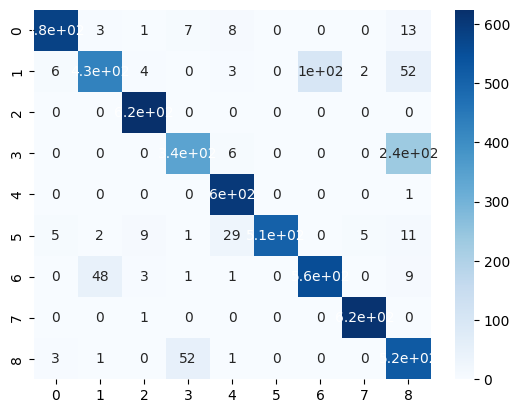

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted probabilities for the test set
y_pred_prob = model_1.predict(x_test)

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(cm, annot=True, cmap='Blues')

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Calculate evaluation metrics
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred, average='macro')
f1 = f1_score(np.argmax(y_test, axis=1), y_pred, average='macro')
kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Kappa score: {kappa:.4f}")

Accuracy: 0.8843
Precision: 0.8960
Recall: 0.8823
F1-score: 0.8819
Kappa score: 0.8698


# the end of my story

In [47]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model_1.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and f1 score
report = classification_report(y_true, y_pred)
print(report)

  1/169 [..............................] - ETA: 20:45

  3/169 [..............................] - ETA: 5s   

  6/169 [>.............................] - ETA: 4s

  9/169 [>.............................] - ETA: 3s

 12/169 [=>............................] - ETA: 3s

 15/169 [=>............................] - ETA: 3s

 18/169 [==>...........................] - ETA: 3s

 21/169 [==>...........................] - ETA: 3s

 24/169 [===>..........................] - ETA: 3s

 27/169 [===>..........................] - ETA: 2s

 30/169 [====>.........................] - ETA: 2s

 33/169 [====>.........................] - ETA: 2s

 36/169 [=====>........................] - ETA: 2s

 39/169 [=====>........................] - ETA: 2s

 42/169 [======>.......................] - ETA: 2s

 45/169 [======>.......................] - ETA: 2s

 48/169 [=======>......................] - ETA: 2s

 51/169 [========>.....................] - ETA: 2s

 54/169 [========>.....................] - ETA: 2s

 57/169 [=========>....................] - ETA: 2s

 60/169 [=========>....................] - ETA: 2s

 63/169 [==========>...................] - ETA: 2s

 66/169 [==========>...................] - ETA: 2s

 69/169 [===========>..................] - ETA: 1s

 72/169 [===========>..................] - ETA: 1s

 75/169 [============>.................] - ETA: 1s

 78/169 [============>.................] - ETA: 1s

 81/169 [=============>................] - ETA: 1s

 84/169 [=============>................] - ETA: 1s

 87/169 [==============>...............] - ETA: 1s

 90/169 [==============>...............] - ETA: 1s

 93/169 [===============>..............] - ETA: 1s

 96/169 [================>.............] - ETA: 1s

 99/169 [================>.............] - ETA: 1s

102/169 [=================>............] - ETA: 1s

105/169 [=================>............] - ETA: 1s

108/169 [==================>...........] - ETA: 1s

111/169 [==================>...........] - ETA: 1s

114/169 [===================>..........] - ETA: 1s

117/169 [===================>..........] - ETA: 1s

120/169 [====================>.........] - ETA: 0s

123/169 [====================>.........] - ETA: 0s

126/169 [=====================>........] - ETA: 0s

129/169 [=====================>........] - ETA: 0s

132/169 [======================>.......] - ETA: 0s

135/169 [======================>.......] - ETA: 0s

138/169 [=======================>......] - ETA: 0s

141/169 [========================>.....] - ETA: 0s

144/169 [========================>.....] - ETA: 0s

147/169 [=========================>....] - ETA: 0s

150/169 [=========================>....] - ETA: 0s

153/169 [==========================>...] - ETA: 0s

156/169 [==========================>...] - ETA: 0s

159/169 [===========================>..] - ETA: 0s

162/169 [===========================>..] - ETA: 0s

165/169 [============================>.] - ETA: 0s

166/169 [============================>.] - ETA: 0s

167/169 [============================>.] - ETA: 0s

169/169 [==============================] - 11s 20ms/step


              precision    recall  f1-score   support

           0       0.98      0.95      0.96       614
           1       0.89      0.72      0.79       596
           2       0.97      1.00      0.99       624
           3       0.85      0.59      0.69       584
           4       0.93      1.00      0.96       601
           5       1.00      0.89      0.94       568
           6       0.84      0.90      0.87       617
           7       0.99      1.00      0.99       617
           8       0.62      0.90      0.73       579

    accuracy                           0.88      5400
   macro avg       0.90      0.88      0.88      5400
weighted avg       0.90      0.88      0.88      5400



In [48]:
import plotly.express as px
from sklearn.metrics import classification_report
import pandas as pd
import io

# # Make predictions on the test set
# y_pred = model_1.predict(x_test)

# # Convert predictions to class labels
# y_pred = np.argmax(y_pred, axis=1)

# # Convert true labels to class labels
# y_true = np.argmax(y_test, axis=1)
# Calculate precision, recall, and f1 score for each class
report = classification_report(y_true, y_pred)
df = pd.read_csv(io.StringIO(report.replace('avg / total', 'avg/total')))
# Plot the precision, recall, and f1 score for each class
fig = px.bar(df, barmode='group',
             title='Classification Report', labels={'Score': 'Score', 'Class': 'Class', 'Metric': 'Metric'})
fig.show()